# State-based History-aware Artificial Reinforcement Interpretable Kernel (Sharik 1.1)
## Open AI Gym - Atari - Breakout - Experiential Learning - Phase 2 (Cursory study, Learnable Player)
### Managed to make it possible to learn stable performance of ~400 scores (out of top 864) with rare random seeds (not idetnified) using original "learnable" player "Nov32025" using constext size CS=2, transition utility TU=0, state similarity SS=0.9/0.999 (the latter depends on non-identified random seeds)

After 1000 games, average and best scores over the last 500 games over 4 independent runs with different non-identified random seeds:
- SS=0.9 average=120 best=499
- SS=0.999 average=115 best=517

In [1]:
import sys, os
import pickle
import pandas as pd
import queue
import matplotlib.pyplot as plt
import random
import math
import numpy as np

## 2025-01-11
- max_steps = 18000 
- state_count_threshold = 2
- state_similarity_threshold = 0.99
- transition_utility_thereshold = 0
- transition_count_threshold = 1


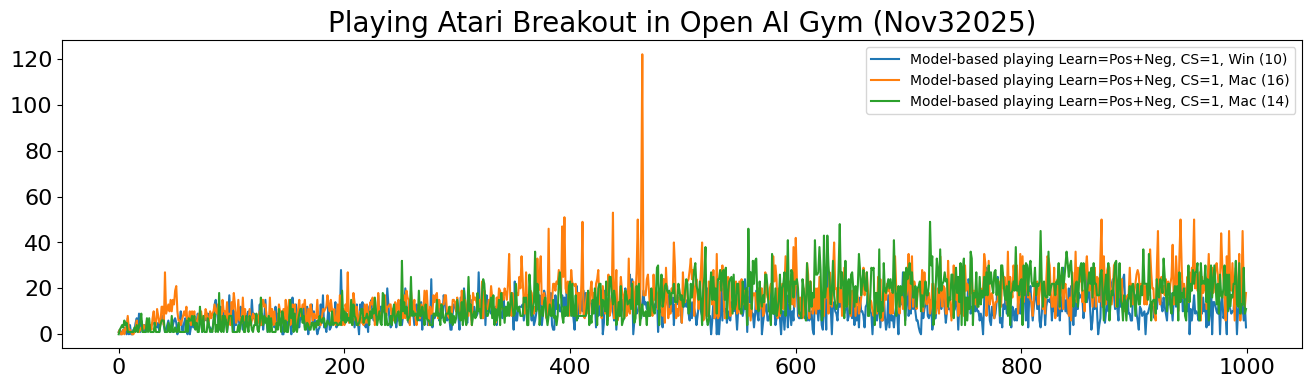

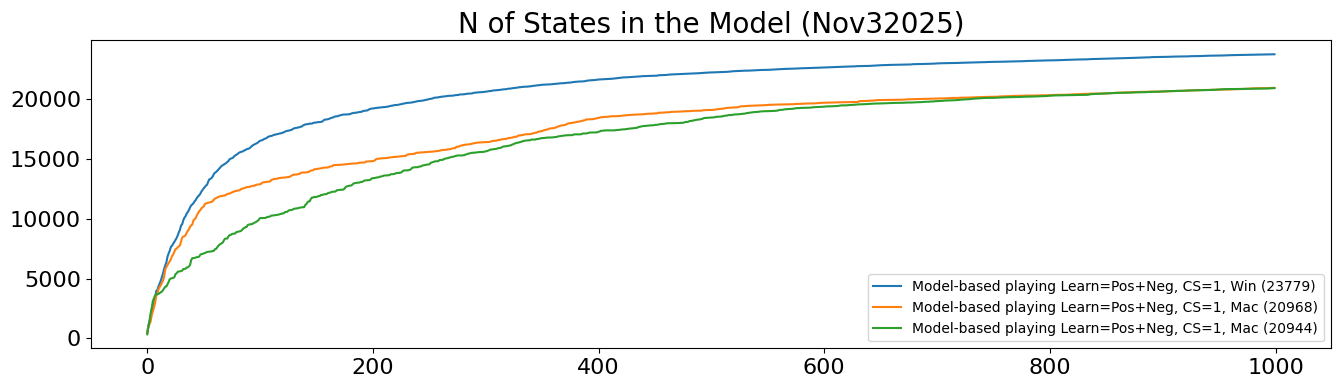

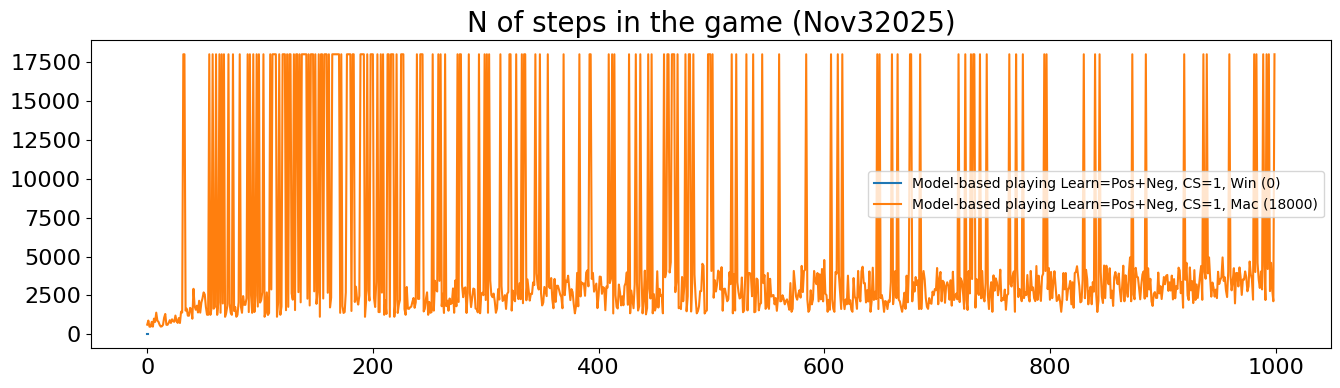

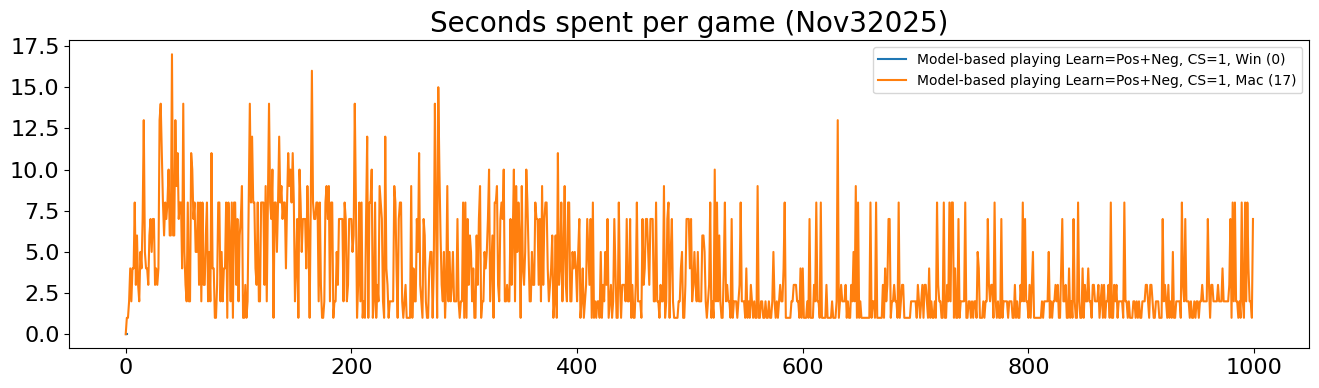

In [2]:
# Pos-Only: terminated, score=0, states=623

# Pos+Neg CS=1 Win:
score_avg=10.1; steps_avg=2826.0; lives_avg=0.2; lapse_avg="0:00:00.263781"; time="0:29:21.785655"
scoresPNCS1 = [1.0, 2.0, 0, 1.0, 2.0, 2.0, 3.0, 0, 7.0, 0, 4.0, 0, 0, 2.0, 2.0, 5.0, 7.0, 2.0, 9.0, 1.0, 6.0, 4.0, 1.0, 4.0, 1.0, 4.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.0, 5.0, 1.0, 5.0, 7.0, 8.0, 4.0, 1.0, 2.0, 4.0, 6.0, 3.0, 1.0, 2.0, 4.0, 6.0, 7.0, 5.0, 0, 4.0, 5.0, 10.0, 2.0, 1.0, 5.0, 7.0, 2.0, 0, 5.0, 0, 3.0, 8.0, 3.0, 3.0, 6.0, 5.0, 9.0, 7.0, 6.0, 7.0, 1.0, 6.0, 6.0, 7.0, 6.0, 9.0, 3.0, 3.0, 1.0, 2.0, 5.0, 13.0, 15.0, 10.0, 6.0, 2.0, 12.0, 5.0, 12.0, 9.0, 5.0, 7.0, 1.0, 7.0, 17.0, 7.0, 6.0, 12.0, 1.0, 10.0, 4.0, 7.0, 11.0, 3.0, 12.0, 6.0, 2.0, 8.0, 3.0, 4.0, 9.0, 10.0, 7.0, 6.0, 15.0, 7.0, 9.0, 5.0, 7.0, 6.0, 6.0, 13.0, 4.0, 9.0, 2.0, 7.0, 15.0, 6.0, 1.0, 6.0, 8.0, 11.0, 7.0, 9.0, 3.0, 12.0, 5.0, 9.0, 7.0, 4.0, 7.0, 0, 0, 8.0, 11.0, 2.0, 9.0, 9.0, 6.0, 0, 16.0, 3.0, 7.0, 13.0, 2.0, 5.0, 3.0, 8.0, 8.0, 6.0, 12.0, 3.0, 6.0, 12.0, 0, 8.0, 11.0, 13.0, 5.0, 10.0, 5.0, 3.0, 0, 2.0, 3.0, 13.0, 5.0, 17.0, 3.0, 4.0, 1.0, 6.0, 13.0, 2.0, 3.0, 5.0, 8.0, 7.0, 14.0, 3.0, 10.0, 6.0, 7.0, 28.0, 9.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 7.0, 3.0, 7.0, 13.0, 5.0, 0, 13.0, 10.0, 14.0, 11.0, 4.0, 3.0, 7.0, 1.0, 12.0, 13.0, 15.0, 9.0, 6.0, 12.0, 9.0, 6.0, 17.0, 7.0, 12.0, 12.0, 11.0, 10.0, 9.0, 8.0, 20.0, 13.0, 6.0, 3.0, 4.0, 9.0, 12.0, 7.0, 3.0, 8.0, 6.0, 11.0, 15.0, 4.0, 8.0, 12.0, 20.0, 13.0, 8.0, 5.0, 15.0, 10.0, 14.0, 9.0, 4.0, 12.0, 13.0, 8.0, 7.0, 6.0, 14.0, 2.0, 11.0, 15.0, 9.0, 12.0, 4.0, 8.0, 5.0, 24.0, 3.0, 8.0, 7.0, 9.0, 10.0, 9.0, 6.0, 13.0, 7.0, 8.0, 17.0, 14.0, 10.0, 6.0, 7.0, 7.0, 2.0, 2.0, 9.0, 13.0, 13.0, 10.0, 13.0, 8.0, 2.0, 16.0, 16.0, 8.0, 20.0, 14.0, 6.0, 5.0, 15.0, 15.0, 15.0, 6.0, 10.0, 12.0, 9.0, 8.0, 9.0, 27.0, 11.0, 11.0, 7.0, 10.0, 19.0, 4.0, 17.0, 10.0, 13.0, 10.0, 9.0, 9.0, 11.0, 10.0, 12.0, 4.0, 16.0, 13.0, 11.0, 8.0, 7.0, 16.0, 10.0, 9.0, 10.0, 11.0, 13.0, 10.0, 12.0, 12.0, 2.0, 23.0, 6.0, 6.0, 11.0, 12.0, 12.0, 12.0, 13.0, 6.0, 10.0, 14.0, 15.0, 12.0, 15.0, 10.0, 6.0, 12.0, 4.0, 6.0, 9.0, 14.0, 11.0, 17.0, 16.0, 4.0, 9.0, 19.0, 17.0, 8.0, 10.0, 13.0, 17.0, 18.0, 4.0, 2.0, 2.0, 17.0, 11.0, 12.0, 13.0, 10.0, 10.0, 17.0, 12.0, 16.0, 8.0, 19.0, 12.0, 19.0, 10.0, 12.0, 10.0, 7.0, 2.0, 12.0, 21.0, 7.0, 16.0, 18.0, 12.0, 10.0, 19.0, 9.0, 18.0, 15.0, 10.0, 18.0, 14.0, 13.0, 10.0, 10.0, 14.0, 3.0, 16.0, 8.0, 9.0, 15.0, 19.0, 0, 5.0, 19.0, 16.0, 6.0, 10.0, 9.0, 13.0, 17.0, 10.0, 6.0, 15.0, 2.0, 13.0, 11.0, 8.0, 9.0, 15.0, 11.0, 7.0, 20.0, 10.0, 11.0, 10.0, 26.0, 17.0, 24.0, 0, 6.0, 12.0, 9.0, 10.0, 13.0, 14.0, 7.0, 13.0, 19.0, 13.0, 14.0, 11.0, 11.0, 8.0, 10.0, 11.0, 15.0, 12.0, 13.0, 12.0, 16.0, 1.0, 11.0, 10.0, 10.0, 3.0, 24.0, 12.0, 14.0, 21.0, 15.0, 11.0, 14.0, 10.0, 16.0, 4.0, 13.0, 13.0, 17.0, 13.0, 16.0, 10.0, 5.0, 14.0, 12.0, 15.0, 12.0, 15.0, 9.0, 6.0, 14.0, 7.0, 14.0, 11.0, 9.0, 4.0, 8.0, 13.0, 15.0, 10.0, 8.0, 10.0, 16.0, 17.0, 11.0, 20.0, 8.0, 8.0, 0, 6.0, 14.0, 7.0, 12.0, 0, 9.0, 0, 8.0, 22.0, 6.0, 20.0, 10.0, 11.0, 5.0, 10.0, 7.0, 6.0, 14.0, 13.0, 10.0, 12.0, 10.0, 2.0, 11.0, 12.0, 15.0, 11.0, 8.0, 11.0, 24.0, 18.0, 1.0, 16.0, 14.0, 27.0, 9.0, 9.0, 3.0, 9.0, 19.0, 9.0, 6.0, 20.0, 20.0, 0, 5.0, 9.0, 11.0, 13.0, 6.0, 6.0, 9.0, 20.0, 10.0, 9.0, 12.0, 4.0, 7.0, 8.0, 8.0, 7.0, 0, 10.0, 10.0, 2.0, 11.0, 17.0, 3.0, 13.0, 11.0, 4.0, 10.0, 6.0, 19.0, 21.0, 20.0, 8.0, 7.0, 7.0, 10.0, 10.0, 16.0, 7.0, 14.0, 6.0, 7.0, 6.0, 7.0, 10.0, 2.0, 0, 19.0, 11.0, 12.0, 6.0, 13.0, 12.0, 4.0, 2.0, 12.0, 19.0, 2.0, 31.0, 10.0, 12.0, 12.0, 0, 13.0, 14.0, 10.0, 9.0, 6.0, 15.0, 12.0, 14.0, 11.0, 12.0, 9.0, 11.0, 18.0, 6.0, 8.0, 13.0, 9.0, 7.0, 19.0, 4.0, 14.0, 6.0, 12.0, 3.0, 16.0, 10.0, 10.0, 8.0, 3.0, 12.0, 13.0, 18.0, 13.0, 10.0, 9.0, 0, 10.0, 6.0, 10.0, 6.0, 11.0, 14.0, 3.0, 13.0, 6.0, 18.0, 8.0, 2.0, 5.0, 17.0, 3.0, 16.0, 6.0, 8.0, 3.0, 9.0, 12.0, 8.0, 0, 15.0, 16.0, 13.0, 27.0, 15.0, 6.0, 14.0, 24.0, 8.0, 12.0, 9.0, 24.0, 11.0, 16.0, 10.0, 6.0, 6.0, 3.0, 1.0, 0, 14.0, 7.0, 11.0, 13.0, 18.0, 8.0, 7.0, 9.0, 15.0, 2.0, 6.0, 7.0, 7.0, 13.0, 12.0, 11.0, 17.0, 11.0, 21.0, 16.0, 11.0, 5.0, 10.0, 12.0, 11.0, 11.0, 8.0, 9.0, 10.0, 11.0, 15.0, 14.0, 2.0, 13.0, 11.0, 11.0, 17.0, 12.0, 12.0, 11.0, 12.0, 24.0, 23.0, 9.0, 12.0, 10.0, 14.0, 10.0, 13.0, 10.0, 10.0, 6.0, 9.0, 6.0, 0, 15.0, 20.0, 29.0, 15.0, 15.0, 6.0, 4.0, 12.0, 9.0, 7.0, 9.0, 14.0, 25.0, 18.0, 5.0, 7.0, 3.0, 13.0, 11.0, 16.0, 9.0, 16.0, 15.0, 10.0, 3.0, 12.0, 10.0, 6.0, 11.0, 6.0, 14.0, 12.0, 9.0, 20.0, 14.0, 24.0, 16.0, 6.0, 30.0, 3.0, 18.0, 21.0, 12.0, 6.0, 12.0, 16.0, 21.0, 11.0, 20.0, 6.0, 3.0, 9.0, 16.0, 17.0, 4.0, 12.0, 15.0, 15.0, 14.0, 16.0, 6.0, 13.0, 10.0, 21.0, 11.0, 8.0, 25.0, 6.0, 16.0, 10.0, 29.0, 15.0, 10.0, 15.0, 9.0, 20.0, 0, 21.0, 12.0, 4.0, 15.0, 8.0, 15.0, 11.0, 18.0, 16.0, 17.0, 16.0, 7.0, 12.0, 27.0, 14.0, 17.0, 21.0, 10.0, 2.0, 6.0, 16.0, 11.0, 18.0, 10.0, 0, 4.0, 7.0, 25.0, 12.0, 13.0, 5.0, 10.0, 16.0, 10.0, 10.0, 20.0, 22.0, 24.0, 17.0, 11.0, 15.0, 11.0, 6.0, 21.0, 12.0, 17.0, 24.0, 26.0, 12.0, 12.0, 16.0, 9.0, 9.0, 6.0, 6.0, 20.0, 16.0, 17.0, 9.0, 6.0, 2.0, 12.0, 11.0, 8.0, 9.0, 10.0, 0, 9.0, 9.0, 11.0, 13.0, 13.0, 12.0, 12.0, 7.0, 15.0, 11.0, 17.0, 20.0, 17.0, 13.0, 10.0, 16.0, 12.0, 9.0, 6.0, 16.0, 13.0, 18.0, 12.0, 6.0, 16.0, 19.0, 12.0, 18.0, 18.0, 22.0, 17.0, 23.0, 10.0, 11.0, 17.0, 20.0, 10.0, 23.0, 0, 11.0, 6.0, 11.0, 17.0, 9.0, 10.0, 9.0, 6.0, 12.0, 15.0, 9.0, 16.0, 10.0, 13.0, 3.0, 15.0, 4.0, 9.0, 24.0, 0, 14.0, 14.0, 12.0, 10.0, 9.0, 15.0, 0, 14.0, 16.0, 7.0, 9.0, 8.0, 0, 32.0, 12.0, 11.0, 9.0, 10.0, 10.0, 20.0, 13.0, 0, 11.0, 13.0, 16.0, 9.0, 14.0, 6.0, 13.0, 3.0]
statesPNCS1 = states = [434, 1067, 1439, 1780, 2406, 2818, 3199, 3290, 3970, 4059, 4350, 4586, 4825, 5129, 5428, 5821, 6113, 6366, 6848, 7113, 7341, 7662, 7751, 7915, 8081, 8243, 8390, 8607, 8874, 9085, 9450, 9553, 9886, 10107, 10226, 10452, 10572, 10751, 10968, 11133, 11216, 11317, 11478, 11575, 11754, 11874, 11972, 12096, 12282, 12417, 12551, 12661, 12786, 12854, 13098, 13306, 13348, 13422, 13541, 13749, 13864, 13923, 14013, 14122, 14231, 14345, 14439, 14495, 14562, 14618, 14674, 14766, 14844, 14992, 15042, 15078, 15115, 15234, 15310, 15366, 15428, 15512, 15572, 15600, 15631, 15661, 15734, 15758, 15833, 15854, 15879, 15939, 16030, 16120, 16183, 16229, 16286, 16324, 16378, 16476, 16528, 16577, 16586, 16648, 16706, 16729, 16779, 16866, 16893, 16934, 16944, 16973, 17021, 17043, 17061, 17096, 17114, 17133, 17149, 17181, 17216, 17245, 17302, 17340, 17370, 17382, 17398, 17437, 17450, 17527, 17570, 17599, 17610, 17638, 17651, 17677, 17715, 17728, 17818, 17857, 17903, 17915, 17929, 17953, 17971, 17978, 17978, 18025, 18049, 18055, 18075, 18095, 18105, 18106, 18118, 18145, 18228, 18299, 18313, 18332, 18341, 18366, 18415, 18445, 18482, 18495, 18558, 18581, 18585, 18597, 18649, 18665, 18695, 18723, 18732, 18736, 18739, 18741, 18749, 18768, 18771, 18831, 18847, 18875, 18881, 18886, 18909, 18926, 18944, 18956, 18965, 19016, 19044, 19055, 19074, 19079, 19123, 19187, 19211, 19236, 19243, 19250, 19278, 19290, 19300, 19314, 19320, 19324, 19344, 19351, 19358, 19365, 19384, 19390, 19413, 19448, 19458, 19475, 19499, 19521, 19528, 19536, 19543, 19563, 19587, 19600, 19622, 19644, 19664, 19684, 19706, 19711, 19712, 19720, 19735, 19758, 19786, 19795, 19809, 19840, 19859, 19868, 19871, 19881, 19900, 19915, 19945, 19958, 19985, 20000, 20035, 20043, 20059, 20087, 20129, 20149, 20153, 20160, 20180, 20204, 20217, 20226, 20234, 20254, 20260, 20267, 20294, 20297, 20300, 20303, 20309, 20318, 20340, 20353, 20366, 20371, 20381, 20413, 20417, 20428, 20431, 20431, 20456, 20462, 20480, 20486, 20487, 20490, 20502, 20551, 20555, 20561, 20580, 20589, 20594, 20602, 20611, 20614, 20619, 20641, 20646, 20659, 20679, 20696, 20706, 20706, 20742, 20749, 20755, 20759, 20769, 20784, 20794, 20798, 20806, 20829, 20848, 20853, 20854, 20881, 20897, 20903, 20905, 20931, 20941, 20960, 20960, 20969, 20989, 21010, 21023, 21026, 21044, 21054, 21058, 21059, 21072, 21075, 21077, 21100, 21101, 21119, 21144, 21148, 21152, 21174, 21180, 21186, 21202, 21216, 21228, 21234, 21240, 21243, 21248, 21252, 21253, 21261, 21269, 21280, 21293, 21302, 21309, 21314, 21330, 21337, 21347, 21355, 21359, 21360, 21365, 21384, 21392, 21404, 21415, 21421, 21422, 21447, 21460, 21467, 21476, 21483, 21493, 21500, 21502, 21502, 21507, 21518, 21529, 21557, 21570, 21585, 21600, 21603, 21606, 21612, 21619, 21627, 21634, 21651, 21668, 21672, 21673, 21680, 21684, 21690, 21699, 21703, 21709, 21719, 21721, 21722, 21736, 21740, 21754, 21764, 21772, 21785, 21798, 21803, 21819, 21828, 21842, 21844, 21848, 21850, 21857, 21864, 21868, 21872, 21878, 21884, 21900, 21904, 21906, 21912, 21922, 21924, 21944, 21947, 21949, 21952, 21952, 21953, 21959, 21963, 21967, 21972, 21977, 21979, 21985, 21989, 21989, 22021, 22024, 22028, 22030, 22032, 22034, 22041, 22047, 22062, 22073, 22083, 22087, 22092, 22093, 22100, 22103, 22108, 22113, 22115, 22120, 22125, 22130, 22130, 22137, 22147, 22149, 22155, 22156, 22157, 22160, 22171, 22173, 22175, 22182, 22186, 22187, 22191, 22200, 22205, 22219, 22223, 22230, 22240, 22251, 22252, 22252, 22256, 22260, 22263, 22270, 22274, 22276, 22279, 22281, 22284, 22288, 22291, 22295, 22297, 22298, 22303, 22308, 22315, 22324, 22338, 22349, 22351, 22364, 22369, 22380, 22387, 22393, 22394, 22394, 22400, 22401, 22407, 22408, 22408, 22408, 22411, 22418, 22424, 22425, 22428, 22431, 22436, 22444, 22452, 22455, 22460, 22462, 22465, 22470, 22470, 22471, 22473, 22479, 22480, 22483, 22490, 22493, 22502, 22511, 22513, 22519, 22522, 22527, 22529, 22536, 22544, 22548, 22554, 22558, 22562, 22566, 22570, 22570, 22571, 22572, 22576, 22580, 22586, 22594, 22597, 22603, 22603, 22607, 22611, 22616, 22617, 22620, 22626, 22628, 22628, 22636, 22638, 22638, 22638, 22647, 22648, 22655, 22655, 22657, 22666, 22667, 22671, 22678, 22685, 22688, 22692, 22697, 22697, 22701, 22705, 22706, 22719, 22723, 22725, 22731, 22732, 22736, 22740, 22740, 22743, 22744, 22747, 22748, 22751, 22755, 22757, 22759, 22765, 22767, 22767, 22780, 22785, 22789, 22792, 22792, 22793, 22794, 22797, 22797, 22800, 22801, 22805, 22806, 22812, 22821, 22823, 22829, 22835, 22843, 22847, 22855, 22857, 22859, 22866, 22868, 22874, 22876, 22879, 22879, 22887, 22889, 22890, 22895, 22896, 22898, 22900, 22903, 22904, 22906, 22908, 22909, 22914, 22914, 22914, 22914, 22914, 22921, 22922, 22927, 22927, 22948, 22952, 22954, 22955, 22957, 22958, 22964, 22967, 22968, 22968, 22968, 22971, 22973, 22976, 22978, 22979, 22988, 22991, 22994, 22995, 22998, 23010, 23012, 23019, 23025, 23027, 23028, 23030, 23032, 23037, 23039, 23039, 23042, 23042, 23044, 23045, 23047, 23047, 23049, 23052, 23053, 23058, 23059, 23060, 23066, 23070, 23072, 23074, 23075, 23075, 23078, 23080, 23083, 23086, 23094, 23097, 23099, 23103, 23108, 23109, 23111, 23112, 23112, 23115, 23119, 23128, 23128, 23135, 23135, 23138, 23139, 23139, 23140, 23142, 23148, 23149, 23149, 23152, 23155, 23155, 23157, 23162, 23166, 23166, 23168, 23170, 23171, 23172, 23172, 23173, 23178, 23182, 23183, 23184, 23185, 23186, 23188, 23190, 23197, 23202, 23212, 23216, 23219, 23223, 23229, 23229, 23230, 23230, 23238, 23242, 23252, 23252, 23252, 23252, 23253, 23256, 23259, 23260, 23260, 23262, 23265, 23266, 23267, 23267, 23270, 23273, 23274, 23277, 23280, 23284, 23290, 23294, 23294, 23297, 23304, 23312, 23312, 23316, 23317, 23319, 23320, 23321, 23322, 23330, 23336, 23337, 23339, 23340, 23344, 23344, 23348, 23348, 23350, 23351, 23354, 23356, 23364, 23371, 23374, 23377, 23381, 23383, 23384, 23386, 23389, 23391, 23396, 23399, 23401, 23409, 23409, 23413, 23421, 23428, 23429, 23431, 23432, 23435, 23438, 23442, 23443, 23445, 23448, 23450, 23454, 23455, 23455, 23461, 23463, 23463, 23463, 23464, 23465, 23467, 23467, 23475, 23479, 23482, 23485, 23490, 23499, 23504, 23509, 23515, 23515, 23515, 23516, 23517, 23519, 23520, 23523, 23532, 23536, 23544, 23545, 23547, 23548, 23550, 23550, 23550, 23550, 23551, 23559, 23562, 23563, 23563, 23567, 23573, 23577, 23581, 23583, 23585, 23586, 23588, 23589, 23590, 23590, 23592, 23592, 23592, 23597, 23600, 23605, 23605, 23605, 23607, 23616, 23620, 23623, 23625, 23625, 23625, 23625, 23626, 23627, 23631, 23632, 23637, 23640, 23642, 23646, 23654, 23657, 23659, 23660, 23660, 23664, 23664, 23665, 23668, 23673, 23673, 23673, 23673, 23675, 23678, 23682, 23686, 23693, 23697, 23699, 23700, 23700, 23701, 23708, 23708, 23711, 23711, 23714, 23717, 23719, 23720, 23722, 23724, 23726, 23728, 23730, 23732, 23733, 23736, 23736, 23743, 23745, 23748, 23748, 23748, 23752, 23752, 23757, 23759, 23763, 23768, 23769, 23769, 23771, 23773, 23773, 23774, 23775, 23778, 23778, 23779]

# Pos+Neg CS=1 Mac:
score_avg=15.9; steps_avg=5355.3; lives_avg=0.5; lapse_avg="0:00:07.402096"; time="1:01:46.300105"
scoresPNCS1_ = [1.0, 2.0, 0, 0, 2.0, 0, 3.0, 2.0, 8.0, 2.0, 2.0, 1.0, 0, 0, 1.0, 3.0, 6.0, 1.0, 1.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 6.0, 3.0, 2.0, 4.0, 2.0, 7.0, 10.0, 4.0, 4.0, 11.0, 8.0, 5.0, 5.0, 12.0, 12.0, 4.0, 27.0, 9.0, 11.0, 13.0, 10.0, 15.0, 10.0, 15.0, 13.0, 19.0, 21.0, 10.0, 6.0, 6.0, 4.0, 6.0, 8.0, 10.0, 8.0, 12.0, 4.0, 6.0, 10.0, 4.0, 10.0, 7.0, 10.0, 4.0, 5.0, 7.0, 9.0, 5.0, 10.0, 6.0, 6.0, 6.0, 11.0, 9.0, 5.0, 6.0, 10.0, 7.0, 9.0, 10.0, 13.0, 10.0, 9.0, 13.0, 4.0, 7.0, 4.0, 15.0, 10.0, 10.0, 7.0, 14.0, 4.0, 9.0, 4.0, 14.0, 11.0, 18.0, 13.0, 5.0, 7.0, 15.0, 6.0, 7.0, 5.0, 16.0, 6.0, 11.0, 4.0, 4.0, 5.0, 11.0, 4.0, 6.0, 9.0, 8.0, 5.0, 4.0, 8.0, 5.0, 10.0, 4.0, 15.0, 15.0, 12.0, 13.0, 8.0, 4.0, 4.0, 16.0, 4.0, 11.0, 4.0, 10.0, 4.0, 5.0, 4.0, 13.0, 10.0, 10.0, 5.0, 11.0, 4.0, 15.0, 6.0, 11.0, 15.0, 4.0, 5.0, 13.0, 12.0, 13.0, 4.0, 4.0, 11.0, 15.0, 8.0, 10.0, 13.0, 12.0, 15.0, 6.0, 4.0, 11.0, 4.0, 13.0, 10.0, 6.0, 9.0, 7.0, 7.0, 15.0, 6.0, 4.0, 4.0, 7.0, 11.0, 10.0, 11.0, 12.0, 17.0, 13.0, 10.0, 15.0, 11.0, 6.0, 11.0, 4.0, 5.0, 13.0, 5.0, 17.0, 15.0, 4.0, 11.0, 4.0, 13.0, 10.0, 27.0, 5.0, 7.0, 7.0, 4.0, 18.0, 14.0, 6.0, 12.0, 6.0, 4.0, 10.0, 5.0, 7.0, 4.0, 13.0, 5.0, 13.0, 5.0, 7.0, 14.0, 13.0, 16.0, 11.0, 4.0, 7.0, 6.0, 18.0, 8.0, 9.0, 9.0, 12.0, 12.0, 17.0, 8.0, 12.0, 12.0, 13.0, 13.0, 6.0, 11.0, 6.0, 14.0, 8.0, 13.0, 15.0, 6.0, 12.0, 10.0, 7.0, 17.0, 7.0, 19.0, 16.0, 15.0, 4.0, 19.0, 12.0, 10.0, 15.0, 7.0, 4.0, 10.0, 12.0, 7.0, 13.0, 11.0, 10.0, 19.0, 10.0, 19.0, 10.0, 4.0, 12.0, 9.0, 9.0, 17.0, 14.0, 17.0, 18.0, 7.0, 15.0, 12.0, 13.0, 13.0, 13.0, 17.0, 17.0, 9.0, 8.0, 7.0, 12.0, 7.0, 15.0, 15.0, 14.0, 10.0, 16.0, 11.0, 10.0, 11.0, 19.0, 14.0, 13.0, 15.0, 12.0, 10.0, 8.0, 17.0, 11.0, 4.0, 18.0, 15.0, 16.0, 14.0, 12.0, 15.0, 15.0, 7.0, 23.0, 7.0, 19.0, 13.0, 11.0, 11.0, 15.0, 13.0, 21.0, 16.0, 11.0, 11.0, 5.0, 16.0, 12.0, 20.0, 19.0, 11.0, 18.0, 15.0, 20.0, 18.0, 15.0, 22.0, 35.0, 16.0, 8.0, 18.0, 11.0, 11.0, 16.0, 18.0, 17.0, 25.0, 20.0, 34.0, 24.0, 13.0, 9.0, 27.0, 12.0, 17.0, 17.0, 19.0, 18.0, 13.0, 9.0, 12.0, 12.0, 33.0, 19.0, 25.0, 34.0, 13.0, 16.0, 18.0, 14.0, 7.0, 10.0, 46.0, 10.0, 12.0, 14.0, 22.0, 22.0, 19.0, 23.0, 22.0, 28.0, 21.0, 16.0, 47.0, 25.0, 51.0, 20.0, 18.0, 23.0, 8.0, 15.0, 28.0, 22.0, 22.0, 21.0, 22.0, 8.0, 18.0, 18.0, 9.0, 22.0, 49.0, 8.0, 7.0, 14.0, 18.0, 9.0, 9.0, 19.0, 23.0, 14.0, 18.0, 14.0, 22.0, 24.0, 28.0, 13.0, 17.0, 7.0, 21.0, 15.0, 9.0, 20.0, 17.0, 26.0, 8.0, 10.0, 17.0, 53.0, 7.0, 17.0, 28.0, 6.0, 8.0, 17.0, 25.0, 19.0, 17.0, 7.0, 19.0, 8.0, 10.0, 33.0, 9.0, 20.0, 18.0, 23.0, 7.0, 17.0, 28.0, 50.0, 17.0, 6.0, 50.0, 122.0, 17.0, 17.0, 17.0, 24.0, 26.0, 18.0, 9.0, 13.0, 8.0, 26.0, 15.0, 20.0, 18.0, 11.0, 17.0, 17.0, 19.0, 8.0, 24.0, 5.0, 29.0, 18.0, 7.0, 11.0, 9.0, 20.0, 18.0, 40.0, 29.0, 7.0, 11.0, 8.0, 17.0, 17.0, 5.0, 27.0, 17.0, 14.0, 22.0, 23.0, 24.0, 28.0, 33.0, 24.0, 28.0, 8.0, 20.0, 24.0, 17.0, 11.0, 19.0, 28.0, 40.0, 6.0, 7.0, 26.0, 8.0, 8.0, 23.0, 19.0, 19.0, 13.0, 28.0, 7.0, 8.0, 35.0, 7.0, 8.0, 23.0, 23.0, 30.0, 17.0, 7.0, 7.0, 8.0, 25.0, 24.0, 8.0, 11.0, 11.0, 17.0, 20.0, 23.0, 9.0, 10.0, 23.0, 9.0, 24.0, 13.0, 19.0, 14.0, 11.0, 19.0, 8.0, 13.0, 6.0, 12.0, 18.0, 17.0, 18.0, 11.0, 18.0, 20.0, 11.0, 12.0, 20.0, 8.0, 9.0, 27.0, 19.0, 16.0, 15.0, 20.0, 22.0, 17.0, 34.0, 23.0, 30.0, 24.0, 7.0, 20.0, 8.0, 12.0, 22.0, 11.0, 20.0, 34.0, 21.0, 19.0, 23.0, 14.0, 26.0, 13.0, 38.0, 12.0, 42.0, 24.0, 17.0, 8.0, 16.0, 12.0, 7.0, 20.0, 9.0, 8.0, 31.0, 26.0, 7.0, 23.0, 15.0, 9.0, 11.0, 20.0, 9.0, 20.0, 11.0, 25.0, 11.0, 15.0, 12.0, 8.0, 22.0, 16.0, 20.0, 9.0, 27.0, 14.0, 12.0, 27.0, 40.0, 20.0, 20.0, 14.0, 20.0, 14.0, 27.0, 8.0, 12.0, 29.0, 12.0, 18.0, 13.0, 19.0, 9.0, 8.0, 19.0, 17.0, 18.0, 8.0, 18.0, 16.0, 9.0, 12.0, 16.0, 20.0, 29.0, 17.0, 23.0, 27.0, 19.0, 12.0, 15.0, 14.0, 10.0, 8.0, 11.0, 18.0, 9.0, 25.0, 12.0, 24.0, 6.0, 6.0, 12.0, 20.0, 15.0, 22.0, 19.0, 21.0, 9.0, 18.0, 9.0, 21.0, 34.0, 21.0, 19.0, 13.0, 9.0, 19.0, 17.0, 11.0, 15.0, 17.0, 17.0, 20.0, 35.0, 11.0, 21.0, 34.0, 12.0, 23.0, 20.0, 11.0, 18.0, 20.0, 20.0, 16.0, 28.0, 10.0, 27.0, 15.0, 13.0, 14.0, 18.0, 9.0, 12.0, 22.0, 22.0, 18.0, 9.0, 12.0, 20.0, 9.0, 34.0, 17.0, 12.0, 21.0, 20.0, 9.0, 9.0, 32.0, 18.0, 14.0, 6.0, 13.0, 30.0, 16.0, 15.0, 20.0, 8.0, 24.0, 9.0, 19.0, 20.0, 8.0, 30.0, 19.0, 22.0, 20.0, 17.0, 18.0, 27.0, 13.0, 19.0, 13.0, 19.0, 12.0, 15.0, 15.0, 20.0, 19.0, 19.0, 35.0, 31.0, 8.0, 15.0, 32.0, 13.0, 17.0, 18.0, 13.0, 7.0, 14.0, 14.0, 15.0, 23.0, 15.0, 12.0, 27.0, 20.0, 25.0, 19.0, 13.0, 36.0, 13.0, 25.0, 20.0, 16.0, 30.0, 24.0, 29.0, 30.0, 9.0, 16.0, 35.0, 16.0, 34.0, 14.0, 20.0, 30.0, 20.0, 16.0, 18.0, 15.0, 14.0, 8.0, 16.0, 23.0, 21.0, 23.0, 13.0, 18.0, 25.0, 20.0, 11.0, 20.0, 9.0, 23.0, 34.0, 33.0, 30.0, 18.0, 12.0, 12.0, 29.0, 7.0, 13.0, 24.0, 21.0, 11.0, 24.0, 25.0, 11.0, 20.0, 22.0, 16.0, 15.0, 8.0, 16.0, 6.0, 27.0, 14.0, 17.0, 36.0, 14.0, 29.0, 25.0, 23.0, 28.0, 14.0, 19.0, 10.0, 29.0, 34.0, 24.0, 19.0, 23.0, 19.0, 12.0, 19.0, 29.0, 12.0, 25.0, 24.0, 14.0, 34.0, 50.0, 12.0, 34.0, 21.0, 13.0, 28.0, 30.0, 29.0, 19.0, 13.0, 19.0, 30.0, 31.0, 12.0, 15.0, 16.0, 28.0, 18.0, 24.0, 12.0, 10.0, 15.0, 16.0, 17.0, 17.0, 29.0, 17.0, 22.0, 13.0, 18.0, 22.0, 26.0, 28.0, 26.0, 17.0, 22.0, 19.0, 25.0, 13.0, 21.0, 13.0, 18.0, 17.0, 37.0, 27.0, 20.0, 20.0, 9.0, 6.0, 29.0, 45.0, 15.0, 13.0, 25.0, 18.0, 21.0, 17.0, 24.0, 13.0, 23.0, 17.0, 22.0, 25.0, 39.0, 13.0, 18.0, 34.0, 24.0, 10.0, 34.0, 50.0, 30.0, 16.0, 22.0, 17.0, 16.0, 25.0, 14.0, 27.0, 19.0, 29.0, 28.0, 50.0, 20.0, 26.0, 19.0, 19.0, 27.0, 6.0, 25.0, 18.0, 20.0, 25.0, 11.0, 23.0, 35.0, 19.0, 25.0, 29.0, 18.0, 22.0, 29.0, 31.0, 26.0, 19.0, 22.0, 44.0, 30.0, 24.0, 16.0, 6.0, 34.0, 18.0, 45.0, 22.0, 19.0, 31.0, 18.0, 6.0, 29.0, 13.0, 19.0, 35.0, 6.0, 19.0, 45.0, 20.0, 12.0, 18.0]
statesPNCS1_ = [442, 933, 1160, 1407, 1944, 2244, 2587, 2967, 3579, 3726, 4114, 4298, 4442, 4649, 4838, 5143, 5786, 5960, 6127, 6312, 6445, 6632, 6889, 7012, 7237, 7461, 7505, 7617, 7704, 7787, 8117, 8431, 8522, 8548, 8637, 8849, 9001, 9133, 9336, 9455, 9535, 9882, 9984, 10074, 10306, 10470, 10635, 10726, 10868, 10972, 11028, 11224, 11292, 11316, 11351, 11371, 11390, 11418, 11480, 11600, 11696, 11733, 11791, 11836, 11871, 11901, 11916, 11938, 11948, 11972, 12014, 12094, 12104, 12115, 12176, 12206, 12257, 12279, 12342, 12351, 12363, 12381, 12394, 12490, 12511, 12562, 12570, 12613, 12651, 12669, 12677, 12683, 12738, 12744, 12768, 12771, 12830, 12864, 12881, 12889, 12902, 12944, 13036, 13062, 13070, 13080, 13104, 13112, 13125, 13135, 13268, 13288, 13337, 13343, 13347, 13359, 13403, 13418, 13430, 13443, 13449, 13455, 13458, 13472, 13493, 13508, 13511, 13570, 13622, 13662, 13710, 13711, 13716, 13716, 13756, 13764, 13854, 13868, 13881, 13882, 13889, 13891, 13917, 13926, 13995, 14035, 14058, 14065, 14155, 14157, 14169, 14187, 14208, 14213, 14241, 14250, 14283, 14291, 14294, 14295, 14300, 14334, 14388, 14394, 14406, 14498, 14502, 14504, 14505, 14507, 14510, 14521, 14533, 14545, 14557, 14561, 14572, 14580, 14598, 14601, 14616, 14624, 14633, 14636, 14636, 14641, 14650, 14680, 14707, 14712, 14712, 14715, 14715, 14728, 14804, 14805, 14808, 14818, 14830, 14831, 14834, 14868, 14914, 15017, 15033, 15033, 15040, 15060, 15069, 15081, 15087, 15090, 15097, 15098, 15135, 15140, 15152, 15155, 15182, 15183, 15190, 15198, 15204, 15217, 15227, 15244, 15249, 15249, 15253, 15267, 15361, 15378, 15410, 15414, 15424, 15431, 15442, 15448, 15523, 15525, 15540, 15554, 15556, 15562, 15569, 15576, 15578, 15594, 15596, 15609, 15611, 15617, 15620, 15636, 15640, 15663, 15672, 15678, 15678, 15706, 15740, 15761, 15763, 15775, 15775, 15780, 15822, 15823, 15825, 15851, 15875, 15912, 15914, 15932, 16035, 16039, 16040, 16109, 16128, 16146, 16183, 16189, 16219, 16219, 16231, 16243, 16255, 16269, 16302, 16315, 16342, 16359, 16367, 16386, 16389, 16397, 16402, 16412, 16418, 16421, 16424, 16433, 16437, 16439, 16454, 16495, 16518, 16528, 16541, 16556, 16561, 16602, 16611, 16616, 16661, 16674, 16679, 16690, 16694, 16734, 16769, 16769, 16789, 16797, 16818, 16862, 16864, 16871, 16913, 16977, 16989, 16997, 17001, 17034, 17053, 17074, 17079, 17080, 17086, 17099, 17104, 17136, 17157, 17193, 17212, 17216, 17274, 17307, 17311, 17346, 17350, 17399, 17427, 17445, 17476, 17497, 17546, 17569, 17578, 17584, 17590, 17623, 17644, 17690, 17722, 17767, 17783, 17823, 17826, 17846, 17852, 17897, 17939, 17988, 18008, 18015, 18026, 18049, 18080, 18086, 18096, 18130, 18132, 18157, 18171, 18187, 18231, 18237, 18266, 18321, 18327, 18331, 18335, 18341, 18344, 18346, 18372, 18393, 18401, 18439, 18451, 18475, 18511, 18513, 18519, 18529, 18537, 18537, 18547, 18549, 18568, 18590, 18590, 18590, 18593, 18594, 18601, 18603, 18608, 18613, 18617, 18642, 18649, 18657, 18666, 18680, 18689, 18701, 18702, 18705, 18718, 18719, 18721, 18725, 18740, 18740, 18741, 18744, 18750, 18753, 18761, 18771, 18788, 18796, 18798, 18802, 18810, 18811, 18812, 18828, 18829, 18829, 18834, 18881, 18882, 18887, 18892, 18896, 18896, 18909, 18920, 18921, 18921, 18941, 18953, 18956, 18958, 18958, 18962, 18963, 18971, 18975, 18981, 18982, 18988, 18995, 18998, 19013, 19014, 19018, 19021, 19023, 19024, 19046, 19046, 19046, 19046, 19046, 19050, 19052, 19056, 19058, 19078, 19099, 19099, 19102, 19114, 19114, 19114, 19115, 19126, 19128, 19130, 19139, 19167, 19174, 19179, 19192, 19209, 19209, 19216, 19242, 19266, 19284, 19294, 19298, 19300, 19309, 19315, 19315, 19316, 19316, 19334, 19338, 19371, 19388, 19418, 19422, 19424, 19427, 19438, 19448, 19450, 19463, 19469, 19472, 19473, 19474, 19474, 19484, 19488, 19488, 19493, 19500, 19506, 19512, 19516, 19518, 19520, 19530, 19538, 19543, 19546, 19547, 19554, 19559, 19564, 19567, 19568, 19572, 19573, 19573, 19575, 19577, 19582, 19585, 19587, 19587, 19592, 19594, 19596, 19596, 19598, 19602, 19617, 19620, 19622, 19623, 19626, 19630, 19636, 19638, 19642, 19656, 19657, 19658, 19658, 19659, 19660, 19660, 19664, 19666, 19676, 19688, 19690, 19698, 19706, 19707, 19717, 19719, 19725, 19728, 19730, 19732, 19736, 19736, 19736, 19739, 19743, 19745, 19753, 19755, 19757, 19761, 19764, 19764, 19765, 19766, 19766, 19766, 19767, 19768, 19773, 19777, 19777, 19779, 19781, 19783, 19784, 19785, 19787, 19856, 19856, 19856, 19859, 19864, 19866, 19872, 19881, 19885, 19888, 19889, 19889, 19898, 19907, 19928, 19936, 19943, 19943, 19946, 19946, 19950, 19952, 19956, 19957, 19957, 19957, 19957, 19957, 19957, 19960, 19963, 19970, 19970, 19970, 19973, 19974, 19976, 19977, 19977, 19977, 19987, 19988, 20002, 20006, 20012, 20016, 20016, 20018, 20023, 20025, 20033, 20035, 20036, 20036, 20036, 20036, 20039, 20043, 20048, 20050, 20051, 20053, 20054, 20055, 20057, 20058, 20061, 20066, 20069, 20069, 20069, 20078, 20079, 20079, 20080, 20087, 20088, 20093, 20099, 20102, 20102, 20114, 20117, 20123, 20124, 20124, 20124, 20126, 20127, 20140, 20141, 20145, 20146, 20146, 20149, 20150, 20152, 20160, 20161, 20165, 20170, 20176, 20177, 20177, 20187, 20190, 20190, 20192, 20194, 20195, 20195, 20205, 20207, 20210, 20210, 20212, 20216, 20220, 20222, 20222, 20223, 20223, 20223, 20224, 20241, 20251, 20253, 20254, 20254, 20262, 20262, 20262, 20267, 20274, 20283, 20286, 20292, 20295, 20298, 20299, 20300, 20301, 20305, 20306, 20308, 20308, 20310, 20311, 20314, 20315, 20317, 20319, 20319, 20321, 20327, 20327, 20329, 20332, 20333, 20333, 20333, 20334, 20338, 20341, 20344, 20344, 20344, 20346, 20346, 20348, 20355, 20356, 20364, 20378, 20380, 20381, 20381, 20382, 20383, 20383, 20384, 20384, 20384, 20387, 20390, 20397, 20398, 20419, 20420, 20424, 20426, 20431, 20433, 20436, 20439, 20446, 20446, 20447, 20460, 20460, 20463, 20464, 20472, 20473, 20473, 20484, 20485, 20486, 20487, 20487, 20492, 20492, 20492, 20492, 20494, 20495, 20495, 20503, 20503, 20504, 20513, 20513, 20520, 20534, 20539, 20539, 20545, 20553, 20558, 20561, 20565, 20571, 20578, 20580, 20580, 20585, 20591, 20594, 20595, 20600, 20604, 20606, 20608, 20609, 20610, 20614, 20617, 20624, 20625, 20628, 20630, 20631, 20635, 20635, 20636, 20640, 20645, 20646, 20647, 20648, 20648, 20650, 20651, 20653, 20659, 20662, 20662, 20663, 20665, 20666, 20670, 20670, 20674, 20680, 20691, 20693, 20694, 20700, 20711, 20711, 20713, 20714, 20716, 20716, 20720, 20721, 20721, 20721, 20721, 20723, 20732, 20737, 20739, 20746, 20748, 20753, 20753, 20767, 20769, 20770, 20772, 20774, 20777, 20779, 20781, 20783, 20787, 20789, 20789, 20789, 20789, 20791, 20792, 20798, 20799, 20799, 20802, 20802, 20803, 20807, 20807, 20808, 20808, 20818, 20819, 20821, 20826, 20830, 20830, 20836, 20839, 20847, 20851, 20857, 20858, 20861, 20862, 20868, 20869, 20871, 20876, 20889, 20890, 20890, 20893, 20894, 20896, 20902, 20921, 20927, 20927, 20931, 20934, 20935, 20935, 20936, 20939, 20939, 20939, 20940, 20941, 20943, 20945, 20945, 20958, 20962, 20963, 20965, 20968]
stepssPNCS1_ = [619, 882, 489, 490, 799, 489, 1007, 792, 1390, 882, 800, 606, 495, 511, 608, 1069, 1307, 608, 608, 727, 907, 729, 962, 839, 802, 1205, 847, 731, 1043, 726, 1453, 1398, 18000, 18000, 1519, 1649, 1198, 1192, 1696, 1630, 1001, 2923, 1804, 1577, 1840, 1402, 2154, 1392, 2039, 2311, 2692, 2558, 1755, 1259, 1250, 18000, 1250, 1672, 18000, 1646, 1760, 18000, 1248, 2056, 18000, 1383, 18000, 1980, 18000, 1124, 1367, 1823, 18000, 1978, 1378, 1250, 18000, 1499, 1759, 1126, 1248, 2054, 18000, 1783, 1382, 2455, 1899, 1891, 2316, 18000, 1427, 18000, 2523, 1379, 18000, 1430, 2486, 18000, 1781, 18000, 2039, 2201, 2702, 18000, 1126, 1368, 2692, 1242, 1367, 18000, 2884, 18000, 18000, 18000, 18000, 1125, 2027, 18000, 1252, 1786, 18000, 18000, 18000, 1547, 18000, 1763, 18000, 18000, 2631, 2226, 18000, 1555, 18000, 18000, 2708, 18000, 2053, 18000, 18000, 18000, 18000, 18000, 2289, 18000, 1852, 18000, 18000, 18000, 2760, 18000, 1954, 2695, 18000, 1126, 18000, 18000, 2300, 18000, 18000, 18000, 2670, 18000, 1726, 2351, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1379, 18000, 1808, 1371, 1430, 2695, 18000, 18000, 18000, 18000, 1499, 18000, 18000, 2077, 3057, 2207, 1908, 2486, 18000, 18000, 18000, 18000, 1122, 2183, 18000, 2812, 2165, 18000, 18000, 18000, 2334, 1755, 3360, 18000, 1430, 1425, 18000, 2679, 18000, 1251, 2177, 1306, 18000, 18000, 1126, 18000, 18000, 18000, 1126, 2205, 18000, 1371, 1914, 2203, 18000, 18000, 18000, 1620, 1252, 3040, 1647, 1634, 1735, 1775, 2082, 2333, 1702, 2063, 18000, 2275, 2274, 18000, 18000, 18000, 1466, 1634, 2279, 2695, 1252, 2079, 1383, 1431, 18000, 1519, 3439, 2846, 2751, 18000, 3434, 18000, 1804, 2607, 1371, 18000, 1807, 2159, 1515, 2299, 1941, 2014, 2947, 1383, 3456, 1802, 18000, 2078, 18000, 18000, 3152, 2384, 2965, 3015, 1371, 2679, 18000, 2620, 1749, 2326, 2939, 2893, 1658, 1614, 1407, 18000, 1350, 2603, 2671, 2511, 18000, 2203, 18000, 1383, 18000, 3448, 2518, 2386, 2617, 2124, 1382, 1647, 2903, 2234, 18000, 3093, 2138, 2251, 2519, 1630, 2594, 2719, 18000, 18000, 1522, 2803, 2256, 2121, 18000, 2596, 2262, 3275, 2255, 18000, 1996, 18000, 18000, 2187, 3523, 2823, 2166, 2607, 2586, 3335, 3160, 18000, 3920, 3146, 2878, 18000, 2643, 1854, 2044, 3041, 2735, 2454, 18000, 3045, 2959, 3615, 2248, 1672, 3560, 2082, 3121, 3117, 2851, 2550, 2395, 1672, 18000, 2514, 3446, 3360, 3765, 2961, 2197, 2903, 2711, 1940, 1347, 1799, 3946, 1798, 18000, 2432, 3330, 3224, 3272, 2473, 3963, 4104, 3083, 18000, 18000, 3559, 3944, 2742, 3003, 3257, 1681, 2482, 3711, 3688, 2603, 3031, 2968, 1548, 3069, 3002, 18000, 3292, 3570, 18000, 1338, 18000, 2514, 1754, 1654, 3197, 2703, 1858, 2442, 1866, 3102, 3302, 3978, 1897, 18000, 1350, 2807, 2262, 1675, 3201, 18000, 3358, 1526, 1803, 18000, 3983, 1347, 2249, 4089, 1282, 1686, 18000, 2924, 2302, 18000, 1347, 2580, 1526, 1803, 4051, 1719, 2922, 2456, 2528, 1347, 18000, 3667, 4054, 18000, 18000, 3972, 4631, 18000, 18000, 18000, 2708, 3356, 18000, 1675, 1746, 1618, 3684, 2123, 3090, 18000, 1479, 2445, 18000, 18000, 1463, 3287, 18000, 3846, 2379, 1346, 1479, 1801, 2771, 2778, 4532, 4408, 1335, 1478, 1535, 18000, 18000, 18000, 4071, 18000, 2349, 3478, 2750, 3198, 4093, 3945, 2871, 4314, 1515, 2914, 2932, 2528, 2123, 2255, 3986, 3222, 18000, 1347, 3870, 1526, 18000, 3351, 2717, 2302, 2380, 3651, 1418, 1526, 3831, 18000, 1536, 3938, 3937, 3787, 2445, 18000, 1418, 1454, 3583, 3501, 1539, 1930, 2006, 18000, 3287, 3809, 1636, 1751, 3937, 1635, 3567, 2424, 2493, 2524, 1926, 2331, 1508, 2326, 18000, 2116, 2139, 2511, 2291, 1926, 2139, 2244, 1931, 1575, 3290, 1444, 1638, 4071, 3224, 2430, 2223, 2584, 2830, 2357, 4395, 2713, 4068, 4142, 18000, 2244, 1443, 1575, 2826, 1924, 2244, 4070, 3479, 3222, 3937, 2116, 3854, 2243, 4197, 2116, 4775, 2610, 2511, 1446, 2218, 1575, 18000, 2244, 1635, 1443, 4005, 3900, 18000, 3799, 2710, 1628, 18000, 2244, 1618, 2244, 1926, 3768, 1952, 2196, 1575, 1446, 3615, 2430, 2244, 1636, 4071, 2428, 2116, 4044, 4342, 3279, 3290, 2046, 2829, 2110, 4040, 1446, 2116, 4280, 2210, 2734, 2256, 18000, 1622, 18000, 2327, 2526, 2139, 1442, 2139, 2090, 1622, 2170, 2091, 3354, 18000, 1935, 2771, 4071, 2327, 18000, 2226, 2112, 1751, 1446, 1926, 2670, 1635, 3766, 2055, 4142, 18000, 18000, 2118, 3339, 2744, 3678, 3162, 3470, 1622, 18000, 1622, 3483, 4065, 3536, 2327, 1763, 1635, 2323, 2006, 1961, 2744, 2511, 2908, 2829, 4260, 1930, 3551, 4007, 2120, 3438, 3348, 2024, 3104, 3343, 3097, 2223, 3472, 1840, 4020, 2198, 2428, 2616, 2247, 18000, 2070, 3592, 3407, 2659, 1635, 18000, 2227, 1563, 4065, 2627, 18000, 3551, 18000, 18000, 1712, 3543, 2722, 2524, 18000, 2312, 4068, 2354, 2112, 3291, 18000, 2519, 1622, 2805, 3348, 1444, 3786, 2805, 3596, 3341, 2511, 2993, 4152, 2131, 2323, 2209, 2873, 1575, 2512, 2600, 18000, 3222, 3069, 3781, 4039, 1446, 18000, 4212, 2392, 2916, 2699, 2126, 18000, 2325, 2696, 2520, 3809, 2463, 2110, 4071, 2829, 3015, 2327, 2130, 4387, 2210, 3764, 2829, 2143, 3712, 3894, 18000, 4068, 18000, 2905, 4260, 2219, 4007, 2320, 3341, 4052, 3097, 2139, 2218, 2529, 2114, 1446, 2222, 3940, 2890, 3938, 2201, 2853, 3015, 3430, 1926, 3341, 1703, 3937, 4003, 4374, 3712, 3103, 2054, 2116, 3504, 18000, 2317, 4142, 3551, 1926, 2694, 3051, 1930, 3352, 2743, 18000, 2576, 1434, 2142, 18000, 4020, 2407, 2010, 4420, 2325, 4408, 3695, 3218, 4245, 2326, 2805, 1823, 3660, 4003, 3563, 3222, 3905, 2831, 2122, 3074, 4408, 2122, 3793, 2834, 2411, 4003, 4941, 2122, 18000, 2567, 2251, 4271, 3712, 3662, 2978, 2247, 3174, 3853, 4039, 2293, 18000, 2428, 4245, 2883, 3567, 2120, 1823, 2597, 2712, 2339, 2339, 3965, 2628, 3094, 2267, 2958, 3680, 3217, 3761, 3814, 2791, 3338, 2813, 3771, 2240, 3548, 2312, 3100, 2914, 4284, 4104, 2640, 3371, 1708, 18000, 3503, 4594, 2492, 2205, 4298, 2826, 3415, 2006, 4124, 2209, 3203, 2338, 3076, 3780, 4392, 2214, 18000, 4003, 3571, 18000, 3915, 4941, 3599, 2420, 3326, 2985, 2420, 2870, 2325, 4020, 3230, 3504, 3660, 4941, 3427, 3665, 2815, 2393, 4020, 18000, 3772, 2826, 3430, 4249, 1986, 3938, 3938, 3076, 4298, 3662, 2530, 3532, 3504, 4039, 3669, 2764, 3076, 4677, 3852, 3548, 2225, 18000, 4003, 18000, 4594, 3527, 2978, 4039, 2884, 18000, 4408, 2202, 18000, 4196, 18000, 2777, 4594, 2840, 2123, 18000]
lapsesPNCS1_ = [0, 1, 1, 2, 4, 2, 4, 4, 8, 3, 6, 3, 2, 5, 4, 7, 13, 5, 4, 4, 3, 6, 7, 5, 7, 7, 3, 4, 3, 4, 13, 14, 11, 8, 6, 8, 7, 8, 10, 6, 6, 17, 6, 6, 13, 9, 11, 7, 8, 8, 4, 14, 5, 3, 2, 8, 2, 2, 11, 10, 7, 8, 5, 5, 8, 3, 8, 2, 8, 3, 3, 6, 8, 2, 5, 2, 11, 4, 4, 1, 1, 3, 8, 8, 2, 5, 2, 4, 4, 8, 1, 8, 6, 2, 8, 1, 8, 8, 3, 7, 2, 6, 7, 9, 1, 1, 3, 1, 2, 8, 14, 8, 12, 8, 8, 4, 3, 8, 2, 2, 8, 8, 8, 3, 9, 2, 8, 14, 8, 7, 10, 1, 8, 8, 5, 8, 12, 8, 9, 7, 8, 8, 4, 8, 11, 9, 10, 8, 11, 8, 2, 4, 7, 1, 10, 8, 5, 7, 7, 7, 4, 9, 6, 1, 8, 16, 8, 7, 7, 8, 8, 2, 8, 3, 1, 1, 2, 8, 9, 7, 9, 2, 8, 8, 1, 2, 2, 5, 3, 7, 7, 7, 7, 2, 8, 7, 2, 3, 7, 7, 7, 5, 6, 14, 8, 1, 3, 8, 2, 8, 1, 2, 1, 7, 12, 1, 8, 8, 10, 1, 2, 8, 1, 3, 2, 9, 8, 7, 2, 1, 12, 4, 3, 1, 2, 2, 2, 2, 9, 8, 4, 1, 7, 8, 8, 2, 1, 2, 3, 1, 1, 1, 1, 9, 1, 4, 2, 2, 7, 5, 11, 3, 2, 1, 7, 6, 2, 1, 1, 4, 5, 5, 1, 4, 14, 7, 1, 15, 10, 6, 3, 2, 5, 1, 3, 9, 2, 5, 2, 3, 5, 2, 2, 2, 7, 2, 1, 2, 2, 8, 1, 8, 1, 7, 3, 6, 5, 2, 4, 1, 1, 6, 3, 7, 9, 1, 2, 2, 5, 4, 5, 7, 10, 2, 4, 6, 1, 8, 8, 9, 3, 2, 7, 8, 7, 10, 2, 2, 3, 2, 2, 7, 3, 6, 10, 2, 9, 5, 8, 6, 1, 9, 4, 3, 5, 10, 8, 5, 2, 2, 5, 3, 3, 8, 7, 7, 3, 7, 2, 9, 3, 7, 8, 8, 4, 2, 3, 4, 6, 1, 2, 6, 1, 11, 3, 4, 8, 2, 5, 9, 3, 2, 8, 8, 2, 2, 5, 4, 5, 4, 2, 5, 7, 1, 2, 4, 1, 2, 3, 7, 5, 3, 7, 1, 8, 1, 2, 1, 2, 2, 1, 5, 1, 3, 2, 5, 3, 7, 1, 2, 3, 1, 2, 7, 4, 1, 1, 8, 3, 1, 3, 3, 3, 2, 7, 2, 2, 7, 1, 3, 1, 1, 3, 8, 2, 2, 2, 1, 7, 3, 4, 7, 7, 5, 3, 7, 7, 7, 2, 2, 8, 2, 2, 1, 3, 2, 2, 9, 1, 2, 7, 8, 1, 5, 7, 2, 1, 1, 1, 1, 2, 2, 4, 5, 1, 1, 3, 7, 7, 7, 4, 7, 2, 3, 5, 3, 2, 5, 2, 2, 2, 6, 6, 5, 2, 1, 2, 3, 8, 1, 2, 1, 10, 2, 8, 2, 6, 2, 1, 1, 4, 8, 2, 3, 2, 2, 1, 7, 1, 2, 2, 2, 1, 2, 3, 8, 2, 2, 2, 1, 4, 1, 2, 1, 3, 2, 1, 2, 1, 1, 9, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 5, 2, 1, 2, 1, 2, 3, 2, 2, 4, 8, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 4, 1, 4, 1, 1, 1, 2, 1, 7, 1, 1, 1, 3, 2, 8, 2, 2, 1, 8, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 13, 1, 2, 3, 2, 2, 2, 3, 1, 2, 1, 1, 3, 2, 5, 2, 9, 1, 8, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 2, 2, 1, 8, 1, 1, 1, 1, 1, 3, 1, 4, 2, 3, 7, 7, 1, 2, 2, 3, 2, 2, 1, 8, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 1, 3, 3, 2, 1, 4, 1, 2, 1, 1, 2, 1, 8, 3, 2, 2, 1, 1, 8, 1, 1, 3, 2, 8, 2, 8, 8, 1, 4, 1, 1, 7, 1, 2, 2, 2, 2, 8, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 5, 4, 1, 1, 1, 2, 1, 2, 2, 7, 3, 2, 3, 3, 1, 8, 2, 1, 2, 1, 1, 7, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 3, 2, 8, 2, 7, 2, 2, 1, 3, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 5, 1, 2, 1, 2, 2, 3, 2, 3, 1, 1, 4, 7, 2, 2, 3, 1, 1, 4, 1, 2, 1, 7, 2, 1, 1, 8, 2, 1, 1, 4, 1, 3, 2, 2, 4, 2, 2, 1, 3, 3, 2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2, 2, 3, 1, 8, 1, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 8, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 7, 2, 3, 2, 1, 3, 1, 2, 1, 5, 1, 1, 2, 2, 2, 2, 1, 8, 3, 2, 7, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 7, 3, 1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 7, 1, 8, 2, 8, 2, 2, 1, 2, 1, 8, 2, 1, 8, 2, 8, 4, 2, 2, 1, 7]

# Pos+Neg CS=1 Win:
score_avg=14.3; steps_avg=8726.8; lives_avg=1.1; lapse_avg="0:00:01.083063"; time="0:49:38.685927"
scoresPNCS1__ = [0, 2.0, 3.0, 4.0, 3.0, 6.0, 4.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 4.0, 1.0, 4.0, 5.0, 9.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 4.0, 6.0, 6.0, 6.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 8.0, 1.0, 1.0, 3.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0, 7.0, 6.0, 6.0, 8.0, 4.0, 8.0, 2.0, 5.0, 1.0, 1.0, 12.0, 5.0, 1.0, 8.0, 1.0, 1.0, 1.0, 7.0, 4.0, 1.0, 2.0, 1.0, 6.0, 9.0, 1.0, 4.0, 1.0, 18.0, 2.0, 1.0, 8.0, 1.0, 8.0, 6.0, 1.0, 5.0, 8.0, 8.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 7.0, 8.0, 1.0, 1.0, 8.0, 4.0, 1.0, 8.0, 6.0, 2.0, 1.0, 4.0, 4.0, 9.0, 2.0, 1.0, 5.0, 16.0, 7.0, 4.0, 8.0, 5.0, 7.0, 1.0, 8.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 11.0, 5.0, 1.0, 10.0, 7.0, 1.0, 6.0, 1.0, 1.0, 6.0, 15.0, 7.0, 11.0, 1.0, 9.0, 2.0, 1.0, 6.0, 9.0, 11.0, 11.0, 5.0, 8.0, 2.0, 2.0, 5.0, 4.0, 2.0, 2.0, 5.0, 5.0, 2.0, 5.0, 3.0, 6.0, 4.0, 8.0, 6.0, 5.0, 7.0, 7.0, 3.0, 4.0, 6.0, 5.0, 4.0, 4.0, 10.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 19.0, 6.0, 10.0, 5.0, 9.0, 6.0, 7.0, 5.0, 15.0, 4.0, 13.0, 8.0, 7.0, 4.0, 4.0, 5.0, 7.0, 11.0, 11.0, 5.0, 7.0, 7.0, 9.0, 7.0, 4.0, 10.0, 7.0, 11.0, 9.0, 16.0, 10.0, 4.0, 7.0, 10.0, 5.0, 4.0, 18.0, 17.0, 4.0, 9.0, 4.0, 4.0, 5.0, 8.0, 4.0, 10.0, 13.0, 5.0, 7.0, 9.0, 10.0, 4.0, 4.0, 32.0, 10.0, 14.0, 9.0, 12.0, 6.0, 7.0, 8.0, 25.0, 8.0, 10.0, 8.0, 9.0, 9.0, 6.0, 19.0, 8.0, 8.0, 12.0, 9.0, 4.0, 13.0, 7.0, 6.0, 6.0, 4.0, 4.0, 4.0, 9.0, 9.0, 8.0, 15.0, 8.0, 9.0, 4.0, 13.0, 11.0, 6.0, 5.0, 9.0, 9.0, 9.0, 12.0, 5.0, 9.0, 4.0, 8.0, 5.0, 7.0, 15.0, 11.0, 7.0, 6.0, 14.0, 4.0, 19.0, 7.0, 4.0, 10.0, 25.0, 10.0, 13.0, 4.0, 8.0, 10.0, 7.0, 8.0, 18.0, 10.0, 11.0, 7.0, 18.0, 24.0, 22.0, 13.0, 8.0, 8.0, 10.0, 13.0, 16.0, 7.0, 17.0, 4.0, 11.0, 6.0, 9.0, 15.0, 4.0, 18.0, 12.0, 11.0, 5.0, 12.0, 8.0, 14.0, 8.0, 13.0, 18.0, 12.0, 8.0, 9.0, 22.0, 11.0, 10.0, 12.0, 8.0, 8.0, 8.0, 16.0, 14.0, 16.0, 4.0, 4.0, 26.0, 18.0, 8.0, 11.0, 14.0, 36.0, 10.0, 22.0, 18.0, 4.0, 9.0, 12.0, 8.0, 14.0, 16.0, 8.0, 4.0, 8.0, 13.0, 8.0, 8.0, 15.0, 7.0, 8.0, 4.0, 8.0, 23.0, 27.0, 17.0, 8.0, 5.0, 12.0, 8.0, 12.0, 8.0, 21.0, 23.0, 8.0, 22.0, 8.0, 8.0, 17.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 19.0, 4.0, 8.0, 5.0, 15.0, 9.0, 20.0, 15.0, 4.0, 20.0, 22.0, 22.0, 8.0, 15.0, 14.0, 10.0, 23.0, 4.0, 12.0, 25.0, 25.0, 17.0, 13.0, 19.0, 15.0, 4.0, 7.0, 14.0, 8.0, 21.0, 4.0, 6.0, 7.0, 19.0, 17.0, 13.0, 14.0, 15.0, 11.0, 22.0, 9.0, 5.0, 7.0, 21.0, 13.0, 22.0, 4.0, 9.0, 13.0, 8.0, 8.0, 10.0, 4.0, 14.0, 8.0, 8.0, 20.0, 14.0, 10.0, 9.0, 16.0, 29.0, 30.0, 4.0, 18.0, 26.0, 12.0, 15.0, 21.0, 22.0, 19.0, 18.0, 19.0, 13.0, 18.0, 18.0, 22.0, 14.0, 14.0, 14.0, 22.0, 19.0, 15.0, 17.0, 12.0, 14.0, 19.0, 24.0, 22.0, 9.0, 10.0, 22.0, 16.0, 22.0, 28.0, 31.0, 21.0, 19.0, 15.0, 23.0, 15.0, 4.0, 19.0, 25.0, 38.0, 7.0, 4.0, 6.0, 19.0, 27.0, 15.0, 25.0, 15.0, 20.0, 9.0, 24.0, 24.0, 28.0, 19.0, 27.0, 28.0, 15.0, 29.0, 7.0, 18.0, 23.0, 24.0, 25.0, 9.0, 26.0, 11.0, 13.0, 22.0, 22.0, 11.0, 11.0, 9.0, 23.0, 15.0, 11.0, 20.0, 4.0, 46.0, 21.0, 27.0, 11.0, 32.0, 22.0, 32.0, 33.0, 15.0, 10.0, 23.0, 15.0, 12.0, 17.0, 14.0, 26.0, 26.0, 20.0, 10.0, 10.0, 4.0, 35.0, 9.0, 9.0, 20.0, 8.0, 11.0, 15.0, 26.0, 9.0, 20.0, 22.0, 27.0, 8.0, 21.0, 41.0, 14.0, 11.0, 28.0, 27.0, 16.0, 23.0, 22.0, 24.0, 20.0, 9.0, 9.0, 7.0, 24.0, 20.0, 14.0, 6.0, 31.0, 20.0, 10.0, 23.0, 12.0, 18.0, 16.0, 41.0, 26.0, 26.0, 27.0, 38.0, 28.0, 6.0, 8.0, 43.0, 16.0, 21.0, 43.0, 30.0, 23.0, 13.0, 19.0, 32.0, 17.0, 13.0, 11.0, 13.0, 29.0, 48.0, 20.0, 27.0, 22.0, 7.0, 32.0, 12.0, 22.0, 24.0, 9.0, 26.0, 27.0, 20.0, 12.0, 21.0, 14.0, 21.0, 35.0, 28.0, 17.0, 23.0, 28.0, 21.0, 19.0, 27.0, 8.0, 8.0, 16.0, 29.0, 28.0, 29.0, 4.0, 18.0, 18.0, 10.0, 37.0, 7.0, 14.0, 10.0, 31.0, 19.0, 18.0, 21.0, 24.0, 20.0, 24.0, 20.0, 18.0, 41.0, 23.0, 8.0, 17.0, 21.0, 12.0, 21.0, 17.0, 20.0, 27.0, 4.0, 29.0, 24.0, 27.0, 31.0, 22.0, 27.0, 16.0, 16.0, 21.0, 12.0, 20.0, 21.0, 23.0, 10.0, 17.0, 12.0, 18.0, 23.0, 17.0, 17.0, 22.0, 49.0, 30.0, 34.0, 4.0, 8.0, 21.0, 33.0, 28.0, 18.0, 37.0, 19.0, 22.0, 23.0, 27.0, 23.0, 24.0, 12.0, 16.0, 15.0, 26.0, 26.0, 7.0, 20.0, 29.0, 18.0, 25.0, 14.0, 31.0, 4.0, 28.0, 33.0, 4.0, 16.0, 6.0, 16.0, 11.0, 36.0, 33.0, 4.0, 18.0, 16.0, 27.0, 12.0, 12.0, 25.0, 13.0, 19.0, 16.0, 25.0, 17.0, 27.0, 17.0, 30.0, 22.0, 27.0, 21.0, 18.0, 27.0, 28.0, 17.0, 24.0, 20.0, 8.0, 30.0, 30.0, 24.0, 17.0, 15.0, 21.0, 8.0, 23.0, 4.0, 18.0, 19.0, 23.0, 19.0, 38.0, 19.0, 21.0, 17.0, 23.0, 24.0, 4.0, 30.0, 17.0, 31.0, 30.0, 17.0, 29.0, 32.0, 23.0, 21.0, 21.0, 29.0, 17.0, 22.0, 21.0, 23.0, 45.0, 23.0, 12.0, 23.0, 17.0, 16.0, 16.0, 36.0, 17.0, 20.0, 22.0, 22.0, 22.0, 17.0, 23.0, 22.0, 31.0, 12.0, 25.0, 29.0, 20.0, 24.0, 30.0, 36.0, 31.0, 25.0, 30.0, 32.0, 22.0, 12.0, 14.0, 22.0, 23.0, 12.0, 22.0, 29.0, 31.0, 19.0, 31.0, 26.0, 14.0, 17.0, 22.0, 27.0, 22.0, 29.0, 16.0, 31.0, 22.0, 22.0, 17.0, 17.0, 17.0, 26.0, 28.0, 18.0, 6.0, 20.0, 26.0, 15.0, 31.0, 6.0, 14.0, 19.0, 17.0, 24.0, 31.0, 32.0, 12.0, 21.0, 31.0, 15.0, 13.0, 6.0, 17.0, 14.0, 6.0, 14.0, 16.0, 21.0, 12.0, 21.0, 22.0, 17.0, 8.0, 16.0, 22.0, 13.0, 13.0, 21.0, 17.0, 37.0, 22.0, 22.0, 22.0, 15.0, 35.0, 19.0, 6.0, 14.0, 15.0, 15.0, 9.0, 24.0, 17.0, 16.0, 24.0, 22.0, 18.0, 33.0, 25.0, 18.0, 10.0, 22.0, 22.0, 12.0, 9.0, 18.0, 17.0, 21.0, 13.0, 21.0, 6.0, 27.0, 14.0, 18.0, 16.0, 20.0, 8.0, 6.0, 19.0, 30.0, 14.0, 22.0, 19.0, 28.0, 22.0, 27.0, 27.0, 31.0, 9.0, 6.0, 31.0, 22.0, 23.0, 22.0, 30.0, 14.0, 24.0, 6.0, 22.0, 30.0, 16.0, 23.0, 30.0, 22.0, 13.0, 22.0, 9.0, 26.0, 17.0, 16.0, 20.0, 30.0, 17.0, 26.0, 10.0, 26.0, 12.0, 17.0, 16.0, 22.0, 22.0, 32.0, 13.0, 12.0, 31.0, 9.0, 13.0, 13.0, 29.0, 9.0, 11.0]
statesPNCS1__ = [341, 921, 1425, 2091, 2531, 3120, 3353, 3601, 3662, 3692, 3717, 3785, 3860, 3902, 4038, 4167, 4323, 4342, 4527, 4717, 4956, 5012, 5031, 5064, 5103, 5365, 5440, 5562, 5599, 5606, 5627, 5670, 5799, 5810, 5828, 5926, 5942, 6019, 6153, 6569, 6712, 6720, 6738, 6760, 6795, 6816, 6836, 6998, 7052, 7067, 7102, 7138, 7180, 7233, 7246, 7250, 7266, 7280, 7308, 7321, 7461, 7484, 7626, 7734, 7841, 7899, 7960, 8026, 8211, 8342, 8347, 8360, 8529, 8643, 8655, 8732, 8756, 8771, 8777, 8893, 8914, 8928, 8965, 8984, 9073, 9191, 9234, 9308, 9316, 9482, 9522, 9540, 9558, 9570, 9626, 9680, 9721, 9786, 9840, 9944, 10070, 10073, 10074, 10076, 10076, 10079, 10144, 10170, 10181, 10209, 10275, 10279, 10296, 10315, 10325, 10338, 10352, 10370, 10410, 10425, 10460, 10471, 10562, 10576, 10594, 10674, 10726, 10738, 10747, 10785, 10848, 10860, 10864, 10880, 10913, 10934, 10963, 10970, 10974, 10978, 11160, 11227, 11387, 11466, 11469, 11668, 11787, 11793, 11833, 11837, 11840, 11873, 11911, 11921, 12002, 12003, 12035, 12067, 12067, 12081, 12153, 12173, 12201, 12231, 12273, 12275, 12278, 12301, 12399, 12401, 12424, 12430, 12432, 12448, 12460, 12540, 12680, 12717, 12752, 12771, 12794, 12803, 12890, 12970, 12989, 13014, 13028, 13032, 13042, 13084, 13092, 13119, 13187, 13217, 13226, 13227, 13246, 13247, 13294, 13398, 13400, 13419, 13427, 13460, 13470, 13482, 13531, 13535, 13570, 13593, 13634, 13635, 13636, 13648, 13648, 13680, 13742, 13743, 13745, 13767, 13805, 13839, 13839, 13846, 13864, 13881, 13957, 14048, 14056, 14061, 14063, 14065, 14092, 14115, 14185, 14291, 14304, 14323, 14327, 14327, 14327, 14387, 14388, 14400, 14476, 14478, 14510, 14518, 14552, 14559, 14560, 14675, 14716, 14756, 14774, 14818, 14824, 14829, 14832, 14925, 14932, 14941, 14946, 15003, 15043, 15059, 15086, 15097, 15143, 15161, 15192, 15197, 15220, 15264, 15279, 15308, 15308, 15309, 15309, 15310, 15327, 15327, 15391, 15396, 15449, 15467, 15487, 15516, 15535, 15535, 15540, 15553, 15558, 15572, 15592, 15601, 15602, 15603, 15609, 15637, 15656, 15666, 15715, 15744, 15799, 15799, 15822, 15836, 15841, 15855, 15888, 15903, 15944, 15944, 15973, 16040, 16068, 16069, 16080, 16109, 16109, 16137, 16148, 16201, 16234, 16274, 16322, 16353, 16376, 16382, 16427, 16429, 16485, 16492, 16536, 16542, 16557, 16574, 16574, 16577, 16626, 16637, 16637, 16642, 16642, 16680, 16680, 16706, 16715, 16753, 16761, 16762, 16771, 16784, 16803, 16812, 16812, 16812, 16812, 16824, 16840, 16853, 16863, 16863, 16903, 16917, 16924, 16936, 16951, 16982, 16984, 16995, 17004, 17004, 17008, 17008, 17008, 17011, 17074, 17074, 17074, 17076, 17078, 17078, 17078, 17097, 17150, 17150, 17150, 17150, 17167, 17201, 17226, 17227, 17227, 17238, 17239, 17239, 17239, 17251, 17302, 17311, 17374, 17379, 17379, 17401, 17407, 17407, 17409, 17409, 17409, 17409, 17409, 17409, 17409, 17425, 17441, 17444, 17444, 17469, 17472, 17488, 17496, 17501, 17501, 17530, 17535, 17551, 17567, 17568, 17584, 17586, 17603, 17618, 17620, 17673, 17707, 17714, 17741, 17757, 17775, 17776, 17781, 17801, 17801, 17823, 17824, 17827, 17837, 17844, 17871, 17873, 17875, 17900, 17912, 17932, 17946, 17950, 17952, 17979, 17985, 18005, 18005, 18007, 18014, 18014, 18014, 18014, 18015, 18027, 18027, 18027, 18027, 18038, 18039, 18055, 18068, 18115, 18116, 18118, 18159, 18198, 18198, 18218, 18235, 18266, 18275, 18297, 18308, 18328, 18331, 18351, 18378, 18423, 18448, 18452, 18456, 18461, 18469, 18484, 18484, 18487, 18496, 18508, 18539, 18544, 18547, 18563, 18565, 18572, 18594, 18623, 18639, 18646, 18650, 18689, 18689, 18689, 18691, 18719, 18738, 18742, 18742, 18750, 18764, 18769, 18772, 18794, 18794, 18813, 18815, 18849, 18863, 18871, 18882, 18914, 18926, 18928, 18941, 18947, 18955, 18960, 18966, 18988, 18991, 18999, 19009, 19009, 19016, 19016, 19017, 19021, 19021, 19021, 19030, 19030, 19047, 19047, 19063, 19069, 19119, 19120, 19121, 19131, 19152, 19171, 19177, 19184, 19197, 19199, 19199, 19210, 19212, 19225, 19251, 19270, 19270, 19272, 19272, 19288, 19290, 19291, 19297, 19297, 19298, 19307, 19309, 19313, 19314, 19331, 19344, 19349, 19350, 19360, 19371, 19376, 19379, 19379, 19380, 19383, 19394, 19409, 19415, 19419, 19419, 19420, 19420, 19428, 19435, 19441, 19446, 19447, 19449, 19468, 19489, 19501, 19502, 19502, 19502, 19504, 19506, 19517, 19522, 19534, 19536, 19540, 19552, 19558, 19566, 19567, 19577, 19587, 19588, 19590, 19596, 19598, 19604, 19619, 19625, 19627, 19630, 19643, 19645, 19653, 19654, 19654, 19654, 19657, 19659, 19661, 19665, 19668, 19668, 19671, 19690, 19692, 19696, 19700, 19700, 19702, 19702, 19706, 19708, 19710, 19710, 19710, 19711, 19711, 19718, 19719, 19719, 19722, 19735, 19735, 19736, 19737, 19740, 19740, 19742, 19750, 19762, 19763, 19765, 19766, 19771, 19772, 19779, 19783, 19794, 19805, 19807, 19807, 19808, 19811, 19823, 19828, 19830, 19830, 19851, 19853, 19856, 19861, 19864, 19870, 19873, 19880, 19894, 19904, 19907, 19919, 19919, 19922, 19924, 19925, 19931, 19933, 19934, 19945, 19949, 19959, 19961, 19979, 19986, 19986, 20001, 20010, 20010, 20013, 20013, 20029, 20034, 20053, 20057, 20066, 20071, 20081, 20083, 20091, 20105, 20115, 20115, 20115, 20120, 20121, 20123, 20127, 20127, 20128, 20128, 20130, 20133, 20135, 20143, 20143, 20144, 20154, 20156, 20156, 20159, 20171, 20175, 20175, 20175, 20181, 20185, 20192, 20192, 20195, 20196, 20197, 20197, 20198, 20200, 20201, 20203, 20211, 20221, 20225, 20226, 20227, 20227, 20228, 20231, 20231, 20232, 20241, 20244, 20245, 20248, 20248, 20248, 20252, 20256, 20263, 20266, 20270, 20277, 20285, 20287, 20307, 20308, 20314, 20323, 20334, 20335, 20335, 20335, 20335, 20339, 20339, 20341, 20347, 20348, 20349, 20351, 20352, 20355, 20356, 20358, 20358, 20361, 20366, 20366, 20370, 20370, 20373, 20375, 20375, 20375, 20375, 20380, 20381, 20382, 20391, 20391, 20422, 20428, 20444, 20448, 20450, 20453, 20458, 20460, 20465, 20470, 20474, 20483, 20490, 20492, 20503, 20505, 20505, 20508, 20514, 20520, 20531, 20536, 20543, 20543, 20544, 20546, 20546, 20548, 20553, 20556, 20557, 20557, 20557, 20558, 20558, 20561, 20566, 20571, 20575, 20585, 20590, 20591, 20592, 20596, 20600, 20600, 20603, 20605, 20606, 20606, 20608, 20618, 20623, 20629, 20631, 20632, 20632, 20636, 20642, 20642, 20643, 20643, 20646, 20659, 20661, 20661, 20663, 20667, 20670, 20677, 20690, 20692, 20699, 20702, 20704, 20704, 20704, 20715, 20715, 20715, 20718, 20719, 20720, 20726, 20736, 20736, 20740, 20746, 20750, 20752, 20753, 20762, 20764, 20766, 20767, 20767, 20769, 20769, 20771, 20772, 20773, 20776, 20777, 20778, 20784, 20785, 20789, 20790, 20801, 20801, 20801, 20801, 20810, 20820, 20835, 20835, 20841, 20843, 20851, 20860, 20861, 20864, 20867, 20867, 20868, 20868, 20868, 20868, 20868, 20870, 20874, 20875, 20875, 20875, 20875, 20880, 20883, 20884, 20885, 20885, 20886, 20889, 20889, 20895, 20895, 20895, 20895, 20897, 20897, 20899, 20899, 20900, 20900, 20900, 20901, 20911, 20912, 20914, 20915, 20922, 20931, 20932, 20933, 20938, 20944]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.mean(scoresPNCS1))})': pd.Series(scoresPNCS1),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.mean(scoresPNCS1_))})': pd.Series(scoresPNCS1_),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.mean(scoresPNCS1__))})': pd.Series(scoresPNCS1__)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.max(statesPNCS1))})': pd.Series(statesPNCS1),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(statesPNCS1_))})': pd.Series(statesPNCS1_),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(statesPNCS1__))})': pd.Series(statesPNCS1__)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.max([0,0]))})': pd.Series([0,0]),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(stepssPNCS1_))})': pd.Series(stepssPNCS1_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of steps in the game (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.max([0,0]))})': pd.Series([0,0]),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(lapsesPNCS1_))})': pd.Series(lapsesPNCS1_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Seconds spent per game (Nov32025)", fontsize=20);plt.show()


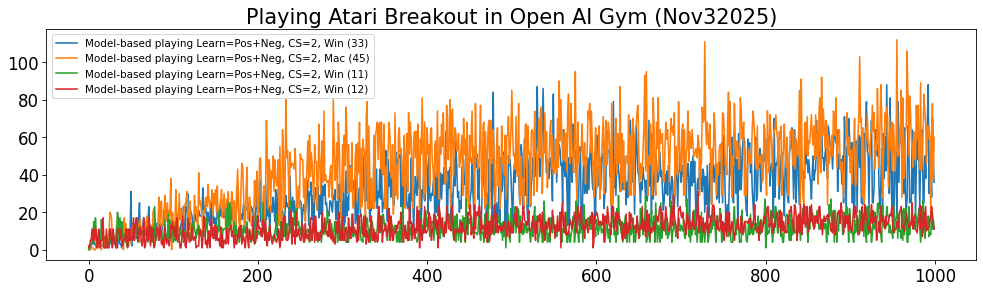

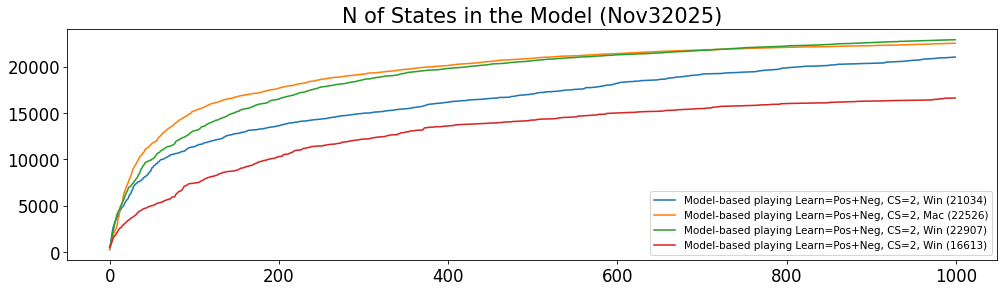

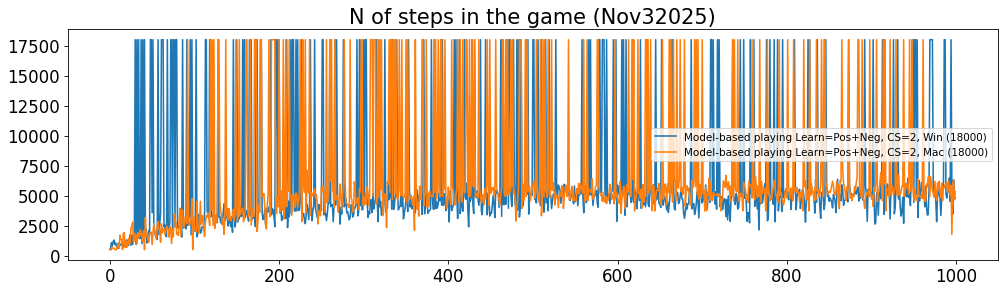

In [3]:
# Pos+Neg CS=2 Win:
score_avg=33.0; steps_avg=6468.3; lives_avg=0.4; lapse_avg="0:00:46.585482"; time="6:38:35.551816"
scoresPNCS2 = [0, 1.0, 3.0, 2.0, 4.0, 5.0, 3.0, 4.0, 2.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 7.0, 5.0, 5.0, 3.0, 3.0, 10.0, 3.0, 9.0, 3.0, 9.0, 8.0, 3.0, 3.0, 3.0, 6.0, 1.0, 6.0, 6.0, 3.0, 3.0, 1.0, 7.0, 3.0, 11.0, 10.0, 4.0, 6.0, 11.0, 8.0, 7.0, 11.0, 31.0, 2.0, 14.0, 14.0, 8.0, 10.0, 6.0, 14.0, 9.0, 16.0, 25.0, 8.0, 10.0, 8.0, 13.0, 17.0, 9.0, 8.0, 8.0, 12.0, 13.0, 23.0, 9.0, 8.0, 10.0, 8.0, 8.0, 13.0, 12.0, 8.0, 14.0, 14.0, 13.0, 14.0, 15.0, 8.0, 7.0, 14.0, 13.0, 21.0, 16.0, 16.0, 17.0, 17.0, 18.0, 8.0, 9.0, 8.0, 12.0, 15.0, 12.0, 11.0, 15.0, 8.0, 10.0, 19.0, 13.0, 10.0, 10.0, 13.0, 16.0, 13.0, 23.0, 10.0, 8.0, 23.0, 20.0, 30.0, 10.0, 13.0, 21.0, 20.0, 18.0, 14.0, 16.0, 16.0, 20.0, 15.0, 20.0, 19.0, 21.0, 18.0, 18.0, 18.0, 22.0, 33.0, 19.0, 21.0, 24.0, 19.0, 13.0, 20.0, 16.0, 13.0, 25.0, 10.0, 26.0, 20.0, 14.0, 17.0, 11.0, 15.0, 20.0, 17.0, 18.0, 24.0, 18.0, 18.0, 23.0, 18.0, 17.0, 23.0, 24.0, 17.0, 16.0, 15.0, 19.0, 14.0, 16.0, 27.0, 16.0, 22.0, 16.0, 16.0, 12.0, 33.0, 34.0, 21.0, 15.0, 15.0, 19.0, 16.0, 19.0, 24.0, 14.0, 23.0, 21.0, 23.0, 21.0, 25.0, 15.0, 19.0, 23.0, 22.0, 20.0, 13.0, 20.0, 11.0, 32.0, 24.0, 18.0, 21.0, 37.0, 15.0, 19.0, 20.0, 19.0, 22.0, 17.0, 26.0, 16.0, 35.0, 18.0, 23.0, 8.0, 24.0, 21.0, 20.0, 28.0, 22.0, 15.0, 32.0, 8.0, 22.0, 32.0, 37.0, 20.0, 21.0, 20.0, 21.0, 17.0, 15.0, 20.0, 29.0, 23.0, 23.0, 25.0, 13.0, 39.0, 18.0, 23.0, 28.0, 20.0, 26.0, 21.0, 18.0, 20.0, 28.0, 27.0, 26.0, 26.0, 25.0, 13.0, 20.0, 24.0, 21.0, 19.0, 24.0, 37.0, 31.0, 13.0, 31.0, 29.0, 36.0, 16.0, 29.0, 14.0, 26.0, 33.0, 31.0, 22.0, 34.0, 17.0, 29.0, 19.0, 41.0, 13.0, 34.0, 29.0, 35.0, 24.0, 25.0, 20.0, 20.0, 18.0, 26.0, 26.0, 23.0, 20.0, 29.0, 27.0, 32.0, 16.0, 26.0, 22.0, 13.0, 35.0, 26.0, 29.0, 23.0, 13.0, 37.0, 13.0, 15.0, 42.0, 18.0, 28.0, 21.0, 43.0, 45.0, 32.0, 38.0, 32.0, 33.0, 37.0, 14.0, 38.0, 16.0, 13.0, 29.0, 33.0, 19.0, 34.0, 25.0, 38.0, 50.0, 26.0, 40.0, 26.0, 47.0, 37.0, 41.0, 15.0, 26.0, 21.0, 26.0, 26.0, 49.0, 40.0, 26.0, 43.0, 22.0, 31.0, 28.0, 43.0, 27.0, 48.0, 20.0, 23.0, 26.0, 34.0, 53.0, 26.0, 15.0, 48.0, 34.0, 41.0, 28.0, 38.0, 35.0, 24.0, 24.0, 48.0, 52.0, 30.0, 48.0, 49.0, 50.0, 51.0, 23.0, 43.0, 24.0, 24.0, 50.0, 50.0, 36.0, 24.0, 22.0, 25.0, 30.0, 16.0, 49.0, 26.0, 28.0, 8.0, 27.0, 39.0, 31.0, 29.0, 47.0, 33.0, 48.0, 28.0, 13.0, 32.0, 29.0, 46.0, 26.0, 39.0, 48.0, 43.0, 19.0, 54.0, 28.0, 26.0, 30.0, 29.0, 35.0, 39.0, 16.0, 41.0, 20.0, 54.0, 18.0, 23.0, 29.0, 41.0, 27.0, 40.0, 35.0, 44.0, 37.0, 63.0, 23.0, 16.0, 42.0, 33.0, 44.0, 15.0, 30.0, 23.0, 35.0, 49.0, 34.0, 58.0, 43.0, 28.0, 31.0, 20.0, 26.0, 22.0, 44.0, 37.0, 48.0, 35.0, 38.0, 19.0, 43.0, 41.0, 22.0, 24.0, 28.0, 32.0, 49.0, 31.0, 21.0, 53.0, 44.0, 44.0, 51.0, 27.0, 44.0, 8.0, 20.0, 15.0, 32.0, 36.0, 53.0, 29.0, 35.0, 13.0, 30.0, 13.0, 48.0, 37.0, 31.0, 53.0, 13.0, 84.0, 35.0, 27.0, 13.0, 25.0, 14.0, 22.0, 38.0, 14.0, 49.0, 31.0, 34.0, 52.0, 51.0, 13.0, 42.0, 13.0, 20.0, 50.0, 45.0, 48.0, 39.0, 26.0, 13.0, 37.0, 46.0, 36.0, 53.0, 42.0, 53.0, 42.0, 27.0, 26.0, 56.0, 50.0, 21.0, 37.0, 59.0, 29.0, 44.0, 22.0, 13.0, 46.0, 49.0, 23.0, 34.0, 40.0, 49.0, 48.0, 39.0, 53.0, 43.0, 87.0, 56.0, 53.0, 39.0, 48.0, 49.0, 67.0, 86.0, 55.0, 52.0, 53.0, 41.0, 48.0, 42.0, 38.0, 49.0, 48.0, 41.0, 26.0, 83.0, 41.0, 49.0, 53.0, 36.0, 53.0, 49.0, 56.0, 53.0, 45.0, 46.0, 25.0, 64.0, 44.0, 39.0, 48.0, 34.0, 13.0, 49.0, 13.0, 48.0, 49.0, 36.0, 67.0, 49.0, 50.0, 53.0, 40.0, 33.0, 13.0, 29.0, 47.0, 55.0, 13.0, 14.0, 35.0, 52.0, 30.0, 35.0, 45.0, 30.0, 49.0, 32.0, 48.0, 56.0, 48.0, 36.0, 32.0, 47.0, 14.0, 20.0, 56.0, 61.0, 52.0, 34.0, 49.0, 32.0, 49.0, 51.0, 48.0, 22.0, 30.0, 31.0, 64.0, 52.0, 52.0, 53.0, 39.0, 41.0, 18.0, 38.0, 79.0, 33.0, 53.0, 29.0, 54.0, 58.0, 43.0, 37.0, 31.0, 48.0, 39.0, 32.0, 50.0, 35.0, 43.0, 24.0, 36.0, 28.0, 45.0, 54.0, 69.0, 39.0, 36.0, 69.0, 47.0, 19.0, 46.0, 66.0, 54.0, 41.0, 40.0, 34.0, 25.0, 36.0, 32.0, 44.0, 38.0, 37.0, 28.0, 37.0, 26.0, 35.0, 69.0, 34.0, 45.0, 19.0, 62.0, 27.0, 34.0, 42.0, 51.0, 47.0, 36.0, 37.0, 41.0, 52.0, 39.0, 42.0, 31.0, 21.0, 26.0, 40.0, 30.0, 42.0, 29.0, 45.0, 43.0, 23.0, 30.0, 39.0, 37.0, 21.0, 22.0, 35.0, 42.0, 38.0, 23.0, 40.0, 43.0, 51.0, 36.0, 41.0, 45.0, 39.0, 52.0, 40.0, 23.0, 43.0, 46.0, 37.0, 8.0, 43.0, 47.0, 34.0, 50.0, 36.0, 47.0, 28.0, 8.0, 35.0, 38.0, 32.0, 47.0, 47.0, 32.0, 31.0, 43.0, 39.0, 20.0, 39.0, 24.0, 45.0, 25.0, 17.0, 46.0, 45.0, 25.0, 51.0, 43.0, 36.0, 44.0, 46.0, 27.0, 28.0, 44.0, 25.0, 47.0, 41.0, 57.0, 25.0, 54.0, 61.0, 30.0, 16.0, 21.0, 24.0, 16.0, 38.0, 59.0, 40.0, 60.0, 27.0, 25.0, 63.0, 55.0, 30.0, 48.0, 11.0, 62.0, 32.0, 55.0, 32.0, 44.0, 58.0, 60.0, 58.0, 29.0, 21.0, 18.0, 59.0, 53.0, 57.0, 41.0, 48.0, 33.0, 25.0, 16.0, 45.0, 60.0, 26.0, 28.0, 44.0, 44.0, 54.0, 31.0, 37.0, 46.0, 50.0, 47.0, 57.0, 59.0, 52.0, 49.0, 48.0, 60.0, 34.0, 42.0, 46.0, 45.0, 17.0, 70.0, 28.0, 46.0, 45.0, 49.0, 57.0, 27.0, 39.0, 49.0, 52.0, 42.0, 34.0, 18.0, 45.0, 52.0, 32.0, 27.0, 25.0, 52.0, 54.0, 55.0, 65.0, 46.0, 27.0, 64.0, 39.0, 25.0, 54.0, 54.0, 33.0, 24.0, 57.0, 46.0, 40.0, 34.0, 42.0, 38.0, 66.0, 46.0, 48.0, 41.0, 48.0, 40.0, 36.0, 27.0, 42.0, 50.0, 37.0, 41.0, 43.0, 69.0, 52.0, 40.0, 53.0, 49.0, 60.0, 66.0, 49.0, 49.0, 42.0, 51.0, 54.0, 45.0, 38.0, 66.0, 61.0, 56.0, 54.0, 54.0, 43.0, 56.0, 62.0, 61.0, 57.0, 64.0, 31.0, 51.0, 51.0, 43.0, 48.0, 35.0, 50.0, 25.0, 71.0, 56.0, 17.0, 55.0, 52.0, 70.0, 61.0, 47.0, 57.0, 25.0, 57.0, 19.0, 17.0, 54.0, 58.0, 20.0, 53.0, 61.0, 44.0, 60.0, 25.0, 25.0, 24.0, 62.0, 35.0, 65.0, 79.0, 53.0, 51.0, 22.0, 53.0, 52.0, 69.0, 25.0, 25.0, 33.0, 62.0, 64.0, 53.0, 50.0, 56.0, 30.0, 22.0, 35.0, 54.0, 16.0, 62.0, 38.0, 60.0, 42.0, 88.0, 45.0, 51.0, 30.0, 81.0, 45.0, 22.0, 42.0, 10.0, 25.0, 50.0, 52.0, 20.0, 79.0, 36.0, 57.0, 66.0, 57.0, 67.0, 58.0, 30.0, 65.0, 31.0, 20.0, 27.0, 66.0, 59.0, 25.0, 27.0, 25.0, 64.0, 30.0, 56.0, 44.0, 17.0, 48.0, 64.0, 48.0, 50.0, 22.0, 48.0, 60.0, 64.0, 25.0, 25.0, 50.0, 38.0, 53.0, 68.0, 88.0, 30.0, 52.0, 44.0, 28.0, 70.0, 47.0, 36.0]
statesPNCS2 = [248, 770, 1502, 2113, 2626, 2905, 3148, 3426, 3641, 3800, 4007, 4158, 4427, 4592, 4748, 4860, 4937, 5103, 5328, 5428, 5588, 5685, 5788, 6084, 6216, 6308, 6596, 6726, 7040, 7172, 7289, 7359, 7407, 7555, 7565, 7600, 7667, 7718, 7801, 7865, 8007, 8073, 8125, 8214, 8268, 8360, 8505, 8608, 8693, 8844, 9095, 9124, 9277, 9353, 9410, 9517, 9548, 9666, 9748, 9819, 9947, 9970, 9985, 10013, 10054, 10111, 10163, 10216, 10244, 10298, 10330, 10443, 10493, 10511, 10526, 10550, 10561, 10598, 10631, 10637, 10657, 10675, 10719, 10740, 10799, 10841, 10841, 10855, 10882, 10928, 11022, 11096, 11130, 11218, 11254, 11288, 11302, 11315, 11328, 11351, 11369, 11414, 11450, 11483, 11534, 11580, 11592, 11615, 11630, 11649, 11660, 11755, 11792, 11799, 11807, 11848, 11858, 11911, 11922, 11934, 11982, 12005, 12019, 12038, 12058, 12069, 12102, 12122, 12149, 12167, 12192, 12221, 12231, 12250, 12329, 12399, 12410, 12502, 12524, 12550, 12600, 12610, 12622, 12638, 12650, 12677, 12712, 12759, 12763, 12768, 12794, 12796, 12805, 12811, 12822, 12897, 12905, 12917, 12939, 12961, 12977, 12994, 13052, 13088, 13129, 13137, 13142, 13142, 13150, 13167, 13168, 13188, 13196, 13199, 13202, 13214, 13253, 13260, 13268, 13277, 13285, 13302, 13311, 13333, 13345, 13387, 13401, 13413, 13444, 13458, 13467, 13483, 13498, 13507, 13524, 13528, 13550, 13560, 13585, 13617, 13623, 13658, 13696, 13714, 13729, 13743, 13761, 13816, 13831, 13848, 13855, 13897, 13916, 13927, 13928, 13940, 13941, 13947, 13996, 14006, 14009, 14016, 14018, 14043, 14065, 14090, 14102, 14108, 14121, 14123, 14127, 14133, 14146, 14153, 14159, 14185, 14214, 14221, 14226, 14232, 14247, 14279, 14279, 14280, 14286, 14293, 14299, 14319, 14335, 14343, 14351, 14369, 14372, 14373, 14375, 14387, 14389, 14412, 14457, 14463, 14469, 14484, 14523, 14540, 14541, 14554, 14556, 14559, 14615, 14616, 14625, 14650, 14670, 14682, 14705, 14712, 14715, 14720, 14721, 14730, 14743, 14768, 14772, 14783, 14794, 14801, 14814, 14826, 14836, 14854, 14862, 14886, 14893, 14910, 14915, 14917, 14919, 14928, 14956, 14965, 14966, 14980, 14987, 14988, 14993, 14999, 15000, 15005, 15010, 15031, 15047, 15074, 15087, 15091, 15106, 15108, 15119, 15124, 15124, 15126, 15149, 15157, 15161, 15162, 15194, 15211, 15212, 15235, 15236, 15258, 15270, 15271, 15272, 15278, 15290, 15296, 15327, 15333, 15339, 15369, 15377, 15382, 15395, 15399, 15418, 15422, 15434, 15435, 15446, 15448, 15460, 15469, 15484, 15485, 15490, 15519, 15530, 15533, 15583, 15588, 15595, 15599, 15608, 15638, 15646, 15662, 15679, 15685, 15698, 15704, 15742, 15750, 15789, 15814, 15854, 15860, 15921, 15932, 15938, 15953, 15960, 15988, 15991, 15993, 15995, 16024, 16029, 16032, 16037, 16041, 16050, 16058, 16088, 16091, 16100, 16104, 16138, 16140, 16142, 16149, 16178, 16183, 16203, 16221, 16231, 16234, 16251, 16254, 16263, 16273, 16273, 16277, 16281, 16284, 16313, 16318, 16326, 16328, 16331, 16332, 16337, 16339, 16369, 16378, 16386, 16414, 16416, 16417, 16418, 16435, 16436, 16436, 16437, 16441, 16450, 16459, 16465, 16467, 16469, 16487, 16488, 16488, 16506, 16517, 16518, 16520, 16547, 16551, 16551, 16553, 16564, 16571, 16593, 16594, 16599, 16599, 16600, 16607, 16610, 16665, 16669, 16675, 16678, 16680, 16680, 16685, 16688, 16692, 16694, 16694, 16695, 16699, 16700, 16714, 16762, 16790, 16791, 16791, 16819, 16823, 16847, 16850, 16892, 16893, 16905, 16927, 16927, 16929, 16931, 16936, 16951, 16973, 16975, 16982, 16982, 16986, 16993, 17043, 17046, 17052, 17052, 17052, 17093, 17096, 17123, 17156, 17186, 17187, 17201, 17208, 17208, 17219, 17220, 17226, 17265, 17274, 17276, 17281, 17292, 17293, 17298, 17299, 17306, 17308, 17325, 17328, 17331, 17337, 17337, 17348, 17350, 17385, 17385, 17388, 17407, 17415, 17415, 17463, 17466, 17467, 17470, 17477, 17479, 17480, 17484, 17504, 17512, 17514, 17520, 17545, 17545, 17546, 17551, 17565, 17572, 17572, 17575, 17577, 17580, 17596, 17605, 17632, 17703, 17736, 17739, 17741, 17741, 17741, 17741, 17742, 17745, 17771, 17774, 17777, 17788, 17792, 17821, 17835, 17835, 17871, 17873, 17884, 17884, 17921, 17928, 17953, 17993, 18002, 18002, 18012, 18013, 18030, 18031, 18038, 18067, 18089, 18112, 18150, 18174, 18198, 18202, 18206, 18256, 18296, 18305, 18320, 18322, 18323, 18325, 18335, 18353, 18357, 18360, 18363, 18372, 18384, 18392, 18394, 18394, 18409, 18412, 18429, 18430, 18430, 18434, 18435, 18461, 18464, 18489, 18494, 18496, 18502, 18507, 18518, 18523, 18524, 18527, 18529, 18534, 18540, 18540, 18550, 18554, 18556, 18558, 18558, 18566, 18576, 18582, 18594, 18633, 18638, 18638, 18639, 18641, 18648, 18650, 18665, 18715, 18728, 18764, 18769, 18776, 18781, 18784, 18784, 18805, 18807, 18860, 18868, 18874, 18881, 18885, 18890, 18895, 18905, 18915, 18920, 18933, 18942, 18979, 18983, 18983, 18993, 18999, 19002, 19048, 19052, 19055, 19060, 19061, 19082, 19092, 19092, 19098, 19098, 19127, 19132, 19140, 19165, 19199, 19201, 19205, 19206, 19225, 19228, 19236, 19240, 19242, 19244, 19244, 19244, 19245, 19247, 19247, 19247, 19249, 19253, 19254, 19256, 19258, 19259, 19260, 19260, 19289, 19293, 19298, 19302, 19320, 19322, 19328, 19330, 19334, 19342, 19344, 19348, 19349, 19351, 19355, 19359, 19365, 19369, 19372, 19378, 19381, 19385, 19388, 19390, 19410, 19410, 19411, 19413, 19420, 19421, 19424, 19431, 19435, 19438, 19442, 19444, 19451, 19452, 19454, 19461, 19465, 19500, 19503, 19541, 19546, 19549, 19566, 19568, 19599, 19606, 19621, 19625, 19628, 19635, 19649, 19651, 19653, 19654, 19661, 19674, 19680, 19684, 19688, 19692, 19696, 19697, 19734, 19755, 19760, 19762, 19840, 19843, 19846, 19848, 19850, 19854, 19861, 19886, 19897, 19899, 19906, 19906, 19912, 19916, 19939, 19946, 19952, 19955, 19964, 19971, 19983, 19986, 19993, 19995, 20002, 20006, 20031, 20034, 20037, 20039, 20041, 20043, 20044, 20044, 20046, 20047, 20050, 20057, 20058, 20060, 20060, 20065, 20067, 20074, 20084, 20086, 20095, 20097, 20099, 20105, 20106, 20109, 20109, 20115, 20121, 20134, 20146, 20174, 20175, 20177, 20178, 20184, 20187, 20206, 20209, 20213, 20254, 20255, 20256, 20257, 20259, 20263, 20271, 20273, 20274, 20275, 20283, 20283, 20286, 20286, 20287, 20292, 20294, 20295, 20296, 20299, 20301, 20303, 20308, 20311, 20319, 20320, 20327, 20329, 20332, 20335, 20340, 20342, 20344, 20346, 20349, 20355, 20356, 20358, 20360, 20361, 20362, 20364, 20364, 20364, 20371, 20375, 20378, 20378, 20379, 20383, 20391, 20391, 20391, 20391, 20391, 20399, 20450, 20456, 20496, 20501, 20502, 20504, 20506, 20507, 20513, 20522, 20523, 20529, 20533, 20540, 20546, 20551, 20551, 20556, 20559, 20564, 20568, 20568, 20574, 20580, 20612, 20613, 20614, 20631, 20636, 20638, 20661, 20670, 20670, 20689, 20689, 20694, 20694, 20695, 20714, 20716, 20721, 20722, 20750, 20754, 20767, 20806, 20811, 20817, 20824, 20826, 20830, 20833, 20838, 20846, 20848, 20848, 20851, 20869, 20876, 20892, 20892, 20902, 20907, 20941, 20945, 20949, 20953, 20957, 20958, 20958, 20958, 20958, 20958, 20973, 20977, 20985, 21000, 21003, 21010, 21010, 21013, 21018, 21019, 21034]
stepssPNCS2 = [510, 618, 1087, 790, 1179, 1295, 918, 1035, 723, 724, 602, 1043, 963, 860, 916, 1172, 731, 798, 919, 988, 1291, 1245, 848, 994, 1714, 858, 1726, 924, 1770, 1724, 18000, 918, 18000, 1447, 18000, 1427, 1423, 18000, 990, 18000, 1316, 18000, 1683, 2204, 1039, 1447, 2088, 1762, 18000, 18000, 3569, 18000, 2362, 2095, 1639, 1936, 1332, 18000, 1746, 2599, 3555, 18000, 18000, 18000, 2393, 2560, 1747, 1562, 18000, 2263, 2318, 2800, 18000, 18000, 1886, 18000, 18000, 2389, 18000, 18000, 2303, 2334, 2394, 2299, 2515, 1548, 18000, 2294, 2384, 2855, 2219, 18000, 2508, 3087, 3299, 18000, 1732, 18000, 2215, 2790, 2215, 2011, 18000, 1547, 1848, 3419, 2395, 1874, 1958, 2395, 2343, 2514, 3578, 18000, 18000, 3696, 3424, 3651, 18000, 18000, 3243, 3402, 3166, 2607, 2913, 2757, 3402, 2745, 18000, 3207, 3240, 2739, 3135, 2591, 3623, 4307, 2919, 3232, 3972, 2950, 2457, 3043, 3032, 2399, 3241, 1942, 18000, 3355, 2378, 2998, 18000, 2790, 2982, 3113, 3308, 4018, 3267, 18000, 3579, 18000, 3174, 3503, 3767, 3232, 2870, 18000, 3377, 18000, 3006, 3510, 3116, 3368, 2414, 18000, 18000, 4310, 3739, 3634, 18000, 18000, 3533, 3002, 3141, 3779, 2658, 3927, 3598, 4033, 3639, 3755, 18000, 3393, 3886, 3836, 3206, 2400, 18000, 18000, 4493, 18000, 18000, 3556, 4147, 2921, 3122, 3374, 3351, 3765, 3094, 18000, 2330, 4533, 3233, 3718, 18000, 3581, 18000, 18000, 3758, 3701, 18000, 3722, 18000, 3780, 3781, 4582, 18000, 3507, 3282, 3519, 2966, 2658, 3386, 4283, 3892, 3005, 4018, 18000, 4383, 2906, 3839, 4078, 18000, 3889, 3589, 3172, 3561, 4253, 3682, 4196, 3764, 18000, 18000, 3386, 3961, 3466, 2919, 3488, 4373, 4335, 18000, 4080, 4239, 4262, 2824, 4194, 18000, 4200, 18000, 4558, 3635, 4580, 2625, 3996, 3476, 4690, 18000, 4054, 4287, 4732, 3562, 3656, 3280, 2980, 3228, 4228, 4196, 3208, 3354, 3999, 3970, 4260, 18000, 3311, 3638, 18000, 4158, 18000, 3809, 3837, 18000, 4512, 18000, 18000, 4829, 3170, 3666, 3474, 4460, 4671, 3582, 5185, 3882, 4403, 4688, 18000, 4623, 2828, 18000, 4060, 4501, 3370, 3965, 3776, 4435, 18000, 3600, 4535, 3944, 5919, 4656, 4813, 18000, 3874, 18000, 3845, 3907, 4848, 5255, 18000, 5113, 3802, 4058, 4072, 5239, 4111, 4973, 3059, 3576, 3951, 4718, 5609, 3665, 18000, 5571, 4045, 4989, 3899, 4746, 4412, 3923, 3556, 5559, 5460, 3903, 4930, 5123, 5342, 5444, 3432, 5007, 18000, 3486, 5130, 5593, 4241, 3523, 3695, 3763, 3876, 18000, 5023, 3911, 3854, 18000, 3911, 4495, 3960, 4293, 5216, 4557, 18000, 4202, 18000, 4176, 4385, 5161, 3745, 4256, 4926, 4486, 2816, 5388, 4565, 3745, 4028, 4231, 18000, 4258, 18000, 4998, 3091, 5682, 18000, 3500, 4288, 4833, 3690, 5207, 18000, 4851, 4692, 6041, 3895, 2400, 4871, 4530, 4844, 18000, 4323, 3505, 18000, 5030, 4821, 5412, 4722, 4184, 4683, 18000, 3745, 3402, 4584, 4890, 5087, 18000, 4918, 3402, 5202, 4833, 3293, 3556, 3531, 4211, 5030, 4240, 3160, 5419, 5231, 5231, 5100, 4006, 5231, 18000, 3270, 18000, 4259, 4236, 5427, 4280, 18000, 18000, 3942, 18000, 18000, 4931, 4098, 5427, 18000, 5918, 4307, 3944, 18000, 3790, 18000, 3213, 4136, 18000, 5030, 4155, 4714, 5572, 5371, 18000, 5114, 18000, 3453, 5044, 5255, 5087, 5011, 18000, 18000, 4674, 4813, 4387, 5543, 18000, 5419, 4878, 4154, 18000, 5621, 5322, 3616, 4720, 18000, 4396, 4846, 3738, 18000, 5133, 5030, 3918, 4500, 5123, 5030, 5079, 18000, 5431, 4970, 5876, 5704, 5419, 4364, 5303, 5030, 5034, 5946, 5463, 5641, 5419, 5352, 5086, 4984, 4587, 5270, 4918, 4822, 4322, 5802, 4491, 5037, 5144, 4147, 5144, 5030, 5742, 5149, 18000, 4875, 3566, 5892, 5202, 4405, 4918, 4726, 18000, 5030, 18000, 5079, 5037, 4171, 5034, 5134, 5005, 5419, 4362, 4026, 18000, 18000, 5422, 5235, 18000, 18000, 18000, 5471, 4456, 18000, 5002, 4646, 5130, 4326, 5211, 5308, 5433, 18000, 4526, 4918, 18000, 2850, 5862, 5178, 5443, 4319, 5590, 18000, 5030, 18000, 5079, 3350, 18000, 4060, 5409, 5586, 5086, 5134, 4420, 4662, 18000, 4436, 5618, 4180, 5302, 3908, 5705, 5635, 4575, 18000, 3935, 5210, 4323, 4229, 4876, 4071, 4920, 18000, 4345, 4086, 5029, 5474, 5885, 4648, 4341, 5877, 4940, 18000, 4635, 5568, 5242, 4328, 4369, 4007, 18000, 4341, 4200, 4958, 4797, 4409, 3806, 4451, 3603, 4219, 5106, 18000, 5215, 18000, 6187, 3930, 3796, 5586, 5225, 5240, 4332, 4452, 5043, 5575, 4734, 4695, 3557, 3099, 3638, 4351, 3863, 4316, 4341, 5532, 5012, 18000, 3879, 4259, 4342, 3423, 3727, 4353, 5320, 4549, 3128, 4775, 5394, 5725, 4386, 5251, 4562, 4678, 5893, 4871, 3896, 5315, 5400, 4436, 18000, 18000, 4913, 18000, 5384, 4295, 5327, 3874, 18000, 4918, 18000, 4091, 4906, 4906, 3834, 4376, 4747, 4672, 3246, 4678, 2979, 4967, 3730, 2854, 4709, 5083, 18000, 4918, 4841, 4257, 5161, 4909, 3872, 4011, 5034, 18000, 5004, 4940, 5251, 18000, 4779, 5309, 4371, 2846, 3587, 3353, 2734, 18000, 5206, 4842, 5475, 18000, 4095, 5685, 5089, 3903, 4911, 2149, 5465, 4319, 5834, 4391, 4773, 5535, 5983, 5142, 18000, 2901, 3079, 5772, 18000, 5192, 4848, 4990, 4269, 18000, 2820, 4867, 5502, 18000, 3726, 4850, 4890, 5582, 3666, 18000, 4807, 5182, 5380, 5202, 5002, 5317, 4652, 4884, 5390, 3844, 5062, 4788, 5235, 18000, 6105, 3830, 4947, 5269, 5298, 5530, 3919, 4556, 4847, 5538, 5060, 4194, 2786, 4661, 5268, 18000, 3834, 18000, 5107, 5790, 5290, 5307, 5114, 3538, 6343, 4446, 18000, 5223, 5471, 3958, 3112, 5283, 5107, 4866, 3842, 4354, 18000, 5783, 4918, 5127, 4529, 4814, 4649, 4458, 3977, 5082, 4886, 4550, 3582, 4850, 6361, 4985, 4819, 5052, 4570, 5897, 5499, 4187, 4574, 4649, 5316, 4988, 4470, 18000, 5889, 5275, 5131, 4984, 4977, 4956, 5201, 5481, 5120, 5525, 5709, 4542, 5504, 4774, 5423, 4978, 4622, 5173, 18000, 5779, 5123, 2856, 5520, 5402, 5580, 5256, 4868, 5139, 18000, 4999, 2622, 2748, 5087, 5320, 3368, 5123, 6004, 4734, 5881, 18000, 18000, 3428, 5842, 4103, 5507, 5968, 5024, 5317, 3043, 5488, 5421, 5415, 18000, 3478, 4082, 5817, 5939, 18000, 4711, 5566, 3958, 3291, 3681, 4861, 2698, 5914, 4940, 6014, 4886, 6451, 4837, 5248, 4160, 6685, 18000, 18000, 4428, 18000, 18000, 5068, 18000, 3174, 6259, 4558, 5332, 6100, 5358, 5800, 5108, 4063, 5778, 4092, 3376, 3410, 5581, 18000, 18000, 18000, 18000, 5575, 4959, 5238, 4520, 2821, 4910, 6045, 5067, 4809, 3349, 4917, 5291, 5568, 18000, 18000, 5136, 4791, 5264, 5335, 6452, 4507, 18000, 5110, 3452, 6312, 4912, 4806]
lapsesPNCS2 = [0, 0, 1, 2, 3, 2, 3, 4, 3, 3, 3, 3, 5, 4, 4, 3, 3, 5, 5, 5, 4, 5, 5, 10, 7, 4, 12, 7, 13, 10, 9, 7, 8, 8, 5, 5, 6, 9, 8, 7, 14, 8, 6, 11, 4, 11, 14, 11, 16, 21, 36, 7, 22, 15, 10, 14, 7, 21, 14, 15, 26, 8, 8, 8, 12, 14, 11, 12, 10, 16, 12, 20, 14, 9, 9, 8, 8, 11, 10, 9, 10, 9, 16, 14, 19, 10, 5, 10, 10, 22, 23, 20, 20, 28, 11, 16, 10, 11, 9, 15, 17, 10, 22, 10, 10, 33, 10, 18, 15, 21, 12, 18, 24, 7, 16, 24, 9, 27, 12, 10, 33, 18, 13, 15, 10, 17, 16, 11, 20, 16, 16, 13, 11, 19, 43, 27, 14, 32, 19, 16, 22, 14, 15, 15, 15, 20, 29, 28, 9, 10, 17, 9, 11, 11, 15, 36, 22, 22, 29, 12, 14, 20, 24, 21, 25, 13, 10, 13, 15, 24, 10, 26, 7, 18, 11, 23, 27, 7, 17, 19, 20, 21, 10, 28, 18, 30, 24, 20, 37, 19, 19, 13, 16, 15, 22, 16, 33, 11, 27, 19, 15, 32, 54, 27, 14, 17, 26, 41, 24, 18, 14, 43, 30, 16, 6, 19, 9, 19, 42, 17, 11, 26, 8, 30, 28, 45, 25, 18, 18, 11, 15, 19, 16, 17, 17, 32, 11, 7, 7, 27, 15, 34, 7, 15, 17, 18, 16, 31, 21, 24, 20, 11, 12, 6, 17, 16, 20, 16, 52, 14, 14, 17, 47, 31, 8, 23, 13, 14, 44, 12, 24, 39, 11, 21, 33, 16, 7, 19, 13, 28, 19, 35, 15, 20, 22, 11, 14, 15, 25, 8, 26, 28, 14, 33, 13, 9, 9, 22, 21, 17, 8, 32, 9, 10, 18, 11, 12, 13, 13, 44, 35, 39, 28, 10, 32, 12, 41, 15, 6, 16, 25, 16, 19, 13, 31, 38, 29, 21, 14, 33, 22, 15, 9, 24, 20, 21, 36, 10, 23, 30, 21, 12, 31, 15, 38, 9, 29, 28, 16, 17, 29, 42, 35, 12, 17, 29, 42, 26, 51, 17, 20, 24, 24, 41, 29, 20, 20, 17, 16, 14, 33, 19, 18, 33, 59, 20, 36, 11, 34, 21, 25, 45, 19, 11, 12, 42, 25, 8, 21, 15, 21, 17, 66, 11, 34, 20, 45, 17, 23, 22, 43, 38, 11, 33, 28, 25, 13, 15, 25, 14, 12, 37, 15, 21, 45, 28, 14, 11, 17, 14, 38, 7, 40, 18, 25, 57, 14, 19, 11, 34, 15, 12, 16, 20, 20, 31, 19, 11, 11, 24, 18, 12, 22, 22, 16, 18, 29, 21, 22, 19, 25, 26, 46, 18, 24, 28, 10, 23, 15, 103, 11, 16, 15, 22, 11, 30, 34, 8, 16, 14, 11, 37, 6, 27, 47, 36, 16, 11, 55, 23, 39, 13, 23, 7, 23, 39, 9, 14, 16, 19, 41, 26, 19, 22, 5, 20, 41, 77, 25, 25, 17, 9, 51, 12, 53, 49, 61, 9, 48, 26, 19, 44, 18, 27, 34, 26, 11, 15, 27, 9, 27, 13, 28, 22, 35, 11, 21, 25, 8, 32, 16, 40, 4, 21, 52, 12, 12, 54, 19, 23, 11, 26, 12, 17, 38, 42, 33, 20, 37, 8, 19, 13, 37, 48, 23, 7, 16, 15, 13, 18, 17, 37, 69, 24, 13, 13, 12, 20, 8, 12, 18, 27, 29, 17, 29, 10, 35, 34, 9, 27, 24, 37, 7, 17, 26, 20, 44, 13, 16, 38, 13, 23, 35, 26, 36, 41, 24, 22, 18, 22, 35, 39, 51, 37, 38, 26, 13, 41, 18, 17, 39, 17, 32, 13, 29, 13, 24, 21, 6, 36, 14, 51, 21, 7, 18, 18, 72, 14, 32, 13, 25, 21, 26, 32, 21, 17, 14, 21, 21, 59, 18, 21, 36, 16, 17, 13, 45, 38, 27, 29, 47, 21, 12, 12, 27, 48, 22, 47, 51, 30, 28, 13, 31, 48, 24, 12, 58, 19, 69, 30, 49, 10, 10, 24, 20, 31, 30, 24, 53, 62, 72, 32, 4, 28, 30, 24, 48, 11, 16, 20, 23, 95, 31, 3, 21, 34, 19, 20, 43, 46, 68, 26, 26, 10, 56, 23, 41, 28, 23, 26, 22, 23, 16, 17, 16, 10, 35, 29, 6, 19, 12, 28, 7, 5, 80, 28, 23, 11, 80, 7, 23, 13, 46, 83, 18, 12, 6, 17, 14, 5, 37, 22, 40, 20, 12, 16, 20, 30, 43, 5, 21, 29, 28, 19, 17, 59, 32, 12, 37, 13, 31, 18, 25, 23, 25, 107, 25, 160, 16, 13, 97, 15, 28, 18, 43, 25, 48, 31, 69, 58, 22, 9, 42, 24, 22, 25, 63, 19, 37, 12, 34, 28, 38, 31, 119, 23, 18, 35, 25, 38, 37, 74, 57, 37, 29, 15, 24, 34, 25, 21, 22, 14, 30, 27, 35, 44, 41, 23, 46, 22, 89, 14, 31, 21, 24, 16, 27, 5, 24, 9, 30, 34, 9, 15, 17, 38, 10, 52, 22, 35, 39, 23, 27, 39, 8, 27, 24, 24, 33, 59, 66, 16, 5, 13, 33, 25, 20, 53, 36, 17, 77, 12, 6, 19, 29, 39, 38, 42, 24, 13, 38, 16, 50, 11, 20, 27, 27, 17, 21, 38, 15, 40, 9, 26, 29, 21, 60, 28, 18, 34, 26, 21, 6, 19, 15, 78, 15, 28, 34, 8, 13, 14, 6, 29, 80, 20, 19, 5, 8, 46, 27, 16, 8, 6, 6, 45, 54, 24, 51, 53, 16, 22, 14, 21, 32, 22, 6, 60, 17, 33, 23, 49, 12, 10, 36, 67, 33, 25, 36, 22, 77, 18, 30, 54, 43, 18, 82, 34, 11, 42, 27, 43, 6, 45, 16, 32, 42, 13, 44, 29, 43, 50, 36, 23, 11, 24, 20, 55, 28, 38, 7, 7, 25, 39, 32, 44, 10, 124, 14, 65, 21, 22, 19, 32, 26, 15, 8, 6, 13, 35, 25, 39, 26, 27, 15, 19, 41, 20, 17, 47]

# Pos+Neg CS=2 Mac:
scoresPNCS2_ = [0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 2.0, 4.0, 1.0, 7.0, 6.0, 6.0, 0, 9.0, 14.0, 1.0, 5.0, 1.0, 3.0, 6.0, 3.0, 7.0, 20.0, 19.0, 17.0, 5.0, 9.0, 6.0, 7.0, 3.0, 13.0, 13.0, 7.0, 11.0, 7.0, 11.0, 5.0, 14.0, 0, 17.0, 6.0, 14.0, 6.0, 4.0, 8.0, 9.0, 9.0, 3.0, 9.0, 13.0, 10.0, 8.0, 6.0, 13.0, 17.0, 14.0, 13.0, 4.0, 16.0, 10.0, 12.0, 11.0, 11.0, 10.0, 15.0, 12.0, 18.0, 8.0, 14.0, 13.0, 3.0, 13.0, 8.0, 20.0, 22.0, 18.0, 9.0, 10.0, 9.0, 16.0, 28.0, 8.0, 25.0, 26.0, 13.0, 14.0, 19.0, 29.0, 15.0, 19.0, 25.0, 14.0, 21.0, 18.0, 38.0, 0, 20.0, 12.0, 13.0, 16.0, 32.0, 20.0, 10.0, 14.0, 30.0, 16.0, 22.0, 21.0, 11.0, 14.0, 24.0, 24.0, 26.0, 31.0, 19.0, 15.0, 21.0, 26.0, 7.0, 14.0, 13.0, 12.0, 29.0, 19.0, 23.0, 16.0, 8.0, 41.0, 24.0, 26.0, 22.0, 17.0, 9.0, 21.0, 20.0, 27.0, 28.0, 23.0, 35.0, 27.0, 22.0, 26.0, 27.0, 32.0, 18.0, 30.0, 24.0, 32.0, 20.0, 34.0, 17.0, 20.0, 23.0, 26.0, 32.0, 17.0, 23.0, 30.0, 22.0, 9.0, 27.0, 23.0, 31.0, 10.0, 14.0, 22.0, 31.0, 26.0, 9.0, 26.0, 16.0, 11.0, 31.0, 43.0, 30.0, 9.0, 9.0, 33.0, 46.0, 44.0, 30.0, 15.0, 13.0, 32.0, 44.0, 16.0, 21.0, 28.0, 24.0, 13.0, 13.0, 12.0, 16.0, 37.0, 23.0, 34.0, 42.0, 13.0, 24.0, 48.0, 49.0, 35.0, 13.0, 18.0, 34.0, 13.0, 32.0, 69.0, 51.0, 22.0, 48.0, 43.0, 20.0, 42.0, 38.0, 50.0, 31.0, 48.0, 40.0, 34.0, 36.0, 48.0, 13.0, 55.0, 17.0, 13.0, 64.0, 55.0, 22.0, 32.0, 80.0, 49.0, 53.0, 39.0, 23.0, 52.0, 44.0, 46.0, 45.0, 46.0, 43.0, 54.0, 38.0, 18.0, 30.0, 34.0, 22.0, 51.0, 49.0, 48.0, 48.0, 28.0, 38.0, 15.0, 33.0, 46.0, 58.0, 33.0, 61.0, 39.0, 52.0, 46.0, 35.0, 25.0, 56.0, 47.0, 47.0, 21.0, 36.0, 67.0, 47.0, 30.0, 48.0, 58.0, 36.0, 74.0, 37.0, 40.0, 36.0, 36.0, 37.0, 28.0, 40.0, 45.0, 33.0, 27.0, 80.0, 57.0, 37.0, 39.0, 57.0, 27.0, 68.0, 57.0, 37.0, 17.0, 31.0, 56.0, 31.0, 61.0, 45.0, 76.0, 62.0, 30.0, 56.0, 36.0, 43.0, 31.0, 57.0, 23.0, 22.0, 32.0, 49.0, 56.0, 26.0, 57.0, 41.0, 68.0, 22.0, 54.0, 23.0, 59.0, 53.0, 53.0, 13.0, 71.0, 79.0, 22.0, 66.0, 43.0, 22.0, 38.0, 28.0, 22.0, 61.0, 22.0, 62.0, 64.0, 68.0, 48.0, 67.0, 68.0, 43.0, 68.0, 41.0, 40.0, 67.0, 22.0, 44.0, 22.0, 47.0, 55.0, 68.0, 61.0, 41.0, 38.0, 56.0, 19.0, 32.0, 73.0, 29.0, 45.0, 27.0, 61.0, 65.0, 52.0, 54.0, 43.0, 34.0, 51.0, 61.0, 22.0, 45.0, 62.0, 31.0, 73.0, 51.0, 68.0, 60.0, 45.0, 22.0, 58.0, 63.0, 49.0, 63.0, 39.0, 67.0, 49.0, 22.0, 59.0, 51.0, 81.0, 54.0, 27.0, 68.0, 30.0, 45.0, 65.0, 51.0, 56.0, 34.0, 64.0, 65.0, 47.0, 43.0, 29.0, 56.0, 58.0, 39.0, 74.0, 44.0, 27.0, 60.0, 51.0, 67.0, 55.0, 73.0, 49.0, 35.0, 36.0, 77.0, 51.0, 48.0, 68.0, 80.0, 22.0, 73.0, 75.0, 39.0, 56.0, 65.0, 61.0, 53.0, 53.0, 62.0, 44.0, 47.0, 54.0, 61.0, 29.0, 70.0, 51.0, 59.0, 22.0, 68.0, 43.0, 22.0, 61.0, 47.0, 61.0, 74.0, 46.0, 55.0, 24.0, 78.0, 51.0, 49.0, 43.0, 44.0, 57.0, 77.0, 38.0, 28.0, 66.0, 68.0, 22.0, 63.0, 24.0, 51.0, 65.0, 69.0, 22.0, 69.0, 46.0, 51.0, 64.0, 48.0, 20.0, 30.0, 56.0, 65.0, 34.0, 55.0, 22.0, 30.0, 66.0, 46.0, 50.0, 40.0, 61.0, 27.0, 61.0, 61.0, 71.0, 46.0, 52.0, 65.0, 85.0, 62.0, 50.0, 51.0, 43.0, 71.0, 41.0, 39.0, 78.0, 30.0, 24.0, 50.0, 29.0, 38.0, 22.0, 51.0, 67.0, 67.0, 24.0, 66.0, 51.0, 52.0, 24.0, 63.0, 64.0, 62.0, 29.0, 74.0, 54.0, 50.0, 31.0, 47.0, 70.0, 50.0, 75.0, 76.0, 30.0, 50.0, 53.0, 73.0, 50.0, 63.0, 33.0, 48.0, 47.0, 64.0, 69.0, 43.0, 61.0, 40.0, 42.0, 48.0, 59.0, 41.0, 70.0, 44.0, 90.0, 58.0, 80.0, 60.0, 49.0, 48.0, 64.0, 47.0, 62.0, 42.0, 75.0, 83.0, 57.0, 46.0, 78.0, 55.0, 50.0, 41.0, 58.0, 95.0, 44.0, 24.0, 68.0, 46.0, 52.0, 52.0, 52.0, 67.0, 48.0, 45.0, 57.0, 35.0, 49.0, 51.0, 74.0, 70.0, 78.0, 52.0, 74.0, 57.0, 42.0, 28.0, 50.0, 65.0, 42.0, 33.0, 48.0, 66.0, 27.0, 49.0, 50.0, 60.0, 71.0, 30.0, 52.0, 69.0, 45.0, 50.0, 68.0, 62.0, 50.0, 24.0, 78.0, 24.0, 29.0, 42.0, 53.0, 70.0, 40.0, 62.0, 52.0, 46.0, 87.0, 31.0, 62.0, 36.0, 58.0, 32.0, 41.0, 50.0, 49.0, 46.0, 72.0, 29.0, 61.0, 29.0, 59.0, 70.0, 29.0, 58.0, 64.0, 67.0, 74.0, 77.0, 53.0, 36.0, 46.0, 38.0, 41.0, 53.0, 65.0, 93.0, 42.0, 95.0, 46.0, 29.0, 50.0, 46.0, 67.0, 48.0, 29.0, 81.0, 66.0, 42.0, 29.0, 68.0, 54.0, 81.0, 42.0, 64.0, 57.0, 57.0, 62.0, 37.0, 36.0, 55.0, 68.0, 59.0, 64.0, 55.0, 36.0, 53.0, 70.0, 63.0, 66.0, 61.0, 73.0, 29.0, 55.0, 41.0, 40.0, 79.0, 59.0, 43.0, 42.0, 64.0, 67.0, 29.0, 64.0, 29.0, 51.0, 55.0, 74.0, 47.0, 63.0, 55.0, 54.0, 64.0, 57.0, 50.0, 50.0, 53.0, 54.0, 49.0, 61.0, 57.0, 29.0, 54.0, 46.0, 76.0, 68.0, 69.0, 111.0, 67.0, 56.0, 68.0, 58.0, 54.0, 67.0, 42.0, 24.0, 54.0, 46.0, 73.0, 64.0, 48.0, 29.0, 46.0, 40.0, 53.0, 56.0, 54.0, 29.0, 73.0, 72.0, 63.0, 45.0, 46.0, 40.0, 69.0, 84.0, 55.0, 79.0, 46.0, 28.0, 50.0, 45.0, 78.0, 58.0, 49.0, 58.0, 57.0, 43.0, 43.0, 81.0, 75.0, 59.0, 64.0, 68.0, 29.0, 54.0, 29.0, 41.0, 46.0, 54.0, 46.0, 51.0, 46.0, 64.0, 74.0, 68.0, 59.0, 45.0, 43.0, 66.0, 43.0, 50.0, 46.0, 46.0, 51.0, 36.0, 38.0, 67.0, 64.0, 42.0, 29.0, 74.0, 51.0, 41.0, 72.0, 64.0, 54.0, 43.0, 59.0, 64.0, 64.0, 72.0, 63.0, 59.0, 34.0, 63.0, 59.0, 66.0, 29.0, 42.0, 58.0, 67.0, 51.0, 44.0, 60.0, 29.0, 36.0, 51.0, 63.0, 64.0, 64.0, 45.0, 64.0, 45.0, 43.0, 59.0, 53.0, 50.0, 63.0, 85.0, 24.0, 91.0, 44.0, 28.0, 24.0, 67.0, 68.0, 51.0, 71.0, 50.0, 58.0, 57.0, 65.0, 72.0, 61.0, 56.0, 66.0, 48.0, 72.0, 50.0, 62.0, 35.0, 74.0, 81.0, 41.0, 92.0, 61.0, 75.0, 64.0, 54.0, 69.0, 67.0, 24.0, 61.0, 46.0, 50.0, 54.0, 61.0, 50.0, 74.0, 70.0, 61.0, 81.0, 44.0, 51.0, 64.0, 64.0, 43.0, 42.0, 47.0, 37.0, 28.0, 46.0, 52.0, 64.0, 73.0, 50.0, 60.0, 59.0, 41.0, 53.0, 35.0, 53.0, 56.0, 70.0, 34.0, 37.0, 56.0, 60.0, 72.0, 103.0, 68.0, 70.0, 28.0, 65.0, 24.0, 29.0, 65.0, 59.0, 72.0, 57.0, 55.0, 50.0, 62.0, 63.0, 77.0, 63.0, 73.0, 43.0, 58.0, 53.0, 86.0, 61.0, 44.0, 66.0, 88.0, 72.0, 28.0, 50.0, 58.0, 73.0, 68.0, 76.0, 54.0, 33.0, 71.0, 62.0, 53.0, 68.0, 42.0, 67.0, 55.0, 42.0, 54.0, 112.0, 50.0, 50.0, 54.0, 67.0, 85.0, 28.0, 81.0, 38.0, 46.0, 63.0, 65.0, 106.0, 82.0, 50.0, 82.0, 75.0, 60.0, 55.0, 44.0, 63.0, 50.0, 48.0, 77.0, 59.0, 77.0, 51.0, 43.0, 89.0, 42.0, 54.0, 63.0, 83.0, 74.0, 68.0, 46.0, 66.0, 59.0, 66.0, 60.0, 15.0, 59.0, 78.0, 37.0, 60.0]
statesPNCS2_ = [318, 590, 986, 1253, 1683, 2033, 2279, 2412, 2632, 3012, 3666, 3840, 4620, 4914, 5183, 5385, 5987, 6402, 6583, 6869, 7108, 7288, 7542, 7772, 7989, 8223, 8462, 8786, 9027, 9190, 9357, 9472, 9663, 9829, 9985, 10144, 10345, 10410, 10503, 10602, 10743, 10854, 11088, 11141, 11196, 11250, 11349, 11404, 11527, 11614, 11722, 11781, 11824, 11862, 11909, 11970, 12059, 12258, 12375, 12453, 12530, 12638, 12738, 12818, 12919, 12983, 13082, 13129, 13236, 13296, 13363, 13424, 13483, 13559, 13598, 13633, 13767, 13854, 13919, 13998, 14060, 14130, 14217, 14258, 14316, 14385, 14436, 14474, 14546, 14599, 14633, 14690, 14755, 14857, 14882, 14925, 14969, 15109, 15159, 15194, 15229, 15259, 15300, 15354, 15380, 15416, 15429, 15467, 15491, 15533, 15572, 15611, 15635, 15695, 15749, 15782, 15826, 15878, 15918, 15953, 16012, 16017, 16046, 16064, 16079, 16130, 16152, 16186, 16204, 16207, 16262, 16288, 16307, 16332, 16385, 16412, 16449, 16466, 16470, 16520, 16538, 16561, 16568, 16582, 16590, 16603, 16644, 16692, 16717, 16730, 16749, 16760, 16805, 16829, 16848, 16856, 16877, 16895, 16907, 16932, 16962, 16973, 16974, 16990, 17005, 17033, 17044, 17047, 17074, 17101, 17111, 17116, 17135, 17140, 17143, 17156, 17200, 17208, 17209, 17210, 17267, 17301, 17330, 17345, 17355, 17359, 17392, 17449, 17469, 17479, 17489, 17518, 17519, 17521, 17537, 17552, 17564, 17585, 17610, 17664, 17679, 17696, 17746, 17761, 17782, 17786, 17820, 17850, 17854, 17868, 17906, 17916, 17924, 17932, 17938, 17944, 17956, 17971, 18021, 18041, 18068, 18078, 18105, 18137, 18163, 18163, 18181, 18190, 18192, 18209, 18226, 18249, 18259, 18319, 18338, 18374, 18382, 18392, 18407, 18435, 18439, 18442, 18453, 18472, 18517, 18530, 18543, 18564, 18587, 18615, 18630, 18656, 18666, 18670, 18681, 18686, 18691, 18740, 18746, 18777, 18781, 18791, 18796, 18809, 18824, 18845, 18848, 18850, 18854, 18857, 18858, 18864, 18877, 18901, 18920, 18934, 18943, 18946, 18973, 18976, 18993, 19019, 19021, 19028, 19028, 19044, 19052, 19052, 19079, 19090, 19100, 19121, 19133, 19135, 19143, 19146, 19165, 19172, 19175, 19179, 19189, 19193, 19218, 19238, 19263, 19285, 19303, 19307, 19307, 19319, 19325, 19333, 19336, 19336, 19341, 19341, 19359, 19361, 19379, 19385, 19390, 19408, 19422, 19430, 19445, 19451, 19458, 19473, 19493, 19503, 19506, 19517, 19520, 19520, 19523, 19543, 19545, 19556, 19566, 19587, 19602, 19612, 19649, 19653, 19655, 19658, 19672, 19680, 19693, 19707, 19708, 19729, 19731, 19737, 19749, 19756, 19758, 19774, 19796, 19807, 19821, 19822, 19829, 19835, 19850, 19871, 19884, 19893, 19906, 19909, 19913, 19917, 19937, 19938, 19939, 19954, 19955, 19956, 19972, 19973, 19984, 19986, 20002, 20002, 20020, 20024, 20031, 20036, 20048, 20055, 20060, 20061, 20061, 20073, 20077, 20094, 20097, 20099, 20103, 20109, 20124, 20145, 20148, 20166, 20177, 20178, 20202, 20203, 20209, 20241, 20246, 20249, 20250, 20279, 20281, 20284, 20291, 20294, 20301, 20308, 20317, 20319, 20319, 20322, 20340, 20342, 20348, 20358, 20366, 20375, 20395, 20396, 20399, 20406, 20406, 20412, 20413, 20444, 20456, 20462, 20474, 20477, 20500, 20503, 20514, 20522, 20524, 20536, 20552, 20559, 20559, 20577, 20586, 20600, 20605, 20606, 20618, 20637, 20651, 20671, 20680, 20682, 20694, 20698, 20707, 20707, 20716, 20717, 20717, 20725, 20726, 20733, 20739, 20745, 20750, 20754, 20756, 20758, 20759, 20773, 20782, 20782, 20786, 20788, 20803, 20813, 20814, 20817, 20825, 20832, 20837, 20840, 20841, 20847, 20848, 20849, 20851, 20862, 20882, 20893, 20900, 20924, 20935, 20940, 20946, 20951, 20954, 20973, 20983, 20985, 20985, 20990, 21005, 21014, 21014, 21014, 21020, 21024, 21024, 21028, 21032, 21048, 21048, 21050, 21061, 21064, 21068, 21083, 21085, 21085, 21097, 21106, 21114, 21123, 21124, 21125, 21127, 21130, 21133, 21138, 21140, 21144, 21146, 21148, 21149, 21155, 21158, 21161, 21161, 21167, 21169, 21171, 21174, 21180, 21185, 21193, 21201, 21207, 21210, 21215, 21227, 21235, 21238, 21241, 21247, 21249, 21254, 21262, 21268, 21268, 21270, 21271, 21274, 21276, 21282, 21295, 21303, 21307, 21324, 21326, 21329, 21330, 21338, 21347, 21352, 21354, 21356, 21357, 21361, 21365, 21365, 21378, 21384, 21385, 21391, 21399, 21402, 21406, 21406, 21407, 21409, 21414, 21419, 21435, 21440, 21445, 21446, 21447, 21448, 21449, 21463, 21466, 21474, 21474, 21487, 21490, 21491, 21493, 21498, 21500, 21500, 21503, 21511, 21511, 21515, 21525, 21530, 21535, 21543, 21545, 21548, 21553, 21558, 21567, 21572, 21574, 21576, 21577, 21583, 21585, 21588, 21590, 21592, 21609, 21611, 21620, 21624, 21627, 21629, 21634, 21640, 21643, 21644, 21656, 21657, 21658, 21663, 21663, 21672, 21673, 21673, 21674, 21678, 21679, 21686, 21690, 21692, 21695, 21704, 21704, 21707, 21711, 21714, 21716, 21718, 21725, 21729, 21734, 21735, 21736, 21739, 21748, 21749, 21750, 21752, 21754, 21759, 21766, 21766, 21766, 21768, 21778, 21782, 21785, 21789, 21795, 21797, 21799, 21799, 21800, 21800, 21804, 21809, 21809, 21811, 21817, 21820, 21822, 21826, 21833, 21834, 21838, 21839, 21841, 21843, 21843, 21844, 21844, 21850, 21859, 21861, 21865, 21873, 21875, 21877, 21877, 21884, 21890, 21893, 21898, 21900, 21905, 21905, 21910, 21911, 21919, 21920, 21923, 21923, 21924, 21927, 21928, 21930, 21934, 21935, 21935, 21942, 21944, 21944, 21953, 21953, 21959, 21961, 21961, 21961, 21973, 21975, 21983, 21983, 21984, 21984, 21984, 21986, 21989, 21989, 21991, 21996, 21996, 21997, 22000, 22006, 22010, 22010, 22012, 22023, 22023, 22024, 22024, 22025, 22030, 22032, 22034, 22040, 22041, 22045, 22048, 22051, 22061, 22064, 22064, 22065, 22066, 22066, 22070, 22071, 22073, 22073, 22074, 22075, 22077, 22081, 22082, 22085, 22091, 22092, 22095, 22095, 22096, 22096, 22097, 22101, 22102, 22108, 22111, 22112, 22112, 22114, 22116, 22127, 22131, 22133, 22135, 22135, 22137, 22137, 22139, 22139, 22139, 22139, 22140, 22143, 22143, 22143, 22143, 22144, 22146, 22148, 22149, 22150, 22151, 22152, 22152, 22152, 22154, 22155, 22155, 22156, 22157, 22160, 22161, 22161, 22163, 22164, 22165, 22168, 22176, 22179, 22181, 22188, 22193, 22193, 22193, 22193, 22197, 22199, 22206, 22213, 22215, 22223, 22223, 22224, 22228, 22228, 22228, 22229, 22231, 22232, 22232, 22235, 22235, 22236, 22239, 22241, 22242, 22242, 22244, 22244, 22244, 22245, 22245, 22245, 22246, 22246, 22248, 22250, 22250, 22254, 22255, 22257, 22259, 22261, 22267, 22268, 22273, 22276, 22280, 22289, 22290, 22290, 22291, 22298, 22298, 22302, 22303, 22304, 22306, 22306, 22307, 22307, 22310, 22311, 22311, 22318, 22318, 22319, 22320, 22322, 22323, 22328, 22329, 22330, 22341, 22345, 22345, 22348, 22349, 22356, 22356, 22359, 22359, 22364, 22365, 22366, 22376, 22380, 22382, 22382, 22387, 22393, 22394, 22395, 22400, 22401, 22402, 22406, 22409, 22409, 22409, 22409, 22409, 22410, 22414, 22415, 22418, 22421, 22428, 22431, 22436, 22443, 22443, 22447, 22451, 22452, 22452, 22454, 22470, 22470, 22471, 22471, 22473, 22474, 22477, 22479, 22481, 22481, 22481, 22491, 22500, 22500, 22501, 22501, 22505, 22506, 22507, 22507, 22514, 22514, 22520, 22526, 22526]
stepssPNCS2_ = [500, 506, 490, 692, 615, 602, 493, 493, 497, 799, 1048, 615, 1691, 1335, 1332, 496, 1846, 1913, 678, 1274, 691, 922, 1432, 917, 1059, 2309, 2417, 2795, 1111, 1870, 1342, 1722, 1001, 1899, 1498, 1688, 2169, 1690, 1856, 1170, 2081, 487, 3177, 1604, 1816, 1373, 1126, 1865, 1847, 1954, 912, 1884, 2638, 1988, 1804, 1402, 2329, 2834, 2173, 2199, 1109, 2641, 1902, 2216, 2204, 1762, 1945, 2449, 2316, 2185, 1533, 2429, 2128, 1001, 2195, 1559, 3477, 2878, 2835, 1780, 1870, 1668, 2920, 3952, 1582, 3635, 3802, 2326, 2468, 3207, 3222, 2652, 18000, 3224, 2538, 2676, 3093, 4746, 493, 3228, 2218, 2124, 1988, 4502, 2501, 1866, 2414, 4529, 2609, 3329, 3042, 2110, 1576, 2764, 3309, 3198, 3590, 3219, 2506, 18000, 3802, 18000, 2518, 18000, 2259, 3290, 2744, 3658, 18000, 18000, 4643, 3663, 3233, 2637, 2863, 1770, 3497, 18000, 3444, 3202, 2952, 3928, 3114, 2884, 3196, 3253, 3846, 2893, 4244, 18000, 3942, 2874, 3844, 18000, 3434, 3586, 3822, 3968, 2829, 3152, 3774, 18000, 18000, 3824, 3233, 3973, 18000, 2530, 3181, 3893, 3250, 18000, 18000, 18000, 2000, 2703, 4233, 3629, 18000, 18000, 4992, 4921, 5177, 4091, 2570, 2228, 4043, 5176, 18000, 3250, 3541, 18000, 18000, 18000, 18000, 18000, 4509, 3518, 4901, 4065, 18000, 3661, 5325, 5399, 3784, 18000, 3041, 4289, 18000, 4089, 6013, 5350, 18000, 5234, 4960, 3358, 4996, 4697, 5094, 4005, 5230, 5022, 4042, 4608, 5225, 18000, 5892, 2836, 18000, 6255, 5278, 18000, 3605, 7107, 5434, 5182, 18000, 3364, 5291, 4985, 5037, 5345, 5559, 4791, 5105, 4527, 2634, 3650, 3733, 3318, 5655, 5289, 5822, 5291, 3613, 4605, 18000, 4402, 5041, 5395, 18000, 6221, 18000, 5417, 5419, 3958, 18000, 4655, 4968, 4966, 3638, 4292, 5967, 4986, 3871, 5090, 5703, 18000, 6260, 4375, 4342, 4278, 4035, 4022, 18000, 4870, 4637, 3632, 3756, 6148, 5414, 4360, 4512, 4822, 3836, 5613, 5270, 18000, 18000, 4241, 4814, 4216, 5204, 4310, 5741, 5234, 4144, 4913, 18000, 18000, 18000, 4975, 18000, 18000, 18000, 4265, 4746, 18000, 4809, 18000, 5479, 18000, 4974, 3321, 4897, 5153, 4722, 2329, 6122, 5950, 18000, 5259, 18000, 18000, 4696, 18000, 18000, 5151, 18000, 4949, 4624, 4966, 18000, 5473, 5003, 18000, 5018, 4822, 4842, 5264, 18000, 4409, 18000, 5245, 4664, 4930, 4921, 4538, 4209, 4942, 2109, 18000, 5057, 3866, 4417, 3286, 5791, 5128, 4633, 18000, 18000, 4156, 5020, 5068, 18000, 4050, 5218, 4063, 5361, 5021, 4930, 4977, 4897, 18000, 5277, 18000, 4763, 5793, 18000, 5465, 4904, 18000, 18000, 4927, 5361, 5555, 18000, 4927, 3925, 4360, 5717, 4919, 4738, 4237, 18000, 5766, 5269, 4386, 4212, 5045, 5598, 18000, 5707, 4353, 18000, 5200, 4455, 18000, 5553, 5230, 5317, 18000, 18000, 5442, 4974, 18000, 4930, 5821, 18000, 5884, 5699, 18000, 4857, 5185, 5136, 4829, 18000, 5660, 4983, 4369, 4956, 5061, 4212, 5555, 4724, 5849, 18000, 6021, 4185, 18000, 5177, 5378, 5645, 5694, 4953, 5201, 18000, 5699, 5359, 5076, 4603, 4201, 5196, 5649, 18000, 18000, 5205, 4943, 18000, 5045, 18000, 5053, 5579, 5319, 18000, 5731, 18000, 5187, 5446, 4726, 2881, 3925, 4806, 5830, 18000, 18000, 18000, 3930, 5976, 4601, 4923, 18000, 4933, 18000, 5304, 5537, 5773, 4586, 5113, 5647, 5828, 6195, 4781, 4986, 18000, 5408, 5149, 4453, 5707, 18000, 3317, 4781, 18000, 4894, 18000, 5304, 5565, 4860, 18000, 5633, 4815, 5509, 18000, 5453, 6060, 5292, 4208, 5037, 4873, 4975, 3994, 4869, 5212, 4927, 5833, 5690, 3930, 4977, 5556, 5880, 4923, 5453, 18000, 4633, 4869, 5361, 5761, 4584, 5173, 4597, 4609, 4601, 5588, 5150, 6004, 5143, 6024, 5752, 5388, 5195, 18000, 4491, 4994, 4628, 18000, 4574, 5547, 5458, 5429, 5264, 6393, 4701, 4845, 5150, 5752, 5903, 18000, 18000, 5740, 5265, 5018, 5026, 4529, 5238, 4489, 4701, 4936, 4322, 4827, 4634, 5243, 5942, 5578, 4684, 4969, 5164, 4314, 18000, 4931, 5229, 4705, 4409, 4483, 6167, 3530, 4689, 5007, 5733, 5748, 3925, 4796, 5945, 5278, 18000, 5581, 5037, 4931, 18000, 6344, 18000, 3722, 4574, 4849, 5423, 18000, 5167, 5278, 4779, 5535, 3998, 5916, 4459, 4837, 18000, 18000, 4927, 18000, 5264, 5533, 18000, 5513, 3723, 5906, 5775, 3722, 4837, 5447, 5458, 5432, 6013, 5209, 4270, 4798, 18000, 4709, 5205, 5977, 5624, 4251, 5962, 5265, 18000, 4923, 18000, 6053, 4459, 18000, 6385, 6165, 4574, 18000, 5712, 5608, 6385, 18000, 5357, 5684, 5097, 5827, 18000, 4100, 5468, 5824, 5400, 5641, 5063, 4191, 5080, 6294, 5685, 6148, 18000, 5751, 18000, 5055, 18000, 4718, 5803, 5929, 4840, 18000, 5170, 5419, 3722, 5684, 3722, 5160, 5018, 6468, 4608, 6109, 4774, 4569, 5281, 5168, 5007, 5003, 5076, 5173, 4947, 5148, 4915, 3722, 4569, 4794, 6225, 5934, 5689, 6692, 5884, 5486, 6135, 5699, 4569, 5810, 5006, 18000, 4569, 18000, 5695, 5384, 5304, 18000, 4831, 4500, 5156, 5201, 5013, 3724, 6116, 5795, 5517, 4663, 5094, 4400, 6204, 5837, 5878, 5717, 4798, 18000, 5003, 4652, 6597, 5695, 4813, 5831, 4936, 18000, 4394, 6186, 5192, 5404, 5281, 5612, 3730, 4569, 18000, 5145, 5268, 4569, 4794, 4694, 5264, 5664, 6280, 5702, 4994, 4986, 4625, 4447, 18000, 5003, 5267, 4794, 4602, 4191, 4544, 5370, 5593, 4791, 18000, 5745, 5188, 4740, 5635, 5281, 4569, 18000, 5400, 5594, 5281, 5680, 5258, 5308, 4467, 5241, 4984, 5422, 3722, 18000, 5752, 6253, 4766, 4654, 5441, 3722, 18000, 4997, 6012, 5281, 5281, 4576, 5644, 4646, 18000, 5400, 5487, 4923, 5141, 6222, 18000, 6132, 4901, 18000, 18000, 5793, 5961, 5042, 5324, 5350, 5260, 5421, 5861, 6200, 5831, 5165, 5049, 5362, 6182, 5003, 5876, 3901, 6248, 6212, 18000, 7206, 5995, 5732, 5281, 4569, 5737, 5458, 18000, 5869, 4794, 5002, 4569, 5132, 4931, 5745, 5410, 6055, 6553, 18000, 18000, 5315, 5281, 4840, 18000, 4958, 4494, 3931, 4886, 5057, 5315, 5265, 4923, 18000, 5404, 4712, 4980, 4089, 5696, 5382, 5985, 18000, 4494, 5382, 5330, 6209, 6901, 5825, 4575, 18000, 5956, 18000, 3722, 5520, 5429, 5625, 4878, 18000, 5085, 5876, 5728, 5001, 5425, 5604, 18000, 5186, 4955, 6751, 5119, 5048, 5332, 5803, 5812, 18000, 4923, 5851, 5964, 5609, 6032, 5130, 18000, 6218, 5360, 18000, 5630, 4574, 5578, 4850, 4574, 4569, 6392, 4931, 4923, 4865, 5032, 4745, 18000, 5422, 4507, 4544, 5950, 5733, 6552, 6587, 4923, 6572, 5983, 5452, 5137, 4869, 6193, 5002, 4596, 6045, 5466, 6191, 5238, 4840, 6050, 4574, 5691, 5692, 5917, 5997, 6084, 5265, 6197, 5496, 5042, 5858, 1761, 5906, 6283, 4650, 5330]
lapsesPNCS2_ = [0, 1, 1, 1, 2, 2, 1, 1, 1, 4, 5, 2, 11, 8, 9, 6, 20, 25, 12, 17, 13, 12, 17, 17, 13, 23, 30, 47, 36, 23, 18, 21, 27, 27, 33, 28, 38, 12, 29, 23, 32, 24, 65, 16, 22, 25, 21, 28, 35, 21, 27, 26, 17, 22, 20, 28, 39, 81, 52, 20, 34, 62, 49, 35, 47, 32, 40, 28, 55, 39, 51, 47, 37, 51, 23, 34, 105, 58, 40, 47, 32, 36, 77, 49, 38, 73, 39, 27, 36, 39, 44, 57, 21, 51, 21, 61, 48, 116, 35, 45, 42, 37, 37, 71, 27, 33, 23, 48, 39, 46, 46, 28, 40, 50, 51, 69, 49, 68, 39, 54, 43, 24, 40, 47, 41, 83, 40, 70, 23, 22, 60, 42, 31, 58, 76, 55, 57, 31, 25, 63, 35, 41, 21, 53, 36, 27, 42, 68, 51, 41, 67, 25, 83, 49, 41, 30, 29, 48, 30, 42, 62, 28, 9, 57, 29, 71, 10, 32, 61, 62, 21, 17, 69, 20, 12, 67, 69, 30, 9, 11, 126, 86, 57, 35, 32, 16, 73, 77, 47, 61, 32, 47, 10, 9, 44, 32, 28, 39, 65, 73, 16, 26, 81, 50, 29, 10, 64, 50, 13, 65, 101, 36, 13, 24, 16, 25, 34, 77, 47, 60, 41, 22, 50, 69, 42, 9, 36, 19, 10, 51, 39, 47, 49, 141, 53, 60, 30, 27, 47, 43, 17, 34, 16, 66, 104, 36, 34, 20, 45, 31, 29, 55, 32, 28, 28, 27, 10, 80, 10, 74, 15, 55, 19, 66, 47, 83, 20, 29, 36, 25, 8, 31, 49, 58, 40, 54, 59, 42, 80, 20, 51, 66, 43, 33, 22, 37, 45, 24, 89, 38, 34, 46, 134, 36, 27, 28, 27, 27, 30, 15, 50, 53, 85, 47, 55, 35, 89, 28, 14, 33, 33, 37, 10, 9, 31, 15, 31, 19, 51, 23, 80, 39, 34, 43, 23, 52, 28, 89, 94, 36, 11, 24, 13, 9, 64, 51, 16, 39, 24, 61, 34, 33, 143, 30, 17, 12, 43, 45, 54, 42, 11, 50, 9, 25, 25, 32, 16, 62, 64, 53, 122, 43, 47, 44, 44, 100, 51, 23, 28, 19, 24, 41, 39, 16, 10, 34, 24, 27, 28, 21, 36, 9, 59, 11, 77, 35, 54, 42, 29, 27, 45, 10, 23, 46, 16, 52, 28, 20, 40, 15, 45, 47, 43, 84, 24, 10, 64, 38, 35, 116, 51, 19, 39, 22, 15, 22, 22, 22, 68, 36, 22, 33, 12, 30, 53, 16, 30, 49, 22, 32, 48, 15, 10, 32, 13, 25, 16, 68, 53, 62, 21, 35, 43, 17, 73, 46, 12, 38, 39, 20, 10, 82, 55, 72, 33, 22, 31, 39, 76, 55, 60, 24, 33, 17, 33, 16, 49, 11, 9, 57, 19, 32, 69, 45, 9, 34, 38, 34, 26, 43, 69, 12, 32, 42, 39, 62, 13, 32, 113, 47, 37, 55, 17, 43, 44, 13, 42, 138, 53, 78, 31, 103, 29, 21, 23, 30, 60, 60, 29, 23, 8, 31, 62, 58, 9, 14, 43, 30, 10, 22, 39, 97, 11, 24, 74, 22, 69, 64, 41, 67, 90, 64, 33, 42, 29, 13, 24, 28, 47, 28, 30, 40, 15, 23, 25, 28, 22, 33, 6, 37, 34, 25, 41, 56, 45, 64, 53, 46, 14, 63, 25, 50, 41, 24, 37, 35, 20, 50, 44, 14, 49, 22, 18, 21, 50, 52, 60, 32, 76, 15, 31, 11, 40, 51, 64, 62, 30, 71, 57, 54, 32, 50, 35, 36, 39, 50, 37, 52, 18, 32, 52, 34, 35, 93, 29, 64, 20, 37, 66, 38, 71, 26, 56, 14, 112, 25, 20, 26, 31, 22, 28, 56, 55, 53, 41, 69, 55, 33, 60, 63, 46, 61, 35, 63, 48, 19, 45, 16, 27, 16, 30, 24, 20, 74, 43, 72, 21, 33, 30, 42, 22, 31, 40, 33, 33, 22, 41, 30, 169, 46, 18, 21, 23, 21, 53, 39, 21, 37, 43, 33, 23, 60, 37, 37, 22, 59, 87, 51, 29, 41, 38, 116, 24, 35, 36, 34, 52, 60, 31, 15, 35, 88, 34, 26, 30, 90, 25, 42, 22, 8, 9, 47, 52, 29, 55, 50, 19, 39, 62, 14, 28, 40, 34, 30, 15, 30, 16, 25, 83, 81, 46, 41, 70, 41, 28, 18, 67, 18, 52, 69, 29, 31, 37, 36, 47, 94, 16, 37, 28, 25, 26, 52, 21, 42, 37, 18, 60, 12, 22, 75, 40, 49, 54, 25, 20, 66, 53, 67, 35, 13, 10, 27, 42, 35, 29, 8, 57, 24, 19, 30, 56, 69, 16, 12, 65, 30, 16, 38, 40, 20, 29, 42, 41, 8, 61, 37, 41, 120, 27, 23, 37, 31, 6, 19, 35, 31, 44, 19, 27, 38, 65, 23, 35, 55, 36, 14, 10, 33, 17, 20, 27, 13, 43, 55, 41, 6, 32, 89, 83, 14, 32, 62, 34, 23, 9, 21, 25, 25, 19, 22, 33, 21, 24, 29, 44, 39, 30, 13, 13, 64, 47, 11, 25, 32, 21, 24, 81, 19, 34, 17, 5, 18, 12, 16, 55, 68, 71, 17, 95, 52, 39, 27, 32, 50, 39, 45, 111, 48, 54, 18, 37, 60, 29, 15, 26, 30, 24, 21, 53, 13, 46, 31, 14, 61, 41, 17, 27, 38, 8, 16, 18, 38, 6, 35, 31, 20, 43, 20, 30, 18, 28, 63, 10, 66, 38, 54, 29, 24, 16, 34, 49, 26, 16, 23, 31, 36, 17, 21, 17, 53, 36, 8, 40, 26, 16, 20, 38, 24, 52, 22, 13, 106, 41, 26, 102, 34, 59, 42, 22, 18, 65, 32, 48, 94, 28, 24, 29, 28, 52, 24, 26, 32, 29, 39, 30, 49, 27, 6, 26, 48, 30, 35, 34, 35, 26, 48, 16, 77, 77, 25, 59, 45, 35, 17, 44, 100, 15, 56, 22, 52, 22, 42, 34, 54, 14, 37, 58, 55, 33, 26, 27, 47, 9, 24, 12, 153, 15, 24, 157, 12]

# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_251111a -lm=2 -cs=2
score_avg=11.5; steps_avg=7753.2; lives_avg=0.9; lapse_avg="0:00:22.100974"; time="7:54:38.711796"
scoresPNCS2__ = [1.0, 0, 2.0, 3.0, 3.0, 8.0, 15.0, 4.0, 17.0, 7.0, 4.0, 4.0, 5.0, 5.0, 5.0, 16.0, 8.0, 8.0, 6.0, 5.0, 4.0, 8.0, 3.0, 4.0, 2.0, 4.0, 7.0, 6.0, 2.0, 8.0, 4.0, 7.0, 2.0, 11.0, 20.0, 17.0, 5.0, 17.0, 6.0, 15.0, 10.0, 4.0, 8.0, 5.0, 7.0, 2.0, 6.0, 2.0, 9.0, 6.0, 7.0, 5.0, 10.0, 10.0, 10.0, 11.0, 13.0, 14.0, 4.0, 11.0, 9.0, 12.0, 8.0, 10.0, 10.0, 5.0, 8.0, 11.0, 8.0, 6.0, 4.0, 7.0, 10.0, 8.0, 8.0, 4.0, 12.0, 6.0, 23.0, 8.0, 5.0, 8.0, 10.0, 9.0, 8.0, 9.0, 10.0, 6.0, 4.0, 8.0, 16.0, 7.0, 8.0, 6.0, 19.0, 6.0, 16.0, 6.0, 8.0, 10.0, 4.0, 6.0, 5.0, 10.0, 12.0, 4.0, 7.0, 6.0, 11.0, 8.0, 8.0, 9.0, 4.0, 10.0, 8.0, 2.0, 9.0, 8.0, 8.0, 9.0, 5.0, 5.0, 14.0, 8.0, 15.0, 11.0, 9.0, 6.0, 11.0, 9.0, 13.0, 7.0, 9.0, 10.0, 8.0, 10.0, 7.0, 8.0, 9.0, 17.0, 13.0, 5.0, 10.0, 7.0, 8.0, 9.0, 7.0, 7.0, 12.0, 9.0, 7.0, 13.0, 8.0, 10.0, 21.0, 10.0, 11.0, 12.0, 8.0, 11.0, 11.0, 11.0, 12.0, 22.0, 4.0, 25.0, 13.0, 25.0, 14.0, 10.0, 10.0, 9.0, 15.0, 8.0, 13.0, 7.0, 7.0, 11.0, 4.0, 8.0, 7.0, 11.0, 5.0, 13.0, 9.0, 12.0, 9.0, 15.0, 9.0, 8.0, 10.0, 9.0, 4.0, 8.0, 6.0, 14.0, 5.0, 4.0, 18.0, 6.0, 10.0, 10.0, 8.0, 9.0, 11.0, 7.0, 25.0, 9.0, 11.0, 12.0, 9.0, 8.0, 6.0, 11.0, 13.0, 8.0, 7.0, 7.0, 5.0, 5.0, 10.0, 12.0, 19.0, 7.0, 11.0, 9.0, 5.0, 15.0, 7.0, 9.0, 7.0, 14.0, 7.0, 8.0, 14.0, 6.0, 8.0, 9.0, 26.0, 9.0, 12.0, 14.0, 13.0, 20.0, 13.0, 15.0, 22.0, 13.0, 15.0, 10.0, 12.0, 8.0, 13.0, 13.0, 9.0, 4.0, 9.0, 7.0, 10.0, 11.0, 9.0, 4.0, 8.0, 10.0, 9.0, 9.0, 17.0, 13.0, 14.0, 5.0, 9.0, 4.0, 9.0, 7.0, 10.0, 4.0, 10.0, 13.0, 8.0, 13.0, 13.0, 11.0, 21.0, 15.0, 13.0, 7.0, 9.0, 14.0, 9.0, 4.0, 11.0, 15.0, 9.0, 15.0, 4.0, 7.0, 19.0, 11.0, 7.0, 14.0, 17.0, 13.0, 12.0, 8.0, 4.0, 4.0, 6.0, 4.0, 11.0, 9.0, 6.0, 19.0, 7.0, 7.0, 12.0, 8.0, 7.0, 5.0, 7.0, 13.0, 16.0, 9.0, 5.0, 5.0, 4.0, 18.0, 7.0, 7.0, 16.0, 17.0, 12.0, 7.0, 11.0, 4.0, 11.0, 15.0, 11.0, 9.0, 4.0, 5.0, 10.0, 11.0, 21.0, 11.0, 9.0, 18.0, 15.0, 9.0, 19.0, 15.0, 13.0, 10.0, 11.0, 5.0, 13.0, 11.0, 10.0, 7.0, 9.0, 13.0, 11.0, 9.0, 13.0, 11.0, 4.0, 9.0, 10.0, 4.0, 15.0, 4.0, 4.0, 24.0, 11.0, 8.0, 11.0, 8.0, 7.0, 15.0, 14.0, 5.0, 12.0, 8.0, 9.0, 12.0, 12.0, 10.0, 7.0, 6.0, 4.0, 6.0, 18.0, 20.0, 16.0, 12.0, 13.0, 9.0, 16.0, 16.0, 21.0, 18.0, 12.0, 16.0, 19.0, 7.0, 12.0, 15.0, 15.0, 14.0, 5.0, 15.0, 18.0, 9.0, 8.0, 11.0, 20.0, 6.0, 14.0, 9.0, 10.0, 7.0, 10.0, 15.0, 13.0, 11.0, 19.0, 16.0, 19.0, 13.0, 12.0, 20.0, 13.0, 6.0, 17.0, 18.0, 4.0, 19.0, 11.0, 5.0, 11.0, 16.0, 4.0, 12.0, 18.0, 11.0, 17.0, 4.0, 27.0, 10.0, 8.0, 17.0, 14.0, 16.0, 18.0, 9.0, 9.0, 20.0, 9.0, 9.0, 9.0, 8.0, 10.0, 19.0, 14.0, 5.0, 11.0, 9.0, 9.0, 4.0, 19.0, 12.0, 9.0, 14.0, 24.0, 4.0, 15.0, 15.0, 8.0, 11.0, 18.0, 8.0, 10.0, 15.0, 10.0, 14.0, 15.0, 18.0, 14.0, 9.0, 14.0, 5.0, 15.0, 7.0, 14.0, 1.0, 14.0, 12.0, 19.0, 11.0, 4.0, 22.0, 10.0, 16.0, 9.0, 17.0, 23.0, 9.0, 22.0, 22.0, 21.0, 4.0, 18.0, 13.0, 9.0, 8.0, 14.0, 9.0, 12.0, 15.0, 9.0, 11.0, 12.0, 9.0, 4.0, 9.0, 15.0, 7.0, 17.0, 23.0, 11.0, 14.0, 18.0, 4.0, 7.0, 9.0, 18.0, 11.0, 4.0, 4.0, 26.0, 16.0, 8.0, 13.0, 4.0, 5.0, 9.0, 4.0, 17.0, 10.0, 9.0, 18.0, 11.0, 13.0, 13.0, 7.0, 10.0, 12.0, 10.0, 13.0, 9.0, 4.0, 11.0, 10.0, 16.0, 17.0, 20.0, 4.0, 4.0, 10.0, 9.0, 4.0, 8.0, 10.0, 17.0, 18.0, 4.0, 9.0, 26.0, 12.0, 9.0, 4.0, 13.0, 9.0, 19.0, 11.0, 4.0, 24.0, 17.0, 11.0, 16.0, 12.0, 17.0, 13.0, 17.0, 11.0, 11.0, 15.0, 19.0, 10.0, 11.0, 7.0, 16.0, 13.0, 8.0, 11.0, 14.0, 13.0, 9.0, 11.0, 10.0, 7.0, 4.0, 9.0, 18.0, 11.0, 6.0, 11.0, 4.0, 14.0, 12.0, 18.0, 18.0, 8.0, 10.0, 4.0, 22.0, 8.0, 29.0, 14.0, 16.0, 9.0, 15.0, 4.0, 8.0, 12.0, 18.0, 18.0, 4.0, 14.0, 14.0, 4.0, 15.0, 8.0, 10.0, 17.0, 4.0, 11.0, 4.0, 10.0, 16.0, 14.0, 11.0, 7.0, 22.0, 14.0, 20.0, 8.0, 16.0, 15.0, 29.0, 4.0, 6.0, 11.0, 9.0, 4.0, 15.0, 21.0, 13.0, 10.0, 18.0, 4.0, 25.0, 14.0, 4.0, 13.0, 10.0, 4.0, 25.0, 6.0, 11.0, 14.0, 13.0, 16.0, 8.0, 17.0, 6.0, 9.0, 8.0, 12.0, 26.0, 4.0, 9.0, 11.0, 16.0, 11.0, 7.0, 10.0, 10.0, 17.0, 15.0, 10.0, 13.0, 11.0, 10.0, 16.0, 7.0, 6.0, 14.0, 27.0, 19.0, 7.0, 12.0, 4.0, 11.0, 8.0, 11.0, 21.0, 17.0, 8.0, 13.0, 4.0, 12.0, 12.0, 17.0, 4.0, 20.0, 4.0, 11.0, 14.0, 4.0, 14.0, 15.0, 9.0, 4.0, 8.0, 14.0, 9.0, 17.0, 11.0, 23.0, 13.0, 14.0, 4.0, 18.0, 11.0, 14.0, 15.0, 22.0, 18.0, 4.0, 11.0, 12.0, 14.0, 10.0, 11.0, 12.0, 15.0, 7.0, 12.0, 12.0, 4.0, 4.0, 4.0, 17.0, 23.0, 11.0, 8.0, 16.0, 16.0, 13.0, 4.0, 5.0, 4.0, 21.0, 8.0, 9.0, 14.0, 15.0, 5.0, 4.0, 9.0, 16.0, 8.0, 19.0, 9.0, 15.0, 8.0, 9.0, 14.0, 11.0, 14.0, 9.0, 18.0, 12.0, 8.0, 16.0, 16.0, 12.0, 14.0, 15.0, 27.0, 1.0, 22.0, 8.0, 10.0, 9.0, 14.0, 21.0, 11.0, 4.0, 9.0, 9.0, 23.0, 23.0, 18.0, 9.0, 9.0, 21.0, 17.0, 7.0, 9.0, 4.0, 4.0, 12.0, 11.0, 18.0, 19.0, 18.0, 11.0, 5.0, 19.0, 5.0, 16.0, 8.0, 15.0, 9.0, 9.0, 11.0, 18.0, 15.0, 13.0, 17.0, 5.0, 16.0, 17.0, 22.0, 14.0, 15.0, 23.0, 20.0, 11.0, 4.0, 15.0, 11.0, 19.0, 15.0, 20.0, 18.0, 13.0, 12.0, 18.0, 17.0, 21.0, 15.0, 11.0, 12.0, 15.0, 16.0, 16.0, 14.0, 11.0, 14.0, 13.0, 4.0, 17.0, 8.0, 24.0, 18.0, 27.0, 12.0, 16.0, 21.0, 4.0, 21.0, 16.0, 4.0, 13.0, 10.0, 20.0, 18.0, 19.0, 17.0, 8.0, 11.0, 20.0, 15.0, 19.0, 23.0, 17.0, 4.0, 22.0, 16.0, 9.0, 12.0, 6.0, 4.0, 16.0, 9.0, 10.0, 18.0, 15.0, 9.0, 21.0, 17.0, 10.0, 20.0, 18.0, 7.0, 19.0, 10.0, 4.0, 23.0, 8.0, 23.0, 13.0, 12.0, 4.0, 9.0, 20.0, 11.0, 20.0, 14.0, 10.0, 24.0, 25.0, 19.0, 11.0, 8.0, 4.0, 24.0, 15.0, 12.0, 14.0, 12.0, 23.0, 19.0, 17.0, 9.0, 13.0, 9.0, 10.0, 6.0, 24.0, 9.0, 16.0, 17.0, 20.0, 6.0, 19.0, 10.0, 10.0, 6.0, 21.0, 5.0, 22.0, 8.0, 20.0, 22.0, 4.0, 4.0, 23.0, 8.0, 15.0, 13.0, 17.0, 13.0, 11.0, 19.0, 19.0, 17.0, 12.0, 17.0, 22.0, 12.0, 4.0, 10.0, 16.0, 26.0, 19.0, 6.0, 11.0, 11.0, 14.0, 18.0, 7.0, 9.0, 8.0, 19.0, 11.0, 16.0, 11.0]
statesPNCS2__ = [505, 778, 1265, 1846, 2236, 2617, 3110, 3441, 3829, 4130, 4332, 4506, 4687, 4956, 5097, 5379, 5552, 5738, 6025, 6271, 6448, 6635, 6879, 7016, 7040, 7113, 7282, 7379, 7451, 7626, 7718, 7865, 7958, 8109, 8324, 8458, 8646, 8949, 9048, 9220, 9389, 9445, 9647, 9697, 9742, 9771, 9837, 9862, 9918, 9938, 10029, 10053, 10119, 10180, 10364, 10476, 10591, 10688, 10706, 10766, 10880, 10941, 11002, 11037, 11144, 11173, 11240, 11292, 11373, 11380, 11384, 11408, 11434, 11468, 11526, 11558, 11622, 11699, 11920, 11979, 12032, 12070, 12107, 12197, 12222, 12281, 12321, 12366, 12377, 12426, 12500, 12533, 12611, 12646, 12725, 12824, 12902, 12945, 13027, 13077, 13091, 13094, 13115, 13131, 13206, 13208, 13255, 13359, 13467, 13523, 13541, 13561, 13574, 13661, 13710, 13784, 13817, 13880, 13912, 13952, 13974, 14026, 14060, 14095, 14140, 14199, 14217, 14237, 14256, 14316, 14365, 14402, 14438, 14472, 14505, 14521, 14556, 14605, 14628, 14700, 14747, 14814, 14857, 14888, 14926, 14958, 14970, 14994, 15064, 15090, 15120, 15170, 15191, 15199, 15305, 15338, 15356, 15392, 15428, 15446, 15452, 15459, 15481, 15518, 15520, 15551, 15582, 15626, 15658, 15684, 15739, 15756, 15833, 15841, 15896, 15918, 15938, 15967, 15975, 15981, 16012, 16028, 16034, 16041, 16053, 16082, 16104, 16165, 16209, 16282, 16297, 16363, 16374, 16376, 16392, 16401, 16423, 16433, 16462, 16491, 16499, 16560, 16584, 16614, 16658, 16660, 16680, 16725, 16738, 16759, 16788, 16823, 16828, 16837, 16878, 16895, 16922, 16927, 16951, 17002, 17024, 17049, 17097, 17134, 17165, 17199, 17202, 17215, 17226, 17233, 17250, 17307, 17318, 17348, 17384, 17407, 17426, 17458, 17499, 17515, 17536, 17568, 17581, 17603, 17623, 17651, 17680, 17734, 17751, 17789, 17799, 17816, 17838, 17841, 17853, 17856, 17871, 17887, 17917, 17927, 17951, 17953, 17968, 17994, 18003, 18013, 18049, 18064, 18085, 18091, 18098, 18107, 18111, 18114, 18132, 18138, 18152, 18161, 18186, 18207, 18232, 18249, 18258, 18296, 18301, 18319, 18343, 18349, 18364, 18365, 18386, 18407, 18427, 18474, 18479, 18493, 18520, 18541, 18549, 18578, 18613, 18625, 18661, 18668, 18670, 18674, 18676, 18677, 18694, 18713, 18738, 18769, 18777, 18781, 18806, 18835, 18837, 18839, 18844, 18876, 18894, 18904, 18917, 18933, 18942, 18981, 18989, 18993, 19003, 19011, 19014, 19015, 19018, 19024, 19024, 19043, 19057, 19073, 19076, 19084, 19104, 19108, 19148, 19203, 19217, 19241, 19250, 19259, 19259, 19286, 19321, 19337, 19376, 19378, 19386, 19393, 19407, 19431, 19432, 19439, 19443, 19464, 19473, 19477, 19484, 19493, 19527, 19528, 19542, 19543, 19543, 19554, 19574, 19596, 19602, 19602, 19607, 19620, 19626, 19630, 19637, 19641, 19644, 19656, 19660, 19663, 19667, 19668, 19669, 19669, 19698, 19704, 19716, 19733, 19744, 19749, 19762, 19778, 19788, 19800, 19806, 19816, 19824, 19827, 19837, 19850, 19861, 19861, 19868, 19871, 19881, 19890, 19895, 19902, 19911, 19912, 19926, 19926, 19937, 19947, 19964, 19971, 19983, 19991, 19999, 20016, 20023, 20046, 20050, 20062, 20063, 20064, 20075, 20092, 20098, 20100, 20110, 20117, 20133, 20148, 20148, 20151, 20159, 20172, 20184, 20190, 20199, 20210, 20219, 20238, 20259, 20276, 20292, 20298, 20299, 20310, 20311, 20319, 20321, 20323, 20328, 20334, 20338, 20341, 20343, 20364, 20377, 20377, 20386, 20391, 20394, 20424, 20432, 20433, 20438, 20463, 20467, 20473, 20479, 20479, 20485, 20496, 20505, 20514, 20533, 20538, 20540, 20543, 20544, 20544, 20550, 20555, 20567, 20590, 20600, 20609, 20615, 20620, 20620, 20642, 20651, 20657, 20675, 20676, 20689, 20693, 20695, 20711, 20733, 20735, 20739, 20751, 20756, 20765, 20774, 20783, 20783, 20793, 20795, 20806, 20816, 20816, 20816, 20817, 20822, 20823, 20849, 20863, 20866, 20872, 20880, 20884, 20891, 20891, 20904, 20916, 20918, 20920, 20928, 20945, 20946, 20956, 20959, 20959, 20960, 20961, 20966, 20970, 20971, 20978, 20981, 20990, 21003, 21015, 21025, 21034, 21043, 21047, 21048, 21048, 21052, 21057, 21064, 21069, 21076, 21076, 21076, 21081, 21083, 21083, 21086, 21106, 21122, 21126, 21129, 21131, 21138, 21143, 21149, 21151, 21152, 21154, 21168, 21174, 21174, 21201, 21204, 21213, 21214, 21217, 21219, 21223, 21225, 21227, 21231, 21245, 21263, 21265, 21273, 21277, 21279, 21285, 21290, 21296, 21297, 21311, 21311, 21311, 21318, 21322, 21322, 21324, 21333, 21333, 21336, 21336, 21336, 21340, 21344, 21345, 21356, 21356, 21356, 21356, 21360, 21360, 21365, 21369, 21370, 21370, 21383, 21384, 21385, 21389, 21406, 21407, 21407, 21416, 21425, 21427, 21435, 21442, 21449, 21456, 21458, 21466, 21467, 21468, 21475, 21478, 21492, 21497, 21500, 21505, 21508, 21514, 21531, 21538, 21547, 21552, 21556, 21560, 21562, 21563, 21564, 21567, 21581, 21599, 21607, 21607, 21612, 21617, 21618, 21620, 21622, 21622, 21628, 21628, 21632, 21638, 21650, 21650, 21652, 21654, 21669, 21670, 21673, 21681, 21697, 21697, 21697, 21704, 21709, 21714, 21718, 21724, 21726, 21728, 21751, 21759, 21764, 21767, 21768, 21774, 21778, 21781, 21781, 21783, 21795, 21800, 21803, 21804, 21813, 21824, 21830, 21841, 21854, 21855, 21863, 21865, 21865, 21873, 21877, 21879, 21888, 21890, 21894, 21902, 21902, 21911, 21919, 21929, 21933, 21933, 21940, 21941, 21948, 21949, 21972, 21973, 21976, 21977, 21981, 21987, 21996, 22002, 22008, 22009, 22010, 22033, 22043, 22046, 22047, 22057, 22059, 22061, 22064, 22068, 22069, 22069, 22070, 22071, 22076, 22085, 22085, 22088, 22090, 22098, 22104, 22105, 22107, 22108, 22112, 22112, 22113, 22117, 22123, 22124, 22124, 22128, 22139, 22140, 22144, 22144, 22153, 22154, 22154, 22160, 22166, 22169, 22177, 22181, 22184, 22184, 22188, 22194, 22196, 22201, 22206, 22211, 22222, 22247, 22247, 22251, 22256, 22257, 22259, 22259, 22259, 22260, 22260, 22261, 22262, 22267, 22269, 22269, 22281, 22283, 22285, 22285, 22285, 22286, 22287, 22288, 22291, 22302, 22306, 22312, 22312, 22322, 22323, 22325, 22326, 22332, 22333, 22333, 22333, 22339, 22344, 22347, 22361, 22361, 22365, 22366, 22374, 22378, 22385, 22391, 22394, 22395, 22395, 22397, 22400, 22402, 22406, 22422, 22431, 22434, 22437, 22448, 22451, 22462, 22474, 22476, 22477, 22481, 22484, 22486, 22486, 22487, 22489, 22492, 22492, 22494, 22498, 22502, 22505, 22519, 22519, 22522, 22527, 22527, 22530, 22534, 22534, 22537, 22553, 22553, 22565, 22565, 22569, 22569, 22570, 22576, 22576, 22591, 22597, 22597, 22597, 22608, 22611, 22614, 22615, 22615, 22616, 22620, 22624, 22625, 22630, 22635, 22639, 22641, 22647, 22654, 22659, 22662, 22665, 22672, 22672, 22672, 22673, 22675, 22687, 22688, 22689, 22689, 22689, 22692, 22695, 22699, 22700, 22702, 22713, 22724, 22727, 22730, 22731, 22731, 22735, 22742, 22742, 22747, 22754, 22755, 22762, 22763, 22764, 22769, 22771, 22773, 22773, 22779, 22784, 22785, 22787, 22791, 22791, 22795, 22798, 22800, 22800, 22801, 22801, 22810, 22813, 22817, 22826, 22827, 22827, 22829, 22830, 22830, 22830, 22831, 22836, 22837, 22843, 22850, 22852, 22855, 22857, 22862, 22863, 22864, 22865, 22867, 22868, 22871, 22871, 22879, 22882, 22883, 22886, 22888, 22888, 22892, 22899, 22901, 22904, 22907]

# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS99_251115 -lm=2 -cs=2 -sc=2 -ss=0.99
rev="6e24e7aa7eb8221a78e369ed4c3f3dbc7ee2db7b"; time="2025-11-15 14:34:02.496482"; max_games=1000; max_steps=18000
score_avg=12.0; steps_avg=2452.3; lives_avg=0.0; lapse_avg="0:00:22.952630"; time="3:12:44.618847"
scoresPNCS2_SS99_1115 = [2.0, 1.0, 5.0, 5.0, 11.0, 5.0, 11.0, 5.0, 11.0, 11.0, 1.0, 5.0, 11.0, 1.0, 5.0, 5.0, 5.0, 17.0, 1.0, 1.0, 1.0, 11.0, 1.0, 1.0, 1.0, 11.0, 11.0, 5.0, 1.0, 11.0, 5.0, 5.0, 1.0, 1.0, 11.0, 11.0, 11.0, 5.0, 11.0, 6.0, 2.0, 5.0, 5.0, 6.0, 11.0, 5.0, 1.0, 11.0, 5.0, 11.0, 5.0, 6.0, 5.0, 17.0, 5.0, 12.0, 17.0, 17.0, 5.0, 5.0, 12.0, 12.0, 5.0, 2.0, 5.0, 17.0, 1.0, 2.0, 6.0, 12.0, 5.0, 17.0, 13.0, 2.0, 12.0, 5.0, 11.0, 1.0, 2.0, 6.0, 11.0, 12.0, 11.0, 5.0, 13.0, 9.0, 3.0, 5.0, 2.0, 1.0, 12.0, 6.0, 3.0, 6.0, 5.0, 2.0, 5.0, 13.0, 11.0, 15.0, 11.0, 7.0, 12.0, 5.0, 17.0, 11.0, 7.0, 5.0, 1.0, 1.0, 6.0, 18.0, 7.0, 9.0, 2.0, 1.0, 6.0, 17.0, 7.0, 4.0, 5.0, 5.0, 12.0, 6.0, 5.0, 7.0, 6.0, 1.0, 2.0, 2.0, 2.0, 11.0, 11.0, 7.0, 1.0, 6.0, 18.0, 17.0, 3.0, 5.0, 1.0, 5.0, 10.0, 1.0, 8.0, 17.0, 12.0, 6.0, 6.0, 13.0, 5.0, 12.0, 5.0, 5.0, 6.0, 2.0, 12.0, 1.0, 8.0, 1.0, 5.0, 5.0, 3.0, 11.0, 7.0, 3.0, 11.0, 11.0, 13.0, 7.0, 10.0, 7.0, 1.0, 8.0, 3.0, 3.0, 8.0, 6.0, 12.0, 7.0, 13.0, 3.0, 5.0, 7.0, 5.0, 1.0, 7.0, 12.0, 5.0, 1.0, 11.0, 6.0, 5.0, 5.0, 18.0, 5.0, 3.0, 4.0, 6.0, 14.0, 18.0, 11.0, 12.0, 11.0, 7.0, 8.0, 16.0, 14.0, 5.0, 16.0, 5.0, 2.0, 9.0, 5.0, 13.0, 7.0, 5.0, 3.0, 5.0, 8.0, 7.0, 5.0, 4.0, 6.0, 11.0, 5.0, 1.0, 5.0, 15.0, 5.0, 17.0, 15.0, 18.0, 6.0, 5.0, 5.0, 6.0, 11.0, 19.0, 21.0, 3.0, 17.0, 7.0, 10.0, 3.0, 20.0, 7.0, 8.0, 11.0, 7.0, 5.0, 5.0, 14.0, 8.0, 4.0, 5.0, 14.0, 7.0, 6.0, 8.0, 5.0, 11.0, 17.0, 5.0, 5.0, 14.0, 17.0, 4.0, 18.0, 11.0, 5.0, 9.0, 5.0, 5.0, 9.0, 7.0, 20.0, 9.0, 11.0, 17.0, 10.0, 8.0, 10.0, 7.0, 14.0, 16.0, 6.0, 10.0, 5.0, 8.0, 5.0, 3.0, 9.0, 15.0, 11.0, 9.0, 20.0, 5.0, 10.0, 5.0, 18.0, 5.0, 5.0, 10.0, 12.0, 8.0, 4.0, 17.0, 11.0, 6.0, 12.0, 9.0, 19.0, 9.0, 11.0, 9.0, 10.0, 4.0, 18.0, 5.0, 18.0, 18.0, 19.0, 9.0, 8.0, 17.0, 7.0, 18.0, 3.0, 10.0, 8.0, 4.0, 7.0, 13.0, 18.0, 5.0, 5.0, 11.0, 5.0, 9.0, 8.0, 4.0, 5.0, 23.0, 10.0, 11.0, 18.0, 4.0, 10.0, 10.0, 12.0, 14.0, 7.0, 8.0, 12.0, 22.0, 5.0, 18.0, 14.0, 5.0, 5.0, 10.0, 9.0, 9.0, 13.0, 11.0, 15.0, 15.0, 14.0, 20.0, 11.0, 7.0, 4.0, 10.0, 13.0, 6.0, 9.0, 5.0, 5.0, 23.0, 14.0, 15.0, 5.0, 14.0, 13.0, 6.0, 11.0, 9.0, 23.0, 10.0, 21.0, 1.0, 16.0, 9.0, 5.0, 11.0, 9.0, 23.0, 9.0, 9.0, 10.0, 11.0, 20.0, 18.0, 17.0, 5.0, 10.0, 12.0, 19.0, 18.0, 11.0, 16.0, 15.0, 1.0, 23.0, 20.0, 14.0, 11.0, 17.0, 9.0, 7.0, 14.0, 9.0, 23.0, 20.0, 14.0, 11.0, 12.0, 10.0, 23.0, 23.0, 9.0, 5.0, 11.0, 11.0, 9.0, 11.0, 11.0, 9.0, 10.0, 15.0, 9.0, 14.0, 10.0, 10.0, 5.0, 12.0, 11.0, 20.0, 18.0, 20.0, 24.0, 8.0, 12.0, 11.0, 6.0, 24.0, 11.0, 20.0, 20.0, 18.0, 23.0, 23.0, 9.0, 16.0, 12.0, 11.0, 13.0, 6.0, 9.0, 20.0, 4.0, 11.0, 15.0, 5.0, 12.0, 19.0, 10.0, 9.0, 23.0, 24.0, 9.0, 19.0, 11.0, 9.0, 13.0, 12.0, 10.0, 13.0, 10.0, 12.0, 15.0, 11.0, 11.0, 7.0, 15.0, 15.0, 6.0, 10.0, 14.0, 9.0, 9.0, 14.0, 19.0, 18.0, 13.0, 23.0, 12.0, 12.0, 9.0, 15.0, 9.0, 11.0, 23.0, 23.0, 16.0, 15.0, 13.0, 15.0, 15.0, 21.0, 11.0, 10.0, 11.0, 12.0, 18.0, 15.0, 11.0, 5.0, 15.0, 9.0, 18.0, 15.0, 19.0, 14.0, 10.0, 20.0, 9.0, 13.0, 5.0, 15.0, 12.0, 11.0, 16.0, 17.0, 7.0, 13.0, 11.0, 21.0, 14.0, 13.0, 6.0, 13.0, 10.0, 18.0, 10.0, 11.0, 20.0, 1.0, 21.0, 25.0, 13.0, 9.0, 20.0, 8.0, 9.0, 8.0, 9.0, 13.0, 16.0, 14.0, 11.0, 15.0, 15.0, 20.0, 18.0, 9.0, 18.0, 23.0, 19.0, 13.0, 20.0, 23.0, 11.0, 11.0, 13.0, 6.0, 16.0, 16.0, 12.0, 9.0, 11.0, 16.0, 18.0, 14.0, 20.0, 1.0, 5.0, 18.0, 18.0, 20.0, 19.0, 16.0, 13.0, 15.0, 15.0, 13.0, 14.0, 19.0, 4.0, 18.0, 15.0, 14.0, 23.0, 18.0, 13.0, 13.0, 8.0, 23.0, 18.0, 23.0, 11.0, 13.0, 20.0, 10.0, 20.0, 16.0, 18.0, 13.0, 15.0, 7.0, 5.0, 14.0, 13.0, 6.0, 19.0, 8.0, 11.0, 9.0, 20.0, 11.0, 19.0, 15.0, 15.0, 11.0, 12.0, 13.0, 9.0, 18.0, 11.0, 6.0, 10.0, 13.0, 11.0, 23.0, 11.0, 10.0, 15.0, 7.0, 13.0, 21.0, 10.0, 19.0, 6.0, 12.0, 9.0, 11.0, 12.0, 15.0, 10.0, 15.0, 18.0, 17.0, 15.0, 20.0, 23.0, 22.0, 11.0, 20.0, 12.0, 10.0, 15.0, 23.0, 16.0, 15.0, 10.0, 10.0, 13.0, 18.0, 23.0, 13.0, 29.0, 18.0, 15.0, 13.0, 11.0, 6.0, 22.0, 21.0, 23.0, 18.0, 17.0, 20.0, 15.0, 14.0, 10.0, 8.0, 19.0, 18.0, 11.0, 14.0, 15.0, 11.0, 13.0, 20.0, 11.0, 11.0, 14.0, 13.0, 20.0, 31.0, 9.0, 18.0, 14.0, 13.0, 10.0, 17.0, 9.0, 13.0, 14.0, 11.0, 23.0, 9.0, 13.0, 12.0, 18.0, 15.0, 23.0, 24.0, 23.0, 15.0, 15.0, 11.0, 18.0, 11.0, 10.0, 11.0, 19.0, 9.0, 15.0, 14.0, 5.0, 12.0, 20.0, 7.0, 18.0, 10.0, 20.0, 8.0, 10.0, 15.0, 12.0, 9.0, 5.0, 10.0, 12.0, 13.0, 17.0, 11.0, 10.0, 9.0, 18.0, 14.0, 9.0, 10.0, 15.0, 15.0, 15.0, 15.0, 14.0, 15.0, 17.0, 16.0, 11.0, 13.0, 13.0, 18.0, 24.0, 11.0, 10.0, 11.0, 12.0, 5.0, 14.0, 15.0, 9.0, 10.0, 13.0, 18.0, 14.0, 18.0, 19.0, 23.0, 23.0, 12.0, 14.0, 13.0, 20.0, 9.0, 11.0, 14.0, 12.0, 18.0, 20.0, 19.0, 12.0, 13.0, 21.0, 9.0, 20.0, 10.0, 15.0, 12.0, 9.0, 10.0, 9.0, 18.0, 14.0, 21.0, 20.0, 23.0, 17.0, 14.0, 10.0, 24.0, 23.0, 18.0, 5.0, 11.0, 19.0, 9.0, 24.0, 11.0, 8.0, 19.0, 24.0, 15.0, 12.0, 15.0, 23.0, 9.0, 11.0, 23.0, 15.0, 24.0, 16.0, 13.0, 11.0, 18.0, 14.0, 18.0, 15.0, 14.0, 23.0, 23.0, 11.0, 16.0, 8.0, 15.0, 18.0, 15.0, 16.0, 18.0, 18.0, 19.0, 15.0, 14.0, 10.0, 11.0, 9.0, 20.0, 12.0, 8.0, 11.0, 13.0, 20.0, 19.0, 21.0, 14.0, 25.0, 20.0, 20.0, 9.0, 18.0, 12.0, 18.0, 14.0, 18.0, 10.0, 19.0, 11.0, 11.0, 10.0, 16.0, 23.0, 17.0, 23.0, 19.0, 18.0, 8.0, 8.0, 9.0, 14.0, 16.0, 23.0, 10.0, 15.0, 24.0, 21.0, 17.0, 15.0, 11.0, 12.0, 9.0, 18.0, 24.0, 14.0, 21.0, 15.0, 15.0, 18.0, 5.0, 9.0, 10.0, 15.0, 9.0, 23.0, 15.0, 15.0, 18.0, 15.0, 11.0, 18.0, 13.0, 14.0, 15.0, 18.0, 19.0, 18.0, 23.0, 13.0, 9.0, 10.0, 11.0, 11.0, 15.0, 14.0, 12.0, 20.0, 21.0, 23.0, 12.0, 13.0, 11.0, 10.0, 15.0, 20.0, 17.0, 14.0, 12.0, 12.0, 14.0, 15.0, 25.0, 11.0, 15.0, 18.0, 11.0, 10.0, 9.0, 15.0, 15.0, 24.0, 11.0, 23.0, 7.0, 10.0, 20.0, 12.0, 23.0, 10.0, 12.0, 11.0, 12.0, 17.0, 18.0, 23.0, 19.0, 14.0, 11.0]
stepssPNCS2_SS99_1115 = [796, 604, 1251, 1260, 1773, 1252, 1779, 1258, 1769, 1772, 615, 1252, 1769, 607, 1248, 1247, 1255, 2315, 607, 603, 606, 1775, 600, 606, 608, 1769, 1766, 1248, 602, 1766, 1248, 1251, 602, 605, 1771, 1769, 1771, 1248, 1771, 1371, 718, 1251, 1258, 1376, 1769, 1250, 604, 1768, 1247, 1770, 1248, 1371, 1246, 2299, 1250, 1957, 2299, 2299, 1250, 1248, 1881, 1885, 1247, 720, 1246, 2299, 604, 731, 1438, 1883, 1254, 2303, 1999, 792, 1881, 1248, 1769, 610, 786, 1374, 1768, 1895, 1769, 1254, 1997, 1957, 905, 1250, 794, 612, 1959, 1436, 978, 1362, 1250, 792, 1252, 2003, 1769, 1901, 18000, 1478, 1881, 1248, 2299, 18000, 1562, 1254, 607, 608, 1370, 2491, 1579, 1968, 18000, 18000, 1434, 2299, 1489, 1089, 1248, 1252, 1965, 1439, 1252, 1489, 1434, 602, 809, 798, 788, 1771, 1769, 1559, 18000, 1362, 2487, 2299, 914, 1252, 606, 1250, 2073, 608, 1675, 2299, 1884, 1367, 1434, 1997, 1250, 1958, 1255, 1256, 1374, 796, 1885, 606, 1675, 18000, 1213, 1248, 976, 1769, 1578, 923, 1769, 1773, 2171, 1551, 2169, 1628, 602, 1742, 919, 916, 1826, 1362, 1897, 1653, 2077, 923, 1219, 1609, 1252, 18000, 1621, 1897, 1283, 606, 2197, 1335, 1258, 1248, 2491, 1294, 984, 1122, 1449, 2191, 2487, 1768, 1959, 1769, 1560, 1838, 2581, 2193, 1248, 2021, 1248, 802, 1965, 1252, 2083, 1630, 1248, 990, 1251, 1830, 18000, 1248, 1111, 1438, 1766, 1248, 18000, 1249, 1901, 1248, 2299, 2387, 2489, 1436, 1283, 1256, 1407, 1768, 2651, 2423, 988, 2299, 1629, 2054, 988, 2727, 1535, 1834, 1770, 1628, 1248, 1250, 2196, 1678, 1118, 1252, 2196, 1605, 1434, 1670, 1254, 1770, 2299, 1248, 1248, 2193, 2299, 1030, 2493, 1768, 1250, 1942, 1248, 1250, 2027, 1628, 2723, 1915, 2258, 2299, 2153, 1838, 2134, 1605, 2195, 2581, 1496, 2154, 1262, 1738, 1248, 987, 1787, 2311, 1771, 1949, 2727, 1252, 18000, 1248, 2453, 1252, 1248, 2003, 2465, 1674, 1026, 2769, 1767, 1405, 2372, 1916, 2655, 1914, 2312, 1910, 1603, 1180, 2448, 1250, 2446, 2446, 2655, 1910, 1670, 2300, 1633, 2495, 988, 2085, 1755, 1028, 1571, 2165, 2450, 1252, 1250, 2242, 1252, 1915, 1674, 1174, 1254, 2779, 2122, 2264, 2489, 1032, 2110, 1603, 1897, 2243, 1605, 1675, 2508, 2577, 1271, 2449, 2749, 1252, 1247, 2110, 1897, 1920, 2157, 1769, 2311, 2321, 2190, 2605, 2312, 1598, 1026, 1949, 2659, 1483, 1893, 1250, 1247, 2783, 2195, 1898, 1254, 2742, 2156, 1462, 2262, 1912, 2783, 1990, 2423, 18000, 2578, 1916, 1250, 2207, 1918, 2779, 18000, 1918, 2055, 1766, 2849, 2449, 2299, 18000, 2108, 2143, 2655, 2447, 2258, 2572, 2311, 18000, 2783, 2845, 2358, 1766, 2299, 1914, 1658, 2246, 1910, 2779, 2845, 2212, 2262, 1897, 2114, 2779, 2787, 1910, 1386, 2258, 1770, 1893, 2262, 2258, 18000, 2110, 2254, 1917, 2749, 2108, 2122, 1254, 2458, 2312, 2723, 2453, 2723, 2981, 1675, 2438, 2230, 1391, 2981, 2325, 2727, 2778, 2445, 2783, 2583, 1911, 2647, 1900, 2262, 2631, 1482, 1916, 2845, 1030, 2258, 2262, 1264, 2441, 2823, 2114, 1912, 2783, 2981, 1910, 2659, 2316, 1987, 2154, 2436, 2110, 2476, 2114, 2417, 2311, 1774, 2306, 1614, 2523, 2307, 1469, 2057, 2216, 1868, 1914, 2212, 2571, 2450, 2632, 2783, 1919, 2525, 1914, 2311, 1919, 2302, 2783, 2779, 2587, 2518, 2353, 2514, 2514, 2670, 2306, 2118, 2306, 2437, 2446, 1899, 2262, 1373, 2515, 1868, 2449, 2515, 2655, 2781, 2114, 2723, 1918, 2158, 18000, 2515, 2338, 2309, 2581, 2769, 1630, 2613, 2310, 2789, 2191, 2446, 1387, 2551, 1726, 2450, 1999, 2313, 2889, 18000, 2734, 2859, 2649, 1914, 2845, 1670, 1791, 1826, 1916, 2540, 2513, 2194, 2303, 2307, 2518, 2845, 2445, 1912, 2779, 2783, 2690, 2613, 2845, 2783, 2307, 2309, 2543, 1411, 2704, 2578, 2337, 1906, 2313, 2578, 2446, 2194, 2845, 18000, 1230, 2446, 2446, 2670, 2973, 2587, 2617, 2514, 2518, 2421, 2761, 2973, 1030, 2449, 2514, 2190, 2701, 2446, 2632, 2158, 18000, 2779, 2447, 2779, 1803, 2632, 2845, 1858, 2845, 2704, 2449, 2161, 2747, 1536, 1274, 2194, 2154, 1407, 2453, 1782, 1768, 1893, 2727, 2310, 2655, 2514, 2514, 2258, 2442, 2632, 1916, 2450, 2227, 1462, 2114, 2632, 2226, 2783, 2306, 2020, 2518, 1766, 2632, 2734, 2118, 2655, 1462, 2441, 1910, 2302, 2050, 2658, 2089, 2514, 2445, 2765, 2514, 2666, 2928, 2838, 2306, 2731, 1903, 2114, 2518, 2779, 2704, 2361, 2125, 1918, 2159, 2450, 2783, 2613, 2677, 2446, 2514, 2154, 2306, 1462, 2840, 2423, 2783, 2446, 2765, 2845, 2522, 2545, 2157, 1672, 2969, 2449, 1769, 2223, 2651, 2229, 2617, 2849, 2314, 2306, 2536, 2117, 2723, 2417, 1914, 2453, 2194, 2099, 2118, 2769, 1918, 2159, 2196, 2310, 2779, 18000, 2632, 2406, 2446, 2514, 2783, 3281, 2779, 2307, 2387, 2306, 2450, 2306, 1894, 2225, 2655, 1870, 2514, 2749, 1272, 18000, 2849, 1575, 2449, 2114, 2727, 1670, 2118, 2311, 1894, 1877, 1270, 2114, 2437, 2625, 2561, 2306, 1894, 18000, 2446, 2194, 1914, 2114, 2631, 2655, 2525, 2518, 2194, 2387, 2631, 3127, 2306, 2158, 2625, 2446, 2981, 2011, 1901, 2013, 2143, 1273, 2761, 2518, 1734, 2038, 2551, 2450, 2194, 2449, 2822, 2783, 3161, 2350, 2247, 2398, 2845, 1915, 1766, 2242, 2147, 2446, 2889, 2655, 1899, 2625, 3216, 1910, 3029, 2114, 2514, 2143, 1919, 2115, 1893, 2495, 2551, 3216, 2850, 2779, 2769, 2243, 2001, 2985, 2779, 2930, 18000, 2310, 2697, 1910, 2985, 1774, 1676, 2655, 2981, 2518, 2529, 2559, 2779, 1914, 2306, 2701, 2525, 3151, 2578, 2639, 2324, 2934, 2542, 2446, 2514, 2194, 2787, 2783, 2306, 2515, 1758, 2909, 2446, 2518, 2572, 2499, 2454, 2655, 2522, 2191, 2152, 2303, 1922, 2723, 2529, 1637, 2311, 2154, 2723, 2822, 3216, 2542, 3429, 2845, 2842, 1845, 2446, 2142, 2449, 2538, 2450, 1990, 2857, 18000, 2310, 1894, 1981, 2787, 2299, 2783, 2857, 2446, 1547, 1771, 1889, 2197, 2561, 2779, 1893, 2514, 2981, 2819, 2769, 2391, 1768, 2050, 1911, 2450, 2981, 2829, 3216, 2518, 2525, 2495, 1370, 1910, 2114, 2670, 1914, 2779, 2311, 2514, 2446, 2990, 2306, 2454, 2564, 2913, 2514, 2796, 2655, 2446, 2779, 2171, 1910, 2122, 2306, 2306, 2657, 2542, 1894, 2845, 3216, 2783, 2139, 2636, 2079, 2068, 2514, 2842, 2765, 2192, 2143, 2360, 2538, 2514, 3076, 2302, 2295, 2446, 2306, 1742, 1916, 2518, 2387, 2981, 2302, 2701, 1594, 2010, 2842, 1894, 2787, 2103, 2062, 2310, 2139, 2955, 2450, 2783, 2659, 2217, 2092]
livessPNCS2_SS99_1115 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesPNCS2_SS99_1115 = [0, 0, 1, 1, 3, 2, 2, 1, 3, 2, 3, 2, 3, 2, 3, 3, 2, 4, 3, 1, 3, 4, 2, 3, 2, 3, 2, 2, 4, 4, 3, 4, 4, 5, 3, 3, 4, 3, 4, 4, 5, 3, 2, 4, 4, 5, 4, 4, 3, 3, 3, 3, 5, 4, 2, 6, 6, 3, 2, 2, 7, 2, 4, 5, 5, 4, 5, 5, 5, 3, 5, 5, 3, 9, 4, 4, 5, 4, 14, 9, 3, 9, 7, 4, 4, 15, 9, 12, 12, 6, 6, 4, 11, 5, 4, 7, 2, 4, 4, 3, 764, 1, 4, 2, 5, 7, 6, 7, 13, 4, 10, 9, 11, 14, 10, 6, 8, 4, 6, 12, 4, 5, 10, 3, 5, 7, 3, 6, 17, 10, 9, 5, 5, 15, 7, 8, 8, 6, 11, 3, 8, 4, 7, 5, 4, 10, 4, 6, 10, 3, 9, 7, 14, 10, 8, 13, 4, 9, 9, 10, 12, 5, 18, 7, 5, 14, 8, 8, 10, 4, 21, 14, 11, 5, 14, 13, 13, 2, 4, 13, 9, 10, 7, 12, 1, 8, 19, 8, 12, 7, 9, 12, 12, 7, 9, 16, 9, 17, 10, 15, 9, 6, 11, 6, 13, 28, 16, 7, 5, 12, 6, 10, 20, 15, 13, 15, 8, 34, 9, 18, 19, 4, 12, 6, 4, 9, 14, 18, 17, 10, 5, 8, 21, 7, 17, 6, 11, 6, 28, 13, 5, 7, 3, 6, 7, 7, 9, 9, 6, 9, 4, 3, 9, 24, 14, 8, 11, 20, 7, 6, 10, 9, 13, 5, 7, 5, 6, 11, 23, 8, 9, 14, 8, 13, 30, 17, 10, 10, 7, 15, 8, 22, 19, 20, 9, 8, 19, 17, 12, 10, 10, 13, 6, 5, 12, 18, 6, 10, 15, 6, 9, 4, 2, 6, 8, 6, 12, 18, 10, 14, 20, 12, 13, 6, 8, 11, 12, 10, 11, 6, 9, 14, 12, 15, 8, 14, 17, 14, 12, 23, 16, 12, 8, 7, 11, 7, 10, 10, 10, 10, 14, 41, 8, 14, 25, 4, 16, 3, 25, 8, 12, 6, 7, 11, 47, 16, 14, 10, 13, 7, 9, 9, 17, 11, 7, 10, 7, 3, 9, 21, 14, 51, 27, 16, 20, 14, 14, 5, 12, 9, 7, 9, 13, 30, 13, 8, 6, 11, 9, 14, 7, 9, 12, 18, 7, 7, 9, 7, 12, 18, 20, 7, 22, 11, 13, 10, 8, 28, 13, 12, 5, 6, 7, 19, 9, 6, 9, 15, 11, 4, 17, 10, 17, 4, 9, 13, 8, 7, 22, 8, 5, 7, 6, 9, 3, 16, 7, 11, 14, 3, 20, 16, 11, 5, 12, 16, 9, 12, 8, 9, 11, 9, 11, 3, 10, 15, 8, 19, 14, 16, 13, 6, 19, 6, 6, 15, 27, 5, 10, 10, 6, 11, 13, 14, 14, 25, 35, 5, 13, 14, 6, 19, 12, 5, 11, 5, 6, 8, 22, 10, 3, 8, 11, 11, 19, 24, 9, 11, 22, 5, 10, 7, 4, 9, 9, 23, 8, 15, 14, 11, 5, 11, 14, 6, 7, 7, 5, 14, 4, 17, 13, 7, 9, 6, 7, 19, 15, 15, 12, 16, 12, 24, 6, 8, 10, 16, 12, 7, 10, 9, 10, 27, 12, 8, 8, 16, 12, 7, 12, 4, 21, 13, 8, 49, 8, 11, 4, 36, 9, 17, 14, 40, 11, 7, 9, 4, 21, 14, 12, 13, 12, 14, 7, 5, 6, 13, 17, 58, 6, 8, 3, 6, 4, 13, 6, 9, 3, 26, 8, 12, 15, 8, 8, 11, 10, 20, 12, 19, 16, 7, 21, 14, 10, 7, 7, 12, 16, 14, 19, 25, 11, 9, 7, 3, 6, 24, 3, 16, 3, 7, 2, 4, 28, 15, 38, 12, 3, 5, 6, 26, 11, 7, 21, 4, 5, 3, 12, 7, 16, 12, 4, 6, 3, 5, 11, 8, 10, 11, 9, 14, 22, 6, 10, 16, 7, 18, 24, 22, 31, 5, 15, 9, 8, 12, 19, 11, 13, 13, 5, 17, 21, 7, 6, 3, 9, 32, 28, 20, 9, 3, 15, 8, 7, 9, 22, 9, 14, 11, 12, 14, 3, 38, 12, 14, 15, 11, 12, 14, 9, 6, 11, 5, 13, 22, 14, 51, 18, 16, 11, 8, 4, 13, 34, 12, 11, 37, 6, 19, 5, 6, 38, 15, 8, 18, 4, 14, 7, 11, 3, 11, 13, 7, 15, 5, 12, 5, 2, 8, 36, 9, 13, 11, 7, 11, 6, 17, 8, 14, 21, 7, 9, 20, 7, 4, 11, 8, 16, 11, 13, 10, 6, 8, 22, 16, 19, 22, 20, 20, 5, 3, 13, 9, 13, 5, 5, 29, 7, 18, 6, 18, 8, 18, 17, 7, 12, 9, 6, 12, 10, 10, 14, 4, 31, 20, 5, 12, 11, 13, 7, 7, 16, 11, 10, 22, 13, 2, 18, 10, 9, 7, 9, 22, 9, 25, 8, 2, 6, 2, 6, 17, 6, 4, 18, 9, 9, 9, 8, 9, 4, 4, 6, 7, 5, 9, 10, 14, 13, 9, 5, 16, 11, 22, 5, 7, 2, 11, 21, 10, 12, 4, 48, 22, 17, 15, 8, 2, 19, 8, 12, 5, 10, 5, 6, 11, 12, 12, 30, 12, 22, 8, 2, 3, 7, 17, 5, 6, 12, 4, 3, 21, 10, 10, 35, 10, 17, 16, 16, 11, 9, 17, 3, 8, 9, 12, 12, 5, 13, 11, 14, 11, 8, 4, 17, 14, 9, 4, 4, 11, 8, 9, 8, 9, 11, 7, 4, 8, 7, 20, 28, 7, 12, 13, 8, 3, 17, 9, 11, 11, 11, 1, 20, 12, 12, 11, 18, 8, 10, 5, 7, 13, 9, 13, 6, 8, 5, 8, 22, 4, 9, 6, 11, 5, 8, 4, 1, 9, 6, 4, 15, 6, 7, 11, 7, 5, 19, 4, 9, 4, 17, 15, 19, 12, 12, 45, 4, 5, 5, 3, 34, 22, 18, 7, 10, 11, 10, 19, 51, 5, 8, 5, 19, 42, 5, 7, 21, 11, 3, 7, 5, 23]
statesPNCS2_SS99_1115 = [542, 759, 991, 1175, 1478, 1645, 1738, 1832, 2041, 2127, 2329, 2454, 2562, 2615, 2707, 2853, 2913, 3009, 3095, 3183, 3251, 3361, 3413, 3474, 3551, 3668, 3685, 3741, 3815, 3868, 3957, 4017, 4115, 4237, 4333, 4378, 4441, 4477, 4552, 4600, 4662, 4712, 4718, 4748, 4777, 4848, 4877, 4920, 4942, 4976, 5003, 5023, 5041, 5113, 5116, 5206, 5262, 5289, 5296, 5301, 5343, 5376, 5383, 5449, 5505, 5543, 5583, 5621, 5650, 5654, 5699, 5729, 5736, 5900, 5909, 5946, 5952, 5986, 6192, 6312, 6351, 6472, 6545, 6555, 6586, 6666, 6771, 6924, 7083, 7113, 7151, 7186, 7298, 7331, 7351, 7384, 7389, 7397, 7408, 7412, 7454, 7457, 7463, 7471, 7480, 7511, 7537, 7587, 7666, 7700, 7737, 7799, 7857, 7922, 7956, 7968, 8026, 8056, 8059, 8122, 8137, 8140, 8180, 8183, 8218, 8252, 8264, 8282, 8361, 8402, 8464, 8466, 8481, 8543, 8582, 8607, 8621, 8626, 8639, 8678, 8683, 8695, 8705, 8716, 8724, 8735, 8740, 8750, 8792, 8793, 8809, 8846, 8892, 8944, 8974, 9041, 9048, 9065, 9090, 9116, 9165, 9184, 9231, 9246, 9252, 9301, 9325, 9337, 9364, 9376, 9448, 9521, 9538, 9572, 9592, 9674, 9682, 9752, 9753, 9784, 9792, 9857, 9861, 9893, 9899, 9902, 9978, 9985, 10013, 10017, 10033, 10070, 10085, 10093, 10101, 10139, 10152, 10218, 10224, 10286, 10292, 10303, 10316, 10324, 10346, 10483, 10519, 10534, 10535, 10559, 10560, 10565, 10628, 10651, 10724, 10735, 10750, 10856, 10894, 10943, 10968, 10969, 10989, 10994, 10995, 10997, 11037, 11061, 11146, 11174, 11177, 11189, 11224, 11227, 11271, 11281, 11301, 11303, 11372, 11387, 11391, 11393, 11397, 11399, 11421, 11422, 11431, 11436, 11439, 11440, 11440, 11440, 11446, 11506, 11523, 11526, 11529, 11576, 11582, 11592, 11592, 11625, 11625, 11632, 11634, 11639, 11643, 11661, 11693, 11705, 11709, 11733, 11742, 11746, 11829, 11843, 11858, 11870, 11873, 11890, 11895, 11907, 11939, 11971, 11972, 11975, 11998, 12006, 12043, 12051, 12053, 12069, 12073, 12088, 12092, 12128, 12136, 12157, 12180, 12181, 12186, 12187, 12198, 12198, 12202, 12204, 12213, 12230, 12242, 12285, 12308, 12316, 12331, 12343, 12354, 12375, 12389, 12412, 12413, 12420, 12423, 12425, 12433, 12441, 12444, 12462, 12505, 12515, 12535, 12573, 12596, 12616, 12626, 12630, 12640, 12640, 12641, 12644, 12648, 12655, 12663, 12763, 12783, 12784, 12859, 12869, 12878, 12879, 12883, 12943, 12953, 12955, 12961, 12964, 13036, 13049, 13069, 13070, 13081, 13083, 13087, 13114, 13129, 13130, 13134, 13142, 13148, 13149, 13150, 13162, 13167, 13314, 13389, 13395, 13404, 13429, 13441, 13443, 13454, 13464, 13466, 13470, 13472, 13497, 13503, 13503, 13506, 13514, 13518, 13520, 13523, 13525, 13538, 13554, 13560, 13568, 13579, 13581, 13583, 13589, 13604, 13610, 13628, 13633, 13636, 13640, 13641, 13690, 13704, 13715, 13724, 13724, 13732, 13752, 13754, 13755, 13758, 13765, 13768, 13769, 13774, 13777, 13781, 13783, 13785, 13791, 13794, 13795, 13801, 13824, 13824, 13824, 13827, 13828, 13831, 13835, 13844, 13849, 13854, 13855, 13862, 13864, 13874, 13877, 13880, 13880, 13888, 13889, 13906, 13907, 13912, 13915, 13919, 13922, 13923, 13924, 13924, 13926, 13946, 13955, 13961, 13967, 13982, 13983, 13984, 13988, 14027, 14027, 14031, 14031, 14035, 14037, 14037, 14040, 14047, 14051, 14086, 14086, 14087, 14096, 14097, 14107, 14109, 14114, 14121, 14126, 14128, 14130, 14131, 14142, 14145, 14146, 14148, 14152, 14160, 14165, 14210, 14223, 14230, 14235, 14247, 14248, 14248, 14249, 14251, 14305, 14306, 14311, 14326, 14336, 14336, 14338, 14344, 14345, 14348, 14349, 14350, 14354, 14361, 14365, 14368, 14370, 14372, 14372, 14374, 14374, 14381, 14409, 14413, 14414, 14451, 14476, 14479, 14486, 14491, 14514, 14519, 14520, 14520, 14525, 14527, 14533, 14539, 14542, 14544, 14554, 14561, 14562, 14565, 14567, 14586, 14590, 14592, 14664, 14666, 14670, 14670, 14679, 14683, 14685, 14695, 14713, 14723, 14726, 14726, 14726, 14728, 14741, 14756, 14757, 14759, 14777, 14778, 14778, 14781, 14787, 14794, 14850, 14852, 14853, 14855, 14855, 14856, 14859, 14871, 14873, 14874, 14949, 14950, 14951, 14957, 14964, 14967, 14969, 14972, 14977, 14979, 14981, 14982, 14983, 14999, 15005, 15010, 15011, 15013, 15016, 15028, 15036, 15039, 15047, 15048, 15050, 15054, 15054, 15056, 15066, 15066, 15069, 15069, 15075, 15075, 15075, 15091, 15096, 15114, 15116, 15117, 15118, 15119, 15133, 15143, 15145, 15147, 15147, 15147, 15148, 15150, 15153, 15159, 15160, 15163, 15163, 15166, 15170, 15175, 15177, 15177, 15177, 15183, 15186, 15196, 15197, 15200, 15212, 15213, 15217, 15259, 15270, 15272, 15281, 15284, 15286, 15287, 15291, 15297, 15299, 15300, 15304, 15306, 15308, 15347, 15348, 15348, 15348, 15349, 15361, 15375, 15382, 15383, 15385, 15389, 15389, 15393, 15393, 15400, 15408, 15419, 15424, 15425, 15427, 15427, 15445, 15454, 15457, 15469, 15473, 15474, 15475, 15478, 15478, 15479, 15479, 15482, 15487, 15491, 15527, 15537, 15541, 15542, 15542, 15544, 15548, 15616, 15620, 15622, 15637, 15639, 15652, 15656, 15657, 15677, 15715, 15715, 15717, 15717, 15722, 15725, 15727, 15729, 15730, 15731, 15733, 15734, 15735, 15748, 15748, 15748, 15748, 15756, 15758, 15758, 15760, 15761, 15762, 15766, 15772, 15774, 15774, 15780, 15787, 15791, 15792, 15794, 15794, 15798, 15801, 15808, 15810, 15813, 15814, 15814, 15814, 15822, 15825, 15829, 15833, 15847, 15849, 15869, 15870, 15873, 15874, 15877, 15877, 15877, 15885, 15886, 15888, 15900, 15900, 15904, 15919, 15929, 15930, 15930, 15931, 15935, 15936, 15937, 15938, 15942, 15943, 15948, 16000, 16001, 16004, 16010, 16013, 16014, 16015, 16020, 16020, 16024, 16028, 16029, 16031, 16032, 16036, 16038, 16038, 16038, 16046, 16048, 16052, 16054, 16054, 16054, 16054, 16056, 16057, 16065, 16065, 16065, 16070, 16072, 16073, 16073, 16074, 16078, 16078, 16080, 16080, 16081, 16081, 16082, 16085, 16086, 16087, 16087, 16087, 16088, 16090, 16091, 16091, 16092, 16092, 16095, 16096, 16101, 16101, 16140, 16144, 16153, 16153, 16162, 16163, 16165, 16171, 16171, 16175, 16175, 16179, 16180, 16181, 16183, 16185, 16192, 16195, 16196, 16199, 16199, 16199, 16201, 16206, 16220, 16220, 16220, 16222, 16222, 16223, 16225, 16226, 16248, 16249, 16249, 16249, 16257, 16265, 16266, 16269, 16269, 16269, 16272, 16272, 16273, 16273, 16275, 16275, 16278, 16285, 16286, 16286, 16289, 16290, 16293, 16295, 16295, 16298, 16298, 16300, 16300, 16302, 16304, 16305, 16305, 16305, 16308, 16310, 16323, 16323, 16329, 16329, 16331, 16331, 16332, 16337, 16340, 16341, 16342, 16342, 16344, 16345, 16346, 16346, 16352, 16352, 16354, 16355, 16355, 16356, 16357, 16360, 16361, 16364, 16368, 16368, 16372, 16372, 16372, 16372, 16378, 16378, 16378, 16378, 16378, 16381, 16381, 16381, 16382, 16385, 16386, 16387, 16388, 16389, 16399, 16400, 16400, 16401, 16402, 16406, 16409, 16410, 16410, 16444, 16469, 16472, 16472, 16472, 16481, 16487, 16509, 16532, 16533, 16536, 16537, 16538, 16576, 16593, 16594, 16594, 16597, 16603, 16603, 16603, 16604, 16605, 16605, 16605, 16605, 16613]

plt.rcParams["figure.dpi"] = 75

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.mean(scoresPNCS2))})': pd.Series(scoresPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.mean(scoresPNCS2_))})': pd.Series(scoresPNCS2_),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.mean(scoresPNCS2__))})': pd.Series(scoresPNCS2__),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.mean(scoresPNCS2_SS99_1115))})': pd.Series(scoresPNCS2_SS99_1115)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(statesPNCS2))})': pd.Series(statesPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.max(statesPNCS2_))})': pd.Series(statesPNCS2_),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(statesPNCS2__))})': pd.Series(statesPNCS2__),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(statesPNCS2_SS99_1115))})': pd.Series(statesPNCS2_SS99_1115)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(stepssPNCS2))})': pd.Series(stepssPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.max(stepssPNCS2_))})': pd.Series(stepssPNCS2_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of steps in the game (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(lapsesPNCS2))})': pd.Series(lapsesPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.max(lapsesPNCS2_))})': pd.Series(lapsesPNCS2_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Seconds spent per game (Nov32025)", fontsize=20);plt.show()


## 2025-01-12 - look over 1K games
- max_steps = 18000
- context_size = 2
- state_count_threshold = 2
- state_similarity_threshold = 0.99
- transition_utility_thereshold = 0
- transition_count_threshold = 1

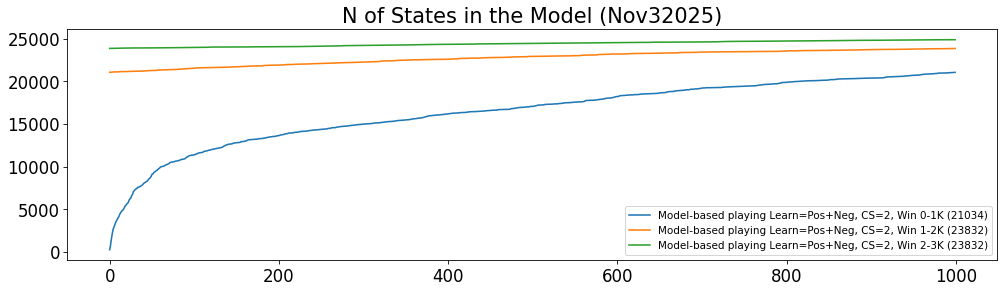

In [4]:
# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_251111 -o=model_Nov32025_PN_CS2_251111_2K -lm=2 -cs=2
score_avg=58.0; steps_avg=8682.0; lives_avg=0.7; lapse_avg="0:00:36.096524"; time="7:40:22.769614"
scoresPNCS2_2K = [19.0, 22.0, 59.0, 44.0, 56.0, 54.0, 37.0, 35.0, 11.0, 29.0, 48.0, 44.0, 66.0, 40.0, 55.0, 43.0, 54.0, 46.0, 7.0, 46.0, 53.0, 60.0, 19.0, 55.0, 71.0, 45.0, 65.0, 65.0, 48.0, 60.0, 58.0, 63.0, 64.0, 31.0, 63.0, 44.0, 61.0, 30.0, 45.0, 59.0, 33.0, 39.0, 57.0, 36.0, 50.0, 62.0, 48.0, 67.0, 46.0, 40.0, 65.0, 59.0, 41.0, 24.0, 25.0, 20.0, 67.0, 27.0, 45.0, 56.0, 17.0, 81.0, 47.0, 52.0, 31.0, 33.0, 37.0, 57.0, 51.0, 45.0, 48.0, 64.0, 32.0, 50.0, 43.0, 57.0, 57.0, 63.0, 35.0, 48.0, 38.0, 44.0, 55.0, 59.0, 39.0, 51.0, 48.0, 53.0, 31.0, 23.0, 51.0, 50.0, 82.0, 24.0, 44.0, 26.0, 25.0, 46.0, 30.0, 61.0, 30.0, 14.0, 13.0, 33.0, 20.0, 45.0, 44.0, 13.0, 13.0, 40.0, 25.0, 43.0, 46.0, 31.0, 17.0, 40.0, 44.0, 57.0, 32.0, 53.0, 25.0, 20.0, 41.0, 58.0, 81.0, 18.0, 44.0, 40.0, 59.0, 49.0, 34.0, 45.0, 13.0, 26.0, 25.0, 27.0, 55.0, 65.0, 28.0, 26.0, 62.0, 23.0, 56.0, 11.0, 64.0, 37.0, 65.0, 45.0, 56.0, 48.0, 30.0, 43.0, 44.0, 42.0, 39.0, 53.0, 34.0, 23.0, 84.0, 61.0, 47.0, 41.0, 57.0, 79.0, 35.0, 88.0, 43.0, 59.0, 48.0, 32.0, 33.0, 25.0, 47.0, 25.0, 47.0, 13.0, 61.0, 25.0, 49.0, 30.0, 30.0, 49.0, 22.0, 56.0, 46.0, 68.0, 50.0, 27.0, 37.0, 37.0, 28.0, 45.0, 23.0, 94.0, 25.0, 22.0, 45.0, 39.0, 35.0, 13.0, 43.0, 53.0, 56.0, 55.0, 56.0, 66.0, 62.0, 61.0, 25.0, 60.0, 41.0, 32.0, 41.0, 46.0, 56.0, 18.0, 50.0, 103.0, 39.0, 47.0, 60.0, 48.0, 28.0, 25.0, 62.0, 41.0, 77.0, 9.0, 43.0, 25.0, 45.0, 45.0, 68.0, 35.0, 58.0, 51.0, 57.0, 31.0, 55.0, 37.0, 59.0, 46.0, 25.0, 90.0, 42.0, 48.0, 44.0, 51.0, 43.0, 15.0, 41.0, 68.0, 35.0, 39.0, 54.0, 64.0, 19.0, 38.0, 50.0, 41.0, 35.0, 27.0, 34.0, 34.0, 35.0, 56.0, 25.0, 48.0, 48.0, 61.0, 57.0, 62.0, 60.0, 33.0, 37.0, 30.0, 30.0, 25.0, 83.0, 38.0, 38.0, 56.0, 34.0, 34.0, 35.0, 29.0, 28.0, 42.0, 36.0, 29.0, 11.0, 35.0, 42.0, 52.0, 36.0, 58.0, 25.0, 46.0, 31.0, 41.0, 64.0, 23.0, 49.0, 52.0, 27.0, 30.0, 66.0, 29.0, 12.0, 17.0, 55.0, 42.0, 44.0, 38.0, 25.0, 23.0, 25.0, 14.0, 36.0, 23.0, 23.0, 34.0, 69.0, 43.0, 68.0, 34.0, 41.0, 63.0, 17.0, 13.0, 14.0, 36.0, 38.0, 52.0, 51.0, 43.0, 86.0, 25.0, 53.0, 27.0, 55.0, 77.0, 11.0, 55.0, 89.0, 45.0, 64.0, 44.0, 32.0, 25.0, 25.0, 80.0, 11.0, 45.0, 85.0, 25.0, 42.0, 53.0, 43.0, 59.0, 40.0, 41.0, 48.0, 47.0, 37.0, 36.0, 63.0, 81.0, 78.0, 27.0, 41.0, 58.0, 55.0, 75.0, 37.0, 69.0, 70.0, 70.0, 70.0, 75.0, 28.0, 73.0, 82.0, 74.0, 46.0, 32.0, 61.0, 35.0, 25.0, 84.0, 79.0, 25.0, 73.0, 45.0, 62.0, 36.0, 45.0, 65.0, 77.0, 26.0, 43.0, 52.0, 34.0, 95.0, 94.0, 94.0, 61.0, 30.0, 25.0, 83.0, 50.0, 48.0, 77.0, 45.0, 26.0, 76.0, 42.0, 97.0, 39.0, 86.0, 49.0, 25.0, 27.0, 51.0, 39.0, 25.0, 13.0, 25.0, 25.0, 25.0, 31.0, 53.0, 83.0, 30.0, 25.0, 89.0, 75.0, 92.0, 46.0, 46.0, 55.0, 70.0, 62.0, 90.0, 75.0, 47.0, 52.0, 84.0, 34.0, 42.0, 72.0, 25.0, 52.0, 104.0, 84.0, 101.0, 61.0, 25.0, 73.0, 58.0, 43.0, 65.0, 75.0, 25.0, 31.0, 84.0, 77.0, 84.0, 84.0, 34.0, 28.0, 25.0, 79.0, 49.0, 80.0, 17.0, 25.0, 49.0, 46.0, 53.0, 42.0, 96.0, 67.0, 52.0, 46.0, 86.0, 52.0, 30.0, 37.0, 96.0, 50.0, 64.0, 25.0, 54.0, 91.0, 56.0, 89.0, 57.0, 25.0, 72.0, 93.0, 49.0, 92.0, 62.0, 72.0, 25.0, 88.0, 26.0, 25.0, 30.0, 61.0, 25.0, 23.0, 25.0, 71.0, 62.0, 63.0, 94.0, 67.0, 85.0, 84.0, 88.0, 65.0, 70.0, 84.0, 42.0, 76.0, 92.0, 42.0, 82.0, 47.0, 51.0, 47.0, 45.0, 30.0, 44.0, 25.0, 56.0, 80.0, 56.0, 25.0, 78.0, 60.0, 51.0, 92.0, 29.0, 47.0, 30.0, 98.0, 50.0, 37.0, 111.0, 31.0, 25.0, 89.0, 91.0, 64.0, 33.0, 268.0, 51.0, 26.0, 54.0, 37.0, 35.0, 25.0, 88.0, 25.0, 101.0, 57.0, 107.0, 41.0, 24.0, 82.0, 29.0, 25.0, 70.0, 99.0, 67.0, 27.0, 38.0, 54.0, 50.0, 43.0, 80.0, 64.0, 31.0, 45.0, 46.0, 37.0, 39.0, 49.0, 94.0, 46.0, 73.0, 47.0, 110.0, 70.0, 53.0, 25.0, 61.0, 67.0, 25.0, 25.0, 67.0, 26.0, 44.0, 75.0, 85.0, 107.0, 26.0, 61.0, 62.0, 51.0, 47.0, 53.0, 66.0, 90.0, 69.0, 88.0, 41.0, 79.0, 93.0, 39.0, 85.0, 35.0, 63.0, 85.0, 68.0, 75.0, 26.0, 90.0, 70.0, 25.0, 25.0, 89.0, 89.0, 52.0, 93.0, 80.0, 25.0, 99.0, 79.0, 92.0, 54.0, 95.0, 84.0, 25.0, 70.0, 15.0, 40.0, 83.0, 53.0, 61.0, 25.0, 43.0, 90.0, 92.0, 95.0, 25.0, 70.0, 81.0, 64.0, 25.0, 69.0, 25.0, 40.0, 65.0, 93.0, 68.0, 63.0, 25.0, 92.0, 88.0, 52.0, 88.0, 84.0, 84.0, 93.0, 25.0, 43.0, 25.0, 62.0, 74.0, 99.0, 41.0, 32.0, 94.0, 76.0, 15.0, 65.0, 111.0, 55.0, 43.0, 62.0, 72.0, 43.0, 58.0, 80.0, 88.0, 103.0, 43.0, 25.0, 48.0, 103.0, 69.0, 88.0, 29.0, 89.0, 80.0, 85.0, 63.0, 71.0, 100.0, 37.0, 84.0, 96.0, 25.0, 48.0, 59.0, 67.0, 99.0, 84.0, 55.0, 106.0, 36.0, 92.0, 79.0, 72.0, 67.0, 92.0, 84.0, 54.0, 88.0, 84.0, 88.0, 108.0, 80.0, 87.0, 112.0, 93.0, 38.0, 87.0, 26.0, 30.0, 58.0, 92.0, 59.0, 57.0, 51.0, 92.0, 25.0, 25.0, 81.0, 25.0, 45.0, 25.0, 90.0, 67.0, 89.0, 40.0, 25.0, 93.0, 79.0, 89.0, 88.0, 51.0, 92.0, 63.0, 25.0, 75.0, 87.0, 25.0, 88.0, 73.0, 30.0, 77.0, 107.0, 71.0, 55.0, 123.0, 88.0, 49.0, 67.0, 25.0, 30.0, 65.0, 93.0, 92.0, 54.0, 25.0, 70.0, 58.0, 90.0, 54.0, 295.0, 52.0, 56.0, 89.0, 67.0, 86.0, 295.0, 40.0, 35.0, 92.0, 62.0, 69.0, 57.0, 295.0, 51.0, 55.0, 55.0, 84.0, 25.0, 71.0, 89.0, 55.0, 96.0, 62.0, 55.0, 64.0, 123.0, 70.0, 92.0, 43.0, 99.0, 97.0, 85.0, 89.0, 80.0, 25.0, 54.0, 67.0, 63.0, 73.0, 43.0, 45.0, 101.0, 96.0, 67.0, 25.0, 63.0, 59.0, 92.0, 56.0, 84.0, 92.0, 49.0, 61.0, 35.0, 99.0, 25.0, 292.0, 84.0, 25.0, 25.0, 87.0, 46.0, 55.0, 88.0, 96.0, 89.0, 23.0, 96.0, 30.0, 67.0, 284.0, 87.0, 50.0, 53.0, 25.0, 97.0, 94.0, 75.0, 103.0, 50.0, 25.0, 48.0, 55.0, 82.0, 72.0, 45.0, 47.0, 93.0, 81.0, 51.0, 48.0, 92.0, 76.0, 25.0, 57.0, 284.0, 85.0, 93.0, 87.0, 87.0, 75.0, 55.0, 98.0, 53.0, 280.0, 57.0, 97.0, 295.0, 26.0, 108.0, 57.0, 81.0, 39.0, 53.0, 92.0, 65.0, 93.0, 25.0, 46.0, 295.0, 65.0, 76.0, 42.0, 50.0, 76.0, 56.0, 47.0, 58.0, 68.0, 90.0, 89.0, 85.0, 116.0, 111.0, 76.0, 92.0, 25.0, 88.0, 54.0, 88.0, 92.0, 44.0, 64.0, 111.0, 80.0, 48.0, 81.0, 49.0, 68.0, 111.0, 52.0, 96.0, 92.0, 68.0, 60.0, 101.0, 59.0, 61.0, 122.0, 77.0, 86.0, 87.0, 79.0, 84.0, 46.0, 25.0, 60.0, 93.0, 88.0, 51.0, 89.0, 36.0, 116.0, 71.0, 101.0, 25.0, 34.0, 25.0, 89.0, 93.0, 97.0, 91.0, 47.0, 59.0, 88.0, 92.0, 30.0, 95.0, 92.0, 80.0, 25.0, 53.0, 59.0, 48.0, 43.0, 59.0, 103.0, 101.0, 88.0, 60.0, 55.0, 87.0, 92.0, 54.0, 66.0]
stepssPNCS2_2K = [2812, 3551, 5911, 5102, 5599, 5678, 18000, 4051, 18000, 3681, 4625, 5112, 18000, 4894, 5791, 4616, 5111, 5506, 18000, 5379, 5973, 6126, 3220, 5791, 5964, 4582, 6400, 5764, 5056, 5585, 5320, 6087, 6239, 18000, 5916, 5102, 5340, 3582, 5011, 6080, 18000, 4312, 5463, 4682, 5170, 6129, 5030, 5999, 5098, 4435, 5608, 5851, 4617, 2952, 18000, 3559, 6024, 3647, 5153, 5303, 3017, 6147, 5557, 18000, 4125, 3958, 4294, 6033, 5776, 5246, 4625, 6191, 3748, 4700, 3686, 5256, 5612, 5940, 4394, 4625, 4971, 5059, 5193, 5770, 5128, 5585, 5826, 5346, 3868, 3208, 5097, 5560, 6345, 3188, 18000, 3669, 3778, 4640, 4589, 6135, 3994, 18000, 18000, 3859, 3417, 4851, 5102, 18000, 18000, 5186, 18000, 4980, 5024, 4402, 3062, 3998, 5744, 5608, 4247, 5522, 3560, 18000, 5021, 5727, 6742, 3226, 5102, 4397, 5740, 4697, 3924, 4572, 18000, 3216, 18000, 3651, 5834, 6294, 3534, 18000, 6627, 3698, 6029, 18000, 6021, 4342, 5625, 5234, 5154, 4812, 4442, 4930, 4996, 4558, 4614, 4848, 4068, 3042, 6710, 5490, 4758, 4213, 5895, 6352, 4719, 6737, 18000, 5913, 4745, 3847, 4454, 18000, 18000, 18000, 5284, 18000, 6013, 18000, 5026, 18000, 3557, 5095, 18000, 5956, 5250, 6076, 4444, 3838, 18000, 3984, 4012, 4776, 18000, 6534, 18000, 18000, 18000, 4733, 18000, 18000, 18000, 5974, 5501, 5634, 5148, 6348, 5422, 5889, 18000, 5179, 4358, 4116, 18000, 18000, 5830, 18000, 5324, 6336, 4749, 4193, 5961, 5129, 18000, 18000, 5517, 4412, 6911, 18000, 4847, 18000, 18000, 18000, 6194, 4056, 5814, 5556, 5863, 18000, 5656, 4321, 5905, 18000, 18000, 6428, 4618, 18000, 18000, 5247, 4774, 18000, 5169, 6126, 4360, 4924, 5488, 6191, 3230, 4357, 18000, 4420, 4881, 3895, 4323, 4844, 18000, 5843, 18000, 5039, 4914, 5891, 5871, 5896, 6151, 18000, 18000, 4387, 3705, 18000, 7151, 4938, 18000, 18000, 4687, 4835, 4044, 4286, 4230, 4872, 4622, 4052, 18000, 4537, 4715, 4948, 4181, 5506, 3370, 5131, 4601, 4719, 5458, 3933, 5331, 5104, 3406, 18000, 5740, 3890, 18000, 2848, 5693, 5002, 18000, 4724, 18000, 18000, 18000, 18000, 4440, 3934, 3393, 4361, 5351, 4212, 6168, 4736, 18000, 5834, 18000, 18000, 18000, 4472, 4946, 18000, 5096, 4422, 6288, 18000, 5026, 18000, 5642, 6575, 18000, 5097, 6419, 5013, 5338, 4677, 3812, 18000, 18000, 6411, 18000, 4826, 6724, 18000, 5487, 5814, 5062, 6050, 18000, 4371, 4930, 4817, 4759, 18000, 5834, 6891, 6756, 18000, 4413, 18000, 4744, 6276, 4394, 6190, 5686, 5693, 5871, 6268, 4182, 6738, 6808, 6557, 4909, 4049, 5416, 18000, 18000, 6363, 5993, 18000, 6296, 4731, 18000, 18000, 4661, 5811, 6443, 3898, 4542, 5274, 4939, 6745, 6405, 7249, 5516, 18000, 18000, 6462, 5279, 5045, 6386, 4916, 18000, 6334, 18000, 7252, 4295, 4872, 4833, 18000, 4220, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 5206, 6275, 18000, 18000, 6841, 6432, 6774, 5070, 5588, 5328, 5693, 5602, 7219, 5973, 4817, 5474, 6520, 4442, 4582, 18000, 18000, 18000, 6978, 6475, 6731, 6077, 18000, 6363, 5305, 4736, 5701, 6213, 18000, 4306, 6546, 6531, 6720, 6815, 4537, 4187, 18000, 6247, 5262, 6471, 18000, 18000, 5329, 4671, 4848, 4526, 6947, 5832, 5264, 4966, 6843, 5038, 18000, 3484, 6980, 5271, 5649, 18000, 4923, 7411, 5240, 6737, 5256, 18000, 6285, 7065, 4130, 6738, 18000, 6084, 18000, 6646, 4106, 18000, 18000, 5595, 18000, 18000, 18000, 18000, 5715, 18000, 7150, 18000, 6607, 6444, 6646, 5705, 5708, 6530, 18000, 6097, 6730, 4609, 6618, 4912, 5351, 4907, 5050, 18000, 4922, 18000, 5974, 6406, 5014, 18000, 6647, 5231, 5136, 6780, 18000, 5271, 18000, 7060, 4888, 4118, 7008, 18000, 18000, 6921, 6529, 6268, 18000, 7292, 5078, 18000, 5349, 4650, 18000, 18000, 6576, 18000, 7013, 5370, 6805, 4918, 18000, 6726, 18000, 18000, 5686, 6623, 18000, 18000, 18000, 5466, 18000, 4740, 6314, 5935, 4592, 5022, 5126, 4708, 4987, 5626, 7254, 4665, 6561, 5223, 7368, 5686, 5670, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 4565, 6080, 6395, 6722, 18000, 18000, 5715, 5441, 4942, 4848, 5875, 6356, 6229, 6647, 4987, 6354, 6930, 4167, 6468, 18000, 6155, 6522, 5231, 6085, 18000, 6354, 6673, 18000, 18000, 6814, 6852, 5136, 6979, 18000, 18000, 6729, 6202, 6598, 5229, 6514, 6444, 18000, 5693, 18000, 18000, 6326, 5263, 5744, 18000, 4848, 6366, 6730, 6573, 18000, 6216, 6498, 5653, 18000, 5164, 18000, 5087, 5539, 6930, 5280, 5718, 18000, 6772, 6648, 6024, 6683, 6444, 6552, 6995, 18000, 5083, 18000, 5715, 6313, 6745, 4602, 4046, 6485, 18000, 18000, 5642, 6844, 5507, 5106, 5359, 6473, 4615, 5410, 6320, 6646, 6687, 4927, 18000, 4803, 6856, 5788, 6646, 18000, 6768, 6379, 6592, 5718, 18000, 6957, 4728, 6440, 6757, 18000, 4935, 5575, 18000, 6747, 6550, 5096, 7069, 18000, 7278, 6481, 6441, 18000, 7138, 18000, 4910, 6646, 6226, 6654, 7105, 6379, 18000, 7236, 7051, 4014, 6468, 18000, 18000, 5277, 6568, 5698, 5411, 4884, 6730, 18000, 18000, 6508, 18000, 4595, 18000, 6354, 18000, 6636, 18000, 18000, 7031, 6564, 6624, 6444, 5093, 6673, 5718, 18000, 18000, 6468, 18000, 18000, 5674, 18000, 18000, 6722, 5659, 5096, 7189, 18000, 5246, 18000, 18000, 18000, 5559, 6930, 6772, 18000, 18000, 5932, 5016, 6354, 5197, 7980, 5187, 5573, 6526, 18000, 5516, 7980, 4348, 4592, 6572, 5504, 5759, 5403, 7980, 5391, 4821, 5096, 6548, 18000, 5846, 6526, 5096, 18000, 5359, 5096, 5895, 7380, 6023, 6780, 18000, 7351, 7263, 6263, 6828, 6379, 18000, 5283, 18000, 5527, 18000, 4931, 4500, 7042, 6666, 18000, 18000, 5858, 18000, 6772, 5024, 18000, 6772, 5266, 5215, 4592, 6796, 18000, 7894, 18000, 18000, 18000, 6468, 18000, 5096, 18000, 6598, 6832, 18000, 7405, 18000, 5517, 7656, 6468, 18000, 5233, 18000, 7184, 7032, 18000, 6897, 18000, 18000, 4627, 5171, 6781, 5770, 4630, 5069, 7003, 6464, 4878, 4778, 6772, 6452, 18000, 5422, 7741, 6634, 6995, 6472, 6468, 6234, 5306, 18000, 5450, 7530, 5415, 7263, 7980, 18000, 7054, 4949, 18000, 4564, 4856, 6730, 5559, 6930, 18000, 18000, 7980, 5512, 18000, 4715, 18000, 18000, 5678, 4877, 5135, 5866, 7016, 6636, 6612, 7117, 6844, 18000, 6772, 18000, 6626, 5068, 18000, 6772, 4967, 5423, 6844, 6387, 4442, 6697, 4970, 5896, 6844, 5212, 6599, 6568, 6229, 5231, 6905, 5400, 5690, 7092, 6510, 6900, 6191, 5821, 18000, 5050, 18000, 5231, 6937, 6676, 18000, 6851, 4521, 7260, 18000, 6991, 18000, 18000, 18000, 6636, 6930, 7260, 5850, 18000, 18000, 6442, 6772, 18000, 6768, 6730, 6046, 18000, 5283, 5176, 5136, 4266, 18000, 7244, 6941, 6676, 5558, 5096, 6472, 6568, 5738, 5286]
livessPNCS2_2K = [0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 1, 4, 0, 4, 0, 4, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 3, 2, 0, 2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 4, 0, 4, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 4, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 2, 0, 4, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 3, 0, 0, 1, 0, 0, 0, 4, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 4, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 4, 0, 1, 2, 4, 4, 4, 4, 4, 1, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 4, 0, 0, 4, 3, 0, 4, 3, 4, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 1, 4, 0, 0, 0, 2, 0, 0, 2, 0, 0, 3, 4, 0, 4, 0, 0, 0, 0, 4, 0, 2, 3, 0, 0, 2, 3, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 3, 4, 4, 3, 4, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 4, 4, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 4, 0, 3, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 4, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 4, 3, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 3, 0, 2, 0, 0, 0, 0, 1, 4, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 2, 4, 4, 0, 1, 0, 1, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 4, 0, 0, 1, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 4, 1, 4, 0, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesPNCS2_2K = [72, 29, 11, 6, 68, 17, 18, 26, 6, 17, 14, 28, 16, 28, 8, 14, 11, 12, 15, 14, 16, 23, 32, 25, 33, 9, 42, 38, 32, 44, 6, 15, 7, 12, 50, 41, 18, 46, 6, 27, 10, 37, 21, 39, 16, 51, 32, 20, 16, 24, 31, 11, 15, 36, 7, 12, 106, 17, 33, 37, 13, 22, 14, 23, 28, 40, 22, 31, 7, 10, 14, 22, 36, 45, 55, 35, 21, 19, 20, 4, 13, 66, 54, 26, 15, 21, 40, 51, 35, 80, 8, 19, 18, 8, 68, 29, 30, 23, 38, 29, 8, 32, 6, 55, 10, 50, 14, 7, 6, 55, 33, 17, 20, 16, 55, 28, 52, 51, 13, 16, 13, 16, 44, 11, 58, 34, 15, 12, 14, 6, 33, 11, 6, 73, 5, 44, 24, 18, 16, 59, 26, 17, 31, 8, 23, 31, 13, 20, 12, 8, 34, 46, 16, 53, 18, 43, 7, 4, 19, 18, 14, 24, 37, 13, 24, 31, 39, 14, 32, 59, 19, 6, 15, 8, 12, 5, 21, 5, 12, 11, 29, 16, 60, 51, 10, 45, 41, 35, 9, 29, 34, 9, 20, 17, 5, 11, 10, 6, 14, 5, 8, 17, 12, 13, 34, 32, 19, 63, 5, 87, 21, 6, 21, 14, 25, 7, 21, 30, 23, 108, 14, 19, 15, 7, 22, 7, 27, 9, 36, 5, 6, 9, 29, 12, 25, 9, 18, 12, 34, 30, 9, 11, 5, 9, 14, 8, 19, 13, 18, 13, 77, 14, 43, 22, 7, 30, 49, 25, 26, 5, 26, 15, 33, 19, 13, 25, 5, 9, 15, 15, 20, 59, 25, 28, 6, 25, 25, 5, 30, 41, 39, 16, 17, 50, 43, 37, 25, 28, 10, 57, 7543, 11, 3, 35, 26, 32, 79, 27, 57, 53, 8, 80, 13, 13, 17, 12, 36, 14, 54, 39, 27, 10, 6, 40, 6, 9, 5, 6, 6, 27, 60, 27, 23, 43, 31, 52, 8, 18, 22, 9, 8, 26, 58, 11, 14, 37, 26, 5, 10, 173, 21, 43, 7, 8, 9, 18, 9, 16, 123, 5, 7, 17, 7, 19, 25, 7, 32, 29, 23, 37, 12, 22, 17, 23, 36, 18, 14, 47, 10, 56, 4, 21, 16, 8, 51, 13, 14, 8, 12, 10, 29, 16, 19, 29, 7, 26, 17, 8, 5, 30, 24, 5, 11, 24, 11, 16, 15, 8, 19, 12, 13, 41, 31, 14, 36, 36, 16, 17, 34, 44, 24, 10, 7, 52, 59, 14, 11, 5, 16, 31, 34, 6, 8, 14, 55, 5, 5, 6, 7, 5, 12, 12, 7, 12, 5, 10, 22, 10, 27, 120, 21, 6, 25, 13, 19, 16, 16, 56, 45, 46, 11, 6, 38, 21, 8, 50, 27, 10, 12, 17, 11, 6, 27, 5, 20, 13, 30, 34, 26, 14, 41, 13, 25, 21, 17, 32, 5, 25, 12, 15, 45, 26, 15, 22, 32, 20, 54, 6, 10, 29, 31, 26, 7, 14, 26, 72, 61, 32, 5, 11, 13, 17, 6, 7, 8, 6, 4, 14, 5, 7, 4, 5, 29, 5, 20, 3, 12, 39, 9, 29, 19, 9, 13, 17, 20, 8, 35, 6, 31, 15, 8, 38, 10, 13, 12, 17, 5, 19, 20, 9, 5, 9, 15, 40, 5, 21, 72, 8, 20, 15, 17, 33, 35, 7, 5, 21, 57, 21, 38, 32, 23, 16, 23, 9, 5, 9, 5, 16, 20, 19, 25, 19, 4, 20, 9, 18, 17, 82, 11, 20, 35, 23, 7, 10, 12, 14, 13, 140, 21, 9, 11, 49, 25, 38, 10, 11, 5, 12, 6, 54, 6, 5, 6, 5, 6, 6, 9, 31, 19, 5, 28, 3, 16, 32, 12, 93, 15, 23, 4, 35, 12, 6, 18, 4, 21, 53, 15, 19, 6, 5, 9, 24, 7, 5, 16, 11, 22, 11, 13, 5, 5, 8, 14, 47, 20, 16, 6, 10, 12, 15, 18, 35, 11, 5, 27, 14, 4, 5, 6, 42, 9, 33, 5, 8, 5, 8, 34, 5, 39, 38, 6, 4, 7, 82, 32, 15, 7, 8, 6, 80, 6, 2, 14, 6, 21, 15, 9, 34, 9, 14, 6, 28, 10, 13, 31, 27, 25, 34, 9, 26, 22, 6, 27, 16, 22, 5, 7, 13, 14, 15, 17, 13, 35, 13, 15, 21, 5, 33, 17, 6, 4, 15, 10, 8, 9, 7, 21, 41, 7, 19, 11, 8, 10, 20, 9, 17, 7, 6, 19, 5, 14, 7, 5, 7, 15, 10, 23, 18, 3, 10, 5, 5, 8, 5, 29, 5, 7, 5, 4, 10, 6, 29, 34, 15, 10, 24, 10, 33, 8, 15, 5, 6, 8, 30, 22, 9, 9, 35, 4, 8, 9, 10, 5, 5, 6, 8, 3, 10, 17, 5, 42, 27, 18, 9, 35, 5, 23, 13, 6, 46, 18, 21, 34, 4, 26, 9, 9, 4, 24, 16, 7, 6, 5, 26, 8, 9, 10, 11, 9, 37, 16, 12, 4, 27, 9, 3, 11, 3, 6, 6, 28, 5, 6, 10, 14, 30, 10, 17, 19, 5, 39, 8, 5, 4, 6, 6, 18, 23, 17, 12, 5, 20, 7, 6, 5, 3, 11, 5, 7, 9, 7, 12, 20, 14, 22, 17, 3, 7, 18, 7, 3, 16, 12, 6, 11, 6, 11, 20, 7, 55, 19, 39, 7, 11, 16, 8, 8, 21, 7, 26, 12, 7, 7, 6, 4, 103, 30, 12, 15, 26, 32, 3, 16, 25, 15, 11, 6, 14, 11, 9, 13, 6, 5, 11, 14, 8, 5, 8, 9, 6, 35, 17, 9, 16, 14, 3, 9, 22, 8, 6, 6, 7, 13, 37, 6, 4, 28, 31, 8, 19, 28, 45, 36, 26, 7, 35, 18, 11, 48, 3, 7, 16, 27, 17, 23, 4, 21, 24, 7, 40, 5, 4, 6, 20, 47, 19, 23, 3, 6, 11, 6, 42, 6, 4, 3, 5, 29, 7, 31, 10, 5, 7, 10, 4, 32, 5, 36, 9, 20, 16, 8, 16, 16, 12, 34, 4, 5, 5, 53, 36]
statesPNCS2_2K = [21048, 21050, 21052, 21053, 21081, 21085, 21086, 21088, 21089, 21090, 21090, 21099, 21103, 21122, 21122, 21124, 21124, 21124, 21125, 21125, 21126, 21129, 21142, 21146, 21148, 21149, 21152, 21154, 21155, 21159, 21161, 21168, 21170, 21172, 21175, 21179, 21181, 21188, 21190, 21191, 21192, 21205, 21205, 21209, 21219, 21234, 21241, 21243, 21248, 21249, 21250, 21251, 21254, 21256, 21258, 21261, 21294, 21301, 21309, 21314, 21315, 21318, 21321, 21324, 21333, 21336, 21338, 21339, 21341, 21341, 21342, 21350, 21351, 21357, 21365, 21371, 21371, 21373, 21379, 21379, 21379, 21402, 21410, 21412, 21414, 21415, 21417, 21445, 21450, 21468, 21468, 21471, 21471, 21474, 21490, 21491, 21494, 21497, 21502, 21521, 21522, 21538, 21538, 21556, 21557, 21560, 21562, 21562, 21562, 21571, 21577, 21580, 21580, 21582, 21584, 21586, 21589, 21599, 21601, 21601, 21603, 21603, 21604, 21606, 21610, 21611, 21613, 21615, 21618, 21618, 21620, 21620, 21620, 21626, 21628, 21634, 21634, 21635, 21636, 21650, 21653, 21658, 21663, 21664, 21665, 21671, 21671, 21672, 21679, 21679, 21681, 21695, 21696, 21700, 21703, 21705, 21707, 21707, 21711, 21714, 21718, 21720, 21734, 21737, 21746, 21750, 21765, 21766, 21770, 21779, 21780, 21781, 21786, 21787, 21787, 21787, 21789, 21789, 21792, 21792, 21793, 21796, 21830, 21845, 21847, 21851, 21855, 21868, 21869, 21871, 21876, 21878, 21881, 21882, 21882, 21882, 21883, 21884, 21884, 21884, 21884, 21887, 21888, 21889, 21893, 21898, 21898, 21935, 21935, 21949, 21950, 21950, 21952, 21954, 21955, 21956, 21957, 21963, 21966, 21983, 21985, 21988, 21989, 21991, 21992, 21993, 21994, 21997, 22002, 22003, 22003, 22005, 22008, 22010, 22011, 22014, 22021, 22023, 22040, 22044, 22046, 22047, 22047, 22047, 22047, 22049, 22051, 22051, 22051, 22052, 22079, 22081, 22085, 22086, 22087, 22089, 22097, 22102, 22112, 22113, 22121, 22124, 22129, 22132, 22132, 22141, 22141, 22141, 22142, 22144, 22146, 22151, 22156, 22160, 22160, 22161, 22168, 22168, 22173, 22175, 22179, 22179, 22181, 22183, 22187, 22189, 22190, 22193, 22193, 22201, 22204, 22205, 22205, 22211, 22215, 22220, 22229, 22229, 22233, 22250, 22252, 22257, 22257, 22258, 22258, 22258, 22262, 22263, 22281, 22286, 22293, 22293, 22294, 22295, 22296, 22296, 22296, 22296, 22297, 22302, 22342, 22350, 22354, 22358, 22367, 22376, 22376, 22379, 22383, 22383, 22383, 22385, 22389, 22390, 22393, 22401, 22405, 22405, 22405, 22432, 22436, 22444, 22445, 22446, 22447, 22448, 22448, 22451, 22473, 22475, 22475, 22475, 22477, 22477, 22480, 22480, 22482, 22489, 22493, 22494, 22497, 22498, 22499, 22503, 22505, 22507, 22508, 22513, 22515, 22519, 22519, 22522, 22524, 22524, 22532, 22532, 22532, 22537, 22541, 22542, 22543, 22544, 22545, 22546, 22554, 22554, 22554, 22554, 22554, 22555, 22557, 22557, 22557, 22560, 22561, 22563, 22565, 22567, 22567, 22567, 22568, 22572, 22583, 22583, 22598, 22599, 22600, 22601, 22610, 22618, 22620, 22621, 22624, 22640, 22661, 22662, 22662, 22662, 22666, 22669, 22675, 22676, 22677, 22680, 22697, 22697, 22697, 22697, 22697, 22697, 22698, 22698, 22698, 22698, 22698, 22699, 22699, 22700, 22703, 22734, 22739, 22740, 22740, 22744, 22745, 22746, 22748, 22753, 22764, 22764, 22765, 22765, 22766, 22769, 22769, 22772, 22777, 22777, 22778, 22779, 22779, 22779, 22782, 22783, 22787, 22787, 22791, 22800, 22801, 22803, 22809, 22811, 22811, 22816, 22817, 22832, 22832, 22839, 22842, 22842, 22843, 22845, 22846, 22849, 22853, 22855, 22861, 22862, 22862, 22862, 22867, 22870, 22871, 22871, 22874, 22896, 22902, 22905, 22905, 22907, 22907, 22909, 22910, 22911, 22913, 22913, 22913, 22914, 22914, 22914, 22914, 22914, 22926, 22926, 22928, 22928, 22928, 22930, 22932, 22934, 22936, 22936, 22936, 22940, 22941, 22942, 22942, 22950, 22952, 22952, 22952, 22959, 22959, 22960, 22960, 22961, 22961, 22962, 22962, 22964, 22964, 22965, 22965, 22967, 22967, 22967, 22984, 22985, 22989, 22990, 22991, 22992, 22996, 22996, 22996, 22997, 23013, 23016, 23024, 23049, 23051, 23054, 23059, 23060, 23060, 23061, 23061, 23062, 23064, 23065, 23071, 23074, 23074, 23076, 23076, 23077, 23077, 23122, 23124, 23127, 23134, 23135, 23135, 23135, 23136, 23137, 23139, 23149, 23153, 23156, 23156, 23167, 23169, 23179, 23179, 23183, 23183, 23183, 23184, 23187, 23187, 23187, 23187, 23187, 23187, 23189, 23190, 23195, 23196, 23196, 23203, 23203, 23205, 23212, 23215, 23225, 23226, 23234, 23235, 23239, 23240, 23241, 23242, 23242, 23243, 23246, 23247, 23248, 23249, 23249, 23250, 23251, 23252, 23252, 23256, 23257, 23258, 23261, 23261, 23261, 23261, 23261, 23263, 23263, 23264, 23265, 23265, 23265, 23266, 23269, 23271, 23281, 23286, 23286, 23302, 23302, 23302, 23302, 23302, 23303, 23304, 23311, 23311, 23311, 23311, 23312, 23317, 23317, 23320, 23325, 23325, 23325, 23325, 23354, 23356, 23359, 23359, 23359, 23359, 23366, 23367, 23367, 23367, 23368, 23369, 23370, 23370, 23374, 23374, 23376, 23377, 23377, 23378, 23378, 23382, 23384, 23385, 23406, 23406, 23407, 23408, 23408, 23412, 23415, 23415, 23415, 23415, 23415, 23420, 23423, 23426, 23426, 23428, 23430, 23433, 23433, 23433, 23435, 23437, 23437, 23437, 23437, 23437, 23438, 23438, 23439, 23440, 23443, 23443, 23447, 23447, 23447, 23447, 23447, 23447, 23449, 23449, 23449, 23450, 23452, 23454, 23454, 23454, 23454, 23454, 23454, 23458, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23467, 23467, 23467, 23467, 23467, 23468, 23468, 23472, 23475, 23476, 23476, 23477, 23478, 23479, 23479, 23480, 23480, 23481, 23481, 23483, 23487, 23487, 23487, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23492, 23494, 23494, 23497, 23498, 23500, 23502, 23520, 23521, 23523, 23523, 23523, 23525, 23540, 23542, 23557, 23557, 23559, 23560, 23560, 23561, 23562, 23563, 23563, 23564, 23564, 23564, 23575, 23575, 23576, 23578, 23579, 23588, 23588, 23590, 23591, 23595, 23595, 23596, 23597, 23597, 23597, 23597, 23597, 23597, 23598, 23599, 23600, 23601, 23603, 23605, 23608, 23608, 23609, 23610, 23610, 23610, 23610, 23610, 23611, 23613, 23617, 23617, 23617, 23621, 23621, 23621, 23621, 23621, 23622, 23622, 23622, 23623, 23623, 23623, 23623, 23627, 23630, 23631, 23631, 23631, 23634, 23636, 23636, 23637, 23637, 23637, 23639, 23639, 23643, 23644, 23645, 23651, 23653, 23654, 23665, 23665, 23665, 23667, 23669, 23673, 23674, 23680, 23682, 23682, 23682, 23682, 23682, 23692, 23693, 23693, 23694, 23697, 23699, 23699, 23711, 23711, 23711, 23711, 23711, 23712, 23713, 23713, 23713, 23713, 23713, 23714, 23720, 23720, 23720, 23720, 23721, 23721, 23725, 23726, 23726, 23726, 23728, 23728, 23729, 23730, 23730, 23730, 23730, 23730, 23730, 23739, 23739, 23739, 23740, 23742, 23742, 23744, 23744, 23756, 23757, 23759, 23761, 23762, 23763, 23763, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23769, 23769, 23769, 23771, 23776, 23777, 23777, 23777, 23779, 23791, 23791, 23792, 23793, 23793, 23793, 23793, 23797, 23797, 23797, 23797, 23797, 23800, 23800, 23801, 23801, 23801, 23801, 23801, 23801, 23803, 23803, 23807, 23808, 23810, 23811, 23811, 23813, 23815, 23815, 23821, 23821, 23821, 23821, 23829, 23832]

# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_251111_2K -o=model_Nov32025_PN_CS2_251111_3K -lm=2 -cs=2
scoresPNCS2_3K = [18.0, 66.0, 49.0, 92.0, 66.0, 36.0, 93.0, 42.0, 68.0, 83.0, 100.0, 60.0, 39.0, 86.0, 25.0, 30.0, 88.0, 84.0, 92.0, 66.0, 25.0, 81.0, 30.0, 118.0, 102.0, 105.0, 93.0, 25.0, 301.0, 56.0, 80.0, 64.0, 92.0, 94.0, 107.0, 67.0, 106.0, 65.0, 26.0, 50.0, 59.0, 115.0, 93.0, 30.0, 26.0, 106.0, 85.0, 92.0, 92.0, 88.0, 21.0, 55.0, 80.0, 66.0, 88.0, 113.0, 92.0, 25.0, 39.0, 25.0, 76.0, 85.0, 105.0, 122.0, 52.0, 68.0, 89.0, 50.0, 88.0, 54.0, 88.0, 57.0, 88.0, 57.0, 62.0, 52.0, 26.0, 92.0, 92.0, 74.0, 85.0, 30.0, 117.0, 25.0, 57.0, 25.0, 25.0, 105.0, 69.0, 55.0, 25.0, 101.0, 26.0, 106.0, 88.0, 307.0, 93.0, 107.0, 72.0, 307.0, 40.0, 68.0, 25.0, 100.0, 55.0, 67.0, 108.0, 105.0, 68.0, 63.0, 26.0, 92.0, 65.0, 43.0, 96.0, 25.0, 117.0, 69.0, 29.0, 93.0, 29.0, 44.0, 65.0, 21.0, 101.0, 88.0, 122.0, 43.0, 94.0, 88.0, 49.0, 92.0, 55.0, 92.0, 129.0, 78.0, 97.0, 42.0, 26.0, 97.0, 89.0, 92.0, 88.0, 25.0, 62.0, 114.0, 104.0, 25.0, 107.0, 101.0, 67.0, 97.0, 84.0, 125.0, 76.0, 61.0, 81.0, 53.0, 96.0, 13.0, 65.0, 25.0, 25.0, 89.0, 110.0, 40.0, 46.0, 75.0, 67.0, 133.0, 25.0, 49.0, 100.0, 93.0, 88.0, 64.0, 109.0, 84.0, 92.0, 89.0, 27.0, 94.0, 26.0, 102.0, 25.0, 55.0, 67.0, 59.0, 92.0, 89.0, 72.0, 49.0, 66.0, 67.0, 75.0, 47.0, 101.0, 88.0, 91.0, 25.0, 92.0, 90.0, 62.0, 101.0, 66.0, 111.0, 94.0, 79.0, 76.0, 61.0, 65.0, 39.0, 104.0, 97.0, 100.0, 30.0, 92.0, 92.0, 25.0, 89.0, 30.0, 93.0, 95.0, 111.0, 39.0, 45.0, 93.0, 65.0, 67.0, 101.0, 92.0, 26.0, 110.0, 25.0, 55.0, 47.0, 26.0, 91.0, 25.0, 83.0, 111.0, 48.0, 140.0, 81.0, 71.0, 100.0, 76.0, 88.0, 50.0, 97.0, 43.0, 116.0, 82.0, 92.0, 92.0, 104.0, 92.0, 77.0, 25.0, 25.0, 92.0, 96.0, 102.0, 35.0, 26.0, 39.0, 43.0, 30.0, 94.0, 54.0, 72.0, 92.0, 75.0, 25.0, 67.0, 13.0, 52.0, 25.0, 41.0, 92.0, 25.0, 67.0, 92.0, 104.0, 76.0, 110.0, 98.0, 48.0, 84.0, 25.0, 13.0, 26.0, 30.0, 26.0, 88.0, 93.0, 25.0, 64.0, 68.0, 76.0, 79.0, 49.0, 76.0, 88.0, 25.0, 55.0, 43.0, 43.0, 71.0, 25.0, 80.0, 46.0, 112.0, 109.0, 25.0, 84.0, 92.0, 49.0, 88.0, 92.0, 25.0, 92.0, 49.0, 25.0, 67.0, 44.0, 41.0, 135.0, 55.0, 25.0, 30.0, 101.0, 101.0, 36.0, 97.0, 59.0, 40.0, 88.0, 76.0, 61.0, 110.0, 67.0, 49.0, 109.0, 114.0, 97.0, 105.0, 92.0, 96.0, 54.0, 92.0, 120.0, 108.0, 68.0, 110.0, 92.0, 92.0, 62.0, 48.0, 105.0, 76.0, 49.0, 78.0, 96.0, 42.0, 25.0, 96.0, 46.0, 92.0, 72.0, 97.0, 115.0, 92.0, 44.0, 92.0, 74.0, 107.0, 94.0, 88.0, 101.0, 67.0, 38.0, 21.0, 93.0, 91.0, 25.0, 92.0, 32.0, 51.0, 76.0, 26.0, 101.0, 25.0, 93.0, 125.0, 49.0, 69.0, 112.0, 84.0, 109.0, 25.0, 106.0, 25.0, 92.0, 68.0, 50.0, 25.0, 32.0, 45.0, 97.0, 93.0, 92.0, 92.0, 60.0, 105.0, 96.0, 67.0, 84.0, 52.0, 43.0, 108.0, 62.0, 26.0, 84.0, 93.0, 80.0, 78.0, 31.0, 100.0, 35.0, 96.0, 85.0, 93.0, 72.0, 51.0, 40.0, 106.0, 25.0, 92.0, 83.0, 62.0, 30.0, 100.0, 84.0, 85.0, 25.0, 54.0, 38.0, 26.0, 96.0, 88.0, 25.0, 88.0, 88.0, 49.0, 91.0, 48.0, 97.0, 92.0, 66.0, 58.0, 44.0, 93.0, 25.0, 69.0, 98.0, 55.0, 97.0, 92.0, 100.0, 88.0, 60.0, 78.0, 144.0, 101.0, 91.0, 60.0, 57.0, 41.0, 61.0, 40.0, 107.0, 30.0, 99.0, 92.0, 91.0, 30.0, 25.0, 101.0, 62.0, 92.0, 63.0, 25.0, 60.0, 35.0, 79.0, 87.0, 92.0, 96.0, 13.0, 66.0, 50.0, 36.0, 53.0, 92.0, 92.0, 71.0, 101.0, 88.0, 13.0, 75.0, 110.0, 92.0, 25.0, 87.0, 92.0, 31.0, 52.0, 25.0, 99.0, 92.0, 84.0, 88.0, 113.0, 50.0, 105.0, 65.0, 108.0, 81.0, 79.0, 92.0, 71.0, 45.0, 88.0, 77.0, 25.0, 111.0, 85.0, 93.0, 88.0, 102.0, 109.0, 88.0, 92.0, 30.0, 101.0, 118.0, 103.0, 62.0, 102.0, 88.0, 26.0, 115.0, 25.0, 92.0, 92.0, 70.0, 88.0, 84.0, 37.0, 64.0, 92.0, 25.0, 110.0, 26.0, 126.0, 30.0, 77.0, 88.0, 84.0, 110.0, 76.0, 67.0, 25.0, 126.0, 96.0, 63.0, 84.0, 92.0, 96.0, 88.0, 92.0, 59.0, 78.0, 90.0, 92.0, 67.0, 26.0, 124.0, 97.0, 73.0, 25.0, 84.0, 73.0, 97.0, 113.0, 112.0, 64.0, 89.0, 48.0, 76.0, 92.0, 35.0, 55.0, 74.0, 25.0, 30.0, 34.0, 25.0, 73.0, 26.0, 97.0, 89.0, 40.0, 76.0, 97.0, 25.0, 50.0, 32.0, 39.0, 67.0, 92.0, 94.0, 80.0, 80.0, 92.0, 44.0, 92.0, 92.0, 18.0, 50.0, 93.0, 88.0, 76.0, 93.0, 88.0, 101.0, 93.0, 25.0, 125.0, 55.0, 76.0, 88.0, 92.0, 96.0, 30.0, 92.0, 54.0, 35.0, 124.0, 55.0, 53.0, 25.0, 79.0, 41.0, 13.0, 101.0, 96.0, 49.0, 84.0, 115.0, 55.0, 25.0, 26.0, 90.0, 56.0, 25.0, 76.0, 56.0, 36.0, 25.0, 25.0, 88.0, 55.0, 21.0, 112.0, 92.0, 49.0, 84.0, 49.0, 113.0, 71.0, 25.0, 75.0, 78.0, 56.0, 71.0, 25.0, 101.0, 43.0, 49.0, 49.0, 51.0, 66.0, 93.0, 25.0, 25.0, 53.0, 30.0, 45.0, 85.0, 84.0, 25.0, 67.0, 92.0, 93.0, 100.0, 96.0, 80.0, 25.0, 87.0, 110.0, 94.0, 52.0, 80.0, 97.0, 53.0, 97.0, 31.0, 65.0, 96.0, 109.0, 60.0, 100.0, 30.0, 111.0, 94.0, 47.0, 92.0, 92.0, 46.0, 25.0, 96.0, 46.0, 101.0, 98.0, 101.0, 25.0, 42.0, 85.0, 125.0, 92.0, 74.0, 25.0, 39.0, 100.0, 105.0, 25.0, 101.0, 78.0, 25.0, 89.0, 93.0, 26.0, 73.0, 111.0, 96.0, 100.0, 122.0, 46.0, 89.0, 128.0, 60.0, 113.0, 94.0, 115.0, 97.0, 61.0, 109.0, 154.0, 55.0, 54.0, 100.0, 131.0, 24.0, 52.0, 44.0, 100.0, 115.0, 93.0, 66.0, 66.0, 93.0, 134.0, 66.0, 57.0, 49.0, 84.0, 30.0, 88.0, 118.0, 97.0, 52.0, 25.0, 25.0, 92.0, 92.0, 103.0, 86.0, 88.0, 65.0, 92.0, 93.0, 61.0, 88.0, 59.0, 108.0, 25.0, 36.0, 68.0, 92.0, 124.0, 97.0, 92.0, 25.0, 45.0, 92.0, 57.0, 96.0, 121.0, 92.0, 25.0, 93.0, 92.0, 67.0, 44.0, 49.0, 92.0, 52.0, 57.0, 97.0, 93.0, 25.0, 56.0, 84.0, 31.0, 88.0, 88.0, 73.0, 92.0, 80.0, 93.0, 118.0, 70.0, 92.0, 44.0, 101.0, 26.0, 21.0, 18.0, 51.0, 56.0, 153.0, 132.0, 100.0, 26.0, 76.0, 96.0, 96.0, 60.0, 65.0, 76.0, 65.0, 92.0, 71.0, 82.0, 93.0, 92.0, 106.0, 120.0, 56.0, 50.0, 97.0, 84.0, 88.0, 140.0, 92.0, 64.0, 92.0, 108.0, 106.0, 92.0, 69.0, 36.0, 25.0, 25.0, 42.0, 76.0, 97.0, 92.0, 67.0, 92.0, 126.0, 92.0, 132.0, 120.0, 100.0, 96.0, 107.0, 92.0, 51.0, 101.0, 26.0, 25.0, 108.0, 92.0, 64.0, 92.0, 25.0, 97.0, 78.0, 93.0, 92.0, 76.0, 25.0, 55.0, 55.0, 150.0, 25.0, 76.0, 25.0, 94.0, 100.0, 92.0, 56.0, 96.0, 144.0, 93.0, 139.0, 29.0, 107.0, 97.0, 97.0, 109.0, 140.0, 120.0, 25.0, 25.0, 31.0, 92.0, 133.0, 59.0, 144.0, 57.0, 48.0, 97.0, 70.0, 41.0, 44.0, 76.0, 22.0, 115.0, 117.0, 107.0, 56.0, 67.0, 109.0, 92.0, 67.0, 61.0, 101.0, 92.0, 76.0, 53.0, 93.0, 53.0, 61.0, 92.0, 120.0, 111.0, 91.0, 101.0, 124.0, 53.0, 43.0, 101.0, 88.0, 96.0, 129.0, 116.0, 42.0, 35.0, 62.0, 52.0, 25.0, 69.0, 97.0, 88.0, 49.0, 92.0, 56.0, 16.0, 30.0, 87.0, 107.0, 124.0, 77.0, 106.0, 68.0, 100.0]
stepssPNCS2_3K = [2767, 5383, 18000, 6774, 6145, 4472, 6626, 4711, 18000, 5640, 6519, 5444, 4924, 6900, 18000, 18000, 6676, 5833, 6772, 5666, 18000, 6772, 18000, 6876, 7189, 7030, 6930, 18000, 8266, 5744, 6424, 5693, 6572, 6935, 6726, 18000, 7199, 5791, 18000, 5565, 4834, 7059, 6938, 18000, 18000, 7468, 6566, 6568, 6568, 18000, 18000, 5096, 6332, 5755, 6761, 7110, 6568, 18000, 18000, 18000, 18000, 6625, 7010, 7092, 5394, 5531, 6868, 5421, 6223, 5347, 6787, 5383, 6650, 5367, 5203, 5537, 18000, 6864, 6730, 6650, 6701, 18000, 7416, 18000, 5514, 18000, 18000, 7030, 6330, 5045, 18000, 6750, 18000, 7472, 6446, 8172, 7051, 6722, 6251, 8168, 5385, 5912, 18000, 6807, 5582, 18000, 6371, 6864, 5713, 5373, 18000, 6446, 6047, 4268, 6662, 18000, 7168, 5238, 18000, 6866, 18000, 4765, 5574, 18000, 18000, 6646, 6909, 18000, 6931, 6684, 4994, 6568, 5467, 6653, 7086, 7043, 6747, 5023, 18000, 7263, 6636, 6772, 5750, 18000, 5794, 7161, 6810, 18000, 6722, 6905, 18000, 7263, 18000, 6948, 18000, 5514, 18000, 5005, 6598, 18000, 5559, 18000, 18000, 5303, 7325, 5027, 5051, 6138, 6036, 7076, 18000, 5602, 6722, 7051, 6442, 5782, 7123, 18000, 6772, 6636, 3913, 6913, 18000, 6947, 18000, 5096, 18000, 5733, 6784, 6642, 6060, 5003, 5538, 18000, 6489, 5614, 18000, 5750, 6450, 18000, 6572, 6965, 5848, 6991, 5804, 6844, 6983, 18000, 18000, 5621, 5559, 4647, 18000, 6990, 6813, 18000, 6568, 6772, 18000, 18000, 18000, 6625, 6315, 6844, 4826, 4719, 6700, 5383, 18000, 6750, 6772, 18000, 7325, 18000, 5851, 5039, 18000, 7305, 18000, 7114, 6844, 18000, 7826, 5998, 5207, 6682, 6584, 6646, 5668, 7263, 4700, 7125, 6624, 6738, 6772, 6742, 6645, 6505, 18000, 18000, 6772, 6943, 7044, 18000, 18000, 18000, 18000, 18000, 7055, 5363, 4710, 6446, 6133, 18000, 5478, 18000, 5454, 18000, 5560, 6568, 18000, 18000, 6730, 18000, 18000, 7739, 6884, 5015, 18000, 18000, 18000, 3828, 18000, 18000, 6648, 6930, 18000, 4856, 5837, 6160, 6967, 5631, 6284, 6442, 18000, 5636, 4896, 18000, 5745, 18000, 6379, 18000, 7143, 5685, 18000, 6226, 6772, 18000, 18000, 6772, 18000, 18000, 5115, 18000, 5478, 18000, 5031, 7412, 5500, 18000, 18000, 6946, 7013, 4321, 6751, 5369, 18000, 6646, 18000, 5710, 7325, 18000, 5337, 6876, 7162, 7256, 6036, 6772, 6840, 5133, 6772, 7191, 7063, 5020, 7134, 6730, 6772, 5758, 5131, 6856, 18000, 5452, 6627, 6947, 18000, 18000, 6509, 5067, 6628, 5670, 7263, 6904, 6702, 18000, 6730, 5938, 6601, 6931, 18000, 6811, 5897, 18000, 18000, 6930, 7185, 18000, 6662, 18000, 5529, 6031, 18000, 6887, 18000, 6875, 7332, 5159, 5260, 7143, 18000, 18000, 18000, 6080, 18000, 6772, 5994, 18000, 18000, 4533, 5311, 7256, 6707, 6772, 6730, 5536, 7001, 6629, 18000, 18000, 18000, 5501, 7320, 5873, 18000, 6764, 6625, 6379, 6646, 18000, 6636, 18000, 6943, 6643, 6948, 6363, 5535, 4974, 7139, 18000, 18000, 5836, 5790, 18000, 6810, 18000, 6622, 18000, 5156, 4562, 18000, 6799, 6646, 18000, 6648, 6646, 4842, 18000, 18000, 6990, 6772, 6080, 5776, 4478, 6865, 18000, 5436, 6909, 5169, 7263, 6738, 6638, 18000, 5506, 5945, 7888, 6807, 5559, 5350, 5393, 4747, 5710, 18000, 7304, 18000, 5692, 6738, 7362, 18000, 18000, 6893, 5941, 6772, 5508, 18000, 5939, 18000, 6796, 5875, 6772, 6602, 18000, 5743, 4888, 4370, 5071, 5584, 6772, 18000, 6807, 18000, 18000, 6081, 7329, 6772, 18000, 7079, 6772, 18000, 5472, 18000, 5804, 6738, 18000, 6646, 7287, 5600, 7001, 5827, 6209, 6464, 6570, 6568, 6117, 5261, 6442, 6504, 18000, 6786, 6622, 6794, 6646, 5706, 7193, 6646, 6772, 18000, 7059, 6311, 18000, 5707, 5706, 18000, 18000, 5616, 18000, 6772, 6772, 5796, 18000, 6532, 18000, 5902, 6738, 18000, 5985, 18000, 7152, 18000, 5990, 18000, 18000, 7325, 18000, 18000, 18000, 6973, 18000, 5532, 18000, 6568, 18000, 6654, 6772, 4859, 5884, 7054, 6704, 5740, 18000, 7235, 7256, 6539, 18000, 18000, 5772, 18000, 5838, 7147, 18000, 6644, 4954, 6293, 6730, 18000, 5215, 5814, 18000, 18000, 4526, 18000, 6588, 18000, 6990, 6632, 4610, 18000, 6654, 18000, 5023, 4565, 4832, 5478, 6738, 6378, 6380, 6161, 6704, 4933, 6780, 6662, 18000, 5590, 6867, 6578, 5628, 6927, 6442, 6843, 6862, 18000, 7417, 5096, 5863, 18000, 18000, 6947, 18000, 18000, 5283, 4575, 7535, 5552, 5622, 18000, 5796, 4879, 18000, 6976, 6947, 18000, 18000, 6911, 5096, 18000, 18000, 6964, 18000, 18000, 18000, 5909, 4743, 18000, 18000, 6646, 6070, 18000, 7147, 6730, 4786, 18000, 5325, 5838, 18000, 18000, 5694, 5884, 5159, 18000, 18000, 6936, 18000, 4955, 4621, 4922, 5540, 6865, 18000, 18000, 4852, 18000, 4500, 6336, 18000, 18000, 5478, 6738, 6700, 6800, 6599, 6545, 18000, 6460, 6882, 6484, 5536, 5989, 7260, 18000, 7263, 18000, 5398, 6506, 6877, 5570, 6725, 18000, 6669, 6748, 5361, 6772, 6730, 5069, 18000, 6505, 5008, 6800, 6882, 6948, 18000, 4711, 6794, 7349, 6772, 18000, 18000, 4721, 6682, 7264, 18000, 6807, 6071, 18000, 6636, 18000, 18000, 5924, 7154, 18000, 6636, 7676, 4887, 6636, 7401, 5834, 7141, 6477, 6904, 6990, 6180, 6877, 7107, 5306, 6122, 6682, 6250, 18000, 6120, 4525, 6980, 6904, 6867, 5877, 5646, 6862, 6451, 5646, 18000, 4958, 18000, 18000, 6648, 7404, 6990, 5050, 18000, 18000, 6772, 6772, 6824, 6783, 6646, 5911, 6702, 6862, 5388, 6646, 5639, 7063, 18000, 18000, 5529, 6708, 7242, 6990, 6772, 18000, 5423, 18000, 5170, 6947, 7410, 6662, 18000, 6933, 6772, 6150, 4586, 4732, 6746, 4714, 5575, 7263, 6862, 18000, 5422, 18000, 18000, 18000, 18000, 5853, 6730, 6636, 6995, 5756, 5886, 6568, 5141, 6819, 18000, 18000, 18000, 4918, 5117, 6486, 5870, 6808, 18000, 18000, 6597, 6375, 5437, 6313, 18000, 5753, 6730, 6438, 6505, 6794, 18000, 18000, 7324, 18000, 18000, 6982, 6226, 6646, 7765, 6738, 5508, 18000, 7063, 7185, 6702, 6160, 4758, 18000, 18000, 4830, 18000, 7263, 18000, 18000, 6657, 6973, 6560, 7640, 7324, 6725, 6599, 7082, 6772, 18000, 7009, 18000, 18000, 18000, 6704, 5779, 6730, 18000, 6990, 6149, 6865, 18000, 18000, 18000, 5071, 5622, 6832, 18000, 18000, 18000, 7028, 6682, 6730, 18000, 18000, 6237, 6794, 6660, 3934, 6711, 7263, 6990, 6877, 6167, 7324, 18000, 18000, 4030, 6662, 7021, 5318, 7672, 5349, 18000, 18000, 5944, 4978, 18000, 18000, 18000, 7441, 7178, 7042, 4843, 18000, 6881, 18000, 18000, 5416, 6800, 6730, 18000, 4971, 6700, 4737, 5388, 6568, 7224, 6941, 7165, 6894, 7235, 5211, 4542, 6885, 18000, 7562, 6109, 7099, 4715, 18000, 18000, 5750, 18000, 5668, 7263, 18000, 18000, 18000, 5285, 18000, 18000, 5912, 6942, 7242, 5770, 7114, 6092, 6813]
livessPNCS2_3K = [0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 4, 1, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 3, 0, 2, 0, 2, 0, 1, 0, 0, 4, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 4, 1, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 3, 0, 0, 1, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 1, 4, 2, 3, 3, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 0, 4, 3, 0, 1, 2, 0, 0, 0, 2, 3, 4, 0, 3, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 4, 0, 1, 0, 0, 4, 0, 0, 1, 1, 0, 4, 2, 0, 4, 0, 1, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 4, 0, 2, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 1, 1, 4, 0, 4, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 3, 0, 2, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 1, 4, 0, 0, 0, 4, 0, 0, 2, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 1, 3, 0, 4, 0, 0, 0, 1, 0, 2, 0, 0, 4, 0, 4, 0, 3, 0, 1, 2, 0, 2, 3, 4, 0, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 4, 2, 0, 4, 0, 4, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 2, 0, 3, 2, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 3, 1, 0, 0, 4, 4, 0, 1, 4, 2, 0, 0, 4, 4, 0, 0, 3, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0, 2, 4, 0, 2, 0, 0, 0, 0, 0, 4, 4, 0, 3, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 4, 0, 0, 0, 4, 0, 0, 4, 0, 1, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 4, 0, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 4, 1, 0, 0, 0, 4, 0, 0, 0, 2, 1, 4, 0, 0, 0, 4, 2, 4, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 2, 3, 0, 0, 0, 0, 3, 0, 2, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 1, 0, 4, 0, 0, 1, 2, 2, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0]
lapsesPNCS2_3K = [91, 20, 16, 12, 26, 14, 11, 6, 11, 16, 26, 6, 32, 3, 6, 8, 9, 29, 3, 26, 5, 33, 10, 26, 18, 20, 8, 5, 42, 15, 14, 12, 27, 3, 3, 7, 14, 18, 6, 46, 6, 25, 6, 8, 5, 3, 9, 3, 14, 8, 12, 10, 13, 13, 12, 6, 6, 6, 11, 5, 13, 4, 17, 4, 23, 35, 14, 18, 39, 22, 31, 23, 6, 39, 16, 17, 5, 7, 7, 35, 8, 9, 8, 5, 36, 6, 5, 4, 33, 24, 5, 9, 8, 4, 19, 10, 3, 4, 28, 17, 14, 32, 6, 12, 31, 6, 30, 7, 19, 22, 6, 13, 71, 46, 21, 8, 14, 54, 19, 5, 19, 85, 43, 12, 9, 8, 24, 20, 5, 5, 12, 8, 27, 19, 13, 24, 4, 15, 6, 3, 6, 7, 16, 6, 9, 7, 17, 6, 9, 4, 6, 4, 6, 12, 9, 55, 17, 6, 12, 8, 4, 6, 6, 23, 6, 40, 35, 11, 45, 25, 6, 29, 14, 7, 10, 14, 22, 6, 8, 4, 9, 10, 30, 16, 6, 6, 6, 12, 3, 5, 24, 7, 18, 6, 34, 26, 8, 17, 7, 6, 9, 14, 40, 7, 8, 5, 11, 17, 15, 9, 3, 11, 17, 5, 12, 10, 9, 6, 6, 17, 10, 7, 22, 6, 18, 27, 11, 49, 6, 12, 6, 6, 12, 12, 33, 36, 13, 36, 15, 33, 10, 19, 15, 24, 32, 4, 16, 5, 16, 3, 29, 18, 36, 7, 5, 13, 8, 23, 6, 7, 4, 6, 24, 17, 5, 15, 8, 7, 27, 58, 9, 15, 10, 6, 9, 6, 142, 6, 22, 13, 6, 12, 3, 12, 8, 31, 8, 11, 8, 12, 6, 11, 7, 5, 5, 4, 6, 19, 14, 46, 16, 42, 19, 12, 8, 42, 25, 10, 37, 6, 7, 25, 5, 31, 8, 8, 4, 30, 16, 4, 6, 14, 46, 6, 13, 26, 10, 15, 17, 6, 7, 10, 25, 20, 10, 9, 11, 3, 7, 11, 5, 6, 57, 56, 32, 4, 25, 3, 7, 48, 4, 10, 11, 34, 19, 3, 3, 67, 29, 7, 7, 9, 43, 7, 13, 6, 52, 43, 9, 23, 3, 14, 5, 13, 8, 15, 53, 5, 8, 16, 19, 18, 26, 4, 22, 5, 10, 13, 6, 20, 5, 21, 6, 6, 11, 9, 28, 4, 13, 20, 6, 19, 6, 5, 40, 14, 6, 36, 39, 3, 13, 7, 3, 23, 5, 6, 6, 6, 24, 49, 17, 27, 9, 22, 8, 15, 5, 7, 5, 18, 5, 3, 10, 52, 53, 20, 12, 6, 8, 17, 18, 10, 8, 10, 5, 7, 25, 59, 7, 8, 4, 6, 7, 4, 16, 14, 8, 3, 3, 10, 9, 13, 9, 6, 13, 19, 18, 4, 5, 11, 7, 7, 23, 9, 18, 10, 6, 5, 23, 8, 33, 19, 6, 22, 6, 31, 6, 8, 12, 22, 3, 10, 6, 44, 8, 41, 4, 4, 6, 6, 34, 13, 41, 5, 25, 15, 12, 13, 7, 5, 7, 11, 4, 7, 6, 4, 8, 28, 6, 15, 5, 8, 22, 39, 38, 13, 14, 39, 11, 16, 3, 47, 17, 8, 28, 6, 5, 3, 5, 7, 13, 11, 4, 6, 7, 14, 21, 28, 18, 6, 7, 60, 20, 6, 4, 6, 26, 6, 10, 6, 73, 10, 5, 15, 5, 12, 8, 6, 6, 7, 5, 6, 6, 6, 13, 20, 39, 8, 10, 16, 5, 5, 20, 29, 16, 4, 24, 6, 24, 6, 13, 5, 7, 27, 30, 16, 4, 20, 9, 16, 11, 6, 7, 8, 30, 6, 13, 29, 6, 14, 5, 3, 9, 52, 8, 7, 6, 21, 22, 15, 9, 5, 25, 3, 13, 3, 10, 5, 6, 10, 9, 3, 7, 9, 5, 11, 13, 3, 6, 15, 3, 73, 6, 10, 4, 10, 13, 30, 27, 16, 23, 13, 9, 22, 11, 5, 12, 3, 10, 6, 19, 3, 6, 6, 4, 27, 6, 8, 8, 29, 6, 7, 4, 38, 13, 5, 5, 7, 10, 10, 8, 21, 6, 18, 3, 50, 19, 6, 8, 16, 22, 11, 8, 16, 4, 6, 6, 3, 8, 8, 21, 7, 7, 19, 14, 8, 5, 8, 4, 6, 11, 6, 8, 15, 49, 4, 8, 4, 12, 5, 22, 53, 48, 25, 8, 57, 11, 33, 4, 4, 15, 6, 18, 37, 6, 4, 27, 6, 7, 29, 17, 4, 6, 6, 46, 4, 17, 6, 10, 27, 6, 3, 9, 5, 19, 4, 8, 8, 13, 27, 4, 18, 27, 9, 11, 17, 4, 12, 35, 32, 25, 25, 5, 18, 17, 35, 4, 13, 8, 4, 30, 5, 5, 11, 16, 17, 20, 8, 7, 4, 9, 3, 15, 13, 6, 4, 3, 11, 36, 4, 19, 6, 12, 9, 10, 26, 3, 6, 11, 26, 3, 21, 3, 16, 6, 29, 19, 7, 6, 8, 6, 6, 3, 4, 12, 17, 18, 3, 18, 26, 4, 10, 6, 24, 9, 10, 6, 12, 19, 3, 22, 7, 6, 31, 19, 24, 6, 5, 10, 13, 14, 14, 34, 9, 7, 5, 13, 16, 27, 8, 43, 7, 15, 4, 15, 14, 5, 20, 8, 16, 7, 5, 3, 6, 11, 13, 5, 24, 16, 6, 27, 7, 18, 26, 7, 10, 26, 8, 4, 11, 9, 5, 16, 10, 14, 22, 16, 8, 18, 4, 14, 12, 6, 6, 15, 8, 37, 4, 6, 4, 18, 4, 13, 6, 6, 9, 43, 10, 6, 7, 6, 9, 6, 4, 28, 13, 12, 7, 13, 27, 19, 4, 3, 29, 10, 23, 6, 6, 25, 12, 13, 12, 28, 12, 5, 10, 16, 14, 16, 6, 27, 19, 21, 5, 12, 6, 42, 13, 6, 9, 11, 3, 6, 8, 8, 24, 7, 4, 10, 15, 4, 4, 15, 8, 9, 4, 7, 24, 12, 13, 7, 7, 13, 35, 6, 11, 4, 7, 43, 15, 9, 11, 6, 11, 5, 19, 5, 4, 16, 5]
statesPNCS2_3K = [23840, 23843, 23845, 23846, 23855, 23857, 23857, 23857, 23857, 23857, 23862, 23862, 23870, 23872, 23872, 23872, 23872, 23875, 23875, 23876, 23876, 23883, 23883, 23888, 23888, 23889, 23889, 23889, 23889, 23891, 23891, 23893, 23893, 23893, 23893, 23893, 23894, 23896, 23896, 23899, 23899, 23900, 23900, 23900, 23900, 23900, 23901, 23901, 23901, 23901, 23903, 23903, 23903, 23905, 23905, 23906, 23906, 23906, 23907, 23907, 23908, 23909, 23910, 23910, 23912, 23913, 23914, 23917, 23918, 23919, 23922, 23924, 23924, 23924, 23924, 23924, 23925, 23925, 23925, 23926, 23928, 23928, 23929, 23929, 23931, 23931, 23931, 23931, 23931, 23932, 23932, 23932, 23932, 23933, 23934, 23935, 23935, 23935, 23939, 23941, 23942, 23943, 23943, 23943, 23945, 23945, 23946, 23946, 23949, 23951, 23951, 23952, 23963, 23973, 23974, 23974, 23974, 23984, 23987, 23987, 23989, 24000, 24001, 24002, 24002, 24002, 24002, 24003, 24003, 24003, 24003, 24003, 24004, 24004, 24004, 24004, 24004, 24004, 24004, 24004, 24004, 24004, 24005, 24005, 24006, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24009, 24009, 24009, 24009, 24009, 24009, 24009, 24009, 24010, 24010, 24014, 24015, 24015, 24020, 24023, 24023, 24026, 24026, 24026, 24026, 24027, 24027, 24027, 24027, 24027, 24027, 24027, 24031, 24032, 24032, 24032, 24032, 24033, 24033, 24033, 24034, 24036, 24038, 24038, 24039, 24042, 24042, 24044, 24044, 24044, 24044, 24044, 24048, 24048, 24048, 24049, 24050, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24053, 24054, 24054, 24058, 24058, 24060, 24062, 24062, 24064, 24065, 24066, 24066, 24066, 24067, 24069, 24081, 24089, 24090, 24092, 24095, 24098, 24099, 24100, 24100, 24102, 24106, 24106, 24106, 24107, 24110, 24110, 24110, 24110, 24112, 24114, 24114, 24115, 24115, 24118, 24118, 24118, 24118, 24118, 24122, 24122, 24122, 24126, 24126, 24126, 24130, 24143, 24143, 24143, 24144, 24144, 24147, 24147, 24162, 24163, 24164, 24164, 24164, 24165, 24165, 24165, 24166, 24167, 24167, 24168, 24169, 24170, 24170, 24170, 24170, 24170, 24170, 24170, 24170, 24171, 24172, 24177, 24177, 24181, 24183, 24184, 24185, 24186, 24188, 24188, 24188, 24188, 24188, 24189, 24189, 24198, 24198, 24198, 24198, 24201, 24201, 24201, 24201, 24201, 24202, 24202, 24202, 24203, 24203, 24204, 24207, 24207, 24207, 24209, 24209, 24211, 24213, 24213, 24213, 24213, 24213, 24215, 24215, 24215, 24222, 24226, 24243, 24244, 24245, 24245, 24245, 24248, 24248, 24249, 24249, 24252, 24258, 24258, 24258, 24260, 24262, 24262, 24262, 24262, 24268, 24268, 24271, 24271, 24281, 24281, 24281, 24281, 24281, 24285, 24286, 24286, 24286, 24287, 24296, 24296, 24296, 24302, 24303, 24304, 24308, 24308, 24311, 24311, 24311, 24313, 24314, 24314, 24314, 24314, 24314, 24314, 24315, 24317, 24318, 24319, 24319, 24322, 24322, 24323, 24323, 24324, 24324, 24325, 24325, 24328, 24330, 24330, 24330, 24330, 24330, 24332, 24332, 24332, 24332, 24332, 24333, 24337, 24342, 24342, 24342, 24343, 24344, 24345, 24345, 24345, 24346, 24347, 24347, 24347, 24347, 24349, 24364, 24365, 24369, 24369, 24369, 24370, 24371, 24372, 24372, 24372, 24373, 24373, 24373, 24380, 24380, 24381, 24381, 24381, 24381, 24381, 24384, 24384, 24384, 24384, 24384, 24384, 24386, 24388, 24389, 24389, 24393, 24396, 24396, 24396, 24396, 24400, 24400, 24401, 24401, 24403, 24408, 24409, 24409, 24409, 24409, 24409, 24412, 24414, 24414, 24416, 24416, 24416, 24416, 24416, 24416, 24419, 24419, 24421, 24421, 24429, 24430, 24432, 24433, 24433, 24433, 24433, 24433, 24434, 24437, 24438, 24441, 24441, 24441, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24444, 24450, 24453, 24457, 24459, 24460, 24462, 24463, 24463, 24464, 24465, 24465, 24466, 24469, 24469, 24469, 24469, 24469, 24469, 24469, 24469, 24469, 24469, 24470, 24470, 24478, 24478, 24479, 24479, 24481, 24481, 24481, 24481, 24481, 24481, 24482, 24482, 24483, 24496, 24497, 24497, 24498, 24498, 24499, 24499, 24499, 24499, 24499, 24499, 24499, 24499, 24499, 24500, 24500, 24501, 24502, 24502, 24503, 24503, 24503, 24506, 24509, 24510, 24510, 24511, 24511, 24513, 24513, 24515, 24515, 24516, 24519, 24520, 24520, 24520, 24521, 24521, 24521, 24522, 24522, 24523, 24523, 24528, 24528, 24528, 24532, 24532, 24533, 24533, 24533, 24533, 24535, 24536, 24536, 24536, 24537, 24540, 24540, 24540, 24541, 24542, 24542, 24543, 24543, 24543, 24544, 24544, 24544, 24544, 24544, 24545, 24545, 24545, 24547, 24549, 24549, 24549, 24552, 24552, 24566, 24566, 24567, 24567, 24568, 24568, 24568, 24568, 24568, 24569, 24571, 24571, 24572, 24573, 24573, 24573, 24574, 24574, 24574, 24575, 24575, 24575, 24575, 24575, 24578, 24578, 24578, 24578, 24579, 24579, 24579, 24579, 24580, 24582, 24582, 24582, 24584, 24584, 24584, 24584, 24585, 24585, 24585, 24586, 24591, 24592, 24592, 24592, 24594, 24595, 24595, 24598, 24598, 24598, 24598, 24598, 24598, 24598, 24598, 24600, 24600, 24600, 24601, 24602, 24602, 24602, 24602, 24602, 24602, 24602, 24602, 24602, 24605, 24613, 24614, 24615, 24615, 24615, 24616, 24618, 24621, 24631, 24636, 24636, 24638, 24647, 24647, 24650, 24650, 24651, 24651, 24653, 24656, 24657, 24657, 24658, 24659, 24661, 24666, 24667, 24667, 24667, 24667, 24667, 24667, 24668, 24668, 24669, 24670, 24670, 24670, 24670, 24670, 24670, 24671, 24671, 24671, 24673, 24674, 24674, 24675, 24678, 24679, 24679, 24680, 24680, 24680, 24681, 24685, 24686, 24689, 24689, 24692, 24697, 24699, 24699, 24699, 24699, 24699, 24702, 24702, 24702, 24702, 24702, 24703, 24703, 24704, 24704, 24704, 24705, 24705, 24707, 24707, 24707, 24707, 24707, 24709, 24710, 24710, 24713, 24713, 24714, 24714, 24714, 24715, 24715, 24715, 24715, 24719, 24719, 24723, 24723, 24724, 24724, 24724, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24727, 24727, 24727, 24727, 24731, 24732, 24734, 24734, 24734, 24735, 24736, 24736, 24736, 24736, 24736, 24737, 24738, 24739, 24739, 24741, 24741, 24744, 24744, 24744, 24745, 24747, 24747, 24747, 24751, 24751, 24751, 24751, 24751, 24751, 24754, 24754, 24760, 24760, 24761, 24761, 24762, 24764, 24764, 24768, 24768, 24768, 24768, 24768, 24768, 24768, 24768, 24771, 24771, 24772, 24778, 24778, 24780, 24780, 24781, 24785, 24785, 24785, 24786, 24786, 24786, 24786, 24786, 24786, 24788, 24789, 24789, 24792, 24792, 24792, 24792, 24792, 24793, 24794, 24794, 24794, 24795, 24795, 24798, 24798, 24798, 24798, 24799, 24800, 24802, 24802, 24802, 24803, 24804, 24806, 24806, 24806, 24806, 24806, 24807, 24807, 24808, 24809, 24810, 24810, 24811, 24811, 24814, 24815, 24815, 24816, 24819, 24819, 24819, 24819, 24820, 24820, 24822, 24822, 24824, 24825, 24826, 24826, 24826, 24829, 24829, 24829, 24832, 24833, 24838, 24839, 24839, 24839, 24840, 24844, 24844, 24844, 24846, 24846, 24846, 24846, 24846, 24847, 24850, 24850, 24850, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24853, 24853, 24853, 24853, 24853, 24853, 24853, 24854, 24854, 24854, 24855, 24855, 24855, 24855, 24856, 24856, 24860, 24860, 24860, 24860, 24860]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win 0-1K ({round(np.mean(scoresPNCS2))})': pd.Series(scoresPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win 1-2K ({round(np.mean(scoresPNCS2_2K))})': pd.Series(scoresPNCS2_2K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win 2-3K ({round(np.mean(scoresPNCS2_2K))})': pd.Series(scoresPNCS2_3K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win 0-1K ({round(np.max(statesPNCS2))})': pd.Series(statesPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win 1-2K ({round(np.max(statesPNCS2_2K))})': pd.Series(statesPNCS2_2K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Win 2-3K ({round(np.max(statesPNCS2_2K))})': pd.Series(statesPNCS2_3K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()


## 2025-01-12 - explore hyper parameter "similarity_threshold" with context_size=2
- max_steps = 18000
- context_size = 2
- state_count_threshold = 2
- state_similarity_threshold = 0.99,0.9,0.8
- transition_utility_thereshold = 0
- transition_count_threshold = 1

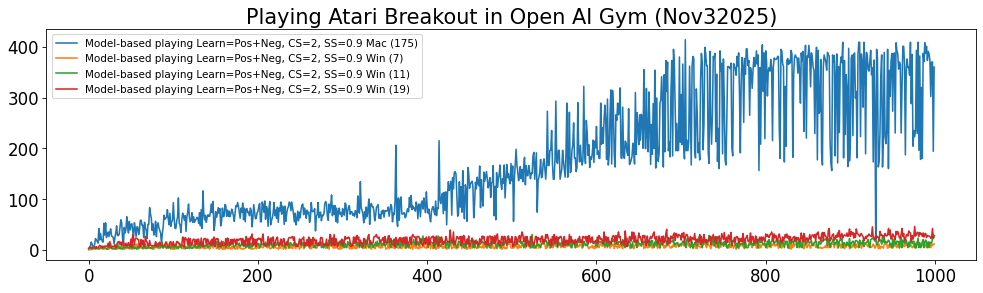

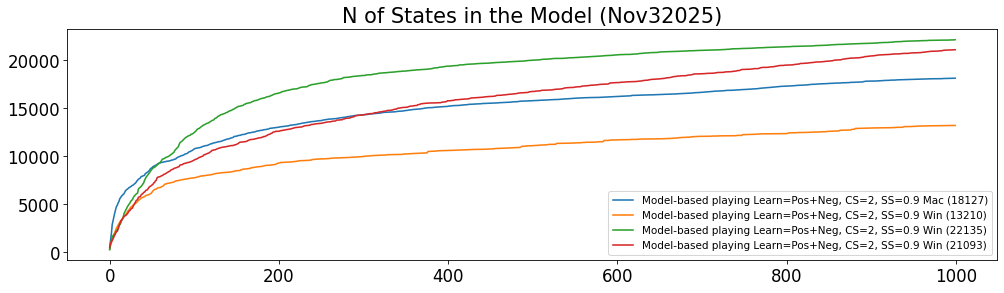

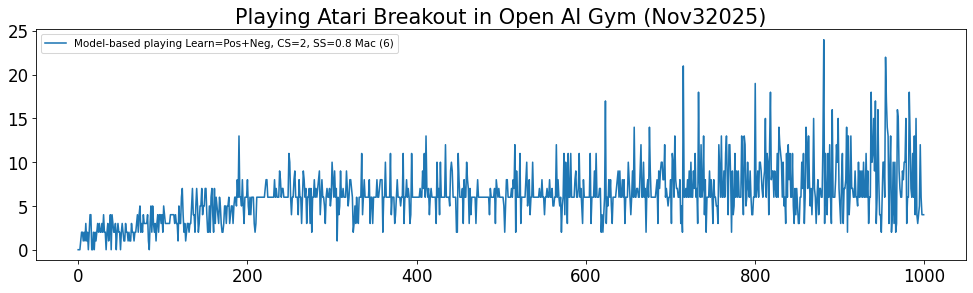

In [5]:
#st=0.9
#Mac: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_ST09_251112 -cs=2 -lm=2python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_ST09_251112 -cs=2 -lm=2
score_avg=174.9; steps_avg=6873.2; lives_avg=0.0; lapse_avg="0:00:23.658102"; time="6:19:11.941913"
scoresSC2SS09 = [0, 5.0, 8.0, 15.0, 11.0, 5.0, 6.0, 10.0, 22.0, 19.0, 17.0, 13.0, 42.0, 19.0, 32.0, 21.0, 17.0, 15.0, 52.0, 29.0, 53.0, 24.0, 30.0, 35.0, 26.0, 35.0, 41.0, 27.0, 26.0, 24.0, 12.0, 24.0, 33.0, 47.0, 28.0, 28.0, 30.0, 45.0, 59.0, 53.0, 23.0, 8.0, 44.0, 33.0, 40.0, 65.0, 45.0, 33.0, 56.0, 39.0, 50.0, 51.0, 37.0, 24.0, 53.0, 43.0, 26.0, 45.0, 45.0, 30.0, 38.0, 58.0, 58.0, 48.0, 48.0, 24.0, 54.0, 43.0, 38.0, 22.0, 50.0, 50.0, 83.0, 71.0, 62.0, 38.0, 51.0, 29.0, 36.0, 56.0, 26.0, 48.0, 53.0, 43.0, 38.0, 32.0, 12.0, 32.0, 44.0, 68.0, 60.0, 62.0, 64.0, 79.0, 61.0, 49.0, 72.0, 46.0, 55.0, 58.0, 93.0, 61.0, 42.0, 42.0, 57.0, 64.0, 102.0, 52.0, 49.0, 34.0, 58.0, 72.0, 67.0, 58.0, 67.0, 36.0, 64.0, 74.0, 90.0, 64.0, 55.0, 58.0, 73.0, 54.0, 65.0, 54.0, 58.0, 60.0, 64.0, 62.0, 52.0, 73.0, 47.0, 79.0, 42.0, 116.0, 70.0, 59.0, 68.0, 54.0, 64.0, 69.0, 66.0, 66.0, 76.0, 90.0, 73.0, 95.0, 38.0, 48.0, 75.0, 64.0, 71.0, 83.0, 72.0, 81.0, 47.0, 55.0, 82.0, 65.0, 66.0, 89.0, 87.0, 66.0, 78.0, 66.0, 76.0, 65.0, 71.0, 80.0, 75.0, 67.0, 56.0, 73.0, 87.0, 85.0, 93.0, 85.0, 73.0, 62.0, 82.0, 74.0, 92.0, 59.0, 82.0, 55.0, 80.0, 81.0, 73.0, 74.0, 67.0, 82.0, 78.0, 45.0, 62.0, 89.0, 75.0, 61.0, 62.0, 73.0, 75.0, 86.0, 91.0, 55.0, 55.0, 94.0, 87.0, 74.0, 96.0, 60.0, 85.0, 80.0, 46.0, 81.0, 95.0, 49.0, 57.0, 63.0, 73.0, 93.0, 67.0, 78.0, 62.0, 84.0, 54.0, 82.0, 76.0, 94.0, 70.0, 86.0, 83.0, 50.0, 86.0, 56.0, 72.0, 81.0, 85.0, 94.0, 92.0, 77.0, 94.0, 83.0, 71.0, 55.0, 72.0, 49.0, 59.0, 76.0, 57.0, 74.0, 63.0, 80.0, 88.0, 90.0, 69.0, 82.0, 75.0, 62.0, 78.0, 71.0, 74.0, 54.0, 62.0, 93.0, 75.0, 75.0, 76.0, 81.0, 37.0, 66.0, 69.0, 93.0, 63.0, 72.0, 74.0, 57.0, 68.0, 67.0, 71.0, 91.0, 95.0, 90.0, 67.0, 58.0, 90.0, 73.0, 88.0, 108.0, 67.0, 87.0, 70.0, 87.0, 56.0, 82.0, 53.0, 75.0, 82.0, 70.0, 72.0, 65.0, 81.0, 73.0, 68.0, 92.0, 89.0, 59.0, 75.0, 84.0, 87.0, 70.0, 75.0, 75.0, 68.0, 71.0, 66.0, 77.0, 75.0, 63.0, 106.0, 74.0, 72.0, 134.0, 82.0, 78.0, 70.0, 53.0, 75.0, 61.0, 84.0, 65.0, 79.0, 100.0, 50.0, 89.0, 91.0, 85.0, 85.0, 76.0, 57.0, 67.0, 83.0, 86.0, 89.0, 62.0, 69.0, 61.0, 76.0, 71.0, 78.0, 64.0, 77.0, 77.0, 76.0, 77.0, 84.0, 66.0, 78.0, 89.0, 85.0, 55.0, 72.0, 69.0, 96.0, 206.0, 61.0, 46.0, 102.0, 58.0, 97.0, 104.0, 71.0, 70.0, 72.0, 73.0, 63.0, 66.0, 76.0, 81.0, 75.0, 103.0, 84.0, 107.0, 79.0, 86.0, 81.0, 82.0, 76.0, 94.0, 86.0, 61.0, 90.0, 89.0, 65.0, 92.0, 96.0, 80.0, 102.0, 89.0, 73.0, 114.0, 85.0, 72.0, 80.0, 64.0, 55.0, 75.0, 82.0, 85.0, 76.0, 69.0, 96.0, 67.0, 82.0, 81.0, 215.0, 98.0, 91.0, 105.0, 111.0, 71.0, 113.0, 78.0, 114.0, 49.0, 111.0, 134.0, 117.0, 123.0, 135.0, 68.0, 142.0, 120.0, 152.0, 154.0, 149.0, 109.0, 66.0, 71.0, 134.0, 84.0, 124.0, 74.0, 156.0, 94.0, 61.0, 128.0, 119.0, 56.0, 162.0, 152.0, 121.0, 131.0, 132.0, 135.0, 124.0, 63.0, 91.0, 133.0, 120.0, 143.0, 131.0, 126.0, 165.0, 83.0, 138.0, 104.0, 86.0, 153.0, 135.0, 145.0, 154.0, 139.0, 122.0, 131.0, 142.0, 103.0, 132.0, 133.0, 166.0, 67.0, 125.0, 59.0, 152.0, 123.0, 139.0, 148.0, 167.0, 132.0, 119.0, 140.0, 131.0, 167.0, 102.0, 135.0, 168.0, 142.0, 150.0, 138.0, 130.0, 170.0, 136.0, 165.0, 56.0, 140.0, 167.0, 198.0, 167.0, 154.0, 136.0, 147.0, 164.0, 140.0, 158.0, 134.0, 164.0, 182.0, 128.0, 166.0, 146.0, 146.0, 166.0, 154.0, 140.0, 151.0, 150.0, 185.0, 192.0, 139.0, 164.0, 191.0, 74.0, 135.0, 143.0, 152.0, 178.0, 142.0, 144.0, 170.0, 179.0, 161.0, 139.0, 165.0, 273.0, 166.0, 166.0, 196.0, 196.0, 235.0, 169.0, 139.0, 139.0, 180.0, 293.0, 174.0, 170.0, 196.0, 196.0, 139.0, 149.0, 159.0, 196.0, 174.0, 158.0, 143.0, 191.0, 289.0, 143.0, 173.0, 271.0, 152.0, 154.0, 196.0, 206.0, 250.0, 181.0, 181.0, 154.0, 162.0, 290.0, 195.0, 173.0, 206.0, 178.0, 167.0, 176.0, 322.0, 191.0, 170.0, 255.0, 232.0, 186.0, 207.0, 162.0, 183.0, 178.0, 189.0, 216.0, 172.0, 214.0, 201.0, 243.0, 188.0, 195.0, 180.0, 180.0, 289.0, 208.0, 241.0, 210.0, 258.0, 285.0, 250.0, 178.0, 297.0, 167.0, 188.0, 268.0, 315.0, 169.0, 314.0, 278.0, 187.0, 163.0, 266.0, 255.0, 289.0, 266.0, 275.0, 319.0, 181.0, 180.0, 281.0, 185.0, 180.0, 214.0, 211.0, 193.0, 186.0, 278.0, 168.0, 171.0, 177.0, 184.0, 210.0, 196.0, 169.0, 310.0, 188.0, 270.0, 243.0, 207.0, 266.0, 216.0, 267.0, 261.0, 200.0, 355.0, 244.0, 199.0, 318.0, 224.0, 193.0, 311.0, 247.0, 168.0, 247.0, 188.0, 288.0, 200.0, 354.0, 161.0, 299.0, 206.0, 174.0, 191.0, 289.0, 295.0, 341.0, 293.0, 163.0, 345.0, 193.0, 373.0, 312.0, 370.0, 195.0, 213.0, 183.0, 309.0, 373.0, 185.0, 395.0, 366.0, 275.0, 195.0, 249.0, 195.0, 196.0, 380.0, 212.0, 306.0, 207.0, 366.0, 209.0, 179.0, 414.0, 195.0, 216.0, 195.0, 213.0, 362.0, 267.0, 167.0, 363.0, 381.0, 377.0, 196.0, 181.0, 317.0, 272.0, 191.0, 210.0, 177.0, 334.0, 387.0, 370.0, 197.0, 247.0, 399.0, 388.0, 363.0, 363.0, 192.0, 170.0, 391.0, 258.0, 208.0, 267.0, 381.0, 377.0, 387.0, 213.0, 346.0, 174.0, 239.0, 160.0, 392.0, 352.0, 367.0, 189.0, 376.0, 295.0, 176.0, 167.0, 254.0, 361.0, 361.0, 359.0, 357.0, 368.0, 200.0, 185.0, 367.0, 361.0, 357.0, 344.0, 381.0, 362.0, 388.0, 308.0, 191.0, 333.0, 379.0, 363.0, 251.0, 377.0, 346.0, 396.0, 396.0, 363.0, 373.0, 265.0, 359.0, 349.0, 318.0, 354.0, 379.0, 361.0, 367.0, 392.0, 366.0, 384.0, 156.0, 359.0, 208.0, 366.0, 404.0, 312.0, 388.0, 219.0, 392.0, 371.0, 303.0, 354.0, 359.0, 352.0, 375.0, 359.0, 215.0, 360.0, 378.0, 375.0, 375.0, 376.0, 381.0, 381.0, 239.0, 180.0, 395.0, 392.0, 367.0, 361.0, 173.0, 322.0, 204.0, 373.0, 377.0, 365.0, 373.0, 368.0, 393.0, 385.0, 182.0, 343.0, 379.0, 384.0, 379.0, 378.0, 348.0, 378.0, 352.0, 289.0, 388.0, 372.0, 391.0, 233.0, 352.0, 403.0, 220.0, 382.0, 379.0, 403.0, 381.0, 321.0, 388.0, 380.0, 360.0, 354.0, 229.0, 352.0, 399.0, 177.0, 393.0, 269.0, 273.0, 375.0, 191.0, 167.0, 359.0, 384.0, 377.0, 370.0, 354.0, 389.0, 384.0, 382.0, 216.0, 170.0, 156.0, 384.0, 370.0, 383.0, 185.0, 344.0, 386.0, 171.0, 361.0, 231.0, 362.0, 380.0, 369.0, 409.0, 181.0, 373.0, 227.0, 345.0, 316.0, 164.0, 397.0, 175.0, 216.0, 378.0, 384.0, 225.0, 384.0, 388.0, 299.0, 312.0, 181.0, 385.0, 409.0, 409.0, 223.0, 386.0, 370.0, 281.0, 409.0, 372.0, 189.0, 389.0, 383.0, 355.0, 352.0, 371.0, 393.0, 345.0, 359.0, 173.0, 374.0, 276.0, 20.0, 395.0, 379.0, 163.0, 174.0, 232.0, 346.0, 384.0, 163.0, 227.0, 389.0, 223.0, 209.0, 236.0, 395.0, 160.0, 354.0, 302.0, 370.0, 387.0, 273.0, 386.0, 388.0, 230.0, 408.0, 393.0, 386.0, 356.0, 370.0, 365.0, 230.0, 319.0, 401.0, 401.0, 366.0, 187.0, 354.0, 376.0, 359.0, 360.0, 344.0, 409.0, 288.0, 385.0, 204.0, 235.0, 223.0, 235.0, 393.0, 229.0, 409.0, 196.0, 382.0, 178.0, 320.0, 180.0, 387.0, 371.0, 408.0, 387.0, 401.0, 373.0, 391.0, 386.0, 373.0, 302.0, 370.0, 370.0, 194.0, 360.0]
stepssSC2SS09 = [499, 1392, 1541, 2344, 1997, 1325, 1499, 1934, 3256, 2757, 3133, 2436, 5609, 3393, 3658, 3280, 2581, 2684, 5496, 4283, 5480, 3673, 4033, 4425, 3976, 4429, 4862, 3512, 4155, 3760, 2430, 3587, 3921, 5568, 3668, 4181, 4673, 5217, 5269, 5477, 3470, 1516, 5397, 4341, 4915, 5497, 5296, 3909, 6230, 4501, 4784, 4986, 4439, 3645, 4817, 4953, 3922, 4833, 4837, 4113, 4688, 5089, 6082, 4816, 5349, 3521, 5015, 5120, 5001, 3649, 5001, 4997, 6334, 6461, 5870, 5054, 4961, 4129, 4512, 4979, 3944, 5540, 5488, 5069, 4946, 4114, 2428, 4740, 4633, 5530, 5403, 5573, 6106, 6124, 5977, 5108, 6341, 6003, 5429, 5632, 6584, 5419, 4803, 5071, 5205, 5658, 6757, 5200, 4987, 4917, 5476, 6135, 6148, 5597, 5353, 4180, 5819, 5455, 6468, 6005, 5525, 5342, 5637, 5406, 5618, 5085, 5429, 6133, 6074, 6025, 5862, 5906, 5032, 6384, 5347, 7841, 5865, 5550, 5973, 5454, 5566, 6218, 6004, 5939, 6326, 6550, 5842, 7689, 5218, 18000, 6276, 6108, 5362, 6433, 6375, 6618, 5429, 5682, 6479, 5481, 5527, 7023, 6604, 5322, 6421, 5322, 5957, 6316, 6200, 6142, 6300, 5816, 5970, 5945, 6471, 6082, 7073, 6208, 6413, 5653, 6516, 6066, 6892, 5097, 6484, 4857, 6575, 6653, 6105, 6172, 6174, 6526, 6821, 4938, 5653, 6766, 6080, 5682, 5233, 5775, 6141, 6493, 7020, 5026, 5021, 6575, 6320, 6309, 6272, 5402, 6494, 5578, 18000, 6665, 6783, 5393, 5521, 5814, 6318, 6958, 6174, 5778, 5632, 6677, 4846, 6548, 6117, 6939, 6075, 6676, 6367, 4872, 6493, 5423, 6101, 6560, 5787, 6778, 6894, 6408, 6939, 6369, 5541, 5651, 6496, 18000, 5485, 6246, 18000, 5777, 5530, 6474, 6600, 6672, 6243, 6399, 6105, 5595, 6870, 6180, 5496, 5490, 5924, 7050, 5886, 6277, 5683, 6079, 4444, 5894, 6017, 6561, 5752, 5558, 6446, 5447, 5921, 5895, 6295, 6955, 6534, 7082, 5820, 5523, 6832, 5374, 6591, 6628, 6120, 6404, 5914, 6686, 18000, 6668, 5294, 5580, 6380, 5155, 6483, 5736, 6087, 5902, 5693, 6996, 6119, 5578, 6295, 6357, 6264, 5966, 5687, 5677, 6099, 6180, 5407, 6477, 6319, 5614, 6667, 5634, 5774, 7896, 6022, 6602, 5966, 5465, 6400, 5373, 6454, 6322, 5970, 6817, 5082, 6427, 6784, 6204, 6295, 6684, 5354, 5910, 6178, 6502, 6966, 5380, 6098, 5710, 6233, 5863, 6041, 5509, 5901, 5934, 5802, 5988, 5703, 5818, 6109, 6207, 5409, 5216, 6343, 6308, 6245, 6226, 6034, 4780, 7293, 5623, 7153, 6573, 6069, 5673, 6326, 5559, 6145, 5185, 6119, 6109, 6154, 6266, 6017, 6664, 6275, 6428, 6079, 6196, 6043, 6030, 6972, 5377, 6496, 5995, 5090, 6083, 6318, 6035, 6755, 5629, 6110, 7068, 6178, 5811, 6171, 5572, 4910, 5490, 6185, 6371, 5596, 6024, 6303, 5558, 6103, 6798, 6440, 6511, 6467, 6156, 6513, 6053, 6547, 6591, 6638, 5393, 6334, 6225, 6187, 6464, 6780, 6103, 6877, 6215, 6996, 6998, 6985, 6090, 5782, 5985, 6225, 6343, 6311, 5878, 7162, 6957, 6130, 6647, 6157, 5815, 7038, 7071, 6516, 6556, 6414, 6430, 6594, 5961, 6705, 6565, 6406, 6750, 6345, 6391, 6998, 6634, 6476, 6961, 6881, 7130, 6629, 6323, 6552, 6442, 6286, 6361, 6341, 7234, 6708, 6452, 7213, 5967, 6342, 5195, 6992, 6467, 6859, 6885, 7306, 6916, 6052, 6535, 6505, 7306, 7069, 6909, 6734, 6394, 6850, 6281, 6295, 7351, 6738, 7585, 5854, 6535, 7325, 7354, 7305, 6949, 6477, 6915, 7354, 6374, 6608, 6653, 7395, 7563, 6643, 7414, 6883, 6902, 7286, 6988, 6374, 6970, 6887, 6972, 7286, 6483, 6959, 7490, 6002, 6741, 6596, 6883, 7130, 6829, 6918, 7331, 7650, 7054, 6833, 7170, 7726, 6781, 6933, 7645, 7649, 7332, 7200, 6483, 6641, 7178, 7719, 7376, 6969, 7650, 7700, 6783, 6856, 6682, 7810, 7224, 6613, 6944, 7190, 7402, 6753, 6869, 7203, 6867, 6686, 7696, 7580, 7344, 7356, 7108, 6686, 6644, 7445, 7098, 7130, 7377, 7390, 7212, 7095, 7950, 7278, 7198, 7822, 8030, 7773, 7611, 6689, 6930, 7114, 7254, 7479, 6730, 7454, 7516, 7482, 7426, 7254, 6942, 7210, 8433, 7550, 7413, 7654, 7538, 7837, 8091, 7390, 7519, 7212, 7170, 7860, 7818, 7030, 7656, 7192, 7742, 7060, 7688, 7369, 7450, 7686, 7680, 7975, 7305, 7058, 7056, 7428, 7092, 7583, 7688, 7538, 6938, 7192, 7522, 7180, 7238, 7321, 7592, 7500, 7024, 8487, 7431, 7908, 7970, 7534, 7684, 7573, 8048, 7944, 7534, 7786, 7834, 7334, 7730, 7606, 7538, 7980, 7280, 6686, 7280, 7456, 8234, 7436, 7715, 6610, 8073, 7378, 7496, 7422, 7497, 7162, 8246, 7211, 7050, 8308, 7538, 8717, 7906, 8733, 7124, 7456, 6918, 7674, 8665, 7225, 8962, 8516, 7806, 7128, 8009, 7124, 7209, 8547, 7268, 8177, 7512, 8771, 7345, 7246, 9089, 7194, 7424, 7124, 7452, 8486, 7710, 7168, 8507, 8770, 8938, 7393, 7301, 7357, 7656, 7066, 7625, 7024, 7756, 8724, 8576, 7574, 7276, 8969, 8557, 8503, 8503, 7231, 7166, 8537, 7581, 7207, 7706, 8229, 8600, 8209, 7460, 7800, 7494, 7361, 18000, 8594, 8522, 8131, 7591, 8483, 7166, 6922, 7168, 8101, 8231, 8231, 8460, 8126, 8551, 7547, 7338, 8123, 8231, 8475, 8336, 8117, 8723, 8885, 7558, 7350, 7907, 8130, 8009, 7420, 8600, 8178, 8982, 8222, 8618, 8584, 8138, 8462, 8424, 7860, 8060, 8177, 8231, 8223, 8351, 8645, 8639, 6997, 8442, 7632, 8576, 8310, 8001, 8177, 7487, 8456, 8329, 7594, 7715, 18000, 8067, 8117, 8625, 7775, 8593, 8103, 8488, 8028, 8693, 8385, 8962, 7357, 6999, 8354, 8355, 8028, 8231, 7139, 7830, 7654, 7646, 8569, 8543, 8717, 8483, 8532, 8856, 7170, 7712, 8322, 8851, 8469, 8257, 8539, 8257, 7701, 7600, 8294, 8506, 8359, 7955, 7701, 8920, 7525, 8463, 8741, 8915, 8389, 7508, 8553, 8833, 8689, 8163, 7794, 8446, 8546, 7024, 8422, 7954, 7821, 8405, 7342, 6818, 7840, 8639, 8805, 8555, 8159, 8528, 8442, 8397, 7822, 7162, 7014, 8670, 8748, 8381, 7066, 8155, 8664, 6918, 8109, 7914, 8647, 8525, 8704, 9174, 7297, 8393, 7725, 8453, 8286, 6846, 8375, 7094, 7425, 8082, 8368, 7667, 8368, 8383, 7310, 7853, 6967, 8133, 9174, 9202, 7445, 8435, 8265, 7906, 9202, 8264, 7359, 8847, 8377, 8397, 8064, 8337, 8429, 8365, 8626, 7094, 8429, 7738, 3036, 8461, 8427, 7090, 7398, 7742, 7876, 8368, 7094, 7842, 9012, 7831, 7345, 7856, 8453, 18000, 8255, 7272, 8748, 8595, 8217, 8504, 8236, 7899, 8538, 8531, 8443, 8098, 8748, 8391, 8104, 8292, 8800, 8641, 8164, 7214, 8155, 8352, 8630, 7883, 8254, 9198, 7978, 8149, 7322, 7745, 7441, 7753, 8336, 7770, 9194, 7812, 8150, 7390, 8546, 7391, 8616, 8090, 8542, 8612, 8807, 7953, 8220, 8268, 7949, 7256, 8748, 8748, 7523, 8042]
livessSC2SS09 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesSC2SS09 = [0, 1, 4, 12, 12, 14, 15, 25, 29, 15, 26, 22, 42, 19, 26, 15, 13, 26, 37, 40, 30, 24, 16, 29, 19, 14, 27, 19, 30, 20, 20, 42, 45, 43, 36, 18, 33, 49, 32, 25, 16, 17, 67, 32, 29, 46, 53, 19, 58, 21, 22, 37, 18, 24, 35, 41, 17, 44, 12, 12, 25, 20, 23, 21, 55, 8, 23, 15, 14, 14, 9, 12, 31, 35, 19, 14, 22, 23, 35, 49, 20, 40, 24, 33, 45, 15, 9, 48, 20, 31, 24, 21, 38, 60, 46, 33, 49, 28, 41, 69, 58, 41, 17, 21, 18, 21, 30, 25, 18, 59, 23, 35, 25, 30, 18, 24, 31, 36, 25, 37, 27, 24, 31, 26, 26, 24, 19, 28, 18, 40, 19, 19, 40, 32, 33, 49, 30, 15, 46, 9, 9, 19, 34, 37, 15, 32, 24, 94, 16, 15, 18, 19, 15, 37, 14, 40, 37, 13, 23, 12, 16, 41, 28, 42, 50, 8, 17, 24, 14, 28, 20, 10, 45, 19, 34, 15, 23, 17, 25, 17, 13, 20, 22, 13, 20, 18, 30, 15, 25, 56, 11, 23, 36, 13, 4, 22, 26, 14, 14, 18, 10, 39, 16, 8, 13, 20, 22, 19, 18, 24, 20, 13, 12, 49, 18, 6, 32, 8, 17, 20, 24, 13, 24, 38, 4, 26, 17, 26, 24, 16, 21, 34, 14, 18, 21, 22, 23, 21, 18, 12, 10, 13, 17, 27, 22, 18, 8, 25, 20, 10, 59, 31, 31, 14, 24, 17, 39, 47, 18, 32, 21, 8, 10, 22, 16, 14, 16, 12, 27, 21, 25, 36, 22, 32, 30, 12, 43, 7, 16, 31, 44, 25, 13, 8, 30, 21, 22, 36, 22, 24, 35, 9, 17, 23, 12, 30, 19, 11, 39, 14, 19, 15, 22, 16, 27, 16, 23, 31, 37, 8, 16, 23, 16, 12, 19, 21, 16, 5, 34, 22, 18, 47, 38, 34, 5, 16, 18, 11, 15, 7, 5, 18, 13, 36, 18, 6, 30, 20, 13, 20, 36, 27, 22, 5, 13, 10, 15, 23, 15, 26, 26, 7, 24, 37, 20, 36, 27, 36, 19, 18, 17, 23, 36, 28, 14, 13, 9, 8, 46, 35, 14, 7, 53, 16, 19, 5, 21, 23, 6, 9, 28, 18, 24, 42, 5, 26, 24, 21, 16, 15, 23, 13, 14, 16, 10, 18, 28, 5, 22, 16, 36, 18, 16, 15, 18, 14, 13, 16, 8, 22, 6, 5, 7, 28, 32, 7, 28, 14, 13, 29, 20, 26, 14, 6, 34, 15, 5, 7, 26, 13, 22, 9, 18, 15, 5, 5, 7, 32, 4, 29, 6, 25, 5, 8, 29, 6, 6, 9, 11, 19, 13, 8, 6, 9, 11, 16, 11, 13, 19, 17, 30, 14, 11, 13, 15, 18, 26, 14, 10, 6, 12, 23, 10, 9, 28, 32, 16, 8, 15, 24, 17, 20, 8, 35, 31, 13, 9, 6, 8, 16, 18, 8, 34, 13, 14, 8, 14, 5, 18, 16, 11, 15, 13, 11, 27, 18, 20, 14, 23, 15, 28, 5, 12, 5, 19, 21, 28, 20, 21, 41, 10, 17, 5, 23, 11, 31, 10, 4, 18, 8, 12, 38, 16, 28, 16, 23, 10, 26, 13, 29, 8, 8, 32, 10, 11, 19, 11, 58, 15, 14, 20, 26, 18, 12, 6, 18, 39, 23, 21, 28, 12, 19, 14, 14, 15, 25, 14, 15, 19, 15, 8, 11, 7, 16, 25, 7, 7, 11, 5, 16, 22, 12, 12, 14, 23, 16, 20, 7, 35, 7, 15, 21, 8, 27, 15, 18, 21, 7, 24, 17, 17, 17, 18, 18, 10, 18, 20, 27, 9, 13, 39, 17, 9, 17, 10, 18, 48, 68, 10, 29, 15, 30, 20, 29, 19, 14, 6, 27, 27, 10, 13, 17, 11, 14, 11, 12, 9, 23, 14, 11, 12, 17, 23, 12, 18, 13, 26, 25, 11, 15, 21, 16, 24, 29, 34, 24, 23, 18, 16, 20, 7, 5, 41, 6, 12, 13, 10, 27, 15, 37, 18, 40, 18, 18, 10, 20, 33, 46, 30, 10, 52, 5, 55, 21, 27, 18, 16, 13, 20, 20, 20, 41, 36, 25, 7, 17, 17, 17, 38, 18, 27, 21, 42, 9, 16, 47, 16, 17, 16, 36, 37, 46, 18, 26, 22, 19, 28, 14, 35, 47, 9, 23, 24, 24, 31, 24, 23, 8, 62, 49, 13, 11, 12, 9, 15, 17, 28, 8, 41, 32, 29, 9, 21, 29, 40, 12, 37, 52, 28, 17, 83, 17, 42, 25, 39, 21, 11, 57, 30, 71, 14, 26, 23, 31, 61, 37, 24, 83, 63, 34, 17, 30, 59, 80, 22, 21, 75, 71, 18, 69, 27, 39, 34, 69, 54, 24, 28, 16, 26, 17, 56, 26, 11, 28, 12, 28, 31, 17, 17, 29, 15, 20, 24, 6, 19, 36, 34, 23, 20, 80, 13, 25, 21, 14, 16, 32, 24, 17, 26, 18, 50, 14, 15, 37, 19, 55, 33, 29, 18, 30, 39, 14, 19, 58, 17, 28, 66, 22, 24, 12, 36, 23, 20, 32, 31, 20, 46, 15, 11, 24, 30, 8, 11, 23, 28, 23, 33, 14, 10, 10, 21, 15, 50, 17, 23, 38, 19, 5, 18, 15, 39, 18, 14, 41, 32, 71, 9, 15, 21, 15, 31, 11, 15, 35, 24, 12, 22, 40, 22, 15, 33, 112, 17, 19, 18, 7, 21, 19, 14, 11, 17, 29, 15, 23, 10, 22, 26, 28, 27, 7, 25, 84, 18, 38, 105, 21, 12, 24, 5, 25, 10, 32, 30, 24, 14, 19, 18, 15, 35, 14, 209, 17, 26, 17, 28, 20, 11, 9, 9, 20, 114, 16, 19, 31, 9, 11, 25, 25, 11, 11, 11, 38, 30, 11, 22, 19, 19, 16, 9, 16, 16, 23, 25, 21, 20, 20, 21, 11, 17, 9, 22, 10, 23, 19, 9, 6, 8, 5, 14, 20, 24, 7, 15, 7, 30, 17, 31, 19, 8, 13, 32, 34, 24, 24, 19, 11, 10, 6, 8, 24]
statesSC2SS09 = [344, 1253, 1955, 2898, 3285, 3705, 4122, 4463, 4780, 4912, 5151, 5306, 5609, 5698, 5865, 5929, 6042, 6114, 6302, 6443, 6536, 6578, 6664, 6751, 6790, 6846, 6929, 6973, 7024, 7112, 7177, 7267, 7414, 7523, 7614, 7677, 7728, 7869, 7904, 7955, 7980, 8009, 8182, 8250, 8315, 8364, 8450, 8537, 8689, 8762, 8811, 8915, 8963, 9012, 9060, 9102, 9151, 9242, 9265, 9276, 9330, 9353, 9372, 9388, 9415, 9423, 9449, 9485, 9493, 9497, 9506, 9526, 9555, 9600, 9607, 9646, 9666, 9703, 9723, 9826, 9863, 9929, 9949, 9986, 10044, 10073, 10080, 10132, 10165, 10235, 10257, 10275, 10332, 10406, 10474, 10491, 10549, 10586, 10626, 10715, 10771, 10815, 10830, 10847, 10868, 10882, 10894, 10919, 10942, 10995, 11019, 11049, 11082, 11105, 11116, 11122, 11153, 11194, 11232, 11286, 11309, 11314, 11374, 11387, 11413, 11429, 11452, 11479, 11496, 11523, 11530, 11541, 11573, 11611, 11627, 11672, 11714, 11723, 11773, 11795, 11802, 11817, 11848, 11904, 11913, 11948, 11975, 12064, 12075, 12085, 12095, 12138, 12150, 12181, 12184, 12210, 12254, 12260, 12277, 12283, 12294, 12354, 12366, 12400, 12436, 12439, 12450, 12468, 12484, 12507, 12522, 12525, 12556, 12589, 12625, 12633, 12656, 12662, 12693, 12703, 12708, 12735, 12759, 12768, 12783, 12796, 12814, 12821, 12853, 12903, 12915, 12925, 12945, 12960, 12962, 12977, 12991, 12995, 13002, 13018, 13023, 13061, 13070, 13073, 13079, 13099, 13110, 13122, 13136, 13154, 13172, 13184, 13186, 13224, 13243, 13244, 13253, 13272, 13282, 13289, 13305, 13316, 13331, 13368, 13375, 13391, 13419, 13440, 13456, 13467, 13473, 13496, 13511, 13524, 13533, 13550, 13565, 13582, 13604, 13610, 13618, 13619, 13637, 13645, 13666, 13679, 13681, 13697, 13708, 13710, 13719, 13749, 13768, 13786, 13800, 13813, 13823, 13845, 13847, 13870, 13874, 13874, 13878, 13888, 13907, 13909, 13918, 13920, 13933, 13951, 13963, 13985, 13993, 14015, 14023, 14026, 14050, 14058, 14062, 14086, 14114, 14127, 14135, 14137, 14165, 14175, 14195, 14205, 14210, 14233, 14247, 14248, 14253, 14264, 14265, 14272, 14278, 14280, 14303, 14316, 14326, 14337, 14344, 14350, 14359, 14360, 14382, 14395, 14415, 14420, 14431, 14436, 14443, 14445, 14454, 14467, 14478, 14478, 14490, 14494, 14502, 14523, 14542, 14563, 14565, 14576, 14586, 14587, 14593, 14596, 14597, 14604, 14605, 14612, 14618, 14619, 14627, 14637, 14645, 14651, 14674, 14688, 14697, 14697, 14701, 14706, 14707, 14729, 14741, 14747, 14772, 14779, 14783, 14811, 14813, 14829, 14839, 14847, 14867, 14875, 14878, 14888, 14906, 14913, 14919, 14920, 14924, 14925, 14953, 14961, 14980, 14983, 15008, 15019, 15036, 15039, 15044, 15060, 15060, 15061, 15063, 15068, 15081, 15094, 15100, 15112, 15119, 15130, 15139, 15145, 15149, 15152, 15161, 15171, 15171, 15174, 15179, 15180, 15182, 15198, 15215, 15224, 15232, 15237, 15248, 15268, 15274, 15278, 15280, 15286, 15288, 15288, 15290, 15301, 15307, 15313, 15328, 15344, 15347, 15352, 15362, 15371, 15376, 15378, 15404, 15407, 15408, 15410, 15419, 15425, 15430, 15437, 15441, 15453, 15456, 15457, 15457, 15465, 15465, 15480, 15490, 15496, 15497, 15498, 15506, 15509, 15512, 15512, 15517, 15521, 15528, 15528, 15530, 15530, 15530, 15544, 15546, 15551, 15557, 15567, 15567, 15582, 15584, 15586, 15588, 15590, 15601, 15610, 15612, 15614, 15616, 15626, 15628, 15630, 15635, 15656, 15663, 15669, 15672, 15678, 15682, 15687, 15688, 15706, 15730, 15734, 15734, 15735, 15739, 15745, 15754, 15754, 15757, 15767, 15770, 15771, 15776, 15776, 15778, 15783, 15794, 15795, 15797, 15799, 15802, 15811, 15818, 15820, 15825, 15827, 15837, 15843, 15847, 15847, 15853, 15855, 15856, 15863, 15865, 15877, 15882, 15888, 15893, 15898, 15899, 15907, 15907, 15907, 15913, 15915, 15917, 15922, 15932, 15936, 15949, 15955, 15959, 15967, 15975, 15984, 15984, 15985, 15992, 15999, 16002, 16008, 16009, 16035, 16036, 16037, 16043, 16052, 16055, 16057, 16057, 16058, 16069, 16077, 16080, 16090, 16090, 16094, 16098, 16099, 16105, 16105, 16110, 16113, 16115, 16116, 16116, 16118, 16118, 16118, 16127, 16127, 16127, 16127, 16129, 16134, 16139, 16143, 16147, 16153, 16159, 16163, 16171, 16172, 16174, 16179, 16182, 16189, 16190, 16197, 16202, 16209, 16210, 16216, 16219, 16224, 16226, 16237, 16237, 16239, 16243, 16247, 16255, 16256, 16258, 16264, 16271, 16280, 16281, 16285, 16288, 16290, 16296, 16337, 16339, 16339, 16343, 16349, 16351, 16356, 16358, 16362, 16362, 16362, 16372, 16374, 16375, 16378, 16379, 16384, 16384, 16388, 16388, 16395, 16395, 16395, 16397, 16399, 16401, 16403, 16408, 16409, 16411, 16420, 16425, 16427, 16431, 16434, 16435, 16438, 16441, 16452, 16454, 16454, 16456, 16462, 16463, 16463, 16471, 16473, 16477, 16479, 16479, 16480, 16487, 16491, 16502, 16510, 16513, 16516, 16517, 16517, 16521, 16524, 16534, 16534, 16540, 16551, 16563, 16564, 16567, 16575, 16575, 16580, 16581, 16600, 16603, 16609, 16624, 16625, 16625, 16629, 16634, 16641, 16647, 16654, 16665, 16667, 16674, 16681, 16685, 16688, 16696, 16700, 16708, 16716, 16724, 16731, 16752, 16757, 16772, 16775, 16780, 16780, 16783, 16790, 16791, 16795, 16800, 16810, 16815, 16829, 16833, 16833, 16844, 16863, 16866, 16867, 16868, 16868, 16868, 16871, 16872, 16874, 16883, 16894, 16902, 16908, 16910, 16910, 16915, 16930, 16939, 16945, 16945, 16946, 16950, 16956, 16964, 16970, 16980, 16982, 16982, 16988, 16988, 17007, 17010, 17011, 17013, 17021, 17030, 17036, 17042, 17055, 17076, 17083, 17083, 17088, 17101, 17112, 17115, 17126, 17126, 17143, 17145, 17152, 17161, 17162, 17169, 17179, 17198, 17208, 17219, 17223, 17235, 17235, 17255, 17257, 17263, 17279, 17281, 17282, 17291, 17292, 17296, 17303, 17306, 17314, 17317, 17318, 17318, 17322, 17332, 17344, 17346, 17351, 17353, 17374, 17379, 17380, 17383, 17397, 17398, 17400, 17400, 17407, 17415, 17416, 17416, 17424, 17426, 17441, 17455, 17459, 17469, 17485, 17487, 17492, 17493, 17498, 17503, 17513, 17522, 17523, 17532, 17535, 17536, 17543, 17544, 17548, 17548, 17554, 17555, 17556, 17557, 17571, 17589, 17589, 17591, 17592, 17597, 17604, 17614, 17617, 17618, 17618, 17619, 17621, 17624, 17628, 17630, 17649, 17651, 17651, 17653, 17654, 17660, 17662, 17664, 17666, 17682, 17689, 17692, 17692, 17697, 17697, 17697, 17699, 17702, 17710, 17722, 17722, 17725, 17729, 17733, 17737, 17747, 17779, 17787, 17811, 17816, 17817, 17820, 17821, 17826, 17826, 17826, 17828, 17830, 17831, 17832, 17835, 17839, 17839, 17844, 17845, 17849, 17850, 17863, 17869, 17879, 17894, 17895, 17898, 17899, 17905, 17906, 17907, 17918, 17927, 17928, 17930, 17935, 17936, 17937, 17938, 17955, 17958, 17966, 17971, 17978, 17980, 17981, 17981, 17982, 17984, 17990, 17994, 17996, 18000, 18001, 18002, 18007, 18009, 18010, 18011, 18011, 18011, 18013, 18022, 18023, 18029, 18033, 18034, 18035, 18037, 18039, 18041, 18047, 18050, 18052, 18053, 18055, 18057, 18063, 18063, 18067, 18067, 18070, 18070, 18070, 18070, 18070, 18070, 18076, 18078, 18079, 18079, 18080, 18080, 18093, 18095, 18098, 18103, 18104, 18105, 18106, 18117, 18122, 18125, 18125, 18125, 18125, 18125, 18125, 18127]

#Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS9_251113 -lm=2 -cs=2 -sc=2 -ss=0.9 (repeat)
#count_threshold=2; state_similarity=0.9; transition_utility=0; transition_count=1
score_avg=6.8; steps_avg=1358.2; lives_avg=0.1; lapse_avg="0:00:03.594919"; time="3:45:09.309539"
scoresSC2SS09a = [1.0, 1.0, 0, 0, 1.0, 3.0, 2.0, 7.0, 1.0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 7.0, 3.0, 1.0, 1.0, 2.0, 3.0, 2.0, 3.0, 1.0, 1.0, 7.0, 11.0, 2.0, 1.0, 3.0, 1.0, 3.0, 2.0, 1.0, 3.0, 2.0, 7.0, 7.0, 1.0, 7.0, 3.0, 3.0, 1.0, 3.0, 2.0, 7.0, 3.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 3.0, 7.0, 11.0, 2.0, 11.0, 11.0, 3.0, 11.0, 3.0, 3.0, 2.0, 7.0, 4.0, 11.0, 4.0, 7.0, 2.0, 11.0, 3.0, 3.0, 2.0, 7.0, 1.0, 1.0, 7.0, 4.0, 11.0, 3.0, 11.0, 3.0, 2.0, 11.0, 7.0, 4.0, 7.0, 7.0, 11.0, 7.0, 2.0, 7.0, 11.0, 3.0, 11.0, 1.0, 11.0, 1.0, 1.0, 2.0, 1.0, 11.0, 2.0, 2.0, 2.0, 11.0, 8.0, 11.0, 2.0, 7.0, 2.0, 7.0, 1.0, 7.0, 3.0, 3.0, 11.0, 2.0, 11.0, 7.0, 4.0, 4.0, 4.0, 11.0, 3.0, 7.0, 2.0, 11.0, 3.0, 2.0, 3.0, 4.0, 7.0, 3.0, 7.0, 2.0, 3.0, 3.0, 4.0, 4.0, 4.0, 1.0, 5.0, 7.0, 11.0, 3.0, 11.0, 7.0, 7.0, 2.0, 11.0, 3.0, 1.0, 2.0, 11.0, 3.0, 1.0, 1.0, 11.0, 1.0, 3.0, 4.0, 2.0, 11.0, 2.0, 4.0, 1.0, 7.0, 2.0, 7.0, 4.0, 1.0, 2.0, 7.0, 1.0, 8.0, 7.0, 2.0, 2.0, 3.0, 1.0, 2.0, 2.0, 3.0, 8.0, 11.0, 11.0, 3.0, 3.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0, 4.0, 2.0, 3.0, 11.0, 3.0, 3.0, 11.0, 7.0, 4.0, 4.0, 7.0, 7.0, 11.0, 11.0, 4.0, 4.0, 11.0, 2.0, 2.0, 3.0, 11.0, 4.0, 3.0, 11.0, 4.0, 3.0, 3.0, 1.0, 7.0, 3.0, 3.0, 11.0, 11.0, 1.0, 4.0, 8.0, 1.0, 11.0, 11.0, 3.0, 3.0, 11.0, 3.0, 11.0, 2.0, 11.0, 11.0, 3.0, 3.0, 11.0, 11.0, 11.0, 1.0, 7.0, 4.0, 11.0, 11.0, 2.0, 7.0, 7.0, 7.0, 11.0, 11.0, 7.0, 3.0, 2.0, 2.0, 11.0, 4.0, 11.0, 11.0, 4.0, 3.0, 4.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 7.0, 11.0, 11.0, 3.0, 7.0, 3.0, 11.0, 1.0, 11.0, 8.0, 7.0, 7.0, 3.0, 7.0, 3.0, 4.0, 11.0, 2.0, 2.0, 1.0, 11.0, 1.0, 8.0, 3.0, 11.0, 7.0, 11.0, 4.0, 8.0, 11.0, 11.0, 2.0, 11.0, 1.0, 11.0, 2.0, 8.0, 7.0, 2.0, 11.0, 2.0, 11.0, 11.0, 11.0, 11.0, 7.0, 11.0, 2.0, 11.0, 3.0, 8.0, 3.0, 11.0, 8.0, 4.0, 11.0, 3.0, 1.0, 11.0, 8.0, 11.0, 2.0, 4.0, 11.0, 7.0, 11.0, 4.0, 11.0, 3.0, 11.0, 4.0, 11.0, 11.0, 11.0, 1.0, 2.0, 4.0, 11.0, 2.0, 11.0, 11.0, 4.0, 11.0, 3.0, 11.0, 2.0, 11.0, 11.0, 4.0, 3.0, 4.0, 11.0, 3.0, 2.0, 11.0, 11.0, 4.0, 3.0, 3.0, 4.0, 11.0, 4.0, 7.0, 2.0, 4.0, 11.0, 1.0, 11.0, 11.0, 3.0, 11.0, 3.0, 4.0, 2.0, 11.0, 4.0, 4.0, 5.0, 7.0, 11.0, 4.0, 4.0, 3.0, 11.0, 11.0, 11.0, 11.0, 2.0, 11.0, 8.0, 2.0, 11.0, 4.0, 1.0, 2.0, 11.0, 3.0, 4.0, 11.0, 8.0, 11.0, 3.0, 3.0, 7.0, 4.0, 3.0, 1.0, 4.0, 3.0, 3.0, 11.0, 11.0, 2.0, 4.0, 5.0, 4.0, 11.0, 2.0, 2.0, 11.0, 4.0, 11.0, 11.0, 11.0, 2.0, 11.0, 11.0, 4.0, 2.0, 8.0, 1.0, 2.0, 8.0, 4.0, 2.0, 11.0, 3.0, 7.0, 11.0, 4.0, 8.0, 3.0, 3.0, 4.0, 4.0, 8.0, 5.0, 4.0, 4.0, 11.0, 3.0, 11.0, 7.0, 11.0, 3.0, 7.0, 11.0, 11.0, 3.0, 3.0, 11.0, 4.0, 2.0, 3.0, 11.0, 2.0, 3.0, 11.0, 9.0, 3.0, 5.0, 1.0, 2.0, 11.0, 5.0, 2.0, 4.0, 2.0, 11.0, 11.0, 11.0, 11.0, 4.0, 3.0, 4.0, 3.0, 5.0, 11.0, 11.0, 4.0, 2.0, 11.0, 4.0, 7.0, 4.0, 11.0, 8.0, 11.0, 11.0, 3.0, 8.0, 8.0, 11.0, 7.0, 4.0, 3.0, 11.0, 11.0, 11.0, 4.0, 3.0, 7.0, 3.0, 11.0, 11.0, 3.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 2.0, 7.0, 4.0, 11.0, 11.0, 3.0, 8.0, 11.0, 4.0, 5.0, 11.0, 11.0, 7.0, 7.0, 8.0, 11.0, 11.0, 11.0, 4.0, 11.0, 8.0, 5.0, 5.0, 4.0, 11.0, 7.0, 11.0, 11.0, 11.0, 6.0, 8.0, 11.0, 11.0, 11.0, 11.0, 4.0, 7.0, 5.0, 6.0, 6.0, 11.0, 8.0, 11.0, 3.0, 7.0, 11.0, 11.0, 11.0, 11.0, 11.0, 5.0, 2.0, 5.0, 4.0, 6.0, 8.0, 3.0, 7.0, 2.0, 7.0, 4.0, 11.0, 6.0, 4.0, 11.0, 11.0, 8.0, 7.0, 8.0, 8.0, 4.0, 11.0, 11.0, 4.0, 11.0, 11.0, 3.0, 11.0, 7.0, 11.0, 11.0, 2.0, 11.0, 7.0, 6.0, 3.0, 11.0, 4.0, 11.0, 6.0, 5.0, 2.0, 11.0, 11.0, 11.0, 8.0, 8.0, 8.0, 11.0, 8.0, 2.0, 11.0, 8.0, 11.0, 2.0, 7.0, 11.0, 8.0, 5.0, 11.0, 7.0, 11.0, 11.0, 11.0, 11.0, 11.0, 2.0, 11.0, 4.0, 11.0, 4.0, 4.0, 11.0, 5.0, 11.0, 11.0, 3.0, 9.0, 8.0, 7.0, 11.0, 11.0, 3.0, 11.0, 4.0, 3.0, 11.0, 11.0, 8.0, 11.0, 3.0, 8.0, 5.0, 11.0, 8.0, 11.0, 7.0, 5.0, 3.0, 7.0, 5.0, 11.0, 7.0, 7.0, 5.0, 11.0, 11.0, 11.0, 7.0, 11.0, 7.0, 11.0, 11.0, 8.0, 7.0, 11.0, 11.0, 11.0, 11.0, 7.0, 12.0, 11.0, 7.0, 11.0, 2.0, 9.0, 7.0, 3.0, 4.0, 2.0, 11.0, 7.0, 6.0, 4.0, 6.0, 7.0, 12.0, 11.0, 11.0, 9.0, 4.0, 11.0, 11.0, 8.0, 7.0, 2.0, 11.0, 11.0, 8.0, 8.0, 11.0, 4.0, 8.0, 11.0, 6.0, 3.0, 11.0, 5.0, 11.0, 11.0, 11.0, 8.0, 8.0, 7.0, 7.0, 3.0, 4.0, 4.0, 11.0, 4.0, 7.0, 8.0, 3.0, 8.0, 8.0, 1.0, 11.0, 5.0, 2.0, 11.0, 7.0, 11.0, 11.0, 7.0, 4.0, 2.0, 11.0, 8.0, 8.0, 8.0, 11.0, 11.0, 11.0, 8.0, 4.0, 11.0, 11.0, 11.0, 11.0, 3.0, 11.0, 3.0, 3.0, 11.0, 4.0, 7.0, 11.0, 11.0, 8.0, 11.0, 11.0, 5.0, 3.0, 9.0, 6.0, 8.0, 4.0, 12.0, 8.0, 11.0, 11.0, 7.0, 11.0, 8.0, 11.0, 3.0, 11.0, 7.0, 11.0, 3.0, 11.0, 11.0, 8.0, 11.0, 11.0, 11.0, 11.0, 3.0, 2.0, 12.0, 1.0, 11.0, 4.0, 11.0, 7.0, 11.0, 11.0, 11.0, 6.0, 6.0, 6.0, 8.0, 12.0, 15.0, 8.0, 2.0, 11.0, 11.0, 6.0, 4.0, 11.0, 11.0, 6.0, 3.0, 11.0, 11.0, 11.0, 11.0, 11.0, 5.0, 9.0, 4.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 4.0, 5.0, 7.0, 4.0, 11.0, 4.0, 11.0, 5.0, 8.0, 5.0, 12.0, 11.0, 11.0, 4.0, 11.0, 11.0, 11.0, 3.0, 7.0, 11.0, 11.0, 3.0, 11.0, 11.0, 9.0, 2.0, 11.0, 5.0, 11.0, 8.0, 11.0, 2.0, 5.0, 4.0, 5.0, 11.0, 6.0, 7.0, 3.0, 11.0, 5.0, 6.0, 7.0, 9.0, 11.0, 3.0, 8.0, 11.0, 11.0, 11.0, 11.0, 11.0, 7.0, 11.0, 5.0, 11.0, 5.0, 5.0, 7.0, 11.0, 8.0, 3.0, 6.0, 11.0, 11.0, 2.0, 11.0, 2.0, 5.0, 7.0, 5.0, 3.0, 11.0, 11.0, 11.0, 11.0, 3.0, 4.0, 11.0, 5.0, 5.0, 4.0, 3.0, 6.0, 11.0, 11.0, 6.0, 4.0, 11.0, 11.0, 3.0, 11.0, 7.0, 6.0, 6.0, 11.0, 6.0, 11.0, 8.0, 11.0, 12.0, 11.0, 11.0, 11.0, 7.0, 4.0, 5.0, 11.0, 12.0, 3.0, 15.0, 11.0, 11.0, 6.0, 11.0, 11.0, 11.0, 8.0, 8.0, 8.0, 11.0, 8.0, 4.0, 8.0, 11.0, 11.0, 11.0, 4.0, 11.0, 8.0, 11.0, 11.0]
stepssSC2SS09a = [626, 619, 487, 511, 603, 859, 724, 980, 606, 847, 851, 724, 730, 608, 863, 983, 860, 614, 603, 726, 867, 726, 851, 612, 605, 983, 1071, 731, 604, 851, 614, 854, 727, 622, 851, 730, 983, 979, 604, 983, 856, 851, 606, 859, 727, 983, 850, 735, 727, 723, 798, 616, 851, 723, 863, 980, 1067, 730, 1067, 1067, 854, 1067, 855, 850, 720, 983, 963, 1067, 971, 983, 724, 1067, 850, 852, 726, 987, 602, 615, 983, 963, 1067, 838, 1067, 850, 716, 1067, 983, 963, 979, 983, 1067, 979, 723, 983, 1067, 842, 1067, 602, 1067, 608, 18000, 732, 600, 1071, 726, 718, 724, 1067, 1099, 1067, 718, 983, 726, 980, 606, 983, 838, 852, 1067, 731, 1067, 987, 964, 963, 964, 1067, 838, 983, 18000, 1067, 919, 723, 848, 963, 979, 851, 983, 727, 854, 852, 971, 971, 963, 602, 1082, 979, 1071, 840, 1067, 980, 983, 727, 1067, 835, 602, 716, 1071, 843, 602, 604, 1067, 602, 838, 963, 723, 1067, 726, 1039, 18000, 979, 723, 979, 967, 602, 720, 980, 602, 1094, 18000, 716, 730, 838, 606, 720, 716, 834, 1098, 1067, 1067, 850, 852, 856, 604, 714, 604, 723, 854, 950, 790, 850, 1071, 851, 855, 1067, 987, 963, 950, 983, 979, 1067, 1067, 963, 963, 1071, 723, 716, 902, 1067, 962, 838, 1067, 966, 834, 851, 604, 984, 839, 838, 1067, 1067, 602, 964, 1094, 18000, 1067, 1067, 840, 838, 1067, 978, 1067, 718, 1067, 1071, 842, 838, 1071, 1067, 1067, 18000, 979, 968, 1067, 1067, 726, 986, 980, 979, 1067, 1067, 983, 851, 718, 724, 1067, 967, 1071, 1067, 963, 838, 963, 1067, 1067, 1071, 1067, 1067, 1067, 983, 1067, 1067, 851, 980, 840, 1067, 602, 1067, 1094, 983, 18000, 851, 980, 838, 964, 1067, 723, 18000, 602, 1067, 612, 1094, 902, 1067, 982, 1067, 1092, 1094, 1067, 1067, 716, 1067, 606, 1067, 723, 1098, 980, 728, 1071, 724, 1071, 1067, 1067, 1071, 983, 1071, 726, 1067, 838, 1094, 850, 1067, 1094, 963, 1067, 838, 602, 1067, 1094, 1067, 715, 963, 1067, 982, 1067, 963, 1067, 851, 1067, 964, 1067, 1067, 1071, 604, 716, 963, 1067, 716, 1071, 1067, 966, 1067, 902, 1067, 723, 1067, 1067, 964, 902, 963, 1067, 851, 723, 1067, 1067, 963, 851, 851, 1022, 1067, 963, 979, 723, 972, 1067, 603, 1067, 1067, 910, 1071, 902, 963, 18000, 1071, 1035, 966, 1150, 18000, 1067, 964, 964, 838, 1067, 1067, 1067, 1067, 724, 1067, 1094, 792, 1067, 963, 602, 787, 1067, 850, 1024, 1067, 1095, 1067, 902, 838, 982, 964, 914, 602, 963, 838, 914, 1067, 1067, 18000, 1028, 1150, 1038, 1067, 716, 790, 1067, 956, 1067, 1067, 1071, 716, 1071, 1067, 963, 722, 1094, 602, 724, 1098, 964, 723, 1067, 979, 980, 1067, 1035, 1094, 902, 918, 966, 1035, 1094, 1150, 1024, 963, 1067, 854, 1067, 982, 1067, 838, 982, 1067, 1067, 902, 902, 1067, 1023, 723, 838, 1067, 724, 838, 1067, 1304, 850, 1228, 18000, 716, 1067, 1283, 724, 1094, 716, 1067, 1067, 1067, 1067, 963, 838, 963, 850, 1288, 1067, 1067, 1094, 727, 1067, 1102, 979, 1102, 1067, 1170, 1067, 1067, 838, 1094, 1171, 1067, 980, 963, 914, 1067, 1067, 1067, 964, 916, 1480, 851, 1067, 1067, 858, 1071, 1067, 1067, 1067, 1067, 1067, 1067, 716, 990, 1094, 1067, 1067, 842, 1094, 1067, 1170, 1227, 1067, 1071, 980, 980, 1094, 1067, 1067, 1067, 963, 1067, 1094, 1219, 1078, 963, 1067, 987, 1067, 1067, 1067, 1406, 18000, 1067, 1067, 1067, 1067, 963, 1491, 1291, 1342, 1342, 1067, 1171, 1067, 838, 1614, 1071, 1067, 1067, 1067, 1067, 1143, 18000, 1215, 963, 1488, 1603, 838, 980, 727, 980, 964, 1067, 1367, 1094, 1067, 1067, 1094, 991, 1098, 1098, 958, 1067, 1067, 963, 1067, 1067, 980, 1067, 982, 1067, 1067, 18000, 1071, 1622, 1342, 980, 1067, 967, 1067, 1342, 1374, 716, 1067, 1071, 1067, 1094, 1094, 1094, 1067, 1094, 18000, 1067, 1171, 1067, 719, 18000, 1067, 1094, 1216, 1067, 983, 1067, 1067, 1067, 1067, 1067, 727, 1067, 964, 1067, 955, 954, 1067, 1286, 1067, 1067, 980, 1359, 1603, 980, 1067, 1067, 851, 1067, 964, 914, 1071, 1067, 1602, 1067, 982, 1599, 1216, 1067, 1095, 1067, 980, 1300, 838, 1481, 1234, 1067, 980, 1491, 1294, 1067, 1067, 1067, 983, 1067, 1477, 1067, 1067, 1594, 1480, 1067, 1067, 1067, 1067, 987, 1733, 1067, 983, 1067, 716, 1358, 980, 838, 1042, 18000, 1067, 980, 1342, 964, 1342, 18000, 1733, 1071, 1067, 1358, 955, 1067, 1067, 1094, 984, 18000, 1067, 1067, 1094, 1094, 1067, 1098, 1094, 1067, 1342, 838, 1067, 1230, 1764, 1071, 1067, 1094, 1094, 1489, 980, 915, 963, 964, 1067, 963, 1491, 1603, 915, 1166, 1094, 603, 1067, 1206, 794, 1067, 1477, 1623, 1071, 983, 963, 732, 1067, 1599, 1094, 1094, 1067, 1067, 1067, 1098, 954, 1067, 1067, 1067, 1067, 903, 1067, 850, 850, 1067, 968, 1475, 1067, 1067, 1170, 1067, 1067, 1234, 838, 1371, 1367, 1094, 963, 1733, 1598, 1067, 1067, 983, 1067, 1166, 1067, 851, 1067, 983, 1067, 838, 1067, 1067, 1605, 1619, 1067, 1067, 1071, 986, 726, 1878, 604, 1067, 1027, 1067, 982, 1067, 1067, 1067, 1398, 1406, 1362, 1094, 1966, 1755, 1599, 716, 1067, 1071, 1554, 950, 1067, 1067, 1554, 924, 1067, 1067, 1067, 1067, 1067, 1218, 1359, 959, 1231, 1058, 851, 1215, 982, 982, 963, 1292, 1487, 958, 1067, 963, 1067, 1172, 1602, 1222, 1737, 1067, 1067, 1056, 1067, 1067, 1067, 982, 1482, 1623, 1067, 838, 1619, 1067, 1358, 715, 1615, 1230, 1067, 1094, 1067, 726, 1159, 1039, 1284, 1067, 1418, 983, 982, 1067, 1288, 1422, 983, 1358, 1067, 980, 1094, 1067, 1067, 1067, 1067, 1067, 982, 1067, 1284, 1067, 1230, 1180, 982, 1067, 1094, 855, 1342, 1067, 1067, 726, 1071, 726, 1307, 1668, 1294, 835, 1067, 1067, 1067, 1067, 838, 964, 1067, 1227, 1218, 1094, 831, 1346, 1071, 1067, 1330, 972, 1067, 1067, 840, 1067, 1611, 1342, 1342, 1067, 1415, 1067, 1599, 1067, 1886, 1071, 1067, 1067, 983, 963, 1082, 1067, 1733, 838, 1751, 1067, 1067, 1283, 1075, 1067, 1067, 1599, 1599, 1599, 1067, 1599, 963, 1094, 1067, 1067, 1615, 963, 1067, 1599, 1615, 1067]
livessSC2SS09a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesSC2SS09a = [0, 0, 0, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 4, 3, 2, 5, 3, 2, 4, 2, 3, 3, 4, 4, 5, 3, 4, 4, 4, 2, 4, 3, 4, 5, 5, 3, 3, 3, 4, 6, 3, 8, 7, 7, 6, 4, 5, 3, 5, 3, 4, 6, 4, 5, 5, 9, 6, 6, 3, 8, 5, 4, 4, 6, 5, 4, 5, 5, 9, 5, 5, 3, 6, 6, 6, 5, 3, 6, 6, 5, 8, 3, 9, 4, 5, 4, 6, 4, 4, 2, 7, 6, 6, 6, 4, 9, 6, 8, 6, 6, 3, 8, 7, 7, 6, 3, 8, 5, 5, 5, 9, 3, 9, 10, 7, 11, 6, 8, 10, 7, 6, 12, 7, 5, 9, 5, 7, 8, 7, 8, 12, 6, 9, 9, 6, 7, 6, 5, 8, 7, 7, 7, 7, 3, 5, 4, 15, 4, 8, 7, 5, 6, 5, 9, 9, 9, 4, 11, 17, 5, 9, 7, 6, 8, 13, 9, 9, 6, 7, 12, 8, 9, 10, 10, 18, 8, 9, 12, 5, 4, 7, 8, 10, 8, 4, 6, 11, 7, 10, 23, 9, 4, 13, 13, 5, 5, 6, 5, 8, 6, 5, 5, 4, 10, 7, 7, 7, 8, 6, 12, 7, 5, 12, 3, 9, 8, 6, 14, 5, 9, 9, 8, 3, 13, 5, 4, 5, 9, 7, 7, 30, 6, 7, 3, 8, 15, 9, 6, 3, 5, 5, 12, 11, 6, 10, 7, 6, 10, 10, 5, 5, 11, 9, 10, 10, 5, 15, 11, 4, 13, 10, 13, 3, 7, 3, 5, 5, 6, 9, 10, 2, 9, 6, 11, 6, 14, 7, 13, 7, 12, 10, 11, 8, 7, 4, 10, 10, 9, 5, 10, 10, 25, 4, 9, 10, 20, 6, 4, 3, 13, 10, 5, 5, 19, 10, 5, 7, 6, 14, 5, 4, 3, 9, 6, 11, 8, 1, 10, 7, 16, 4, 8, 5, 4, 8, 9, 6, 10, 5, 7, 4, 7, 9, 6, 9, 8, 5, 13, 17, 8, 10, 9, 14, 8, 10, 8, 5, 3, 7, 5, 9, 24, 6, 9, 6, 5, 11, 14, 10, 4, 13, 7, 3, 9, 18, 8, 8, 42, 6, 9, 13, 13, 6, 9, 19, 9, 4, 19, 5, 17, 10, 6, 4, 7, 10, 12, 10, 5, 5, 6, 14, 4, 4, 5, 3, 14, 4, 12, 16, 5, 8, 6, 12, 8, 6, 13, 6, 9, 7, 18, 10, 9, 14, 15, 15, 10, 10, 13, 4, 7, 9, 9, 12, 18, 8, 9, 9, 6, 12, 8, 3, 7, 4, 8, 6, 14, 8, 10, 7, 8, 10, 6, 15, 5, 12, 19, 4, 10, 10, 7, 18, 14, 8, 2, 4, 12, 13, 5, 15, 9, 7, 3, 18, 17, 9, 6, 10, 11, 7, 18, 5, 5, 4, 8, 11, 4, 42, 4, 40, 5, 3, 7, 30, 14, 30, 3, 5, 6, 2, 8, 8, 19, 20, 4, 19, 7, 5, 19, 14, 6, 23, 15, 24, 6, 12, 5, 9, 9, 12, 27, 9, 7, 9, 13, 9, 3, 10, 9, 24, 54, 5, 5, 5, 23, 6, 9, 3, 3, 4, 6, 10, 15, 12, 15, 6, 5, 12, 9, 4, 28, 17, 5, 2, 8, 9, 8, 4, 6, 9, 16, 4, 8, 11, 16, 10, 5, 11, 11, 2, 5, 26, 13, 6, 2, 5, 8, 16, 33, 41, 7, 10, 5, 13, 6, 11, 68, 8, 6, 3, 6, 6, 18, 7, 23, 7, 13, 10, 9, 7, 4, 10, 4, 2, 14, 12, 3, 7, 10, 7, 13, 6, 24, 7, 6, 8, 7, 6, 31, 4, 12, 7, 2, 6, 6, 21, 17, 5, 4, 26, 7, 4, 2, 11, 3, 4, 4, 10, 17, 10, 4, 7, 7, 7, 15, 5, 15, 8, 4, 8, 11, 5, 8, 7, 5, 9, 4, 13, 13, 11, 5, 11, 10, 17, 6, 24, 4, 5, 25, 26, 8, 13, 3, 12, 28, 4, 14, 19, 11, 2, 8, 4, 17, 44, 13, 14, 6, 8, 4, 51, 4, 17, 26, 5, 7, 13, 23, 5, 3, 4, 3, 5, 19, 8, 5, 13, 19, 3, 8, 2, 3, 16, 12, 5, 20, 9, 6, 10, 9, 9, 16, 4130, 10, 7, 6, 5, 10, 7, 14, 3, 5, 4, 10, 6, 7, 9, 5, 9, 3, 14, 12, 8, 6, 49, 14, 6, 7, 3, 2, 5, 57, 12, 3, 5, 9, 8, 16, 22, 5, 5, 6, 6, 10, 20, 22, 25, 13, 17, 3, 2, 27, 4, 13, 11, 4, 17, 6, 10, 6, 9, 8, 7, 3, 4, 5, 6, 15, 12, 9, 4, 6, 18, 2, 6, 8, 3, 6, 13, 3, 3, 14, 8, 10, 40, 6, 50, 11, 12, 11, 15, 7, 10, 8, 23, 3, 15, 6, 8, 7, 5, 4, 13, 6, 8, 12, 24, 10, 13, 4, 14, 18, 28, 5, 6, 14, 5, 14, 5, 5, 10, 18, 9, 23, 5, 12, 14, 19, 2, 4, 11, 35, 5, 3, 4, 32, 22, 8, 5, 2, 7, 3, 9, 20, 17, 11, 47, 14, 8, 18, 6, 18, 6, 20, 11, 7, 12, 4, 27, 6, 41, 18, 7, 4, 71, 4, 16, 5, 8, 24, 21, 1, 18, 9, 5, 3, 8, 8, 9, 4, 5, 10, 9, 11, 17, 9, 5, 9, 12, 6, 2, 8, 27, 7, 2, 9, 12, 17, 7, 16, 5, 6, 3, 6, 3, 10, 3, 20, 26, 8, 3, 3, 20, 6, 6, 5, 6, 4, 6, 40, 17, 27, 33, 2, 8, 9, 5, 4, 9, 5, 27, 22, 21, 11, 38, 5, 3, 44, 12, 10, 6, 9, 4, 11, 11, 6, 5, 14, 3, 19, 5, 20, 7, 4, 2, 15, 22, 9, 9, 9, 5, 8, 9, 4, 11, 4, 4, 6, 9, 18, 6, 4, 6, 15, 9, 4, 3, 21, 11, 8, 7, 3, 4]
statesSC2SS09a = [378, 779, 995, 1273, 1627, 1919, 2059, 2315, 2510, 2663, 2857, 2994, 3107, 3270, 3392, 3503, 3681, 3785, 3889, 3978, 4064, 4242, 4371, 4436, 4591, 4713, 4760, 4862, 4938, 4981, 5069, 5135, 5202, 5315, 5410, 5485, 5543, 5633, 5681, 5726, 5763, 5799, 5861, 5934, 5948, 5967, 5998, 6040, 6105, 6145, 6272, 6387, 6474, 6548, 6581, 6591, 6664, 6709, 6728, 6744, 6772, 6810, 6844, 6894, 7000, 7084, 7125, 7133, 7177, 7187, 7197, 7216, 7242, 7271, 7288, 7291, 7328, 7398, 7430, 7443, 7448, 7462, 7489, 7519, 7531, 7546, 7567, 7585, 7611, 7616, 7624, 7644, 7675, 7683, 7697, 7705, 7718, 7737, 7738, 7756, 7760, 7770, 7808, 7832, 7845, 7871, 7890, 7937, 7950, 7955, 7970, 7975, 7982, 8002, 8010, 8032, 8038, 8042, 8060, 8079, 8093, 8099, 8128, 8154, 8182, 8199, 8216, 8232, 8237, 8241, 8260, 8274, 8281, 8293, 8298, 8304, 8306, 8322, 8329, 8331, 8343, 8354, 8364, 8372, 8381, 8406, 8414, 8427, 8484, 8487, 8498, 8512, 8515, 8520, 8524, 8588, 8598, 8650, 8667, 8670, 8673, 8681, 8698, 8702, 8722, 8725, 8735, 8810, 8810, 8826, 8845, 8855, 8871, 8887, 8897, 8909, 8919, 8925, 8927, 8939, 8947, 8982, 8994, 9022, 9049, 9054, 9061, 9062, 9063, 9066, 9078, 9101, 9111, 9122, 9126, 9138, 9156, 9198, 9241, 9290, 9304, 9307, 9361, 9362, 9363, 9371, 9371, 9376, 9385, 9389, 9391, 9395, 9404, 9408, 9408, 9421, 9432, 9438, 9452, 9455, 9464, 9492, 9497, 9516, 9536, 9538, 9545, 9547, 9549, 9554, 9557, 9568, 9572, 9573, 9574, 9577, 9596, 9597, 9601, 9655, 9672, 9679, 9681, 9684, 9694, 9709, 9712, 9714, 9715, 9715, 9725, 9728, 9741, 9742, 9745, 9746, 9747, 9759, 9763, 9765, 9782, 9789, 9797, 9807, 9811, 9817, 9822, 9825, 9835, 9837, 9841, 9845, 9848, 9849, 9849, 9849, 9849, 9852, 9856, 9856, 9857, 9860, 9873, 9877, 9891, 9896, 9898, 9901, 9903, 9908, 9917, 9929, 9932, 9933, 9940, 9945, 9954, 9958, 9965, 9966, 9990, 10000, 10002, 10010, 10031, 10033, 10033, 10033, 10054, 10062, 10066, 10068, 10077, 10091, 10092, 10096, 10098, 10100, 10111, 10113, 10113, 10116, 10118, 10124, 10126, 10126, 10129, 10137, 10165, 10168, 10170, 10170, 10171, 10173, 10176, 10177, 10180, 10184, 10184, 10184, 10184, 10185, 10188, 10189, 10192, 10195, 10219, 10233, 10234, 10235, 10243, 10250, 10264, 10269, 10270, 10270, 10274, 10277, 10278, 10279, 10295, 10297, 10302, 10307, 10307, 10314, 10329, 10331, 10333, 10334, 10339, 10339, 10340, 10348, 10353, 10354, 10499, 10502, 10507, 10512, 10523, 10523, 10526, 10532, 10536, 10537, 10561, 10563, 10565, 10581, 10582, 10582, 10585, 10588, 10591, 10595, 10595, 10601, 10601, 10605, 10608, 10609, 10611, 10612, 10618, 10620, 10622, 10630, 10633, 10638, 10640, 10643, 10645, 10646, 10655, 10657, 10658, 10660, 10662, 10669, 10674, 10675, 10682, 10693, 10697, 10702, 10706, 10706, 10706, 10710, 10710, 10712, 10714, 10717, 10719, 10720, 10723, 10725, 10726, 10728, 10730, 10731, 10731, 10731, 10738, 10747, 10748, 10752, 10753, 10753, 10754, 10759, 10767, 10776, 10777, 10805, 10807, 10808, 10808, 10824, 10825, 10831, 10833, 10835, 10836, 10844, 10846, 10848, 10853, 10853, 10853, 10861, 10873, 10888, 10889, 10889, 10898, 10899, 10906, 10906, 10906, 10907, 10908, 10914, 10915, 10949, 10966, 11041, 11042, 11042, 11045, 11067, 11070, 11075, 11088, 11089, 11092, 11092, 11095, 11099, 11104, 11118, 11120, 11125, 11127, 11130, 11147, 11148, 11148, 11168, 11173, 11175, 11192, 11194, 11196, 11196, 11200, 11200, 11229, 11235, 11235, 11236, 11244, 11245, 11245, 11247, 11248, 11250, 11343, 11344, 11344, 11344, 11351, 11355, 11356, 11356, 11356, 11356, 11356, 11357, 11360, 11363, 11368, 11369, 11369, 11374, 11375, 11376, 11391, 11402, 11403, 11403, 11403, 11403, 11408, 11408, 11408, 11409, 11432, 11434, 11434, 11439, 11455, 11460, 11460, 11461, 11461, 11461, 11461, 11464, 11472, 11474, 11474, 11474, 11476, 11481, 11486, 11510, 11510, 11513, 11515, 11518, 11518, 11521, 11633, 11649, 11649, 11649, 11649, 11650, 11668, 11668, 11696, 11697, 11697, 11703, 11707, 11707, 11707, 11710, 11712, 11712, 11719, 11722, 11723, 11723, 11723, 11723, 11725, 11729, 11732, 11734, 11735, 11736, 11737, 11738, 11754, 11754, 11755, 11759, 11759, 11759, 11759, 11766, 11766, 11785, 11785, 11791, 11791, 11792, 11792, 11794, 11794, 11794, 11795, 11795, 11799, 11800, 11800, 11800, 11801, 11803, 11809, 11810, 11812, 11817, 11818, 11818, 11819, 11820, 11821, 11822, 11823, 11825, 11826, 11828, 11839, 11842, 11843, 11848, 11851, 11853, 11853, 11867, 11867, 11869, 11885, 11890, 11892, 11892, 11904, 11905, 11936, 11937, 11939, 11955, 11962, 11963, 11965, 11965, 11968, 11984, 11986, 11987, 11987, 11987, 11987, 12029, 12035, 12038, 12041, 12049, 12049, 12054, 12069, 12071, 12072, 12073, 12073, 12073, 12078, 12078, 12079, 12083, 12085, 12085, 12085, 12085, 12085, 12085, 12088, 12090, 12105, 12105, 12106, 12106, 12106, 12106, 12113, 12121, 12126, 12128, 12128, 12128, 12128, 12128, 12129, 12130, 12130, 12130, 12132, 12132, 12134, 12134, 12135, 12139, 12139, 12141, 12142, 12144, 12144, 12170, 12175, 12175, 12175, 12175, 12175, 12175, 12256, 12261, 12261, 12261, 12263, 12265, 12266, 12272, 12272, 12272, 12273, 12275, 12276, 12280, 12288, 12292, 12305, 12307, 12315, 12316, 12329, 12332, 12333, 12335, 12336, 12336, 12336, 12336, 12337, 12338, 12340, 12343, 12343, 12343, 12343, 12343, 12348, 12350, 12350, 12350, 12350, 12351, 12351, 12351, 12352, 12352, 12353, 12354, 12357, 12358, 12358, 12360, 12363, 12400, 12402, 12440, 12442, 12442, 12446, 12449, 12453, 12453, 12453, 12459, 12459, 12460, 12477, 12477, 12477, 12477, 12478, 12478, 12480, 12481, 12483, 12490, 12491, 12492, 12492, 12496, 12503, 12506, 12511, 12512, 12515, 12515, 12521, 12525, 12525, 12528, 12537, 12537, 12552, 12553, 12555, 12557, 12559, 12559, 12559, 12561, 12593, 12594, 12594, 12594, 12607, 12613, 12627, 12627, 12627, 12629, 12629, 12630, 12636, 12645, 12645, 12711, 12713, 12713, 12715, 12720, 12721, 12722, 12733, 12734, 12734, 12739, 12739, 12740, 12751, 12803, 12812, 12816, 12817, 12896, 12899, 12912, 12913, 12915, 12917, 12919, 12920, 12921, 12930, 12930, 12930, 12930, 12934, 12935, 12937, 12938, 12939, 12939, 12946, 12952, 12952, 12954, 12954, 12955, 12957, 12957, 12957, 12958, 12966, 12966, 12967, 12968, 12969, 12971, 12973, 12973, 12973, 12973, 12973, 12973, 12973, 12973, 12979, 12990, 12991, 12991, 12991, 13012, 13012, 13013, 13014, 13015, 13015, 13015, 13021, 13028, 13060, 13091, 13091, 13091, 13092, 13092, 13093, 13093, 13093, 13096, 13107, 13110, 13116, 13116, 13122, 13122, 13137, 13146, 13149, 13149, 13149, 13149, 13155, 13155, 13155, 13155, 13161, 13161, 13168, 13169, 13170, 13172, 13172, 13172, 13174, 13175, 13175, 13177, 13178, 13182, 13182, 13187, 13187, 13193, 13194, 13195, 13195, 13195, 13197, 13198, 13198, 13198, 13198, 13198, 13203, 13203, 13205, 13209, 13210, 13210, 13210, 13210]

#Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS9_251113a -lm=2 -cs=2 -sc=2 -ss=0.9 (repeat)
#     python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS9_251113a -lm=2 -cs=2 -sc=2 -ss=0.9
score_avg=11.4; steps_avg=7156.2; lives_avg=0.8; lapse_avg="0:00:39.437875"; time="5:26:33.977804"
scoresSC2SS09aa = [2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 4.0, 4.0, 2.0, 5.0, 4.0, 4.0, 4.0, 1.0, 1.0, 6.0, 7.0, 3.0, 5.0, 3.0, 2.0, 3.0, 2.0, 3.0, 1.0, 3.0, 13.0, 5.0, 2.0, 5.0, 3.0, 2.0, 1.0, 6.0, 3.0, 4.0, 5.0, 4.0, 5.0, 5.0, 3.0, 8.0, 3.0, 5.0, 3.0, 10.0, 2.0, 4.0, 3.0, 1.0, 6.0, 2.0, 6.0, 9.0, 13.0, 5.0, 3.0, 2.0, 8.0, 3.0, 2.0, 4.0, 4.0, 6.0, 4.0, 3.0, 5.0, 2.0, 5.0, 6.0, 7.0, 5.0, 14.0, 6.0, 4.0, 11.0, 6.0, 4.0, 7.0, 15.0, 3.0, 6.0, 6.0, 5.0, 3.0, 6.0, 3.0, 5.0, 6.0, 3.0, 8.0, 6.0, 8.0, 3.0, 7.0, 9.0, 3.0, 6.0, 3.0, 6.0, 7.0, 4.0, 7.0, 9.0, 8.0, 3.0, 6.0, 3.0, 3.0, 3.0, 8.0, 3.0, 7.0, 3.0, 3.0, 3.0, 9.0, 6.0, 6.0, 4.0, 6.0, 4.0, 12.0, 6.0, 4.0, 8.0, 13.0, 7.0, 10.0, 5.0, 8.0, 7.0, 12.0, 4.0, 7.0, 7.0, 8.0, 18.0, 8.0, 11.0, 8.0, 9.0, 9.0, 10.0, 17.0, 4.0, 8.0, 14.0, 11.0, 4.0, 10.0, 16.0, 11.0, 13.0, 4.0, 8.0, 17.0, 8.0, 7.0, 9.0, 10.0, 13.0, 13.0, 8.0, 4.0, 8.0, 10.0, 17.0, 11.0, 9.0, 13.0, 6.0, 8.0, 12.0, 11.0, 6.0, 8.0, 13.0, 4.0, 10.0, 8.0, 4.0, 13.0, 4.0, 13.0, 5.0, 7.0, 11.0, 17.0, 6.0, 8.0, 13.0, 11.0, 12.0, 4.0, 9.0, 12.0, 11.0, 9.0, 13.0, 8.0, 15.0, 8.0, 12.0, 8.0, 8.0, 8.0, 15.0, 13.0, 9.0, 4.0, 8.0, 8.0, 8.0, 10.0, 15.0, 11.0, 8.0, 15.0, 14.0, 8.0, 8.0, 8.0, 9.0, 4.0, 12.0, 15.0, 17.0, 12.0, 4.0, 14.0, 13.0, 10.0, 9.0, 8.0, 15.0, 11.0, 12.0, 8.0, 8.0, 11.0, 14.0, 15.0, 8.0, 14.0, 9.0, 14.0, 4.0, 10.0, 14.0, 12.0, 15.0, 8.0, 4.0, 21.0, 12.0, 11.0, 20.0, 4.0, 8.0, 4.0, 10.0, 11.0, 12.0, 11.0, 13.0, 16.0, 4.0, 15.0, 4.0, 4.0, 11.0, 11.0, 12.0, 4.0, 8.0, 19.0, 11.0, 20.0, 8.0, 12.0, 17.0, 8.0, 16.0, 12.0, 14.0, 9.0, 14.0, 15.0, 13.0, 8.0, 12.0, 7.0, 19.0, 4.0, 12.0, 8.0, 4.0, 16.0, 10.0, 14.0, 8.0, 12.0, 8.0, 8.0, 17.0, 13.0, 12.0, 14.0, 8.0, 15.0, 8.0, 4.0, 10.0, 9.0, 4.0, 11.0, 10.0, 17.0, 4.0, 19.0, 16.0, 10.0, 4.0, 5.0, 12.0, 12.0, 10.0, 4.0, 8.0, 9.0, 15.0, 8.0, 17.0, 8.0, 12.0, 13.0, 15.0, 12.0, 8.0, 13.0, 10.0, 8.0, 9.0, 12.0, 22.0, 15.0, 14.0, 7.0, 4.0, 16.0, 18.0, 13.0, 8.0, 12.0, 4.0, 14.0, 14.0, 8.0, 19.0, 4.0, 17.0, 10.0, 8.0, 8.0, 13.0, 14.0, 4.0, 7.0, 12.0, 4.0, 8.0, 14.0, 15.0, 14.0, 13.0, 20.0, 12.0, 10.0, 17.0, 10.0, 16.0, 8.0, 12.0, 22.0, 11.0, 19.0, 27.0, 14.0, 17.0, 12.0, 15.0, 21.0, 4.0, 13.0, 14.0, 16.0, 14.0, 14.0, 11.0, 4.0, 4.0, 15.0, 11.0, 12.0, 27.0, 10.0, 8.0, 6.0, 10.0, 16.0, 15.0, 13.0, 13.0, 4.0, 13.0, 16.0, 4.0, 8.0, 18.0, 12.0, 17.0, 17.0, 8.0, 15.0, 17.0, 8.0, 4.0, 8.0, 17.0, 14.0, 16.0, 8.0, 8.0, 13.0, 4.0, 11.0, 8.0, 4.0, 17.0, 13.0, 15.0, 17.0, 18.0, 17.0, 19.0, 4.0, 19.0, 4.0, 16.0, 19.0, 14.0, 4.0, 8.0, 12.0, 11.0, 15.0, 16.0, 13.0, 14.0, 13.0, 16.0, 4.0, 21.0, 8.0, 12.0, 4.0, 15.0, 13.0, 13.0, 18.0, 14.0, 16.0, 10.0, 4.0, 12.0, 8.0, 12.0, 10.0, 4.0, 15.0, 8.0, 14.0, 10.0, 17.0, 17.0, 13.0, 12.0, 16.0, 14.0, 17.0, 17.0, 21.0, 15.0, 8.0, 8.0, 8.0, 16.0, 10.0, 18.0, 16.0, 15.0, 18.0, 12.0, 16.0, 12.0, 4.0, 8.0, 17.0, 8.0, 20.0, 15.0, 17.0, 12.0, 16.0, 4.0, 30.0, 4.0, 4.0, 8.0, 4.0, 8.0, 14.0, 8.0, 9.0, 8.0, 4.0, 11.0, 14.0, 17.0, 12.0, 16.0, 19.0, 17.0, 8.0, 14.0, 10.0, 18.0, 4.0, 13.0, 18.0, 8.0, 18.0, 22.0, 18.0, 13.0, 4.0, 16.0, 13.0, 8.0, 13.0, 14.0, 15.0, 16.0, 8.0, 18.0, 11.0, 10.0, 8.0, 8.0, 13.0, 18.0, 4.0, 4.0, 13.0, 17.0, 14.0, 4.0, 15.0, 8.0, 17.0, 15.0, 15.0, 18.0, 17.0, 16.0, 5.0, 17.0, 12.0, 8.0, 11.0, 8.0, 11.0, 19.0, 16.0, 17.0, 16.0, 16.0, 12.0, 16.0, 14.0, 8.0, 14.0, 6.0, 14.0, 14.0, 16.0, 16.0, 13.0, 14.0, 10.0, 20.0, 8.0, 8.0, 16.0, 6.0, 18.0, 8.0, 13.0, 11.0, 22.0, 16.0, 16.0, 21.0, 11.0, 11.0, 14.0, 10.0, 16.0, 15.0, 15.0, 14.0, 8.0, 20.0, 14.0, 11.0, 4.0, 16.0, 23.0, 7.0, 15.0, 17.0, 13.0, 4.0, 4.0, 15.0, 18.0, 18.0, 15.0, 11.0, 4.0, 19.0, 13.0, 11.0, 11.0, 7.0, 16.0, 11.0, 17.0, 14.0, 16.0, 14.0, 16.0, 12.0, 8.0, 17.0, 8.0, 18.0, 18.0, 11.0, 4.0, 14.0, 18.0, 8.0, 16.0, 14.0, 13.0, 4.0, 16.0, 12.0, 11.0, 20.0, 15.0, 17.0, 18.0, 9.0, 18.0, 17.0, 12.0, 13.0, 16.0, 17.0, 15.0, 24.0, 10.0, 10.0, 13.0, 13.0, 14.0, 6.0, 8.0, 11.0, 10.0, 13.0, 17.0, 16.0, 9.0, 14.0, 4.0, 22.0, 18.0, 14.0, 11.0, 4.0, 8.0, 15.0, 4.0, 8.0, 14.0, 12.0, 7.0, 8.0, 13.0, 25.0, 16.0, 10.0, 16.0, 4.0, 11.0, 13.0, 21.0, 18.0, 14.0, 10.0, 18.0, 28.0, 20.0, 14.0, 10.0, 14.0, 23.0, 8.0, 8.0, 17.0, 16.0, 11.0, 4.0, 26.0, 17.0, 10.0, 15.0, 11.0, 7.0, 16.0, 10.0, 17.0, 4.0, 4.0, 10.0, 8.0, 20.0, 17.0, 15.0, 16.0, 18.0, 16.0, 9.0, 13.0, 4.0, 13.0, 4.0, 13.0, 11.0, 11.0, 13.0, 9.0, 21.0, 4.0, 19.0, 4.0, 4.0, 4.0, 8.0, 15.0, 11.0, 11.0, 12.0, 8.0, 15.0, 9.0, 22.0, 13.0, 16.0, 4.0, 21.0, 16.0, 14.0, 18.0, 13.0, 11.0, 13.0, 13.0, 4.0, 8.0, 17.0, 10.0, 20.0, 6.0, 15.0, 16.0, 26.0, 18.0, 12.0, 15.0, 16.0, 21.0, 10.0, 14.0, 18.0, 4.0, 18.0, 12.0, 16.0, 10.0, 4.0, 17.0, 14.0, 17.0, 4.0, 4.0, 20.0, 20.0, 12.0, 18.0, 15.0, 12.0, 26.0, 17.0, 19.0, 4.0, 13.0, 19.0, 4.0, 16.0, 8.0, 4.0, 14.0, 20.0, 18.0, 10.0, 12.0, 14.0, 19.0, 15.0, 13.0, 15.0, 18.0, 8.0, 8.0, 14.0, 15.0, 14.0, 16.0, 4.0, 4.0, 16.0, 12.0, 11.0, 16.0, 16.0, 19.0, 20.0, 19.0, 22.0, 19.0, 9.0, 21.0, 17.0, 4.0, 12.0, 14.0, 16.0, 22.0, 10.0, 14.0, 12.0, 20.0, 16.0, 4.0, 17.0, 20.0, 18.0, 22.0, 4.0, 14.0, 13.0, 10.0, 8.0, 15.0, 11.0, 8.0, 22.0, 4.0, 14.0, 14.0, 17.0, 14.0, 8.0, 18.0, 18.0, 17.0, 15.0, 4.0, 19.0, 11.0, 14.0, 11.0, 19.0, 6.0, 13.0, 13.0, 15.0, 15.0, 20.0, 10.0, 4.0, 20.0, 21.0, 23.0, 21.0, 20.0, 17.0, 20.0, 11.0, 10.0, 17.0, 20.0, 20.0, 17.0, 11.0, 25.0, 15.0, 26.0, 13.0, 16.0, 13.0, 16.0, 19.0, 17.0, 8.0, 12.0, 4.0, 22.0, 6.0, 20.0, 15.0, 10.0, 17.0, 16.0, 16.0, 4.0, 20.0, 25.0, 4.0, 19.0, 16.0, 13.0, 13.0, 19.0, 12.0, 4.0, 15.0, 6.0, 18.0, 22.0, 12.0, 15.0, 17.0, 4.0, 11.0, 4.0, 14.0, 23.0, 4.0, 14.0, 4.0, 7.0, 16.0, 20.0, 4.0, 16.0, 19.0, 14.0, 4.0, 16.0, 4.0, 15.0, 13.0, 13.0, 21.0, 22.0, 25.0]
stepssSC2SS09aa = [793, 835, 986, 915, 18000, 18000, 18000, 1018, 18000, 18000, 728, 927, 18000, 18000, 18000, 1178, 729, 1362, 18000, 1190, 977, 18000, 18000, 1419, 988, 18000, 18000, 857, 715, 18000, 734, 18000, 18000, 860, 2039, 1115, 727, 1105, 988, 794, 612, 1506, 900, 1054, 18000, 18000, 1366, 1286, 994, 1252, 853, 1112, 18000, 1431, 730, 1096, 982, 18000, 1319, 788, 1295, 1886, 2170, 18000, 18000, 802, 1717, 18000, 18000, 18000, 973, 1318, 1102, 18000, 18000, 18000, 1214, 1497, 1679, 1167, 2188, 1349, 18000, 2348, 18000, 1030, 1623, 1817, 18000, 18000, 1421, 1291, 853, 1552, 854, 1245, 1410, 18000, 1254, 1400, 1605, 860, 1478, 2108, 18000, 18000, 858, 1420, 1690, 1184, 1648, 1371, 1543, 18000, 1437, 1005, 18000, 18000, 1751, 18000, 1602, 1002, 18000, 18000, 1940, 18000, 1436, 1085, 1511, 18000, 2405, 1390, 1077, 1870, 2017, 18000, 2102, 18000, 1711, 1659, 2404, 18000, 1661, 1521, 18000, 2295, 18000, 2110, 18000, 1937, 1929, 1933, 2148, 18000, 1739, 2609, 18000, 18000, 2045, 2714, 2234, 2064, 18000, 18000, 2772, 1743, 18000, 1946, 2132, 18000, 2581, 1854, 18000, 1747, 18000, 2863, 2237, 1753, 2570, 1390, 18000, 1951, 2017, 18000, 1785, 1999, 1075, 2045, 18000, 18000, 2501, 18000, 2545, 1269, 1522, 18000, 2663, 1381, 18000, 2421, 2150, 2436, 18000, 1968, 1952, 2186, 1838, 2551, 18000, 2887, 1662, 2356, 1743, 1657, 18000, 2787, 2623, 1928, 18000, 18000, 18000, 18000, 2105, 2787, 2205, 1741, 2650, 2618, 18000, 1740, 1741, 18000, 18000, 2287, 2801, 2676, 2204, 18000, 2268, 2338, 2057, 1880, 1749, 2798, 2147, 2357, 1656, 18000, 2147, 2473, 2810, 18000, 2471, 1937, 2689, 18000, 1901, 2261, 2332, 2450, 1758, 18000, 2868, 18000, 18000, 2472, 18000, 18000, 18000, 18000, 18000, 2236, 2185, 2148, 2465, 18000, 2751, 18000, 18000, 2319, 2227, 2324, 18000, 18000, 3435, 2148, 3077, 18000, 18000, 2689, 18000, 2564, 2358, 2682, 18000, 2626, 2279, 2500, 18000, 18000, 1512, 2852, 18000, 2279, 18000, 18000, 18000, 1987, 2731, 18000, 18000, 1867, 18000, 2681, 2148, 2392, 2530, 18000, 2648, 18000, 18000, 18000, 1806, 18000, 2036, 1987, 2031, 18000, 2414, 2873, 1999, 18000, 1196, 1951, 2302, 1931, 18000, 1741, 1930, 2650, 18000, 2022, 18000, 1881, 18000, 2650, 18000, 1741, 18000, 18000, 18000, 1823, 2274, 2548, 2696, 2343, 18000, 18000, 2945, 2688, 2394, 1844, 1954, 18000, 2400, 2512, 1693, 2993, 18000, 2280, 18000, 1745, 18000, 2404, 2530, 18000, 18000, 2164, 18000, 18000, 2556, 2651, 2541, 2559, 2975, 18000, 2065, 2575, 2122, 2858, 18000, 2103, 3139, 18000, 2953, 2559, 2622, 2842, 18000, 2379, 2501, 18000, 2396, 2421, 2850, 2262, 18000, 2034, 18000, 18000, 2389, 2166, 18000, 3524, 2065, 18000, 18000, 2173, 2169, 2728, 2291, 2281, 18000, 2288, 2704, 18000, 18000, 2936, 2155, 2854, 2517, 18000, 2786, 3141, 1739, 18000, 18000, 18000, 2473, 2049, 18000, 18000, 2268, 18000, 2227, 18000, 18000, 3108, 2533, 2323, 2608, 2733, 2583, 2889, 18000, 3388, 18000, 2432, 2829, 18000, 18000, 18000, 2158, 2173, 2785, 2704, 2268, 2512, 2614, 2947, 18000, 3108, 18000, 2157, 18000, 2604, 2424, 18000, 3130, 2451, 2728, 1933, 18000, 18000, 18000, 2177, 2045, 18000, 2452, 18000, 2391, 2070, 3153, 2584, 2268, 2200, 2432, 2273, 2476, 3220, 3160, 18000, 1741, 1741, 18000, 2984, 2093, 2814, 2950, 2617, 2650, 2200, 2852, 18000, 18000, 18000, 2897, 18000, 2967, 2653, 3149, 2155, 2858, 18000, 3224, 18000, 18000, 18000, 18000, 1741, 2525, 18000, 1981, 1741, 18000, 2223, 2342, 2430, 2161, 2286, 2784, 2354, 18000, 2411, 18000, 2818, 18000, 2068, 2903, 1739, 2880, 2820, 2678, 2064, 18000, 18000, 18000, 1741, 18000, 2512, 2916, 2432, 18000, 2605, 2235, 2027, 1742, 18000, 2450, 3083, 18000, 18000, 2373, 2357, 2556, 18000, 2706, 18000, 2620, 2756, 2680, 3313, 2622, 3047, 1189, 2751, 18000, 1741, 1949, 1741, 2328, 2796, 2727, 2954, 2432, 2952, 18000, 2874, 2230, 1763, 2109, 18000, 2556, 2473, 2708, 1953, 2649, 2789, 2128, 2967, 18000, 1708, 2705, 1397, 2900, 1654, 2283, 18000, 2677, 2787, 2409, 3187, 2036, 2190, 2530, 2066, 2655, 2514, 2322, 2621, 1743, 3416, 2495, 2039, 18000, 2732, 3187, 18000, 2669, 3090, 2272, 18000, 18000, 2789, 2818, 3157, 18000, 18000, 18000, 2926, 18000, 18000, 18000, 1662, 2084, 18000, 2489, 2643, 2432, 18000, 2778, 2212, 18000, 2891, 18000, 2697, 2674, 18000, 18000, 2512, 2697, 1745, 2899, 2550, 18000, 18000, 2862, 2200, 18000, 3177, 2818, 2484, 2613, 1855, 2676, 2608, 2223, 2065, 2433, 2575, 2601, 18000, 1975, 2158, 2273, 2160, 2340, 18000, 1629, 1948, 18000, 2521, 2890, 2776, 1972, 2529, 18000, 2888, 2902, 2452, 2052, 18000, 18000, 2617, 18000, 18000, 2510, 2499, 18000, 18000, 2269, 3216, 18000, 2170, 2516, 18000, 2325, 2272, 3153, 3170, 2456, 2052, 3172, 3217, 2861, 2268, 2154, 2387, 3012, 18000, 18000, 2633, 2432, 18000, 18000, 3595, 3237, 1901, 2592, 18000, 18000, 2708, 2050, 2571, 18000, 18000, 1979, 18000, 3153, 3027, 2594, 2927, 3035, 2708, 1853, 2069, 18000, 2272, 18000, 18000, 2224, 18000, 18000, 1962, 3053, 18000, 3207, 18000, 18000, 18000, 18000, 18000, 2248, 18000, 2530, 1739, 2785, 18000, 3039, 1985, 2433, 18000, 3266, 2637, 2714, 2816, 18000, 18000, 2269, 2268, 18000, 1739, 2575, 2003, 2916, 18000, 2792, 18000, 3512, 3092, 2334, 18000, 18000, 2988, 2063, 2441, 2900, 18000, 3170, 2154, 2432, 1931, 18000, 2808, 2389, 2936, 18000, 18000, 2841, 3484, 2333, 2676, 2590, 18000, 3327, 2926, 2513, 18000, 2453, 3120, 18000, 2834, 18000, 18000, 2388, 2747, 2697, 2061, 2334, 18000, 2796, 2706, 2461, 2753, 2780, 18000, 1745, 2777, 2391, 2476, 2709, 18000, 18000, 2201, 2055, 2314, 2705, 2589, 3561, 3032, 3238, 3331, 2801, 1956, 3125, 2892, 18000, 2355, 2388, 2709, 3212, 2066, 2610, 18000, 2953, 2708, 18000, 2876, 3068, 3208, 3167, 18000, 2625, 2560, 2065, 18000, 2716, 18000, 18000, 3354, 18000, 2262, 2388, 2936, 18000, 18000, 2897, 2672, 2950, 2597, 18000, 2768, 2077, 2673, 18000, 2796, 1331, 2341, 2276, 2429, 2468, 3074, 18000, 18000, 3105, 2501, 3756, 3318, 3191, 18000, 2926, 1720, 18000, 2763, 2204, 3024, 3027, 2032, 3582, 2694, 3043, 18000, 2892, 18000, 2708, 2518, 2885, 18000, 2362, 18000, 2943, 18000, 2654, 2592, 2126, 2577, 2809, 18000, 18000, 2988, 2427, 18000, 2799, 2708, 2268, 18000, 3033, 2170, 18000, 2455, 18000, 2602, 2761, 18000, 2535, 2854, 18000, 2030, 18000, 2388, 3397, 1074, 18000, 18000, 18000, 18000, 2851, 18000, 2708, 2867, 2272, 18000, 2869, 18000, 2592, 2268, 2332, 3108, 2943, 2427]
livessSC2SS09aa = [0, 0, 0, 0, 1, 3, 3, 0, 3, 2, 0, 0, 3, 1, 1, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 1, 1, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 4, 3, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 0, 3, 0, 0, 4, 4, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 4, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 0, 2, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 4, 0, 2, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 3, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 2, 1, 0, 4, 3, 4, 2, 1, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 3, 0, 0, 0, 1, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 2, 0, 0, 4, 0, 2, 4, 1, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 1, 0, 4, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 3, 0, 2, 0, 2, 0, 2, 3, 3, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 1, 0, 3, 0, 0, 4, 1, 0, 4, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 2, 0, 4, 4, 0, 0, 1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 4, 0, 0, 4, 3, 0, 0, 0, 0, 3, 0, 0, 0, 4, 1, 1, 0, 0, 3, 3, 0, 4, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 1, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 4, 0, 0, 1, 0, 0, 0, 0, 4, 2, 3, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 4, 4, 1, 4, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 4, 2, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 4, 0, 0, 0, 1, 2, 4, 0, 2, 2, 3, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 3, 4, 0, 0, 0, 0, 0, 1, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 3, 0, 4, 3, 0, 0, 3, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 3, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 1, 0, 2, 1, 0, 0, 4, 0, 4, 2, 3, 3, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 2, 3, 0, 0, 4, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 4, 0, 3, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 1, 3, 0, 4, 0, 0, 0, 1, 2, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 4, 0, 0, 4, 0, 0, 0, 1, 0, 0, 4, 0, 3, 0, 0, 1, 0, 0, 3, 0, 4, 0, 0, 0, 2, 4, 3, 1, 0, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0]
lapsesSC2SS09aa = [0, 1, 2, 2, 5, 5, 4, 3, 5, 6, 3, 4, 5, 7, 8, 5, 4, 7, 6, 6, 4, 8, 7, 5, 5, 9, 8, 5, 8, 8, 6, 8, 7, 5, 17, 4, 5, 6, 6, 8, 7, 14, 12, 8, 11, 12, 9, 9, 11, 7, 10, 7, 10, 8, 8, 9, 5, 9, 11, 9, 10, 12, 21, 9, 8, 7, 9, 8, 10, 8, 10, 8, 11, 10, 13, 11, 10, 23, 16, 12, 11, 12, 26, 25, 15, 9, 17, 19, 16, 18, 15, 4, 13, 12, 6, 12, 23, 7, 14, 8, 18, 12, 22, 21, 18, 10, 13, 15, 16, 12, 17, 17, 16, 11, 15, 11, 9, 8, 27, 8, 18, 15, 9, 11, 30, 14, 10, 20, 20, 7, 24, 13, 11, 8, 17, 13, 12, 17, 16, 8, 27, 13, 14, 6, 14, 24, 9, 27, 18, 21, 8, 27, 12, 6, 12, 11, 16, 5, 20, 31, 13, 31, 8, 10, 25, 12, 9, 17, 20, 12, 17, 24, 7, 17, 15, 20, 16, 24, 16, 24, 9, 13, 18, 8, 36, 17, 15, 16, 7, 6, 38, 5, 39, 20, 14, 14, 20, 19, 8, 16, 21, 18, 8, 64, 14, 21, 15, 32, 10, 26, 7, 12, 14, 16, 12, 27, 10, 26, 5, 10, 16, 11, 34, 23, 31, 43, 15, 15, 11, 8, 5, 15, 5, 18, 28, 44, 23, 8, 65, 10, 8, 27, 14, 18, 10, 22, 25, 18, 20, 33, 15, 13, 17, 19, 29, 5, 22, 15, 31, 57, 47, 8, 30, 10, 25, 30, 8, 7, 8, 22, 17, 30, 22, 18, 46, 7, 86, 7, 5, 20, 11, 19, 4, 9, 27, 15, 36, 15, 24, 37, 13, 33, 21, 24, 11, 15, 21, 19, 8, 7, 19, 16, 5, 36, 13, 8, 13, 17, 21, 14, 7, 48, 10, 26, 15, 20, 19, 8, 43, 6, 11, 24, 27, 5, 10, 6, 15, 8, 11, 28, 24, 18, 9, 15, 11, 29, 7, 13, 39, 31, 13, 9, 10, 21, 18, 25, 13, 5, 17, 11, 7, 29, 25, 18, 20, 23, 22, 6, 18, 26, 20, 10, 17, 6, 19, 14, 26, 23, 8, 28, 21, 13, 14, 13, 20, 7, 32, 29, 7, 7, 20, 19, 46, 27, 12, 15, 30, 27, 28, 49, 10, 22, 31, 17, 22, 11, 23, 56, 18, 48, 38, 8, 18, 29, 20, 20, 14, 21, 5, 5, 23, 24, 17, 88, 7, 6, 21, 36, 14, 36, 24, 30, 5, 41, 8, 5, 9, 36, 13, 24, 24, 12, 23, 38, 7, 6, 12, 42, 14, 27, 10, 12, 21, 8, 24, 8, 12, 25, 24, 26, 11, 33, 16, 21, 7, 40, 7, 30, 20, 15, 6, 11, 16, 21, 21, 17, 22, 11, 10, 32, 10, 43, 12, 8, 8, 25, 40, 14, 23, 25, 43, 25, 5, 9, 6, 27, 17, 8, 25, 10, 12, 44, 32, 29, 26, 23, 22, 10, 27, 20, 37, 31, 12, 8, 6, 12, 16, 20, 25, 26, 27, 16, 36, 7, 7, 25, 20, 16, 18, 12, 16, 13, 41, 8, 36, 5, 8, 6, 6, 3, 12, 8, 7, 10, 10, 27, 23, 9, 16, 28, 20, 57, 18, 46, 9, 16, 8, 21, 26, 6, 28, 15, 19, 16, 9, 9, 20, 15, 23, 16, 32, 31, 11, 29, 24, 32, 23, 11, 17, 29, 6, 18, 24, 27, 10, 6, 21, 9, 25, 25, 29, 34, 25, 40, 11, 24, 20, 13, 26, 4, 9, 34, 5, 29, 9, 25, 25, 20, 30, 4, 21, 10, 37, 20, 12, 28, 9, 17, 27, 10, 7, 16, 17, 20, 12, 19, 27, 32, 28, 20, 15, 33, 28, 30, 28, 57, 29, 15, 20, 28, 22, 36, 17, 25, 5, 8, 30, 24, 46, 19, 16, 8, 5, 23, 14, 47, 21, 13, 10, 54, 19, 13, 12, 46, 18, 9, 26, 40, 16, 13, 25, 17, 6, 57, 8, 37, 23, 10, 5, 17, 25, 20, 29, 27, 16, 5, 26, 25, 12, 28, 21, 18, 27, 8, 32, 12, 25, 30, 16, 14, 21, 31, 17, 27, 18, 9, 19, 6, 19, 15, 5, 17, 45, 23, 34, 22, 6, 25, 27, 30, 29, 5, 8, 17, 7, 7, 16, 36, 13, 19, 24, 36, 10, 28, 67, 8, 20, 19, 86, 26, 27, 9, 26, 59, 29, 56, 27, 18, 19, 26, 19, 21, 6, 15, 8, 37, 47, 19, 25, 17, 38, 12, 14, 19, 8, 7, 20, 10, 23, 15, 16, 21, 7, 33, 42, 21, 4, 8, 7, 27, 45, 9, 38, 31, 38, 4, 25, 5, 14, 8, 15, 21, 41, 13, 38, 44, 25, 52, 35, 11, 24, 10, 20, 24, 26, 17, 26, 7, 24, 29, 7, 8, 18, 14, 26, 13, 61, 17, 32, 9, 8, 28, 15, 21, 12, 28, 13, 11, 35, 30, 28, 9, 11, 56, 37, 18, 7, 9, 15, 32, 19, 48, 29, 19, 46, 22, 13, 8, 34, 30, 6, 46, 10, 5, 18, 18, 19, 21, 57, 12, 3, 55, 32, 38, 17, 26, 22, 46, 30, 16, 56, 5, 6, 22, 20, 9, 8, 27, 91, 25, 26, 37, 12, 41, 18, 29, 13, 22, 12, 25, 21, 23, 31, 11, 35, 9, 5, 26, 25, 28, 16, 6, 13, 26, 13, 7, 32, 29, 7, 52, 7, 23, 14, 26, 23, 6, 30, 22, 65, 30, 5, 44, 36, 40, 14, 15, 32, 16, 15, 28, 28, 56, 11, 5, 54, 22, 59, 123, 21, 37, 28, 37, 14, 26, 29, 17, 56, 21, 19, 20, 23, 20, 32, 29, 16, 16, 22, 7, 29, 10, 28, 11, 23, 30, 41, 23, 33, 12, 8, 32, 30, 8, 29, 10, 14, 27, 25, 47, 7, 35, 6, 11, 29, 26, 29, 43, 20, 27, 5, 17, 37, 25, 11, 9, 17, 7, 39, 7, 10, 29, 29, 11, 31, 8, 32, 19, 16, 30, 30, 39]
statesSC2SS09aa = [278, 748, 1254, 1602, 1748, 1832, 1851, 2090, 2275, 2341, 2476, 2798, 2888, 3035, 3274, 3458, 3665, 4054, 4220, 4422, 4571, 4768, 4890, 5034, 5148, 5333, 5421, 5507, 5728, 5849, 5949, 6052, 6114, 6186, 6603, 6697, 6764, 6851, 6941, 7097, 7201, 7449, 7650, 7816, 7943, 8085, 8185, 8275, 8430, 8546, 8673, 8767, 8812, 8861, 8925, 9016, 9097, 9167, 9238, 9321, 9393, 9520, 9677, 9730, 9750, 9795, 9877, 9880, 9947, 9971, 10025, 10074, 10163, 10206, 10278, 10357, 10432, 10606, 10716, 10805, 10892, 10987, 11213, 11405, 11489, 11543, 11622, 11726, 11806, 11883, 11974, 12000, 12074, 12128, 12153, 12191, 12280, 12307, 12351, 12401, 12480, 12559, 12643, 12769, 12845, 12878, 12914, 13002, 13070, 13128, 13188, 13258, 13291, 13338, 13387, 13434, 13456, 13480, 13574, 13609, 13666, 13729, 13761, 13793, 13904, 13971, 13994, 14080, 14163, 14190, 14254, 14316, 14343, 14356, 14418, 14430, 14461, 14511, 14564, 14572, 14649, 14697, 14736, 14753, 14786, 14855, 14887, 14927, 14992, 15045, 15079, 15151, 15193, 15200, 15219, 15253, 15278, 15278, 15318, 15406, 15419, 15486, 15502, 15508, 15545, 15572, 15579, 15610, 15676, 15699, 15736, 15786, 15793, 15812, 15834, 15867, 15897, 15929, 15970, 16018, 16027, 16037, 16071, 16075, 16124, 16163, 16189, 16219, 16227, 16228, 16314, 16322, 16370, 16429, 16453, 16478, 16506, 16530, 16540, 16555, 16590, 16619, 16628, 16708, 16723, 16747, 16768, 16801, 16815, 16848, 16863, 16869, 16886, 16927, 16938, 16966, 16980, 16993, 17005, 17006, 17013, 17016, 17054, 17074, 17114, 17160, 17170, 17198, 17204, 17215, 17216, 17232, 17232, 17240, 17281, 17348, 17383, 17385, 17450, 17460, 17469, 17484, 17504, 17512, 17530, 17544, 17576, 17585, 17589, 17624, 17643, 17651, 17654, 17669, 17693, 17698, 17727, 17734, 17782, 17841, 17890, 17907, 17922, 17924, 17937, 17986, 17987, 17988, 17992, 18008, 18016, 18033, 18051, 18060, 18092, 18094, 18188, 18199, 18199, 18212, 18217, 18231, 18235, 18236, 18265, 18270, 18292, 18303, 18313, 18324, 18326, 18339, 18353, 18361, 18369, 18377, 18385, 18400, 18402, 18403, 18412, 18417, 18418, 18468, 18471, 18473, 18475, 18480, 18490, 18497, 18498, 18538, 18547, 18556, 18571, 18581, 18601, 18603, 18650, 18651, 18652, 18665, 18675, 18679, 18685, 18687, 18692, 18698, 18707, 18727, 18735, 18743, 18745, 18757, 18759, 18772, 18773, 18776, 18791, 18816, 18817, 18820, 18824, 18832, 18838, 18852, 18862, 18863, 18870, 18873, 18873, 18891, 18896, 18911, 18918, 18930, 18940, 18940, 18944, 18956, 18968, 18974, 18991, 18991, 18998, 19005, 19012, 19029, 19033, 19039, 19048, 19048, 19050, 19051, 19057, 19060, 19076, 19099, 19100, 19102, 19120, 19125, 19160, 19191, 19195, 19202, 19205, 19214, 19231, 19260, 19274, 19280, 19298, 19303, 19321, 19328, 19335, 19364, 19367, 19380, 19387, 19388, 19389, 19402, 19411, 19418, 19424, 19439, 19439, 19439, 19446, 19451, 19456, 19508, 19508, 19508, 19511, 19518, 19529, 19531, 19560, 19566, 19569, 19579, 19583, 19583, 19583, 19589, 19594, 19602, 19610, 19611, 19621, 19638, 19641, 19641, 19644, 19650, 19655, 19667, 19673, 19675, 19678, 19678, 19682, 19683, 19683, 19689, 19698, 19707, 19719, 19728, 19729, 19733, 19734, 19752, 19757, 19766, 19778, 19779, 19780, 19781, 19784, 19788, 19792, 19794, 19798, 19803, 19804, 19818, 19827, 19836, 19842, 19842, 19842, 19851, 19860, 19865, 19869, 19873, 19882, 19891, 19891, 19891, 19891, 19898, 19898, 19899, 19900, 19917, 19918, 19934, 19938, 19958, 19971, 19973, 19978, 19980, 19988, 19996, 20014, 20021, 20021, 20021, 20021, 20029, 20031, 20033, 20039, 20061, 20076, 20080, 20099, 20099, 20099, 20106, 20110, 20113, 20115, 20124, 20139, 20143, 20154, 20164, 20179, 20182, 20182, 20182, 20182, 20183, 20185, 20185, 20188, 20191, 20191, 20195, 20199, 20205, 20206, 20211, 20219, 20235, 20238, 20255, 20255, 20256, 20257, 20260, 20269, 20270, 20275, 20281, 20290, 20295, 20296, 20298, 20304, 20307, 20319, 20320, 20327, 20333, 20335, 20341, 20348, 20354, 20356, 20359, 20363, 20376, 20376, 20378, 20381, 20393, 20394, 20394, 20400, 20403, 20404, 20412, 20427, 20431, 20444, 20457, 20470, 20473, 20476, 20478, 20483, 20484, 20484, 20498, 20498, 20508, 20512, 20522, 20530, 20548, 20555, 20556, 20561, 20563, 20579, 20579, 20582, 20583, 20583, 20590, 20598, 20600, 20600, 20601, 20602, 20603, 20604, 20607, 20612, 20617, 20622, 20625, 20630, 20638, 20649, 20657, 20662, 20682, 20701, 20706, 20710, 20718, 20718, 20740, 20747, 20755, 20755, 20756, 20768, 20769, 20783, 20787, 20792, 20792, 20792, 20798, 20800, 20810, 20814, 20814, 20814, 20843, 20858, 20859, 20860, 20870, 20873, 20875, 20878, 20886, 20887, 20887, 20890, 20894, 20894, 20900, 20903, 20908, 20909, 20911, 20911, 20911, 20916, 20922, 20927, 20930, 20934, 20934, 20944, 20946, 20948, 20958, 20959, 20960, 20963, 20963, 20980, 20981, 20982, 20984, 20985, 20987, 20989, 21000, 21001, 21007, 21014, 21015, 21019, 21021, 21021, 21026, 21026, 21031, 21036, 21038, 21040, 21046, 21046, 21048, 21055, 21058, 21060, 21060, 21060, 21062, 21062, 21062, 21064, 21072, 21081, 21082, 21083, 21093, 21095, 21098, 21111, 21111, 21114, 21115, 21126, 21137, 21137, 21139, 21142, 21147, 21153, 21187, 21188, 21191, 21192, 21194, 21196, 21199, 21200, 21201, 21201, 21209, 21220, 21222, 21224, 21224, 21230, 21230, 21231, 21238, 21238, 21238, 21242, 21243, 21247, 21253, 21254, 21258, 21263, 21267, 21287, 21294, 21294, 21294, 21294, 21294, 21300, 21301, 21305, 21309, 21320, 21320, 21333, 21333, 21333, 21334, 21336, 21341, 21345, 21348, 21349, 21354, 21358, 21365, 21367, 21368, 21372, 21373, 21377, 21387, 21392, 21392, 21397, 21397, 21399, 21402, 21402, 21403, 21412, 21412, 21414, 21417, 21434, 21436, 21439, 21440, 21440, 21443, 21444, 21445, 21446, 21449, 21451, 21451, 21456, 21459, 21461, 21462, 21462, 21466, 21470, 21471, 21471, 21471, 21472, 21482, 21487, 21490, 21503, 21505, 21520, 21523, 21526, 21526, 21533, 21536, 21536, 21543, 21549, 21549, 21550, 21552, 21554, 21555, 21563, 21577, 21577, 21590, 21597, 21604, 21611, 21616, 21616, 21628, 21628, 21634, 21642, 21645, 21645, 21645, 21648, 21649, 21649, 21650, 21663, 21666, 21672, 21683, 21685, 21687, 21687, 21691, 21695, 21697, 21704, 21706, 21707, 21712, 21719, 21721, 21727, 21727, 21727, 21729, 21733, 21739, 21741, 21744, 21745, 21747, 21749, 21749, 21756, 21759, 21759, 21763, 21769, 21773, 21775, 21786, 21788, 21788, 21790, 21791, 21807, 21821, 21821, 21826, 21832, 21842, 21843, 21843, 21847, 21850, 21851, 21852, 21852, 21867, 21867, 21867, 21877, 21883, 21893, 21911, 21920, 21928, 21928, 21930, 21931, 21934, 21936, 21938, 21953, 21955, 21958, 21963, 21972, 21980, 21982, 21987, 21988, 21991, 21991, 21992, 21992, 21994, 21998, 21998, 22001, 22007, 22014, 22019, 22020, 22025, 22025, 22032, 22038, 22038, 22039, 22041, 22042, 22044, 22045, 22065, 22067, 22068, 22068, 22069, 22071, 22073, 22077, 22081, 22083, 22085, 22085, 22085, 22087, 22091, 22091, 22091, 22091, 22091, 22091, 22093, 22093, 22093, 22095, 22095, 22104, 22109, 22111, 22112, 22113, 22114, 22129, 22135]

#Mac: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS9_251113w -lm=2 -cs=2 -sc=2 -ss=0.9 (repeat)
score_avg=19.5; steps_avg=3968.1; lives_avg=0.3; lapse_avg="0:00:54.195506"; time="8:18:09.150374"
scoresSC2SS09aaa = [3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 4.0, 6.0, 3.0, 6.0, 3.0, 4.0, 6.0, 9.0, 7.0, 5.0, 7.0, 4.0, 7.0, 7.0, 7.0, 7.0, 7.0, 13.0, 6.0, 16.0, 6.0, 4.0, 7.0, 6.0, 6.0, 10.0, 4.0, 6.0, 13.0, 16.0, 16.0, 10.0, 15.0, 8.0, 16.0, 16.0, 8.0, 7.0, 13.0, 7.0, 9.0, 14.0, 7.0, 7.0, 21.0, 5.0, 30.0, 20.0, 10.0, 22.0, 23.0, 22.0, 20.0, 20.0, 5.0, 8.0, 20.0, 10.0, 19.0, 7.0, 6.0, 26.0, 17.0, 15.0, 8.0, 8.0, 18.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 16.0, 7.0, 11.0, 8.0, 13.0, 15.0, 9.0, 9.0, 9.0, 7.0, 8.0, 8.0, 15.0, 15.0, 6.0, 6.0, 6.0, 15.0, 16.0, 11.0, 9.0, 16.0, 8.0, 8.0, 9.0, 16.0, 16.0, 13.0, 13.0, 9.0, 8.0, 9.0, 25.0, 22.0, 6.0, 24.0, 21.0, 20.0, 10.0, 23.0, 9.0, 22.0, 9.0, 9.0, 19.0, 21.0, 20.0, 9.0, 20.0, 10.0, 21.0, 20.0, 9.0, 9.0, 23.0, 10.0, 6.0, 21.0, 22.0, 22.0, 9.0, 21.0, 20.0, 11.0, 10.0, 17.0, 9.0, 21.0, 11.0, 25.0, 6.0, 21.0, 20.0, 22.0, 21.0, 7.0, 6.0, 6.0, 17.0, 9.0, 8.0, 9.0, 9.0, 22.0, 8.0, 23.0, 21.0, 10.0, 9.0, 20.0, 11.0, 20.0, 12.0, 21.0, 19.0, 9.0, 21.0, 20.0, 18.0, 21.0, 20.0, 22.0, 11.0, 22.0, 8.0, 18.0, 8.0, 26.0, 22.0, 8.0, 22.0, 9.0, 25.0, 22.0, 31.0, 9.0, 22.0, 10.0, 20.0, 6.0, 21.0, 20.0, 23.0, 21.0, 22.0, 11.0, 22.0, 31.0, 10.0, 11.0, 9.0, 6.0, 12.0, 26.0, 10.0, 20.0, 23.0, 10.0, 24.0, 25.0, 8.0, 10.0, 18.0, 22.0, 25.0, 9.0, 8.0, 9.0, 21.0, 13.0, 10.0, 22.0, 21.0, 9.0, 11.0, 15.0, 9.0, 22.0, 24.0, 24.0, 23.0, 25.0, 26.0, 18.0, 25.0, 8.0, 7.0, 10.0, 6.0, 10.0, 21.0, 20.0, 10.0, 21.0, 22.0, 25.0, 8.0, 13.0, 9.0, 20.0, 8.0, 25.0, 12.0, 7.0, 20.0, 11.0, 24.0, 19.0, 21.0, 12.0, 19.0, 9.0, 8.0, 14.0, 8.0, 24.0, 24.0, 23.0, 9.0, 9.0, 11.0, 8.0, 21.0, 9.0, 9.0, 9.0, 30.0, 28.0, 9.0, 23.0, 9.0, 30.0, 8.0, 22.0, 17.0, 6.0, 9.0, 14.0, 17.0, 14.0, 21.0, 9.0, 12.0, 15.0, 26.0, 21.0, 23.0, 22.0, 25.0, 23.0, 14.0, 6.0, 9.0, 8.0, 25.0, 14.0, 25.0, 14.0, 28.0, 20.0, 25.0, 8.0, 19.0, 13.0, 13.0, 6.0, 22.0, 22.0, 15.0, 11.0, 14.0, 26.0, 30.0, 11.0, 18.0, 11.0, 13.0, 14.0, 25.0, 26.0, 26.0, 30.0, 24.0, 23.0, 25.0, 14.0, 19.0, 17.0, 21.0, 24.0, 11.0, 26.0, 14.0, 14.0, 13.0, 27.0, 28.0, 14.0, 22.0, 11.0, 10.0, 10.0, 21.0, 6.0, 24.0, 20.0, 10.0, 19.0, 22.0, 24.0, 16.0, 23.0, 11.0, 24.0, 13.0, 25.0, 11.0, 25.0, 9.0, 14.0, 16.0, 25.0, 10.0, 26.0, 30.0, 26.0, 25.0, 25.0, 9.0, 26.0, 26.0, 26.0, 22.0, 14.0, 21.0, 10.0, 8.0, 14.0, 22.0, 11.0, 25.0, 14.0, 10.0, 26.0, 10.0, 20.0, 25.0, 25.0, 27.0, 9.0, 25.0, 14.0, 27.0, 17.0, 7.0, 12.0, 25.0, 14.0, 25.0, 17.0, 10.0, 16.0, 14.0, 26.0, 20.0, 15.0, 16.0, 14.0, 39.0, 25.0, 14.0, 14.0, 35.0, 11.0, 11.0, 18.0, 26.0, 25.0, 21.0, 22.0, 26.0, 8.0, 26.0, 12.0, 28.0, 26.0, 10.0, 13.0, 21.0, 11.0, 27.0, 6.0, 12.0, 14.0, 23.0, 17.0, 10.0, 14.0, 18.0, 12.0, 16.0, 9.0, 11.0, 22.0, 17.0, 14.0, 27.0, 22.0, 26.0, 11.0, 15.0, 11.0, 26.0, 9.0, 26.0, 27.0, 26.0, 9.0, 26.0, 24.0, 12.0, 28.0, 14.0, 26.0, 31.0, 12.0, 18.0, 8.0, 16.0, 26.0, 26.0, 9.0, 26.0, 26.0, 14.0, 9.0, 26.0, 27.0, 14.0, 21.0, 14.0, 26.0, 6.0, 8.0, 12.0, 26.0, 25.0, 12.0, 19.0, 23.0, 28.0, 17.0, 26.0, 35.0, 30.0, 16.0, 16.0, 26.0, 6.0, 26.0, 14.0, 11.0, 7.0, 26.0, 26.0, 15.0, 14.0, 9.0, 16.0, 26.0, 26.0, 14.0, 24.0, 21.0, 22.0, 15.0, 26.0, 27.0, 14.0, 20.0, 16.0, 30.0, 23.0, 30.0, 22.0, 14.0, 9.0, 21.0, 8.0, 26.0, 19.0, 30.0, 12.0, 25.0, 26.0, 7.0, 24.0, 22.0, 26.0, 26.0, 22.0, 6.0, 15.0, 26.0, 9.0, 15.0, 19.0, 10.0, 12.0, 30.0, 14.0, 26.0, 13.0, 19.0, 15.0, 11.0, 20.0, 14.0, 15.0, 21.0, 18.0, 26.0, 14.0, 19.0, 14.0, 26.0, 24.0, 23.0, 26.0, 15.0, 26.0, 12.0, 28.0, 26.0, 14.0, 22.0, 25.0, 14.0, 14.0, 16.0, 18.0, 14.0, 25.0, 13.0, 28.0, 25.0, 20.0, 22.0, 15.0, 12.0, 35.0, 17.0, 26.0, 14.0, 24.0, 24.0, 14.0, 16.0, 11.0, 17.0, 26.0, 28.0, 26.0, 16.0, 28.0, 13.0, 26.0, 35.0, 24.0, 26.0, 11.0, 15.0, 14.0, 18.0, 8.0, 37.0, 19.0, 6.0, 16.0, 14.0, 26.0, 24.0, 17.0, 35.0, 21.0, 34.0, 15.0, 27.0, 14.0, 16.0, 20.0, 33.0, 24.0, 26.0, 17.0, 14.0, 28.0, 24.0, 28.0, 11.0, 8.0, 27.0, 14.0, 14.0, 22.0, 26.0, 22.0, 26.0, 31.0, 35.0, 22.0, 20.0, 26.0, 14.0, 12.0, 27.0, 16.0, 18.0, 26.0, 10.0, 27.0, 14.0, 18.0, 32.0, 40.0, 10.0, 24.0, 22.0, 13.0, 27.0, 22.0, 25.0, 30.0, 33.0, 18.0, 32.0, 30.0, 24.0, 30.0, 29.0, 28.0, 19.0, 32.0, 25.0, 34.0, 14.0, 24.0, 30.0, 30.0, 25.0, 16.0, 18.0, 26.0, 13.0, 24.0, 22.0, 20.0, 32.0, 18.0, 13.0, 21.0, 16.0, 16.0, 30.0, 10.0, 26.0, 14.0, 14.0, 30.0, 17.0, 13.0, 20.0, 15.0, 17.0, 20.0, 27.0, 10.0, 25.0, 23.0, 30.0, 24.0, 15.0, 26.0, 12.0, 25.0, 25.0, 27.0, 13.0, 18.0, 32.0, 26.0, 20.0, 34.0, 21.0, 13.0, 25.0, 14.0, 29.0, 24.0, 20.0, 34.0, 8.0, 17.0, 16.0, 24.0, 15.0, 25.0, 26.0, 24.0, 13.0, 22.0, 16.0, 22.0, 16.0, 32.0, 20.0, 13.0, 22.0, 24.0, 28.0, 17.0, 16.0, 20.0, 33.0, 14.0, 26.0, 26.0, 13.0, 13.0, 27.0, 25.0, 14.0, 20.0, 19.0, 25.0, 19.0, 25.0, 17.0, 25.0, 20.0, 16.0, 31.0, 26.0, 30.0, 26.0, 24.0, 30.0, 30.0, 35.0, 30.0, 15.0, 31.0, 24.0, 28.0, 20.0, 17.0, 26.0, 31.0, 24.0, 16.0, 14.0, 25.0, 17.0, 23.0, 30.0, 24.0, 31.0, 23.0, 27.0, 18.0, 26.0, 17.0, 20.0, 23.0, 25.0, 26.0, 16.0, 24.0, 19.0, 24.0, 22.0, 15.0, 18.0, 33.0, 23.0, 16.0, 32.0, 27.0, 14.0, 23.0, 23.0, 17.0, 21.0, 30.0, 20.0, 26.0, 29.0, 29.0, 24.0, 30.0, 17.0, 32.0, 30.0, 35.0, 22.0, 24.0, 17.0, 29.0, 34.0, 17.0, 34.0, 29.0, 26.0, 24.0, 18.0, 38.0, 42.0, 17.0, 20.0, 25.0, 30.0, 31.0, 19.0, 21.0, 28.0, 24.0, 33.0, 26.0, 38.0, 22.0, 27.0, 32.0, 23.0, 28.0, 29.0, 28.0, 27.0, 33.0, 26.0, 30.0, 41.0, 26.0, 36.0, 30.0, 34.0, 23.0, 32.0, 24.0, 41.0, 33.0, 31.0, 29.0, 26.0, 30.0, 32.0, 28.0, 26.0, 17.0, 22.0, 26.0, 22.0, 28.0, 27.0, 31.0, 28.0, 27.0, 26.0, 45.0, 25.0, 24.0, 19.0, 28.0, 25.0, 26.0, 24.0, 17.0, 36.0, 29.0, 30.0, 26.0, 27.0, 26.0, 32.0, 29.0, 27.0, 29.0, 42.0, 29.0, 39.0, 21.0, 22.0, 31.0, 27.0, 26.0, 20.0, 36.0, 30.0, 36.0, 31.0, 23.0, 24.0, 30.0, 42.0, 26.0, 32.0, 17.0, 20.0, 28.0, 30.0, 27.0, 37.0, 34.0, 33.0, 17.0, 28.0, 21.0, 26.0, 46.0, 27.0, 30.0, 34.0, 34.0, 26.0, 34.0, 30.0, 32.0, 26.0, 33.0, 25.0, 31.0, 32.0, 24.0, 28.0, 27.0, 27.0, 26.0, 23.0, 22.0, 42.0, 24.0, 28.0]
stepssSC2SS09aaa = [983, 1120, 1108, 1308, 1104, 918, 1024, 1500, 1009, 1500, 936, 1045, 1324, 1908, 1514, 1320, 1514, 1015, 1514, 1516, 1626, 1512, 1430, 1329, 1316, 1764, 1321, 1135, 1525, 1414, 1330, 1789, 1035, 1316, 2240, 1760, 1760, 1939, 1564, 18000, 1863, 1760, 1712, 1512, 1263, 1416, 1903, 1473, 1416, 18000, 18000, 1112, 2382, 1830, 1952, 2064, 2544, 2068, 1826, 1828, 1223, 1612, 1828, 2010, 1713, 18000, 1313, 2588, 2086, 1640, 1610, 1604, 2188, 1742, 1520, 1612, 1623, 1621, 1521, 1888, 1415, 1955, 1515, 2211, 18000, 1712, 1706, 1724, 1345, 18000, 1513, 1704, 1624, 1215, 1215, 1219, 1696, 1910, 2022, 1651, 1837, 1606, 18000, 1714, 2003, 1910, 1405, 1414, 1732, 1593, 1725, 2553, 2230, 1215, 2646, 2034, 1826, 2000, 2415, 18000, 2253, 1723, 1712, 1731, 2034, 1828, 1721, 1771, 18000, 2016, 1921, 1716, 1712, 2258, 1904, 1215, 2016, 2230, 2216, 1712, 2034, 1763, 2114, 1904, 18000, 1712, 2020, 2116, 2610, 1215, 2014, 1830, 2226, 2057, 1409, 1215, 1223, 18000, 1712, 1531, 1712, 1712, 2321, 1513, 2416, 2127, 1920, 1712, 1826, 2114, 1826, 2214, 2033, 1733, 1712, 2020, 18000, 1539, 2022, 1828, 2087, 2114, 2220, 18000, 1537, 18000, 2686, 18000, 1597, 2230, 1804, 2579, 1944, 3109, 1795, 1944, 1825, 1844, 18000, 1747, 1828, 2427, 2124, 1944, 2100, 1944, 2942, 18000, 2140, 1712, 1215, 2144, 2757, 1900, 1823, 2238, 1991, 2436, 2850, 1520, 1912, 1539, 1944, 2474, 1710, 18000, 1712, 1981, 2231, 2012, 2230, 2012, 1712, 2100, 2222, 1712, 1944, 2151, 2260, 2138, 18000, 2686, 2238, 2528, 1615, 18000, 1898, 18000, 18000, 1747, 1759, 1985, 1748, 1944, 2550, 1600, 2601, 1706, 1844, 18000, 2528, 2216, 1407, 1952, 2114, 2330, 1727, 1960, 2221, 1449, 1712, 1615, 2106, 1624, 2432, 2369, 2378, 1712, 1714, 2110, 1516, 2020, 18000, 1712, 1812, 3339, 3165, 1710, 2301, 1714, 2670, 1516, 1944, 2572, 18000, 1712, 2108, 1329, 2423, 1999, 18000, 2214, 2527, 2613, 1749, 1798, 2084, 2690, 2432, 2108, 18000, 1735, 1591, 2460, 2108, 18000, 2110, 3030, 1922, 2409, 1594, 1727, 2406, 2469, 1215, 18000, 2220, 2219, 2028, 2110, 2608, 2876, 2022, 2770, 2060, 2376, 2502, 2701, 2617, 2613, 3120, 2491, 2204, 2728, 2108, 2929, 1333, 1846, 2420, 18000, 2564, 18000, 2108, 2335, 2969, 2467, 2106, 2079, 2042, 2002, 1996, 1746, 18000, 2408, 3021, 1883, 2658, 1872, 18000, 2992, 2077, 2110, 2527, 2581, 2408, 2106, 2412, 1709, 2108, 2510, 2701, 1879, 2613, 2619, 2613, 2409, 2411, 1795, 2524, 2524, 2613, 1864, 18000, 18000, 1879, 18000, 2556, 18000, 2039, 2684, 2108, 2022, 2608, 1894, 3058, 2408, 2408, 2757, 1721, 2408, 2108, 2713, 1329, 18000, 2296, 2334, 2114, 2408, 3168, 18000, 2506, 2108, 2511, 1823, 18000, 2447, 2108, 3008, 2410, 2108, 2112, 3040, 2053, 2036, 2538, 2508, 2468, 1961, 2084, 2508, 18000, 2510, 2298, 2887, 2508, 1917, 2392, 1746, 2113, 2624, 18000, 2188, 2108, 2091, 2795, 1902, 2108, 2668, 18000, 2372, 1714, 2100, 18000, 2699, 2108, 2699, 1864, 2508, 2140, 2512, 18000, 2509, 1707, 2512, 2713, 2509, 1707, 2509, 2259, 2200, 2886, 2653, 2509, 3221, 2304, 2782, 1514, 2810, 2509, 2536, 1632, 2509, 2510, 2108, 1709, 2511, 2631, 2108, 2026, 2108, 2508, 1217, 1616, 2316, 2509, 3223, 2405, 1630, 2320, 2732, 2449, 18000, 3044, 3220, 2998, 2235, 2511, 18000, 2510, 2108, 2089, 18000, 2508, 2509, 2522, 2480, 1807, 2690, 2582, 2507, 2486, 2441, 1751, 2156, 2773, 2507, 2713, 2545, 1659, 2789, 3191, 2190, 2638, 1952, 2108, 1788, 2014, 1615, 2508, 2734, 2720, 2084, 2506, 2581, 18000, 2391, 1883, 2508, 18000, 1942, 18000, 2525, 2509, 1735, 2129, 1451, 18000, 2305, 2766, 2108, 2507, 2392, 1449, 18000, 2079, 2970, 2486, 2937, 2125, 1521, 18000, 2484, 1445, 18000, 2508, 2391, 18000, 2507, 2195, 2511, 2317, 2700, 2577, 2108, 2152, 2624, 2108, 2108, 2396, 1539, 2108, 2456, 2400, 2479, 2678, 1819, 1953, 2602, 2324, 3377, 1337, 2509, 2462, 3074, 2391, 2108, 2402, 18000, 2496, 2507, 2811, 2510, 2510, 3297, 18000, 2528, 3454, 2391, 2508, 2115, 2218, 2108, 2212, 18000, 3695, 1449, 1215, 2383, 2108, 18000, 2584, 2310, 3040, 1959, 2733, 2249, 2788, 2108, 2388, 3073, 3257, 3124, 2508, 2820, 2108, 2525, 2391, 2971, 2095, 1515, 2696, 2426, 2108, 1974, 2510, 2073, 2513, 3365, 3377, 1953, 2896, 2598, 2106, 18000, 2713, 2262, 2632, 2508, 18000, 2713, 2108, 2212, 3176, 3115, 1321, 2391, 1952, 1905, 2782, 1952, 3112, 3091, 3257, 2690, 3551, 3091, 2391, 2834, 2978, 2975, 2784, 3526, 2460, 2999, 2108, 2391, 2830, 2966, 2492, 2776, 2690, 2609, 2434, 2260, 2238, 1763, 2787, 2690, 1843, 1746, 2402, 2403, 2851, 1894, 2511, 2617, 2106, 3187, 2714, 1911, 2970, 2296, 2604, 2640, 2908, 1900, 2303, 18000, 3099, 2391, 2576, 2715, 18000, 2532, 2261, 2272, 18000, 2745, 2782, 2507, 2640, 3473, 3288, 18000, 2328, 2108, 3021, 2391, 2640, 3265, 18000, 2607, 2402, 2391, 2300, 2532, 2507, 2264, 18000, 2927, 18000, 3617, 2402, 3140, 2640, 18000, 2153, 2391, 2975, 2462, 2402, 2944, 3257, 18000, 2453, 2507, 18000, 18000, 2707, 2531, 2115, 2644, 18000, 18000, 1447, 2553, 2607, 2531, 2640, 2752, 3066, 2507, 3092, 2507, 2391, 2941, 3095, 3332, 3091, 18000, 3756, 3612, 3090, 3062, 2998, 2549, 3659, 2391, 18000, 2108, 3342, 18000, 3388, 3091, 2353, 3597, 3086, 2822, 18000, 2645, 2520, 2895, 2229, 3718, 3214, 2402, 18000, 1447, 18000, 3382, 2696, 2684, 3450, 3086, 2402, 3344, 2713, 2108, 2136, 2136, 18000, 1745, 3091, 18000, 2507, 2932, 3143, 18000, 3091, 18000, 4120, 3202, 3852, 2208, 2272, 18000, 3534, 3318, 18000, 3853, 3911, 2507, 2262, 18000, 3430, 4399, 1329, 1763, 3065, 3091, 3155, 1447, 2992, 18000, 3008, 3908, 18000, 4089, 18000, 2718, 3775, 3300, 3617, 2960, 2975, 4022, 4032, 2628, 3930, 4629, 2507, 3686, 3091, 3808, 2808, 3993, 2201, 3426, 3212, 3676, 2885, 3242, 3091, 2936, 3220, 2507, 18000, 1979, 3698, 3127, 2788, 2656, 2809, 3503, 3661, 2507, 4315, 3522, 3008, 18000, 2780, 2416, 2507, 3008, 18000, 4276, 18000, 4003, 3223, 2631, 2732, 2994, 2333, 2826, 3089, 4251, 18000, 3806, 2511, 1879, 3100, 2448, 2498, 2896, 4328, 3484, 3527, 18000, 2080, 3008, 3435, 18000, 2507, 3640, 18000, 2916, 3617, 3091, 3545, 4024, 4048, 4256, 18000, 2848, 2505, 2507, 4304, 2631, 3930, 3714, 3035, 18000, 3398, 3237, 3439, 3238, 3404, 3118, 3077, 2980, 2430, 2975, 18000, 2563, 2507, 2248, 1879, 4121, 18000, 2943]
livessSC2SS09aaa = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 4, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0]
lapsesSC2SS09aaa = [1, 2, 2, 2, 2, 4, 3, 3, 4, 1, 7, 9, 7, 11, 3, 8, 8, 7, 5, 4, 7, 5, 9, 10, 6, 9, 6, 4, 19, 11, 11, 19, 7, 8, 24, 3, 3, 20, 7, 11, 21, 5, 13, 12, 3, 13, 20, 14, 10, 14, 20, 10, 26, 8, 27, 15, 54, 11, 5, 4, 18, 8, 12, 18, 11, 13, 16, 19, 11, 21, 12, 10, 30, 9, 13, 7, 26, 11, 4, 13, 18, 10, 10, 51, 21, 4, 9, 32, 7, 16, 11, 9, 12, 4, 6, 19, 7, 14, 21, 11, 19, 26, 13, 9, 33, 16, 15, 18, 14, 20, 14, 44, 20, 4, 23, 16, 12, 17, 43, 27, 39, 21, 3, 30, 14, 6, 30, 9, 36, 10, 17, 16, 9, 22, 5, 7, 9, 15, 14, 9, 10, 9, 15, 17, 12, 5, 10, 27, 22, 3, 24, 24, 19, 42, 31, 3, 6, 10, 7, 15, 5, 8, 36, 17, 21, 40, 13, 8, 11, 3, 6, 19, 18, 27, 7, 19, 23, 16, 13, 5, 31, 7, 32, 15, 17, 40, 28, 35, 27, 5, 35, 44, 5, 78, 11, 2, 40, 5, 13, 2, 11, 25, 29, 2, 27, 2, 29, 24, 39, 7, 8, 16, 16, 13, 35, 24, 29, 21, 37, 30, 16, 15, 4, 28, 16, 14, 7, 27, 40, 36, 20, 28, 7, 11, 21, 7, 7, 42, 42, 11, 16, 10, 54, 8, 6, 21, 25, 15, 21, 11, 14, 42, 11, 7, 21, 27, 13, 30, 22, 18, 7, 28, 18, 28, 6, 17, 22, 25, 91, 12, 2, 11, 16, 35, 18, 12, 77, 10, 4, 36, 18, 17, 24, 6, 32, 56, 40, 18, 41, 37, 56, 19, 4, 38, 14, 7, 9, 8, 38, 16, 23, 32, 18, 36, 11, 49, 16, 35, 14, 2, 14, 27, 14, 61, 4, 16, 18, 47, 28, 17, 24, 31, 13, 48, 12, 20, 12, 36, 21, 9, 11, 19, 51, 36, 39, 23, 40, 23, 22, 11, 65, 22, 16, 48, 6, 36, 34, 8, 31, 22, 22, 25, 14, 72, 15, 50, 17, 23, 27, 31, 28, 31, 17, 28, 75, 17, 55, 39, 42, 14, 17, 35, 26, 37, 23, 20, 25, 10, 8, 10, 6, 8, 21, 25, 22, 9, 14, 22, 17, 9, 15, 16, 63, 25, 10, 23, 61, 22, 39, 82, 4, 41, 14, 21, 42, 13, 10, 69, 49, 20, 11, 33, 8, 25, 32, 32, 22, 14, 48, 14, 15, 14, 20, 43, 48, 33, 20, 70, 12, 8, 10, 33, 40, 26, 32, 16, 29, 13, 16, 12, 17, 14, 32, 43, 43, 25, 14, 29, 40, 37, 8, 25, 9, 13, 44, 23, 18, 67, 37, 7, 19, 17, 21, 26, 36, 35, 2, 11, 26, 33, 25, 23, 56, 26, 13, 40, 16, 19, 22, 29, 36, 44, 15, 74, 39, 18, 20, 52, 13, 38, 7, 22, 14, 5, 17, 37, 38, 10, 42, 10, 13, 11, 21, 57, 12, 36, 45, 17, 50, 24, 52, 26, 17, 27, 42, 41, 23, 8, 14, 3, 28, 11, 11, 13, 75, 10, 38, 45, 26, 29, 12, 17, 50, 51, 16, 25, 34, 66, 14, 49, 50, 46, 18, 12, 15, 26, 32, 11, 8, 36, 40, 47, 31, 74, 18, 23, 11, 12, 59, 69, 12, 51, 3, 21, 57, 16, 55, 61, 44, 8, 11, 50, 5, 34, 70, 24, 14, 30, 75, 14, 28, 24, 13, 24, 9, 5, 23, 25, 59, 17, 55, 90, 25, 9, 113, 58, 22, 18, 69, 11, 13, 36, 20, 48, 84, 24, 4, 12, 53, 35, 15, 9, 36, 35, 18, 11, 28, 19, 43, 9, 25, 4, 35, 52, 19, 45, 38, 17, 17, 51, 83, 9, 24, 25, 45, 6, 13, 88, 9, 89, 77, 37, 4, 51, 31, 50, 23, 7, 16, 49, 35, 44, 6, 14, 20, 66, 12, 84, 55, 23, 62, 59, 15, 62, 2, 70, 29, 95, 14, 2, 79, 62, 27, 19, 25, 96, 23, 14, 55, 24, 10, 18, 155, 50, 21, 36, 28, 89, 65, 11, 105, 38, 18, 8, 31, 16, 9, 55, 37, 19, 36, 27, 5, 88, 7, 5, 47, 40, 19, 23, 9, 55, 53, 10, 65, 11, 92, 6, 64, 20, 54, 17, 38, 43, 24, 21, 65, 23, 53, 12, 21, 16, 52, 36, 44, 25, 45, 61, 49, 8, 16, 63, 50, 9, 39, 95, 39, 90, 33, 6, 23, 56, 61, 17, 20, 14, 40, 14, 35, 46, 15, 42, 6, 13, 20, 13, 12, 42, 40, 79, 49, 56, 5, 43, 13, 29, 25, 10, 16, 78, 8, 26, 16, 27, 76, 3, 28, 39, 13, 48, 60, 11, 82, 19, 7, 38, 13, 41, 18, 35, 12, 10, 20, 4, 4, 56, 15, 75, 7, 86, 56, 34, 38, 50, 44, 35, 157, 21, 10, 9, 56, 40, 14, 21, 25, 72, 32, 77, 16, 15, 75, 47, 53, 54, 68, 6, 16, 9, 31, 29, 18, 42, 76, 22, 16, 82, 17, 9, 29, 18, 51, 7, 18, 41, 18, 80, 57, 40, 11, 23, 24, 40, 45, 6, 6, 56, 91, 69, 24, 77, 53, 9, 90, 26, 107, 56, 26, 29, 47, 19, 56, 6, 9, 25, 14, 38, 68, 70, 46, 8, 61, 44, 78, 47, 16, 30, 71, 20, 33, 120, 14, 62, 7, 80, 31, 58, 50, 41, 98, 40, 19, 23, 13, 34, 5, 11, 40, 39, 64, 78, 49, 25, 45, 34, 79, 7, 54, 35, 20, 36, 15, 15, 4, 20, 25, 74, 29, 111, 40, 7, 40, 21, 47, 40, 30, 156, 52, 112, 48, 17, 42, 87, 39, 39, 82, 27, 80, 74, 20, 7, 108, 121, 11, 70, 59, 93, 145, 28, 163, 140, 86, 106, 22, 24, 23, 2, 50, 11, 51, 100, 105, 46, 56, 93, 23, 180, 60, 76, 118, 56, 40, 26, 33, 103, 18, 86, 51, 110, 60, 54]
statesSC2SS09aaa = [523, 956, 1137, 1241, 1410, 1621, 1795, 2000, 2177, 2194, 2439, 2741, 2973, 3291, 3350, 3454, 3606, 3718, 3802, 3835, 3939, 4022, 4157, 4312, 4362, 4505, 4574, 4623, 4863, 5022, 5149, 5358, 5434, 5516, 5737, 5766, 5779, 5959, 6063, 6091, 6234, 6265, 6378, 6476, 6485, 6566, 6731, 6814, 6885, 6936, 7016, 7067, 7228, 7264, 7441, 7495, 7761, 7837, 7852, 7864, 7905, 7961, 7992, 8046, 8122, 8138, 8196, 8263, 8304, 8358, 8419, 8442, 8547, 8597, 8643, 8662, 8730, 8774, 8784, 8829, 8867, 8899, 8922, 9076, 9113, 9118, 9137, 9218, 9241, 9262, 9298, 9311, 9351, 9362, 9375, 9416, 9437, 9476, 9526, 9566, 9618, 9666, 9707, 9723, 9788, 9845, 9881, 9919, 9954, 9990, 10009, 10125, 10174, 10179, 10240, 10279, 10304, 10337, 10402, 10469, 10524, 10621, 10624, 10667, 10676, 10683, 10748, 10755, 10817, 10834, 10869, 10900, 10909, 10948, 10949, 10958, 10975, 11002, 11019, 11027, 11043, 11056, 11084, 11109, 11113, 11115, 11125, 11168, 11202, 11206, 11251, 11294, 11334, 11418, 11472, 11482, 11489, 11492, 11497, 11522, 11526, 11531, 11558, 11632, 11657, 11706, 11737, 11746, 11762, 11764, 11772, 11796, 11812, 11841, 11877, 11888, 11906, 11921, 11931, 11937, 11998, 12002, 12056, 12059, 12076, 12144, 12171, 12243, 12273, 12285, 12340, 12403, 12415, 12518, 12540, 12541, 12596, 12599, 12603, 12604, 12611, 12632, 12668, 12672, 12703, 12703, 12730, 12740, 12767, 12783, 12787, 12801, 12829, 12839, 12847, 12877, 12909, 12924, 12959, 12984, 12996, 13006, 13007, 13028, 13035, 13038, 13041, 13057, 13103, 13136, 13167, 13176, 13187, 13197, 13217, 13224, 13226, 13258, 13311, 13315, 13323, 13328, 13358, 13377, 13384, 13392, 13404, 13405, 13415, 13419, 13433, 13458, 13495, 13497, 13505, 13535, 13543, 13568, 13580, 13584, 13585, 13600, 13610, 13649, 13654, 13657, 13668, 13683, 13759, 13764, 13764, 13772, 13781, 13800, 13800, 13807, 13885, 13896, 13901, 13955, 13958, 13965, 13975, 13978, 13989, 14040, 14075, 14080, 14112, 14127, 14200, 14237, 14237, 14254, 14273, 14276, 14279, 14281, 14293, 14300, 14322, 14337, 14354, 14363, 14375, 14402, 14416, 14434, 14440, 14440, 14443, 14461, 14474, 14531, 14533, 14538, 14541, 14575, 14600, 14607, 14624, 14634, 14644, 14669, 14694, 14698, 14700, 14736, 14771, 14771, 14772, 14782, 14788, 14803, 14820, 14841, 14893, 14899, 14910, 14913, 14999, 15008, 15012, 15021, 15049, 15067, 15072, 15074, 15089, 15096, 15102, 15113, 15114, 15170, 15181, 15219, 15223, 15227, 15245, 15256, 15270, 15278, 15285, 15296, 15365, 15374, 15405, 15421, 15472, 15475, 15479, 15502, 15510, 15521, 15527, 15533, 15536, 15544, 15545, 15549, 15550, 15551, 15551, 15553, 15560, 15560, 15564, 15572, 15575, 15575, 15578, 15579, 15614, 15634, 15636, 15646, 15670, 15680, 15693, 15775, 15775, 15780, 15783, 15787, 15800, 15819, 15822, 15832, 15875, 15878, 15879, 15893, 15895, 15901, 15920, 15930, 15933, 15934, 15951, 15954, 15956, 15958, 15964, 15971, 15998, 16004, 16027, 16068, 16072, 16073, 16073, 16083, 16091, 16102, 16110, 16117, 16125, 16126, 16132, 16136, 16136, 16138, 16159, 16183, 16194, 16199, 16203, 16204, 16220, 16230, 16230, 16238, 16238, 16241, 16248, 16274, 16275, 16336, 16340, 16341, 16345, 16346, 16348, 16352, 16365, 16392, 16392, 16395, 16396, 16424, 16429, 16439, 16454, 16460, 16467, 16474, 16477, 16501, 16503, 16511, 16523, 16542, 16547, 16582, 16588, 16589, 16590, 16599, 16617, 16627, 16630, 16638, 16646, 16647, 16648, 16670, 16716, 16725, 16742, 16742, 16749, 16749, 16752, 16780, 16785, 16793, 16799, 16802, 16817, 16821, 16862, 16867, 16871, 16875, 16881, 16888, 16892, 16897, 16900, 16900, 16904, 16904, 16908, 16911, 16946, 16948, 16951, 16979, 16982, 16987, 16988, 16992, 16999, 17017, 17025, 17026, 17071, 17104, 17106, 17125, 17138, 17144, 17144, 17155, 17155, 17160, 17162, 17162, 17165, 17196, 17208, 17213, 17226, 17232, 17235, 17236, 17253, 17253, 17302, 17314, 17314, 17322, 17329, 17329, 17336, 17340, 17358, 17368, 17397, 17397, 17397, 17410, 17410, 17415, 17427, 17439, 17439, 17456, 17465, 17480, 17491, 17494, 17496, 17502, 17508, 17508, 17512, 17513, 17521, 17525, 17568, 17623, 17634, 17634, 17647, 17654, 17662, 17663, 17669, 17671, 17671, 17674, 17675, 17681, 17709, 17710, 17712, 17715, 17725, 17729, 17747, 17748, 17752, 17756, 17756, 17763, 17766, 17769, 17774, 17774, 17776, 17776, 17782, 17791, 17807, 17816, 17831, 17836, 17837, 17845, 17890, 17890, 17891, 17913, 17920, 17921, 17921, 17962, 17966, 17987, 18005, 18011, 18012, 18017, 18017, 18037, 18038, 18038, 18044, 18055, 18073, 18088, 18090, 18091, 18093, 18114, 18114, 18148, 18170, 18170, 18174, 18189, 18192, 18218, 18248, 18264, 18268, 18306, 18308, 18308, 18332, 18355, 18355, 18355, 18359, 18375, 18379, 18382, 18389, 18393, 18393, 18394, 18419, 18455, 18458, 18458, 18472, 18492, 18509, 18512, 18560, 18571, 18574, 18574, 18575, 18577, 18577, 18584, 18589, 18589, 18593, 18596, 18596, 18605, 18615, 18615, 18630, 18631, 18631, 18632, 18632, 18632, 18647, 18648, 18658, 18659, 18677, 18695, 18721, 18721, 18725, 18728, 18730, 18732, 18734, 18739, 18746, 18779, 18788, 18788, 18791, 18793, 18796, 18799, 18806, 18821, 18825, 18853, 18855, 18869, 18870, 18893, 18922, 18922, 18924, 18975, 18991, 19036, 19039, 19040, 19041, 19049, 19054, 19058, 19058, 19059, 19063, 19065, 19085, 19094, 19095, 19124, 19124, 19125, 19125, 19127, 19127, 19146, 19170, 19223, 19226, 19247, 19249, 19255, 19256, 19258, 19262, 19262, 19262, 19281, 19305, 19310, 19311, 19313, 19332, 19332, 19347, 19379, 19380, 19393, 19429, 19430, 19450, 19450, 19450, 19455, 19458, 19477, 19486, 19488, 19488, 19489, 19489, 19491, 19491, 19496, 19507, 19515, 19535, 19556, 19560, 19577, 19578, 19598, 19604, 19609, 19663, 19663, 19664, 19664, 19675, 19690, 19691, 19692, 19695, 19708, 19713, 19724, 19745, 19745, 19754, 19768, 19780, 19807, 19815, 19816, 19816, 19816, 19818, 19826, 19826, 19830, 19848, 19852, 19855, 19875, 19887, 19887, 19895, 19899, 19919, 19919, 19920, 19946, 19946, 19973, 19995, 20009, 20009, 20021, 20028, 20032, 20044, 20045, 20045, 20074, 20103, 20110, 20128, 20144, 20165, 20166, 20172, 20186, 20202, 20214, 20215, 20216, 20222, 20222, 20238, 20238, 20240, 20241, 20243, 20246, 20267, 20279, 20296, 20297, 20310, 20331, 20370, 20377, 20377, 20389, 20410, 20415, 20424, 20443, 20446, 20454, 20456, 20462, 20483, 20500, 20503, 20506, 20542, 20546, 20547, 20549, 20549, 20560, 20560, 20560, 20581, 20585, 20593, 20595, 20601, 20603, 20606, 20617, 20636, 20644, 20651, 20654, 20654, 20656, 20658, 20660, 20660, 20660, 20670, 20679, 20687, 20702, 20708, 20708, 20710, 20713, 20714, 20715, 20715, 20731, 20740, 20759, 20760, 20761, 20762, 20765, 20766, 20772, 20779, 20782, 20785, 20796, 20796, 20796, 20814, 20835, 20835, 20835, 20845, 20876, 20880, 20880, 20899, 20916, 20927, 20930, 20930, 20933, 20933, 20933, 20940, 20941, 20942, 20950, 20971, 20971, 20986, 20991, 20998, 21031, 21034, 21040, 21044, 21057, 21061, 21062, 21063, 21074, 21074, 21075, 21076, 21083, 21092, 21093]

#Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS9_251115 -lm=2 -cs=2 -sc=2 -ss=0.9 (repeat)
rev="0f5579ee4ecfedf6153222f589dae2557be73409"; time="2025-11-15 14:32:49.946228"; max_games=1000; max_steps=18000
score_avg=8.7; steps_avg=4060.9; lives_avg=0.4; lapse_avg="0:00:34.674291"; time="5:00:07.437993"
scores = [0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 4.0, 2.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 8.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 3.0, 7.0, 3.0, 4.0, 1.0, 4.0, 2.0, 7.0, 1.0, 3.0, 1.0, 1.0, 1.0, 4.0, 3.0, 2.0, 1.0, 4.0, 2.0, 7.0, 3.0, 2.0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0, 4.0, 2.0, 3.0, 2.0, 8.0, 1.0, 3.0, 4.0, 2.0, 2.0, 3.0, 3.0, 3.0, 8.0, 4.0, 4.0, 2.0, 8.0, 1.0, 7.0, 2.0, 11.0, 2.0, 8.0, 8.0, 8.0, 8.0, 4.0, 8.0, 8.0, 7.0, 11.0, 8.0, 1.0, 4.0, 11.0, 4.0, 1.0, 2.0, 1.0, 1.0, 7.0, 1.0, 8.0, 7.0, 3.0, 2.0, 6.0, 1.0, 2.0, 3.0, 8.0, 7.0, 4.0, 7.0, 4.0, 3.0, 3.0, 5.0, 4.0, 4.0, 3.0, 3.0, 8.0, 2.0, 2.0, 3.0, 3.0, 7.0, 1.0, 3.0, 2.0, 6.0, 2.0, 4.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 5.0, 5.0, 2.0, 3.0, 1.0, 11.0, 8.0, 1.0, 11.0, 4.0, 4.0, 5.0, 1.0, 3.0, 2.0, 11.0, 2.0, 3.0, 11.0, 5.0, 7.0, 11.0, 3.0, 11.0, 1.0, 4.0, 4.0, 4.0, 8.0, 2.0, 1.0, 7.0, 2.0, 8.0, 2.0, 8.0, 4.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 4.0, 2.0, 4.0, 2.0, 1.0, 3.0, 7.0, 8.0, 1.0, 7.0, 3.0, 3.0, 4.0, 4.0, 1.0, 3.0, 2.0, 8.0, 2.0, 4.0, 2.0, 2.0, 8.0, 6.0, 3.0, 1.0, 5.0, 2.0, 3.0, 4.0, 2.0, 3.0, 6.0, 3.0, 11.0, 1.0, 11.0, 7.0, 4.0, 3.0, 5.0, 7.0, 11.0, 11.0, 11.0, 4.0, 3.0, 4.0, 11.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 2.0, 4.0, 3.0, 11.0, 7.0, 4.0, 2.0, 4.0, 4.0, 1.0, 2.0, 8.0, 11.0, 11.0, 4.0, 2.0, 4.0, 3.0, 5.0, 2.0, 7.0, 11.0, 4.0, 2.0, 5.0, 2.0, 3.0, 4.0, 8.0, 3.0, 2.0, 3.0, 2.0, 8.0, 1.0, 3.0, 1.0, 3.0, 3.0, 8.0, 11.0, 8.0, 4.0, 1.0, 11.0, 8.0, 3.0, 2.0, 3.0, 2.0, 7.0, 4.0, 7.0, 3.0, 3.0, 11.0, 3.0, 3.0, 7.0, 2.0, 4.0, 3.0, 2.0, 7.0, 3.0, 7.0, 4.0, 4.0, 2.0, 3.0, 3.0, 7.0, 8.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 2.0, 5.0, 7.0, 2.0, 4.0, 9.0, 2.0, 4.0, 6.0, 4.0, 4.0, 3.0, 4.0, 4.0, 8.0, 7.0, 1.0, 5.0, 1.0, 2.0, 4.0, 8.0, 7.0, 4.0, 4.0, 8.0, 5.0, 4.0, 7.0, 7.0, 4.0, 4.0, 5.0, 8.0, 3.0, 6.0, 5.0, 4.0, 11.0, 11.0, 3.0, 9.0, 2.0, 2.0, 3.0, 4.0, 11.0, 4.0, 12.0, 5.0, 3.0, 5.0, 2.0, 8.0, 6.0, 11.0, 3.0, 6.0, 6.0, 5.0, 3.0, 7.0, 5.0, 3.0, 2.0, 6.0, 3.0, 7.0, 4.0, 8.0, 3.0, 3.0, 7.0, 5.0, 6.0, 4.0, 5.0, 3.0, 8.0, 1.0, 8.0, 7.0, 1.0, 5.0, 7.0, 5.0, 4.0, 4.0, 6.0, 7.0, 4.0, 6.0, 8.0, 7.0, 4.0, 6.0, 4.0, 6.0, 11.0, 6.0, 5.0, 6.0, 6.0, 2.0, 7.0, 1.0, 6.0, 5.0, 1.0, 6.0, 1.0, 8.0, 8.0, 6.0, 6.0, 10.0, 9.0, 6.0, 6.0, 6.0, 6.0, 3.0, 7.0, 6.0, 7.0, 4.0, 10.0, 6.0, 7.0, 7.0, 4.0, 11.0, 10.0, 4.0, 7.0, 4.0, 5.0, 2.0, 5.0, 8.0, 5.0, 2.0, 6.0, 12.0, 11.0, 1.0, 7.0, 12.0, 6.0, 4.0, 6.0, 4.0, 5.0, 7.0, 8.0, 4.0, 2.0, 11.0, 1.0, 2.0, 6.0, 3.0, 5.0, 3.0, 10.0, 6.0, 4.0, 7.0, 9.0, 2.0, 6.0, 5.0, 1.0, 3.0, 6.0, 4.0, 3.0, 3.0, 6.0, 7.0, 6.0, 5.0, 8.0, 5.0, 5.0, 6.0, 11.0, 6.0, 3.0, 10.0, 5.0, 7.0, 7.0, 7.0, 7.0, 5.0, 6.0, 4.0, 6.0, 7.0, 9.0, 2.0, 7.0, 9.0, 7.0, 6.0, 3.0, 9.0, 5.0, 10.0, 9.0, 6.0, 11.0, 3.0, 9.0, 3.0, 6.0, 3.0, 7.0, 7.0, 7.0, 9.0, 6.0, 7.0, 7.0, 6.0, 7.0, 8.0, 8.0, 6.0, 6.0, 3.0, 4.0, 6.0, 7.0, 7.0, 6.0, 12.0, 7.0, 7.0, 4.0, 9.0, 6.0, 2.0, 8.0, 5.0, 6.0, 6.0, 7.0, 6.0, 6.0, 1.0, 9.0, 8.0, 3.0, 8.0, 10.0, 11.0, 6.0, 8.0, 10.0, 6.0, 13.0, 7.0, 10.0, 8.0, 11.0, 5.0, 9.0, 10.0, 8.0, 3.0, 9.0, 8.0, 7.0, 9.0, 9.0, 7.0, 7.0, 12.0, 8.0, 9.0, 7.0, 7.0, 9.0, 8.0, 7.0, 1.0, 9.0, 7.0, 9.0, 7.0, 11.0, 9.0, 6.0, 8.0, 10.0, 8.0, 14.0, 2.0, 7.0, 6.0, 8.0, 12.0, 14.0, 11.0, 11.0, 11.0, 7.0, 11.0, 8.0, 9.0, 11.0, 8.0, 9.0, 8.0, 5.0, 8.0, 5.0, 10.0, 5.0, 6.0, 5.0, 8.0, 15.0, 7.0, 12.0, 11.0, 10.0, 10.0, 11.0, 3.0, 9.0, 4.0, 7.0, 6.0, 10.0, 6.0, 2.0, 9.0, 9.0, 3.0, 7.0, 7.0, 12.0, 8.0, 5.0, 9.0, 6.0, 15.0, 10.0, 9.0, 5.0, 11.0, 10.0, 10.0, 7.0, 11.0, 2.0, 6.0, 15.0, 8.0, 11.0, 14.0, 6.0, 8.0, 11.0, 12.0, 10.0, 8.0, 13.0, 11.0, 12.0, 14.0, 11.0, 10.0, 9.0, 12.0, 11.0, 14.0, 10.0, 11.0, 11.0, 10.0, 4.0, 9.0, 15.0, 15.0, 6.0, 17.0, 10.0, 13.0, 12.0, 11.0, 8.0, 12.0, 10.0, 12.0, 10.0, 13.0, 15.0, 10.0, 10.0, 11.0, 8.0, 4.0, 18.0, 8.0, 16.0, 17.0, 17.0, 11.0, 20.0, 10.0, 16.0, 17.0, 8.0, 11.0, 22.0, 1.0, 10.0, 16.0, 11.0, 8.0, 10.0, 9.0, 11.0, 10.0, 15.0, 8.0, 21.0, 20.0, 20.0, 8.0, 21.0, 20.0, 1.0, 11.0, 7.0, 15.0, 16.0, 13.0, 9.0, 7.0, 10.0, 16.0, 14.0, 8.0, 11.0, 18.0, 1.0, 2.0, 22.0, 1.0, 12.0, 20.0, 11.0, 16.0, 11.0, 19.0, 10.0, 20.0, 5.0, 18.0, 22.0, 19.0, 14.0, 7.0, 10.0, 21.0, 18.0, 16.0, 11.0, 18.0, 7.0, 24.0, 19.0, 20.0, 14.0, 9.0, 23.0, 15.0, 10.0, 2.0, 15.0, 10.0, 11.0, 20.0, 18.0, 19.0, 8.0, 8.0, 11.0, 17.0, 10.0, 8.0, 1.0, 15.0, 16.0, 16.0, 10.0, 21.0, 18.0, 7.0, 15.0, 15.0, 20.0, 19.0, 18.0, 23.0, 8.0, 15.0, 15.0, 23.0, 16.0, 11.0, 18.0, 16.0, 18.0, 17.0, 19.0, 13.0, 13.0, 20.0, 16.0, 22.0, 22.0, 19.0, 15.0, 24.0, 16.0, 17.0, 18.0, 21.0, 19.0, 22.0, 19.0, 22.0, 24.0, 29.0, 22.0, 25.0, 14.0, 16.0, 21.0, 16.0, 20.0, 14.0, 22.0, 23.0, 16.0, 26.0, 22.0, 16.0, 20.0, 22.0, 22.0, 13.0, 22.0, 17.0, 24.0, 19.0, 22.0, 16.0, 19.0, 24.0, 18.0, 21.0, 31.0, 16.0, 21.0, 21.0, 20.0, 20.0, 18.0, 22.0, 24.0, 13.0, 29.0, 23.0, 29.0, 24.0, 25.0, 25.0, 23.0, 12.0, 27.0, 21.0, 14.0, 15.0, 17.0, 15.0, 22.0, 14.0, 23.0, 12.0, 12.0, 22.0, 25.0, 24.0, 22.0, 15.0, 13.0, 19.0, 17.0, 22.0, 23.0, 24.0, 22.0, 24.0, 16.0, 13.0, 16.0, 18.0, 15.0, 25.0, 22.0, 29.0, 26.0, 12.0, 24.0, 25.0, 17.0, 15.0, 30.0, 12.0, 20.0, 16.0, 12.0, 30.0, 27.0, 23.0, 25.0, 20.0, 12.0, 27.0, 25.0, 26.0, 25.0, 29.0, 26.0, 23.0, 17.0, 23.0, 19.0, 23.0, 19.0, 19.0, 22.0, 33.0, 19.0, 22.0, 21.0, 17.0, 24.0, 12.0, 24.0, 22.0, 18.0, 12.0, 13.0, 19.0, 15.0, 22.0, 22.0, 17.0, 14.0, 22.0, 18.0, 29.0]
stepss = [504, 736, 851, 18000, 620, 18000, 727, 796, 971, 18000, 723, 724, 724, 18000, 606, 610, 18000, 727, 1103, 728, 859, 967, 731, 18000, 18000, 18000, 18000, 18000, 18000, 731, 18000, 18000, 727, 796, 854, 860, 980, 18000, 975, 18000, 1034, 18000, 986, 602, 847, 611, 18000, 610, 1031, 18000, 723, 18000, 971, 730, 979, 987, 18000, 851, 842, 18000, 18000, 18000, 724, 602, 726, 974, 724, 852, 798, 1099, 606, 843, 949, 735, 18000, 848, 837, 843, 1099, 967, 1030, 723, 1095, 18000, 18000, 18000, 1067, 18000, 1099, 1095, 1099, 1168, 967, 1103, 1167, 986, 1071, 1099, 603, 968, 1067, 971, 602, 790, 602, 602, 987, 602, 1095, 987, 922, 728, 1303, 604, 720, 855, 1099, 980, 971, 979, 1031, 18000, 851, 1182, 1102, 1039, 851, 840, 1099, 18000, 790, 852, 911, 980, 608, 980, 724, 1303, 18000, 1030, 1031, 724, 852, 851, 840, 18000, 728, 967, 1179, 18000, 724, 850, 18000, 1067, 1103, 604, 1067, 968, 1039, 1167, 602, 18000, 724, 1067, 723, 912, 1067, 1296, 987, 1071, 847, 1067, 604, 1051, 967, 1040, 1167, 18000, 602, 987, 715, 1107, 723, 1103, 1106, 18000, 724, 790, 724, 840, 850, 1110, 731, 1030, 725, 18000, 855, 980, 1099, 604, 980, 912, 856, 968, 18000, 18000, 914, 715, 1099, 18000, 971, 18000, 18000, 1099, 1424, 18000, 602, 1151, 18000, 906, 1040, 724, 850, 1370, 907, 1067, 18000, 1067, 980, 968, 839, 1242, 980, 1067, 1067, 1067, 1105, 912, 18000, 1067, 1042, 918, 1031, 726, 839, 967, 18000, 1051, 850, 1067, 18000, 1102, 18000, 1031, 967, 18000, 792, 1767, 1067, 1067, 1028, 715, 1039, 852, 1155, 18000, 980, 1067, 1187, 723, 1300, 792, 915, 968, 1167, 914, 720, 839, 794, 1168, 18000, 851, 606, 855, 842, 1099, 1067, 1167, 18000, 606, 1067, 1099, 980, 715, 848, 724, 982, 968, 984, 850, 847, 1067, 850, 851, 983, 18000, 1028, 910, 723, 980, 919, 984, 1025, 1110, 18000, 912, 836, 1419, 1103, 18000, 1111, 18000, 987, 908, 903, 18000, 978, 914, 1043, 723, 18000, 1300, 980, 18000, 1041, 1366, 730, 1044, 1350, 1188, 959, 914, 1046, 1093, 1103, 1518, 18000, 1152, 18000, 18000, 1027, 1099, 1455, 1025, 955, 1171, 1152, 1107, 980, 1523, 18000, 1101, 1158, 1099, 839, 1398, 1086, 1101, 1067, 1067, 984, 1295, 18000, 724, 990, 967, 1067, 1107, 1262, 1218, 18000, 1302, 726, 1099, 1334, 1067, 18000, 1398, 1406, 1298, 978, 1612, 1304, 919, 18000, 1496, 994, 1452, 1035, 1095, 18000, 919, 1395, 1214, 1472, 1100, 1211, 914, 1682, 602, 1099, 1455, 18000, 1075, 1686, 1235, 18000, 1027, 1338, 1542, 970, 1323, 1099, 1451, 1090, 1338, 1090, 1404, 1067, 1336, 1282, 1338, 1331, 799, 1544, 18000, 1412, 1212, 606, 1430, 602, 1099, 1820, 1330, 1330, 1468, 1930, 18000, 1283, 1342, 1431, 843, 1528, 1334, 1535, 1182, 1472, 1279, 1616, 1696, 1091, 1746, 1468, 1110, 1456, 18000, 1294, 18000, 18000, 1175, 18000, 728, 1209, 1262, 1067, 602, 1532, 1262, 1564, 18000, 1338, 967, 1211, 1455, 1099, 971, 18000, 1067, 18000, 18000, 1330, 911, 1232, 851, 1468, 1209, 1111, 1548, 1291, 734, 1340, 1282, 18000, 919, 1398, 1090, 986, 918, 1488, 1536, 1408, 1163, 1099, 1284, 1368, 1331, 1067, 1411, 18000, 1468, 1207, 1619, 1626, 1520, 1548, 1374, 18000, 18000, 1430, 1451, 1295, 18000, 1515, 1639, 983, 1411, 850, 1918, 1282, 1467, 1295, 1338, 1071, 842, 1639, 18000, 1430, 18000, 18000, 1543, 1547, 1291, 1357, 1455, 1541, 1354, 1455, 1539, 1886, 1330, 1430, 18000, 966, 1402, 1498, 1544, 1503, 1262, 1548, 1453, 1090, 1799, 1430, 18000, 1099, 1280, 1414, 1419, 1521, 1338, 1411, 18000, 1291, 1818, 844, 1658, 1572, 1067, 1428, 1816, 1906, 1498, 2175, 1487, 1955, 1699, 1854, 1211, 1295, 1783, 1099, 18000, 1591, 1099, 1406, 1791, 1768, 1544, 1626, 1827, 1728, 1848, 1406, 1472, 2142, 1672, 1752, 604, 1639, 1480, 1720, 1586, 1893, 1639, 1347, 18000, 1422, 1099, 2039, 790, 1399, 1347, 1099, 1651, 1961, 1067, 1067, 1067, 1623, 1067, 1627, 1938, 1067, 1099, 1720, 1520, 1303, 1099, 1162, 1842, 1282, 1338, 1167, 1099, 2395, 982, 1655, 1067, 1960, 1468, 1992, 18000, 1863, 1037, 1520, 1560, 1988, 1330, 18000, 2008, 1846, 18000, 1528, 1531, 1651, 1730, 1291, 1775, 1566, 2259, 1827, 1776, 18000, 1543, 1467, 1844, 1688, 2100, 18000, 1291, 1671, 1523, 1966, 2040, 1494, 1099, 1067, 1262, 2071, 1518, 1757, 1067, 2156, 2415, 2123, 1819, 1370, 1831, 1071, 2024, 1856, 1950, 1067, 1468, 18000, 1836, 1622, 2587, 1330, 2394, 1854, 2422, 2083, 2098, 1570, 1657, 1422, 2142, 1899, 1757, 2403, 1827, 1719, 1067, 1099, 18000, 2018, 1570, 2585, 2778, 2703, 1538, 2715, 1819, 2603, 2778, 1099, 1067, 2927, 18000, 18000, 2603, 1067, 1570, 1827, 1363, 18000, 18000, 2047, 1099, 2656, 2715, 2715, 1570, 2998, 2721, 18000, 2085, 1475, 2051, 2636, 2170, 1695, 18000, 1827, 2666, 2291, 1099, 1067, 2018, 18000, 18000, 2784, 18000, 1812, 2804, 1067, 2466, 1531, 2609, 1422, 2804, 1376, 2718, 3099, 2768, 2503, 18000, 1819, 2656, 2707, 2464, 1530, 2018, 1406, 3100, 3047, 2880, 2183, 18000, 2855, 18000, 1747, 18000, 2351, 1823, 1594, 3038, 2018, 3050, 18000, 1099, 2138, 2427, 1412, 1099, 18000, 2051, 2466, 2390, 1819, 2371, 2018, 982, 18000, 2462, 2799, 2764, 2018, 2893, 18000, 2623, 18000, 2959, 2728, 18000, 2018, 2456, 2018, 2709, 2603, 2290, 18000, 2808, 2456, 2772, 3071, 2985, 2840, 3228, 18000, 2671, 2675, 3090, 2903, 2956, 2834, 3086, 3252, 3491, 2879, 3243, 18000, 18000, 3016, 2994, 3077, 2608, 2719, 3119, 18000, 3503, 2796, 18000, 18000, 2791, 2791, 18000, 3035, 3132, 18000, 2775, 2822, 3012, 2947, 18000, 3057, 3023, 3702, 2930, 3023, 3230, 2950, 3226, 2759, 2822, 3155, 2330, 3592, 3030, 3499, 3252, 3588, 3019, 3155, 18000, 3332, 2848, 18000, 18000, 18000, 2816, 2719, 18000, 2994, 18000, 18000, 2670, 3023, 18000, 3331, 2650, 2398, 3016, 3002, 2879, 3154, 3159, 3610, 3443, 2843, 2331, 2681, 2739, 2816, 3210, 2792, 3502, 3231, 18000, 3267, 3159, 3018, 2643, 3591, 18000, 3228, 2938, 18000, 3463, 3703, 2994, 3234, 3155, 18000, 3271, 3044, 3567, 18000, 3900, 3792, 3155, 2801, 3155, 2866, 3079, 3020, 18000, 2953, 3712, 3191, 18000, 3104, 3204, 18000, 18000, 18000, 3299, 2820, 18000, 18000, 2946, 2734, 2871, 2986, 2882, 18000, 2830, 3202, 3454]
livess = [0, 0, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 2, 4, 3, 1, 0, 1, 4, 0, 0, 0, 0, 0, 1, 0, 4, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 2, 0, 3, 3, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 1, 3, 0, 0, 2, 0, 1, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 1, 4, 1, 0, 0, 4, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0]
lapses = [0, 0, 1, 4, 1, 5, 1, 2, 2, 5, 2, 1, 2, 5, 3, 3, 5, 3, 3, 4, 3, 3, 3, 6, 6, 6, 5, 6, 7, 4, 6, 5, 4, 5, 5, 6, 4, 9, 4, 5, 7, 7, 5, 4, 2, 4, 5, 4, 4, 7, 5, 7, 6, 5, 5, 13, 8, 3, 7, 9, 5, 10, 4, 5, 3, 4, 6, 9, 8, 6, 6, 7, 12, 5, 10, 5, 7, 9, 7, 7, 7, 6, 5, 6, 10, 7, 5, 9, 6, 8, 6, 6, 6, 7, 4, 7, 4, 7, 7, 9, 5, 5, 8, 7, 4, 5, 5, 10, 9, 4, 7, 6, 23, 11, 8, 7, 7, 8, 6, 8, 12, 9, 8, 17, 10, 15, 10, 6, 9, 6, 10, 12, 9, 7, 9, 6, 10, 12, 9, 8, 11, 8, 10, 6, 10, 8, 8, 8, 12, 12, 7, 5, 6, 8, 5, 6, 4, 8, 18, 20, 11, 10, 12, 6, 6, 13, 8, 25, 12, 7, 15, 8, 5, 10, 6, 6, 10, 11, 7, 9, 15, 8, 4, 11, 11, 7, 9, 28, 8, 5, 9, 17, 9, 16, 20, 7, 4, 8, 9, 6, 10, 20, 6, 8, 10, 7, 15, 10, 7, 15, 14, 7, 8, 15, 18, 8, 12, 19, 9, 19, 10, 10, 9, 20, 8, 5, 6, 8, 10, 8, 8, 13, 9, 9, 9, 9, 9, 11, 14, 5, 8, 14, 13, 11, 14, 6, 6, 27, 13, 7, 12, 8, 15, 13, 5, 8, 19, 34, 9, 10, 11, 2, 12, 14, 14, 6, 8, 7, 17, 11, 49, 14, 20, 9, 19, 15, 10, 6, 20, 16, 5, 5, 7, 14, 10, 11, 5, 9, 11, 12, 7, 9, 14, 15, 14, 8, 12, 5, 12, 9, 8, 7, 9, 14, 11, 16, 12, 26, 11, 14, 13, 11, 14, 9, 8, 13, 10, 9, 11, 11, 22, 8, 16, 18, 13, 32, 37, 12, 13, 9, 9, 30, 9, 13, 26, 12, 21, 15, 26, 28, 16, 13, 29, 21, 7, 73, 5, 16, 5, 10, 9, 11, 16, 12, 19, 21, 14, 46, 9, 28, 12, 11, 20, 21, 38, 37, 14, 17, 9, 4, 43, 12, 7, 5, 29, 4, 8, 28, 14, 20, 9, 26, 14, 7, 19, 9, 19, 33, 8, 15, 26, 37, 23, 14, 9, 14, 39, 10, 6, 10, 27, 36, 12, 13, 26, 15, 15, 13, 44, 14, 12, 13, 6, 9, 17, 33, 16, 16, 9, 53, 13, 20, 10, 26, 10, 25, 10, 11, 8, 16, 10, 8, 23, 11, 29, 5, 43, 15, 19, 16, 8, 7, 30, 12, 14, 17, 66, 12, 22, 28, 11, 8, 5, 20, 35, 21, 12, 10, 35, 33, 11, 28, 16, 18, 14, 6, 10, 11, 23, 9, 8, 17, 29, 16, 8, 13, 34, 11, 25, 8, 8, 19, 9, 13, 12, 17, 10, 8, 5, 10, 20, 21, 28, 14, 19, 14, 22, 16, 20, 10, 15, 22, 5, 13, 16, 14, 17, 10, 16, 47, 21, 9, 10, 16, 8, 20, 10, 23, 14, 15, 16, 18, 34, 14, 17, 40, 16, 8, 23, 24, 11, 6, 46, 31, 6, 14, 8, 23, 18, 13, 10, 11, 7, 15, 16, 13, 12, 7, 14, 21, 22, 20, 50, 11, 26, 57, 23, 36, 37, 11, 18, 13, 11, 11, 21, 21, 58, 14, 14, 22, 5, 17, 18, 15, 12, 23, 33, 35, 40, 17, 17, 5, 12, 28, 15, 26, 34, 3, 22, 22, 47, 35, 67, 15, 18, 78, 16, 15, 16, 56, 11, 13, 29, 8, 19, 35, 20, 17, 20, 25, 12, 26, 15, 15, 88, 41, 21, 12, 10, 17, 10, 29, 25, 8, 32, 30, 17, 11, 36, 12, 12, 26, 13, 5, 31, 5, 10, 5, 48, 4, 30, 24, 5, 14, 6, 17, 22, 7, 10, 41, 16, 22, 24, 14, 48, 3, 15, 5, 16, 18, 58, 12, 28, 50, 9, 33, 58, 21, 12, 27, 17, 7, 19, 27, 12, 20, 14, 10, 17, 41, 40, 29, 11, 7, 13, 27, 19, 68, 10, 20, 31, 23, 24, 32, 17, 8, 4, 6, 35, 22, 10, 4, 25, 26, 63, 4, 24, 31, 4, 25, 28, 27, 5, 7, 6, 31, 11, 26, 15, 78, 17, 20, 26, 35, 13, 16, 12, 19, 21, 16, 22, 7, 21, 10, 14, 11, 38, 24, 45, 38, 38, 12, 25, 13, 27, 31, 12, 10, 78, 6, 24, 22, 5, 6, 24, 22, 37, 21, 16, 8, 40, 18, 23, 13, 57, 17, 9, 26, 19, 23, 36, 51, 33, 12, 7, 29, 30, 10, 5, 14, 7, 23, 34, 5, 11, 16, 9, 112, 15, 27, 9, 25, 50, 31, 46, 48, 34, 10, 13, 14, 63, 32, 13, 15, 53, 34, 31, 56, 34, 17, 35, 28, 18, 7, 32, 19, 32, 27, 19, 55, 37, 4, 40, 24, 11, 13, 5, 27, 54, 44, 20, 37, 11, 11, 23, 36, 27, 18, 16, 33, 14, 22, 48, 42, 27, 29, 16, 21, 13, 24, 16, 14, 31, 37, 32, 30, 22, 98, 42, 29, 44, 40, 55, 74, 60, 67, 42, 54, 38, 56, 34, 30, 6, 16, 31, 51, 29, 24, 17, 53, 24, 26, 9, 9, 23, 35, 12, 13, 19, 56, 35, 23, 19, 33, 25, 20, 51, 20, 50, 60, 15, 27, 11, 13, 27, 12, 45, 19, 62, 9, 16, 27, 63, 10, 28, 10, 53, 47, 7, 23, 40, 19, 15, 20, 14, 14, 8, 10, 9, 19, 26, 36, 31, 65, 25, 26, 14, 19, 28, 35, 46, 9, 22, 17, 25, 17, 16, 10, 21, 7, 9, 18, 24, 21, 14, 9, 57, 30, 9, 20, 13, 9, 12, 43, 7, 20, 9, 62, 17, 54, 53, 19, 15, 38, 9, 12, 32, 30, 26, 33, 29, 10, 12, 22, 29, 6, 28, 41, 32, 10, 8, 29, 10, 22, 9, 21, 6, 23, 26, 35]
states = [327, 756, 1047, 1126, 1260, 1423, 1558, 1895, 2106, 2245, 2345, 2469, 2614, 2710, 2909, 3054, 3212, 3411, 3535, 3751, 3870, 4038, 4139, 4207, 4268, 4339, 4351, 4442, 4522, 4586, 4644, 4655, 4697, 4827, 4928, 5132, 5189, 5314, 5358, 5373, 5520, 5646, 5681, 5759, 5781, 5814, 5848, 5891, 5969, 5999, 6064, 6122, 6201, 6261, 6315, 6509, 6571, 6590, 6681, 6737, 6741, 6783, 6800, 6847, 6854, 6874, 6912, 7044, 7124, 7145, 7193, 7241, 7411, 7427, 7521, 7543, 7617, 7673, 7697, 7726, 7751, 7760, 7798, 7802, 7814, 7821, 7830, 7858, 7899, 7928, 7943, 7945, 7981, 7999, 8014, 8027, 8034, 8044, 8078, 8097, 8148, 8154, 8177, 8201, 8207, 8224, 8237, 8271, 8289, 8297, 8321, 8327, 8450, 8512, 8540, 8564, 8575, 8584, 8602, 8617, 8662, 8679, 8697, 8795, 8812, 8874, 8891, 8902, 8910, 8913, 8960, 8984, 9020, 9022, 9045, 9055, 9069, 9113, 9122, 9138, 9158, 9170, 9186, 9191, 9206, 9222, 9235, 9245, 9290, 9308, 9314, 9316, 9317, 9317, 9321, 9326, 9329, 9334, 9373, 9419, 9435, 9438, 9464, 9471, 9480, 9489, 9522, 9654, 9665, 9672, 9712, 9724, 9733, 9754, 9758, 9763, 9769, 9781, 9788, 9793, 9839, 9840, 9843, 9852, 9868, 9878, 9883, 10018, 10035, 10041, 10049, 10068, 10104, 10124, 10206, 10211, 10218, 10223, 10230, 10239, 10242, 10287, 10291, 10298, 10303, 10303, 10318, 10326, 10326, 10354, 10360, 10364, 10364, 10390, 10427, 10436, 10440, 10466, 10468, 10490, 10498, 10506, 10508, 10568, 10580, 10581, 10583, 10587, 10587, 10592, 10595, 10615, 10618, 10619, 10627, 10630, 10638, 10645, 10654, 10654, 10656, 10678, 10688, 10692, 10723, 10725, 10726, 10754, 10767, 10776, 10780, 10785, 10796, 10802, 10803, 10805, 10845, 10877, 10881, 10887, 10888, 10896, 10902, 10907, 10922, 10927, 10928, 10932, 10955, 10968, 11076, 11083, 11120, 11123, 11134, 11138, 11143, 11146, 11171, 11181, 11184, 11186, 11186, 11190, 11198, 11199, 11202, 11204, 11208, 11212, 11225, 11225, 11250, 11260, 11264, 11266, 11268, 11278, 11284, 11286, 11286, 11287, 11287, 11293, 11299, 11309, 11312, 11320, 11327, 11330, 11347, 11350, 11355, 11357, 11358, 11368, 11370, 11378, 11380, 11382, 11395, 11396, 11398, 11410, 11423, 11490, 11526, 11537, 11546, 11547, 11549, 11585, 11589, 11591, 11620, 11623, 11643, 11645, 11687, 11723, 11743, 11744, 11772, 11792, 11795, 11875, 11877, 11881, 11882, 11887, 11887, 11889, 11899, 11905, 11918, 11955, 11960, 12048, 12050, 12081, 12084, 12084, 12110, 12120, 12165, 12192, 12206, 12217, 12217, 12222, 12241, 12247, 12248, 12249, 12270, 12271, 12271, 12294, 12298, 12316, 12317, 12353, 12355, 12358, 12373, 12374, 12376, 12391, 12399, 12409, 12433, 12487, 12509, 12516, 12521, 12534, 12567, 12570, 12578, 12582, 12588, 12619, 12629, 12637, 12652, 12657, 12662, 12666, 12714, 12717, 12720, 12733, 12735, 12740, 12743, 12793, 12798, 12803, 12819, 12875, 12875, 12885, 12886, 12895, 12902, 12908, 12913, 12915, 12915, 12917, 12921, 12926, 12942, 12946, 12964, 12965, 12999, 13005, 13011, 13015, 13016, 13017, 13030, 13036, 13042, 13043, 13097, 13097, 13103, 13116, 13142, 13143, 13143, 13151, 13159, 13167, 13167, 13173, 13185, 13194, 13196, 13206, 13209, 13217, 13218, 13221, 13221, 13225, 13231, 13232, 13237, 13241, 13250, 13254, 13254, 13255, 13267, 13270, 13276, 13277, 13281, 13285, 13290, 13293, 13295, 13297, 13297, 13298, 13298, 13300, 13301, 13306, 13309, 13312, 13317, 13320, 13323, 13328, 13334, 13337, 13340, 13345, 13345, 13347, 13348, 13350, 13353, 13355, 13360, 13397, 13410, 13411, 13413, 13416, 13417, 13423, 13425, 13430, 13432, 13433, 13435, 13440, 13441, 13455, 13462, 13482, 13483, 13483, 13483, 13487, 13493, 13496, 13507, 13548, 13550, 13552, 13552, 13558, 13560, 13563, 13564, 13564, 13575, 13576, 13584, 13584, 13584, 13584, 13589, 13591, 13598, 13599, 13626, 13631, 13633, 13688, 13696, 13719, 13745, 13750, 13754, 13756, 13758, 13761, 13775, 13775, 13863, 13864, 13866, 13866, 13869, 13871, 13875, 13878, 13879, 13880, 13884, 13890, 13899, 13905, 13912, 13913, 13914, 13921, 13921, 13932, 13946, 13981, 13992, 13996, 14018, 14030, 14068, 14077, 14091, 14114, 14117, 14118, 14120, 14149, 14149, 14150, 14163, 14164, 14164, 14170, 14183, 14187, 14196, 14199, 14216, 14243, 14244, 14248, 14357, 14373, 14376, 14378, 14381, 14385, 14387, 14420, 14421, 14427, 14432, 14437, 14438, 14439, 14446, 14451, 14452, 14456, 14457, 14458, 14466, 14468, 14470, 14470, 14505, 14507, 14514, 14532, 14534, 14535, 14535, 14537, 14541, 14541, 14542, 14572, 14572, 14575, 14584, 14588, 14610, 14610, 14614, 14615, 14631, 14632, 14641, 14647, 14655, 14712, 14717, 14721, 14742, 14748, 14749, 14750, 14755, 14755, 14756, 14758, 14759, 14767, 14767, 14770, 14777, 14785, 14819, 14823, 14826, 14827, 14827, 14839, 14841, 14870, 14870, 14879, 14887, 14904, 14918, 14927, 14928, 14928, 14928, 14930, 14935, 14937, 14940, 14942, 14953, 14956, 14973, 14973, 14974, 14980, 14983, 14999, 15030, 15031, 15078, 15079, 15079, 15081, 15084, 15100, 15100, 15152, 15180, 15184, 15193, 15206, 15209, 15210, 15212, 15223, 15240, 15240, 15243, 15244, 15246, 15248, 15248, 15248, 15264, 15265, 15276, 15281, 15292, 15298, 15300, 15301, 15302, 15303, 15305, 15308, 15392, 15392, 15400, 15408, 15409, 15412, 15415, 15423, 15432, 15434, 15435, 15436, 15446, 15462, 15463, 15464, 15484, 15487, 15488, 15493, 15497, 15503, 15527, 15541, 15543, 15543, 15544, 15547, 15555, 15556, 15556, 15557, 15557, 15557, 15561, 15563, 15563, 15565, 15567, 15647, 15650, 15657, 15659, 15662, 15669, 15676, 15684, 15688, 15694, 15697, 15697, 15697, 15709, 15716, 15719, 15720, 15747, 15762, 15772, 15783, 15810, 15811, 15815, 15820, 15823, 15823, 15825, 15826, 15838, 15842, 15846, 15880, 15889, 15889, 15894, 15915, 15917, 15918, 15920, 15925, 15936, 15947, 15949, 15963, 15965, 15968, 15968, 15970, 15973, 15973, 15974, 15974, 15986, 15990, 16008, 16010, 16013, 16027, 16027, 16029, 16030, 16031, 16033, 16034, 16038, 16048, 16053, 16053, 16058, 16083, 16087, 16089, 16096, 16099, 16101, 16133, 16168, 16189, 16201, 16212, 16216, 16220, 16232, 16234, 16234, 16236, 16237, 16252, 16252, 16252, 16257, 16264, 16267, 16271, 16273, 16274, 16275, 16294, 16295, 16295, 16297, 16316, 16338, 16339, 16341, 16346, 16350, 16352, 16362, 16362, 16367, 16377, 16378, 16383, 16384, 16386, 16390, 16393, 16407, 16409, 16484, 16487, 16490, 16493, 16526, 16527, 16529, 16531, 16532, 16541, 16546, 16547, 16556, 16556, 16557, 16559, 16559, 16559, 16560, 16560, 16560, 16563, 16566, 16571, 16573, 16588, 16593, 16593, 16594, 16594, 16599, 16601, 16608, 16608, 16610, 16611, 16613, 16614, 16616, 16617, 16620, 16621, 16621, 16622, 16623, 16627, 16630, 16630, 16639, 16644, 16646, 16652, 16654, 16654, 16656, 16666, 16667, 16671, 16671, 16673, 16678, 16698, 16718, 16718, 16719, 16734, 16735, 16735, 16736, 16739, 16741, 16745, 16748, 16749, 16749, 16751, 16753, 16753, 16757, 16760, 16761, 16761, 16761, 16768, 16768, 16770, 16770, 16770, 16772, 16774, 16776, 16782]
# (not rendered)

plt.rcParams["figure.dpi"] = 75

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Mac ({round(np.mean(scoresSC2SS09))})': pd.Series(scoresSC2SS09),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.mean(scoresSC2SS09a))})': pd.Series(scoresSC2SS09a),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.mean(scoresSC2SS09aa))})': pd.Series(scoresSC2SS09aa),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.mean(scoresSC2SS09aaa))})': pd.Series(scoresSC2SS09aaa)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Mac ({round(np.max(statesSC2SS09))})': pd.Series(statesSC2SS09),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.max(statesSC2SS09a))})': pd.Series(statesSC2SS09a),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.max(statesSC2SS09aa))})': pd.Series(statesSC2SS09aa),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.max(statesSC2SS09aaa))})': pd.Series(statesSC2SS09aaa)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()


#Mac: ss=0.8 #python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_ST08_251112 -cs=2 -lm=2
score_avg=6.2; steps_avg=1488.8; lives_avg=0.0; lapse_avg="0:01:29.793076"; time="8:40:52.091332"
scoresSC2SS08 = [0, 0, 0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 3.0, 1.0, 2.0, 0, 2.0, 4.0, 4.0, 0, 0, 2.0, 0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 4.0, 2.0, 2.0, 0, 2.0, 3.0, 1.0, 2.0, 4.0, 0, 4.0, 3.0, 2.0, 2.0, 3.0, 0, 2.0, 3.0, 2.0, 2.0, 0, 2.0, 3.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 3.0, 4.0, 2.0, 4.0, 5.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 1.0, 0, 3.0, 5.0, 2.0, 5.0, 3.0, 2.0, 3.0, 1.0, 3.0, 4.0, 2.0, 4.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 5.0, 3.0, 3.0, 6.0, 7.0, 4.0, 2.0, 3.0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 7.0, 4.0, 4.0, 2.0, 5.0, 7.0, 5.0, 2.0, 3.0, 5.0, 5.0, 7.0, 4.0, 5.0, 5.0, 7.0, 7.0, 4.0, 2.0, 2.0, 5.0, 2.0, 6.0, 7.0, 4.0, 2.0, 7.0, 3.0, 6.0, 5.0, 4.0, 3.0, 6.0, 5.0, 3.0, 2.0, 2.0, 3.0, 5.0, 5.0, 3.0, 5.0, 5.0, 6.0, 3.0, 4.0, 5.0, 5.0, 3.0, 5.0, 6.0, 6.0, 5.0, 8.0, 6.0, 13.0, 6.0, 6.0, 5.0, 8.0, 5.0, 3.0, 6.0, 6.0, 6.0, 8.0, 5.0, 4.0, 6.0, 4.0, 6.0, 6.0, 6.0, 3.0, 2.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 8.0, 6.0, 7.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 10.0, 6.0, 4.0, 6.0, 6.0, 8.0, 9.0, 6.0, 6.0, 6.0, 4.0, 8.0, 6.0, 6.0, 3.0, 6.0, 9.0, 8.0, 6.0, 7.0, 3.0, 6.0, 6.0, 7.0, 3.0, 7.0, 2.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 7.0, 8.0, 9.0, 4.0, 6.0, 8.0, 6.0, 6.0, 5.0, 3.0, 6.0, 7.0, 6.0, 6.0, 7.0, 5.0, 6.0, 10.0, 8.0, 6.0, 9.0, 6.0, 7.0, 1.0, 6.0, 4.0, 5.0, 9.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 9.0, 7.0, 5.0, 6.0, 8.0, 8.0, 7.0, 6.0, 2.0, 3.0, 5.0, 3.0, 6.0, 4.0, 3.0, 6.0, 6.0, 6.0, 11.0, 4.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 8.0, 8.0, 8.0, 2.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 4.0, 6.0, 6.0, 6.0, 3.0, 4.0, 6.0, 8.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 11.0, 3.0, 6.0, 6.0, 8.0, 6.0, 7.0, 6.0, 3.0, 4.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 9.0, 7.0, 11.0, 6.0, 13.0, 7.0, 6.0, 7.0, 4.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 10.0, 6.0, 7.0, 4.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 6.0, 6.0, 6.0, 5.0, 9.0, 10.0, 9.0, 6.0, 6.0, 6.0, 6.0, 2.0, 2.0, 11.0, 8.0, 6.0, 6.0, 6.0, 7.0, 3.0, 8.0, 6.0, 6.0, 10.0, 8.0, 7.0, 3.0, 7.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 4.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 3.0, 8.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 2.0, 5.0, 8.0, 8.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 7.0, 12.0, 2.0, 9.0, 6.0, 6.0, 6.0, 11.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 10.0, 5.0, 6.0, 8.0, 4.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 4.0, 6.0, 6.0, 7.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 5.0, 5.0, 6.0, 6.0, 12.0, 6.0, 8.0, 6.0, 5.0, 6.0, 2.0, 5.0, 6.0, 11.0, 4.0, 10.0, 7.0, 3.0, 11.0, 6.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 8.0, 9.0, 6.0, 6.0, 7.0, 11.0, 6.0, 7.0, 5.0, 3.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 3.0, 6.0, 6.0, 6.0, 9.0, 6.0, 11.0, 6.0, 6.0, 6.0, 7.0, 7.0, 2.0, 4.0, 2.0, 4.0, 6.0, 17.0, 3.0, 6.0, 5.0, 8.0, 6.0, 8.0, 5.0, 3.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 9.0, 6.0, 9.0, 6.0, 6.0, 8.0, 6.0, 8.0, 3.0, 6.0, 6.0, 6.0, 10.0, 8.0, 6.0, 4.0, 6.0, 9.0, 6.0, 14.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 9.0, 12.0, 6.0, 6.0, 10.0, 6.0, 7.0, 2.0, 7.0, 8.0, 6.0, 14.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 3.0, 9.0, 7.0, 9.0, 10.0, 10.0, 8.0, 8.0, 12.0, 6.0, 7.0, 6.0, 5.0, 6.0, 6.0, 8.0, 3.0, 11.0, 10.0, 6.0, 13.0, 8.0, 7.0, 7.0, 6.0, 6.0, 8.0, 3.0, 5.0, 2.0, 21.0, 6.0, 6.0, 7.0, 6.0, 8.0, 6.0, 9.0, 6.0, 10.0, 6.0, 6.0, 9.0, 7.0, 11.0, 6.0, 7.0, 3.0, 18.0, 8.0, 6.0, 12.0, 6.0, 7.0, 13.0, 4.0, 8.0, 2.0, 6.0, 6.0, 6.0, 9.0, 6.0, 8.0, 6.0, 3.0, 8.0, 6.0, 6.0, 5.0, 5.0, 3.0, 12.0, 9.0, 6.0, 13.0, 6.0, 6.0, 9.0, 6.0, 11.0, 13.0, 8.0, 4.0, 12.0, 12.0, 8.0, 2.0, 9.0, 4.0, 5.0, 11.0, 6.0, 9.0, 6.0, 9.0, 6.0, 6.0, 6.0, 13.0, 8.0, 4.0, 13.0, 12.0, 5.0, 6.0, 10.0, 7.0, 6.0, 9.0, 6.0, 4.0, 4.0, 6.0, 6.0, 19.0, 6.0, 7.0, 9.0, 6.0, 10.0, 10.0, 9.0, 7.0, 6.0, 8.0, 9.0, 15.0, 6.0, 11.0, 10.0, 4.0, 12.0, 18.0, 8.0, 9.0, 9.0, 6.0, 9.0, 7.0, 6.0, 11.0, 6.0, 14.0, 12.0, 11.0, 10.0, 6.0, 10.0, 5.0, 6.0, 3.0, 11.0, 6.0, 12.0, 8.0, 11.0, 6.0, 6.0, 11.0, 5.0, 3.0, 7.0, 4.0, 7.0, 5.0, 3.0, 3.0, 6.0, 6.0, 10.0, 7.0, 11.0, 3.0, 6.0, 14.0, 12.0, 7.0, 13.0, 8.0, 5.0, 7.0, 4.0, 7.0, 15.0, 7.0, 6.0, 3.0, 6.0, 8.0, 4.0, 7.0, 7.0, 6.0, 6.0, 12.0, 24.0, 3.0, 11.0, 6.0, 4.0, 11.0, 6.0, 12.0, 6.0, 3.0, 16.0, 6.0, 6.0, 6.0, 8.0, 12.0, 10.0, 15.0, 7.0, 5.0, 3.0, 8.0, 11.0, 3.0, 7.0, 7.0, 8.0, 14.0, 2.0, 13.0, 4.0, 6.0, 13.0, 7.0, 7.0, 6.0, 6.0, 9.0, 6.0, 6.0, 5.0, 10.0, 6.0, 9.0, 6.0, 9.0, 6.0, 10.0, 6.0, 6.0, 11.0, 6.0, 9.0, 3.0, 6.0, 6.0, 18.0, 10.0, 11.0, 15.0, 9.0, 17.0, 3.0, 6.0, 16.0, 8.0, 4.0, 4.0, 2.0, 6.0, 10.0, 10.0, 6.0, 22.0, 17.0, 14.0, 13.0, 3.0, 9.0, 13.0, 2.0, 4.0, 10.0, 3.0, 10.0, 2.0, 3.0, 16.0, 15.0, 9.0, 7.0, 6.0, 6.0, 9.0, 8.0, 10.0, 10.0, 15.0, 3.0, 6.0, 6.0, 18.0, 13.0, 7.0, 6.0, 11.0, 6.0, 13.0, 4.0, 15.0, 4.0, 3.0, 4.0, 5.0, 12.0, 6.0, 4.0, 4.0, 4.0]
stepssSC2SS08 = [509, 504, 507, 679, 884, 794, 18000, 788, 681, 988, 677, 817, 492, 800, 1181, 1099, 506, 492, 800, 491, 805, 696, 796, 984, 808, 990, 792, 789, 985, 785, 1180, 791, 791, 488, 792, 981, 695, 787, 1194, 493, 1184, 980, 787, 888, 985, 489, 788, 983, 788, 796, 503, 785, 980, 796, 680, 674, 981, 880, 788, 689, 785, 680, 689, 984, 794, 793, 18000, 788, 785, 986, 1099, 797, 1110, 1291, 801, 982, 805, 1186, 901, 982, 985, 1002, 1265, 681, 500, 981, 1283, 871, 1214, 982, 868, 981, 687, 985, 1173, 814, 1170, 1099, 991, 1095, 787, 1297, 1094, 979, 1017, 983, 980, 985, 982, 1175, 1098, 1176, 1178, 1095, 981, 1130, 989, 1068, 688, 1286, 987, 980, 1476, 1631, 1189, 881, 985, 685, 867, 909, 980, 799, 985, 985, 1294, 1707, 1094, 1124, 795, 1231, 1538, 1282, 875, 980, 1296, 1292, 1767, 1135, 1292, 1208, 1625, 1542, 1205, 806, 869, 1312, 865, 1441, 1538, 1097, 868, 1538, 1064, 1414, 1292, 1173, 911, 1403, 1245, 1004, 802, 865, 980, 1207, 1297, 915, 1292, 1292, 1518, 994, 1256, 1237, 1292, 993, 1292, 1377, 1371, 1292, 1767, 1377, 2484, 1371, 1377, 1286, 1850, 1462, 1064, 1378, 1371, 1377, 1667, 1261, 1080, 1380, 1073, 1377, 1377, 1386, 981, 870, 1069, 1377, 1379, 1377, 1380, 1377, 1426, 1386, 1377, 1377, 1377, 1661, 1775, 1769, 1371, 1375, 1371, 1377, 1375, 1377, 1371, 1377, 1861, 1379, 1572, 1377, 1377, 1371, 1894, 1767, 1377, 1572, 1574, 1377, 1371, 1381, 1379, 1377, 1380, 1794, 2090, 1377, 1073, 1377, 1377, 1774, 1909, 1377, 1373, 1377, 1168, 1770, 1381, 1381, 984, 1512, 1890, 1768, 1377, 1578, 980, 1371, 1371, 1574, 979, 1662, 869, 1373, 1377, 1767, 1371, 1571, 1377, 1573, 1764, 1960, 1096, 1377, 2039, 1377, 1377, 1291, 980, 1377, 1576, 1377, 1377, 1764, 1294, 1377, 2077, 1767, 1377, 1797, 1371, 1566, 685, 1514, 1174, 1272, 1752, 1494, 1377, 1572, 1377, 1377, 1377, 1901, 1584, 1277, 1377, 1767, 1779, 1572, 1377, 802, 979, 1466, 984, 1377, 1272, 979, 1377, 1377, 1377, 2246, 1176, 1373, 1943, 1494, 1377, 1377, 1384, 1376, 1869, 984, 1377, 1457, 983, 1377, 1371, 1377, 1377, 1770, 1373, 1377, 1661, 1764, 1764, 1850, 869, 1375, 1371, 2133, 1369, 1372, 1374, 1371, 1371, 2236, 1252, 1373, 1371, 1467, 980, 1168, 1371, 1766, 1372, 1371, 1371, 1257, 1371, 1464, 2321, 991, 1452, 1371, 1696, 1371, 1568, 1371, 983, 1201, 2147, 1371, 1465, 1372, 1371, 1371, 1371, 1371, 1371, 1371, 1563, 1371, 1371, 1900, 1563, 2359, 1371, 2098, 1649, 1371, 1568, 1073, 1371, 1567, 1371, 1371, 1371, 1383, 1381, 980, 2234, 1463, 1637, 1260, 2007, 1371, 1372, 1371, 1371, 1371, 2497, 1457, 1371, 1371, 1371, 1260, 1974, 2087, 1871, 1371, 1371, 1371, 1455, 879, 869, 2064, 1699, 1371, 1460, 1373, 1509, 981, 1757, 1392, 1371, 1935, 1763, 1571, 981, 1565, 1035, 1371, 1371, 1371, 1372, 1381, 980, 1371, 1762, 1374, 1371, 1375, 1373, 1374, 1371, 1371, 1371, 1371, 1371, 1453, 1371, 1373, 1179, 1574, 1371, 1371, 1373, 1371, 1645, 979, 1844, 1649, 1374, 1574, 1371, 1371, 1371, 1371, 1371, 1188, 793, 1260, 1759, 1762, 1371, 1371, 1371, 1371, 1675, 1372, 1766, 1568, 1733, 878, 1956, 1371, 1372, 1371, 2216, 1071, 1371, 1371, 1374, 1371, 1371, 1760, 2087, 1265, 1371, 1686, 1204, 1371, 1371, 2087, 1371, 1371, 1371, 1371, 1371, 1371, 1371, 1589, 1371, 1371, 1596, 1371, 1371, 1072, 1371, 1374, 1566, 1371, 1371, 1696, 1371, 1372, 1581, 1310, 1309, 1371, 1371, 2398, 1371, 1763, 1371, 1266, 1484, 869, 1279, 1375, 2185, 1167, 2152, 1513, 1069, 2367, 1371, 1371, 2239, 1371, 1371, 1372, 1301, 1668, 1876, 1371, 1371, 1574, 2162, 1371, 1580, 1370, 979, 1696, 1372, 1371, 1371, 1461, 1371, 1371, 1373, 2237, 979, 1371, 1371, 1373, 1955, 1371, 2144, 1372, 1313, 1371, 1649, 1646, 873, 1072, 865, 1073, 1373, 2649, 983, 1373, 1284, 1847, 1371, 1717, 1443, 979, 1371, 1371, 1371, 1375, 1560, 1753, 1833, 1371, 1769, 1371, 1371, 1669, 1371, 1781, 979, 1371, 1371, 1373, 2165, 1668, 1460, 1072, 1371, 1887, 1371, 2252, 1371, 1371, 1651, 1639, 1371, 1371, 1841, 1968, 1372, 1371, 1986, 1371, 1646, 865, 1650, 1851, 1371, 1961, 1849, 1371, 1371, 1371, 1371, 1371, 1371, 1569, 1657, 979, 1868, 1610, 2031, 2132, 2042, 1697, 1946, 2149, 1372, 1567, 1372, 1366, 1371, 1371, 1757, 979, 2232, 1956, 1372, 2534, 1667, 1560, 1567, 1371, 1371, 1769, 981, 1189, 865, 2429, 1530, 1563, 1560, 1371, 1653, 1371, 1860, 1371, 2087, 1371, 1378, 1887, 1567, 2232, 1371, 1649, 980, 2678, 1768, 1371, 2360, 1371, 1567, 2424, 1073, 1649, 869, 1371, 1371, 1371, 1884, 1373, 1866, 1301, 979, 1653, 1371, 1371, 1259, 1453, 979, 2240, 1756, 1371, 2524, 1371, 1371, 1844, 1457, 2172, 1978, 1758, 1072, 2420, 2317, 1923, 785, 1895, 1128, 1471, 2059, 1371, 1772, 1373, 1877, 1371, 1371, 1372, 2633, 1894, 1175, 2457, 2198, 1367, 1371, 2086, 1563, 1371, 1847, 1371, 1077, 1175, 1371, 1460, 2825, 1371, 1485, 2026, 1371, 1885, 1880, 1974, 1567, 1373, 1652, 1749, 2189, 1371, 2148, 2158, 1262, 2225, 2677, 1672, 1875, 1840, 1371, 1880, 1576, 1371, 2171, 1372, 2672, 2258, 2131, 2067, 1371, 1959, 1346, 1575, 984, 1923, 1371, 2282, 1709, 2022, 1371, 1371, 2050, 1288, 981, 1614, 1168, 1580, 1375, 1057, 979, 1371, 1371, 1961, 1568, 2013, 1069, 1457, 2533, 1980, 1567, 1993, 1678, 1347, 1571, 1168, 1567, 2693, 1570, 1494, 981, 1371, 1843, 1173, 1563, 1457, 1371, 1498, 2264, 3638, 981, 2074, 1459, 1171, 2008, 1371, 2375, 1394, 1069, 2851, 1371, 1371, 1371, 1653, 2341, 1956, 2349, 1765, 1455, 979, 1759, 2065, 979, 1453, 1568, 1696, 2487, 865, 2370, 1140, 1371, 2544, 1576, 1568, 1371, 1372, 1883, 1389, 1371, 1194, 2166, 1577, 1787, 1371, 1853, 1371, 1955, 1371, 18000, 2165, 1371, 1854, 981, 1371, 1371, 2018, 2165, 2180, 2861, 2074, 2644, 979, 1371, 2873, 1600, 1178, 1077, 865, 1371, 1968, 1952, 1491, 3505, 2528, 2624, 2409, 981, 1761, 2505, 865, 1076, 1952, 1069, 2155, 785, 981, 2402, 2398, 2026, 1584, 1375, 1371, 1768, 1678, 1962, 1952, 2244, 981, 1566, 1371, 2873, 2403, 1721, 1585, 2091, 1371, 2490, 1095, 2353, 1263, 981, 1273, 1354, 2260, 1373, 1074, 1259, 1076]
livessSC2SS08 = [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesSC2SS08 = [0, 1, 1, 1, 1, 3, 80, 3, 3, 3, 5, 4, 4, 4, 4, 5, 6, 5, 4, 5, 7, 8, 5, 4, 6, 9, 3, 3, 6, 5, 8, 4, 6, 7, 5, 6, 14, 5, 9, 7, 4, 7, 4, 24, 9, 16, 6, 5, 4, 6, 12, 5, 5, 7, 4, 18, 10, 24, 4, 8, 4, 15, 23, 9, 19, 8, 22, 9, 3, 27, 12, 18, 18, 24, 20, 11, 22, 7, 28, 12, 7, 34, 29, 5, 16, 7, 26, 31, 11, 26, 16, 33, 23, 10, 40, 46, 32, 24, 30, 15, 12, 27, 36, 10, 43, 8, 23, 18, 30, 27, 24, 27, 10, 19, 19, 32, 8, 64, 14, 18, 30, 12, 13, 71, 33, 20, 13, 12, 22, 16, 15, 19, 15, 18, 22, 66, 20, 33, 36, 32, 15, 25, 36, 12, 15, 9, 44, 33, 8, 18, 25, 38, 49, 28, 17, 37, 29, 33, 19, 36, 21, 11, 46, 24, 6, 17, 53, 28, 25, 26, 23, 24, 26, 14, 9, 36, 22, 15, 62, 32, 47, 5, 10, 10, 8, 19, 22, 7, 27, 3, 81, 6, 4, 41, 80, 70, 34, 17, 2, 9, 12, 12, 7, 15, 18, 9, 5, 26, 16, 41, 45, 2, 7, 11, 9, 15, 16, 14, 8, 6, 3, 34, 45, 28, 3, 25, 7, 15, 8, 4, 13, 8, 55, 10, 36, 7, 4, 19, 39, 23, 3, 13, 34, 4, 3, 7, 24, 7, 13, 29, 76, 3, 30, 1, 2, 23, 62, 1, 8, 5, 15, 38, 13, 9, 41, 44, 46, 11, 3, 52, 16, 2, 2, 28, 18, 59, 46, 3, 8, 11, 4, 36, 7, 14, 24, 9, 27, 8, 145, 2, 6, 42, 23, 4, 16, 1, 5, 116, 43, 9, 92, 27, 1, 38, 26, 69, 49, 68, 17, 38, 76, 17, 1, 17, 1, 1, 2, 47, 11, 62, 1, 8, 42, 11, 1, 46, 30, 40, 27, 1, 69, 18, 1, 1, 2, 105, 41, 19, 59, 25, 2, 3, 41, 22, 65, 35, 3, 73, 34, 1, 5, 4, 9, 27, 7, 4, 69, 18, 11, 64, 37, 11, 8, 47, 12, 13, 24, 6, 3, 153, 33, 7, 7, 45, 27, 24, 4, 49, 8, 1, 6, 15, 6, 38, 61, 27, 18, 1, 23, 10, 4, 12, 18, 52, 104, 3, 38, 13, 5, 2, 4, 3, 1, 3, 22, 2, 1, 37, 14, 62, 7, 72, 21, 1, 20, 25, 4, 41, 1, 3, 1, 44, 29, 16, 33, 95, 48, 29, 72, 1, 5, 3, 6, 4, 123, 22, 1, 12, 1, 27, 42, 75, 38, 1, 5, 8, 38, 62, 25, 70, 12, 2, 46, 17, 87, 20, 32, 12, 5, 34, 36, 47, 21, 71, 55, 2, 1, 1, 18, 33, 19, 4, 15, 17, 1, 35, 2, 31, 6, 8, 3, 2, 1, 21, 11, 36, 60, 31, 3, 3, 10, 12, 59, 26, 59, 27, 8, 30, 1, 8, 1, 1, 3, 29, 31, 27, 18, 38, 17, 11, 1, 1, 38, 8, 20, 48, 70, 68, 73, 7, 11, 1, 71, 66, 2, 9, 9, 1, 15, 30, 68, 39, 1, 51, 71, 7, 1, 48, 3, 7, 20, 12, 11, 13, 7, 99, 1, 1, 55, 3, 1, 23, 2, 8, 40, 5, 3, 16, 2, 23, 96, 54, 38, 4, 1, 62, 3, 49, 2, 56, 75, 26, 44, 2, 134, 22, 18, 53, 37, 50, 3, 1, 52, 1, 1, 6, 59, 23, 51, 2, 2, 15, 26, 1, 49, 50, 16, 7, 16, 2, 5, 33, 1, 1, 20, 80, 21, 11, 1, 6, 28, 22, 112, 6, 31, 1, 22, 65, 24, 13, 29, 5, 6, 48, 56, 7, 33, 59, 4, 82, 58, 17, 1, 5, 28, 17, 30, 18, 71, 4, 55, 11, 1, 50, 9, 72, 12, 5, 17, 6, 47, 20, 23, 21, 3, 46, 1, 80, 5, 13, 51, 29, 1, 9, 64, 63, 23, 9, 29, 2, 58, 35, 64, 90, 1, 65, 29, 36, 3, 1, 2, 16, 2, 59, 44, 21, 10, 65, 57, 71, 113, 50, 89, 49, 5, 16, 22, 90, 1, 7, 69, 15, 31, 32, 7, 135, 16, 24, 10, 1, 6, 70, 35, 32, 33, 148, 81, 106, 28, 1, 13, 6, 53, 3, 26, 3, 6, 9, 20, 48, 2, 57, 41, 139, 54, 1, 83, 1, 17, 72, 5, 49, 54, 11, 17, 2, 44, 14, 99, 59, 20, 13, 1, 2, 62, 115, 32, 58, 96, 1, 50, 2, 26, 46, 39, 25, 55, 30, 11, 150, 59, 119, 27, 82, 36, 160, 106, 11, 71, 11, 37, 9, 10, 23, 111, 72, 41, 68, 167, 55, 1, 44, 18, 36, 53, 1, 28, 67, 10, 33, 46, 12, 29, 44, 17, 86, 70, 87, 12, 8, 20, 67, 235, 1, 163, 60, 135, 39, 42, 27, 63, 55, 1, 50, 30, 1, 90, 8, 81, 91, 88, 68, 1, 40, 59, 97, 23, 64, 3, 45, 78, 63, 1, 14, 81, 66, 35, 51, 71, 56, 65, 68, 22, 1, 4, 57, 9, 56, 28, 36, 144, 56, 26, 118, 28, 130, 80, 47, 14, 123, 28, 31, 28, 8, 74, 51, 36, 34, 27, 63, 42, 162, 7, 92, 38, 35, 26, 6, 121, 57, 39, 83, 1, 1, 12, 22, 192, 68, 200, 139, 170, 13, 30, 67, 12, 14, 5, 14, 79, 28, 41, 31, 5, 97, 25, 12, 1, 11, 65, 24, 4, 39, 111, 64, 49, 31, 94, 1, 59, 1, 29, 59, 1, 76, 25, 3, 4, 63, 112, 47, 156, 103, 74, 17, 23, 124, 37, 24, 52, 28, 2, 22, 54, 53, 105, 125, 70, 85, 16, 63, 22, 28, 40, 25, 44, 73, 34, 23, 84, 111, 75, 20, 23, 2, 64, 34, 81, 36, 61, 35, 42, 3, 82, 92, 68, 107, 54, 6, 107, 111, 127, 51, 57, 83, 47, 41, 10, 37, 31, 90]
statesSC2SS08 = [341, 731, 1077, 1550, 2102, 2498, 2855, 3082, 3363, 3542, 3887, 4062, 4218, 4387, 4541, 4743, 4904, 5113, 5210, 5295, 5456, 5652, 5770, 5835, 5896, 6104, 6129, 6147, 6234, 6279, 6346, 6424, 6532, 6652, 6691, 6765, 6932, 6963, 7021, 7095, 7110, 7153, 7187, 7451, 7501, 7630, 7692, 7722, 7747, 7792, 7860, 7883, 7918, 7945, 7978, 8101, 8170, 8452, 8472, 8521, 8535, 8594, 8818, 8874, 8970, 9050, 9226, 9269, 9280, 9506, 9622, 9780, 9911, 10107, 10250, 10317, 10410, 10455, 10552, 10622, 10640, 10834, 11019, 11036, 11096, 11112, 11237, 11356, 11403, 11498, 11563, 11688, 11778, 11851, 12001, 12208, 12294, 12392, 12468, 12525, 12558, 12601, 12738, 12758, 12908, 12929, 12995, 13015, 13159, 13232, 13311, 13373, 13390, 13435, 13488, 13577, 13606, 13716, 13793, 13849, 13918, 13963, 13994, 14223, 14300, 14317, 14331, 14345, 14378, 14391, 14419, 14453, 14474, 14487, 14527, 14707, 14760, 14829, 14916, 14989, 15039, 15090, 15150, 15197, 15208, 15217, 15299, 15386, 15396, 15448, 15471, 15531, 15626, 15669, 15715, 15743, 15798, 15844, 15860, 15901, 15918, 15924, 15982, 16019, 16020, 16043, 16133, 16209, 16237, 16280, 16312, 16330, 16364, 16387, 16390, 16446, 16485, 16498, 16556, 16581, 16658, 16661, 16670, 16680, 16684, 16694, 16727, 16735, 16776, 16776, 16879, 16885, 16889, 16931, 16987, 17064, 17092, 17107, 17108, 17109, 17123, 17132, 17133, 17146, 17155, 17160, 17166, 17180, 17207, 17227, 17258, 17258, 17261, 17265, 17270, 17276, 17290, 17297, 17303, 17304, 17304, 17315, 17359, 17370, 17371, 17381, 17385, 17386, 17386, 17386, 17387, 17400, 17439, 17448, 17463, 17463, 17464, 17469, 17495, 17507, 17510, 17517, 17546, 17546, 17546, 17550, 17564, 17569, 17574, 17601, 17655, 17655, 17669, 17669, 17669, 17679, 17703, 17703, 17704, 17704, 17723, 17749, 17750, 17751, 17774, 17802, 17849, 17851, 17852, 17889, 17903, 17903, 17904, 17926, 17940, 18004, 18019, 18019, 18023, 18028, 18029, 18040, 18042, 18043, 18054, 18057, 18082, 18084, 18186, 18187, 18187, 18203, 18213, 18216, 18217, 18217, 18218, 18304, 18320, 18321, 18379, 18386, 18386, 18394, 18400, 18413, 18450, 18479, 18486, 18495, 18535, 18541, 18541, 18547, 18547, 18547, 18547, 18557, 18560, 18606, 18606, 18607, 18637, 18637, 18637, 18664, 18669, 18681, 18702, 18702, 18721, 18725, 18725, 18725, 18725, 18794, 18810, 18811, 18829, 18840, 18840, 18840, 18855, 18862, 18878, 18894, 18894, 18925, 18935, 18935, 18938, 18940, 18940, 18949, 18949, 18950, 18974, 18978, 18980, 18993, 19004, 19006, 19007, 19030, 19043, 19048, 19049, 19049, 19049, 19099, 19110, 19111, 19113, 19120, 19127, 19131, 19131, 19152, 19154, 19154, 19154, 19156, 19156, 19165, 19187, 19198, 19203, 19203, 19207, 19209, 19209, 19210, 19220, 19228, 19286, 19286, 19294, 19294, 19294, 19294, 19294, 19294, 19294, 19294, 19297, 19297, 19297, 19306, 19307, 19328, 19329, 19366, 19369, 19369, 19369, 19376, 19376, 19385, 19385, 19385, 19385, 19394, 19399, 19410, 19420, 19472, 19501, 19509, 19547, 19547, 19548, 19548, 19549, 19549, 19596, 19601, 19601, 19601, 19601, 19605, 19611, 19621, 19636, 19636, 19636, 19637, 19651, 19666, 19673, 19701, 19702, 19702, 19714, 19715, 19752, 19757, 19762, 19763, 19764, 19775, 19783, 19788, 19795, 19811, 19845, 19845, 19845, 19845, 19846, 19850, 19853, 19853, 19857, 19857, 19857, 19862, 19862, 19865, 19865, 19865, 19865, 19865, 19865, 19868, 19868, 19870, 19890, 19899, 19899, 19899, 19899, 19900, 19923, 19924, 19935, 19944, 19945, 19947, 19947, 19948, 19948, 19948, 19948, 19950, 19955, 19958, 19964, 19970, 19970, 19970, 19970, 19970, 19977, 19978, 19979, 19988, 20018, 20041, 20048, 20048, 20049, 20049, 20063, 20071, 20071, 20071, 20071, 20071, 20071, 20071, 20096, 20099, 20099, 20117, 20132, 20132, 20132, 20140, 20140, 20140, 20142, 20142, 20143, 20144, 20144, 20167, 20172, 20172, 20185, 20185, 20185, 20187, 20187, 20187, 20192, 20192, 20192, 20193, 20194, 20194, 20206, 20230, 20249, 20251, 20251, 20269, 20274, 20281, 20281, 20290, 20316, 20323, 20331, 20333, 20365, 20367, 20367, 20387, 20400, 20410, 20410, 20410, 20422, 20422, 20422, 20422, 20440, 20444, 20459, 20459, 20459, 20461, 20466, 20466, 20471, 20477, 20479, 20480, 20480, 20480, 20480, 20480, 20480, 20480, 20480, 20500, 20502, 20502, 20502, 20502, 20506, 20506, 20524, 20524, 20532, 20532, 20535, 20547, 20554, 20554, 20554, 20554, 20554, 20563, 20581, 20581, 20589, 20600, 20604, 20610, 20622, 20624, 20624, 20624, 20625, 20628, 20636, 20637, 20647, 20647, 20651, 20651, 20651, 20656, 20656, 20671, 20673, 20673, 20673, 20673, 20676, 20680, 20683, 20684, 20684, 20692, 20692, 20702, 20702, 20702, 20706, 20716, 20716, 20716, 20723, 20737, 20737, 20737, 20741, 20742, 20747, 20751, 20760, 20771, 20773, 20780, 20781, 20781, 20781, 20781, 20781, 20781, 20781, 20786, 20789, 20791, 20793, 20805, 20819, 20835, 20841, 20847, 20856, 20860, 20861, 20863, 20863, 20873, 20873, 20873, 20885, 20887, 20891, 20897, 20898, 20919, 20921, 20925, 20925, 20925, 20925, 20932, 20938, 20938, 20942, 20963, 20972, 20980, 20984, 20984, 20985, 20985, 20989, 20989, 20997, 20997, 20998, 20999, 20999, 21000, 21000, 21002, 21010, 21028, 21030, 21030, 21043, 21043, 21046, 21059, 21059, 21064, 21066, 21066, 21066, 21066, 21071, 21071, 21078, 21079, 21087, 21089, 21089, 21089, 21095, 21106, 21106, 21114, 21117, 21117, 21119, 21119, 21119, 21121, 21123, 21129, 21130, 21131, 21131, 21158, 21166, 21188, 21192, 21199, 21205, 21224, 21234, 21234, 21238, 21238, 21241, 21241, 21241, 21241, 21257, 21262, 21267, 21270, 21283, 21285, 21285, 21290, 21291, 21292, 21295, 21295, 21295, 21296, 21296, 21297, 21301, 21301, 21301, 21302, 21302, 21310, 21314, 21320, 21320, 21320, 21321, 21334, 21357, 21357, 21391, 21394, 21407, 21414, 21417, 21419, 21423, 21427, 21427, 21432, 21435, 21435, 21443, 21443, 21448, 21461, 21467, 21474, 21474, 21479, 21489, 21492, 21495, 21502, 21502, 21504, 21516, 21527, 21527, 21528, 21543, 21544, 21549, 21557, 21566, 21570, 21576, 21579, 21579, 21579, 21579, 21585, 21585, 21589, 21590, 21591, 21603, 21605, 21606, 21623, 21623, 21634, 21652, 21656, 21656, 21676, 21678, 21681, 21682, 21682, 21684, 21690, 21691, 21693, 21693, 21699, 21704, 21714, 21716, 21725, 21729, 21733, 21734, 21734, 21744, 21746, 21746, 21756, 21756, 21756, 21757, 21758, 21770, 21773, 21800, 21817, 21835, 21839, 21840, 21841, 21843, 21844, 21844, 21844, 21851, 21851, 21853, 21859, 21859, 21873, 21874, 21874, 21874, 21874, 21879, 21880, 21880, 21881, 21898, 21906, 21913, 21913, 21916, 21918, 21919, 21919, 21920, 21928, 21928, 21929, 21930, 21930, 21930, 21936, 21945, 21948, 21955, 21957, 21964, 21964, 21964, 21969, 21973, 21974, 21975, 21977, 21977, 21979, 21980, 21984, 21998, 22016, 22019, 22021, 22021, 22023, 22026, 22028, 22028, 22028, 22031, 22039, 22039, 22040, 22048, 22065, 22071, 22072, 22072, 22072, 22076, 22076, 22082, 22084, 22087, 22089, 22094, 22094, 22102, 22107, 22110, 22116, 22122, 22122, 22134, 22141, 22151, 22156, 22156, 22160, 22162, 22164, 22164, 22164, 22165, 22165]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.8 Mac ({round(np.mean(scoresSC2SS08))})': pd.Series(scoresSC2SS08)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()



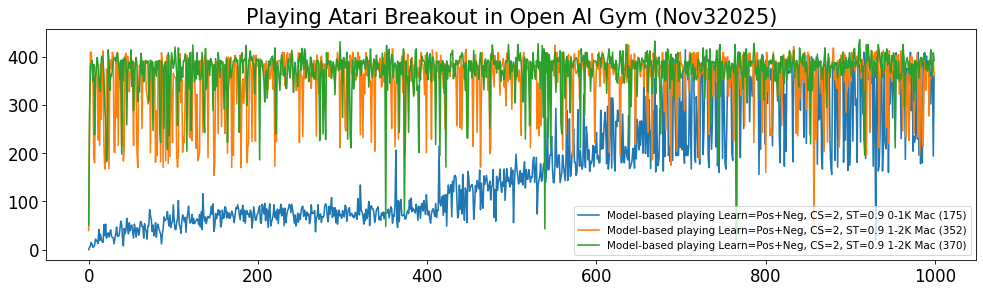

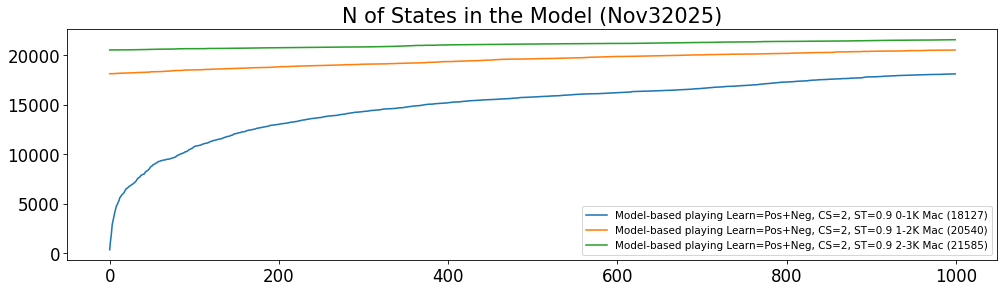

In [6]:
#st=0.9 over 1K to 2K 
#Mac: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_ST09_251112 -o=model_Nov32025_PN_CS2_ST09_251112_2K -cs=2 -lm=2python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_ST09_251112 -o=model_Nov32025_PN_CS2_ST09_251112_2K -cs=2 -lm=2
scoresSC2SS09_2K = [40.0, 253.0, 409.0, 409.0, 376.0, 355.0, 193.0, 180.0, 361.0, 379.0, 359.0, 227.0, 359.0, 216.0, 384.0, 270.0, 395.0, 412.0, 216.0, 167.0, 206.0, 374.0, 362.0, 362.0, 168.0, 371.0, 393.0, 375.0, 409.0, 401.0, 204.0, 201.0, 391.0, 274.0, 409.0, 216.0, 388.0, 352.0, 328.0, 216.0, 359.0, 184.0, 216.0, 401.0, 407.0, 365.0, 401.0, 384.0, 327.0, 361.0, 380.0, 359.0, 348.0, 216.0, 387.0, 371.0, 330.0, 205.0, 170.0, 346.0, 382.0, 370.0, 388.0, 251.0, 378.0, 371.0, 372.0, 392.0, 331.0, 320.0, 302.0, 310.0, 386.0, 201.0, 380.0, 383.0, 388.0, 376.0, 357.0, 181.0, 288.0, 196.0, 374.0, 384.0, 392.0, 182.0, 408.0, 385.0, 170.0, 360.0, 388.0, 184.0, 387.0, 403.0, 179.0, 403.0, 193.0, 392.0, 318.0, 222.0, 366.0, 359.0, 357.0, 356.0, 194.0, 171.0, 204.0, 368.0, 406.0, 305.0, 352.0, 202.0, 234.0, 222.0, 322.0, 387.0, 403.0, 368.0, 384.0, 236.0, 232.0, 409.0, 226.0, 356.0, 384.0, 382.0, 302.0, 210.0, 322.0, 184.0, 192.0, 201.0, 392.0, 369.0, 365.0, 243.0, 387.0, 403.0, 386.0, 368.0, 393.0, 191.0, 392.0, 384.0, 386.0, 389.0, 383.0, 380.0, 154.0, 178.0, 355.0, 383.0, 391.0, 241.0, 384.0, 368.0, 377.0, 255.0, 389.0, 389.0, 374.0, 241.0, 302.0, 399.0, 200.0, 399.0, 393.0, 384.0, 399.0, 170.0, 371.0, 195.0, 383.0, 403.0, 391.0, 302.0, 380.0, 343.0, 352.0, 403.0, 170.0, 321.0, 354.0, 303.0, 325.0, 374.0, 409.0, 180.0, 213.0, 220.0, 394.0, 387.0, 376.0, 224.0, 379.0, 403.0, 354.0, 225.0, 403.0, 380.0, 386.0, 387.0, 360.0, 395.0, 392.0, 378.0, 385.0, 368.0, 385.0, 313.0, 391.0, 354.0, 334.0, 380.0, 354.0, 359.0, 392.0, 380.0, 332.0, 371.0, 173.0, 391.0, 224.0, 386.0, 392.0, 392.0, 392.0, 371.0, 363.0, 409.0, 371.0, 408.0, 339.0, 383.0, 403.0, 408.0, 388.0, 388.0, 406.0, 381.0, 392.0, 365.0, 337.0, 370.0, 372.0, 330.0, 330.0, 385.0, 408.0, 222.0, 371.0, 362.0, 359.0, 234.0, 356.0, 409.0, 354.0, 367.0, 393.0, 371.0, 376.0, 364.0, 367.0, 334.0, 382.0, 384.0, 392.0, 370.0, 385.0, 235.0, 403.0, 384.0, 323.0, 356.0, 392.0, 401.0, 372.0, 385.0, 378.0, 385.0, 355.0, 382.0, 376.0, 409.0, 359.0, 385.0, 356.0, 383.0, 368.0, 384.0, 355.0, 345.0, 371.0, 380.0, 409.0, 384.0, 390.0, 211.0, 344.0, 392.0, 345.0, 352.0, 389.0, 253.0, 246.0, 371.0, 348.0, 345.0, 346.0, 403.0, 393.0, 362.0, 409.0, 385.0, 348.0, 366.0, 352.0, 363.0, 409.0, 391.0, 400.0, 238.0, 392.0, 356.0, 232.0, 364.0, 323.0, 374.0, 408.0, 360.0, 386.0, 392.0, 354.0, 347.0, 222.0, 353.0, 378.0, 394.0, 204.0, 360.0, 386.0, 391.0, 385.0, 372.0, 396.0, 384.0, 337.0, 345.0, 398.0, 348.0, 409.0, 348.0, 384.0, 360.0, 380.0, 387.0, 372.0, 346.0, 251.0, 416.0, 371.0, 348.0, 213.0, 338.0, 366.0, 384.0, 229.0, 370.0, 374.0, 367.0, 401.0, 326.0, 366.0, 409.0, 200.0, 346.0, 383.0, 405.0, 352.0, 374.0, 380.0, 349.0, 398.0, 376.0, 317.0, 383.0, 356.0, 371.0, 376.0, 361.0, 357.0, 393.0, 371.0, 409.0, 385.0, 383.0, 364.0, 321.0, 403.0, 201.0, 392.0, 354.0, 374.0, 392.0, 380.0, 229.0, 414.0, 380.0, 350.0, 381.0, 352.0, 409.0, 370.0, 388.0, 355.0, 357.0, 403.0, 364.0, 381.0, 334.0, 385.0, 251.0, 385.0, 386.0, 384.0, 381.0, 372.0, 359.0, 390.0, 381.0, 378.0, 384.0, 378.0, 374.0, 357.0, 257.0, 392.0, 378.0, 376.0, 253.0, 399.0, 249.0, 382.0, 359.0, 353.0, 409.0, 415.0, 288.0, 368.0, 386.0, 385.0, 374.0, 391.0, 385.0, 214.0, 356.0, 366.0, 404.0, 374.0, 243.0, 380.0, 381.0, 379.0, 171.0, 314.0, 409.0, 360.0, 380.0, 369.0, 388.0, 387.0, 366.0, 330.0, 380.0, 199.0, 209.0, 409.0, 389.0, 364.0, 337.0, 402.0, 379.0, 374.0, 380.0, 409.0, 374.0, 320.0, 377.0, 381.0, 388.0, 396.0, 337.0, 373.0, 298.0, 407.0, 348.0, 367.0, 396.0, 363.0, 379.0, 291.0, 379.0, 385.0, 378.0, 384.0, 353.0, 395.0, 364.0, 348.0, 372.0, 354.0, 237.0, 388.0, 392.0, 409.0, 385.0, 371.0, 380.0, 379.0, 375.0, 374.0, 391.0, 211.0, 380.0, 389.0, 380.0, 383.0, 378.0, 380.0, 381.0, 250.0, 345.0, 236.0, 381.0, 257.0, 298.0, 393.0, 401.0, 344.0, 367.0, 401.0, 384.0, 371.0, 370.0, 354.0, 384.0, 388.0, 380.0, 388.0, 392.0, 360.0, 423.0, 333.0, 409.0, 347.0, 398.0, 367.0, 384.0, 381.0, 409.0, 207.0, 409.0, 343.0, 384.0, 239.0, 388.0, 391.0, 404.0, 376.0, 331.0, 401.0, 345.0, 192.0, 384.0, 406.0, 374.0, 365.0, 367.0, 374.0, 412.0, 312.0, 352.0, 366.0, 399.0, 395.0, 370.0, 374.0, 393.0, 384.0, 378.0, 380.0, 360.0, 371.0, 389.0, 356.0, 406.0, 392.0, 359.0, 222.0, 326.0, 383.0, 381.0, 374.0, 409.0, 338.0, 374.0, 387.0, 409.0, 377.0, 345.0, 383.0, 388.0, 356.0, 355.0, 385.0, 201.0, 383.0, 398.0, 385.0, 377.0, 363.0, 378.0, 374.0, 352.0, 385.0, 374.0, 374.0, 350.0, 196.0, 358.0, 344.0, 396.0, 383.0, 373.0, 371.0, 388.0, 347.0, 395.0, 424.0, 366.0, 378.0, 404.0, 374.0, 383.0, 376.0, 406.0, 218.0, 352.0, 384.0, 399.0, 388.0, 373.0, 358.0, 380.0, 388.0, 388.0, 338.0, 380.0, 383.0, 381.0, 274.0, 243.0, 405.0, 404.0, 359.0, 360.0, 186.0, 407.0, 392.0, 374.0, 357.0, 399.0, 386.0, 359.0, 359.0, 382.0, 382.0, 374.0, 409.0, 388.0, 286.0, 383.0, 249.0, 381.0, 355.0, 373.0, 385.0, 260.0, 175.0, 352.0, 320.0, 352.0, 385.0, 359.0, 388.0, 204.0, 409.0, 388.0, 317.0, 409.0, 384.0, 384.0, 373.0, 362.0, 288.0, 359.0, 364.0, 385.0, 380.0, 330.0, 409.0, 404.0, 388.0, 407.0, 359.0, 409.0, 387.0, 359.0, 407.0, 371.0, 409.0, 189.0, 386.0, 364.0, 378.0, 374.0, 363.0, 363.0, 348.0, 402.0, 354.0, 375.0, 353.0, 239.0, 409.0, 373.0, 388.0, 357.0, 317.0, 373.0, 385.0, 393.0, 380.0, 314.0, 296.0, 388.0, 373.0, 384.0, 352.0, 398.0, 409.0, 354.0, 399.0, 384.0, 395.0, 400.0, 318.0, 381.0, 337.0, 363.0, 384.0, 369.0, 225.0, 337.0, 389.0, 374.0, 39.0, 367.0, 408.0, 379.0, 338.0, 320.0, 385.0, 404.0, 384.0, 257.0, 403.0, 387.0, 362.0, 406.0, 357.0, 408.0, 392.0, 381.0, 381.0, 389.0, 222.0, 389.0, 364.0, 392.0, 408.0, 383.0, 393.0, 337.0, 375.0, 348.0, 243.0, 378.0, 331.0, 387.0, 160.0, 409.0, 388.0, 327.0, 371.0, 236.0, 251.0, 236.0, 374.0, 409.0, 374.0, 388.0, 387.0, 387.0, 348.0, 388.0, 320.0, 362.0, 376.0, 257.0, 372.0, 404.0, 392.0, 384.0, 375.0, 373.0, 397.0, 401.0, 373.0, 409.0, 403.0, 383.0, 383.0, 421.0, 374.0, 352.0, 241.0, 388.0, 236.0, 384.0, 310.0, 364.0, 399.0, 353.0, 377.0, 346.0, 409.0, 356.0, 291.0, 371.0, 409.0, 376.0, 239.0, 360.0, 360.0, 355.0, 377.0, 35.0, 346.0, 388.0, 227.0, 364.0, 385.0, 381.0, 388.0, 352.0, 323.0, 374.0, 274.0, 203.0, 379.0, 335.0, 376.0, 223.0, 375.0, 398.0, 371.0, 380.0, 381.0, 392.0, 418.0, 352.0, 378.0, 345.0, 334.0, 392.0, 384.0, 213.0, 362.0, 403.0, 375.0, 374.0, 409.0, 348.0, 403.0, 284.0, 392.0, 337.0, 385.0, 384.0, 385.0, 348.0, 409.0, 381.0, 384.0, 374.0, 370.0, 397.0, 401.0, 390.0, 384.0, 408.0, 389.0, 355.0, 383.0, 395.0, 359.0, 330.0, 385.0, 196.0, 389.0, 380.0, 401.0, 243.0, 361.0, 388.0, 409.0, 399.0, 378.0, 409.0, 396.0, 412.0, 396.0, 413.0, 211.0, 355.0, 395.0, 398.0, 399.0, 412.0, 366.0, 389.0, 388.0, 253.0, 380.0, 220.0, 412.0, 360.0, 371.0, 348.0, 398.0, 372.0, 398.0, 372.0, 402.0, 360.0, 403.0, 404.0, 322.0, 383.0, 412.0, 371.0, 246.0, 371.0, 382.0, 330.0, 233.0, 359.0, 371.0, 226.0, 288.0, 401.0, 392.0, 399.0, 382.0, 241.0, 317.0, 366.0, 387.0, 407.0, 233.0, 374.0, 196.0, 392.0, 374.0, 225.0, 214.0, 330.0, 398.0, 330.0, 372.0, 374.0, 381.0, 277.0, 352.0, 356.0, 359.0, 391.0, 391.0, 360.0]
stepssSC2SS09_2K = [4125, 7953, 9198, 9202, 9303, 8280, 7153, 7371, 8536, 8477, 8031, 7546, 8630, 7421, 8639, 8178, 8325, 8607, 7421, 7423, 7368, 9234, 8519, 8643, 7522, 8189, 8712, 8032, 9202, 8891, 7568, 7496, 8824, 8146, 9198, 7421, 8387, 7705, 7554, 7421, 8634, 7311, 7421, 8521, 8534, 8659, 8466, 8851, 8587, 8270, 8838, 8577, 8457, 7460, 8772, 8412, 8668, 7700, 7162, 8006, 8143, 8086, 8275, 7424, 8583, 8281, 8264, 8498, 8560, 8482, 8053, 7766, 8571, 7473, 8410, 8398, 8387, 8689, 7856, 7359, 8325, 7472, 9234, 8442, 8498, 7180, 9212, 8136, 7162, 8681, 8177, 7271, 8400, 8678, 7360, 8912, 7128, 8201, 7744, 7727, 8160, 8634, 8068, 18000, 7523, 7149, 7322, 8403, 8430, 8377, 8766, 7446, 7630, 7703, 7878, 8355, 8911, 8757, 8368, 7377, 7740, 9198, 7602, 7919, 8297, 8194, 8053, 7316, 7698, 7267, 7222, 7518, 8502, 8164, 8655, 7924, 8782, 8919, 8575, 8670, 8477, 7338, 8272, 8502, 8626, 8249, 8381, 18000, 6526, 7596, 8276, 8921, 8464, 7743, 8800, 8035, 8709, 7360, 8390, 9012, 9234, 7834, 8057, 8550, 7389, 8835, 8328, 8804, 8530, 7162, 8099, 7210, 8381, 8490, 8654, 8433, 8838, 7908, 7986, 8911, 7162, 7508, 8161, 7594, 8232, 9235, 9194, 7215, 7460, 7382, 8510, 8314, 8047, 7468, 8784, 8915, 8255, 7844, 8912, 8840, 8260, 8923, 8062, 8453, 8502, 8321, 8140, 9224, 8136, 8466, 8220, 8159, 8316, 8496, 7715, 7840, 8498, 8842, 7870, 8395, 7088, 8732, 8007, 8664, 8506, 8720, 8272, 7967, 8168, 9202, 8240, 8542, 7950, 8381, 8915, 8530, 8615, 8271, 8772, 8469, 8861, 8288, 8170, 8124, 8456, 8676, 8015, 8137, 8534, 7690, 8708, 8643, 8366, 8059, 8617, 9206, 8161, 8476, 8578, 8395, 8265, 8293, 8449, 8079, 8190, 8847, 8816, 8453, 8856, 7837, 8915, 8939, 7871, 8375, 8446, 8892, 8402, 8641, 8803, 8518, 8262, 8530, 8689, 9202, 7840, 8852, 8488, 8381, 8530, 8847, 8362, 8526, 8426, 8838, 9202, 8804, 8913, 7850, 8151, 8865, 8377, 7697, 8316, 7970, 7969, 7965, 8170, 8358, 8308, 8915, 8762, 8647, 9198, 8852, 8457, 8708, 8332, 8353, 9202, 8357, 8648, 8184, 8270, 8375, 7737, 8205, 7740, 8360, 8542, 8513, 8264, 8820, 8012, 8283, 7727, 8326, 8245, 8390, 7441, 8519, 8218, 8828, 9030, 8405, 8882, 8442, 8181, 8090, 9090, 8170, 9213, 8174, 8670, 8677, 8842, 8395, 18000, 8306, 7420, 9093, 8094, 8238, 7460, 8704, 8140, 8438, 7770, 8195, 8420, 8277, 8803, 7762, 8220, 9062, 7470, 8304, 8381, 9410, 7697, 9231, 8265, 8427, 8510, 9018, 8462, 8573, 7919, 8396, 8689, 8239, 8557, 8803, 8395, 9198, 8483, 8692, 7950, 8532, 8915, 7518, 8272, 8163, 8560, 8769, 8312, 7783, 8866, 8555, 8452, 8448, 8266, 9198, 8778, 8383, 8184, 8129, 8911, 8631, 8496, 8184, 8079, 7420, 8697, 8500, 8637, 8582, 8465, 8629, 8588, 8513, 8267, 8666, 8259, 8735, 8220, 8122, 8266, 8247, 8693, 7970, 8546, 7382, 8695, 8629, 8035, 8954, 8687, 8307, 9220, 8222, 8852, 8517, 9000, 8852, 7622, 8311, 8576, 8745, 8566, 7918, 8630, 8500, 8336, 7226, 7722, 9198, 8490, 8265, 8135, 8478, 8768, 8164, 8676, 8842, 7302, 7350, 9202, 8535, 8293, 8177, 8840, 8336, 8142, 8529, 9217, 8291, 8482, 8352, 8496, 8177, 8882, 8177, 8435, 8360, 8760, 8373, 8307, 8413, 8075, 8340, 8314, 8275, 8483, 8247, 8438, 8326, 8487, 8194, 8457, 8461, 8163, 7492, 8962, 8504, 9198, 8852, 8703, 8312, 8578, 8027, 8360, 8736, 7850, 8978, 8535, 8265, 8377, 8263, 8840, 8960, 7998, 8369, 7846, 8960, 8313, 8354, 8567, 8649, 8345, 8586, 8803, 8670, 8399, 8248, 8163, 8442, 9114, 8400, 8958, 8266, 8681, 8657, 7902, 9217, 8283, 8902, 8277, 8639, 8109, 9202, 7540, 9206, 8296, 8388, 7863, 8958, 8845, 8469, 8744, 8317, 8803, 8358, 7227, 8670, 8675, 8360, 8655, 8281, 8485, 8615, 7902, 8458, 8658, 8407, 8996, 8280, 8583, 8880, 8813, 8815, 8265, 8681, 8099, 8524, 8484, 8995, 8769, 18000, 7707, 7725, 8577, 8444, 8481, 9198, 8142, 8544, 8365, 9198, 8549, 8289, 8381, 8275, 8454, 8398, 8129, 7477, 8381, 8906, 8860, 8717, 8176, 8243, 8683, 8686, 8679, 8481, 8678, 8467, 7324, 8220, 7842, 8886, 8377, 8457, 8528, 8185, 7873, 8393, 8786, 8658, 8259, 8465, 8331, 8385, 8689, 8995, 7605, 8160, 8388, 8798, 8958, 8545, 8224, 8265, 8670, 8578, 8452, 8316, 9017, 8834, 7781, 7903, 8519, 8654, 8027, 8042, 7290, 8760, 8836, 8021, 8528, 8546, 8496, 8629, 8629, 8927, 8194, 8560, 9194, 8387, 7446, 8602, 8026, 8766, 8397, 8461, 8532, 8038, 7254, 8393, 8482, 7696, 8852, 8031, 9118, 7537, 9194, 8962, 8409, 9202, 8804, 8808, 8465, 8731, 8307, 8027, 8293, 8133, 8838, 8182, 9194, 8469, 8585, 8737, 8634, 9716, 8583, 8630, 8687, 8090, 9198, 7273, 8747, 8186, 8263, 8583, 8733, 8733, 8461, 9194, 8163, 8879, 7904, 7855, 9202, 8541, 9114, 8220, 8409, 8541, 8856, 8426, 8555, 7666, 7597, 8273, 8465, 8368, 8156, 8701, 9202, 8161, 8738, 8670, 8483, 8534, 8046, 8520, 8177, 8518, 8268, 8127, 7670, 8177, 8301, 8379, 4892, 8248, 9196, 8296, 8028, 8482, 8136, 8314, 8670, 8367, 8915, 8591, 8643, 8675, 8224, 9108, 8761, 8451, 8432, 8309, 7698, 8692, 8366, 8276, 9200, 8381, 8590, 8173, 8716, 8330, 7970, 8803, 8549, 8865, 18000, 9202, 8581, 8037, 8404, 7888, 7424, 7900, 8560, 9198, 8513, 9112, 8400, 8623, 8377, 8962, 8481, 8731, 8288, 8062, 8556, 8751, 8296, 8670, 8117, 8350, 8531, 9608, 8461, 8610, 8915, 8377, 8377, 8906, 8335, 7700, 7743, 8962, 7858, 8670, 7396, 8198, 8802, 7904, 8096, 8238, 9202, 7919, 8206, 8086, 9202, 8184, 7855, 8062, 8398, 8457, 8425, 3563, 8545, 9122, 7608, 8629, 8856, 8109, 8581, 8270, 7961, 9234, 8146, 7396, 8292, 7769, 8571, 7499, 8887, 8906, 8088, 8932, 8582, 8549, 8873, 7697, 8803, 8001, 7884, 8266, 8847, 7445, 8727, 8482, 8883, 8565, 8623, 8461, 8915, 8210, 8549, 8409, 8787, 8372, 8129, 8377, 9202, 8448, 8442, 8468, 8220, 8977, 8649, 9085, 8368, 9112, 8656, 8397, 8385, 8893, 8630, 8167, 8703, 7336, 9012, 8525, 8649, 7918, 8235, 8581, 9198, 8738, 8803, 9202, 8483, 8609, 8807, 9753, 7604, 8398, 8483, 8898, 8825, 8650, 8533, 8553, 8962, 7962, 8408, 7505, 8609, 8205, 8703, 8377, 9094, 8360, 8758, 8572, 8836, 7891, 8915, 8816, 7730, 8294, 9412, 8395, 7886, 8090, 8717, 7939, 7840, 8629, 8400, 7304, 8306, 9205, 8296, 8835, 8207, 7743, 8405, 8609, 8697, 9124, 8123, 8336, 7313, 8761, 8543, 7674, 7702, 8680, 8602, 8228, 8201, 9507, 8490, 8052, 7696, 7919, 8634, 9230, 9234, 8681]
livessSC2SS09_2K = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesSC2SS09_2K = [131, 25, 11, 6, 115, 48, 20, 8, 137, 10, 26, 11, 18, 19, 26, 11, 28, 22, 39, 23, 23, 121, 19, 26, 14, 46, 41, 20, 8, 37, 27, 19, 26, 45, 11, 18, 10, 6, 22, 19, 28, 16, 23, 62, 83, 7, 30, 15, 70, 22, 17, 11, 9, 17, 52, 15, 26, 14, 13, 12, 21, 16, 34, 24, 77, 118, 24, 22, 36, 30, 38, 63, 38, 31, 31, 66, 13, 35, 47, 28, 19, 21, 9, 22, 34, 20, 211, 9, 7, 38, 34, 24, 17, 23, 14, 11, 36, 14, 24, 15, 27, 27, 12, 47, 8, 15, 10, 31, 42, 41, 37, 24, 18, 16, 34, 18, 8, 15, 12, 25, 17, 13, 23, 40, 26, 23, 34, 33, 31, 27, 24, 8, 10, 69, 15, 28, 31, 6, 18, 28, 48, 17, 12, 58, 31, 15, 30, 26, 16, 25, 10, 119, 13, 19, 9, 90, 21, 23, 23, 20, 10, 21, 18, 12, 19, 60, 16, 13, 37, 16, 27, 32, 9, 45, 32, 33, 10, 17, 30, 11, 14, 17, 26, 29, 71, 8, 17, 19, 12, 14, 52, 21, 16, 20, 20, 11, 13, 37, 17, 12, 18, 25, 18, 7, 16, 24, 29, 14, 36, 15, 13, 22, 34, 35, 10, 8, 13, 6, 10, 41, 17, 36, 11, 19, 6, 34, 7, 22, 33, 6, 30, 14, 25, 8, 9, 15, 36, 15, 36, 17, 24, 30, 21, 46, 28, 31, 10, 37, 6, 22, 16, 19, 40, 11, 26, 7, 30, 15, 46, 29, 24, 21, 32, 24, 15, 20, 26, 16, 7, 29, 12, 15, 11, 46, 21, 38, 29, 16, 94, 25, 29, 32, 8, 7, 10, 9, 35, 15, 20, 24, 25, 33, 49, 9, 9, 18, 29, 18, 14, 24, 34, 45, 10, 10, 20, 30, 12, 9, 30, 11, 25, 13, 6, 15, 16, 20, 13, 26, 7, 18, 27, 31, 28, 40, 44, 18, 23, 32, 10, 39, 11, 22, 18, 36, 13, 15, 42, 21, 29, 35, 22, 54, 29, 15, 35, 9, 21, 36, 20, 7, 44, 9, 18, 18, 21, 38, 42, 44, 24, 13, 12, 8, 15, 23, 23, 13, 14, 32, 48, 25, 23, 14, 38, 27, 13, 43, 11, 36, 18, 7, 32, 29, 18, 26, 46, 42, 5, 31, 17, 26, 46, 40, 48, 20, 20, 13, 20, 27, 10, 16, 22, 26, 14, 39, 14, 17, 41, 34, 24, 35, 21, 10, 9, 25, 9, 28, 9, 37, 28, 14, 43, 21, 37, 11, 40, 15, 26, 12, 12, 26, 8, 10, 15, 18, 19, 18, 35, 38, 20, 26, 17, 24, 36, 30, 54, 26, 16, 26, 26, 22, 12, 29, 49, 15, 18, 30, 18, 16, 30, 40, 28, 22, 48, 40, 27, 11, 50, 18, 32, 33, 27, 42, 10, 24, 16, 13, 6, 38, 32, 19, 25, 36, 32, 12, 21, 26, 39, 43, 24, 20, 17, 19, 12, 20, 11, 29, 19, 22, 18, 17, 25, 33, 6, 20, 16, 22, 20, 30, 10, 20, 31, 18, 19, 14, 14, 15, 10, 8, 36, 27, 16, 17, 18, 18, 13, 14, 12, 10, 21, 17, 39, 10, 27, 15, 26, 33, 19, 15, 25, 29, 33, 6, 26, 13, 17, 14, 44, 22, 17, 22, 12, 47, 18, 23, 22, 35, 23, 22, 34, 11, 34, 15, 30, 25, 28, 13, 28, 26, 33, 27, 11, 13, 30, 8, 53, 25, 19, 15, 16, 22, 12, 11, 20, 22, 23, 27, 26, 52, 45, 33, 10, 18, 16, 23, 25, 28, 16, 25, 12, 39, 15, 34, 26, 9, 29, 20, 22, 8, 58, 16, 13, 15, 28, 10, 7, 12, 21, 13, 7, 12, 33, 15, 19, 17, 23, 10, 16, 22, 36, 27, 34, 7, 10, 36, 13, 23, 67, 18, 58, 10, 12, 15, 31, 15, 16, 11, 6, 15, 20, 20, 20, 37, 10, 11, 22, 12, 12, 9, 17, 14, 9, 34, 25, 27, 22, 52, 20, 15, 30, 8, 23, 9, 11, 13, 23, 94, 10, 17, 6, 23, 22, 8, 15, 17, 14, 16, 63, 19, 14, 10, 22, 16, 12, 9, 12, 14, 7, 8, 31, 6, 13, 13, 22, 40, 21, 10, 26, 18, 27, 17, 9, 14, 22, 25, 20, 61, 18, 24, 32, 18, 19, 23, 30, 12, 10, 25, 19, 14, 17, 11, 13, 26, 26, 27, 7, 10, 32, 23, 19, 10, 5, 9, 7, 31, 22, 8, 11, 16, 18, 36, 7, 20, 18, 11, 18, 47, 28, 23, 15, 10, 23, 12, 12, 14, 17, 31, 39, 22, 42, 16, 16, 21, 19, 24, 13, 22, 10, 10, 18, 13, 11, 16, 18, 33, 21, 9, 26, 26, 26, 6, 12, 6, 38, 11, 14, 15, 10, 16, 13, 39, 8, 5, 14, 18, 27, 30, 17, 48, 18, 12, 31, 22, 17, 10, 16, 12, 12, 31, 10, 12, 8, 26, 22, 12, 14, 12, 17, 157, 11, 12, 5, 14, 13, 27, 9, 6, 19, 11, 25, 12, 20, 28, 22, 12, 13, 30, 10, 5, 15, 28, 6, 24, 22, 24, 23, 15, 23, 161, 41, 14, 20, 22, 12, 16, 18, 24, 19, 18, 23, 24, 17, 15, 24, 27, 36, 24, 12, 13, 13, 11, 17, 32, 11, 12, 9, 22, 19, 21, 17, 22, 8, 23, 16, 5, 12, 23, 18, 30, 26, 12, 18, 15, 5, 22, 16, 42, 22, 29, 15, 10, 15, 18, 16, 7, 11, 34, 7, 127, 10, 11, 12, 13, 16, 28, 16, 13, 11, 17, 6, 6, 11, 20, 20, 51, 14, 11, 17, 23, 22, 17, 26, 11, 19, 27, 10, 47, 6, 24, 13, 14, 17, 28, 9, 26, 8, 18, 16, 20, 27, 12, 23, 21, 26, 6, 37, 13, 34, 19, 15, 21, 20, 25, 16, 22, 5, 24, 20, 9, 19, 50, 19, 9, 23, 22, 16, 10, 39, 19, 22, 14, 8, 43, 43, 12, 5, 10, 18, 14, 7, 9]
statesSC2SS09_2K = [18146, 18148, 18150, 18150, 18150, 18155, 18157, 18157, 18180, 18180, 18189, 18189, 18192, 18193, 18194, 18197, 18198, 18200, 18204, 18204, 18213, 18224, 18226, 18232, 18233, 18238, 18238, 18244, 18244, 18245, 18251, 18252, 18254, 18267, 18268, 18268, 18270, 18270, 18273, 18275, 18285, 18285, 18288, 18290, 18294, 18295, 18301, 18309, 18328, 18338, 18341, 18341, 18341, 18342, 18343, 18354, 18354, 18358, 18358, 18360, 18364, 18366, 18368, 18368, 18378, 18390, 18398, 18398, 18399, 18404, 18406, 18416, 18426, 18434, 18449, 18453, 18468, 18468, 18469, 18471, 18473, 18473, 18473, 18475, 18475, 18477, 18495, 18497, 18497, 18515, 18518, 18518, 18519, 18519, 18520, 18524, 18524, 18526, 18526, 18527, 18531, 18537, 18538, 18540, 18540, 18540, 18542, 18544, 18546, 18553, 18561, 18578, 18581, 18582, 18582, 18585, 18585, 18587, 18587, 18587, 18600, 18600, 18605, 18605, 18610, 18611, 18612, 18618, 18621, 18624, 18627, 18628, 18629, 18632, 18634, 18635, 18651, 18652, 18653, 18656, 18656, 18662, 18662, 18671, 18673, 18673, 18673, 18678, 18678, 18679, 18679, 18692, 18694, 18694, 18694, 18698, 18712, 18713, 18716, 18718, 18718, 18718, 18721, 18722, 18723, 18727, 18732, 18733, 18749, 18749, 18750, 18750, 18751, 18752, 18758, 18766, 18766, 18767, 18769, 18769, 18769, 18770, 18774, 18775, 18782, 18783, 18783, 18784, 18784, 18785, 18794, 18799, 18800, 18802, 18818, 18819, 18821, 18824, 18837, 18837, 18837, 18844, 18856, 18856, 18856, 18856, 18857, 18858, 18858, 18865, 18866, 18867, 18870, 18886, 18891, 18891, 18891, 18891, 18891, 18896, 18906, 18913, 18915, 18918, 18918, 18930, 18930, 18930, 18932, 18932, 18934, 18935, 18938, 18939, 18940, 18941, 18947, 18947, 18952, 18953, 18956, 18959, 18960, 18963, 18963, 18967, 18971, 18971, 18972, 18974, 18974, 18978, 18986, 18986, 18988, 18988, 18991, 18991, 18993, 18996, 18997, 18999, 19000, 19003, 19003, 19010, 19011, 19012, 19013, 19016, 19017, 19025, 19025, 19026, 19027, 19035, 19046, 19053, 19053, 19054, 19055, 19063, 19063, 19063, 19063, 19063, 19068, 19068, 19069, 19071, 19071, 19078, 19085, 19086, 19086, 19087, 19089, 19105, 19106, 19107, 19108, 19111, 19112, 19112, 19114, 19114, 19116, 19116, 19121, 19121, 19123, 19125, 19125, 19125, 19125, 19127, 19128, 19130, 19130, 19130, 19132, 19133, 19134, 19138, 19141, 19142, 19143, 19151, 19151, 19160, 19160, 19160, 19160, 19168, 19168, 19170, 19170, 19180, 19183, 19185, 19187, 19195, 19198, 19198, 19199, 19201, 19202, 19205, 19205, 19205, 19206, 19209, 19210, 19210, 19211, 19212, 19213, 19230, 19230, 19233, 19233, 19233, 19233, 19236, 19240, 19241, 19241, 19245, 19251, 19252, 19252, 19262, 19265, 19265, 19268, 19288, 19288, 19288, 19298, 19298, 19300, 19303, 19305, 19305, 19306, 19311, 19318, 19328, 19329, 19329, 19346, 19346, 19349, 19364, 19365, 19371, 19372, 19373, 19374, 19374, 19374, 19375, 19375, 19379, 19379, 19379, 19380, 19391, 19398, 19399, 19406, 19408, 19408, 19411, 19414, 19414, 19414, 19423, 19427, 19427, 19432, 19433, 19443, 19445, 19447, 19455, 19456, 19460, 19460, 19465, 19466, 19466, 19467, 19467, 19471, 19472, 19473, 19476, 19487, 19487, 19487, 19489, 19502, 19509, 19510, 19514, 19517, 19519, 19519, 19526, 19527, 19527, 19537, 19538, 19538, 19561, 19562, 19564, 19565, 19573, 19579, 19583, 19594, 19599, 19602, 19602, 19602, 19603, 19604, 19609, 19610, 19611, 19616, 19616, 19618, 19618, 19618, 19618, 19619, 19619, 19622, 19624, 19624, 19625, 19625, 19627, 19627, 19628, 19634, 19634, 19635, 19635, 19636, 19636, 19637, 19637, 19642, 19643, 19645, 19649, 19651, 19652, 19652, 19652, 19653, 19666, 19667, 19671, 19671, 19671, 19672, 19673, 19680, 19681, 19681, 19681, 19681, 19681, 19681, 19685, 19685, 19691, 19694, 19694, 19696, 19696, 19696, 19696, 19697, 19698, 19705, 19706, 19707, 19708, 19710, 19710, 19712, 19712, 19712, 19722, 19724, 19730, 19732, 19733, 19735, 19736, 19742, 19742, 19742, 19742, 19744, 19749, 19753, 19753, 19753, 19758, 19767, 19767, 19767, 19769, 19770, 19770, 19786, 19787, 19791, 19802, 19805, 19807, 19814, 19816, 19816, 19816, 19821, 19821, 19827, 19829, 19829, 19830, 19830, 19832, 19833, 19833, 19834, 19836, 19837, 19838, 19841, 19858, 19859, 19862, 19869, 19869, 19869, 19870, 19870, 19872, 19886, 19886, 19886, 19887, 19887, 19887, 19889, 19889, 19890, 19891, 19892, 19892, 19896, 19896, 19896, 19896, 19897, 19899, 19900, 19901, 19904, 19907, 19907, 19907, 19916, 19916, 19916, 19919, 19927, 19927, 19927, 19927, 19929, 19933, 19933, 19937, 19937, 19941, 19942, 19942, 19945, 19947, 19954, 19959, 19960, 19961, 19961, 19961, 19961, 19961, 19961, 19962, 19963, 19963, 19963, 19968, 19969, 19970, 19972, 19973, 19976, 19976, 19976, 19977, 19977, 19979, 19984, 19985, 19991, 19993, 19993, 19993, 19995, 19998, 19998, 19998, 19998, 20002, 20003, 20013, 20013, 20014, 20014, 20015, 20015, 20017, 20020, 20020, 20028, 20029, 20038, 20044, 20044, 20044, 20044, 20045, 20045, 20045, 20046, 20046, 20047, 20048, 20048, 20049, 20049, 20049, 20050, 20067, 20068, 20068, 20069, 20069, 20070, 20072, 20072, 20072, 20074, 20075, 20083, 20083, 20083, 20086, 20088, 20089, 20090, 20092, 20098, 20098, 20099, 20099, 20100, 20100, 20101, 20102, 20103, 20104, 20104, 20119, 20119, 20119, 20122, 20122, 20124, 20126, 20126, 20126, 20126, 20127, 20127, 20128, 20128, 20129, 20129, 20129, 20129, 20130, 20132, 20132, 20132, 20133, 20134, 20134, 20136, 20137, 20138, 20138, 20138, 20139, 20139, 20139, 20149, 20151, 20153, 20154, 20154, 20154, 20154, 20157, 20162, 20168, 20168, 20168, 20172, 20173, 20173, 20173, 20174, 20176, 20177, 20178, 20178, 20184, 20184, 20192, 20193, 20193, 20196, 20196, 20197, 20198, 20199, 20199, 20199, 20201, 20201, 20201, 20201, 20201, 20216, 20225, 20226, 20234, 20234, 20234, 20235, 20237, 20237, 20238, 20239, 20239, 20239, 20245, 20246, 20248, 20248, 20256, 20260, 20260, 20261, 20262, 20263, 20275, 20276, 20276, 20276, 20276, 20277, 20280, 20280, 20280, 20281, 20281, 20285, 20287, 20287, 20287, 20290, 20290, 20290, 20290, 20291, 20291, 20291, 20292, 20292, 20292, 20297, 20305, 20305, 20307, 20308, 20340, 20347, 20348, 20348, 20349, 20349, 20349, 20350, 20350, 20351, 20354, 20355, 20357, 20357, 20358, 20358, 20359, 20359, 20371, 20371, 20372, 20373, 20373, 20373, 20373, 20373, 20374, 20374, 20374, 20378, 20378, 20381, 20399, 20399, 20399, 20400, 20400, 20400, 20400, 20400, 20401, 20413, 20414, 20414, 20415, 20415, 20415, 20420, 20421, 20422, 20423, 20424, 20426, 20426, 20426, 20427, 20428, 20428, 20430, 20431, 20437, 20437, 20437, 20437, 20437, 20437, 20443, 20443, 20443, 20443, 20443, 20443, 20443, 20443, 20443, 20445, 20450, 20450, 20450, 20450, 20453, 20454, 20462, 20465, 20465, 20466, 20481, 20481, 20481, 20483, 20483, 20483, 20483, 20483, 20483, 20484, 20485, 20485, 20485, 20485, 20485, 20486, 20486, 20486, 20486, 20499, 20499, 20499, 20507, 20509, 20514, 20514, 20515, 20517, 20517, 20517, 20518, 20518, 20518, 20519, 20520, 20522, 20522, 20522, 20523, 20523, 20523, 20523, 20523, 20526, 20529, 20530, 20530, 20530, 20533, 20537, 20538, 20538, 20538, 20539, 20539, 20539, 20540]

#Mac: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_ST09_251112_2K -o=model_Nov32025_PN_CS2_ST09_251112_3K -cs=2 -lm=2python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_ST09_251112_2K -o=model_Nov32025_PN_CS2_ST09_251112_3K -cs=2 -lm=2
#model=model_Nov32025_PN_CS2_ST09_251112_2K; states=20540; games=1000; steps=15295832
count_threshold=2; state_similarity=0.9; transition_utility=0; transition_count=1
scoresSC2SS09_3K = [51.0, 284.0, 379.0, 385.0, 392.0, 349.0, 384.0, 238.0, 355.0, 374.0, 398.0, 383.0, 359.0, 328.0, 348.0, 397.0, 401.0, 393.0, 360.0, 296.0, 269.0, 182.0, 188.0, 414.0, 392.0, 330.0, 363.0, 359.0, 373.0, 390.0, 396.0, 398.0, 390.0, 402.0, 407.0, 391.0, 378.0, 352.0, 392.0, 198.0, 394.0, 350.0, 398.0, 396.0, 390.0, 259.0, 371.0, 378.0, 388.0, 376.0, 414.0, 338.0, 391.0, 288.0, 371.0, 378.0, 398.0, 385.0, 306.0, 338.0, 327.0, 385.0, 407.0, 363.0, 391.0, 348.0, 373.0, 391.0, 391.0, 386.0, 391.0, 307.0, 352.0, 393.0, 379.0, 390.0, 247.0, 377.0, 364.0, 390.0, 359.0, 391.0, 374.0, 392.0, 247.0, 222.0, 391.0, 385.0, 377.0, 251.0, 383.0, 390.0, 363.0, 208.0, 408.0, 236.0, 338.0, 371.0, 408.0, 391.0, 376.0, 385.0, 420.0, 391.0, 364.0, 257.0, 418.0, 327.0, 395.0, 350.0, 378.0, 357.0, 391.0, 391.0, 406.0, 391.0, 204.0, 381.0, 397.0, 333.0, 408.0, 247.0, 350.0, 424.0, 388.0, 348.0, 391.0, 354.0, 408.0, 363.0, 391.0, 352.0, 353.0, 359.0, 409.0, 354.0, 273.0, 243.0, 417.0, 333.0, 352.0, 391.0, 391.0, 361.0, 396.0, 391.0, 378.0, 288.0, 383.0, 330.0, 396.0, 338.0, 354.0, 408.0, 390.0, 357.0, 392.0, 390.0, 384.0, 378.0, 291.0, 383.0, 330.0, 395.0, 222.0, 330.0, 356.0, 395.0, 356.0, 366.0, 377.0, 391.0, 390.0, 398.0, 398.0, 389.0, 393.0, 350.0, 243.0, 383.0, 397.0, 408.0, 366.0, 391.0, 395.0, 391.0, 423.0, 298.0, 359.0, 391.0, 397.0, 412.0, 392.0, 399.0, 383.0, 385.0, 323.0, 371.0, 396.0, 391.0, 393.0, 395.0, 186.0, 392.0, 391.0, 390.0, 370.0, 352.0, 306.0, 364.0, 371.0, 314.0, 373.0, 391.0, 381.0, 395.0, 396.0, 401.0, 385.0, 371.0, 418.0, 240.0, 374.0, 388.0, 377.0, 353.0, 330.0, 387.0, 404.0, 389.0, 360.0, 364.0, 378.0, 334.0, 334.0, 386.0, 395.0, 369.0, 356.0, 392.0, 413.0, 392.0, 326.0, 374.0, 388.0, 366.0, 360.0, 338.0, 397.0, 390.0, 407.0, 371.0, 417.0, 391.0, 374.0, 416.0, 409.0, 357.0, 391.0, 378.0, 348.0, 359.0, 399.0, 397.0, 359.0, 385.0, 354.0, 367.0, 352.0, 392.0, 391.0, 391.0, 385.0, 226.0, 357.0, 391.0, 366.0, 240.0, 374.0, 324.0, 228.0, 408.0, 382.0, 391.0, 391.0, 383.0, 391.0, 355.0, 371.0, 389.0, 379.0, 321.0, 377.0, 395.0, 386.0, 371.0, 373.0, 431.0, 374.0, 393.0, 274.0, 398.0, 397.0, 377.0, 377.0, 409.0, 229.0, 390.0, 381.0, 235.0, 211.0, 333.0, 391.0, 333.0, 357.0, 398.0, 391.0, 360.0, 391.0, 385.0, 374.0, 391.0, 361.0, 391.0, 385.0, 394.0, 385.0, 374.0, 399.0, 399.0, 381.0, 337.0, 385.0, 416.0, 373.0, 356.0, 374.0, 395.0, 391.0, 359.0, 403.0, 374.0, 384.0, 385.0, 356.0, 359.0, 359.0, 407.0, 363.0, 383.0, 381.0, 48.0, 423.0, 330.0, 403.0, 415.0, 345.0, 384.0, 404.0, 392.0, 357.0, 381.0, 387.0, 378.0, 345.0, 391.0, 377.0, 243.0, 388.0, 364.0, 390.0, 360.0, 416.0, 74.0, 243.0, 391.0, 348.0, 359.0, 243.0, 371.0, 371.0, 395.0, 365.0, 350.0, 320.0, 345.0, 412.0, 416.0, 330.0, 339.0, 201.0, 377.0, 352.0, 390.0, 401.0, 392.0, 390.0, 390.0, 371.0, 365.0, 408.0, 352.0, 391.0, 406.0, 383.0, 348.0, 399.0, 399.0, 385.0, 369.0, 218.0, 391.0, 390.0, 388.0, 391.0, 195.0, 385.0, 370.0, 392.0, 387.0, 324.0, 382.0, 171.0, 391.0, 354.0, 381.0, 370.0, 369.0, 406.0, 405.0, 413.0, 354.0, 385.0, 359.0, 392.0, 384.0, 388.0, 385.0, 391.0, 401.0, 398.0, 408.0, 404.0, 377.0, 385.0, 330.0, 389.0, 232.0, 231.0, 392.0, 390.0, 370.0, 391.0, 356.0, 366.0, 413.0, 365.0, 360.0, 391.0, 381.0, 374.0, 353.0, 391.0, 408.0, 385.0, 360.0, 381.0, 331.0, 390.0, 395.0, 357.0, 389.0, 393.0, 388.0, 251.0, 404.0, 396.0, 424.0, 401.0, 383.0, 391.0, 388.0, 366.0, 392.0, 375.0, 376.0, 391.0, 349.0, 370.0, 371.0, 359.0, 352.0, 381.0, 391.0, 389.0, 394.0, 425.0, 392.0, 353.0, 391.0, 369.0, 378.0, 389.0, 370.0, 304.0, 398.0, 359.0, 425.0, 400.0, 391.0, 408.0, 389.0, 357.0, 306.0, 373.0, 399.0, 229.0, 393.0, 395.0, 389.0, 354.0, 257.0, 389.0, 374.0, 354.0, 408.0, 383.0, 363.0, 353.0, 391.0, 378.0, 427.0, 374.0, 389.0, 333.0, 380.0, 423.0, 274.0, 416.0, 43.0, 408.0, 368.0, 408.0, 233.0, 404.0, 390.0, 208.0, 391.0, 371.0, 391.0, 390.0, 409.0, 326.0, 397.0, 391.0, 393.0, 389.0, 412.0, 261.0, 240.0, 408.0, 409.0, 374.0, 314.0, 391.0, 400.0, 359.0, 391.0, 360.0, 284.0, 397.0, 380.0, 377.0, 391.0, 391.0, 395.0, 398.0, 395.0, 377.0, 359.0, 385.0, 211.0, 416.0, 391.0, 391.0, 403.0, 279.0, 409.0, 385.0, 408.0, 378.0, 391.0, 382.0, 328.0, 375.0, 358.0, 378.0, 391.0, 391.0, 391.0, 385.0, 380.0, 405.0, 399.0, 398.0, 377.0, 400.0, 404.0, 405.0, 392.0, 374.0, 385.0, 324.0, 390.0, 404.0, 416.0, 386.0, 399.0, 377.0, 409.0, 375.0, 384.0, 373.0, 392.0, 349.0, 345.0, 370.0, 381.0, 412.0, 397.0, 364.0, 412.0, 352.0, 345.0, 370.0, 425.0, 425.0, 357.0, 381.0, 215.0, 374.0, 297.0, 392.0, 392.0, 384.0, 374.0, 391.0, 388.0, 317.0, 388.0, 397.0, 391.0, 371.0, 384.0, 397.0, 391.0, 391.0, 376.0, 408.0, 390.0, 412.0, 326.0, 392.0, 412.0, 381.0, 391.0, 323.0, 374.0, 394.0, 432.0, 323.0, 393.0, 389.0, 385.0, 399.0, 322.0, 240.0, 390.0, 356.0, 391.0, 391.0, 349.0, 409.0, 352.0, 416.0, 409.0, 388.0, 334.0, 405.0, 352.0, 398.0, 359.0, 312.0, 381.0, 405.0, 388.0, 408.0, 348.0, 389.0, 359.0, 356.0, 364.0, 370.0, 369.0, 383.0, 392.0, 367.0, 389.0, 352.0, 390.0, 382.0, 405.0, 363.0, 370.0, 385.0, 349.0, 377.0, 359.0, 352.0, 357.0, 395.0, 392.0, 379.0, 367.0, 370.0, 373.0, 418.0, 385.0, 314.0, 384.0, 414.0, 391.0, 393.0, 352.0, 416.0, 263.0, 390.0, 385.0, 390.0, 388.0, 371.0, 385.0, 413.0, 391.0, 183.0, 414.0, 425.0, 318.0, 390.0, 381.0, 353.0, 359.0, 380.0, 389.0, 375.0, 352.0, 385.0, 391.0, 356.0, 374.0, 386.0, 384.0, 367.0, 390.0, 425.0, 20.0, 363.0, 407.0, 410.0, 377.0, 408.0, 364.0, 366.0, 333.0, 409.0, 375.0, 357.0, 416.0, 304.0, 364.0, 390.0, 391.0, 380.0, 391.0, 388.0, 390.0, 427.0, 408.0, 365.0, 377.0, 351.0, 391.0, 370.0, 311.0, 388.0, 396.0, 370.0, 401.0, 310.0, 384.0, 353.0, 378.0, 374.0, 357.0, 391.0, 385.0, 393.0, 385.0, 391.0, 404.0, 382.0, 349.0, 391.0, 352.0, 308.0, 374.0, 387.0, 366.0, 400.0, 380.0, 401.0, 353.0, 344.0, 392.0, 395.0, 352.0, 392.0, 377.0, 412.0, 391.0, 367.0, 387.0, 383.0, 413.0, 356.0, 377.0, 392.0, 391.0, 367.0, 337.0, 418.0, 391.0, 391.0, 385.0, 405.0, 406.0, 388.0, 368.0, 389.0, 367.0, 330.0, 337.0, 380.0, 219.0, 400.0, 330.0, 395.0, 391.0, 371.0, 391.0, 378.0, 405.0, 377.0, 390.0, 381.0, 391.0, 352.0, 376.0, 380.0, 392.0, 418.0, 368.0, 294.0, 377.0, 406.0, 373.0, 357.0, 380.0, 378.0, 388.0, 379.0, 374.0, 388.0, 382.0, 387.0, 355.0, 371.0, 385.0, 395.0, 363.0, 361.0, 408.0, 363.0, 390.0, 375.0, 398.0, 376.0, 384.0, 377.0, 408.0, 391.0, 359.0, 389.0, 378.0, 413.0, 417.0, 379.0, 391.0, 391.0, 378.0, 424.0, 435.0, 391.0, 393.0, 367.0, 381.0, 229.0, 196.0, 381.0, 425.0, 391.0, 425.0, 395.0, 374.0, 390.0, 413.0, 371.0, 359.0, 391.0, 384.0, 357.0, 398.0, 391.0, 425.0, 412.0, 391.0, 378.0, 408.0, 356.0, 362.0, 374.0, 408.0, 391.0, 416.0, 384.0, 386.0, 404.0, 367.0, 366.0, 402.0, 391.0, 408.0, 399.0, 211.0, 392.0, 360.0, 354.0, 390.0, 349.0, 363.0, 354.0, 370.0, 425.0, 404.0, 297.0, 376.0, 391.0, 398.0, 390.0, 366.0, 389.0, 363.0, 374.0, 356.0, 384.0, 308.0, 392.0, 327.0, 389.0, 381.0, 388.0, 356.0, 390.0, 398.0, 398.0, 380.0, 392.0, 407.0, 399.0, 374.0, 385.0, 370.0, 373.0, 391.0, 383.0, 414.0, 359.0, 367.0, 408.0, 392.0]
stepssSC2SS09_3K = [5115, 8215, 8677, 8496, 9060, 8353, 8436, 8132, 8402, 8467, 8660, 8469, 8200, 7554, 8461, 8531, 9205, 8461, 8398, 8077, 7659, 7314, 7826, 9363, 8675, 7939, 8737, 8629, 8465, 8581, 8421, 8582, 8585, 9190, 8757, 8646, 8803, 8766, 8816, 7517, 8926, 8361, 8818, 8724, 8585, 8163, 8538, 8277, 8558, 8931, 9146, 8625, 9230, 8303, 8542, 8178, 8980, 8488, 7667, 8142, 8541, 8707, 8798, 8860, 9230, 8327, 8465, 9234, 9230, 8883, 9226, 8278, 7696, 8460, 8939, 8772, 7978, 8760, 8198, 8510, 8031, 8870, 8467, 8262, 7978, 7711, 9234, 8486, 8760, 8253, 9540, 8506, 8353, 7707, 8858, 7807, 8073, 8081, 9112, 9108, 8596, 8492, 9280, 9116, 8293, 8071, 8876, 7984, 8955, 8361, 8273, 8216, 9234, 8646, 8995, 8572, 7537, 8718, 8531, 7902, 9108, 7974, 8365, 9408, 8585, 8457, 8874, 8161, 8854, 8521, 8878, 7696, 7900, 8631, 9213, 8161, 7646, 7873, 9093, 7906, 8497, 9108, 9112, 8231, 8425, 9234, 8321, 8315, 8398, 8680, 8807, 8713, 8161, 8854, 8581, 8216, 8296, 8585, 8643, 8495, 8270, 9094, 8182, 8893, 7690, 7939, 8376, 8517, 7919, 7925, 8408, 9234, 8585, 9259, 9259, 8419, 8821, 8368, 7935, 8391, 8939, 8858, 8140, 9234, 9058, 8836, 8874, 8362, 8322, 9112, 8952, 8722, 8761, 8511, 8517, 8492, 8607, 7969, 8527, 9234, 8817, 8959, 7466, 8266, 9108, 8581, 8213, 7851, 8608, 8198, 8090, 8444, 8465, 9108, 8887, 8527, 8937, 9205, 8707, 8532, 9375, 7908, 8478, 8656, 8460, 8195, 8186, 8619, 8820, 8305, 8212, 8635, 8803, 8180, 7876, 8387, 8521, 8617, 8423, 9060, 9151, 8836, 7943, 8539, 8566, 8576, 8681, 8028, 8569, 8585, 8737, 8094, 8567, 8874, 8467, 9272, 9702, 8528, 8874, 8265, 8461, 8630, 9292, 8532, 8638, 8386, 8159, 8546, 8548, 9060, 8870, 9112, 9030, 7912, 8524, 9234, 8580, 8052, 8467, 8473, 7956, 8858, 8775, 9112, 9230, 9106, 8457, 8042, 8093, 8340, 8676, 7622, 8205, 8521, 8730, 8094, 8289, 9250, 8192, 8465, 7834, 8556, 8531, 8561, 8928, 10147, 7904, 8585, 9214, 7783, 7608, 8038, 9234, 7910, 8127, 8814, 9234, 8405, 8835, 9030, 8503, 8650, 8266, 8747, 8624, 8665, 8528, 8424, 8831, 8515, 9146, 8166, 8683, 9613, 8354, 8142, 8424, 8517, 9234, 8442, 8835, 18000, 8943, 9030, 8227, 7840, 8001, 8757, 8665, 8387, 8570, 4412, 8878, 7935, 8921, 9876, 8377, 8943, 8863, 8861, 8220, 8810, 8782, 8807, 8201, 9230, 8759, 7923, 8655, 8198, 8589, 8398, 9609, 5835, 7873, 8874, 8457, 8629, 7877, 8090, 8192, 8891, 8157, 7837, 8061, 8205, 9404, 9564, 8174, 8019, 7565, 8388, 8450, 8585, 9092, 8857, 8585, 8811, 8532, 8268, 8858, 8450, 9108, 8995, 8464, 8461, 8835, 8794, 9500, 8509, 7601, 9234, 8585, 8661, 9112, 7210, 8679, 8588, 8832, 8623, 8477, 8207, 7195, 8874, 8161, 8487, 7965, 8710, 9131, 8921, 9558, 8170, 8486, 8634, 8900, 8440, 8577, 8707, 9112, 9608, 8668, 8858, 8537, 8589, 8485, 8676, 8344, 7742, 7665, 8564, 8585, 8782, 8668, 8376, 8537, 9558, 8153, 8362, 8646, 8504, 8336, 8376, 9234, 8858, 8486, 8491, 8443, 8549, 8585, 8955, 8216, 8582, 9028, 8699, 7420, 8954, 8705, 9494, 9205, 8389, 8874, 8863, 8739, 8296, 8322, 8689, 8870, 8060, 8336, 8090, 8638, 8221, 8834, 8650, 8344, 8565, 9646, 8564, 7904, 9234, 8710, 8273, 8305, 8599, 8136, 8668, 7785, 9558, 9056, 9234, 8681, 8313, 8532, 8608, 8289, 8831, 7775, 9060, 9035, 8301, 8161, 8071, 8344, 8366, 8169, 8976, 8468, 8514, 7833, 8866, 8235, 9005, 8352, 8309, 7902, 8199, 9013, 7853, 9609, 4370, 8858, 8039, 8854, 7840, 8415, 8506, 7598, 9112, 8197, 9230, 8585, 8765, 7762, 9494, 8866, 9028, 8305, 8726, 8126, 7913, 8968, 9255, 8336, 8346, 9234, 9102, 7785, 8271, 8448, 8242, 8952, 8781, 8599, 9108, 9116, 8521, 8668, 8893, 8505, 7840, 8208, 7550, 8755, 9108, 9112, 8631, 8070, 9221, 8707, 8858, 8317, 9234, 8256, 7554, 8029, 8220, 8803, 8835, 9234, 9226, 8492, 8195, 9136, 8511, 8664, 8088, 8756, 8651, 8717, 8549, 8024, 8707, 8477, 8585, 8654, 9609, 8926, 8835, 8863, 9848, 8035, 8760, 8833, 8675, 8199, 8365, 8208, 8493, 8758, 8552, 8065, 9595, 7851, 8203, 8204, 10322, 9858, 8528, 8586, 7580, 8471, 8160, 8431, 8549, 9142, 8773, 8959, 8524, 8365, 8581, 9063, 9230, 8528, 8179, 9119, 9112, 8955, 8284, 8854, 8585, 9523, 7762, 8836, 9531, 8834, 9112, 8603, 8467, 8979, 10248, 8600, 8465, 8305, 9345, 8831, 7734, 7908, 8589, 8197, 9234, 9234, 8261, 8585, 7700, 9613, 9213, 9141, 8204, 9770, 7855, 8668, 18000, 7853, 8712, 8721, 8478, 8858, 8465, 8460, 8027, 8416, 8728, 9089, 8437, 8504, 9056, 8338, 8344, 8674, 8585, 8575, 9766, 8273, 8606, 8482, 8297, 8599, 8205, 8497, 8532, 8678, 9056, 8340, 8562, 8602, 8350, 9375, 8486, 8254, 8900, 9146, 9234, 8422, 8674, 9701, 7990, 8581, 8707, 8589, 9120, 8722, 9112, 9554, 8835, 7731, 9363, 10318, 8350, 8585, 8410, 7900, 7840, 8781, 8340, 8173, 7851, 9108, 8561, 7915, 8638, 8383, 9050, 8425, 8998, 9763, 2989, 8389, 8687, 10013, 8599, 8858, 8747, 8580, 7910, 8494, 8172, 8448, 9613, 8190, 8362, 8590, 9234, 8781, 8650, 8609, 8585, 9001, 8858, 8297, 8384, 8299, 9077, 8607, 8256, 8577, 8918, 8607, 9088, 8204, 8183, 8380, 8803, 8424, 8532, 9112, 8492, 8465, 8707, 8646, 8419, 8207, 8217, 8870, 8364, 8317, 8024, 8733, 8770, 8593, 8611, 9205, 8372, 7842, 8836, 8523, 8164, 8832, 8621, 9531, 9112, 8212, 8665, 8785, 9558, 8377, 8757, 8836, 8870, 8248, 8124, 9375, 9112, 8874, 8463, 9674, 8750, 8484, 8156, 8340, 8733, 8125, 8177, 8655, 8051, 8788, 8228, 8517, 8965, 8090, 9230, 9123, 9766, 8617, 8502, 8264, 8959, 7697, 8284, 8781, 8836, 9375, 8161, 8150, 8384, 9099, 8350, 8444, 9076, 8465, 8289, 8578, 8336, 8695, 8207, 8610, 8042, 8503, 9030, 8393, 8684, 8572, 8858, 8389, 8581, 8027, 8980, 8295, 8850, 8694, 8854, 9112, 7837, 8582, 8461, 9558, 8987, 8578, 9226, 9234, 8803, 9164, 9566, 8874, 9120, 8245, 9166, 8115, 7646, 8496, 10322, 9234, 9777, 8955, 8471, 8585, 9562, 7967, 8495, 9238, 8639, 8131, 8668, 8959, 9642, 8754, 8557, 8321, 8858, 8471, 8515, 8420, 8854, 9234, 18000, 9159, 8390, 8954, 8212, 8499, 8570, 9234, 8854, 9035, 7850, 8816, 8501, 8161, 8581, 8060, 8389, 8161, 8603, 9650, 8655, 8154, 8291, 8874, 8976, 8581, 8374, 8582, 8737, 8471, 7915, 8647, 8319, 9060, 8111, 8340, 8451, 8665, 8138, 8581, 8898, 8976, 8608, 8675, 8787, 8831, 8428, 8839, 8610, 8327, 9234, 8368, 9146, 8399, 8562, 8858, 8832]
livessSC2SS09_3K = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapsesSC2SS09_3K = [30, 34, 111, 23, 7, 30, 27, 25, 19, 25, 17, 16, 11, 8, 7, 17, 20, 21, 13, 32, 31, 14, 42, 92, 33, 21, 25, 30, 20, 20, 64, 17, 13, 42, 18, 14, 7, 14, 17, 16, 34, 18, 18, 13, 8, 30, 36, 7, 25, 41, 27, 23, 8, 27, 32, 53, 37, 26, 10, 27, 32, 12, 32, 28, 10, 16, 25, 10, 8, 16, 20, 25, 15, 40, 11, 31, 27, 10, 20, 17, 44, 16, 18, 25, 23, 11, 16, 19, 11, 27, 33, 11, 7, 32, 15, 31, 9, 13, 25, 29, 21, 16, 35, 35, 12, 20, 22, 7, 12, 21, 8, 28, 9, 12, 52, 16, 23, 28, 15, 19, 16, 25, 37, 20, 25, 14, 14, 19, 15, 29, 19, 9, 16, 26, 34, 15, 40, 16, 42, 21, 9, 22, 19, 15, 7, 17, 22, 9, 22, 19, 14, 32, 27, 12, 13, 25, 18, 9, 13, 30, 31, 53, 13, 18, 24, 17, 17, 15, 7, 18, 62, 12, 8, 39, 16, 33, 66, 24, 17, 10, 23, 11, 5, 9, 50, 26, 26, 36, 18, 9, 32, 36, 31, 8, 16, 15, 20, 32, 36, 17, 12, 12, 21, 7, 13, 10, 24, 13, 28, 15, 8, 18, 10, 14, 7, 35, 12, 25, 6, 10, 26, 25, 60, 24, 17, 21, 20, 31, 24, 18, 27, 25, 7, 8, 20, 31, 26, 11, 18, 12, 34, 10, 40, 20, 27, 10, 16, 28, 24, 7, 12, 26, 25, 9, 13, 32, 32, 22, 7, 7, 10, 12, 13, 53, 18, 10, 16, 17, 7, 10, 19, 14, 15, 9, 25, 12, 25, 11, 20, 47, 27, 6, 46, 17, 10, 21, 21, 21, 57, 11, 62, 18, 35, 14, 34, 27, 19, 15, 19, 17, 25, 31, 9, 11, 23, 59, 15, 6, 49, 20, 21, 25, 8, 24, 39, 10, 7, 50, 14, 20, 23, 16, 8, 17, 16, 19, 49, 18, 26, 11, 47, 22, 14, 18, 15, 25, 14, 30, 10, 21, 40, 32, 18, 18, 23, 18, 31, 7, 28, 13, 25, 120, 18, 8, 94, 316, 17, 31, 25, 22, 16, 45, 7, 11, 45, 11, 6, 18, 19, 24, 7, 35, 22, 82, 23, 8, 16, 23, 6, 6, 40, 22, 19, 24, 14, 31, 18, 43, 18, 28, 21, 16, 18, 6, 29, 11, 13, 26, 34, 18, 17, 14, 15, 36, 14, 9, 26, 25, 30, 22, 21, 7, 8, 26, 10, 23, 8, 81, 22, 26, 10, 13, 27, 6, 17, 25, 51, 22, 23, 42, 16, 19, 12, 9, 19, 34, 19, 7, 12, 13, 14, 11, 23, 22, 11, 23, 8, 36, 36, 19, 9, 16, 15, 11, 31, 23, 17, 37, 8, 62, 10, 16, 12, 6, 12, 36, 27, 16, 5, 7, 26, 14, 67, 40, 32, 18, 28, 11, 18, 19, 13, 59, 13, 10, 14, 13, 7, 16, 19, 7, 10, 14, 18, 15, 11, 19, 31, 21, 15, 16, 16, 15, 10, 22, 35, 11, 8, 49, 39, 9, 21, 14, 27, 14, 8, 43, 24, 22, 18, 12, 22, 30, 18, 16, 24, 13, 17, 16, 19, 21, 27, 34, 65, 10, 13, 14, 37, 28, 7, 47, 6, 27, 9, 16, 11, 18, 16, 6, 29, 7, 9, 21, 7, 17, 24, 11, 15, 12, 21, 22, 11, 45, 16, 21, 7, 20, 7, 18, 18, 25, 11, 19, 41, 12, 9, 18, 14, 11, 21, 9, 26, 24, 35, 11, 14, 31, 21, 23, 6, 7, 21, 8, 16, 16, 14, 23, 11, 14, 6, 11, 13, 8, 25, 18, 12, 17, 29, 20, 21, 9, 10, 9, 24, 6, 13, 17, 15, 15, 25, 16, 24, 68, 24, 13, 21, 13, 20, 35, 10, 26, 44, 26, 23, 28, 21, 134, 121, 19, 19, 17, 18, 10, 26, 14, 31, 35, 25, 21, 15, 17, 11, 9, 15, 25, 91, 9, 18, 11, 7, 6, 12, 12, 20, 13, 16, 12, 17, 16, 44, 85, 13, 23, 17, 54, 19, 21, 15, 6, 33, 8, 6, 28, 33, 12, 10, 23, 28, 8, 19, 16, 14, 28, 20, 24, 22, 18, 12, 11, 26, 12, 17, 27, 50, 24, 23, 12, 18, 53, 12, 7, 13, 16, 30, 37, 24, 62, 30, 25, 30, 18, 12, 7, 36, 32, 32, 15, 7, 21, 16, 27, 23, 6, 15, 24, 44, 125, 12, 9, 12, 11, 21, 40, 16, 14, 27, 26, 8, 26, 16, 27, 16, 11, 18, 14, 22, 18, 21, 15, 11, 23, 33, 9, 19, 17, 31, 123, 17, 11, 67, 25, 7, 49, 21, 10, 31, 18, 51, 25, 26, 34, 23, 8, 12, 12, 43, 7, 31, 9, 13, 12, 24, 30, 14, 32, 24, 18, 10, 17, 16, 20, 20, 8, 22, 31, 9, 10, 12, 7, 7, 7, 12, 19, 9, 15, 23, 9, 13, 51, 30, 15, 22, 23, 20, 11, 30, 33, 26, 28, 12, 9, 18, 30, 16, 16, 31, 20, 12, 17, 6, 14, 8, 18, 6, 13, 36, 27, 12, 17, 11, 20, 32, 10, 32, 16, 11, 10, 19, 48, 8, 8, 63, 14, 32, 14, 40, 8, 59, 19, 6, 12, 9, 13, 22, 17, 46, 17, 12, 19, 13, 11, 12, 13, 28, 7, 57, 19, 40, 20, 14, 103, 46, 15, 17, 16, 17, 16, 24, 38, 51, 10, 8, 7, 14, 6, 15, 28, 13, 17, 8, 10, 25, 29, 10, 43, 8, 99, 13, 11, 19, 15, 6, 55, 10, 11, 6, 15, 19, 32, 7, 9, 29, 6, 6, 16, 15, 8, 14, 14, 14, 16, 17, 6, 13, 33, 25, 13, 12, 16, 21, 35, 9, 11, 29, 23, 10, 33, 18, 7, 18, 16, 12, 22, 6, 16, 10, 32, 6, 17, 7, 37, 7, 31, 15, 17, 23, 13, 11, 10, 15, 14, 25, 28, 10, 24, 7, 23, 14, 26, 18, 43, 33, 26, 6, 6, 6, 17, 42, 39, 11, 11]
statesSC2SS09_3K = [20545, 20550, 20550, 20551, 20551, 20551, 20551, 20553, 20553, 20554, 20554, 20554, 20554, 20554, 20554, 20555, 20557, 20557, 20559, 20560, 20561, 20561, 20562, 20562, 20564, 20566, 20566, 20571, 20571, 20572, 20574, 20575, 20576, 20584, 20584, 20586, 20586, 20587, 20587, 20587, 20590, 20592, 20592, 20593, 20594, 20594, 20604, 20604, 20605, 20608, 20609, 20609, 20609, 20610, 20619, 20619, 20625, 20626, 20626, 20626, 20626, 20627, 20627, 20631, 20634, 20635, 20635, 20635, 20635, 20635, 20637, 20638, 20638, 20641, 20641, 20642, 20644, 20644, 20644, 20647, 20664, 20666, 20667, 20668, 20669, 20670, 20670, 20670, 20670, 20672, 20676, 20676, 20676, 20676, 20677, 20677, 20677, 20677, 20677, 20677, 20678, 20678, 20679, 20679, 20679, 20679, 20679, 20679, 20680, 20682, 20682, 20682, 20682, 20682, 20682, 20696, 20696, 20696, 20696, 20697, 20697, 20698, 20702, 20703, 20703, 20703, 20703, 20703, 20703, 20704, 20705, 20705, 20706, 20706, 20708, 20708, 20708, 20715, 20717, 20718, 20718, 20720, 20720, 20721, 20721, 20721, 20721, 20721, 20721, 20722, 20722, 20723, 20723, 20723, 20723, 20723, 20723, 20723, 20723, 20723, 20730, 20733, 20740, 20740, 20740, 20740, 20740, 20740, 20740, 20740, 20741, 20743, 20743, 20746, 20746, 20747, 20749, 20755, 20756, 20756, 20757, 20757, 20757, 20757, 20757, 20759, 20762, 20764, 20764, 20764, 20764, 20768, 20769, 20769, 20769, 20769, 20769, 20770, 20770, 20778, 20779, 20780, 20780, 20780, 20780, 20780, 20782, 20782, 20782, 20782, 20783, 20784, 20784, 20784, 20784, 20788, 20788, 20788, 20788, 20788, 20789, 20790, 20793, 20793, 20797, 20798, 20798, 20798, 20798, 20798, 20807, 20809, 20809, 20810, 20810, 20811, 20811, 20811, 20814, 20816, 20817, 20818, 20818, 20822, 20822, 20822, 20822, 20823, 20823, 20824, 20824, 20825, 20827, 20827, 20827, 20827, 20828, 20831, 20831, 20831, 20831, 20831, 20831, 20833, 20838, 20838, 20838, 20838, 20838, 20838, 20838, 20838, 20839, 20839, 20842, 20843, 20843, 20843, 20843, 20844, 20844, 20844, 20845, 20845, 20845, 20845, 20845, 20845, 20847, 20847, 20850, 20850, 20851, 20851, 20853, 20854, 20854, 20856, 20858, 20858, 20860, 20860, 20861, 20861, 20861, 20863, 20863, 20864, 20871, 20872, 20875, 20876, 20877, 20879, 20880, 20881, 20881, 20883, 20883, 20885, 20885, 20887, 20887, 20887, 20890, 20891, 20892, 20898, 20898, 20898, 20899, 20903, 20904, 20904, 20904, 20911, 20911, 20918, 20918, 20918, 20922, 20928, 20931, 20931, 20940, 20940, 20941, 20942, 20949, 20949, 20949, 20960, 20963, 20963, 20970, 20978, 20979, 20985, 20986, 20988, 20988, 21003, 21003, 21003, 21003, 21004, 21004, 21005, 21007, 21007, 21007, 21015, 21016, 21021, 21021, 21021, 21022, 21024, 21024, 21024, 21024, 21026, 21028, 21028, 21029, 21030, 21030, 21038, 21038, 21048, 21048, 21048, 21048, 21048, 21048, 21052, 21052, 21054, 21062, 21062, 21062, 21064, 21064, 21065, 21066, 21066, 21067, 21068, 21069, 21072, 21073, 21074, 21074, 21074, 21077, 21078, 21078, 21088, 21088, 21090, 21090, 21090, 21090, 21090, 21090, 21090, 21092, 21094, 21094, 21094, 21096, 21096, 21096, 21097, 21097, 21099, 21100, 21100, 21100, 21100, 21100, 21100, 21100, 21100, 21101, 21101, 21101, 21102, 21104, 21104, 21104, 21105, 21109, 21110, 21110, 21110, 21110, 21110, 21111, 21112, 21115, 21118, 21118, 21118, 21118, 21127, 21130, 21130, 21130, 21130, 21130, 21131, 21131, 21135, 21136, 21136, 21137, 21138, 21138, 21139, 21139, 21140, 21140, 21140, 21140, 21140, 21140, 21140, 21140, 21141, 21141, 21141, 21141, 21141, 21141, 21141, 21145, 21145, 21145, 21146, 21147, 21147, 21147, 21148, 21148, 21150, 21150, 21150, 21155, 21156, 21156, 21156, 21158, 21158, 21158, 21160, 21160, 21162, 21162, 21162, 21162, 21163, 21163, 21164, 21165, 21165, 21165, 21165, 21166, 21166, 21166, 21172, 21173, 21174, 21174, 21174, 21175, 21176, 21178, 21179, 21179, 21179, 21179, 21179, 21180, 21180, 21181, 21181, 21182, 21182, 21182, 21184, 21184, 21184, 21185, 21185, 21185, 21185, 21187, 21187, 21187, 21188, 21188, 21190, 21190, 21191, 21191, 21191, 21191, 21194, 21194, 21195, 21198, 21198, 21198, 21199, 21200, 21200, 21200, 21200, 21200, 21200, 21200, 21200, 21200, 21201, 21205, 21205, 21205, 21205, 21205, 21205, 21205, 21205, 21205, 21205, 21205, 21206, 21206, 21206, 21206, 21206, 21206, 21207, 21207, 21207, 21209, 21209, 21209, 21209, 21209, 21209, 21209, 21209, 21209, 21209, 21209, 21209, 21213, 21214, 21217, 21222, 21223, 21223, 21223, 21223, 21223, 21224, 21225, 21225, 21225, 21229, 21230, 21231, 21233, 21234, 21237, 21242, 21242, 21242, 21242, 21242, 21243, 21243, 21244, 21244, 21244, 21252, 21253, 21254, 21254, 21254, 21254, 21254, 21260, 21260, 21260, 21260, 21260, 21260, 21260, 21260, 21261, 21261, 21261, 21261, 21261, 21261, 21265, 21269, 21270, 21270, 21270, 21276, 21278, 21278, 21278, 21278, 21280, 21280, 21280, 21280, 21284, 21286, 21286, 21287, 21287, 21288, 21288, 21288, 21288, 21288, 21288, 21288, 21291, 21291, 21292, 21293, 21295, 21296, 21297, 21301, 21303, 21308, 21308, 21308, 21309, 21309, 21309, 21309, 21309, 21309, 21316, 21324, 21324, 21325, 21326, 21327, 21327, 21333, 21334, 21334, 21339, 21341, 21342, 21345, 21345, 21346, 21346, 21347, 21348, 21348, 21348, 21348, 21349, 21351, 21352, 21352, 21352, 21352, 21353, 21358, 21358, 21358, 21360, 21360, 21362, 21362, 21362, 21362, 21362, 21362, 21363, 21363, 21363, 21363, 21364, 21365, 21365, 21366, 21366, 21366, 21366, 21367, 21367, 21381, 21381, 21381, 21382, 21382, 21382, 21394, 21394, 21394, 21394, 21395, 21401, 21401, 21401, 21402, 21402, 21402, 21402, 21403, 21406, 21406, 21408, 21408, 21408, 21409, 21409, 21412, 21412, 21413, 21413, 21413, 21413, 21413, 21414, 21414, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21416, 21417, 21419, 21419, 21419, 21419, 21420, 21420, 21420, 21425, 21426, 21427, 21430, 21431, 21432, 21433, 21433, 21433, 21434, 21436, 21436, 21436, 21436, 21436, 21437, 21437, 21437, 21438, 21438, 21438, 21438, 21438, 21438, 21441, 21441, 21442, 21442, 21443, 21446, 21446, 21447, 21448, 21448, 21448, 21448, 21451, 21451, 21451, 21454, 21456, 21457, 21457, 21457, 21457, 21457, 21458, 21458, 21458, 21458, 21459, 21460, 21460, 21466, 21467, 21467, 21467, 21467, 21469, 21469, 21470, 21471, 21471, 21474, 21475, 21475, 21476, 21476, 21478, 21484, 21484, 21485, 21485, 21486, 21486, 21487, 21488, 21494, 21495, 21495, 21495, 21495, 21495, 21497, 21497, 21498, 21498, 21498, 21498, 21504, 21510, 21511, 21513, 21515, 21515, 21519, 21519, 21519, 21520, 21520, 21520, 21525, 21525, 21525, 21526, 21526, 21529, 21529, 21530, 21530, 21530, 21530, 21530, 21530, 21530, 21531, 21531, 21532, 21532, 21533, 21533, 21534, 21536, 21537, 21540, 21540, 21540, 21540, 21543, 21543, 21544, 21546, 21547, 21547, 21547, 21547, 21547, 21547, 21547, 21548, 21549, 21549, 21549, 21549, 21553, 21553, 21553, 21553, 21553, 21554, 21554, 21555, 21556, 21559, 21559, 21559, 21559, 21559, 21559, 21562, 21565, 21565, 21567, 21568, 21569, 21570, 21571, 21572, 21572, 21574, 21575, 21575, 21575, 21575, 21575, 21575, 21584, 21584, 21585]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 0-1K Mac ({round(np.mean(scoresSC2SS09))})': pd.Series(scoresSC2SS09),
                  f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 1-2K Mac ({round(np.mean(scoresSC2SS09_2K))})': pd.Series(scoresSC2SS09_2K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 1-2K Mac ({round(np.mean(scoresSC2SS09_3K))})': pd.Series(scoresSC2SS09_3K)
                  })
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 0-1K Mac ({round(np.max(statesSC2SS09))})': pd.Series(statesSC2SS09),
                  f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 1-2K Mac ({round(np.max(statesSC2SS09_2K))})': pd.Series(statesSC2SS09_2K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 2-3K Mac ({round(np.max(statesSC2SS09_3K))})': pd.Series(statesSC2SS09_3K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()


## 2025-11-13 - explore hyper parameters
- max_steps = 18000
- context_size = 2
- state_count_threshold = 1-2
- state_similarity_threshold = 0.9
- transition_utility_thereshold = 0
- transition_count_threshold = 1

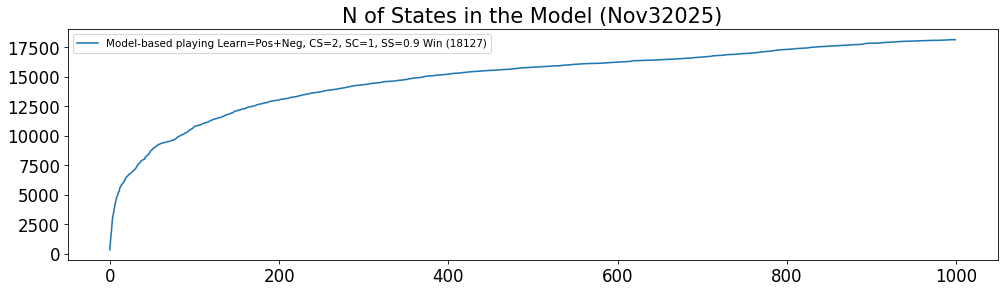

In [7]:
#Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC1_SS9_251113 -lm=2 -cs=2 -sc=1 -ss=0.9
score_avg=22.8; steps_avg=4031.8; lives_avg=0.2; lapse_avg="0:01:36.556965"; time="18:37:06.751196"
scores_lm2cs2sc1ss09 = [3.0, 2.0, 1.0, 0, 11.0, 2.0, 3.0, 2.0, 5.0, 5.0, 2.0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 6.0, 3.0, 4.0, 2.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 0, 2.0, 2.0, 6.0, 7.0, 3.0, 2.0, 6.0, 7.0, 3.0, 1.0, 9.0, 3.0, 5.0, 6.0, 6.0, 6.0, 2.0, 1.0, 6.0, 3.0, 1.0, 3.0, 3.0, 3.0, 6.0, 3.0, 5.0, 3.0, 8.0, 2.0, 2.0, 4.0, 2.0, 1.0, 1.0, 1.0, 6.0, 9.0, 6.0, 5.0, 8.0, 5.0, 3.0, 5.0, 8.0, 7.0, 3.0, 8.0, 3.0, 2.0, 3.0, 4.0, 3.0, 1.0, 2.0, 5.0, 1.0, 4.0, 7.0, 2.0, 1.0, 1.0, 2.0, 4.0, 1.0, 7.0, 6.0, 1.0, 2.0, 6.0, 4.0, 4.0, 5.0, 5.0, 4.0, 7.0, 7.0, 5.0, 4.0, 4.0, 5.0, 4.0, 5.0, 6.0, 4.0, 6.0, 3.0, 7.0, 10.0, 1.0, 7.0, 4.0, 7.0, 6.0, 8.0, 3.0, 2.0, 2.0, 7.0, 8.0, 4.0, 6.0, 5.0, 1.0, 10.0, 2.0, 12.0, 1.0, 11.0, 4.0, 13.0, 8.0, 10.0, 6.0, 11.0, 3.0, 8.0, 10.0, 6.0, 4.0, 10.0, 10.0, 8.0, 5.0, 6.0, 3.0, 3.0, 10.0, 10.0, 11.0, 9.0, 16.0, 7.0, 9.0, 10.0, 7.0, 7.0, 1.0, 9.0, 10.0, 4.0, 11.0, 4.0, 3.0, 6.0, 7.0, 7.0, 16.0, 1.0, 4.0, 1.0, 15.0, 8.0, 4.0, 8.0, 8.0, 1.0, 10.0, 8.0, 8.0, 5.0, 13.0, 4.0, 6.0, 7.0, 10.0, 10.0, 8.0, 6.0, 8.0, 15.0, 4.0, 11.0, 1.0, 6.0, 7.0, 14.0, 12.0, 9.0, 8.0, 7.0, 6.0, 9.0, 6.0, 7.0, 8.0, 9.0, 13.0, 9.0, 6.0, 9.0, 10.0, 4.0, 5.0, 4.0, 6.0, 6.0, 8.0, 13.0, 7.0, 7.0, 7.0, 15.0, 7.0, 8.0, 4.0, 6.0, 1.0, 7.0, 6.0, 6.0, 6.0, 6.0, 8.0, 7.0, 7.0, 5.0, 6.0, 6.0, 8.0, 5.0, 6.0, 7.0, 6.0, 9.0, 1.0, 14.0, 7.0, 12.0, 6.0, 11.0, 6.0, 7.0, 13.0, 10.0, 6.0, 6.0, 7.0, 6.0, 4.0, 6.0, 7.0, 8.0, 13.0, 12.0, 6.0, 11.0, 6.0, 6.0, 1.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 1.0, 6.0, 7.0, 24.0, 10.0, 5.0, 8.0, 13.0, 16.0, 16.0, 4.0, 4.0, 8.0, 4.0, 8.0, 8.0, 16.0, 4.0, 6.0, 6.0, 10.0, 6.0, 8.0, 6.0, 11.0, 8.0, 6.0, 8.0, 7.0, 8.0, 9.0, 8.0, 8.0, 6.0, 10.0, 6.0, 16.0, 4.0, 6.0, 12.0, 4.0, 5.0, 19.0, 5.0, 12.0, 6.0, 8.0, 9.0, 11.0, 3.0, 6.0, 8.0, 8.0, 13.0, 7.0, 12.0, 5.0, 9.0, 10.0, 18.0, 26.0, 7.0, 27.0, 6.0, 8.0, 4.0, 6.0, 13.0, 21.0, 6.0, 14.0, 17.0, 11.0, 15.0, 12.0, 14.0, 10.0, 13.0, 8.0, 8.0, 11.0, 4.0, 6.0, 7.0, 13.0, 20.0, 10.0, 12.0, 13.0, 8.0, 6.0, 10.0, 11.0, 8.0, 5.0, 11.0, 12.0, 14.0, 11.0, 6.0, 9.0, 6.0, 10.0, 13.0, 5.0, 16.0, 12.0, 13.0, 15.0, 14.0, 17.0, 13.0, 15.0, 14.0, 12.0, 12.0, 8.0, 12.0, 17.0, 12.0, 6.0, 10.0, 9.0, 21.0, 17.0, 12.0, 16.0, 13.0, 15.0, 14.0, 19.0, 14.0, 13.0, 12.0, 19.0, 14.0, 15.0, 15.0, 11.0, 12.0, 14.0, 16.0, 12.0, 16.0, 22.0, 16.0, 20.0, 17.0, 10.0, 26.0, 28.0, 14.0, 22.0, 27.0, 20.0, 19.0, 21.0, 21.0, 19.0, 25.0, 29.0, 21.0, 24.0, 22.0, 18.0, 15.0, 18.0, 19.0, 19.0, 36.0, 4.0, 19.0, 32.0, 16.0, 17.0, 21.0, 23.0, 23.0, 37.0, 31.0, 29.0, 32.0, 25.0, 20.0, 29.0, 28.0, 33.0, 38.0, 17.0, 24.0, 15.0, 35.0, 19.0, 26.0, 39.0, 39.0, 39.0, 20.0, 33.0, 38.0, 32.0, 29.0, 34.0, 35.0, 25.0, 44.0, 42.0, 28.0, 27.0, 12.0, 39.0, 38.0, 33.0, 32.0, 40.0, 31.0, 42.0, 33.0, 33.0, 32.0, 16.0, 33.0, 35.0, 13.0, 35.0, 14.0, 12.0, 21.0, 35.0, 34.0, 31.0, 34.0, 35.0, 42.0, 14.0, 14.0, 35.0, 42.0, 37.0, 40.0, 34.0, 18.0, 35.0, 18.0, 34.0, 22.0, 41.0, 36.0, 36.0, 27.0, 36.0, 39.0, 19.0, 32.0, 18.0, 35.0, 47.0, 43.0, 15.0, 36.0, 30.0, 21.0, 41.0, 30.0, 37.0, 36.0, 26.0, 41.0, 34.0, 36.0, 35.0, 34.0, 36.0, 39.0, 22.0, 36.0, 42.0, 26.0, 41.0, 31.0, 37.0, 52.0, 41.0, 41.0, 42.0, 17.0, 37.0, 47.0, 11.0, 22.0, 23.0, 23.0, 18.0, 13.0, 20.0, 23.0, 14.0, 17.0, 22.0, 21.0, 14.0, 23.0, 25.0, 27.0, 30.0, 27.0, 16.0, 23.0, 28.0, 22.0, 16.0, 25.0, 20.0, 29.0, 27.0, 29.0, 21.0, 23.0, 20.0, 34.0, 20.0, 20.0, 22.0, 21.0, 21.0, 25.0, 23.0, 29.0, 25.0, 25.0, 20.0, 25.0, 20.0, 15.0, 22.0, 20.0, 20.0, 48.0, 33.0, 20.0, 17.0, 33.0, 23.0, 33.0, 20.0, 14.0, 22.0, 28.0, 31.0, 20.0, 17.0, 33.0, 24.0, 33.0, 25.0, 23.0, 28.0, 28.0, 27.0, 27.0, 37.0, 27.0, 24.0, 36.0, 35.0, 35.0, 24.0, 33.0, 39.0, 33.0, 28.0, 24.0, 20.0, 27.0, 27.0, 24.0, 30.0, 30.0, 36.0, 28.0, 34.0, 23.0, 31.0, 46.0, 30.0, 40.0, 32.0, 15.0, 31.0, 46.0, 47.0, 42.0, 16.0, 44.0, 41.0, 40.0, 30.0, 32.0, 29.0, 35.0, 33.0, 33.0, 40.0, 42.0, 45.0, 39.0, 36.0, 42.0, 25.0, 25.0, 37.0, 38.0, 42.0, 34.0, 28.0, 30.0, 25.0, 41.0, 38.0, 22.0, 45.0, 31.0, 50.0, 25.0, 16.0, 44.0, 22.0, 36.0, 36.0, 35.0, 33.0, 27.0, 41.0, 30.0, 20.0, 42.0, 44.0, 46.0, 23.0, 15.0, 38.0, 17.0, 33.0, 33.0, 36.0, 33.0, 41.0, 46.0, 43.0, 27.0, 32.0, 37.0, 36.0, 31.0, 54.0, 36.0, 25.0, 39.0, 41.0, 34.0, 32.0, 46.0, 44.0, 42.0, 39.0, 42.0, 32.0, 33.0, 41.0, 35.0, 42.0, 35.0, 50.0, 20.0, 42.0, 42.0, 34.0, 52.0, 32.0, 32.0, 40.0, 27.0, 47.0, 43.0, 19.0, 40.0, 47.0, 39.0, 25.0, 40.0, 12.0, 46.0, 24.0, 41.0, 39.0, 47.0, 46.0, 47.0, 50.0, 44.0, 40.0, 30.0, 22.0, 32.0, 52.0, 25.0, 18.0, 32.0, 31.0, 57.0, 38.0, 39.0, 31.0, 18.0, 49.0, 39.0, 57.0, 25.0, 47.0, 40.0, 23.0, 49.0, 49.0, 31.0, 35.0, 28.0, 47.0, 38.0, 53.0, 35.0, 59.0, 42.0, 50.0, 36.0, 40.0, 31.0, 56.0, 47.0, 56.0, 46.0, 54.0, 45.0, 47.0, 47.0, 25.0, 41.0, 38.0, 47.0, 43.0, 49.0, 52.0, 25.0, 42.0, 41.0, 48.0, 21.0, 42.0, 32.0, 30.0, 48.0, 45.0, 44.0, 39.0, 39.0, 35.0, 19.0, 48.0, 40.0, 42.0, 28.0, 21.0, 42.0, 35.0, 40.0, 25.0, 27.0, 27.0, 20.0, 38.0, 42.0, 38.0, 40.0, 41.0, 52.0, 50.0, 29.0, 40.0, 34.0, 41.0, 48.0, 47.0, 47.0, 37.0, 47.0, 40.0, 31.0, 33.0, 51.0, 46.0, 63.0, 43.0, 34.0, 37.0, 30.0, 29.0, 32.0, 32.0, 37.0, 46.0, 32.0, 38.0, 32.0, 28.0, 28.0, 48.0, 39.0, 41.0, 29.0, 27.0, 28.0, 45.0, 44.0, 39.0, 26.0, 29.0, 41.0, 43.0, 32.0, 30.0, 40.0, 44.0, 41.0, 41.0, 40.0, 42.0, 50.0, 29.0, 55.0, 57.0, 31.0, 55.0, 50.0, 40.0, 57.0, 47.0, 49.0, 49.0, 36.0, 54.0, 39.0, 44.0, 28.0, 50.0, 52.0, 24.0, 48.0, 29.0, 51.0, 29.0, 29.0, 31.0, 32.0, 51.0, 34.0, 67.0, 32.0, 28.0, 29.0, 27.0, 36.0, 17.0, 60.0, 39.0, 55.0, 60.0, 32.0, 66.0, 66.0, 34.0, 39.0, 49.0, 23.0, 48.0, 56.0, 57.0, 50.0, 56.0, 64.0, 55.0, 33.0, 39.0, 29.0, 72.0, 32.0, 58.0, 28.0, 64.0, 61.0, 35.0, 65.0, 63.0, 71.0, 29.0, 46.0, 64.0, 64.0, 30.0, 24.0, 64.0, 51.0, 52.0, 28.0, 36.0, 53.0, 39.0]
stepss_lm2cs2sc1ss09 = [992, 795, 623, 18000, 1717, 805, 984, 795, 1232, 1234, 793, 606, 873, 797, 920, 801, 608, 1354, 989, 1020, 799, 18000, 910, 607, 788, 787, 721, 491, 720, 726, 1351, 1472, 977, 732, 1349, 1543, 984, 609, 1845, 903, 1238, 1345, 1350, 18000, 719, 603, 1346, 851, 612, 919, 929, 982, 1359, 978, 1286, 848, 1669, 804, 724, 1105, 737, 603, 606, 602, 1358, 1891, 1362, 1286, 1646, 1234, 984, 1298, 1729, 1466, 909, 1651, 908, 804, 913, 1174, 980, 611, 719, 1293, 601, 18000, 1543, 718, 18000, 602, 806, 1108, 608, 1664, 1347, 18000, 719, 1482, 965, 1114, 1298, 18000, 1176, 1700, 1540, 1294, 1176, 1165, 1292, 1167, 18000, 1350, 1107, 1556, 839, 1531, 2067, 18000, 1463, 1111, 1534, 1346, 1099, 839, 792, 18000, 1587, 1722, 1095, 1407, 1222, 602, 1893, 721, 1881, 680, 1763, 1108, 2528, 18000, 1479, 1418, 2214, 915, 1661, 1992, 1489, 18000, 2026, 2027, 1657, 1315, 1353, 900, 900, 1974, 18000, 2222, 1843, 2421, 1541, 1920, 1915, 1599, 1492, 18000, 1948, 1963, 1110, 1760, 1024, 904, 1309, 1536, 18000, 2306, 18000, 1020, 18000, 2783, 1741, 1096, 1753, 1736, 18000, 1475, 1661, 1590, 1275, 2072, 1107, 1431, 1492, 2040, 2124, 1746, 18000, 1607, 2223, 1100, 2207, 18000, 1410, 1534, 2183, 2299, 1942, 1867, 1496, 1347, 18000, 1411, 1565, 1657, 1946, 2379, 1902, 1346, 1845, 1479, 1029, 18000, 1033, 1373, 1369, 1728, 2456, 1492, 1497, 1555, 2222, 1492, 1652, 18000, 1369, 18000, 1492, 1371, 1369, 1369, 1372, 1736, 1496, 1492, 1304, 18000, 18000, 1650, 1220, 1370, 1475, 1569, 1945, 604, 2647, 1635, 2429, 1369, 2124, 18000, 1492, 2461, 1997, 1371, 1411, 1556, 1539, 1029, 1369, 1567, 1656, 2571, 2314, 1369, 2126, 1369, 1350, 18000, 1374, 1369, 1274, 1369, 1369, 1369, 1755, 605, 1346, 1491, 2058, 2160, 1228, 18000, 2395, 2844, 2357, 1108, 1111, 1753, 1029, 1669, 1717, 2854, 1108, 18000, 1369, 1885, 1371, 18000, 1369, 18000, 1662, 1369, 1650, 1492, 18000, 1773, 1111, 18000, 1369, 1884, 1369, 2964, 1089, 1348, 2269, 1073, 1205, 3012, 1199, 2257, 1371, 1691, 1760, 2201, 901, 18000, 1731, 1683, 2178, 1494, 2187, 1214, 1863, 2026, 2684, 3435, 1492, 2519, 1369, 1657, 1029, 1369, 2395, 2611, 1369, 2277, 2621, 2092, 2718, 1863, 2504, 1936, 2391, 1757, 1611, 2247, 1111, 1370, 1492, 2476, 2504, 1960, 1863, 2391, 1763, 1344, 1949, 2133, 1661, 1309, 2128, 2291, 2549, 2001, 1369, 1856, 1588, 1877, 2312, 1223, 2897, 2184, 2379, 2635, 2571, 3085, 2538, 2701, 2583, 2260, 2329, 1749, 2330, 2954, 2285, 1391, 1963, 18000, 2681, 3081, 2341, 2821, 2465, 2853, 2653, 2783, 2655, 2312, 2285, 18000, 2665, 2808, 2701, 2001, 2284, 2161, 2745, 2260, 2466, 2811, 18000, 2572, 2605, 1953, 3658, 4042, 2598, 3535, 3226, 2609, 2915, 2768, 2771, 2457, 3534, 3497, 2854, 2712, 2981, 2792, 2661, 2840, 2469, 2471, 3241, 1096, 2468, 3026, 2484, 3122, 3259, 3154, 2580, 3493, 2834, 2981, 3644, 4022, 3506, 2893, 2709, 3433, 4215, 3030, 2769, 2274, 3410, 2916, 2904, 2944, 2945, 3332, 3047, 3183, 3931, 2805, 18000, 3206, 3724, 2754, 3181, 3336, 2692, 3300, 2345, 3730, 3805, 2861, 2805, 2993, 3140, 3410, 2884, 2863, 2805, 2934, 2861, 3073, 2468, 3072, 2666, 2267, 3275, 3065, 3004, 2993, 3001, 3197, 3197, 2614, 2659, 3067, 3193, 4127, 4066, 3001, 2830, 3065, 2841, 3004, 3043, 3137, 3196, 3251, 2870, 3177, 3322, 3025, 3273, 2828, 3194, 3416, 3828, 2733, 3311, 2881, 3333, 3468, 2877, 3433, 3383, 18000, 3513, 3001, 3252, 3215, 3001, 3314, 3723, 3043, 3390, 3193, 2754, 3513, 2989, 3437, 3721, 3513, 3133, 3707, 2748, 3437, 4157, 2153, 3046, 3157, 3132, 2827, 2429, 3024, 3125, 2620, 2748, 2961, 3333, 2621, 3157, 3403, 3786, 3683, 3833, 18000, 2969, 3404, 3351, 2934, 3403, 3022, 3620, 3095, 3294, 3147, 3536, 3007, 3677, 18000, 18000, 3257, 3198, 3193, 3814, 3371, 3986, 3920, 3868, 3009, 3428, 3008, 2829, 3405, 3008, 3033, 3769, 3411, 3009, 2537, 3480, 3019, 3410, 3011, 2626, 3400, 3349, 3318, 3009, 18000, 4118, 3225, 4041, 3423, 3453, 3815, 3722, 3141, 3619, 3128, 3597, 3297, 3988, 3844, 4037, 3036, 3502, 3354, 3557, 18000, 3150, 18000, 3605, 3605, 3045, 3608, 18000, 3495, 3792, 4269, 2963, 3838, 4698, 3550, 4237, 3866, 2741, 3750, 4614, 4805, 4394, 2880, 4362, 4159, 18000, 3588, 4018, 3346, 3838, 18000, 3449, 3435, 4394, 4467, 4547, 3526, 4398, 18000, 18000, 4138, 4396, 4394, 3633, 3736, 3331, 3217, 4157, 4288, 3890, 3775, 3747, 3965, 18000, 18000, 4877, 3389, 3429, 4000, 4381, 18000, 3605, 4863, 3544, 2999, 4551, 5023, 4517, 2949, 2738, 4409, 3158, 4200, 3929, 4079, 4140, 3646, 4763, 4476, 18000, 3830, 18000, 4282, 3285, 4640, 3488, 18000, 3818, 18000, 3630, 3830, 4748, 4675, 4620, 4384, 4618, 3361, 3411, 3646, 4339, 4617, 4527, 4845, 3003, 4417, 4492, 18000, 18000, 3925, 3559, 18000, 18000, 4613, 4519, 2963, 3992, 4960, 4384, 18000, 4511, 2233, 4495, 3654, 3644, 4386, 4304, 4765, 18000, 4901, 4367, 18000, 3339, 3326, 3207, 4648, 18000, 3366, 3845, 18000, 4839, 4319, 4384, 3756, 3250, 4688, 3398, 4910, 3202, 4305, 4236, 18000, 4700, 4241, 4210, 18000, 3241, 4306, 4409, 4573, 18000, 5247, 3227, 4902, 3781, 3505, 3684, 4554, 4305, 4555, 5191, 4817, 4491, 3599, 4805, 18000, 4845, 4346, 4305, 4670, 5015, 4225, 18000, 4609, 3646, 4636, 3281, 4398, 3929, 2983, 18000, 4955, 4807, 4386, 4399, 4249, 3430, 4856, 3592, 4394, 3373, 3451, 4372, 4164, 4118, 3213, 3313, 3313, 3342, 4226, 4398, 3990, 4116, 3722, 4459, 4202, 18000, 4122, 4190, 4345, 4342, 4188, 4922, 4015, 4188, 4120, 3854, 3931, 4882, 4507, 4683, 4594, 3765, 3625, 4101, 18000, 3361, 3361, 3703, 4418, 3361, 3538, 3361, 3779, 18000, 3939, 4179, 3870, 3436, 3036, 3240, 3919, 3709, 18000, 3536, 18000, 3873, 4145, 3365, 3550, 3583, 4405, 3858, 3870, 3515, 3757, 4114, 3433, 4544, 4316, 3854, 4465, 18000, 3626, 4225, 4860, 3997, 3995, 3678, 4619, 3399, 3816, 3209, 4115, 4174, 3129, 3939, 3436, 4558, 3393, 3353, 3758, 3253, 4608, 3821, 5012, 3361, 3241, 3438, 3649, 3824, 18000, 4152, 3396, 4638, 4696, 3361, 4185, 4128, 3504, 3971, 3832, 3363, 18000, 4515, 4809, 4480, 4495, 4305, 4417, 2758, 3787, 3470, 4715, 3273, 4052, 18000, 4426, 4347, 3871, 4621, 4708, 4694, 18000, 3656, 4426, 4426, 2766, 3128, 4426, 4296, 4383, 3779, 3342, 4582, 3755]
livess_lm2cs2sc1ss09 = [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses_lm2cs2sc1ss09 = [2, 4, 6, 5, 17, 13, 9, 6, 15, 12, 9, 16, 27, 18, 13, 10, 17, 17, 18, 19, 14, 7, 28, 19, 8, 22, 19, 24, 18, 23, 24, 21, 19, 18, 18, 13, 30, 23, 60, 24, 25, 19, 17, 21, 18, 25, 21, 32, 25, 40, 47, 27, 26, 35, 33, 30, 40, 21, 24, 48, 40, 41, 28, 17, 32, 76, 20, 45, 32, 39, 24, 65, 43, 34, 17, 53, 35, 15, 37, 70, 35, 27, 20, 66, 35, 13, 29, 25, 18, 17, 38, 14, 30, 104, 33, 9, 44, 30, 32, 52, 44, 51, 43, 101, 42, 53, 51, 44, 49, 62, 25, 27, 39, 117, 21, 40, 83, 9, 24, 48, 39, 29, 53, 28, 30, 17, 83, 50, 22, 51, 60, 37, 22, 44, 123, 92, 51, 46, 112, 32, 34, 60, 34, 35, 52, 139, 18, 29, 39, 50, 34, 51, 33, 29, 9, 39, 25, 40, 49, 50, 76, 31, 68, 61, 32, 16, 90, 82, 61, 74, 33, 38, 86, 64, 32, 101, 15, 29, 17, 107, 39, 42, 44, 55, 35, 36, 37, 36, 149, 39, 83, 52, 12, 44, 59, 129, 25, 12, 37, 8, 188, 14, 57, 71, 85, 33, 47, 102, 10, 31, 64, 22, 57, 26, 47, 80, 91, 61, 24, 61, 13, 72, 5, 109, 14, 22, 19, 12, 56, 45, 40, 8, 14, 51, 12, 16, 13, 34, 17, 13, 87, 32, 26, 7, 111, 33, 19, 61, 47, 43, 53, 103, 128, 60, 150, 53, 113, 53, 36, 21, 9, 45, 57, 16, 31, 47, 95, 24, 22, 82, 15, 121, 81, 49, 66, 15, 44, 8, 70, 16, 47, 30, 4, 10, 42, 27, 43, 93, 209, 85, 45, 32, 77, 172, 77, 25, 59, 32, 2, 62, 28, 132, 35, 26, 15, 152, 22, 86, 16, 25, 17, 33, 58, 8, 11, 70, 123, 30, 12, 60, 19, 216, 80, 46, 64, 24, 71, 113, 54, 113, 36, 76, 70, 82, 10, 23, 42, 54, 77, 72, 30, 118, 47, 23, 119, 157, 7, 134, 12, 43, 7, 15, 44, 38, 14, 37, 96, 51, 32, 29, 69, 69, 49, 84, 19, 52, 35, 15, 18, 133, 124, 36, 53, 35, 26, 44, 46, 59, 50, 25, 43, 107, 107, 33, 10, 28, 117, 126, 73, 39, 118, 89, 90, 51, 42, 92, 65, 59, 143, 15, 32, 57, 196, 98, 50, 61, 75, 43, 73, 157, 45, 108, 62, 83, 79, 156, 54, 67, 32, 92, 82, 130, 45, 53, 26, 52, 84, 102, 60, 96, 103, 78, 51, 110, 194, 222, 77, 227, 69, 224, 69, 62, 77, 80, 130, 139, 94, 129, 51, 7, 68, 26, 65, 131, 229, 44, 47, 89, 42, 63, 156, 227, 72, 100, 83, 94, 101, 279, 150, 110, 29, 75, 342, 28, 111, 54, 136, 80, 65, 61, 13, 94, 83, 87, 36, 29, 38, 34, 126, 47, 224, 63, 36, 129, 79, 167, 96, 58, 68, 60, 53, 88, 46, 63, 28, 128, 61, 120, 95, 99, 30, 63, 39, 74, 86, 60, 21, 70, 43, 176, 93, 115, 56, 110, 86, 28, 115, 89, 47, 54, 33, 22, 70, 123, 88, 57, 82, 114, 37, 64, 94, 42, 78, 24, 40, 96, 70, 49, 48, 98, 86, 54, 42, 55, 73, 136, 20, 44, 105, 26, 14, 33, 44, 15, 25, 168, 90, 42, 31, 94, 27, 76, 198, 77, 45, 132, 108, 73, 99, 112, 21, 54, 15, 33, 31, 150, 105, 87, 29, 255, 138, 12, 120, 29, 79, 66, 20, 47, 34, 89, 242, 72, 118, 32, 79, 10, 33, 60, 80, 157, 122, 42, 64, 134, 49, 28, 206, 42, 68, 190, 69, 39, 176, 81, 77, 77, 108, 95, 62, 70, 76, 84, 45, 178, 72, 31, 99, 11, 154, 168, 84, 59, 74, 132, 84, 111, 96, 177, 75, 90, 89, 90, 39, 152, 41, 63, 38, 40, 38, 35, 70, 121, 95, 45, 58, 81, 85, 172, 114, 73, 144, 40, 60, 75, 119, 72, 70, 54, 20, 198, 14, 61, 64, 86, 115, 57, 56, 73, 62, 109, 117, 80, 43, 41, 48, 71, 162, 30, 117, 32, 31, 72, 65, 45, 57, 83, 68, 153, 43, 107, 63, 97, 39, 107, 29, 149, 51, 44, 58, 146, 162, 121, 46, 6, 27, 66, 88, 25, 62, 136, 101, 30, 221, 68, 100, 62, 14, 311, 58, 142, 111, 36, 53, 56, 43, 93, 95, 31, 71, 60, 81, 42, 63, 46, 106, 93, 97, 22, 82, 34, 56, 59, 71, 4, 189, 38, 56, 58, 39, 113, 132, 32, 77, 28, 42, 5, 64, 89, 29, 66, 94, 133, 115, 80, 32, 111, 153, 104, 157, 75, 66, 141, 126, 42, 19, 172, 62, 79, 158, 19, 83, 39, 63, 19, 74, 27, 58, 148, 96, 98, 34, 62, 139, 108, 110, 98, 102, 63, 147, 98, 73, 101, 24, 73, 71, 98, 76, 76, 94, 13, 75, 66, 53, 141, 41, 150, 42, 47, 60, 192, 147, 74, 39, 226, 62, 107, 95, 68, 112, 47, 131, 138, 50, 41, 180, 39, 92, 64, 11, 55, 133, 42, 105, 58, 42, 78, 29, 17, 35, 40, 34, 43, 59, 111, 20, 26, 138, 46, 25, 28, 112, 74, 95, 96, 38, 52, 267, 133, 329, 13, 15, 8, 56, 304, 11, 74, 53, 46, 131, 106, 154, 46, 54, 151, 11, 137, 98, 48, 218, 49, 51, 73, 17, 77, 137, 184, 40, 45, 52, 59, 70, 28, 92, 62, 33, 168, 182, 55, 38, 133, 59, 22, 73, 91, 55, 30, 83, 48, 124, 67, 84, 78, 129, 90, 45, 106, 86, 64, 126, 65, 11, 18, 86, 71, 128, 23, 27, 47, 103, 44, 10, 54, 86, 109, 47, 79, 120, 44, 93, 94, 41, 79, 103, 161, 30, 122, 86, 48, 64, 49, 36, 32, 55, 86, 118, 91, 96, 34, 157, 10, 16, 88, 39, 13, 130, 88, 257, 44, 54, 97]
states_lm2cs2sc1ss09 = [657, 1037, 1421, 1549, 2319, 2729, 2971, 3051, 3374, 3602, 3743, 3933, 4305, 4515, 4685, 4741, 4933, 5109, 5338, 5491, 5578, 5654, 5884, 6006, 6062, 6176, 6284, 6474, 6571, 6681, 6843, 6932, 7071, 7128, 7173, 7245, 7416, 7489, 7782, 7947, 7999, 8034, 8089, 8170, 8196, 8261, 8373, 8429, 8474, 8613, 8827, 8882, 8944, 9003, 9110, 9132, 9174, 9253, 9313, 9453, 9538, 9725, 9852, 9862, 9908, 10074, 10114, 10231, 10341, 10429, 10483, 10677, 10704, 10779, 10829, 10942, 10968, 11034, 11054, 11181, 11208, 11233, 11245, 11354, 11386, 11419, 11439, 11458, 11478, 11480, 11517, 11535, 11610, 11856, 11864, 11870, 11906, 11945, 11967, 12017, 12087, 12122, 12136, 12293, 12316, 12362, 12419, 12473, 12577, 12619, 12634, 12639, 12655, 12826, 12854, 12870, 12967, 12969, 12974, 13000, 13013, 13021, 13066, 13069, 13108, 13110, 13227, 13234, 13279, 13314, 13406, 13422, 13428, 13439, 13640, 13775, 13816, 13859, 13970, 13987, 14006, 14057, 14098, 14132, 14232, 14442, 14463, 14485, 14501, 14557, 14594, 14650, 14658, 14692, 14707, 14714, 14727, 14745, 14805, 14811, 14863, 14907, 14947, 14957, 15013, 15024, 15052, 15122, 15157, 15192, 15233, 15252, 15339, 15389, 15401, 15471, 15483, 15497, 15503, 15549, 15579, 15639, 15655, 15671, 15688, 15693, 15706, 15717, 15865, 15905, 15981, 16025, 16029, 16051, 16077, 16249, 16250, 16254, 16257, 16263, 16425, 16437, 16459, 16497, 16547, 16577, 16580, 16681, 16685, 16687, 16702, 16710, 16730, 16732, 16751, 16769, 16828, 16844, 16858, 16863, 16874, 16914, 16914, 17038, 17057, 17062, 17069, 17073, 17104, 17115, 17119, 17119, 17120, 17150, 17154, 17154, 17155, 17179, 17197, 17210, 17252, 17256, 17261, 17262, 17328, 17349, 17351, 17374, 17399, 17419, 17443, 17469, 17582, 17632, 17730, 17742, 17793, 17816, 17858, 17870, 17870, 17880, 17901, 17934, 17941, 17953, 17995, 17998, 18020, 18110, 18112, 18146, 18196, 18242, 18266, 18269, 18277, 18277, 18323, 18332, 18336, 18340, 18353, 18355, 18374, 18392, 18393, 18413, 18468, 18512, 18520, 18526, 18559, 18643, 18674, 18675, 18693, 18708, 18708, 18731, 18732, 18753, 18776, 18780, 18788, 18848, 18855, 18889, 18895, 18898, 18900, 18912, 18935, 18935, 18935, 18943, 18977, 18982, 18984, 19020, 19020, 19099, 19116, 19139, 19165, 19171, 19182, 19231, 19244, 19260, 19280, 19308, 19343, 19362, 19370, 19371, 19371, 19392, 19407, 19426, 19435, 19493, 19498, 19508, 19539, 19587, 19590, 19612, 19622, 19629, 19638, 19642, 19655, 19656, 19659, 19667, 19686, 19718, 19725, 19726, 19745, 19767, 19783, 19793, 19794, 19817, 19824, 19825, 19827, 19854, 19891, 19901, 19905, 19919, 19919, 19935, 19947, 19960, 19966, 19976, 19983, 20014, 20062, 20068, 20070, 20074, 20114, 20142, 20172, 20173, 20198, 20210, 20223, 20229, 20240, 20257, 20274, 20288, 20299, 20302, 20305, 20332, 20366, 20383, 20390, 20398, 20411, 20427, 20431, 20463, 20468, 20498, 20512, 20518, 20533, 20580, 20590, 20603, 20607, 20619, 20642, 20677, 20680, 20686, 20689, 20696, 20714, 20727, 20729, 20738, 20748, 20755, 20761, 20783, 20811, 20846, 20856, 20890, 20900, 20930, 20939, 20943, 20946, 20960, 20979, 20992, 21001, 21037, 21042, 21044, 21060, 21061, 21070, 21087, 21126, 21132, 21135, 21153, 21156, 21159, 21169, 21191, 21208, 21222, 21239, 21254, 21267, 21300, 21309, 21330, 21333, 21344, 21404, 21406, 21416, 21418, 21434, 21449, 21454, 21462, 21462, 21469, 21477, 21485, 21498, 21502, 21510, 21512, 21521, 21534, 21548, 21555, 21559, 21581, 21591, 21609, 21623, 21630, 21637, 21651, 21657, 21670, 21675, 21678, 21683, 21705, 21711, 21730, 21746, 21755, 21761, 21769, 21774, 21778, 21787, 21799, 21801, 21807, 21810, 21822, 21851, 21857, 21867, 21881, 21891, 21893, 21911, 21923, 21929, 21934, 21936, 21939, 21946, 21956, 21965, 21970, 21983, 21992, 21999, 22005, 22015, 22018, 22027, 22029, 22029, 22035, 22051, 22058, 22064, 22073, 22087, 22090, 22093, 22094, 22106, 22121, 22121, 22122, 22131, 22134, 22134, 22135, 22139, 22140, 22141, 22154, 22158, 22161, 22164, 22173, 22175, 22181, 22192, 22194, 22198, 22212, 22220, 22224, 22235, 22250, 22252, 22252, 22259, 22259, 22267, 22272, 22281, 22286, 22288, 22312, 22321, 22326, 22340, 22343, 22352, 22358, 22360, 22366, 22367, 22371, 22385, 22390, 22403, 22404, 22410, 22410, 22411, 22414, 22417, 22423, 22446, 22450, 22454, 22463, 22465, 22467, 22480, 22481, 22483, 22495, 22497, 22501, 22507, 22509, 22513, 22517, 22523, 22529, 22536, 22537, 22541, 22542, 22545, 22554, 22561, 22563, 22568, 22570, 22576, 22585, 22599, 22600, 22604, 22611, 22614, 22619, 22624, 22638, 22641, 22645, 22654, 22662, 22664, 22669, 22673, 22676, 22676, 22679, 22682, 22683, 22688, 22692, 22698, 22699, 22700, 22703, 22708, 22715, 22722, 22724, 22729, 22730, 22731, 22738, 22744, 22747, 22753, 22761, 22762, 22773, 22774, 22775, 22777, 22783, 22791, 22795, 22796, 22799, 22801, 22802, 22808, 22814, 22817, 22819, 22820, 22823, 22830, 22830, 22833, 22836, 22839, 22840, 22843, 22846, 22848, 22856, 22858, 22864, 22866, 22869, 22874, 22876, 22877, 22881, 22884, 22886, 22886, 22896, 22897, 22902, 22905, 22908, 22913, 22913, 22916, 22921, 22925, 22927, 22927, 22934, 22937, 22939, 22944, 22947, 22950, 22951, 22953, 22965, 22968, 22973, 22981, 22981, 22983, 22985, 22986, 22987, 22990, 22993, 22993, 22995, 22996, 22998, 22999, 23003, 23005, 23007, 23010, 23011, 23012, 23013, 23015, 23016, 23019, 23019, 23027, 23030, 23034, 23036, 23036, 23043, 23048, 23051, 23052, 23055, 23058, 23058, 23059, 23064, 23066, 23070, 23073, 23079, 23082, 23082, 23084, 23089, 23098, 23105, 23111, 23114, 23122, 23124, 23127, 23131, 23133, 23137, 23137, 23140, 23145, 23151, 23151, 23153, 23155, 23157, 23158, 23158, 23160, 23170, 23173, 23178, 23179, 23179, 23180, 23183, 23191, 23195, 23197, 23199, 23203, 23206, 23207, 23212, 23213, 23213, 23216, 23218, 23218, 23220, 23220, 23220, 23221, 23226, 23227, 23229, 23229, 23234, 23235, 23237, 23241, 23251, 23261, 23263, 23263, 23267, 23269, 23275, 23277, 23281, 23285, 23286, 23289, 23293, 23293, 23294, 23297, 23299, 23303, 23305, 23306, 23310, 23314, 23314, 23317, 23318, 23318, 23324, 23325, 23325, 23326, 23327, 23328, 23329, 23331, 23332, 23333, 23333, 23340, 23340, 23340, 23340, 23344, 23345, 23345, 23345, 23347, 23347, 23358, 23362, 23371, 23373, 23373, 23373, 23375, 23383, 23386, 23390, 23392, 23393, 23397, 23399, 23404, 23409, 23409, 23414, 23414, 23418, 23422, 23426, 23436, 23438, 23438, 23439, 23440, 23444, 23448, 23454, 23455, 23457, 23457, 23458, 23459, 23460, 23462, 23465, 23467, 23473, 23477, 23480, 23480, 23490, 23494, 23494, 23499, 23501, 23505, 23508, 23512, 23512, 23512, 23514, 23515, 23518, 23526, 23529, 23532, 23535, 23535, 23541, 23543, 23547, 23547, 23547, 23550, 23551, 23562, 23562, 23562, 23564, 23568, 23571, 23571, 23578, 23581, 23584, 23586, 23589, 23592, 23593, 23594, 23598, 23602, 23605, 23608, 23612, 23613, 23618, 23621, 23624, 23626, 23629, 23631, 23631, 23632, 23633, 23636, 23640, 23642, 23643, 23645, 23645, 23645, 23649, 23650, 23651, 23656, 23656, 23665, 23667, 23669, 23670]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SC=1, SS=0.9 Win ({round(np.mean(scores_lm2cs2sc1ss09))})': pd.Series(scores_lm2cs2sc1ss09)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SC=1, SS=0.9 Win ({round(np.max(statesSC2SS09))})': pd.Series(statesSC2SS09)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()



## 18000 steps vs 108000 steps - does not matter!

In [8]:
# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS99_251115 -lm=2 -cs=2 -sc=2 -ss=0.99
#PNCS2_SS99_1115 - see above

# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SC2_SS99_MS18K0_251115 -lm=2 -cs=2 -sc=2 -ss=0.99 -ms180000
rev="5796d76b965e4f80bdc33a843565a41bd485dbdb"; time="2025-11-15 18:17:26.941581"; max_games=1000; max_steps=180000
score_avg=8.0; steps_avg=46677.3; lives_avg=1.2; lapse_avg="0:00:27.404435"; time="7:58:08.186107"
scores = [4.0, 1.0, 10.0, 5.0, 4.0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 4.0, 5.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 4.0, 1.0, 3.0, 2.0, 2.0, 4.0, 2.0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 3.0, 2.0, 8.0, 3.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 4.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 8.0, 2.0, 6.0, 3.0, 3.0, 3.0, 3.0, 5.0, 1.0, 3.0, 1.0, 13.0, 2.0, 4.0, 1.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 11.0, 2.0, 6.0, 4.0, 1.0, 2.0, 4.0, 3.0, 1.0, 1.0, 4.0, 1.0, 1.0, 3.0, 4.0, 4.0, 11.0, 4.0, 4.0, 3.0, 1.0, 1.0, 2.0, 5.0, 1.0, 2.0, 4.0, 6.0, 3.0, 3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 4.0, 3.0, 4.0, 1.0, 2.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 2.0, 3.0, 1.0, 3.0, 3.0, 1.0, 5.0, 6.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 4.0, 1.0, 1.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 1.0, 1.0, 8.0, 8.0, 1.0, 4.0, 7.0, 2.0, 2.0, 3.0, 5.0, 7.0, 4.0, 1.0, 4.0, 3.0, 2.0, 3.0, 3.0, 8.0, 2.0, 4.0, 3.0, 1.0, 3.0, 1.0, 3.0, 1.0, 4.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 4.0, 3.0, 3.0, 8.0, 4.0, 4.0, 1.0, 2.0, 2.0, 2.0, 5.0, 4.0, 6.0, 4.0, 3.0, 3.0, 3.0, 2.0, 5.0, 2.0, 4.0, 3.0, 3.0, 5.0, 4.0, 3.0, 4.0, 2.0, 5.0, 7.0, 4.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 9.0, 5.0, 3.0, 10.0, 4.0, 5.0, 5.0, 5.0, 8.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 1.0, 4.0, 2.0, 2.0, 10.0, 5.0, 4.0, 7.0, 7.0, 5.0, 1.0, 4.0, 5.0, 8.0, 8.0, 2.0, 2.0, 3.0, 8.0, 3.0, 5.0, 3.0, 3.0, 2.0, 1.0, 2.0, 9.0, 2.0, 3.0, 3.0, 5.0, 4.0, 2.0, 4.0, 1.0, 5.0, 4.0, 6.0, 4.0, 7.0, 4.0, 10.0, 7.0, 1.0, 3.0, 1.0, 5.0, 2.0, 5.0, 3.0, 7.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 5.0, 12.0, 6.0, 3.0, 4.0, 5.0, 2.0, 2.0, 4.0, 4.0, 7.0, 8.0, 6.0, 4.0, 8.0, 4.0, 1.0, 4.0, 6.0, 3.0, 8.0, 1.0, 12.0, 6.0, 5.0, 8.0, 7.0, 4.0, 1.0, 2.0, 5.0, 7.0, 1.0, 7.0, 4.0, 7.0, 7.0, 7.0, 3.0, 7.0, 5.0, 7.0, 7.0, 6.0, 7.0, 1.0, 9.0, 18.0, 1.0, 7.0, 5.0, 6.0, 2.0, 6.0, 8.0, 6.0, 5.0, 5.0, 5.0, 7.0, 1.0, 1.0, 2.0, 7.0, 5.0, 1.0, 2.0, 4.0, 7.0, 9.0, 3.0, 6.0, 2.0, 6.0, 5.0, 6.0, 12.0, 5.0, 9.0, 2.0, 7.0, 4.0, 5.0, 6.0, 4.0, 5.0, 6.0, 7.0, 2.0, 7.0, 6.0, 7.0, 2.0, 8.0, 7.0, 4.0, 2.0, 3.0, 10.0, 7.0, 2.0, 2.0, 8.0, 2.0, 8.0, 5.0, 4.0, 8.0, 2.0, 5.0, 9.0, 10.0, 9.0, 11.0, 5.0, 9.0, 2.0, 5.0, 4.0, 1.0, 7.0, 5.0, 11.0, 5.0, 3.0, 4.0, 9.0, 2.0, 6.0, 6.0, 5.0, 2.0, 4.0, 6.0, 5.0, 2.0, 10.0, 7.0, 6.0, 14.0, 5.0, 8.0, 5.0, 1.0, 6.0, 1.0, 2.0, 8.0, 2.0, 10.0, 7.0, 1.0, 8.0, 10.0, 6.0, 6.0, 5.0, 1.0, 3.0, 6.0, 3.0, 6.0, 5.0, 5.0, 5.0, 2.0, 8.0, 6.0, 2.0, 6.0, 8.0, 2.0, 5.0, 7.0, 7.0, 7.0, 2.0, 4.0, 4.0, 7.0, 4.0, 3.0, 5.0, 1.0, 7.0, 1.0, 7.0, 10.0, 12.0, 11.0, 2.0, 1.0, 7.0, 13.0, 9.0, 5.0, 1.0, 6.0, 12.0, 3.0, 13.0, 5.0, 7.0, 5.0, 6.0, 1.0, 6.0, 16.0, 2.0, 2.0, 12.0, 10.0, 5.0, 9.0, 7.0, 5.0, 1.0, 10.0, 3.0, 3.0, 4.0, 7.0, 6.0, 9.0, 9.0, 5.0, 1.0, 5.0, 2.0, 10.0, 9.0, 9.0, 7.0, 10.0, 3.0, 2.0, 6.0, 9.0, 2.0, 2.0, 1.0, 12.0, 1.0, 11.0, 2.0, 15.0, 6.0, 14.0, 8.0, 2.0, 8.0, 6.0, 2.0, 2.0, 6.0, 6.0, 8.0, 16.0, 8.0, 2.0, 2.0, 7.0, 4.0, 9.0, 13.0, 10.0, 5.0, 5.0, 7.0, 1.0, 16.0, 17.0, 10.0, 7.0, 8.0, 8.0, 4.0, 6.0, 9.0, 6.0, 7.0, 8.0, 13.0, 10.0, 16.0, 4.0, 9.0, 12.0, 15.0, 14.0, 21.0, 5.0, 2.0, 15.0, 2.0, 16.0, 11.0, 5.0, 9.0, 9.0, 12.0, 16.0, 18.0, 9.0, 16.0, 14.0, 5.0, 16.0, 2.0, 25.0, 15.0, 14.0, 16.0, 11.0, 15.0, 5.0, 16.0, 7.0, 11.0, 6.0, 9.0, 14.0, 6.0, 12.0, 25.0, 10.0, 15.0, 9.0, 7.0, 11.0, 16.0, 5.0, 20.0, 7.0, 15.0, 9.0, 9.0, 12.0, 16.0, 6.0, 22.0, 10.0, 14.0, 9.0, 19.0, 17.0, 17.0, 18.0, 14.0, 6.0, 14.0, 8.0, 13.0, 11.0, 15.0, 16.0, 13.0, 6.0, 1.0, 14.0, 16.0, 11.0, 15.0, 1.0, 1.0, 6.0, 13.0, 5.0, 10.0, 11.0, 10.0, 10.0, 1.0, 14.0, 6.0, 6.0, 7.0, 12.0, 9.0, 14.0, 12.0, 12.0, 8.0, 10.0, 14.0, 11.0, 15.0, 6.0, 5.0, 10.0, 6.0, 15.0, 11.0, 6.0, 21.0, 27.0, 15.0, 10.0, 14.0, 13.0, 10.0, 15.0, 6.0, 12.0, 1.0, 31.0, 13.0, 10.0, 10.0, 14.0, 17.0, 12.0, 18.0, 22.0, 8.0, 16.0, 15.0, 16.0, 20.0, 10.0, 16.0, 10.0, 14.0, 18.0, 15.0, 19.0, 19.0, 11.0, 16.0, 10.0, 16.0, 5.0, 13.0, 11.0, 11.0, 18.0, 12.0, 15.0, 16.0, 11.0, 8.0, 19.0, 10.0, 2.0, 10.0, 17.0, 15.0, 12.0, 18.0, 11.0, 12.0, 15.0, 12.0, 9.0, 10.0, 18.0, 18.0, 6.0, 17.0, 13.0, 14.0, 19.0, 19.0, 12.0, 19.0, 18.0, 16.0, 18.0, 14.0, 16.0, 21.0, 21.0, 20.0, 20.0, 23.0, 18.0, 22.0, 17.0, 7.0, 13.0, 2.0, 18.0, 18.0, 18.0, 22.0, 16.0, 13.0, 8.0, 15.0, 6.0, 16.0, 16.0, 16.0, 7.0, 13.0, 23.0, 15.0, 20.0, 17.0, 17.0, 10.0, 18.0, 9.0, 22.0, 11.0, 12.0, 11.0, 17.0, 19.0, 21.0, 16.0, 14.0, 4.0, 17.0, 19.0, 14.0, 13.0, 9.0, 20.0, 11.0, 6.0, 21.0, 20.0, 14.0, 9.0, 1.0, 14.0, 12.0, 28.0, 17.0, 19.0, 17.0, 13.0, 16.0, 13.0, 24.0, 11.0, 13.0, 10.0, 10.0, 10.0, 21.0, 10.0, 18.0, 18.0, 17.0, 6.0, 17.0, 17.0, 19.0, 6.0, 7.0, 22.0, 10.0, 11.0, 21.0, 9.0, 11.0, 6.0, 21.0, 17.0, 14.0, 16.0, 20.0, 16.0, 20.0, 22.0, 34.0, 17.0, 6.0, 6.0, 14.0, 23.0, 18.0, 14.0, 9.0, 20.0, 16.0, 10.0, 18.0, 16.0, 27.0, 14.0, 25.0, 21.0, 21.0, 15.0, 13.0, 17.0, 14.0, 22.0, 20.0, 10.0, 10.0, 16.0, 19.0, 11.0, 26.0, 10.0, 13.0, 18.0, 16.0, 25.0, 9.0, 18.0, 10.0, 10.0, 21.0, 9.0, 10.0, 14.0, 10.0, 7.0, 21.0, 19.0, 16.0, 26.0, 15.0, 18.0, 15.0, 13.0, 20.0, 27.0, 11.0, 10.0, 11.0, 10.0, 26.0, 11.0, 9.0, 10.0, 15.0, 19.0, 10.0, 6.0, 13.0, 11.0, 14.0, 19.0, 24.0, 21.0, 24.0, 11.0, 21.0, 10.0, 17.0, 16.0, 18.0, 6.0, 18.0, 10.0, 23.0, 20.0, 10.0, 19.0, 22.0, 24.0, 15.0, 6.0, 17.0, 16.0, 17.0, 6.0, 23.0, 24.0]
stepss = [1120, 604, 2078, 1270, 108000, 108000, 108000, 108000, 735, 108000, 108000, 615, 108000, 108000, 108000, 108000, 108000, 732, 108000, 851, 731, 721, 108000, 971, 108000, 108000, 610, 839, 108000, 108000, 108000, 723, 603, 604, 604, 108000, 108000, 963, 602, 108000, 722, 734, 1139, 722, 855, 108000, 108000, 852, 108000, 607, 108000, 108000, 108000, 859, 108000, 843, 727, 1174, 847, 108000, 606, 108000, 108000, 108000, 108000, 108000, 108000, 963, 1044, 108000, 108000, 963, 108000, 600, 604, 848, 723, 600, 1106, 791, 1379, 852, 108000, 852, 850, 1263, 108000, 851, 606, 2182, 719, 108000, 108000, 108000, 108000, 719, 108000, 108000, 608, 920, 108000, 602, 1067, 790, 1398, 108000, 108000, 724, 1031, 923, 108000, 108000, 972, 108000, 108000, 855, 108000, 1031, 1107, 980, 1102, 910, 108000, 108000, 722, 1159, 108000, 790, 970, 1423, 843, 848, 108000, 108000, 726, 788, 108000, 108000, 1028, 982, 967, 604, 108000, 1030, 108000, 1034, 1034, 1103, 972, 1027, 108000, 847, 108000, 843, 108000, 108000, 1098, 108000, 788, 1039, 727, 843, 108000, 908, 108000, 108000, 108000, 728, 911, 108000, 1103, 108000, 108000, 1178, 108000, 1038, 108000, 108000, 906, 108000, 108000, 1102, 1171, 108000, 1176, 1043, 719, 722, 852, 1155, 979, 1030, 108000, 1036, 977, 108000, 108000, 108000, 1095, 730, 108000, 915, 602, 917, 108000, 855, 108000, 1166, 1031, 978, 843, 840, 108000, 978, 108000, 108000, 602, 1102, 108000, 910, 1095, 1098, 1096, 108000, 108000, 108000, 108000, 1150, 1027, 1452, 1034, 108000, 108000, 978, 787, 1294, 108000, 968, 911, 976, 1302, 1102, 978, 1175, 108000, 1094, 1523, 1035, 108000, 907, 108000, 108000, 108000, 108000, 108000, 108000, 108000, 1295, 1224, 978, 1475, 1176, 1378, 1376, 1376, 1099, 108000, 108000, 108000, 108000, 108000, 791, 108000, 108000, 1030, 108000, 1095, 1034, 108000, 1027, 108000, 108000, 1484, 1303, 1027, 1698, 108000, 1374, 108000, 978, 1294, 1099, 1103, 108000, 108000, 911, 1099, 108000, 1216, 108000, 108000, 727, 108000, 722, 1295, 790, 911, 915, 1285, 971, 793, 108000, 108000, 1150, 1028, 108000, 1178, 108000, 108000, 1479, 1563, 108000, 915, 108000, 1294, 108000, 1383, 911, 974, 108000, 971, 1230, 1298, 1166, 108000, 1215, 1262, 108000, 108000, 1177, 1218, 108000, 108000, 1103, 970, 1427, 1559, 1355, 1175, 1631, 1026, 108000, 967, 1350, 108000, 1166, 108000, 1299, 1428, 108000, 1560, 1646, 108000, 108000, 108000, 108000, 1360, 108000, 1357, 108000, 1355, 1426, 108000, 978, 1355, 108000, 1451, 1494, 1346, 1361, 108000, 1272, 2740, 108000, 108000, 108000, 1355, 108000, 108000, 1679, 1399, 1219, 108000, 108000, 1622, 108000, 108000, 108000, 1486, 108000, 108000, 108000, 1094, 1766, 1295, 108000, 1355, 108000, 1359, 1295, 108000, 1299, 108000, 1798, 108000, 1495, 108000, 108000, 1406, 108000, 1227, 108000, 108000, 108000, 1563, 1355, 1546, 108000, 1785, 1460, 108000, 108000, 108000, 1479, 1481, 108000, 108000, 1675, 108000, 1747, 108000, 971, 1099, 108000, 1226, 2010, 1479, 1280, 2288, 108000, 1863, 108000, 1214, 1186, 108000, 1478, 1223, 1609, 1094, 848, 108000, 108000, 108000, 1504, 108000, 108000, 108000, 108000, 1354, 108000, 108000, 1479, 1606, 1340, 2634, 108000, 1675, 108000, 108000, 108000, 108000, 108000, 1102, 108000, 1491, 108000, 108000, 1730, 1483, 1291, 1366, 108000, 108000, 108000, 108000, 108000, 1408, 108000, 108000, 1170, 108000, 1648, 108000, 108000, 108000, 1745, 108000, 1227, 1485, 1485, 1463, 108000, 108000, 108000, 1431, 108000, 843, 1219, 108000, 1638, 108000, 1557, 1483, 2514, 2124, 108000, 108000, 1551, 2225, 1848, 108000, 108000, 1354, 108000, 108000, 1491, 108000, 108000, 1227, 1402, 108000, 1431, 2627, 108000, 108000, 2250, 1479, 108000, 2145, 1494, 1238, 108000, 2117, 108000, 108000, 1027, 1478, 1336, 1668, 1359, 108000, 108000, 108000, 108000, 1867, 1842, 1883, 108000, 2039, 108000, 108000, 1334, 1881, 108000, 108000, 108000, 2429, 108000, 1107, 108000, 2279, 1336, 108000, 108000, 108000, 108000, 1511, 108000, 108000, 1343, 1435, 1552, 2627, 108000, 108000, 108000, 1443, 1042, 108000, 2395, 1710, 108000, 1182, 1574, 108000, 2688, 2728, 108000, 108000, 1900, 108000, 108000, 108000, 1826, 1450, 1468, 108000, 2438, 1942, 2815, 108000, 1827, 2211, 2419, 108000, 3018, 108000, 108000, 2618, 108000, 2686, 108000, 108000, 108000, 1595, 2218, 2612, 2606, 108000, 2752, 2572, 108000, 1775, 108000, 3485, 2419, 2434, 2718, 1999, 2560, 108000, 2612, 1542, 1988, 108000, 1679, 2558, 108000, 2102, 3338, 108000, 2419, 1679, 1414, 1962, 2627, 108000, 108000, 979, 2343, 108000, 108000, 108000, 2812, 108000, 3264, 1955, 2439, 1679, 3131, 2437, 2928, 3140, 1982, 108000, 2420, 1571, 108000, 2007, 108000, 108000, 2480, 108000, 108000, 2354, 2743, 108000, 108000, 108000, 108000, 108000, 108000, 108000, 108000, 1924, 2075, 1954, 108000, 1947, 108000, 108000, 108000, 2082, 1622, 2384, 2195, 108000, 108000, 108000, 2673, 108000, 2419, 108000, 1280, 1806, 108000, 2534, 108000, 108000, 2799, 3305, 2427, 108000, 108000, 2187, 108000, 2423, 108000, 2145, 108000, 3572, 108000, 108000, 108000, 2487, 2807, 2075, 108000, 2682, 1683, 108000, 108000, 108000, 2823, 108000, 2707, 108000, 1840, 2659, 108000, 2693, 2635, 1107, 2627, 108000, 2331, 108000, 108000, 108000, 108000, 2873, 108000, 108000, 108000, 108000, 108000, 2713, 1988, 108000, 108000, 2554, 2207, 2277, 2443, 108000, 2075, 2418, 1635, 1832, 108000, 2598, 2964, 108000, 2802, 1827, 108000, 2737, 2644, 2126, 2526, 108000, 2625, 2510, 1843, 2189, 2458, 2935, 2852, 2846, 2830, 2533, 3104, 2463, 108000, 108000, 108000, 108000, 2482, 2474, 3168, 2310, 1787, 108000, 2694, 108000, 2235, 2496, 2612, 1463, 108000, 3047, 2522, 2846, 2330, 2726, 108000, 2678, 108000, 3047, 2022, 2031, 108000, 108000, 2659, 2615, 2635, 2298, 958, 2282, 2615, 1994, 1791, 108000, 2869, 108000, 108000, 2906, 2935, 108000, 108000, 108000, 108000, 108000, 3523, 2333, 2735, 2391, 2301, 108000, 2318, 3093, 1838, 2189, 108000, 108000, 108000, 2741, 108000, 108000, 2498, 2330, 108000, 2284, 108000, 2807, 108000, 1475, 108000, 108000, 108000, 3045, 1679, 2012, 108000, 2948, 2299, 108000, 108000, 2898, 108000, 2829, 3287, 3427, 2377, 108000, 108000, 2521, 2784, 2449, 2592, 108000, 2948, 2206, 108000, 2445, 2170, 3023, 2489, 3193, 2853, 2861, 2517, 108000, 108000, 2510, 3068, 2885, 108000, 108000, 2168, 2649, 1824, 3137, 108000, 2324, 2905, 108000, 3335, 1678, 2606, 108000, 108000, 2943, 108000, 108000, 2316, 108000, 108000, 3042, 2635, 108000, 3139, 2185, 108000, 2111, 108000, 2787, 2995, 108000, 108000, 108000, 1819, 3129, 108000, 1679, 108000, 2574, 2653, 108000, 108000, 2365, 108000, 2002, 2271, 3293, 2885, 2962, 108000, 3121, 108000, 2827, 108000, 108000, 108000, 2418, 108000, 3272, 2733, 108000, 2728, 2604, 3301, 108000, 108000, 2867, 2882, 108000, 108000, 3009, 2908]
livess = [0, 0, 0, 0, 4, 1, 1, 3, 0, 3, 4, 0, 2, 3, 2, 3, 4, 0, 3, 0, 0, 0, 1, 0, 3, 4, 0, 0, 4, 4, 3, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 0, 4, 0, 4, 1, 3, 0, 4, 0, 0, 0, 0, 4, 0, 1, 2, 3, 4, 3, 3, 0, 0, 3, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 2, 4, 4, 1, 0, 2, 4, 0, 0, 4, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 4, 0, 4, 2, 0, 1, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 3, 0, 4, 0, 1, 2, 0, 1, 0, 0, 0, 0, 2, 0, 1, 2, 2, 0, 0, 4, 0, 4, 4, 0, 2, 0, 3, 3, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 3, 0, 2, 4, 0, 0, 1, 0, 0, 0, 0, 4, 2, 3, 3, 0, 0, 0, 0, 2, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 4, 3, 3, 2, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 4, 3, 0, 1, 4, 0, 4, 0, 0, 4, 0, 3, 3, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 3, 3, 0, 0, 2, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 1, 0, 1, 2, 0, 0, 3, 0, 4, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 4, 0, 0, 3, 0, 0, 2, 4, 3, 1, 0, 4, 0, 3, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 4, 2, 3, 0, 3, 2, 0, 0, 0, 2, 2, 0, 4, 4, 4, 0, 3, 4, 3, 0, 0, 0, 2, 0, 3, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 3, 0, 2, 1, 2, 0, 0, 0, 2, 0, 0, 3, 3, 3, 0, 0, 3, 4, 0, 2, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 3, 1, 3, 0, 2, 2, 3, 3, 0, 4, 3, 0, 0, 0, 0, 2, 0, 1, 4, 1, 4, 2, 0, 4, 0, 1, 4, 0, 0, 0, 0, 2, 4, 2, 2, 2, 0, 2, 3, 0, 4, 0, 3, 4, 2, 0, 4, 0, 0, 0, 0, 4, 3, 3, 0, 3, 0, 0, 4, 0, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 1, 3, 0, 3, 2, 0, 0, 4, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 4, 0, 2, 2, 0, 0, 0, 0, 0, 3, 4, 3, 4, 0, 0, 0, 1, 0, 4, 2, 0, 0, 4, 3, 4, 0, 4, 0, 4, 0, 0, 1, 2, 3, 2, 0, 4, 3, 0, 0, 0, 0, 3, 4, 3, 0, 0, 1, 0, 0, 3, 0, 0, 4, 0, 0, 1, 3, 0, 2, 4, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 4, 3, 0, 3, 0, 1, 4, 1, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 2, 2, 0, 2, 4, 0, 0, 2, 1, 4, 4, 4, 2, 4, 3, 0, 0, 0, 4, 0, 4, 4, 3, 0, 0, 0, 0, 3, 2, 3, 0, 2, 0, 4, 0, 0, 4, 0, 3, 4, 0, 0, 0, 4, 1, 0, 3, 0, 4, 0, 4, 0, 1, 3, 4, 0, 0, 0, 1, 0, 0, 1, 1, 3, 0, 3, 0, 3, 0, 0, 2, 0, 0, 0, 0, 3, 0, 4, 1, 3, 3, 0, 3, 2, 2, 3, 1, 0, 0, 2, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 1, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 3, 0, 0, 1, 1, 4, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 4, 4, 0, 4, 1, 0, 0, 4, 0, 2, 0, 4, 0, 2, 3, 3, 0, 0, 0, 3, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 3, 4, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 4, 4, 0, 4, 2, 0, 3, 3, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0, 3, 2, 2, 0, 0, 3, 0, 3, 0, 0, 4, 4, 0, 2, 0, 0, 0, 0, 0, 3, 0, 4, 0, 2, 1, 4, 0, 3, 0, 0, 3, 0, 0, 0, 2, 4, 0, 0, 2, 4, 0, 0]
lapses = [1, 1, 2, 2, 179, 28, 26, 26, 2, 26, 25, 2, 26, 26, 27, 26, 26, 2, 32, 3, 3, 3, 28, 5, 26, 26, 3, 4, 26, 26, 27, 4, 4, 3, 2, 28, 27, 5, 2, 27, 4, 4, 3, 3, 3, 30, 29, 6, 28, 6, 27, 30, 28, 5, 27, 3, 2, 6, 6, 27, 6, 29, 29, 27, 30, 29, 29, 6, 11, 29, 28, 5, 28, 5, 6, 5, 5, 5, 6, 6, 7, 6, 33, 3, 6, 8, 27, 6, 3, 24, 7, 31, 28, 28, 31, 5, 27, 27, 9, 4, 27, 6, 8, 6, 9, 31, 29, 7, 7, 7, 30, 28, 8, 29, 31, 11, 33, 10, 5, 9, 10, 8, 27, 27, 8, 9, 28, 6, 5, 19, 4, 7, 26, 27, 6, 9, 27, 33, 4, 15, 7, 4, 30, 7, 32, 6, 7, 9, 6, 9, 29, 9, 26, 8, 31, 28, 11, 46, 10, 11, 8, 5, 32, 9, 32, 34, 32, 10, 14, 27, 6, 30, 28, 14, 33, 17, 29, 29, 6, 28, 30, 8, 15, 27, 13, 6, 8, 8, 12, 5, 8, 12, 32, 9, 15, 34, 32, 46, 9, 16, 30, 8, 4, 13, 28, 13, 29, 11, 13, 5, 9, 21, 29, 8, 29, 28, 13, 8, 34, 11, 8, 17, 4, 28, 31, 27, 30, 11, 6, 10, 10, 32, 31, 5, 12, 13, 32, 8, 16, 12, 14, 5, 7, 10, 37, 11, 21, 18, 30, 13, 28, 29, 31, 37, 33, 32, 28, 20, 9, 9, 10, 8, 38, 16, 14, 9, 29, 28, 28, 26, 29, 12, 39, 28, 8, 27, 10, 16, 29, 9, 36, 31, 18, 21, 12, 32, 44, 27, 29, 20, 14, 11, 12, 30, 28, 15, 10, 29, 16, 35, 34, 5, 27, 12, 23, 15, 9, 36, 22, 15, 14, 38, 27, 11, 45, 51, 12, 36, 40, 17, 27, 33, 8, 27, 15, 29, 28, 18, 9, 45, 9, 18, 28, 16, 55, 21, 16, 44, 31, 20, 13, 29, 32, 20, 10, 40, 18, 32, 9, 25, 16, 26, 20, 9, 50, 14, 29, 9, 16, 31, 15, 33, 34, 26, 31, 43, 10, 29, 7, 26, 10, 9, 37, 15, 12, 65, 41, 16, 14, 6, 27, 22, 70, 28, 59, 43, 27, 36, 34, 5, 5, 8, 26, 46, 4, 26, 28, 27, 12, 32, 29, 28, 9, 29, 13, 34, 18, 29, 14, 25, 35, 17, 32, 18, 38, 20, 40, 40, 11, 29, 8, 39, 41, 32, 16, 14, 31, 32, 43, 29, 49, 30, 39, 17, 24, 29, 37, 25, 30, 9, 50, 9, 27, 27, 15, 47, 10, 16, 28, 38, 10, 36, 8, 15, 26, 17, 12, 17, 7, 16, 38, 48, 30, 24, 34, 40, 26, 39, 17, 33, 49, 21, 6, 22, 86, 41, 6, 37, 30, 41, 29, 31, 9, 34, 36, 94, 30, 16, 10, 15, 24, 40, 29, 33, 36, 38, 33, 63, 37, 27, 33, 12, 60, 38, 42, 26, 41, 29, 11, 13, 16, 38, 30, 30, 37, 26, 5, 47, 26, 36, 39, 19, 15, 39, 41, 41, 28, 29, 71, 26, 47, 27, 20, 30, 38, 30, 32, 78, 15, 23, 27, 18, 45, 49, 33, 19, 14, 39, 46, 35, 7, 26, 66, 43, 32, 9, 11, 22, 28, 14, 39, 29, 33, 35, 21, 26, 35, 60, 63, 37, 52, 13, 31, 34, 31, 27, 45, 26, 11, 32, 56, 35, 56, 100, 30, 28, 50, 40, 28, 13, 45, 12, 11, 27, 34, 30, 41, 21, 27, 41, 15, 49, 77, 61, 27, 38, 45, 95, 49, 38, 46, 31, 53, 34, 60, 23, 38, 53, 12, 25, 37, 33, 33, 19, 55, 55, 32, 31, 35, 26, 32, 59, 28, 43, 14, 56, 15, 23, 53, 30, 19, 32, 26, 29, 61, 15, 46, 34, 15, 14, 28, 6, 40, 8, 26, 10, 33, 26, 19, 56, 48, 13, 14, 17, 61, 12, 55, 49, 25, 55, 60, 60, 47, 32, 36, 31, 55, 27, 15, 48, 26, 52, 63, 32, 30, 37, 33, 70, 23, 51, 46, 48, 62, 27, 37, 28, 42, 48, 31, 28, 27, 64, 33, 36, 20, 52, 25, 27, 42, 26, 31, 39, 23, 37, 44, 51, 41, 32, 43, 95, 73, 17, 26, 33, 22, 28, 43, 38, 43, 42, 23, 16, 27, 35, 16, 41, 17, 37, 58, 32, 58, 64, 32, 27, 36, 72, 16, 45, 53, 54, 57, 94, 41, 21, 31, 36, 29, 12, 59, 33, 33, 39, 6, 17, 32, 47, 34, 54, 33, 41, 13, 72, 41, 44, 32, 42, 49, 15, 34, 32, 15, 34, 39, 19, 34, 11, 18, 28, 37, 52, 9, 57, 27, 19, 16, 40, 15, 16, 26, 38, 48, 19, 12, 34, 31, 35, 47, 33, 42, 34, 29, 42, 19, 45, 39, 30, 41, 35, 33, 17, 14, 33, 33, 74, 39, 71, 74, 15, 23, 71, 55, 26, 12, 27, 16, 30, 77, 39, 33, 51, 25, 36, 41, 13, 37, 8, 15, 44, 26, 33, 20, 10, 32, 45, 53, 35, 20, 61, 123, 43, 30, 54, 41, 13, 40, 32, 18, 39, 34, 37, 49, 11, 67, 28, 27, 26, 37, 31, 41, 50, 19, 30, 29, 50, 35, 37, 29, 52, 35, 34, 80, 20, 67, 42, 16, 15, 44, 40, 78, 35, 33, 54, 44, 38, 29, 27, 54, 36, 10, 36, 33, 65, 20, 28, 8, 24, 21, 56, 46, 11, 19, 38, 45, 40, 159, 16, 14, 34, 27, 39, 31, 7, 12, 30, 46, 41, 47, 60, 8, 48, 30, 31, 27, 42, 45, 23, 36, 33, 32, 31, 57, 45, 36, 32, 15, 65, 12, 12, 39, 64, 59, 42, 58, 40, 17, 36, 45, 24, 31, 37, 46, 40, 24, 25, 21, 11, 19, 31, 34, 34, 60, 43, 35, 38, 18, 33, 57, 21, 36, 71, 49, 15, 83, 36, 50, 78, 38, 38, 68, 27]
states = [737, 1064, 1751, 1996, 2037, 2354, 2472, 2550, 2660, 2787, 2809, 2910, 3059, 3128, 3231, 3285, 3299, 3379, 3463, 3595, 3729, 3815, 3971, 4118, 4163, 4166, 4209, 4306, 4335, 4352, 4385, 4481, 4582, 4651, 4690, 4726, 4749, 4811, 4846, 4867, 4949, 5015, 5077, 5125, 5144, 5157, 5185, 5285, 5311, 5366, 5407, 5472, 5500, 5528, 5550, 5575, 5599, 5665, 5725, 5756, 5797, 5894, 5928, 5939, 5945, 5959, 5964, 6030, 6174, 6205, 6214, 6225, 6251, 6270, 6318, 6341, 6358, 6389, 6407, 6427, 6500, 6526, 6568, 6576, 6615, 6734, 6751, 6759, 6786, 6969, 7018, 7036, 7044, 7046, 7063, 7070, 7076, 7076, 7118, 7139, 7144, 7165, 7196, 7215, 7251, 7289, 7313, 7331, 7361, 7384, 7399, 7400, 7407, 7422, 7435, 7468, 7504, 7565, 7572, 7584, 7615, 7636, 7637, 7639, 7650, 7703, 7703, 7716, 7726, 7807, 7814, 7822, 7823, 7825, 7831, 7847, 7857, 7880, 7882, 8043, 8051, 8061, 8077, 8079, 8091, 8099, 8119, 8137, 8143, 8157, 8172, 8178, 8186, 8199, 8202, 8207, 8217, 8277, 8288, 8355, 8370, 8374, 8376, 8394, 8403, 8454, 8469, 8508, 8523, 8528, 8539, 8549, 8550, 8569, 8585, 8614, 8617, 8619, 8622, 8623, 8635, 8644, 8660, 8662, 8685, 8691, 8699, 8700, 8757, 8758, 8763, 8770, 8794, 8795, 8817, 8838, 8843, 8929, 8930, 8965, 8997, 9001, 9003, 9031, 9034, 9035, 9049, 9059, 9082, 9086, 9116, 9220, 9220, 9222, 9232, 9233, 9238, 9261, 9266, 9273, 9277, 9333, 9333, 9335, 9346, 9347, 9348, 9350, 9353, 9370, 9374, 9380, 9384, 9387, 9392, 9403, 9414, 9421, 9442, 9449, 9474, 9487, 9493, 9500, 9503, 9509, 9605, 9647, 9650, 9660, 9660, 9660, 9664, 9684, 9688, 9690, 9691, 9762, 9774, 9775, 9783, 9786, 9842, 9852, 9880, 9881, 9889, 9892, 9893, 9893, 9896, 9901, 9906, 9906, 9917, 9917, 9920, 9935, 9940, 9943, 9962, 9976, 9994, 10056, 10066, 10152, 10194, 10233, 10235, 10300, 10319, 10322, 10326, 10343, 10344, 10361, 10362, 10366, 10373, 10375, 10376, 10376, 10377, 10398, 10459, 10463, 10497, 10634, 10694, 10696, 10700, 10737, 10738, 10741, 10940, 11024, 11027, 11037, 11053, 11079, 11114, 11126, 11127, 11128, 11138, 11139, 11174, 11195, 11197, 11269, 11270, 11284, 11346, 11383, 11469, 11503, 11518, 11561, 11562, 11616, 11621, 11624, 11629, 11674, 11676, 11777, 11814, 11890, 11890, 11917, 11943, 11944, 11988, 11992, 12037, 12042, 12042, 12046, 12050, 12068, 12074, 12131, 12133, 12133, 12134, 12163, 12169, 12172, 12173, 12174, 12175, 12177, 12185, 12188, 12192, 12200, 12282, 12297, 12300, 12301, 12301, 12310, 12516, 12524, 12609, 12640, 12687, 12733, 12749, 12756, 12758, 12768, 12769, 12813, 12815, 12815, 12815, 12819, 12835, 12853, 12854, 12854, 12858, 12908, 12912, 12915, 12919, 12921, 12938, 12979, 12988, 12990, 12994, 12997, 13041, 13048, 13072, 13077, 13085, 13088, 13088, 13130, 13147, 13152, 13163, 13172, 13202, 13207, 13228, 13276, 13341, 13341, 13346, 13367, 13386, 13394, 13414, 13430, 13452, 13463, 13491, 13492, 13521, 13524, 13535, 13566, 13572, 13573, 13606, 13611, 13611, 13620, 13621, 13642, 13644, 13656, 13657, 13658, 13667, 13668, 13684, 13735, 13737, 13754, 13773, 13780, 13781, 13794, 13801, 13804, 13832, 13867, 13873, 13886, 13995, 14052, 14052, 14065, 14066, 14086, 14089, 14089, 14090, 14097, 14132, 14268, 14269, 14290, 14301, 14304, 14315, 14336, 14336, 14337, 14347, 14361, 14393, 14453, 14464, 14480, 14492, 14508, 14518, 14536, 14560, 14569, 14612, 14625, 14645, 14652, 14673, 14691, 14695, 14698, 14746, 14746, 14748, 14818, 14818, 14843, 14844, 14844, 14847, 14908, 14967, 14985, 14985, 14995, 15111, 15132, 15138, 15139, 15163, 15166, 15173, 15225, 15226, 15339, 15341, 15356, 15356, 15360, 15423, 15462, 15465, 15477, 15492, 15512, 15563, 15585, 15588, 15588, 15638, 15656, 15657, 15657, 15660, 15681, 15720, 15725, 15733, 15735, 15740, 15741, 15747, 15763, 15785, 15846, 15902, 15907, 15946, 15946, 15987, 15989, 15989, 15991, 16055, 16057, 16057, 16060, 16171, 16202, 16233, 16332, 16333, 16333, 16352, 16367, 16367, 16371, 16396, 16424, 16427, 16427, 16429, 16434, 16456, 16482, 16482, 16497, 16498, 16508, 16674, 16744, 16746, 16779, 16817, 16871, 16904, 16943, 16973, 16988, 17000, 17017, 17092, 17094, 17100, 17120, 17135, 17145, 17159, 17185, 17238, 17249, 17271, 17337, 17341, 17341, 17365, 17365, 17402, 17413, 17414, 17426, 17429, 17481, 17484, 17488, 17545, 17560, 17561, 17567, 17587, 17587, 17624, 17627, 17680, 17692, 17695, 17698, 17704, 17707, 17726, 17727, 17730, 17730, 17739, 17743, 17752, 17783, 17810, 17812, 17812, 17814, 17844, 17863, 17890, 17897, 17904, 17922, 17975, 17996, 18017, 18045, 18063, 18082, 18160, 18173, 18178, 18207, 18235, 18274, 18315, 18324, 18326, 18334, 18357, 18393, 18402, 18429, 18447, 18471, 18493, 18493, 18513, 18548, 18553, 18564, 18565, 18565, 18566, 18592, 18595, 18597, 18600, 18642, 18675, 18676, 18701, 18703, 18705, 18723, 18727, 18761, 18796, 18818, 18827, 18829, 18839, 18895, 18941, 18943, 18945, 18969, 18981, 18983, 18997, 19008, 19012, 19023, 19052, 19057, 19057, 19057, 19066, 19069, 19069, 19076, 19106, 19110, 19129, 19149, 19149, 19149, 19155, 19183, 19186, 19189, 19211, 19216, 19236, 19274, 19278, 19288, 19290, 19297, 19297, 19299, 19334, 19336, 19343, 19353, 19353, 19356, 19357, 19369, 19373, 19389, 19391, 19400, 19400, 19431, 19434, 19441, 19447, 19448, 19452, 19458, 19459, 19459, 19461, 19480, 19490, 19496, 19498, 19498, 19499, 19513, 19516, 19537, 19537, 19568, 19576, 19578, 19583, 19586, 19586, 19589, 19603, 19623, 19628, 19630, 19632, 19642, 19657, 19661, 19699, 19706, 19715, 19737, 19741, 19750, 19763, 19773, 19777, 19777, 19780, 19784, 19791, 19792, 19796, 19805, 19806, 19818, 19835, 19854, 19866, 19873, 19877, 19923, 19931, 19947, 19949, 19954, 19958, 19960, 19992, 20004, 20011, 20027, 20033, 20039, 20047, 20049, 20064, 20066, 20067, 20091, 20098, 20105, 20110, 20112, 20114, 20115, 20139, 20140, 20146, 20172, 20204, 20207, 20207, 20221, 20223, 20223, 20228, 20229, 20231, 20246, 20248, 20257, 20261, 20275, 20301, 20304, 20304, 20304, 20313, 20314, 20314, 20319, 20321, 20322, 20323, 20337, 20339, 20346, 20354, 20358, 20358, 20359, 20386, 20389, 20416, 20426, 20429, 20430, 20445, 20446, 20468, 20471, 20472, 20492, 20503, 20512, 20515, 20515, 20522, 20528, 20535, 20551, 20553, 20567, 20572, 20572, 20572, 20576, 20579, 20585, 20589, 20598, 20600, 20605, 20613, 20613, 20688, 20694, 20697, 20697, 20697, 20711, 20712, 20729, 20729, 20730, 20743, 20749, 20754, 20758, 20760, 20778, 20780, 20780, 20784, 20788, 20796, 20796, 20801, 20802, 20806, 20808, 20819, 20843, 20850, 20850, 20850, 20858, 20860, 20863, 20863, 20870, 20878, 20906, 20916, 20923, 20924, 20924, 20940, 20948, 20952, 20954, 20976, 20979, 20991, 21017, 21021, 21023, 21028, 21028, 21030, 21032, 21055, 21057, 21059, 21059, 21060, 21060, 21074, 21078, 21083, 21094, 21111, 21131, 21139, 21142, 21155, 21170, 21174, 21175, 21193, 21200]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SC=1, SS=0.9 MS=1800 Win ({round(np.mean(scoresPNCS2_SS99_1115))})': pd.Series(scoresPNCS2_SS99_1115),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SC=1, SS=0.9 MS=18000 Win ({round(np.mean(scores))})': pd.Series(scores)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()


## Reproducing with older and newer versions
### v0.9

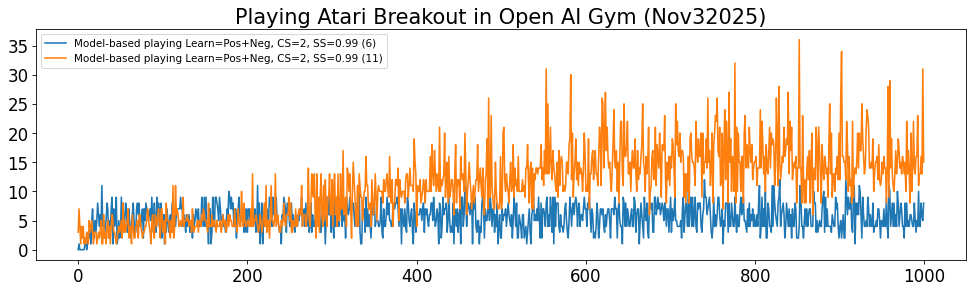

In [9]:
# Nov32025 Pos+Neg CS=2 Win 0.99: -cs=2

#python ./aigents-gym/breakout_eval1.py -o=model_Nov32025v09_PN_CS2_SS099_251115 -cs=2
score_avg=5.6; steps_avg=5181.6; lives_avg=0.4; lapse_avg="0:00:07.262721"; time="4:22:16.045522"
scores099 = [0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 2.0, 0, 1.0, 3.0, 2.0, 4.0, 1.0, 5.0, 7.0, 3.0, 2.0, 5.0, 3.0, 5.0, 8.0, 6.0, 4.0, 6.0, 4.0, 11.0, 4.0, 5.0, 2.0, 4.0, 5.0, 8.0, 7.0, 2.0, 5.0, 3.0, 7.0, 9.0, 1.0, 7.0, 4.0, 5.0, 9.0, 1.0, 2.0, 5.0, 2.0, 3.0, 9.0, 2.0, 8.0, 3.0, 5.0, 8.0, 7.0, 3.0, 4.0, 7.0, 3.0, 2.0, 5.0, 6.0, 8.0, 5.0, 3.0, 3.0, 7.0, 8.0, 6.0, 8.0, 4.0, 4.0, 6.0, 7.0, 2.0, 7.0, 5.0, 8.0, 7.0, 6.0, 5.0, 6.0, 7.0, 5.0, 9.0, 5.0, 3.0, 8.0, 4.0, 3.0, 9.0, 6.0, 8.0, 4.0, 7.0, 8.0, 2.0, 6.0, 6.0, 1.0, 6.0, 3.0, 7.0, 5.0, 3.0, 5.0, 6.0, 3.0, 8.0, 6.0, 4.0, 6.0, 4.0, 6.0, 7.0, 7.0, 7.0, 7.0, 9.0, 7.0, 7.0, 4.0, 6.0, 5.0, 3.0, 6.0, 4.0, 5.0, 6.0, 3.0, 3.0, 5.0, 2.0, 6.0, 4.0, 5.0, 7.0, 6.0, 5.0, 7.0, 4.0, 5.0, 4.0, 9.0, 6.0, 4.0, 9.0, 4.0, 9.0, 4.0, 4.0, 1.0, 7.0, 7.0, 1.0, 3.0, 9.0, 4.0, 4.0, 9.0, 9.0, 8.0, 7.0, 5.0, 9.0, 7.0, 5.0, 5.0, 6.0, 4.0, 5.0, 3.0, 5.0, 7.0, 6.0, 10.0, 9.0, 7.0, 9.0, 7.0, 8.0, 4.0, 4.0, 7.0, 2.0, 6.0, 7.0, 9.0, 6.0, 5.0, 5.0, 7.0, 6.0, 3.0, 7.0, 3.0, 7.0, 3.0, 7.0, 7.0, 5.0, 5.0, 4.0, 4.0, 4.0, 6.0, 7.0, 3.0, 4.0, 11.0, 3.0, 8.0, 1.0, 4.0, 8.0, 1.0, 6.0, 4.0, 6.0, 4.0, 7.0, 5.0, 5.0, 9.0, 8.0, 7.0, 4.0, 9.0, 6.0, 8.0, 8.0, 9.0, 5.0, 5.0, 4.0, 3.0, 4.0, 1.0, 6.0, 5.0, 9.0, 8.0, 7.0, 3.0, 8.0, 7.0, 6.0, 4.0, 4.0, 8.0, 4.0, 6.0, 4.0, 3.0, 6.0, 5.0, 4.0, 6.0, 5.0, 7.0, 6.0, 9.0, 4.0, 6.0, 7.0, 4.0, 8.0, 4.0, 7.0, 5.0, 3.0, 4.0, 8.0, 3.0, 6.0, 4.0, 5.0, 4.0, 8.0, 5.0, 4.0, 8.0, 9.0, 3.0, 3.0, 6.0, 6.0, 7.0, 6.0, 1.0, 5.0, 9.0, 9.0, 6.0, 6.0, 9.0, 3.0, 7.0, 5.0, 2.0, 9.0, 4.0, 4.0, 9.0, 7.0, 4.0, 9.0, 6.0, 8.0, 4.0, 7.0, 5.0, 6.0, 2.0, 9.0, 7.0, 6.0, 7.0, 9.0, 6.0, 8.0, 7.0, 8.0, 6.0, 4.0, 8.0, 6.0, 4.0, 7.0, 11.0, 3.0, 1.0, 1.0, 7.0, 6.0, 7.0, 3.0, 9.0, 4.0, 7.0, 4.0, 6.0, 4.0, 2.0, 6.0, 8.0, 6.0, 8.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 9.0, 3.0, 2.0, 7.0, 4.0, 4.0, 6.0, 9.0, 6.0, 8.0, 5.0, 5.0, 4.0, 4.0, 8.0, 8.0, 7.0, 8.0, 8.0, 9.0, 7.0, 4.0, 7.0, 7.0, 1.0, 7.0, 5.0, 4.0, 7.0, 4.0, 3.0, 9.0, 8.0, 5.0, 4.0, 6.0, 7.0, 3.0, 1.0, 8.0, 6.0, 3.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 5.0, 7.0, 8.0, 3.0, 7.0, 6.0, 7.0, 5.0, 4.0, 6.0, 6.0, 8.0, 8.0, 5.0, 9.0, 6.0, 4.0, 5.0, 7.0, 6.0, 1.0, 8.0, 7.0, 2.0, 4.0, 9.0, 6.0, 7.0, 7.0, 8.0, 3.0, 5.0, 9.0, 5.0, 3.0, 4.0, 3.0, 8.0, 1.0, 7.0, 6.0, 4.0, 7.0, 3.0, 6.0, 7.0, 1.0, 9.0, 9.0, 4.0, 6.0, 11.0, 9.0, 4.0, 7.0, 8.0, 7.0, 6.0, 8.0, 8.0, 1.0, 10.0, 7.0, 9.0, 4.0, 3.0, 5.0, 5.0, 1.0, 4.0, 3.0, 8.0, 9.0, 7.0, 2.0, 7.0, 5.0, 5.0, 7.0, 8.0, 5.0, 9.0, 7.0, 4.0, 7.0, 7.0, 3.0, 6.0, 4.0, 8.0, 1.0, 4.0, 6.0, 2.0, 2.0, 7.0, 5.0, 6.0, 6.0, 7.0, 4.0, 6.0, 8.0, 6.0, 5.0, 4.0, 6.0, 2.0, 5.0, 9.0, 7.0, 4.0, 8.0, 2.0, 2.0, 6.0, 5.0, 4.0, 2.0, 6.0, 6.0, 2.0, 3.0, 4.0, 1.0, 3.0, 5.0, 7.0, 3.0, 1.0, 6.0, 7.0, 9.0, 5.0, 6.0, 5.0, 7.0, 5.0, 9.0, 5.0, 2.0, 8.0, 2.0, 7.0, 7.0, 6.0, 4.0, 8.0, 9.0, 4.0, 6.0, 4.0, 9.0, 7.0, 3.0, 9.0, 1.0, 9.0, 4.0, 8.0, 8.0, 8.0, 4.0, 3.0, 6.0, 4.0, 4.0, 3.0, 4.0, 7.0, 8.0, 5.0, 3.0, 2.0, 5.0, 9.0, 7.0, 4.0, 7.0, 8.0, 6.0, 8.0, 9.0, 8.0, 4.0, 7.0, 8.0, 4.0, 6.0, 6.0, 5.0, 7.0, 9.0, 7.0, 7.0, 4.0, 8.0, 7.0, 9.0, 6.0, 3.0, 7.0, 6.0, 2.0, 3.0, 2.0, 4.0, 8.0, 6.0, 2.0, 4.0, 7.0, 7.0, 6.0, 7.0, 4.0, 3.0, 6.0, 4.0, 6.0, 7.0, 7.0, 5.0, 2.0, 7.0, 7.0, 7.0, 6.0, 9.0, 7.0, 7.0, 2.0, 7.0, 8.0, 5.0, 4.0, 4.0, 1.0, 9.0, 8.0, 4.0, 8.0, 4.0, 7.0, 6.0, 4.0, 4.0, 6.0, 7.0, 4.0, 4.0, 9.0, 8.0, 3.0, 6.0, 7.0, 7.0, 1.0, 5.0, 8.0, 6.0, 4.0, 2.0, 9.0, 6.0, 5.0, 8.0, 3.0, 2.0, 8.0, 8.0, 7.0, 8.0, 3.0, 3.0, 9.0, 9.0, 6.0, 7.0, 9.0, 7.0, 8.0, 6.0, 7.0, 8.0, 7.0, 5.0, 8.0, 7.0, 4.0, 7.0, 7.0, 3.0, 6.0, 9.0, 3.0, 7.0, 5.0, 6.0, 9.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 5.0, 2.0, 7.0, 9.0, 3.0, 6.0, 8.0, 7.0, 4.0, 11.0, 4.0, 8.0, 9.0, 4.0, 9.0, 4.0, 6.0, 9.0, 4.0, 3.0, 8.0, 7.0, 8.0, 8.0, 4.0, 3.0, 6.0, 7.0, 12.0, 9.0, 9.0, 6.0, 7.0, 8.0, 9.0, 6.0, 3.0, 2.0, 4.0, 9.0, 4.0, 6.0, 4.0, 6.0, 9.0, 9.0, 6.0, 4.0, 5.0, 7.0, 1.0, 5.0, 4.0, 8.0, 8.0, 8.0, 3.0, 8.0, 4.0, 4.0, 8.0, 6.0, 4.0, 4.0, 9.0, 5.0, 3.0, 6.0, 4.0, 4.0, 7.0, 9.0, 6.0, 8.0, 9.0, 5.0, 5.0, 4.0, 3.0, 7.0, 4.0, 8.0, 4.0, 6.0, 5.0, 7.0, 4.0, 6.0, 4.0, 4.0, 6.0, 4.0, 8.0, 11.0, 2.0, 4.0, 9.0, 4.0, 7.0, 4.0, 10.0, 2.0, 2.0, 8.0, 7.0, 4.0, 4.0, 3.0, 11.0, 4.0, 11.0, 8.0, 6.0, 5.0, 4.0, 8.0, 9.0, 12.0, 4.0, 6.0, 7.0, 8.0, 6.0, 2.0, 4.0, 8.0, 6.0, 4.0, 7.0, 4.0, 6.0, 2.0, 7.0, 4.0, 4.0, 8.0, 7.0, 2.0, 2.0, 2.0, 4.0, 11.0, 9.0, 4.0, 4.0, 2.0, 5.0, 7.0, 4.0, 7.0, 4.0, 6.0, 7.0, 7.0, 4.0, 4.0, 4.0, 10.0, 8.0, 8.0, 3.0, 5.0, 3.0, 4.0, 5.0, 4.0, 4.0, 7.0, 9.0, 10.0, 3.0, 9.0, 4.0, 7.0, 4.0, 4.0, 4.0, 4.0, 3.0, 6.0, 5.0, 4.0, 4.0, 9.0, 7.0, 8.0, 4.0, 2.0, 4.0, 5.0, 2.0, 4.0, 6.0, 2.0, 2.0, 12.0, 9.0, 6.0, 9.0, 7.0, 7.0, 9.0, 4.0, 3.0, 9.0, 11.0, 1.0, 8.0, 6.0, 8.0, 6.0, 11.0, 10.0, 6.0, 2.0, 9.0, 6.0, 4.0, 4.0, 5.0, 4.0, 9.0, 7.0, 4.0, 6.0, 4.0, 4.0, 8.0, 3.0, 4.0, 4.0, 5.0, 4.0, 7.0, 7.0, 5.0, 2.0, 5.0, 5.0, 4.0, 7.0, 4.0, 4.0, 9.0, 4.0, 2.0, 11.0, 10.0, 4.0, 6.0, 8.0, 4.0, 8.0, 4.0, 6.0, 4.0, 10.0, 8.0, 4.0, 6.0, 8.0, 7.0, 4.0, 4.0, 2.0, 8.0, 4.0, 8.0, 4.0, 5.0, 4.0, 6.0, 6.0, 5.0, 4.0, 4.0, 8.0, 5.0, 3.0, 5.0, 4.0, 10.0, 4.0, 4.0, 8.0, 6.0, 5.0, 8.0]
stepss099 = [489, 685, 494, 497, 489, 497, 500, 501, 616, 736, 510, 610, 855, 790, 975, 603, 1303, 18000, 910, 732, 1155, 902, 1151, 1766, 1502, 1024, 1506, 1022, 1067, 1027, 1152, 732, 18000, 1150, 1750, 990, 730, 1155, 904, 1630, 1280, 18000, 983, 1023, 1159, 1280, 608, 735, 1152, 723, 912, 1279, 727, 1750, 851, 1143, 1758, 1626, 854, 1026, 982, 903, 727, 1151, 1498, 1750, 1150, 851, 854, 18000, 1750, 1498, 1750, 1023, 18000, 1502, 18000, 723, 18000, 1151, 1750, 1626, 18000, 1151, 18000, 1623, 1150, 1279, 1150, 851, 1750, 1023, 18000, 1279, 18000, 1750, 1023, 979, 1750, 727, 1498, 1498, 606, 18000, 902, 18000, 1151, 854, 1150, 18000, 902, 1750, 1498, 1023, 1502, 1026, 1498, 995, 18000, 1626, 1626, 1279, 18000, 1623, 1023, 1498, 18000, 851, 18000, 1027, 1151, 1506, 903, 903, 1147, 727, 18000, 1023, 1143, 18000, 1502, 1210, 1626, 1027, 1158, 1023, 1279, 1271, 1023, 1279, 1036, 1280, 1095, 1024, 18000, 18000, 982, 18000, 900, 1279, 1024, 1026, 1279, 1279, 1750, 1550, 1150, 1279, 979, 1154, 1151, 18000, 1023, 1148, 18000, 1209, 982, 1335, 1911, 1279, 1626, 1279, 18000, 1750, 1027, 1027, 1626, 728, 18000, 18000, 1279, 18000, 1151, 1151, 1627, 1498, 978, 18000, 916, 1623, 18000, 1626, 18000, 1159, 1278, 1023, 1020, 1027, 18000, 18000, 912, 1096, 1067, 915, 1602, 18000, 18000, 1750, 18000, 18000, 1027, 1502, 1023, 1630, 1140, 1151, 1283, 1794, 18000, 1170, 1279, 18000, 1750, 1750, 1279, 18000, 1152, 1027, 900, 1023, 18000, 1506, 1152, 1283, 1750, 18000, 18000, 1750, 1623, 1335, 1035, 1023, 1750, 1023, 1498, 1023, 902, 18000, 1151, 1027, 1498, 1152, 18000, 1498, 1279, 1087, 1424, 1550, 18000, 1750, 1023, 18000, 1150, 900, 1023, 1750, 983, 1334, 1023, 1147, 1023, 1754, 1148, 18000, 1822, 1279, 18000, 18000, 1498, 1498, 18000, 18000, 18000, 1280, 1279, 1283, 18000, 1498, 1279, 986, 979, 18000, 788, 1280, 1023, 1023, 1279, 18000, 1023, 1279, 18000, 1750, 1023, 1626, 1150, 1407, 795, 1279, 18000, 1498, 1623, 1283, 1407, 1750, 979, 1687, 1498, 1024, 1750, 1498, 1023, 1623, 1067, 18000, 18000, 18000, 18000, 18000, 1626, 910, 1280, 1023, 1626, 18000, 1323, 1023, 723, 1327, 1750, 1498, 1754, 18000, 1151, 1151, 1148, 1023, 1024, 1271, 1280, 18000, 18000, 1626, 1023, 1023, 1498, 1279, 1498, 1750, 1151, 1151, 18000, 1023, 1754, 1750, 18000, 1750, 1750, 1279, 18000, 1023, 18000, 18000, 18000, 18000, 18000, 1024, 18000, 1027, 18000, 1279, 1750, 1155, 1023, 1419, 18000, 851, 18000, 1750, 18000, 18000, 18000, 1498, 18000, 1332, 18000, 1626, 1214, 979, 1750, 902, 18000, 18000, 18000, 1151, 1023, 18000, 1267, 1750, 1794, 1212, 1284, 18000, 1099, 1151, 18000, 1502, 18000, 1750, 18000, 18000, 1023, 1279, 1498, 18000, 18000, 18000, 18000, 18000, 1283, 1151, 18000, 18000, 18000, 1750, 18000, 1575, 1268, 18000, 1594, 18000, 1395, 18000, 18000, 1280, 1279, 1023, 1498, 1067, 1279, 1031, 1630, 1750, 18000, 18000, 1750, 1750, 18000, 1907, 18000, 1279, 1023, 911, 1150, 1150, 18000, 1023, 908, 1750, 1283, 18000, 18000, 18000, 1154, 18000, 18000, 1750, 1239, 1279, 18000, 1028, 18000, 18000, 847, 1267, 1023, 1751, 18000, 1023, 18000, 18000, 18000, 18000, 1148, 18000, 1267, 18000, 1023, 1498, 1754, 1328, 18000, 1026, 1498, 18000, 1147, 1279, 18000, 1023, 1750, 18000, 727, 1502, 1142, 971, 787, 1498, 1398, 18000, 18000, 1089, 18000, 906, 1228, 18000, 18000, 18000, 1270, 1626, 1279, 1151, 18000, 1300, 18000, 1280, 1280, 1150, 18000, 1750, 18000, 18000, 1626, 18000, 1033, 1750, 1283, 1028, 1334, 1031, 1279, 18000, 980, 1279, 18000, 1280, 18000, 1166, 1750, 1750, 1023, 18000, 1498, 1023, 1024, 18000, 1023, 18000, 1750, 18000, 18000, 18000, 1210, 1279, 18000, 1092, 18000, 1750, 1353, 1754, 1279, 1750, 1023, 1626, 1750, 1023, 18000, 1498, 1239, 1617, 1279, 18000, 18000, 1026, 1826, 18000, 1280, 1498, 902, 18000, 18000, 785, 983, 18000, 18000, 1750, 18000, 18000, 1023, 18000, 1626, 1498, 1626, 1091, 903, 1502, 18000, 1419, 18000, 18000, 1150, 18000, 1606, 18000, 1626, 1409, 1283, 18000, 18000, 18000, 18000, 1750, 1207, 1027, 1027, 18000, 1279, 1754, 1023, 1750, 1023, 18000, 1471, 1023, 18000, 1276, 18000, 1035, 1028, 1284, 1750, 18000, 1334, 18000, 1626, 18000, 18000, 1830, 18000, 1028, 18000, 1279, 1498, 1147, 1750, 18000, 18000, 1750, 1750, 1670, 1750, 18000, 18000, 1283, 1280, 1395, 1631, 1279, 1626, 1754, 1423, 18000, 1754, 18000, 1214, 1750, 18000, 1023, 18000, 18000, 972, 1410, 1279, 18000, 18000, 1207, 1332, 1279, 1147, 1275, 1023, 1023, 18000, 1123, 1272, 724, 1623, 1279, 18000, 18000, 1822, 1627, 1023, 1067, 1023, 1822, 1279, 1023, 1279, 1023, 1419, 1863, 1023, 901, 1750, 1627, 1750, 1750, 1023, 851, 18000, 1623, 2354, 1911, 1280, 1335, 1623, 1750, 1280, 1275, 18000, 18000, 1023, 1279, 1027, 1498, 1023, 1267, 1279, 1279, 18000, 1023, 1239, 983, 18000, 1208, 1023, 1739, 1750, 1750, 925, 1750, 18000, 18000, 1103, 1398, 1112, 1023, 1907, 1150, 18000, 1506, 1023, 1035, 1627, 1874, 1498, 1750, 1280, 1279, 1150, 1023, 18000, 1623, 1023, 1731, 1023, 18000, 18000, 1623, 1023, 1403, 1023, 1023, 18000, 1030, 1748, 1563, 785, 1028, 1283, 1023, 1627, 1023, 1818, 724, 724, 1754, 1627, 1023, 1023, 847, 1067, 1023, 1995, 1750, 1435, 1220, 1024, 1812, 1279, 1191, 1023, 1498, 1624, 1751, 18000, 18000, 1028, 1754, 1403, 1023, 1623, 1023, 1398, 733, 18000, 1023, 1024, 1750, 1526, 785, 18000, 18000, 1023, 1067, 1807, 1023, 18000, 727, 18000, 1405, 1107, 18000, 1023, 1339, 1535, 1627, 1023, 1023, 1086, 2006, 1738, 1515, 924, 1207, 838, 1087, 1232, 1023, 1023, 18000, 1687, 1895, 902, 1279, 1023, 1623, 1023, 1023, 1025, 1087, 850, 1498, 1210, 975, 18000, 1279, 1610, 1750, 1024, 724, 1023, 1217, 18000, 1023, 1410, 725, 729, 1665, 1280, 1324, 1659, 18000, 1627, 1279, 1023, 18000, 1280, 1673, 18000, 1535, 18000, 1732, 1332, 1067, 1404, 1498, 724, 1723, 1406, 1023, 1023, 1138, 1025, 1279, 18000, 1023, 18000, 1023, 1023, 18000, 18000, 1027, 1023, 1209, 1122, 18000, 1626, 1220, 726, 1147, 1151, 1023, 1407, 1026, 975, 1279, 1023, 725, 1067, 2006, 1023, 1323, 1826, 1023, 1822, 1101, 1495, 18000, 1991, 1722, 1023, 18000, 1754, 1594, 1023, 1023, 724, 1750, 1023, 18000, 1023, 1211, 1023, 18000, 1407, 1151, 1023, 1023, 1795, 1147, 915, 1210, 1023, 1475, 1023, 1023, 1592, 1413, 1215, 1821]
livess099 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 4, 1, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 4, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 4, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 3, 1, 1, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 4, 0, 1, 2, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 4, 0, 1, 3, 0, 0, 0, 1, 1, 1, 2, 1, 0, 0, 2, 2, 3, 0, 4, 0, 0, 2, 0, 3, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 4, 1, 0, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 4, 0, 1, 4, 4, 1, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 4, 0, 0, 1, 3, 4, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 3, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 1, 0, 1, 3, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 1, 1, 0, 2, 0, 1, 0, 0, 0, 1, 1, 4, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 1, 0, 4, 1, 0, 1, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099 = [0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 4, 5, 2, 2, 3, 3, 3, 4, 3, 3, 3, 5, 3, 4, 4, 5, 9, 4, 3, 4, 5, 3, 5, 3, 5, 7, 4, 3, 6, 4, 5, 4, 5, 4, 5, 7, 6, 4, 3, 4, 4, 5, 5, 6, 4, 7, 5, 3, 8, 4, 6, 3, 5, 8, 5, 4, 8, 6, 9, 6, 8, 6, 9, 9, 6, 6, 8, 6, 8, 9, 5, 8, 6, 6, 5, 7, 9, 7, 11, 7, 7, 8, 6, 7, 8, 5, 10, 9, 9, 10, 9, 12, 10, 11, 11, 7, 8, 7, 5, 7, 6, 11, 8, 8, 5, 6, 13, 7, 11, 8, 10, 8, 10, 9, 9, 7, 11, 10, 8, 9, 10, 16, 7, 10, 10, 29, 8, 8, 12, 10, 11, 9, 7, 6, 13, 8, 30, 12, 8, 10, 7, 6, 9, 11, 5, 14, 9, 10, 6, 14, 11, 9, 12, 10, 11, 10, 11, 8, 16, 15, 8, 27, 51, 8, 10, 16, 12, 8, 12, 13, 6, 11, 12, 7, 10, 10, 11, 13, 10, 5, 35, 12, 28, 15, 15, 13, 12, 12, 23, 11, 19, 14, 12, 10, 19, 16, 8, 10, 23, 5, 15, 12, 10, 12, 14, 12, 12, 8, 14, 14, 10, 18, 14, 17, 8, 14, 8, 13, 14, 14, 14, 10, 16, 10, 6, 12, 13, 14, 12, 14, 14, 6, 12, 49, 12, 13, 5, 18, 10, 13, 21, 23, 12, 8, 11, 9, 9, 8, 9, 21, 14, 9, 8, 9, 8, 15, 15, 12, 11, 8, 37, 18, 15, 15, 13, 11, 13, 12, 14, 15, 8, 9, 13, 9, 11, 8, 7, 32, 12, 11, 11, 12, 3, 32, 24, 17, 28, 14, 12, 17, 12, 11, 16, 11, 10, 8, 18, 6, 9, 25, 32, 10, 17, 19, 8, 10, 15, 9, 6, 30, 11, 9, 6, 14, 23, 10, 9, 17, 7, 6, 16, 9, 11, 56, 14, 8, 12, 9, 23, 11, 31, 19, 8, 13, 7, 10, 13, 17, 12, 17, 17, 29, 12, 19, 10, 11, 13, 11, 16, 13, 13, 11, 27, 18, 31, 9, 36, 3, 10, 7, 14, 12, 9, 14, 10, 10, 12, 13, 19, 18, 10, 23, 9, 9, 10, 27, 19, 71, 10, 21, 6, 11, 15, 14, 11, 14, 14, 33, 19, 10, 17, 13, 10, 21, 9, 21, 11, 17, 17, 16, 10, 8, 16, 34, 15, 17, 67, 9, 18, 12, 8, 10, 12, 13, 14, 8, 18, 9, 8, 46, 15, 16, 9, 21, 10, 18, 13, 11, 13, 27, 11, 14, 42, 24, 20, 10, 9, 14, 15, 24, 16, 10, 14, 40, 21, 9, 11, 23, 7, 7, 23, 36, 9, 8, 9, 40, 14, 15, 8, 13, 28, 8, 10, 18, 12, 15, 21, 13, 11, 11, 49, 12, 10, 13, 13, 13, 31, 21, 25, 12, 9, 21, 16, 9, 9, 11, 11, 9, 13, 12, 10, 13, 7, 64, 11, 18, 11, 26, 24, 7, 13, 18, 10, 13, 31, 11, 15, 16, 49, 11, 16, 30, 33, 37, 11, 15, 47, 12, 11, 7, 24, 9, 13, 24, 13, 86, 10, 101, 9, 14, 10, 7, 17, 16, 11, 14, 26, 9, 12, 16, 20, 12, 7, 11, 49, 10, 8, 14, 18, 16, 14, 15, 18, 13, 12, 15, 22, 12, 13, 10, 8, 14, 7, 39, 30, 19, 10, 29, 17, 4, 28, 11, 9, 15, 14, 28, 7, 12, 16, 20, 24, 31, 7, 10, 9, 27, 36, 11, 10, 8, 28, 14, 14, 15, 65, 28, 15, 20, 13, 12, 25, 17, 16, 19, 8, 49, 25, 8, 43, 28, 12, 11, 10, 25, 30, 10, 19, 54, 15, 12, 14, 15, 15, 10, 8, 17, 35, 7, 29, 7, 14, 8, 26, 11, 32, 12, 20, 37, 12, 21, 34, 13, 30, 16, 31, 16, 13, 6, 14, 22, 18, 10, 28, 13, 13, 13, 9, 16, 19, 4, 6, 31, 15, 52, 18, 12, 6, 32, 25, 18, 9, 11, 18, 11, 8, 13, 34, 21, 14, 11, 12, 12, 53, 19, 10, 15, 12, 50, 43, 9, 16, 9, 17, 16, 18, 62, 17, 55, 19, 6, 14, 15, 20, 25, 12, 10, 10, 17, 14, 13, 13, 16, 38, 36, 8, 23, 11, 6, 8, 13, 12, 33, 13, 7, 39, 49, 26, 18, 15, 11, 8, 9, 7, 12, 25, 15, 21, 6, 19, 11, 11, 17, 15, 4, 38, 17, 8, 13, 17, 66, 8, 11, 51, 7, 44, 17, 7, 24, 103, 7, 22, 15, 11, 11, 3, 21, 4, 23, 4, 5, 14, 30, 10, 4, 8, 12, 5, 17, 3, 8, 27, 7, 5, 76, 7, 5, 13, 23, 50, 20, 19, 35, 8, 2, 5, 30, 54, 32, 32, 9, 22, 14, 7, 34, 10, 18, 41, 10, 70, 25, 35, 28, 12, 10, 2, 12, 27, 15, 22, 10, 14, 16, 7, 4, 12, 23, 18, 35, 7, 8, 10, 18, 8, 29, 10, 10, 1, 10, 40, 6, 14, 29, 11, 21, 14, 7, 7, 31, 50, 18, 1, 8, 70, 18, 28, 36, 83, 14, 43, 31, 42, 9, 17, 15, 91, 63, 16, 7, 11, 5, 4, 6, 23, 24, 14, 7, 26, 24, 60, 14, 53, 7, 11, 39, 1, 9, 12, 1, 59, 26, 18, 28, 14, 36, 40, 12, 8, 14, 1, 32, 9, 87, 12, 24, 35, 27, 28, 9, 15, 15, 38, 17, 15, 8, 2, 35, 7, 16, 16, 10, 13, 1, 10, 23, 14, 15, 6, 46, 49, 15, 10, 10, 44, 12, 23, 5, 20, 9, 14, 12, 0, 22, 9, 24, 1, 28, 31, 0, 8, 34, 20, 6, 51, 26, 7, 26, 28, 25, 8, 1, 14, 5, 1, 15, 1, 22, 2, 11, 87, 12, 17, 8, 14, 16, 30, 38, 3, 15, 1, 0, 32, 29, 18, 7]
states099 = [324, 784, 1122, 1456, 1762, 2070, 2333, 2577, 2971, 3308, 3526, 3768, 3978, 4264, 4457, 4621, 4895, 4996, 5084, 5151, 5279, 5361, 5427, 5502, 5600, 5690, 5754, 5880, 5944, 6006, 6054, 6159, 6278, 6324, 6371, 6412, 6435, 6451, 6497, 6558, 6584, 6637, 6654, 6682, 6710, 6732, 6755, 6795, 6810, 6834, 6864, 6914, 6955, 6980, 7020, 7040, 7056, 7079, 7088, 7113, 7130, 7165, 7186, 7199, 7254, 7264, 7285, 7296, 7324, 7337, 7349, 7362, 7401, 7456, 7480, 7501, 7511, 7534, 7559, 7620, 7642, 7650, 7654, 7689, 7712, 7760, 7786, 7802, 7818, 7830, 7847, 7872, 7890, 7901, 7945, 7968, 7989, 8017, 8029, 8039, 8057, 8071, 8124, 8143, 8148, 8153, 8156, 8204, 8223, 8237, 8285, 8294, 8300, 8305, 8309, 8313, 8317, 8342, 8345, 8352, 8358, 8362, 8397, 8411, 8445, 8450, 8457, 8460, 8477, 8489, 8494, 8509, 8548, 8570, 8586, 8592, 8608, 8640, 8662, 8670, 8673, 8767, 8861, 8863, 8870, 8891, 8894, 8901, 8906, 8907, 8915, 8918, 9072, 9083, 9097, 9110, 9114, 9120, 9125, 9145, 9147, 9176, 9177, 9183, 9190, 9222, 9239, 9253, 9283, 9302, 9306, 9319, 9323, 9338, 9403, 9407, 9460, 9575, 9740, 9747, 9761, 9816, 9823, 9824, 9836, 9847, 9851, 9861, 9873, 9873, 9878, 9880, 9881, 9907, 9913, 9924, 10077, 10092, 10233, 10260, 10271, 10275, 10283, 10301, 10330, 10344, 10356, 10380, 10385, 10389, 10394, 10401, 10418, 10436, 10492, 10494, 10519, 10524, 10548, 10552, 10555, 10567, 10583, 10585, 10607, 10608, 10609, 10623, 10644, 10687, 10706, 10712, 10714, 10715, 10728, 10734, 10742, 10747, 10766, 10768, 10772, 10774, 10781, 10787, 10789, 10800, 10807, 10809, 10819, 10964, 11025, 11029, 11033, 11051, 11066, 11085, 11105, 11135, 11138, 11144, 11152, 11152, 11152, 11169, 11169, 11200, 11217, 11217, 11226, 11229, 11229, 11237, 11243, 11244, 11254, 11257, 11339, 11341, 11372, 11382, 11399, 11403, 11407, 11425, 11431, 11446, 11447, 11451, 11455, 11455, 11455, 11455, 11461, 11504, 11509, 11514, 11516, 11516, 11517, 11563, 11622, 11627, 11683, 11733, 11740, 11748, 11751, 11753, 11757, 11758, 11758, 11761, 11777, 11782, 11782, 11859, 11915, 11955, 11969, 11975, 11975, 11977, 12005, 12010, 12011, 12052, 12055, 12055, 12055, 12066, 12076, 12085, 12095, 12098, 12098, 12098, 12102, 12103, 12105, 12242, 12250, 12251, 12251, 12255, 12265, 12268, 12304, 12334, 12338, 12338, 12338, 12340, 12345, 12349, 12353, 12355, 12361, 12431, 12432, 12476, 12477, 12477, 12485, 12492, 12515, 12516, 12521, 12524, 12547, 12564, 12615, 12615, 12678, 12679, 12680, 12680, 12681, 12684, 12684, 12694, 12695, 12695, 12699, 12700, 12712, 12714, 12715, 12725, 12730, 12730, 12730, 12773, 12775, 12950, 12950, 12963, 12965, 12969, 12976, 12979, 12980, 12981, 12981, 13008, 13030, 13030, 13033, 13047, 13048, 13054, 13054, 13075, 13076, 13079, 13081, 13090, 13092, 13093, 13097, 13143, 13187, 13191, 13300, 13301, 13303, 13307, 13307, 13308, 13308, 13314, 13316, 13317, 13319, 13319, 13319, 13387, 13395, 13396, 13396, 13401, 13403, 13406, 13408, 13408, 13411, 13415, 13419, 13422, 13453, 13528, 13545, 13545, 13550, 13551, 13555, 13586, 13588, 13588, 13588, 13655, 13682, 13683, 13684, 13686, 13692, 13693, 13712, 13738, 13738, 13739, 13742, 13792, 13803, 13806, 13806, 13807, 13823, 13825, 13826, 13832, 13846, 13853, 13860, 13870, 13870, 13870, 13947, 13948, 13950, 13950, 13950, 13950, 13957, 13965, 13968, 13972, 13972, 13975, 13975, 13981, 13984, 13986, 13988, 13988, 13996, 13996, 13997, 13998, 13999, 14085, 14105, 14106, 14108, 14157, 14176, 14177, 14178, 14178, 14184, 14195, 14244, 14247, 14247, 14277, 14302, 14306, 14309, 14341, 14397, 14425, 14429, 14437, 14486, 14495, 14495, 14497, 14515, 14517, 14517, 14526, 14528, 14676, 14680, 14841, 14844, 14845, 14854, 14854, 14871, 14871, 14873, 14879, 14907, 14908, 14908, 14923, 14926, 14942, 14943, 14943, 14990, 15010, 15012, 15012, 15014, 15017, 15028, 15030, 15039, 15041, 15043, 15043, 15045, 15049, 15050, 15051, 15051, 15051, 15051, 15112, 15130, 15140, 15141, 15156, 15167, 15169, 15183, 15185, 15185, 15185, 15192, 15197, 15197, 15197, 15205, 15207, 15226, 15243, 15245, 15245, 15245, 15279, 15316, 15317, 15319, 15319, 15333, 15333, 15334, 15337, 15412, 15438, 15439, 15446, 15446, 15453, 15465, 15466, 15468, 15476, 15476, 15541, 15544, 15546, 15578, 15595, 15596, 15599, 15599, 15616, 15629, 15629, 15630, 15661, 15684, 15684, 15685, 15697, 15697, 15697, 15698, 15706, 15721, 15721, 15731, 15732, 15734, 15734, 15750, 15752, 15772, 15772, 15774, 15801, 15804, 15807, 15852, 15854, 15855, 15876, 15878, 15892, 15892, 15892, 15894, 15902, 15907, 15908, 15929, 15930, 15931, 15939, 15939, 15954, 15980, 15980, 15980, 15998, 16001, 16038, 16042, 16043, 16045, 16061, 16063, 16083, 16084, 16084, 16088, 16088, 16089, 16090, 16090, 16133, 16134, 16135, 16135, 16135, 16184, 16196, 16197, 16198, 16198, 16227, 16269, 16309, 16311, 16313, 16323, 16324, 16327, 16373, 16374, 16413, 16433, 16435, 16435, 16435, 16435, 16458, 16481, 16482, 16482, 16482, 16499, 16509, 16509, 16519, 16532, 16551, 16551, 16560, 16560, 16560, 16560, 16563, 16563, 16591, 16591, 16591, 16602, 16661, 16667, 16671, 16671, 16673, 16674, 16674, 16675, 16683, 16708, 16710, 16718, 16718, 16732, 16732, 16732, 16732, 16733, 16733, 16763, 16764, 16766, 16774, 16774, 16812, 16816, 16816, 16845, 16858, 16888, 16891, 16892, 16902, 17002, 17027, 17047, 17049, 17049, 17052, 17052, 17068, 17068, 17078, 17078, 17078, 17079, 17082, 17083, 17083, 17084, 17086, 17086, 17089, 17089, 17089, 17095, 17095, 17095, 17157, 17157, 17157, 17157, 17168, 17191, 17197, 17211, 17243, 17243, 17243, 17244, 17266, 17296, 17321, 17349, 17349, 17350, 17362, 17362, 17390, 17390, 17404, 17428, 17430, 17507, 17522, 17530, 17532, 17549, 17558, 17559, 17560, 17561, 17583, 17585, 17589, 17592, 17600, 17611, 17611, 17612, 17624, 17630, 17654, 17654, 17654, 17654, 17661, 17667, 17680, 17694, 17697, 17697, 17697, 17723, 17727, 17729, 17738, 17753, 17765, 17770, 17770, 17771, 17785, 17824, 17824, 17827, 17833, 17903, 17908, 17918, 17932, 17997, 17999, 18024, 18035, 18068, 18079, 18082, 18084, 18142, 18179, 18179, 18180, 18182, 18182, 18182, 18184, 18189, 18203, 18207, 18207, 18214, 18228, 18274, 18275, 18292, 18296, 18296, 18318, 18321, 18323, 18328, 18328, 18368, 18373, 18390, 18394, 18396, 18406, 18426, 18428, 18428, 18429, 18431, 18457, 18458, 18494, 18511, 18517, 18531, 18543, 18544, 18546, 18553, 18553, 18566, 18578, 18580, 18581, 18581, 18600, 18604, 18609, 18611, 18613, 18614, 18614, 18619, 18626, 18626, 18627, 18628, 18631, 18657, 18658, 18659, 18665, 18670, 18677, 18678, 18683, 18691, 18692, 18698, 18698, 18698, 18707, 18708, 18713, 18716, 18727, 18729, 18742, 18743, 18756, 18765, 18765, 18784, 18795, 18797, 18800, 18802, 18823, 18824, 18824, 18829, 18829, 18829, 18831, 18831, 18832, 18833, 18833, 18883, 18886, 18887, 18888, 18889, 18893, 18897, 18906, 18907, 18910, 18911, 18911, 18930, 18934, 18948, 18949]

#python ./aigents-gym/breakout_eval1.py -o=model_Nov32025v09_PN_CS2_SS099_251116 -cs=2
score_avg=11.2; steps_avg=2927.6; lives_avg=0.2; lapse_avg="0:00:04.042743"; time="5:19:02.466544"
scores099a = [3.0, 7.0, 4.0, 1.0, 4.0, 2.0, 4.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 5.0, 3.0, 4.0, 5.0, 3.0, 1.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 5.0, 1.0, 1.0, 6.0, 2.0, 3.0, 1.0, 4.0, 5.0, 2.0, 4.0, 1.0, 4.0, 6.0, 5.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 2.0, 8.0, 3.0, 5.0, 3.0, 4.0, 5.0, 7.0, 2.0, 4.0, 4.0, 1.0, 6.0, 4.0, 2.0, 2.0, 4.0, 4.0, 5.0, 2.0, 6.0, 6.0, 4.0, 3.0, 2.0, 3.0, 3.0, 4.0, 4.0, 5.0, 7.0, 6.0, 4.0, 3.0, 1.0, 5.0, 6.0, 3.0, 2.0, 6.0, 5.0, 4.0, 6.0, 7.0, 4.0, 2.0, 7.0, 7.0, 3.0, 3.0, 5.0, 1.0, 8.0, 5.0, 5.0, 5.0, 3.0, 2.0, 5.0, 3.0, 11.0, 2.0, 4.0, 11.0, 6.0, 7.0, 6.0, 4.0, 4.0, 5.0, 4.0, 5.0, 9.0, 4.0, 5.0, 5.0, 5.0, 6.0, 5.0, 4.0, 5.0, 5.0, 3.0, 7.0, 4.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, 5.0, 5.0, 4.0, 6.0, 5.0, 7.0, 6.0, 5.0, 5.0, 4.0, 3.0, 8.0, 4.0, 4.0, 4.0, 6.0, 4.0, 5.0, 5.0, 4.0, 3.0, 5.0, 4.0, 4.0, 4.0, 5.0, 3.0, 4.0, 6.0, 5.0, 4.0, 5.0, 3.0, 4.0, 6.0, 4.0, 6.0, 5.0, 5.0, 4.0, 4.0, 4.0, 7.0, 4.0, 4.0, 3.0, 7.0, 5.0, 4.0, 4.0, 10.0, 6.0, 4.0, 8.0, 5.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 7.0, 4.0, 13.0, 4.0, 5.0, 5.0, 6.0, 5.0, 4.0, 3.0, 4.0, 6.0, 5.0, 3.0, 4.0, 6.0, 8.0, 4.0, 11.0, 3.0, 5.0, 5.0, 2.0, 5.0, 11.0, 5.0, 5.0, 4.0, 5.0, 13.0, 4.0, 5.0, 6.0, 4.0, 3.0, 3.0, 5.0, 4.0, 5.0, 8.0, 5.0, 4.0, 6.0, 6.0, 6.0, 9.0, 5.0, 8.0, 3.0, 3.0, 5.0, 4.0, 4.0, 7.0, 4.0, 4.0, 6.0, 7.0, 6.0, 6.0, 11.0, 4.0, 6.0, 6.0, 6.0, 4.0, 5.0, 7.0, 14.0, 5.0, 4.0, 8.0, 13.0, 10.0, 9.0, 13.0, 6.0, 2.0, 13.0, 4.0, 9.0, 3.0, 9.0, 13.0, 6.0, 4.0, 11.0, 5.0, 12.0, 7.0, 4.0, 9.0, 9.0, 13.0, 6.0, 6.0, 12.0, 4.0, 11.0, 13.0, 6.0, 9.0, 4.0, 13.0, 5.0, 5.0, 13.0, 7.0, 7.0, 17.0, 6.0, 7.0, 9.0, 4.0, 14.0, 13.0, 10.0, 13.0, 7.0, 2.0, 10.0, 15.0, 12.0, 9.0, 5.0, 4.0, 11.0, 4.0, 13.0, 11.0, 9.0, 9.0, 5.0, 8.0, 10.0, 10.0, 16.0, 11.0, 11.0, 7.0, 7.0, 8.0, 4.0, 12.0, 9.0, 6.0, 8.0, 13.0, 9.0, 5.0, 10.0, 11.0, 10.0, 10.0, 10.0, 10.0, 8.0, 12.0, 10.0, 10.0, 12.0, 13.0, 10.0, 9.0, 16.0, 10.0, 8.0, 12.0, 4.0, 8.0, 8.0, 12.0, 12.0, 11.0, 14.0, 5.0, 12.0, 10.0, 9.0, 10.0, 10.0, 10.0, 8.0, 12.0, 13.0, 13.0, 9.0, 11.0, 14.0, 11.0, 11.0, 11.0, 10.0, 19.0, 15.0, 13.0, 4.0, 11.0, 10.0, 10.0, 12.0, 8.0, 9.0, 10.0, 12.0, 11.0, 8.0, 12.0, 10.0, 10.0, 10.0, 10.0, 16.0, 10.0, 18.0, 13.0, 11.0, 17.0, 13.0, 10.0, 13.0, 11.0, 10.0, 21.0, 10.0, 12.0, 11.0, 12.0, 13.0, 20.0, 9.0, 13.0, 15.0, 8.0, 16.0, 9.0, 10.0, 12.0, 12.0, 10.0, 6.0, 13.0, 18.0, 8.0, 12.0, 11.0, 12.0, 7.0, 16.0, 13.0, 12.0, 13.0, 10.0, 20.0, 13.0, 6.0, 10.0, 12.0, 15.0, 12.0, 10.0, 7.0, 9.0, 11.0, 8.0, 10.0, 12.0, 12.0, 18.0, 10.0, 12.0, 14.0, 11.0, 9.0, 14.0, 8.0, 6.0, 12.0, 13.0, 19.0, 7.0, 26.0, 9.0, 9.0, 23.0, 11.0, 9.0, 7.0, 7.0, 15.0, 10.0, 8.0, 7.0, 7.0, 8.0, 16.0, 7.0, 8.0, 20.0, 21.0, 12.0, 10.0, 13.0, 11.0, 10.0, 8.0, 12.0, 15.0, 10.0, 11.0, 18.0, 9.0, 14.0, 11.0, 12.0, 10.0, 16.0, 10.0, 10.0, 10.0, 10.0, 12.0, 10.0, 11.0, 9.0, 14.0, 14.0, 18.0, 12.0, 8.0, 14.0, 15.0, 7.0, 14.0, 7.0, 13.0, 12.0, 14.0, 14.0, 13.0, 14.0, 14.0, 14.0, 18.0, 12.0, 14.0, 11.0, 17.0, 13.0, 31.0, 13.0, 25.0, 13.0, 15.0, 21.0, 14.0, 12.0, 17.0, 14.0, 13.0, 11.0, 10.0, 15.0, 9.0, 17.0, 11.0, 15.0, 16.0, 15.0, 10.0, 11.0, 10.0, 11.0, 15.0, 15.0, 13.0, 18.0, 19.0, 30.0, 12.0, 20.0, 9.0, 13.0, 15.0, 19.0, 12.0, 15.0, 11.0, 15.0, 13.0, 14.0, 13.0, 10.0, 14.0, 20.0, 16.0, 10.0, 11.0, 10.0, 19.0, 7.0, 13.0, 13.0, 16.0, 17.0, 12.0, 15.0, 17.0, 13.0, 13.0, 11.0, 16.0, 21.0, 19.0, 11.0, 26.0, 25.0, 14.0, 20.0, 27.0, 17.0, 21.0, 16.0, 14.0, 15.0, 12.0, 10.0, 14.0, 18.0, 24.0, 15.0, 14.0, 17.0, 10.0, 15.0, 8.0, 16.0, 22.0, 22.0, 13.0, 11.0, 25.0, 16.0, 16.0, 18.0, 22.0, 13.0, 13.0, 15.0, 10.0, 15.0, 17.0, 14.0, 14.0, 19.0, 13.0, 10.0, 17.0, 12.0, 14.0, 13.0, 16.0, 18.0, 25.0, 15.0, 14.0, 10.0, 16.0, 13.0, 15.0, 21.0, 6.0, 10.0, 11.0, 16.0, 17.0, 12.0, 13.0, 21.0, 11.0, 18.0, 16.0, 14.0, 20.0, 15.0, 9.0, 18.0, 18.0, 17.0, 23.0, 12.0, 8.0, 15.0, 12.0, 16.0, 11.0, 16.0, 14.0, 19.0, 18.0, 14.0, 9.0, 25.0, 18.0, 22.0, 17.0, 16.0, 20.0, 15.0, 17.0, 17.0, 16.0, 9.0, 13.0, 8.0, 13.0, 10.0, 16.0, 8.0, 19.0, 20.0, 16.0, 15.0, 15.0, 14.0, 11.0, 22.0, 17.0, 15.0, 19.0, 16.0, 16.0, 20.0, 9.0, 20.0, 13.0, 15.0, 15.0, 19.0, 14.0, 26.0, 15.0, 17.0, 11.0, 14.0, 20.0, 8.0, 18.0, 20.0, 23.0, 22.0, 26.0, 17.0, 16.0, 21.0, 11.0, 12.0, 20.0, 7.0, 17.0, 24.0, 12.0, 22.0, 17.0, 8.0, 27.0, 15.0, 19.0, 10.0, 16.0, 15.0, 10.0, 32.0, 8.0, 21.0, 10.0, 20.0, 15.0, 15.0, 10.0, 16.0, 16.0, 8.0, 20.0, 23.0, 14.0, 18.0, 15.0, 14.0, 21.0, 17.0, 15.0, 18.0, 12.0, 14.0, 15.0, 15.0, 16.0, 11.0, 14.0, 14.0, 14.0, 24.0, 14.0, 22.0, 18.0, 13.0, 16.0, 10.0, 18.0, 14.0, 13.0, 17.0, 21.0, 14.0, 20.0, 18.0, 19.0, 18.0, 11.0, 14.0, 26.0, 19.0, 11.0, 28.0, 15.0, 12.0, 14.0, 16.0, 15.0, 21.0, 16.0, 17.0, 19.0, 18.0, 27.0, 13.0, 22.0, 17.0, 21.0, 12.0, 14.0, 15.0, 14.0, 16.0, 8.0, 14.0, 14.0, 36.0, 14.0, 14.0, 8.0, 23.0, 12.0, 8.0, 12.0, 8.0, 14.0, 16.0, 12.0, 17.0, 8.0, 15.0, 20.0, 6.0, 13.0, 14.0, 12.0, 21.0, 17.0, 10.0, 21.0, 17.0, 13.0, 8.0, 18.0, 14.0, 12.0, 16.0, 15.0, 13.0, 14.0, 9.0, 18.0, 25.0, 13.0, 20.0, 9.0, 13.0, 13.0, 10.0, 14.0, 13.0, 16.0, 12.0, 20.0, 12.0, 26.0, 34.0, 16.0, 16.0, 15.0, 15.0, 12.0, 22.0, 18.0, 10.0, 16.0, 11.0, 12.0, 8.0, 22.0, 9.0, 13.0, 14.0, 13.0, 15.0, 20.0, 14.0, 20.0, 17.0, 17.0, 25.0, 19.0, 16.0, 13.0, 14.0, 20.0, 24.0, 23.0, 21.0, 14.0, 14.0, 15.0, 14.0, 19.0, 10.0, 13.0, 15.0, 15.0, 16.0, 12.0, 18.0, 12.0, 11.0, 12.0, 15.0, 13.0, 16.0, 14.0, 14.0, 8.0, 14.0, 28.0, 9.0, 29.0, 14.0, 19.0, 13.0, 11.0, 10.0, 13.0, 17.0, 13.0, 15.0, 19.0, 17.0, 14.0, 15.0, 13.0, 16.0, 15.0, 13.0, 15.0, 10.0, 22.0, 13.0, 17.0, 13.0, 8.0, 20.0, 10.0, 14.0, 22.0, 14.0, 13.0, 16.0, 16.0, 23.0, 11.0, 13.0, 13.0, 16.0, 13.0, 31.0, 15.0]
stepss099a = [908, 987, 959, 607, 1050, 728, 1042, 18000, 732, 18000, 907, 811, 604, 1152, 913, 1043, 1240, 843, 614, 913, 920, 850, 610, 739, 838, 718, 863, 1159, 18000, 604, 1340, 727, 916, 18000, 1034, 1154, 732, 958, 18000, 1038, 1430, 1224, 909, 844, 727, 602, 727, 843, 963, 851, 959, 1229, 728, 1086, 856, 1088, 917, 1029, 1150, 976, 726, 979, 1043, 604, 1263, 1014, 18000, 731, 1022, 1028, 1082, 798, 1271, 1263, 1019, 927, 730, 904, 857, 1029, 954, 1082, 1395, 1294, 1015, 901, 18000, 1284, 1335, 838, 722, 1410, 1224, 1029, 1266, 1332, 976, 794, 1538, 1477, 838, 835, 1093, 18000, 1522, 1158, 1087, 1167, 848, 18000, 1232, 868, 1107, 727, 1025, 1111, 1271, 975, 1274, 1041, 955, 1151, 973, 1159, 1662, 1029, 1139, 1227, 1147, 1346, 1147, 1024, 1139, 1083, 841, 1470, 1024, 843, 1025, 1027, 1023, 1139, 839, 1163, 1139, 974, 1291, 1139, 1526, 1270, 1164, 1092, 960, 841, 1536, 1024, 1025, 1028, 1238, 1028, 1139, 1086, 990, 848, 1139, 1026, 1027, 1025, 1138, 848, 958, 1295, 1165, 1023, 1167, 843, 955, 1284, 1023, 1269, 1161, 1143, 1025, 1027, 1043, 1456, 1023, 1025, 839, 1473, 1147, 971, 958, 1853, 1274, 958, 1600, 1138, 1031, 1027, 1093, 1139, 969, 969, 1409, 967, 1513, 1025, 1150, 1084, 1206, 1142, 1023, 839, 1024, 1338, 1139, 851, 1044, 1355, 1590, 967, 1474, 849, 1099, 1220, 727, 1139, 1776, 1167, 1173, 953, 1211, 1691, 1030, 1162, 1207, 1025, 837, 844, 1220, 953, 1210, 1768, 1210, 955, 1254, 1410, 1351, 1658, 1139, 1512, 840, 837, 1166, 953, 1023, 1482, 1023, 1024, 1303, 1615, 1374, 1280, 1489, 979, 1369, 1236, 1297, 1023, 1104, 1614, 2246, 1163, 1024, 1531, 1865, 1756, 1231, 2134, 1428, 724, 1919, 1025, 1525, 915, 1548, 1735, 1347, 1028, 1919, 1095, 1553, 18000, 1025, 1662, 1594, 1820, 1428, 1428, 2199, 1023, 1856, 1731, 1428, 1689, 1025, 1841, 1139, 1221, 1926, 1325, 18000, 2318, 1301, 1362, 1978, 1026, 1960, 1734, 1804, 1735, 1487, 728, 1883, 2054, 2095, 1759, 1168, 1023, 1874, 1028, 1820, 1865, 1598, 1608, 1164, 1640, 1800, 1804, 2139, 2000, 2000, 1505, 1508, 1500, 1023, 2071, 1545, 1299, 1465, 2254, 1609, 1070, 1800, 1876, 1804, 1809, 1749, 1804, 1523, 2127, 1747, 1930, 2119, 1731, 1804, 1598, 2084, 1750, 1537, 1970, 1024, 1497, 1502, 2132, 2132, 2064, 1954, 1219, 2128, 1739, 1689, 1804, 1797, 1854, 1487, 2078, 2283, 1833, 1767, 1983, 2523, 1983, 1987, 1898, 1729, 2837, 2136, 2239, 959, 1983, 1804, 1804, 2179, 1475, 1612, 1804, 1604, 1983, 1496, 2186, 1804, 1801, 1805, 1804, 2494, 1891, 2461, 2247, 2005, 2176, 1731, 1798, 1820, 1998, 1898, 2946, 1804, 1630, 2094, 2183, 1735, 2728, 1541, 2466, 2530, 1476, 2155, 1686, 1733, 18000, 2124, 1895, 1273, 2385, 2366, 1637, 2182, 1996, 2111, 1601, 2288, 2371, 1630, 2072, 1733, 2474, 2335, 1417, 1775, 2179, 2138, 1849, 1769, 1522, 1819, 2049, 1707, 1966, 2186, 1630, 2019, 1799, 1630, 2266, 1987, 1824, 2381, 1707, 1408, 2179, 2368, 2594, 1443, 2958, 1811, 1683, 2927, 2000, 18000, 1465, 18000, 2472, 1792, 1707, 18000, 1515, 1707, 2124, 1531, 1809, 2350, 2447, 1650, 1736, 2246, 1915, 1789, 1727, 2198, 2574, 1775, 2000, 2174, 1691, 2514, 1975, 18000, 2081, 2184, 1996, 1775, 1804, 1794, 18000, 1804, 1975, 1803, 18000, 2567, 2486, 18000, 18000, 2514, 2700, 1467, 2567, 1446, 2331, 1989, 2526, 2088, 1888, 2354, 2586, 2316, 2699, 1711, 1480, 1975, 2061, 2387, 3340, 2390, 2347, 2072, 2650, 3094, 2115, 1647, 2600, 2103, 2077, 1976, 18000, 2635, 18000, 2065, 1524, 1606, 2123, 1593, 18000, 1975, 18000, 1927, 1593, 2179, 2014, 2086, 2063, 3890, 2253, 2351, 1899, 2363, 2709, 2568, 2119, 2759, 1990, 2767, 2310, 2376, 2578, 1733, 2470, 1784, 2377, 18000, 2057, 18000, 2174, 1422, 1739, 1743, 2276, 2424, 1647, 2759, 2376, 2155, 2363, 2002, 1705, 2425, 3316, 1928, 2461, 3333, 2007, 3049, 3066, 2464, 18000, 18000, 2327, 2762, 18000, 1781, 2372, 2305, 2682, 2759, 2505, 2433, 1911, 2759, 1521, 2123, 2784, 3407, 1743, 1523, 2675, 2501, 2414, 2539, 2856, 2125, 2069, 2763, 18000, 2766, 2245, 2505, 2327, 2680, 1789, 1775, 2470, 1993, 2505, 2291, 2124, 2802, 3007, 2759, 2505, 1804, 2414, 2355, 1937, 2674, 18000, 1887, 1524, 2419, 2930, 2206, 2186, 2525, 2075, 2580, 2740, 2016, 2962, 2216, 1798, 2802, 3184, 2470, 3334, 1720, 18000, 2795, 1722, 2414, 1605, 2338, 2372, 2153, 2810, 2017, 1689, 2867, 2777, 18000, 2065, 2414, 2898, 2326, 2956, 1967, 2414, 1608, 1860, 1519, 18000, 1804, 2287, 1520, 2246, 2998, 2414, 2220, 2216, 2372, 1524, 18000, 2470, 2216, 2630, 2276, 2414, 2919, 1790, 2439, 18000, 2216, 2216, 2236, 2372, 2954, 2216, 18000, 2093, 2379, 2565, 1519, 2065, 2895, 2730, 2952, 3046, 2705, 2414, 2971, 1525, 1710, 2396, 18000, 2470, 3032, 1993, 3171, 2608, 1525, 3587, 2473, 2706, 1915, 2381, 2216, 1860, 3175, 18000, 2975, 1911, 2261, 2216, 2216, 1911, 2419, 2164, 1520, 2226, 2730, 2007, 2477, 1999, 2018, 2272, 2466, 2594, 2476, 18000, 2020, 2206, 2298, 2181, 1526, 2056, 2018, 18000, 2534, 2018, 2630, 18000, 1904, 2365, 1911, 2578, 2018, 18000, 2461, 2435, 2018, 2872, 2598, 2353, 2603, 1523, 2018, 3315, 2518, 1525, 3153, 2140, 18000, 2018, 18000, 2279, 3070, 2185, 2402, 2682, 2603, 3187, 1906, 2722, 2384, 3070, 18000, 18000, 1975, 1952, 2173, 1519, 2380, 2020, 3602, 18000, 2018, 18000, 2815, 1993, 18000, 18000, 1520, 2018, 2341, 18000, 2868, 1520, 2378, 2181, 18000, 18000, 2019, 18000, 2378, 2312, 1804, 3070, 2306, 1904, 18000, 2602, 2018, 1720, 2504, 2693, 18000, 2394, 1595, 2718, 3151, 2328, 2737, 1612, 2329, 1904, 1409, 2100, 2200, 2669, 1993, 2872, 18000, 2610, 3829, 2410, 2669, 2298, 2206, 1709, 3126, 2955, 1804, 18000, 2000, 2215, 1519, 2661, 1605, 2374, 2505, 2069, 2215, 2399, 2505, 2879, 2530, 2327, 3164, 2259, 2124, 1907, 2018, 2486, 3100, 18000, 3068, 2097, 2494, 2759, 2505, 2450, 18000, 2387, 2759, 2651, 2770, 1719, 3071, 18000, 18000, 18000, 2690, 1904, 2743, 18000, 2022, 18000, 2100, 3650, 18000, 2594, 2021, 2714, 2365, 1893, 1715, 2380, 2618, 2380, 2760, 3306, 2982, 2566, 2746, 2369, 2125, 2760, 2369, 2760, 1711, 3454, 2365, 2246, 2380, 1485, 3166, 1792, 2505, 2619, 2566, 2380, 2809, 2123, 3782, 1769, 2073, 2069, 2123, 2162, 3332, 2763]
livess099a = [0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 4, 4, 0, 0, 0, 1, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099a = [1, 1, 1, 1, 2, 1, 2, 5, 2, 5, 3, 5, 3, 4, 4, 3, 5, 4, 4, 2, 4, 5, 3, 5, 5, 4, 4, 4, 5, 5, 4, 5, 2, 7, 6, 4, 5, 6, 5, 8, 7, 4, 3, 3, 7, 8, 7, 5, 8, 5, 9, 7, 8, 4, 7, 9, 6, 4, 5, 7, 9, 13, 13, 5, 6, 9, 7, 7, 7, 9, 6, 19, 3, 4, 6, 13, 10, 13, 12, 4, 8, 9, 6, 7, 8, 4, 6, 14, 12, 10, 7, 12, 6, 6, 13, 10, 8, 25, 10, 21, 10, 11, 10, 6, 9, 10, 15, 16, 18, 16, 8, 18, 11, 16, 7, 13, 13, 10, 7, 16, 10, 11, 6, 7, 18, 4, 6, 12, 8, 7, 3, 7, 5, 5, 16, 22, 5, 15, 5, 9, 3, 5, 10, 15, 7, 20, 14, 6, 16, 6, 22, 11, 17, 12, 25, 6, 8, 9, 24, 7, 6, 14, 18, 21, 6, 14, 6, 5, 8, 18, 14, 18, 4, 7, 15, 11, 4, 9, 2, 23, 16, 6, 4, 12, 7, 11, 2, 5, 12, 12, 1, 10, 17, 28, 13, 19, 20, 15, 13, 12, 18, 6, 5, 5, 17, 20, 31, 6, 10, 27, 26, 11, 2, 9, 6, 7, 3, 13, 10, 21, 10, 15, 29, 17, 13, 10, 17, 5, 46, 9, 23, 13, 20, 27, 21, 12, 16, 10, 4, 12, 4, 7, 19, 48, 17, 15, 9, 35, 29, 27, 10, 42, 16, 6, 19, 13, 2, 29, 4, 10, 18, 12, 35, 22, 36, 21, 14, 3, 17, 2, 26, 13, 42, 43, 5, 53, 14, 62, 28, 23, 26, 3, 21, 6, 11, 20, 27, 8, 11, 9, 7, 25, 16, 9, 6, 22, 5, 8, 41, 34, 24, 3, 23, 22, 12, 12, 3, 32, 11, 12, 44, 11, 7, 31, 36, 22, 69, 5, 12, 12, 7, 6, 19, 14, 54, 24, 41, 15, 16, 1, 31, 10, 9, 25, 19, 25, 32, 45, 5, 8, 33, 11, 4, 21, 27, 8, 3, 38, 12, 31, 19, 29, 15, 22, 23, 28, 10, 12, 28, 2, 15, 41, 31, 26, 33, 25, 2, 22, 38, 15, 6, 21, 10, 25, 27, 52, 6, 62, 25, 32, 36, 29, 11, 3, 5, 31, 12, 15, 59, 19, 10, 3, 60, 2, 27, 9, 14, 79, 37, 26, 18, 13, 4, 2, 5, 24, 13, 6, 16, 4, 6, 22, 4, 44, 38, 1, 85, 13, 27, 6, 10, 33, 8, 28, 23, 43, 8, 72, 3, 20, 30, 24, 6, 66, 22, 30, 40, 3, 29, 42, 23, 27, 42, 38, 44, 13, 33, 17, 10, 27, 22, 6, 46, 9, 2, 18, 6, 60, 22, 12, 15, 7, 43, 22, 16, 63, 24, 47, 23, 24, 21, 6, 60, 20, 12, 39, 41, 13, 42, 2, 19, 3, 33, 50, 9, 53, 50, 33, 34, 4, 37, 7, 30, 35, 14, 6, 39, 11, 3, 7, 29, 34, 26, 32, 20, 19, 23, 22, 13, 29, 21, 37, 5, 7, 69, 5, 38, 21, 26, 58, 21, 37, 3, 5, 33, 51, 3, 2, 8, 12, 21, 28, 19, 12, 9, 14, 19, 9, 16, 10, 22, 14, 37, 31, 4, 21, 18, 32, 6, 17, 2, 35, 33, 38, 19, 49, 17, 16, 30, 19, 19, 28, 6, 18, 7, 23, 23, 11, 31, 9, 9, 15, 46, 15, 6, 25, 42, 21, 51, 29, 38, 14, 81, 26, 20, 39, 19, 22, 26, 13, 20, 8, 12, 14, 40, 69, 5, 17, 20, 15, 23, 24, 18, 20, 52, 10, 7, 5, 18, 24, 31, 7, 21, 12, 32, 11, 20, 24, 21, 57, 48, 10, 36, 52, 52, 18, 18, 2, 19, 15, 11, 9, 26, 25, 9, 16, 61, 8, 17, 8, 15, 38, 28, 11, 2, 40, 62, 15, 51, 34, 57, 8, 16, 31, 51, 49, 17, 3, 41, 26, 15, 8, 11, 12, 14, 3, 22, 63, 14, 6, 4, 10, 9, 12, 35, 8, 9, 6, 18, 57, 36, 22, 6, 37, 6, 28, 34, 40, 3, 6, 26, 17, 11, 66, 13, 6, 78, 8, 18, 23, 6, 10, 28, 14, 34, 13, 29, 34, 15, 32, 15, 74, 41, 47, 16, 28, 16, 5, 30, 11, 5, 9, 7, 23, 27, 16, 31, 3, 9, 3, 37, 9, 2, 11, 5, 5, 46, 40, 13, 12, 2, 5, 11, 3, 42, 6, 6, 25, 28, 33, 3, 52, 21, 52, 43, 43, 26, 14, 32, 1, 21, 6, 9, 10, 50, 13, 40, 18, 9, 57, 20, 22, 5, 34, 2, 37, 43, 14, 22, 17, 33, 11, 11, 23, 9, 29, 3, 22, 47, 24, 10, 5, 23, 21, 3, 31, 5, 7, 24, 27, 57, 74, 35, 17, 2, 15, 33, 2, 12, 21, 12, 13, 5, 7, 2, 11, 7, 23, 7, 50, 3, 28, 18, 3, 1, 27, 35, 1, 12, 48, 8, 1, 15, 37, 4, 31, 10, 11, 8, 49, 14, 80, 27, 13, 22, 5, 25, 9, 21, 2, 27, 13, 97, 6, 3, 7, 10, 5, 14, 7, 6, 9, 23, 6, 9, 14, 11, 32, 7, 21, 16, 7, 40, 12, 10, 2, 41, 10, 16, 28, 3, 15, 34, 30, 21, 27, 45, 33, 55, 10, 45, 34, 12, 7, 13, 23, 24, 21, 10, 2, 8, 41, 29, 13, 30, 30, 12, 10, 2, 32, 0, 53, 12, 61, 9, 12, 27, 18, 11, 17, 23, 55, 10, 50, 52, 11, 23, 6, 4, 11, 7, 33, 44, 37, 52, 40, 32, 10, 14, 49, 13, 34, 6, 42, 59, 5, 24, 7, 14, 7, 15, 55, 7, 30, 1, 26, 25, 133, 11, 61, 25, 13, 10, 24, 10, 17, 46, 3, 2, 22, 19, 15, 43, 19, 32, 2, 8, 3, 7, 45, 3, 36, 6, 32, 42, 5, 13, 74, 33, 1, 16, 16, 38, 47, 13, 15, 9, 55, 40, 4]
states099a = [582, 1041, 1346, 1592, 1944, 2107, 2301, 2383, 2525, 2563, 2709, 3031, 3188, 3460, 3681, 3837, 3991, 4129, 4254, 4318, 4423, 4554, 4658, 4805, 4916, 5033, 5111, 5183, 5202, 5284, 5366, 5430, 5457, 5484, 5530, 5610, 5654, 5770, 5784, 5863, 6027, 6077, 6094, 6119, 6170, 6302, 6395, 6448, 6528, 6570, 6721, 6845, 6876, 6928, 7033, 7115, 7181, 7270, 7356, 7402, 7440, 7572, 7700, 7736, 7778, 7873, 7884, 7951, 8045, 8144, 8205, 8366, 8406, 8420, 8461, 8563, 8622, 8766, 8902, 8972, 9014, 9068, 9149, 9195, 9254, 9270, 9275, 9432, 9519, 9564, 9612, 9686, 9762, 9806, 9908, 9927, 9969, 10071, 10146, 10306, 10361, 10412, 10442, 10443, 10491, 10565, 10655, 10751, 10849, 10974, 11030, 11116, 11160, 11254, 11300, 11329, 11386, 11396, 11427, 11532, 11562, 11632, 11661, 11702, 11760, 11777, 11812, 11871, 11914, 11941, 11949, 11984, 12004, 12020, 12074, 12221, 12241, 12291, 12331, 12352, 12359, 12376, 12408, 12441, 12471, 12566, 12596, 12644, 12732, 12751, 12863, 12885, 12941, 12989, 13086, 13097, 13105, 13168, 13275, 13289, 13296, 13337, 13398, 13465, 13476, 13511, 13536, 13543, 13563, 13597, 13644, 13722, 13728, 13752, 13784, 13818, 13821, 13834, 13840, 13893, 13967, 13981, 13987, 13998, 14026, 14048, 14055, 14067, 14088, 14120, 14121, 14130, 14191, 14263, 14292, 14334, 14398, 14436, 14461, 14481, 14529, 14538, 14541, 14546, 14582, 14626, 14686, 14693, 14707, 14752, 14800, 14836, 14839, 14852, 14860, 14864, 14864, 14891, 14907, 14973, 14980, 15008, 15038, 15085, 15148, 15156, 15185, 15189, 15311, 15323, 15364, 15367, 15431, 15460, 15519, 15534, 15554, 15566, 15566, 15578, 15584, 15597, 15633, 15730, 15741, 15769, 15779, 15829, 15915, 15984, 15993, 16084, 16095, 16102, 16140, 16146, 16147, 16204, 16206, 16208, 16255, 16279, 16328, 16364, 16448, 16461, 16508, 16509, 16539, 16541, 16579, 16608, 16661, 16719, 16739, 16834, 16867, 17012, 17055, 17096, 17128, 17128, 17157, 17159, 17174, 17183, 17225, 17230, 17241, 17241, 17251, 17280, 17298, 17302, 17302, 17326, 17329, 17337, 17395, 17443, 17482, 17484, 17505, 17532, 17542, 17555, 17555, 17581, 17593, 17602, 17631, 17655, 17658, 17691, 17736, 17751, 17824, 17829, 17850, 17854, 17858, 17861, 17873, 17879, 17928, 17970, 18027, 18054, 18068, 18068, 18085, 18095, 18100, 18131, 18136, 18148, 18182, 18229, 18234, 18235, 18253, 18263, 18263, 18279, 18300, 18305, 18305, 18358, 18359, 18384, 18413, 18451, 18459, 18476, 18499, 18530, 18535, 18542, 18550, 18562, 18585, 18622, 18650, 18671, 18700, 18717, 18718, 18753, 18791, 18799, 18802, 18816, 18820, 18822, 18857, 18903, 18910, 18929, 18955, 18977, 19010, 19025, 19027, 19029, 19034, 19050, 19053, 19074, 19141, 19158, 19166, 19166, 19235, 19235, 19241, 19246, 19252, 19293, 19326, 19356, 19360, 19363, 19364, 19364, 19366, 19371, 19373, 19375, 19390, 19390, 19391, 19394, 19407, 19416, 19449, 19449, 19496, 19507, 19523, 19524, 19526, 19545, 19547, 19562, 19571, 19590, 19593, 19639, 19640, 19650, 19667, 19676, 19679, 19717, 19725, 19731, 19736, 19736, 19746, 19757, 19764, 19783, 19805, 19823, 19848, 19852, 19874, 19888, 19890, 19895, 19922, 19931, 19949, 19951, 19952, 19958, 19959, 19985, 19998, 20002, 20008, 20012, 20032, 20055, 20063, 20088, 20102, 20117, 20123, 20132, 20141, 20142, 20181, 20193, 20196, 20212, 20225, 20229, 20243, 20248, 20261, 20261, 20268, 20303, 20309, 20333, 20352, 20358, 20369, 20369, 20386, 20388, 20394, 20415, 20418, 20419, 20446, 20450, 20452, 20455, 20458, 20492, 20501, 20514, 20516, 20519, 20530, 20535, 20543, 20550, 20553, 20567, 20568, 20568, 20577, 20581, 20586, 20592, 20597, 20623, 20628, 20645, 20647, 20648, 20655, 20673, 20673, 20673, 20674, 20676, 20684, 20687, 20691, 20692, 20697, 20709, 20713, 20715, 20719, 20721, 20722, 20727, 20733, 20748, 20749, 20754, 20758, 20761, 20762, 20765, 20765, 20770, 20779, 20798, 20806, 20812, 20823, 20826, 20830, 20834, 20836, 20843, 20845, 20846, 20847, 20850, 20858, 20863, 20867, 20870, 20870, 20874, 20880, 20882, 20882, 20885, 20894, 20896, 20911, 20917, 20931, 20933, 20958, 20965, 20967, 20976, 20981, 20993, 20998, 21006, 21009, 21013, 21016, 21016, 21024, 21038, 21042, 21042, 21047, 21051, 21055, 21056, 21059, 21061, 21068, 21072, 21073, 21074, 21075, 21077, 21081, 21081, 21088, 21091, 21095, 21096, 21102, 21111, 21114, 21130, 21152, 21154, 21158, 21177, 21190, 21195, 21198, 21200, 21200, 21202, 21205, 21205, 21208, 21215, 21217, 21217, 21237, 21239, 21241, 21241, 21245, 21259, 21263, 21264, 21264, 21267, 21286, 21288, 21302, 21308, 21332, 21335, 21336, 21339, 21351, 21356, 21363, 21363, 21371, 21373, 21374, 21375, 21376, 21376, 21378, 21379, 21384, 21406, 21407, 21407, 21407, 21408, 21408, 21411, 21421, 21421, 21422, 21423, 21426, 21442, 21452, 21460, 21460, 21463, 21463, 21465, 21468, 21481, 21483, 21483, 21492, 21494, 21495, 21500, 21501, 21501, 21517, 21519, 21519, 21521, 21524, 21524, 21528, 21533, 21543, 21543, 21548, 21552, 21557, 21565, 21565, 21580, 21588, 21597, 21603, 21604, 21610, 21610, 21612, 21613, 21613, 21615, 21617, 21623, 21630, 21631, 21634, 21634, 21634, 21634, 21640, 21640, 21640, 21640, 21640, 21641, 21652, 21653, 21656, 21656, 21656, 21656, 21656, 21657, 21662, 21665, 21665, 21668, 21673, 21681, 21681, 21691, 21694, 21708, 21710, 21713, 21717, 21720, 21727, 21727, 21729, 21733, 21733, 21734, 21739, 21745, 21750, 21754, 21754, 21770, 21772, 21777, 21777, 21783, 21783, 21789, 21799, 21802, 21804, 21805, 21809, 21811, 21813, 21815, 21816, 21821, 21822, 21828, 21838, 21845, 21845, 21847, 21848, 21853, 21854, 21858, 21858, 21858, 21861, 21863, 21873, 21893, 21898, 21898, 21898, 21898, 21901, 21901, 21901, 21904, 21904, 21905, 21905, 21905, 21905, 21905, 21907, 21910, 21911, 21917, 21917, 21924, 21928, 21928, 21928, 21932, 21935, 21935, 21939, 21948, 21952, 21952, 21952, 21958, 21958, 21961, 21963, 21964, 21965, 21967, 21970, 21983, 21985, 21991, 21991, 21991, 21993, 21996, 21997, 21997, 22000, 22001, 22027, 22031, 22031, 22031, 22032, 22033, 22033, 22033, 22033, 22034, 22041, 22041, 22041, 22041, 22042, 22043, 22043, 22045, 22046, 22046, 22054, 22054, 22054, 22054, 22062, 22062, 22062, 22067, 22068, 22068, 22071, 22073, 22076, 22078, 22086, 22092, 22096, 22097, 22100, 22102, 22102, 22104, 22104, 22108, 22114, 22117, 22118, 22118, 22119, 22127, 22136, 22138, 22142, 22143, 22143, 22145, 22146, 22149, 22149, 22157, 22158, 22163, 22168, 22169, 22173, 22175, 22175, 22178, 22179, 22185, 22187, 22192, 22198, 22198, 22201, 22202, 22202, 22202, 22202, 22206, 22220, 22226, 22234, 22236, 22238, 22238, 22238, 22243, 22249, 22252, 22252, 22254, 22259, 22259, 22260, 22262, 22265, 22266, 22270, 22274, 22275, 22280, 22280, 22282, 22282, 22306, 22306, 22315, 22318, 22318, 22318, 22321, 22322, 22323, 22327, 22330, 22330, 22337, 22340, 22340, 22343, 22347, 22347, 22352, 22353, 22353, 22353, 22357, 22357, 22365, 22365, 22371, 22375, 22376, 22376, 22393, 22393, 22394, 22397, 22398, 22408, 22413, 22415, 22416, 22417, 22424, 22433, 22434]

# Nov32025 Pos+Neg CS=2 Win 0.9: -cs=2

#python ./aigents-gym/breakout_eval1.py -o=model_Nov32025v09_PN_CS2_SS09_251115 -cs=2
score_avg=13.7; steps_avg=2125.7; lives_avg=0.0; lapse_avg="0:00:21.927874"; time="6:11:49.140113"
scores09 = [2.0, 5.0, 1.0, 1.0, 1.0, 2.0, 0, 1.0, 3.0, 4.0, 2.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 2.0, 7.0, 4.0, 5.0, 0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 4.0, 4.0, 5.0, 2.0, 1.0, 3.0, 4.0, 5.0, 2.0, 4.0, 4.0, 1.0, 4.0, 3.0, 6.0, 2.0, 0, 3.0, 5.0, 1.0, 2.0, 4.0, 7.0, 4.0, 3.0, 2.0, 5.0, 6.0, 10.0, 9.0, 4.0, 7.0, 6.0, 7.0, 5.0, 2.0, 4.0, 9.0, 3.0, 7.0, 7.0, 7.0, 0, 4.0, 11.0, 7.0, 9.0, 7.0, 8.0, 9.0, 4.0, 7.0, 2.0, 10.0, 2.0, 6.0, 8.0, 8.0, 4.0, 0, 9.0, 3.0, 15.0, 14.0, 7.0, 5.0, 11.0, 8.0, 6.0, 8.0, 1.0, 7.0, 8.0, 4.0, 5.0, 6.0, 4.0, 5.0, 10.0, 6.0, 5.0, 5.0, 6.0, 5.0, 7.0, 6.0, 0, 11.0, 7.0, 7.0, 8.0, 14.0, 12.0, 7.0, 8.0, 6.0, 10.0, 15.0, 18.0, 9.0, 6.0, 10.0, 10.0, 4.0, 8.0, 17.0, 8.0, 29.0, 13.0, 21.0, 9.0, 11.0, 5.0, 14.0, 10.0, 10.0, 9.0, 9.0, 8.0, 6.0, 8.0, 17.0, 7.0, 11.0, 20.0, 11.0, 6.0, 5.0, 10.0, 15.0, 27.0, 5.0, 6.0, 17.0, 0, 18.0, 15.0, 15.0, 10.0, 5.0, 5.0, 28.0, 2.0, 10.0, 7.0, 8.0, 15.0, 5.0, 10.0, 31.0, 9.0, 11.0, 11.0, 11.0, 9.0, 22.0, 10.0, 8.0, 10.0, 10.0, 15.0, 15.0, 10.0, 19.0, 16.0, 13.0, 5.0, 12.0, 9.0, 19.0, 9.0, 6.0, 24.0, 23.0, 23.0, 11.0, 10.0, 20.0, 17.0, 22.0, 8.0, 1.0, 9.0, 7.0, 7.0, 13.0, 6.0, 10.0, 6.0, 8.0, 10.0, 14.0, 8.0, 15.0, 25.0, 10.0, 19.0, 7.0, 10.0, 6.0, 11.0, 10.0, 16.0, 9.0, 11.0, 7.0, 9.0, 10.0, 8.0, 7.0, 9.0, 9.0, 10.0, 8.0, 7.0, 11.0, 9.0, 10.0, 10.0, 6.0, 10.0, 10.0, 10.0, 9.0, 11.0, 9.0, 9.0, 8.0, 7.0, 9.0, 9.0, 15.0, 9.0, 10.0, 7.0, 8.0, 9.0, 9.0, 10.0, 10.0, 8.0, 6.0, 8.0, 6.0, 13.0, 22.0, 12.0, 9.0, 6.0, 11.0, 1.0, 9.0, 12.0, 7.0, 10.0, 18.0, 9.0, 6.0, 8.0, 9.0, 9.0, 10.0, 12.0, 16.0, 10.0, 7.0, 9.0, 9.0, 10.0, 11.0, 9.0, 7.0, 18.0, 18.0, 9.0, 11.0, 21.0, 6.0, 13.0, 12.0, 9.0, 7.0, 12.0, 9.0, 18.0, 27.0, 8.0, 7.0, 20.0, 12.0, 25.0, 12.0, 26.0, 9.0, 10.0, 14.0, 9.0, 14.0, 8.0, 8.0, 18.0, 16.0, 7.0, 16.0, 7.0, 7.0, 16.0, 17.0, 9.0, 15.0, 10.0, 22.0, 13.0, 7.0, 14.0, 10.0, 9.0, 13.0, 9.0, 12.0, 7.0, 10.0, 17.0, 29.0, 26.0, 14.0, 9.0, 7.0, 8.0, 17.0, 9.0, 7.0, 11.0, 11.0, 20.0, 9.0, 10.0, 8.0, 19.0, 18.0, 10.0, 9.0, 8.0, 7.0, 9.0, 24.0, 27.0, 10.0, 20.0, 16.0, 10.0, 9.0, 10.0, 26.0, 20.0, 11.0, 9.0, 24.0, 15.0, 7.0, 7.0, 25.0, 9.0, 12.0, 9.0, 14.0, 9.0, 9.0, 13.0, 19.0, 10.0, 13.0, 12.0, 9.0, 6.0, 29.0, 9.0, 17.0, 31.0, 9.0, 20.0, 9.0, 25.0, 9.0, 20.0, 9.0, 10.0, 14.0, 9.0, 7.0, 10.0, 6.0, 32.0, 9.0, 33.0, 9.0, 18.0, 9.0, 9.0, 10.0, 10.0, 8.0, 13.0, 4.0, 12.0, 15.0, 12.0, 10.0, 9.0, 10.0, 10.0, 7.0, 37.0, 9.0, 16.0, 9.0, 23.0, 13.0, 13.0, 7.0, 21.0, 12.0, 33.0, 8.0, 9.0, 9.0, 12.0, 10.0, 7.0, 9.0, 37.0, 32.0, 10.0, 9.0, 6.0, 44.0, 22.0, 7.0, 7.0, 24.0, 10.0, 9.0, 10.0, 18.0, 10.0, 15.0, 10.0, 10.0, 13.0, 18.0, 9.0, 14.0, 12.0, 19.0, 12.0, 7.0, 8.0, 9.0, 13.0, 41.0, 9.0, 9.0, 10.0, 17.0, 11.0, 11.0, 7.0, 6.0, 22.0, 11.0, 9.0, 21.0, 19.0, 9.0, 10.0, 9.0, 7.0, 21.0, 15.0, 20.0, 10.0, 11.0, 10.0, 6.0, 10.0, 11.0, 9.0, 19.0, 7.0, 29.0, 12.0, 17.0, 7.0, 40.0, 17.0, 7.0, 8.0, 34.0, 15.0, 22.0, 9.0, 9.0, 10.0, 28.0, 12.0, 10.0, 33.0, 17.0, 9.0, 9.0, 18.0, 10.0, 7.0, 33.0, 28.0, 9.0, 13.0, 10.0, 50.0, 15.0, 9.0, 19.0, 14.0, 20.0, 9.0, 10.0, 10.0, 12.0, 18.0, 9.0, 19.0, 9.0, 33.0, 9.0, 9.0, 15.0, 9.0, 14.0, 36.0, 9.0, 22.0, 9.0, 18.0, 10.0, 20.0, 7.0, 13.0, 15.0, 9.0, 6.0, 7.0, 7.0, 13.0, 18.0, 7.0, 13.0, 11.0, 28.0, 9.0, 7.0, 9.0, 23.0, 9.0, 9.0, 27.0, 13.0, 7.0, 26.0, 18.0, 29.0, 8.0, 10.0, 7.0, 9.0, 40.0, 7.0, 9.0, 18.0, 14.0, 21.0, 9.0, 7.0, 29.0, 27.0, 32.0, 11.0, 9.0, 9.0, 7.0, 15.0, 20.0, 27.0, 10.0, 9.0, 20.0, 9.0, 14.0, 15.0, 51.0, 23.0, 7.0, 55.0, 9.0, 9.0, 32.0, 19.0, 15.0, 9.0, 9.0, 26.0, 9.0, 9.0, 18.0, 8.0, 11.0, 30.0, 9.0, 7.0, 38.0, 9.0, 9.0, 9.0, 9.0, 16.0, 10.0, 10.0, 20.0, 14.0, 55.0, 19.0, 7.0, 9.0, 9.0, 9.0, 9.0, 9.0, 20.0, 7.0, 7.0, 9.0, 24.0, 14.0, 10.0, 9.0, 22.0, 7.0, 10.0, 41.0, 23.0, 22.0, 37.0, 32.0, 19.0, 34.0, 64.0, 9.0, 34.0, 9.0, 55.0, 19.0, 23.0, 12.0, 7.0, 10.0, 9.0, 9.0, 30.0, 7.0, 9.0, 18.0, 42.0, 6.0, 9.0, 9.0, 18.0, 11.0, 6.0, 7.0, 39.0, 18.0, 9.0, 10.0, 33.0, 9.0, 9.0, 9.0, 9.0, 9.0, 10.0, 9.0, 27.0, 41.0, 12.0, 20.0, 11.0, 7.0, 21.0, 29.0, 8.0, 9.0, 17.0, 9.0, 23.0, 11.0, 9.0, 42.0, 9.0, 22.0, 32.0, 11.0, 9.0, 9.0, 28.0, 10.0, 15.0, 10.0, 13.0, 10.0, 41.0, 10.0, 19.0, 9.0, 9.0, 9.0, 9.0, 23.0, 36.0, 20.0, 3.0, 21.0, 7.0, 9.0, 9.0, 10.0, 9.0, 19.0, 31.0, 30.0, 9.0, 7.0, 9.0, 20.0, 10.0, 19.0, 25.0, 9.0, 7.0, 9.0, 21.0, 9.0, 29.0, 9.0, 9.0, 266.0, 13.0, 21.0, 9.0, 13.0, 9.0, 55.0, 10.0, 9.0, 24.0, 14.0, 9.0, 9.0, 9.0, 42.0, 9.0, 9.0, 62.0, 24.0, 10.0, 28.0, 10.0, 10.0, 10.0, 9.0, 11.0, 11.0, 9.0, 16.0, 9.0, 26.0, 28.0, 10.0, 9.0, 7.0, 11.0, 10.0, 32.0, 21.0, 9.0, 9.0, 12.0, 21.0, 9.0, 15.0, 19.0, 9.0, 15.0, 17.0, 20.0, 37.0, 9.0, 18.0, 22.0, 7.0, 12.0, 14.0, 9.0, 22.0, 10.0, 10.0, 6.0, 10.0, 10.0, 9.0, 20.0, 14.0, 21.0, 8.0, 14.0, 4.0, 12.0, 6.0, 20.0, 18.0, 16.0, 9.0, 16.0, 23.0, 20.0, 10.0, 18.0, 17.0, 14.0, 42.0, 25.0, 23.0, 11.0, 12.0, 18.0, 32.0, 13.0, 10.0, 16.0, 15.0, 20.0, 10.0, 8.0, 34.0, 13.0, 32.0, 17.0, 23.0, 25.0, 27.0, 35.0, 10.0, 8.0, 25.0, 17.0, 17.0, 17.0, 10.0, 7.0, 23.0, 16.0, 12.0, 10.0, 20.0, 9.0, 24.0, 15.0, 6.0, 23.0, 10.0, 7.0, 13.0, 30.0, 15.0, 18.0, 13.0, 34.0, 18.0, 10.0, 20.0, 14.0, 7.0, 12.0, 14.0, 33.0, 16.0, 30.0, 24.0, 31.0, 10.0, 10.0, 22.0, 9.0, 21.0, 17.0, 42.0, 30.0, 14.0, 19.0, 11.0, 13.0, 10.0, 19.0, 19.0, 19.0, 14.0, 16.0, 43.0, 19.0, 29.0, 12.0, 22.0, 56.0, 12.0, 9.0, 17.0, 16.0, 17.0, 8.0, 13.0, 10.0, 7.0, 13.0, 10.0, 25.0, 30.0, 17.0, 14.0, 8.0, 21.0, 12.0, 20.0, 18.0, 16.0, 25.0, 38.0, 26.0, 15.0, 15.0, 12.0, 11.0, 10.0, 9.0, 14.0, 17.0, 15.0, 13.0, 15.0, 19.0, 20.0, 7.0, 33.0, 13.0, 24.0, 18.0, 30.0, 13.0, 29.0, 27.0, 11.0, 21.0, 11.0, 8.0, 13.0]
stepss09 = [900, 1333, 686, 682, 685, 793, 503, 610, 861, 1270, 741, 680, 600, 603, 609, 1108, 604, 803, 1611, 1032, 1188, 495, 866, 607, 790, 791, 614, 684, 1115, 1036, 1140, 868, 684, 856, 1041, 1372, 728, 1111, 1114, 607, 1106, 915, 1504, 803, 501, 1055, 1066, 681, 835, 1193, 1279, 1052, 988, 796, 1219, 1488, 1571, 1646, 1170, 1620, 1366, 1464, 1132, 725, 1187, 1769, 909, 1029, 1589, 1526, 490, 970, 1775, 1316, 1455, 1562, 1485, 1682, 1006, 1457, 797, 1361, 733, 1284, 1665, 1621, 1046, 486, 1528, 933, 2069, 2165, 1388, 1226, 1644, 1543, 1346, 1576, 684, 1444, 1718, 1066, 1153, 1413, 1011, 1138, 1788, 1339, 1129, 1136, 1342, 1156, 1575, 1369, 487, 1684, 1361, 1523, 1597, 1879, 1959, 1439, 1582, 1397, 1779, 2229, 2276, 1859, 1257, 2007, 1824, 1066, 1546, 2841, 1637, 3024, 1868, 2459, 1824, 2155, 1136, 2286, 1959, 1892, 1895, 1887, 1665, 1241, 1613, 2385, 1364, 1833, 2877, 1970, 1255, 1138, 1868, 2139, 3394, 1136, 1250, 2361, 487, 2017, 2303, 2100, 1839, 1129, 1201, 3242, 794, 2100, 1394, 1363, 2584, 1133, 1828, 3680, 1668, 1870, 1965, 2032, 1720, 3286, 1813, 1628, 1924, 1737, 2525, 2166, 1840, 2004, 2056, 2251, 1133, 1975, 1622, 2882, 1720, 1241, 3302, 2913, 2922, 2041, 1433, 2808, 2301, 2801, 1653, 691, 1660, 1320, 1400, 2252, 1245, 1737, 1244, 1605, 1808, 2426, 1605, 2329, 2760, 1794, 2574, 1324, 1838, 1207, 1915, 1802, 2061, 1660, 1913, 1320, 1658, 1737, 1586, 1322, 1658, 1658, 1798, 1436, 1320, 1908, 1658, 1800, 1794, 1208, 1782, 1797, 1794, 1658, 1909, 1658, 1645, 1516, 1321, 1707, 1707, 2512, 1707, 1799, 1394, 1543, 1658, 1658, 1794, 1798, 1521, 1206, 1639, 1369, 2310, 2562, 2107, 1707, 1388, 1918, 601, 1717, 2108, 1321, 1797, 2975, 1721, 1208, 1513, 1721, 1707, 1794, 2201, 2457, 1792, 1394, 1658, 1707, 1799, 1909, 1658, 1320, 2609, 2025, 1658, 2108, 2934, 1207, 2254, 2158, 1658, 1322, 2028, 1658, 2704, 2848, 1438, 1394, 2260, 2204, 3044, 2030, 3253, 1658, 1797, 2400, 1658, 2130, 1437, 1517, 2434, 2284, 1325, 2236, 1321, 1323, 2237, 2377, 1658, 2046, 1797, 2565, 2100, 1394, 2393, 1792, 1658, 2228, 1658, 2176, 1321, 18000, 2700, 3308, 2781, 2437, 1658, 1394, 1479, 2449, 1707, 1392, 1969, 2034, 2994, 1658, 1802, 1445, 2220, 2514, 1797, 1658, 1582, 1486, 1733, 3352, 3521, 1797, 2252, 2414, 1798, 1658, 1945, 3040, 3268, 1917, 1658, 2945, 2210, 1394, 1392, 2529, 1658, 2089, 1658, 2376, 1716, 1658, 1833, 2836, 1797, 2320, 2107, 1658, 18000, 3241, 1658, 3010, 2932, 1658, 2427, 1658, 2756, 1658, 2252, 1574, 1794, 2455, 1658, 1400, 1792, 1212, 3040, 1658, 3212, 1658, 2960, 1818, 1658, 1794, 1797, 1584, 2213, 1164, 2003, 2165, 2084, 1792, 1658, 1793, 1799, 1392, 3080, 1658, 2316, 1658, 2921, 2370, 2303, 1394, 2908, 2108, 2874, 1445, 1659, 1658, 2089, 1792, 1320, 1658, 3102, 2761, 1799, 1658, 1213, 3040, 2725, 1320, 1394, 3182, 1797, 1658, 1797, 2902, 1797, 2493, 1797, 1794, 2214, 2507, 1574, 2447, 2021, 2709, 1904, 1320, 1459, 1732, 1725, 3548, 1658, 1707, 1844, 2693, 1908, 1914, 1320, 1207, 2810, 1906, 1577, 2550, 2137, 1658, 1797, 1658, 1321, 2667, 2515, 2252, 1798, 1966, 1802, 1233, 1792, 1933, 1658, 2538, 1392, 2774, 2085, 2349, 1320, 3292, 2448, 1321, 1517, 3075, 2017, 3208, 1658, 1658, 1801, 3574, 2092, 1794, 2876, 2537, 1658, 1658, 2559, 1797, 1321, 2876, 2457, 1658, 2290, 1797, 3015, 2504, 1658, 2140, 2358, 2334, 1658, 1794, 1792, 2084, 2809, 1658, 2556, 1658, 2884, 1658, 1658, 2243, 1707, 2229, 3197, 1658, 2596, 1658, 2936, 18000, 2754, 1321, 2220, 2597, 1658, 1207, 1320, 1321, 2129, 2340, 1394, 2230, 1931, 3124, 1658, 1321, 1658, 2748, 1658, 1658, 2206, 2246, 1321, 2720, 2509, 3326, 1506, 1794, 1321, 1658, 3471, 1320, 1658, 3042, 2221, 2932, 1660, 1394, 3333, 3225, 3623, 1956, 1658, 1658, 1394, 2574, 2246, 3401, 1798, 1658, 2807, 1658, 2410, 2509, 3067, 3432, 1321, 3112, 1658, 1658, 3010, 2145, 2596, 1707, 18000, 4021, 1658, 1658, 2464, 1507, 1854, 3454, 1658, 1321, 3139, 1658, 1658, 1707, 1658, 2624, 1797, 1797, 3395, 2225, 3112, 2177, 1394, 1658, 1707, 1658, 1658, 1629, 2809, 1321, 1394, 1658, 4128, 2429, 1800, 1658, 3087, 1321, 1797, 3085, 3888, 18000, 3165, 2761, 2991, 3724, 3522, 1707, 3010, 1658, 3114, 2137, 3247, 2084, 1321, 1800, 1658, 1658, 3444, 1321, 1658, 2458, 3284, 18000, 1658, 1658, 2500, 1982, 1209, 1321, 3675, 2944, 1658, 1794, 2873, 1658, 1658, 1658, 1658, 1658, 1894, 1658, 3041, 3085, 2090, 2809, 1982, 1323, 2971, 3753, 1444, 1658, 2893, 1658, 3327, 1921, 1658, 3204, 1658, 3097, 2761, 1893, 1658, 1658, 3317, 1792, 2588, 1797, 2313, 1798, 3085, 1794, 2932, 1658, 1658, 1658, 1658, 2801, 3881, 2353, 996, 3591, 1394, 1660, 1658, 1908, 1631, 3189, 3535, 2513, 1707, 1323, 1658, 2858, 1794, 2628, 3200, 1658, 1394, 1660, 2971, 1707, 3336, 1658, 1658, 3969, 2313, 3045, 1658, 1933, 1658, 3112, 1797, 1658, 3230, 2389, 1658, 1710, 1658, 3215, 1658, 1658, 3207, 2913, 1792, 3456, 1794, 1794, 1798, 1658, 1959, 1982, 1707, 2632, 1658, 3697, 3036, 1794, 1658, 1394, 1541, 1799, 2765, 3572, 1707, 1631, 2022, 2967, 1803, 2336, 3056, 1658, 2433, 2641, 2885, 2968, 1733, 2625, 3313, 1364, 2279, 2477, 1658, 2746, 1933, 1797, 1249, 1797, 1870, 1658, 2256, 2030, 3007, 1604, 2030, 1107, 2116, 1395, 2460, 2901, 2624, 1809, 2772, 3321, 3180, 1806, 2626, 2441, 2427, 3366, 2923, 2406, 2043, 2141, 3068, 3762, 1993, 1862, 2274, 2100, 2980, 1780, 1561, 3513, 2382, 2765, 2764, 2869, 3354, 2933, 3162, 1794, 1560, 3517, 2120, 2418, 2398, 1792, 1321, 2993, 2722, 1661, 1798, 2125, 1658, 3245, 1872, 1207, 3271, 1856, 1321, 2336, 3525, 2448, 3122, 2257, 3712, 3070, 1797, 2893, 2416, 18000, 2135, 2011, 3756, 2688, 3886, 3285, 3538, 1856, 1797, 2546, 1658, 2856, 2677, 3596, 3734, 2338, 2672, 2145, 2202, 1800, 3310, 2323, 2329, 2600, 1995, 3322, 2783, 4057, 2265, 3114, 3240, 2135, 1658, 2810, 2707, 2841, 1521, 2274, 1894, 1321, 2266, 1797, 3237, 3621, 2289, 2389, 1436, 2725, 2189, 2990, 2127, 2594, 3517, 2810, 3936, 2584, 2436, 2226, 2092, 1969, 1564, 1962, 2902, 2114, 2333, 2592, 2576, 2845, 1321, 3950, 2344, 3033, 2412, 3338, 2245, 3526, 3642, 2112, 2457, 1829, 1445, 1850]
livess09 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses09 = [0, 1, 1, 1, 3, 2, 2, 2, 3, 4, 2, 3, 2, 3, 4, 5, 3, 6, 11, 10, 11, 6, 10, 6, 9, 5, 9, 8, 8, 11, 12, 14, 10, 8, 13, 13, 8, 8, 12, 8, 12, 13, 17, 14, 6, 15, 21, 14, 13, 19, 15, 36, 11, 14, 10, 26, 27, 18, 26, 23, 20, 35, 18, 13, 17, 31, 28, 26, 15, 35, 6, 15, 44, 22, 24, 28, 26, 27, 13, 20, 16, 27, 10, 26, 33, 19, 16, 7, 33, 17, 43, 77, 12, 18, 23, 17, 32, 25, 27, 20, 23, 11, 19, 32, 16, 27, 25, 21, 10, 17, 20, 24, 32, 38, 13, 31, 14, 29, 29, 26, 37, 18, 25, 38, 24, 46, 66, 57, 30, 45, 32, 4, 15, 47, 26, 82, 46, 52, 36, 15, 23, 30, 36, 12, 25, 27, 31, 18, 44, 21, 25, 38, 45, 27, 25, 21, 29, 37, 44, 21, 39, 45, 11, 38, 37, 26, 29, 18, 12, 50, 36, 44, 21, 24, 34, 10, 28, 35, 17, 22, 18, 38, 24, 35, 41, 53, 26, 5, 37, 35, 27, 35, 98, 25, 11, 24, 31, 44, 21, 23, 46, 21, 18, 10, 50, 59, 15, 10, 49, 59, 14, 18, 29, 15, 26, 8, 27, 7, 19, 28, 13, 17, 37, 10, 45, 21, 23, 12, 9, 11, 44, 38, 30, 21, 13, 10, 31, 13, 28, 9, 29, 16, 10, 7, 4, 7, 18, 19, 11, 7, 3, 3, 24, 5, 51, 30, 13, 20, 9, 38, 7, 28, 22, 19, 7, 3, 9, 15, 40, 17, 67, 40, 51, 35, 20, 8, 44, 30, 29, 19, 17, 26, 9, 30, 9, 4, 22, 27, 3, 2, 34, 39, 4, 18, 1, 2, 11, 22, 17, 12, 49, 22, 3, 47, 62, 6, 11, 38, 2, 4, 9, 1, 19, 19, 13, 16, 28, 35, 79, 25, 30, 2, 14, 42, 1, 13, 13, 23, 21, 8, 16, 13, 11, 13, 32, 23, 16, 31, 9, 11, 20, 4, 39, 1, 2, 27, 5, 32, 11, 16, 51, 47, 32, 23, 2, 4, 51, 34, 2, 25, 22, 13, 52, 8, 11, 15, 17, 11, 10, 8, 44, 61, 15, 85, 121, 5, 27, 34, 25, 1, 63, 23, 64, 29, 4, 45, 68, 15, 6, 26, 1, 17, 1, 26, 30, 10, 34, 35, 4, 29, 13, 1, 13, 43, 10, 15, 20, 1, 12, 3, 29, 1, 29, 24, 14, 35, 18, 29, 1, 23, 42, 1, 29, 3, 16, 80, 3, 9, 9, 24, 11, 42, 16, 20, 23, 1, 2, 31, 20, 26, 38, 2, 21, 7, 38, 55, 31, 1, 33, 29, 55, 16, 8, 1, 31, 2, 19, 1, 30, 24, 18, 9, 8, 32, 31, 15, 2, 23, 5, 6, 13, 41, 12, 3, 7, 3, 27, 44, 17, 14, 16, 19, 27, 9, 30, 41, 46, 14, 1, 1, 11, 17, 14, 29, 8, 8, 40, 9, 58, 9, 8, 8, 2, 6, 6, 35, 16, 9, 34, 10, 31, 66, 2, 22, 5, 29, 5, 17, 19, 22, 2, 43, 19, 13, 39, 21, 41, 38, 3, 1, 80, 67, 16, 1, 24, 22, 3, 7, 16, 4, 15, 16, 49, 1, 21, 6, 16, 34, 2, 20, 26, 26, 5, 1, 3, 8, 24, 1, 49, 1, 26, 1, 2, 32, 6, 49, 29, 1, 10, 1, 72, 11, 39, 7, 29, 35, 1, 12, 14, 8, 40, 13, 2, 29, 15, 19, 5, 2, 1, 42, 1, 1, 27, 3, 14, 43, 40, 38, 10, 2, 16, 1, 40, 3, 3, 38, 18, 35, 13, 3, 31, 55, 23, 27, 1, 2, 1, 30, 48, 47, 19, 1, 9, 1, 11, 40, 11, 33, 3, 41, 1, 2, 22, 10, 40, 1, 8, 68, 1, 1, 12, 6, 14, 57, 1, 12, 23, 2, 1, 5, 1, 44, 2, 14, 65, 30, 17, 35, 1, 2, 8, 4, 3, 13, 10, 3, 2, 5, 70, 38, 12, 4, 18, 4, 1, 25, 47, 58, 40, 25, 41, 60, 31, 1, 30, 2, 21, 16, 42, 13, 14, 4, 1, 2, 32, 4, 7, 30, 9, 20, 1, 2, 15, 56, 21, 8, 28, 34, 1, 1, 4, 1, 1, 1, 1, 7, 41, 6, 18, 8, 16, 11, 19, 9, 5, 32, 5, 4, 22, 1, 19, 20, 1, 20, 1, 38, 17, 26, 1, 5, 24, 3, 26, 9, 24, 13, 10, 1, 27, 8, 1, 1, 1, 19, 61, 32, 39, 19, 1, 22, 1, 60, 21, 29, 42, 28, 4, 4, 2, 34, 3, 43, 19, 1, 1, 3, 11, 1, 20, 2, 1, 33, 8, 25, 1, 91, 4, 20, 6, 2, 20, 56, 1, 51, 2, 30, 1, 3, 3, 4, 1, 57, 1, 4, 11, 2, 25, 15, 1, 11, 1, 56, 18, 1, 2, 1, 21, 6, 18, 60, 1, 16, 33, 33, 29, 68, 28, 1, 15, 49, 49, 16, 19, 31, 73, 17, 19, 26, 1, 31, 54, 3, 16, 4, 21, 1, 32, 36, 33, 13, 29, 35, 22, 45, 26, 10, 34, 7, 43, 19, 29, 7, 53, 79, 43, 57, 53, 65, 31, 33, 33, 60, 41, 58, 54, 69, 25, 22, 10, 65, 71, 31, 25, 45, 20, 55, 16, 1, 10, 10, 42, 48, 23, 2, 2, 44, 42, 33, 12, 13, 5, 51, 18, 11, 46, 12, 7, 44, 31, 15, 66, 34, 73, 42, 13, 14, 22, 14, 15, 27, 60, 21, 107, 51, 81, 10, 0, 17, 2, 32, 62, 54, 24, 35, 58, 59, 11, 2, 63, 45, 23, 21, 19, 13, 37, 53, 48, 33, 10, 10, 3, 27, 17, 32, 30, 41, 41, 10, 48, 5, 47, 97, 4, 47, 8, 24, 20, 59, 24, 38, 12, 50, 16, 27, 18, 20, 83, 27, 24, 19, 25, 18, 47, 38, 33, 33, 12, 106, 5, 40, 21, 78, 28, 75, 47, 29, 20, 22, 22, 22]
states09 = [363, 1195, 1566, 1840, 2273, 2709, 2996, 3339, 3737, 4188, 4364, 4543, 4728, 4886, 5142, 5352, 5512, 5759, 6131, 6493, 6897, 7059, 7385, 7538, 7779, 7885, 8080, 8262, 8437, 8609, 8858, 9087, 9244, 9374, 9600, 9777, 9882, 10015, 10140, 10221, 10328, 10470, 10652, 10825, 10852, 10981, 11189, 11313, 11421, 11596, 11705, 11908, 11976, 12068, 12130, 12308, 12493, 12605, 12758, 12906, 13025, 13199, 13315, 13365, 13428, 13542, 13676, 13778, 13829, 13955, 13972, 14009, 14147, 14220, 14302, 14406, 14515, 14575, 14639, 14706, 14759, 14801, 14852, 14909, 15009, 15074, 15121, 15134, 15207, 15253, 15381, 15582, 15599, 15631, 15696, 15719, 15796, 15866, 15927, 15954, 16006, 16024, 16069, 16138, 16160, 16209, 16268, 16295, 16320, 16362, 16394, 16436, 16500, 16569, 16582, 16621, 16650, 16674, 16736, 16769, 16818, 16870, 16910, 16965, 17002, 17058, 17159, 17227, 17275, 17345, 17385, 17395, 17414, 17477, 17517, 17631, 17687, 17749, 17793, 17825, 17854, 17886, 17942, 17954, 17973, 18006, 18034, 18039, 18080, 18099, 18126, 18159, 18199, 18238, 18261, 18282, 18306, 18332, 18392, 18412, 18444, 18487, 18501, 18532, 18560, 18576, 18599, 18622, 18637, 18666, 18692, 18709, 18737, 18766, 18807, 18823, 18840, 18862, 18884, 18899, 18924, 18949, 18969, 18988, 19019, 19066, 19085, 19086, 19104, 19128, 19151, 19176, 19230, 19245, 19249, 19261, 19286, 19313, 19326, 19333, 19362, 19376, 19388, 19392, 19428, 19466, 19483, 19491, 19527, 19556, 19572, 19579, 19586, 19604, 19612, 19614, 19621, 19623, 19636, 19641, 19644, 19648, 19659, 19660, 19694, 19706, 19715, 19718, 19720, 19724, 19745, 19755, 19768, 19772, 19775, 19782, 19792, 19798, 19802, 19811, 19816, 19818, 19820, 19822, 19822, 19824, 19826, 19835, 19840, 19840, 19841, 19841, 19848, 19853, 19867, 19877, 19887, 19887, 19894, 19907, 19910, 19915, 19915, 19924, 19928, 19928, 19928, 19938, 19946, 19948, 19981, 20004, 20013, 20033, 20040, 20043, 20058, 20072, 20077, 20082, 20090, 20098, 20105, 20109, 20115, 20115, 20120, 20133, 20135, 20135, 20147, 20170, 20174, 20174, 20177, 20177, 20183, 20186, 20186, 20191, 20207, 20210, 20211, 20225, 20247, 20254, 20258, 20274, 20275, 20275, 20276, 20276, 20284, 20291, 20301, 20302, 20310, 20320, 20339, 20357, 20371, 20372, 20376, 20384, 20385, 20389, 20392, 20401, 20403, 20406, 20406, 20416, 20421, 20425, 20437, 20442, 20445, 20452, 20454, 20456, 20464, 20464, 20473, 20476, 20476, 20479, 20481, 20486, 20492, 20497, 20503, 20514, 20523, 20534, 20534, 20534, 20549, 20555, 20557, 20561, 20573, 20574, 20579, 20587, 20587, 20590, 20591, 20593, 20595, 20596, 20610, 20631, 20633, 20662, 20699, 20701, 20706, 20712, 20716, 20716, 20745, 20751, 20758, 20774, 20775, 20786, 20799, 20806, 20806, 20808, 20808, 20809, 20809, 20817, 20824, 20826, 20837, 20843, 20844, 20844, 20853, 20853, 20853, 20859, 20862, 20866, 20870, 20870, 20871, 20873, 20874, 20874, 20876, 20877, 20881, 20895, 20895, 20899, 20899, 20905, 20908, 20913, 20921, 20921, 20924, 20944, 20945, 20949, 20949, 20957, 20957, 20967, 20977, 20987, 20987, 20987, 20987, 21000, 21009, 21009, 21021, 21021, 21031, 21039, 21040, 21055, 21064, 21069, 21072, 21077, 21087, 21090, 21090, 21090, 21092, 21093, 21093, 21094, 21098, 21105, 21112, 21112, 21112, 21122, 21123, 21124, 21125, 21131, 21133, 21133, 21134, 21139, 21145, 21146, 21146, 21146, 21154, 21167, 21168, 21170, 21172, 21176, 21178, 21178, 21181, 21183, 21198, 21202, 21202, 21202, 21207, 21210, 21210, 21213, 21215, 21216, 21221, 21223, 21237, 21239, 21239, 21240, 21240, 21241, 21243, 21247, 21256, 21256, 21258, 21264, 21266, 21283, 21283, 21283, 21284, 21291, 21291, 21292, 21294, 21295, 21295, 21304, 21305, 21307, 21309, 21313, 21320, 21331, 21331, 21331, 21351, 21369, 21370, 21370, 21373, 21379, 21379, 21379, 21384, 21385, 21385, 21387, 21397, 21397, 21399, 21402, 21406, 21412, 21413, 21415, 21419, 21421, 21421, 21421, 21421, 21421, 21423, 21423, 21427, 21428, 21430, 21430, 21430, 21435, 21438, 21442, 21448, 21453, 21453, 21453, 21463, 21467, 21470, 21472, 21475, 21483, 21483, 21483, 21484, 21484, 21493, 21495, 21496, 21497, 21498, 21502, 21505, 21505, 21505, 21506, 21509, 21509, 21513, 21514, 21515, 21529, 21541, 21550, 21550, 21550, 21550, 21551, 21561, 21561, 21561, 21563, 21568, 21571, 21572, 21572, 21575, 21588, 21594, 21596, 21596, 21596, 21596, 21599, 21609, 21624, 21630, 21630, 21634, 21634, 21637, 21645, 21649, 21655, 21655, 21662, 21663, 21663, 21664, 21664, 21667, 21668, 21668, 21677, 21677, 21677, 21681, 21681, 21681, 21695, 21698, 21698, 21700, 21700, 21700, 21700, 21700, 21707, 21707, 21711, 21729, 21736, 21742, 21746, 21746, 21746, 21746, 21746, 21746, 21751, 21751, 21751, 21751, 21751, 21765, 21769, 21771, 21771, 21773, 21773, 21773, 21780, 21787, 21794, 21797, 21799, 21806, 21814, 21820, 21820, 21822, 21825, 21827, 21831, 21841, 21843, 21846, 21846, 21846, 21846, 21854, 21854, 21854, 21854, 21855, 21855, 21855, 21855, 21856, 21868, 21868, 21868, 21873, 21881, 21881, 21881, 21881, 21881, 21881, 21881, 21881, 21882, 21888, 21889, 21889, 21892, 21893, 21894, 21894, 21897, 21898, 21903, 21903, 21903, 21905, 21905, 21907, 21908, 21912, 21915, 21917, 21922, 21922, 21926, 21926, 21926, 21931, 21931, 21934, 21936, 21941, 21942, 21943, 21943, 21947, 21949, 21949, 21949, 21949, 21949, 21959, 21962, 21964, 21966, 21967, 21967, 21967, 21971, 21975, 21976, 21987, 21991, 21996, 21996, 21996, 21996, 22001, 22008, 22008, 22010, 22010, 22010, 22010, 22011, 22015, 22015, 22015, 22027, 22034, 22037, 22037, 22049, 22049, 22051, 22052, 22052, 22054, 22061, 22061, 22066, 22066, 22068, 22071, 22071, 22073, 22074, 22074, 22080, 22080, 22080, 22081, 22081, 22086, 22086, 22086, 22088, 22088, 22099, 22101, 22102, 22102, 22102, 22102, 22103, 22104, 22112, 22114, 22116, 22120, 22126, 22131, 22142, 22146, 22146, 22149, 22152, 22165, 22166, 22166, 22173, 22197, 22197, 22204, 22212, 22212, 22215, 22224, 22224, 22225, 22225, 22228, 22228, 22234, 22242, 22245, 22246, 22248, 22255, 22258, 22263, 22264, 22264, 22270, 22270, 22274, 22279, 22281, 22281, 22290, 22300, 22306, 22320, 22329, 22343, 22349, 22352, 22360, 22369, 22372, 22376, 22384, 22398, 22408, 22410, 22411, 22423, 22434, 22440, 22443, 22448, 22451, 22456, 22458, 22458, 22458, 22458, 22466, 22470, 22479, 22480, 22480, 22482, 22491, 22495, 22495, 22496, 22496, 22508, 22510, 22510, 22517, 22519, 22519, 22526, 22529, 22530, 22533, 22547, 22557, 22570, 22572, 22572, 22574, 22575, 22576, 22579, 22591, 22594, 22612, 22619, 22630, 22632, 22632, 22633, 22633, 22641, 22649, 22657, 22658, 22664, 22670, 22679, 22679, 22679, 22691, 22693, 22700, 22702, 22706, 22706, 22714, 22718, 22725, 22733, 22737, 22739, 22739, 22744, 22744, 22749, 22750, 22751, 22757, 22762, 22766, 22767, 22772, 22787, 22787, 22792, 22792, 22794, 22797, 22801, 22807, 22812, 22812, 22817, 22820, 22826, 22828, 22828, 22839, 22844, 22850, 22851, 22853, 22854, 22859, 22866, 22871, 22876, 22876, 22885, 22886, 22888, 22892, 22899, 22903, 22906, 22909, 22910, 22911, 22914, 22915, 22916]

# python ./aigents-gym/breakout_eval1.py -o=model_Nov32025v09_PN_CS2_SS09_251116 -cs=2
score_avg=24.8; steps_avg=5207.1; lives_avg=0.4; lapse_avg="0:00:03.857051"; time="5:58:45.875396"
scores09a = [1.0, 6.0, 1.0, 4.0, 4.0, 5.0, 5.0, 1.0, 5.0, 7.0, 4.0, 7.0, 6.0, 6.0, 8.0, 7.0, 7.0, 8.0, 4.0, 5.0, 5.0, 6.0, 3.0, 4.0, 5.0, 14.0, 16.0, 13.0, 7.0, 9.0, 7.0, 13.0, 4.0, 8.0, 5.0, 8.0, 16.0, 19.0, 8.0, 5.0, 6.0, 6.0, 6.0, 7.0, 19.0, 6.0, 9.0, 8.0, 6.0, 7.0, 8.0, 8.0, 6.0, 11.0, 7.0, 15.0, 8.0, 8.0, 7.0, 15.0, 13.0, 10.0, 7.0, 9.0, 8.0, 7.0, 15.0, 6.0, 12.0, 10.0, 6.0, 8.0, 6.0, 8.0, 7.0, 7.0, 7.0, 8.0, 4.0, 7.0, 10.0, 10.0, 14.0, 8.0, 8.0, 7.0, 6.0, 8.0, 4.0, 10.0, 13.0, 9.0, 6.0, 13.0, 12.0, 21.0, 9.0, 12.0, 16.0, 10.0, 8.0, 10.0, 13.0, 17.0, 12.0, 12.0, 6.0, 7.0, 11.0, 10.0, 9.0, 11.0, 10.0, 8.0, 9.0, 12.0, 14.0, 14.0, 7.0, 13.0, 14.0, 16.0, 10.0, 12.0, 8.0, 7.0, 11.0, 17.0, 8.0, 14.0, 17.0, 10.0, 7.0, 9.0, 8.0, 17.0, 7.0, 7.0, 6.0, 11.0, 26.0, 9.0, 9.0, 14.0, 10.0, 15.0, 6.0, 14.0, 9.0, 13.0, 15.0, 30.0, 17.0, 23.0, 18.0, 13.0, 22.0, 10.0, 7.0, 10.0, 7.0, 9.0, 9.0, 13.0, 23.0, 12.0, 27.0, 10.0, 18.0, 10.0, 10.0, 13.0, 32.0, 8.0, 9.0, 8.0, 13.0, 10.0, 21.0, 16.0, 13.0, 22.0, 14.0, 20.0, 12.0, 7.0, 9.0, 18.0, 10.0, 11.0, 29.0, 14.0, 31.0, 9.0, 13.0, 14.0, 10.0, 9.0, 11.0, 9.0, 11.0, 41.0, 48.0, 16.0, 17.0, 12.0, 29.0, 19.0, 10.0, 8.0, 39.0, 9.0, 21.0, 19.0, 15.0, 10.0, 18.0, 6.0, 10.0, 15.0, 14.0, 22.0, 12.0, 12.0, 39.0, 16.0, 12.0, 4.0, 17.0, 31.0, 10.0, 12.0, 8.0, 19.0, 12.0, 16.0, 15.0, 10.0, 10.0, 9.0, 15.0, 11.0, 7.0, 14.0, 18.0, 16.0, 22.0, 9.0, 13.0, 19.0, 17.0, 22.0, 12.0, 45.0, 17.0, 14.0, 20.0, 17.0, 13.0, 19.0, 11.0, 17.0, 16.0, 20.0, 8.0, 12.0, 42.0, 42.0, 17.0, 31.0, 11.0, 21.0, 21.0, 18.0, 11.0, 16.0, 13.0, 10.0, 16.0, 15.0, 10.0, 45.0, 17.0, 21.0, 19.0, 22.0, 9.0, 10.0, 10.0, 41.0, 13.0, 12.0, 37.0, 17.0, 14.0, 8.0, 12.0, 16.0, 10.0, 9.0, 16.0, 16.0, 37.0, 20.0, 13.0, 20.0, 20.0, 31.0, 21.0, 22.0, 13.0, 12.0, 9.0, 16.0, 28.0, 18.0, 11.0, 17.0, 11.0, 38.0, 21.0, 26.0, 8.0, 8.0, 27.0, 25.0, 21.0, 21.0, 45.0, 39.0, 10.0, 30.0, 8.0, 30.0, 22.0, 15.0, 9.0, 18.0, 6.0, 25.0, 15.0, 29.0, 54.0, 23.0, 19.0, 13.0, 9.0, 13.0, 12.0, 16.0, 12.0, 21.0, 10.0, 19.0, 21.0, 13.0, 12.0, 14.0, 6.0, 20.0, 16.0, 10.0, 20.0, 24.0, 19.0, 13.0, 12.0, 12.0, 23.0, 46.0, 15.0, 28.0, 36.0, 19.0, 20.0, 16.0, 50.0, 18.0, 20.0, 32.0, 50.0, 16.0, 7.0, 32.0, 18.0, 13.0, 6.0, 31.0, 9.0, 28.0, 25.0, 52.0, 15.0, 27.0, 19.0, 26.0, 19.0, 21.0, 14.0, 12.0, 12.0, 10.0, 33.0, 34.0, 13.0, 21.0, 22.0, 27.0, 11.0, 9.0, 24.0, 19.0, 10.0, 25.0, 19.0, 25.0, 56.0, 15.0, 14.0, 52.0, 12.0, 21.0, 58.0, 14.0, 26.0, 18.0, 22.0, 18.0, 69.0, 25.0, 18.0, 11.0, 14.0, 61.0, 26.0, 8.0, 13.0, 51.0, 6.0, 17.0, 12.0, 20.0, 13.0, 15.0, 10.0, 14.0, 9.0, 22.0, 7.0, 8.0, 18.0, 26.0, 21.0, 79.0, 15.0, 14.0, 11.0, 33.0, 26.0, 22.0, 26.0, 27.0, 30.0, 15.0, 23.0, 15.0, 9.0, 27.0, 18.0, 15.0, 19.0, 14.0, 68.0, 18.0, 21.0, 25.0, 35.0, 67.0, 10.0, 25.0, 16.0, 27.0, 18.0, 14.0, 10.0, 60.0, 28.0, 26.0, 28.0, 12.0, 27.0, 28.0, 14.0, 18.0, 15.0, 26.0, 72.0, 33.0, 23.0, 24.0, 21.0, 66.0, 23.0, 20.0, 68.0, 22.0, 29.0, 74.0, 12.0, 17.0, 28.0, 69.0, 16.0, 20.0, 23.0, 60.0, 17.0, 18.0, 79.0, 22.0, 12.0, 14.0, 24.0, 14.0, 16.0, 27.0, 18.0, 19.0, 32.0, 44.0, 16.0, 19.0, 18.0, 20.0, 29.0, 62.0, 41.0, 14.0, 77.0, 13.0, 27.0, 7.0, 26.0, 24.0, 23.0, 61.0, 9.0, 23.0, 22.0, 25.0, 20.0, 12.0, 10.0, 12.0, 25.0, 18.0, 20.0, 21.0, 14.0, 20.0, 15.0, 14.0, 17.0, 19.0, 6.0, 28.0, 12.0, 34.0, 80.0, 8.0, 32.0, 27.0, 13.0, 27.0, 20.0, 24.0, 12.0, 71.0, 30.0, 18.0, 19.0, 17.0, 12.0, 68.0, 23.0, 27.0, 14.0, 6.0, 32.0, 6.0, 35.0, 28.0, 22.0, 11.0, 19.0, 66.0, 21.0, 12.0, 28.0, 78.0, 20.0, 16.0, 20.0, 23.0, 13.0, 23.0, 43.0, 29.0, 62.0, 21.0, 6.0, 37.0, 25.0, 12.0, 23.0, 30.0, 6.0, 19.0, 34.0, 32.0, 60.0, 38.0, 6.0, 30.0, 9.0, 31.0, 12.0, 75.0, 30.0, 23.0, 36.0, 21.0, 37.0, 21.0, 16.0, 23.0, 14.0, 19.0, 29.0, 14.0, 16.0, 10.0, 54.0, 28.0, 15.0, 41.0, 24.0, 27.0, 22.0, 34.0, 75.0, 60.0, 22.0, 34.0, 10.0, 15.0, 34.0, 31.0, 31.0, 23.0, 33.0, 32.0, 19.0, 29.0, 24.0, 40.0, 62.0, 14.0, 20.0, 23.0, 25.0, 63.0, 87.0, 70.0, 11.0, 94.0, 29.0, 15.0, 74.0, 25.0, 6.0, 28.0, 14.0, 78.0, 12.0, 83.0, 72.0, 29.0, 36.0, 6.0, 12.0, 24.0, 19.0, 46.0, 20.0, 34.0, 8.0, 22.0, 41.0, 38.0, 65.0, 21.0, 39.0, 7.0, 19.0, 21.0, 19.0, 16.0, 12.0, 83.0, 17.0, 49.0, 29.0, 67.0, 37.0, 38.0, 12.0, 67.0, 18.0, 23.0, 12.0, 49.0, 31.0, 11.0, 14.0, 13.0, 14.0, 24.0, 19.0, 17.0, 29.0, 92.0, 14.0, 18.0, 34.0, 26.0, 15.0, 72.0, 26.0, 14.0, 41.0, 7.0, 35.0, 69.0, 30.0, 77.0, 29.0, 58.0, 30.0, 17.0, 17.0, 29.0, 24.0, 17.0, 62.0, 40.0, 77.0, 15.0, 12.0, 15.0, 23.0, 36.0, 73.0, 74.0, 15.0, 25.0, 65.0, 70.0, 16.0, 69.0, 35.0, 21.0, 20.0, 18.0, 21.0, 23.0, 27.0, 37.0, 37.0, 20.0, 37.0, 82.0, 27.0, 31.0, 18.0, 65.0, 18.0, 31.0, 25.0, 14.0, 25.0, 22.0, 23.0, 20.0, 29.0, 18.0, 75.0, 15.0, 29.0, 25.0, 28.0, 78.0, 17.0, 33.0, 24.0, 11.0, 11.0, 6.0, 73.0, 27.0, 82.0, 14.0, 22.0, 24.0, 22.0, 29.0, 29.0, 23.0, 92.0, 29.0, 27.0, 37.0, 19.0, 12.0, 6.0, 34.0, 27.0, 23.0, 17.0, 30.0, 20.0, 99.0, 77.0, 17.0, 20.0, 37.0, 26.0, 54.0, 34.0, 26.0, 33.0, 49.0, 43.0, 97.0, 32.0, 23.0, 11.0, 17.0, 19.0, 30.0, 32.0, 91.0, 25.0, 29.0, 21.0, 46.0, 33.0, 33.0, 25.0, 73.0, 41.0, 16.0, 16.0, 18.0, 43.0, 93.0, 20.0, 29.0, 46.0, 17.0, 17.0, 34.0, 65.0, 23.0, 65.0, 26.0, 6.0, 93.0, 27.0, 43.0, 30.0, 44.0, 36.0, 24.0, 30.0, 43.0, 58.0, 9.0, 25.0, 41.0, 95.0, 78.0, 99.0, 24.0, 32.0, 80.0, 20.0, 14.0, 32.0, 22.0, 20.0, 32.0, 59.0, 48.0, 98.0, 82.0, 35.0, 60.0, 24.0, 36.0, 74.0, 64.0, 48.0, 24.0, 38.0, 21.0, 90.0, 37.0, 97.0, 38.0, 77.0, 35.0, 42.0, 69.0, 26.0, 40.0, 43.0, 75.0, 6.0, 99.0, 15.0, 21.0, 65.0, 26.0, 23.0, 25.0, 19.0, 23.0, 28.0, 102.0, 70.0, 58.0, 17.0, 51.0, 39.0, 34.0, 46.0, 43.0, 45.0, 8.0, 6.0, 44.0, 24.0, 12.0, 14.0, 20.0, 39.0, 38.0, 43.0, 45.0, 33.0, 25.0, 36.0, 37.0, 10.0, 51.0, 20.0, 49.0, 51.0, 33.0, 40.0, 38.0, 30.0, 45.0, 29.0, 35.0, 19.0, 18.0, 52.0, 13.0, 48.0, 53.0, 22.0, 16.0, 46.0, 7.0, 29.0, 30.0, 55.0, 50.0, 22.0, 17.0, 26.0, 22.0, 46.0, 24.0, 46.0, 27.0, 32.0, 36.0]
stepss09a = [683, 1464, 680, 1193, 1087, 1276, 1269, 18000, 1283, 1580, 18000, 1575, 18000, 18000, 1687, 1651, 1584, 1692, 1085, 1272, 1213, 1361, 901, 1152, 1270, 2148, 2072, 1951, 1495, 1876, 1572, 1999, 1153, 1686, 1268, 1679, 2236, 2307, 1655, 1281, 1413, 1413, 1413, 1611, 2331, 1413, 1897, 1704, 1413, 1615, 1641, 1698, 18000, 1963, 1552, 2161, 1698, 1698, 1508, 2291, 1900, 1949, 18000, 1691, 1681, 1552, 2240, 18000, 2137, 1941, 1420, 1698, 1413, 1698, 1503, 18000, 1529, 1751, 18000, 1552, 1880, 1839, 2248, 1699, 1698, 1488, 1353, 1866, 18000, 2039, 2263, 1744, 18000, 2402, 2269, 2166, 1900, 2218, 2336, 1927, 1594, 2037, 1892, 2080, 1886, 2147, 1414, 1491, 1689, 1915, 1722, 2016, 1735, 1698, 1816, 18000, 18000, 2457, 1552, 2328, 2022, 2366, 1935, 1810, 1698, 1489, 2137, 18000, 1739, 2686, 2455, 1821, 1502, 1765, 1679, 2833, 1568, 1584, 18000, 2160, 2535, 1887, 1902, 1974, 1451, 2288, 1308, 2442, 1824, 2234, 2188, 3916, 2836, 3354, 2636, 2114, 3417, 1978, 18000, 1810, 1538, 1824, 1869, 2374, 2915, 2253, 3589, 1945, 2463, 2006, 1919, 2335, 3806, 18000, 18000, 1594, 2367, 18000, 3234, 2655, 2237, 3733, 2438, 3576, 18000, 18000, 1772, 2472, 18000, 2172, 3654, 2129, 3826, 1868, 2357, 2762, 1968, 18000, 18000, 1849, 2207, 4207, 3921, 18000, 2669, 2222, 3950, 2752, 2055, 1753, 4327, 18000, 3184, 3104, 2379, 18000, 2841, 18000, 18000, 18000, 2189, 2752, 2135, 1887, 3666, 2572, 1756, 18000, 2462, 3562, 18000, 2212, 1581, 3030, 2243, 18000, 2625, 1453, 1944, 1895, 2618, 1576, 1442, 2746, 2551, 2474, 2571, 1741, 2508, 2567, 2377, 3178, 1886, 4078, 2988, 2294, 3497, 2554, 1923, 2867, 2171, 2888, 2992, 2886, 1750, 18000, 4154, 4223, 2951, 3454, 18000, 3240, 3360, 2579, 2044, 2859, 2340, 2084, 3067, 2674, 1910, 4191, 3039, 3006, 3019, 3268, 1617, 1886, 1891, 4035, 2372, 2271, 4052, 2514, 2189, 1641, 2265, 2733, 1960, 1741, 2330, 2435, 3910, 3082, 2401, 2376, 2976, 3406, 3728, 2693, 1927, 2154, 1617, 2543, 18000, 2817, 2170, 18000, 1903, 4825, 3136, 3325, 18000, 1738, 3570, 18000, 3137, 2874, 4015, 4347, 2012, 3257, 18000, 3835, 3363, 2087, 1887, 3153, 18000, 3879, 2391, 3898, 4586, 3906, 2977, 2153, 18000, 1923, 2258, 2634, 1887, 3426, 1974, 18000, 3204, 2433, 2177, 2052, 18000, 3202, 3126, 1984, 2839, 18000, 3051, 2327, 2331, 2207, 2738, 4209, 2641, 4038, 3790, 2809, 2749, 3143, 4749, 2855, 2670, 4116, 4756, 2931, 18000, 3676, 2403, 2329, 1372, 3644, 18000, 3840, 3704, 4497, 2141, 3441, 18000, 3550, 2865, 3053, 1845, 18000, 2044, 1950, 3797, 3998, 2373, 3482, 3334, 3382, 1964, 18000, 3412, 3065, 18000, 3676, 18000, 18000, 4584, 2627, 2379, 4436, 2314, 3362, 4303, 2572, 3961, 2826, 3628, 18000, 4387, 3135, 3106, 2111, 2189, 4510, 3478, 1750, 2290, 3977, 18000, 2450, 18000, 18000, 2411, 2681, 1868, 2390, 18000, 3468, 18000, 1751, 2481, 3118, 2586, 4627, 18000, 2189, 1822, 3577, 4003, 2482, 18000, 3023, 4103, 2478, 18000, 2463, 18000, 3744, 2446, 2486, 2832, 2197, 5108, 2462, 3057, 18000, 4165, 5024, 1982, 3893, 18000, 3908, 3178, 2318, 1978, 4433, 3712, 3789, 3523, 2235, 3961, 3013, 2189, 2891, 18000, 3346, 18000, 4089, 2871, 3956, 2874, 18000, 4047, 18000, 5084, 2806, 18000, 4470, 2141, 2310, 3713, 4650, 2508, 3005, 2642, 4173, 2343, 2914, 4859, 3254, 18000, 18000, 3741, 2477, 2618, 3855, 2830, 2812, 4135, 3915, 2718, 3028, 3089, 2690, 4034, 4493, 4264, 2572, 5358, 2523, 3744, 1375, 3360, 3586, 18000, 4293, 18000, 3416, 3247, 3152, 2667, 2056, 1878, 18000, 3663, 2992, 2845, 3417, 2188, 2670, 18000, 2189, 2235, 2708, 18000, 4168, 18000, 4058, 4686, 1654, 3846, 3475, 2156, 3146, 18000, 3857, 2112, 4305, 4399, 3172, 2660, 2433, 18000, 4981, 2958, 3634, 2189, 18000, 3770, 18000, 4104, 3425, 3661, 2119, 3273, 4700, 3004, 2056, 2902, 4825, 3097, 2668, 2869, 3439, 2164, 3290, 4633, 18000, 4508, 3003, 18000, 3859, 3349, 2029, 18000, 18000, 18000, 2770, 4422, 3830, 18000, 4324, 18000, 3453, 1766, 4322, 18000, 18000, 3612, 3194, 4000, 2939, 4517, 2956, 2793, 2995, 2463, 2661, 3719, 2463, 2248, 1966, 4562, 3530, 2394, 4236, 18000, 2773, 3680, 18000, 5007, 4278, 2756, 4341, 1872, 2422, 18000, 4155, 4176, 3290, 4118, 3884, 2900, 4057, 3262, 4172, 4616, 2188, 18000, 2864, 3322, 18000, 4961, 4968, 18000, 18000, 3932, 2546, 4970, 3112, 18000, 4005, 2569, 5135, 18000, 5125, 4583, 4147, 4460, 18000, 2384, 3257, 2540, 4615, 2933, 3524, 1593, 3466, 4131, 4229, 4434, 3029, 4550, 1374, 2661, 2856, 2554, 2779, 2049, 5373, 3038, 4522, 3466, 4367, 4127, 4229, 18000, 4944, 2230, 2642, 18000, 4560, 3676, 1901, 2540, 2164, 2251, 2892, 2938, 2370, 18000, 5052, 2189, 2670, 18000, 3634, 18000, 5139, 3255, 18000, 4342, 1374, 4585, 4705, 18000, 4982, 3288, 18000, 3438, 2305, 18000, 3383, 3201, 2909, 5268, 4536, 4961, 2617, 2141, 2501, 2700, 4452, 4817, 4877, 2450, 3459, 5093, 4672, 2107, 4605, 3529, 3049, 2883, 2784, 2366, 3114, 18000, 3790, 18000, 18000, 3783, 5329, 3378, 3418, 3312, 4371, 2738, 3802, 3506, 2437, 3136, 3366, 3208, 3165, 4142, 3078, 4546, 18000, 3961, 3248, 3582, 5226, 2722, 4072, 2749, 1836, 1813, 18000, 4733, 18000, 4945, 2355, 3379, 4232, 2841, 3049, 3674, 3394, 5104, 18000, 18000, 4440, 2631, 2056, 18000, 3623, 3476, 3087, 2846, 3383, 3012, 4845, 5145, 2661, 3137, 4230, 18000, 18000, 18000, 18000, 3636, 4791, 4371, 5258, 3556, 3143, 1844, 2161, 2071, 18000, 3403, 5708, 3068, 3960, 3057, 4637, 4103, 4101, 4075, 4605, 4397, 2863, 2614, 2994, 4567, 5099, 3213, 3037, 4272, 2563, 2899, 3717, 4674, 3330, 18000, 3844, 18000, 5252, 4021, 3904, 18000, 4319, 3773, 3456, 18000, 4082, 5045, 1763, 3664, 4406, 4721, 4901, 5368, 3456, 3829, 5568, 3020, 18000, 3709, 3260, 2904, 3356, 18000, 4962, 5304, 5438, 3693, 4784, 3341, 4026, 4789, 18000, 4453, 18000, 4113, 18000, 18000, 3853, 4677, 3889, 4788, 18000, 18000, 4618, 3942, 4731, 4110, 5150, 18000, 5010, 2657, 18000, 4373, 2826, 3046, 3152, 3275, 3117, 3821, 4968, 5136, 5214, 2688, 4614, 4043, 4100, 4664, 5354, 4648, 1489, 18000, 4225, 3541, 2056, 2222, 2160, 4505, 4310, 4567, 4471, 18000, 3849, 3905, 4181, 18000, 5373, 2667, 4561, 4995, 3613, 18000, 4315, 3712, 4574, 3955, 3752, 2631, 2981, 4706, 2414, 4854, 4648, 2635, 2666, 4495, 18000, 3374, 3701, 5384, 5387, 3167, 2787, 2689, 18000, 4634, 3410, 4551, 18000, 3387, 4222]
livess09a = [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 2, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 2, 1, 4, 0, 0, 0, 2, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 3, 1, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]
lapses09a = [0, 1, 1, 2, 2, 1, 1, 5, 3, 3, 4, 4, 139, 6, 2, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 6, 5, 4, 4, 4, 3, 5, 5, 4, 4, 6, 6, 13, 6, 6, 4, 4, 4, 3, 5, 4, 10, 6, 4, 10, 6, 5, 8, 8, 3, 9, 4, 4, 8, 11, 7, 9, 592, 4, 3, 4, 11, 6, 10, 13, 8, 7, 5, 4, 6, 7, 19, 10, 11, 5, 10, 10, 15, 6, 6, 18, 6, 8, 6, 9, 11, 12, 8, 18, 20, 12, 7, 10, 6, 11, 7, 4, 6, 5, 19, 9, 10, 11, 13, 8, 18, 12, 16, 4, 9, 10, 17, 14, 12, 11, 16, 24, 16, 6, 6, 7, 11, 8, 7, 30, 15, 8, 19, 7, 12, 44, 13, 15, 6, 18, 22, 14, 30, 13, 4, 9, 15, 17, 19, 14, 20, 47, 9, 23, 23, 15, 32, 24, 7, 16, 12, 22, 9, 24, 26, 22, 18, 18, 21, 10, 10, 10, 31, 18, 31, 9, 16, 10, 24, 36, 12, 19, 7, 20, 17, 12, 7, 11, 13, 11, 31, 14, 22, 30, 24, 35, 24, 10, 24, 12, 22, 37, 23, 18, 12, 22, 30, 23, 23, 16, 14, 13, 28, 10, 28, 14, 31, 19, 5, 13, 10, 34, 10, 17, 18, 17, 7, 9, 19, 18, 18, 12, 17, 51, 25, 20, 17, 11, 14, 19, 19, 18, 6, 15, 24, 17, 41, 7, 22, 12, 15, 19, 11, 16, 24, 20, 33, 19, 9, 17, 49, 36, 22, 39, 23, 20, 51, 10, 30, 41, 31, 42, 40, 34, 13, 31, 16, 43, 14, 15, 12, 39, 31, 35, 15, 24, 8, 15, 3, 9, 26, 9, 13, 22, 15, 6, 9, 17, 30, 15, 21, 22, 15, 20, 12, 39, 23, 30, 11, 41, 8, 27, 11, 18, 55, 12, 10, 42, 16, 66, 13, 43, 17, 9, 10, 6, 21, 16, 14, 18, 10, 18, 29, 41, 20, 18, 42, 23, 11, 21, 12, 24, 32, 60, 53, 15, 8, 5, 18, 37, 15, 29, 11, 45, 7, 10, 29, 14, 9, 43, 44, 18, 30, 39, 18, 18, 27, 14, 17, 16, 41, 27, 30, 24, 29, 30, 20, 23, 16, 56, 69, 30, 23, 22, 12, 20, 15, 25, 38, 23, 15, 29, 37, 25, 25, 17, 41, 35, 9, 29, 5, 6, 14, 34, 24, 44, 27, 12, 14, 13, 25, 14, 15, 44, 29, 43, 6, 9, 25, 23, 23, 22, 23, 24, 20, 17, 29, 21, 29, 6, 13, 23, 16, 14, 37, 7, 6, 24, 11, 9, 7, 25, 30, 7, 9, 10, 12, 43, 11, 8, 37, 8, 31, 31, 13, 10, 8, 41, 34, 15, 32, 24, 60, 38, 12, 23, 16, 20, 24, 13, 19, 33, 19, 12, 18, 20, 32, 31, 11, 30, 14, 29, 50, 21, 11, 19, 55, 22, 21, 36, 27, 30, 8, 14, 8, 5, 14, 24, 45, 34, 28, 13, 17, 13, 15, 22, 11, 45, 16, 20, 31, 17, 10, 39, 39, 14, 20, 21, 28, 38, 7, 8, 35, 4, 13, 15, 18, 8, 18, 58, 32, 25, 10, 14, 46, 9, 38, 16, 71, 32, 10, 11, 9, 20, 7, 27, 13, 26, 10, 27, 29, 1, 15, 5, 6, 27, 60, 29, 3, 27, 10, 4, 19, 13, 5, 9, 4, 11, 16, 7, 20, 28, 15, 47, 22, 27, 8, 14, 64, 37, 9, 29, 7, 31, 11, 39, 8, 10, 7, 13, 35, 8, 46, 29, 36, 10, 7, 3, 17, 19, 25, 28, 31, 11, 12, 26, 51, 23, 15, 6, 12, 39, 30, 5, 12, 30, 12, 22, 51, 39, 12, 24, 10, 25, 5, 62, 11, 17, 25, 27, 31, 11, 41, 15, 16, 28, 15, 32, 21, 15, 24, 14, 32, 37, 17, 43, 12, 41, 24, 7, 45, 17, 42, 46, 22, 19, 7, 29, 29, 14, 16, 16, 16, 52, 38, 71, 12, 5, 16, 21, 10, 11, 26, 18, 19, 46, 18, 24, 11, 7, 12, 25, 9, 23, 17, 23, 23, 30, 46, 7, 35, 16, 54, 35, 21, 18, 12, 61, 26, 76, 11, 16, 35, 4, 11, 16, 8, 16, 16, 16, 50, 49, 11, 9, 27, 27, 4, 19, 21, 25, 10, 31, 16, 20, 26, 17, 4, 7, 38, 23, 58, 34, 3, 40, 9, 52, 21, 16, 26, 22, 46, 1, 51, 12, 12, 23, 25, 8, 38, 27, 23, 22, 37, 21, 72, 42, 4, 18, 14, 31, 52, 23, 13, 12, 29, 50, 17, 21, 27, 14, 16, 29, 29, 21, 10, 61, 10, 20, 21, 43, 51, 16, 25, 32, 50, 22, 44, 33, 61, 2, 11, 30, 16, 28, 34, 21, 35, 10, 53, 34, 14, 5, 32, 31, 26, 6, 4, 4, 18, 5, 18, 7, 30, 64, 3, 47, 13, 11, 36, 29, 6, 12, 15, 5, 27, 10, 35, 25, 18, 2, 48, 41, 62, 6, 33, 18, 17, 11, 13, 12, 11, 20, 34, 8, 35, 19, 11, 27, 26, 9, 21, 20, 36, 14, 25, 16, 58, 16, 59, 31, 31, 45, 14, 33, 31, 36, 12, 10, 8, 53, 54, 38, 3, 24, 21, 51, 14, 13, 28, 21, 13, 58, 17, 31, 27, 11, 57, 2, 34, 47, 18, 12, 11, 11, 46, 49, 11, 17, 10, 35, 6, 29, 31, 42, 16, 9, 25, 6, 57, 13, 17, 20, 52, 14, 22, 28, 31, 31, 13, 8, 8, 26, 56, 10, 39, 54, 4, 12, 4, 33, 19, 16, 8, 33, 23, 14, 34, 22, 40, 9, 55, 66, 20, 8, 26, 27, 31, 52, 14, 17, 7, 24, 25, 3, 6, 44, 16, 18, 10, 29, 10, 26, 8, 19, 21, 97, 11, 13, 24, 14, 33, 28, 43, 24, 45, 4, 15, 20, 58, 10, 15, 18, 37, 31, 13, 5, 13, 27, 39, 34, 35, 9, 23, 30, 32, 103, 19, 8, 13, 4]
states09a = [515, 1162, 1433, 1716, 1964, 2067, 2136, 2234, 2507, 2700, 2770, 2975, 3048, 3169, 3239, 3371, 3446, 3579, 3673, 3798, 3883, 3987, 4029, 4071, 4156, 4286, 4442, 4539, 4648, 4700, 4781, 4892, 5022, 5095, 5185, 5251, 5355, 5585, 5702, 5779, 5824, 5844, 5886, 5907, 5994, 6012, 6207, 6277, 6309, 6469, 6581, 6604, 6671, 6728, 6761, 6899, 6930, 6974, 7044, 7228, 7280, 7384, 7415, 7456, 7465, 7485, 7549, 7618, 7693, 7827, 7887, 7937, 7957, 7969, 7994, 8010, 8157, 8280, 8335, 8343, 8424, 8481, 8569, 8615, 8647, 8788, 8847, 8902, 8915, 8965, 9046, 9089, 9122, 9217, 9366, 9439, 9467, 9511, 9554, 9607, 9644, 9657, 9669, 9675, 9745, 9786, 9807, 9857, 9888, 9934, 10010, 10092, 10170, 10178, 10209, 10230, 10281, 10328, 10351, 10390, 10434, 10534, 10577, 10591, 10599, 10614, 10660, 10676, 10693, 10790, 10824, 10851, 10894, 10905, 10937, 11078, 11115, 11139, 11147, 11203, 11264, 11296, 11379, 11418, 11423, 11435, 11485, 11499, 11586, 11646, 11686, 11816, 11846, 11900, 11940, 11960, 12031, 12077, 12080, 12104, 12141, 12174, 12191, 12237, 12276, 12309, 12347, 12369, 12404, 12429, 12458, 12465, 12504, 12527, 12566, 12570, 12609, 12617, 12659, 12731, 12750, 12786, 12791, 12821, 12858, 12861, 12866, 12880, 12884, 12899, 12946, 12958, 12975, 13081, 13125, 13178, 13230, 13234, 13254, 13268, 13297, 13331, 13384, 13402, 13416, 13475, 13501, 13524, 13544, 13552, 13582, 13587, 13600, 13649, 13697, 13702, 13731, 13753, 13756, 13765, 13771, 13803, 13806, 13820, 13833, 13852, 13863, 13867, 13879, 13894, 13906, 13912, 13927, 14001, 14031, 14060, 14073, 14075, 14094, 14117, 14125, 14138, 14145, 14154, 14162, 14189, 14245, 14249, 14265, 14275, 14282, 14300, 14300, 14312, 14341, 14379, 14415, 14431, 14443, 14455, 14514, 14589, 14599, 14639, 14650, 14654, 14690, 14694, 14702, 14734, 14768, 14816, 14862, 14886, 14891, 14912, 14918, 14991, 14998, 15007, 15037, 15049, 15058, 15095, 15106, 15120, 15121, 15152, 15154, 15159, 15183, 15191, 15195, 15252, 15257, 15257, 15259, 15271, 15276, 15317, 15325, 15333, 15342, 15355, 15358, 15386, 15414, 15433, 15441, 15455, 15465, 15482, 15490, 15510, 15537, 15548, 15550, 15620, 15624, 15682, 15687, 15716, 15734, 15735, 15745, 15745, 15752, 15764, 15774, 15778, 15781, 15794, 15844, 15879, 15899, 15922, 15983, 16012, 16017, 16029, 16034, 16047, 16065, 16118, 16145, 16154, 16157, 16158, 16159, 16176, 16185, 16198, 16204, 16256, 16260, 16266, 16277, 16289, 16291, 16319, 16332, 16339, 16354, 16380, 16385, 16387, 16398, 16406, 16429, 16434, 16461, 16475, 16483, 16488, 16489, 16506, 16515, 16518, 16519, 16546, 16569, 16588, 16622, 16628, 16629, 16641, 16646, 16655, 16672, 16672, 16688, 16698, 16714, 16739, 16744, 16748, 16784, 16809, 16811, 16817, 16817, 16823, 16826, 16844, 16871, 16890, 16894, 16899, 16905, 16910, 16919, 16922, 16925, 16950, 16977, 17017, 17019, 17021, 17022, 17041, 17044, 17054, 17063, 17068, 17073, 17075, 17088, 17107, 17114, 17123, 17123, 17129, 17131, 17139, 17153, 17167, 17167, 17193, 17194, 17196, 17196, 17208, 17235, 17239, 17240, 17244, 17247, 17257, 17258, 17260, 17269, 17271, 17292, 17300, 17307, 17308, 17309, 17325, 17346, 17351, 17355, 17374, 17390, 17400, 17410, 17411, 17417, 17422, 17425, 17427, 17428, 17431, 17445, 17449, 17462, 17469, 17472, 17492, 17494, 17505, 17507, 17523, 17545, 17551, 17552, 17581, 17604, 17612, 17613, 17631, 17650, 17664, 17669, 17671, 17673, 17673, 17675, 17694, 17699, 17741, 17747, 17749, 17752, 17754, 17754, 17762, 17763, 17769, 17771, 17773, 17780, 17787, 17790, 17809, 17814, 17821, 17826, 17832, 17845, 17868, 17868, 17868, 17877, 17877, 17881, 17890, 17890, 17894, 17897, 17914, 17924, 17930, 17935, 17936, 17955, 17959, 17967, 17967, 18008, 18014, 18015, 18017, 18025, 18038, 18043, 18047, 18049, 18057, 18061, 18062, 18069, 18070, 18073, 18073, 18074, 18078, 18085, 18088, 18092, 18093, 18093, 18093, 18106, 18107, 18107, 18109, 18109, 18110, 18113, 18114, 18117, 18130, 18131, 18134, 18166, 18169, 18171, 18174, 18194, 18197, 18198, 18199, 18199, 18212, 18219, 18226, 18228, 18230, 18230, 18233, 18243, 18245, 18256, 18263, 18264, 18266, 18267, 18267, 18272, 18279, 18285, 18285, 18287, 18292, 18293, 18301, 18316, 18324, 18329, 18329, 18329, 18332, 18338, 18338, 18338, 18363, 18363, 18365, 18373, 18379, 18381, 18383, 18384, 18386, 18388, 18407, 18407, 18411, 18413, 18430, 18446, 18446, 18458, 18461, 18462, 18475, 18476, 18479, 18482, 18482, 18482, 18485, 18493, 18498, 18500, 18508, 18516, 18519, 18529, 18530, 18545, 18545, 18551, 18557, 18565, 18567, 18568, 18572, 18579, 18581, 18589, 18593, 18594, 18610, 18635, 18649, 18650, 18650, 18653, 18654, 18654, 18656, 18666, 18667, 18671, 18710, 18714, 18720, 18723, 18724, 18726, 18734, 18734, 18739, 18739, 18742, 18744, 18767, 18774, 18775, 18776, 18780, 18783, 18789, 18794, 18797, 18800, 18806, 18815, 18828, 18830, 18832, 18850, 18852, 18852, 18854, 18854, 18856, 18858, 18858, 18866, 18876, 18884, 18885, 18908, 18916, 18916, 18918, 18921, 18922, 18927, 18938, 18944, 18945, 18951, 18954, 18954, 18954, 18960, 18961, 18974, 18981, 18982, 18984, 18987, 18998, 19008, 19009, 19021, 19024, 19028, 19029, 19038, 19038, 19040, 19051, 19060, 19064, 19065, 19065, 19070, 19072, 19106, 19107, 19119, 19126, 19126, 19128, 19128, 19130, 19141, 19152, 19152, 19154, 19159, 19167, 19168, 19174, 19174, 19175, 19181, 19189, 19191, 19191, 19193, 19198, 19200, 19204, 19211, 19222, 19224, 19253, 19259, 19259, 19260, 19265, 19271, 19277, 19299, 19300, 19301, 19307, 19311, 19315, 19331, 19333, 19336, 19360, 19372, 19384, 19386, 19387, 19389, 19394, 19400, 19401, 19401, 19401, 19404, 19404, 19407, 19408, 19417, 19432, 19435, 19438, 19440, 19441, 19444, 19449, 19449, 19450, 19451, 19451, 19473, 19475, 19479, 19481, 19485, 19485, 19488, 19536, 19540, 19542, 19560, 19564, 19578, 19578, 19581, 19582, 19582, 19584, 19589, 19590, 19615, 19625, 19625, 19628, 19629, 19632, 19639, 19640, 19644, 19646, 19647, 19649, 19669, 19670, 19672, 19675, 19678, 19687, 19687, 19690, 19698, 19701, 19702, 19705, 19705, 19710, 19715, 19722, 19722, 19722, 19732, 19745, 19746, 19748, 19753, 19760, 19765, 19781, 19784, 19788, 19790, 19790, 19802, 19802, 19806, 19812, 19843, 19848, 19848, 19849, 19854, 19884, 19889, 19891, 19892, 19894, 19897, 19898, 19930, 19940, 19943, 19943, 19945, 19946, 19950, 19954, 19956, 19971, 19984, 19987, 19988, 19997, 20002, 20004, 20006, 20007, 20008, 20012, 20021, 20021, 20030, 20039, 20039, 20040, 20040, 20060, 20062, 20062, 20062, 20063, 20069, 20070, 20072, 20078, 20079, 20081, 20085, 20094, 20094, 20096, 20114, 20116, 20116, 20123, 20128, 20129, 20129, 20133, 20148, 20148, 20148, 20171, 20174, 20175, 20176, 20180, 20185, 20188, 20189, 20191, 20191, 20201, 20202, 20203, 20204, 20207, 20234, 20236, 20251, 20257, 20259, 20262, 20262, 20264, 20266, 20267, 20269, 20272, 20277, 20288, 20290, 20290, 20295, 20297, 20299, 20305, 20311, 20311, 20313, 20341, 20344, 20355, 20356, 20357, 20363, 20365]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 ({round(np.mean(scores099))})': pd.Series(scores099),
                   f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 ({round(np.mean(scores099a))})': pd.Series(scores099a)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 ({round(np.mean(scores09))})': pd.Series(scores09),
                   f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 ({round(np.mean(scores09a))})': pd.Series(scores09a)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()


In [10]:
# TU=None: 

# Win LEFT 0.99
score_avg=2.3; steps_avg=819.5; lives_avg=0.0; lapse_avg="0:00:00.257768"; time="0:03:25.073459"

# Win RIGHT 0.9
score_avg=1.5; steps_avg=775.2; lives_avg=0.0; lapse_avg="0:00:00.171932"; time="0:03:22.204502"


### v1.0

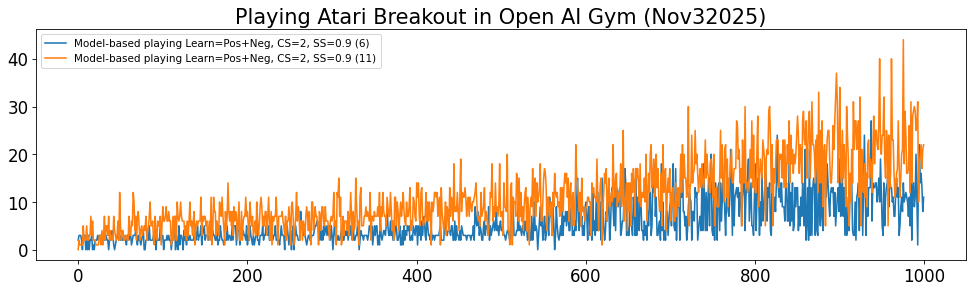

In [11]:
# Mac 0.99: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251115 -cs=2
score_avg=23.5; steps_avg=3143.2; lives_avg=0.1; lapse_avg="0:01:56.053810"; time="14:56:26.157550"
scores099 = [2.0, 2.0, 0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 10.0, 3.0, 4.0, 3.0, 4.0, 2.0, 2.0, 2.0, 7.0, 4.0, 2.0, 2.0, 3.0, 7.0, 2.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 5.0, 3.0, 5.0, 4.0, 4.0, 2.0, 5.0, 5.0, 9.0, 5.0, 9.0, 3.0, 5.0, 6.0, 10.0, 9.0, 4.0, 5.0, 5.0, 4.0, 5.0, 4.0, 8.0, 8.0, 6.0, 5.0, 9.0, 8.0, 17.0, 4.0, 2.0, 6.0, 11.0, 9.0, 3.0, 6.0, 9.0, 7.0, 8.0, 2.0, 5.0, 4.0, 7.0, 5.0, 8.0, 6.0, 6.0, 7.0, 11.0, 26.0, 8.0, 6.0, 4.0, 5.0, 6.0, 4.0, 8.0, 7.0, 16.0, 8.0, 10.0, 6.0, 8.0, 6.0, 8.0, 13.0, 7.0, 6.0, 4.0, 9.0, 4.0, 3.0, 4.0, 8.0, 6.0, 6.0, 4.0, 12.0, 6.0, 7.0, 4.0, 4.0, 8.0, 8.0, 6.0, 13.0, 6.0, 3.0, 6.0, 6.0, 12.0, 4.0, 4.0, 7.0, 4.0, 8.0, 7.0, 6.0, 5.0, 6.0, 10.0, 8.0, 6.0, 2.0, 6.0, 9.0, 9.0, 9.0, 6.0, 6.0, 5.0, 6.0, 8.0, 6.0, 7.0, 6.0, 15.0, 6.0, 5.0, 4.0, 6.0, 6.0, 10.0, 5.0, 9.0, 5.0, 6.0, 2.0, 9.0, 8.0, 8.0, 6.0, 10.0, 4.0, 6.0, 10.0, 4.0, 11.0, 4.0, 14.0, 12.0, 10.0, 7.0, 12.0, 6.0, 6.0, 6.0, 5.0, 10.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 23.0, 6.0, 10.0, 10.0, 24.0, 15.0, 6.0, 8.0, 10.0, 9.0, 4.0, 6.0, 7.0, 5.0, 13.0, 4.0, 6.0, 11.0, 3.0, 6.0, 6.0, 16.0, 10.0, 9.0, 9.0, 8.0, 4.0, 6.0, 6.0, 22.0, 7.0, 6.0, 14.0, 7.0, 19.0, 14.0, 17.0, 14.0, 9.0, 15.0, 10.0, 8.0, 12.0, 14.0, 21.0, 17.0, 6.0, 7.0, 12.0, 6.0, 12.0, 7.0, 9.0, 7.0, 34.0, 9.0, 8.0, 29.0, 29.0, 15.0, 6.0, 9.0, 9.0, 10.0, 1.0, 5.0, 23.0, 23.0, 9.0, 20.0, 18.0, 13.0, 9.0, 17.0, 7.0, 21.0, 22.0, 5.0, 10.0, 5.0, 13.0, 23.0, 14.0, 18.0, 13.0, 15.0, 16.0, 18.0, 7.0, 8.0, 20.0, 14.0, 7.0, 9.0, 6.0, 13.0, 7.0, 6.0, 19.0, 8.0, 9.0, 21.0, 12.0, 12.0, 7.0, 36.0, 11.0, 12.0, 18.0, 7.0, 13.0, 20.0, 15.0, 21.0, 11.0, 8.0, 8.0, 6.0, 21.0, 28.0, 10.0, 24.0, 13.0, 26.0, 16.0, 7.0, 23.0, 4.0, 17.0, 32.0, 16.0, 12.0, 16.0, 9.0, 7.0, 23.0, 9.0, 31.0, 16.0, 17.0, 18.0, 23.0, 20.0, 24.0, 28.0, 21.0, 15.0, 12.0, 11.0, 4.0, 9.0, 23.0, 16.0, 15.0, 22.0, 17.0, 17.0, 24.0, 14.0, 30.0, 24.0, 23.0, 25.0, 14.0, 9.0, 19.0, 7.0, 6.0, 12.0, 13.0, 20.0, 6.0, 16.0, 13.0, 13.0, 25.0, 4.0, 8.0, 15.0, 23.0, 18.0, 26.0, 23.0, 26.0, 10.0, 30.0, 16.0, 17.0, 16.0, 20.0, 19.0, 25.0, 19.0, 24.0, 28.0, 17.0, 20.0, 18.0, 23.0, 16.0, 21.0, 26.0, 29.0, 19.0, 22.0, 16.0, 20.0, 19.0, 41.0, 29.0, 24.0, 25.0, 24.0, 27.0, 20.0, 17.0, 22.0, 20.0, 31.0, 17.0, 27.0, 20.0, 33.0, 21.0, 20.0, 17.0, 20.0, 14.0, 26.0, 31.0, 26.0, 17.0, 21.0, 25.0, 36.0, 14.0, 31.0, 35.0, 23.0, 25.0, 42.0, 28.0, 12.0, 25.0, 29.0, 27.0, 33.0, 30.0, 33.0, 36.0, 35.0, 20.0, 20.0, 39.0, 22.0, 15.0, 25.0, 29.0, 26.0, 25.0, 16.0, 19.0, 34.0, 28.0, 32.0, 36.0, 24.0, 28.0, 25.0, 27.0, 25.0, 34.0, 17.0, 27.0, 38.0, 21.0, 42.0, 29.0, 24.0, 28.0, 27.0, 27.0, 22.0, 40.0, 32.0, 22.0, 31.0, 23.0, 24.0, 28.0, 28.0, 26.0, 26.0, 40.0, 30.0, 33.0, 30.0, 31.0, 22.0, 25.0, 33.0, 32.0, 33.0, 22.0, 27.0, 28.0, 23.0, 30.0, 26.0, 24.0, 25.0, 34.0, 33.0, 30.0, 38.0, 25.0, 27.0, 28.0, 14.0, 32.0, 33.0, 29.0, 18.0, 34.0, 43.0, 43.0, 26.0, 20.0, 34.0, 18.0, 33.0, 29.0, 24.0, 32.0, 33.0, 33.0, 36.0, 24.0, 29.0, 36.0, 24.0, 36.0, 17.0, 30.0, 23.0, 29.0, 38.0, 28.0, 26.0, 34.0, 27.0, 31.0, 24.0, 27.0, 30.0, 37.0, 22.0, 33.0, 34.0, 30.0, 35.0, 38.0, 31.0, 23.0, 25.0, 35.0, 40.0, 28.0, 28.0, 26.0, 32.0, 38.0, 34.0, 25.0, 30.0, 31.0, 39.0, 34.0, 25.0, 25.0, 22.0, 24.0, 26.0, 20.0, 26.0, 31.0, 20.0, 23.0, 29.0, 34.0, 20.0, 29.0, 18.0, 37.0, 27.0, 24.0, 35.0, 30.0, 25.0, 23.0, 32.0, 21.0, 27.0, 19.0, 36.0, 17.0, 35.0, 40.0, 17.0, 42.0, 28.0, 29.0, 25.0, 31.0, 30.0, 27.0, 33.0, 26.0, 32.0, 42.0, 29.0, 37.0, 29.0, 14.0, 34.0, 29.0, 21.0, 19.0, 21.0, 30.0, 23.0, 30.0, 35.0, 33.0, 37.0, 30.0, 27.0, 34.0, 32.0, 25.0, 29.0, 25.0, 21.0, 30.0, 39.0, 35.0, 31.0, 44.0, 33.0, 44.0, 17.0, 48.0, 30.0, 33.0, 39.0, 26.0, 20.0, 36.0, 29.0, 36.0, 48.0, 39.0, 36.0, 38.0, 28.0, 39.0, 36.0, 33.0, 39.0, 32.0, 32.0, 38.0, 30.0, 47.0, 39.0, 27.0, 29.0, 42.0, 26.0, 23.0, 30.0, 35.0, 30.0, 30.0, 45.0, 42.0, 31.0, 35.0, 27.0, 21.0, 37.0, 28.0, 29.0, 25.0, 46.0, 56.0, 26.0, 40.0, 25.0, 39.0, 45.0, 32.0, 42.0, 36.0, 41.0, 22.0, 25.0, 30.0, 31.0, 13.0, 43.0, 48.0, 38.0, 33.0, 26.0, 26.0, 49.0, 27.0, 33.0, 27.0, 53.0, 31.0, 23.0, 44.0, 17.0, 29.0, 44.0, 43.0, 50.0, 31.0, 45.0, 40.0, 27.0, 28.0, 44.0, 29.0, 28.0, 37.0, 25.0, 28.0, 45.0, 29.0, 43.0, 27.0, 30.0, 32.0, 42.0, 52.0, 40.0, 39.0, 33.0, 50.0, 37.0, 26.0, 48.0, 32.0, 28.0, 27.0, 32.0, 27.0, 36.0, 41.0, 29.0, 29.0, 29.0, 49.0, 32.0, 27.0, 32.0, 32.0, 40.0, 26.0, 48.0, 39.0, 36.0, 35.0, 49.0, 26.0, 20.0, 31.0, 51.0, 42.0, 45.0, 33.0, 37.0, 33.0, 46.0, 36.0, 25.0, 12.0, 33.0, 32.0, 48.0, 30.0, 30.0, 32.0, 40.0, 30.0, 28.0, 28.0, 36.0, 44.0, 30.0, 33.0, 41.0, 40.0, 14.0, 26.0, 28.0, 22.0, 24.0, 33.0, 37.0, 28.0, 24.0, 31.0, 27.0, 28.0, 30.0, 33.0, 43.0, 41.0, 36.0, 34.0, 40.0, 38.0, 33.0, 33.0, 36.0, 27.0, 33.0, 40.0, 33.0, 48.0, 40.0, 19.0, 19.0, 38.0, 37.0, 30.0, 26.0, 39.0, 46.0, 51.0, 29.0, 12.0, 27.0, 28.0, 12.0, 33.0, 27.0, 41.0, 33.0, 38.0, 40.0, 41.0, 35.0, 41.0, 37.0, 22.0, 30.0, 47.0, 30.0, 30.0, 43.0, 42.0, 29.0, 42.0, 32.0, 35.0, 30.0, 39.0, 21.0, 30.0, 33.0, 43.0, 34.0, 33.0, 34.0, 47.0, 26.0, 36.0, 35.0, 32.0, 21.0, 30.0, 32.0, 32.0, 45.0, 31.0, 37.0, 29.0, 12.0, 27.0, 36.0, 39.0, 38.0, 39.0, 34.0, 37.0, 25.0, 28.0, 35.0, 40.0, 28.0, 40.0, 29.0, 44.0, 39.0, 37.0, 12.0, 39.0, 40.0, 27.0, 41.0, 32.0, 30.0, 32.0, 44.0, 44.0, 31.0, 29.0, 44.0, 34.0, 34.0, 37.0, 44.0, 48.0, 42.0, 31.0, 33.0, 54.0, 30.0, 40.0, 38.0, 44.0, 33.0, 34.0, 38.0, 46.0, 49.0, 35.0, 42.0, 29.0, 29.0, 38.0, 44.0, 28.0, 34.0, 45.0, 24.0, 30.0, 58.0, 37.0, 34.0, 31.0, 20.0, 36.0, 30.0, 42.0, 45.0, 30.0, 23.0, 45.0, 39.0, 38.0, 34.0, 37.0, 23.0, 39.0, 44.0, 40.0, 30.0, 36.0, 39.0, 33.0, 25.0, 41.0, 38.0, 31.0, 64.0, 38.0, 35.0, 34.0, 32.0, 39.0, 21.0, 40.0, 39.0, 30.0, 38.0, 39.0, 40.0, 45.0, 34.0, 26.0, 22.0, 38.0, 44.0, 33.0, 40.0, 40.0, 41.0, 37.0, 41.0, 52.0, 34.0, 31.0, 34.0, 36.0, 39.0]
stepss099 = [791, 871, 501, 624, 612, 675, 928, 676, 696, 1663, 988, 1028, 906, 1123, 794, 796, 796, 1592, 1105, 796, 794, 920, 1647, 799, 998, 1119, 1166, 791, 978, 912, 988, 911, 1772, 984, 1229, 992, 1241, 1178, 1191, 791, 1306, 1300, 1895, 1223, 1970, 980, 1310, 1409, 2003, 1932, 1177, 1301, 1378, 1182, 1304, 1179, 1671, 1683, 1338, 1293, 1790, 1668, 2492, 1119, 795, 1421, 2264, 1879, 916, 1335, 1899, 1541, 1666, 795, 1217, 1114, 1634, 1219, 1667, 1498, 1429, 1689, 1890, 2652, 1694, 1338, 1101, 1294, 1338, 1097, 1834, 1485, 2393, 1792, 2029, 1357, 1792, 1454, 1832, 1958, 1553, 1336, 1100, 1995, 1097, 981, 1097, 1757, 1335, 1405, 1097, 2008, 1353, 1665, 1184, 1193, 1599, 1599, 1339, 1955, 1339, 18000, 1428, 1460, 2063, 1101, 1190, 1484, 1104, 1759, 1629, 1510, 1284, 1335, 1583, 1684, 1343, 18000, 1512, 1856, 1804, 1894, 1416, 1335, 1285, 1520, 1780, 1338, 1486, 1495, 2350, 1335, 1236, 1097, 1335, 1335, 2001, 1285, 1797, 1394, 1335, 797, 2020, 1661, 1668, 1336, 1932, 1097, 1335, 2144, 1070, 2198, 1097, 2146, 1800, 1913, 1538, 2404, 1428, 1439, 1335, 1305, 1958, 1336, 1613, 1335, 1335, 1361, 1463, 2237, 1339, 1878, 1516, 2561, 2284, 1335, 1691, 1818, 1836, 1118, 1461, 1654, 1398, 1973, 1100, 1336, 2045, 993, 1339, 1335, 1956, 1919, 1901, 1727, 1673, 1100, 1336, 1339, 2876, 1538, 1336, 2675, 1484, 2860, 2584, 2655, 1855, 1882, 2282, 1638, 1670, 2317, 2137, 2742, 2570, 1336, 1491, 2176, 1339, 1769, 1405, 1816, 1490, 3293, 1431, 1776, 3413, 3549, 2672, 1336, 1431, 1970, 1946, 683, 1171, 3226, 3109, 1820, 2512, 2215, 1957, 1431, 2614, 1405, 2139, 2524, 1388, 1919, 1370, 1966, 3300, 2184, 2712, 2024, 2209, 2502, 2716, 1578, 1664, 2530, 2036, 1540, 1881, 1336, 2113, 1487, 1473, 2941, 1625, 1431, 2737, 2255, 2278, 1606, 3450, 2295, 2024, 2615, 1490, 2530, 2925, 2220, 2780, 2084, 1673, 1707, 1336, 2780, 3252, 2039, 2711, 2196, 2872, 2416, 1412, 2249, 1127, 2609, 2807, 2471, 2021, 1763, 1917, 1485, 3556, 1439, 3260, 1904, 2574, 2822, 2444, 3077, 3356, 2863, 3124, 2400, 2324, 2148, 1097, 1917, 3107, 2416, 2215, 3425, 2618, 2613, 2520, 2673, 3413, 3050, 2876, 2916, 2160, 1865, 2820, 1472, 1411, 1922, 1883, 2963, 1336, 2624, 1885, 1970, 2850, 1097, 1729, 1639, 2514, 2418, 3128, 2254, 2891, 1997, 2891, 2482, 2430, 2369, 2565, 2564, 3124, 2880, 2795, 3142, 2677, 3040, 2961, 2913, 2401, 18000, 3058, 3409, 2424, 2898, 2488, 3287, 2950, 2675, 3122, 3174, 3484, 3300, 3613, 2581, 2612, 2991, 2601, 3288, 2637, 3006, 2616, 3574, 2786, 3078, 2608, 2984, 2153, 3164, 3726, 3388, 2613, 2980, 2869, 3701, 2173, 3599, 3929, 18000, 3131, 4532, 3374, 1771, 3340, 3316, 3070, 3679, 3317, 3706, 3554, 3069, 3078, 2630, 3905, 2857, 18000, 3018, 3422, 3090, 3172, 2354, 2886, 3053, 3326, 3336, 3433, 3072, 3380, 3380, 2959, 3306, 3640, 2600, 3571, 3800, 3007, 2884, 3475, 2809, 2923, 3116, 3197, 2947, 4037, 3184, 2840, 3731, 2965, 2807, 3799, 3217, 3348, 3340, 4045, 3116, 2872, 3616, 3292, 18000, 3280, 3098, 3540, 3107, 18000, 3192, 3217, 2631, 3460, 3369, 3052, 3292, 3083, 3201, 3486, 3884, 3122, 3160, 3252, 2153, 3189, 3696, 3388, 2314, 3520, 3355, 3834, 3680, 3078, 3793, 2764, 3882, 3222, 3038, 3898, 4042, 3148, 3993, 3362, 3497, 3593, 3544, 4127, 2114, 3165, 3385, 3412, 3001, 3330, 3236, 3797, 3642, 2452, 2932, 3092, 3130, 3225, 3326, 4098, 3516, 4067, 3938, 3937, 3364, 2800, 2808, 4069, 4089, 3370, 3370, 3364, 3463, 3265, 3595, 2990, 3596, 3114, 3583, 3649, 3762, 2969, 3284, 3229, 3522, 2512, 3697, 3284, 3154, 18000, 3020, 3426, 3013, 3532, 2696, 3660, 2614, 3104, 3198, 3126, 3372, 2481, 3339, 2977, 3735, 2817, 3447, 2479, 3320, 3684, 2591, 4648, 3273, 3737, 18000, 3917, 3572, 3485, 4066, 3442, 3291, 3841, 3319, 4262, 3446, 2094, 3873, 3442, 2687, 2974, 3207, 3109, 3665, 4021, 3850, 3647, 4262, 3135, 3086, 3768, 3820, 3333, 3218, 3786, 2730, 3455, 3793, 3280, 3686, 4211, 3690, 4211, 2524, 3776, 3337, 3756, 3702, 3276, 2962, 4071, 3218, 4071, 4416, 4160, 4071, 4034, 3608, 4176, 3253, 3179, 4113, 3858, 3442, 3281, 3825, 3765, 3738, 3072, 3138, 4138, 3106, 18000, 3303, 3270, 3331, 3537, 4430, 3922, 3894, 3540, 3683, 3274, 4112, 2797, 3981, 3281, 3884, 4017, 3040, 3998, 3484, 4047, 4334, 3701, 3894, 4071, 4429, 3364, 2824, 3504, 3813, 1964, 4519, 3776, 3757, 3660, 3042, 3682, 3870, 3072, 3534, 3072, 4420, 2698, 2876, 4138, 2684, 3986, 4211, 3898, 4612, 3232, 4272, 3883, 3072, 3741, 3930, 3767, 2903, 3232, 3014, 3981, 4334, 3592, 4522, 2918, 3716, 3590, 4170, 3806, 3998, 3955, 3534, 4360, 3596, 3662, 4371, 3550, 3264, 3072, 3346, 3072, 3743, 4122, 3669, 3257, 3486, 3999, 3278, 3072, 3922, 3742, 3834, 3192, 3808, 4400, 3746, 3804, 4260, 3396, 2791, 4207, 4695, 4162, 4334, 3416, 3539, 3534, 3818, 3743, 3264, 18000, 3119, 3683, 4310, 3262, 3607, 3394, 4022, 3596, 3499, 3577, 3746, 4311, 3631, 3711, 4013, 4227, 2080, 3815, 3566, 2795, 2700, 3942, 3675, 3479, 2819, 3651, 3474, 3589, 3603, 3418, 4186, 3938, 3551, 3669, 4243, 4096, 3534, 3742, 3743, 18000, 3678, 3972, 3534, 4033, 4476, 2496, 18000, 4070, 3788, 3196, 3344, 3671, 5132, 4158, 3651, 18000, 18000, 3589, 18000, 3438, 3072, 4169, 3534, 4325, 3499, 3794, 3281, 3923, 3997, 2988, 3441, 4262, 3276, 4126, 3569, 4485, 3426, 4008, 3738, 4312, 3161, 4041, 2912, 3977, 3730, 4381, 3688, 3536, 3682, 4560, 3192, 4419, 3484, 3347, 2796, 3623, 4031, 3390, 3692, 3793, 3714, 3126, 18000, 3026, 3959, 4192, 3698, 3992, 3722, 3714, 3283, 3450, 3742, 3998, 3348, 3871, 3731, 4785, 4117, 3678, 18000, 3955, 4049, 3044, 3913, 3381, 3437, 4214, 4282, 4084, 2911, 3760, 4367, 4072, 3805, 3889, 4215, 3720, 3983, 3283, 3570, 4636, 3699, 3998, 3962, 4076, 3269, 3665, 3801, 4554, 4938, 4278, 4017, 3366, 2982, 3868, 3647, 3640, 3763, 4342, 3158, 3442, 3741, 3826, 3714, 3137, 18000, 3519, 3033, 3789, 3807, 3590, 2888, 4878, 4197, 3870, 4196, 3661, 2480, 3930, 4271, 3885, 3587, 3931, 4031, 3597, 3236, 4329, 3846, 3785, 4984, 4205, 3954, 3708, 3459, 4237, 3141, 4610, 3863, 3625, 4138, 3788, 4041, 4947, 3303, 3696, 2989, 3890, 4084, 4058, 3931, 4636, 4239, 4120, 4301, 4651, 3674, 3104, 3722, 4137, 3938]
livess099 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099 = [1, 2, 1, 2, 2, 3, 4, 5, 5, 12, 5, 7, 6, 12, 6, 5, 8, 17, 10, 6, 5, 8, 14, 8, 11, 7, 9, 8, 14, 6, 14, 11, 18, 14, 29, 12, 19, 26, 20, 14, 25, 18, 46, 27, 32, 10, 20, 24, 40, 29, 16, 20, 34, 19, 15, 41, 26, 41, 21, 38, 49, 31, 51, 26, 26, 42, 47, 28, 23, 13, 53, 30, 20, 31, 25, 27, 18, 14, 14, 41, 34, 29, 34, 70, 30, 24, 14, 37, 14, 20, 45, 17, 62, 40, 24, 22, 27, 23, 30, 56, 34, 13, 12, 52, 15, 26, 16, 33, 12, 19, 20, 50, 19, 72, 39, 60, 23, 28, 17, 41, 19, 24, 31, 36, 61, 13, 46, 27, 19, 33, 46, 51, 34, 12, 33, 36, 18, 12, 27, 38, 25, 48, 57, 17, 15, 46, 44, 23, 34, 31, 45, 16, 38, 13, 8, 15, 56, 21, 37, 25, 15, 43, 53, 27, 28, 12, 66, 16, 12, 57, 41, 77, 14, 36, 49, 80, 19, 39, 34, 45, 12, 46, 64, 15, 40, 37, 19, 27, 40, 116, 18, 71, 55, 35, 77, 11, 56, 37, 24, 26, 33, 24, 35, 42, 19, 9, 46, 18, 12, 17, 44, 13, 37, 37, 50, 10, 6, 14, 122, 18, 17, 83, 20, 67, 37, 28, 26, 39, 44, 36, 35, 56, 31, 57, 58, 11, 26, 44, 8, 37, 46, 24, 43, 123, 20, 61, 64, 120, 67, 11, 17, 47, 42, 64, 41, 52, 99, 22, 44, 11, 46, 19, 73, 39, 40, 60, 23, 30, 49, 14, 86, 54, 105, 50, 14, 111, 24, 35, 36, 78, 78, 23, 24, 22, 25, 15, 63, 68, 23, 17, 54, 26, 21, 71, 132, 47, 34, 67, 32, 47, 40, 22, 26, 45, 17, 9, 23, 35, 31, 54, 18, 54, 63, 60, 40, 48, 41, 12, 25, 56, 46, 26, 12, 22, 45, 23, 125, 50, 45, 69, 13, 32, 47, 105, 77, 96, 87, 41, 17, 16, 70, 25, 27, 83, 135, 80, 39, 107, 79, 98, 51, 60, 75, 62, 66, 32, 20, 29, 52, 120, 9, 69, 39, 48, 98, 21, 64, 37, 47, 95, 54, 113, 53, 7, 93, 65, 40, 78, 15, 104, 75, 70, 79, 63, 52, 64, 132, 77, 42, 122, 75, 32, 85, 80, 31, 117, 64, 122, 94, 180, 52, 53, 157, 94, 92, 39, 143, 107, 64, 99, 78, 223, 87, 51, 101, 73, 11, 68, 96, 57, 87, 64, 102, 90, 60, 96, 93, 62, 46, 197, 57, 39, 54, 40, 61, 176, 71, 102, 86, 28, 49, 72, 51, 109, 80, 29, 142, 57, 77, 92, 25, 68, 67, 28, 58, 25, 45, 85, 99, 99, 84, 62, 51, 98, 78, 78, 27, 43, 35, 89, 29, 85, 24, 52, 20, 141, 121, 51, 64, 35, 65, 36, 41, 66, 48, 52, 69, 42, 79, 36, 75, 71, 43, 28, 62, 43, 61, 43, 72, 66, 53, 44, 67, 142, 51, 23, 118, 41, 56, 45, 19, 56, 108, 110, 105, 90, 26, 79, 35, 43, 65, 97, 54, 46, 51, 101, 56, 41, 79, 44, 118, 63, 27, 247, 53, 64, 50, 56, 65, 100, 10, 22, 38, 47, 90, 53, 56, 134, 52, 60, 30, 44, 66, 26, 75, 103, 23, 44, 43, 40, 35, 119, 61, 59, 85, 27, 85, 61, 65, 46, 38, 17, 50, 28, 57, 14, 22, 67, 74, 40, 62, 11, 99, 49, 30, 69, 65, 104, 102, 53, 10, 60, 41, 16, 44, 64, 53, 37, 89, 46, 73, 35, 32, 95, 54, 113, 34, 60, 117, 48, 65, 54, 45, 32, 55, 26, 18, 47, 84, 63, 90, 43, 117, 50, 70, 76, 74, 81, 84, 66, 35, 47, 60, 78, 16, 87, 62, 70, 31, 44, 42, 60, 82, 103, 30, 37, 33, 37, 39, 106, 46, 21, 42, 49, 70, 36, 40, 63, 96, 58, 53, 44, 49, 23, 24, 66, 91, 39, 38, 77, 51, 119, 73, 185, 67, 34, 26, 40, 59, 86, 48, 64, 101, 44, 55, 49, 38, 58, 122, 40, 71, 58, 28, 149, 57, 18, 85, 95, 35, 38, 38, 74, 45, 88, 38, 78, 26, 32, 12, 35, 32, 20, 56, 27, 110, 20, 26, 73, 75, 93, 67, 27, 176, 99, 124, 32, 87, 46, 20, 38, 85, 67, 32, 16, 83, 104, 68, 72, 65, 5, 54, 33, 38, 172, 14, 17, 24, 83, 13, 23, 15, 74, 135, 35, 103, 34, 21, 80, 44, 70, 37, 48, 133, 42, 66, 93, 63, 36, 248, 148, 117, 53, 60, 93, 20, 30, 37, 78, 28, 30, 65, 65, 86, 99, 72, 49, 112, 24, 77, 89, 46, 106, 98, 77, 154, 17, 130, 55, 75, 72, 140, 97, 48, 94, 25, 71, 53, 53, 151, 31, 130, 43, 57, 152, 139, 17, 77, 42, 63, 43, 15, 17, 78, 95, 49, 36, 79, 50, 36, 22, 101, 229, 17, 61, 12, 42, 13, 8, 45, 30, 47, 45, 91, 39, 44, 25, 59, 49, 22, 19, 109, 46, 137, 66, 166, 54, 10, 19, 73, 69, 37, 43, 25, 99, 96, 53, 14, 27, 129, 34, 90, 48, 42, 23, 89, 64, 32, 16, 44, 40, 19, 23, 33, 35, 76, 98, 75, 72, 75, 32, 66, 103, 29, 153, 61, 152, 82, 22, 45, 25, 89, 85, 27, 23, 78, 39, 47, 134, 30, 36, 62, 44, 41, 44, 98, 82, 45, 70, 33, 58, 94, 128, 79, 65, 55, 23, 56, 111, 116, 97, 159, 75, 60, 22, 47, 68, 54, 50, 111, 44, 33, 49, 101, 53, 79, 38, 18, 10, 37, 62, 45, 53, 84, 63, 26, 134, 35, 61, 62, 48, 83, 56, 97, 76, 88, 69, 49, 37, 42, 171, 47, 39, 23, 49, 106, 102, 94, 51, 167, 33, 38, 43, 47, 52, 101, 31, 68, 26, 57, 99, 104, 36, 85, 69, 32, 47, 53, 99, 39, 116]
states099 = [541, 1147, 1440, 1816, 2048, 2330, 2639, 2972, 3225, 3883, 4107, 4290, 4408, 4622, 4750, 4857, 5013, 5220, 5394, 5449, 5500, 5568, 5704, 5785, 5901, 5944, 5979, 6033, 6173, 6220, 6357, 6435, 6571, 6627, 6879, 6959, 7117, 7289, 7435, 7493, 7677, 7772, 7982, 8157, 8225, 8305, 8373, 8515, 8705, 8892, 8912, 9034, 9127, 9160, 9246, 9386, 9514, 9638, 9697, 9807, 9970, 10045, 10177, 10235, 10276, 10392, 10516, 10617, 10675, 10703, 10826, 10868, 10912, 10947, 11015, 11046, 11066, 11121, 11146, 11223, 11307, 11377, 11433, 11592, 11673, 11726, 11744, 11816, 11832, 11845, 11957, 12028, 12161, 12220, 12257, 12279, 12304, 12326, 12360, 12428, 12470, 12477, 12491, 12562, 12590, 12644, 12653, 12689, 12695, 12710, 12713, 12778, 12789, 12845, 12930, 12980, 12989, 13015, 13020, 13054, 13057, 13063, 13078, 13106, 13161, 13171, 13233, 13253, 13273, 13316, 13386, 13411, 13429, 13442, 13457, 13515, 13519, 13520, 13531, 13549, 13555, 13578, 13595, 13611, 13614, 13661, 13699, 13718, 13733, 13750, 13779, 13789, 13829, 13835, 13835, 13839, 13889, 13912, 13927, 13941, 13945, 13963, 14022, 14063, 14075, 14078, 14102, 14107, 14109, 14125, 14163, 14214, 14217, 14227, 14268, 14324, 14331, 14356, 14373, 14405, 14419, 14433, 14485, 14489, 14498, 14541, 14543, 14550, 14563, 14649, 14661, 14739, 14758, 14780, 14860, 14870, 14894, 14913, 14923, 14927, 14932, 14935, 14955, 14979, 14982, 14982, 15000, 15011, 15019, 15030, 15053, 15057, 15081, 15104, 15118, 15119, 15120, 15123, 15218, 15222, 15230, 15283, 15291, 15324, 15336, 15341, 15354, 15391, 15403, 15412, 15417, 15446, 15458, 15502, 15543, 15552, 15560, 15571, 15578, 15586, 15602, 15607, 15609, 15711, 15713, 15743, 15779, 15855, 15888, 15891, 15891, 15896, 15915, 15946, 15959, 15993, 16075, 16081, 16109, 16109, 16135, 16138, 16180, 16184, 16212, 16248, 16255, 16259, 16277, 16286, 16311, 16319, 16354, 16382, 16388, 16440, 16465, 16479, 16483, 16507, 16524, 16533, 16535, 16539, 16548, 16551, 16588, 16629, 16656, 16656, 16693, 16697, 16699, 16733, 16816, 16834, 16839, 16888, 16910, 16916, 16946, 16957, 16968, 16974, 16995, 16997, 17001, 17023, 17039, 17066, 17072, 17091, 17126, 17151, 17176, 17207, 17215, 17221, 17239, 17271, 17287, 17289, 17291, 17294, 17313, 17317, 17376, 17407, 17434, 17449, 17452, 17465, 17471, 17506, 17545, 17575, 17594, 17621, 17626, 17629, 17653, 17658, 17663, 17703, 17776, 17801, 17815, 17823, 17861, 17890, 17906, 17918, 17936, 17948, 17971, 17987, 17990, 17993, 18017, 18041, 18041, 18059, 18071, 18088, 18128, 18128, 18146, 18153, 18171, 18201, 18219, 18262, 18282, 18285, 18308, 18320, 18327, 18355, 18360, 18379, 18395, 18431, 18448, 18451, 18466, 18473, 18529, 18558, 18573, 18600, 18616, 18620, 18645, 18672, 18681, 18694, 18722, 18767, 18797, 18834, 18851, 18870, 18922, 18947, 18969, 18973, 19001, 19024, 19031, 19054, 19085, 19163, 19171, 19186, 19199, 19210, 19211, 19227, 19235, 19254, 19289, 19307, 19323, 19344, 19361, 19393, 19403, 19417, 19431, 19474, 19484, 19485, 19496, 19505, 19512, 19545, 19558, 19575, 19591, 19595, 19606, 19615, 19624, 19643, 19672, 19678, 19712, 19728, 19749, 19772, 19776, 19791, 19795, 19797, 19808, 19815, 19831, 19846, 19861, 19886, 19907, 19928, 19937, 19951, 19963, 19979, 19982, 19987, 19996, 20013, 20018, 20036, 20041, 20050, 20058, 20088, 20106, 20120, 20125, 20134, 20145, 20157, 20168, 20185, 20194, 20206, 20219, 20233, 20240, 20243, 20259, 20269, 20279, 20282, 20291, 20302, 20311, 20320, 20332, 20341, 20350, 20356, 20365, 20393, 20404, 20409, 20430, 20449, 20455, 20463, 20468, 20475, 20493, 20523, 20542, 20549, 20553, 20564, 20568, 20570, 20576, 20585, 20594, 20600, 20612, 20636, 20639, 20646, 20661, 20671, 20689, 20699, 20702, 20734, 20741, 20748, 20751, 20758, 20771, 20779, 20780, 20781, 20784, 20786, 20797, 20802, 20818, 20836, 20849, 20853, 20858, 20867, 20876, 20886, 20903, 20923, 20926, 20935, 20948, 20959, 20969, 20987, 20994, 21000, 21023, 21027, 21040, 21043, 21055, 21064, 21071, 21074, 21079, 21082, 21090, 21092, 21095, 21104, 21118, 21124, 21142, 21144, 21164, 21174, 21178, 21188, 21194, 21209, 21225, 21238, 21239, 21247, 21249, 21254, 21256, 21263, 21271, 21275, 21314, 21321, 21328, 21334, 21340, 21345, 21347, 21367, 21369, 21372, 21385, 21393, 21395, 21398, 21405, 21405, 21407, 21410, 21413, 21417, 21425, 21441, 21453, 21457, 21470, 21475, 21480, 21488, 21502, 21515, 21524, 21536, 21539, 21544, 21556, 21567, 21567, 21588, 21599, 21605, 21613, 21620, 21620, 21627, 21641, 21661, 21668, 21673, 21680, 21685, 21692, 21706, 21716, 21718, 21721, 21727, 21735, 21741, 21746, 21754, 21761, 21764, 21770, 21772, 21776, 21778, 21781, 21786, 21791, 21802, 21805, 21813, 21822, 21836, 21845, 21864, 21869, 21874, 21874, 21877, 21881, 21890, 21891, 21900, 21915, 21918, 21925, 21931, 21939, 21949, 21965, 21967, 21980, 21987, 21990, 22005, 22012, 22012, 22018, 22031, 22035, 22037, 22038, 22044, 22051, 22061, 22067, 22073, 22075, 22077, 22077, 22078, 22081, 22082, 22084, 22087, 22095, 22097, 22098, 22103, 22106, 22112, 22119, 22122, 22143, 22150, 22171, 22174, 22182, 22189, 22192, 22194, 22199, 22204, 22205, 22206, 22215, 22229, 22237, 22240, 22242, 22250, 22253, 22253, 22257, 22266, 22268, 22269, 22269, 22274, 22276, 22277, 22278, 22283, 22295, 22296, 22299, 22303, 22303, 22311, 22314, 22321, 22324, 22328, 22336, 22338, 22341, 22346, 22351, 22353, 22367, 22379, 22380, 22381, 22385, 22387, 22387, 22387, 22388, 22393, 22395, 22395, 22400, 22403, 22410, 22413, 22417, 22418, 22424, 22425, 22428, 22429, 22430, 22434, 22442, 22444, 22458, 22458, 22468, 22475, 22488, 22492, 22498, 22498, 22501, 22506, 22509, 22512, 22515, 22517, 22530, 22536, 22542, 22545, 22545, 22555, 22567, 22567, 22567, 22571, 22577, 22578, 22578, 22579, 22586, 22589, 22592, 22592, 22597, 22600, 22600, 22606, 22610, 22638, 22639, 22643, 22644, 22647, 22647, 22647, 22653, 22655, 22656, 22657, 22660, 22663, 22666, 22669, 22675, 22676, 22678, 22679, 22684, 22687, 22700, 22708, 22729, 22741, 22743, 22745, 22753, 22757, 22764, 22774, 22776, 22787, 22798, 22799, 22801, 22805, 22816, 22818, 22823, 22829, 22833, 22833, 22838, 22846, 22851, 22852, 22855, 22858, 22858, 22861, 22868, 22869, 22871, 22884, 22895, 22903, 22908, 22911, 22918, 22922, 22925, 22944, 22945, 22958, 22962, 22965, 22968, 22970, 22974, 22984, 22984, 22988, 22990, 22992, 22996, 23000, 23005, 23010, 23012, 23013, 23017, 23019, 23026, 23031, 23032, 23036, 23038, 23041, 23045, 23057, 23060, 23062, 23066, 23066, 23070, 23077, 23082, 23092, 23102, 23104, 23106, 23107, 23109, 23111, 23114, 23119, 23122, 23123, 23124, 23126, 23130, 23132, 23136, 23138, 23138, 23138, 23141, 23145, 23147, 23155, 23161, 23165, 23167, 23176, 23182, 23185, 23188, 23192, 23195, 23196, 23207, 23216, 23226, 23228, 23230, 23232, 23235, 23246, 23249, 23251, 23252, 23253, 23257, 23261, 23265, 23267, 23279, 23284, 23289, 23291, 23294, 23296, 23303, 23307, 23309, 23311, 23319, 23323, 23334, 23337, 23342, 23345, 23345, 23346, 23349, 23350, 23353, 23360]

## Mac 0.99: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251116 -cs=2
score_avg=13.3; steps_avg=6878.5; lives_avg=0.7; lapse_avg="0:01:17.141417"; time="7:06:00.141334"
scores099a = [2.0, 0, 5.0, 2.0, 8.0, 3.0, 2.0, 3.0, 2.0, 5.0, 3.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 2.0, 3.0, 1.0, 7.0, 2.0, 4.0, 2.0, 2.0, 6.0, 5.0, 5.0, 1.0, 5.0, 2.0, 2.0, 6.0, 1.0, 5.0, 1.0, 6.0, 1.0, 3.0, 1.0, 1.0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 2.0, 6.0, 6.0, 1.0, 1.0, 3.0, 6.0, 3.0, 1.0, 1.0, 1.0, 3.0, 5.0, 1.0, 1.0, 6.0, 6.0, 4.0, 3.0, 3.0, 7.0, 2.0, 2.0, 1.0, 1.0, 3.0, 3.0, 14.0, 2.0, 1.0, 3.0, 2.0, 2.0, 3.0, 5.0, 1.0, 6.0, 1.0, 7.0, 1.0, 1.0, 5.0, 1.0, 6.0, 5.0, 2.0, 1.0, 2.0, 3.0, 1.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 6.0, 2.0, 3.0, 6.0, 3.0, 2.0, 3.0, 3.0, 7.0, 3.0, 5.0, 1.0, 4.0, 3.0, 7.0, 3.0, 1.0, 3.0, 5.0, 1.0, 8.0, 2.0, 2.0, 1.0, 2.0, 3.0, 4.0, 4.0, 7.0, 4.0, 3.0, 4.0, 1.0, 4.0, 1.0, 4.0, 4.0, 4.0, 3.0, 5.0, 3.0, 5.0, 4.0, 6.0, 5.0, 5.0, 6.0, 3.0, 7.0, 6.0, 7.0, 6.0, 1.0, 2.0, 6.0, 5.0, 9.0, 8.0, 7.0, 11.0, 10.0, 10.0, 7.0, 16.0, 8.0, 10.0, 11.0, 10.0, 11.0, 1.0, 9.0, 7.0, 11.0, 9.0, 3.0, 11.0, 1.0, 9.0, 11.0, 1.0, 1.0, 11.0, 12.0, 10.0, 10.0, 11.0, 12.0, 2.0, 1.0, 11.0, 11.0, 5.0, 1.0, 11.0, 12.0, 12.0, 12.0, 13.0, 12.0, 17.0, 1.0, 1.0, 3.0, 1.0, 12.0, 10.0, 1.0, 16.0, 11.0, 10.0, 10.0, 12.0, 11.0, 11.0, 5.0, 17.0, 13.0, 1.0, 11.0, 12.0, 1.0, 17.0, 11.0, 3.0, 12.0, 7.0, 16.0, 12.0, 10.0, 1.0, 1.0, 12.0, 13.0, 11.0, 18.0, 3.0, 10.0, 11.0, 1.0, 13.0, 12.0, 16.0, 13.0, 2.0, 6.0, 1.0, 16.0, 12.0, 13.0, 11.0, 11.0, 11.0, 12.0, 1.0, 5.0, 11.0, 13.0, 1.0, 11.0, 12.0, 1.0, 11.0, 17.0, 10.0, 10.0, 1.0, 1.0, 13.0, 12.0, 1.0, 18.0, 13.0, 20.0, 1.0, 13.0, 13.0, 21.0, 1.0, 18.0, 34.0, 20.0, 13.0, 19.0, 22.0, 13.0, 1.0, 1.0, 7.0, 19.0, 1.0, 10.0, 17.0, 10.0, 11.0, 3.0, 10.0, 20.0, 15.0, 11.0, 18.0, 1.0, 24.0, 13.0, 20.0, 3.0, 16.0, 12.0, 13.0, 3.0, 13.0, 10.0, 19.0, 19.0, 11.0, 15.0, 8.0, 28.0, 2.0, 12.0, 19.0, 5.0, 21.0, 14.0, 19.0, 23.0, 9.0, 1.0, 13.0, 25.0, 18.0, 8.0, 18.0, 16.0, 17.0, 1.0, 18.0, 10.0, 11.0, 1.0, 23.0, 6.0, 19.0, 13.0, 13.0, 17.0, 12.0, 13.0, 13.0, 12.0, 1.0, 11.0, 11.0, 23.0, 3.0, 18.0, 14.0, 27.0, 8.0, 26.0, 15.0, 24.0, 17.0, 14.0, 14.0, 17.0, 17.0, 17.0, 18.0, 26.0, 26.0, 19.0, 19.0, 23.0, 13.0, 21.0, 18.0, 6.0, 20.0, 26.0, 19.0, 19.0, 18.0, 18.0, 20.0, 17.0, 14.0, 10.0, 21.0, 4.0, 11.0, 18.0, 3.0, 21.0, 18.0, 8.0, 10.0, 19.0, 19.0, 13.0, 13.0, 11.0, 16.0, 8.0, 10.0, 1.0, 21.0, 17.0, 24.0, 19.0, 29.0, 7.0, 19.0, 4.0, 13.0, 3.0, 5.0, 29.0, 14.0, 19.0, 21.0, 18.0, 17.0, 28.0, 22.0, 23.0, 33.0, 18.0, 23.0, 14.0, 19.0, 18.0, 8.0, 17.0, 20.0, 20.0, 20.0, 19.0, 16.0, 17.0, 23.0, 27.0, 19.0, 2.0, 19.0, 13.0, 6.0, 24.0, 1.0, 13.0, 3.0, 1.0, 14.0, 22.0, 20.0, 14.0, 16.0, 9.0, 2.0, 17.0, 27.0, 18.0, 16.0, 1.0, 10.0, 16.0, 10.0, 17.0, 20.0, 19.0, 19.0, 17.0, 19.0, 19.0, 12.0, 1.0, 7.0, 18.0, 19.0, 18.0, 6.0, 19.0, 11.0, 17.0, 19.0, 19.0, 11.0, 14.0, 19.0, 2.0, 8.0, 10.0, 14.0, 18.0, 18.0, 20.0, 17.0, 1.0, 15.0, 19.0, 5.0, 17.0, 25.0, 21.0, 18.0, 14.0, 14.0, 31.0, 2.0, 13.0, 15.0, 21.0, 1.0, 20.0, 19.0, 19.0, 21.0, 11.0, 15.0, 16.0, 20.0, 6.0, 10.0, 8.0, 2.0, 19.0, 18.0, 3.0, 23.0, 31.0, 13.0, 1.0, 29.0, 1.0, 14.0, 7.0, 23.0, 21.0, 29.0, 22.0, 27.0, 18.0, 21.0, 19.0, 12.0, 30.0, 8.0, 18.0, 1.0, 14.0, 30.0, 18.0, 15.0, 9.0, 24.0, 13.0, 8.0, 16.0, 8.0, 12.0, 21.0, 12.0, 29.0, 9.0, 1.0, 20.0, 36.0, 32.0, 16.0, 29.0, 20.0, 8.0, 19.0, 19.0, 25.0, 18.0, 36.0, 15.0, 5.0, 19.0, 17.0, 6.0, 13.0, 36.0, 1.0, 21.0, 12.0, 1.0, 29.0, 1.0, 20.0, 14.0, 21.0, 14.0, 1.0, 5.0, 1.0, 21.0, 31.0, 33.0, 29.0, 14.0, 26.0, 5.0, 20.0, 14.0, 27.0, 23.0, 8.0, 11.0, 22.0, 15.0, 23.0, 30.0, 34.0, 8.0, 14.0, 19.0, 18.0, 19.0, 8.0, 11.0, 14.0, 20.0, 28.0, 5.0, 14.0, 1.0, 31.0, 13.0, 15.0, 16.0, 8.0, 19.0, 28.0, 26.0, 21.0, 16.0, 20.0, 12.0, 16.0, 1.0, 1.0, 23.0, 10.0, 19.0, 32.0, 13.0, 24.0, 19.0, 2.0, 18.0, 21.0, 20.0, 1.0, 12.0, 17.0, 2.0, 20.0, 13.0, 6.0, 20.0, 22.0, 1.0, 2.0, 21.0, 1.0, 1.0, 13.0, 23.0, 21.0, 3.0, 13.0, 21.0, 1.0, 18.0, 15.0, 11.0, 1.0, 26.0, 21.0, 18.0, 12.0, 5.0, 9.0, 2.0, 34.0, 11.0, 12.0, 20.0, 1.0, 14.0, 18.0, 14.0, 10.0, 9.0, 12.0, 9.0, 21.0, 25.0, 10.0, 26.0, 29.0, 27.0, 18.0, 22.0, 11.0, 26.0, 17.0, 35.0, 21.0, 17.0, 9.0, 2.0, 6.0, 21.0, 19.0, 34.0, 30.0, 18.0, 8.0, 12.0, 11.0, 17.0, 23.0, 1.0, 23.0, 26.0, 32.0, 31.0, 12.0, 1.0, 27.0, 19.0, 33.0, 32.0, 16.0, 21.0, 23.0, 2.0, 21.0, 19.0, 1.0, 18.0, 26.0, 14.0, 26.0, 15.0, 1.0, 19.0, 18.0, 2.0, 10.0, 5.0, 31.0, 12.0, 31.0, 20.0, 38.0, 14.0, 1.0, 26.0, 28.0, 20.0, 22.0, 7.0, 17.0, 31.0, 15.0, 28.0, 24.0, 27.0, 5.0, 26.0, 23.0, 16.0, 32.0, 8.0, 1.0, 16.0, 14.0, 33.0, 14.0, 32.0, 20.0, 20.0, 21.0, 32.0, 27.0, 21.0, 31.0, 23.0, 14.0, 30.0, 21.0, 3.0, 18.0, 20.0, 18.0, 21.0, 14.0, 23.0, 7.0, 36.0, 33.0, 3.0, 18.0, 1.0, 21.0, 18.0, 15.0, 16.0, 17.0, 1.0, 23.0, 17.0, 16.0, 8.0, 14.0, 8.0, 9.0, 21.0, 9.0, 16.0, 16.0, 5.0, 20.0, 1.0, 16.0, 33.0, 12.0, 16.0, 37.0, 15.0, 22.0, 22.0, 12.0, 34.0, 15.0, 23.0, 16.0, 19.0, 11.0, 1.0, 39.0, 1.0, 25.0, 16.0, 18.0, 22.0, 20.0, 21.0, 20.0, 9.0, 16.0, 22.0, 21.0, 1.0, 22.0, 15.0, 25.0, 25.0, 5.0, 19.0, 29.0, 26.0, 11.0, 23.0, 15.0, 16.0, 21.0, 26.0, 21.0, 13.0, 4.0, 14.0, 2.0, 7.0, 30.0, 23.0, 33.0, 17.0, 17.0, 2.0, 3.0, 11.0, 21.0, 33.0, 7.0, 8.0, 7.0, 22.0, 5.0, 17.0, 19.0, 20.0, 18.0, 14.0, 18.0, 26.0, 2.0, 17.0, 29.0, 8.0, 1.0, 32.0, 17.0, 29.0, 16.0, 15.0, 16.0, 18.0, 1.0, 25.0, 9.0, 14.0, 35.0, 21.0, 21.0, 21.0, 29.0, 21.0, 17.0, 16.0, 15.0, 17.0, 22.0, 29.0, 16.0, 15.0, 16.0, 16.0, 23.0, 17.0, 21.0, 37.0, 24.0, 14.0, 18.0, 6.0, 9.0, 22.0, 30.0, 33.0, 23.0, 18.0, 8.0, 20.0, 17.0, 21.0, 22.0, 22.0, 3.0, 2.0, 21.0, 27.0, 18.0, 31.0, 3.0, 23.0, 29.0, 16.0, 24.0, 27.0, 7.0, 23.0, 22.0, 14.0, 1.0, 37.0, 21.0, 2.0, 38.0, 1.0, 17.0, 29.0, 23.0, 9.0, 21.0, 17.0, 2.0, 21.0, 21.0, 7.0, 5.0, 33.0, 2.0, 21.0, 21.0, 14.0, 29.0, 18.0]
stepsss099a = [731, 497, 1276, 731, 1123, 843, 727, 843, 720, 1264, 842, 1368, 1367, 1374, 1258, 1371, 1372, 739, 842, 603, 1490, 731, 968, 723, 722, 1379, 1250, 1250, 607, 1250, 731, 787, 1366, 18000, 18000, 18000, 18000, 18000, 910, 603, 18000, 847, 839, 18000, 18000, 18000, 18000, 18000, 839, 719, 842, 723, 1372, 1372, 18000, 602, 839, 1370, 840, 606, 602, 18000, 18000, 18000, 603, 18000, 1364, 1364, 1030, 843, 840, 1555, 788, 18000, 600, 18000, 906, 846, 2353, 788, 18000, 18000, 724, 787, 18000, 1250, 18000, 1363, 615, 1490, 18000, 18000, 1250, 18000, 1431, 18000, 719, 18000, 786, 903, 18000, 978, 18000, 18000, 903, 975, 18000, 903, 1094, 1431, 18000, 903, 1431, 975, 18000, 18000, 982, 1554, 911, 1362, 18000, 1027, 975, 1630, 18000, 18000, 18000, 18000, 18000, 1766, 786, 18000, 18000, 787, 18000, 1174, 1030, 1638, 1183, 975, 1110, 18000, 1183, 606, 1110, 1186, 1179, 854, 1299, 18000, 1298, 1182, 1347, 1223, 18000, 1317, 835, 18000, 1387, 1491, 18000, 18000, 18000, 1387, 18000, 1711, 1590, 1487, 2110, 1829, 1971, 1396, 2346, 1514, 1906, 2003, 1826, 2075, 18000, 1703, 1487, 2075, 2038, 18000, 2078, 18000, 18000, 2075, 18000, 18000, 2075, 2123, 18000, 2046, 2078, 2276, 18000, 18000, 2075, 1999, 18000, 18000, 2006, 2119, 2276, 2194, 2395, 2123, 2619, 18000, 18000, 905, 18000, 2276, 1880, 18000, 2251, 2075, 1883, 18000, 2198, 18000, 1999, 18000, 2694, 2411, 18000, 2075, 2194, 18000, 2548, 2075, 843, 2195, 1555, 2258, 2195, 1879, 18000, 18000, 2276, 2326, 2003, 2896, 843, 18000, 18000, 18000, 2309, 2195, 18000, 2396, 18000, 1345, 18000, 2359, 2119, 2396, 18000, 18000, 18000, 2204, 18000, 1247, 2075, 2318, 18000, 18000, 2276, 18000, 2242, 2619, 18000, 18000, 18000, 18000, 2386, 2276, 18000, 2891, 2394, 2698, 18000, 2472, 2392, 18000, 18000, 2667, 3697, 2886, 2310, 2786, 3196, 2394, 18000, 18000, 1487, 18000, 18000, 18000, 2694, 1878, 2087, 18000, 18000, 2948, 2167, 18000, 2615, 18000, 3282, 2246, 2884, 18000, 2361, 2119, 2399, 843, 2394, 18000, 2830, 2760, 18000, 2644, 18000, 3409, 18000, 18000, 2758, 18000, 3069, 2588, 2766, 2974, 1875, 18000, 2400, 3371, 2611, 1099, 2667, 2487, 2559, 18000, 2669, 18000, 2083, 18000, 2970, 1279, 2794, 2242, 2400, 2487, 18000, 2242, 2394, 18000, 18000, 1107, 2002, 2919, 18000, 2795, 2447, 3189, 1773, 3094, 2651, 3279, 2483, 2524, 2443, 2483, 18000, 18000, 2628, 3097, 3008, 2737, 2796, 2919, 1829, 2827, 2624, 1493, 3134, 3008, 2790, 2794, 2615, 2631, 2917, 18000, 2402, 2226, 3053, 1107, 1998, 2631, 843, 3073, 2543, 1819, 18000, 2795, 2763, 2242, 2242, 18000, 2499, 1687, 18000, 18000, 3073, 2481, 3090, 18000, 3439, 1655, 18000, 967, 2410, 18000, 18000, 3445, 2524, 2666, 3073, 2743, 3196, 3252, 2838, 2887, 3571, 2544, 3282, 2062, 18000, 2547, 1710, 2622, 2885, 2882, 2882, 2762, 2745, 2723, 2970, 3495, 2795, 18000, 2762, 2246, 1334, 3425, 18000, 2246, 18000, 18000, 2524, 3277, 2885, 2446, 2250, 1779, 18000, 2543, 3186, 2674, 2742, 18000, 18000, 2291, 18000, 2483, 2853, 2762, 2762, 2723, 2748, 18000, 2130, 18000, 18000, 2627, 2797, 2546, 18000, 2762, 18000, 2483, 2766, 2666, 18000, 2501, 2661, 18000, 1638, 1942, 2459, 2615, 2629, 2917, 2730, 18000, 2578, 2766, 18000, 2619, 3298, 18000, 2926, 2510, 18000, 3887, 18000, 2326, 2632, 3186, 18000, 2882, 2766, 2747, 3070, 1998, 2530, 2643, 2882, 1342, 18000, 18000, 18000, 2737, 2764, 18000, 2797, 3833, 2395, 18000, 3496, 18000, 2524, 1792, 3158, 3322, 18000, 2838, 3250, 2543, 3187, 2943, 18000, 18000, 1095, 2761, 18000, 2446, 3561, 2643, 18000, 1901, 3425, 18000, 1099, 2916, 1099, 2274, 3185, 18000, 3402, 1751, 18000, 2903, 4102, 3893, 2691, 3439, 2934, 1095, 3011, 2795, 18000, 2891, 4173, 2635, 18000, 2666, 18000, 1402, 2387, 4164, 18000, 3274, 2119, 18000, 3859, 18000, 3004, 2574, 3124, 2679, 18000, 1250, 18000, 3129, 3715, 18000, 3858, 18000, 18000, 18000, 3004, 18000, 3454, 3377, 1775, 1619, 2799, 2640, 2970, 3674, 4397, 1095, 18000, 3007, 2626, 2870, 1099, 1111, 2510, 2829, 3855, 18000, 2516, 18000, 3552, 18000, 18000, 2699, 1099, 18000, 3706, 3369, 3182, 2790, 2938, 2122, 18000, 18000, 18000, 2965, 18000, 2871, 3947, 18000, 3116, 3023, 18000, 2798, 3189, 3001, 18000, 18000, 2825, 18000, 3206, 2287, 1355, 2934, 3122, 18000, 18000, 3231, 18000, 18000, 1771, 3345, 3123, 18000, 2246, 3073, 18000, 2723, 2171, 2033, 18000, 3350, 3185, 2611, 18000, 18000, 1563, 18000, 4211, 2034, 2035, 18000, 18000, 2507, 2688, 1893, 1986, 1634, 18000, 18000, 3185, 3441, 1755, 3647, 3925, 3528, 3035, 3126, 2026, 3314, 18000, 4090, 3230, 2488, 18000, 18000, 18000, 3124, 2795, 3626, 3418, 18000, 18000, 2148, 18000, 18000, 3373, 18000, 3373, 3830, 3494, 3539, 2090, 18000, 3513, 2943, 4079, 3538, 2287, 18000, 2888, 18000, 3230, 2594, 18000, 18000, 3371, 2769, 3370, 18000, 18000, 2646, 2615, 18000, 1831, 1310, 3794, 2211, 18000, 2823, 4155, 18000, 18000, 3370, 3654, 2791, 3204, 1626, 18000, 3585, 2174, 3585, 2919, 18000, 18000, 3413, 3373, 2698, 3955, 1842, 18000, 2251, 18000, 4079, 18000, 3795, 3034, 2791, 3123, 3874, 3463, 2915, 3555, 3373, 18000, 3431, 3230, 923, 18000, 3034, 18000, 2995, 18000, 3307, 18000, 4607, 4089, 18000, 2551, 18000, 3230, 2626, 18000, 2699, 2986, 18000, 3373, 2989, 2287, 1095, 18000, 1610, 18000, 3230, 1908, 2707, 2702, 18000, 3006, 18000, 2794, 4078, 2185, 18000, 4286, 18000, 3207, 3406, 2091, 4283, 2582, 3374, 2295, 3296, 2083, 18000, 4682, 18000, 3407, 2699, 2611, 3327, 3012, 18000, 18000, 1875, 2699, 3206, 3230, 18000, 3402, 18000, 3110, 3116, 18000, 3302, 3319, 3232, 2214, 3377, 18000, 2701, 3230, 3485, 3230, 1695, 1039, 18000, 18000, 1491, 18000, 3379, 3990, 2825, 2992, 18000, 18000, 1107, 3123, 4070, 18000, 1638, 1490, 18000, 18000, 2825, 3295, 2915, 2611, 18000, 3104, 3229, 18000, 2987, 3858, 1095, 18000, 3849, 18000, 3859, 2699, 2578, 2703, 2686, 18000, 3334, 1553, 18000, 4475, 3231, 3116, 3230, 3858, 3231, 2987, 2791, 2578, 2985, 2897, 3860, 2699, 2179, 2698, 2870, 3457, 2998, 3230, 4214, 3096, 18000, 2611, 18000, 1774, 3483, 3981, 4083, 3373, 3099, 1740, 18000, 3075, 3199, 3319, 3350, 18000, 18000, 3123, 3568, 3097, 3593, 18000, 3373, 3858, 2698, 3287, 3484, 18000, 3373, 3319, 18000, 18000, 4284, 3234, 18000, 4480, 18000, 2823, 3858, 3336, 1875, 3409, 2821, 18000, 3230, 3230, 975, 18000, 4079, 18000, 3195, 3026, 18000, 3859, 2595]
livesss099a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 4, 0, 0, 3, 0, 0, 4, 2, 3, 3, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 3, 0, 0, 0, 2, 3, 0, 3, 0, 3, 0, 4, 0, 0, 4, 0, 4, 3, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 1, 3, 1, 3, 4, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 4, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 4, 1, 0, 4, 4, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 3, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 1, 2, 2, 0, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 3, 4, 4, 0, 0, 4, 0, 0, 0, 4, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 1, 4, 3, 0, 0, 0, 1, 2, 0, 0, 2, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 3, 1, 0, 3, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 4, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 2, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 3, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 4, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 0, 3, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 4, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 0, 0, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0, 4, 0, 4, 0, 0, 1, 0, 1, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 4, 4, 0, 3, 0, 0, 1, 0, 0, 3, 0, 0, 0, 4, 2, 0, 3, 0, 0, 0, 0, 0, 4, 3, 0, 4, 3, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 1, 2, 0, 3, 2, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 4, 1, 0, 0, 0, 1, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 3, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 4, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 2, 0, 3, 0, 1, 0, 0, 2, 0, 4, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 1, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 4, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 2, 0, 0]
lapsess099a = [1, 1, 3, 2, 3, 3, 3, 2, 2, 10, 5, 5, 6, 4, 8, 6, 5, 8, 4, 6, 7, 8, 5, 5, 7, 10, 8, 5, 8, 9, 7, 11, 8, 15, 17, 14, 15, 12, 6, 9, 11, 8, 12, 12, 14, 13, 12, 11, 5, 7, 6, 8, 9, 13, 11, 13, 4, 10, 8, 7, 9, 19, 13, 17, 6, 11, 5, 4, 12, 11, 7, 8, 4, 15, 7, 7, 3, 5, 23, 10, 7, 11, 12, 9, 14, 17, 13, 7, 7, 6, 11, 11, 11, 11, 6, 1014, 3, 8, 3, 6, 8, 14, 8, 13, 11, 5, 16, 12, 7, 7, 12, 12, 7, 6, 8, 18, 15, 10, 12, 30, 9, 6, 6, 8, 15, 13, 13, 11, 10, 17, 8, 14, 17, 13, 22, 8, 13, 16, 12, 12, 15, 10, 18, 24, 8, 12, 5, 19, 12, 8, 11, 7, 23, 6, 16, 17, 18, 20, 8, 20, 13, 9, 10, 17, 10, 25, 17, 12, 14, 14, 11, 24, 21, 17, 11, 32, 17, 32, 10, 8, 9, 5, 19, 19, 10, 8, 17, 9, 11, 11, 5, 9, 20, 11, 10, 8, 23, 17, 2, 21, 13, 17, 12, 17, 9, 11, 21, 22, 26, 8, 8, 52, 9, 6, 17, 9, 18, 4, 23, 9, 12, 22, 20, 15, 16, 22, 9, 11, 11, 10, 11, 13, 12, 16, 31, 13, 9, 6, 13, 10, 6, 17, 10, 36, 19, 11, 16, 17, 43, 13, 26, 22, 17, 22, 10, 9, 25, 24, 17, 16, 13, 32, 11, 10, 7, 16, 9, 16, 32, 14, 30, 16, 20, 13, 12, 11, 25, 4, 8, 36, 25, 50, 9, 55, 9, 33, 9, 44, 61, 51, 25, 39, 43, 7, 9, 9, 15, 24, 13, 13, 34, 27, 15, 19, 12, 29, 15, 27, 24, 8, 39, 14, 17, 15, 20, 14, 33, 21, 5, 8, 45, 15, 18, 18, 29, 25, 10, 66, 30, 11, 35, 27, 30, 40, 44, 14, 17, 30, 30, 16, 23, 21, 7, 25, 9, 32, 25, 13, 45, 30, 39, 22, 8, 25, 37, 20, 20, 25, 10, 20, 32, 20, 15, 14, 25, 22, 9, 41, 7, 38, 10, 41, 12, 27, 25, 23, 39, 35, 32, 32, 15, 21, 35, 35, 23, 19, 26, 18, 43, 29, 13, 26, 21, 19, 41, 54, 24, 16, 30, 18, 12, 35, 39, 12, 34, 21, 52, 25, 31, 34, 32, 16, 20, 12, 29, 36, 24, 35, 31, 21, 24, 21, 18, 20, 10, 33, 23, 26, 35, 43, 65, 56, 37, 47, 45, 27, 29, 37, 23, 35, 47, 46, 47, 49, 28, 29, 35, 30, 37, 34, 38, 16, 29, 18, 46, 24, 16, 26, 33, 14, 52, 83, 51, 30, 29, 29, 21, 76, 26, 8, 24, 14, 13, 17, 34, 28, 16, 23, 42, 51, 19, 38, 34, 9, 14, 28, 45, 20, 26, 55, 16, 33, 28, 22, 9, 78, 59, 13, 36, 25, 39, 17, 28, 23, 7, 8, 45, 34, 13, 37, 42, 84, 10, 28, 25, 84, 13, 23, 32, 43, 8, 34, 13, 25, 23, 29, 35, 10, 17, 28, 8, 27, 11, 30, 6, 16, 31, 30, 56, 17, 26, 10, 15, 14, 57, 63, 88, 28, 45, 25, 111, 29, 16, 36, 13, 32, 10, 27, 22, 28, 42, 18, 10, 21, 23, 17, 24, 51, 37, 34, 35, 25, 13, 28, 52, 34, 30, 32, 17, 10, 40, 6, 50, 43, 76, 12, 11, 19, 36, 16, 18, 20, 15, 63, 10, 13, 34, 11, 74, 36, 29, 25, 12, 25, 8, 32, 20, 79, 15, 40, 33, 21, 53, 32, 68, 32, 22, 16, 12, 26, 28, 50, 27, 14, 8, 24, 22, 25, 10, 17, 18, 12, 53, 14, 32, 10, 42, 21, 25, 28, 21, 30, 67, 109, 30, 80, 15, 27, 43, 14, 15, 31, 13, 37, 49, 50, 58, 68, 11, 44, 11, 57, 9, 18, 7, 13, 33, 31, 17, 16, 27, 11, 8, 14, 11, 13, 26, 49, 39, 13, 36, 23, 9, 53, 30, 45, 16, 29, 29, 36, 30, 15, 17, 11, 113, 68, 25, 19, 12, 41, 88, 40, 54, 27, 23, 25, 6, 19, 23, 64, 85, 47, 44, 17, 15, 12, 32, 56, 15, 47, 14, 16, 13, 36, 41, 35, 34, 29, 12, 24, 21, 33, 21, 9, 15, 32, 34, 33, 42, 10, 24, 50, 65, 47, 22, 84, 39, 14, 13, 21, 9, 18, 25, 76, 28, 20, 18, 33, 17, 16, 32, 24, 53, 40, 62, 25, 32, 26, 22, 18, 84, 40, 30, 32, 27, 25, 78, 16, 24, 21, 22, 31, 25, 15, 52, 79, 16, 37, 26, 57, 23, 44, 33, 11, 39, 77, 24, 21, 53, 21, 24, 19, 24, 34, 10, 54, 14, 54, 12, 72, 12, 43, 21, 20, 53, 18, 11, 18, 41, 15, 37, 15, 23, 54, 28, 15, 17, 18, 29, 11, 57, 16, 18, 11, 26, 11, 27, 30, 45, 48, 15, 12, 11, 40, 20, 37, 16, 18, 25, 23, 29, 9, 68, 10, 5, 14, 11, 22, 52, 12, 26, 9, 18, 29, 18, 11, 20, 48, 58, 41, 9, 34, 22, 18, 77, 20, 9, 30, 21, 56, 17, 66, 23, 14, 25, 22, 48, 7, 40, 11, 62, 21, 32, 16, 33, 25, 20, 63, 30, 32, 54, 14, 14, 49, 22, 16, 29, 26, 7, 32, 10, 9, 8, 53, 17, 24, 26, 13, 14, 16, 9, 52, 34, 10, 18, 14, 25, 17, 23, 20, 18, 20, 7, 12, 7, 61, 16, 41, 21, 56, 118, 26, 29, 56, 55, 31, 14, 26, 32, 43, 37, 45, 20, 36, 32, 29, 59, 113, 17, 8, 28, 13, 53, 49, 29, 89, 11, 20, 22, 34, 42, 82, 17, 13, 12, 35, 12, 17, 24, 60, 104, 13, 23, 32, 24, 35, 41, 19, 12, 18, 16, 33, 11, 44, 13, 46, 23, 23, 22, 77]
statess099a = [470, 819, 1477, 1706, 1858, 1975, 2042, 2112, 2199, 2475, 2635, 2803, 2894, 2978, 3152, 3252, 3335, 3442, 3491, 3574, 3641, 3736, 3759, 3828, 3867, 3985, 4076, 4120, 4171, 4271, 4353, 4464, 4519, 4546, 4612, 4644, 4672, 4677, 4704, 4754, 4769, 4781, 4893, 4907, 4953, 4984, 4996, 4998, 5009, 5034, 5049, 5097, 5143, 5192, 5261, 5338, 5348, 5417, 5456, 5501, 5551, 5617, 5623, 5685, 5697, 5709, 5718, 5726, 5784, 5849, 5863, 5869, 5883, 5977, 5991, 5992, 6000, 6006, 6091, 6146, 6148, 6153, 6196, 6234, 6260, 6359, 6408, 6458, 6478, 6484, 6493, 6508, 6530, 6557, 6570, 6584, 6589, 6589, 6590, 6603, 6604, 6666, 6685, 6723, 6750, 6761, 6776, 6800, 6833, 6841, 6849, 6880, 6892, 6902, 6904, 6942, 6967, 6990, 7024, 7100, 7112, 7114, 7126, 7132, 7160, 7185, 7198, 7208, 7209, 7249, 7275, 7291, 7319, 7351, 7420, 7430, 7441, 7459, 7497, 7502, 7512, 7521, 7548, 7616, 7686, 7693, 7697, 7721, 7743, 7745, 7756, 7764, 7799, 7801, 7822, 7845, 7922, 7934, 7942, 8023, 8044, 8045, 8048, 8088, 8089, 8157, 8186, 8203, 8219, 8230, 8244, 8314, 8387, 8431, 8465, 8546, 8565, 8646, 8646, 8653, 8665, 8672, 8677, 8694, 8719, 8719, 8726, 8740, 8741, 8743, 8747, 8753, 8771, 8780, 8793, 8794, 8829, 8860, 8860, 8878, 8892, 8910, 8913, 8947, 8954, 8961, 9004, 9025, 9053, 9055, 9055, 9109, 9115, 9116, 9121, 9129, 9141, 9142, 9181, 9185, 9193, 9204, 9227, 9236, 9257, 9282, 9292, 9301, 9311, 9312, 9319, 9328, 9331, 9338, 9374, 9379, 9385, 9385, 9387, 9387, 9391, 9396, 9401, 9438, 9449, 9453, 9461, 9474, 9566, 9592, 9607, 9624, 9629, 9668, 9669, 9671, 9679, 9691, 9695, 9702, 9702, 9745, 9767, 9771, 9775, 9778, 9779, 9788, 9838, 9863, 9907, 9923, 9936, 9945, 9949, 9949, 10013, 10016, 10016, 10033, 10073, 10129, 10140, 10228, 10232, 10292, 10293, 10331, 10400, 10476, 10537, 10593, 10660, 10691, 10694, 10694, 10696, 10747, 10747, 10751, 10771, 10789, 10804, 10806, 10807, 10821, 10826, 10832, 10838, 10839, 10915, 10917, 10922, 10924, 10927, 10930, 10940, 10945, 10947, 10947, 10990, 11022, 11031, 11061, 11097, 11112, 11115, 11208, 11235, 11235, 11262, 11278, 11342, 11416, 11449, 11449, 11462, 11489, 11510, 11512, 11519, 11531, 11537, 11556, 11560, 11587, 11597, 11606, 11697, 11717, 11760, 11761, 11765, 11771, 11805, 11809, 11821, 11837, 11837, 11840, 11869, 11876, 11880, 11884, 11896, 11912, 11915, 11967, 11970, 12019, 12021, 12029, 12054, 12055, 12067, 12073, 12082, 12119, 12127, 12144, 12146, 12154, 12163, 12188, 12199, 12206, 12253, 12257, 12288, 12300, 12304, 12305, 12317, 12322, 12388, 12409, 12417, 12422, 12428, 12437, 12437, 12464, 12468, 12473, 12481, 12490, 12553, 12559, 12568, 12583, 12590, 12594, 12605, 12605, 12614, 12618, 12638, 12673, 12686, 12694, 12699, 12700, 12708, 12708, 12708, 12738, 12743, 12758, 12814, 12821, 12837, 12871, 12884, 12903, 12951, 12953, 12977, 12983, 12986, 12991, 13011, 13042, 13066, 13145, 13165, 13178, 13224, 13242, 13273, 13293, 13329, 13329, 13342, 13349, 13367, 13379, 13383, 13385, 13397, 13397, 13398, 13496, 13512, 13536, 13538, 13541, 13544, 13579, 13602, 13602, 13612, 13612, 13612, 13612, 13622, 13630, 13634, 13644, 13681, 13691, 13697, 13701, 13705, 13714, 13714, 13725, 13732, 13735, 13748, 13833, 13834, 13842, 13846, 13847, 13848, 13886, 13947, 13948, 13957, 13962, 13993, 13993, 13995, 14043, 14047, 14047, 14063, 14087, 14087, 14096, 14107, 14162, 14162, 14171, 14172, 14226, 14227, 14235, 14241, 14253, 14254, 14270, 14271, 14275, 14295, 14318, 14324, 14325, 14330, 14337, 14337, 14343, 14343, 14355, 14357, 14359, 14365, 14368, 14420, 14426, 14433, 14434, 14437, 14439, 14457, 14466, 14544, 14549, 14566, 14567, 14620, 14633, 14635, 14646, 14647, 14652, 14654, 14657, 14661, 14664, 14716, 14719, 14721, 14725, 14727, 14732, 14733, 14762, 14763, 14768, 14788, 14792, 14792, 14797, 14804, 14839, 14844, 14850, 14852, 14855, 14856, 14856, 14881, 14894, 14916, 14918, 14919, 14921, 14925, 14930, 14932, 14937, 14940, 14958, 14965, 14965, 14973, 14974, 14986, 14999, 15002, 15005, 15006, 15008, 15008, 15010, 15010, 15059, 15061, 15069, 15070, 15070, 15073, 15082, 15112, 15143, 15143, 15145, 15145, 15146, 15166, 15170, 15178, 15179, 15180, 15183, 15187, 15191, 15192, 15195, 15196, 15196, 15203, 15207, 15207, 15207, 15214, 15217, 15223, 15225, 15228, 15230, 15278, 15299, 15306, 15348, 15356, 15356, 15361, 15361, 15361, 15361, 15363, 15366, 15376, 15381, 15416, 15422, 15423, 15433, 15434, 15456, 15457, 15457, 15457, 15460, 15464, 15467, 15471, 15477, 15477, 15477, 15477, 15478, 15478, 15478, 15480, 15483, 15507, 15507, 15508, 15542, 15542, 15551, 15551, 15555, 15577, 15582, 15582, 15586, 15588, 15588, 15591, 15591, 15602, 15612, 15620, 15621, 15621, 15621, 15661, 15662, 15670, 15672, 15672, 15673, 15673, 15674, 15674, 15675, 15705, 15720, 15723, 15727, 15727, 15727, 15729, 15737, 15740, 15743, 15772, 15772, 15772, 15777, 15779, 15782, 15797, 15797, 15797, 15798, 15800, 15803, 15805, 15806, 15807, 15812, 15820, 15824, 15835, 15837, 15846, 15850, 15860, 15908, 15910, 15920, 15930, 15930, 15930, 15930, 15933, 15933, 15933, 15950, 15951, 15954, 15954, 15959, 15963, 15964, 15966, 15971, 15977, 15984, 15988, 15989, 15992, 15993, 15993, 15996, 16030, 16035, 16039, 16039, 16040, 16040, 16048, 16048, 16049, 16050, 16050, 16052, 16055, 16058, 16071, 16084, 16084, 16086, 16087, 16093, 16093, 16096, 16096, 16096, 16098, 16100, 16103, 16103, 16104, 16107, 16109, 16113, 16114, 16125, 16125, 16126, 16138, 16145, 16145, 16152, 16152, 16155, 16162, 16162, 16181, 16181, 16182, 16183, 16185, 16185, 16192, 16193, 16194, 16194, 16199, 16202, 16203, 16203, 16209, 16209, 16215, 16222, 16222, 16223, 16224, 16224, 16225, 16227, 16228, 16232, 16234, 16234, 16234, 16234, 16242, 16248, 16248, 16248, 16249, 16251, 16253, 16253, 16257, 16259, 16260, 16260, 16261, 16265, 16272, 16272, 16276, 16277, 16277, 16283, 16283, 16283, 16285, 16291, 16312, 16312, 16313, 16352, 16356, 16359, 16394, 16394, 16396, 16396, 16397, 16400, 16400, 16404, 16407, 16408, 16408, 16408, 16410, 16410, 16410, 16410, 16429, 16429, 16429, 16429, 16430, 16430, 16431, 16445, 16449, 16453, 16457, 16457, 16459, 16463, 16463, 16466, 16467, 16475, 16481, 16482, 16482, 16483, 16485, 16491, 16494, 16495, 16496, 16497, 16498, 16499, 16499, 16499, 16504, 16505, 16507, 16508, 16509, 16513, 16513, 16513, 16516, 16519, 16521, 16521, 16522, 16522, 16549, 16552, 16552, 16554, 16606, 16607, 16607, 16609, 16615, 16616, 16616, 16616, 16628, 16632, 16632, 16635, 16639, 16639, 16641, 16643, 16643, 16662, 16662, 16662, 16662, 16662, 16666, 16669, 16670, 16672, 16673, 16673, 16675, 16675, 16677, 16685, 16692, 16693, 16693, 16695, 16695, 16696, 16697, 16704, 16752, 16752, 16754, 16755, 16755, 16755, 16764, 16766, 16766, 16768, 16769, 16770, 16771, 16772, 16779, 16779, 16783, 16784, 16785, 16799]


# Mac 0.9: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS09_251115 -cs=2
score_avg=5.9; steps_avg=1369.2; lives_avg=0.0; lapse_avg="0:00:41.911492"; time="12:33:35.228941"
scores09 = [2.0, 3.0, 3.0, 3.0, 2.0, 0, 3.0, 3.0, 3.0, 0, 2.0, 0, 3.0, 0, 2.0, 2.0, 3.0, 0, 1.0, 0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 0, 2.0, 2.0, 3.0, 4.0, 3.0, 1.0, 0, 1.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 1.0, 3.0, 3.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 2.0, 1.0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 4.0, 0, 0, 2.0, 2.0, 3.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 5.0, 0, 3.0, 2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 3.0, 0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 0, 2.0, 2.0, 3.0, 5.0, 0, 3.0, 1.0, 0, 5.0, 1.0, 3.0, 3.0, 2.0, 0, 4.0, 2.0, 3.0, 1.0, 4.0, 2.0, 2.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 2.0, 3.0, 5.0, 2.0, 3.0, 3.0, 5.0, 1.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 2.0, 5.0, 1.0, 2.0, 2.0, 5.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 5.0, 2.0, 3.0, 3.0, 2.0, 2.0, 5.0, 2.0, 5.0, 5.0, 5.0, 1.0, 5.0, 4.0, 4.0, 1.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 5.0, 1.0, 3.0, 2.0, 5.0, 3.0, 2.0, 1.0, 3.0, 1.0, 2.0, 3.0, 6.0, 2.0, 2.0, 1.0, 3.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 5.0, 2.0, 2.0, 5.0, 2.0, 2.0, 3.0, 3.0, 5.0, 2.0, 2.0, 2.0, 2.0, 1.0, 3.0, 5.0, 3.0, 3.0, 3.0, 0, 5.0, 3.0, 5.0, 3.0, 1.0, 3.0, 4.0, 0, 3.0, 5.0, 0, 3.0, 5.0, 3.0, 3.0, 2.0, 2.0, 2.0, 8.0, 5.0, 5.0, 3.0, 3.0, 3.0, 2.0, 1.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 6.0, 6.0, 4.0, 2.0, 7.0, 2.0, 4.0, 2.0, 5.0, 3.0, 4.0, 5.0, 3.0, 5.0, 3.0, 5.0, 2.0, 5.0, 3.0, 0, 3.0, 6.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 4.0, 5.0, 2.0, 2.0, 4.0, 3.0, 3.0, 4.0, 2.0, 4.0, 3.0, 5.0, 4.0, 2.0, 5.0, 2.0, 2.0, 3.0, 3.0, 5.0, 3.0, 0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 5.0, 3.0, 5.0, 1.0, 3.0, 5.0, 3.0, 5.0, 5.0, 1.0, 3.0, 1.0, 7.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 5.0, 9.0, 5.0, 3.0, 3.0, 6.0, 3.0, 5.0, 2.0, 2.0, 3.0, 5.0, 5.0, 2.0, 2.0, 3.0, 5.0, 1.0, 1.0, 4.0, 1.0, 5.0, 2.0, 4.0, 3.0, 5.0, 4.0, 5.0, 2.0, 2.0, 3.0, 2.0, 5.0, 4.0, 3.0, 5.0, 5.0, 1.0, 5.0, 3.0, 5.0, 2.0, 6.0, 3.0, 6.0, 7.0, 3.0, 2.0, 7.0, 5.0, 3.0, 3.0, 2.0, 5.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 2.0, 2.0, 2.0, 2.0, 6.0, 7.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 5.0, 5.0, 2.0, 2.0, 6.0, 2.0, 5.0, 3.0, 3.0, 2.0, 4.0, 2.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 2.0, 9.0, 6.0, 5.0, 8.0, 6.0, 3.0, 5.0, 4.0, 2.0, 2.0, 5.0, 6.0, 3.0, 5.0, 5.0, 4.0, 9.0, 2.0, 5.0, 3.0, 4.0, 5.0, 6.0, 4.0, 5.0, 9.0, 4.0, 5.0, 3.0, 5.0, 6.0, 4.0, 4.0, 5.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 8.0, 11.0, 9.0, 3.0, 3.0, 3.0, 4.0, 4.0, 10.0, 4.0, 5.0, 4.0, 3.0, 5.0, 4.0, 3.0, 6.0, 4.0, 4.0, 2.0, 3.0, 5.0, 2.0, 2.0, 7.0, 2.0, 4.0, 10.0, 4.0, 5.0, 4.0, 0, 3.0, 6.0, 9.0, 5.0, 7.0, 2.0, 4.0, 7.0, 2.0, 3.0, 10.0, 5.0, 3.0, 11.0, 7.0, 7.0, 3.0, 9.0, 5.0, 0, 3.0, 9.0, 5.0, 3.0, 2.0, 3.0, 5.0, 3.0, 9.0, 3.0, 7.0, 6.0, 8.0, 5.0, 8.0, 7.0, 4.0, 4.0, 8.0, 9.0, 3.0, 4.0, 3.0, 6.0, 4.0, 10.0, 15.0, 6.0, 4.0, 9.0, 5.0, 7.0, 3.0, 5.0, 3.0, 9.0, 10.0, 7.0, 2.0, 9.0, 9.0, 3.0, 5.0, 2.0, 12.0, 4.0, 6.0, 3.0, 10.0, 4.0, 12.0, 4.0, 9.0, 10.0, 2.0, 15.0, 10.0, 5.0, 2.0, 4.0, 8.0, 6.0, 10.0, 10.0, 2.0, 5.0, 11.0, 13.0, 9.0, 5.0, 13.0, 4.0, 13.0, 12.0, 9.0, 12.0, 13.0, 3.0, 4.0, 6.0, 6.0, 11.0, 17.0, 14.0, 3.0, 5.0, 3.0, 3.0, 11.0, 10.0, 5.0, 3.0, 11.0, 9.0, 3.0, 17.0, 3.0, 11.0, 6.0, 4.0, 11.0, 10.0, 4.0, 4.0, 2.0, 6.0, 3.0, 5.0, 2.0, 8.0, 5.0, 11.0, 12.0, 3.0, 5.0, 16.0, 12.0, 18.0, 7.0, 11.0, 3.0, 3.0, 5.0, 6.0, 2.0, 18.0, 4.0, 10.0, 2.0, 4.0, 2.0, 8.0, 8.0, 3.0, 6.0, 9.0, 10.0, 5.0, 12.0, 18.0, 5.0, 4.0, 17.0, 2.0, 12.0, 9.0, 9.0, 2.0, 17.0, 11.0, 19.0, 8.0, 8.0, 5.0, 7.0, 2.0, 4.0, 9.0, 12.0, 11.0, 10.0, 2.0, 8.0, 8.0, 6.0, 13.0, 11.0, 12.0, 2.0, 4.0, 6.0, 7.0, 4.0, 14.0, 4.0, 18.0, 11.0, 4.0, 12.0, 4.0, 10.0, 15.0, 5.0, 18.0, 20.0, 4.0, 3.0, 11.0, 2.0, 14.0, 7.0, 2.0, 13.0, 14.0, 4.0, 14.0, 6.0, 10.0, 16.0, 15.0, 8.0, 3.0, 10.0, 13.0, 8.0, 7.0, 11.0, 21.0, 13.0, 3.0, 14.0, 5.0, 11.0, 12.0, 13.0, 11.0, 13.0, 7.0, 12.0, 11.0, 5.0, 11.0, 13.0, 19.0, 4.0, 11.0, 14.0, 15.0, 19.0, 6.0, 10.0, 14.0, 5.0, 5.0, 3.0, 11.0, 18.0, 4.0, 10.0, 15.0, 13.0, 3.0, 10.0, 5.0, 16.0, 6.0, 8.0, 12.0, 17.0, 15.0, 6.0, 13.0, 11.0, 14.0, 4.0, 3.0, 17.0, 11.0, 8.0, 11.0, 8.0, 14.0, 24.0, 14.0, 11.0, 14.0, 10.0, 14.0, 9.0, 9.0, 9.0, 6.0, 13.0, 14.0, 6.0, 6.0, 18.0, 5.0, 12.0, 6.0, 14.0, 4.0, 5.0, 13.0, 9.0, 13.0, 13.0, 4.0, 9.0, 5.0, 11.0, 7.0, 14.0, 9.0, 5.0, 21.0, 2.0, 6.0, 13.0, 2.0, 21.0, 3.0, 13.0, 3.0, 13.0, 15.0, 13.0, 3.0, 23.0, 4.0, 3.0, 14.0, 8.0, 5.0, 17.0, 7.0, 4.0, 13.0, 21.0, 16.0, 11.0, 18.0, 14.0, 10.0, 7.0, 12.0, 13.0, 12.0, 13.0, 7.0, 12.0, 5.0, 8.0, 11.0, 13.0, 8.0, 19.0, 7.0, 12.0, 15.0, 7.0, 13.0, 3.0, 13.0, 3.0, 4.0, 11.0, 4.0, 13.0, 13.0, 15.0, 4.0, 3.0, 3.0, 10.0, 2.0, 11.0, 12.0, 14.0, 4.0, 12.0, 7.0, 19.0, 3.0, 14.0, 24.0, 12.0, 3.0, 16.0, 7.0, 13.0, 13.0, 13.0, 27.0, 6.0, 14.0, 13.0, 13.0, 14.0, 14.0, 10.0, 12.0, 15.0, 10.0, 19.0, 12.0, 5.0, 3.0, 14.0, 5.0, 11.0, 13.0, 14.0, 18.0, 9.0, 15.0, 13.0, 13.0, 10.0, 11.0, 7.0, 7.0, 12.0, 15.0, 11.0, 13.0, 3.0, 5.0, 9.0, 11.0, 8.0, 14.0, 10.0, 11.0, 12.0, 11.0, 10.0, 7.0, 11.0, 5.0, 15.0, 2.0, 13.0, 14.0, 9.0, 11.0, 20.0, 10.0, 1.0, 18.0, 22.0, 14.0, 16.0, 13.0, 8.0, 11.0]
stepss09 = [727, 988, 992, 985, 785, 499, 1000, 987, 997, 497, 789, 497, 846, 495, 789, 720, 988, 18000, 688, 18000, 795, 791, 796, 988, 813, 984, 996, 792, 906, 790, 1005, 785, 981, 983, 797, 788, 489, 788, 785, 984, 1180, 980, 608, 500, 600, 731, 992, 980, 787, 984, 789, 980, 786, 790, 988, 791, 723, 604, 989, 902, 743, 985, 980, 616, 800, 980, 910, 992, 1103, 789, 613, 981, 789, 795, 611, 790, 981, 1100, 493, 493, 788, 788, 984, 785, 1300, 792, 793, 715, 787, 987, 786, 1296, 489, 980, 788, 789, 785, 1294, 789, 995, 993, 493, 785, 787, 791, 1000, 808, 980, 791, 796, 498, 787, 789, 980, 1296, 18000, 978, 605, 498, 1294, 610, 980, 984, 789, 501, 1188, 785, 980, 683, 1181, 793, 788, 976, 793, 785, 806, 785, 989, 1294, 789, 983, 1299, 785, 985, 999, 1294, 672, 974, 1187, 1294, 791, 982, 997, 980, 723, 991, 1298, 999, 987, 1116, 916, 988, 796, 801, 1294, 673, 789, 790, 1302, 980, 799, 868, 601, 786, 785, 785, 1302, 785, 980, 984, 802, 786, 1303, 792, 1301, 1295, 1298, 681, 1294, 1096, 1096, 612, 984, 985, 980, 1106, 989, 993, 788, 1294, 673, 980, 788, 1303, 919, 800, 616, 980, 601, 785, 981, 1359, 800, 791, 619, 983, 981, 984, 1294, 796, 997, 912, 1261, 1033, 995, 1294, 785, 785, 1296, 787, 789, 980, 998, 1295, 789, 785, 788, 785, 611, 983, 1233, 980, 989, 980, 493, 1311, 980, 1294, 924, 673, 980, 1109, 487, 997, 1218, 487, 995, 1295, 987, 1009, 786, 785, 789, 1596, 1297, 1300, 994, 912, 913, 723, 603, 786, 993, 1012, 724, 785, 980, 984, 980, 1104, 1213, 1295, 1433, 1495, 1185, 722, 1540, 785, 1187, 785, 1295, 980, 1091, 1299, 993, 1301, 851, 1294, 787, 1295, 980, 493, 980, 1427, 980, 727, 789, 866, 789, 791, 909, 1184, 1288, 788, 723, 964, 995, 980, 1178, 785, 1112, 980, 1294, 1186, 790, 1294, 795, 724, 847, 980, 1222, 903, 489, 787, 1111, 848, 852, 789, 980, 1007, 984, 997, 785, 977, 1256, 1289, 984, 1174, 620, 901, 1295, 863, 1295, 1294, 609, 980, 681, 1602, 993, 729, 980, 1097, 1104, 984, 1295, 1352, 1296, 986, 980, 1352, 997, 1295, 789, 785, 980, 1172, 1296, 868, 785, 997, 1294, 681, 601, 1116, 603, 1257, 785, 1022, 992, 1165, 970, 1388, 785, 789, 997, 717, 1147, 1107, 997, 1296, 1222, 603, 1295, 995, 1295, 791, 1351, 1077, 1497, 1603, 843, 785, 1623, 1214, 1006, 980, 804, 1294, 785, 977, 980, 785, 985, 980, 980, 988, 980, 964, 1286, 736, 789, 786, 785, 1275, 1598, 996, 851, 1098, 1076, 1180, 983, 1292, 1298, 785, 718, 1440, 785, 1294, 981, 918, 716, 1186, 791, 1296, 1194, 984, 980, 839, 835, 722, 995, 987, 977, 984, 717, 920, 995, 1295, 722, 1272, 1421, 1223, 1650, 1503, 919, 1296, 1093, 792, 787, 1294, 1440, 914, 1211, 1298, 1108, 1345, 785, 1295, 912, 1100, 1299, 1402, 1096, 1317, 1344, 963, 1294, 996, 1156, 1434, 1180, 1185, 1294, 981, 981, 800, 981, 1106, 1183, 910, 787, 785, 1626, 1600, 1348, 996, 909, 981, 967, 1047, 1400, 963, 1226, 1188, 921, 1190, 1168, 984, 1409, 1185, 1028, 801, 992, 1286, 785, 785, 1431, 789, 1189, 1480, 1095, 1294, 1044, 490, 843, 1395, 1348, 1226, 1584, 801, 957, 1581, 787, 915, 2078, 1226, 914, 1572, 1511, 1482, 996, 1770, 1298, 489, 851, 1348, 1294, 929, 729, 984, 1292, 1002, 1757, 846, 1510, 1410, 1730, 1300, 1600, 1492, 1096, 1186, 1617, 1693, 927, 1190, 997, 1403, 1096, 2002, 2093, 1484, 1100, 1349, 1309, 1448, 981, 1142, 1001, 1589, 1476, 1518, 792, 1800, 1348, 920, 1286, 726, 2021, 1096, 1399, 908, 1864, 1037, 2284, 1094, 1594, 1785, 785, 2297, 1870, 1143, 791, 1104, 1655, 1410, 1897, 1713, 785, 1295, 1929, 2225, 1596, 1216, 2277, 1026, 2190, 2181, 1612, 2269, 2273, 980, 1049, 1396, 1434, 1990, 2294, 2604, 850, 1155, 843, 908, 1923, 1807, 1290, 984, 1927, 1604, 980, 2273, 899, 2080, 1496, 1186, 2098, 1469, 959, 1023, 787, 1497, 848, 1297, 722, 1507, 1296, 1578, 2259, 900, 1259, 1934, 2262, 2580, 1773, 1926, 977, 991, 1294, 1331, 797, 2394, 1110, 1870, 805, 1093, 801, 1603, 1710, 858, 1267, 1345, 1751, 1290, 2195, 2488, 1212, 971, 2439, 797, 2177, 1690, 1726, 785, 2291, 1930, 2763, 1758, 1566, 1230, 1611, 785, 1037, 1262, 1685, 2013, 1879, 785, 1793, 1563, 1299, 2346, 2021, 2180, 789, 1039, 1347, 1494, 1190, 2575, 1110, 2693, 2061, 1185, 2253, 1198, 1802, 2772, 1214, 2393, 2785, 1100, 902, 1926, 785, 2176, 985, 792, 2299, 2490, 1047, 2481, 1501, 1813, 3051, 2696, 1714, 981, 1377, 2299, 1663, 1693, 2062, 3161, 2452, 846, 2524, 1242, 2002, 2260, 2452, 1929, 2452, 1530, 2037, 1923, 1295, 1994, 2229, 2595, 1181, 2056, 2577, 2774, 2769, 1339, 1455, 2503, 1286, 1223, 981, 1926, 2666, 1093, 1797, 2697, 2228, 899, 1804, 1246, 2896, 1436, 1253, 2055, 2993, 2742, 1500, 2381, 1931, 2647, 1108, 900, 3066, 2072, 1560, 2077, 1686, 2575, 3002, 2648, 1928, 1870, 1809, 2644, 1877, 1979, 1894, 1256, 2448, 2644, 1574, 1351, 2745, 1180, 2198, 1411, 2365, 1099, 1237, 2400, 1260, 2448, 2448, 1096, 1366, 1198, 2006, 974, 2161, 1909, 1219, 3147, 786, 1341, 2452, 877, 3265, 900, 2331, 980, 2448, 2846, 2377, 840, 2911, 969, 988, 2516, 1614, 1287, 2513, 1429, 971, 2450, 3293, 2345, 1476, 2615, 2485, 1370, 1606, 2195, 2448, 2272, 2452, 1518, 2118, 1250, 1149, 2072, 2448, 1626, 3268, 1546, 2197, 2841, 1500, 2448, 980, 2211, 837, 1094, 1918, 1195, 2450, 2306, 2713, 1026, 899, 977, 1859, 724, 1926, 2202, 2644, 1180, 2233, 1514, 2598, 980, 2584, 3120, 1727, 981, 2853, 1517, 2377, 2397, 2244, 3577, 1415, 2652, 2448, 2448, 2399, 2574, 1811, 2090, 2355, 1877, 2206, 2208, 1219, 1061, 2569, 1298, 1927, 2384, 2653, 2640, 1737, 2735, 2460, 2448, 1920, 2076, 1506, 1529, 2257, 2593, 2072, 2448, 844, 1242, 1344, 2129, 1627, 2531, 1448, 2072, 2049, 1994, 1896, 1522, 2074, 1157, 2846, 785, 2393, 2574, 1856, 2072, 3002, 1962, 607, 2695, 3240, 2644, 1914, 2448, 1099, 1999]
livess09 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses09 = [1, 1, 1, 2, 1, 1, 2, 2, 5, 3, 3, 2, 5, 2, 3, 7, 3, 296, 7, 317, 3, 2, 3, 3, 10, 5, 10, 3, 8, 6, 12, 3, 4, 4, 6, 4, 4, 6, 4, 5, 5, 4, 13, 14, 11, 13, 7, 4, 4, 4, 5, 4, 5, 7, 11, 4, 20, 15, 13, 16, 17, 8, 6, 18, 8, 4, 9, 12, 18, 7, 17, 7, 5, 12, 16, 11, 5, 13, 21, 12, 6, 11, 11, 6, 21, 10, 5, 24, 5, 16, 7, 20, 13, 8, 19, 10, 2, 6, 10, 14, 12, 7, 5, 4, 14, 30, 44, 15, 13, 13, 30, 15, 20, 10, 12, 14, 25, 31, 30, 8, 36, 8, 6, 11, 30, 36, 7, 15, 27, 76, 17, 12, 12, 8, 5, 47, 3, 10, 18, 6, 15, 7, 5, 10, 7, 9, 14, 8, 33, 8, 12, 12, 9, 14, 43, 14, 11, 24, 25, 47, 44, 28, 10, 16, 6, 11, 11, 17, 7, 9, 16, 50, 28, 9, 6, 6, 18, 6, 8, 11, 28, 7, 13, 9, 9, 12, 20, 31, 8, 14, 20, 24, 10, 20, 6, 35, 15, 23, 30, 11, 16, 11, 17, 10, 44, 36, 47, 14, 41, 4, 9, 62, 13, 24, 37, 10, 46, 12, 14, 18, 60, 34, 103, 51, 11, 15, 12, 12, 15, 5, 19, 10, 38, 73, 19, 6, 25, 13, 42, 8, 85, 16, 16, 11, 44, 14, 11, 10, 50, 12, 7, 41, 28, 18, 40, 10, 12, 9, 19, 17, 14, 10, 11, 82, 46, 15, 28, 31, 27, 44, 58, 34, 31, 68, 50, 9, 8, 10, 17, 52, 48, 7, 66, 23, 24, 39, 55, 8, 23, 5, 9, 7, 15, 8, 22, 20, 35, 8, 10, 19, 10, 22, 17, 46, 7, 42, 15, 54, 16, 30, 36, 21, 61, 44, 38, 44, 10, 9, 42, 9, 48, 15, 7, 16, 30, 15, 11, 36, 47, 9, 31, 35, 36, 18, 35, 39, 34, 16, 15, 35, 21, 27, 13, 46, 71, 50, 10, 76, 49, 33, 12, 65, 14, 15, 63, 8, 22, 14, 15, 43, 13, 56, 31, 31, 18, 84, 48, 34, 11, 68, 9, 10, 33, 10, 11, 54, 12, 49, 12, 24, 15, 30, 38, 160, 69, 31, 10, 36, 18, 80, 48, 56, 9, 34, 12, 45, 63, 83, 26, 23, 39, 60, 19, 23, 14, 46, 46, 84, 45, 114, 62, 10, 48, 42, 43, 11, 46, 11, 7, 27, 12, 9, 41, 10, 25, 19, 15, 35, 12, 49, 10, 6, 14, 38, 50, 28, 32, 68, 44, 15, 46, 21, 14, 9, 43, 40, 8, 8, 8, 50, 52, 32, 38, 11, 36, 15, 12, 39, 48, 48, 14, 43, 30, 15, 46, 72, 24, 11, 67, 76, 64, 43, 83, 27, 49, 9, 63, 29, 14, 15, 97, 105, 43, 14, 68, 36, 18, 20, 46, 10, 37, 65, 67, 73, 44, 55, 78, 15, 57, 87, 36, 25, 24, 28, 48, 40, 28, 56, 124, 17, 14, 25, 131, 67, 29, 13, 89, 12, 37, 93, 50, 48, 59, 82, 31, 85, 73, 34, 172, 53, 179, 19, 88, 34, 15, 16, 148, 20, 106, 124, 23, 16, 65, 87, 88, 51, 34, 79, 114, 41, 48, 67, 10, 81, 201, 50, 71, 98, 107, 52, 16, 72, 13, 38, 47, 56, 15, 73, 66, 17, 38, 133, 75, 50, 91, 38, 196, 65, 73, 73, 57, 33, 105, 41, 44, 135, 127, 34, 24, 130, 157, 29, 56, 25, 95, 115, 8, 31, 25, 72, 58, 35, 87, 91, 46, 33, 38, 96, 60, 7, 33, 39, 26, 46, 89, 82, 68, 58, 10, 108, 77, 40, 17, 84, 67, 38, 79, 91, 23, 11, 37, 61, 74, 81, 160, 78, 126, 139, 57, 107, 44, 51, 59, 122, 96, 57, 131, 116, 61, 75, 69, 74, 59, 30, 85, 21, 51, 90, 15, 51, 37, 55, 24, 15, 107, 34, 47, 27, 26, 114, 48, 25, 53, 66, 90, 70, 173, 18, 50, 146, 132, 62, 237, 87, 60, 36, 15, 111, 12, 49, 117, 71, 76, 95, 68, 202, 70, 59, 98, 20, 48, 41, 80, 62, 49, 57, 51, 20, 137, 68, 85, 14, 28, 100, 79, 93, 80, 47, 75, 11, 47, 27, 95, 81, 148, 10, 58, 38, 77, 143, 30, 115, 14, 67, 59, 107, 94, 121, 66, 175, 74, 19, 72, 73, 56, 100, 47, 55, 88, 72, 64, 58, 11, 113, 73, 38, 111, 35, 37, 50, 103, 79, 84, 84, 66, 29, 81, 44, 54, 85, 85, 80, 35, 48, 105, 49, 65, 16, 20, 52, 12, 62, 66, 66, 25, 45, 54, 48, 47, 73, 29, 116, 76, 55, 73, 40, 63, 90, 25, 61, 102, 30, 27, 56, 109, 29, 61, 73, 109, 53, 47, 70, 84, 163, 17, 83, 35, 88, 37, 19, 171, 53, 111, 29, 106, 25, 49, 12, 56, 147, 49, 46, 107, 64, 131, 77, 12, 24, 158, 54, 136, 62, 43, 33, 36, 17, 44, 88, 8, 32, 5, 19, 96, 93, 41, 24, 42, 48, 88, 135, 17, 45, 7, 58, 100, 36, 42, 22, 9, 203, 27, 32, 34, 37, 36, 113, 75, 24, 38, 83, 50, 15, 197, 140, 40, 60, 50, 94, 69, 24, 13, 26, 21, 43, 64, 64, 53, 15, 42, 67, 132, 124, 28, 17, 52, 24, 63, 137, 89, 62, 70, 92, 10, 104, 153, 37, 39, 58, 138, 79, 82, 34, 10, 54, 68, 61, 58, 23, 55, 40, 123, 12, 89, 47, 50, 41, 106, 216, 132, 36, 18, 26, 124, 41, 120, 126, 102, 87, 110, 86, 136, 67, 71, 22, 51, 62, 77, 98, 179, 157, 25, 12, 100, 15, 58, 96, 20, 272, 15, 17, 40, 78, 45, 118, 26, 70, 42, 13, 59, 50, 13, 25, 14, 94, 57, 16, 77, 30, 83, 13, 118, 115, 55, 81, 45, 7, 107, 18, 40, 42]
states09 = [500, 877, 1002, 1162, 1207, 1287, 1399, 1487, 1829, 2014, 2158, 2287, 2476, 2563, 2640, 2872, 2919, 2980, 3230, 3345, 3378, 3409, 3468, 3528, 3749, 3846, 4097, 4132, 4283, 4394, 4589, 4631, 4696, 4738, 4767, 4801, 4844, 4909, 4954, 4984, 5028, 5053, 5216, 5398, 5588, 5724, 5824, 5855, 5881, 5901, 5934, 5951, 5978, 6037, 6096, 6134, 6346, 6481, 6615, 6802, 6955, 7023, 7064, 7186, 7266, 7282, 7373, 7431, 7578, 7610, 7698, 7752, 7764, 7852, 7954, 8013, 8022, 8107, 8234, 8306, 8316, 8361, 8372, 8393, 8506, 8573, 8588, 8702, 8761, 8855, 8885, 9013, 9075, 9087, 9147, 9196, 9197, 9223, 9247, 9294, 9354, 9367, 9374, 9386, 9417, 9546, 9730, 9756, 9770, 9784, 9894, 9943, 9971, 9991, 10051, 10054, 10159, 10265, 10388, 10445, 10599, 10631, 10641, 10672, 10784, 10910, 10919, 10931, 10982, 11327, 11399, 11422, 11446, 11450, 11459, 11582, 11611, 11629, 11680, 11683, 11742, 11756, 11765, 11773, 11786, 11814, 11854, 11867, 11980, 12009, 12015, 12036, 12057, 12064, 12229, 12281, 12291, 12346, 12442, 12553, 12668, 12755, 12767, 12796, 12798, 12829, 12838, 12865, 12878, 12879, 12896, 13048, 13113, 13122, 13125, 13128, 13154, 13158, 13164, 13170, 13184, 13184, 13189, 13192, 13199, 13214, 13231, 13292, 13298, 13309, 13344, 13375, 13385, 13391, 13391, 13423, 13452, 13502, 13524, 13542, 13561, 13578, 13585, 13591, 13669, 13745, 13820, 13858, 13930, 13939, 13944, 14023, 14033, 14038, 14074, 14100, 14157, 14159, 14171, 14193, 14256, 14313, 14506, 14592, 14621, 14623, 14643, 14643, 14644, 14644, 14648, 14655, 14688, 14777, 14795, 14795, 14799, 14803, 14819, 14825, 14907, 14923, 14929, 14947, 15005, 15030, 15038, 15040, 15080, 15099, 15099, 15162, 15194, 15203, 15247, 15255, 15257, 15258, 15277, 15280, 15303, 15305, 15305, 15405, 15500, 15501, 15515, 15542, 15583, 15618, 15691, 15714, 15741, 15784, 15830, 15843, 15846, 15848, 15848, 15896, 15931, 15942, 16014, 16025, 16052, 16088, 16121, 16126, 16134, 16135, 16135, 16136, 16149, 16149, 16151, 16161, 16194, 16200, 16201, 16202, 16224, 16253, 16253, 16321, 16322, 16358, 16364, 16394, 16407, 16426, 16451, 16456, 16509, 16559, 16585, 16626, 16630, 16632, 16671, 16671, 16697, 16704, 16705, 16710, 16729, 16745, 16746, 16771, 16811, 16818, 16837, 16850, 16874, 16877, 16899, 16927, 16942, 16945, 16946, 16957, 16957, 16969, 16969, 17001, 17040, 17057, 17061, 17100, 17125, 17139, 17143, 17171, 17174, 17175, 17202, 17206, 17214, 17217, 17218, 17232, 17238, 17255, 17281, 17284, 17306, 17345, 17398, 17405, 17406, 17447, 17449, 17449, 17450, 17451, 17451, 17463, 17463, 17482, 17482, 17485, 17488, 17501, 17519, 17618, 17636, 17658, 17658, 17671, 17673, 17700, 17712, 17744, 17744, 17753, 17754, 17767, 17804, 17859, 17861, 17869, 17883, 17908, 17913, 17913, 17919, 17919, 17930, 17949, 17965, 18033, 18043, 18046, 18068, 18079, 18084, 18092, 18113, 18113, 18114, 18129, 18129, 18130, 18150, 18150, 18151, 18157, 18170, 18178, 18183, 18195, 18198, 18202, 18203, 18215, 18234, 18235, 18247, 18279, 18291, 18307, 18310, 18330, 18334, 18334, 18342, 18360, 18361, 18361, 18361, 18372, 18398, 18411, 18416, 18417, 18437, 18437, 18438, 18450, 18462, 18477, 18487, 18494, 18508, 18509, 18526, 18537, 18540, 18560, 18585, 18619, 18644, 18665, 18697, 18721, 18737, 18739, 18759, 18782, 18782, 18783, 18810, 18821, 18834, 18834, 18842, 18845, 18845, 18846, 18859, 18859, 18859, 18904, 18915, 18934, 18941, 18944, 18972, 18973, 18974, 18991, 19016, 19020, 19020, 19020, 19020, 19021, 19026, 19041, 19069, 19072, 19072, 19072, 19102, 19123, 19130, 19130, 19134, 19137, 19138, 19163, 19164, 19167, 19185, 19192, 19199, 19211, 19228, 19240, 19269, 19291, 19347, 19351, 19369, 19374, 19376, 19376, 19405, 19408, 19433, 19452, 19457, 19458, 19464, 19475, 19488, 19502, 19518, 19535, 19551, 19557, 19560, 19573, 19574, 19604, 19655, 19664, 19676, 19686, 19711, 19722, 19722, 19727, 19727, 19730, 19734, 19740, 19740, 19746, 19753, 19753, 19757, 19781, 19798, 19805, 19820, 19836, 19885, 19887, 19905, 19913, 19927, 19927, 19960, 19966, 19972, 19994, 20023, 20028, 20029, 20056, 20098, 20103, 20109, 20110, 20117, 20148, 20148, 20155, 20163, 20171, 20181, 20186, 20191, 20204, 20211, 20218, 20223, 20226, 20236, 20238, 20244, 20245, 20248, 20253, 20271, 20288, 20297, 20304, 20304, 20317, 20333, 20334, 20334, 20340, 20345, 20357, 20368, 20377, 20378, 20378, 20380, 20385, 20397, 20407, 20439, 20456, 20476, 20493, 20495, 20509, 20515, 20515, 20520, 20533, 20548, 20557, 20568, 20593, 20599, 20606, 20610, 20620, 20621, 20626, 20635, 20636, 20641, 20659, 20660, 20662, 20663, 20673, 20673, 20674, 20683, 20688, 20689, 20694, 20695, 20708, 20715, 20715, 20720, 20722, 20734, 20737, 20773, 20774, 20776, 20791, 20811, 20819, 20839, 20850, 20853, 20859, 20860, 20871, 20871, 20874, 20886, 20895, 20900, 20907, 20912, 20931, 20937, 20938, 20944, 20944, 20950, 20960, 20969, 20973, 20981, 20984, 20986, 20986, 20995, 20998, 21006, 21006, 21009, 21021, 21033, 21043, 21058, 21060, 21069, 21072, 21072, 21073, 21082, 21085, 21108, 21109, 21117, 21125, 21135, 21145, 21148, 21174, 21175, 21177, 21190, 21194, 21202, 21214, 21217, 21233, 21241, 21241, 21246, 21255, 21260, 21266, 21270, 21275, 21286, 21303, 21307, 21310, 21311, 21326, 21330, 21336, 21341, 21346, 21346, 21352, 21361, 21368, 21382, 21391, 21398, 21400, 21405, 21408, 21412, 21418, 21420, 21429, 21431, 21434, 21445, 21448, 21459, 21460, 21467, 21472, 21474, 21477, 21483, 21486, 21486, 21490, 21491, 21493, 21496, 21509, 21517, 21524, 21531, 21536, 21541, 21546, 21551, 21556, 21557, 21559, 21569, 21569, 21571, 21576, 21583, 21586, 21590, 21594, 21604, 21622, 21625, 21631, 21635, 21652, 21653, 21656, 21660, 21677, 21677, 21678, 21697, 21701, 21707, 21711, 21721, 21725, 21727, 21729, 21734, 21744, 21746, 21747, 21760, 21762, 21775, 21779, 21779, 21779, 21791, 21797, 21818, 21819, 21823, 21824, 21830, 21830, 21834, 21841, 21842, 21849, 21849, 21849, 21862, 21868, 21869, 21869, 21870, 21873, 21874, 21885, 21886, 21887, 21887, 21888, 21895, 21897, 21899, 21901, 21901, 21910, 21914, 21914, 21917, 21919, 21919, 21923, 21928, 21933, 21934, 21936, 21938, 21938, 21964, 21969, 21974, 21981, 21985, 21993, 22001, 22002, 22002, 22005, 22007, 22008, 22012, 22014, 22016, 22018, 22023, 22025, 22035, 22042, 22042, 22043, 22044, 22044, 22050, 22063, 22065, 22071, 22073, 22074, 22079, 22084, 22091, 22092, 22092, 22093, 22102, 22105, 22110, 22111, 22111, 22111, 22116, 22122, 22129, 22129, 22132, 22134, 22141, 22143, 22153, 22154, 22157, 22161, 22166, 22195, 22204, 22207, 22207, 22211, 22214, 22218, 22221, 22226, 22231, 22239, 22245, 22251, 22254, 22277, 22281, 22282, 22283, 22284, 22295, 22298, 22307, 22322, 22324, 22324, 22332, 22333, 22334, 22339, 22339, 22346, 22346, 22347, 22347, 22347, 22354, 22361, 22362, 22369, 22371, 22371, 22372, 22377, 22380, 22382, 22382, 22387, 22399, 22400, 22403, 22403, 22406, 22409, 22411, 22414, 22416, 22417, 22421, 22421, 22424, 22424, 22426, 22428]

# Mac 0.9: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS09_251116 -cs=2
score_avg=11.1; steps_avg=4297.8; lives_avg=0.4; lapse_avg="0:00:53.008912"; time="10:59:30.485134"
scores09a = [0, 2.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 3.0, 3.0, 7.0, 3.0, 6.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 3.0, 3.0, 1.0, 4.0, 1.0, 3.0, 7.0, 2.0, 5.0, 5.0, 3.0, 7.0, 2.0, 4.0, 2.0, 3.0, 2.0, 7.0, 4.0, 3.0, 2.0, 3.0, 6.0, 2.0, 12.0, 5.0, 2.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 2.0, 2.0, 7.0, 3.0, 3.0, 6.0, 5.0, 12.0, 10.0, 4.0, 7.0, 2.0, 7.0, 8.0, 5.0, 2.0, 4.0, 5.0, 3.0, 4.0, 5.0, 4.0, 7.0, 2.0, 4.0, 5.0, 7.0, 10.0, 5.0, 5.0, 6.0, 2.0, 1.0, 7.0, 3.0, 2.0, 6.0, 5.0, 5.0, 7.0, 1.0, 5.0, 9.0, 6.0, 6.0, 7.0, 9.0, 6.0, 6.0, 8.0, 6.0, 6.0, 1.0, 2.0, 7.0, 2.0, 7.0, 7.0, 2.0, 10.0, 7.0, 6.0, 7.0, 10.0, 7.0, 6.0, 6.0, 6.0, 3.0, 5.0, 2.0, 6.0, 3.0, 6.0, 10.0, 5.0, 6.0, 3.0, 6.0, 8.0, 1.0, 5.0, 6.0, 5.0, 6.0, 6.0, 6.0, 11.0, 3.0, 7.0, 6.0, 7.0, 7.0, 5.0, 6.0, 2.0, 4.0, 6.0, 2.0, 11.0, 1.0, 4.0, 11.0, 8.0, 8.0, 3.0, 6.0, 4.0, 3.0, 10.0, 9.0, 7.0, 11.0, 7.0, 5.0, 1.0, 8.0, 4.0, 7.0, 14.0, 8.0, 6.0, 8.0, 5.0, 8.0, 3.0, 9.0, 6.0, 8.0, 7.0, 2.0, 6.0, 10.0, 2.0, 2.0, 8.0, 2.0, 6.0, 7.0, 7.0, 11.0, 7.0, 8.0, 5.0, 2.0, 10.0, 7.0, 5.0, 7.0, 3.0, 4.0, 6.0, 3.0, 10.0, 6.0, 3.0, 5.0, 9.0, 11.0, 9.0, 5.0, 7.0, 5.0, 8.0, 8.0, 3.0, 7.0, 11.0, 6.0, 2.0, 8.0, 1.0, 7.0, 6.0, 7.0, 7.0, 11.0, 6.0, 1.0, 7.0, 7.0, 7.0, 7.0, 8.0, 6.0, 5.0, 3.0, 7.0, 2.0, 6.0, 6.0, 9.0, 6.0, 1.0, 9.0, 10.0, 7.0, 1.0, 4.0, 7.0, 12.0, 6.0, 9.0, 8.0, 2.0, 6.0, 6.0, 2.0, 6.0, 5.0, 3.0, 7.0, 9.0, 7.0, 4.0, 8.0, 3.0, 1.0, 10.0, 10.0, 4.0, 6.0, 9.0, 7.0, 7.0, 5.0, 1.0, 8.0, 7.0, 4.0, 9.0, 9.0, 6.0, 5.0, 9.0, 6.0, 6.0, 6.0, 4.0, 2.0, 6.0, 7.0, 6.0, 7.0, 12.0, 5.0, 6.0, 1.0, 12.0, 11.0, 15.0, 7.0, 11.0, 1.0, 2.0, 7.0, 3.0, 6.0, 6.0, 6.0, 4.0, 8.0, 3.0, 6.0, 12.0, 7.0, 2.0, 8.0, 4.0, 5.0, 15.0, 9.0, 5.0, 6.0, 1.0, 11.0, 13.0, 5.0, 5.0, 5.0, 7.0, 7.0, 9.0, 7.0, 8.0, 7.0, 6.0, 12.0, 2.0, 7.0, 7.0, 6.0, 8.0, 7.0, 7.0, 7.0, 9.0, 7.0, 12.0, 4.0, 9.0, 7.0, 12.0, 8.0, 7.0, 7.0, 5.0, 11.0, 9.0, 7.0, 7.0, 12.0, 8.0, 4.0, 6.0, 2.0, 11.0, 11.0, 5.0, 10.0, 8.0, 4.0, 7.0, 10.0, 7.0, 9.0, 12.0, 8.0, 6.0, 5.0, 10.0, 7.0, 7.0, 9.0, 13.0, 4.0, 6.0, 5.0, 11.0, 10.0, 7.0, 6.0, 14.0, 11.0, 14.0, 7.0, 5.0, 12.0, 13.0, 6.0, 5.0, 6.0, 7.0, 12.0, 6.0, 10.0, 6.0, 10.0, 8.0, 1.0, 10.0, 8.0, 9.0, 12.0, 12.0, 11.0, 12.0, 7.0, 10.0, 11.0, 1.0, 13.0, 8.0, 6.0, 4.0, 6.0, 10.0, 3.0, 9.0, 8.0, 4.0, 13.0, 7.0, 11.0, 10.0, 6.0, 18.0, 8.0, 9.0, 8.0, 12.0, 8.0, 4.0, 11.0, 19.0, 8.0, 12.0, 11.0, 11.0, 13.0, 11.0, 7.0, 10.0, 11.0, 7.0, 11.0, 9.0, 8.0, 10.0, 10.0, 11.0, 12.0, 14.0, 10.0, 7.0, 6.0, 7.0, 5.0, 12.0, 7.0, 8.0, 9.0, 13.0, 6.0, 8.0, 7.0, 3.0, 4.0, 6.0, 12.0, 11.0, 18.0, 6.0, 9.0, 7.0, 14.0, 8.0, 9.0, 7.0, 9.0, 18.0, 7.0, 7.0, 8.0, 3.0, 14.0, 9.0, 9.0, 8.0, 20.0, 4.0, 4.0, 1.0, 13.0, 14.0, 1.0, 11.0, 10.0, 10.0, 7.0, 16.0, 15.0, 6.0, 15.0, 7.0, 12.0, 6.0, 9.0, 4.0, 9.0, 12.0, 13.0, 4.0, 11.0, 8.0, 1.0, 9.0, 11.0, 9.0, 17.0, 7.0, 14.0, 15.0, 7.0, 14.0, 10.0, 11.0, 13.0, 18.0, 6.0, 6.0, 10.0, 15.0, 17.0, 16.0, 13.0, 4.0, 11.0, 11.0, 7.0, 9.0, 10.0, 3.0, 12.0, 9.0, 16.0, 12.0, 11.0, 12.0, 9.0, 10.0, 7.0, 13.0, 8.0, 13.0, 8.0, 13.0, 16.0, 14.0, 16.0, 11.0, 15.0, 6.0, 12.0, 14.0, 5.0, 11.0, 12.0, 5.0, 7.0, 22.0, 15.0, 14.0, 11.0, 8.0, 12.0, 5.0, 15.0, 8.0, 9.0, 7.0, 6.0, 9.0, 9.0, 11.0, 11.0, 10.0, 10.0, 3.0, 14.0, 12.0, 13.0, 11.0, 11.0, 10.0, 19.0, 10.0, 4.0, 10.0, 14.0, 15.0, 1.0, 8.0, 12.0, 16.0, 14.0, 17.0, 6.0, 11.0, 15.0, 9.0, 10.0, 12.0, 10.0, 22.0, 13.0, 11.0, 15.0, 16.0, 9.0, 12.0, 10.0, 12.0, 18.0, 9.0, 11.0, 25.0, 6.0, 10.0, 11.0, 14.0, 4.0, 14.0, 8.0, 14.0, 5.0, 16.0, 12.0, 17.0, 14.0, 7.0, 17.0, 15.0, 17.0, 14.0, 10.0, 18.0, 9.0, 12.0, 11.0, 11.0, 15.0, 10.0, 20.0, 6.0, 10.0, 16.0, 12.0, 20.0, 22.0, 13.0, 14.0, 19.0, 11.0, 16.0, 20.0, 13.0, 17.0, 11.0, 8.0, 9.0, 16.0, 5.0, 22.0, 12.0, 15.0, 17.0, 4.0, 12.0, 15.0, 12.0, 17.0, 6.0, 12.0, 9.0, 13.0, 6.0, 6.0, 14.0, 7.0, 11.0, 13.0, 9.0, 12.0, 20.0, 12.0, 22.0, 15.0, 20.0, 15.0, 15.0, 11.0, 14.0, 30.0, 5.0, 13.0, 14.0, 24.0, 14.0, 16.0, 17.0, 25.0, 18.0, 20.0, 16.0, 12.0, 15.0, 17.0, 13.0, 18.0, 14.0, 13.0, 16.0, 23.0, 15.0, 20.0, 16.0, 15.0, 12.0, 12.0, 19.0, 16.0, 11.0, 20.0, 5.0, 11.0, 13.0, 9.0, 9.0, 9.0, 15.0, 25.0, 15.0, 22.0, 14.0, 10.0, 21.0, 22.0, 11.0, 19.0, 9.0, 15.0, 15.0, 18.0, 21.0, 14.0, 14.0, 17.0, 17.0, 17.0, 27.0, 26.0, 19.0, 21.0, 14.0, 17.0, 5.0, 23.0, 14.0, 14.0, 30.0, 13.0, 14.0, 12.0, 14.0, 15.0, 21.0, 15.0, 27.0, 13.0, 24.0, 15.0, 12.0, 12.0, 21.0, 28.0, 9.0, 15.0, 19.0, 17.0, 15.0, 23.0, 21.0, 19.0, 5.0, 19.0, 21.0, 20.0, 29.0, 30.0, 23.0, 12.0, 22.0, 5.0, 17.0, 14.0, 17.0, 23.0, 23.0, 23.0, 13.0, 20.0, 19.0, 20.0, 15.0, 23.0, 13.0, 23.0, 13.0, 16.0, 22.0, 18.0, 27.0, 14.0, 24.0, 18.0, 21.0, 16.0, 20.0, 18.0, 20.0, 24.0, 28.0, 24.0, 16.0, 22.0, 21.0, 14.0, 27.0, 29.0, 23.0, 22.0, 27.0, 15.0, 20.0, 27.0, 29.0, 15.0, 22.0, 31.0, 22.0, 22.0, 20.0, 14.0, 19.0, 24.0, 12.0, 33.0, 14.0, 25.0, 14.0, 27.0, 9.0, 20.0, 22.0, 5.0, 19.0, 23.0, 25.0, 25.0, 19.0, 14.0, 14.0, 18.0, 26.0, 21.0, 27.0, 32.0, 37.0, 31.0, 14.0, 23.0, 34.0, 16.0, 14.0, 25.0, 15.0, 22.0, 18.0, 9.0, 30.0, 24.0, 19.0, 5.0, 16.0, 10.0, 21.0, 14.0, 31.0, 21.0, 27.0, 27.0, 21.0, 25.0, 27.0, 11.0, 32.0, 5.0, 21.0, 13.0, 12.0, 18.0, 11.0, 16.0, 9.0, 22.0, 23.0, 15.0, 19.0, 18.0, 12.0, 21.0, 28.0, 18.0, 25.0, 25.0, 22.0, 21.0, 26.0, 40.0, 21.0, 20.0, 24.0, 24.0, 32.0, 19.0, 15.0, 25.0, 23.0, 5.0, 24.0, 13.0, 16.0, 40.0, 23.0, 23.0, 16.0, 11.0, 12.0, 16.0, 17.0, 27.0, 18.0, 11.0, 15.0, 20.0, 21.0, 44.0, 18.0, 29.0, 24.0, 16.0, 16.0, 17.0, 26.0, 12.0, 31.0, 14.0, 28.0, 29.0, 30.0, 29.0, 25.0, 26.0, 31.0, 10.0, 18.0, 20.0, 22.0, 17.0, 21.0, 22.0]
stepss09a = [498, 788, 606, 614, 611, 608, 1260, 727, 726, 735, 1262, 723, 730, 847, 852, 1523, 856, 1367, 722, 726, 730, 623, 18000, 18000, 610, 838, 855, 18000, 962, 18000, 852, 979, 723, 1254, 1258, 838, 1478, 723, 967, 726, 852, 724, 982, 964, 854, 727, 18000, 1371, 727, 1899, 1251, 724, 18000, 959, 726, 18000, 846, 906, 18000, 18000, 1472, 851, 839, 1370, 1147, 1746, 1662, 1031, 1490, 18000, 979, 1607, 1159, 723, 982, 1158, 852, 1094, 1159, 1039, 979, 736, 18000, 1158, 18000, 1490, 1158, 1159, 1349, 726, 18000, 987, 855, 18000, 1346, 1170, 1163, 1494, 18000, 1246, 1286, 1280, 1347, 1495, 1866, 1351, 1347, 1807, 1346, 1347, 614, 730, 987, 730, 1427, 1435, 18000, 1546, 1530, 1418, 979, 1990, 1471, 1352, 1370, 1346, 860, 1226, 730, 1370, 850, 1370, 1446, 1190, 1350, 850, 1358, 1698, 18000, 1190, 18000, 18000, 1359, 1322, 1381, 1775, 855, 1506, 1311, 1493, 18000, 1226, 1315, 742, 1105, 1487, 18000, 2080, 614, 1045, 2071, 1555, 1162, 854, 1307, 1110, 926, 2067, 1734, 1428, 1559, 1574, 18000, 18000, 1690, 984, 1430, 2634, 1683, 1370, 1691, 18000, 1679, 18000, 1894, 18000, 1765, 1566, 18000, 1314, 2078, 18000, 18000, 1111, 18000, 1306, 1439, 1445, 2075, 1430, 1766, 18000, 18000, 1970, 1431, 1234, 1427, 842, 978, 1312, 918, 1950, 1315, 852, 1234, 1950, 2110, 1879, 1227, 1498, 18000, 1767, 1690, 923, 1440, 1791, 18000, 727, 1766, 18000, 1427, 1388, 1432, 1431, 1566, 1311, 18000, 1569, 1012, 1566, 1570, 1625, 1432, 18000, 858, 1442, 18000, 1318, 1377, 18000, 1347, 18000, 1876, 2066, 1450, 18000, 1038, 991, 2423, 1307, 1890, 1746, 726, 1320, 1355, 18000, 1318, 1227, 856, 1497, 1957, 979, 1112, 1678, 924, 18000, 1446, 1966, 1134, 1315, 1800, 1431, 1502, 1224, 18000, 1630, 1427, 18000, 1730, 1871, 18000, 18000, 1751, 18000, 1306, 1377, 983, 18000, 1308, 1428, 18000, 1440, 2296, 1216, 1310, 18000, 2187, 2074, 2834, 1427, 1631, 614, 18000, 1427, 850, 1318, 1320, 18000, 1042, 1686, 854, 1311, 2271, 1428, 739, 1564, 18000, 18000, 2383, 1911, 18000, 1324, 616, 2076, 2495, 1234, 1167, 18000, 1431, 1530, 1794, 1435, 1770, 1569, 1310, 2172, 18000, 1574, 1518, 1423, 1619, 1431, 1434, 1498, 1967, 1428, 1762, 18000, 1718, 1432, 2170, 1626, 979, 1491, 18000, 1559, 1616, 1427, 1427, 18000, 1560, 18000, 1306, 18000, 2135, 2034, 1190, 1978, 1690, 984, 978, 1905, 1431, 1857, 2314, 1711, 1307, 1190, 2014, 1508, 978, 1850, 2570, 1041, 1326, 1223, 2110, 1952, 1436, 1326, 2559, 2175, 2103, 1427, 1235, 2230, 1998, 1327, 18000, 1366, 1514, 2159, 1342, 1846, 1310, 1934, 1115, 18000, 1922, 1762, 1726, 2160, 1842, 2072, 18000, 1494, 1928, 2028, 18000, 2450, 1111, 1371, 18000, 1343, 1790, 18000, 1816, 1679, 1035, 2418, 1566, 2110, 1906, 18000, 2530, 1667, 1826, 1750, 2187, 1690, 18000, 2325, 2709, 18000, 1307, 2236, 2108, 2122, 2196, 1446, 1971, 2074, 1430, 2182, 1899, 1734, 1910, 1923, 2110, 2192, 2589, 2142, 1427, 1331, 1459, 1232, 2302, 1427, 1773, 1899, 2122, 1318, 1639, 1582, 854, 1034, 1346, 2227, 1559, 2146, 1332, 1993, 1530, 1942, 1719, 1874, 1506, 18000, 18000, 1493, 18000, 1635, 994, 2700, 1945, 1819, 1711, 2694, 1110, 18000, 18000, 2137, 2608, 18000, 1578, 1907, 2070, 1523, 2335, 2046, 1306, 2669, 1570, 2285, 1411, 1911, 978, 1796, 2593, 1955, 18000, 2042, 1178, 18000, 1802, 2182, 1890, 2135, 18000, 2425, 2042, 1598, 2481, 18000, 2071, 2366, 2526, 1399, 1314, 2087, 2670, 2402, 2386, 1882, 1035, 2166, 2033, 1574, 1903, 2007, 850, 2411, 1930, 18000, 2163, 2170, 2031, 1970, 2010, 1654, 2033, 1602, 2517, 1630, 2344, 1899, 2504, 18000, 2107, 2570, 1349, 2211, 2547, 18000, 2126, 2274, 18000, 1506, 3113, 2878, 2492, 2106, 18000, 2206, 18000, 2046, 1634, 1654, 1586, 18000, 1800, 1878, 1568, 2173, 2053, 1890, 850, 2532, 2343, 2465, 2022, 1658, 1999, 2709, 2002, 1102, 2070, 2630, 1787, 18000, 18000, 2285, 2693, 2178, 2591, 18000, 2065, 2664, 1794, 1890, 2194, 1987, 2626, 2547, 2015, 2095, 2942, 1986, 1763, 1458, 2277, 2718, 1746, 1630, 2663, 1335, 2002, 2142, 2465, 18000, 2486, 1701, 2805, 1220, 2835, 2264, 2402, 2558, 1412, 2919, 2714, 3090, 2705, 2218, 3211, 1792, 2133, 2018, 18000, 1703, 1992, 2974, 18000, 18000, 2874, 2259, 2442, 3121, 2379, 2572, 2681, 1543, 2307, 2905, 2468, 2981, 1992, 1698, 18000, 2558, 18000, 2975, 1680, 2713, 2712, 18000, 2262, 1675, 2119, 2398, 18000, 2255, 1784, 2006, 18000, 18000, 2465, 1551, 18000, 2102, 1866, 1730, 2846, 2133, 3173, 2665, 3092, 2737, 2799, 2018, 2534, 4026, 18000, 2198, 2546, 3588, 2546, 2740, 2997, 3294, 3110, 3006, 2998, 2255, 1779, 3005, 2544, 3110, 2590, 18000, 2405, 2533, 2221, 2918, 2921, 2879, 1838, 2207, 3318, 2902, 2151, 2805, 18000, 2084, 2418, 18000, 1734, 18000, 2539, 3174, 2291, 3278, 2527, 1886, 2483, 2590, 2016, 2684, 18000, 2655, 2597, 3133, 2483, 2413, 18000, 2963, 2986, 2078, 3962, 3847, 2473, 2989, 2611, 18000, 18000, 3050, 2470, 2420, 3465, 2397, 2528, 1775, 2546, 2231, 3079, 2730, 3745, 2023, 3076, 2774, 18000, 2228, 3066, 3742, 18000, 2730, 2870, 2903, 2251, 2958, 3095, 3317, 18000, 2999, 3122, 2898, 3490, 3469, 2883, 2285, 18000, 18000, 2938, 18000, 3056, 3490, 3027, 2886, 18000, 2949, 2770, 2599, 2717, 2947, 2397, 2723, 2509, 2574, 3205, 3078, 3336, 2523, 3015, 3106, 2933, 2418, 2850, 18000, 2924, 3015, 3795, 3402, 18000, 3195, 2989, 2587, 3686, 3343, 3008, 3218, 4006, 2801, 2934, 2060, 3871, 2744, 3110, 3966, 2734, 3199, 2945, 2601, 2752, 3210, 2259, 3558, 2247, 3371, 2468, 3622, 18000, 3294, 3189, 18000, 2734, 3400, 3269, 3222, 2550, 2663, 2521, 3248, 3335, 3135, 3466, 3729, 4138, 3547, 2534, 2962, 4067, 2220, 2567, 3153, 2742, 3181, 3212, 18000, 3469, 3074, 3003, 18000, 2355, 18000, 18000, 18000, 3538, 3135, 3520, 18000, 3142, 3212, 3471, 18000, 3671, 18000, 2781, 2464, 2258, 3123, 2144, 18000, 1766, 3105, 3394, 2742, 2907, 2260, 2255, 2774, 3514, 18000, 3210, 3774, 3164, 3065, 3322, 4266, 3000, 3446, 3348, 18000, 18000, 2734, 2214, 3204, 3294, 18000, 3505, 2492, 2989, 4266, 3539, 18000, 18000, 2090, 18000, 2791, 3047, 3514, 2879, 2086, 2798, 3402, 2995, 4390, 2538, 18000, 2934, 2798, 2837, 3003, 3185, 2214, 3538, 2679, 3540, 3252, 3391, 18000, 3741, 3306, 3239, 18000, 3129, 2881, 2746, 18000, 3004, 2698]
livess09a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 2, 0, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 3, 3, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]
lapses09a = [0, 1, 2, 2, 1, 2, 5, 2, 3, 4, 9, 3, 3, 4, 7, 7, 8, 9, 9, 6, 7, 8, 11, 13, 7, 10, 11, 11, 6, 12, 9, 9, 8, 9, 8, 8, 14, 10, 7, 7, 12, 8, 9, 6, 9, 12, 12, 9, 6, 8, 13, 7, 16, 7, 6, 18, 7, 16, 11, 14, 11, 10, 9, 5, 9, 5, 5, 8, 3, 14, 6, 5, 15, 9, 12, 7, 9, 15, 12, 7, 6, 10, 14, 10, 14, 16, 12, 11, 21, 10, 11, 12, 11, 8, 16, 14, 10, 10, 10, 37, 12, 8, 9, 18, 29, 8, 15, 21, 4, 7, 11, 7, 9, 12, 42, 12, 14, 18, 13, 18, 11, 11, 7, 8, 11, 5, 13, 22, 10, 10, 8, 8, 13, 9, 15, 13, 12, 21, 8, 15, 19, 20, 11, 15, 23, 12, 18, 12, 23, 15, 17, 21, 15, 28, 17, 17, 10, 22, 20, 30, 14, 18, 21, 24, 15, 21, 36, 13, 53, 13, 12, 42, 13, 8, 17, 23, 9, 23, 24, 19, 13, 31, 10, 19, 22, 26, 31, 17, 13, 12, 25, 13, 15, 20, 15, 16, 23, 32, 13, 13, 21, 13, 11, 16, 15, 12, 9, 32, 20, 22, 17, 18, 22, 16, 24, 30, 17, 9, 40, 8, 20, 26, 22, 25, 18, 20, 23, 22, 20, 9, 23, 49, 12, 15, 15, 10, 9, 17, 17, 23, 13, 15, 31, 25, 20, 22, 17, 16, 11, 46, 12, 30, 21, 14, 30, 20, 16, 18, 17, 11, 25, 27, 25, 24, 29, 13, 23, 27, 12, 10, 43, 14, 33, 18, 26, 9, 14, 29, 45, 14, 35, 11, 21, 18, 9, 35, 21, 13, 40, 57, 23, 16, 22, 25, 25, 12, 20, 15, 30, 12, 37, 11, 19, 46, 18, 16, 31, 36, 132, 11, 68, 42, 10, 18, 10, 13, 31, 33, 24, 28, 19, 19, 49, 10, 39, 9, 11, 18, 32, 66, 11, 32, 67, 13, 22, 36, 31, 18, 17, 33, 38, 12, 17, 13, 17, 38, 12, 16, 19, 56, 25, 32, 12, 10, 20, 10, 23, 8, 32, 33, 43, 16, 8, 8, 4484, 17, 85, 21, 12, 16, 20, 46, 30, 12, 35, 24, 35, 23, 41, 15, 28, 39, 16, 7, 33, 18, 26, 41, 45, 33, 38, 30, 45, 41, 14, 13, 22, 22, 22, 10, 57, 40, 19, 9, 23, 29, 58, 26, 24, 46, 32, 21, 19, 54, 25, 36, 15, 21, 26, 31, 39, 16, 17, 20, 29, 26, 43, 26, 10, 29, 22, 23, 16, 62, 43, 36, 78, 27, 16, 26, 17, 24, 10, 19, 63, 44, 50, 27, 29, 12, 13, 20, 93, 33, 27, 21, 17, 44, 83, 56, 28, 26, 12, 29, 14, 44, 29, 19, 46, 37, 22, 82, 11, 25, 26, 17, 43, 23, 32, 70, 38, 17, 25, 48, 37, 24, 15, 53, 9, 37, 20, 117, 46, 17, 29, 41, 51, 66, 129, 50, 39, 22, 8, 67, 58, 59, 20, 88, 26, 11, 12, 50, 127, 13, 23, 23, 77, 31, 48, 27, 13, 69, 65, 51, 61, 41, 9, 53, 71, 113, 20, 81, 52, 16, 54, 52, 50, 91, 28, 61, 29, 46, 26, 47, 71, 43, 25, 31, 35, 33, 22, 10, 35, 32, 17, 36, 55, 16, 38, 59, 22, 24, 80, 28, 16, 25, 29, 67, 29, 20, 23, 88, 72, 12, 35, 46, 93, 88, 57, 36, 56, 43, 15, 24, 43, 65, 23, 93, 29, 98, 61, 31, 37, 18, 24, 37, 30, 21, 50, 33, 37, 52, 12, 16, 26, 18, 14, 11, 43, 107, 61, 33, 26, 54, 15, 15, 29, 57, 32, 12, 26, 41, 40, 69, 44, 30, 55, 22, 31, 36, 56, 45, 32, 54, 29, 47, 40, 73, 52, 13, 47, 60, 42, 22, 39, 16, 47, 22, 130, 17, 46, 61, 147, 27, 22, 37, 11, 35, 66, 65, 81, 65, 29, 91, 116, 21, 28, 19, 69, 14, 67, 35, 22, 22, 28, 48, 37, 53, 11, 25, 30, 17, 38, 99, 58, 21, 20, 94, 30, 31, 24, 96, 44, 82, 104, 22, 36, 52, 35, 13, 21, 29, 39, 18, 23, 25, 107, 55, 26, 300, 56, 52, 57, 43, 117, 41, 51, 29, 25, 29, 43, 166, 12, 30, 30, 138, 41, 47, 24, 49, 27, 57, 14, 57, 13, 25, 40, 44, 69, 41, 81, 66, 31, 167, 31, 87, 29, 34, 68, 183, 62, 38, 12, 96, 89, 52, 29, 29, 92, 132, 23, 60, 26, 29, 30, 51, 22, 32, 28, 68, 27, 79, 49, 31, 123, 55, 65, 30, 234, 154, 89, 49, 111, 37, 14, 150, 43, 95, 90, 56, 141, 45, 10, 36, 75, 31, 88, 64, 42, 64, 19, 49, 58, 88, 9, 74, 40, 36, 39, 41, 21, 48, 8, 61, 79, 29, 54, 35, 56, 21, 26, 8, 22, 44, 125, 55, 70, 58, 32, 25, 23, 36, 31, 20, 29, 22, 28, 141, 34, 33, 44, 24, 45, 77, 41, 28, 44, 31, 110, 32, 72, 58, 35, 26, 28, 39, 89, 122, 83, 75, 154, 80, 47, 24, 158, 36, 71, 153, 81, 37, 60, 28, 51, 42, 10, 59, 24, 109, 46, 55, 13, 71, 34, 7, 56, 146, 65, 46, 109, 32, 27, 42, 63, 37, 28, 82, 77, 51, 12, 57, 53, 46, 37, 16, 37, 63, 31, 15, 42, 45, 34, 7, 23, 47, 25, 38, 83, 84, 97, 64, 44, 86, 28, 9, 34, 9, 56, 41, 31, 39, 21, 37, 14, 39, 40, 15, 45, 15, 14, 103, 57, 39, 46, 99, 15, 39, 44, 68, 25, 69, 23, 59, 74, 35, 8, 46, 112, 9, 38, 60, 108, 30, 53, 50, 26, 28, 24, 24, 11, 39, 49, 48, 44, 26, 40, 35, 36, 79, 20, 38, 79, 41, 80, 52, 23, 79, 80, 38, 62, 36, 58, 122, 26, 29, 31, 47, 52, 35, 35, 53]
states09a = [318, 849, 1240, 1544, 1720, 1908, 2272, 2379, 2479, 2650, 2908, 2998, 3046, 3134, 3260, 3418, 3474, 3572, 3726, 3789, 3823, 3876, 3898, 3913, 3965, 4049, 4150, 4165, 4186, 4190, 4252, 4289, 4350, 4395, 4436, 4482, 4578, 4650, 4668, 4700, 4739, 4777, 4816, 4851, 4869, 4926, 4932, 4952, 4967, 4995, 5021, 5061, 5101, 5122, 5130, 5192, 5225, 5341, 5343, 5353, 5370, 5462, 5489, 5508, 5545, 5552, 5563, 5580, 5582, 5605, 5611, 5620, 5742, 5762, 5796, 5829, 5853, 5928, 5982, 6037, 6063, 6086, 6116, 6156, 6173, 6234, 6292, 6336, 6433, 6508, 6514, 6583, 6599, 6600, 6668, 6722, 6764, 6775, 6776, 7015, 7067, 7073, 7089, 7119, 7252, 7263, 7304, 7384, 7388, 7390, 7402, 7429, 7436, 7455, 7611, 7670, 7686, 7723, 7732, 7757, 7779, 7784, 7786, 7789, 7796, 7803, 7809, 7836, 7848, 7867, 7870, 7872, 7909, 7914, 7940, 7946, 7959, 8000, 8004, 8024, 8032, 8058, 8059, 8067, 8139, 8147, 8161, 8173, 8193, 8202, 8218, 8234, 8279, 8363, 8424, 8433, 8433, 8461, 8499, 8523, 8545, 8560, 8571, 8586, 8637, 8638, 8736, 8757, 8874, 8903, 8922, 9011, 9029, 9029, 9045, 9055, 9067, 9075, 9111, 9120, 9123, 9150, 9153, 9160, 9211, 9247, 9252, 9293, 9296, 9299, 9337, 9339, 9341, 9344, 9349, 9351, 9406, 9431, 9457, 9460, 9471, 9475, 9475, 9481, 9494, 9512, 9515, 9582, 9596, 9606, 9625, 9635, 9639, 9662, 9684, 9742, 9762, 9766, 9801, 9808, 9809, 9830, 9842, 9907, 9915, 9942, 9965, 9969, 9980, 9983, 10016, 10046, 10050, 10071, 10073, 10075, 10075, 10082, 10098, 10101, 10145, 10151, 10205, 10214, 10221, 10243, 10255, 10258, 10263, 10319, 10325, 10351, 10358, 10366, 10426, 10427, 10432, 10434, 10452, 10453, 10461, 10469, 10474, 10488, 10521, 10522, 10548, 10574, 10579, 10581, 10632, 10642, 10664, 10678, 10701, 10703, 10705, 10715, 10767, 10807, 10868, 10870, 10879, 10883, 10884, 10920, 10930, 10944, 10970, 11003, 11012, 11021, 11040, 11041, 11045, 11050, 11054, 11056, 11063, 11067, 11104, 11105, 11109, 11224, 11224, 11234, 11288, 11332, 11514, 11516, 11639, 11675, 11675, 11678, 11680, 11681, 11699, 11707, 11709, 11717, 11733, 11735, 11790, 11798, 11835, 11844, 11848, 11852, 11861, 11980, 11983, 11990, 12079, 12111, 12134, 12152, 12190, 12190, 12192, 12231, 12268, 12270, 12272, 12274, 12279, 12303, 12303, 12303, 12307, 12432, 12443, 12467, 12469, 12471, 12482, 12485, 12501, 12501, 12543, 12567, 12600, 12628, 12628, 12629, 12684, 12688, 12764, 12769, 12773, 12777, 12777, 12797, 12801, 12801, 12830, 12844, 12855, 12858, 12872, 12896, 12904, 12935, 12943, 12947, 12972, 12977, 12989, 13009, 13031, 13037, 13041, 13073, 13104, 13121, 13128, 13129, 13130, 13145, 13150, 13150, 13174, 13187, 13195, 13197, 13197, 13215, 13258, 13262, 13271, 13305, 13312, 13314, 13319, 13350, 13354, 13398, 13400, 13411, 13431, 13433, 13454, 13495, 13500, 13501, 13514, 13528, 13542, 13561, 13563, 13571, 13573, 13574, 13579, 13625, 13658, 13666, 13764, 13773, 13776, 13783, 13790, 13809, 13813, 13813, 13844, 13868, 13937, 13938, 13955, 13963, 13964, 13976, 14000, 14024, 14029, 14037, 14046, 14078, 14161, 14206, 14229, 14248, 14250, 14253, 14254, 14289, 14307, 14310, 14343, 14364, 14399, 14439, 14441, 14447, 14453, 14456, 14477, 14480, 14484, 14564, 14578, 14578, 14591, 14618, 14621, 14628, 14636, 14645, 14651, 14662, 14663, 14738, 14751, 14755, 14768, 14781, 14810, 14820, 14842, 14854, 14858, 14859, 14859, 14893, 14949, 14983, 14985, 15029, 15037, 15037, 15037, 15060, 15127, 15129, 15134, 15140, 15152, 15156, 15167, 15171, 15172, 15176, 15199, 15208, 15229, 15232, 15257, 15277, 15304, 15341, 15349, 15371, 15397, 15407, 15413, 15419, 15432, 15447, 15450, 15466, 15472, 15484, 15490, 15499, 15506, 15526, 15537, 15548, 15552, 15573, 15574, 15575, 15585, 15594, 15598, 15617, 15625, 15633, 15645, 15658, 15689, 15698, 15716, 15725, 15726, 15740, 15741, 15752, 15762, 15769, 15772, 15789, 15816, 15817, 15826, 15843, 15865, 15893, 15905, 15910, 15917, 15930, 15933, 15942, 15955, 15973, 15974, 15989, 15990, 16033, 16058, 16064, 16070, 16071, 16071, 16072, 16073, 16078, 16115, 16119, 16125, 16140, 16142, 16146, 16148, 16148, 16148, 16148, 16158, 16201, 16225, 16239, 16249, 16256, 16267, 16274, 16279, 16298, 16309, 16310, 16315, 16323, 16330, 16353, 16364, 16365, 16387, 16402, 16408, 16414, 16422, 16440, 16442, 16456, 16459, 16467, 16470, 16512, 16530, 16532, 16535, 16559, 16573, 16575, 16577, 16578, 16592, 16595, 16628, 16652, 16660, 16689, 16784, 16796, 16796, 16804, 16804, 16811, 16846, 16855, 16868, 16878, 16883, 16904, 16934, 16936, 16939, 16946, 16957, 16957, 16977, 16991, 16999, 17004, 17013, 17014, 17021, 17022, 17022, 17034, 17035, 17042, 17048, 17097, 17108, 17112, 17118, 17182, 17192, 17197, 17200, 17214, 17218, 17235, 17292, 17301, 17306, 17313, 17323, 17331, 17339, 17340, 17352, 17355, 17357, 17360, 17373, 17393, 17396, 17500, 17532, 17535, 17549, 17553, 17592, 17598, 17600, 17611, 17611, 17618, 17619, 17658, 17670, 17672, 17672, 17728, 17735, 17735, 17751, 17753, 17756, 17763, 17763, 17796, 17796, 17797, 17798, 17802, 17831, 17836, 17870, 17880, 17886, 17921, 17922, 17936, 17938, 17941, 17945, 18020, 18040, 18044, 18044, 18062, 18084, 18100, 18102, 18103, 18123, 18153, 18154, 18163, 18178, 18179, 18179, 18184, 18184, 18185, 18186, 18194, 18197, 18211, 18212, 18220, 18262, 18266, 18274, 18276, 18323, 18356, 18375, 18380, 18390, 18404, 18404, 18426, 18450, 18457, 18471, 18478, 18535, 18545, 18547, 18547, 18553, 18563, 18575, 18590, 18600, 18608, 18610, 18622, 18627, 18638, 18639, 18662, 18667, 18674, 18690, 18696, 18696, 18701, 18703, 18709, 18750, 18753, 18764, 18767, 18775, 18780, 18782, 18782, 18783, 18811, 18843, 18850, 18858, 18870, 18875, 18882, 18887, 18892, 18897, 18898, 18901, 18902, 18905, 18949, 18957, 18960, 18966, 18976, 18979, 18997, 19000, 19005, 19011, 19014, 19029, 19035, 19044, 19046, 19050, 19050, 19053, 19059, 19078, 19097, 19109, 19139, 19171, 19174, 19179, 19179, 19205, 19206, 19211, 19232, 19250, 19250, 19250, 19257, 19265, 19273, 19273, 19278, 19286, 19301, 19310, 19324, 19330, 19333, 19336, 19336, 19345, 19398, 19414, 19416, 19460, 19463, 19465, 19468, 19475, 19479, 19483, 19487, 19496, 19502, 19502, 19508, 19519, 19535, 19536, 19537, 19537, 19544, 19548, 19550, 19554, 19557, 19561, 19561, 19561, 19562, 19566, 19570, 19579, 19590, 19599, 19602, 19603, 19610, 19613, 19613, 19616, 19616, 19630, 19631, 19631, 19640, 19642, 19645, 19645, 19646, 19652, 19652, 19662, 19664, 19665, 19696, 19701, 19701, 19701, 19715, 19727, 19735, 19736, 19741, 19744, 19751, 19757, 19765, 19777, 19783, 19783, 19785, 19795, 19802, 19805, 19811, 19817, 19819, 19831, 19856, 19858, 19859, 19860, 19861, 19863, 19865, 19872, 19896, 19906, 19909, 19912, 19913, 19921, 19929, 19929, 19935, 19946, 19960, 19981, 20007, 20010, 20024, 20027, 20037, 20046, 20048, 20052, 20062, 20068, 20070, 20073, 20078, 20082, 20084, 20084, 20087]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 ({round(np.mean(scores099))})': pd.Series(scores099),
                   f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 ({round(np.mean(scores099a))})': pd.Series(scores099a)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 ({round(np.mean(scores09))})': pd.Series(scores09),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 ({round(np.mean(scores09a))})': pd.Series(scores09a)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()


In [12]:
# TU=None: 

# TODO ?


In [13]:
#TODO diff 0.9 vs. 1.0

### 1.1

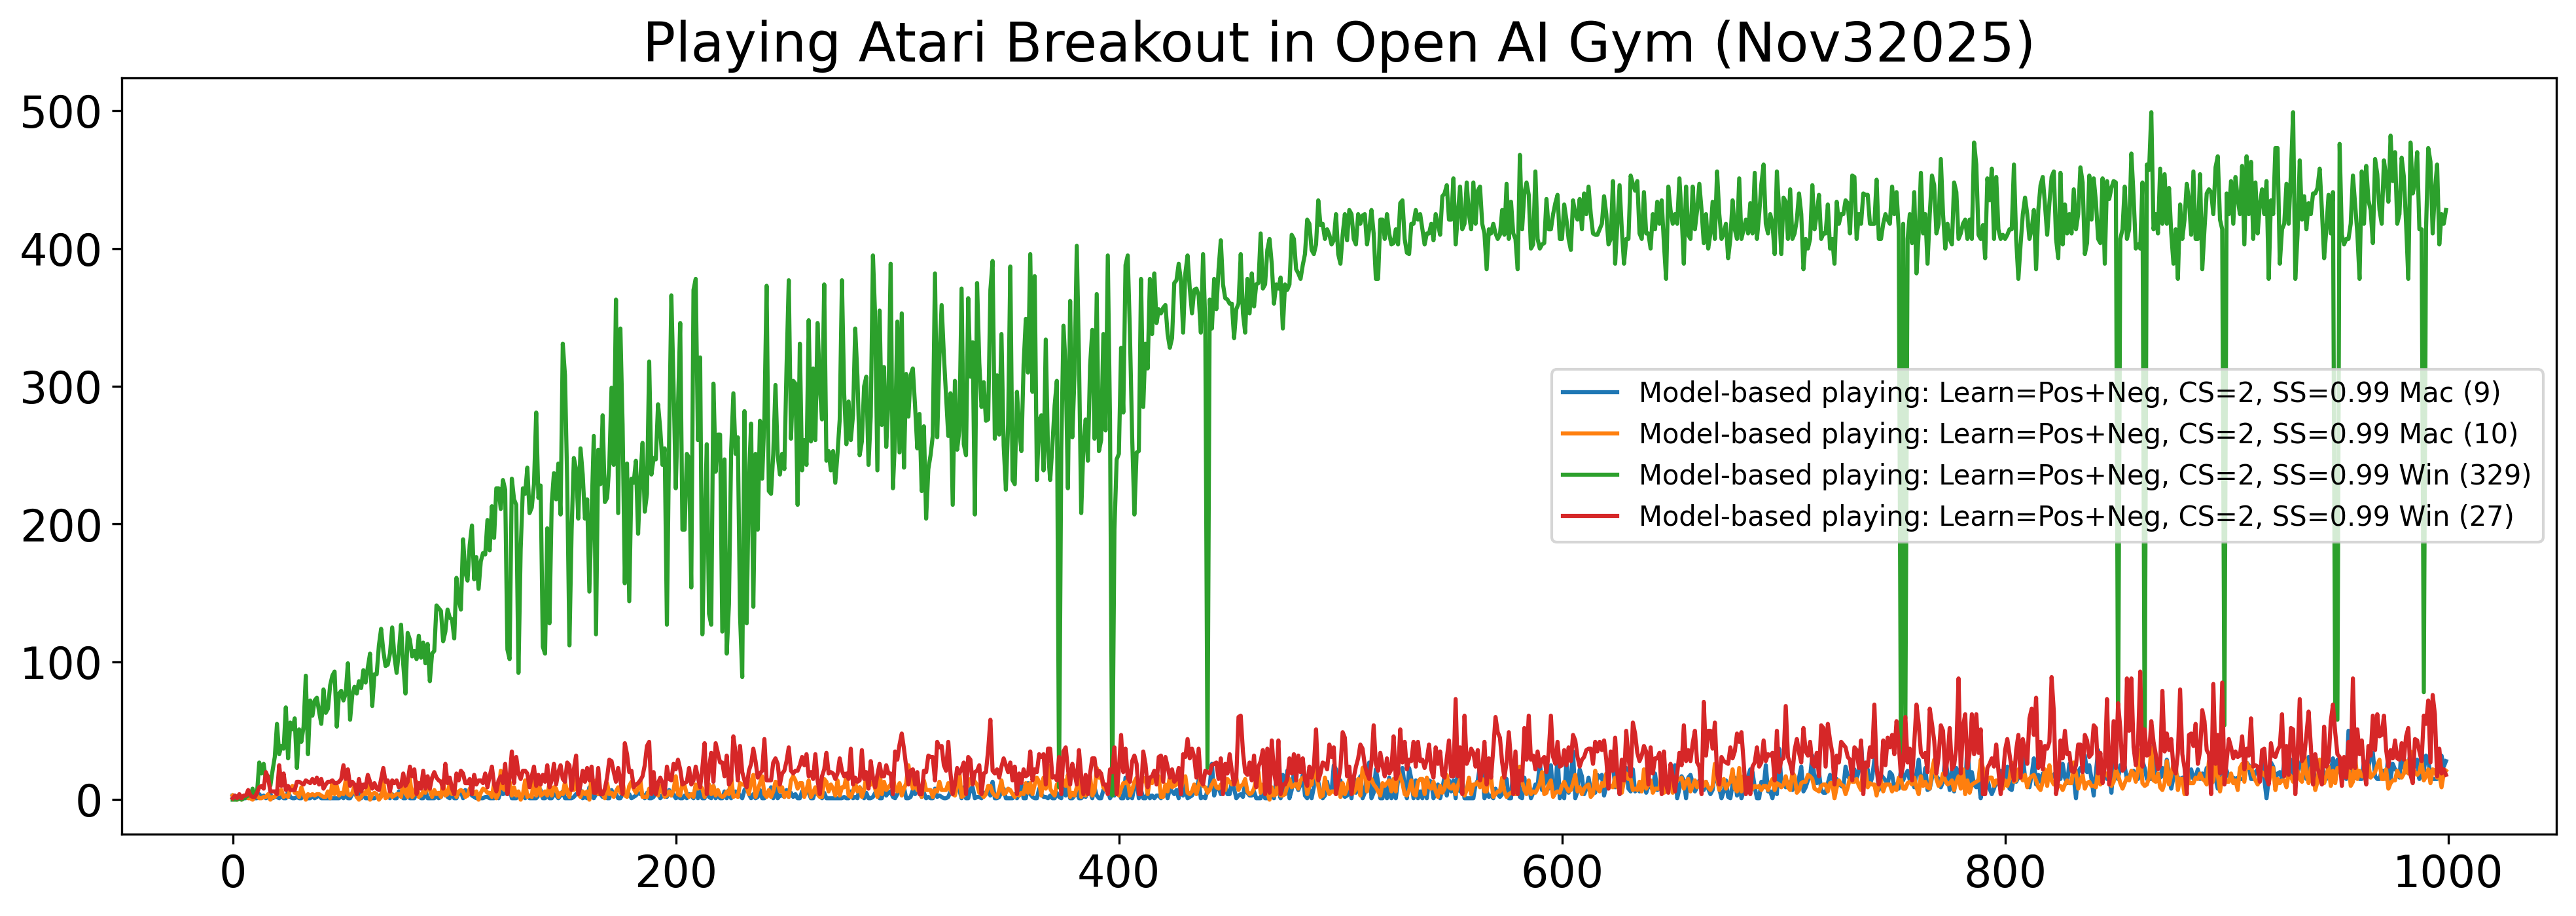

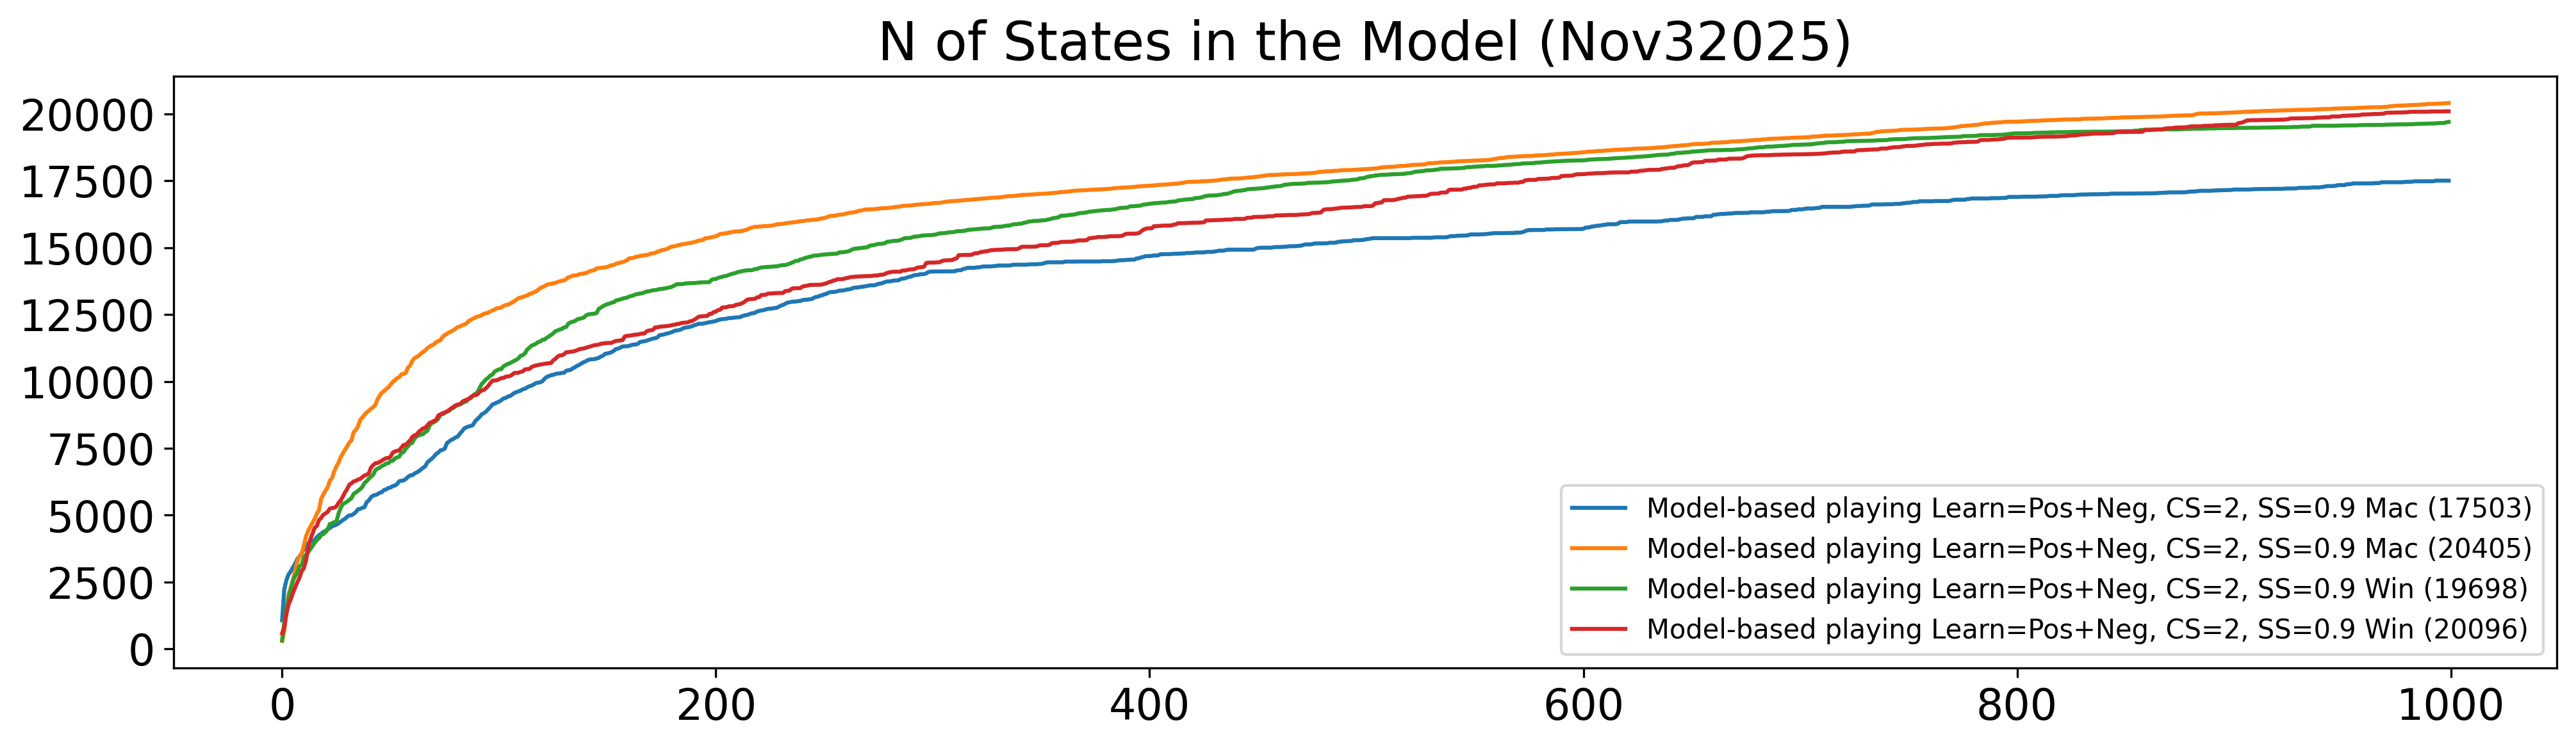

In [28]:
# Mac LEFT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251117 -cs=2 -ss=0.99 -tu=0
rev="773aeac5e8469a44202b41be77a1d93e3dbdca81"; time="2025-11-17 00:05:24.653844"; max_games=1000; max_steps=18000
score_avg=9.4; steps_avg=10313.2; lives_avg=1.5; lapse_avg="0:00:31.934760"; time="8:18:17.858042"
scores099 = [3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 4.0, 2.0, 3.0, 1.0, 2.0, 4.0, 1.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 6.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 4.0, 1.0, 1.0, 4.0, 6.0, 2.0, 4.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 4.0, 5.0, 2.0, 3.0, 1.0, 4.0, 1.0, 1.0, 6.0, 6.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 5.0, 4.0, 1.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 6.0, 5.0, 2.0, 1.0, 8.0, 1.0, 1.0, 5.0, 6.0, 1.0, 7.0, 3.0, 6.0, 3.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 5.0, 1.0, 6.0, 4.0, 5.0, 4.0, 8.0, 1.0, 1.0, 1.0, 3.0, 3.0, 4.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 3.0, 7.0, 1.0, 1.0, 4.0, 1.0, 1.0, 4.0, 3.0, 1.0, 3.0, 6.0, 1.0, 1.0, 1.0, 1.0, 2.0, 4.0, 4.0, 7.0, 1.0, 2.0, 1.0, 9.0, 4.0, 1.0, 4.0, 4.0, 4.0, 2.0, 4.0, 1.0, 1.0, 7.0, 3.0, 4.0, 1.0, 1.0, 4.0, 4.0, 3.0, 4.0, 1.0, 2.0, 3.0, 5.0, 4.0, 4.0, 1.0, 5.0, 1.0, 1.0, 2.0, 7.0, 5.0, 1.0, 3.0, 5.0, 2.0, 7.0, 3.0, 4.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 4.0, 3.0, 1.0, 10.0, 1.0, 6.0, 1.0, 1.0, 7.0, 2.0, 1.0, 10.0, 1.0, 4.0, 1.0, 1.0, 6.0, 1.0, 7.0, 1.0, 5.0, 6.0, 5.0, 3.0, 1.0, 7.0, 9.0, 4.0, 1.0, 4.0, 1.0, 2.0, 7.0, 1.0, 1.0, 5.0, 3.0, 9.0, 1.0, 10.0, 1.0, 3.0, 3.0, 2.0, 7.0, 2.0, 5.0, 2.0, 4.0, 1.0, 1.0, 6.0, 7.0, 6.0, 5.0, 1.0, 1.0, 7.0, 4.0, 10.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 6.0, 1.0, 2.0, 1.0, 9.0, 6.0, 1.0, 5.0, 1.0, 1.0, 2.0, 5.0, 8.0, 1.0, 1.0, 10.0, 3.0, 5.0, 6.0, 2.0, 1.0, 4.0, 8.0, 6.0, 9.0, 1.0, 1.0, 2.0, 7.0, 4.0, 7.0, 5.0, 2.0, 5.0, 1.0, 2.0, 1.0, 1.0, 8.0, 2.0, 3.0, 2.0, 1.0, 1.0, 2.0, 6.0, 4.0, 5.0, 13.0, 7.0, 1.0, 9.0, 1.0, 1.0, 8.0, 9.0, 1.0, 2.0, 2.0, 1.0, 5.0, 5.0, 6.0, 3.0, 13.0, 1.0, 1.0, 2.0, 6.0, 8.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 11.0, 1.0, 1.0, 12.0, 4.0, 2.0, 1.0, 1.0, 8.0, 4.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 5.0, 2.0, 1.0, 14.0, 3.0, 9.0, 1.0, 1.0, 3.0, 6.0, 1.0, 1.0, 3.0, 2.0, 7.0, 6.0, 1.0, 9.0, 3.0, 1.0, 1.0, 7.0, 7.0, 7.0, 1.0, 4.0, 3.0, 10.0, 5.0, 1.0, 1.0, 16.0, 1.0, 3.0, 1.0, 9.0, 15.0, 1.0, 7.0, 1.0, 1.0, 5.0, 1.0, 3.0, 1.0, 3.0, 3.0, 1.0, 4.0, 6.0, 1.0, 8.0, 6.0, 4.0, 7.0, 1.0, 14.0, 3.0, 12.0, 1.0, 2.0, 3.0, 6.0, 7.0, 14.0, 1.0, 2.0, 1.0, 7.0, 10.0, 26.0, 3.0, 9.0, 9.0, 4.0, 5.0, 11.0, 4.0, 4.0, 13.0, 8.0, 1.0, 3.0, 4.0, 2.0, 12.0, 5.0, 3.0, 3.0, 6.0, 1.0, 1.0, 1.0, 8.0, 1.0, 1.0, 1.0, 3.0, 1.0, 14.0, 8.0, 1.0, 18.0, 4.0, 21.0, 1.0, 7.0, 20.0, 11.0, 7.0, 11.0, 18.0, 3.0, 1.0, 7.0, 1.0, 9.0, 31.0, 13.0, 4.0, 1.0, 3.0, 13.0, 5.0, 6.0, 25.0, 22.0, 5.0, 14.0, 4.0, 2.0, 3.0, 10.0, 1.0, 16.0, 5.0, 9.0, 17.0, 1.0, 5.0, 20.0, 27.0, 1.0, 5.0, 22.0, 13.0, 1.0, 1.0, 11.0, 1.0, 16.0, 1.0, 5.0, 1.0, 14.0, 14.0, 23.0, 10.0, 1.0, 23.0, 15.0, 1.0, 14.0, 1.0, 6.0, 1.0, 14.0, 1.0, 14.0, 13.0, 1.0, 5.0, 11.0, 1.0, 8.0, 17.0, 3.0, 14.0, 6.0, 14.0, 1.0, 23.0, 6.0, 14.0, 1.0, 1.0, 1.0, 1.0, 1.0, 11.0, 14.0, 25.0, 21.0, 1.0, 6.0, 2.0, 3.0, 1.0, 8.0, 4.0, 2.0, 4.0, 16.0, 15.0, 1.0, 1.0, 23.0, 16.0, 23.0, 2.0, 1.0, 16.0, 6.0, 12.0, 1.0, 5.0, 11.0, 9.0, 29.0, 7.0, 12.0, 23.0, 8.0, 25.0, 4.0, 5.0, 33.0, 1.0, 7.0, 1.0, 28.0, 5.0, 17.0, 35.0, 1.0, 6.0, 22.0, 17.0, 4.0, 8.0, 16.0, 7.0, 8.0, 5.0, 18.0, 16.0, 18.0, 3.0, 10.0, 16.0, 25.0, 26.0, 9.0, 19.0, 4.0, 6.0, 16.0, 23.0, 8.0, 6.0, 22.0, 6.0, 8.0, 6.0, 8.0, 17.0, 5.0, 10.0, 9.0, 8.0, 19.0, 7.0, 8.0, 10.0, 16.0, 17.0, 11.0, 12.0, 21.0, 25.0, 1.0, 8.0, 17.0, 14.0, 1.0, 16.0, 18.0, 12.0, 6.0, 9.0, 14.0, 15.0, 7.0, 13.0, 8.0, 4.0, 7.0, 21.0, 14.0, 8.0, 1.0, 6.0, 14.0, 2.0, 1.0, 11.0, 16.0, 3.0, 14.0, 1.0, 6.0, 10.0, 17.0, 22.0, 20.0, 9.0, 1.0, 1.0, 13.0, 9.0, 25.0, 6.0, 6.0, 1.0, 11.0, 4.0, 37.0, 13.0, 14.0, 9.0, 11.0, 13.0, 7.0, 14.0, 7.0, 16.0, 24.0, 6.0, 9.0, 14.0, 17.0, 32.0, 15.0, 12.0, 20.0, 7.0, 5.0, 5.0, 12.0, 18.0, 15.0, 16.0, 15.0, 12.0, 10.0, 9.0, 24.0, 17.0, 15.0, 19.0, 22.0, 15.0, 21.0, 41.0, 18.0, 22.0, 22.0, 11.0, 16.0, 29.0, 24.0, 7.0, 18.0, 16.0, 14.0, 11.0, 20.0, 18.0, 9.0, 11.0, 8.0, 22.0, 14.0, 18.0, 21.0, 14.0, 15.0, 9.0, 19.0, 29.0, 14.0, 11.0, 23.0, 7.0, 8.0, 16.0, 18.0, 17.0, 15.0, 9.0, 13.0, 31.0, 19.0, 7.0, 21.0, 6.0, 23.0, 18.0, 20.0, 19.0, 6.0, 42.0, 13.0, 20.0, 11.0, 9.0, 15.0, 1.0, 10.0, 17.0, 15.0, 8.0, 4.0, 8.0, 13.0, 11.0, 21.0, 16.0, 16.0, 24.0, 8.0, 7.0, 17.0, 13.0, 16.0, 20.0, 32.0, 16.0, 12.0, 9.0, 18.0, 30.0, 11.0, 18.0, 13.0, 19.0, 18.0, 20.0, 17.0, 16.0, 18.0, 20.0, 16.0, 15.0, 26.0, 16.0, 12.0, 26.0, 23.0, 16.0, 1.0, 20.0, 23.0, 20.0, 32.0, 20.0, 25.0, 15.0, 3.0, 20.0, 36.0, 16.0, 15.0, 19.0, 15.0, 17.0, 5.0, 27.0, 16.0, 15.0, 25.0, 22.0, 24.0, 15.0, 17.0, 20.0, 21.0, 15.0, 15.0, 26.0, 28.0, 23.0, 15.0, 15.0, 15.0, 39.0, 15.0, 16.0, 16.0, 23.0, 16.0, 29.0, 19.0, 8.0, 16.0, 20.0, 16.0, 15.0, 16.0, 16.0, 11.0, 15.0, 22.0, 15.0, 17.0, 22.0, 15.0, 19.0, 16.0, 23.0, 16.0, 15.0, 46.0, 15.0, 8.0, 15.0, 17.0, 25.0, 21.0, 17.0, 15.0, 16.0, 15.0, 16.0, 15.0, 15.0, 15.0, 27.0, 25.0, 15.0, 15.0, 20.0, 22.0, 20.0, 27.0, 15.0, 1.0, 15.0, 27.0, 24.0, 15.0, 19.0, 20.0, 15.0, 27.0, 28.0, 17.0, 29.0, 16.0, 18.0, 20.0, 24.0, 29.0, 20.0, 15.0, 31.0, 21.0, 22.0, 15.0, 15.0, 15.0, 29.0, 15.0, 15.0, 24.0, 20.0, 30.0, 20.0, 29.0, 21.0, 17.0, 24.0, 15.0, 50.0, 20.0, 15.0, 16.0, 20.0, 15.0, 15.0, 28.0, 15.0, 22.0, 34.0, 34.0, 17.0, 15.0, 15.0, 21.0, 21.0, 15.0, 33.0, 15.0, 26.0, 22.0, 21.0, 16.0, 38.0, 23.0, 20.0, 25.0, 34.0, 33.0, 24.0, 29.0, 15.0, 35.0, 21.0, 32.0, 30.0, 15.0, 15.0, 15.0, 15.0, 26.0, 32.0, 24.0, 28.0]
stepss099 = [919, 859, 18000, 18000, 18000, 18000, 18000, 728, 866, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 843, 18000, 18000, 1390, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 834, 18000, 18000, 835, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 914, 18000, 18000, 18000, 18000, 18000, 1243, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 979, 18000, 715, 843, 18000, 18000, 18000, 18000, 1216, 1210, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1410, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1274, 1317, 18000, 18000, 1607, 18000, 18000, 1142, 1206, 18000, 1506, 904, 1211, 851, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1090, 18000, 1203, 18000, 1087, 18000, 1095, 18000, 18000, 18000, 18000, 911, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1406, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 971, 1326, 18000, 726, 18000, 1236, 960, 18000, 18000, 1020, 18000, 18000, 18000, 18000, 18000, 1429, 18000, 18000, 18000, 18000, 18000, 18000, 840, 18000, 18000, 18000, 18000, 1100, 967, 18000, 18000, 18000, 18000, 18000, 18000, 1431, 1300, 18000, 18000, 18000, 18000, 1433, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 966, 915, 18000, 1878, 18000, 1206, 18000, 18000, 1402, 715, 18000, 1821, 18000, 971, 18000, 18000, 1282, 18000, 1408, 18000, 18000, 1211, 1158, 907, 18000, 18000, 1222, 18000, 18000, 975, 18000, 18000, 1341, 18000, 18000, 1089, 18000, 1223, 18000, 1342, 18000, 909, 986, 18000, 1338, 18000, 1138, 18000, 18000, 18000, 18000, 18000, 1442, 1210, 1142, 18000, 18000, 18000, 18000, 1342, 18000, 1098, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1346, 18000, 18000, 18000, 1696, 1206, 18000, 1207, 18000, 18000, 18000, 1149, 1626, 18000, 18000, 1813, 18000, 1202, 18000, 18000, 18000, 1027, 1569, 1206, 1758, 18000, 18000, 18000, 1410, 18000, 1469, 18000, 18000, 1149, 18000, 18000, 18000, 18000, 1567, 719, 18000, 18000, 18000, 18000, 18000, 1349, 1042, 1206, 18000, 1431, 18000, 1775, 18000, 18000, 1646, 1224, 18000, 18000, 18000, 18000, 1142, 1366, 1204, 18000, 18000, 18000, 18000, 18000, 18000, 1090, 18000, 18000, 18000, 18000, 1098, 18000, 1022, 1107, 18000, 18000, 1191, 18000, 18000, 18000, 18000, 1596, 1023, 719, 18000, 18000, 993, 18000, 18000, 18000, 18000, 18000, 1535, 979, 1874, 18000, 18000, 18000, 1202, 18000, 18000, 995, 715, 18000, 1204, 18000, 1960, 18000, 18000, 18000, 1410, 1572, 1411, 18000, 18000, 846, 2089, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2040, 18000, 1415, 18000, 18000, 18000, 18000, 18000, 18000, 843, 18000, 18000, 1032, 18000, 18000, 1668, 18000, 958, 18000, 18000, 2513, 917, 2306, 18000, 18000, 18000, 18000, 1551, 2399, 18000, 18000, 18000, 18000, 1678, 3542, 18000, 18000, 1597, 18000, 1219, 2006, 18000, 1045, 1958, 1748, 18000, 18000, 1170, 18000, 18000, 1138, 978, 18000, 1214, 18000, 18000, 18000, 1086, 18000, 18000, 18000, 980, 18000, 18000, 1535, 18000, 2770, 18000, 3134, 18000, 18000, 3012, 18000, 18000, 1444, 2472, 18000, 18000, 18000, 18000, 1851, 3348, 18000, 18000, 18000, 911, 18000, 18000, 1214, 3431, 3164, 1234, 18000, 1075, 799, 907, 1838, 18000, 2138, 1079, 1223, 1964, 18000, 1221, 3175, 3449, 18000, 1223, 3039, 2180, 18000, 18000, 1755, 18000, 2794, 18000, 18000, 18000, 18000, 18000, 3231, 2004, 18000, 3249, 2390, 18000, 18000, 18000, 1343, 18000, 18000, 18000, 18000, 1875, 18000, 1239, 2021, 18000, 1769, 2688, 18000, 2138, 18000, 18000, 18000, 18000, 1263, 18000, 18000, 18000, 18000, 18000, 18000, 1854, 18000, 3613, 3558, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2819, 2152, 18000, 18000, 3378, 2817, 3514, 18000, 18000, 18000, 18000, 2056, 18000, 18000, 18000, 18000, 3980, 1545, 1975, 18000, 18000, 3497, 1091, 18000, 3750, 18000, 1471, 18000, 3437, 1317, 2390, 4022, 18000, 18000, 2551, 18000, 1073, 18000, 2817, 1463, 18000, 1219, 3063, 2687, 2494, 1006, 18000, 2817, 3499, 3600, 1673, 3144, 18000, 18000, 2817, 3565, 18000, 18000, 3348, 18000, 1565, 1259, 18000, 18000, 18000, 18000, 18000, 18000, 2459, 1468, 1599, 1890, 2817, 3018, 1583, 2033, 2657, 18000, 18000, 18000, 2952, 2384, 18000, 2817, 2854, 18000, 1275, 1743, 2433, 2245, 1445, 2139, 1542, 1045, 1378, 2666, 2377, 18000, 18000, 18000, 2353, 18000, 18000, 18000, 2817, 18000, 2402, 18000, 18000, 1863, 2639, 3047, 2507, 18000, 18000, 18000, 2271, 1740, 3503, 18000, 18000, 18000, 18000, 18000, 3787, 1973, 2264, 18000, 2013, 2161, 18000, 2518, 1558, 2817, 3332, 18000, 1769, 2469, 2287, 2936, 2163, 2024, 2498, 1365, 18000, 18000, 1794, 2575, 2150, 2608, 18000, 1879, 1783, 18000, 3512, 2678, 2558, 18000, 3346, 2433, 3068, 4794, 3138, 3086, 3349, 2112, 2823, 3061, 3297, 1405, 3003, 2815, 2286, 1838, 2871, 18000, 18000, 18000, 1561, 2403, 18000, 2919, 3037, 2027, 18000, 1769, 2842, 3392, 2191, 2183, 3306, 18000, 18000, 2405, 2907, 18000, 2396, 1669, 18000, 3201, 18000, 18000, 18000, 18000, 2923, 18000, 18000, 2728, 1279, 4267, 2235, 2808, 2080, 18000, 2237, 18000, 18000, 2782, 2653, 18000, 1111, 1561, 18000, 1997, 2728, 18000, 2386, 3202, 1491, 18000, 18000, 18000, 2764, 2807, 3850, 2178, 18000, 1673, 2335, 2990, 2068, 2691, 2173, 18000, 2691, 18000, 2637, 2260, 2675, 18000, 2441, 2237, 3282, 18000, 1927, 18000, 2848, 2437, 18000, 2804, 3492, 2488, 3193, 2961, 3068, 2237, 997, 2488, 18000, 18000, 18000, 2886, 2237, 2651, 18000, 3458, 2430, 2239, 2810, 2876, 18000, 2237, 2651, 2499, 2698, 2237, 2237, 2854, 3484, 3187, 2239, 2237, 2237, 3923, 2237, 2435, 18000, 18000, 2333, 3627, 2816, 1607, 18000, 18000, 2439, 2237, 2435, 2439, 1837, 2237, 2836, 2237, 2572, 3091, 2237, 2881, 18000, 2877, 2360, 2237, 4563, 18000, 1489, 18000, 2299, 2841, 2985, 2483, 18000, 18000, 2237, 18000, 2237, 2237, 2237, 3221, 2850, 2084, 2237, 18000, 2836, 18000, 2966, 2237, 18000, 2237, 18000, 3087, 2247, 2969, 2646, 18000, 3046, 3523, 2546, 3561, 18000, 2687, 18000, 2630, 3827, 2804, 2237, 3131, 2692, 2912, 18000, 2237, 2237, 18000, 2237, 2237, 3085, 2646, 3462, 2804, 3547, 18000, 2713, 3159, 18000, 4507, 18000, 2237, 18000, 2804, 2239, 18000, 3639, 18000, 2838, 3579, 4057, 2625, 2237, 2237, 2620, 2929, 18000, 3869, 2237, 3391, 2894, 18000, 18000, 3861, 18000, 2498, 2841, 3483, 3487, 3149, 3581, 2237, 3697, 18000, 18000, 3423, 18000, 2237, 2237, 2241, 3231, 3900, 18000, 3492]
livess099 = [0, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 2, 3, 1, 2, 3, 3, 2, 2, 3, 4, 0, 2, 4, 0, 1, 4, 2, 3, 2, 4, 1, 4, 4, 4, 0, 4, 2, 0, 4, 3, 4, 3, 4, 4, 3, 4, 3, 0, 4, 1, 4, 3, 2, 0, 3, 2, 4, 1, 4, 4, 4, 3, 4, 3, 4, 0, 2, 0, 0, 4, 3, 4, 4, 0, 0, 4, 3, 2, 4, 3, 4, 2, 2, 4, 4, 0, 4, 4, 4, 4, 1, 3, 3, 0, 0, 3, 4, 0, 4, 4, 0, 0, 4, 0, 0, 0, 0, 3, 3, 2, 4, 4, 3, 3, 4, 4, 4, 0, 4, 0, 3, 0, 3, 0, 4, 4, 4, 1, 0, 3, 4, 1, 4, 4, 4, 4, 1, 0, 4, 3, 1, 3, 4, 1, 2, 3, 1, 1, 4, 4, 3, 4, 3, 3, 0, 0, 4, 0, 4, 0, 0, 4, 2, 0, 3, 3, 3, 4, 4, 0, 1, 2, 4, 4, 3, 3, 0, 1, 4, 3, 2, 0, 0, 1, 4, 2, 4, 4, 2, 0, 0, 4, 3, 2, 3, 0, 2, 2, 3, 3, 3, 4, 1, 4, 0, 0, 4, 0, 4, 0, 3, 4, 0, 0, 3, 0, 4, 0, 4, 3, 0, 1, 0, 4, 2, 0, 0, 0, 4, 1, 0, 1, 4, 0, 4, 3, 0, 4, 4, 0, 2, 0, 4, 0, 4, 0, 0, 3, 0, 3, 0, 3, 3, 4, 4, 1, 0, 0, 0, 4, 4, 1, 1, 0, 4, 0, 4, 3, 4, 4, 4, 4, 4, 4, 3, 4, 4, 0, 4, 3, 4, 0, 0, 4, 0, 4, 4, 2, 0, 0, 4, 4, 0, 2, 0, 1, 3, 4, 0, 0, 0, 0, 4, 4, 3, 0, 3, 0, 1, 2, 0, 4, 2, 4, 4, 0, 0, 1, 3, 4, 4, 3, 0, 0, 0, 2, 0, 4, 0, 4, 4, 0, 0, 4, 3, 3, 4, 0, 0, 0, 2, 2, 3, 4, 3, 1, 0, 4, 3, 4, 4, 0, 3, 0, 0, 4, 4, 0, 3, 3, 3, 4, 0, 0, 0, 3, 4, 0, 4, 4, 1, 3, 4, 0, 0, 0, 4, 4, 2, 0, 4, 4, 0, 0, 1, 0, 4, 0, 3, 4, 4, 0, 0, 0, 4, 4, 0, 0, 3, 4, 4, 1, 4, 2, 3, 1, 0, 4, 0, 4, 4, 2, 4, 2, 4, 0, 1, 4, 0, 1, 4, 0, 1, 0, 1, 4, 0, 0, 0, 4, 3, 2, 1, 0, 0, 4, 3, 3, 2, 0, 0, 3, 3, 0, 2, 0, 0, 3, 0, 0, 0, 4, 2, 0, 3, 2, 0, 0, 2, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 1, 0, 4, 0, 2, 0, 4, 2, 0, 1, 2, 0, 0, 3, 4, 2, 3, 0, 0, 2, 1, 4, 0, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 4, 4, 0, 4, 0, 4, 2, 4, 3, 3, 0, 0, 4, 0, 0, 4, 3, 4, 0, 4, 3, 4, 2, 0, 4, 0, 0, 4, 0, 0, 2, 0, 2, 3, 4, 2, 0, 3, 4, 4, 4, 4, 4, 0, 3, 0, 0, 4, 3, 3, 2, 3, 1, 2, 3, 4, 0, 0, 4, 4, 0, 0, 0, 3, 4, 1, 2, 0, 4, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 4, 0, 4, 0, 0, 0, 0, 4, 1, 0, 2, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 4, 0, 3, 0, 0, 3, 2, 2, 3, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 4, 0, 3, 4, 2, 0, 2, 0, 4, 2, 0, 0, 0, 0, 2, 4, 4, 0, 0, 0, 4, 4, 4, 2, 1, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 1, 0, 2, 3, 2, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 4, 2, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2, 3, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 4, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 0, 3, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 1, 0]
lapses099 = [1, 2, 9, 10, 10, 11, 11, 4, 3, 10, 10, 10, 14, 11, 13, 11, 11, 14, 13, 14, 14, 10, 7, 11, 10, 8, 16, 11, 15, 12, 13, 10, 17, 11, 12, 11, 8, 12, 14, 8, 11, 13, 10, 13, 11, 12, 15, 11, 16, 12, 12, 16, 10, 15, 16, 24, 12, 19, 11, 17, 11, 11, 13, 14, 12, 14, 11, 11, 15, 10, 11, 11, 10, 11, 10, 11, 12, 11, 15, 21, 13, 14, 10, 17, 15, 11, 11, 15, 10, 10, 10, 11, 23, 13, 13, 18, 31, 16, 11, 18, 11, 11, 14, 10, 10, 32, 20, 12, 23, 12, 14, 13, 11, 12, 13, 17, 11, 11, 12, 18, 11, 14, 13, 19, 12, 12, 12, 9, 11, 19, 33, 16, 10, 17, 11, 10, 11, 11, 23, 19, 11, 16, 25, 18, 12, 18, 20, 16, 44, 19, 11, 12, 15, 11, 14, 18, 17, 15, 12, 28, 10, 21, 15, 14, 24, 17, 10, 17, 13, 10, 10, 24, 30, 21, 14, 12, 13, 17, 21, 25, 10, 18, 20, 26, 12, 30, 9, 32, 11, 13, 27, 14, 43, 12, 14, 22, 20, 37, 24, 26, 18, 14, 16, 11, 30, 12, 30, 20, 11, 32, 13, 18, 22, 14, 21, 13, 16, 20, 13, 28, 11, 23, 24, 24, 28, 10, 11, 26, 32, 19, 10, 28, 35, 25, 10, 28, 12, 14, 21, 13, 12, 20, 13, 26, 10, 28, 11, 16, 39, 15, 17, 10, 24, 15, 21, 8, 8, 17, 23, 27, 10, 12, 11, 34, 21, 17, 9, 25, 9, 14, 10, 8, 12, 10, 9, 8, 10, 7, 9, 24, 9, 11, 9, 18, 25, 9, 21, 8, 9, 17, 24, 50, 7, 10, 15, 16, 46, 16, 18, 8, 13, 28, 24, 32, 13, 9, 13, 15, 9, 38, 26, 15, 21, 10, 17, 8, 10, 26, 13, 23, 10, 10, 12, 13, 26, 29, 25, 77, 15, 10, 67, 9, 8, 20, 24, 10, 12, 13, 9, 25, 53, 23, 47, 25, 12, 11, 11, 25, 20, 10, 24, 8, 9, 22, 15, 9, 21, 8, 10, 20, 11, 14, 13, 7, 24, 30, 22, 13, 10, 37, 11, 11, 26, 12, 9, 28, 7, 124, 9, 14, 19, 22, 8, 10, 50, 15, 19, 22, 13, 94, 19, 8, 9, 23, 38, 14, 12, 59, 24, 79, 31, 9, 8, 38, 8, 22, 13, 64, 66, 7, 39, 12, 8, 12, 11, 17, 9, 36, 40, 12, 20, 17, 9, 19, 20, 23, 23, 7, 52, 41, 59, 11, 16, 20, 17, 64, 69, 9, 10, 22, 15, 15, 155, 26, 39, 31, 20, 11, 42, 11, 26, 69, 81, 8, 21, 13, 11, 38, 30, 42, 17, 12, 8, 9, 18, 21, 9, 10, 9, 51, 11, 43, 47, 7, 68, 22, 50, 11, 54, 117, 46, 16, 47, 107, 19, 15, 24, 20, 34, 93, 18, 29, 10, 22, 25, 14, 33, 60, 90, 17, 42, 42, 22, 30, 13, 10, 68, 41, 25, 41, 22, 8, 54, 55, 16, 25, 54, 48, 9, 11, 34, 9, 27, 9, 27, 8, 23, 34, 35, 60, 11, 23, 37, 10, 22, 10, 17, 8, 24, 11, 26, 16, 8, 60, 46, 11, 68, 63, 23, 49, 19, 56, 8, 68, 51, 38, 10, 9, 8, 11, 8, 55, 26, 54, 112, 15, 49, 9, 16, 21, 53, 63, 12, 12, 29, 54, 11, 12, 84, 18, 112, 15, 15, 37, 18, 84, 10, 121, 42, 70, 44, 40, 46, 158, 46, 28, 16, 29, 89, 10, 27, 14, 51, 28, 63, 69, 8, 36, 84, 28, 31, 23, 13, 47, 58, 18, 40, 114, 41, 98, 36, 10, 23, 18, 37, 86, 19, 56, 12, 94, 17, 22, 41, 23, 66, 48, 37, 20, 42, 12, 45, 26, 93, 27, 47, 32, 35, 29, 39, 55, 75, 103, 13, 23, 163, 40, 10, 10, 108, 44, 60, 47, 48, 44, 52, 48, 30, 38, 18, 127, 44, 21, 12, 8, 90, 16, 8, 40, 7, 13, 129, 8, 23, 41, 85, 127, 135, 46, 8, 13, 70, 69, 52, 10, 9, 8, 39, 49, 82, 49, 46, 12, 63, 47, 41, 33, 52, 19, 131, 12, 18, 87, 75, 87, 70, 35, 124, 36, 14, 11, 48, 46, 73, 107, 12, 96, 31, 33, 35, 46, 45, 48, 58, 36, 78, 73, 13, 66, 47, 49, 7, 31, 41, 25, 95, 49, 56, 22, 68, 50, 27, 60, 19, 75, 44, 62, 38, 104, 37, 67, 89, 76, 66, 87, 42, 38, 15, 36, 53, 110, 66, 11, 34, 68, 35, 22, 85, 7, 108, 106, 52, 42, 29, 108, 34, 9, 104, 31, 19, 9, 69, 35, 80, 12, 51, 19, 31, 46, 94, 59, 44, 108, 20, 59, 22, 35, 89, 26, 80, 39, 74, 22, 46, 16, 114, 35, 16, 60, 36, 15, 15, 44, 33, 19, 7, 8, 72, 56, 26, 61, 35, 11, 10, 7, 57, 48, 67, 42, 38, 5, 28, 25, 53, 12, 15, 69, 10, 65, 8, 98, 44, 37, 34, 31, 35, 6, 24, 35, 28, 46, 60, 40, 84, 22, 50, 8, 6, 51, 4, 7, 23, 17, 22, 35, 44, 44, 21, 11, 21, 31, 34, 12, 33, 29, 12, 11, 47, 43, 28, 33, 25, 26, 29, 6, 159, 21, 26, 9, 46, 54, 52, 23, 14, 26, 7, 20, 4, 5, 4, 55, 47, 44, 10, 14, 14, 17, 14, 5, 13, 36, 47, 17, 33, 62, 73, 38, 28, 73, 6, 60, 33, 23, 44, 23, 54, 26, 8, 31, 43, 68, 19, 3, 17, 34, 11, 14, 23, 21, 91, 13, 96, 34, 116, 47, 14, 103, 30, 10, 30, 9, 15, 16, 72, 14, 31, 88, 112, 46, 8, 3, 14, 12, 9, 59, 3, 49, 38, 14, 17, 80, 32, 34, 26, 44, 73, 24, 8, 7, 68, 35, 29, 23, 10, 6, 9, 23, 52, 198, 29, 32]
states099 = [706, 1082, 1164, 1179, 1185, 1206, 1208, 1500, 1776, 1861, 1887, 1917, 2268, 2326, 2518, 2598, 2684, 2818, 2922, 3002, 3057, 3062, 3220, 3294, 3309, 3517, 3660, 3674, 3766, 3791, 3830, 3834, 3954, 3958, 3967, 3974, 4026, 4046, 4084, 4128, 4173, 4183, 4184, 4219, 4224, 4225, 4262, 4263, 4293, 4373, 4391, 4428, 4432, 4473, 4539, 4733, 4743, 4845, 4852, 4884, 4888, 4891, 4899, 4934, 4938, 4956, 4957, 5032, 5070, 5094, 5199, 5206, 5207, 5209, 5209, 5284, 5381, 5386, 5427, 5509, 5510, 5536, 5538, 5581, 5596, 5598, 5602, 5689, 5700, 5700, 5700, 5700, 5745, 5755, 5767, 5888, 6111, 6167, 6174, 6255, 6258, 6261, 6315, 6359, 6359, 6548, 6674, 6734, 6829, 6871, 6875, 6881, 6882, 6882, 6886, 6897, 6898, 6899, 6910, 6987, 7015, 7088, 7115, 7198, 7203, 7215, 7219, 7219, 7223, 7264, 7356, 7427, 7427, 7443, 7446, 7446, 7447, 7450, 7470, 7536, 7540, 7551, 7600, 7616, 7617, 7635, 7670, 7687, 7865, 7882, 7883, 7883, 7884, 7885, 7887, 7898, 7912, 7960, 7968, 8096, 8103, 8120, 8162, 8170, 8202, 8230, 8234, 8250, 8252, 8252, 8252, 8309, 8377, 8396, 8399, 8400, 8403, 8414, 8443, 8489, 8489, 8495, 8503, 8572, 8576, 8636, 8636, 8706, 8706, 8706, 8746, 8760, 8850, 8921, 8925, 8965, 8971, 9075, 9091, 9108, 9117, 9117, 9128, 9128, 9156, 9156, 9220, 9251, 9254, 9312, 9319, 9331, 9334, 9334, 9360, 9375, 9375, 9387, 9387, 9406, 9410, 9419, 9442, 9457, 9501, 9502, 9502, 9537, 9560, 9577, 9577, 9612, 9656, 9676, 9676, 9709, 9710, 9711, 9742, 9744, 9744, 9759, 9786, 9804, 9807, 9851, 9865, 9884, 9962, 9978, 9985, 9985, 10000, 10022, 10054, 10054, 10054, 10060, 10084, 10152, 10171, 10179, 10180, 10286, 10299, 10330, 10332, 10377, 10390, 10393, 10393, 10393, 10394, 10395, 10395, 10395, 10395, 10395, 10395, 10444, 10444, 10450, 10450, 10480, 10501, 10508, 10542, 10558, 10559, 10564, 10576, 10656, 10681, 10681, 10692, 10707, 10784, 10795, 10804, 10804, 10807, 10833, 10876, 10909, 10926, 10928, 10928, 10935, 10935, 10997, 11058, 11061, 11076, 11077, 11079, 11079, 11079, 11110, 11131, 11141, 11141, 11141, 11141, 11141, 11164, 11215, 11241, 11396, 11410, 11410, 11555, 11561, 11562, 11567, 11572, 11574, 11574, 11576, 11577, 11597, 11724, 11767, 11827, 11840, 11840, 11840, 11844, 11864, 11872, 11876, 11891, 11891, 11891, 11914, 11917, 11923, 11934, 11934, 11934, 11944, 11946, 11946, 11949, 11949, 11959, 12017, 12045, 12046, 12046, 12093, 12093, 12093, 12112, 12113, 12113, 12140, 12147, 12272, 12302, 12305, 12306, 12321, 12326, 12326, 12387, 12395, 12398, 12428, 12428, 12568, 12615, 12615, 12615, 12623, 12642, 12664, 12665, 12740, 12761, 12868, 12891, 12891, 12891, 12925, 12925, 12945, 12946, 13057, 13130, 13134, 13149, 13151, 13151, 13152, 13152, 13156, 13156, 13176, 13207, 13207, 13216, 13226, 13226, 13234, 13255, 13259, 13272, 13272, 13332, 13340, 13453, 13453, 13462, 13463, 13464, 13556, 13619, 13619, 13620, 13629, 13638, 13651, 13813, 13837, 13869, 13880, 13884, 13884, 13908, 13912, 13936, 14023, 14126, 14132, 14136, 14146, 14146, 14175, 14197, 14219, 14240, 14242, 14242, 14242, 14250, 14253, 14260, 14260, 14260, 14284, 14293, 14351, 14382, 14383, 14440, 14450, 14478, 14480, 14501, 14594, 14632, 14636, 14658, 14753, 14770, 14772, 14779, 14779, 14797, 14877, 14881, 14894, 14894, 14899, 14908, 14910, 14924, 14990, 15025, 15051, 15080, 15110, 15115, 15130, 15130, 15133, 15168, 15193, 15203, 15227, 15229, 15231, 15269, 15323, 15324, 15332, 15381, 15401, 15401, 15401, 15426, 15426, 15436, 15439, 15451, 15451, 15461, 15477, 15494, 15531, 15546, 15553, 15583, 15585, 15593, 15593, 15599, 15599, 15610, 15610, 15615, 15618, 15619, 15685, 15699, 15707, 15731, 15771, 15775, 15792, 15795, 15830, 15830, 15851, 15860, 15881, 15881, 15881, 15881, 15881, 15881, 15897, 15907, 15961, 16029, 16029, 16055, 16055, 16057, 16061, 16076, 16106, 16106, 16106, 16107, 16135, 16137, 16137, 16170, 16186, 16225, 16235, 16235, 16248, 16254, 16292, 16299, 16360, 16373, 16409, 16421, 16423, 16435, 16514, 16531, 16549, 16551, 16554, 16581, 16609, 16621, 16622, 16636, 16640, 16678, 16707, 16707, 16722, 16744, 16763, 16768, 16776, 16778, 16797, 16818, 16818, 16829, 16880, 16887, 16927, 16945, 16946, 16956, 16961, 16977, 17003, 17014, 17021, 17022, 17058, 17063, 17069, 17082, 17096, 17127, 17133, 17145, 17145, 17158, 17159, 17170, 17175, 17225, 17231, 17239, 17259, 17263, 17280, 17298, 17307, 17338, 17374, 17375, 17382, 17438, 17458, 17458, 17458, 17495, 17510, 17513, 17530, 17539, 17554, 17576, 17589, 17591, 17600, 17602, 17662, 17686, 17691, 17691, 17691, 17717, 17719, 17719, 17722, 17722, 17726, 17779, 17779, 17794, 17805, 17831, 17858, 17900, 17908, 17908, 17908, 17918, 17940, 17954, 17955, 17955, 17955, 17956, 17959, 17979, 17992, 18000, 18001, 18027, 18042, 18052, 18054, 18077, 18079, 18144, 18146, 18150, 18172, 18180, 18234, 18250, 18259, 18304, 18310, 18312, 18314, 18329, 18334, 18363, 18405, 18413, 18434, 18438, 18444, 18451, 18456, 18462, 18478, 18493, 18506, 18524, 18545, 18547, 18557, 18562, 18577, 18595, 18600, 18619, 18623, 18669, 18683, 18696, 18697, 18712, 18723, 18723, 18730, 18735, 18771, 18778, 18785, 18799, 18830, 18835, 18857, 18869, 18894, 18925, 18956, 18959, 18962, 18963, 18966, 18972, 19009, 19024, 19026, 19031, 19053, 19066, 19073, 19090, 19090, 19109, 19132, 19143, 19146, 19150, 19195, 19201, 19202, 19215, 19221, 19225, 19226, 19243, 19257, 19275, 19282, 19288, 19289, 19295, 19302, 19316, 19331, 19339, 19364, 19377, 19388, 19391, 19402, 19427, 19431, 19442, 19454, 19471, 19476, 19478, 19486, 19515, 19517, 19537, 19552, 19552, 19563, 19564, 19569, 19584, 19592, 19595, 19596, 19604, 19614, 19616, 19628, 19631, 19631, 19631, 19631, 19643, 19649, 19673, 19695, 19697, 19697, 19698, 19699, 19718, 19719, 19721, 19735, 19736, 19740, 19742, 19762, 19764, 19770, 19773, 19784, 19787, 19787, 19791, 19796, 19796, 19799, 19809, 19812, 19828, 19831, 19836, 19837, 19837, 19842, 19843, 19844, 19846, 19848, 19849, 19858, 19862, 19883, 19884, 19884, 19886, 19886, 19890, 19890, 19892, 19896, 19897, 19897, 19906, 19909, 19910, 19914, 19916, 19919, 19920, 19920, 19947, 19950, 19953, 19953, 19961, 19975, 19978, 19978, 19978, 19986, 19986, 19987, 19987, 19987, 19987, 19988, 19994, 20012, 20012, 20014, 20014, 20018, 20021, 20021, 20021, 20023, 20033, 20033, 20039, 20049, 20062, 20062, 20063, 20072, 20075, 20079, 20085, 20085, 20088, 20089, 20097, 20099, 20100, 20100, 20106, 20112, 20113, 20113, 20113, 20126, 20126, 20126, 20129, 20129, 20143, 20147, 20169, 20175, 20189, 20191, 20192, 20215, 20216, 20216, 20216, 20216, 20216, 20218, 20235, 20235, 20237, 20249, 20278, 20282, 20284, 20284, 20285, 20286, 20287, 20289, 20307, 20312, 20320, 20323, 20323, 20339, 20349, 20354, 20357, 20362, 20371, 20376, 20377, 20377, 20398, 20400, 20405, 20407, 20407, 20407, 20407, 20410, 20422, 20461, 20462, 20464]

# Mac LEFT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251117a -cs=2 -ss=0.99 -tu=0
rev="4125e0d337bb801c0a2cd7f44dec34f17ad9ccd5"; time="2025-11-17 13:30:22.918141"; max_games=1000; max_steps=18000
score_avg=10.3; steps_avg=1884.6; lives_avg=0.0; lapse_avg="0:02:21.461615"; time="1 day, 3:57:35.741607"
scores099a = [3.0, 1.0, 0, 2.0, 0, 2.0, 2.0, 1.0, 1.0, 0, 2.0, 3.0, 1.0, 1.0, 2.0, 2.0, 4.0, 0, 2.0, 2.0, 4.0, 4.0, 7.0, 2.0, 3.0, 2.0, 8.0, 10.0, 5.0, 5.0, 2.0, 9.0, 4.0, 0, 4.0, 3.0, 4.0, 3.0, 4.0, 4.0, 3.0, 2.0, 2.0, 6.0, 1.0, 13.0, 4.0, 10.0, 3.0, 5.0, 4.0, 14.0, 4.0, 3.0, 5.0, 10.0, 2.0, 0, 2.0, 5.0, 4.0, 13.0, 0, 4.0, 5.0, 4.0, 0, 2.0, 13.0, 1.0, 2.0, 6.0, 2.0, 3.0, 4.0, 4.0, 2.0, 13.0, 5.0, 2.0, 15.0, 2.0, 4.0, 13.0, 2.0, 3.0, 6.0, 5.0, 11.0, 7.0, 2.0, 7.0, 4.0, 5.0, 2.0, 14.0, 3.0, 4.0, 12.0, 4.0, 8.0, 2.0, 6.0, 7.0, 6.0, 2.0, 3.0, 8.0, 7.0, 4.0, 6.0, 0, 5.0, 8.0, 7.0, 5.0, 5.0, 2.0, 12.0, 1.0, 4.0, 21.0, 8.0, 7.0, 12.0, 13.0, 3.0, 9.0, 3.0, 6.0, 0, 4.0, 14.0, 2.0, 3.0, 2.0, 17.0, 3.0, 16.0, 3.0, 4.0, 6.0, 3.0, 12.0, 3.0, 9.0, 8.0, 2.0, 5.0, 4.0, 13.0, 5.0, 2.0, 14.0, 7.0, 15.0, 4.0, 2.0, 6.0, 4.0, 6.0, 0, 18.0, 7.0, 14.0, 4.0, 5.0, 4.0, 1.0, 12.0, 4.0, 5.0, 2.0, 6.0, 9.0, 5.0, 13.0, 3.0, 2.0, 10.0, 13.0, 8.0, 5.0, 8.0, 14.0, 2.0, 2.0, 2.0, 8.0, 8.0, 8.0, 6.0, 3.0, 10.0, 6.0, 2.0, 3.0, 6.0, 3.0, 7.0, 17.0, 4.0, 3.0, 12.0, 10.0, 4.0, 2.0, 4.0, 2.0, 11.0, 8.0, 10.0, 8.0, 2.0, 6.0, 11.0, 4.0, 10.0, 3.0, 7.0, 3.0, 2.0, 3.0, 6.0, 4.0, 17.0, 2.0, 3.0, 2.0, 12.0, 11.0, 11.0, 9.0, 4.0, 13.0, 18.0, 2.0, 7.0, 12.0, 17.0, 4.0, 2.0, 7.0, 2.0, 6.0, 13.0, 12.0, 6.0, 9.0, 2.0, 5.0, 2.0, 14.0, 17.0, 14.0, 8.0, 12.0, 12.0, 2.0, 7.0, 14.0, 2.0, 5.0, 9.0, 4.0, 2.0, 2.0, 15.0, 13.0, 6.0, 11.0, 8.0, 3.0, 14.0, 3.0, 9.0, 9.0, 17.0, 3.0, 2.0, 6.0, 12.0, 6.0, 9.0, 2.0, 7.0, 17.0, 10.0, 11.0, 13.0, 8.0, 2.0, 21.0, 4.0, 13.0, 7.0, 9.0, 11.0, 16.0, 8.0, 6.0, 12.0, 3.0, 8.0, 12.0, 25.0, 15.0, 8.0, 15.0, 7.0, 7.0, 2.0, 14.0, 7.0, 7.0, 7.0, 2.0, 7.0, 6.0, 13.0, 7.0, 7.0, 7.0, 12.0, 7.0, 4.0, 3.0, 10.0, 20.0, 2.0, 3.0, 13.0, 10.0, 15.0, 15.0, 13.0, 11.0, 5.0, 4.0, 2.0, 4.0, 10.0, 10.0, 5.0, 3.0, 2.0, 7.0, 14.0, 4.0, 5.0, 8.0, 7.0, 4.0, 2.0, 5.0, 3.0, 5.0, 4.0, 12.0, 5.0, 12.0, 4.0, 11.0, 16.0, 13.0, 3.0, 16.0, 8.0, 25.0, 8.0, 5.0, 3.0, 11.0, 9.0, 9.0, 14.0, 10.0, 18.0, 2.0, 5.0, 3.0, 9.0, 16.0, 2.0, 6.0, 3.0, 6.0, 17.0, 3.0, 6.0, 23.0, 16.0, 17.0, 9.0, 7.0, 10.0, 5.0, 4.0, 6.0, 18.0, 3.0, 8.0, 12.0, 12.0, 14.0, 3.0, 7.0, 13.0, 16.0, 10.0, 11.0, 15.0, 16.0, 4.0, 15.0, 12.0, 17.0, 15.0, 17.0, 2.0, 2.0, 11.0, 6.0, 17.0, 9.0, 10.0, 11.0, 16.0, 7.0, 16.0, 17.0, 5.0, 4.0, 6.0, 11.0, 4.0, 10.0, 17.0, 10.0, 9.0, 5.0, 7.0, 11.0, 14.0, 9.0, 8.0, 11.0, 8.0, 7.0, 15.0, 13.0, 11.0, 13.0, 16.0, 7.0, 10.0, 11.0, 15.0, 6.0, 4.0, 5.0, 8.0, 15.0, 20.0, 5.0, 11.0, 7.0, 5.0, 0, 9.0, 3.0, 4.0, 23.0, 3.0, 3.0, 4.0, 10.0, 15.0, 9.0, 10.0, 12.0, 8.0, 14.0, 16.0, 17.0, 4.0, 10.0, 11.0, 24.0, 17.0, 10.0, 2.0, 3.0, 16.0, 8.0, 4.0, 6.0, 6.0, 4.0, 15.0, 2.0, 12.0, 4.0, 8.0, 15.0, 6.0, 5.0, 8.0, 15.0, 3.0, 23.0, 24.0, 6.0, 16.0, 15.0, 11.0, 9.0, 6.0, 3.0, 12.0, 10.0, 12.0, 14.0, 6.0, 15.0, 6.0, 23.0, 17.0, 12.0, 4.0, 3.0, 7.0, 14.0, 4.0, 3.0, 13.0, 15.0, 15.0, 4.0, 16.0, 9.0, 8.0, 13.0, 6.0, 2.0, 10.0, 5.0, 8.0, 18.0, 9.0, 8.0, 11.0, 4.0, 10.0, 15.0, 9.0, 3.0, 7.0, 16.0, 4.0, 11.0, 11.0, 13.0, 9.0, 15.0, 6.0, 6.0, 18.0, 16.0, 2.0, 4.0, 6.0, 6.0, 16.0, 6.0, 2.0, 4.0, 5.0, 6.0, 4.0, 15.0, 24.0, 13.0, 7.0, 4.0, 14.0, 4.0, 6.0, 5.0, 8.0, 12.0, 20.0, 4.0, 5.0, 11.0, 14.0, 2.0, 5.0, 6.0, 5.0, 10.0, 13.0, 9.0, 6.0, 7.0, 12.0, 18.0, 6.0, 9.0, 4.0, 8.0, 10.0, 11.0, 2.0, 4.0, 21.0, 8.0, 6.0, 12.0, 10.0, 19.0, 9.0, 10.0, 9.0, 16.0, 9.0, 13.0, 5.0, 14.0, 19.0, 15.0, 15.0, 7.0, 8.0, 7.0, 13.0, 6.0, 22.0, 8.0, 11.0, 14.0, 5.0, 8.0, 8.0, 8.0, 23.0, 5.0, 6.0, 10.0, 18.0, 5.0, 11.0, 14.0, 15.0, 16.0, 8.0, 13.0, 15.0, 6.0, 10.0, 14.0, 9.0, 13.0, 15.0, 10.0, 13.0, 9.0, 7.0, 10.0, 26.0, 16.0, 7.0, 12.0, 15.0, 8.0, 11.0, 13.0, 22.0, 8.0, 6.0, 23.0, 6.0, 17.0, 9.0, 7.0, 6.0, 8.0, 10.0, 9.0, 10.0, 7.0, 10.0, 10.0, 7.0, 12.0, 15.0, 7.0, 12.0, 11.0, 9.0, 11.0, 17.0, 9.0, 7.0, 20.0, 17.0, 5.0, 7.0, 12.0, 13.0, 13.0, 18.0, 17.0, 15.0, 8.0, 7.0, 6.0, 10.0, 11.0, 11.0, 6.0, 12.0, 12.0, 1.0, 9.0, 14.0, 11.0, 10.0, 4.0, 9.0, 16.0, 13.0, 13.0, 15.0, 10.0, 7.0, 24.0, 22.0, 9.0, 12.0, 11.0, 11.0, 3.0, 12.0, 14.0, 6.0, 11.0, 11.0, 11.0, 6.0, 9.0, 7.0, 16.0, 15.0, 8.0, 8.0, 12.0, 13.0, 11.0, 16.0, 9.0, 4.0, 17.0, 10.0, 13.0, 9.0, 8.0, 21.0, 29.0, 15.0, 10.0, 12.0, 19.0, 14.0, 11.0, 12.0, 14.0, 7.0, 13.0, 17.0, 8.0, 22.0, 4.0, 14.0, 5.0, 11.0, 12.0, 13.0, 14.0, 29.0, 23.0, 9.0, 14.0, 16.0, 16.0, 10.0, 14.0, 13.0, 8.0, 8.0, 14.0, 10.0, 15.0, 27.0, 13.0, 14.0, 22.0, 18.0, 14.0, 18.0, 9.0, 15.0, 17.0, 18.0, 14.0, 9.0, 7.0, 13.0, 22.0, 10.0, 25.0, 14.0, 11.0, 13.0, 10.0, 10.0, 7.0, 11.0, 14.0, 12.0, 12.0, 27.0, 19.0, 8.0, 14.0, 18.0, 8.0, 12.0, 13.0, 10.0, 10.0, 9.0, 22.0, 11.0, 15.0, 19.0, 19.0, 15.0, 10.0, 13.0, 22.0, 18.0, 12.0, 8.0, 12.0, 16.0, 14.0, 21.0, 19.0, 13.0, 22.0, 36.0, 12.0, 10.0, 11.0, 16.0, 38.0, 14.0, 13.0, 19.0, 9.0, 7.0, 12.0, 28.0, 11.0, 18.0, 26.0, 26.0, 7.0, 15.0, 15.0, 4.0, 25.0, 12.0, 12.0, 12.0, 16.0, 15.0, 19.0, 15.0, 14.0, 11.0, 28.0, 11.0, 14.0, 26.0, 18.0, 6.0, 16.0, 17.0, 13.0, 13.0, 19.0, 12.0, 14.0, 7.0, 23.0, 26.0, 13.0, 27.0, 23.0, 24.0, 18.0, 14.0, 11.0, 16.0, 20.0, 18.0, 16.0, 12.0, 19.0, 23.0, 7.0, 15.0, 12.0, 14.0, 14.0, 9.0, 19.0, 17.0, 13.0, 20.0, 21.0, 15.0, 13.0, 35.0, 19.0, 12.0, 23.0, 20.0, 7.0, 13.0, 29.0, 18.0, 12.0, 17.0, 24.0, 10.0, 21.0, 12.0, 23.0, 23.0, 26.0, 22.0, 20.0, 27.0, 10.0, 13.0, 31.0, 15.0, 21.0, 17.0, 17.0, 22.0, 25.0, 16.0, 18.0, 20.0, 25.0, 29.0, 15.0, 15.0, 22.0, 8.0, 12.0, 14.0, 14.0, 21.0, 17.0, 16.0, 19.0, 28.0, 19.0, 35.0, 23.0, 20.0, 18.0, 20.0, 28.0, 14.0, 17.0, 22.0, 12.0, 22.0, 21.0, 16.0, 19.0, 9.0, 19.0, 21.0]
stepss099a = [989, 625, 495, 731, 18000, 724, 751, 638, 604, 486, 719, 849, 616, 604, 719, 819, 977, 18000, 789, 734, 1050, 1062, 1411, 814, 988, 800, 1156, 1408, 1232, 1394, 793, 1274, 1021, 489, 1141, 909, 1029, 1072, 1020, 1057, 1082, 795, 745, 1421, 690, 1364, 1018, 1407, 905, 1218, 1028, 1633, 1181, 1084, 1134, 1458, 901, 490, 789, 1133, 1021, 1810, 496, 1021, 1217, 1180, 490, 791, 1441, 694, 801, 1430, 806, 905, 1180, 1184, 881, 1808, 1210, 788, 1493, 893, 1179, 1814, 869, 929, 1401, 1206, 1551, 1402, 797, 1398, 1180, 1206, 790, 1441, 901, 1140, 1609, 1192, 1606, 787, 1216, 1323, 1217, 713, 902, 1152, 1331, 1176, 1344, 493, 1198, 1617, 1622, 1216, 1304, 893, 1764, 683, 1191, 1530, 1774, 1402, 2176, 1818, 901, 1728, 980, 1175, 492, 1182, 2116, 789, 906, 788, 1796, 874, 2066, 980, 1046, 1333, 980, 1685, 980, 1273, 1733, 789, 1127, 1184, 1930, 1205, 790, 1544, 1592, 1621, 1092, 801, 1401, 1025, 1213, 18000, 1845, 1521, 1553, 1010, 1209, 1197, 686, 1869, 1046, 1195, 792, 1412, 1798, 1208, 1379, 981, 789, 1417, 1905, 1641, 1212, 1597, 1416, 860, 792, 787, 1721, 18000, 1671, 1400, 900, 1474, 1398, 788, 904, 1208, 984, 1425, 2449, 1018, 931, 1940, 1474, 1010, 785, 1032, 874, 1585, 1864, 2200, 1623, 785, 1277, 1678, 1009, 1477, 980, 1596, 902, 791, 899, 1206, 1097, 2874, 791, 993, 788, 1770, 1565, 2286, 1901, 1009, 2216, 2507, 785, 1446, 1665, 1862, 1037, 785, 1613, 789, 1333, 1778, 1809, 1489, 1790, 785, 1287, 786, 2496, 1950, 2476, 1806, 1664, 1653, 786, 1701, 2500, 787, 1209, 1878, 1017, 787, 785, 2686, 1778, 1466, 1967, 1598, 980, 2489, 993, 2003, 1216, 2337, 934, 785, 1378, 1869, 1390, 1889, 785, 1456, 1838, 1969, 1590, 2372, 1698, 786, 2429, 1013, 1754, 1488, 1801, 2104, 2961, 1505, 1374, 2177, 985, 1594, 1793, 2554, 2170, 1618, 2130, 1569, 1496, 785, 2007, 1538, 1542, 1558, 877, 1578, 1402, 2369, 1618, 1542, 1618, 1869, 1450, 1018, 909, 2037, 1458, 724, 907, 1374, 1466, 2133, 2145, 2073, 1585, 1215, 1109, 790, 1188, 2046, 1389, 1295, 934, 785, 1583, 2271, 1091, 1215, 1719, 1605, 1018, 716, 1226, 988, 1212, 1017, 1590, 1262, 2429, 1175, 2152, 2965, 1920, 986, 1886, 1590, 3144, 1606, 1174, 980, 2187, 18000, 1789, 1433, 1905, 2546, 877, 1311, 901, 1790, 2501, 785, 1360, 904, 1406, 2387, 984, 1377, 1670, 2266, 2465, 1812, 1321, 1970, 1213, 1078, 1214, 1862, 985, 1630, 1873, 1742, 2446, 899, 1467, 1754, 1668, 1471, 1905, 2228, 1830, 1025, 2125, 2258, 1928, 2164, 2436, 798, 785, 2129, 1510, 1898, 1269, 1986, 1886, 2806, 1438, 1831, 1889, 1202, 1095, 1489, 2190, 1009, 2044, 2522, 1810, 1745, 1284, 1440, 1885, 2240, 1792, 1624, 1553, 1426, 1503, 2179, 1944, 1553, 2562, 1833, 1505, 1853, 1726, 2771, 1390, 1119, 1173, 1579, 2105, 2542, 1231, 1538, 1470, 1213, 493, 1798, 929, 1094, 1909, 900, 904, 1095, 1829, 1637, 1613, 1598, 2370, 1717, 2188, 3143, 1893, 1181, 1801, 1438, 1959, 2032, 1804, 797, 1065, 1829, 1814, 1013, 1378, 1428, 1002, 2098, 790, 2274, 1109, 1555, 1764, 1339, 1305, 1712, 2164, 901, 2642, 2423, 1410, 1739, 18000, 1974, 1921, 1497, 900, 1872, 1469, 2442, 2553, 1317, 2213, 1378, 3283, 2562, 1988, 1091, 838, 1573, 2561, 1096, 981, 2182, 2107, 2186, 1096, 2171, 1689, 1410, 2067, 1342, 729, 1884, 1167, 1401, 2497, 1758, 1569, 2151, 1098, 1722, 1637, 1989, 978, 1495, 2302, 1091, 2142, 1978, 2175, 1368, 2964, 1331, 1373, 2649, 2233, 728, 1102, 1369, 1406, 2290, 1506, 727, 1106, 1302, 1493, 1100, 1797, 3479, 2113, 1614, 1024, 2214, 1187, 1245, 1294, 1732, 2284, 3098, 1028, 1297, 2134, 1677, 790, 1237, 1352, 1306, 2050, 2040, 1924, 1492, 1601, 2286, 2233, 1343, 1824, 1097, 1422, 2087, 1918, 785, 1113, 2519, 1675, 1418, 1833, 2121, 2050, 1449, 2239, 1917, 2291, 1815, 2224, 1294, 2150, 3260, 2106, 2186, 1516, 1846, 1562, 2461, 1389, 2605, 1771, 2129, 2172, 1222, 1609, 1498, 1902, 2922, 1318, 1451, 2111, 2833, 1297, 2277, 2662, 2360, 2195, 1625, 1970, 2090, 1396, 1983, 1953, 1886, 2050, 2350, 1941, 2276, 1812, 1503, 2002, 2285, 2126, 1554, 2318, 2159, 1485, 2191, 2485, 2221, 1682, 1478, 2916, 1378, 2850, 1849, 1601, 1424, 1682, 2110, 1906, 1985, 1501, 1984, 2042, 1469, 1887, 2349, 1474, 2418, 2018, 1892, 2225, 2343, 1806, 1510, 2279, 2498, 1272, 1521, 2263, 2414, 2007, 2813, 2533, 2485, 1780, 1573, 1390, 1947, 2226, 2281, 1411, 1743, 2378, 675, 1754, 2271, 2120, 2073, 1094, 1825, 2629, 2401, 2300, 1893, 2161, 1604, 2736, 2825, 2038, 2205, 2020, 2258, 899, 2199, 2632, 1405, 2138, 2090, 2079, 1393, 1822, 1470, 2718, 1766, 1689, 1704, 1762, 2515, 2309, 2337, 1808, 1014, 2016, 2090, 1929, 1786, 1668, 3049, 2370, 2839, 2017, 2192, 1741, 2390, 2073, 1833, 2484, 1675, 2553, 1921, 1784, 2600, 1101, 2628, 1298, 2078, 2191, 1873, 2594, 2537, 3089, 1701, 2684, 1854, 2922, 1738, 2547, 2306, 1609, 1878, 2513, 1994, 2587, 3451, 2358, 2111, 3272, 2523, 2394, 2634, 1982, 2608, 2907, 2816, 2182, 1697, 1474, 2507, 3159, 1990, 3136, 2018, 2178, 2334, 1780, 1914, 1530, 2098, 2495, 2280, 2279, 2346, 2712, 1577, 2406, 2443, 1658, 2212, 2450, 1784, 1988, 1906, 2653, 2011, 2528, 3103, 2942, 2137, 1881, 2211, 3041, 2474, 2221, 1620, 2298, 1750, 2637, 2998, 2687, 2181, 2621, 4076, 2057, 1991, 1882, 2778, 4407, 2334, 2358, 3246, 1709, 1314, 2053, 3776, 2277, 2721, 2102, 2290, 1469, 2815, 2664, 1127, 3202, 2413, 2143, 2207, 2942, 2691, 3526, 2542, 2551, 1749, 3493, 2084, 2644, 3970, 2427, 1421, 2774, 2706, 2371, 2565, 2309, 2361, 2499, 1468, 3017, 3334, 2404, 3673, 2936, 2700, 2662, 2378, 2156, 2904, 2818, 2714, 1754, 2170, 3448, 3314, 1470, 2372, 2166, 2684, 2522, 1781, 2882, 2885, 2489, 2818, 3271, 2552, 2278, 3134, 3242, 2288, 2876, 3041, 1393, 2370, 3407, 2761, 2180, 2809, 3474, 1878, 2571, 2186, 3441, 3503, 2754, 3596, 3058, 2790, 1888, 2413, 3708, 2721, 2807, 2917, 2999, 3206, 2661, 2290, 3353, 3182, 3483, 3402, 2604, 2736, 3358, 1502, 2357, 2553, 2451, 3044, 2994, 2844, 3193, 3760, 2949, 4099, 2913, 2206, 2461, 2448, 3394, 2533, 2851, 2752, 2193, 3866, 3021, 2998, 2810, 1698, 2932, 3439]
livess099a = [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099a = [2, 2, 2, 2, 10, 3, 4, 4, 5, 4, 4, 7, 5, 6, 6, 9, 9, 320, 10, 7, 10, 18, 29, 13, 11, 11, 16, 17, 16, 33, 9, 25, 14, 14, 36, 13, 15, 38, 20, 19, 27, 21, 24, 44, 20, 18, 19, 18, 25, 23, 23, 32, 29, 39, 31, 28, 37, 29, 14, 20, 27, 47, 29, 22, 31, 38, 31, 20, 48, 30, 28, 73, 35, 39, 33, 20, 33, 23, 26, 28, 30, 47, 46, 31, 78, 30, 32, 27, 68, 57, 41, 30, 36, 41, 14, 38, 18, 58, 37, 55, 21, 20, 18, 37, 26, 31, 37, 28, 19, 49, 46, 22, 34, 28, 47, 55, 50, 21, 49, 34, 42, 33, 140, 28, 78, 34, 29, 35, 12, 83, 39, 49, 83, 19, 30, 29, 61, 46, 77, 17, 59, 44, 24, 42, 36, 52, 48, 23, 31, 37, 79, 40, 12, 42, 96, 39, 83, 47, 53, 45, 65, 22, 106, 58, 92, 51, 35, 64, 58, 143, 60, 48, 33, 145, 88, 34, 59, 22, 30, 71, 107, 89, 59, 97, 49, 76, 46, 22, 89, 50, 72, 80, 42, 75, 104, 33, 36, 177, 62, 176, 79, 40, 45, 114, 67, 37, 25, 69, 48, 52, 80, 84, 63, 26, 81, 75, 43, 42, 32, 46, 33, 20, 16, 82, 46, 96, 26, 50, 52, 156, 48, 130, 98, 19, 103, 97, 14, 195, 86, 52, 123, 53, 144, 9, 73, 46, 106, 97, 76, 24, 74, 35, 74, 93, 61, 63, 49, 64, 75, 107, 62, 39, 71, 60, 83, 30, 34, 68, 51, 89, 54, 147, 52, 161, 115, 200, 110, 79, 63, 18, 126, 62, 60, 114, 12, 124, 74, 137, 96, 86, 141, 43, 47, 102, 65, 80, 113, 76, 99, 102, 52, 62, 108, 86, 48, 104, 74, 67, 72, 87, 84, 42, 101, 94, 54, 80, 185, 70, 71, 94, 257, 98, 158, 63, 55, 63, 75, 212, 66, 33, 95, 45, 78, 47, 40, 53, 98, 123, 97, 35, 62, 88, 64, 87, 39, 26, 152, 99, 78, 96, 67, 160, 52, 91, 108, 104, 39, 57, 139, 109, 108, 85, 64, 137, 105, 65, 76, 30, 173, 61, 96, 33, 159, 38, 38, 44, 32, 60, 92, 74, 58, 94, 113, 18, 80, 22, 93, 44, 64, 35, 118, 55, 65, 87, 101, 51, 131, 80, 118, 181, 56, 145, 91, 135, 95, 57, 46, 80, 93, 70, 54, 46, 109, 95, 64, 67, 83, 54, 90, 99, 7, 175, 122, 49, 67, 154, 66, 95, 106, 69, 110, 78, 102, 124, 297, 26, 80, 98, 76, 52, 119, 144, 43, 141, 160, 168, 79, 85, 167, 73, 198, 96, 276, 63, 150, 111, 229, 180, 119, 101, 87, 139, 91, 298, 212, 96, 111, 111, 41, 187, 36, 76, 80, 112, 101, 172, 96, 67, 163, 162, 184, 240, 256, 150, 82, 185, 89, 109, 127, 155, 277, 115, 161, 57, 201, 82, 216, 303, 76, 67, 70, 191, 162, 91, 119, 196, 63, 285, 267, 79, 76, 93, 109, 177, 61, 77, 275, 151, 43, 122, 113, 167, 108, 101, 124, 110, 120, 147, 87, 93, 117, 119, 237, 96, 74, 90, 103, 267, 63, 260, 75, 101, 111, 144, 76, 132, 82, 73, 98, 126, 100, 342, 80, 249, 77, 190, 85, 106, 59, 35, 55, 114, 71, 83, 189, 127, 263, 273, 123, 97, 129, 180, 106, 112, 139, 109, 46, 197, 127, 84, 116, 157, 150, 189, 135, 193, 111, 78, 170, 114, 69, 100, 64, 91, 135, 103, 105, 95, 76, 143, 272, 261, 114, 70, 216, 235, 221, 90, 143, 51, 108, 179, 121, 8, 100, 205, 203, 178, 198, 227, 117, 213, 205, 155, 132, 56, 275, 82, 157, 154, 105, 159, 179, 128, 76, 176, 163, 242, 98, 87, 176, 133, 115, 105, 127, 219, 65, 159, 198, 246, 69, 152, 222, 91, 143, 141, 248, 161, 104, 127, 124, 105, 87, 91, 83, 96, 92, 45, 123, 252, 127, 61, 138, 103, 63, 121, 180, 165, 72, 105, 350, 85, 97, 142, 123, 159, 91, 157, 188, 143, 64, 32, 211, 127, 90, 148, 103, 219, 175, 111, 167, 87, 168, 71, 125, 78, 132, 131, 131, 118, 217, 94, 103, 134, 136, 91, 51, 89, 61, 205, 80, 49, 48, 84, 88, 139, 143, 100, 52, 98, 99, 169, 286, 147, 141, 93, 325, 114, 99, 144, 78, 198, 65, 124, 182, 124, 126, 159, 77, 36, 139, 67, 95, 73, 128, 222, 77, 209, 92, 70, 137, 139, 67, 57, 47, 96, 97, 113, 182, 134, 114, 133, 50, 79, 159, 62, 170, 200, 158, 76, 137, 97, 94, 186, 129, 127, 233, 120, 194, 117, 193, 117, 124, 234, 167, 88, 95, 101, 178, 137, 112, 87, 181, 281, 141, 102, 264, 122, 167, 73, 97, 59, 141, 160, 256, 86, 134, 186, 109, 127, 166, 110, 101, 106, 164, 188, 74, 110, 181, 148, 88, 113, 143, 66, 202, 233, 94, 88, 83, 130, 128, 113, 102, 109, 85, 186, 185, 81, 61, 83, 232, 113, 154, 124, 53, 141, 86, 243, 133, 126, 135, 358, 94, 85, 96, 102, 283, 217, 66, 135, 75, 92, 65, 171, 138, 115, 132, 62, 77, 223, 81, 80, 123, 87, 38, 44, 179, 154, 122, 96, 80, 111, 96, 147, 137, 170, 96, 84, 151, 84, 77, 102, 76, 76, 119, 76, 159, 140, 127, 164, 126, 159, 142, 149, 228, 74, 96, 134, 102, 104, 150, 169, 44, 124, 148, 59, 141, 34, 165, 105, 141, 96, 87, 74, 138, 131, 65, 67, 98, 184, 94, 114, 204, 212, 78, 132, 221, 44, 104, 207, 145, 226, 84, 111, 159, 187, 124, 63, 212, 213, 325, 244, 120, 166, 111, 241, 65, 218, 112, 209, 62, 141, 109, 84, 68, 37, 77, 130, 188, 35, 91, 151, 172, 221, 213, 104, 119, 80, 84, 119, 78, 145, 66, 237, 178, 33, 131, 45, 84, 141]
states099a = [510, 840, 1104, 1321, 1394, 1606, 1914, 2153, 2431, 2653, 2853, 3193, 3445, 3686, 3930, 4247, 4503, 4572, 4854, 5043, 5250, 5627, 6169, 6377, 6554, 6651, 6887, 7126, 7333, 7673, 7771, 8067, 8215, 8349, 8690, 8791, 8868, 9117, 9213, 9314, 9454, 9565, 9646, 9887, 9990, 10067, 10122, 10195, 10253, 10311, 10401, 10547, 10617, 10747, 10827, 10906, 11017, 11085, 11143, 11183, 11226, 11359, 11435, 11503, 11563, 11654, 11739, 11780, 11891, 11954, 12032, 12215, 12285, 12346, 12427, 12453, 12520, 12572, 12621, 12668, 12734, 12788, 12877, 12911, 13034, 13092, 13116, 13179, 13280, 13366, 13415, 13452, 13507, 13559, 13569, 13607, 13645, 13710, 13771, 13847, 13863, 13888, 13918, 14019, 14077, 14124, 14187, 14261, 14296, 14339, 14425, 14466, 14494, 14525, 14587, 14668, 14753, 14782, 14825, 14871, 14916, 14937, 15121, 15155, 15250, 15288, 15316, 15359, 15371, 15466, 15503, 15554, 15674, 15696, 15714, 15746, 15796, 15835, 15890, 15900, 15929, 15947, 15975, 16011, 16028, 16082, 16130, 16140, 16151, 16166, 16232, 16258, 16270, 16301, 16383, 16416, 16446, 16472, 16492, 16512, 16534, 16538, 16585, 16603, 16635, 16670, 16684, 16696, 16742, 16780, 16797, 16811, 16821, 16868, 16896, 16906, 16914, 16919, 16923, 16942, 17004, 17034, 17048, 17072, 17089, 17099, 17109, 17111, 17130, 17162, 17181, 17197, 17219, 17236, 17245, 17252, 17259, 17295, 17300, 17374, 17396, 17405, 17419, 17454, 17464, 17472, 17477, 17492, 17504, 17511, 17542, 17565, 17584, 17593, 17615, 17644, 17664, 17676, 17681, 17692, 17698, 17698, 17706, 17740, 17752, 17788, 17806, 17814, 17825, 17860, 17873, 17907, 17931, 17936, 17979, 18001, 18010, 18047, 18057, 18068, 18079, 18097, 18114, 18119, 18127, 18132, 18172, 18216, 18230, 18235, 18255, 18260, 18287, 18304, 18314, 18325, 18330, 18338, 18348, 18391, 18397, 18405, 18415, 18426, 18437, 18441, 18454, 18466, 18475, 18484, 18501, 18520, 18530, 18544, 18567, 18602, 18629, 18640, 18643, 18645, 18654, 18663, 18669, 18689, 18690, 18700, 18716, 18744, 18756, 18760, 18774, 18780, 18785, 18802, 18808, 18820, 18840, 18851, 18866, 18883, 18891, 18898, 18909, 18913, 18916, 18926, 18942, 18949, 18963, 18972, 18988, 18990, 18999, 19012, 19019, 19024, 19046, 19058, 19068, 19081, 19105, 19112, 19131, 19137, 19139, 19142, 19152, 19167, 19171, 19173, 19178, 19184, 19188, 19190, 19197, 19205, 19229, 19245, 19257, 19267, 19273, 19287, 19293, 19313, 19315, 19318, 19341, 19352, 19361, 19380, 19398, 19406, 19418, 19430, 19442, 19453, 19456, 19459, 19479, 19494, 19504, 19517, 19526, 19545, 19557, 19569, 19576, 19584, 19620, 19631, 19642, 19644, 19650, 19653, 19654, 19658, 19661, 19664, 19670, 19678, 19684, 19700, 19713, 19717, 19722, 19725, 19730, 19737, 19743, 19747, 19764, 19768, 19778, 19792, 19806, 19813, 19822, 19831, 19850, 19867, 19873, 19889, 19903, 19914, 19927, 19928, 19938, 19946, 19952, 19956, 19958, 19962, 19967, 19977, 19981, 19984, 19988, 19994, 20001, 20011, 20016, 20038, 20048, 20052, 20055, 20079, 20086, 20096, 20100, 20105, 20122, 20134, 20140, 20156, 20173, 20178, 20182, 20190, 20196, 20200, 20206, 20220, 20223, 20237, 20250, 20267, 20271, 20276, 20289, 20289, 20296, 20299, 20311, 20314, 20321, 20331, 20349, 20354, 20359, 20361, 20370, 20379, 20387, 20412, 20430, 20435, 20444, 20450, 20450, 20458, 20462, 20468, 20471, 20481, 20487, 20493, 20495, 20500, 20510, 20526, 20544, 20565, 20607, 20621, 20625, 20636, 20638, 20641, 20644, 20649, 20665, 20675, 20683, 20683, 20693, 20696, 20718, 20752, 20755, 20758, 20763, 20787, 20799, 20803, 20815, 20830, 20835, 20853, 20870, 20871, 20877, 20879, 20884, 20891, 20893, 20894, 20907, 20924, 20925, 20937, 20941, 20946, 20958, 20964, 20969, 20974, 20979, 20987, 20992, 20997, 21003, 21008, 21019, 21024, 21029, 21042, 21048, 21059, 21062, 21079, 21083, 21093, 21103, 21112, 21114, 21126, 21132, 21136, 21142, 21147, 21155, 21163, 21169, 21195, 21199, 21210, 21220, 21224, 21229, 21231, 21234, 21236, 21239, 21248, 21255, 21264, 21284, 21297, 21303, 21306, 21309, 21319, 21322, 21325, 21330, 21336, 21342, 21352, 21357, 21358, 21363, 21376, 21386, 21396, 21409, 21417, 21425, 21434, 21447, 21453, 21459, 21464, 21469, 21473, 21478, 21482, 21485, 21490, 21493, 21501, 21515, 21537, 21544, 21551, 21566, 21584, 21591, 21602, 21616, 21618, 21620, 21631, 21635, 21636, 21643, 21650, 21656, 21667, 21678, 21692, 21697, 21706, 21715, 21721, 21725, 21729, 21745, 21750, 21757, 21775, 21779, 21783, 21792, 21796, 21808, 21817, 21821, 21829, 21831, 21834, 21843, 21849, 21852, 21855, 21861, 21871, 21874, 21878, 21889, 21907, 21909, 21915, 21922, 21928, 21934, 21941, 21961, 21973, 21980, 21982, 21990, 22003, 22006, 22009, 22010, 22013, 22016, 22016, 22019, 22029, 22032, 22033, 22045, 22050, 22054, 22056, 22062, 22068, 22072, 22077, 22085, 22088, 22093, 22100, 22114, 22121, 22125, 22132, 22139, 22146, 22147, 22151, 22157, 22160, 22165, 22175, 22176, 22185, 22188, 22192, 22201, 22206, 22213, 22220, 22222, 22224, 22228, 22233, 22236, 22242, 22246, 22249, 22254, 22263, 22265, 22270, 22272, 22273, 22279, 22290, 22296, 22298, 22301, 22302, 22303, 22311, 22328, 22330, 22333, 22338, 22349, 22352, 22369, 22373, 22380, 22382, 22389, 22392, 22399, 22401, 22401, 22407, 22407, 22409, 22425, 22427, 22429, 22434, 22434, 22434, 22435, 22436, 22439, 22442, 22449, 22457, 22463, 22471, 22475, 22479, 22480, 22484, 22487, 22489, 22493, 22498, 22502, 22507, 22514, 22520, 22528, 22534, 22536, 22539, 22544, 22547, 22553, 22558, 22565, 22567, 22571, 22576, 22576, 22579, 22588, 22594, 22603, 22606, 22614, 22616, 22621, 22625, 22628, 22649, 22661, 22665, 22667, 22668, 22682, 22689, 22698, 22701, 22706, 22709, 22722, 22725, 22737, 22743, 22749, 22754, 22761, 22770, 22776, 22785, 22793, 22795, 22796, 22797, 22800, 22806, 22813, 22817, 22820, 22824, 22827, 22834, 22838, 22845, 22847, 22853, 22858, 22860, 22862, 22863, 22866, 22870, 22873, 22880, 22883, 22886, 22893, 22898, 22904, 22906, 22911, 22912, 22922, 22925, 22927, 22928, 22936, 22938, 22941, 22943, 22948, 22950, 22953, 22962, 22965, 22968, 22971, 22976, 22980, 22982, 22988, 22990, 22997, 23002, 23002, 23005, 23010, 23011, 23016, 23019, 23023, 23028, 23031, 23033, 23033, 23043, 23047, 23047, 23052, 23055, 23055, 23056, 23063, 23066, 23072, 23078, 23085, 23088, 23096, 23103, 23109, 23118, 23123, 23127, 23129, 23131, 23134, 23136, 23141, 23142, 23148, 23149, 23152, 23155, 23156, 23163, 23166, 23169, 23170, 23175, 23182, 23185, 23185, 23189, 23190, 23196, 23203, 23211, 23211, 23213, 23216, 23217, 23222, 23222, 23227, 23237, 23243, 23249, 23251, 23255, 23259, 23263, 23275, 23278, 23285, 23288, 23299, 23306, 23311, 23318, 23320, 23323, 23329, 23331, 23333, 23339, 23342, 23351, 23356, 23362, 23371, 23373, 23377, 23380, 23390, 23395, 23401, 23406, 23409, 23416, 23417, 23421, 23429, 23430, 23436, 23439, 23446, 23453, 23457, 23460, 23469, 23469, 23470, 23473, 23482, 23484, 23485, 23487, 23497, 23504, 23508, 23510, 23513, 23516, 23520, 23522, 23526, 23529, 23532, 23542, 23547, 23547, 23553, 23555, 23560, 23562]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251117w -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-17 13:31:01.552676"; max_games=1000; max_steps=18000
score_avg=328.8; steps_avg=9972.0; lives_avg=0.3; lapse_avg="0:01:14.762605"; time="6:14:35.961684"
scores099w = [0, 0, 0, 1.0, 0, 1.0, 2.0, 3.0, 3.0, 8.0, 2.0, 5.0, 27.0, 19.0, 26.0, 14.0, 17.0, 10.0, 21.0, 31.0, 55.0, 33.0, 39.0, 37.0, 67.0, 30.0, 56.0, 51.0, 59.0, 23.0, 51.0, 42.0, 53.0, 90.0, 33.0, 72.0, 61.0, 72.0, 74.0, 64.0, 55.0, 80.0, 63.0, 66.0, 83.0, 90.0, 93.0, 53.0, 77.0, 79.0, 72.0, 77.0, 99.0, 58.0, 76.0, 82.0, 77.0, 86.0, 81.0, 94.0, 85.0, 96.0, 106.0, 68.0, 91.0, 91.0, 112.0, 124.0, 108.0, 97.0, 98.0, 106.0, 125.0, 104.0, 92.0, 107.0, 127.0, 98.0, 77.0, 121.0, 116.0, 104.0, 108.0, 102.0, 119.0, 103.0, 114.0, 99.0, 113.0, 86.0, 106.0, 108.0, 141.0, 139.0, 137.0, 115.0, 122.0, 138.0, 132.0, 131.0, 117.0, 161.0, 145.0, 138.0, 189.0, 165.0, 159.0, 185.0, 199.0, 160.0, 176.0, 153.0, 173.0, 179.0, 178.0, 203.0, 181.0, 213.0, 190.0, 226.0, 226.0, 211.0, 232.0, 225.0, 109.0, 102.0, 233.0, 218.0, 214.0, 92.0, 182.0, 226.0, 222.0, 241.0, 208.0, 212.0, 229.0, 281.0, 219.0, 228.0, 111.0, 106.0, 197.0, 128.0, 215.0, 237.0, 218.0, 244.0, 207.0, 331.0, 308.0, 230.0, 112.0, 196.0, 248.0, 240.0, 204.0, 255.0, 236.0, 204.0, 218.0, 151.0, 207.0, 264.0, 120.0, 254.0, 229.0, 279.0, 216.0, 219.0, 243.0, 299.0, 243.0, 363.0, 208.0, 342.0, 272.0, 157.0, 244.0, 144.0, 233.0, 230.0, 246.0, 193.0, 233.0, 259.0, 209.0, 222.0, 318.0, 236.0, 248.0, 247.0, 287.0, 269.0, 243.0, 255.0, 127.0, 261.0, 366.0, 301.0, 226.0, 285.0, 346.0, 196.0, 196.0, 251.0, 248.0, 154.0, 370.0, 378.0, 261.0, 321.0, 120.0, 196.0, 258.0, 135.0, 127.0, 302.0, 238.0, 265.0, 265.0, 122.0, 247.0, 106.0, 142.0, 254.0, 295.0, 251.0, 263.0, 134.0, 89.0, 282.0, 128.0, 232.0, 273.0, 140.0, 251.0, 196.0, 275.0, 233.0, 277.0, 373.0, 224.0, 222.0, 251.0, 301.0, 250.0, 236.0, 251.0, 240.0, 314.0, 377.0, 262.0, 304.0, 302.0, 214.0, 331.0, 239.0, 261.0, 243.0, 348.0, 260.0, 313.0, 261.0, 346.0, 300.0, 276.0, 374.0, 246.0, 253.0, 239.0, 253.0, 230.0, 251.0, 276.0, 377.0, 295.0, 258.0, 289.0, 261.0, 279.0, 342.0, 307.0, 250.0, 260.0, 300.0, 307.0, 243.0, 278.0, 395.0, 350.0, 239.0, 355.0, 272.0, 314.0, 256.0, 290.0, 389.0, 226.0, 263.0, 347.0, 252.0, 353.0, 241.0, 309.0, 278.0, 308.0, 313.0, 286.0, 255.0, 280.0, 224.0, 271.0, 204.0, 240.0, 250.0, 264.0, 382.0, 263.0, 321.0, 359.0, 323.0, 293.0, 264.0, 295.0, 214.0, 304.0, 254.0, 268.0, 371.0, 258.0, 250.0, 364.0, 307.0, 332.0, 207.0, 375.0, 317.0, 285.0, 303.0, 275.0, 276.0, 370.0, 391.0, 262.0, 308.0, 265.0, 338.0, 257.0, 225.0, 272.0, 387.0, 232.0, 229.0, 296.0, 269.0, 253.0, 316.0, 349.0, 310.0, 396.0, 296.0, 380.0, 232.0, 275.0, 279.0, 239.0, 334.0, 253.0, 232.0, 257.0, 286.0, 304.0, 9.0, 254.0, 344.0, 313.0, 226.0, 362.0, 263.0, 309.0, 402.0, 320.0, 208.0, 257.0, 276.0, 246.0, 315.0, 341.0, 262.0, 367.0, 253.0, 261.0, 338.0, 268.0, 395.0, 275.0, 3.0, 196.0, 247.0, 251.0, 328.0, 281.0, 388.0, 395.0, 338.0, 263.0, 207.0, 252.0, 253.0, 378.0, 285.0, 331.0, 313.0, 378.0, 338.0, 382.0, 346.0, 356.0, 353.0, 357.0, 359.0, 338.0, 328.0, 335.0, 375.0, 377.0, 389.0, 377.0, 339.0, 382.0, 395.0, 371.0, 353.0, 370.0, 371.0, 366.0, 339.0, 396.0, 346.0, 23.0, 363.0, 342.0, 378.0, 356.0, 385.0, 406.0, 374.0, 364.0, 363.0, 360.0, 360.0, 335.0, 356.0, 360.0, 396.0, 353.0, 339.0, 378.0, 353.0, 382.0, 358.0, 374.0, 375.0, 411.0, 371.0, 374.0, 399.0, 407.0, 389.0, 360.0, 374.0, 371.0, 379.0, 342.0, 374.0, 370.0, 374.0, 410.0, 407.0, 385.0, 382.0, 378.0, 388.0, 396.0, 421.0, 418.0, 399.0, 396.0, 403.0, 435.0, 417.0, 418.0, 407.0, 414.0, 410.0, 403.0, 406.0, 425.0, 396.0, 389.0, 410.0, 425.0, 406.0, 428.0, 425.0, 407.0, 403.0, 425.0, 418.0, 424.0, 425.0, 403.0, 414.0, 428.0, 411.0, 378.0, 378.0, 421.0, 421.0, 407.0, 425.0, 411.0, 403.0, 404.0, 414.0, 403.0, 433.0, 435.0, 407.0, 397.0, 396.0, 418.0, 418.0, 428.0, 421.0, 425.0, 414.0, 403.0, 411.0, 411.0, 418.0, 406.0, 425.0, 418.0, 410.0, 438.0, 440.0, 446.0, 421.0, 421.0, 451.0, 403.0, 425.0, 445.0, 414.0, 418.0, 448.0, 425.0, 414.0, 448.0, 418.0, 442.0, 445.0, 418.0, 411.0, 385.0, 414.0, 411.0, 418.0, 411.0, 407.0, 410.0, 428.0, 410.0, 447.0, 407.0, 434.0, 411.0, 407.0, 385.0, 468.0, 414.0, 440.0, 448.0, 439.0, 400.0, 403.0, 456.0, 407.0, 400.0, 403.0, 404.0, 436.0, 414.0, 414.0, 425.0, 433.0, 439.0, 407.0, 407.0, 432.0, 421.0, 407.0, 399.0, 435.0, 425.0, 421.0, 436.0, 414.0, 440.0, 425.0, 445.0, 425.0, 411.0, 410.0, 410.0, 414.0, 418.0, 438.0, 425.0, 403.0, 407.0, 449.0, 389.0, 418.0, 446.0, 414.0, 389.0, 407.0, 407.0, 453.0, 447.0, 442.0, 449.0, 411.0, 407.0, 441.0, 411.0, 411.0, 400.0, 425.0, 414.0, 434.0, 418.0, 435.0, 404.0, 378.0, 445.0, 428.0, 418.0, 425.0, 418.0, 451.0, 424.0, 389.0, 445.0, 410.0, 407.0, 445.0, 414.0, 428.0, 447.0, 428.0, 404.0, 425.0, 400.0, 411.0, 434.0, 407.0, 456.0, 425.0, 407.0, 411.0, 418.0, 393.0, 407.0, 435.0, 414.0, 407.0, 451.0, 407.0, 414.0, 421.0, 411.0, 433.0, 411.0, 455.0, 407.0, 425.0, 447.0, 461.0, 418.0, 411.0, 425.0, 418.0, 396.0, 456.0, 428.0, 396.0, 437.0, 434.0, 407.0, 443.0, 407.0, 411.0, 421.0, 440.0, 425.0, 385.0, 407.0, 400.0, 407.0, 446.0, 414.0, 425.0, 439.0, 407.0, 411.0, 411.0, 432.0, 400.0, 407.0, 389.0, 434.0, 418.0, 425.0, 425.0, 435.0, 433.0, 411.0, 453.0, 452.0, 407.0, 425.0, 418.0, 440.0, 439.0, 439.0, 418.0, 418.0, 418.0, 450.0, 407.0, 407.0, 418.0, 425.0, 421.0, 418.0, 445.0, 425.0, 441.0, 414.0, 22.0, 418.0, 59.0, 407.0, 425.0, 404.0, 441.0, 382.0, 411.0, 455.0, 411.0, 425.0, 389.0, 425.0, 453.0, 446.0, 411.0, 418.0, 465.0, 425.0, 400.0, 418.0, 407.0, 403.0, 448.0, 441.0, 407.0, 411.0, 418.0, 421.0, 407.0, 421.0, 407.0, 477.0, 461.0, 410.0, 407.0, 417.0, 393.0, 451.0, 435.0, 458.0, 407.0, 452.0, 414.0, 407.0, 410.0, 407.0, 410.0, 414.0, 414.0, 461.0, 407.0, 378.0, 403.0, 425.0, 437.0, 425.0, 407.0, 414.0, 428.0, 385.0, 428.0, 446.0, 452.0, 432.0, 410.0, 433.0, 452.0, 456.0, 407.0, 393.0, 455.0, 403.0, 432.0, 411.0, 425.0, 411.0, 443.0, 414.0, 425.0, 459.0, 448.0, 396.0, 404.0, 453.0, 421.0, 451.0, 434.0, 407.0, 404.0, 451.0, 389.0, 449.0, 436.0, 444.0, 449.0, 448.0, 44.0, 407.0, 414.0, 445.0, 407.0, 414.0, 469.0, 438.0, 400.0, 403.0, 400.0, 448.0, 34.0, 461.0, 457.0, 499.0, 414.0, 425.0, 411.0, 458.0, 418.0, 454.0, 418.0, 444.0, 411.0, 389.0, 414.0, 378.0, 432.0, 407.0, 421.0, 447.0, 435.0, 410.0, 456.0, 407.0, 407.0, 454.0, 385.0, 414.0, 440.0, 443.0, 441.0, 425.0, 459.0, 467.0, 421.0, 414.0, 54.0, 440.0, 425.0, 449.0, 418.0, 452.0, 436.0, 425.0, 460.0, 403.0, 467.0, 425.0, 463.0, 407.0, 448.0, 411.0, 432.0, 443.0, 425.0, 449.0, 378.0, 435.0, 425.0, 473.0, 473.0, 389.0, 414.0, 418.0, 447.0, 418.0, 454.0, 499.0, 378.0, 410.0, 464.0, 421.0, 438.0, 414.0, 433.0, 425.0, 440.0, 440.0, 444.0, 458.0, 428.0, 393.0, 414.0, 439.0, 411.0, 441.0, 60.0, 58.0, 476.0, 410.0, 403.0, 407.0, 407.0, 418.0, 453.0, 432.0, 411.0, 378.0, 456.0, 418.0, 460.0, 435.0, 428.0, 404.0, 465.0, 454.0, 428.0, 418.0, 464.0, 452.0, 434.0, 482.0, 449.0, 470.0, 418.0, 425.0, 466.0, 452.0, 418.0, 378.0, 477.0, 440.0, 448.0, 470.0, 414.0, 414.0, 78.0, 414.0, 473.0, 463.0, 411.0, 442.0, 461.0, 403.0, 425.0, 418.0, 428.0]
stepss099w = [497, 490, 494, 688, 504, 609, 719, 919, 915, 1787, 794, 1211, 3761, 2840, 3698, 2615, 2970, 1883, 2962, 4241, 5720, 4471, 3772, 4392, 6222, 4194, 4924, 4825, 5083, 3882, 4586, 4317, 4465, 6371, 4347, 5885, 5576, 5974, 5790, 4908, 4650, 5478, 4652, 5030, 5359, 6115, 5747, 4730, 6276, 5722, 5808, 5398, 5883, 18000, 6114, 5128, 5593, 5449, 5702, 5188, 5609, 5953, 6518, 4816, 6195, 5893, 6559, 6587, 6286, 5569, 6080, 6349, 6522, 6433, 6115, 18000, 6309, 6086, 18000, 6338, 6488, 6050, 5832, 6063, 5918, 6210, 6200, 6244, 6162, 18000, 6169, 5820, 6604, 6587, 6850, 18000, 6374, 6897, 6547, 6315, 6141, 6602, 7050, 18000, 18000, 18000, 18000, 7044, 7145, 6764, 7074, 6585, 18000, 6967, 18000, 7156, 6820, 7134, 6982, 7663, 7665, 18000, 7667, 7429, 6757, 6146, 7684, 7282, 7288, 5795, 18000, 7342, 7502, 7775, 7256, 7158, 7563, 7613, 7362, 7393, 6209, 18000, 18000, 6704, 7272, 7620, 7397, 7688, 18000, 7764, 7583, 7776, 5987, 6994, 7756, 7642, 7071, 7946, 7522, 7077, 7341, 6906, 7079, 7805, 18000, 7724, 7428, 8212, 7555, 7301, 7622, 7776, 7595, 8059, 7440, 8051, 8003, 6458, 7737, 6909, 7542, 18000, 7703, 18000, 7422, 7964, 7446, 18000, 8092, 7624, 7821, 7654, 8176, 7934, 7752, 7752, 6316, 7871, 8190, 8238, 7598, 8072, 8220, 18000, 18000, 7915, 7938, 18000, 8219, 8447, 7805, 8329, 6313, 18000, 7776, 6484, 6156, 7881, 18000, 8112, 8100, 18000, 7654, 18000, 6606, 7818, 7960, 7964, 7813, 6725, 18000, 8258, 6202, 7430, 7954, 6702, 7672, 18000, 7985, 7550, 8151, 8311, 18000, 7566, 7759, 8546, 7756, 7737, 7927, 18000, 8399, 8236, 7897, 8377, 7881, 18000, 8251, 7609, 7868, 18000, 8228, 7719, 7808, 18000, 8380, 8143, 8131, 8671, 18000, 7637, 7534, 7646, 7754, 8003, 8018, 8437, 7911, 7980, 7776, 8049, 8169, 8368, 7834, 7702, 7722, 8278, 8407, 7697, 8154, 8784, 8564, 7524, 18000, 8108, 8111, 7817, 8170, 8696, 7658, 7809, 8530, 8005, 8643, 7688, 8091, 8045, 8534, 8038, 8120, 7971, 8109, 18000, 7894, 18000, 7611, 7718, 7864, 8470, 7809, 8124, 8385, 8045, 8330, 7851, 7915, 18000, 8579, 7747, 7984, 8274, 7894, 7819, 8588, 8403, 18000, 18000, 8351, 8090, 18000, 7908, 8085, 8056, 8468, 8638, 7996, 8500, 18000, 7996, 7849, 18000, 8041, 8777, 7629, 18000, 8206, 7998, 7798, 8595, 8304, 8115, 9052, 8007, 8526, 7600, 8098, 8089, 7638, 8286, 7708, 7596, 7774, 8070, 8592, 1984, 8288, 9040, 8344, 7518, 8610, 7817, 8095, 9127, 7965, 18000, 7845, 8285, 7649, 8231, 8493, 8008, 8403, 7844, 7821, 8610, 7944, 8410, 7917, 18000, 18000, 18000, 8001, 8396, 8001, 8388, 8974, 8466, 7809, 18000, 8061, 7848, 8882, 8229, 8142, 18000, 8484, 8183, 8578, 18000, 8169, 8158, 8475, 8322, 8010, 18000, 8017, 8469, 8621, 8915, 8613, 18000, 8718, 9229, 8638, 8496, 8614, 8716, 8332, 18000, 8950, 8309, 3507, 8536, 8072, 8861, 8224, 9022, 9105, 8945, 9305, 8460, 8469, 8308, 18000, 8463, 18000, 9126, 8607, 8401, 8566, 8697, 9104, 8630, 8569, 18000, 9365, 8925, 8346, 9124, 9937, 8767, 8411, 8434, 8704, 9202, 8131, 18000, 8834, 18000, 18000, 9168, 18000, 9091, 18000, 8862, 9004, 9471, 9396, 8952, 8740, 18000, 10171, 9245, 9790, 9273, 9350, 9949, 9580, 9189, 9449, 8881, 8850, 9764, 9597, 9281, 9555, 9864, 9320, 9380, 9721, 9662, 9706, 9696, 18000, 9476, 9506, 18000, 18000, 18000, 9666, 9821, 9733, 10074, 18000, 9555, 9296, 9655, 9085, 9355, 9511, 9172, 9745, 9617, 9641, 10303, 9858, 9567, 9851, 10316, 9477, 9392, 9460, 10089, 9393, 9591, 9819, 9239, 10454, 10506, 11187, 9973, 9198, 18000, 9053, 9616, 10348, 9382, 9373, 10731, 10506, 9592, 10754, 10029, 10399, 10916, 9266, 9483, 18000, 9349, 9744, 9619, 9822, 18000, 9582, 10155, 9292, 18000, 9489, 9743, 9935, 18000, 9681, 13174, 10552, 10183, 10973, 10010, 9744, 9440, 11916, 9499, 9646, 9469, 9443, 9508, 10104, 9392, 9546, 18000, 10086, 9524, 9215, 10330, 10152, 9476, 8968, 9932, 9620, 9986, 9703, 9990, 10437, 9616, 18000, 9528, 9046, 9564, 9379, 18000, 10756, 9973, 10074, 9280, 9269, 18000, 18000, 9615, 10292, 10051, 18000, 9156, 9179, 11684, 10858, 9775, 10909, 10280, 9363, 10486, 9679, 10280, 9118, 9708, 9472, 10059, 9497, 9683, 9106, 18000, 10267, 9662, 9383, 10074, 9342, 10689, 9705, 18000, 9789, 10067, 18000, 18000, 10402, 9438, 10179, 9728, 9840, 10026, 9754, 9234, 10600, 18000, 11265, 11824, 10256, 10438, 9678, 18000, 9143, 9964, 9370, 9514, 11826, 10197, 9618, 9843, 10867, 10024, 10206, 11699, 9450, 10028, 10533, 11604, 10294, 10001, 18000, 9324, 9140, 11433, 18000, 18000, 10443, 10094, 10047, 18000, 9096, 10434, 10803, 10444, 10028, 18000, 8902, 9270, 9145, 10324, 18000, 11038, 18000, 9097, 10011, 10220, 10142, 8910, 9782, 18000, 9613, 9371, 18000, 10112, 18000, 9653, 9554, 11197, 11029, 9286, 9535, 9670, 9546, 9972, 10330, 10057, 9580, 9362, 10702, 9208, 9912, 9525, 9631, 9285, 10161, 11017, 11289, 10338, 10938, 18000, 10121, 5109, 9004, 9714, 9801, 10338, 18000, 9209, 11347, 9539, 11219, 18000, 9933, 10820, 18000, 9794, 9578, 12390, 9687, 10531, 10015, 9500, 9140, 10739, 18000, 9896, 9233, 9194, 9927, 18000, 10434, 10135, 13229, 18000, 18000, 10034, 9445, 8924, 10921, 18000, 11312, 9299, 11121, 9714, 9586, 9568, 9226, 9672, 9669, 9642, 11227, 9358, 18000, 18000, 9903, 9831, 10603, 9455, 18000, 9780, 18000, 10263, 10497, 10990, 9590, 9709, 9763, 11665, 11971, 18000, 18000, 11306, 9823, 9728, 9474, 10192, 9874, 10508, 9974, 9563, 11921, 18000, 18000, 9420, 18000, 10227, 18000, 9713, 9847, 9730, 11764, 18000, 11517, 9562, 10261, 11664, 10804, 4700, 18000, 10190, 11308, 10007, 9671, 12532, 9918, 10351, 9268, 9475, 10704, 18000, 11867, 11654, 14061, 9485, 10212, 10246, 11385, 9886, 11128, 9667, 11491, 10867, 18000, 9594, 18000, 9886, 9641, 9931, 10648, 10417, 9761, 12274, 9901, 9586, 11748, 18000, 9650, 10183, 10684, 10420, 10364, 11527, 18000, 9734, 9763, 4957, 18000, 9828, 11485, 9715, 11490, 9936, 10128, 11954, 9301, 12716, 9376, 12140, 9180, 18000, 18000, 9930, 10879, 9774, 11662, 18000, 9872, 10006, 12867, 12474, 18000, 10171, 9882, 10731, 9725, 10949, 13921, 18000, 9617, 11912, 9850, 9972, 9470, 10505, 9715, 18000, 18000, 10400, 12391, 18000, 8773, 10044, 10277, 9590, 10376, 4806, 5606, 11841, 9617, 9348, 9711, 9972, 10283, 10834, 10238, 10272, 18000, 11288, 9377, 11893, 10390, 10043, 9438, 12570, 10765, 9247, 18000, 11912, 11180, 10295, 13209, 18000, 11787, 10496, 9962, 11992, 11358, 10132, 18000, 12705, 18000, 11382, 12387, 18000, 9896, 6050, 10044, 12228, 11613, 10010, 18000, 11266, 9352, 10091, 9821, 10770]
livess099w = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 4, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
lapses099w = [0, 0, 1, 1, 1, 1, 1, 2, 1, 5, 2, 3, 15, 16, 19, 9, 8, 9, 6, 22, 28, 13, 11, 15, 34, 14, 26, 14, 24, 19, 13, 17, 15, 23, 14, 30, 21, 28, 21, 10, 13, 23, 15, 14, 12, 28, 25, 10, 30, 17, 16, 20, 22, 5, 22, 10, 17, 15, 7, 13, 15, 14, 21, 9, 17, 11, 10, 14, 9, 8, 16, 15, 17, 29, 8, 11, 16, 13, 7, 12, 12, 22, 16, 14, 8, 11, 5, 11, 14, 5, 10, 14, 14, 10, 18, 11, 28, 14, 21, 9, 18, 17, 20, 15, 10, 17, 11, 21, 20, 17, 9, 13, 12, 21, 20, 19, 10, 15, 13, 20, 14, 11, 19, 8, 28, 29, 16, 13, 10, 22, 15, 16, 10, 19, 20, 12, 18, 28, 22, 7, 15, 28, 10, 14, 11, 6, 14, 14, 12, 26, 40, 13, 11, 9, 13, 10, 12, 18, 9, 15, 15, 18, 17, 14, 11, 20, 13, 28, 7, 14, 9, 15, 10, 28, 15, 27, 20, 24, 6, 13, 7, 9, 13, 10, 18, 11, 12, 15, 23, 12, 9, 14, 13, 13, 17, 13, 28, 20, 19, 16, 13, 17, 22, 10, 7, 8, 15, 15, 20, 19, 11, 22, 23, 6, 15, 14, 13, 14, 14, 17, 7, 31, 14, 10, 12, 8, 15, 13, 9, 11, 7, 9, 10, 28, 9, 22, 7, 11, 11, 11, 12, 27, 8, 9, 15, 33, 15, 17, 14, 12, 15, 24, 10, 18, 12, 9, 19, 18, 18, 10, 14, 11, 20, 13, 25, 32, 17, 42, 12, 9, 16, 16, 10, 13, 11, 26, 15, 13, 17, 23, 10, 19, 15, 15, 12, 19, 24, 12, 8, 38, 29, 63, 11, 12, 16, 11, 28, 36, 8, 7, 16, 7, 25, 13, 14, 15, 28, 13, 17, 10, 9, 8, 16, 7, 15, 11, 19, 27, 10, 19, 24, 9, 22, 12, 9, 20, 39, 17, 20, 14, 6, 11, 22, 25, 7, 9, 17, 13, 9, 20, 12, 11, 23, 27, 9, 26, 10, 12, 10, 19, 6, 46, 22, 15, 11, 14, 19, 10, 22, 14, 49, 15, 14, 23, 9, 14, 20, 12, 14, 16, 16, 11, 15, 35, 13, 20, 13, 14, 29, 10, 10, 60, 19, 17, 10, 12, 11, 10, 12, 16, 20, 16, 17, 22, 11, 24, 15, 5, 8, 6, 18, 16, 15, 15, 34, 14, 9, 13, 28, 16, 29, 25, 16, 16, 19, 13, 37, 18, 29, 18, 16, 7, 17, 15, 21, 16, 16, 26, 8, 9, 13, 38, 5, 8, 27, 13, 12, 8, 25, 12, 62, 13, 6, 10, 12, 59, 26, 18, 68, 12, 35, 14, 15, 9, 12, 11, 33, 7, 16, 18, 35, 9, 24, 13, 42, 23, 14, 26, 60, 21, 26, 13, 13, 14, 27, 24, 19, 12, 13, 20, 42, 53, 22, 24, 36, 36, 9, 18, 26, 18, 72, 21, 52, 23, 20, 56, 45, 24, 10, 10, 22, 47, 32, 28, 21, 25, 27, 15, 12, 37, 39, 22, 21, 23, 19, 11, 9, 9, 24, 45, 40, 31, 13, 35, 41, 46, 17, 22, 26, 16, 26, 40, 28, 69, 40, 25, 21, 30, 30, 28, 22, 24, 35, 14, 34, 37, 51, 39, 44, 23, 24, 62, 28, 19, 25, 23, 21, 30, 47, 25, 45, 48, 40, 38, 23, 20, 15, 50, 45, 24, 35, 12, 16, 20, 22, 35, 12, 10, 20, 26, 11, 48, 71, 35, 35, 21, 25, 22, 68, 29, 37, 19, 12, 21, 31, 22, 35, 13, 28, 31, 17, 30, 80, 22, 28, 20, 14, 48, 27, 31, 21, 17, 21, 19, 14, 15, 17, 18, 78, 25, 20, 13, 19, 17, 11, 18, 33, 42, 49, 22, 17, 14, 43, 19, 22, 14, 13, 18, 15, 16, 28, 14, 37, 48, 14, 11, 13, 8, 21, 17, 28, 21, 19, 45, 14, 11, 15, 23, 12, 21, 71, 14, 9, 42, 25, 28, 35, 34, 57, 11, 38, 101, 34, 22, 26, 9, 19, 12, 9, 28, 42, 48, 25, 26, 24, 15, 26, 34, 25, 22, 33, 78, 23, 25, 20, 22, 28, 45, 25, 19, 26, 18, 19, 25, 23, 24, 13, 16, 9, 28, 26, 33, 11, 41, 35, 17, 11, 19, 19, 12, 21, 21, 15, 17, 26, 14, 37, 22, 12, 24, 16, 47, 16, 16, 20, 26, 27, 42, 33, 50, 22, 20, 19, 34, 33, 28, 20, 16, 13, 12, 36, 19, 61, 8, 61, 52, 14, 45, 76, 13, 15, 9, 31, 23, 27, 16, 33, 40, 31, 18, 33, 25, 49, 43, 33, 22, 21, 31, 19, 44, 11, 10, 52, 12, 35, 21, 78, 43, 49, 32, 14, 34, 28, 16, 16, 22, 56, 36, 32, 29, 17, 41, 25, 21, 32, 19, 9, 17, 23, 20, 27, 14, 51, 29, 37, 34, 23, 15, 15, 13, 22, 17, 25, 11, 10, 12, 24, 32, 19, 67, 25, 45, 40, 12, 49, 44, 14, 31, 52, 18, 28, 16, 24, 38, 54, 15, 53, 121, 24, 24, 36, 17, 10, 18, 22, 11, 15, 48, 24, 14, 20, 17, 48, 21, 37, 36, 81, 35, 22, 71, 62, 27, 38, 21, 26, 28, 13, 29, 11, 26, 45, 21, 32, 14, 9, 37, 21, 19, 72, 14, 18, 13, 46, 44, 38, 29, 32, 16, 18, 53, 11, 27, 49, 13, 26, 29, 20, 34, 22, 36, 18, 59, 28, 21, 48, 20, 19, 12, 10, 8, 24, 30, 41, 16, 9, 29, 26, 21, 22, 12, 41, 9, 20, 23, 61, 20, 14, 21, 23, 31, 15, 30, 34, 12, 106, 13, 19, 23, 28, 42, 61, 89, 8, 30, 38, 36, 32, 31, 12, 18, 8, 40, 24, 34, 21, 20, 22, 25, 42, 20, 27, 13, 43, 16, 33, 35, 51, 20, 26, 32, 76, 36, 10, 17, 13, 16, 74, 14, 42, 34, 15, 36, 21, 16, 19, 15, 13, 39, 21, 75]
states099w = [344, 691, 980, 1476, 1834, 2262, 2712, 3290, 3632, 4328, 4482, 4737, 5493, 6008, 6529, 6703, 6887, 7032, 7117, 7444, 7825, 7995, 8119, 8226, 8542, 8696, 8907, 9031, 9203, 9345, 9413, 9562, 9669, 9841, 9895, 10057, 10193, 10355, 10477, 10528, 10580, 10669, 10734, 10792, 10843, 10940, 11055, 11090, 11179, 11250, 11304, 11381, 11483, 11486, 11533, 11566, 11644, 11673, 11725, 11744, 11816, 11863, 11916, 11953, 11988, 12013, 12030, 12051, 12086, 12121, 12173, 12203, 12284, 12370, 12379, 12410, 12440, 12471, 12489, 12522, 12557, 12610, 12651, 12689, 12705, 12740, 12747, 12793, 12832, 12837, 12862, 12897, 12918, 12952, 12989, 13018, 13098, 13141, 13187, 13213, 13240, 13267, 13306, 13341, 13351, 13389, 13406, 13454, 13492, 13532, 13555, 13582, 13612, 13653, 13708, 13752, 13772, 13816, 13841, 13891, 13919, 13947, 14002, 14015, 14062, 14107, 14142, 14157, 14183, 14199, 14221, 14238, 14277, 14312, 14361, 14370, 14405, 14443, 14482, 14504, 14542, 14585, 14599, 14635, 14656, 14676, 14696, 14715, 14733, 14781, 14828, 14841, 14848, 14866, 14891, 14902, 14916, 14961, 14971, 14999, 15019, 15031, 15053, 15080, 15089, 15125, 15168, 15238, 15244, 15250, 15262, 15289, 15298, 15357, 15386, 15421, 15456, 15484, 15491, 15504, 15512, 15525, 15539, 15553, 15561, 15576, 15591, 15607, 15637, 15656, 15661, 15677, 15688, 15703, 15726, 15742, 15771, 15827, 15852, 15885, 15911, 15928, 15960, 15969, 15971, 15976, 15998, 16007, 16034, 16052, 16073, 16124, 16159, 16163, 16174, 16185, 16208, 16229, 16245, 16268, 16275, 16307, 16315, 16334, 16350, 16351, 16367, 16386, 16392, 16405, 16409, 16414, 16431, 16466, 16476, 16493, 16493, 16499, 16507, 16511, 16525, 16547, 16555, 16574, 16586, 16618, 16647, 16663, 16679, 16699, 16720, 16728, 16752, 16766, 16784, 16793, 16817, 16837, 16869, 16873, 16883, 16896, 16920, 16942, 16980, 16998, 17012, 17049, 17056, 17061, 17076, 17090, 17096, 17106, 17111, 17139, 17150, 17167, 17203, 17230, 17236, 17257, 17264, 17301, 17313, 17329, 17348, 17356, 17359, 17379, 17413, 17461, 17466, 17476, 17489, 17500, 17509, 17542, 17551, 17552, 17557, 17567, 17576, 17584, 17595, 17612, 17642, 17656, 17662, 17684, 17687, 17687, 17692, 17696, 17708, 17724, 17735, 17762, 17775, 17785, 17805, 17810, 17839, 17851, 17858, 17882, 17907, 17917, 17940, 17956, 17960, 17965, 17974, 18004, 18005, 18006, 18018, 18022, 18033, 18049, 18061, 18070, 18095, 18116, 18123, 18136, 18139, 18141, 18158, 18172, 18172, 18191, 18216, 18227, 18231, 18234, 18246, 18256, 18279, 18291, 18313, 18347, 18357, 18364, 18379, 18383, 18391, 18400, 18413, 18429, 18449, 18451, 18456, 18474, 18483, 18499, 18500, 18511, 18520, 18531, 18538, 18567, 18583, 18596, 18601, 18603, 18614, 18617, 18626, 18633, 18648, 18661, 18664, 18680, 18686, 18699, 18705, 18706, 18711, 18711, 18718, 18732, 18757, 18766, 18782, 18793, 18799, 18802, 18823, 18833, 18841, 18859, 18872, 18882, 18892, 18896, 18914, 18926, 18935, 18943, 18947, 18951, 18963, 18970, 18981, 18991, 18998, 19011, 19017, 19021, 19023, 19031, 19039, 19041, 19053, 19068, 19071, 19080, 19100, 19107, 19136, 19143, 19144, 19145, 19152, 19189, 19203, 19216, 19216, 19235, 19241, 19247, 19252, 19260, 19263, 19270, 19299, 19302, 19313, 19325, 19332, 19334, 19344, 19351, 19373, 19380, 19391, 19409, 19422, 19437, 19450, 19455, 19457, 19467, 19476, 19487, 19494, 19503, 19505, 19517, 19533, 19546, 19562, 19582, 19592, 19603, 19607, 19613, 19627, 19636, 19674, 19687, 19699, 19714, 19725, 19738, 19774, 19784, 19791, 19797, 19802, 19815, 19829, 19845, 19851, 19861, 19867, 19876, 19881, 19890, 19921, 19928, 19948, 19955, 19973, 19978, 19980, 19982, 19992, 19999, 20015, 20031, 20042, 20057, 20070, 20080, 20086, 20096, 20108, 20116, 20130, 20138, 20158, 20176, 20186, 20209, 20221, 20254, 20262, 20277, 20292, 20294, 20307, 20316, 20324, 20340, 20361, 20376, 20399, 20404, 20407, 20421, 20441, 20448, 20464, 20466, 20473, 20483, 20497, 20499, 20516, 20517, 20543, 20560, 20570, 20572, 20576, 20584, 20594, 20600, 20604, 20607, 20612, 20620, 20627, 20640, 20643, 20646, 20646, 20658, 20659, 20668, 20676, 20691, 20700, 20710, 20721, 20726, 20746, 20756, 20768, 20772, 20775, 20781, 20794, 20796, 20802, 20806, 20811, 20819, 20829, 20833, 20849, 20852, 20855, 20860, 20868, 20886, 20904, 20917, 20924, 20928, 20936, 20940, 20941, 20943, 20946, 20954, 20957, 20972, 20979, 20979, 20984, 20986, 20986, 20989, 20997, 20999, 21017, 21026, 21028, 21031, 21044, 21048, 21052, 21055, 21057, 21060, 21062, 21066, 21067, 21072, 21082, 21089, 21097, 21100, 21103, 21103, 21106, 21108, 21112, 21115, 21117, 21129, 21133, 21135, 21138, 21142, 21145, 21147, 21151, 21165, 21170, 21173, 21175, 21175, 21182, 21184, 21205, 21207, 21215, 21237, 21242, 21246, 21246, 21249, 21253, 21257, 21257, 21259, 21271, 21275, 21279, 21281, 21287, 21287, 21290, 21299, 21318, 21323, 21326, 21340, 21345, 21351, 21356, 21359, 21363, 21368, 21372, 21375, 21381, 21385, 21390, 21394, 21400, 21406, 21408, 21410, 21412, 21416, 21418, 21423, 21424, 21431, 21437, 21439, 21439, 21440, 21444, 21445, 21448, 21454, 21458, 21460, 21466, 21470, 21475, 21480, 21480, 21486, 21488, 21495, 21502, 21503, 21503, 21506, 21508, 21518, 21527, 21535, 21538, 21542, 21542, 21546, 21556, 21561, 21565, 21565, 21568, 21571, 21580, 21584, 21588, 21591, 21594, 21610, 21611, 21615, 21624, 21627, 21629, 21631, 21636, 21641, 21644, 21645, 21645, 21653, 21667, 21668, 21671, 21680, 21692, 21700, 21706, 21708, 21711, 21721, 21726, 21728, 21731, 21732, 21741, 21742, 21744, 21746, 21765, 21771, 21776, 21783, 21785, 21792, 21794, 21798, 21802, 21804, 21812, 21816, 21823, 21828, 21829, 21833, 21835, 21836, 21838, 21841, 21841, 21841, 21842, 21846, 21848, 21850, 21859, 21862, 21868, 21878, 21882, 21883, 21886, 21886, 21888, 21892, 21896, 21898, 21898, 21899, 21901, 21904, 21905, 21909, 21914, 21920, 21930, 21932, 21950, 21965, 21965, 21969, 21973, 21975, 21978, 21978, 21981, 21986, 21994, 21999, 22004, 22014, 22018, 22020, 22028, 22034, 22034, 22035, 22036, 22036, 22039, 22056, 22060, 22060, 22064, 22066, 22073, 22077, 22086, 22089, 22099, 22105, 22107, 22117, 22130, 22131, 22137, 22139, 22143, 22147, 22148, 22151, 22153, 22158, 22166, 22169, 22174, 22176, 22177, 22186, 22186, 22187, 22209, 22210, 22211, 22215, 22225, 22233, 22238, 22247, 22251, 22251, 22255, 22257, 22259, 22259, 22268, 22271, 22271, 22273, 22275, 22278, 22280, 22289, 22291, 22296, 22298, 22308, 22312, 22313, 22314, 22316, 22316, 22316, 22317, 22320, 22324, 22327, 22327, 22330, 22334, 22339, 22341, 22342, 22343, 22347, 22348, 22349, 22350, 22357, 22357, 22358, 22359, 22371, 22375, 22380, 22389, 22391, 22403, 22404, 22405, 22410, 22412, 22417, 22423, 22439, 22439, 22442, 22445, 22448, 22454, 22463, 22465, 22466, 22466, 22470, 22472, 22476, 22476, 22483, 22484, 22486, 22486, 22489, 22491, 22491, 22491, 22494, 22496, 22500, 22507, 22512, 22512, 22515, 22527, 22527, 22529, 22530, 22530, 22530, 22535, 22537, 22541, 22542, 22543, 22548, 22552, 22553, 22557, 22557, 22557, 22562, 22567, 22569]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251117ww -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-17 21:32:28.374418"; max_games=1000; max_steps=18000
score_avg=26.6; steps_avg=5625.5; lives_avg=0.4; lapse_avg="0:00:07.203341"; time="4:17:37.950696"
scores099ww = [1.0, 3.0, 1.0, 4.0, 1.0, 3.0, 3.0, 7.0, 3.0, 2.0, 2.0, 5.0, 9.0, 10.0, 8.0, 20.0, 16.0, 6.0, 6.0, 6.0, 4.0, 25.0, 10.0, 19.0, 7.0, 10.0, 7.0, 7.0, 7.0, 13.0, 13.0, 12.0, 11.0, 14.0, 13.0, 12.0, 15.0, 12.0, 16.0, 11.0, 15.0, 8.0, 11.0, 13.0, 13.0, 14.0, 12.0, 12.0, 13.0, 15.0, 25.0, 15.0, 22.0, 10.0, 13.0, 11.0, 4.0, 15.0, 6.0, 11.0, 9.0, 18.0, 13.0, 8.0, 12.0, 8.0, 7.0, 15.0, 23.0, 13.0, 14.0, 6.0, 14.0, 12.0, 14.0, 9.0, 10.0, 19.0, 10.0, 13.0, 24.0, 17.0, 22.0, 4.0, 12.0, 8.0, 21.0, 8.0, 17.0, 8.0, 16.0, 20.0, 16.0, 14.0, 13.0, 8.0, 26.0, 12.0, 16.0, 8.0, 4.0, 19.0, 14.0, 21.0, 19.0, 12.0, 12.0, 15.0, 4.0, 18.0, 11.0, 14.0, 14.0, 12.0, 19.0, 9.0, 17.0, 24.0, 11.0, 6.0, 14.0, 17.0, 12.0, 26.0, 4.0, 16.0, 35.0, 12.0, 31.0, 19.0, 15.0, 21.0, 21.0, 19.0, 9.0, 17.0, 24.0, 10.0, 18.0, 11.0, 18.0, 13.0, 25.0, 9.0, 14.0, 26.0, 11.0, 20.0, 25.0, 15.0, 13.0, 27.0, 25.0, 7.0, 22.0, 32.0, 4.0, 11.0, 21.0, 13.0, 23.0, 14.0, 24.0, 5.0, 5.0, 23.0, 4.0, 4.0, 8.0, 16.0, 29.0, 28.0, 20.0, 13.0, 23.0, 14.0, 4.0, 41.0, 33.0, 20.0, 21.0, 9.0, 11.0, 12.0, 14.0, 17.0, 25.0, 39.0, 42.0, 4.0, 20.0, 4.0, 12.0, 16.0, 12.0, 4.0, 24.0, 15.0, 14.0, 26.0, 22.0, 29.0, 22.0, 11.0, 12.0, 13.0, 23.0, 11.0, 14.0, 24.0, 16.0, 9.0, 23.0, 41.0, 4.0, 23.0, 34.0, 13.0, 41.0, 34.0, 27.0, 27.0, 17.0, 32.0, 11.0, 14.0, 46.0, 34.0, 14.0, 39.0, 20.0, 14.0, 9.0, 21.0, 26.0, 37.0, 28.0, 16.0, 19.0, 21.0, 44.0, 14.0, 14.0, 14.0, 27.0, 30.0, 26.0, 11.0, 19.0, 21.0, 28.0, 38.0, 21.0, 19.0, 21.0, 21.0, 25.0, 31.0, 25.0, 33.0, 17.0, 20.0, 15.0, 33.0, 14.0, 4.0, 17.0, 22.0, 34.0, 19.0, 20.0, 19.0, 15.0, 19.0, 30.0, 21.0, 17.0, 19.0, 15.0, 37.0, 11.0, 16.0, 13.0, 14.0, 36.0, 15.0, 20.0, 8.0, 28.0, 16.0, 9.0, 18.0, 26.0, 17.0, 17.0, 25.0, 19.0, 19.0, 4.0, 35.0, 29.0, 40.0, 48.0, 37.0, 24.0, 11.0, 21.0, 22.0, 11.0, 20.0, 4.0, 4.0, 21.0, 20.0, 32.0, 31.0, 31.0, 14.0, 42.0, 38.0, 39.0, 25.0, 21.0, 42.0, 19.0, 4.0, 11.0, 23.0, 19.0, 22.0, 27.0, 4.0, 31.0, 29.0, 11.0, 20.0, 21.0, 25.0, 4.0, 19.0, 20.0, 36.0, 58.0, 21.0, 19.0, 22.0, 16.0, 24.0, 30.0, 25.0, 20.0, 27.0, 14.0, 24.0, 4.0, 19.0, 12.0, 22.0, 17.0, 18.0, 35.0, 14.0, 22.0, 20.0, 33.0, 31.0, 33.0, 11.0, 37.0, 37.0, 16.0, 17.0, 14.0, 31.0, 4.0, 35.0, 38.0, 22.0, 11.0, 26.0, 19.0, 11.0, 36.0, 17.0, 4.0, 18.0, 4.0, 19.0, 30.0, 30.0, 17.0, 21.0, 19.0, 11.0, 11.0, 4.0, 22.0, 20.0, 38.0, 4.0, 22.0, 47.0, 20.0, 37.0, 16.0, 13.0, 28.0, 32.0, 26.0, 4.0, 4.0, 35.0, 26.0, 9.0, 16.0, 17.0, 21.0, 11.0, 31.0, 32.0, 13.0, 31.0, 24.0, 16.0, 22.0, 13.0, 15.0, 23.0, 4.0, 33.0, 31.0, 44.0, 30.0, 37.0, 31.0, 16.0, 37.0, 14.0, 11.0, 21.0, 20.0, 19.0, 25.0, 26.0, 27.0, 15.0, 30.0, 4.0, 26.0, 19.0, 33.0, 21.0, 11.0, 16.0, 60.0, 61.0, 35.0, 20.0, 18.0, 27.0, 14.0, 32.0, 9.0, 24.0, 28.0, 36.0, 4.0, 37.0, 5.0, 43.0, 20.0, 11.0, 43.0, 4.0, 11.0, 11.0, 15.0, 30.0, 19.0, 33.0, 14.0, 32.0, 20.0, 30.0, 14.0, 10.0, 24.0, 16.0, 24.0, 51.0, 14.0, 19.0, 27.0, 26.0, 22.0, 40.0, 31.0, 38.0, 4.0, 13.0, 23.0, 49.0, 45.0, 17.0, 24.0, 4.0, 16.0, 24.0, 30.0, 40.0, 37.0, 25.0, 19.0, 15.0, 27.0, 54.0, 26.0, 21.0, 34.0, 25.0, 17.0, 30.0, 19.0, 22.0, 46.0, 15.0, 19.0, 51.0, 27.0, 42.0, 22.0, 29.0, 28.0, 42.0, 24.0, 42.0, 28.0, 29.0, 23.0, 29.0, 40.0, 22.0, 16.0, 38.0, 26.0, 35.0, 18.0, 16.0, 30.0, 43.0, 17.0, 17.0, 73.0, 17.0, 38.0, 4.0, 61.0, 26.0, 30.0, 37.0, 34.0, 24.0, 36.0, 14.0, 21.0, 42.0, 11.0, 30.0, 16.0, 37.0, 60.0, 49.0, 45.0, 27.0, 16.0, 27.0, 49.0, 28.0, 4.0, 35.0, 4.0, 21.0, 14.0, 52.0, 29.0, 61.0, 29.0, 32.0, 22.0, 35.0, 24.0, 29.0, 31.0, 20.0, 34.0, 61.0, 31.0, 26.0, 42.0, 24.0, 25.0, 36.0, 25.0, 38.0, 28.0, 47.0, 43.0, 31.0, 24.0, 29.0, 31.0, 36.0, 37.0, 37.0, 26.0, 42.0, 35.0, 42.0, 36.0, 43.0, 29.0, 8.0, 35.0, 21.0, 45.0, 19.0, 4.0, 29.0, 14.0, 50.0, 31.0, 17.0, 56.0, 48.0, 34.0, 28.0, 32.0, 39.0, 35.0, 11.0, 38.0, 19.0, 30.0, 30.0, 34.0, 4.0, 35.0, 11.0, 5.0, 26.0, 17.0, 6.0, 19.0, 34.0, 25.0, 54.0, 28.0, 36.0, 28.0, 41.0, 50.0, 27.0, 24.0, 4.0, 71.0, 32.0, 50.0, 50.0, 37.0, 56.0, 19.0, 11.0, 31.0, 28.0, 27.0, 26.0, 38.0, 30.0, 35.0, 48.0, 42.0, 49.0, 27.0, 4.0, 16.0, 4.0, 24.0, 27.0, 38.0, 24.0, 27.0, 43.0, 28.0, 33.0, 32.0, 34.0, 14.0, 50.0, 20.0, 29.0, 30.0, 68.0, 31.0, 26.0, 19.0, 36.0, 44.0, 34.0, 27.0, 52.0, 35.0, 32.0, 42.0, 26.0, 24.0, 34.0, 17.0, 54.0, 52.0, 24.0, 55.0, 43.0, 34.0, 11.0, 32.0, 27.0, 42.0, 40.0, 38.0, 31.0, 29.0, 14.0, 38.0, 36.0, 23.0, 43.0, 4.0, 27.0, 24.0, 38.0, 31.0, 69.0, 23.0, 11.0, 17.0, 43.0, 25.0, 45.0, 38.0, 47.0, 33.0, 57.0, 40.0, 17.0, 25.0, 60.0, 27.0, 37.0, 14.0, 41.0, 69.0, 55.0, 34.0, 31.0, 34.0, 20.0, 66.0, 55.0, 43.0, 19.0, 31.0, 54.0, 50.0, 18.0, 30.0, 52.0, 22.0, 25.0, 38.0, 88.0, 19.0, 53.0, 62.0, 23.0, 34.0, 62.0, 33.0, 62.0, 34.0, 51.0, 4.0, 4.0, 23.0, 26.0, 30.0, 24.0, 40.0, 21.0, 4.0, 16.0, 36.0, 44.0, 33.0, 22.0, 14.0, 36.0, 47.0, 16.0, 44.0, 36.0, 26.0, 59.0, 66.0, 47.0, 74.0, 23.0, 42.0, 22.0, 39.0, 37.0, 42.0, 89.0, 64.0, 4.0, 14.0, 43.0, 30.0, 50.0, 33.0, 34.0, 21.0, 20.0, 25.0, 40.0, 40.0, 20.0, 47.0, 43.0, 31.0, 33.0, 54.0, 52.0, 19.0, 34.0, 12.0, 24.0, 73.0, 11.0, 26.0, 57.0, 23.0, 70.0, 52.0, 21.0, 23.0, 88.0, 50.0, 88.0, 38.0, 25.0, 41.0, 93.0, 24.0, 51.0, 32.0, 33.0, 57.0, 42.0, 33.0, 22.0, 25.0, 79.0, 35.0, 48.0, 36.0, 44.0, 23.0, 19.0, 34.0, 80.0, 33.0, 23.0, 4.0, 47.0, 48.0, 39.0, 55.0, 26.0, 35.0, 65.0, 57.0, 36.0, 33.0, 4.0, 84.0, 26.0, 47.0, 19.0, 85.0, 11.0, 28.0, 44.0, 38.0, 30.0, 35.0, 31.0, 32.0, 46.0, 22.0, 37.0, 32.0, 59.0, 24.0, 25.0, 24.0, 13.0, 36.0, 37.0, 16.0, 11.0, 41.0, 32.0, 31.0, 36.0, 39.0, 62.0, 17.0, 39.0, 18.0, 52.0, 51.0, 4.0, 32.0, 73.0, 28.0, 31.0, 47.0, 64.0, 39.0, 11.0, 33.0, 23.0, 18.0, 11.0, 53.0, 24.0, 28.0, 57.0, 69.0, 49.0, 33.0, 31.0, 10.0, 31.0, 16.0, 42.0, 23.0, 88.0, 23.0, 51.0, 33.0, 43.0, 22.0, 11.0, 39.0, 32.0, 61.0, 36.0, 62.0, 46.0, 47.0, 61.0, 36.0, 24.0, 36.0, 30.0, 43.0, 30.0, 29.0, 41.0, 29.0, 46.0, 52.0, 18.0, 12.0, 44.0, 43.0, 35.0, 28.0, 61.0, 55.0, 72.0, 27.0, 76.0, 62.0, 17.0, 37.0, 19.0, 22.0, 18.0]
stepss099ww = [615, 927, 607, 1038, 607, 919, 916, 1592, 918, 726, 726, 1170, 1838, 1812, 1656, 2249, 2297, 1287, 1284, 1283, 1110, 2571, 1892, 2676, 1438, 1939, 1432, 1434, 1438, 2466, 2383, 2012, 1826, 2279, 2052, 2020, 2465, 2024, 2663, 2091, 2479, 1639, 2128, 2286, 2225, 2625, 2023, 2243, 2403, 2409, 3107, 2473, 2775, 2086, 2143, 2190, 18000, 2404, 1392, 2202, 1889, 3000, 18000, 18000, 2345, 1717, 1510, 2554, 3307, 2233, 2477, 1384, 2399, 2239, 2591, 1808, 2088, 3206, 18000, 2207, 3064, 2798, 2779, 18000, 2041, 1693, 2927, 18000, 2714, 1698, 2671, 2814, 2351, 18000, 2140, 18000, 3055, 2410, 2663, 1693, 18000, 2763, 2426, 2731, 2868, 2243, 2023, 2562, 18000, 3137, 1999, 2433, 2355, 2111, 3049, 1891, 2932, 3196, 18000, 18000, 2498, 2355, 18000, 3091, 18000, 2877, 4059, 18000, 4036, 2754, 2617, 2574, 2792, 2738, 18000, 2657, 3121, 1947, 2632, 18000, 3179, 2417, 3267, 2001, 2362, 3331, 18000, 2810, 18000, 2467, 2217, 3718, 3566, 18000, 3373, 3926, 18000, 18000, 2967, 2274, 2980, 2420, 3671, 18000, 18000, 2971, 18000, 18000, 18000, 2701, 3665, 18000, 3028, 2475, 3451, 2345, 18000, 4370, 3808, 2808, 2986, 18000, 1822, 18000, 2417, 2788, 3296, 4281, 4709, 18000, 2951, 18000, 1938, 2671, 2029, 18000, 3671, 2545, 2484, 18000, 18000, 4057, 3251, 18000, 2408, 2222, 3511, 18000, 2442, 3595, 2675, 1906, 3395, 4431, 18000, 3126, 3954, 2395, 4478, 4098, 3623, 3037, 3018, 4208, 2221, 2420, 4640, 3954, 2346, 4801, 2774, 2394, 1886, 2980, 2704, 4544, 3998, 2671, 2808, 2931, 4329, 2425, 2420, 2502, 18000, 3800, 3372, 18000, 2751, 2980, 3585, 4124, 3071, 3012, 2994, 2932, 3412, 3813, 3854, 4183, 2956, 3151, 2684, 4182, 18000, 18000, 2868, 3045, 4360, 3016, 2953, 2666, 2741, 3016, 3807, 2935, 3005, 2763, 2489, 4178, 18000, 2671, 2530, 2420, 4359, 2674, 2868, 1776, 3594, 2885, 1809, 2480, 3034, 2791, 2915, 3464, 2683, 3016, 18000, 4020, 4060, 4714, 4688, 4259, 3321, 18000, 2756, 3192, 18000, 2846, 18000, 18000, 3007, 3452, 4254, 3442, 3950, 18000, 4554, 3915, 4567, 3456, 3344, 4638, 2994, 18000, 18000, 3266, 3362, 3216, 2797, 18000, 3442, 3796, 18000, 2956, 2984, 3341, 18000, 2682, 3106, 3943, 6000, 2853, 3012, 2886, 2671, 3426, 3708, 3749, 3217, 3740, 2642, 3499, 18000, 3012, 18000, 3057, 2825, 2933, 4127, 2370, 3064, 3486, 4182, 4545, 3918, 18000, 4705, 4487, 2671, 2784, 2814, 3729, 18000, 3769, 4333, 3056, 18000, 3695, 3012, 18000, 4205, 2910, 18000, 3125, 18000, 3211, 3958, 3888, 2940, 3378, 3012, 18000, 18000, 18000, 3277, 2853, 4508, 18000, 3116, 4785, 3609, 4467, 2778, 2394, 3586, 3409, 3467, 18000, 18000, 3807, 3034, 18000, 2750, 2742, 3085, 2127, 3442, 3409, 2182, 3442, 3550, 2867, 3147, 2214, 2553, 3200, 18000, 4329, 3442, 4278, 3830, 4391, 3446, 2589, 4544, 2494, 18000, 3365, 3232, 2638, 3455, 3626, 3886, 2475, 3900, 18000, 3353, 3012, 3683, 2929, 18000, 2671, 5349, 4558, 4218, 2957, 3126, 3619, 2488, 4215, 1804, 3414, 3118, 18000, 18000, 4334, 18000, 4622, 3177, 18000, 4721, 18000, 18000, 18000, 2625, 3261, 3012, 4424, 2452, 3802, 3295, 4076, 2421, 1962, 3412, 18000, 3668, 4550, 2417, 3012, 3446, 3745, 3058, 4214, 3477, 3996, 18000, 2218, 3299, 4578, 4496, 2860, 18000, 18000, 2671, 18000, 4050, 3850, 3767, 18000, 3012, 2543, 3995, 5019, 3688, 3570, 4476, 18000, 18000, 3903, 2810, 3029, 4529, 2360, 2974, 4839, 3697, 4474, 3060, 3566, 3210, 4474, 3860, 4478, 3661, 3627, 3262, 3754, 4265, 3312, 2797, 4772, 3354, 3966, 2610, 2671, 3766, 4589, 18000, 3014, 5535, 2937, 4500, 18000, 4818, 3443, 4293, 4799, 3935, 3195, 4847, 18000, 18000, 4474, 18000, 4078, 2671, 4869, 5184, 4913, 4288, 3891, 2671, 3318, 4494, 3398, 18000, 4174, 18000, 2968, 2436, 5073, 3734, 5263, 3565, 4221, 3994, 4172, 2854, 4341, 4174, 3473, 3964, 5311, 4101, 3354, 4474, 2858, 3402, 4084, 3720, 4772, 3953, 4615, 4701, 3338, 3340, 3594, 4552, 4088, 4568, 3971, 18000, 4478, 4426, 3864, 3676, 4593, 3490, 18000, 4215, 3203, 4529, 3273, 18000, 3558, 18000, 4648, 3592, 2865, 5046, 4969, 3966, 3400, 4631, 4434, 3572, 18000, 4729, 18000, 3877, 3419, 3612, 18000, 4610, 18000, 18000, 3276, 2986, 1404, 2707, 3608, 3370, 4723, 3190, 4263, 4168, 18000, 18000, 3965, 3635, 18000, 5976, 4380, 4849, 4589, 4623, 5050, 3302, 18000, 3800, 3420, 3342, 3781, 4564, 3596, 4163, 4715, 4478, 5132, 3965, 18000, 18000, 18000, 3583, 3499, 4095, 3934, 3335, 4251, 3479, 3388, 3889, 4389, 2447, 5388, 3178, 18000, 3409, 4915, 3650, 3354, 3153, 4462, 4816, 4389, 3291, 5037, 4043, 3718, 4378, 3845, 3934, 4021, 2986, 4807, 5148, 3550, 18000, 4589, 3608, 18000, 4038, 3686, 4107, 4677, 3903, 4313, 3910, 2392, 4307, 4597, 2966, 4584, 18000, 3310, 3946, 3960, 3338, 5418, 3896, 18000, 2870, 4585, 3576, 4198, 4512, 3997, 3985, 4856, 18000, 2938, 3573, 5067, 3755, 3844, 2392, 5263, 5423, 4802, 4385, 3447, 4082, 3189, 5348, 4875, 5077, 3287, 3490, 4833, 4624, 3133, 18000, 4900, 3127, 3523, 4303, 5688, 3428, 5307, 5158, 3699, 4385, 5309, 4279, 5105, 4033, 4752, 18000, 18000, 3737, 3752, 4251, 3934, 4320, 3609, 18000, 2829, 4601, 4976, 3766, 3054, 18000, 4228, 5134, 18000, 4371, 3843, 3265, 5738, 5190, 4354, 5837, 3809, 4243, 3205, 4633, 4786, 4342, 5951, 6207, 18000, 2392, 4589, 4244, 4575, 4577, 4174, 3520, 3317, 4182, 5365, 4797, 3258, 4886, 5178, 3591, 4211, 5282, 5338, 2840, 4385, 18000, 3690, 5679, 18000, 3600, 18000, 3606, 5376, 5324, 18000, 18000, 5686, 4886, 5874, 4083, 3818, 3991, 6021, 3240, 5027, 4211, 4228, 4825, 4167, 3687, 3279, 3525, 5434, 4504, 4907, 4790, 4644, 3400, 2801, 3958, 5610, 4459, 3547, 18000, 4802, 4454, 4302, 5718, 3494, 4504, 4910, 4923, 4723, 3691, 18000, 5639, 3610, 4723, 2729, 5690, 18000, 3771, 4197, 4387, 4168, 4350, 4378, 18000, 3971, 3609, 4702, 3718, 5523, 3623, 3897, 3737, 18000, 4715, 4748, 2667, 18000, 4116, 4006, 3527, 4232, 4503, 5861, 2870, 4768, 3286, 5511, 5252, 18000, 4274, 5781, 3659, 3591, 4473, 5472, 3950, 18000, 4619, 3809, 2836, 18000, 5604, 3535, 4059, 4315, 5156, 4456, 3842, 4378, 18000, 4118, 18000, 4159, 3183, 5870, 3805, 4943, 4184, 4231, 3283, 18000, 4940, 3430, 4706, 4379, 5266, 4699, 5334, 5653, 4719, 3408, 4723, 4118, 4641, 4109, 3410, 4274, 3749, 4178, 5052, 3134, 2426, 4235, 4202, 4636, 4363, 5093, 5182, 5824, 3680, 5660, 5050, 2956, 4697, 2934, 18000, 2954]
livess099ww = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 3, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 4, 3, 0, 0, 0, 0, 0, 3, 3, 0, 4, 4, 2, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 3, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 3, 2, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 3, 0, 0, 2, 0, 4, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 4, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 4, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]
lapses099ww = [0, 1, 1, 1, 1, 2, 2, 4, 3, 2, 3, 3, 5, 6, 4, 10, 11, 3, 4, 2, 5, 9, 4, 14, 3, 8, 3, 4, 3, 9, 5, 6, 4, 5, 8, 7, 12, 6, 9, 4, 3, 6, 9, 7, 7, 12, 8, 9, 8, 12, 11, 14, 8, 4, 5, 7, 5, 7, 8, 4, 8, 13, 11, 8, 8, 8, 6, 16, 9, 9, 14, 6, 4, 7, 6, 4, 7, 13, 9, 8, 23, 9, 12, 6, 10, 8, 10, 7, 10, 7, 9, 17, 15, 9, 11, 12, 11, 8, 6, 11, 5, 13, 11, 14, 15, 9, 10, 16, 5, 23, 8, 8, 8, 12, 19, 11, 11, 24, 6, 13, 7, 7, 12, 12, 6, 21, 40, 9, 16, 14, 14, 18, 6, 17, 18, 21, 23, 8, 22, 9, 22, 8, 27, 18, 9, 11, 8, 12, 30, 10, 10, 14, 23, 10, 17, 30, 6, 7, 15, 24, 18, 13, 11, 10, 8, 17, 8, 8, 10, 17, 20, 28, 15, 15, 8, 10, 6, 20, 15, 22, 20, 6, 12, 12, 13, 5, 16, 20, 18, 5, 11, 6, 19, 7, 13, 8, 8, 9, 29, 18, 19, 5, 25, 8, 17, 17, 17, 9, 12, 30, 6, 14, 22, 17, 5, 17, 29, 29, 17, 22, 12, 22, 18, 19, 11, 7, 27, 23, 26, 22, 14, 13, 19, 12, 21, 15, 14, 14, 18, 11, 37, 6, 10, 26, 22, 22, 16, 7, 11, 6, 25, 33, 12, 20, 26, 9, 21, 15, 21, 39, 13, 30, 16, 10, 12, 5, 7, 22, 19, 4, 7, 15, 24, 11, 9, 14, 19, 22, 10, 45, 7, 6, 11, 10, 39, 8, 16, 17, 21, 23, 16, 18, 33, 12, 11, 20, 12, 7, 5, 10, 25, 47, 30, 27, 31, 6, 22, 13, 8, 19, 6, 6, 11, 30, 15, 12, 16, 19, 18, 29, 19, 18, 23, 33, 8, 5, 7, 11, 8, 7, 22, 7, 6, 30, 5, 8, 15, 25, 5, 25, 14, 32, 59, 19, 5, 10, 10, 16, 16, 21, 22, 34, 15, 6, 4, 9, 11, 29, 17, 18, 19, 12, 7, 7, 14, 25, 32, 9, 22, 24, 5, 7, 21, 11, 6, 15, 16, 23, 7, 25, 9, 6, 8, 17, 8, 5, 5, 10, 22, 9, 17, 15, 14, 10, 6, 6, 24, 10, 21, 5, 9, 14, 27, 22, 10, 24, 3, 12, 15, 4, 4, 14, 14, 9, 27, 13, 15, 6, 5, 7, 17, 9, 18, 9, 15, 8, 7, 12, 7, 23, 6, 32, 30, 8, 9, 19, 16, 16, 6, 28, 36, 25, 15, 23, 29, 20, 36, 5, 14, 14, 13, 13, 15, 9, 27, 31, 24, 5, 15, 19, 13, 30, 13, 8, 19, 26, 20, 9, 8, 11, 8, 8, 38, 7, 11, 7, 19, 21, 8, 13, 8, 6, 12, 39, 3, 22, 27, 14, 17, 24, 3, 4, 36, 16, 14, 13, 19, 22, 5, 7, 14, 38, 27, 10, 14, 6, 5, 25, 62, 16, 7, 10, 12, 9, 20, 22, 19, 13, 27, 16, 27, 37, 11, 18, 20, 23, 22, 24, 27, 13, 11, 21, 8, 9, 16, 11, 13, 16, 20, 22, 31, 10, 9, 13, 6, 17, 19, 15, 11, 16, 19, 15, 23, 9, 17, 5, 35, 33, 25, 27, 10, 39, 41, 9, 13, 16, 9, 30, 4, 22, 17, 37, 28, 5, 4, 36, 21, 17, 5, 96, 5, 14, 26, 24, 17, 27, 10, 14, 22, 27, 18, 13, 14, 20, 8, 13, 8, 5, 16, 11, 39, 10, 12, 4, 57, 14, 16, 15, 30, 48, 25, 7, 6, 15, 9, 11, 9, 22, 14, 15, 13, 22, 8, 27, 20, 12, 5, 16, 13, 28, 20, 12, 10, 21, 15, 17, 18, 45, 14, 5, 18, 13, 11, 28, 24, 5, 22, 5, 5, 17, 7, 9, 33, 8, 19, 10, 9, 29, 11, 9, 11, 17, 33, 6, 8, 13, 24, 19, 29, 14, 25, 6, 15, 12, 26, 12, 30, 32, 20, 6, 12, 12, 13, 5, 13, 5, 11, 29, 50, 13, 25, 17, 7, 16, 18, 11, 12, 8, 26, 10, 13, 15, 13, 11, 4, 31, 21, 15, 7, 7, 18, 21, 39, 12, 10, 16, 15, 16, 42, 25, 11, 3, 12, 10, 13, 15, 22, 17, 9, 23, 12, 6, 38, 11, 26, 15, 5, 34, 33, 31, 4, 5, 10, 7, 12, 12, 7, 9, 24, 26, 25, 24, 12, 11, 29, 14, 28, 39, 4, 36, 7, 7, 12, 13, 8, 9, 15, 13, 22, 26, 18, 18, 12, 18, 11, 25, 25, 6, 7, 30, 56, 41, 16, 40, 7, 4, 21, 16, 35, 22, 5, 7, 8, 16, 11, 5, 11, 8, 6, 24, 12, 8, 9, 35, 14, 15, 25, 16, 23, 20, 34, 41, 11, 18, 35, 10, 22, 12, 23, 17, 22, 18, 38, 5, 3, 8, 8, 15, 13, 22, 17, 16, 29, 30, 14, 9, 18, 20, 11, 9, 18, 16, 7, 12, 8, 15, 19, 6, 10, 6, 9, 8, 28, 19, 10, 12, 15, 11, 25, 12, 24, 10, 13, 17, 36, 20, 5, 11, 4, 8, 34, 8, 12, 7, 25, 64, 4, 30, 4, 13, 25, 7, 10, 7, 16, 32, 38, 14, 33, 11, 16, 11, 4, 4, 14, 5, 11, 11, 20, 6, 19, 10, 4, 13, 9, 8, 22, 5, 6, 11, 22, 19, 23, 7, 9, 6, 5, 24, 14, 10, 36, 11, 3, 34, 60, 50, 10, 44, 19, 11, 17, 5, 14, 5, 11, 6, 28, 20, 14, 4, 8, 5, 17, 7, 18, 6, 14, 14, 19, 14, 44, 11, 37, 28, 7, 22, 9, 10, 6, 55, 17, 15, 5, 5, 15, 12, 21, 27, 35, 31, 36, 25, 7, 9, 12, 15, 18, 22, 12, 4, 22, 8, 27, 7, 9, 13, 4, 30, 5, 15, 13, 11, 18, 24, 17, 6, 23, 8, 36, 7]
states099ww = [352, 998, 1273, 1549, 1752, 2065, 2312, 2667, 2871, 3067, 3270, 3454, 3697, 3932, 4028, 4303, 4623, 4693, 4763, 4808, 4900, 5065, 5125, 5321, 5368, 5514, 5560, 5597, 5636, 5705, 5781, 5849, 5876, 5917, 6000, 6115, 6243, 6320, 6403, 6426, 6448, 6473, 6581, 6632, 6654, 6782, 6812, 6880, 6928, 7024, 7089, 7187, 7245, 7254, 7280, 7316, 7321, 7358, 7424, 7458, 7488, 7552, 7590, 7607, 7636, 7684, 7706, 7843, 7884, 7916, 8009, 8023, 8048, 8070, 8084, 8092, 8107, 8151, 8175, 8194, 8266, 8323, 8359, 8368, 8428, 8459, 8476, 8491, 8508, 8527, 8561, 8610, 8674, 8695, 8720, 8777, 8806, 8832, 8839, 8857, 8861, 8877, 8922, 8961, 9008, 9027, 9046, 9091, 9105, 9156, 9180, 9187, 9206, 9227, 9290, 9316, 9350, 9420, 9421, 9453, 9463, 9469, 9494, 9510, 9524, 9636, 9807, 9840, 9893, 9924, 10025, 10123, 10131, 10177, 10222, 10289, 10373, 10390, 10441, 10460, 10502, 10521, 10626, 10675, 10692, 10715, 10726, 10749, 10809, 10830, 10867, 10888, 10936, 10949, 10994, 11046, 11053, 11055, 11067, 11143, 11176, 11193, 11213, 11220, 11222, 11228, 11238, 11243, 11247, 11261, 11298, 11336, 11351, 11372, 11386, 11389, 11392, 11415, 11444, 11486, 11506, 11529, 11535, 11544, 11548, 11584, 11599, 11678, 11703, 11708, 11715, 11719, 11724, 11732, 11740, 11746, 11754, 11771, 11900, 11921, 11934, 11939, 11986, 11988, 12002, 12039, 12077, 12080, 12093, 12129, 12143, 12158, 12184, 12216, 12220, 12242, 12270, 12354, 12396, 12452, 12462, 12492, 12515, 12547, 12558, 12563, 12612, 12650, 12726, 12766, 12777, 12812, 12821, 12831, 12852, 12870, 12878, 12901, 12915, 12925, 12952, 12959, 12963, 12993, 13025, 13091, 13106, 13110, 13116, 13122, 13146, 13195, 13204, 13217, 13261, 13265, 13286, 13317, 13332, 13385, 13408, 13426, 13449, 13455, 13462, 13462, 13466, 13481, 13485, 13514, 13519, 13543, 13604, 13610, 13612, 13627, 13645, 13665, 13682, 13729, 13730, 13731, 13742, 13746, 13817, 13826, 13849, 13857, 13922, 13936, 13955, 13962, 14003, 14007, 14016, 14023, 14053, 14060, 14060, 14068, 14111, 14155, 14177, 14224, 14242, 14243, 14247, 14263, 14265, 14282, 14283, 14283, 14285, 14297, 14303, 14312, 14315, 14322, 14341, 14362, 14371, 14379, 14396, 14458, 14469, 14470, 14470, 14477, 14481, 14485, 14514, 14537, 14539, 14558, 14559, 14565, 14575, 14594, 14597, 14624, 14636, 14659, 14694, 14708, 14714, 14719, 14724, 14734, 14747, 14765, 14779, 14842, 14849, 14852, 14852, 14855, 14858, 14876, 14889, 14894, 14896, 14922, 14927, 14929, 14930, 14960, 14979, 15032, 15043, 15061, 15061, 15061, 15107, 15115, 15116, 15121, 15125, 15147, 15147, 15165, 15171, 15171, 15172, 15182, 15183, 15184, 15185, 15192, 15202, 15206, 15215, 15227, 15230, 15230, 15230, 15231, 15249, 15255, 15279, 15280, 15281, 15293, 15296, 15364, 15377, 15418, 15423, 15428, 15445, 15445, 15445, 15451, 15455, 15456, 15477, 15483, 15485, 15487, 15487, 15489, 15491, 15494, 15507, 15521, 15526, 15532, 15534, 15535, 15537, 15540, 15560, 15596, 15605, 15620, 15625, 15626, 15636, 15645, 15647, 15662, 15696, 15740, 15752, 15767, 15777, 15787, 15825, 15826, 15849, 15853, 15859, 15865, 15869, 15870, 15883, 15910, 15931, 15932, 15939, 15952, 15964, 15976, 15985, 15989, 16001, 16009, 16043, 16053, 16054, 16056, 16059, 16061, 16073, 16073, 16073, 16074, 16081, 16084, 16086, 16089, 16091, 16094, 16098, 16115, 16115, 16145, 16163, 16171, 16174, 16181, 16181, 16181, 16195, 16202, 16205, 16216, 16222, 16230, 16230, 16230, 16235, 16296, 16314, 16320, 16322, 16322, 16322, 16329, 16371, 16381, 16384, 16384, 16387, 16388, 16393, 16399, 16407, 16416, 16431, 16433, 16465, 16496, 16499, 16500, 16550, 16583, 16597, 16603, 16617, 16619, 16619, 16625, 16628, 16628, 16637, 16643, 16645, 16667, 16672, 16676, 16681, 16686, 16688, 16695, 16699, 16703, 16710, 16713, 16714, 16716, 16717, 16721, 16737, 16742, 16759, 16761, 16776, 16805, 16816, 16838, 16840, 16849, 16882, 16885, 16889, 16891, 16891, 16895, 16897, 16922, 16942, 16952, 16955, 16990, 16990, 17045, 17054, 17064, 17065, 17137, 17139, 17141, 17145, 17182, 17186, 17191, 17199, 17204, 17212, 17250, 17254, 17255, 17256, 17258, 17264, 17267, 17269, 17269, 17272, 17272, 17302, 17306, 17310, 17313, 17341, 17350, 17365, 17365, 17372, 17382, 17397, 17399, 17400, 17404, 17406, 17406, 17409, 17420, 17425, 17428, 17449, 17475, 17481, 17485, 17495, 17501, 17502, 17505, 17506, 17509, 17519, 17523, 17528, 17530, 17535, 17542, 17545, 17590, 17597, 17597, 17606, 17607, 17608, 17609, 17611, 17612, 17615, 17616, 17616, 17622, 17625, 17636, 17662, 17667, 17670, 17683, 17684, 17702, 17704, 17705, 17712, 17713, 17715, 17747, 17748, 17751, 17756, 17768, 17771, 17794, 17809, 17809, 17815, 17817, 17827, 17833, 17845, 17854, 17868, 17868, 17869, 17870, 17875, 17875, 17876, 17876, 17880, 17895, 17904, 17907, 17910, 17919, 17921, 17922, 17929, 17935, 17937, 17939, 17949, 17956, 17959, 17961, 17970, 17971, 17973, 17982, 17994, 18001, 18004, 18006, 18012, 18019, 18039, 18042, 18053, 18053, 18057, 18069, 18077, 18092, 18092, 18092, 18092, 18092, 18099, 18102, 18106, 18110, 18112, 18114, 18117, 18120, 18134, 18135, 18135, 18153, 18165, 18168, 18175, 18177, 18182, 18182, 18185, 18185, 18187, 18188, 18189, 18190, 18197, 18207, 18219, 18230, 18233, 18236, 18242, 18253, 18256, 18270, 18270, 18279, 18281, 18282, 18282, 18288, 18295, 18297, 18301, 18303, 18314, 18334, 18338, 18342, 18346, 18352, 18354, 18367, 18373, 18376, 18379, 18385, 18434, 18451, 18453, 18462, 18465, 18466, 18473, 18479, 18484, 18519, 18521, 18521, 18522, 18528, 18532, 18537, 18540, 18541, 18541, 18541, 18577, 18580, 18581, 18598, 18601, 18602, 18621, 18626, 18632, 18636, 18638, 18654, 18654, 18654, 18667, 18673, 18674, 18674, 18680, 18683, 18692, 18702, 18719, 18720, 18721, 18722, 18722, 18724, 18726, 18734, 18735, 18738, 18746, 18761, 18765, 18771, 18772, 18774, 18782, 18786, 18789, 18792, 18793, 18793, 18797, 18801, 18806, 18806, 18808, 18808, 18808, 18808, 18811, 18816, 18817, 18818, 18822, 18824, 18831, 18833, 18843, 18844, 18846, 18849, 18862, 18867, 18869, 18871, 18872, 18873, 18883, 18885, 18886, 18887, 18889, 18956, 18957, 18977, 18978, 18980, 18982, 18985, 18985, 18985, 18989, 18995, 19004, 19006, 19018, 19022, 19022, 19023, 19024, 19024, 19026, 19027, 19028, 19029, 19044, 19044, 19052, 19055, 19055, 19056, 19057, 19059, 19064, 19066, 19066, 19067, 19073, 19075, 19078, 19081, 19081, 19084, 19084, 19088, 19091, 19091, 19092, 19110, 19110, 19117, 19153, 19197, 19197, 19208, 19219, 19221, 19226, 19226, 19228, 19229, 19230, 19230, 19234, 19236, 19244, 19244, 19244, 19244, 19254, 19254, 19255, 19256, 19269, 19271, 19281, 19281, 19291, 19292, 19311, 19324, 19326, 19329, 19332, 19333, 19333, 19361, 19362, 19363, 19363, 19363, 19368, 19371, 19377, 19380, 19386, 19387, 19393, 19400, 19403, 19405, 19407, 19412, 19419, 19423, 19426, 19426, 19429, 19432, 19437, 19438, 19440, 19441, 19441, 19447, 19448, 19449, 19452, 19453, 19457, 19466, 19468, 19468, 19472, 19474, 19498, 19498]

# Mac RIGHT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251117(overwritten by above :( ) -cs=2 -ss=0.9 -tu=0
rev="773aeac5e8469a44202b41be77a1d93e3dbdca81"; time="2025-11-17 00:05:59.807931"; max_games=1000; max_steps=18000
score_avg=380.9; steps_avg=14702.1; lives_avg=2.1; lapse_avg="0:00:06.870091"; time="5:29:09.463057"
scores09 = [7.0, 94.0, 81.0, 78.0, 66.0, 70.0, 42.0, 35.0, 75.0, 303.0, 110.0, 71.0, 59.0, 59.0, 8.0, 68.0, 74.0, 77.0, 45.0, 107.0, 65.0, 93.0, 34.0, 53.0, 20.0, 39.0, 92.0, 19.0, 77.0, 34.0, 97.0, 74.0, 8.0, 70.0, 100.0, 34.0, 17.0, 59.0, 9.0, 107.0, 50.0, 112.0, 78.0, 45.0, 58.0, 109.0, 134.0, 259.0, 118.0, 199.0, 70.0, 115.0, 67.0, 353.0, 172.0, 107.0, 114.0, 154.0, 212.0, 284.0, 154.0, 154.0, 271.0, 262.0, 332.0, 359.0, 323.0, 339.0, 328.0, 365.0, 353.0, 415.0, 299.0, 387.0, 289.0, 315.0, 412.0, 393.0, 357.0, 302.0, 385.0, 390.0, 399.0, 373.0, 403.0, 354.0, 383.0, 365.0, 362.0, 403.0, 386.0, 400.0, 411.0, 381.0, 400.0, 404.0, 409.0, 375.0, 378.0, 382.0, 391.0, 393.0, 398.0, 371.0, 86.0, 408.0, 408.0, 384.0, 395.0, 403.0, 415.0, 411.0, 371.0, 113.0, 407.0, 389.0, 387.0, 412.0, 371.0, 371.0, 97.0, 415.0, 416.0, 384.0, 403.0, 381.0, 394.0, 396.0, 396.0, 394.0, 411.0, 412.0, 397.0, 400.0, 420.0, 415.0, 426.0, 393.0, 412.0, 419.0, 419.0, 420.0, 377.0, 397.0, 409.0, 376.0, 423.0, 404.0, 428.0, 415.0, 393.0, 392.0, 397.0, 424.0, 392.0, 374.0, 396.0, 420.0, 349.0, 353.0, 424.0, 405.0, 366.0, 405.0, 424.0, 413.0, 423.0, 395.0, 423.0, 415.0, 402.0, 394.0, 412.0, 416.0, 407.0, 349.0, 423.0, 420.0, 406.0, 428.0, 399.0, 426.0, 399.0, 389.0, 388.0, 428.0, 403.0, 408.0, 396.0, 402.0, 412.0, 371.0, 424.0, 403.0, 423.0, 361.0, 413.0, 390.0, 413.0, 396.0, 407.0, 394.0, 411.0, 398.0, 382.0, 400.0, 395.0, 404.0, 380.0, 397.0, 381.0, 393.0, 423.0, 426.0, 416.0, 359.0, 417.0, 415.0, 396.0, 416.0, 416.0, 408.0, 416.0, 405.0, 417.0, 400.0, 402.0, 428.0, 427.0, 421.0, 404.0, 417.0, 413.0, 417.0, 417.0, 421.0, 396.0, 400.0, 427.0, 400.0, 419.0, 405.0, 409.0, 405.0, 400.0, 417.0, 425.0, 416.0, 421.0, 417.0, 428.0, 428.0, 423.0, 420.0, 408.0, 391.0, 414.0, 411.0, 408.0, 428.0, 417.0, 419.0, 52.0, 415.0, 409.0, 408.0, 428.0, 421.0, 400.0, 424.0, 412.0, 413.0, 408.0, 408.0, 416.0, 424.0, 416.0, 412.0, 423.0, 82.0, 408.0, 424.0, 416.0, 416.0, 408.0, 434.0, 428.0, 400.0, 420.0, 428.0, 416.0, 87.0, 432.0, 412.0, 423.0, 421.0, 412.0, 412.0, 421.0, 400.0, 405.0, 416.0, 408.0, 408.0, 408.0, 408.0, 397.0, 408.0, 408.0, 408.0, 408.0, 413.0, 408.0, 408.0, 424.0, 412.0, 408.0, 408.0, 408.0, 408.0, 416.0, 408.0, 72.0, 417.0, 408.0, 408.0, 408.0, 408.0, 400.0, 408.0, 412.0, 408.0, 408.0, 408.0, 408.0, 408.0, 415.0, 421.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 403.0, 86.0, 408.0, 408.0, 408.0, 412.0, 408.0, 402.0, 86.0, 416.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 402.0, 83.0, 408.0, 408.0, 408.0, 408.0, 408.0, 421.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 416.0, 408.0, 408.0, 408.0, 408.0, 409.0, 408.0, 80.0, 417.0, 408.0, 408.0, 425.0, 408.0, 416.0, 408.0, 408.0, 417.0, 408.0, 420.0, 402.0, 96.0, 408.0, 408.0, 416.0, 421.0, 408.0, 408.0, 138.0, 408.0, 408.0, 428.0, 408.0, 408.0, 413.0, 408.0, 408.0, 428.0, 413.0, 408.0, 401.0, 408.0, 408.0, 403.0, 128.0, 408.0, 408.0, 408.0, 408.0, 416.0, 408.0, 408.0, 408.0, 416.0, 419.0, 408.0, 408.0, 408.0, 408.0, 345.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 432.0, 400.0, 408.0, 405.0, 408.0, 408.0, 408.0, 408.0, 424.0, 408.0, 408.0, 408.0, 416.0, 137.0, 408.0, 417.0, 408.0, 408.0, 408.0, 392.0, 405.0, 416.0, 428.0, 420.0, 408.0, 408.0, 186.0, 408.0, 408.0, 408.0, 408.0, 416.0, 408.0, 408.0, 416.0, 408.0, 408.0, 418.0, 404.0, 408.0, 426.0, 137.0, 408.0, 402.0, 408.0, 415.0, 408.0, 408.0, 403.0, 168.0, 402.0, 182.0, 426.0, 170.0, 407.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 403.0, 170.0, 400.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 416.0, 427.0, 408.0, 408.0, 408.0, 408.0, 408.0, 423.0, 189.0, 408.0, 408.0, 408.0, 408.0, 412.0, 408.0, 408.0, 421.0, 420.0, 408.0, 408.0, 408.0, 408.0, 428.0, 403.0, 148.0, 421.0, 425.0, 360.0, 408.0, 408.0, 391.0, 408.0, 408.0, 408.0, 412.0, 408.0, 408.0, 424.0, 402.0, 408.0, 408.0, 421.0, 467.0, 431.0, 408.0, 408.0, 421.0, 414.0, 408.0, 408.0, 408.0, 408.0, 416.0, 408.0, 408.0, 408.0, 416.0, 408.0, 408.0, 416.0, 408.0, 408.0, 408.0, 431.0, 393.0, 408.0, 408.0, 408.0, 420.0, 425.0, 434.0, 408.0, 415.0, 459.0, 408.0, 421.0, 419.0, 204.0, 428.0, 408.0, 416.0, 408.0, 408.0, 408.0, 408.0, 428.0, 431.0, 408.0, 408.0, 396.0, 441.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 419.0, 408.0, 400.0, 435.0, 408.0, 431.0, 408.0, 408.0, 408.0, 421.0, 434.0, 431.0, 408.0, 421.0, 408.0, 408.0, 421.0, 432.0, 408.0, 408.0, 408.0, 517.0, 408.0, 408.0, 408.0, 438.0, 408.0, 427.0, 391.0, 428.0, 408.0, 418.0, 428.0, 408.0, 428.0, 438.0, 408.0, 408.0, 408.0, 409.0, 141.0, 408.0, 440.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 434.0, 423.0, 408.0, 425.0, 408.0, 421.0, 408.0, 428.0, 408.0, 107.0, 408.0, 417.0, 486.0, 408.0, 408.0, 424.0, 408.0, 408.0, 419.0, 167.0, 408.0, 408.0, 408.0, 436.0, 441.0, 408.0, 446.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 425.0, 433.0, 425.0, 408.0, 408.0, 432.0, 408.0, 408.0, 451.0, 436.0, 408.0, 408.0, 408.0, 408.0, 408.0, 503.0, 408.0, 408.0, 408.0, 404.0, 148.0, 408.0, 408.0, 445.0, 435.0, 428.0, 408.0, 402.0, 175.0, 408.0, 408.0, 457.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 428.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 420.0, 425.0, 485.0, 435.0, 408.0, 408.0, 408.0, 408.0, 472.0, 408.0, 459.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 435.0, 408.0, 423.0, 408.0, 408.0, 408.0, 421.0, 411.0, 408.0, 431.0, 457.0, 408.0, 408.0, 408.0, 408.0, 408.0, 434.0, 418.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 424.0, 162.0, 408.0, 432.0, 408.0, 445.0, 408.0, 408.0, 408.0, 408.0, 479.0, 421.0, 408.0, 408.0, 408.0, 408.0, 408.0, 428.0, 440.0, 431.0, 421.0, 408.0, 408.0, 432.0, 402.0, 148.0, 408.0, 408.0, 408.0, 418.0, 408.0, 408.0, 408.0, 256.0, 408.0, 391.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 402.0, 310.0, 408.0, 408.0, 432.0, 408.0, 408.0, 421.0, 408.0, 408.0, 419.0, 408.0, 408.0, 446.0, 408.0, 434.0, 408.0, 425.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 433.0, 408.0, 408.0, 454.0, 434.0, 408.0, 408.0, 402.0, 319.0, 421.0, 408.0, 408.0, 408.0, 408.0, 427.0, 408.0, 421.0, 432.0, 408.0, 450.0, 408.0, 408.0, 410.0, 415.0, 165.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 405.0, 408.0, 433.0, 408.0, 408.0, 408.0, 406.0, 428.0, 408.0, 408.0, 408.0, 408.0, 425.0, 408.0, 445.0, 408.0, 448.0, 423.0, 408.0, 421.0, 408.0, 408.0, 461.0, 453.0, 420.0, 408.0, 408.0, 408.0, 425.0, 408.0, 408.0, 408.0, 408.0, 431.0, 425.0, 452.0, 484.0, 408.0, 408.0, 408.0, 428.0, 496.0, 408.0, 408.0, 408.0, 425.0, 408.0, 458.0, 480.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 428.0, 408.0, 408.0, 472.0, 424.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 408.0, 134.0, 408.0, 408.0, 433.0, 459.0, 408.0, 408.0, 408.0, 468.0, 408.0, 408.0, 408.0, 408.0, 408.0, 486.0, 408.0, 408.0, 408.0, 408.0, 423.0, 408.0]
stepss09 = [1558, 6340, 5753, 6287, 5059, 6142, 4207, 4403, 6321, 6452, 7049, 5521, 5136, 5471, 18000, 5353, 6584, 6602, 5285, 6251, 5311, 6277, 4575, 5290, 18000, 4150, 5770, 2876, 6138, 18000, 6805, 5722, 18000, 18000, 6417, 4265, 18000, 5685, 18000, 7194, 5475, 7608, 5424, 4722, 5261, 7192, 7293, 7602, 18000, 6373, 5216, 18000, 18000, 7275, 7381, 5646, 18000, 6310, 6623, 7411, 18000, 5986, 6807, 7681, 8119, 7907, 7685, 8684, 8202, 7555, 7900, 9232, 7310, 8702, 18000, 8069, 10428, 8785, 18000, 18000, 8612, 9596, 8347, 7791, 9046, 18000, 7876, 18000, 18000, 9654, 8548, 10476, 8733, 8326, 18000, 9582, 9845, 18000, 8452, 8822, 9128, 9082, 9260, 18000, 5690, 8920, 9391, 8328, 8132, 9046, 8872, 9055, 18000, 7183, 9071, 8663, 8332, 8818, 18000, 18000, 6754, 10165, 9780, 18000, 18000, 8434, 9114, 9184, 9092, 8253, 8620, 9244, 8858, 8598, 9728, 9327, 11368, 9004, 9728, 9692, 18000, 10727, 7993, 8906, 9454, 18000, 10538, 9308, 11431, 9262, 8678, 9027, 9937, 10606, 18000, 18000, 8584, 9570, 18000, 18000, 9611, 18000, 8318, 18000, 11430, 9900, 18000, 8420, 9704, 9845, 9320, 9934, 10077, 8993, 9930, 18000, 9795, 9392, 18000, 11116, 18000, 12206, 18000, 11268, 8270, 13013, 18000, 8961, 9024, 8568, 9431, 8226, 10530, 8070, 9990, 18000, 9919, 8670, 10082, 9111, 8894, 9515, 9115, 18000, 18000, 8909, 9162, 18000, 8292, 8828, 18000, 10087, 11861, 10771, 9499, 18000, 10008, 10278, 18000, 9741, 10033, 18000, 10255, 9198, 10805, 18000, 18000, 10608, 10421, 9984, 9487, 9660, 9598, 9203, 9862, 10323, 18000, 18000, 9789, 18000, 9690, 9536, 9425, 18000, 18000, 11351, 11991, 9914, 11047, 11707, 11186, 10728, 14314, 9418, 18000, 18000, 10417, 18000, 18000, 10723, 11259, 18000, 18000, 9686, 9777, 18000, 11129, 9310, 18000, 9364, 9632, 9794, 18000, 18000, 10377, 10193, 18000, 8718, 18000, 6374, 18000, 10293, 8794, 18000, 18000, 11930, 10097, 18000, 10308, 9601, 18000, 5971, 11183, 9200, 9152, 11342, 9200, 18000, 11300, 18000, 9416, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 10533, 18000, 18000, 9821, 9588, 18000, 18000, 18000, 18000, 9338, 18000, 6276, 10649, 18000, 18000, 18000, 18000, 18000, 18000, 9904, 18000, 18000, 18000, 18000, 18000, 9188, 9575, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 5713, 18000, 18000, 18000, 10205, 18000, 18000, 18000, 10347, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 10340, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 10576, 18000, 18000, 11121, 18000, 18000, 11335, 18000, 18000, 18000, 18000, 18000, 18000, 11950, 18000, 6358, 18000, 18000, 18000, 9625, 18000, 18000, 6730, 18000, 18000, 10404, 18000, 18000, 9309, 18000, 18000, 10148, 10023, 18000, 9180, 18000, 18000, 18000, 6696, 18000, 18000, 18000, 18000, 10047, 18000, 18000, 18000, 18000, 10920, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 11025, 8913, 18000, 18000, 18000, 18000, 18000, 18000, 11448, 18000, 18000, 18000, 18000, 6593, 18000, 10501, 18000, 18000, 18000, 18000, 18000, 9532, 10080, 10297, 18000, 18000, 7326, 18000, 18000, 18000, 18000, 9308, 18000, 18000, 18000, 18000, 18000, 9376, 9606, 18000, 18000, 6593, 18000, 18000, 18000, 9973, 18000, 18000, 18000, 6477, 18000, 6829, 18000, 6853, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 6528, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 10742, 10899, 18000, 18000, 18000, 18000, 18000, 18000, 6786, 18000, 18000, 9318, 18000, 18000, 18000, 18000, 10347, 11187, 18000, 18000, 18000, 18000, 10494, 18000, 18000, 18000, 18000, 7913, 18000, 18000, 18000, 18000, 18000, 18000, 9059, 18000, 18000, 11715, 9014, 18000, 18000, 11066, 13013, 12954, 18000, 18000, 9570, 12082, 18000, 18000, 18000, 18000, 12614, 18000, 18000, 18000, 9259, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 13090, 13507, 18000, 18000, 10103, 13186, 18000, 12870, 18000, 7014, 11852, 18000, 8961, 18000, 18000, 18000, 18000, 18000, 13213, 18000, 18000, 18000, 13178, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 9304, 18000, 18000, 18000, 18000, 11726, 18000, 18000, 18000, 18000, 12684, 11726, 18000, 18000, 18000, 18000, 11548, 11639, 18000, 18000, 18000, 15373, 18000, 18000, 18000, 13332, 18000, 10994, 18000, 18000, 18000, 8796, 18000, 18000, 11831, 11404, 18000, 18000, 18000, 18000, 18000, 18000, 13902, 18000, 18000, 18000, 18000, 18000, 18000, 11990, 10222, 18000, 18000, 18000, 18000, 18000, 10582, 18000, 18000, 18000, 10718, 16004, 18000, 18000, 10818, 18000, 18000, 18000, 6483, 18000, 18000, 18000, 11548, 13190, 18000, 14923, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 10958, 18000, 18000, 11639, 18000, 18000, 13676, 12451, 18000, 18000, 18000, 18000, 18000, 14933, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 11870, 13333, 14465, 18000, 18000, 6563, 18000, 18000, 12757, 18000, 18000, 18000, 18000, 18000, 18000, 13213, 18000, 18000, 18000, 18000, 18000, 18000, 10888, 18000, 14002, 10880, 18000, 18000, 18000, 18000, 13539, 18000, 12932, 18000, 18000, 18000, 18000, 18000, 18000, 10880, 18000, 9485, 18000, 18000, 18000, 18000, 9486, 18000, 18000, 13061, 18000, 18000, 18000, 18000, 18000, 11087, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 6591, 18000, 11994, 18000, 12174, 18000, 18000, 18000, 18000, 15237, 11548, 18000, 18000, 18000, 18000, 18000, 18000, 13890, 18000, 13126, 18000, 18000, 12747, 18000, 18000, 18000, 18000, 18000, 10017, 18000, 18000, 18000, 7687, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 6710, 18000, 18000, 12743, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 13353, 18000, 10630, 18000, 11492, 18000, 18000, 18000, 18000, 18000, 18000, 12469, 18000, 18000, 14052, 9937, 18000, 18000, 18000, 7911, 18000, 18000, 18000, 18000, 18000, 10206, 18000, 18000, 11639, 18000, 12419, 18000, 18000, 10089, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 8822, 18000, 11410, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 12382, 18000, 12226, 9491, 18000, 18000, 18000, 18000, 12314, 12030, 9396, 18000, 18000, 18000, 13014, 18000, 18000, 18000, 18000, 10551, 11325, 13613, 13235, 18000, 18000, 18000, 11230, 15671, 18000, 18000, 18000, 18000, 18000, 13635, 15172, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 13643, 18000, 18000, 14265, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 6245, 18000, 18000, 11073, 13319, 18000, 18000, 18000, 13637, 18000, 18000, 18000, 18000, 18000, 15366, 18000, 18000, 18000, 18000, 9485, 18000]
livess09 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 4, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 4, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 2, 0, 3, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 4, 2, 0, 3, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 3, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 1, 4, 0, 0, 2, 2, 0, 0, 4, 0, 0, 3, 0, 0, 0, 4, 4, 0, 0, 1, 0, 1, 0, 4, 0, 0, 2, 4, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 0, 3, 0, 0, 4, 4, 4, 4, 2, 4, 0, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 4, 3, 0, 4, 4, 4, 0, 4, 3, 3, 0, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 0, 3, 1, 0, 4, 4, 0, 4, 2, 4, 4, 1, 4, 0, 3, 0, 4, 4, 2, 0, 4, 3, 0, 4, 4, 0, 4, 4, 0, 4, 4, 0, 0, 4, 0, 4, 4, 3, 0, 4, 4, 4, 4, 0, 4, 4, 4, 2, 0, 4, 4, 4, 3, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 2, 4, 4, 4, 4, 0, 4, 4, 4, 2, 0, 4, 0, 4, 4, 4, 3, 2, 0, 0, 0, 4, 4, 0, 3, 4, 4, 4, 0, 4, 4, 1, 4, 4, 0, 0, 4, 2, 0, 4, 3, 4, 0, 4, 4, 3, 0, 4, 0, 3, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 0, 2, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 1, 0, 4, 4, 0, 4, 2, 4, 4, 0, 0, 4, 4, 4, 4, 0, 3, 2, 2, 1, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 0, 0, 0, 4, 4, 0, 0, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 2, 4, 4, 4, 2, 2, 4, 4, 4, 0, 0, 1, 4, 0, 0, 4, 0, 2, 0, 0, 4, 0, 4, 4, 4, 4, 1, 0, 4, 4, 2, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 2, 2, 4, 0, 4, 4, 4, 2, 0, 0, 4, 2, 4, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 1, 4, 0, 1, 4, 0, 0, 4, 4, 4, 2, 2, 4, 0, 4, 4, 4, 4, 4, 4, 0, 0, 4, 1, 4, 2, 4, 0, 3, 3, 4, 0, 0, 4, 4, 0, 4, 4, 2, 0, 4, 4, 4, 0, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 0, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 4, 4, 0, 4, 4, 4, 3, 2, 4, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 0, 2, 0, 0, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 0, 4, 4, 4, 3, 0, 4, 2, 0, 4, 4, 4, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4, 1, 0, 4, 0, 4, 0, 4, 4, 4, 4, 0, 0, 4, 4, 4, 4, 4, 2, 0, 2, 0, 4, 4, 0, 4, 2, 4, 4, 4, 0, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 4, 4, 2, 4, 4, 1, 4, 4, 0, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 0, 4, 4, 4, 0, 3, 4, 4, 4, 4, 0, 4, 2, 0, 4, 0, 4, 4, 0, 3, 1, 4, 4, 2, 4, 4, 4, 0, 4, 0, 4, 4, 4, 3, 2, 4, 4, 4, 4, 2, 4, 0, 4, 0, 0, 4, 3, 4, 4, 0, 0, 0, 4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 0, 0, 4, 4, 4, 1, 4, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 0, 2, 4, 0, 0, 4, 4, 4, 0, 4, 4, 4, 2, 4, 0, 4, 4, 4, 4, 0, 4]
lapses09 = [2, 29, 31, 24, 22, 24, 20, 16, 19, 24, 29, 17, 21, 18, 1096, 15, 27, 17, 15, 19, 11, 18, 11, 16, 14, 11, 17, 8, 16, 18, 22, 11, 10, 17, 27, 17, 13, 16, 12, 38, 16, 32, 18, 7, 11, 17, 13, 31, 13, 23, 7, 25, 13, 28, 30, 6, 14, 21, 28, 35, 11, 15, 23, 11, 27, 34, 27, 46, 22, 25, 46, 75, 9, 47, 16, 27, 88, 23, 26, 50, 31, 45, 52, 29, 61, 18, 22, 15, 23, 100, 40, 83, 52, 40, 24, 50, 54, 43, 30, 48, 28, 42, 45, 15, 38, 14, 37, 28, 21, 16, 22, 26, 11, 29, 29, 27, 25, 33, 15, 13, 26, 33, 45, 20, 25, 22, 18, 16, 10, 25, 14, 36, 19, 19, 51, 19, 52, 18, 40, 16, 27, 45, 24, 9, 18, 15, 28, 30, 41, 44, 13, 24, 67, 39, 27, 14, 29, 28, 11, 16, 30, 15, 18, 12, 56, 45, 18, 19, 20, 35, 16, 34, 39, 36, 49, 10, 19, 29, 16, 47, 26, 48, 19, 31, 18, 83, 18, 32, 28, 33, 51, 13, 29, 4, 25, 14, 41, 14, 20, 24, 28, 43, 23, 14, 9, 22, 22, 16, 20, 13, 17, 16, 36, 34, 31, 14, 51, 44, 20, 54, 23, 16, 35, 16, 27, 16, 15, 25, 22, 46, 26, 26, 35, 52, 20, 28, 16, 10, 26, 12, 30, 13, 9, 17, 13, 67, 52, 31, 24, 54, 46, 20, 75, 24, 12, 12, 21, 31, 11, 40, 16, 20, 14, 57, 17, 8, 30, 14, 12, 22, 26, 23, 8, 8, 40, 34, 14, 26, 66, 29, 7, 29, 16, 16, 7, 51, 42, 12, 36, 23, 19, 50, 24, 12, 22, 12, 10, 26, 81, 13, 17, 14, 8, 7, 7, 7, 12, 7, 8, 7, 7, 40, 7, 7, 57, 51, 8, 7, 7, 7, 24, 14, 19, 28, 7, 7, 10, 7, 21, 7, 24, 7, 7, 7, 8, 7, 23, 21, 7, 7, 7, 7, 7, 7, 14, 17, 7, 7, 8, 27, 7, 21, 39, 17, 7, 7, 7, 7, 7, 7, 8, 38, 7, 7, 8, 7, 7, 13, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 8, 7, 7, 7, 14, 13, 31, 25, 7, 8, 31, 7, 15, 7, 7, 59, 9, 79, 15, 61, 8, 7, 20, 36, 7, 18, 48, 7, 7, 22, 7, 7, 20, 7, 7, 12, 20, 7, 26, 7, 7, 13, 23, 7, 7, 7, 7, 31, 7, 7, 7, 21, 48, 7, 7, 7, 23, 29, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 73, 46, 7, 15, 7, 7, 7, 7, 48, 7, 7, 7, 15, 14, 7, 25, 7, 7, 7, 13, 19, 35, 26, 22, 7, 7, 34, 39, 7, 7, 7, 22, 7, 7, 46, 7, 7, 29, 38, 7, 33, 13, 7, 16, 7, 42, 8, 7, 9, 36, 7, 34, 16, 24, 18, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 10, 18, 17, 7, 7, 7, 7, 7, 7, 7, 7, 10, 17, 7, 7, 8, 8, 7, 50, 32, 7, 7, 37, 7, 21, 7, 7, 27, 30, 7, 7, 7, 7, 15, 8, 14, 14, 27, 32, 7, 7, 8, 7, 7, 7, 15, 7, 7, 11, 21, 7, 7, 31, 51, 98, 7, 7, 15, 6, 7, 7, 7, 7, 26, 7, 7, 7, 15, 7, 7, 21, 7, 7, 7, 11, 9, 7, 7, 7, 9, 64, 42, 7, 49, 47, 7, 56, 19, 27, 30, 7, 43, 7, 7, 7, 7, 49, 78, 7, 7, 15, 53, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 17, 7, 33, 31, 7, 40, 7, 7, 7, 31, 44, 38, 7, 18, 7, 7, 47, 61, 7, 7, 7, 32, 7, 7, 7, 98, 7, 85, 8, 20, 7, 28, 22, 7, 25, 35, 7, 7, 7, 11, 10, 7, 25, 7, 7, 7, 7, 7, 7, 37, 20, 7, 64, 7, 11, 7, 27, 8, 10, 7, 47, 72, 7, 7, 74, 7, 7, 28, 23, 7, 7, 7, 26, 23, 7, 51, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 21, 22, 38, 7, 7, 24, 7, 7, 45, 58, 7, 7, 7, 7, 7, 28, 8, 7, 7, 15, 20, 7, 7, 45, 28, 46, 7, 7, 38, 7, 7, 52, 7, 7, 7, 7, 7, 7, 35, 7, 7, 7, 7, 7, 7, 42, 38, 38, 35, 7, 7, 7, 7, 65, 7, 40, 7, 7, 7, 7, 7, 7, 14, 7, 29, 7, 7, 7, 18, 27, 7, 21, 53, 7, 7, 7, 7, 7, 24, 13, 8, 7, 7, 7, 7, 7, 36, 14, 7, 26, 7, 24, 7, 7, 7, 7, 41, 19, 7, 7, 8, 7, 7, 24, 24, 14, 14, 7, 7, 24, 7, 10, 7, 7, 7, 26, 7, 7, 7, 40, 7, 11, 7, 7, 7, 7, 7, 7, 10, 10, 8, 7, 21, 7, 7, 11, 7, 7, 24, 7, 7, 34, 7, 22, 7, 31, 7, 7, 7, 7, 7, 7, 20, 7, 7, 57, 30, 7, 7, 23, 21, 14, 7, 7, 7, 7, 29, 7, 9, 19, 7, 15, 7, 8, 39, 13, 26, 7, 7, 14, 7, 7, 7, 17, 7, 35, 7, 7, 7, 15, 32, 7, 7, 7, 7, 16, 7, 17, 7, 14, 21, 7, 15, 7, 8, 35, 25, 19, 7, 7, 7, 63, 7, 7, 7, 7, 49, 21, 45, 37, 7, 7, 7, 93, 29, 7, 7, 7, 58, 7, 25, 56, 7, 7, 7, 7, 7, 7, 7, 7, 7, 37, 8, 7, 61, 14, 7, 7, 7, 8, 7, 7, 7, 7, 16, 34, 11, 7, 16, 40, 7, 7, 7, 9, 7, 7, 7, 13, 7, 44, 7, 7, 7, 7, 9, 7]
states09 = [1071, 2234, 2576, 2789, 2905, 3048, 3185, 3355, 3459, 3574, 3708, 3828, 3935, 4020, 4025, 4070, 4171, 4250, 4302, 4373, 4405, 4484, 4516, 4583, 4608, 4642, 4691, 4752, 4816, 4866, 4939, 4993, 4995, 5050, 5116, 5220, 5236, 5275, 5296, 5488, 5554, 5672, 5733, 5751, 5787, 5833, 5861, 5939, 5962, 6018, 6030, 6089, 6102, 6164, 6267, 6285, 6298, 6347, 6427, 6485, 6491, 6553, 6598, 6641, 6705, 6771, 6828, 6974, 7046, 7107, 7189, 7286, 7340, 7421, 7437, 7489, 7691, 7756, 7813, 7851, 7904, 7939, 8050, 8138, 8245, 8284, 8315, 8335, 8372, 8511, 8591, 8665, 8767, 8808, 8868, 8958, 9040, 9139, 9168, 9208, 9239, 9293, 9357, 9379, 9428, 9450, 9501, 9565, 9598, 9630, 9654, 9708, 9723, 9778, 9818, 9841, 9883, 9937, 9952, 9965, 10005, 10097, 10167, 10192, 10234, 10240, 10279, 10291, 10298, 10317, 10323, 10396, 10418, 10427, 10489, 10527, 10580, 10618, 10671, 10717, 10747, 10798, 10820, 10826, 10835, 10852, 10878, 10928, 10965, 11032, 11046, 11064, 11098, 11146, 11214, 11223, 11263, 11306, 11311, 11313, 11327, 11357, 11377, 11378, 11402, 11473, 11485, 11501, 11521, 11547, 11571, 11600, 11613, 11641, 11725, 11741, 11751, 11781, 11796, 11825, 11847, 11893, 11903, 11918, 11942, 11992, 12011, 12020, 12038, 12061, 12098, 12118, 12153, 12153, 12156, 12177, 12194, 12211, 12222, 12241, 12257, 12295, 12313, 12328, 12332, 12345, 12366, 12368, 12377, 12389, 12394, 12398, 12434, 12461, 12478, 12495, 12532, 12549, 12564, 12613, 12633, 12650, 12664, 12688, 12711, 12717, 12723, 12742, 12747, 12789, 12834, 12857, 12900, 12945, 12956, 12976, 12983, 12985, 13003, 13007, 13040, 13049, 13053, 13068, 13073, 13115, 13151, 13166, 13197, 13219, 13256, 13272, 13317, 13339, 13342, 13348, 13368, 13393, 13394, 13403, 13425, 13439, 13445, 13482, 13506, 13506, 13519, 13533, 13540, 13556, 13570, 13591, 13591, 13591, 13613, 13647, 13655, 13680, 13713, 13736, 13736, 13748, 13768, 13774, 13774, 13818, 13841, 13847, 13878, 13907, 13919, 13957, 13975, 13980, 14000, 14007, 14012, 14036, 14087, 14104, 14104, 14109, 14109, 14109, 14109, 14109, 14112, 14112, 14113, 14113, 14113, 14144, 14154, 14154, 14198, 14216, 14243, 14243, 14243, 14243, 14257, 14263, 14272, 14292, 14295, 14295, 14296, 14296, 14309, 14309, 14331, 14331, 14331, 14331, 14331, 14331, 14337, 14361, 14361, 14361, 14361, 14361, 14361, 14361, 14369, 14377, 14377, 14377, 14377, 14388, 14389, 14407, 14434, 14451, 14451, 14451, 14451, 14451, 14451, 14451, 14451, 14477, 14477, 14477, 14477, 14477, 14477, 14481, 14481, 14481, 14481, 14481, 14481, 14481, 14481, 14481, 14481, 14481, 14491, 14491, 14491, 14491, 14491, 14497, 14497, 14514, 14526, 14526, 14528, 14541, 14545, 14551, 14551, 14551, 14596, 14597, 14637, 14646, 14680, 14682, 14682, 14692, 14706, 14706, 14713, 14752, 14754, 14754, 14757, 14760, 14760, 14767, 14770, 14770, 14775, 14781, 14782, 14797, 14798, 14798, 14804, 14816, 14819, 14819, 14819, 14819, 14836, 14840, 14840, 14840, 14854, 14871, 14886, 14886, 14886, 14905, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14923, 14965, 14987, 14994, 14997, 14997, 14997, 14997, 14997, 15010, 15022, 15022, 15022, 15024, 15032, 15032, 15045, 15053, 15053, 15053, 15058, 15065, 15075, 15103, 15120, 15120, 15120, 15129, 15156, 15156, 15156, 15156, 15158, 15162, 15162, 15182, 15182, 15182, 15189, 15218, 15218, 15235, 15238, 15238, 15245, 15245, 15274, 15276, 15276, 15277, 15288, 15294, 15316, 15322, 15339, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15353, 15354, 15365, 15367, 15367, 15367, 15367, 15367, 15367, 15367, 15367, 15367, 15379, 15385, 15385, 15385, 15385, 15386, 15386, 15413, 15429, 15430, 15430, 15444, 15445, 15451, 15451, 15451, 15469, 15493, 15493, 15493, 15493, 15493, 15499, 15499, 15506, 15514, 15524, 15533, 15542, 15542, 15542, 15542, 15542, 15542, 15547, 15547, 15547, 15547, 15561, 15561, 15561, 15575, 15609, 15644, 15656, 15656, 15659, 15659, 15659, 15659, 15659, 15659, 15679, 15679, 15679, 15679, 15685, 15686, 15686, 15690, 15690, 15690, 15690, 15692, 15693, 15693, 15693, 15693, 15695, 15699, 15748, 15748, 15763, 15791, 15791, 15815, 15820, 15828, 15847, 15850, 15871, 15873, 15873, 15873, 15873, 15897, 15951, 15951, 15951, 15953, 15974, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15975, 15981, 15982, 16000, 16012, 16012, 16035, 16036, 16036, 16036, 16046, 16070, 16084, 16084, 16095, 16095, 16095, 16103, 16147, 16148, 16148, 16148, 16171, 16171, 16171, 16171, 16230, 16231, 16242, 16255, 16259, 16259, 16267, 16275, 16275, 16279, 16295, 16295, 16295, 16295, 16299, 16299, 16299, 16318, 16319, 16319, 16319, 16319, 16319, 16319, 16335, 16342, 16342, 16362, 16362, 16362, 16362, 16362, 16364, 16366, 16366, 16371, 16408, 16408, 16408, 16431, 16431, 16431, 16446, 16462, 16462, 16462, 16462, 16473, 16484, 16484, 16523, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16524, 16533, 16542, 16552, 16555, 16555, 16565, 16565, 16565, 16574, 16612, 16612, 16612, 16612, 16612, 16612, 16620, 16621, 16621, 16621, 16624, 16635, 16635, 16635, 16650, 16659, 16671, 16679, 16679, 16706, 16706, 16706, 16732, 16732, 16732, 16732, 16732, 16732, 16732, 16741, 16742, 16742, 16742, 16742, 16742, 16742, 16747, 16771, 16786, 16791, 16791, 16791, 16791, 16791, 16816, 16817, 16836, 16837, 16837, 16837, 16837, 16837, 16837, 16837, 16837, 16847, 16848, 16848, 16848, 16850, 16857, 16858, 16860, 16894, 16894, 16894, 16894, 16894, 16894, 16900, 16903, 16903, 16903, 16903, 16903, 16903, 16903, 16911, 16912, 16912, 16915, 16919, 16932, 16933, 16933, 16933, 16933, 16953, 16957, 16958, 16958, 16959, 16959, 16959, 16968, 16975, 16980, 16986, 16986, 16986, 16990, 16993, 16994, 16994, 16994, 16994, 16998, 17000, 17000, 17000, 17015, 17015, 17018, 17018, 17018, 17018, 17018, 17018, 17018, 17020, 17022, 17022, 17022, 17024, 17025, 17025, 17027, 17027, 17027, 17032, 17032, 17032, 17041, 17042, 17049, 17050, 17057, 17064, 17064, 17064, 17064, 17064, 17064, 17067, 17068, 17068, 17089, 17093, 17098, 17098, 17110, 17119, 17124, 17124, 17124, 17124, 17124, 17129, 17135, 17135, 17144, 17144, 17146, 17148, 17148, 17153, 17159, 17170, 17170, 17170, 17171, 17171, 17171, 17171, 17171, 17175, 17185, 17186, 17186, 17186, 17190, 17192, 17192, 17192, 17192, 17192, 17195, 17195, 17196, 17198, 17199, 17209, 17209, 17210, 17210, 17210, 17217, 17234, 17234, 17234, 17234, 17234, 17239, 17249, 17249, 17249, 17249, 17258, 17270, 17283, 17300, 17300, 17300, 17300, 17314, 17336, 17337, 17337, 17337, 17369, 17369, 17376, 17400, 17400, 17400, 17400, 17400, 17400, 17400, 17400, 17400, 17400, 17409, 17412, 17412, 17442, 17443, 17443, 17443, 17443, 17443, 17443, 17443, 17443, 17443, 17447, 17458, 17459, 17459, 17464, 17477, 17478, 17478, 17478, 17479, 17479, 17479, 17479, 17480, 17480, 17501, 17501, 17501, 17501, 17501, 17503, 17503]

# Mac RIGHT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS09_251117a -cs=2 -ss=0.9 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-17 13:30:30.512667"; max_games=1000; max_steps=18000
score_avg=12.5; steps_avg=2157.4; lives_avg=0.0; lapse_avg="0:01:21.438099"; time="19:37:06.581885"
scores09a = [0, 0, 4.0, 5.0, 3.0, 3.0, 3.0, 4.0, 1.0, 0, 2.0, 5.0, 2.0, 4.0, 2.0, 0, 5.0, 1.0, 6.0, 2.0, 3.0, 2.0, 5.0, 1.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 3.0, 2.0, 5.0, 4.0, 2.0, 4.0, 5.0, 3.0, 4.0, 4.0, 6.0, 4.0, 5.0, 5.0, 5.0, 2.0, 14.0, 5.0, 6.0, 2.0, 5.0, 0, 4.0, 4.0, 0, 3.0, 2.0, 1.0, 5.0, 4.0, 5.0, 3.0, 4.0, 3.0, 7.0, 7.0, 5.0, 6.0, 5.0, 3.0, 4.0, 3.0, 1.0, 7.0, 5.0, 3.0, 6.0, 3.0, 3.0, 6.0, 5.0, 6.0, 4.0, 3.0, 4.0, 5.0, 9.0, 8.0, 10.0, 6.0, 4.0, 5.0, 2.0, 8.0, 4.0, 6.0, 8.0, 3.0, 5.0, 9.0, 4.0, 7.0, 8.0, 5.0, 5.0, 3.0, 4.0, 10.0, 4.0, 14.0, 7.0, 12.0, 4.0, 5.0, 14.0, 9.0, 10.0, 7.0, 7.0, 5.0, 5.0, 9.0, 5.0, 4.0, 4.0, 6.0, 8.0, 9.0, 9.0, 2.0, 4.0, 8.0, 8.0, 13.0, 11.0, 8.0, 7.0, 14.0, 9.0, 6.0, 3.0, 10.0, 11.0, 12.0, 5.0, 10.0, 8.0, 9.0, 2.0, 6.0, 6.0, 9.0, 8.0, 11.0, 14.0, 18.0, 6.0, 6.0, 4.0, 14.0, 7.0, 8.0, 4.0, 15.0, 12.0, 8.0, 15.0, 7.0, 2.0, 8.0, 5.0, 3.0, 12.0, 15.0, 7.0, 9.0, 6.0, 6.0, 12.0, 11.0, 12.0, 6.0, 4.0, 6.0, 4.0, 5.0, 8.0, 3.0, 9.0, 7.0, 7.0, 5.0, 6.0, 8.0, 5.0, 2.0, 16.0, 15.0, 8.0, 7.0, 12.0, 15.0, 4.0, 8.0, 6.0, 5.0, 10.0, 3.0, 4.0, 3.0, 3.0, 6.0, 9.0, 6.0, 6.0, 9.0, 17.0, 6.0, 10.0, 3.0, 6.0, 10.0, 5.0, 3.0, 8.0, 10.0, 8.0, 7.0, 9.0, 4.0, 7.0, 3.0, 9.0, 20.0, 6.0, 11.0, 16.0, 4.0, 8.0, 5.0, 4.0, 3.0, 11.0, 9.0, 4.0, 2.0, 7.0, 6.0, 10.0, 9.0, 9.0, 10.0, 6.0, 3.0, 8.0, 12.0, 3.0, 17.0, 6.0, 15.0, 6.0, 18.0, 10.0, 7.0, 12.0, 7.0, 12.0, 14.0, 3.0, 11.0, 15.0, 6.0, 12.0, 4.0, 5.0, 7.0, 14.0, 5.0, 7.0, 6.0, 14.0, 8.0, 10.0, 13.0, 11.0, 9.0, 12.0, 4.0, 4.0, 12.0, 9.0, 10.0, 12.0, 11.0, 5.0, 8.0, 4.0, 9.0, 11.0, 13.0, 14.0, 6.0, 8.0, 6.0, 12.0, 14.0, 8.0, 14.0, 12.0, 5.0, 12.0, 12.0, 16.0, 5.0, 10.0, 5.0, 6.0, 14.0, 8.0, 16.0, 7.0, 10.0, 17.0, 12.0, 9.0, 7.0, 22.0, 7.0, 7.0, 10.0, 13.0, 6.0, 12.0, 10.0, 13.0, 7.0, 5.0, 6.0, 15.0, 14.0, 10.0, 7.0, 9.0, 4.0, 13.0, 13.0, 14.0, 7.0, 5.0, 14.0, 0, 10.0, 8.0, 5.0, 4.0, 7.0, 8.0, 15.0, 13.0, 5.0, 5.0, 6.0, 12.0, 13.0, 17.0, 8.0, 8.0, 8.0, 9.0, 9.0, 14.0, 8.0, 9.0, 4.0, 7.0, 10.0, 8.0, 7.0, 15.0, 5.0, 19.0, 7.0, 11.0, 23.0, 9.0, 15.0, 15.0, 8.0, 9.0, 13.0, 12.0, 8.0, 11.0, 13.0, 10.0, 20.0, 13.0, 18.0, 11.0, 5.0, 13.0, 7.0, 15.0, 12.0, 9.0, 10.0, 26.0, 19.0, 9.0, 8.0, 25.0, 8.0, 10.0, 16.0, 18.0, 13.0, 16.0, 16.0, 10.0, 7.0, 15.0, 11.0, 14.0, 8.0, 16.0, 12.0, 11.0, 12.0, 15.0, 15.0, 17.0, 9.0, 12.0, 7.0, 21.0, 14.0, 9.0, 11.0, 13.0, 9.0, 10.0, 15.0, 6.0, 12.0, 7.0, 10.0, 7.0, 8.0, 14.0, 13.0, 13.0, 7.0, 21.0, 11.0, 10.0, 11.0, 8.0, 13.0, 15.0, 18.0, 13.0, 12.0, 13.0, 12.0, 9.0, 8.0, 12.0, 18.0, 12.0, 13.0, 22.0, 4.0, 17.0, 14.0, 15.0, 11.0, 15.0, 11.0, 13.0, 12.0, 10.0, 11.0, 15.0, 14.0, 8.0, 9.0, 15.0, 17.0, 14.0, 18.0, 10.0, 11.0, 9.0, 17.0, 20.0, 12.0, 9.0, 10.0, 14.0, 12.0, 12.0, 13.0, 18.0, 18.0, 11.0, 15.0, 10.0, 12.0, 6.0, 15.0, 15.0, 15.0, 12.0, 16.0, 14.0, 16.0, 10.0, 8.0, 15.0, 16.0, 11.0, 18.0, 6.0, 23.0, 6.0, 20.0, 20.0, 20.0, 20.0, 14.0, 13.0, 13.0, 17.0, 11.0, 18.0, 11.0, 11.0, 18.0, 16.0, 16.0, 19.0, 14.0, 17.0, 15.0, 17.0, 12.0, 16.0, 11.0, 13.0, 17.0, 15.0, 11.0, 11.0, 17.0, 22.0, 12.0, 10.0, 18.0, 17.0, 13.0, 16.0, 7.0, 14.0, 11.0, 13.0, 16.0, 18.0, 11.0, 16.0, 23.0, 13.0, 10.0, 13.0, 35.0, 8.0, 14.0, 14.0, 18.0, 16.0, 12.0, 24.0, 21.0, 9.0, 24.0, 19.0, 17.0, 12.0, 13.0, 17.0, 22.0, 20.0, 17.0, 13.0, 11.0, 17.0, 10.0, 10.0, 11.0, 13.0, 14.0, 13.0, 15.0, 14.0, 16.0, 18.0, 12.0, 31.0, 14.0, 14.0, 17.0, 20.0, 17.0, 28.0, 28.0, 27.0, 9.0, 21.0, 19.0, 12.0, 15.0, 13.0, 20.0, 15.0, 14.0, 19.0, 12.0, 10.0, 10.0, 20.0, 12.0, 15.0, 17.0, 13.0, 11.0, 15.0, 14.0, 17.0, 5.0, 27.0, 19.0, 21.0, 34.0, 25.0, 13.0, 18.0, 34.0, 11.0, 22.0, 24.0, 15.0, 14.0, 12.0, 26.0, 14.0, 9.0, 20.0, 15.0, 17.0, 24.0, 11.0, 11.0, 13.0, 14.0, 24.0, 14.0, 7.0, 11.0, 25.0, 23.0, 21.0, 17.0, 12.0, 19.0, 26.0, 17.0, 18.0, 14.0, 12.0, 11.0, 13.0, 8.0, 12.0, 12.0, 18.0, 11.0, 14.0, 12.0, 26.0, 19.0, 27.0, 13.0, 11.0, 14.0, 25.0, 12.0, 15.0, 27.0, 23.0, 13.0, 16.0, 11.0, 14.0, 21.0, 18.0, 14.0, 14.0, 27.0, 15.0, 11.0, 17.0, 14.0, 16.0, 21.0, 20.0, 19.0, 11.0, 15.0, 17.0, 14.0, 8.0, 15.0, 18.0, 14.0, 18.0, 30.0, 16.0, 8.0, 19.0, 16.0, 14.0, 12.0, 12.0, 28.0, 32.0, 16.0, 26.0, 14.0, 20.0, 16.0, 17.0, 24.0, 22.0, 37.0, 12.0, 14.0, 13.0, 24.0, 30.0, 7.0, 27.0, 12.0, 17.0, 15.0, 17.0, 14.0, 13.0, 23.0, 13.0, 16.0, 12.0, 21.0, 12.0, 13.0, 26.0, 18.0, 10.0, 13.0, 7.0, 22.0, 13.0, 17.0, 18.0, 10.0, 19.0, 26.0, 21.0, 12.0, 16.0, 14.0, 16.0, 15.0, 12.0, 13.0, 20.0, 15.0, 17.0, 14.0, 9.0, 16.0, 16.0, 21.0, 16.0, 18.0, 12.0, 20.0, 11.0, 16.0, 14.0, 25.0, 24.0, 13.0, 13.0, 8.0, 23.0, 31.0, 12.0, 18.0, 13.0, 11.0, 12.0, 13.0, 16.0, 20.0, 15.0, 22.0, 14.0, 17.0, 22.0, 13.0, 13.0, 15.0, 20.0, 15.0, 15.0, 12.0, 14.0, 22.0, 13.0, 13.0, 18.0, 14.0, 15.0, 15.0, 24.0, 17.0, 21.0, 20.0, 14.0, 25.0, 6.0, 8.0, 11.0, 20.0, 13.0, 20.0, 22.0, 15.0, 17.0, 9.0, 17.0, 12.0, 10.0, 14.0, 16.0, 25.0, 10.0, 18.0, 12.0, 9.0, 34.0, 13.0, 17.0, 13.0, 10.0, 18.0, 18.0, 17.0, 16.0, 11.0, 15.0, 19.0, 17.0, 10.0, 13.0, 17.0, 13.0, 16.0, 12.0, 15.0, 14.0, 21.0, 17.0, 26.0, 15.0, 17.0, 10.0, 15.0, 19.0, 17.0, 18.0, 13.0, 17.0, 21.0, 15.0, 21.0, 14.0, 24.0, 13.0, 35.0, 22.0, 13.0, 18.0, 17.0, 24.0, 13.0, 19.0, 25.0, 29.0, 24.0, 13.0, 15.0, 20.0, 17.0, 18.0, 20.0, 16.0, 11.0, 18.0, 19.0, 7.0, 19.0, 17.0, 16.0, 12.0, 13.0, 19.0, 25.0, 13.0, 10.0, 14.0, 16.0, 20.0, 18.0, 21.0, 30.0, 16.0, 17.0, 28.0, 19.0, 18.0, 18.0, 25.0, 16.0, 12.0, 21.0, 19.0, 23.0, 21.0, 12.0, 15.0, 14.0, 20.0, 28.0, 18.0, 16.0, 17.0, 17.0, 25.0, 14.0, 6.0, 14.0, 6.0, 11.0, 7.0, 13.0, 25.0, 24.0, 14.0, 11.0, 19.0, 14.0, 26.0, 27.0, 20.0, 22.0, 18.0, 23.0, 12.0, 17.0, 28.0, 13.0, 15.0, 23.0, 23.0, 17.0, 13.0, 34.0, 14.0, 19.0, 26.0, 26.0, 19.0, 28.0, 16.0, 14.0, 15.0, 7.0, 13.0, 8.0, 21.0]
stepss09a = [495, 496, 1198, 1225, 988, 906, 906, 1185, 604, 489, 881, 1368, 723, 1182, 797, 497, 1288, 681, 1497, 797, 983, 793, 1158, 685, 1269, 789, 986, 1118, 1177, 877, 833, 799, 1228, 1135, 797, 1089, 1321, 920, 952, 1104, 1262, 1100, 1289, 1295, 1314, 873, 1716, 1229, 1429, 789, 1314, 492, 977, 1105, 489, 845, 729, 682, 1236, 1122, 1307, 1085, 1090, 992, 1535, 1698, 1240, 1517, 1176, 985, 1173, 993, 685, 1528, 1241, 1061, 1510, 986, 997, 1490, 1209, 1458, 1110, 917, 1053, 1293, 1807, 1681, 2088, 1489, 1253, 1297, 723, 1824, 1119, 1408, 1678, 1066, 1311, 2070, 1116, 1528, 1670, 1237, 1297, 983, 1047, 1413, 1097, 2248, 1652, 2286, 1089, 1375, 2049, 1797, 2082, 1612, 1700, 1296, 1337, 1966, 1373, 1181, 1185, 1525, 1755, 1857, 1857, 716, 1191, 1649, 1620, 2088, 2101, 1754, 1648, 2131, 1921, 1273, 847, 1373, 1563, 1676, 1310, 1910, 1562, 1843, 788, 1313, 1395, 1710, 1712, 1563, 2150, 2744, 1548, 1560, 1115, 2133, 1264, 1660, 1191, 1840, 1763, 1744, 2176, 1376, 789, 1760, 1306, 864, 1691, 2268, 1614, 1949, 1421, 1426, 1960, 2112, 1808, 1423, 1170, 1338, 1113, 1305, 1630, 919, 1772, 1618, 1450, 1393, 1490, 1645, 1228, 795, 1849, 2190, 1700, 1410, 2147, 2353, 1185, 1628, 1369, 1223, 1560, 988, 1049, 977, 988, 1503, 1818, 1507, 1480, 1710, 2429, 1470, 1964, 848, 1441, 2116, 1159, 977, 1563, 2035, 1533, 1560, 1729, 1117, 1651, 989, 1888, 2610, 1297, 1758, 2384, 1275, 1682, 1165, 1097, 923, 2038, 1752, 1113, 882, 1562, 1417, 1949, 2021, 1858, 1955, 1413, 973, 1733, 2000, 997, 2089, 1289, 2360, 1375, 1887, 2248, 1438, 1880, 1567, 2273, 2337, 860, 1564, 2180, 1418, 1682, 1041, 1256, 1570, 2285, 1253, 1560, 1456, 2664, 1630, 1944, 1879, 2141, 1930, 2426, 1113, 1065, 1763, 1838, 1945, 1853, 2143, 1247, 1672, 1153, 1967, 1567, 2386, 2150, 1257, 1612, 1374, 2254, 2589, 1887, 2518, 2112, 1237, 2279, 2335, 2359, 1182, 2068, 1255, 1420, 2148, 1827, 2260, 1479, 1768, 2194, 2244, 1743, 1375, 2840, 1760, 1529, 1873, 2364, 1508, 2251, 1938, 2189, 1576, 1177, 1221, 2173, 2356, 2177, 1565, 1706, 1038, 1985, 2321, 2257, 1492, 1178, 2576, 18000, 1961, 1648, 1176, 1112, 1598, 1671, 2402, 2458, 1101, 1289, 1450, 1749, 1879, 2646, 1830, 1636, 1624, 1783, 1784, 2090, 1648, 1844, 18000, 1653, 1926, 1632, 1559, 2136, 1236, 2702, 1659, 1917, 2830, 1888, 2685, 2690, 1585, 1958, 2086, 2181, 1757, 2073, 2380, 1950, 2822, 1881, 2590, 2017, 1253, 2341, 1644, 2296, 2238, 1969, 2088, 2308, 2769, 1867, 1829, 3230, 1781, 1855, 2449, 2504, 2239, 2498, 2667, 2088, 1574, 2653, 2150, 2365, 1653, 2421, 1761, 2151, 2194, 2727, 2492, 2958, 1835, 2299, 1568, 3079, 2673, 2051, 2137, 2686, 1773, 1945, 2396, 1285, 2289, 1485, 2058, 1470, 1665, 2568, 2463, 2258, 1446, 3127, 2177, 2006, 2133, 1765, 2238, 2840, 2492, 2259, 1789, 2444, 2322, 1773, 1612, 2375, 2492, 2224, 2374, 3001, 1108, 2442, 2504, 2309, 2115, 2491, 1889, 2543, 2157, 1898, 1914, 2210, 2069, 1632, 1873, 2375, 2499, 2688, 2492, 1932, 1924, 1871, 2582, 2652, 2224, 1969, 1945, 2557, 2208, 2288, 2238, 3189, 2200, 2081, 2410, 1867, 2295, 1428, 2136, 2805, 2052, 2117, 2853, 2378, 2387, 2044, 1751, 2661, 2807, 2153, 3159, 1289, 2964, 1350, 2932, 2942, 2946, 2462, 2435, 2089, 2089, 2521, 2158, 2652, 2248, 2164, 3207, 2344, 2765, 2618, 2357, 2519, 2774, 2805, 1732, 2569, 2228, 2386, 2683, 2281, 2118, 2148, 2333, 2692, 2436, 1936, 3060, 3047, 2381, 2748, 1565, 2584, 2173, 2409, 2799, 2494, 2175, 2297, 2817, 2659, 1971, 2277, 3337, 1756, 2083, 2362, 2360, 3056, 2224, 3106, 2782, 1984, 3030, 2663, 2548, 2301, 2344, 3081, 2997, 2485, 2406, 2377, 2010, 2002, 1981, 1881, 2219, 2321, 2549, 2393, 2188, 2310, 2401, 2446, 2251, 3813, 2459, 2688, 2473, 2839, 2360, 3212, 3064, 3808, 1880, 2579, 2851, 2299, 2393, 2095, 2381, 2771, 2574, 2725, 1690, 2115, 1829, 2373, 2306, 2708, 1901, 1980, 2284, 2673, 2516, 2667, 1288, 2499, 2577, 2727, 3351, 2854, 2379, 2644, 3473, 2168, 3120, 3005, 2649, 2405, 2220, 2961, 2516, 1674, 2894, 2047, 2593, 2754, 1665, 2052, 2636, 2565, 2904, 2519, 1529, 2141, 2905, 3244, 2744, 2389, 2083, 2563, 2864, 3131, 2928, 2604, 2367, 2273, 2469, 1758, 2082, 2367, 2564, 1906, 2516, 2287, 2369, 2867, 2654, 1984, 2363, 2691, 3077, 2268, 2473, 3147, 2815, 2227, 2812, 2073, 2629, 2541, 2275, 2627, 2644, 2871, 2547, 2064, 2922, 2743, 2987, 2456, 2741, 2614, 2242, 2308, 2881, 2476, 1681, 2568, 2644, 2494, 2798, 2781, 2739, 1835, 3032, 3074, 2645, 1792, 2180, 3085, 3249, 2878, 3016, 2479, 3009, 2492, 2405, 2852, 3249, 3344, 2301, 2667, 2368, 3181, 3106, 1665, 3289, 2184, 2965, 2119, 2434, 2425, 1889, 2782, 2359, 2843, 2302, 3065, 2081, 2286, 2670, 3079, 1885, 2539, 1493, 3034, 2267, 3065, 3093, 1908, 2938, 3519, 2493, 2269, 2771, 2634, 3053, 2615, 2328, 2464, 3064, 2372, 3167, 2695, 2048, 2968, 2841, 3141, 2688, 2989, 2327, 2481, 2168, 2445, 2168, 3159, 3004, 2459, 2285, 1818, 2941, 3363, 2353, 2680, 2459, 2056, 2269, 2317, 2352, 3601, 2680, 3631, 2597, 3093, 3317, 2508, 2448, 2671, 3105, 2841, 2119, 2235, 2284, 2990, 2433, 2464, 2604, 2644, 2842, 2471, 3435, 2721, 2555, 3099, 2591, 2800, 1456, 1711, 2276, 3088, 2485, 2915, 2688, 2076, 2477, 1851, 2967, 2456, 2093, 2189, 2285, 3285, 1998, 2686, 2204, 1849, 3327, 2393, 2632, 2278, 2075, 2548, 2569, 2857, 2748, 2243, 2721, 2772, 3071, 1929, 2414, 2402, 2490, 2277, 2322, 2773, 1961, 2685, 2493, 3250, 2553, 2801, 2047, 2794, 2757, 2604, 2524, 2385, 2907, 3181, 2458, 3176, 2537, 2923, 2494, 3411, 2705, 2669, 2781, 2526, 2819, 2647, 2858, 3316, 3480, 2998, 2326, 2762, 3036, 3016, 2720, 2776, 2752, 2165, 3284, 2803, 1635, 2687, 2712, 3062, 2353, 1950, 2782, 3213, 2286, 2075, 2577, 2349, 3011, 2685, 2969, 3385, 3026, 2867, 3296, 2732, 2714, 2614, 2986, 2658, 2351, 2674, 2810, 3269, 2884, 2158, 2649, 2185, 2930, 3067, 2701, 2593, 2616, 2560, 3374, 2596, 1449, 2683, 1442, 2162, 1426, 2402, 3237, 3336, 2418, 2142, 2816, 2705, 3529, 3270, 3149, 3264, 2735, 3137, 2327, 2885, 3554, 2261, 2585, 3260, 3467, 3006, 2403, 3840, 2742, 2789, 3009, 3363, 3053, 3604, 2957, 2116, 2545, 1533, 2401, 1759, 3303]
livess09a = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses09a = [1, 1, 2, 3, 3, 4, 5, 7, 5, 3, 9, 12, 8, 7, 9, 9, 14, 11, 28, 10, 15, 11, 21, 9, 25, 20, 12, 26, 20, 22, 17, 18, 17, 40, 20, 26, 49, 20, 21, 21, 14, 20, 20, 27, 44, 37, 31, 21, 25, 21, 37, 32, 25, 28, 19, 33, 14, 22, 75, 36, 61, 37, 29, 26, 57, 43, 43, 48, 42, 26, 50, 40, 25, 25, 91, 36, 40, 43, 28, 57, 55, 62, 26, 40, 36, 27, 77, 54, 65, 42, 34, 33, 26, 56, 23, 34, 51, 50, 45, 42, 27, 18, 52, 40, 32, 28, 39, 62, 33, 76, 28, 26, 29, 32, 61, 48, 32, 59, 93, 63, 71, 46, 39, 36, 26, 34, 44, 53, 29, 39, 41, 42, 80, 56, 76, 28, 27, 54, 43, 29, 60, 77, 66, 34, 62, 81, 33, 27, 35, 30, 83, 52, 43, 78, 186, 116, 100, 78, 82, 78, 77, 44, 66, 106, 87, 64, 123, 74, 55, 98, 100, 64, 92, 172, 57, 121, 60, 64, 218, 99, 108, 78, 117, 105, 76, 106, 109, 103, 74, 63, 43, 70, 114, 54, 76, 112, 102, 55, 116, 56, 105, 133, 83, 29, 104, 43, 74, 54, 56, 39, 49, 56, 90, 102, 125, 157, 182, 146, 46, 30, 54, 41, 67, 72, 55, 95, 45, 137, 161, 85, 104, 50, 127, 135, 114, 84, 110, 81, 80, 101, 53, 66, 132, 62, 55, 67, 53, 103, 146, 79, 94, 125, 113, 151, 54, 86, 83, 152, 84, 119, 67, 80, 129, 61, 164, 49, 178, 78, 82, 76, 106, 61, 90, 74, 75, 94, 112, 84, 53, 29, 105, 69, 89, 153, 42, 66, 155, 104, 71, 87, 43, 99, 110, 82, 109, 62, 23, 88, 100, 53, 100, 27, 55, 49, 85, 163, 91, 68, 75, 63, 100, 42, 73, 25, 79, 53, 54, 77, 104, 81, 39, 64, 56, 68, 70, 22, 168, 64, 54, 54, 66, 74, 67, 68, 60, 88, 29, 32, 53, 77, 67, 94, 20, 71, 90, 94, 78, 48, 33, 67, 17, 73, 51, 10, 44, 89, 54, 44, 79, 59, 63, 61, 60, 42, 109, 82, 93, 37, 21, 42, 99, 63, 50, 28, 43, 36, 110, 40, 77, 63, 110, 73, 28, 153, 62, 131, 74, 8, 93, 58, 28, 44, 82, 79, 91, 42, 95, 24, 23, 36, 116, 49, 100, 115, 62, 45, 53, 69, 38, 62, 110, 104, 76, 101, 114, 69, 158, 110, 32, 67, 52, 64, 19, 36, 104, 37, 53, 28, 42, 112, 61, 66, 75, 37, 123, 125, 60, 114, 99, 29, 25, 25, 36, 92, 94, 66, 42, 59, 34, 138, 77, 175, 156, 133, 71, 83, 53, 79, 90, 66, 114, 48, 72, 18, 28, 36, 63, 83, 31, 129, 82, 40, 26, 99, 167, 102, 151, 211, 191, 87, 67, 115, 34, 81, 41, 76, 64, 134, 40, 50, 93, 34, 60, 137, 90, 18, 140, 59, 141, 31, 63, 59, 208, 92, 59, 72, 155, 88, 171, 76, 90, 70, 118, 94, 178, 49, 23, 47, 105, 133, 77, 136, 91, 89, 90, 86, 82, 188, 162, 66, 42, 33, 110, 100, 68, 57, 39, 58, 22, 119, 59, 86, 59, 101, 80, 94, 63, 64, 41, 130, 185, 39, 32, 111, 33, 92, 95, 126, 155, 100, 57, 152, 62, 47, 90, 121, 101, 17, 95, 77, 169, 128, 45, 120, 65, 88, 79, 106, 204, 17, 106, 133, 42, 142, 123, 42, 28, 84, 64, 219, 34, 125, 28, 73, 98, 91, 46, 52, 55, 39, 60, 75, 112, 72, 45, 31, 168, 86, 43, 50, 113, 65, 77, 124, 142, 50, 50, 81, 26, 39, 45, 46, 106, 92, 66, 59, 60, 60, 105, 47, 137, 38, 47, 37, 103, 48, 50, 57, 99, 98, 94, 96, 125, 115, 52, 171, 62, 57, 99, 107, 98, 65, 62, 38, 56, 114, 98, 101, 45, 168, 31, 42, 29, 100, 66, 59, 62, 120, 153, 152, 70, 42, 66, 81, 104, 114, 72, 41, 49, 95, 34, 81, 32, 96, 30, 137, 97, 95, 58, 103, 68, 78, 73, 71, 107, 34, 143, 26, 54, 64, 73, 68, 56, 25, 34, 86, 65, 93, 55, 77, 82, 69, 63, 46, 81, 53, 78, 93, 49, 55, 57, 96, 47, 57, 117, 53, 53, 153, 67, 80, 72, 60, 41, 155, 87, 186, 50, 174, 84, 153, 66, 70, 110, 28, 96, 26, 136, 59, 106, 96, 74, 43, 40, 76, 72, 103, 113, 56, 97, 84, 93, 29, 53, 26, 60, 45, 56, 44, 109, 106, 76, 92, 68, 168, 197, 91, 110, 43, 122, 106, 38, 82, 70, 110, 66, 72, 60, 61, 89, 100, 65, 56, 83, 15, 175, 42, 28, 56, 84, 46, 49, 53, 46, 89, 29, 135, 95, 56, 105, 38, 16, 87, 81, 65, 53, 85, 74, 108, 30, 97, 61, 73, 71, 31, 116, 58, 75, 69, 49, 53, 66, 80, 36, 72, 40, 71, 69, 59, 34, 99, 49, 81, 47, 52, 47, 76, 97, 39, 51, 65, 69, 35, 36, 78, 69, 22, 41, 53, 7, 198, 87, 59, 22, 55, 15, 71, 12, 92, 86, 100, 71, 69, 124, 27, 77, 77, 68, 15, 80, 28, 47, 64, 191, 129, 34, 14, 25, 81, 59, 51, 18, 92, 63, 83, 82, 102, 23, 45, 164, 118, 83, 34, 42, 183, 51, 47, 113, 69, 123, 40, 72, 57, 75, 68, 25, 45, 25, 69, 94, 108, 58, 51, 66, 49, 22, 77, 18, 65, 43, 49, 57, 53, 58, 59, 44, 42, 53, 56, 29, 68, 37, 90, 89, 61, 49, 56, 145, 43, 46, 57, 40, 74, 83, 43, 28, 53, 22, 129, 49, 35, 26, 132, 8, 53, 40, 31, 29, 58, 26, 184, 29, 131, 112, 125, 110, 158, 39, 37, 89, 103, 117, 75, 39, 55, 73, 62, 142, 37, 52, 80, 82, 50, 114, 76, 55, 57, 217, 44, 119, 81]
states09a = [298, 656, 1500, 2038, 2305, 2587, 2917, 3267, 3457, 3555, 3857, 4207, 4410, 4569, 4710, 4867, 5054, 5188, 5612, 5773, 5916, 6041, 6295, 6377, 6633, 6816, 6962, 7161, 7307, 7446, 7572, 7714, 7803, 8101, 8186, 8318, 8559, 8646, 8756, 8841, 8900, 8981, 9035, 9126, 9334, 9468, 9575, 9643, 9719, 9779, 9877, 9977, 10044, 10120, 10156, 10260, 10285, 10317, 10517, 10586, 10766, 10868, 10912, 10961, 11036, 11102, 11161, 11241, 11302, 11347, 11387, 11466, 11505, 11540, 11664, 11730, 11777, 11832, 11865, 11918, 11970, 12031, 12049, 12097, 12126, 12164, 12252, 12300, 12345, 12381, 12421, 12441, 12472, 12528, 12544, 12569, 12614, 12649, 12691, 12729, 12744, 12758, 12816, 12850, 12866, 12899, 12948, 12995, 13054, 13109, 13137, 13153, 13187, 13206, 13268, 13288, 13328, 13359, 13422, 13484, 13525, 13555, 13611, 13631, 13645, 13662, 13682, 13715, 13738, 13763, 13772, 13826, 13891, 13909, 13952, 13959, 13971, 14005, 14018, 14030, 14044, 14082, 14123, 14140, 14158, 14221, 14234, 14241, 14250, 14262, 14283, 14313, 14341, 14353, 14397, 14423, 14442, 14459, 14484, 14529, 14597, 14606, 14616, 14652, 14665, 14686, 14703, 14712, 14720, 14738, 14778, 14786, 14803, 14845, 14868, 14903, 14919, 14935, 14969, 15022, 15042, 15052, 15076, 15099, 15114, 15133, 15142, 15157, 15176, 15186, 15211, 15226, 15258, 15271, 15283, 15344, 15355, 15370, 15390, 15402, 15425, 15459, 15512, 15514, 15533, 15536, 15563, 15570, 15594, 15599, 15605, 15611, 15620, 15647, 15664, 15695, 15734, 15758, 15776, 15776, 15788, 15791, 15802, 15805, 15809, 15819, 15822, 15846, 15869, 15875, 15883, 15888, 15907, 15917, 15932, 15935, 15953, 15956, 15970, 15988, 15992, 16001, 16020, 16025, 16035, 16038, 16046, 16054, 16077, 16095, 16109, 16126, 16167, 16182, 16185, 16196, 16217, 16229, 16234, 16248, 16267, 16293, 16307, 16311, 16330, 16343, 16376, 16383, 16409, 16421, 16427, 16430, 16433, 16435, 16447, 16454, 16466, 16472, 16473, 16476, 16485, 16494, 16504, 16524, 16527, 16535, 16557, 16563, 16564, 16573, 16575, 16591, 16600, 16605, 16612, 16621, 16627, 16632, 16638, 16642, 16662, 16663, 16669, 16672, 16683, 16698, 16713, 16722, 16729, 16739, 16741, 16748, 16755, 16756, 16773, 16774, 16780, 16785, 16794, 16805, 16810, 16817, 16824, 16832, 16838, 16841, 16852, 16862, 16864, 16868, 16875, 16879, 16890, 16902, 16916, 16923, 16925, 16926, 16939, 16946, 16950, 16967, 16969, 16973, 16977, 16981, 16987, 16993, 16995, 17011, 17011, 17015, 17018, 17025, 17028, 17040, 17045, 17046, 17067, 17074, 17079, 17084, 17092, 17093, 17114, 17123, 17132, 17134, 17137, 17140, 17145, 17150, 17152, 17162, 17165, 17169, 17170, 17176, 17180, 17183, 17191, 17194, 17197, 17215, 17219, 17228, 17234, 17238, 17243, 17249, 17255, 17259, 17265, 17269, 17283, 17286, 17298, 17302, 17305, 17307, 17312, 17317, 17323, 17336, 17341, 17346, 17352, 17358, 17363, 17366, 17377, 17383, 17386, 17388, 17414, 17418, 17430, 17451, 17457, 17458, 17461, 17465, 17466, 17468, 17478, 17479, 17482, 17488, 17490, 17499, 17508, 17511, 17527, 17538, 17547, 17556, 17559, 17574, 17580, 17581, 17583, 17584, 17590, 17594, 17606, 17615, 17623, 17627, 17632, 17648, 17653, 17660, 17681, 17684, 17708, 17711, 17715, 17717, 17720, 17721, 17731, 17731, 17738, 17740, 17741, 17742, 17748, 17751, 17752, 17761, 17765, 17767, 17774, 17780, 17784, 17785, 17798, 17803, 17827, 17833, 17834, 17847, 17852, 17856, 17859, 17868, 17874, 17875, 17891, 17892, 17893, 17896, 17899, 17903, 17906, 17908, 17918, 17918, 17929, 17930, 17935, 17936, 17945, 17953, 17957, 17961, 17983, 17995, 18003, 18010, 18016, 18017, 18019, 18025, 18041, 18046, 18051, 18052, 18057, 18071, 18076, 18091, 18093, 18094, 18096, 18101, 18106, 18111, 18141, 18154, 18155, 18159, 18166, 18174, 18184, 18188, 18191, 18194, 18196, 18204, 18206, 18214, 18221, 18229, 18230, 18233, 18238, 18240, 18242, 18249, 18255, 18258, 18258, 18262, 18262, 18268, 18272, 18286, 18296, 18316, 18318, 18345, 18350, 18351, 18368, 18387, 18387, 18391, 18395, 18402, 18405, 18413, 18417, 18422, 18422, 18425, 18427, 18429, 18446, 18448, 18452, 18454, 18455, 18464, 18471, 18476, 18478, 18492, 18498, 18505, 18508, 18512, 18517, 18520, 18527, 18532, 18537, 18541, 18544, 18561, 18563, 18567, 18584, 18586, 18589, 18592, 18608, 18610, 18613, 18617, 18628, 18631, 18634, 18644, 18652, 18654, 18657, 18664, 18667, 18668, 18673, 18677, 18684, 18693, 18698, 18698, 18701, 18703, 18707, 18709, 18713, 18719, 18723, 18728, 18741, 18743, 18748, 18750, 18762, 18769, 18780, 18789, 18794, 18797, 18802, 18818, 18823, 18828, 18834, 18845, 18861, 18869, 18875, 18875, 18875, 18877, 18884, 18890, 18892, 18918, 18920, 18924, 18925, 18927, 18938, 18938, 18938, 18948, 18965, 18970, 18972, 18974, 18975, 18983, 18993, 18997, 18999, 19009, 19011, 19021, 19023, 19025, 19035, 19044, 19045, 19061, 19064, 19068, 19070, 19074, 19077, 19083, 19087, 19092, 19093, 19096, 19106, 19107, 19110, 19113, 19116, 19121, 19123, 19123, 19123, 19147, 19148, 19155, 19158, 19160, 19168, 19179, 19186, 19187, 19187, 19189, 19195, 19203, 19205, 19206, 19207, 19214, 19215, 19217, 19230, 19232, 19235, 19241, 19244, 19254, 19257, 19258, 19258, 19279, 19293, 19324, 19327, 19343, 19344, 19353, 19357, 19358, 19365, 19365, 19375, 19379, 19395, 19401, 19404, 19406, 19406, 19410, 19410, 19414, 19418, 19419, 19425, 19431, 19435, 19441, 19444, 19445, 19449, 19450, 19452, 19455, 19457, 19459, 19474, 19475, 19486, 19494, 19506, 19518, 19540, 19545, 19546, 19559, 19563, 19570, 19581, 19586, 19594, 19615, 19618, 19642, 19645, 19647, 19664, 19668, 19671, 19680, 19682, 19683, 19699, 19701, 19702, 19704, 19708, 19709, 19710, 19713, 19713, 19720, 19726, 19732, 19737, 19738, 19739, 19740, 19740, 19749, 19754, 19760, 19763, 19764, 19766, 19768, 19773, 19775, 19778, 19785, 19789, 19791, 19791, 19792, 19795, 19796, 19796, 19796, 19813, 19816, 19817, 19819, 19820, 19822, 19824, 19827, 19827, 19828, 19833, 19837, 19840, 19843, 19844, 19847, 19853, 19855, 19864, 19866, 19869, 19870, 19874, 19874, 19875, 19878, 19880, 19881, 19881, 19886, 19889, 19891, 19891, 19894, 19897, 19900, 19901, 19906, 19911, 19915, 19919, 19922, 19928, 19930, 19930, 19933, 19935, 19937, 19942, 19945, 19946, 19948, 19977, 19999, 20010, 20011, 20013, 20015, 20015, 20018, 20018, 20020, 20024, 20030, 20031, 20037, 20038, 20041, 20043, 20047, 20049, 20055, 20059, 20062, 20071, 20073, 20077, 20080, 20085, 20088, 20090, 20095, 20097, 20107, 20108, 20109, 20109, 20114, 20115, 20120, 20123, 20124, 20127, 20128, 20131, 20134, 20134, 20139, 20141, 20146, 20146, 20149, 20149, 20151, 20152, 20155, 20159, 20164, 20167, 20171, 20173, 20177, 20177, 20179, 20180, 20182, 20195, 20198, 20199, 20199, 20203, 20206, 20209, 20211, 20214, 20214, 20215, 20227, 20227, 20228, 20229, 20237, 20240, 20242, 20245, 20246, 20246, 20247, 20249, 20258, 20260, 20265, 20285, 20289, 20296, 20306, 20306, 20306, 20311, 20313, 20320, 20324, 20328, 20332, 20336, 20336, 20344, 20347, 20351, 20367, 20369, 20370, 20372, 20379, 20380, 20381, 20390, 20392, 20399, 20405]

# Win RIGHT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS099_251117w -cs=2 -ss=0.9 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-17 13:30:55.111350"; max_games=1000; max_steps=18000
score_avg=18.9; steps_avg=4144.0; lives_avg=0.2; lapse_avg="0:01:16.875620"; time="4:49:17.842635"
scores09w = [0, 2.0, 3.0, 4.0, 5.0, 4.0, 4.0, 1.0, 5.0, 1.0, 6.0, 1.0, 1.0, 2.0, 5.0, 3.0, 2.0, 2.0, 5.0, 5.0, 3.0, 5.0, 6.0, 1.0, 5.0, 1.0, 5.0, 6.0, 5.0, 4.0, 5.0, 8.0, 5.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 3.0, 8.0, 6.0, 8.0, 7.0, 6.0, 14.0, 1.0, 7.0, 16.0, 6.0, 16.0, 1.0, 5.0, 5.0, 18.0, 9.0, 6.0, 9.0, 8.0, 13.0, 6.0, 3.0, 6.0, 12.0, 7.0, 12.0, 20.0, 6.0, 6.0, 7.0, 5.0, 4.0, 6.0, 4.0, 5.0, 6.0, 8.0, 6.0, 8.0, 4.0, 3.0, 6.0, 3.0, 8.0, 8.0, 6.0, 7.0, 15.0, 8.0, 5.0, 3.0, 17.0, 1.0, 11.0, 1.0, 19.0, 8.0, 21.0, 2.0, 13.0, 13.0, 9.0, 16.0, 7.0, 5.0, 9.0, 9.0, 10.0, 8.0, 13.0, 17.0, 10.0, 13.0, 10.0, 8.0, 9.0, 11.0, 10.0, 6.0, 8.0, 1.0, 2.0, 14.0, 16.0, 8.0, 13.0, 13.0, 7.0, 10.0, 10.0, 5.0, 8.0, 14.0, 15.0, 7.0, 10.0, 10.0, 10.0, 10.0, 13.0, 14.0, 13.0, 9.0, 14.0, 16.0, 15.0, 15.0, 14.0, 11.0, 10.0, 13.0, 9.0, 15.0, 12.0, 11.0, 10.0, 15.0, 15.0, 11.0, 11.0, 12.0, 19.0, 10.0, 10.0, 16.0, 10.0, 11.0, 10.0, 11.0, 12.0, 11.0, 9.0, 8.0, 10.0, 8.0, 9.0, 10.0, 10.0, 10.0, 9.0, 9.0, 10.0, 10.0, 8.0, 14.0, 10.0, 8.0, 11.0, 10.0, 8.0, 9.0, 17.0, 22.0, 10.0, 11.0, 12.0, 11.0, 10.0, 9.0, 12.0, 11.0, 10.0, 9.0, 15.0, 13.0, 9.0, 14.0, 10.0, 9.0, 10.0, 10.0, 26.0, 9.0, 17.0, 10.0, 9.0, 11.0, 10.0, 10.0, 9.0, 8.0, 10.0, 4.0, 15.0, 12.0, 8.0, 13.0, 10.0, 13.0, 15.0, 13.0, 12.0, 9.0, 11.0, 8.0, 11.0, 13.0, 8.0, 21.0, 16.0, 16.0, 14.0, 17.0, 12.0, 13.0, 16.0, 11.0, 11.0, 12.0, 15.0, 5.0, 10.0, 15.0, 11.0, 10.0, 20.0, 10.0, 26.0, 18.0, 9.0, 8.0, 11.0, 30.0, 16.0, 22.0, 18.0, 17.0, 19.0, 15.0, 13.0, 19.0, 10.0, 17.0, 16.0, 21.0, 15.0, 8.0, 19.0, 15.0, 9.0, 13.0, 14.0, 16.0, 17.0, 20.0, 19.0, 19.0, 10.0, 14.0, 3.0, 16.0, 13.0, 17.0, 16.0, 16.0, 17.0, 8.0, 14.0, 11.0, 11.0, 17.0, 15.0, 15.0, 19.0, 16.0, 20.0, 19.0, 21.0, 15.0, 18.0, 20.0, 21.0, 18.0, 12.0, 19.0, 18.0, 17.0, 14.0, 10.0, 17.0, 21.0, 22.0, 9.0, 16.0, 18.0, 17.0, 17.0, 19.0, 14.0, 12.0, 14.0, 23.0, 13.0, 23.0, 16.0, 29.0, 17.0, 11.0, 21.0, 16.0, 21.0, 17.0, 10.0, 22.0, 17.0, 14.0, 21.0, 24.0, 22.0, 28.0, 16.0, 33.0, 19.0, 21.0, 14.0, 25.0, 18.0, 17.0, 19.0, 10.0, 31.0, 13.0, 20.0, 23.0, 29.0, 34.0, 15.0, 6.0, 10.0, 11.0, 15.0, 31.0, 29.0, 22.0, 39.0, 16.0, 16.0, 14.0, 11.0, 11.0, 17.0, 18.0, 18.0, 14.0, 22.0, 17.0, 27.0, 8.0, 16.0, 21.0, 20.0, 5.0, 18.0, 10.0, 15.0, 23.0, 16.0, 23.0, 21.0, 18.0, 10.0, 21.0, 18.0, 25.0, 17.0, 17.0, 23.0, 18.0, 15.0, 15.0, 18.0, 10.0, 21.0, 24.0, 14.0, 11.0, 23.0, 17.0, 27.0, 18.0, 24.0, 15.0, 10.0, 12.0, 6.0, 9.0, 18.0, 22.0, 23.0, 12.0, 9.0, 28.0, 31.0, 13.0, 14.0, 17.0, 13.0, 20.0, 21.0, 25.0, 26.0, 16.0, 24.0, 34.0, 24.0, 29.0, 17.0, 16.0, 16.0, 32.0, 22.0, 25.0, 19.0, 17.0, 24.0, 24.0, 19.0, 21.0, 48.0, 22.0, 36.0, 14.0, 23.0, 32.0, 20.0, 41.0, 32.0, 25.0, 14.0, 18.0, 15.0, 11.0, 20.0, 9.0, 18.0, 19.0, 16.0, 28.0, 7.0, 30.0, 13.0, 22.0, 19.0, 21.0, 14.0, 14.0, 27.0, 18.0, 25.0, 26.0, 23.0, 15.0, 20.0, 29.0, 16.0, 26.0, 27.0, 20.0, 15.0, 31.0, 18.0, 32.0, 12.0, 20.0, 23.0, 26.0, 26.0, 10.0, 22.0, 27.0, 8.0, 24.0, 24.0, 3.0, 32.0, 23.0, 26.0, 21.0, 22.0, 14.0, 16.0, 29.0, 26.0, 16.0, 26.0, 20.0, 36.0, 14.0, 21.0, 26.0, 20.0, 13.0, 19.0, 21.0, 26.0, 19.0, 22.0, 24.0, 31.0, 23.0, 22.0, 24.0, 28.0, 16.0, 21.0, 23.0, 25.0, 15.0, 24.0, 14.0, 27.0, 30.0, 33.0, 17.0, 17.0, 14.0, 34.0, 25.0, 19.0, 33.0, 28.0, 30.0, 28.0, 22.0, 40.0, 25.0, 30.0, 33.0, 24.0, 9.0, 26.0, 21.0, 29.0, 10.0, 15.0, 30.0, 34.0, 17.0, 33.0, 15.0, 27.0, 25.0, 19.0, 21.0, 27.0, 14.0, 11.0, 14.0, 34.0, 27.0, 14.0, 38.0, 25.0, 14.0, 38.0, 30.0, 20.0, 23.0, 20.0, 24.0, 21.0, 29.0, 33.0, 27.0, 23.0, 40.0, 13.0, 21.0, 21.0, 21.0, 23.0, 37.0, 20.0, 28.0, 19.0, 27.0, 22.0, 35.0, 30.0, 25.0, 35.0, 27.0, 22.0, 26.0, 33.0, 14.0, 30.0, 41.0, 26.0, 34.0, 12.0, 29.0, 27.0, 19.0, 34.0, 59.0, 20.0, 30.0, 23.0, 59.0, 23.0, 16.0, 18.0, 38.0, 19.0, 11.0, 12.0, 19.0, 27.0, 28.0, 31.0, 17.0, 20.0, 35.0, 30.0, 22.0, 22.0, 25.0, 28.0, 25.0, 28.0, 20.0, 23.0, 33.0, 29.0, 30.0, 17.0, 26.0, 27.0, 31.0, 33.0, 27.0, 22.0, 26.0, 22.0, 30.0, 26.0, 36.0, 37.0, 29.0, 20.0, 43.0, 31.0, 33.0, 30.0, 14.0, 22.0, 29.0, 47.0, 33.0, 32.0, 20.0, 25.0, 24.0, 30.0, 31.0, 26.0, 27.0, 33.0, 9.0, 31.0, 38.0, 29.0, 24.0, 12.0, 17.0, 23.0, 30.0, 20.0, 20.0, 24.0, 26.0, 20.0, 30.0, 28.0, 32.0, 28.0, 27.0, 22.0, 11.0, 11.0, 30.0, 27.0, 10.0, 21.0, 23.0, 20.0, 31.0, 4.0, 23.0, 20.0, 13.0, 29.0, 26.0, 24.0, 34.0, 22.0, 20.0, 17.0, 24.0, 30.0, 24.0, 31.0, 24.0, 18.0, 29.0, 24.0, 33.0, 14.0, 24.0, 33.0, 19.0, 10.0, 35.0, 35.0, 13.0, 25.0, 27.0, 22.0, 10.0, 27.0, 31.0, 21.0, 18.0, 20.0, 10.0, 13.0, 24.0, 25.0, 26.0, 20.0, 24.0, 27.0, 25.0, 34.0, 34.0, 31.0, 27.0, 14.0, 20.0, 10.0, 24.0, 27.0, 22.0, 13.0, 32.0, 22.0, 29.0, 26.0, 25.0, 20.0, 42.0, 27.0, 23.0, 13.0, 27.0, 27.0, 26.0, 26.0, 14.0, 18.0, 22.0, 27.0, 33.0, 27.0, 20.0, 24.0, 23.0, 23.0, 28.0, 22.0, 21.0, 11.0, 23.0, 23.0, 8.0, 27.0, 27.0, 19.0, 22.0, 27.0, 27.0, 21.0, 27.0, 19.0, 21.0, 27.0, 27.0, 24.0, 27.0, 24.0, 21.0, 26.0, 24.0, 26.0, 26.0, 27.0, 21.0, 24.0, 18.0, 22.0, 27.0, 27.0, 26.0, 26.0, 27.0, 14.0, 24.0, 34.0, 28.0, 15.0, 18.0, 18.0, 24.0, 18.0, 14.0, 21.0, 27.0, 15.0, 15.0, 26.0, 25.0, 8.0, 23.0, 33.0, 26.0, 22.0, 27.0, 18.0, 26.0, 27.0, 33.0, 35.0, 20.0, 5.0, 23.0, 26.0, 13.0, 34.0, 26.0, 27.0, 27.0, 24.0, 26.0, 26.0, 36.0, 27.0, 12.0, 23.0, 34.0, 23.0, 18.0, 24.0, 26.0, 34.0, 27.0, 26.0, 27.0, 26.0, 24.0, 33.0, 18.0, 27.0, 27.0, 23.0, 31.0, 26.0, 18.0, 26.0, 26.0, 20.0, 20.0, 19.0, 27.0, 33.0, 27.0, 27.0, 21.0, 21.0, 24.0, 17.0, 23.0, 12.0, 27.0, 10.0, 10.0, 24.0, 26.0, 26.0, 24.0, 26.0, 26.0, 24.0, 27.0, 12.0, 11.0, 27.0, 27.0, 27.0, 25.0, 33.0, 17.0, 26.0, 16.0, 18.0, 20.0, 27.0, 24.0, 26.0, 15.0, 34.0, 24.0, 21.0, 21.0, 15.0, 21.0, 23.0, 24.0, 23.0, 24.0, 23.0, 28.0, 26.0, 29.0, 18.0, 27.0, 21.0, 18.0, 18.0, 24.0, 24.0, 23.0, 27.0, 23.0, 28.0, 24.0, 28.0, 23.0, 14.0, 26.0, 28.0, 27.0, 26.0, 20.0, 27.0, 26.0, 37.0, 33.0, 23.0, 24.0, 25.0, 29.0, 50.0]
stepss09w = [512, 786, 920, 1032, 1211, 1033, 1024, 617, 1301, 600, 1283, 610, 618, 800, 1220, 1078, 873, 797, 1305, 1297, 904, 1224, 1348, 604, 1229, 608, 1319, 1336, 1301, 1031, 1191, 1704, 1195, 1463, 1381, 1387, 1379, 1386, 1434, 1315, 1495, 1386, 1377, 1887, 1381, 1381, 1013, 1679, 18000, 1679, 1511, 18000, 1505, 18000, 1513, 1909, 1385, 1896, 605, 1198, 18000, 2230, 1808, 1383, 1874, 1683, 2002, 18000, 993, 1377, 1783, 1591, 1703, 2631, 1385, 1383, 1600, 18000, 1105, 1383, 1045, 18000, 18000, 1602, 1326, 1675, 1115, 1005, 1478, 1004, 1736, 1912, 1343, 1472, 18000, 1674, 1170, 18000, 2515, 18000, 2071, 18000, 2418, 1649, 2190, 18000, 18000, 1815, 1743, 2355, 1636, 18000, 1967, 1759, 2157, 1611, 2529, 2490, 1903, 1883, 2063, 1699, 1920, 2175, 2089, 1503, 1769, 18000, 18000, 2003, 2690, 1795, 2596, 2043, 1695, 2091, 2019, 1267, 1772, 2006, 2361, 1559, 2065, 2063, 2063, 2003, 2269, 2295, 2485, 1843, 2203, 2408, 2820, 2665, 2788, 2161, 1926, 2134, 1863, 2627, 2336, 2126, 1934, 2657, 2626, 2256, 2125, 2384, 2733, 2063, 2070, 2717, 2058, 2265, 1922, 2186, 2380, 2038, 1862, 18000, 2067, 1649, 1863, 2058, 2055, 2058, 1864, 1863, 2058, 2058, 18000, 2724, 2067, 18000, 2182, 2058, 18000, 1854, 3075, 2808, 2058, 2109, 2384, 2261, 1906, 1791, 2487, 18000, 2073, 1863, 2791, 18000, 1854, 2582, 2058, 1795, 2058, 2058, 2907, 1855, 3053, 1992, 1859, 2096, 2058, 2058, 1861, 18000, 2058, 1174, 2339, 2238, 18000, 2580, 2083, 2494, 2675, 2584, 2377, 2054, 2185, 1960, 2254, 18000, 18000, 3401, 2427, 2498, 2682, 3094, 2273, 2662, 2403, 2253, 2187, 2395, 2767, 1259, 1988, 2739, 2170, 18000, 3031, 2161, 2999, 2700, 1954, 18000, 2185, 3514, 2823, 2987, 2692, 3008, 18000, 2687, 2458, 2804, 1987, 3227, 2916, 3358, 2676, 18000, 2989, 2676, 1996, 2371, 18000, 2515, 2948, 3048, 3366, 2804, 2048, 2670, 18000, 2798, 2458, 2854, 2795, 2808, 2790, 1845, 18000, 2254, 2250, 2452, 2765, 2763, 2763, 2609, 3002, 2804, 3043, 18000, 3022, 2948, 3084, 2801, 2461, 2870, 2607, 2644, 18000, 2061, 3014, 3125, 2871, 1865, 2871, 3182, 2814, 3228, 2870, 18000, 2461, 2727, 3396, 2653, 18000, 2869, 3373, 2969, 2157, 2591, 2779, 3117, 2974, 18000, 2715, 2991, 2727, 2757, 3437, 3410, 3297, 2715, 3487, 2836, 3080, 2491, 3199, 3116, 2602, 2840, 18000, 4031, 2570, 2973, 2982, 3289, 3505, 2692, 1357, 2061, 2250, 2769, 3498, 3287, 2715, 3864, 2714, 2783, 2203, 2400, 2282, 2909, 3108, 3165, 2778, 3042, 2973, 3308, 18000, 2713, 2836, 3589, 1385, 3165, 1946, 2400, 3400, 2719, 2805, 3202, 2833, 2065, 3044, 3051, 3194, 2973, 2990, 3497, 3242, 2677, 2699, 3109, 2148, 3234, 2784, 2661, 2235, 3420, 2788, 4234, 3165, 3643, 2923, 1983, 2389, 18000, 2109, 3454, 3395, 3497, 2451, 18000, 3905, 3729, 2658, 2257, 2990, 2401, 3458, 3720, 3131, 3590, 2865, 2680, 3710, 3689, 3198, 2903, 2714, 2516, 4016, 3332, 3213, 3159, 2973, 3673, 3692, 3231, 18000, 4275, 2715, 4126, 2697, 3067, 4016, 3047, 4248, 3989, 3780, 2769, 2870, 2756, 2277, 3458, 1824, 2733, 2997, 18000, 3090, 1539, 3436, 2525, 2792, 2840, 3700, 2727, 2734, 3237, 2762, 2682, 3949, 3598, 2761, 3499, 3298, 2484, 3504, 4079, 3565, 2602, 3895, 3227, 4038, 2307, 3145, 2913, 2781, 3980, 2055, 3851, 2702, 18000, 4090, 2588, 18000, 3894, 3458, 3507, 3358, 2715, 2735, 2451, 4010, 4069, 18000, 3160, 3588, 4490, 2402, 3045, 4069, 3458, 2663, 2885, 3663, 4168, 2949, 3380, 3743, 3678, 2904, 3851, 3572, 3820, 2599, 3011, 4035, 3897, 2756, 3812, 2697, 3173, 4267, 3902, 3009, 2834, 2697, 4185, 3897, 2949, 4086, 3677, 4130, 4276, 3851, 4516, 3767, 4309, 4209, 3783, 18000, 3395, 3195, 3960, 2061, 2595, 4204, 4025, 2944, 3903, 2842, 3604, 3767, 3073, 2950, 18000, 2640, 2277, 2782, 4332, 3612, 2782, 4680, 3767, 2589, 4167, 4309, 3023, 4031, 3154, 3346, 3045, 3720, 4182, 18000, 4027, 4999, 2451, 3354, 3663, 3202, 3079, 3629, 18000, 3726, 3073, 4079, 2964, 4494, 4058, 3185, 4287, 4098, 2924, 3967, 4560, 2750, 4023, 4817, 3552, 4100, 2198, 4203, 4079, 3265, 4104, 4663, 18000, 4309, 3982, 4873, 3454, 2316, 3108, 4228, 3378, 18000, 2297, 3365, 4040, 2943, 4167, 3198, 18000, 4226, 3796, 3847, 3776, 3760, 4295, 18000, 4318, 18000, 4031, 4560, 3956, 4309, 2500, 4062, 3981, 3649, 4205, 3576, 2950, 3442, 3850, 4309, 3916, 3364, 4481, 3720, 3150, 4422, 3962, 4209, 3302, 2697, 3809, 4011, 4744, 2860, 4501, 3044, 4257, 3058, 4125, 4552, 4026, 4126, 4329, 1862, 4385, 4605, 3948, 4153, 2114, 2477, 3053, 3695, 18000, 18000, 3177, 4069, 3154, 4210, 3919, 3163, 3663, 3608, 2904, 18000, 2261, 4309, 3608, 2062, 3621, 2962, 3564, 3315, 18000, 3044, 3550, 2598, 2947, 3415, 3090, 3557, 3797, 3154, 3214, 4153, 3945, 4157, 4114, 3798, 2842, 4158, 4157, 4205, 2553, 4149, 4205, 2977, 2061, 4297, 4297, 2648, 3984, 4345, 3323, 2054, 3803, 4342, 2722, 2704, 2309, 18000, 2584, 3262, 3369, 3975, 18000, 4157, 4251, 4185, 3546, 3490, 4321, 4251, 2697, 3145, 2057, 4157, 4251, 3851, 2534, 4470, 3217, 3543, 3304, 3522, 3132, 3546, 4251, 2962, 2648, 4251, 4251, 3975, 3975, 2591, 18000, 2618, 4251, 4368, 4251, 3418, 4157, 4035, 4035, 3158, 18000, 3329, 18000, 4035, 4035, 18000, 4251, 4251, 2626, 2804, 4251, 4251, 3141, 4251, 18000, 3642, 4251, 4251, 4157, 4251, 4157, 2814, 3975, 4157, 3975, 3975, 4251, 18000, 4157, 18000, 2804, 3779, 4102, 3975, 3975, 4251, 2640, 4150, 3546, 4256, 2923, 2786, 3230, 4157, 18000, 2642, 3654, 4251, 2709, 2771, 3319, 3389, 18000, 4035, 4368, 3319, 3851, 4251, 2832, 3975, 3851, 4368, 3837, 3042, 18000, 4035, 3975, 2290, 4290, 3975, 3930, 4251, 4157, 3975, 3975, 4359, 4251, 2383, 4035, 3546, 4035, 2805, 4157, 3975, 4676, 4251, 3975, 4251, 3975, 4157, 4368, 2805, 4251, 4251, 4035, 4200, 3975, 2805, 3975, 3975, 3044, 3446, 2890, 4251, 4368, 4251, 4251, 3641, 3643, 4157, 2665, 4035, 18000, 4251, 2289, 2136, 4157, 3975, 3975, 18000, 3975, 3975, 4157, 4251, 2383, 18000, 4251, 4251, 4251, 3376, 4368, 2599, 3975, 2657, 2745, 3006, 4251, 4157, 3975, 2585, 3532, 4050, 2867, 3642, 2747, 2892, 4035, 4157, 4035, 4157, 4035, 3271, 3975, 4556, 2732, 3200, 3640, 3315, 2805, 4157, 4157, 4035, 4251, 4035, 4268, 4157, 3823, 3057, 2628, 3975, 4291, 4251, 3589, 2496, 4251, 3975, 4634, 3640, 4035, 3310, 3376, 3684, 4284]
livess09w = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 4, 0, 0, 0, 4, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses09w = [0, 0, 1, 1, 2, 2, 2, 2, 3, 1, 5, 2, 2, 3, 3, 4, 3, 2, 4, 2, 4, 3, 7, 1, 3, 2, 12, 6, 8, 3, 4, 5, 6, 9, 5, 5, 4, 6, 7, 6, 6, 7, 5, 12, 4, 4, 7, 3, 8, 3, 8, 7, 11, 6, 7, 15, 7, 13, 9, 13, 8, 22, 8, 5, 6, 5, 15, 11, 24, 8, 6, 13, 9, 24, 5, 8, 11, 10, 13, 6, 10, 11, 9, 12, 12, 9, 18, 7, 23, 11, 12, 32, 28, 16, 24, 16, 16, 11, 25, 13, 15, 7, 23, 16, 13, 9, 13, 12, 14, 14, 27, 7, 29, 34, 27, 13, 13, 19, 20, 7, 20, 9, 24, 19, 15, 21, 31, 7, 14, 11, 24, 9, 51, 4, 20, 13, 29, 7, 15, 8, 34, 11, 9, 7, 8, 12, 65, 22, 24, 19, 11, 14, 17, 10, 31, 12, 13, 15, 10, 13, 18, 12, 9, 27, 13, 16, 6, 26, 16, 5, 12, 9, 8, 8, 12, 8, 14, 9, 14, 7, 25, 24, 14, 2, 4, 3, 14, 2, 5, 4, 6, 11, 7, 9, 7, 4, 8, 7, 48, 22, 3, 23, 17, 24, 13, 13, 28, 23, 14, 5, 30, 18, 16, 17, 9, 13, 4, 8, 24, 9, 41, 10, 12, 18, 2, 5, 8, 8, 3, 24, 17, 9, 6, 21, 29, 37, 44, 24, 6, 52, 4, 45, 23, 20, 17, 38, 2, 5, 11, 12, 10, 14, 5, 6, 3, 11, 15, 36, 10, 6, 29, 16, 41, 45, 31, 10, 27, 11, 10, 38, 7, 53, 4, 11, 30, 12, 13, 11, 11, 54, 12, 31, 9, 11, 13, 13, 37, 44, 10, 10, 5, 27, 11, 9, 23, 22, 8, 12, 5, 10, 12, 15, 34, 32, 6, 15, 5, 30, 19, 11, 12, 49, 6, 5, 15, 14, 38, 7, 8, 16, 17, 6, 7, 19, 6, 9, 12, 24, 39, 10, 5, 10, 11, 31, 11, 9, 19, 34, 8, 15, 37, 6, 50, 10, 46, 11, 32, 10, 7, 17, 20, 12, 12, 33, 36, 24, 15, 10, 36, 73, 6, 7, 15, 21, 15, 9, 32, 34, 35, 18, 12, 24, 26, 9, 29, 8, 25, 9, 21, 6, 13, 10, 15, 14, 13, 44, 43, 14, 8, 11, 23, 48, 9, 15, 11, 21, 22, 48, 33, 15, 17, 41, 12, 8, 17, 12, 18, 15, 17, 30, 9, 16, 11, 51, 34, 28, 9, 14, 17, 19, 15, 50, 23, 17, 27, 70, 16, 25, 10, 11, 10, 6, 39, 38, 40, 14, 34, 47, 43, 64, 10, 49, 8, 35, 17, 58, 8, 34, 4, 16, 22, 14, 16, 16, 18, 15, 32, 20, 18, 22, 17, 47, 58, 8, 28, 24, 10, 13, 8, 12, 12, 11, 13, 40, 9, 14, 21, 6, 11, 8, 30, 9, 13, 26, 28, 14, 13, 20, 13, 18, 25, 15, 20, 32, 26, 13, 36, 75, 14, 27, 33, 63, 25, 19, 29, 25, 30, 20, 5, 9, 23, 12, 11, 19, 18, 8, 18, 10, 44, 35, 12, 47, 16, 38, 10, 13, 32, 39, 26, 4, 16, 37, 39, 20, 54, 8, 3, 8, 15, 11, 7, 23, 14, 20, 5, 23, 69, 8, 3, 22, 15, 10, 14, 30, 7, 37, 4, 14, 9, 18, 12, 15, 7, 39, 15, 9, 45, 6, 28, 12, 7, 49, 26, 23, 20, 21, 16, 8, 43, 22, 12, 15, 35, 17, 32, 19, 22, 13, 22, 8, 20, 26, 14, 15, 7, 13, 11, 5, 8, 8, 5, 27, 5, 56, 27, 6, 13, 14, 3, 33, 13, 2, 48, 28, 11, 19, 18, 14, 34, 20, 18, 5, 8, 32, 27, 15, 15, 19, 23, 17, 41, 10, 49, 20, 54, 27, 9, 21, 10, 10, 79, 11, 48, 51, 12, 21, 7, 8, 13, 11, 41, 5, 35, 21, 14, 22, 33, 22, 19, 23, 9, 12, 2, 4, 10, 18, 17, 15, 7, 24, 26, 15, 4, 29, 20, 58, 55, 19, 9, 43, 21, 28, 6, 12, 54, 19, 2, 5, 17, 11, 11, 50, 9, 31, 66, 34, 45, 33, 13, 8, 29, 27, 35, 9, 19, 43, 22, 69, 29, 12, 20, 36, 92, 17, 26, 9, 6, 39, 3, 5, 23, 38, 28, 11, 3, 27, 10, 30, 12, 3, 15, 4, 13, 7, 22, 20, 27, 7, 9, 14, 4, 57, 22, 11, 20, 4, 4, 37, 6, 79, 19, 10, 57, 9, 4, 7, 5, 4, 41, 20, 30, 18, 45, 31, 23, 34, 5, 18, 20, 13, 11, 27, 13, 49, 3, 53, 8, 8, 4, 4, 31, 23, 56, 36, 3, 7, 21, 8, 2, 2, 7, 34, 22, 14, 31, 72, 44, 31, 35, 2, 13, 12, 2, 2, 7, 2, 13, 33, 16, 2, 9, 1, 32, 2, 17, 8, 16, 21, 47, 11, 1, 6, 10, 2, 3, 37, 15, 6, 2, 23, 3, 8, 16, 4, 4, 1, 1, 3, 33, 2, 5, 3, 1, 1, 9, 2, 19, 15, 29, 6, 2, 2, 5, 13, 60, 13, 37, 24, 30, 25, 5, 18, 8, 22, 3, 18, 11, 8, 27, 6, 2, 3, 14, 3, 2, 22, 4, 44, 20, 26, 16, 32, 6, 2, 8, 17, 2, 26, 1, 2, 4, 13, 42, 1, 17, 3, 4, 4, 13, 1, 4, 36, 10, 4, 1, 5, 1, 2, 20, 2, 2, 1, 54, 3, 21, 1, 2, 10, 32, 23, 3, 6, 1, 1, 11, 15, 5, 33, 3, 20, 1, 70, 39, 1, 2, 1, 48, 1, 2, 1, 2, 5, 18, 3, 1, 6, 6, 2, 13, 2, 10, 19, 9, 1, 5, 1, 9, 35, 28, 30, 6, 23, 18, 3, 1, 1, 1, 4, 15, 1, 37, 12, 17, 7, 34, 13, 3, 6, 2, 4, 4, 14, 1, 48, 15, 25, 1, 23, 1, 16, 25, 2, 3, 38, 111, 2, 31, 6, 63, 77]
states09w = [322, 978, 1514, 1910, 2240, 2554, 2719, 2841, 3095, 3138, 3426, 3513, 3608, 3736, 3842, 3968, 4067, 4140, 4260, 4292, 4364, 4456, 4671, 4691, 4742, 4751, 5057, 5263, 5423, 5457, 5506, 5575, 5638, 5800, 5845, 5911, 5973, 6056, 6206, 6270, 6365, 6442, 6512, 6680, 6738, 6771, 6836, 6873, 6933, 6943, 7020, 7034, 7120, 7155, 7187, 7331, 7357, 7481, 7569, 7676, 7698, 7857, 7948, 7977, 8012, 8031, 8110, 8154, 8352, 8441, 8473, 8528, 8602, 8759, 8771, 8823, 8870, 8904, 8978, 9010, 9076, 9116, 9139, 9183, 9227, 9253, 9352, 9375, 9463, 9534, 9582, 9740, 9900, 9985, 10075, 10133, 10217, 10257, 10367, 10412, 10451, 10454, 10557, 10605, 10649, 10680, 10721, 10769, 10806, 10866, 10960, 10979, 11053, 11190, 11257, 11333, 11366, 11406, 11468, 11488, 11554, 11566, 11628, 11681, 11736, 11795, 11877, 11902, 11939, 11963, 12018, 12035, 12162, 12203, 12231, 12251, 12319, 12336, 12358, 12378, 12459, 12499, 12513, 12526, 12529, 12555, 12711, 12757, 12817, 12851, 12888, 12908, 12944, 12960, 13027, 13043, 13067, 13094, 13115, 13125, 13173, 13190, 13213, 13253, 13264, 13284, 13290, 13323, 13358, 13363, 13386, 13406, 13408, 13427, 13452, 13455, 13469, 13481, 13504, 13515, 13549, 13590, 13634, 13634, 13638, 13640, 13663, 13663, 13670, 13673, 13673, 13683, 13691, 13697, 13703, 13705, 13707, 13710, 13794, 13824, 13827, 13867, 13891, 13911, 13935, 13944, 13979, 14007, 14032, 14046, 14081, 14101, 14118, 14135, 14146, 14154, 14154, 14163, 14197, 14203, 14240, 14258, 14264, 14273, 14278, 14281, 14291, 14299, 14300, 14316, 14337, 14345, 14347, 14374, 14399, 14435, 14471, 14507, 14508, 14561, 14570, 14611, 14631, 14654, 14665, 14702, 14703, 14708, 14721, 14734, 14743, 14745, 14758, 14761, 14762, 14768, 14777, 14826, 14826, 14831, 14844, 14858, 14893, 14938, 14958, 14963, 14976, 14985, 14992, 15005, 15021, 15072, 15083, 15096, 15120, 15138, 15143, 15148, 15168, 15219, 15224, 15241, 15249, 15255, 15260, 15282, 15310, 15351, 15355, 15361, 15366, 15403, 15409, 15418, 15429, 15452, 15453, 15459, 15465, 15466, 15476, 15484, 15504, 15531, 15533, 15539, 15551, 15562, 15574, 15578, 15582, 15611, 15612, 15616, 15624, 15631, 15660, 15668, 15673, 15681, 15686, 15699, 15702, 15712, 15714, 15719, 15721, 15737, 15769, 15772, 15779, 15782, 15789, 15805, 15821, 15823, 15840, 15868, 15873, 15879, 15895, 15897, 15926, 15938, 15970, 15978, 15989, 15998, 16000, 16005, 16014, 16023, 16026, 16046, 16061, 16091, 16104, 16115, 16132, 16188, 16193, 16195, 16207, 16218, 16226, 16231, 16254, 16272, 16292, 16294, 16308, 16313, 16340, 16345, 16360, 16365, 16374, 16383, 16393, 16397, 16406, 16407, 16411, 16429, 16433, 16452, 16474, 16485, 16487, 16491, 16505, 16542, 16545, 16550, 16557, 16561, 16573, 16604, 16610, 16626, 16638, 16647, 16657, 16662, 16667, 16678, 16683, 16684, 16696, 16707, 16714, 16723, 16724, 16758, 16771, 16776, 16793, 16800, 16806, 16808, 16818, 16851, 16855, 16862, 16881, 16909, 16929, 16940, 16947, 16948, 16954, 16954, 16972, 16976, 17000, 17006, 17017, 17044, 17071, 17103, 17112, 17125, 17127, 17146, 17152, 17178, 17185, 17194, 17195, 17200, 17207, 17215, 17218, 17232, 17241, 17251, 17266, 17272, 17286, 17296, 17296, 17313, 17347, 17352, 17363, 17374, 17381, 17383, 17384, 17387, 17391, 17395, 17401, 17420, 17420, 17422, 17427, 17427, 17431, 17432, 17439, 17441, 17444, 17453, 17468, 17475, 17478, 17487, 17494, 17499, 17506, 17512, 17512, 17531, 17539, 17543, 17557, 17589, 17592, 17600, 17637, 17656, 17666, 17675, 17694, 17702, 17713, 17722, 17722, 17725, 17729, 17737, 17738, 17744, 17745, 17748, 17754, 17755, 17766, 17782, 17784, 17798, 17825, 17840, 17845, 17855, 17856, 17879, 17887, 17889, 17895, 17898, 17917, 17918, 17945, 17948, 17950, 17950, 17953, 17955, 17957, 17964, 17967, 17969, 17975, 17980, 18005, 18009, 18010, 18019, 18023, 18030, 18031, 18040, 18040, 18054, 18054, 18054, 18055, 18056, 18064, 18070, 18074, 18084, 18090, 18090, 18100, 18102, 18116, 18121, 18121, 18131, 18145, 18148, 18150, 18155, 18157, 18158, 18173, 18176, 18181, 18186, 18198, 18201, 18210, 18212, 18218, 18224, 18228, 18231, 18235, 18240, 18243, 18250, 18252, 18255, 18257, 18257, 18258, 18260, 18260, 18267, 18279, 18292, 18294, 18301, 18301, 18307, 18307, 18312, 18315, 18315, 18322, 18331, 18336, 18340, 18345, 18346, 18354, 18359, 18364, 18372, 18372, 18378, 18389, 18393, 18398, 18404, 18407, 18413, 18421, 18428, 18441, 18445, 18458, 18465, 18467, 18473, 18474, 18477, 18498, 18507, 18513, 18541, 18541, 18543, 18548, 18561, 18565, 18567, 18587, 18590, 18596, 18600, 18609, 18614, 18621, 18629, 18637, 18638, 18640, 18640, 18640, 18640, 18645, 18650, 18651, 18651, 18651, 18651, 18664, 18671, 18671, 18681, 18682, 18695, 18708, 18710, 18713, 18729, 18735, 18748, 18750, 18751, 18771, 18774, 18776, 18776, 18784, 18790, 18792, 18801, 18803, 18806, 18815, 18819, 18834, 18839, 18840, 18840, 18843, 18851, 18853, 18856, 18857, 18864, 18868, 18885, 18892, 18904, 18910, 18916, 18932, 18936, 18940, 18940, 18940, 18946, 18953, 18953, 18959, 18973, 18979, 18980, 18980, 18984, 18986, 18990, 18990, 18991, 18992, 18994, 18996, 18996, 19002, 19008, 19012, 19013, 19016, 19018, 19018, 19040, 19045, 19048, 19052, 19053, 19053, 19056, 19059, 19066, 19076, 19076, 19085, 19087, 19089, 19092, 19092, 19093, 19096, 19096, 19101, 19104, 19107, 19111, 19116, 19119, 19122, 19127, 19134, 19136, 19139, 19142, 19142, 19144, 19144, 19167, 19168, 19171, 19171, 19171, 19173, 19178, 19187, 19203, 19205, 19205, 19206, 19208, 19208, 19208, 19209, 19215, 19215, 19219, 19221, 19236, 19243, 19253, 19263, 19268, 19270, 19270, 19270, 19271, 19271, 19274, 19277, 19284, 19290, 19292, 19293, 19293, 19297, 19298, 19298, 19305, 19306, 19307, 19314, 19315, 19315, 19316, 19316, 19316, 19316, 19325, 19326, 19327, 19327, 19329, 19331, 19332, 19332, 19333, 19333, 19333, 19333, 19333, 19334, 19336, 19336, 19336, 19337, 19337, 19338, 19338, 19344, 19345, 19349, 19352, 19352, 19352, 19352, 19354, 19369, 19372, 19374, 19394, 19396, 19406, 19406, 19407, 19408, 19410, 19411, 19411, 19413, 19413, 19419, 19419, 19419, 19419, 19419, 19420, 19420, 19423, 19425, 19429, 19432, 19437, 19440, 19444, 19444, 19444, 19444, 19446, 19446, 19451, 19456, 19456, 19456, 19456, 19462, 19465, 19466, 19466, 19466, 19466, 19466, 19466, 19466, 19475, 19476, 19476, 19476, 19476, 19476, 19477, 19480, 19480, 19480, 19480, 19484, 19485, 19486, 19486, 19486, 19487, 19490, 19494, 19496, 19497, 19497, 19497, 19499, 19500, 19500, 19508, 19509, 19510, 19510, 19521, 19524, 19524, 19524, 19524, 19553, 19553, 19553, 19553, 19553, 19553, 19555, 19555, 19555, 19555, 19555, 19555, 19559, 19559, 19562, 19566, 19567, 19567, 19567, 19567, 19568, 19574, 19578, 19581, 19581, 19583, 19584, 19584, 19584, 19584, 19584, 19584, 19586, 19587, 19595, 19597, 19598, 19599, 19604, 19606, 19606, 19606, 19606, 19606, 19607, 19611, 19611, 19619, 19621, 19626, 19626, 19628, 19629, 19632, 19638, 19638, 19639, 19640, 19654, 19655, 19658, 19659, 19689, 19698]

# Win RIGHT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS09_251117ww -cs=2 -ss=0.9 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-17 18:26:27.248048"; max_games=1000; max_steps=18000
score_avg=8.7; steps_avg=7736.1; lives_avg=1.0; lapse_avg="0:00:08.803439"; time="4:15:09.119434"
scores09ww = [3.0, 0, 4.0, 3.0, 0, 4.0, 2.0, 0, 0, 3.0, 0, 3.0, 4.0, 8.0, 3.0, 7.0, 2.0, 10.0, 3.0, 8.0, 2.0, 4.0, 10.0, 6.0, 2.0, 5.0, 4.0, 3.0, 3.0, 12.0, 4.0, 8.0, 5.0, 7.0, 2.0, 7.0, 6.0, 5.0, 9.0, 2.0, 3.0, 13.0, 4.0, 12.0, 3.0, 5.0, 6.0, 4.0, 2.0, 2.0, 3.0, 18.0, 2.0, 2.0, 2.0, 11.0, 2.0, 2.0, 3.0, 6.0, 19.0, 2.0, 2.0, 3.0, 7.0, 14.0, 2.0, 3.0, 5.0, 5.0, 8.0, 7.0, 14.0, 6.0, 7.0, 13.0, 4.0, 14.0, 18.0, 6.0, 4.0, 7.0, 8.0, 10.0, 4.0, 7.0, 7.0, 8.0, 4.0, 7.0, 11.0, 3.0, 11.0, 2.0, 7.0, 12.0, 6.0, 18.0, 2.0, 6.0, 8.0, 5.0, 4.0, 9.0, 2.0, 5.0, 3.0, 3.0, 4.0, 5.0, 4.0, 3.0, 6.0, 7.0, 2.0, 5.0, 6.0, 5.0, 9.0, 3.0, 5.0, 3.0, 9.0, 2.0, 8.0, 2.0, 6.0, 6.0, 2.0, 9.0, 6.0, 4.0, 2.0, 6.0, 5.0, 3.0, 13.0, 4.0, 9.0, 8.0, 12.0, 7.0, 9.0, 2.0, 8.0, 7.0, 9.0, 9.0, 5.0, 4.0, 2.0, 8.0, 10.0, 5.0, 3.0, 9.0, 5.0, 7.0, 23.0, 14.0, 2.0, 3.0, 2.0, 4.0, 8.0, 4.0, 7.0, 2.0, 5.0, 6.0, 2.0, 6.0, 17.0, 9.0, 11.0, 6.0, 2.0, 3.0, 4.0, 2.0, 6.0, 8.0, 5.0, 4.0, 20.0, 2.0, 9.0, 7.0, 3.0, 11.0, 21.0, 4.0, 6.0, 5.0, 15.0, 3.0, 3.0, 3.0, 2.0, 6.0, 2.0, 15.0, 2.0, 6.0, 8.0, 14.0, 7.0, 2.0, 2.0, 5.0, 5.0, 11.0, 6.0, 5.0, 6.0, 1.0, 3.0, 12.0, 2.0, 5.0, 2.0, 7.0, 11.0, 4.0, 7.0, 2.0, 5.0, 5.0, 5.0, 2.0, 11.0, 3.0, 11.0, 7.0, 4.0, 4.0, 10.0, 2.0, 12.0, 11.0, 6.0, 9.0, 11.0, 6.0, 12.0, 2.0, 5.0, 2.0, 2.0, 7.0, 5.0, 7.0, 7.0, 2.0, 14.0, 6.0, 4.0, 2.0, 5.0, 2.0, 5.0, 9.0, 5.0, 2.0, 5.0, 15.0, 8.0, 7.0, 14.0, 8.0, 9.0, 2.0, 13.0, 4.0, 2.0, 5.0, 13.0, 11.0, 8.0, 15.0, 5.0, 5.0, 6.0, 2.0, 2.0, 10.0, 12.0, 2.0, 3.0, 17.0, 7.0, 12.0, 15.0, 9.0, 5.0, 11.0, 18.0, 10.0, 8.0, 11.0, 8.0, 13.0, 4.0, 2.0, 3.0, 14.0, 2.0, 7.0, 4.0, 12.0, 4.0, 5.0, 7.0, 14.0, 6.0, 2.0, 13.0, 9.0, 2.0, 4.0, 7.0, 11.0, 5.0, 15.0, 16.0, 4.0, 5.0, 4.0, 5.0, 3.0, 5.0, 8.0, 14.0, 6.0, 6.0, 2.0, 6.0, 3.0, 13.0, 7.0, 14.0, 13.0, 5.0, 2.0, 11.0, 2.0, 12.0, 13.0, 4.0, 18.0, 9.0, 2.0, 3.0, 6.0, 11.0, 7.0, 7.0, 16.0, 11.0, 16.0, 14.0, 12.0, 5.0, 16.0, 2.0, 8.0, 9.0, 24.0, 2.0, 2.0, 2.0, 22.0, 1.0, 5.0, 8.0, 7.0, 8.0, 12.0, 2.0, 10.0, 8.0, 11.0, 8.0, 14.0, 2.0, 5.0, 13.0, 13.0, 6.0, 4.0, 4.0, 2.0, 2.0, 5.0, 9.0, 5.0, 7.0, 4.0, 3.0, 13.0, 13.0, 3.0, 21.0, 2.0, 19.0, 5.0, 7.0, 13.0, 8.0, 13.0, 13.0, 17.0, 6.0, 23.0, 12.0, 5.0, 16.0, 16.0, 5.0, 2.0, 5.0, 3.0, 13.0, 11.0, 5.0, 7.0, 10.0, 2.0, 7.0, 12.0, 4.0, 3.0, 2.0, 13.0, 3.0, 12.0, 2.0, 3.0, 15.0, 19.0, 2.0, 8.0, 2.0, 12.0, 3.0, 18.0, 13.0, 6.0, 18.0, 12.0, 2.0, 2.0, 2.0, 14.0, 5.0, 19.0, 2.0, 5.0, 5.0, 14.0, 2.0, 6.0, 2.0, 4.0, 5.0, 2.0, 8.0, 2.0, 7.0, 2.0, 15.0, 22.0, 4.0, 2.0, 16.0, 5.0, 13.0, 13.0, 6.0, 2.0, 18.0, 4.0, 6.0, 6.0, 2.0, 8.0, 6.0, 13.0, 9.0, 2.0, 16.0, 4.0, 4.0, 3.0, 5.0, 9.0, 16.0, 13.0, 4.0, 7.0, 2.0, 2.0, 16.0, 9.0, 10.0, 9.0, 5.0, 2.0, 11.0, 11.0, 6.0, 2.0, 2.0, 9.0, 18.0, 3.0, 20.0, 10.0, 16.0, 6.0, 2.0, 4.0, 5.0, 7.0, 5.0, 17.0, 12.0, 3.0, 4.0, 3.0, 7.0, 2.0, 12.0, 2.0, 14.0, 5.0, 2.0, 15.0, 11.0, 2.0, 13.0, 2.0, 2.0, 2.0, 18.0, 7.0, 2.0, 5.0, 4.0, 5.0, 14.0, 8.0, 9.0, 7.0, 19.0, 15.0, 5.0, 13.0, 14.0, 13.0, 14.0, 7.0, 13.0, 2.0, 2.0, 11.0, 2.0, 5.0, 14.0, 2.0, 3.0, 7.0, 2.0, 17.0, 4.0, 4.0, 4.0, 16.0, 7.0, 8.0, 5.0, 15.0, 13.0, 13.0, 2.0, 27.0, 20.0, 2.0, 26.0, 11.0, 8.0, 6.0, 3.0, 5.0, 10.0, 8.0, 28.0, 13.0, 3.0, 13.0, 5.0, 7.0, 3.0, 21.0, 5.0, 5.0, 9.0, 8.0, 2.0, 7.0, 6.0, 24.0, 6.0, 14.0, 3.0, 2.0, 6.0, 2.0, 13.0, 18.0, 3.0, 13.0, 14.0, 13.0, 13.0, 13.0, 15.0, 12.0, 8.0, 29.0, 5.0, 2.0, 22.0, 14.0, 10.0, 11.0, 9.0, 8.0, 26.0, 7.0, 25.0, 13.0, 2.0, 23.0, 3.0, 14.0, 7.0, 13.0, 5.0, 32.0, 7.0, 26.0, 17.0, 4.0, 9.0, 2.0, 11.0, 6.0, 2.0, 9.0, 4.0, 13.0, 5.0, 0, 8.0, 2.0, 15.0, 13.0, 10.0, 2.0, 6.0, 2.0, 7.0, 13.0, 16.0, 14.0, 6.0, 6.0, 6.0, 5.0, 4.0, 5.0, 13.0, 9.0, 7.0, 2.0, 14.0, 9.0, 12.0, 7.0, 7.0, 2.0, 22.0, 5.0, 14.0, 7.0, 11.0, 3.0, 6.0, 19.0, 2.0, 5.0, 7.0, 23.0, 13.0, 13.0, 12.0, 5.0, 12.0, 2.0, 5.0, 15.0, 8.0, 27.0, 13.0, 7.0, 12.0, 12.0, 11.0, 23.0, 9.0, 5.0, 2.0, 22.0, 7.0, 8.0, 23.0, 11.0, 5.0, 7.0, 2.0, 5.0, 13.0, 14.0, 2.0, 11.0, 13.0, 25.0, 9.0, 2.0, 7.0, 22.0, 18.0, 6.0, 15.0, 2.0, 9.0, 23.0, 5.0, 24.0, 13.0, 7.0, 7.0, 11.0, 19.0, 11.0, 9.0, 2.0, 22.0, 13.0, 24.0, 2.0, 12.0, 8.0, 9.0, 21.0, 3.0, 3.0, 2.0, 13.0, 9.0, 12.0, 2.0, 13.0, 2.0, 2.0, 13.0, 33.0, 2.0, 13.0, 2.0, 22.0, 7.0, 18.0, 7.0, 12.0, 2.0, 2.0, 6.0, 29.0, 5.0, 2.0, 13.0, 7.0, 11.0, 23.0, 31.0, 23.0, 2.0, 3.0, 2.0, 2.0, 9.0, 2.0, 2.0, 14.0, 9.0, 11.0, 6.0, 18.0, 10.0, 7.0, 10.0, 5.0, 9.0, 13.0, 2.0, 2.0, 2.0, 8.0, 9.0, 6.0, 14.0, 2.0, 23.0, 7.0, 11.0, 9.0, 33.0, 12.0, 26.0, 9.0, 13.0, 22.0, 16.0, 14.0, 14.0, 10.0, 2.0, 6.0, 6.0, 13.0, 5.0, 13.0, 13.0, 6.0, 2.0, 12.0, 14.0, 2.0, 2.0, 29.0, 22.0, 13.0, 13.0, 4.0, 14.0, 14.0, 9.0, 38.0, 2.0, 2.0, 3.0, 25.0, 9.0, 6.0, 6.0, 22.0, 18.0, 13.0, 13.0, 12.0, 3.0, 9.0, 6.0, 14.0, 7.0, 21.0, 11.0, 16.0, 30.0, 13.0, 13.0, 13.0, 21.0, 5.0, 15.0, 6.0, 9.0, 10.0, 12.0, 24.0, 14.0, 15.0, 14.0, 14.0, 6.0, 2.0, 16.0, 2.0, 5.0, 12.0, 20.0, 15.0, 7.0, 27.0, 7.0, 2.0, 8.0, 2.0, 2.0, 17.0, 18.0, 14.0, 2.0, 6.0, 11.0, 9.0, 25.0, 14.0, 14.0, 5.0, 2.0, 18.0, 7.0, 25.0, 21.0, 13.0, 13.0, 19.0, 22.0, 5.0, 0, 9.0, 14.0, 4.0, 5.0, 22.0, 18.0, 14.0, 13.0, 23.0, 10.0, 5.0, 2.0, 23.0, 3.0, 6.0, 27.0, 16.0, 15.0, 2.0, 14.0, 16.0, 13.0, 6.0, 15.0, 4.0, 8.0, 38.0, 18.0, 12.0, 13.0, 7.0, 10.0, 16.0, 14.0, 12.0, 12.0, 9.0, 7.0, 10.0, 28.0, 9.0, 4.0, 17.0, 9.0, 9.0, 9.0, 10.0, 14.0, 24.0, 13.0, 2.0, 13.0, 2.0, 2.0, 13.0, 5.0, 12.0, 12.0, 17.0, 13.0, 13.0, 12.0, 10.0, 5.0, 7.0, 13.0, 2.0]
stepss09ww = [1001, 486, 1176, 982, 500, 1136, 724, 491, 498, 985, 493, 928, 1046, 1628, 944, 1597, 18000, 2127, 18000, 1714, 18000, 18000, 1996, 18000, 18000, 1094, 18000, 849, 924, 1828, 1048, 1686, 1243, 1513, 18000, 1516, 18000, 1084, 1777, 18000, 18000, 1685, 1052, 1563, 18000, 1245, 18000, 18000, 18000, 18000, 852, 2198, 18000, 18000, 737, 1822, 18000, 18000, 18000, 1272, 2314, 18000, 18000, 865, 1554, 2124, 18000, 854, 1156, 18000, 18000, 1632, 1910, 1436, 1632, 1771, 980, 18000, 2192, 1343, 1044, 1632, 1829, 1943, 1125, 18000, 1632, 18000, 1106, 1632, 1844, 941, 1624, 18000, 1554, 1580, 18000, 1997, 18000, 1433, 1618, 18000, 18000, 1908, 735, 1241, 857, 18000, 18000, 18000, 1036, 921, 1226, 1633, 18000, 1183, 1434, 1106, 1942, 18000, 18000, 856, 1909, 18000, 1617, 739, 1433, 1448, 18000, 1909, 1308, 1048, 18000, 18000, 18000, 921, 18000, 1108, 1905, 1828, 18000, 1491, 1905, 18000, 1752, 1542, 1780, 1905, 1239, 1045, 18000, 1828, 2020, 1105, 18000, 18000, 1241, 1632, 2200, 1986, 18000, 18000, 18000, 1055, 1701, 1048, 1632, 18000, 1319, 1349, 18000, 1358, 18000, 1905, 2096, 1341, 18000, 921, 1119, 739, 1274, 18000, 1098, 18000, 2179, 18000, 1944, 1631, 1047, 2096, 2720, 1042, 1347, 1170, 2077, 18000, 18000, 848, 18000, 1384, 18000, 2092, 18000, 1234, 1738, 18000, 1418, 18000, 18000, 1224, 1219, 2096, 1347, 1229, 1365, 605, 18000, 18000, 18000, 1172, 737, 18000, 2096, 1132, 1486, 741, 18000, 18000, 18000, 18000, 2096, 18000, 2122, 1414, 18000, 1047, 1892, 18000, 2210, 2096, 1443, 1764, 1998, 1290, 2195, 18000, 18000, 735, 18000, 1553, 18000, 1552, 1551, 18000, 2063, 1355, 1108, 18000, 18000, 18000, 1236, 1770, 1166, 18000, 18000, 2073, 1828, 1632, 2519, 18000, 1946, 18000, 2405, 18000, 18000, 18000, 18000, 2096, 1767, 2157, 18000, 1172, 18000, 18000, 735, 1892, 1957, 18000, 18000, 2424, 18000, 18000, 2096, 1843, 18000, 2096, 18000, 1923, 1538, 2098, 18000, 2405, 1056, 18000, 848, 1894, 18000, 1623, 18000, 2366, 18000, 18000, 1555, 2519, 1288, 18000, 2409, 1814, 18000, 1049, 1452, 18000, 18000, 2707, 18000, 1059, 1181, 18000, 18000, 18000, 1255, 18000, 18000, 1264, 1360, 18000, 18000, 18000, 18000, 1416, 2603, 18000, 18000, 18000, 2096, 18000, 2201, 18000, 18000, 2786, 1942, 18000, 18000, 1360, 2208, 1619, 1416, 2398, 18000, 2279, 18000, 2201, 18000, 2398, 18000, 1800, 1907, 2413, 18000, 18000, 18000, 2890, 678, 18000, 1663, 1521, 18000, 1957, 18000, 18000, 1827, 2057, 1719, 2591, 18000, 18000, 18000, 2405, 18000, 970, 18000, 18000, 18000, 18000, 18000, 1231, 1543, 1043, 931, 2405, 2405, 18000, 2396, 18000, 18000, 18000, 18000, 2405, 18000, 2304, 2405, 18000, 1433, 2391, 2201, 18000, 2398, 18000, 1152, 18000, 18000, 18000, 2405, 18000, 1160, 1414, 2142, 18000, 1476, 2201, 1055, 921, 18000, 2405, 18000, 18000, 18000, 921, 2194, 2256, 18000, 1830, 18000, 2201, 18000, 18000, 2312, 18000, 2565, 18000, 18000, 18000, 18000, 2593, 1151, 2304, 18000, 18000, 18000, 2593, 18000, 18000, 18000, 18000, 1252, 18000, 18000, 18000, 1463, 18000, 2194, 2888, 18000, 18000, 2281, 1254, 2405, 18000, 1278, 18000, 2673, 969, 18000, 18000, 735, 1654, 1398, 2304, 2030, 18000, 2398, 18000, 18000, 18000, 18000, 2034, 2398, 2377, 1036, 1575, 18000, 18000, 2398, 1866, 2038, 1866, 1171, 18000, 1952, 2122, 1360, 18000, 18000, 1877, 2130, 848, 2234, 1800, 2398, 1357, 18000, 1041, 18000, 1503, 18000, 2611, 2203, 927, 1036, 855, 1498, 18000, 18000, 18000, 2682, 1171, 18000, 2090, 2217, 18000, 2405, 18000, 18000, 735, 2339, 1542, 18000, 1262, 1040, 1225, 18000, 18000, 1813, 1633, 2858, 2411, 1252, 2404, 2595, 2405, 2327, 1468, 2405, 18000, 18000, 2060, 18000, 1150, 2606, 18000, 930, 1538, 18000, 2476, 976, 18000, 18000, 2263, 1632, 18000, 1239, 1856, 18000, 2405, 18000, 3052, 2955, 737, 2912, 2130, 1607, 18000, 849, 1248, 1931, 1575, 2681, 2405, 18000, 2405, 1248, 1549, 929, 18000, 18000, 1221, 2030, 1488, 18000, 1632, 1352, 3102, 1368, 2605, 923, 18000, 18000, 18000, 2407, 2752, 18000, 2405, 2399, 2405, 2407, 2405, 2394, 18000, 1701, 2770, 1240, 18000, 18000, 2593, 2103, 2122, 1855, 1736, 2965, 1632, 2682, 2405, 18000, 2841, 943, 2519, 1549, 18000, 18000, 3772, 1468, 3218, 2620, 1047, 1607, 18000, 2223, 18000, 735, 18000, 1037, 2405, 1246, 489, 18000, 18000, 2724, 2311, 1918, 18000, 1355, 18000, 1545, 2409, 1614, 1823, 18000, 18000, 1348, 1224, 18000, 18000, 2405, 1779, 1634, 18000, 2519, 1962, 1966, 1632, 18000, 735, 18000, 1151, 2519, 1632, 2062, 849, 1428, 2858, 18000, 18000, 1632, 18000, 18000, 18000, 2200, 18000, 1885, 18000, 1247, 1856, 1746, 2988, 2413, 1479, 2370, 1966, 2287, 18000, 1727, 18000, 18000, 2884, 18000, 1736, 2845, 2158, 18000, 1613, 18000, 1156, 18000, 2518, 737, 1838, 2405, 3114, 1912, 18000, 1468, 2662, 2752, 1366, 2191, 18000, 18000, 18000, 18000, 2963, 2405, 1632, 1636, 1996, 2856, 2121, 1775, 18000, 2661, 18000, 3035, 18000, 2249, 1746, 18000, 2417, 18000, 18000, 18000, 18000, 18000, 2247, 18000, 2262, 18000, 18000, 2411, 2907, 18000, 18000, 18000, 2882, 1633, 18000, 1632, 2267, 18000, 18000, 1425, 2584, 1223, 18000, 2270, 1571, 1964, 18000, 3187, 18000, 18000, 18000, 18000, 737, 18000, 18000, 18000, 2519, 1867, 2225, 1355, 2249, 1974, 1610, 18000, 1245, 1640, 2315, 18000, 18000, 18000, 1661, 1938, 1353, 2538, 18000, 2692, 18000, 2092, 1678, 2444, 2040, 2775, 18000, 2407, 2882, 2627, 2475, 2601, 1942, 18000, 18000, 1270, 2366, 18000, 18000, 2321, 1431, 18000, 2162, 2538, 18000, 18000, 3050, 2882, 18000, 2405, 971, 2519, 2593, 1942, 2800, 735, 18000, 18000, 18000, 18000, 18000, 18000, 2882, 2794, 2409, 2240, 2298, 18000, 1572, 1346, 2519, 1634, 2360, 2231, 2840, 2243, 2407, 2409, 18000, 3047, 18000, 2148, 18000, 1915, 2028, 2201, 18000, 2607, 2643, 2469, 2503, 18000, 18000, 2188, 18000, 18000, 2201, 2891, 2529, 1555, 3297, 1477, 18000, 1657, 18000, 18000, 2614, 3035, 2519, 18000, 1433, 2122, 1911, 18000, 2520, 18000, 1177, 18000, 2742, 18000, 3050, 18000, 1808, 2405, 2767, 2882, 1151, 489, 2022, 2519, 1037, 1231, 2882, 2902, 2593, 18000, 18000, 2028, 18000, 18000, 18000, 18000, 1360, 2984, 2750, 2499, 18000, 2593, 2836, 18000, 1346, 2233, 983, 1684, 3948, 2742, 2291, 2405, 1626, 2025, 2486, 2591, 2115, 2106, 18000, 1572, 1918, 2555, 18000, 1037, 2394, 18000, 1759, 1895, 2036, 18000, 2901, 18000, 18000, 2405, 18000, 18000, 2405, 1174, 18000, 2076, 2286, 18000, 18000, 18000, 2028, 1151, 1628, 2315, 18000]
livess09ww = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 3, 2, 0, 2, 4, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 4, 2, 0, 0, 0, 2, 0, 3, 2, 3, 4, 0, 0, 4, 2, 0, 0, 4, 4, 1, 0, 0, 2, 3, 0, 0, 0, 4, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 4, 0, 0, 1, 3, 0, 0, 0, 0, 2, 3, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 2, 0, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 4, 1, 2, 0, 3, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 1, 0, 0, 0, 0, 4, 2, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 4, 0, 3, 0, 4, 0, 0, 3, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 3, 1, 4, 0, 0, 1, 0, 0, 0, 0, 2, 1, 3, 4, 0, 3, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 4, 0, 1, 0, 0, 4, 0, 0, 0, 4, 2, 3, 0, 0, 0, 4, 1, 0, 0, 0, 0, 1, 0, 3, 0, 2, 4, 2, 2, 0, 0, 0, 1, 0, 3, 4, 0, 0, 0, 4, 3, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 4, 0, 0, 3, 0, 3, 0, 1, 1, 0, 0, 0, 4, 0, 0, 4, 0, 0, 1, 1, 0, 1, 0, 0, 1, 3, 2, 0, 1, 3, 0, 0, 4, 2, 3, 1, 0, 0, 1, 3, 4, 0, 4, 0, 1, 3, 0, 0, 4, 2, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 4, 0, 0, 0, 4, 4, 4, 0, 0, 3, 0, 0, 1, 0, 4, 1, 0, 0, 0, 0, 4, 3, 1, 0, 1, 0, 2, 4, 4, 3, 1, 0, 0, 0, 0, 0, 0, 3, 0, 4, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 4, 2, 3, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 3, 1, 4, 0, 0, 0, 4, 0, 4, 0, 3, 1, 0, 2, 0, 1, 4, 2, 4, 0, 0, 0, 4, 3, 2, 0, 4, 1, 4, 2, 0, 2, 1, 4, 0, 3, 0, 0, 2, 4, 0, 0, 0, 1, 0, 4, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 3, 2, 3, 2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 0, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 0, 0, 4, 0, 0, 2, 3, 0, 0, 1, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 2, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 0, 0, 0, 1, 4, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 1, 2, 0, 0, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 1, 1, 1, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 1, 0, 0, 0, 3, 0, 4, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 2, 0, 0, 1, 0, 3, 3, 4, 1, 1, 0, 4, 0, 4, 4, 0, 0, 4, 1, 4, 0, 0, 2, 0, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 1, 0, 2, 4, 3, 4, 0, 1, 4, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 4, 4, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 3, 1, 0, 0, 4, 0, 0, 4, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 3, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 3, 4, 0, 4, 3, 0, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 0, 0, 1, 0, 1, 0, 4, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 3, 4, 1, 3, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 4, 0, 4, 4, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 4]
lapses09ww = [1, 0, 1, 2, 2, 2, 2, 2, 2, 3, 2, 5, 6, 8, 6, 6, 6, 8, 6, 6, 5, 6, 7, 5, 5, 3, 10, 6, 9, 10, 7, 11, 5, 5, 5, 5, 5, 5, 9, 5, 8, 15, 8, 6, 6, 7, 9, 12, 9, 6, 5, 16, 6, 8, 4, 16, 6, 5, 13, 11, 9, 10, 7, 10, 10, 12, 5, 12, 10, 9, 12, 8, 22, 7, 9, 7, 9, 10, 12, 10, 9, 6, 7, 15, 10, 10, 8, 16, 10, 7, 13, 13, 12, 5, 11, 16, 18, 17, 6, 7, 10, 7, 7, 14, 5, 7, 9, 15, 8, 7, 12, 6, 14, 9, 6, 17, 9, 10, 9, 9, 9, 8, 7, 7, 5, 19, 6, 26, 14, 3, 10, 15, 6, 10, 6, 7, 11, 14, 5, 5, 15, 15, 6, 11, 12, 6, 13, 10, 3, 10, 7, 4, 11, 16, 15, 11, 9, 4, 22, 7, 7, 15, 8, 10, 9, 11, 4, 7, 26, 12, 7, 13, 28, 8, 10, 5, 6, 6, 7, 7, 20, 8, 15, 9, 13, 5, 9, 9, 17, 5, 20, 24, 22, 15, 9, 7, 12, 15, 7, 30, 9, 24, 7, 21, 5, 7, 15, 7, 8, 25, 18, 4, 21, 27, 31, 29, 9, 11, 8, 19, 9, 34, 2, 12, 16, 6, 6, 11, 9, 7, 2, 8, 35, 10, 9, 25, 3, 7, 5, 8, 36, 19, 14, 15, 7, 9, 8, 5, 8, 18, 15, 10, 29, 6, 28, 8, 18, 6, 9, 12, 22, 16, 23, 7, 19, 9, 5, 5, 18, 7, 6, 10, 8, 15, 7, 11, 14, 4, 35, 16, 14, 10, 10, 8, 7, 3, 13, 7, 13, 19, 19, 13, 20, 32, 13, 4, 18, 58, 17, 4, 6, 14, 12, 6, 20, 19, 14, 6, 11, 7, 34, 20, 49, 11, 10, 8, 9, 8, 8, 33, 23, 7, 30, 12, 32, 14, 17, 23, 8, 11, 16, 6, 10, 13, 16, 8, 6, 9, 15, 12, 36, 16, 9, 9, 3, 8, 9, 9, 9, 33, 6, 8, 17, 8, 14, 34, 19, 6, 7, 28, 9, 11, 7, 6, 6, 20, 28, 21, 7, 7, 8, 20, 69, 7, 10, 16, 31, 3, 5, 18, 7, 26, 11, 6, 11, 10, 8, 10, 34, 18, 15, 7, 6, 8, 21, 17, 57, 29, 35, 7, 7, 11, 46, 5, 20, 13, 18, 5, 6, 9, 7, 25, 11, 22, 7, 12, 12, 17, 14, 8, 13, 7, 5, 12, 14, 10, 44, 5, 17, 8, 11, 16, 6, 5, 14, 17, 8, 7, 7, 17, 7, 5, 6, 5, 12, 37, 11, 6, 32, 8, 8, 9, 5, 17, 22, 17, 6, 6, 33, 5, 9, 19, 4, 20, 15, 7, 10, 6, 14, 13, 6, 14, 15, 6, 17, 20, 5, 11, 23, 6, 56, 25, 14, 13, 7, 26, 13, 10, 19, 7, 6, 13, 16, 12, 14, 11, 12, 5, 15, 28, 7, 5, 7, 44, 54, 15, 14, 9, 42, 5, 6, 5, 11, 20, 24, 12, 14, 15, 4, 37, 8, 27, 14, 19, 6, 23, 17, 6, 25, 37, 13, 8, 13, 5, 48, 20, 8, 14, 65, 8, 11, 10, 7, 9, 24, 66, 7, 22, 15, 21, 14, 12, 27, 7, 14, 25, 15, 17, 8, 3, 37, 8, 6, 8, 5, 26, 6, 19, 9, 9, 19, 21, 6, 35, 34, 23, 9, 6, 2, 33, 8, 15, 12, 16, 5, 46, 20, 3, 25, 36, 37, 16, 15, 18, 23, 26, 47, 7, 11, 6, 18, 13, 16, 17, 14, 24, 6, 9, 6, 7, 28, 22, 13, 13, 7, 7, 19, 5, 7, 12, 12, 14, 36, 10, 16, 13, 52, 9, 26, 31, 6, 10, 18, 8, 7, 9, 34, 39, 50, 7, 46, 12, 6, 45, 38, 11, 37, 17, 7, 37, 36, 22, 16, 6, 11, 6, 34, 18, 3, 35, 9, 8, 37, 5, 7, 6, 30, 36, 8, 8, 25, 5, 16, 10, 42, 53, 10, 14, 32, 25, 14, 16, 5, 18, 5, 9, 13, 25, 28, 11, 17, 1, 17, 20, 6, 10, 24, 3, 14, 8, 8, 9, 13, 13, 11, 12, 24, 17, 10, 6, 14, 29, 7, 33, 15, 24, 13, 8, 22, 26, 26, 10, 6, 11, 19, 18, 29, 23, 9, 19, 8, 22, 15, 3, 20, 19, 16, 22, 18, 9, 5, 34, 21, 34, 16, 9, 12, 31, 17, 23, 4, 4, 11, 18, 50, 46, 21, 7, 31, 11, 20, 31, 21, 8, 10, 17, 11, 10, 4, 6, 42, 39, 4, 26, 10, 4, 14, 28, 6, 11, 5, 28, 39, 68, 4, 26, 7, 9, 29, 24, 21, 5, 17, 34, 11, 74, 30, 26, 7, 8, 7, 17, 15, 9, 7, 11, 23, 22, 10, 46, 27, 14, 19, 9, 15, 16, 6, 5, 5, 22, 18, 15, 9, 6, 40, 7, 19, 35, 28, 31, 34, 11, 17, 5, 44, 36, 10, 12, 9, 8, 13, 33, 8, 18, 15, 38, 5, 20, 5, 7, 7, 22, 3, 11, 6, 10, 8, 6, 32, 83, 10, 4, 14, 28, 12, 27, 19, 8, 42, 10, 16, 13, 25, 24, 42, 8, 8, 35, 7, 36, 37, 23, 22, 15, 17, 8, 23, 12, 28, 14, 12, 30, 10, 12, 36, 39, 12, 8, 16, 5, 7, 17, 96, 45, 57, 41, 53, 9, 28, 5, 6, 9, 20, 19, 5, 26, 14, 7, 22, 11, 16, 19, 4, 16, 29, 34, 33, 17, 5, 5, 5, 26, 18, 34, 8, 26, 8, 17, 42, 4, 15, 21, 12, 10, 7, 39, 8, 24, 19, 29, 68, 7, 14, 30, 12, 28, 20, 9, 11, 49, 49, 24, 5, 29, 12, 17, 9, 11, 20, 11, 61, 27, 23, 17, 25, 6, 8, 20, 45, 26, 13, 23, 13, 7, 9, 4, 12, 13, 15, 12, 10, 27, 12, 16, 7, 22, 10, 17, 15, 9]
states09ww = [586, 814, 1312, 1673, 1862, 2096, 2295, 2493, 2655, 2902, 3014, 3300, 3755, 4095, 4308, 4526, 4592, 4819, 4896, 5017, 5065, 5121, 5243, 5267, 5276, 5320, 5461, 5546, 5699, 5848, 5981, 6137, 6193, 6263, 6281, 6334, 6355, 6419, 6483, 6511, 6568, 6784, 6870, 6941, 6952, 6990, 7037, 7093, 7130, 7139, 7189, 7337, 7379, 7405, 7421, 7525, 7624, 7629, 7714, 7797, 7918, 7984, 8004, 8116, 8177, 8246, 8266, 8358, 8448, 8478, 8525, 8551, 8725, 8768, 8811, 8836, 8877, 8928, 8995, 9046, 9103, 9135, 9140, 9230, 9281, 9314, 9337, 9413, 9466, 9483, 9511, 9601, 9660, 9679, 9745, 9827, 9935, 10029, 10034, 10046, 10079, 10118, 10129, 10170, 10187, 10197, 10245, 10312, 10320, 10324, 10355, 10373, 10448, 10458, 10462, 10537, 10569, 10595, 10610, 10629, 10639, 10660, 10666, 10679, 10687, 10785, 10840, 10925, 10971, 10974, 11015, 11091, 11092, 11109, 11113, 11136, 11164, 11198, 11221, 11225, 11253, 11282, 11303, 11327, 11354, 11361, 11375, 11406, 11415, 11432, 11434, 11437, 11440, 11486, 11513, 11518, 11532, 11543, 11677, 11702, 11704, 11721, 11733, 11747, 11751, 11772, 11787, 11789, 11865, 11901, 11909, 11932, 12019, 12019, 12040, 12052, 12055, 12065, 12076, 12086, 12108, 12115, 12145, 12147, 12181, 12190, 12199, 12204, 12244, 12258, 12301, 12354, 12412, 12429, 12436, 12441, 12446, 12520, 12525, 12593, 12605, 12669, 12679, 12762, 12769, 12772, 12807, 12809, 12810, 12852, 12872, 12885, 12915, 12961, 13029, 13069, 13072, 13083, 13085, 13142, 13151, 13232, 13232, 13239, 13281, 13284, 13286, 13298, 13300, 13304, 13305, 13306, 13375, 13387, 13395, 13465, 13481, 13481, 13483, 13487, 13546, 13565, 13573, 13599, 13606, 13608, 13610, 13611, 13612, 13621, 13649, 13661, 13709, 13721, 13766, 13777, 13818, 13821, 13824, 13831, 13860, 13870, 13898, 13901, 13911, 13920, 13921, 13922, 13931, 13935, 13936, 13937, 13941, 13957, 13957, 13968, 13988, 13988, 14018, 14054, 14075, 14090, 14100, 14100, 14100, 14100, 14142, 14143, 14157, 14178, 14187, 14189, 14213, 14255, 14264, 14270, 14290, 14425, 14437, 14440, 14441, 14442, 14450, 14450, 14489, 14517, 14525, 14525, 14531, 14536, 14578, 14599, 14719, 14719, 14726, 14726, 14726, 14729, 14731, 14779, 14791, 14794, 14833, 14839, 14858, 14862, 14885, 14908, 14908, 14915, 14921, 14921, 14924, 14929, 14938, 14938, 14939, 14942, 14944, 14946, 14981, 15031, 15033, 15033, 15033, 15033, 15034, 15038, 15039, 15079, 15089, 15091, 15091, 15091, 15111, 15167, 15173, 15176, 15184, 15212, 15214, 15215, 15218, 15220, 15221, 15234, 15243, 15269, 15269, 15269, 15269, 15278, 15343, 15357, 15367, 15373, 15396, 15396, 15396, 15400, 15401, 15420, 15425, 15425, 15427, 15427, 15430, 15435, 15469, 15512, 15519, 15519, 15519, 15520, 15530, 15541, 15600, 15665, 15698, 15719, 15720, 15722, 15800, 15800, 15810, 15811, 15822, 15822, 15822, 15824, 15826, 15859, 15863, 15912, 15912, 15913, 15914, 15919, 15924, 15925, 15930, 15930, 15930, 15937, 15939, 15942, 16017, 16018, 16018, 16021, 16026, 16030, 16032, 16035, 16040, 16048, 16048, 16051, 16051, 16069, 16072, 16072, 16072, 16073, 16076, 16115, 16116, 16117, 16147, 16148, 16148, 16150, 16150, 16153, 16166, 16172, 16173, 16174, 16203, 16203, 16203, 16209, 16209, 16213, 16218, 16218, 16220, 16220, 16221, 16234, 16234, 16242, 16247, 16247, 16264, 16295, 16296, 16300, 16307, 16313, 16403, 16430, 16436, 16437, 16439, 16452, 16463, 16466, 16488, 16491, 16496, 16498, 16500, 16502, 16510, 16518, 16518, 16522, 16524, 16550, 16550, 16550, 16550, 16572, 16656, 16663, 16684, 16684, 16770, 16773, 16775, 16775, 16775, 16785, 16805, 16829, 16840, 16864, 16867, 16906, 16907, 16913, 16916, 16922, 16923, 16926, 16936, 16936, 16947, 16990, 17014, 17014, 17017, 17017, 17047, 17060, 17060, 17066, 17155, 17165, 17165, 17165, 17165, 17166, 17170, 17206, 17206, 17232, 17236, 17269, 17274, 17278, 17327, 17328, 17335, 17347, 17354, 17363, 17363, 17363, 17400, 17402, 17403, 17403, 17403, 17417, 17417, 17422, 17425, 17425, 17426, 17451, 17452, 17508, 17523, 17531, 17531, 17532, 17532, 17565, 17568, 17573, 17575, 17576, 17577, 17598, 17605, 17606, 17607, 17621, 17677, 17678, 17684, 17684, 17687, 17694, 17720, 17741, 17741, 17742, 17746, 17751, 17763, 17765, 17768, 17778, 17781, 17784, 17784, 17784, 17791, 17798, 17803, 17805, 17809, 17809, 17810, 17810, 17811, 17811, 17811, 17811, 17837, 17841, 17841, 17845, 17867, 17876, 17881, 17893, 17904, 17905, 17908, 17909, 17909, 17910, 17933, 17946, 17960, 17964, 17982, 17985, 17985, 18023, 18044, 18047, 18068, 18081, 18082, 18109, 18168, 18186, 18187, 18189, 18196, 18197, 18244, 18247, 18247, 18253, 18253, 18253, 18286, 18292, 18292, 18292, 18296, 18323, 18325, 18325, 18326, 18328, 18328, 18329, 18353, 18398, 18424, 18426, 18441, 18445, 18446, 18453, 18453, 18455, 18455, 18455, 18455, 18465, 18466, 18470, 18471, 18471, 18476, 18478, 18478, 18479, 18484, 18485, 18486, 18489, 18489, 18489, 18489, 18494, 18494, 18497, 18499, 18504, 18508, 18511, 18512, 18523, 18524, 18543, 18544, 18554, 18554, 18556, 18557, 18576, 18589, 18590, 18590, 18590, 18592, 18596, 18633, 18643, 18645, 18646, 18653, 18657, 18663, 18663, 18665, 18667, 18671, 18698, 18702, 18702, 18703, 18729, 18735, 18750, 18756, 18756, 18758, 18781, 18784, 18799, 18800, 18801, 18801, 18805, 18823, 18830, 18840, 18843, 18861, 18861, 18865, 18874, 18879, 18879, 18879, 18886, 18887, 18887, 18887, 18887, 18903, 18923, 18926, 18936, 18937, 18937, 18940, 18951, 18951, 18953, 18953, 18956, 18963, 19022, 19022, 19026, 19026, 19026, 19034, 19039, 19040, 19042, 19054, 19064, 19069, 19097, 19102, 19110, 19110, 19111, 19111, 19111, 19113, 19113, 19113, 19114, 19115, 19118, 19125, 19135, 19139, 19140, 19143, 19144, 19146, 19146, 19149, 19149, 19149, 19152, 19156, 19160, 19161, 19166, 19186, 19189, 19191, 19196, 19208, 19220, 19229, 19234, 19238, 19240, 19252, 19261, 19263, 19263, 19263, 19263, 19263, 19272, 19273, 19276, 19277, 19295, 19319, 19319, 19320, 19320, 19320, 19325, 19325, 19327, 19327, 19327, 19327, 19328, 19337, 19395, 19395, 19395, 19397, 19412, 19413, 19417, 19420, 19421, 19444, 19456, 19459, 19463, 19470, 19484, 19488, 19489, 19490, 19493, 19503, 19511, 19531, 19531, 19531, 19532, 19534, 19537, 19550, 19551, 19555, 19556, 19556, 19568, 19572, 19574, 19580, 19584, 19587, 19587, 19591, 19591, 19591, 19592, 19652, 19662, 19681, 19716, 19753, 19754, 19763, 19763, 19763, 19763, 19768, 19769, 19770, 19770, 19770, 19772, 19775, 19775, 19779, 19782, 19782, 19783, 19791, 19800, 19826, 19827, 19827, 19828, 19830, 19830, 19834, 19836, 19837, 19841, 19842, 19843, 19857, 19860, 19860, 19868, 19870, 19870, 19870, 19901, 19901, 19902, 19903, 19904, 19925, 19927, 19930, 19935, 19938, 19940, 19948, 19950, 19953, 19974, 19977, 19981, 19982, 19982, 19991, 19992, 19992, 19996, 20002, 20004, 20038, 20041, 20043, 20046, 20047, 20047, 20047, 20049, 20053, 20056, 20060, 20076, 20077, 20077, 20078, 20078, 20078, 20078, 20080, 20080, 20081, 20088, 20088, 20089, 20089, 20089, 20091, 20094, 20095, 20096]

plt.rcParams["figure.dpi"] = 300

df = pd.DataFrame({f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.99 Mac ({round(np.mean(scores099))})': pd.Series(scores099),
                   f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.99 Mac ({round(np.mean(scores099a))})': pd.Series(scores099a),
                  f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.99 Win ({round(np.mean(scores099w))})': pd.Series(scores099w),
                  f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.99 Win ({round(np.mean(scores099ww))})': pd.Series(scores099ww)})
p = df.plot(figsize=(16, 5),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()


df = pd.DataFrame({f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.9 Mac ({round(np.mean(scores09))})': pd.Series(scores09),
                   f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.9 Mac ({round(np.mean(scores09a))})': pd.Series(scores09a),
                  f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.mean(scores09w))})': pd.Series(scores09w),
                  f'Model-based playing: Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.mean(scores09ww))})': pd.Series(scores09ww)})
p = df.plot(figsize=(16, 5),fontsize=16);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 Mac ({round(np.max(states099))})': pd.Series(states099),
                   f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 Mac ({round(np.max(states099a))})': pd.Series(states099a),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 Win ({round(np.max(states099w))})': pd.Series(states099w),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 Win ({round(np.max(states099ww))})': pd.Series(states099ww)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Mac ({round(np.max(states09))})': pd.Series(states09),
                   f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Mac ({round(np.max(states09a))})': pd.Series(states09a),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.max(states09w))})': pd.Series(states09w),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.9 Win ({round(np.max(states09ww))})': pd.Series(states09ww)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()



In [26]:
#final numbers

avgs = []
maxs = []
for s in [scores099,scores099a,scores099w,scores099ww]:
    avgs.append(sum(s[-500:])/500)
    maxs.append(max(s))
print(0.9,round(sum(avgs)/4),max(maxs))

avgs = []
maxs = []
for s in [scores09,scores09a,scores09w,scores09ww]:
    avgs.append(sum(s[-500:])/500)
    maxs.append(max(s))
print(0.999,round(sum(avgs)/4),max(maxs))


0.9 120 499.0
0.999 115 517.0


#### 1.1 over 1K

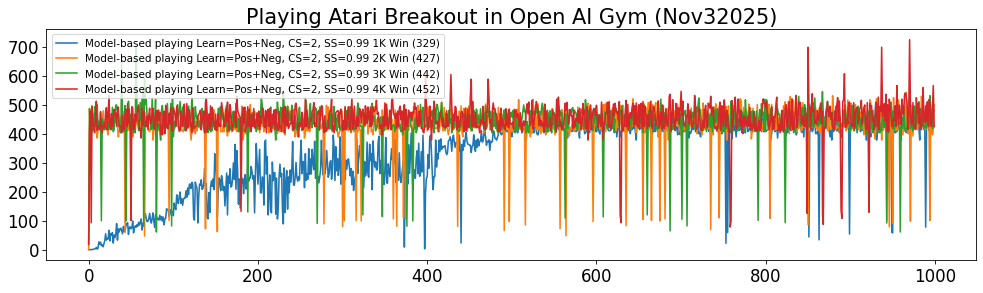

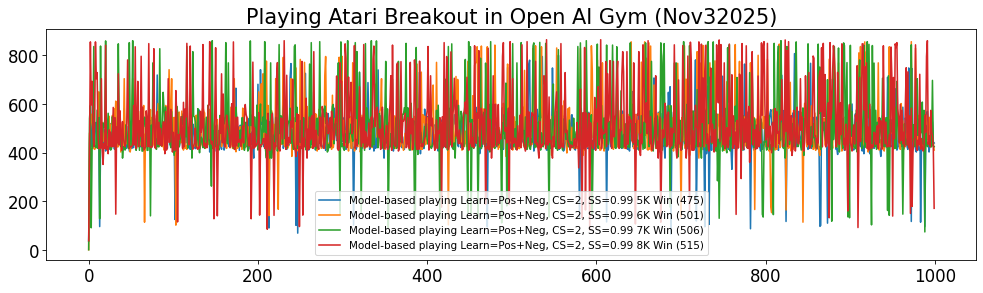

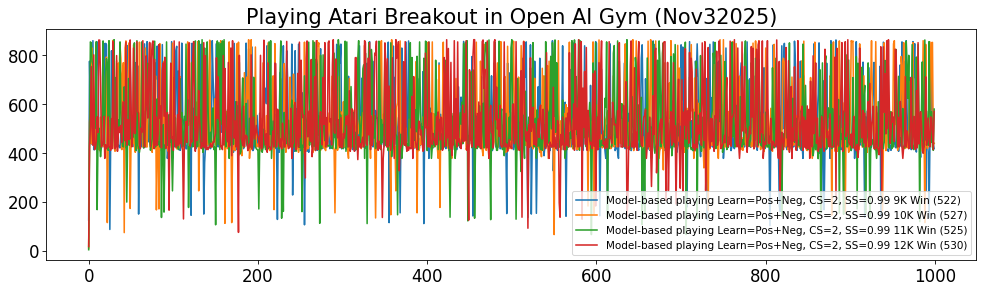

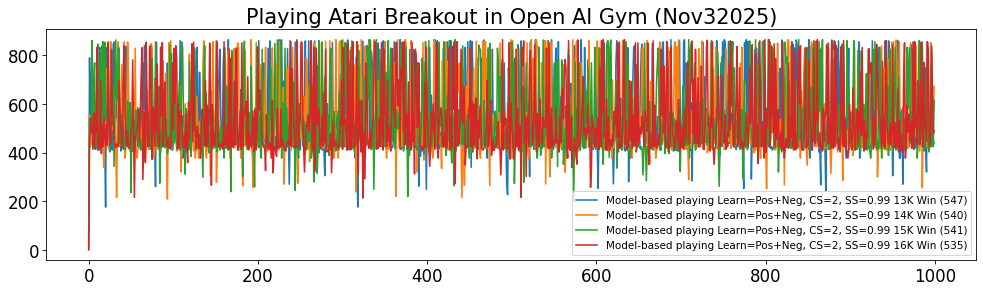

In [15]:
# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w -o=model_Nov32025_PN_CS2_SS099_251117w2K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-18 15:33:41.483445"; max_games=1000; max_steps=18000
score_avg=427.4; steps_avg=11581.5; lives_avg=0.3; lapse_avg="0:00:47.014777"; time="7:35:00.782290"
scores099w2K = [1.0, 488.0, 385.0, 466.0, 406.0, 434.0, 468.0, 444.0, 447.0, 465.0, 385.0, 411.0, 443.0, 414.0, 467.0, 425.0, 421.0, 479.0, 421.0, 414.0, 448.0, 459.0, 410.0, 396.0, 500.0, 414.0, 443.0, 449.0, 442.0, 421.0, 459.0, 437.0, 469.0, 449.0, 434.0, 389.0, 410.0, 407.0, 458.0, 410.0, 418.0, 411.0, 478.0, 59.0, 425.0, 428.0, 410.0, 421.0, 457.0, 411.0, 425.0, 450.0, 389.0, 425.0, 434.0, 411.0, 445.0, 434.0, 445.0, 421.0, 438.0, 485.0, 410.0, 425.0, 410.0, 411.0, 47.0, 434.0, 444.0, 425.0, 455.0, 411.0, 407.0, 418.0, 432.0, 469.0, 378.0, 410.0, 466.0, 425.0, 459.0, 418.0, 410.0, 482.0, 421.0, 421.0, 407.0, 421.0, 474.0, 400.0, 433.0, 425.0, 475.0, 464.0, 432.0, 101.0, 434.0, 411.0, 418.0, 407.0, 425.0, 414.0, 421.0, 443.0, 468.0, 483.0, 435.0, 407.0, 414.0, 473.0, 411.0, 411.0, 407.0, 425.0, 418.0, 445.0, 428.0, 418.0, 425.0, 473.0, 410.0, 378.0, 411.0, 450.0, 407.0, 453.0, 400.0, 442.0, 410.0, 463.0, 421.0, 436.0, 453.0, 461.0, 469.0, 466.0, 414.0, 407.0, 72.0, 480.0, 428.0, 450.0, 421.0, 464.0, 411.0, 407.0, 421.0, 482.0, 483.0, 465.0, 425.0, 407.0, 62.0, 471.0, 439.0, 492.0, 407.0, 407.0, 407.0, 433.0, 407.0, 463.0, 491.0, 414.0, 392.0, 425.0, 406.0, 443.0, 425.0, 407.0, 418.0, 477.0, 425.0, 414.0, 425.0, 407.0, 459.0, 425.0, 407.0, 418.0, 410.0, 495.0, 378.0, 393.0, 418.0, 407.0, 399.0, 476.0, 421.0, 403.0, 414.0, 500.0, 428.0, 472.0, 472.0, 472.0, 477.0, 464.0, 470.0, 418.0, 414.0, 465.0, 403.0, 474.0, 484.0, 425.0, 487.0, 407.0, 414.0, 462.0, 468.0, 425.0, 435.0, 403.0, 418.0, 455.0, 407.0, 463.0, 418.0, 417.0, 477.0, 432.0, 441.0, 400.0, 425.0, 425.0, 407.0, 435.0, 480.0, 425.0, 407.0, 407.0, 396.0, 460.0, 425.0, 483.0, 492.0, 461.0, 478.0, 464.0, 450.0, 410.0, 483.0, 483.0, 389.0, 425.0, 414.0, 389.0, 482.0, 450.0, 425.0, 425.0, 463.0, 418.0, 435.0, 385.0, 403.0, 435.0, 410.0, 411.0, 425.0, 407.0, 421.0, 470.0, 448.0, 449.0, 435.0, 468.0, 483.0, 421.0, 476.0, 425.0, 447.0, 425.0, 425.0, 418.0, 435.0, 425.0, 89.0, 411.0, 433.0, 498.0, 410.0, 492.0, 477.0, 414.0, 479.0, 421.0, 407.0, 410.0, 425.0, 414.0, 414.0, 425.0, 407.0, 389.0, 404.0, 410.0, 414.0, 479.0, 80.0, 425.0, 99.0, 428.0, 479.0, 472.0, 421.0, 410.0, 425.0, 425.0, 403.0, 439.0, 485.0, 407.0, 425.0, 418.0, 100.0, 414.0, 407.0, 483.0, 414.0, 414.0, 99.0, 418.0, 483.0, 425.0, 425.0, 467.0, 488.0, 474.0, 399.0, 425.0, 425.0, 479.0, 407.0, 414.0, 396.0, 437.0, 493.0, 432.0, 425.0, 450.0, 418.0, 425.0, 396.0, 458.0, 414.0, 482.0, 425.0, 460.0, 414.0, 443.0, 414.0, 484.0, 414.0, 425.0, 428.0, 425.0, 451.0, 411.0, 106.0, 411.0, 482.0, 418.0, 81.0, 437.0, 425.0, 421.0, 414.0, 414.0, 479.0, 432.0, 110.0, 496.0, 407.0, 107.0, 464.0, 433.0, 411.0, 461.0, 425.0, 425.0, 425.0, 396.0, 493.0, 414.0, 477.0, 414.0, 439.0, 497.0, 425.0, 464.0, 457.0, 440.0, 479.0, 411.0, 425.0, 437.0, 486.0, 504.0, 410.0, 492.0, 477.0, 462.0, 444.0, 414.0, 438.0, 421.0, 472.0, 425.0, 418.0, 418.0, 421.0, 470.0, 406.0, 425.0, 472.0, 508.0, 452.0, 410.0, 491.0, 410.0, 432.0, 425.0, 414.0, 396.0, 414.0, 471.0, 486.0, 482.0, 411.0, 425.0, 418.0, 421.0, 453.0, 425.0, 80.0, 432.0, 478.0, 411.0, 496.0, 407.0, 389.0, 487.0, 480.0, 418.0, 489.0, 407.0, 424.0, 495.0, 440.0, 466.0, 410.0, 425.0, 506.0, 421.0, 421.0, 435.0, 421.0, 482.0, 421.0, 466.0, 425.0, 432.0, 435.0, 428.0, 490.0, 403.0, 467.0, 502.0, 470.0, 425.0, 484.0, 489.0, 414.0, 425.0, 418.0, 425.0, 491.0, 484.0, 428.0, 441.0, 421.0, 407.0, 491.0, 411.0, 425.0, 446.0, 425.0, 407.0, 466.0, 66.0, 473.0, 461.0, 414.0, 449.0, 483.0, 97.0, 410.0, 428.0, 414.0, 407.0, 425.0, 478.0, 407.0, 425.0, 484.0, 436.0, 517.0, 456.0, 414.0, 425.0, 433.0, 425.0, 425.0, 414.0, 85.0, 417.0, 425.0, 425.0, 418.0, 425.0, 389.0, 474.0, 403.0, 518.0, 465.0, 425.0, 499.0, 414.0, 414.0, 503.0, 414.0, 421.0, 400.0, 417.0, 501.0, 407.0, 466.0, 425.0, 396.0, 410.0, 414.0, 447.0, 411.0, 462.0, 421.0, 484.0, 486.0, 417.0, 425.0, 396.0, 421.0, 501.0, 425.0, 496.0, 465.0, 73.0, 411.0, 483.0, 435.0, 435.0, 469.0, 492.0, 48.0, 478.0, 468.0, 421.0, 392.0, 421.0, 414.0, 432.0, 418.0, 425.0, 407.0, 421.0, 414.0, 418.0, 492.0, 407.0, 425.0, 441.0, 425.0, 418.0, 496.0, 421.0, 425.0, 410.0, 447.0, 502.0, 505.0, 432.0, 414.0, 433.0, 475.0, 399.0, 97.0, 410.0, 442.0, 459.0, 492.0, 433.0, 425.0, 437.0, 414.0, 442.0, 421.0, 407.0, 500.0, 425.0, 502.0, 407.0, 508.0, 425.0, 486.0, 432.0, 436.0, 433.0, 425.0, 489.0, 436.0, 421.0, 432.0, 411.0, 471.0, 421.0, 425.0, 481.0, 498.0, 432.0, 428.0, 498.0, 411.0, 407.0, 421.0, 83.0, 418.0, 414.0, 414.0, 425.0, 418.0, 464.0, 425.0, 520.0, 473.0, 433.0, 432.0, 403.0, 494.0, 443.0, 479.0, 428.0, 436.0, 425.0, 411.0, 104.0, 503.0, 403.0, 477.0, 489.0, 440.0, 507.0, 506.0, 447.0, 411.0, 101.0, 501.0, 438.0, 496.0, 486.0, 507.0, 442.0, 466.0, 389.0, 418.0, 99.0, 504.0, 478.0, 452.0, 497.0, 421.0, 106.0, 410.0, 486.0, 425.0, 378.0, 411.0, 474.0, 425.0, 421.0, 432.0, 425.0, 418.0, 480.0, 432.0, 503.0, 498.0, 437.0, 414.0, 410.0, 396.0, 501.0, 414.0, 421.0, 411.0, 425.0, 425.0, 441.0, 457.0, 414.0, 441.0, 425.0, 489.0, 425.0, 425.0, 425.0, 484.0, 487.0, 473.0, 400.0, 498.0, 522.0, 425.0, 407.0, 441.0, 396.0, 506.0, 414.0, 437.0, 486.0, 425.0, 437.0, 417.0, 442.0, 470.0, 69.0, 425.0, 425.0, 396.0, 492.0, 444.0, 503.0, 418.0, 407.0, 475.0, 110.0, 410.0, 435.0, 441.0, 478.0, 407.0, 516.0, 449.0, 494.0, 378.0, 410.0, 496.0, 425.0, 418.0, 444.0, 421.0, 498.0, 447.0, 435.0, 468.0, 459.0, 421.0, 414.0, 421.0, 421.0, 520.0, 512.0, 437.0, 425.0, 491.0, 453.0, 418.0, 481.0, 439.0, 454.0, 502.0, 483.0, 488.0, 382.0, 407.0, 488.0, 407.0, 449.0, 459.0, 421.0, 501.0, 421.0, 454.0, 440.0, 414.0, 425.0, 410.0, 444.0, 444.0, 489.0, 457.0, 467.0, 472.0, 414.0, 501.0, 108.0, 418.0, 501.0, 414.0, 421.0, 413.0, 444.0, 414.0, 473.0, 418.0, 454.0, 440.0, 414.0, 441.0, 479.0, 454.0, 496.0, 484.0, 510.0, 418.0, 466.0, 484.0, 512.0, 400.0, 528.0, 483.0, 414.0, 467.0, 515.0, 410.0, 467.0, 494.0, 407.0, 425.0, 418.0, 455.0, 466.0, 407.0, 418.0, 507.0, 421.0, 421.0, 444.0, 414.0, 410.0, 86.0, 448.0, 469.0, 425.0, 438.0, 421.0, 485.0, 499.0, 421.0, 491.0, 418.0, 457.0, 411.0, 487.0, 403.0, 425.0, 428.0, 114.0, 433.0, 411.0, 451.0, 449.0, 493.0, 411.0, 410.0, 485.0, 425.0, 414.0, 418.0, 531.0, 489.0, 456.0, 414.0, 414.0, 428.0, 421.0, 480.0, 403.0, 425.0, 434.0, 418.0, 418.0, 432.0, 425.0, 499.0, 410.0, 418.0, 516.0, 425.0, 490.0, 481.0, 505.0, 418.0, 473.0, 418.0, 411.0, 500.0, 436.0, 434.0, 414.0, 414.0, 476.0, 454.0, 414.0, 421.0, 485.0, 396.0, 436.0, 407.0, 449.0, 432.0, 433.0, 432.0, 517.0, 508.0, 403.0, 407.0, 480.0, 418.0, 382.0, 407.0, 521.0, 428.0, 414.0, 458.0, 482.0, 472.0, 378.0, 503.0, 411.0, 479.0, 421.0, 425.0, 101.0, 473.0, 425.0, 79.0, 410.0, 489.0, 418.0, 91.0, 524.0, 441.0, 417.0, 411.0, 448.0, 414.0, 516.0, 414.0, 447.0, 448.0, 421.0, 396.0, 425.0, 491.0, 410.0, 542.0, 418.0, 400.0, 435.0, 407.0, 98.0, 497.0, 448.0, 392.0, 448.0, 496.0, 457.0, 441.0, 414.0, 425.0, 457.0, 458.0, 438.0, 529.0, 489.0, 481.0, 459.0, 428.0, 414.0, 500.0, 454.0, 470.0, 414.0, 101.0, 486.0, 446.0, 396.0, 414.0, 500.0]
stepss099w2K = [18000, 12524, 18000, 11181, 9912, 10142, 11638, 10400, 11258, 11354, 18000, 10434, 10478, 10044, 11691, 10603, 9243, 12310, 9689, 10524, 11388, 18000, 9555, 9087, 13195, 10111, 10396, 11462, 10776, 10398, 11709, 10649, 11572, 18000, 10194, 8814, 9753, 18000, 18000, 9651, 9597, 10206, 12561, 5043, 10137, 10235, 9809, 9978, 11948, 9336, 11384, 11826, 18000, 9574, 9975, 9718, 11056, 10500, 18000, 9099, 10112, 12995, 9617, 9981, 9390, 9795, 4129, 9941, 10787, 18000, 12548, 9826, 9136, 9498, 10998, 11790, 18000, 9839, 11547, 10149, 10945, 9623, 9216, 12199, 9631, 18000, 10088, 9698, 11410, 9483, 9694, 10008, 11692, 18000, 10285, 6990, 9970, 9798, 9820, 9445, 10337, 9481, 10040, 11107, 11732, 11941, 10172, 9302, 9512, 11467, 9798, 9246, 9354, 9989, 10287, 10657, 9347, 9615, 9826, 12280, 10053, 18000, 10272, 11119, 9241, 18000, 9599, 18000, 9629, 18000, 10154, 18000, 10496, 18000, 11427, 18000, 9867, 9389, 5124, 12051, 10455, 11209, 9804, 18000, 9450, 9860, 10470, 11738, 12602, 11575, 9830, 9200, 4885, 11049, 10023, 12768, 9467, 9052, 10438, 10503, 9585, 18000, 12818, 9227, 18000, 10054, 9281, 10686, 10515, 9404, 9510, 11933, 9888, 10179, 9485, 18000, 11017, 18000, 10570, 9518, 18000, 13677, 18000, 9366, 10080, 18000, 9703, 10966, 10900, 9539, 18000, 13370, 10027, 11547, 11455, 11906, 11757, 11465, 11457, 18000, 9698, 11816, 8871, 18000, 12082, 9535, 14146, 9109, 9911, 11160, 18000, 10328, 10298, 9871, 9702, 18000, 9788, 11661, 10600, 10018, 11328, 10470, 10214, 9300, 9870, 18000, 10011, 9614, 11654, 18000, 9966, 9326, 9201, 11386, 18000, 12866, 13133, 10919, 12036, 18000, 11049, 18000, 18000, 11464, 18000, 9819, 9326, 18000, 11799, 11498, 10288, 11378, 11657, 10677, 10105, 18000, 9277, 9877, 11307, 10227, 10136, 10438, 10538, 11782, 11360, 18000, 10633, 11961, 11561, 9195, 12007, 10241, 18000, 9983, 10367, 10216, 9725, 10395, 5606, 10231, 10666, 12399, 9483, 12001, 11212, 18000, 12868, 9203, 10722, 9497, 9489, 9831, 9657, 10331, 9408, 18000, 9978, 9809, 9755, 11628, 18000, 10523, 5546, 10561, 11617, 12045, 10273, 10061, 9786, 10340, 18000, 10086, 11569, 10653, 10284, 11029, 5684, 10135, 10013, 11791, 9910, 10865, 5960, 9630, 12879, 9713, 11335, 11469, 12678, 11694, 9919, 9401, 9695, 12667, 9388, 10003, 18000, 9836, 12352, 10173, 9149, 11864, 10563, 9915, 18000, 18000, 10030, 11791, 9149, 11258, 10006, 18000, 9620, 11829, 9698, 11122, 9636, 12150, 11296, 10076, 6284, 9480, 12322, 10888, 5496, 10297, 9424, 10176, 10401, 9057, 11766, 10338, 6333, 11913, 9053, 5701, 11021, 10271, 10579, 18000, 11326, 10310, 10275, 9533, 11969, 9318, 18000, 9247, 10002, 12825, 9721, 18000, 18000, 10802, 11437, 9988, 9970, 10548, 12064, 12519, 9388, 11865, 18000, 18000, 10776, 9814, 11013, 10682, 11609, 9730, 9767, 9847, 9635, 11623, 9266, 9927, 11802, 11884, 11423, 9759, 11990, 10796, 9968, 10422, 10272, 9578, 10912, 11969, 11544, 12535, 10265, 10816, 10266, 10242, 11778, 11341, 5114, 9668, 12116, 10867, 12197, 9088, 18000, 12755, 18000, 10127, 12247, 18000, 10091, 11874, 10713, 11492, 18000, 10414, 12057, 10538, 10095, 10234, 10535, 12577, 10165, 18000, 9957, 10466, 10114, 9719, 11547, 9183, 18000, 11650, 18000, 11168, 11454, 12229, 10090, 9786, 9410, 10485, 12657, 12115, 9472, 10270, 10946, 9520, 11844, 10065, 9930, 10869, 9947, 18000, 11791, 4624, 11787, 11398, 10077, 11007, 12451, 6262, 10049, 10046, 10174, 9549, 10756, 18000, 18000, 10552, 11749, 10285, 13266, 18000, 10401, 10216, 10885, 9788, 9795, 10068, 5460, 10773, 9706, 9900, 9696, 11367, 18000, 11442, 9602, 13276, 18000, 9810, 13031, 10848, 10549, 12839, 10406, 10360, 9567, 9665, 12356, 9897, 18000, 9397, 18000, 18000, 9034, 18000, 9326, 12211, 10453, 11454, 18000, 9555, 10471, 18000, 9488, 12574, 9920, 12421, 11735, 5306, 10371, 12003, 10543, 10445, 18000, 12950, 18000, 12103, 11642, 9898, 9770, 10354, 9850, 10541, 10220, 10350, 9594, 10997, 9422, 9217, 12808, 10113, 10370, 11225, 10232, 9708, 11680, 10420, 9470, 10056, 18000, 12539, 12594, 10606, 10174, 11056, 12434, 9231, 6315, 18000, 10465, 10750, 11278, 9998, 10946, 9692, 10726, 10590, 10322, 18000, 18000, 10972, 12176, 18000, 12297, 9795, 12469, 9848, 10714, 9694, 10091, 12248, 9828, 9845, 9655, 9838, 11979, 10459, 10465, 12209, 12120, 9659, 9963, 12253, 9968, 10653, 9930, 5068, 10580, 10734, 10726, 10318, 18000, 18000, 10760, 13255, 11333, 10116, 9726, 9801, 12641, 11037, 11482, 18000, 10502, 10627, 10076, 6465, 12754, 9090, 18000, 11538, 18000, 12879, 12444, 18000, 10168, 6260, 12334, 10138, 12112, 12008, 11985, 10616, 18000, 18000, 9993, 6225, 12504, 11780, 11835, 12325, 10180, 6334, 9894, 12087, 9749, 18000, 10291, 18000, 10084, 10170, 10316, 10346, 10532, 11278, 9456, 12698, 12092, 10013, 10036, 9153, 18000, 11764, 10227, 10314, 10049, 9907, 9558, 10498, 11755, 9601, 10270, 10952, 11754, 18000, 10432, 10029, 11908, 12909, 11344, 9474, 11784, 12519, 10707, 9249, 10185, 9529, 12509, 10004, 18000, 18000, 11251, 9802, 10766, 10749, 11786, 18000, 10540, 9814, 18000, 12868, 10555, 12355, 10771, 9886, 11222, 6394, 18000, 10390, 10485, 11572, 9934, 12139, 11082, 12977, 18000, 9621, 12110, 18000, 10107, 11047, 10459, 12003, 10636, 9931, 11453, 12207, 10153, 9906, 10269, 18000, 12979, 12109, 10160, 10384, 12221, 11544, 10102, 11504, 18000, 11447, 11915, 11528, 11905, 18000, 9969, 18000, 10653, 11086, 18000, 10471, 12522, 10238, 11455, 18000, 10903, 18000, 9615, 10787, 10558, 11582, 18000, 11746, 11133, 9793, 12550, 6413, 9819, 13261, 10480, 10316, 9416, 10783, 10099, 12129, 9906, 18000, 10408, 9768, 18000, 12428, 11443, 11853, 12475, 11992, 10077, 12454, 11859, 18000, 9322, 13180, 11297, 9738, 11657, 12839, 9207, 11675, 11890, 9823, 10840, 9560, 11588, 12395, 9872, 10290, 12966, 10997, 18000, 10692, 10726, 9633, 5625, 11116, 12453, 9995, 10358, 10247, 11711, 12114, 10269, 12141, 9918, 12168, 10786, 12584, 9233, 10300, 9966, 6325, 10375, 9878, 11437, 11127, 11959, 10162, 18000, 12791, 10099, 9132, 10688, 13195, 11726, 12116, 10191, 9847, 18000, 10111, 12518, 9728, 10717, 10119, 12007, 10422, 10725, 10571, 13204, 10691, 11143, 12851, 10119, 11736, 11990, 11835, 10866, 12379, 10096, 10098, 12034, 10252, 10399, 9710, 9748, 18000, 18000, 18000, 10459, 11785, 9931, 10324, 18000, 11054, 9436, 9694, 10344, 12294, 11999, 18000, 10030, 12171, 10159, 18000, 9575, 12695, 10172, 10068, 18000, 11802, 12081, 18000, 12292, 10042, 18000, 10160, 10630, 5682, 13329, 11024, 5906, 18000, 12040, 10108, 18000, 12732, 18000, 9926, 10015, 11065, 10609, 12345, 9837, 10803, 11194, 10571, 18000, 9984, 18000, 10054, 12901, 10378, 9582, 18000, 10300, 5552, 12548, 11131, 18000, 11131, 12029, 11986, 11409, 10394, 10762, 11915, 18000, 18000, 12799, 12286, 12609, 11850, 10481, 10005, 12953, 11149, 13078, 10404, 5821, 11471, 10624, 18000, 10230, 12276]
livess099w2K = [3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 0, 4, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 3, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0]
lapses099w2K = [54, 19, 14, 20, 22, 19, 76, 28, 16, 46, 10, 19, 22, 17, 38, 21, 8, 29, 8, 62, 23, 49, 17, 34, 52, 17, 15, 15, 31, 29, 39, 18, 13, 18, 34, 34, 15, 12, 22, 24, 17, 27, 34, 13, 102, 22, 10, 41, 73, 12, 58, 23, 12, 31, 31, 20, 31, 22, 11, 30, 9, 23, 13, 11, 29, 29, 16, 36, 27, 9, 33, 28, 23, 31, 21, 57, 8, 27, 29, 11, 25, 18, 21, 41, 17, 15, 30, 13, 55, 17, 35, 27, 33, 14, 83, 49, 17, 17, 13, 27, 87, 13, 46, 19, 29, 15, 37, 18, 31, 61, 16, 26, 13, 12, 62, 6, 13, 36, 22, 60, 25, 11, 24, 20, 34, 11, 26, 14, 20, 22, 26, 11, 7, 29, 20, 30, 45, 26, 31, 72, 60, 50, 42, 15, 20, 39, 23, 28, 45, 30, 11, 16, 23, 25, 13, 52, 18, 12, 31, 76, 10, 22, 43, 11, 12, 35, 34, 13, 56, 18, 19, 16, 28, 23, 17, 8, 16, 26, 26, 24, 25, 34, 6, 67, 19, 8, 54, 18, 34, 23, 16, 19, 40, 20, 23, 34, 47, 9, 25, 23, 22, 20, 20, 19, 44, 12, 84, 10, 48, 16, 21, 41, 9, 22, 19, 16, 32, 14, 34, 62, 13, 29, 15, 34, 23, 15, 19, 17, 33, 18, 40, 13, 50, 28, 24, 66, 37, 9, 27, 16, 32, 20, 42, 19, 12, 17, 24, 9, 56, 34, 18, 23, 5, 14, 18, 22, 19, 29, 19, 19, 34, 13, 79, 8, 13, 7, 27, 57, 30, 15, 32, 15, 12, 21, 43, 37, 17, 22, 35, 16, 41, 40, 11, 36, 49, 17, 42, 11, 23, 12, 32, 19, 14, 31, 13, 7, 22, 12, 16, 24, 6, 14, 20, 18, 18, 36, 20, 15, 16, 78, 10, 25, 23, 20, 20, 21, 15, 10, 23, 17, 22, 22, 15, 22, 24, 13, 54, 31, 86, 16, 26, 13, 20, 19, 8, 25, 16, 19, 34, 27, 15, 62, 17, 27, 17, 37, 54, 13, 6, 23, 38, 27, 19, 28, 15, 58, 18, 75, 27, 23, 38, 22, 35, 16, 8, 66, 33, 24, 18, 7, 42, 19, 22, 19, 20, 21, 12, 15, 18, 32, 103, 18, 19, 20, 26, 14, 14, 42, 8, 37, 15, 10, 11, 49, 25, 12, 33, 23, 42, 46, 25, 78, 45, 23, 22, 66, 22, 34, 17, 17, 17, 24, 12, 23, 23, 11, 30, 49, 38, 13, 16, 47, 49, 15, 35, 34, 87, 62, 23, 49, 17, 24, 57, 46, 36, 50, 6, 25, 38, 18, 33, 18, 11, 58, 16, 41, 24, 8, 45, 27, 21, 37, 13, 21, 28, 14, 36, 42, 18, 25, 29, 11, 29, 14, 24, 21, 30, 18, 33, 17, 25, 54, 19, 20, 29, 16, 45, 19, 61, 78, 24, 17, 41, 42, 46, 18, 25, 59, 17, 10, 21, 23, 14, 21, 22, 54, 57, 50, 20, 25, 16, 26, 17, 36, 6, 30, 18, 21, 35, 24, 13, 28, 26, 31, 19, 24, 25, 24, 17, 12, 30, 62, 9, 24, 45, 27, 18, 14, 16, 40, 14, 53, 18, 45, 20, 16, 20, 23, 23, 13, 20, 10, 22, 15, 20, 52, 27, 8, 19, 15, 56, 15, 31, 31, 45, 51, 10, 23, 28, 25, 13, 13, 18, 20, 16, 22, 22, 38, 8, 22, 24, 50, 32, 33, 20, 19, 10, 21, 24, 19, 43, 9, 49, 27, 64, 51, 19, 43, 11, 33, 57, 64, 19, 35, 20, 17, 25, 23, 15, 21, 17, 11, 24, 18, 23, 26, 31, 10, 14, 15, 36, 6, 29, 20, 57, 37, 19, 28, 24, 53, 18, 13, 34, 37, 39, 23, 56, 12, 16, 16, 33, 22, 45, 16, 21, 20, 37, 24, 14, 19, 20, 15, 11, 96, 19, 17, 16, 20, 26, 26, 36, 48, 19, 14, 26, 40, 65, 12, 15, 9, 13, 59, 25, 16, 19, 11, 13, 10, 24, 20, 30, 42, 16, 15, 33, 30, 56, 25, 45, 24, 17, 54, 31, 24, 23, 8, 33, 23, 10, 26, 22, 19, 28, 11, 15, 23, 17, 20, 16, 17, 15, 20, 15, 16, 13, 17, 42, 25, 50, 25, 8, 42, 32, 19, 23, 19, 32, 18, 18, 9, 41, 27, 31, 37, 14, 14, 49, 15, 7, 32, 49, 11, 11, 29, 74, 11, 30, 23, 21, 98, 32, 10, 21, 29, 37, 20, 8, 32, 18, 41, 15, 39, 24, 60, 9, 54, 21, 14, 17, 23, 8, 28, 33, 12, 36, 82, 14, 16, 26, 34, 45, 13, 135, 34, 101, 33, 26, 33, 16, 28, 21, 15, 29, 10, 12, 63, 14, 21, 7, 22, 37, 16, 11, 15, 50, 23, 20, 19, 26, 31, 61, 11, 13, 20, 66, 30, 23, 28, 72, 27, 19, 12, 15, 32, 18, 17, 38, 17, 15, 39, 16, 42, 42, 41, 24, 28, 23, 43, 15, 33, 24, 29, 22, 71, 140, 9, 7, 18, 58, 9, 30, 47, 31, 31, 59, 14, 14, 29, 24, 33, 12, 29, 52, 20, 22, 10, 27, 27, 17, 16, 6, 25, 28, 33, 20, 17, 27, 15, 24, 33, 24, 26, 24, 11, 31, 25, 33, 13, 21, 94, 29, 16, 32, 21, 10, 22, 25, 16, 16, 21, 75, 22, 41, 17, 57, 49, 21, 81, 16, 17, 40, 19, 47, 41, 17, 38, 52, 11, 18, 32, 32, 22, 14, 9, 13, 45, 29, 25, 7, 64, 24, 36, 20, 56, 24, 9, 18, 33, 38, 27, 12, 9, 51, 66, 11, 13, 17, 9, 17, 20, 41, 14, 25, 27, 57, 23, 22, 18, 33, 10, 18, 37, 20, 25, 39, 17, 17, 42, 27, 16, 59, 18, 19, 37, 24, 14, 16, 20, 26, 19, 17, 11, 48, 33, 25, 18, 18, 11, 44, 21, 17, 43, 16, 20, 62, 51, 26, 34, 12, 14, 51, 22, 74, 31, 42, 26, 17, 10, 21, 47]
states099w2K = [22574, 22575, 22576, 22582, 22585, 22586, 22591, 22597, 22598, 22602, 22602, 22602, 22606, 22607, 22613, 22616, 22620, 22627, 22627, 22629, 22633, 22647, 22649, 22649, 22662, 22666, 22667, 22670, 22675, 22676, 22679, 22681, 22683, 22688, 22691, 22691, 22694, 22694, 22698, 22700, 22703, 22705, 22710, 22710, 22717, 22718, 22721, 22726, 22738, 22739, 22743, 22748, 22750, 22754, 22755, 22758, 22760, 22762, 22769, 22773, 22773, 22775, 22777, 22777, 22778, 22780, 22782, 22786, 22788, 22788, 22797, 22799, 22803, 22806, 22810, 22814, 22815, 22816, 22826, 22828, 22830, 22833, 22834, 22840, 22843, 22845, 22845, 22847, 22851, 22853, 22853, 22856, 22860, 22861, 22867, 22870, 22872, 22873, 22873, 22875, 22876, 22883, 22885, 22885, 22887, 22888, 22893, 22894, 22897, 22901, 22905, 22908, 22909, 22909, 22911, 22912, 22912, 22913, 22914, 22919, 22922, 22922, 22924, 22924, 22927, 22928, 22931, 22931, 22933, 22941, 22945, 22947, 22947, 22948, 22948, 22950, 22951, 22954, 22958, 22967, 22969, 22974, 22976, 22981, 22981, 22984, 22986, 22988, 22993, 23000, 23003, 23003, 23005, 23006, 23010, 23023, 23024, 23025, 23026, 23029, 23031, 23035, 23039, 23041, 23042, 23044, 23048, 23049, 23052, 23054, 23056, 23059, 23061, 23065, 23066, 23067, 23068, 23071, 23072, 23075, 23077, 23079, 23080, 23085, 23088, 23088, 23092, 23095, 23096, 23101, 23101, 23103, 23108, 23110, 23116, 23123, 23130, 23131, 23133, 23136, 23138, 23141, 23142, 23145, 23148, 23149, 23161, 23161, 23170, 23170, 23172, 23172, 23173, 23173, 23175, 23177, 23177, 23180, 23183, 23185, 23189, 23192, 23194, 23194, 23195, 23195, 23195, 23195, 23196, 23202, 23205, 23208, 23209, 23211, 23214, 23220, 23224, 23225, 23228, 23231, 23237, 23240, 23244, 23245, 23246, 23246, 23247, 23247, 23253, 23259, 23260, 23262, 23262, 23262, 23265, 23265, 23266, 23268, 23271, 23271, 23274, 23275, 23275, 23286, 23286, 23286, 23288, 23291, 23292, 23292, 23296, 23298, 23299, 23301, 23304, 23305, 23307, 23308, 23310, 23311, 23314, 23325, 23326, 23332, 23341, 23342, 23345, 23347, 23348, 23348, 23351, 23352, 23352, 23355, 23355, 23355, 23355, 23355, 23355, 23357, 23357, 23357, 23358, 23360, 23361, 23364, 23364, 23364, 23364, 23367, 23370, 23372, 23373, 23377, 23378, 23381, 23385, 23385, 23385, 23390, 23392, 23393, 23397, 23397, 23398, 23398, 23398, 23401, 23406, 23407, 23408, 23410, 23410, 23414, 23414, 23416, 23419, 23420, 23425, 23428, 23428, 23437, 23439, 23440, 23440, 23444, 23448, 23449, 23449, 23451, 23452, 23456, 23459, 23460, 23460, 23461, 23462, 23470, 23472, 23474, 23482, 23485, 23486, 23487, 23487, 23490, 23494, 23496, 23497, 23498, 23501, 23503, 23505, 23506, 23509, 23512, 23515, 23516, 23517, 23524, 23531, 23534, 23534, 23535, 23538, 23539, 23539, 23540, 23544, 23545, 23548, 23549, 23550, 23555, 23558, 23558, 23560, 23562, 23566, 23572, 23575, 23582, 23587, 23590, 23592, 23600, 23601, 23602, 23603, 23603, 23607, 23611, 23612, 23614, 23614, 23615, 23621, 23629, 23634, 23636, 23637, 23640, 23649, 23652, 23652, 23654, 23657, 23668, 23670, 23672, 23673, 23674, 23675, 23676, 23686, 23686, 23689, 23690, 23695, 23696, 23702, 23702, 23703, 23709, 23710, 23712, 23713, 23714, 23714, 23716, 23719, 23722, 23722, 23723, 23724, 23724, 23726, 23731, 23734, 23735, 23735, 23739, 23741, 23741, 23741, 23742, 23742, 23743, 23745, 23747, 23751, 23751, 23755, 23756, 23757, 23757, 23759, 23761, 23768, 23774, 23776, 23777, 23779, 23780, 23783, 23783, 23783, 23789, 23791, 23791, 23792, 23793, 23794, 23797, 23798, 23803, 23806, 23812, 23814, 23814, 23816, 23818, 23819, 23822, 23822, 23825, 23831, 23831, 23833, 23836, 23837, 23837, 23838, 23838, 23840, 23841, 23844, 23845, 23846, 23848, 23849, 23850, 23854, 23854, 23854, 23857, 23860, 23860, 23860, 23862, 23865, 23872, 23873, 23873, 23876, 23876, 23877, 23879, 23880, 23881, 23883, 23883, 23885, 23888, 23889, 23892, 23894, 23894, 23895, 23896, 23897, 23898, 23899, 23902, 23902, 23905, 23906, 23909, 23910, 23913, 23914, 23916, 23917, 23917, 23917, 23919, 23921, 23925, 23927, 23928, 23928, 23931, 23933, 23934, 23934, 23934, 23934, 23936, 23937, 23938, 23941, 23944, 23945, 23947, 23955, 23960, 23962, 23965, 23965, 23969, 23977, 23981, 23982, 23982, 23982, 23982, 23985, 23987, 23987, 23988, 23989, 23990, 23992, 23994, 23994, 23996, 23998, 23998, 24000, 24000, 24001, 24001, 24001, 24002, 24009, 24010, 24012, 24013, 24014, 24018, 24023, 24023, 24024, 24025, 24026, 24029, 24030, 24032, 24034, 24034, 24036, 24038, 24038, 24039, 24039, 24040, 24043, 24046, 24046, 24047, 24049, 24049, 24050, 24059, 24060, 24061, 24063, 24063, 24064, 24069, 24072, 24072, 24073, 24073, 24074, 24077, 24085, 24087, 24087, 24087, 24087, 24095, 24095, 24096, 24096, 24097, 24098, 24099, 24099, 24099, 24103, 24104, 24105, 24105, 24107, 24108, 24110, 24112, 24117, 24121, 24123, 24130, 24133, 24136, 24138, 24138, 24138, 24141, 24141, 24141, 24142, 24144, 24148, 24149, 24150, 24150, 24150, 24151, 24151, 24151, 24152, 24153, 24153, 24153, 24154, 24155, 24156, 24158, 24161, 24163, 24163, 24163, 24165, 24167, 24169, 24170, 24172, 24174, 24175, 24176, 24179, 24180, 24180, 24187, 24188, 24189, 24195, 24196, 24196, 24199, 24199, 24200, 24202, 24203, 24208, 24210, 24210, 24213, 24214, 24221, 24224, 24225, 24225, 24225, 24229, 24230, 24231, 24233, 24234, 24235, 24237, 24238, 24240, 24246, 24248, 24252, 24252, 24252, 24254, 24255, 24255, 24256, 24260, 24260, 24262, 24272, 24272, 24274, 24276, 24279, 24282, 24285, 24290, 24292, 24299, 24304, 24304, 24306, 24307, 24308, 24311, 24312, 24314, 24314, 24315, 24321, 24321, 24322, 24322, 24322, 24323, 24325, 24325, 24325, 24328, 24329, 24329, 24330, 24331, 24332, 24337, 24337, 24337, 24337, 24340, 24341, 24341, 24343, 24347, 24348, 24349, 24349, 24350, 24354, 24355, 24356, 24356, 24356, 24357, 24359, 24360, 24360, 24366, 24368, 24370, 24371, 24371, 24375, 24375, 24377, 24378, 24379, 24381, 24383, 24386, 24388, 24388, 24389, 24392, 24394, 24398, 24400, 24403, 24404, 24411, 24412, 24412, 24417, 24419, 24420, 24421, 24422, 24428, 24429, 24429, 24430, 24433, 24434, 24434, 24434, 24436, 24437, 24438, 24439, 24439, 24439, 24440, 24440, 24441, 24442, 24443, 24444, 24445, 24446, 24446, 24448, 24449, 24449, 24450, 24454, 24456, 24456, 24457, 24458, 24458, 24458, 24461, 24464, 24466, 24466, 24469, 24471, 24471, 24472, 24476, 24478, 24479, 24480, 24482, 24482, 24484, 24484, 24484, 24486, 24488, 24491, 24492, 24494, 24495, 24495, 24496, 24497, 24498, 24499, 24501, 24504, 24505, 24508, 24508, 24513, 24513, 24515, 24515, 24516, 24517, 24517, 24518, 24520, 24523, 24525, 24525, 24525, 24530, 24531, 24531, 24531, 24532, 24532, 24533, 24535, 24541, 24541, 24544, 24545, 24548, 24550, 24551, 24551, 24551, 24552, 24553, 24553, 24556, 24557, 24557, 24559, 24559, 24560, 24561, 24561, 24562, 24563, 24563, 24563, 24567, 24568, 24570, 24571, 24573, 24574, 24574, 24574, 24577, 24578, 24581, 24581, 24583, 24584, 24587, 24588, 24589, 24594, 24595, 24595, 24597, 24598, 24601, 24603, 24604, 24604, 24608, 24609, 24616, 24617, 24619, 24619, 24620, 24620, 24621, 24623]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w2K -o=model_Nov32025_PN_CS2_SS099_251117w3K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-01 12:34:15.263670"; max_games=1000; max_steps=18000
score_avg=441.9; steps_avg=11944.2; lives_avg=0.2; lapse_avg="0:00:25.921692"; time="7:59:12.716725"
scores099w3K = [23.0, 485.0, 428.0, 449.0, 496.0, 410.0, 418.0, 493.0, 439.0, 425.0, 501.0, 432.0, 442.0, 425.0, 425.0, 100.0, 453.0, 441.0, 414.0, 414.0, 418.0, 421.0, 414.0, 414.0, 439.0, 432.0, 444.0, 414.0, 491.0, 407.0, 414.0, 454.0, 498.0, 499.0, 474.0, 477.0, 425.0, 410.0, 403.0, 652.0, 414.0, 407.0, 414.0, 497.0, 99.0, 432.0, 425.0, 512.0, 458.0, 417.0, 468.0, 442.0, 425.0, 403.0, 446.0, 403.0, 701.0, 473.0, 445.0, 411.0, 448.0, 508.0, 445.0, 517.0, 549.0, 81.0, 591.0, 501.0, 518.0, 462.0, 442.0, 466.0, 459.0, 448.0, 414.0, 524.0, 418.0, 428.0, 421.0, 518.0, 61.0, 421.0, 417.0, 434.0, 414.0, 378.0, 481.0, 497.0, 467.0, 418.0, 425.0, 421.0, 421.0, 504.0, 425.0, 437.0, 435.0, 503.0, 82.0, 519.0, 389.0, 425.0, 444.0, 433.0, 479.0, 500.0, 455.0, 471.0, 511.0, 468.0, 425.0, 492.0, 479.0, 425.0, 411.0, 421.0, 461.0, 483.0, 495.0, 448.0, 425.0, 471.0, 525.0, 414.0, 424.0, 439.0, 493.0, 464.0, 449.0, 439.0, 425.0, 444.0, 418.0, 414.0, 487.0, 443.0, 425.0, 407.0, 403.0, 508.0, 467.0, 403.0, 433.0, 425.0, 407.0, 421.0, 411.0, 474.0, 425.0, 425.0, 414.0, 421.0, 410.0, 487.0, 487.0, 449.0, 489.0, 496.0, 452.0, 451.0, 421.0, 452.0, 425.0, 498.0, 407.0, 473.0, 421.0, 425.0, 414.0, 435.0, 466.0, 477.0, 425.0, 443.0, 504.0, 425.0, 452.0, 407.0, 452.0, 410.0, 452.0, 468.0, 407.0, 437.0, 466.0, 491.0, 435.0, 448.0, 130.0, 461.0, 434.0, 468.0, 447.0, 459.0, 439.0, 477.0, 428.0, 449.0, 407.0, 418.0, 432.0, 447.0, 428.0, 466.0, 525.0, 501.0, 458.0, 425.0, 428.0, 425.0, 445.0, 463.0, 463.0, 425.0, 453.0, 492.0, 444.0, 421.0, 433.0, 437.0, 421.0, 378.0, 457.0, 509.0, 480.0, 414.0, 453.0, 491.0, 461.0, 442.0, 545.0, 489.0, 403.0, 434.0, 485.0, 495.0, 434.0, 471.0, 446.0, 458.0, 498.0, 481.0, 410.0, 418.0, 463.0, 418.0, 414.0, 452.0, 414.0, 491.0, 446.0, 433.0, 411.0, 425.0, 444.0, 467.0, 456.0, 515.0, 465.0, 437.0, 432.0, 483.0, 504.0, 435.0, 421.0, 471.0, 433.0, 492.0, 485.0, 486.0, 91.0, 428.0, 411.0, 492.0, 460.0, 497.0, 460.0, 425.0, 435.0, 410.0, 421.0, 414.0, 447.0, 418.0, 418.0, 479.0, 418.0, 468.0, 418.0, 446.0, 494.0, 418.0, 454.0, 410.0, 464.0, 466.0, 425.0, 414.0, 418.0, 433.0, 432.0, 444.0, 414.0, 489.0, 465.0, 479.0, 425.0, 439.0, 425.0, 493.0, 407.0, 484.0, 478.0, 425.0, 414.0, 414.0, 421.0, 467.0, 506.0, 455.0, 442.0, 425.0, 425.0, 425.0, 120.0, 473.0, 443.0, 428.0, 444.0, 441.0, 456.0, 459.0, 442.0, 440.0, 454.0, 505.0, 442.0, 460.0, 448.0, 410.0, 425.0, 425.0, 457.0, 444.0, 442.0, 456.0, 404.0, 114.0, 460.0, 410.0, 432.0, 460.0, 460.0, 450.0, 425.0, 455.0, 456.0, 425.0, 414.0, 425.0, 432.0, 425.0, 407.0, 425.0, 463.0, 451.0, 451.0, 424.0, 432.0, 407.0, 421.0, 396.0, 414.0, 421.0, 425.0, 425.0, 81.0, 414.0, 450.0, 465.0, 459.0, 425.0, 414.0, 99.0, 418.0, 421.0, 454.0, 403.0, 414.0, 451.0, 448.0, 425.0, 501.0, 464.0, 425.0, 491.0, 453.0, 421.0, 428.0, 425.0, 454.0, 432.0, 459.0, 421.0, 460.0, 462.0, 480.0, 432.0, 403.0, 487.0, 435.0, 501.0, 499.0, 480.0, 421.0, 474.0, 469.0, 508.0, 470.0, 434.0, 425.0, 418.0, 471.0, 448.0, 468.0, 425.0, 481.0, 437.0, 451.0, 403.0, 462.0, 444.0, 421.0, 455.0, 480.0, 432.0, 417.0, 407.0, 407.0, 447.0, 425.0, 461.0, 455.0, 469.0, 458.0, 456.0, 421.0, 460.0, 428.0, 461.0, 464.0, 418.0, 461.0, 410.0, 443.0, 481.0, 461.0, 421.0, 485.0, 421.0, 462.0, 436.0, 444.0, 486.0, 450.0, 433.0, 462.0, 471.0, 410.0, 496.0, 418.0, 463.0, 458.0, 480.0, 469.0, 476.0, 410.0, 403.0, 473.0, 425.0, 475.0, 418.0, 469.0, 410.0, 403.0, 421.0, 470.0, 445.0, 414.0, 437.0, 469.0, 482.0, 447.0, 463.0, 441.0, 469.0, 470.0, 425.0, 466.0, 473.0, 457.0, 479.0, 421.0, 418.0, 403.0, 461.0, 425.0, 411.0, 443.0, 439.0, 464.0, 433.0, 452.0, 476.0, 499.0, 476.0, 478.0, 403.0, 442.0, 411.0, 403.0, 451.0, 479.0, 462.0, 480.0, 467.0, 477.0, 464.0, 472.0, 492.0, 471.0, 486.0, 468.0, 475.0, 464.0, 485.0, 505.0, 487.0, 425.0, 473.0, 407.0, 407.0, 481.0, 407.0, 470.0, 479.0, 445.0, 403.0, 469.0, 432.0, 472.0, 411.0, 465.0, 463.0, 421.0, 425.0, 446.0, 479.0, 462.0, 472.0, 414.0, 411.0, 417.0, 109.0, 466.0, 450.0, 418.0, 418.0, 483.0, 475.0, 471.0, 486.0, 490.0, 466.0, 481.0, 473.0, 470.0, 414.0, 414.0, 477.0, 435.0, 459.0, 476.0, 485.0, 463.0, 414.0, 459.0, 517.0, 478.0, 414.0, 421.0, 481.0, 463.0, 488.0, 425.0, 428.0, 410.0, 487.0, 436.0, 487.0, 469.0, 411.0, 461.0, 466.0, 463.0, 442.0, 469.0, 414.0, 113.0, 428.0, 476.0, 432.0, 428.0, 417.0, 481.0, 421.0, 432.0, 480.0, 464.0, 418.0, 472.0, 407.0, 481.0, 487.0, 479.0, 467.0, 455.0, 425.0, 480.0, 471.0, 496.0, 468.0, 456.0, 425.0, 466.0, 442.0, 425.0, 414.0, 449.0, 435.0, 472.0, 414.0, 464.0, 496.0, 445.0, 435.0, 436.0, 472.0, 469.0, 456.0, 418.0, 491.0, 502.0, 435.0, 453.0, 404.0, 462.0, 478.0, 425.0, 425.0, 120.0, 425.0, 480.0, 425.0, 462.0, 458.0, 479.0, 407.0, 463.0, 467.0, 432.0, 425.0, 414.0, 443.0, 418.0, 472.0, 519.0, 441.0, 425.0, 471.0, 472.0, 425.0, 437.0, 462.0, 437.0, 466.0, 410.0, 65.0, 471.0, 432.0, 414.0, 425.0, 442.0, 417.0, 471.0, 488.0, 471.0, 435.0, 488.0, 425.0, 466.0, 105.0, 463.0, 463.0, 475.0, 480.0, 421.0, 82.0, 473.0, 410.0, 481.0, 481.0, 458.0, 455.0, 474.0, 428.0, 418.0, 417.0, 491.0, 492.0, 475.0, 523.0, 476.0, 483.0, 438.0, 414.0, 411.0, 484.0, 466.0, 467.0, 407.0, 477.0, 468.0, 425.0, 463.0, 421.0, 476.0, 407.0, 479.0, 483.0, 435.0, 483.0, 439.0, 486.0, 466.0, 418.0, 481.0, 494.0, 399.0, 407.0, 498.0, 407.0, 425.0, 418.0, 418.0, 466.0, 428.0, 410.0, 421.0, 512.0, 403.0, 473.0, 463.0, 479.0, 437.0, 425.0, 463.0, 410.0, 432.0, 421.0, 483.0, 443.0, 475.0, 472.0, 418.0, 410.0, 517.0, 453.0, 428.0, 432.0, 471.0, 482.0, 411.0, 476.0, 411.0, 479.0, 435.0, 447.0, 421.0, 478.0, 414.0, 101.0, 456.0, 483.0, 418.0, 503.0, 459.0, 474.0, 407.0, 519.0, 411.0, 517.0, 453.0, 428.0, 467.0, 428.0, 486.0, 485.0, 449.0, 414.0, 445.0, 461.0, 474.0, 482.0, 485.0, 466.0, 468.0, 435.0, 425.0, 476.0, 425.0, 480.0, 432.0, 93.0, 411.0, 421.0, 486.0, 425.0, 417.0, 435.0, 473.0, 425.0, 477.0, 403.0, 428.0, 407.0, 425.0, 477.0, 463.0, 529.0, 472.0, 425.0, 433.0, 490.0, 490.0, 448.0, 500.0, 435.0, 470.0, 410.0, 425.0, 495.0, 425.0, 421.0, 504.0, 425.0, 506.0, 425.0, 523.0, 438.0, 437.0, 457.0, 425.0, 435.0, 483.0, 432.0, 477.0, 545.0, 464.0, 418.0, 432.0, 473.0, 489.0, 512.0, 458.0, 459.0, 459.0, 467.0, 428.0, 474.0, 443.0, 411.0, 432.0, 495.0, 478.0, 435.0, 428.0, 424.0, 425.0, 434.0, 425.0, 425.0, 481.0, 436.0, 481.0, 425.0, 425.0, 491.0, 477.0, 403.0, 407.0, 417.0, 498.0, 463.0, 410.0, 417.0, 446.0, 486.0, 410.0, 495.0, 473.0, 424.0, 455.0, 414.0, 432.0, 442.0, 492.0, 457.0, 414.0, 396.0, 466.0, 477.0, 470.0, 482.0, 470.0, 418.0, 480.0, 403.0, 463.0, 436.0, 425.0, 506.0, 421.0, 403.0, 480.0, 403.0, 421.0, 411.0, 475.0, 442.0, 421.0, 465.0, 480.0, 92.0, 487.0, 403.0, 421.0, 497.0, 509.0, 478.0, 418.0, 479.0, 411.0, 488.0, 436.0, 475.0, 488.0, 425.0, 421.0, 61.0, 439.0, 428.0, 418.0, 496.0, 428.0, 407.0, 418.0, 418.0, 474.0, 472.0, 480.0, 417.0, 454.0, 425.0, 410.0, 494.0, 480.0, 425.0, 428.0, 486.0, 441.0, 510.0, 473.0, 485.0, 484.0, 425.0, 425.0, 421.0, 421.0, 440.0, 418.0, 468.0, 435.0, 425.0, 531.0, 474.0, 468.0, 418.0, 480.0, 478.0]
stepss099w3K = [2940, 12695, 10844, 11177, 11682, 10132, 10575, 18000, 10084, 9632, 11644, 10509, 18000, 10773, 10628, 6101, 10758, 10272, 10231, 10121, 10048, 18000, 10168, 10155, 11073, 18000, 18000, 10228, 11848, 9814, 11002, 18000, 12128, 12440, 11775, 11257, 10311, 9809, 18000, 12327, 9674, 10094, 10466, 12137, 6125, 10334, 10199, 12337, 11810, 9720, 18000, 10348, 10123, 9233, 10837, 18000, 12899, 11416, 10817, 9854, 18000, 12416, 10728, 12392, 12224, 6165, 12446, 12356, 12134, 11606, 10832, 18000, 11160, 18000, 10135, 12526, 9749, 10091, 10387, 11989, 18000, 10581, 9895, 9681, 10337, 18000, 12709, 12180, 12628, 9920, 10735, 10683, 10482, 12396, 10953, 9934, 18000, 12572, 5794, 11921, 18000, 10095, 10905, 11040, 18000, 11929, 11412, 18000, 12609, 12701, 10024, 12335, 18000, 10531, 10327, 18000, 12148, 12314, 12398, 10778, 10451, 12875, 13632, 10329, 9838, 10088, 12143, 12065, 10964, 10898, 10203, 11160, 18000, 9942, 11955, 11185, 11019, 18000, 9839, 12664, 12007, 10041, 10976, 10747, 18000, 10438, 10364, 12824, 10850, 10212, 9808, 10177, 11171, 12040, 11810, 11185, 12623, 11880, 18000, 18000, 10886, 10963, 10138, 11948, 10691, 18000, 10473, 10596, 9954, 9853, 11985, 18000, 10583, 10254, 12481, 10654, 11084, 18000, 18000, 9861, 10866, 12838, 9827, 9959, 12368, 11875, 18000, 11056, 6880, 18000, 9941, 12709, 10435, 18000, 10425, 12165, 9721, 11171, 18000, 18000, 10631, 10512, 9725, 12545, 13632, 13195, 18000, 10950, 9856, 10643, 10666, 12114, 11343, 10751, 10949, 12308, 10787, 10606, 10485, 9930, 9817, 18000, 12584, 12016, 12004, 9979, 11144, 11678, 18000, 18000, 13319, 11441, 18000, 10115, 12483, 13920, 10368, 18000, 18000, 11105, 11997, 12338, 9621, 18000, 12035, 9575, 9676, 18000, 9247, 13510, 10794, 18000, 9934, 18000, 18000, 11377, 11343, 12441, 12025, 9959, 10246, 11715, 13448, 10106, 11164, 12225, 9992, 12982, 11642, 12909, 5766, 10228, 9656, 12101, 10752, 12432, 11508, 11165, 10280, 18000, 10749, 10404, 10530, 18000, 10435, 11803, 10825, 18000, 10068, 10501, 12285, 10092, 11122, 9809, 18000, 12320, 9776, 10436, 10369, 10193, 10383, 18000, 10139, 11578, 12194, 11733, 9977, 10743, 10115, 13977, 10048, 18000, 12452, 10963, 9954, 10900, 10942, 12405, 12125, 11017, 10182, 10199, 10368, 10563, 6515, 12690, 18000, 10497, 18000, 10424, 11241, 11234, 18000, 10577, 11378, 13838, 10489, 11392, 11272, 9809, 10548, 10747, 18000, 10603, 10565, 11211, 9860, 6618, 11388, 18000, 9581, 11424, 11145, 18000, 18000, 11446, 11441, 9952, 9954, 10467, 10062, 10033, 9332, 9910, 11361, 10510, 11186, 10522, 9730, 10133, 10997, 9034, 18000, 9634, 10384, 9940, 5495, 10139, 10912, 11635, 12081, 10635, 10590, 5697, 9855, 9724, 11094, 9525, 10839, 11015, 11121, 10778, 13945, 11638, 10751, 12727, 10726, 10421, 10107, 10755, 11094, 10754, 18000, 10946, 11589, 11701, 13115, 9735, 9761, 12195, 18000, 12378, 12010, 12495, 10025, 12501, 11516, 12182, 11703, 9836, 10074, 9983, 12350, 10888, 18000, 10621, 12425, 18000, 10941, 9529, 11317, 18000, 10176, 18000, 12369, 10434, 10547, 10659, 9258, 10978, 9995, 11462, 11056, 11663, 12101, 11123, 10551, 11504, 10562, 11412, 11969, 9991, 11452, 9853, 10516, 11788, 11458, 10217, 12706, 10735, 12271, 9742, 18000, 12032, 11828, 10351, 18000, 11284, 18000, 13622, 10755, 11537, 11684, 12369, 11766, 12126, 9857, 18000, 12103, 10435, 12117, 10300, 11985, 9621, 9529, 10467, 12010, 10739, 10484, 10734, 11989, 12067, 10994, 11753, 18000, 12298, 12792, 10861, 11383, 12379, 12597, 12366, 10213, 10472, 18000, 11652, 10057, 10867, 18000, 10332, 18000, 10308, 18000, 12387, 12522, 11742, 11434, 9525, 10780, 10867, 18000, 11568, 12266, 11970, 11826, 11353, 18000, 11969, 11633, 12291, 12112, 13051, 11172, 12016, 11432, 12420, 12933, 12190, 10344, 12383, 18000, 10653, 11875, 18000, 12370, 13102, 10506, 9301, 11479, 9460, 11751, 10867, 11511, 11298, 10293, 10245, 10874, 12082, 11074, 11760, 9906, 9600, 9104, 6597, 11393, 10881, 10249, 10601, 11779, 11893, 11671, 12080, 13173, 11380, 11766, 12105, 11669, 9911, 10419, 11998, 10158, 11875, 13190, 11944, 18000, 9872, 12296, 13307, 12327, 10368, 10570, 12156, 12397, 12114, 10486, 10397, 18000, 12662, 10982, 12974, 11078, 10176, 18000, 11790, 12042, 10368, 12186, 10137, 6451, 10549, 11712, 18000, 18000, 10268, 11988, 10459, 10154, 12495, 11468, 9986, 11626, 18000, 12696, 13838, 13647, 11448, 18000, 10840, 11826, 12125, 11845, 11526, 18000, 10792, 11383, 10572, 10430, 10071, 11232, 18000, 11649, 10185, 18000, 12808, 18000, 10302, 11700, 12432, 12393, 18000, 10572, 12855, 13919, 18000, 11349, 9754, 11177, 12451, 10647, 9693, 18000, 10388, 11814, 11173, 11715, 10853, 12922, 18000, 10861, 11693, 18000, 10946, 9890, 11136, 10162, 12443, 18000, 18000, 10082, 11484, 11416, 10751, 10497, 11172, 10555, 11388, 9916, 18000, 11429, 11173, 9780, 11355, 11001, 10939, 11492, 18000, 11782, 9937, 12305, 10536, 12388, 6129, 11458, 18000, 12187, 11642, 10689, 5474, 11400, 9621, 12448, 12428, 11446, 18000, 12832, 9633, 10653, 9868, 12970, 12863, 12016, 13342, 12372, 12914, 10282, 10505, 9992, 13546, 11380, 18000, 9599, 11855, 11190, 9940, 11294, 10324, 11734, 9499, 13186, 12670, 10613, 11835, 10554, 13209, 11248, 9952, 12074, 14051, 9776, 18000, 12377, 18000, 10067, 9763, 11204, 11487, 10235, 9809, 11092, 18000, 9525, 12709, 12011, 12262, 10642, 9944, 18000, 9813, 10511, 10386, 13192, 10206, 12016, 12816, 10206, 18000, 13376, 11250, 9779, 10480, 12415, 12598, 10049, 11740, 10015, 12630, 10302, 11686, 10551, 13457, 10137, 6777, 18000, 12798, 10823, 13720, 11909, 12080, 10653, 14259, 10226, 13766, 11539, 10932, 11523, 11067, 12267, 11865, 11132, 9869, 18000, 18000, 18000, 12722, 11857, 12388, 11990, 10301, 10363, 11738, 10174, 11798, 10100, 5635, 9817, 10066, 13178, 10200, 10535, 10118, 11197, 10522, 11465, 18000, 10446, 18000, 9856, 11897, 11283, 15312, 11633, 10208, 9894, 12092, 11941, 11124, 13686, 10638, 12412, 9763, 10739, 12532, 10731, 10521, 12380, 10510, 13008, 10352, 13611, 10492, 9738, 18000, 9958, 9954, 11879, 9454, 12531, 13350, 12264, 10189, 10936, 11741, 13852, 13302, 11945, 11909, 11545, 18000, 11159, 11506, 10778, 18000, 18000, 13411, 12733, 10298, 10430, 11042, 10621, 9678, 10347, 9634, 11877, 10286, 12428, 9728, 18000, 12460, 12726, 18000, 10015, 10939, 12381, 11282, 10133, 10676, 10946, 12340, 18000, 11912, 11336, 9767, 10942, 10278, 9642, 10498, 12575, 11264, 10076, 9537, 11110, 11826, 11354, 12001, 11687, 10346, 13077, 9525, 11312, 9739, 9860, 13684, 10687, 9333, 12652, 18000, 10791, 10875, 11694, 12048, 10735, 11370, 11906, 6469, 12587, 9382, 10650, 12755, 12514, 11333, 10602, 11786, 9787, 12305, 9888, 11918, 12712, 9989, 9942, 18000, 11073, 10926, 10775, 13087, 9957, 10140, 10136, 10204, 12519, 11642, 13073, 10687, 18000, 10054, 9613, 13059, 11614, 9825, 11368, 12317, 10610, 13256, 18000, 12540, 11873, 10804, 10726, 11092, 10595, 10889, 10131, 11070, 10445, 9782, 13628, 12114, 11173, 9676, 13069, 12915]
livess099w3K = [0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w3K = [133, 44, 33, 24, 13, 75, 17, 24, 36, 16, 26, 22, 17, 75, 21, 46, 21, 14, 14, 32, 38, 11, 12, 26, 7, 25, 31, 47, 45, 11, 19, 12, 15, 47, 31, 10, 20, 37, 14, 16, 16, 53, 26, 72, 19, 15, 14, 39, 15, 65, 9, 9, 30, 7, 16, 14, 39, 16, 17, 30, 26, 24, 19, 11, 14, 12, 35, 29, 54, 54, 19, 18, 51, 23, 5, 65, 28, 51, 33, 26, 8, 17, 31, 14, 19, 8, 42, 24, 17, 41, 24, 49, 47, 32, 33, 11, 16, 30, 29, 15, 11, 12, 37, 36, 21, 15, 19, 33, 54, 69, 29, 99, 22, 20, 14, 18, 25, 22, 36, 20, 24, 84, 46, 74, 28, 29, 52, 59, 39, 42, 20, 20, 28, 28, 32, 42, 24, 16, 22, 67, 20, 70, 27, 18, 12, 17, 21, 30, 78, 36, 40, 19, 24, 24, 19, 33, 36, 36, 44, 11, 140, 21, 11, 10, 7, 13, 59, 23, 46, 16, 29, 31, 27, 29, 29, 25, 15, 17, 21, 20, 55, 62, 13, 29, 48, 81, 28, 74, 86, 11, 31, 16, 26, 25, 116, 43, 22, 30, 12, 33, 17, 28, 26, 123, 25, 56, 22, 16, 24, 54, 27, 34, 49, 19, 22, 40, 20, 31, 28, 31, 31, 13, 52, 37, 30, 11, 15, 27, 48, 25, 55, 40, 23, 38, 44, 114, 26, 43, 16, 55, 61, 52, 30, 47, 66, 19, 29, 33, 34, 56, 30, 26, 58, 54, 34, 72, 31, 31, 23, 36, 49, 23, 50, 11, 47, 69, 25, 49, 47, 87, 23, 29, 23, 20, 36, 21, 27, 35, 25, 20, 19, 50, 25, 20, 51, 32, 150, 11, 14, 15, 54, 18, 16, 15, 9, 25, 45, 19, 34, 21, 26, 15, 14, 21, 17, 16, 14, 116, 42, 16, 13, 23, 29, 30, 35, 24, 13, 21, 41, 18, 12, 16, 25, 26, 31, 59, 24, 17, 11, 52, 21, 10, 11, 12, 43, 21, 28, 11, 15, 16, 22, 17, 14, 24, 18, 26, 30, 39, 27, 19, 24, 27, 29, 14, 9, 21, 52, 33, 9, 26, 23, 11, 15, 18, 49, 20, 24, 67, 16, 29, 11, 31, 32, 33, 17, 22, 22, 16, 8, 9, 22, 12, 65, 12, 13, 64, 26, 37, 48, 19, 69, 22, 80, 25, 15, 28, 21, 23, 21, 16, 15, 40, 23, 9, 46, 30, 91, 20, 32, 24, 14, 48, 32, 42, 7, 33, 17, 43, 27, 25, 23, 25, 19, 31, 16, 10, 57, 33, 10, 34, 30, 13, 35, 27, 50, 31, 22, 10, 6, 31, 27, 33, 7, 20, 41, 26, 29, 6, 14, 16, 39, 18, 30, 18, 15, 64, 36, 12, 40, 14, 17, 12, 7, 59, 43, 40, 44, 25, 19, 23, 19, 56, 13, 27, 21, 21, 23, 10, 30, 35, 24, 22, 44, 17, 15, 13, 31, 18, 39, 16, 39, 39, 23, 24, 23, 24, 14, 28, 28, 11, 36, 48, 12, 23, 28, 8, 29, 22, 12, 23, 14, 8, 18, 29, 91, 41, 54, 33, 8, 20, 13, 26, 66, 36, 26, 21, 35, 12, 57, 37, 28, 82, 14, 51, 11, 32, 27, 32, 18, 12, 6, 15, 21, 6, 21, 43, 18, 10, 16, 15, 24, 17, 30, 25, 50, 17, 15, 41, 13, 19, 14, 22, 14, 28, 24, 14, 57, 19, 28, 42, 31, 24, 40, 17, 27, 34, 19, 14, 44, 89, 10, 36, 67, 22, 19, 20, 22, 36, 30, 34, 44, 37, 36, 31, 7, 13, 20, 41, 50, 32, 20, 19, 38, 23, 26, 13, 17, 21, 32, 20, 19, 11, 26, 26, 12, 11, 5, 54, 32, 89, 36, 7, 45, 38, 63, 35, 32, 33, 11, 16, 18, 10, 29, 31, 15, 8, 21, 27, 16, 10, 12, 19, 15, 32, 14, 16, 21, 23, 11, 16, 22, 18, 101, 11, 30, 16, 18, 29, 37, 17, 46, 16, 26, 53, 16, 28, 10, 6, 27, 14, 9, 17, 23, 40, 34, 43, 59, 8, 19, 29, 26, 8, 11, 33, 21, 17, 17, 12, 27, 23, 25, 130, 14, 75, 23, 23, 67, 17, 15, 23, 38, 27, 27, 20, 21, 13, 18, 8, 16, 21, 15, 26, 24, 12, 14, 13, 24, 35, 40, 27, 17, 20, 13, 50, 17, 18, 19, 19, 18, 17, 30, 17, 46, 25, 18, 44, 14, 19, 47, 36, 27, 14, 24, 19, 13, 13, 27, 25, 246, 5, 28, 14, 61, 19, 82, 11, 29, 15, 46, 11, 38, 29, 25, 10, 18, 29, 18, 17, 17, 21, 28, 30, 22, 29, 32, 6, 8, 30, 9, 10, 13, 21, 28, 21, 17, 9, 17, 28, 24, 14, 19, 24, 15, 29, 32, 21, 27, 19, 11, 31, 94, 58, 66, 31, 24, 21, 29, 34, 17, 28, 16, 81, 21, 19, 22, 16, 19, 35, 24, 12, 34, 48, 16, 34, 19, 29, 41, 37, 74, 19, 20, 43, 15, 13, 14, 8, 30, 30, 16, 100, 13, 29, 19, 18, 42, 24, 9, 58, 35, 13, 40, 26, 16, 21, 47, 24, 62, 33, 15, 14, 19, 22, 38, 58, 59, 21, 30, 76, 28, 38, 86, 22, 19, 26, 69, 17, 27, 45, 27, 47, 13, 55, 23, 36, 89, 11, 23, 74, 48, 35, 37, 21, 30, 22, 15, 18, 13, 55, 18, 8, 8, 9, 10, 9, 15, 42, 11, 36, 14, 19, 27, 37, 9, 16, 21, 25, 8, 32, 17, 17, 14, 27, 30, 47, 47, 17, 31, 21, 11, 10, 14, 38, 22, 21, 36, 13, 14, 19, 25, 17, 15, 19, 24, 26, 8, 51, 18, 44, 34, 24, 24, 22, 23, 12, 10, 37, 9, 26, 70, 6, 18, 19, 16, 43, 9, 45, 13, 13, 28, 12, 23, 11, 15, 20, 24, 30, 18, 20, 93, 58, 14, 33, 36, 14, 14, 27, 15, 26, 23, 13, 20, 56, 12, 7, 38, 29, 42, 31, 14, 26]
states099w3K = [24632, 24632, 24632, 24636, 24639, 24643, 24643, 24645, 24649, 24650, 24651, 24651, 24653, 24653, 24655, 24657, 24659, 24660, 24660, 24662, 24664, 24664, 24665, 24666, 24666, 24666, 24667, 24670, 24673, 24673, 24674, 24674, 24674, 24678, 24680, 24682, 24682, 24683, 24684, 24686, 24687, 24689, 24691, 24696, 24698, 24698, 24698, 24702, 24703, 24704, 24705, 24705, 24707, 24707, 24708, 24709, 24710, 24711, 24712, 24712, 24713, 24713, 24713, 24717, 24717, 24719, 24720, 24721, 24726, 24731, 24731, 24733, 24736, 24739, 24739, 24741, 24744, 24747, 24749, 24751, 24751, 24751, 24753, 24754, 24754, 24754, 24757, 24760, 24761, 24764, 24764, 24766, 24768, 24768, 24769, 24769, 24770, 24771, 24773, 24773, 24773, 24774, 24774, 24779, 24780, 24781, 24784, 24787, 24788, 24793, 24796, 24801, 24802, 24802, 24802, 24803, 24803, 24806, 24809, 24813, 24814, 24822, 24822, 24824, 24825, 24827, 24827, 24831, 24834, 24837, 24839, 24841, 24842, 24842, 24843, 24845, 24846, 24846, 24848, 24852, 24855, 24858, 24859, 24859, 24860, 24860, 24860, 24861, 24863, 24863, 24866, 24866, 24867, 24868, 24869, 24871, 24875, 24878, 24885, 24885, 24885, 24886, 24888, 24890, 24890, 24891, 24892, 24892, 24892, 24892, 24893, 24897, 24898, 24899, 24900, 24901, 24901, 24901, 24902, 24902, 24902, 24910, 24910, 24910, 24911, 24911, 24911, 24912, 24913, 24914, 24915, 24915, 24918, 24921, 24921, 24923, 24924, 24924, 24924, 24924, 24924, 24924, 24924, 24930, 24931, 24935, 24935, 24935, 24936, 24936, 24936, 24939, 24942, 24946, 24947, 24947, 24948, 24948, 24948, 24949, 24949, 24949, 24950, 24953, 24953, 24953, 24954, 24954, 24955, 24955, 24959, 24961, 24961, 24962, 24965, 24970, 24971, 24972, 24972, 24974, 24978, 24979, 24980, 24980, 24985, 24985, 24986, 24987, 24987, 24993, 24994, 24994, 24995, 24995, 24996, 24997, 25003, 25004, 25005, 25005, 25007, 25007, 25009, 25010, 25010, 25014, 25014, 25019, 25022, 25022, 25023, 25024, 25024, 25025, 25026, 25026, 25027, 25027, 25028, 25030, 25030, 25033, 25033, 25033, 25035, 25035, 25035, 25037, 25037, 25037, 25039, 25040, 25040, 25040, 25040, 25040, 25044, 25045, 25045, 25047, 25048, 25048, 25050, 25050, 25051, 25051, 25051, 25058, 25061, 25061, 25061, 25062, 25065, 25065, 25066, 25066, 25066, 25067, 25067, 25069, 25071, 25071, 25071, 25074, 25075, 25082, 25084, 25084, 25084, 25086, 25086, 25086, 25086, 25086, 25089, 25093, 25094, 25094, 25096, 25097, 25099, 25099, 25099, 25102, 25104, 25105, 25105, 25107, 25108, 25109, 25110, 25112, 25114, 25116, 25117, 25118, 25121, 25122, 25122, 25122, 25122, 25123, 25123, 25123, 25125, 25126, 25126, 25128, 25132, 25132, 25133, 25133, 25135, 25135, 25137, 25139, 25139, 25139, 25139, 25139, 25139, 25141, 25142, 25143, 25143, 25144, 25145, 25145, 25145, 25149, 25151, 25155, 25167, 25169, 25170, 25172, 25172, 25172, 25172, 25174, 25174, 25174, 25176, 25176, 25179, 25179, 25183, 25183, 25184, 25184, 25185, 25187, 25189, 25193, 25194, 25195, 25195, 25198, 25201, 25203, 25205, 25205, 25206, 25210, 25211, 25211, 25217, 25218, 25218, 25219, 25220, 25221, 25221, 25221, 25223, 25224, 25225, 25225, 25225, 25226, 25227, 25230, 25230, 25231, 25238, 25240, 25240, 25240, 25240, 25243, 25244, 25245, 25247, 25247, 25248, 25255, 25257, 25257, 25257, 25258, 25260, 25263, 25264, 25267, 25268, 25270, 25270, 25271, 25271, 25274, 25275, 25277, 25278, 25279, 25280, 25282, 25282, 25282, 25285, 25287, 25289, 25289, 25295, 25297, 25298, 25298, 25299, 25303, 25305, 25308, 25310, 25311, 25314, 25315, 25316, 25319, 25320, 25321, 25321, 25321, 25322, 25326, 25326, 25326, 25327, 25329, 25330, 25330, 25331, 25332, 25332, 25332, 25334, 25335, 25338, 25339, 25343, 25344, 25344, 25344, 25344, 25347, 25349, 25350, 25350, 25351, 25354, 25355, 25357, 25360, 25361, 25362, 25363, 25364, 25365, 25366, 25372, 25373, 25373, 25373, 25373, 25374, 25374, 25374, 25375, 25378, 25379, 25379, 25380, 25381, 25381, 25381, 25381, 25381, 25382, 25385, 25386, 25388, 25389, 25390, 25390, 25390, 25391, 25391, 25393, 25394, 25397, 25398, 25401, 25405, 25407, 25407, 25411, 25411, 25412, 25415, 25415, 25417, 25417, 25419, 25423, 25423, 25427, 25428, 25430, 25432, 25434, 25436, 25437, 25437, 25437, 25439, 25439, 25440, 25441, 25441, 25441, 25442, 25444, 25445, 25445, 25445, 25445, 25445, 25447, 25447, 25447, 25447, 25448, 25450, 25450, 25450, 25451, 25451, 25453, 25453, 25454, 25456, 25457, 25458, 25458, 25458, 25459, 25463, 25463, 25463, 25463, 25463, 25463, 25463, 25464, 25464, 25467, 25467, 25467, 25467, 25468, 25469, 25469, 25469, 25469, 25470, 25470, 25470, 25471, 25471, 25472, 25473, 25476, 25477, 25477, 25480, 25484, 25484, 25485, 25487, 25487, 25490, 25491, 25492, 25493, 25493, 25493, 25493, 25495, 25498, 25499, 25500, 25501, 25501, 25501, 25501, 25501, 25502, 25502, 25502, 25503, 25503, 25505, 25505, 25506, 25506, 25506, 25508, 25509, 25511, 25512, 25513, 25513, 25515, 25515, 25516, 25519, 25519, 25525, 25526, 25528, 25530, 25530, 25531, 25532, 25533, 25536, 25538, 25539, 25539, 25539, 25539, 25539, 25539, 25540, 25541, 25542, 25543, 25543, 25543, 25543, 25544, 25546, 25547, 25548, 25548, 25551, 25553, 25554, 25554, 25555, 25557, 25558, 25559, 25559, 25559, 25561, 25562, 25563, 25564, 25565, 25565, 25566, 25567, 25570, 25574, 25575, 25575, 25575, 25576, 25577, 25580, 25580, 25582, 25582, 25582, 25583, 25585, 25585, 25585, 25587, 25587, 25587, 25590, 25591, 25592, 25592, 25592, 25593, 25594, 25595, 25595, 25596, 25596, 25597, 25597, 25599, 25599, 25599, 25600, 25600, 25602, 25603, 25603, 25604, 25604, 25605, 25606, 25606, 25606, 25606, 25606, 25607, 25608, 25609, 25610, 25610, 25611, 25613, 25613, 25616, 25617, 25617, 25619, 25620, 25621, 25625, 25628, 25630, 25631, 25632, 25633, 25633, 25633, 25633, 25633, 25633, 25634, 25636, 25636, 25637, 25637, 25637, 25639, 25642, 25642, 25643, 25644, 25645, 25646, 25647, 25648, 25650, 25651, 25651, 25651, 25653, 25653, 25653, 25653, 25654, 25654, 25654, 25655, 25657, 25657, 25659, 25659, 25661, 25663, 25664, 25666, 25666, 25666, 25667, 25671, 25671, 25672, 25675, 25676, 25677, 25677, 25678, 25678, 25679, 25681, 25684, 25685, 25687, 25687, 25688, 25689, 25689, 25690, 25693, 25695, 25695, 25695, 25696, 25698, 25703, 25706, 25707, 25708, 25708, 25709, 25710, 25710, 25717, 25717, 25718, 25718, 25719, 25720, 25720, 25720, 25721, 25724, 25725, 25725, 25725, 25729, 25731, 25731, 25731, 25732, 25732, 25734, 25735, 25736, 25739, 25742, 25742, 25743, 25743, 25744, 25744, 25745, 25746, 25749, 25751, 25754, 25754, 25754, 25754, 25756, 25756, 25757, 25757, 25757, 25757, 25758, 25759, 25759, 25759, 25761, 25761, 25762, 25763, 25764, 25764, 25765, 25767, 25767, 25767, 25767, 25768, 25768, 25768, 25768, 25768, 25769, 25769, 25769, 25769, 25770, 25770, 25770, 25771, 25774, 25775, 25775, 25775, 25775, 25775, 25776, 25777, 25780, 25781, 25782, 25782, 25782, 25784, 25784, 25787, 25787, 25787, 25790, 25790, 25791, 25791, 25791, 25791, 25793, 25794, 25796, 25797, 25798, 25798, 25799, 25800, 25801, 25801, 25804, 25805, 25805, 25806, 25806, 25808, 25811, 25813, 25814, 25815, 25815]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w3K -o=model_Nov32025_PN_CS2_SS099_251117w4K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-03 17:55:10.592726"; max_games=1000; max_steps=18000
score_avg=451.8; steps_avg=12159.8; lives_avg=0.2; lapse_avg="0:00:13.115828"; time="7:40:04.973635"
scores099w4K = [18.0, 410.0, 477.0, 93.0, 492.0, 432.0, 432.0, 403.0, 446.0, 512.0, 411.0, 428.0, 417.0, 414.0, 476.0, 425.0, 403.0, 425.0, 437.0, 421.0, 477.0, 490.0, 414.0, 468.0, 531.0, 425.0, 414.0, 469.0, 425.0, 437.0, 484.0, 465.0, 472.0, 425.0, 473.0, 492.0, 425.0, 425.0, 428.0, 403.0, 464.0, 418.0, 414.0, 467.0, 484.0, 424.0, 504.0, 436.0, 485.0, 414.0, 101.0, 493.0, 489.0, 414.0, 425.0, 468.0, 442.0, 464.0, 488.0, 499.0, 411.0, 418.0, 385.0, 487.0, 428.0, 476.0, 474.0, 425.0, 425.0, 460.0, 414.0, 460.0, 488.0, 434.0, 441.0, 461.0, 488.0, 421.0, 414.0, 466.0, 480.0, 425.0, 481.0, 446.0, 474.0, 396.0, 428.0, 396.0, 467.0, 477.0, 400.0, 498.0, 434.0, 418.0, 417.0, 471.0, 436.0, 488.0, 425.0, 410.0, 490.0, 480.0, 464.0, 425.0, 495.0, 483.0, 424.0, 411.0, 410.0, 478.0, 465.0, 425.0, 458.0, 502.0, 421.0, 410.0, 504.0, 421.0, 484.0, 478.0, 445.0, 425.0, 403.0, 490.0, 425.0, 418.0, 425.0, 425.0, 428.0, 459.0, 467.0, 472.0, 481.0, 414.0, 442.0, 465.0, 478.0, 403.0, 508.0, 523.0, 407.0, 432.0, 468.0, 414.0, 496.0, 425.0, 491.0, 454.0, 435.0, 414.0, 467.0, 411.0, 437.0, 467.0, 425.0, 433.0, 425.0, 507.0, 486.0, 467.0, 425.0, 425.0, 483.0, 441.0, 509.0, 467.0, 411.0, 500.0, 476.0, 425.0, 410.0, 436.0, 472.0, 476.0, 421.0, 529.0, 481.0, 470.0, 460.0, 457.0, 132.0, 425.0, 489.0, 437.0, 491.0, 407.0, 425.0, 425.0, 493.0, 425.0, 484.0, 418.0, 407.0, 467.0, 425.0, 487.0, 425.0, 418.0, 444.0, 472.0, 425.0, 478.0, 414.0, 462.0, 435.0, 489.0, 486.0, 442.0, 421.0, 480.0, 403.0, 474.0, 484.0, 425.0, 486.0, 407.0, 406.0, 467.0, 434.0, 482.0, 414.0, 484.0, 442.0, 414.0, 411.0, 477.0, 421.0, 425.0, 407.0, 474.0, 489.0, 403.0, 494.0, 442.0, 428.0, 480.0, 418.0, 425.0, 435.0, 435.0, 481.0, 414.0, 442.0, 418.0, 499.0, 505.0, 474.0, 425.0, 389.0, 438.0, 425.0, 428.0, 474.0, 414.0, 418.0, 425.0, 525.0, 425.0, 480.0, 425.0, 418.0, 425.0, 456.0, 444.0, 476.0, 481.0, 507.0, 425.0, 437.0, 425.0, 464.0, 476.0, 480.0, 414.0, 473.0, 493.0, 495.0, 425.0, 403.0, 462.0, 407.0, 418.0, 418.0, 418.0, 467.0, 477.0, 480.0, 521.0, 410.0, 428.0, 403.0, 432.0, 472.0, 476.0, 479.0, 478.0, 421.0, 474.0, 485.0, 463.0, 410.0, 445.0, 414.0, 494.0, 414.0, 414.0, 472.0, 493.0, 417.0, 414.0, 467.0, 524.0, 414.0, 432.0, 495.0, 425.0, 418.0, 459.0, 425.0, 448.0, 488.0, 479.0, 437.0, 476.0, 484.0, 455.0, 432.0, 496.0, 442.0, 436.0, 492.0, 474.0, 425.0, 492.0, 425.0, 433.0, 492.0, 478.0, 477.0, 486.0, 515.0, 467.0, 474.0, 447.0, 418.0, 432.0, 421.0, 396.0, 455.0, 425.0, 506.0, 428.0, 502.0, 421.0, 417.0, 444.0, 481.0, 414.0, 512.0, 525.0, 472.0, 464.0, 454.0, 471.0, 418.0, 478.0, 425.0, 486.0, 495.0, 448.0, 477.0, 410.0, 468.0, 500.0, 414.0, 484.0, 425.0, 425.0, 481.0, 456.0, 472.0, 474.0, 444.0, 475.0, 472.0, 506.0, 484.0, 491.0, 435.0, 425.0, 476.0, 433.0, 482.0, 418.0, 421.0, 407.0, 403.0, 425.0, 599.0, 499.0, 436.0, 414.0, 446.0, 495.0, 472.0, 378.0, 443.0, 457.0, 512.0, 484.0, 435.0, 434.0, 442.0, 407.0, 447.0, 465.0, 478.0, 449.0, 425.0, 454.0, 421.0, 425.0, 421.0, 479.0, 425.0, 428.0, 448.0, 498.0, 604.0, 496.0, 414.0, 467.0, 445.0, 494.0, 490.0, 414.0, 460.0, 425.0, 421.0, 447.0, 472.0, 477.0, 464.0, 407.0, 410.0, 488.0, 411.0, 418.0, 486.0, 421.0, 439.0, 529.0, 588.0, 425.0, 511.0, 425.0, 428.0, 473.0, 421.0, 425.0, 425.0, 425.0, 403.0, 448.0, 443.0, 436.0, 494.0, 418.0, 440.0, 414.0, 476.0, 474.0, 588.0, 521.0, 437.0, 448.0, 411.0, 480.0, 506.0, 484.0, 486.0, 468.0, 461.0, 425.0, 410.0, 446.0, 407.0, 488.0, 425.0, 453.0, 435.0, 418.0, 414.0, 486.0, 428.0, 461.0, 421.0, 485.0, 433.0, 434.0, 432.0, 440.0, 418.0, 484.0, 461.0, 482.0, 455.0, 469.0, 441.0, 425.0, 472.0, 421.0, 407.0, 437.0, 444.0, 428.0, 436.0, 483.0, 503.0, 469.0, 509.0, 439.0, 428.0, 439.0, 515.0, 418.0, 428.0, 462.0, 488.0, 511.0, 496.0, 472.0, 428.0, 462.0, 432.0, 444.0, 425.0, 436.0, 407.0, 502.0, 425.0, 478.0, 425.0, 421.0, 425.0, 456.0, 410.0, 425.0, 483.0, 467.0, 469.0, 464.0, 406.0, 519.0, 425.0, 526.0, 483.0, 425.0, 441.0, 414.0, 418.0, 428.0, 452.0, 505.0, 481.0, 508.0, 472.0, 434.0, 454.0, 483.0, 463.0, 462.0, 418.0, 480.0, 421.0, 437.0, 453.0, 443.0, 480.0, 437.0, 488.0, 461.0, 414.0, 437.0, 504.0, 464.0, 481.0, 417.0, 418.0, 493.0, 378.0, 425.0, 482.0, 499.0, 414.0, 458.0, 481.0, 485.0, 476.0, 463.0, 498.0, 448.0, 421.0, 464.0, 445.0, 425.0, 509.0, 434.0, 378.0, 435.0, 443.0, 470.0, 471.0, 508.0, 425.0, 511.0, 421.0, 414.0, 432.0, 456.0, 502.0, 463.0, 505.0, 480.0, 471.0, 476.0, 446.0, 511.0, 121.0, 93.0, 481.0, 410.0, 425.0, 425.0, 476.0, 515.0, 425.0, 501.0, 414.0, 457.0, 472.0, 454.0, 488.0, 505.0, 425.0, 497.0, 432.0, 506.0, 425.0, 425.0, 500.0, 414.0, 498.0, 505.0, 417.0, 511.0, 425.0, 496.0, 470.0, 463.0, 418.0, 467.0, 425.0, 485.0, 512.0, 437.0, 418.0, 493.0, 491.0, 476.0, 428.0, 436.0, 460.0, 513.0, 421.0, 435.0, 474.0, 417.0, 499.0, 473.0, 418.0, 442.0, 486.0, 435.0, 425.0, 449.0, 529.0, 536.0, 410.0, 438.0, 517.0, 461.0, 437.0, 411.0, 504.0, 444.0, 490.0, 485.0, 432.0, 491.0, 546.0, 463.0, 512.0, 432.0, 432.0, 425.0, 462.0, 459.0, 503.0, 447.0, 432.0, 476.0, 460.0, 421.0, 434.0, 437.0, 532.0, 493.0, 414.0, 421.0, 432.0, 489.0, 458.0, 418.0, 410.0, 421.0, 446.0, 421.0, 480.0, 498.0, 435.0, 421.0, 505.0, 501.0, 488.0, 529.0, 464.0, 491.0, 491.0, 425.0, 421.0, 425.0, 411.0, 418.0, 437.0, 489.0, 509.0, 411.0, 496.0, 473.0, 425.0, 516.0, 465.0, 425.0, 481.0, 464.0, 407.0, 418.0, 78.0, 100.0, 514.0, 421.0, 479.0, 488.0, 526.0, 425.0, 418.0, 518.0, 519.0, 425.0, 435.0, 479.0, 403.0, 436.0, 461.0, 425.0, 457.0, 436.0, 428.0, 460.0, 425.0, 491.0, 414.0, 435.0, 414.0, 425.0, 472.0, 411.0, 456.0, 414.0, 410.0, 418.0, 445.0, 410.0, 418.0, 469.0, 487.0, 520.0, 506.0, 505.0, 490.0, 510.0, 472.0, 441.0, 414.0, 432.0, 449.0, 493.0, 414.0, 460.0, 417.0, 457.0, 498.0, 526.0, 445.0, 411.0, 432.0, 403.0, 433.0, 480.0, 418.0, 406.0, 425.0, 489.0, 500.0, 425.0, 421.0, 496.0, 510.0, 414.0, 432.0, 520.0, 414.0, 414.0, 445.0, 477.0, 532.0, 421.0, 448.0, 509.0, 502.0, 508.0, 440.0, 432.0, 461.0, 425.0, 425.0, 489.0, 425.0, 125.0, 698.0, 503.0, 492.0, 418.0, 488.0, 538.0, 475.0, 483.0, 436.0, 448.0, 432.0, 480.0, 456.0, 446.0, 491.0, 506.0, 437.0, 478.0, 87.0, 414.0, 421.0, 425.0, 482.0, 509.0, 478.0, 460.0, 495.0, 450.0, 472.0, 425.0, 418.0, 414.0, 479.0, 443.0, 499.0, 524.0, 442.0, 513.0, 448.0, 136.0, 108.0, 512.0, 515.0, 607.0, 421.0, 425.0, 452.0, 434.0, 506.0, 509.0, 457.0, 435.0, 425.0, 425.0, 507.0, 418.0, 472.0, 487.0, 490.0, 435.0, 445.0, 486.0, 491.0, 515.0, 432.0, 468.0, 485.0, 499.0, 425.0, 414.0, 507.0, 425.0, 129.0, 504.0, 490.0, 497.0, 444.0, 455.0, 414.0, 425.0, 509.0, 494.0, 425.0, 526.0, 414.0, 494.0, 477.0, 698.0, 460.0, 475.0, 503.0, 444.0, 536.0, 410.0, 500.0, 407.0, 519.0, 489.0, 467.0, 425.0, 425.0, 456.0, 445.0, 496.0, 425.0, 566.0, 461.0, 432.0, 499.0, 463.0, 432.0, 519.0, 473.0, 466.0, 533.0, 541.0, 528.0, 507.0, 414.0, 464.0, 724.0, 489.0, 432.0, 432.0, 507.0, 428.0, 418.0, 414.0, 524.0, 470.0, 505.0, 434.0, 487.0, 435.0, 414.0, 472.0, 559.0, 442.0, 439.0, 496.0, 444.0, 510.0, 425.0, 518.0, 511.0, 434.0, 425.0, 497.0, 566.0, 425.0]
stepss099w4K = [18000, 9813, 11534, 5638, 12593, 10158, 10982, 9525, 10969, 13435, 10366, 10105, 10132, 10734, 18000, 10308, 18000, 10711, 10701, 10030, 11314, 13002, 9898, 12336, 13416, 10544, 9862, 11331, 11265, 10363, 13009, 18000, 11779, 10384, 12259, 13112, 10365, 10226, 10411, 18000, 11990, 9837, 10556, 11764, 12705, 11051, 12838, 10661, 12233, 9748, 6338, 13618, 13030, 9588, 11226, 11578, 10764, 11289, 12635, 13155, 10368, 10653, 18000, 12980, 10784, 12355, 12088, 10639, 10939, 18000, 10742, 18000, 12222, 10292, 10265, 12260, 12305, 10479, 9517, 11359, 11806, 10699, 11834, 10958, 13224, 18000, 10098, 18000, 18000, 11746, 9518, 12377, 10112, 10056, 10676, 12100, 18000, 12634, 10613, 9809, 13148, 12589, 10932, 10451, 13105, 13033, 10051, 10606, 9824, 11574, 11342, 10006, 12060, 12911, 10602, 10373, 18000, 10098, 12632, 11582, 11678, 10399, 18000, 13006, 10138, 10672, 10363, 10756, 10330, 18000, 11764, 18000, 12617, 10427, 10844, 18000, 12586, 9529, 13354, 13604, 10657, 9566, 12532, 10135, 13040, 10269, 12126, 18000, 18000, 10446, 11764, 9613, 10547, 11561, 10969, 9988, 11540, 12980, 13174, 10918, 10185, 10862, 12485, 10755, 13815, 18000, 10867, 13513, 11771, 9789, 9761, 9746, 12535, 11784, 10269, 13591, 11886, 11603, 18000, 11957, 6616, 10493, 12014, 10814, 12713, 9510, 18000, 18000, 11836, 10414, 12628, 10455, 9620, 11768, 10438, 12992, 9492, 9916, 11875, 12897, 10886, 11504, 9151, 11791, 18000, 12366, 12168, 10689, 10188, 12207, 9525, 12932, 11803, 10135, 12783, 18000, 9246, 11561, 11534, 12799, 9991, 11803, 10567, 9838, 9991, 11851, 11092, 10642, 18000, 12278, 11842, 18000, 12076, 10997, 10086, 12698, 11965, 10354, 9937, 18000, 12000, 10135, 11134, 9715, 12384, 12725, 12924, 10529, 18000, 10497, 10471, 9732, 11562, 9906, 10668, 10938, 14375, 9978, 11634, 10204, 10420, 9873, 11951, 10652, 12681, 12428, 12157, 9792, 10691, 10200, 11297, 11550, 11814, 10364, 11745, 12611, 12912, 10751, 9529, 18000, 18000, 10206, 9759, 10363, 12400, 11465, 12735, 12811, 9761, 10554, 9525, 11240, 11775, 11863, 11938, 12729, 10217, 12924, 12540, 12581, 9809, 10990, 9961, 13326, 10049, 10726, 11763, 12229, 11247, 10726, 18000, 13891, 9977, 10247, 12912, 10398, 18000, 11545, 9955, 11271, 12711, 11502, 11060, 12086, 11770, 11784, 10418, 11821, 10481, 10982, 12855, 11566, 9145, 13125, 10137, 10646, 11826, 11832, 12005, 13841, 13874, 12360, 11558, 11083, 10113, 10004, 10223, 18000, 11670, 9912, 12792, 18000, 13549, 10816, 10132, 18000, 11996, 18000, 18000, 13056, 12501, 11468, 18000, 11640, 18000, 13139, 10635, 13841, 12164, 11255, 11469, 9813, 11042, 13051, 9761, 11760, 10500, 10847, 12428, 18000, 13076, 11170, 10664, 13006, 13009, 12018, 12960, 13041, 18000, 10383, 11550, 10622, 12505, 9776, 10256, 10653, 18000, 18000, 14732, 12149, 9973, 10179, 10889, 13573, 11764, 18000, 11173, 11883, 13638, 12644, 9980, 10032, 11460, 10653, 11086, 11196, 13139, 11037, 10324, 11846, 18000, 18000, 10447, 12119, 10747, 9856, 11341, 11751, 14759, 12629, 9737, 11768, 10584, 12416, 13428, 9810, 11952, 10133, 10595, 11160, 11767, 11927, 12302, 18000, 9809, 11795, 9787, 10092, 13079, 10041, 11101, 13380, 14374, 11206, 13418, 10016, 10136, 11741, 10171, 10111, 9908, 9926, 18000, 11112, 18000, 10921, 13314, 10532, 10822, 9973, 12093, 11572, 14389, 12815, 10049, 11192, 9796, 12698, 12018, 11762, 12080, 18000, 12417, 10946, 18000, 10868, 9678, 12956, 18000, 12079, 10390, 9719, 9953, 12689, 10895, 12274, 10538, 12414, 10735, 10057, 9679, 11544, 9902, 12136, 12672, 12975, 18000, 12563, 10543, 10621, 11764, 10251, 18000, 10313, 10622, 9951, 10982, 12485, 13225, 12745, 13219, 10734, 10397, 10720, 13282, 10580, 10294, 11746, 12892, 13406, 12715, 12052, 10269, 11532, 11048, 10618, 11243, 11098, 9769, 12330, 10726, 11921, 10508, 18000, 10635, 18000, 18000, 10943, 12899, 11764, 12749, 12500, 9332, 13260, 10854, 14458, 13186, 10299, 10710, 9970, 9952, 9883, 18000, 13090, 12978, 13563, 13025, 9960, 13256, 12615, 12352, 18000, 10111, 11838, 10951, 11222, 12171, 18000, 12479, 10751, 12301, 11062, 9970, 11045, 12069, 12296, 11988, 10342, 18000, 12933, 18000, 10388, 18000, 18000, 10135, 12212, 11991, 12390, 11945, 12364, 12185, 11046, 10741, 11396, 11846, 10748, 13154, 10039, 18000, 10074, 18000, 11416, 12570, 13358, 10452, 13654, 10995, 10605, 10055, 18000, 12766, 18000, 13122, 13550, 11492, 11696, 10658, 13326, 6770, 5585, 11819, 9874, 11114, 10506, 18000, 12253, 9848, 13058, 9433, 11120, 11587, 18000, 12832, 12725, 10751, 12180, 9946, 13461, 10635, 10223, 13182, 10096, 12554, 13122, 9696, 13330, 9876, 11666, 11346, 12352, 10967, 18000, 9792, 12901, 14400, 10079, 9933, 12875, 12988, 11932, 10247, 11373, 11485, 12401, 10619, 18000, 11342, 10531, 13066, 11741, 9513, 10417, 13853, 10298, 10708, 10783, 13397, 13670, 9788, 10430, 12433, 10884, 10646, 10959, 13098, 11452, 18000, 13335, 9977, 12936, 14346, 11581, 14404, 10042, 10781, 10674, 18000, 10970, 13229, 11862, 9934, 18000, 12257, 9909, 10223, 18000, 13299, 12504, 9925, 10649, 10400, 12056, 10672, 10449, 9805, 10247, 10893, 10546, 12057, 13024, 10381, 11215, 18000, 11822, 12222, 13595, 12489, 12421, 11909, 10441, 10733, 10316, 9695, 10299, 9963, 12056, 13284, 9538, 12504, 11584, 10116, 13488, 18000, 10392, 11274, 12501, 18000, 9733, 5397, 5693, 13222, 10595, 18000, 11874, 13640, 9970, 9599, 12691, 13782, 10817, 10126, 11758, 9392, 11446, 12272, 10077, 12486, 10370, 11475, 12598, 9970, 12936, 11146, 10525, 10666, 10138, 11077, 10867, 12295, 9961, 10207, 11035, 18000, 18000, 10679, 12716, 12665, 13172, 12488, 12961, 13327, 13252, 18000, 11060, 9991, 10480, 10653, 12050, 10135, 11310, 10979, 11899, 12294, 13640, 10516, 10571, 11001, 18000, 11191, 18000, 9753, 9912, 10736, 11454, 12033, 10914, 10177, 12289, 13173, 18000, 10502, 12019, 10146, 10774, 11586, 11724, 13496, 9431, 11046, 12929, 12359, 12163, 10904, 10064, 12384, 10308, 10436, 12897, 10576, 6515, 13182, 13625, 12576, 10192, 18000, 12532, 18000, 13165, 11117, 11283, 10196, 12113, 11458, 10946, 12948, 12928, 18000, 13476, 5941, 10057, 10595, 11408, 11994, 13288, 18000, 11960, 12426, 11496, 18000, 10527, 11328, 18000, 13080, 18000, 11917, 13162, 10425, 13502, 11060, 6519, 6190, 12554, 13282, 12579, 10010, 10822, 10606, 18000, 12555, 13326, 18000, 18000, 10069, 10438, 12061, 10130, 18000, 11717, 13896, 11050, 11611, 18000, 12437, 18000, 10019, 11797, 11962, 12475, 10123, 9901, 13703, 9764, 6314, 12270, 18000, 12167, 18000, 18000, 9998, 10635, 12208, 13823, 10438, 12648, 18000, 12279, 11169, 13178, 12261, 18000, 12237, 18000, 12399, 9302, 13041, 9385, 12314, 13053, 18000, 10646, 10735, 18000, 18000, 18000, 18000, 13239, 11073, 10480, 12434, 11551, 18000, 12817, 13013, 18000, 12188, 13538, 11991, 11936, 10102, 18000, 13576, 13573, 9902, 10694, 13368, 18000, 9852, 10564, 12214, 18000, 12957, 10695, 11751, 18000, 9370, 13080, 13043, 11029, 10840, 13805, 18000, 12018, 10741, 12504, 12850, 10410, 10280, 13839, 12670, 10877]
livess099w4K = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w4K = [36, 8, 31, 28, 32, 11, 16, 33, 49, 26, 21, 25, 16, 8, 18, 12, 7, 22, 28, 8, 22, 35, 15, 50, 10, 26, 34, 18, 32, 32, 29, 32, 16, 22, 40, 72, 21, 29, 91, 15, 22, 19, 21, 21, 11, 12, 43, 19, 104, 10, 16, 34, 53, 21, 94, 22, 28, 9, 41, 59, 19, 7, 6, 42, 51, 53, 13, 10, 9, 15, 26, 12, 9, 14, 26, 48, 15, 20, 37, 32, 23, 33, 13, 17, 23, 27, 15, 15, 11, 45, 103, 7, 23, 30, 19, 32, 38, 84, 37, 14, 19, 12, 43, 10, 45, 36, 60, 17, 24, 11, 12, 17, 20, 25, 31, 13, 32, 24, 27, 27, 27, 17, 17, 19, 15, 15, 11, 17, 19, 38, 11, 16, 27, 23, 20, 18, 20, 17, 22, 10, 16, 36, 30, 5, 43, 34, 68, 9, 13, 16, 20, 19, 12, 32, 26, 32, 47, 49, 11, 26, 39, 26, 21, 28, 16, 12, 12, 18, 37, 30, 31, 29, 27, 25, 6, 56, 28, 41, 12, 47, 31, 47, 14, 32, 76, 100, 21, 29, 29, 22, 8, 11, 28, 11, 32, 23, 22, 29, 62, 40, 16, 14, 16, 40, 18, 15, 36, 61, 49, 65, 12, 11, 32, 10, 21, 15, 21, 27, 37, 18, 16, 9, 14, 30, 30, 16, 27, 46, 7, 28, 18, 10, 23, 14, 5, 12, 25, 32, 9, 43, 28, 16, 33, 16, 58, 33, 11, 10, 16, 20, 17, 17, 21, 11, 10, 12, 87, 34, 29, 24, 37, 29, 33, 12, 38, 9, 35, 25, 16, 36, 16, 29, 23, 38, 8, 23, 18, 9, 10, 18, 13, 123, 32, 27, 49, 7, 29, 20, 16, 22, 38, 27, 9, 54, 45, 25, 15, 12, 26, 72, 14, 38, 21, 27, 40, 21, 11, 22, 15, 12, 65, 64, 3, 26, 23, 16, 15, 12, 40, 18, 15, 15, 15, 19, 51, 34, 22, 27, 23, 11, 14, 11, 14, 28, 14, 40, 17, 26, 12, 18, 84, 47, 14, 28, 14, 17, 16, 15, 74, 22, 25, 21, 23, 41, 9, 13, 13, 14, 11, 34, 17, 21, 9, 11, 12, 20, 8, 12, 17, 19, 13, 17, 14, 53, 4, 5, 26, 24, 20, 9, 61, 39, 17, 84, 33, 20, 13, 12, 9, 16, 7, 11, 31, 22, 19, 16, 11, 55, 59, 22, 23, 30, 31, 22, 10, 10, 22, 13, 38, 24, 19, 12, 22, 15, 64, 9, 6, 25, 19, 31, 17, 15, 43, 49, 6, 9, 18, 18, 25, 10, 11, 12, 40, 13, 22, 20, 41, 54, 21, 38, 15, 50, 89, 5, 10, 24, 19, 11, 23, 56, 11, 15, 32, 23, 12, 47, 26, 6, 19, 16, 14, 30, 13, 25, 10, 9, 19, 15, 11, 3, 19, 17, 20, 11, 15, 55, 21, 18, 12, 8, 15, 16, 29, 10, 20, 27, 40, 50, 23, 12, 14, 20, 12, 12, 58, 26, 47, 24, 24, 13, 24, 62, 49, 12, 26, 23, 20, 9, 34, 24, 26, 13, 15, 11, 6, 26, 7, 12, 26, 76, 23, 25, 6, 31, 16, 15, 15, 16, 17, 12, 32, 19, 52, 25, 9, 17, 43, 22, 26, 25, 9, 27, 12, 27, 11, 11, 18, 15, 48, 15, 17, 33, 24, 15, 21, 66, 36, 27, 76, 13, 11, 15, 19, 13, 17, 61, 41, 16, 28, 25, 16, 17, 12, 12, 36, 34, 12, 12, 29, 21, 12, 15, 17, 19, 10, 22, 14, 9, 18, 27, 13, 18, 18, 7, 5, 17, 28, 19, 25, 21, 9, 34, 72, 11, 8, 20, 32, 51, 5, 44, 10, 21, 44, 19, 47, 65, 39, 21, 15, 14, 13, 11, 28, 22, 25, 13, 35, 41, 29, 43, 28, 23, 13, 16, 15, 16, 23, 19, 15, 31, 30, 16, 22, 34, 8, 30, 44, 31, 6, 11, 44, 118, 82, 18, 60, 54, 15, 20, 19, 11, 52, 10, 21, 20, 24, 16, 29, 10, 32, 37, 64, 20, 20, 18, 38, 12, 28, 16, 10, 10, 9, 5, 18, 3, 23, 12, 43, 46, 275, 9, 20, 69, 19, 17, 44, 30, 24, 41, 19, 14, 25, 14, 22, 13, 13, 14, 26, 13, 15, 35, 18, 12, 56, 13, 11, 16, 47, 21, 21, 118, 74, 7, 11, 44, 52, 17, 28, 16, 27, 25, 18, 100, 19, 50, 14, 26, 18, 33, 21, 12, 12, 14, 22, 40, 12, 16, 19, 24, 63, 43, 7, 24, 50, 19, 26, 13, 14, 14, 214, 59, 41, 15, 26, 19, 49, 51, 43, 22, 32, 83, 42, 29, 22, 179, 26, 38, 51, 15, 27, 20, 31, 8, 24, 50, 21, 30, 66, 27, 85, 23, 82, 52, 62, 31, 99, 27, 17, 19, 63, 77, 52, 76, 17, 53, 20, 11, 16, 16, 3, 16, 70, 13, 22, 11, 22, 23, 24, 11, 55, 25, 13, 98, 24, 21, 32, 14, 13, 30, 55, 58, 13, 16, 10, 34, 14, 30, 21, 14, 13, 78, 92, 37, 10, 33, 31, 26, 12, 31, 22, 35, 32, 31, 20, 12, 31, 24, 8, 16, 49, 14, 28, 35, 47, 28, 12, 20, 21, 84, 57, 10, 20, 63, 48, 8, 53, 22, 23, 30, 21, 12, 29, 17, 17, 14, 12, 33, 12, 32, 11, 22, 15, 25, 22, 29, 12, 18, 56, 33, 86, 16, 59, 13, 19, 38, 42, 17, 6, 13, 174, 17, 59, 31, 87, 45, 33, 20, 36, 65, 49, 27, 41, 19, 12, 26, 16, 71, 17, 24, 21, 8, 79, 33, 16, 54, 10, 77, 29, 6, 57, 13, 46, 16, 33, 14, 61, 20, 30, 15, 31, 21, 20, 11, 13, 21, 11, 22, 36, 10, 62, 36, 10, 68, 39, 18, 26, 32, 23, 22, 10, 14, 53, 70, 19, 45, 59, 20, 42, 20, 31, 24, 11, 15, 65, 18, 17, 40, 83, 56, 34, 26, 25, 33, 19, 37, 52, 36, 25, 49, 22, 13]
states099w4K = [25818, 25818, 25818, 25821, 25821, 25821, 25822, 25823, 25823, 25824, 25825, 25827, 25827, 25827, 25827, 25828, 25828, 25829, 25831, 25831, 25831, 25831, 25832, 25834, 25834, 25835, 25836, 25837, 25837, 25838, 25842, 25846, 25846, 25846, 25846, 25849, 25851, 25852, 25852, 25853, 25854, 25855, 25855, 25855, 25855, 25856, 25858, 25859, 25861, 25863, 25865, 25865, 25867, 25867, 25870, 25870, 25872, 25874, 25875, 25879, 25879, 25879, 25879, 25881, 25881, 25882, 25883, 25884, 25885, 25886, 25887, 25888, 25888, 25888, 25890, 25892, 25893, 25893, 25894, 25895, 25898, 25898, 25898, 25898, 25898, 25899, 25899, 25900, 25900, 25903, 25904, 25904, 25905, 25905, 25905, 25905, 25907, 25908, 25911, 25911, 25912, 25914, 25915, 25917, 25917, 25918, 25918, 25919, 25919, 25920, 25920, 25920, 25924, 25927, 25930, 25930, 25932, 25932, 25932, 25933, 25933, 25934, 25935, 25936, 25936, 25937, 25937, 25939, 25940, 25941, 25942, 25942, 25943, 25943, 25944, 25945, 25946, 25946, 25946, 25947, 25947, 25948, 25950, 25950, 25950, 25952, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25954, 25954, 25954, 25954, 25955, 25956, 25956, 25956, 25956, 25956, 25957, 25957, 25958, 25958, 25959, 25960, 25962, 25964, 25964, 25964, 25964, 25967, 25971, 25974, 25976, 25980, 25983, 25983, 25984, 25985, 25985, 25986, 25988, 25988, 25990, 25990, 25990, 25990, 25992, 25992, 25992, 25995, 25997, 25998, 26001, 26003, 26005, 26006, 26007, 26009, 26010, 26010, 26012, 26013, 26014, 26019, 26019, 26019, 26020, 26022, 26022, 26022, 26022, 26024, 26025, 26025, 26025, 26025, 26026, 26027, 26027, 26028, 26029, 26030, 26030, 26030, 26031, 26032, 26034, 26035, 26035, 26036, 26037, 26037, 26037, 26038, 26039, 26039, 26041, 26042, 26043, 26044, 26044, 26044, 26044, 26044, 26045, 26045, 26045, 26048, 26048, 26049, 26052, 26053, 26053, 26053, 26055, 26055, 26056, 26056, 26059, 26060, 26061, 26061, 26063, 26064, 26065, 26065, 26067, 26068, 26068, 26068, 26068, 26069, 26069, 26069, 26069, 26072, 26072, 26074, 26075, 26078, 26079, 26079, 26079, 26079, 26079, 26080, 26080, 26081, 26082, 26085, 26086, 26087, 26088, 26089, 26089, 26091, 26091, 26092, 26092, 26092, 26092, 26092, 26093, 26093, 26094, 26094, 26094, 26094, 26094, 26094, 26094, 26095, 26095, 26095, 26096, 26096, 26099, 26100, 26100, 26102, 26103, 26106, 26108, 26109, 26109, 26109, 26109, 26110, 26110, 26110, 26111, 26111, 26111, 26111, 26112, 26117, 26117, 26119, 26120, 26121, 26122, 26123, 26126, 26126, 26126, 26126, 26126, 26128, 26128, 26129, 26129, 26129, 26129, 26130, 26130, 26130, 26130, 26130, 26130, 26131, 26131, 26131, 26132, 26133, 26133, 26133, 26133, 26135, 26135, 26135, 26135, 26136, 26136, 26136, 26137, 26139, 26139, 26141, 26141, 26142, 26142, 26142, 26142, 26144, 26144, 26145, 26146, 26146, 26146, 26146, 26146, 26147, 26147, 26147, 26149, 26150, 26152, 26152, 26153, 26153, 26154, 26154, 26155, 26156, 26156, 26156, 26156, 26156, 26157, 26161, 26161, 26162, 26164, 26165, 26166, 26166, 26168, 26170, 26170, 26170, 26172, 26173, 26175, 26176, 26176, 26176, 26177, 26177, 26178, 26179, 26179, 26180, 26181, 26182, 26182, 26183, 26188, 26189, 26190, 26191, 26191, 26191, 26192, 26193, 26194, 26194, 26194, 26194, 26194, 26194, 26196, 26197, 26197, 26199, 26199, 26199, 26199, 26199, 26199, 26199, 26200, 26200, 26200, 26201, 26203, 26205, 26208, 26208, 26211, 26213, 26215, 26215, 26216, 26216, 26216, 26216, 26219, 26220, 26220, 26221, 26221, 26222, 26223, 26223, 26223, 26225, 26225, 26225, 26226, 26228, 26229, 26230, 26232, 26233, 26233, 26234, 26236, 26236, 26236, 26237, 26240, 26241, 26242, 26242, 26242, 26243, 26243, 26244, 26244, 26244, 26244, 26245, 26246, 26252, 26253, 26253, 26253, 26255, 26256, 26257, 26257, 26258, 26259, 26259, 26259, 26260, 26261, 26264, 26264, 26266, 26266, 26267, 26268, 26268, 26268, 26271, 26273, 26273, 26273, 26273, 26273, 26274, 26274, 26276, 26276, 26278, 26278, 26278, 26279, 26284, 26285, 26285, 26292, 26293, 26293, 26294, 26295, 26295, 26295, 26298, 26301, 26302, 26303, 26303, 26303, 26304, 26305, 26305, 26306, 26308, 26308, 26308, 26308, 26308, 26308, 26309, 26310, 26311, 26311, 26311, 26311, 26311, 26311, 26311, 26311, 26311, 26311, 26311, 26311, 26312, 26313, 26313, 26314, 26315, 26315, 26317, 26317, 26317, 26317, 26318, 26320, 26321, 26322, 26324, 26324, 26325, 26325, 26325, 26327, 26329, 26329, 26330, 26330, 26330, 26331, 26331, 26331, 26331, 26332, 26332, 26333, 26333, 26334, 26335, 26336, 26336, 26336, 26336, 26338, 26339, 26339, 26339, 26339, 26341, 26341, 26341, 26341, 26342, 26342, 26342, 26343, 26345, 26345, 26345, 26346, 26349, 26349, 26350, 26353, 26354, 26354, 26355, 26355, 26357, 26357, 26358, 26359, 26361, 26362, 26363, 26363, 26364, 26368, 26369, 26371, 26371, 26373, 26374, 26375, 26376, 26377, 26379, 26379, 26379, 26379, 26379, 26379, 26379, 26379, 26379, 26381, 26381, 26384, 26384, 26385, 26391, 26392, 26393, 26394, 26397, 26398, 26398, 26398, 26399, 26399, 26400, 26402, 26402, 26402, 26402, 26402, 26402, 26404, 26405, 26406, 26406, 26406, 26406, 26406, 26407, 26412, 26412, 26412, 26414, 26417, 26418, 26418, 26418, 26420, 26420, 26420, 26421, 26421, 26421, 26421, 26423, 26423, 26424, 26425, 26425, 26425, 26427, 26427, 26428, 26429, 26430, 26430, 26432, 26434, 26434, 26434, 26434, 26434, 26435, 26435, 26435, 26438, 26438, 26438, 26438, 26439, 26439, 26440, 26442, 26443, 26444, 26444, 26444, 26444, 26445, 26446, 26447, 26447, 26448, 26448, 26449, 26450, 26452, 26453, 26453, 26455, 26459, 26460, 26460, 26461, 26461, 26461, 26461, 26461, 26462, 26463, 26463, 26465, 26465, 26465, 26466, 26467, 26467, 26468, 26468, 26469, 26469, 26469, 26469, 26471, 26475, 26475, 26475, 26475, 26475, 26476, 26476, 26476, 26478, 26478, 26480, 26480, 26480, 26481, 26481, 26481, 26482, 26482, 26484, 26485, 26487, 26487, 26489, 26490, 26491, 26492, 26492, 26492, 26496, 26496, 26496, 26496, 26496, 26497, 26498, 26500, 26500, 26500, 26503, 26505, 26506, 26508, 26509, 26509, 26510, 26510, 26510, 26510, 26512, 26514, 26516, 26516, 26517, 26518, 26518, 26518, 26518, 26518, 26518, 26519, 26520, 26521, 26521, 26522, 26522, 26523, 26528, 26528, 26528, 26528, 26529, 26531, 26531, 26535, 26535, 26535, 26535, 26535, 26535, 26535, 26536, 26537, 26537, 26537, 26537, 26537, 26538, 26539, 26540, 26540, 26540, 26542, 26543, 26543, 26543, 26543, 26545, 26547, 26547, 26547, 26547, 26548, 26549, 26550, 26551, 26552, 26552, 26560, 26562, 26562, 26562, 26565, 26568, 26569, 26569, 26570, 26572, 26573, 26573, 26575, 26575, 26575, 26577, 26577, 26579, 26580, 26581, 26581, 26581, 26582, 26582, 26582, 26584, 26584, 26588, 26591, 26591, 26592, 26592, 26592, 26592, 26593, 26593, 26595, 26596, 26596, 26596, 26596, 26596, 26597, 26597, 26597, 26598, 26598, 26598, 26598, 26599, 26599, 26600, 26600, 26602, 26605, 26606, 26606, 26607, 26608, 26608, 26608, 26608, 26609, 26612, 26612, 26612, 26613, 26613, 26614, 26614, 26617, 26618, 26618, 26618, 26620, 26621, 26622, 26622, 26624, 26629, 26629, 26630, 26630, 26632, 26632, 26632, 26635, 26638, 26639, 26639, 26641, 26641]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w4K -o=model_Nov32025_PN_CS2_SS099_251117w5K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-04 10:48:28.571917"; max_games=1000; max_steps=18000
score_avg=474.7; steps_avg=12484.7; lives_avg=0.2; lapse_avg="0:00:11.316357"; time="8:11:36.845493"
scores099w5K = [37.0, 437.0, 591.0, 521.0, 425.0, 545.0, 515.0, 432.0, 524.0, 523.0, 438.0, 530.0, 432.0, 97.0, 425.0, 435.0, 456.0, 435.0, 496.0, 495.0, 407.0, 428.0, 425.0, 425.0, 414.0, 520.0, 483.0, 470.0, 454.0, 526.0, 417.0, 414.0, 484.0, 428.0, 425.0, 553.0, 497.0, 441.0, 485.0, 433.0, 516.0, 432.0, 581.0, 428.0, 417.0, 446.0, 425.0, 509.0, 407.0, 498.0, 499.0, 418.0, 437.0, 421.0, 461.0, 497.0, 424.0, 495.0, 436.0, 486.0, 440.0, 425.0, 541.0, 482.0, 539.0, 544.0, 547.0, 537.0, 437.0, 460.0, 436.0, 519.0, 432.0, 444.0, 528.0, 425.0, 463.0, 443.0, 495.0, 421.0, 464.0, 719.0, 491.0, 530.0, 573.0, 497.0, 482.0, 512.0, 471.0, 440.0, 537.0, 504.0, 435.0, 418.0, 548.0, 542.0, 433.0, 432.0, 421.0, 534.0, 428.0, 511.0, 126.0, 410.0, 432.0, 418.0, 509.0, 425.0, 444.0, 482.0, 492.0, 510.0, 538.0, 435.0, 471.0, 441.0, 505.0, 505.0, 436.0, 504.0, 414.0, 529.0, 433.0, 518.0, 506.0, 428.0, 417.0, 516.0, 421.0, 508.0, 577.0, 440.0, 503.0, 519.0, 519.0, 544.0, 507.0, 474.0, 425.0, 428.0, 483.0, 535.0, 509.0, 403.0, 480.0, 432.0, 562.0, 425.0, 495.0, 407.0, 508.0, 454.0, 491.0, 440.0, 491.0, 470.0, 428.0, 414.0, 493.0, 499.0, 411.0, 425.0, 441.0, 478.0, 526.0, 483.0, 425.0, 501.0, 433.0, 530.0, 452.0, 435.0, 621.0, 529.0, 665.0, 425.0, 435.0, 506.0, 410.0, 513.0, 506.0, 425.0, 421.0, 475.0, 499.0, 432.0, 425.0, 443.0, 541.0, 414.0, 506.0, 504.0, 434.0, 485.0, 425.0, 378.0, 478.0, 435.0, 445.0, 457.0, 681.0, 428.0, 418.0, 741.0, 516.0, 541.0, 517.0, 425.0, 464.0, 519.0, 496.0, 441.0, 417.0, 91.0, 528.0, 508.0, 489.0, 564.0, 492.0, 461.0, 425.0, 445.0, 464.0, 504.0, 535.0, 524.0, 425.0, 504.0, 532.0, 543.0, 418.0, 445.0, 510.0, 506.0, 414.0, 442.0, 433.0, 432.0, 709.0, 766.0, 418.0, 425.0, 418.0, 517.0, 542.0, 102.0, 428.0, 70.0, 421.0, 530.0, 433.0, 537.0, 418.0, 414.0, 490.0, 444.0, 726.0, 524.0, 433.0, 511.0, 411.0, 425.0, 435.0, 650.0, 525.0, 434.0, 550.0, 448.0, 411.0, 435.0, 414.0, 425.0, 545.0, 517.0, 468.0, 434.0, 421.0, 421.0, 449.0, 506.0, 410.0, 439.0, 418.0, 561.0, 509.0, 425.0, 502.0, 524.0, 468.0, 425.0, 583.0, 506.0, 483.0, 450.0, 498.0, 421.0, 425.0, 432.0, 504.0, 444.0, 472.0, 461.0, 545.0, 500.0, 414.0, 433.0, 434.0, 537.0, 584.0, 490.0, 418.0, 451.0, 480.0, 103.0, 424.0, 414.0, 414.0, 425.0, 518.0, 480.0, 729.0, 436.0, 421.0, 418.0, 510.0, 527.0, 520.0, 424.0, 457.0, 502.0, 688.0, 520.0, 414.0, 428.0, 470.0, 549.0, 540.0, 407.0, 442.0, 418.0, 537.0, 421.0, 740.0, 461.0, 553.0, 443.0, 418.0, 453.0, 446.0, 378.0, 541.0, 421.0, 530.0, 421.0, 451.0, 478.0, 428.0, 447.0, 532.0, 519.0, 407.0, 443.0, 421.0, 472.0, 428.0, 533.0, 540.0, 528.0, 441.0, 444.0, 421.0, 465.0, 425.0, 414.0, 473.0, 542.0, 506.0, 523.0, 525.0, 421.0, 411.0, 518.0, 457.0, 425.0, 530.0, 473.0, 410.0, 513.0, 458.0, 526.0, 534.0, 731.0, 396.0, 543.0, 519.0, 442.0, 417.0, 579.0, 477.0, 450.0, 548.0, 534.0, 558.0, 425.0, 537.0, 436.0, 425.0, 518.0, 513.0, 513.0, 448.0, 550.0, 425.0, 407.0, 418.0, 504.0, 418.0, 534.0, 517.0, 436.0, 425.0, 588.0, 504.0, 425.0, 425.0, 575.0, 526.0, 555.0, 578.0, 428.0, 421.0, 522.0, 556.0, 518.0, 514.0, 550.0, 433.0, 425.0, 530.0, 502.0, 421.0, 546.0, 418.0, 564.0, 435.0, 448.0, 450.0, 428.0, 432.0, 417.0, 556.0, 435.0, 428.0, 425.0, 435.0, 425.0, 524.0, 428.0, 586.0, 441.0, 451.0, 464.0, 396.0, 432.0, 602.0, 425.0, 514.0, 476.0, 432.0, 476.0, 591.0, 96.0, 463.0, 435.0, 579.0, 448.0, 411.0, 541.0, 533.0, 515.0, 523.0, 522.0, 425.0, 425.0, 425.0, 465.0, 462.0, 414.0, 489.0, 585.0, 414.0, 524.0, 539.0, 601.0, 432.0, 750.0, 385.0, 548.0, 418.0, 487.0, 552.0, 428.0, 452.0, 425.0, 433.0, 446.0, 421.0, 440.0, 421.0, 449.0, 442.0, 515.0, 444.0, 511.0, 437.0, 516.0, 418.0, 414.0, 619.0, 548.0, 761.0, 780.0, 428.0, 530.0, 490.0, 545.0, 407.0, 425.0, 451.0, 425.0, 578.0, 547.0, 500.0, 562.0, 542.0, 547.0, 795.0, 506.0, 549.0, 549.0, 434.0, 411.0, 411.0, 471.0, 545.0, 449.0, 476.0, 472.0, 748.0, 549.0, 522.0, 445.0, 551.0, 486.0, 514.0, 800.0, 414.0, 446.0, 548.0, 541.0, 552.0, 407.0, 414.0, 443.0, 485.0, 425.0, 549.0, 425.0, 555.0, 516.0, 421.0, 556.0, 470.0, 521.0, 425.0, 411.0, 449.0, 504.0, 525.0, 425.0, 134.0, 437.0, 582.0, 479.0, 511.0, 535.0, 418.0, 457.0, 425.0, 439.0, 417.0, 566.0, 421.0, 503.0, 428.0, 425.0, 451.0, 414.0, 482.0, 443.0, 446.0, 425.0, 551.0, 425.0, 480.0, 474.0, 454.0, 440.0, 446.0, 529.0, 499.0, 556.0, 116.0, 517.0, 411.0, 458.0, 511.0, 425.0, 499.0, 557.0, 447.0, 421.0, 452.0, 421.0, 539.0, 440.0, 432.0, 529.0, 518.0, 455.0, 418.0, 571.0, 421.0, 444.0, 447.0, 440.0, 417.0, 414.0, 437.0, 407.0, 444.0, 530.0, 651.0, 425.0, 481.0, 550.0, 425.0, 530.0, 414.0, 518.0, 556.0, 450.0, 531.0, 443.0, 547.0, 504.0, 452.0, 527.0, 472.0, 534.0, 463.0, 450.0, 437.0, 531.0, 458.0, 563.0, 421.0, 483.0, 707.0, 549.0, 485.0, 505.0, 421.0, 566.0, 403.0, 445.0, 561.0, 448.0, 425.0, 733.0, 425.0, 378.0, 556.0, 515.0, 531.0, 648.0, 577.0, 671.0, 66.0, 437.0, 474.0, 566.0, 574.0, 421.0, 425.0, 443.0, 425.0, 424.0, 530.0, 438.0, 425.0, 425.0, 474.0, 459.0, 432.0, 418.0, 447.0, 547.0, 417.0, 453.0, 546.0, 450.0, 453.0, 428.0, 434.0, 528.0, 547.0, 781.0, 120.0, 421.0, 515.0, 447.0, 418.0, 540.0, 746.0, 428.0, 414.0, 421.0, 96.0, 578.0, 396.0, 432.0, 675.0, 106.0, 421.0, 468.0, 410.0, 483.0, 501.0, 421.0, 448.0, 434.0, 518.0, 440.0, 418.0, 437.0, 503.0, 522.0, 520.0, 714.0, 539.0, 453.0, 547.0, 499.0, 441.0, 564.0, 414.0, 444.0, 478.0, 414.0, 332.0, 443.0, 542.0, 418.0, 507.0, 533.0, 554.0, 418.0, 449.0, 529.0, 508.0, 448.0, 543.0, 428.0, 411.0, 764.0, 488.0, 479.0, 523.0, 567.0, 425.0, 479.0, 88.0, 438.0, 557.0, 425.0, 411.0, 433.0, 529.0, 424.0, 418.0, 465.0, 425.0, 425.0, 407.0, 525.0, 414.0, 428.0, 434.0, 527.0, 550.0, 417.0, 542.0, 526.0, 532.0, 560.0, 577.0, 515.0, 528.0, 414.0, 445.0, 414.0, 514.0, 432.0, 428.0, 410.0, 443.0, 555.0, 454.0, 718.0, 425.0, 573.0, 435.0, 456.0, 118.0, 418.0, 528.0, 517.0, 443.0, 454.0, 460.0, 522.0, 563.0, 464.0, 807.0, 428.0, 425.0, 530.0, 437.0, 570.0, 477.0, 461.0, 450.0, 418.0, 539.0, 444.0, 530.0, 533.0, 503.0, 428.0, 414.0, 434.0, 425.0, 767.0, 418.0, 518.0, 545.0, 541.0, 425.0, 439.0, 546.0, 428.0, 414.0, 425.0, 98.0, 102.0, 580.0, 530.0, 493.0, 503.0, 483.0, 495.0, 456.0, 111.0, 425.0, 425.0, 484.0, 421.0, 639.0, 462.0, 505.0, 551.0, 598.0, 414.0, 417.0, 393.0, 478.0, 528.0, 548.0, 541.0, 418.0, 541.0, 504.0, 410.0, 455.0, 562.0, 533.0, 418.0, 432.0, 455.0, 547.0, 435.0, 600.0, 425.0, 411.0, 511.0, 560.0, 519.0, 444.0, 566.0, 473.0, 433.0, 425.0, 537.0, 407.0, 456.0, 396.0, 737.0, 533.0, 563.0, 481.0, 596.0, 414.0, 396.0, 418.0, 418.0, 590.0, 440.0, 418.0, 555.0, 474.0, 457.0, 506.0, 424.0, 450.0, 414.0, 385.0, 425.0, 552.0, 546.0, 411.0, 440.0, 523.0, 425.0, 710.0, 575.0, 519.0, 433.0, 425.0, 535.0, 473.0, 550.0, 434.0, 663.0, 425.0, 411.0, 421.0, 530.0, 425.0, 493.0, 488.0, 425.0, 587.0, 418.0, 425.0, 543.0, 519.0, 425.0, 414.0, 748.0, 499.0, 717.0, 118.0, 745.0, 421.0, 432.0, 460.0, 414.0, 403.0, 470.0, 425.0, 411.0, 615.0, 115.0, 421.0, 432.0, 541.0, 418.0, 97.0, 425.0, 554.0, 570.0, 523.0, 403.0, 437.0, 425.0, 539.0, 526.0, 444.0, 440.0]
stepss099w5K = [4388, 10242, 12724, 12234, 10907, 12383, 11935, 9813, 13493, 18000, 10658, 12492, 9720, 5844, 9987, 10372, 11470, 18000, 12245, 18000, 9514, 10082, 11196, 9902, 10753, 12572, 11845, 12844, 18000, 13682, 9510, 10085, 18000, 10381, 10217, 12466, 11680, 11199, 18000, 10312, 13501, 18000, 12273, 10185, 10342, 10885, 10192, 13269, 18000, 18000, 12706, 10441, 10793, 10917, 11264, 12132, 9987, 11328, 11117, 18000, 10433, 10442, 12638, 12024, 12322, 12520, 18000, 12955, 11030, 11292, 10377, 12728, 10726, 10063, 12279, 10404, 12360, 10852, 12222, 10562, 18000, 13449, 12131, 11864, 12815, 11317, 18000, 13537, 12708, 11154, 12959, 13005, 10078, 10070, 12650, 12935, 10936, 18000, 11096, 12205, 10346, 13334, 6601, 9761, 10585, 10065, 18000, 10245, 11344, 13229, 12308, 14252, 12791, 18000, 12888, 11467, 12274, 12712, 9889, 12849, 18000, 13020, 10534, 11997, 13354, 10198, 9829, 13708, 10535, 12305, 13499, 11307, 13028, 12728, 18000, 12644, 13536, 12893, 10226, 18000, 12176, 12597, 12190, 9233, 12553, 11077, 12830, 10490, 14098, 9630, 12917, 11987, 18000, 11116, 18000, 18000, 10707, 18000, 12202, 12725, 10109, 9781, 10832, 18000, 11886, 13190, 10839, 11565, 9706, 18000, 11649, 10390, 12426, 13789, 12651, 9977, 10106, 11729, 18000, 13418, 12447, 9792, 10562, 12176, 18000, 10450, 10009, 11236, 13001, 9824, 11926, 12898, 10464, 18000, 10336, 18000, 18000, 10381, 11494, 11045, 12904, 10993, 10668, 13526, 12369, 13176, 14521, 10635, 11325, 12819, 18000, 11085, 10074, 6060, 13049, 12341, 13436, 12729, 13564, 12278, 9977, 10930, 11254, 18000, 12105, 13903, 12325, 12890, 12845, 13356, 18000, 11494, 18000, 11774, 9910, 11270, 10269, 11240, 13263, 13105, 10124, 10621, 10457, 14243, 12468, 5978, 10478, 18000, 10816, 12029, 10269, 12262, 10787, 10107, 13331, 10071, 12901, 12290, 11123, 12367, 10319, 10575, 10190, 13204, 12206, 10449, 13035, 11122, 10867, 9896, 9328, 10387, 12572, 18000, 12707, 10922, 10081, 9956, 11144, 18000, 10284, 10824, 10403, 12359, 18000, 10625, 18000, 12395, 11391, 10238, 12637, 12928, 18000, 11354, 13965, 10069, 9859, 11193, 12890, 10618, 12557, 12681, 18000, 14133, 10440, 10463, 10267, 12258, 12718, 12853, 10790, 11600, 13335, 6083, 10040, 18000, 9906, 18000, 13425, 12479, 18000, 11124, 11096, 9460, 13283, 12353, 12625, 9846, 12646, 18000, 12467, 18000, 9970, 10369, 12795, 12393, 12273, 9815, 12216, 10482, 12515, 10591, 12901, 12276, 12556, 10646, 11198, 12532, 10893, 18000, 18000, 10688, 12033, 18000, 11960, 13081, 10198, 12080, 12849, 18000, 9512, 18000, 10085, 18000, 10397, 12549, 12661, 12195, 18000, 11340, 10361, 12859, 10326, 9906, 13013, 12795, 18000, 12178, 11806, 18000, 10368, 18000, 12646, 10854, 12029, 13017, 18000, 13506, 12766, 12204, 12254, 12703, 18000, 12561, 12202, 11291, 10132, 12530, 13376, 12668, 12237, 12011, 12901, 10880, 12534, 10318, 10222, 13682, 18000, 12542, 11118, 12678, 9925, 18000, 10724, 18000, 10596, 12709, 13909, 10742, 11895, 13559, 18000, 10421, 10682, 13047, 12700, 13736, 12797, 10888, 10611, 11990, 13015, 12349, 13496, 13016, 10392, 10629, 12603, 11434, 9838, 18000, 11211, 13008, 18000, 11272, 12353, 10509, 10581, 10265, 12883, 18000, 10830, 18000, 10461, 10914, 12517, 10178, 12877, 11196, 12421, 13159, 8936, 9662, 13312, 10510, 12137, 13188, 9986, 12475, 12928, 5472, 12725, 10302, 12361, 11038, 10109, 12457, 12277, 18000, 11974, 12728, 10308, 11323, 10358, 13096, 12306, 9905, 13424, 18000, 9961, 13133, 12686, 14192, 10525, 13252, 18000, 12916, 9886, 13547, 12911, 10007, 18000, 10127, 10051, 11596, 10298, 18000, 9966, 11495, 11109, 18000, 11276, 12365, 18000, 13931, 10591, 9939, 12699, 12413, 13561, 13846, 9966, 12318, 12630, 12572, 9777, 11512, 12417, 10300, 12921, 12402, 18000, 13247, 12753, 12402, 14116, 13342, 12393, 12438, 10753, 10959, 10867, 12572, 13027, 11828, 12599, 12554, 13328, 12342, 11910, 18000, 12850, 13464, 18000, 14324, 10408, 11532, 13338, 12221, 13013, 10037, 10610, 18000, 13349, 10438, 12278, 10858, 13748, 13923, 10741, 13857, 13157, 13480, 11024, 9992, 12074, 12278, 14448, 10296, 6584, 18000, 13782, 13088, 18000, 12578, 9683, 12984, 10506, 10716, 11239, 13015, 9807, 12131, 10891, 10446, 11559, 9733, 13722, 18000, 11532, 10416, 12657, 10400, 13980, 13182, 11854, 18000, 11334, 14187, 18000, 12722, 6622, 13913, 10083, 12718, 12331, 10770, 13928, 12439, 18000, 10288, 12063, 10215, 12166, 18000, 11055, 12413, 11882, 13042, 10827, 13355, 10112, 11276, 11828, 18000, 10196, 9817, 18000, 9777, 11276, 12318, 13295, 10591, 13521, 12463, 10854, 12480, 10955, 13429, 13146, 12382, 12621, 11029, 12395, 12894, 11394, 12323, 13065, 12557, 13221, 11901, 10378, 13591, 11861, 12754, 10460, 18000, 13348, 13938, 13533, 14118, 9731, 13050, 10187, 18000, 12598, 11783, 9208, 18000, 10365, 18000, 13754, 12214, 12102, 13813, 13044, 12805, 18000, 18000, 12893, 12671, 12924, 9925, 9752, 18000, 10062, 10553, 12273, 10506, 10099, 9970, 13190, 18000, 10323, 10707, 11731, 12395, 10427, 12239, 12618, 11901, 12239, 10989, 11175, 11960, 12402, 13913, 6391, 9851, 13476, 18000, 10780, 12630, 13155, 11440, 18000, 11072, 6169, 12927, 8749, 10138, 13310, 6172, 18000, 12561, 9769, 18000, 13971, 10311, 11388, 10319, 18000, 10798, 10285, 10558, 12788, 12046, 18000, 13341, 13536, 12226, 12395, 14100, 10508, 12536, 10131, 11465, 12521, 9784, 7023, 18000, 12576, 10576, 13217, 12281, 12694, 10916, 11156, 14195, 12928, 11476, 12445, 10708, 10364, 13476, 18000, 12778, 18000, 12733, 10313, 13027, 18000, 11434, 12942, 11154, 10867, 10300, 12806, 9730, 11174, 13096, 10237, 10503, 10653, 12311, 9893, 10291, 10167, 12828, 12870, 9727, 12588, 12018, 11979, 12809, 12869, 18000, 13631, 9961, 11171, 10726, 13258, 11083, 10272, 9532, 18000, 12971, 18000, 18000, 10795, 13178, 10376, 11738, 18000, 9889, 13609, 13909, 11407, 11852, 12420, 14336, 13266, 12439, 14388, 11119, 10061, 12281, 9944, 12899, 13249, 12270, 11559, 10600, 18000, 11038, 12318, 12248, 12502, 10811, 10404, 10884, 10242, 13482, 10866, 18000, 14504, 13033, 10854, 10716, 18000, 10664, 10504, 10258, 6540, 6028, 13142, 12318, 13617, 12502, 18000, 18000, 11738, 6680, 9977, 10458, 12837, 10025, 14646, 12378, 12402, 12979, 13198, 9136, 10619, 8860, 18000, 12275, 12413, 13033, 10447, 13538, 13272, 9761, 13062, 12555, 12086, 10271, 10148, 12291, 12402, 10298, 14401, 18000, 9437, 13326, 13894, 18000, 11998, 12759, 14127, 10156, 10781, 18000, 18000, 11362, 18000, 14898, 12287, 12870, 14052, 13023, 18000, 18000, 10888, 10034, 12880, 11554, 10363, 12854, 18000, 12981, 18000, 9919, 11815, 9975, 18000, 10717, 12347, 13774, 10867, 18000, 18000, 18000, 13492, 13356, 12319, 10576, 11249, 12128, 13013, 12554, 10695, 12436, 10564, 10658, 10548, 14755, 10623, 13617, 13845, 11362, 13271, 10320, 10372, 13607, 18000, 10667, 10411, 13328, 12566, 13671, 6126, 12808, 10231, 9566, 11674, 9809, 9835, 13810, 10568, 10013, 13202, 18000, 10490, 10506, 12457, 10221, 6251, 11312, 12801, 13013, 12739, 18000, 10401, 10265, 13536, 18000, 11083, 18000]
livess099w5K = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 2]
lapses099w5K = [32, 43, 82, 11, 9, 35, 14, 48, 42, 8, 30, 21, 4, 10, 7, 11, 12, 9, 56, 10, 42, 18, 104, 51, 174, 59, 44, 15, 15, 97, 18, 27, 11, 15, 55, 59, 27, 12, 20, 15, 37, 6, 23, 28, 9, 23, 64, 18, 9, 28, 25, 16, 17, 32, 15, 29, 23, 37, 8, 19, 11, 12, 49, 13, 7, 58, 24, 11, 40, 29, 23, 30, 31, 58, 14, 16, 9, 13, 34, 15, 23, 29, 18, 17, 37, 9, 45, 40, 29, 25, 9, 31, 44, 25, 18, 32, 24, 9, 29, 23, 44, 21, 28, 29, 34, 18, 19, 7, 36, 40, 40, 98, 35, 13, 43, 170, 36, 48, 26, 34, 30, 40, 30, 24, 41, 27, 14, 67, 134, 86, 49, 43, 70, 38, 25, 95, 30, 24, 36, 38, 23, 75, 44, 9, 76, 69, 36, 131, 107, 40, 31, 40, 38, 19, 22, 65, 14, 27, 59, 28, 26, 29, 30, 18, 37, 27, 31, 15, 23, 6, 28, 10, 29, 26, 26, 6, 25, 11, 22, 19, 25, 20, 42, 26, 11, 20, 22, 47, 58, 36, 5, 10, 14, 19, 14, 10, 15, 11, 32, 56, 31, 26, 12, 54, 26, 32, 33, 5, 62, 20, 19, 8, 29, 17, 49, 41, 12, 25, 47, 11, 5, 12, 31, 26, 22, 12, 67, 14, 14, 16, 15, 8, 9, 10, 13, 50, 11, 23, 54, 34, 97, 17, 19, 69, 46, 39, 13, 12, 32, 25, 7, 22, 9, 12, 22, 15, 34, 16, 72, 28, 24, 20, 27, 30, 30, 20, 37, 9, 18, 5, 17, 20, 27, 20, 26, 31, 17, 28, 13, 12, 24, 22, 52, 17, 30, 13, 37, 26, 28, 25, 25, 18, 10, 13, 32, 36, 23, 26, 14, 10, 32, 20, 86, 67, 17, 53, 17, 15, 21, 65, 67, 68, 68, 29, 68, 35, 23, 10, 23, 58, 60, 39, 27, 37, 14, 13, 44, 86, 19, 36, 86, 36, 17, 33, 56, 32, 80, 45, 79, 91, 52, 68, 93, 24, 71, 70, 60, 63, 32, 11, 67, 28, 23, 15, 16, 22, 65, 70, 59, 22, 42, 18, 46, 24, 10, 45, 29, 24, 11, 19, 11, 28, 25, 14, 19, 40, 12, 8, 100, 17, 20, 25, 29, 20, 23, 25, 13, 8, 32, 47, 11, 21, 7, 30, 28, 21, 9, 13, 23, 24, 7, 29, 34, 52, 8, 30, 18, 32, 14, 41, 66, 23, 13, 10, 30, 15, 90, 22, 12, 12, 38, 17, 22, 27, 200, 23, 101, 17, 16, 62, 7, 24, 26, 27, 12, 63, 15, 19, 35, 58, 14, 19, 47, 18, 12, 14, 5, 12, 14, 21, 26, 15, 24, 11, 38, 150, 45, 12, 37, 20, 36, 44, 97, 42, 46, 20, 19, 31, 16, 17, 52, 16, 59, 6, 23, 26, 12, 62, 21, 9, 14, 21, 37, 32, 22, 18, 81, 24, 14, 15, 5, 58, 32, 73, 21, 36, 7, 15, 17, 29, 40, 66, 51, 30, 16, 12, 12, 9, 50, 59, 22, 10, 8, 48, 8, 22, 17, 22, 20, 34, 14, 36, 8, 13, 39, 18, 5, 16, 10, 27, 14, 17, 19, 28, 60, 17, 32, 26, 14, 8, 16, 18, 19, 9, 28, 60, 19, 39, 47, 8, 23, 58, 15, 24, 20, 17, 36, 11, 65, 12, 32, 69, 16, 9, 9, 9, 19, 11, 9, 15, 8, 20, 28, 16, 44, 21, 32, 19, 40, 16, 11, 15, 47, 20, 11, 17, 11, 42, 14, 13, 36, 33, 29, 54, 9, 27, 8, 15, 79, 12, 8, 10, 22, 18, 76, 56, 14, 10, 13, 37, 23, 24, 35, 16, 26, 14, 63, 18, 43, 14, 13, 20, 14, 18, 20, 12, 21, 56, 13, 20, 12, 39, 15, 8, 14, 11, 33, 16, 9, 7, 7, 16, 8, 13, 19, 7, 15, 58, 13, 9, 8, 18, 28, 10, 14, 9, 26, 27, 55, 29, 21, 34, 11, 26, 26, 14, 42, 19, 58, 35, 45, 43, 14, 16, 26, 11, 12, 10, 33, 15, 31, 6, 17, 24, 27, 44, 19, 21, 9, 10, 24, 15, 23, 47, 24, 7, 44, 16, 8, 5, 23, 22, 35, 41, 12, 26, 35, 15, 13, 11, 13, 13, 13, 12, 57, 13, 19, 17, 12, 93, 30, 66, 9, 33, 30, 16, 63, 13, 31, 14, 90, 36, 21, 22, 11, 18, 7, 14, 17, 21, 47, 22, 16, 6, 13, 20, 9, 7, 21, 50, 17, 18, 17, 39, 12, 11, 29, 11, 51, 26, 32, 11, 20, 15, 60, 21, 11, 23, 9, 7, 28, 23, 28, 34, 17, 30, 45, 36, 21, 17, 31, 48, 13, 8, 6, 11, 8, 21, 38, 41, 22, 8, 19, 36, 18, 35, 8, 15, 26, 18, 17, 17, 9, 15, 30, 30, 21, 49, 20, 15, 17, 51, 19, 17, 20, 53, 18, 46, 18, 17, 20, 38, 9, 34, 11, 14, 52, 11, 33, 19, 13, 93, 36, 65, 104, 109, 20, 19, 28, 28, 65, 10, 15, 19, 10, 12, 14, 23, 13, 23, 20, 51, 27, 40, 37, 12, 50, 26, 18, 11, 23, 74, 51, 69, 85, 26, 49, 28, 104, 23, 34, 41, 36, 45, 23, 33, 22, 11, 83, 108, 46, 68, 63, 15, 23, 320, 18, 25, 20, 17, 72, 29, 20, 35, 43, 40, 53, 17, 19, 35, 16, 12, 50, 11, 16, 67, 48, 18, 10, 19, 32, 52, 68, 94, 41, 26, 29, 104, 26, 19, 28, 27, 29, 29, 25, 16, 23, 67, 60, 90, 26, 26, 14, 43, 37, 42, 17, 21, 27, 20, 26, 15, 9, 20, 35, 17, 37, 14, 12, 22, 19, 8, 7, 13, 43, 19, 11, 23, 28, 38, 45, 31, 55, 160, 15, 44, 15, 16, 51, 13, 7, 25, 44, 21, 16, 19, 15, 16, 46, 9, 16, 25, 27, 9, 45, 24, 20, 15, 7, 20, 13, 12, 28, 9, 21, 15, 11, 11, 11, 11]
states099w5K = [26641, 26642, 26648, 26649, 26650, 26653, 26653, 26654, 26655, 26655, 26655, 26656, 26656, 26657, 26657, 26657, 26657, 26657, 26660, 26661, 26662, 26663, 26663, 26664, 26668, 26668, 26668, 26668, 26668, 26675, 26675, 26676, 26676, 26676, 26676, 26680, 26683, 26684, 26685, 26686, 26687, 26687, 26688, 26688, 26690, 26690, 26691, 26693, 26693, 26694, 26694, 26694, 26694, 26695, 26695, 26695, 26695, 26696, 26696, 26696, 26696, 26697, 26700, 26700, 26700, 26704, 26706, 26706, 26707, 26708, 26709, 26709, 26709, 26709, 26711, 26711, 26711, 26711, 26712, 26713, 26715, 26715, 26715, 26715, 26716, 26717, 26718, 26721, 26721, 26722, 26723, 26724, 26726, 26727, 26728, 26728, 26729, 26730, 26730, 26732, 26733, 26733, 26733, 26733, 26735, 26735, 26735, 26735, 26736, 26737, 26738, 26738, 26740, 26740, 26741, 26743, 26743, 26743, 26743, 26744, 26745, 26745, 26745, 26745, 26746, 26747, 26747, 26749, 26750, 26753, 26754, 26756, 26756, 26757, 26758, 26758, 26759, 26759, 26760, 26760, 26760, 26760, 26763, 26763, 26764, 26768, 26770, 26771, 26775, 26775, 26775, 26776, 26777, 26778, 26779, 26780, 26781, 26781, 26781, 26782, 26782, 26782, 26785, 26785, 26785, 26785, 26786, 26786, 26787, 26787, 26787, 26787, 26788, 26788, 26789, 26789, 26790, 26790, 26793, 26793, 26794, 26794, 26795, 26795, 26796, 26796, 26796, 26796, 26799, 26799, 26799, 26800, 26800, 26800, 26800, 26800, 26800, 26801, 26802, 26804, 26804, 26804, 26804, 26805, 26807, 26807, 26807, 26807, 26808, 26809, 26809, 26809, 26809, 26810, 26813, 26814, 26814, 26814, 26815, 26816, 26816, 26817, 26818, 26819, 26819, 26819, 26820, 26822, 26822, 26822, 26822, 26822, 26822, 26822, 26822, 26825, 26825, 26827, 26828, 26829, 26831, 26831, 26831, 26833, 26834, 26835, 26835, 26836, 26836, 26836, 26836, 26837, 26837, 26837, 26838, 26838, 26840, 26842, 26844, 26846, 26846, 26846, 26846, 26848, 26850, 26850, 26851, 26852, 26852, 26852, 26852, 26853, 26853, 26854, 26855, 26855, 26855, 26855, 26856, 26857, 26857, 26858, 26859, 26859, 26859, 26859, 26862, 26862, 26862, 26863, 26865, 26865, 26865, 26867, 26867, 26868, 26869, 26870, 26870, 26870, 26870, 26870, 26872, 26874, 26875, 26875, 26875, 26875, 26875, 26878, 26880, 26883, 26885, 26885, 26886, 26887, 26889, 26889, 26889, 26889, 26889, 26891, 26891, 26894, 26894, 26894, 26895, 26896, 26896, 26898, 26899, 26899, 26899, 26899, 26899, 26899, 26900, 26900, 26901, 26901, 26903, 26903, 26903, 26903, 26903, 26905, 26906, 26907, 26907, 26907, 26908, 26909, 26910, 26910, 26911, 26911, 26911, 26915, 26915, 26915, 26915, 26916, 26918, 26918, 26918, 26921, 26924, 26925, 26925, 26927, 26927, 26929, 26929, 26929, 26929, 26930, 26930, 26930, 26930, 26931, 26931, 26931, 26932, 26932, 26934, 26934, 26935, 26935, 26936, 26936, 26936, 26938, 26938, 26938, 26938, 26938, 26938, 26938, 26939, 26941, 26941, 26941, 26941, 26942, 26943, 26944, 26944, 26944, 26945, 26948, 26949, 26950, 26950, 26950, 26952, 26952, 26953, 26954, 26955, 26956, 26956, 26957, 26957, 26957, 26959, 26959, 26962, 26962, 26963, 26963, 26963, 26965, 26966, 26967, 26967, 26968, 26968, 26968, 26969, 26970, 26970, 26970, 26970, 26970, 26970, 26970, 26970, 26970, 26970, 26971, 26971, 26971, 26971, 26971, 26972, 26973, 26973, 26973, 26973, 26973, 26975, 26976, 26977, 26978, 26979, 26980, 26980, 26982, 26983, 26983, 26984, 26985, 26987, 26987, 26987, 26988, 26988, 26989, 26989, 26989, 26989, 26990, 26990, 26991, 26992, 26993, 26993, 26995, 26995, 26995, 26995, 26995, 26998, 26999, 26999, 26999, 26999, 27000, 27001, 27001, 27002, 27002, 27006, 27006, 27007, 27008, 27008, 27009, 27009, 27010, 27012, 27012, 27012, 27013, 27013, 27013, 27013, 27014, 27015, 27017, 27019, 27020, 27021, 27022, 27022, 27023, 27023, 27023, 27024, 27024, 27026, 27027, 27027, 27029, 27029, 27029, 27030, 27030, 27030, 27030, 27031, 27033, 27033, 27033, 27034, 27038, 27040, 27040, 27040, 27040, 27040, 27041, 27043, 27043, 27043, 27043, 27043, 27044, 27048, 27048, 27050, 27050, 27051, 27051, 27051, 27051, 27051, 27052, 27052, 27053, 27054, 27055, 27059, 27059, 27060, 27062, 27063, 27064, 27067, 27068, 27068, 27069, 27070, 27071, 27071, 27071, 27071, 27072, 27072, 27072, 27072, 27075, 27076, 27078, 27078, 27078, 27078, 27078, 27079, 27080, 27081, 27081, 27082, 27082, 27084, 27087, 27087, 27088, 27088, 27088, 27088, 27088, 27088, 27089, 27089, 27090, 27091, 27093, 27093, 27094, 27094, 27094, 27095, 27096, 27096, 27096, 27096, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27099, 27099, 27099, 27099, 27099, 27099, 27099, 27100, 27100, 27101, 27102, 27102, 27102, 27102, 27102, 27104, 27105, 27105, 27105, 27106, 27106, 27108, 27110, 27113, 27117, 27117, 27118, 27118, 27118, 27118, 27119, 27119, 27119, 27119, 27120, 27120, 27120, 27120, 27121, 27122, 27122, 27123, 27123, 27124, 27125, 27125, 27125, 27126, 27126, 27127, 27127, 27128, 27128, 27129, 27129, 27129, 27130, 27130, 27130, 27130, 27132, 27133, 27133, 27134, 27134, 27135, 27135, 27135, 27136, 27140, 27141, 27141, 27141, 27144, 27145, 27145, 27146, 27147, 27147, 27148, 27149, 27149, 27149, 27150, 27153, 27153, 27154, 27154, 27155, 27157, 27157, 27158, 27158, 27158, 27160, 27161, 27162, 27162, 27162, 27162, 27162, 27162, 27163, 27165, 27165, 27165, 27165, 27165, 27165, 27165, 27165, 27165, 27167, 27167, 27169, 27169, 27171, 27171, 27172, 27172, 27172, 27173, 27174, 27174, 27175, 27175, 27175, 27176, 27177, 27177, 27178, 27178, 27178, 27178, 27179, 27181, 27181, 27181, 27182, 27182, 27182, 27184, 27186, 27187, 27188, 27188, 27189, 27189, 27190, 27190, 27190, 27190, 27191, 27191, 27191, 27191, 27193, 27193, 27193, 27193, 27193, 27193, 27193, 27193, 27194, 27194, 27195, 27195, 27195, 27196, 27197, 27197, 27197, 27198, 27198, 27198, 27199, 27200, 27202, 27202, 27203, 27203, 27203, 27203, 27203, 27203, 27204, 27204, 27204, 27204, 27204, 27205, 27208, 27208, 27209, 27210, 27210, 27211, 27212, 27214, 27214, 27215, 27217, 27219, 27220, 27221, 27222, 27222, 27222, 27224, 27224, 27225, 27226, 27226, 27227, 27227, 27227, 27230, 27230, 27230, 27230, 27231, 27231, 27231, 27231, 27233, 27233, 27233, 27233, 27235, 27235, 27236, 27236, 27236, 27236, 27236, 27238, 27238, 27238, 27238, 27238, 27239, 27246, 27246, 27247, 27248, 27249, 27249, 27253, 27254, 27254, 27255, 27255, 27256, 27256, 27256, 27257, 27258, 27258, 27258, 27258, 27258, 27258, 27258, 27258, 27259, 27259, 27260, 27260, 27261, 27261, 27261, 27262, 27264, 27265, 27266, 27267, 27268, 27268, 27268, 27268, 27269, 27269, 27269, 27269, 27269, 27269, 27269, 27269, 27270, 27271, 27274, 27274, 27276, 27277, 27277, 27278, 27278, 27280, 27282, 27282, 27282, 27282, 27282, 27282, 27282, 27282, 27284, 27284, 27284, 27284, 27284, 27284, 27284, 27284, 27284, 27284, 27285, 27285, 27285, 27286, 27287, 27289, 27291, 27292, 27292, 27295, 27296, 27296, 27296, 27297, 27298, 27298, 27298, 27298, 27298, 27299, 27299, 27299, 27299, 27299, 27301, 27301, 27301, 27301, 27301, 27301, 27301, 27302, 27302, 27302, 27302, 27303, 27303, 27303, 27304, 27304, 27305, 27305, 27305, 27305, 27306, 27306]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w5K -o=model_Nov32025_PN_CS2_SS099_251117w6K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-04 22:27:38.662433"; max_games=1000; max_steps=18000
score_avg=501.0; steps_avg=12917.6; lives_avg=0.2; lapse_avg="0:00:13.625548"; time="6:14:07.440300"
scores099w6K = [2.0, 479.0, 497.0, 534.0, 559.0, 497.0, 418.0, 414.0, 418.0, 425.0, 498.0, 418.0, 650.0, 507.0, 418.0, 512.0, 524.0, 484.0, 446.0, 481.0, 461.0, 487.0, 425.0, 456.0, 550.0, 425.0, 516.0, 519.0, 553.0, 540.0, 580.0, 526.0, 612.0, 432.0, 425.0, 425.0, 529.0, 487.0, 403.0, 490.0, 524.0, 428.0, 704.0, 428.0, 514.0, 437.0, 438.0, 487.0, 517.0, 403.0, 425.0, 573.0, 704.0, 526.0, 476.0, 555.0, 524.0, 425.0, 502.0, 570.0, 432.0, 432.0, 445.0, 520.0, 551.0, 594.0, 115.0, 477.0, 432.0, 425.0, 526.0, 443.0, 523.0, 577.0, 425.0, 545.0, 521.0, 433.0, 425.0, 444.0, 452.0, 530.0, 602.0, 425.0, 432.0, 432.0, 438.0, 425.0, 529.0, 411.0, 425.0, 594.0, 452.0, 493.0, 539.0, 741.0, 543.0, 529.0, 704.0, 436.0, 542.0, 545.0, 418.0, 103.0, 496.0, 503.0, 473.0, 567.0, 446.0, 441.0, 571.0, 440.0, 411.0, 533.0, 418.0, 428.0, 414.0, 478.0, 458.0, 460.0, 541.0, 554.0, 425.0, 428.0, 425.0, 433.0, 527.0, 554.0, 425.0, 425.0, 485.0, 414.0, 425.0, 436.0, 570.0, 588.0, 570.0, 563.0, 418.0, 425.0, 465.0, 552.0, 435.0, 578.0, 556.0, 533.0, 533.0, 513.0, 417.0, 472.0, 421.0, 452.0, 536.0, 425.0, 444.0, 458.0, 542.0, 425.0, 464.0, 572.0, 464.0, 545.0, 428.0, 418.0, 534.0, 570.0, 489.0, 421.0, 587.0, 437.0, 418.0, 428.0, 704.0, 464.0, 404.0, 439.0, 418.0, 478.0, 425.0, 507.0, 481.0, 414.0, 583.0, 576.0, 465.0, 421.0, 435.0, 546.0, 428.0, 506.0, 464.0, 482.0, 543.0, 556.0, 451.0, 444.0, 440.0, 432.0, 533.0, 562.0, 533.0, 650.0, 519.0, 581.0, 683.0, 529.0, 724.0, 440.0, 747.0, 440.0, 776.0, 506.0, 594.0, 142.0, 441.0, 475.0, 573.0, 542.0, 445.0, 516.0, 414.0, 704.0, 547.0, 425.0, 168.0, 541.0, 530.0, 452.0, 434.0, 527.0, 792.0, 434.0, 425.0, 478.0, 421.0, 418.0, 425.0, 463.0, 441.0, 704.0, 385.0, 622.0, 425.0, 542.0, 411.0, 748.0, 407.0, 435.0, 425.0, 421.0, 783.0, 421.0, 425.0, 442.0, 487.0, 771.0, 497.0, 555.0, 590.0, 452.0, 425.0, 549.0, 425.0, 421.0, 425.0, 425.0, 565.0, 455.0, 560.0, 555.0, 407.0, 462.0, 578.0, 463.0, 449.0, 418.0, 471.0, 523.0, 455.0, 717.0, 795.0, 453.0, 414.0, 440.0, 428.0, 425.0, 519.0, 414.0, 636.0, 421.0, 465.0, 541.0, 525.0, 537.0, 452.0, 544.0, 792.0, 421.0, 540.0, 797.0, 453.0, 533.0, 414.0, 491.0, 434.0, 425.0, 510.0, 407.0, 533.0, 549.0, 421.0, 418.0, 769.0, 533.0, 407.0, 418.0, 748.0, 432.0, 425.0, 562.0, 476.0, 403.0, 425.0, 554.0, 425.0, 438.0, 544.0, 425.0, 425.0, 425.0, 463.0, 440.0, 425.0, 519.0, 570.0, 421.0, 472.0, 443.0, 569.0, 681.0, 582.0, 463.0, 512.0, 463.0, 569.0, 582.0, 704.0, 435.0, 425.0, 436.0, 414.0, 602.0, 456.0, 425.0, 523.0, 425.0, 541.0, 594.0, 433.0, 519.0, 425.0, 551.0, 550.0, 418.0, 446.0, 554.0, 443.0, 482.0, 425.0, 514.0, 440.0, 425.0, 410.0, 445.0, 480.0, 473.0, 528.0, 535.0, 504.0, 414.0, 532.0, 432.0, 411.0, 421.0, 443.0, 549.0, 425.0, 421.0, 764.0, 407.0, 557.0, 474.0, 414.0, 731.0, 414.0, 556.0, 524.0, 550.0, 433.0, 444.0, 535.0, 544.0, 439.0, 462.0, 421.0, 529.0, 623.0, 678.0, 443.0, 474.0, 425.0, 771.0, 445.0, 499.0, 533.0, 428.0, 425.0, 523.0, 438.0, 480.0, 465.0, 445.0, 485.0, 544.0, 524.0, 104.0, 527.0, 502.0, 533.0, 545.0, 585.0, 421.0, 437.0, 490.0, 713.0, 459.0, 701.0, 552.0, 493.0, 506.0, 470.0, 411.0, 414.0, 477.0, 425.0, 489.0, 443.0, 425.0, 775.0, 414.0, 425.0, 522.0, 414.0, 439.0, 634.0, 528.0, 759.0, 767.0, 775.0, 835.0, 570.0, 500.0, 425.0, 425.0, 838.0, 534.0, 543.0, 580.0, 441.0, 455.0, 443.0, 835.0, 537.0, 455.0, 417.0, 432.0, 421.0, 446.0, 421.0, 471.0, 842.0, 547.0, 538.0, 491.0, 414.0, 503.0, 421.0, 432.0, 407.0, 421.0, 603.0, 516.0, 543.0, 385.0, 525.0, 764.0, 462.0, 539.0, 550.0, 440.0, 457.0, 411.0, 477.0, 547.0, 421.0, 528.0, 445.0, 418.0, 457.0, 417.0, 551.0, 526.0, 459.0, 587.0, 428.0, 738.0, 421.0, 421.0, 425.0, 425.0, 436.0, 432.0, 425.0, 440.0, 435.0, 828.0, 565.0, 516.0, 839.0, 425.0, 464.0, 509.0, 544.0, 461.0, 578.0, 835.0, 489.0, 425.0, 544.0, 602.0, 484.0, 433.0, 454.0, 547.0, 425.0, 477.0, 489.0, 389.0, 551.0, 453.0, 425.0, 464.0, 508.0, 830.0, 491.0, 432.0, 529.0, 530.0, 480.0, 594.0, 447.0, 432.0, 614.0, 551.0, 465.0, 399.0, 580.0, 451.0, 586.0, 418.0, 454.0, 505.0, 462.0, 417.0, 457.0, 461.0, 454.0, 418.0, 425.0, 418.0, 418.0, 828.0, 445.0, 485.0, 389.0, 534.0, 411.0, 578.0, 485.0, 425.0, 425.0, 470.0, 432.0, 418.0, 839.0, 744.0, 462.0, 500.0, 536.0, 425.0, 455.0, 781.0, 524.0, 523.0, 411.0, 411.0, 425.0, 769.0, 490.0, 407.0, 425.0, 471.0, 530.0, 480.0, 532.0, 599.0, 591.0, 496.0, 541.0, 483.0, 414.0, 546.0, 425.0, 480.0, 738.0, 425.0, 457.0, 478.0, 573.0, 475.0, 473.0, 557.0, 531.0, 418.0, 456.0, 417.0, 540.0, 558.0, 457.0, 454.0, 562.0, 855.0, 449.0, 473.0, 417.0, 540.0, 557.0, 468.0, 425.0, 534.0, 482.0, 519.0, 432.0, 772.0, 464.0, 485.0, 565.0, 855.0, 471.0, 788.0, 414.0, 411.0, 851.0, 414.0, 838.0, 407.0, 448.0, 411.0, 678.0, 547.0, 418.0, 428.0, 446.0, 562.0, 544.0, 570.0, 418.0, 530.0, 541.0, 480.0, 473.0, 561.0, 530.0, 522.0, 530.0, 435.0, 592.0, 482.0, 484.0, 490.0, 543.0, 407.0, 454.0, 425.0, 434.0, 535.0, 767.0, 547.0, 425.0, 425.0, 137.0, 544.0, 467.0, 449.0, 839.0, 418.0, 702.0, 464.0, 428.0, 542.0, 389.0, 473.0, 457.0, 473.0, 421.0, 566.0, 520.0, 519.0, 520.0, 815.0, 441.0, 378.0, 449.0, 768.0, 411.0, 418.0, 840.0, 574.0, 425.0, 547.0, 622.0, 554.0, 440.0, 536.0, 769.0, 557.0, 572.0, 440.0, 514.0, 490.0, 777.0, 519.0, 452.0, 436.0, 558.0, 525.0, 493.0, 534.0, 425.0, 425.0, 544.0, 410.0, 432.0, 530.0, 691.0, 498.0, 496.0, 564.0, 453.0, 593.0, 490.0, 540.0, 541.0, 503.0, 844.0, 407.0, 418.0, 491.0, 552.0, 775.0, 443.0, 403.0, 540.0, 425.0, 530.0, 547.0, 428.0, 547.0, 513.0, 538.0, 418.0, 428.0, 769.0, 547.0, 769.0, 494.0, 545.0, 167.0, 501.0, 537.0, 476.0, 800.0, 443.0, 536.0, 556.0, 623.0, 768.0, 500.0, 548.0, 544.0, 425.0, 449.0, 783.0, 489.0, 407.0, 414.0, 178.0, 154.0, 425.0, 579.0, 476.0, 411.0, 543.0, 414.0, 433.0, 769.0, 846.0, 421.0, 523.0, 490.0, 425.0, 440.0, 487.0, 556.0, 165.0, 551.0, 448.0, 418.0, 425.0, 689.0, 407.0, 542.0, 414.0, 418.0, 425.0, 534.0, 544.0, 536.0, 446.0, 492.0, 519.0, 550.0, 565.0, 531.0, 115.0, 527.0, 603.0, 538.0, 460.0, 425.0, 477.0, 480.0, 544.0, 445.0, 593.0, 457.0, 414.0, 417.0, 563.0, 410.0, 436.0, 534.0, 440.0, 403.0, 389.0, 440.0, 458.0, 515.0, 537.0, 542.0, 433.0, 425.0, 441.0, 458.0, 487.0, 784.0, 455.0, 453.0, 457.0, 418.0, 543.0, 835.0, 609.0, 425.0, 435.0, 425.0, 769.0, 454.0, 483.0, 475.0, 407.0, 524.0, 452.0, 471.0, 547.0, 540.0, 519.0, 502.0, 458.0, 478.0, 514.0, 476.0, 425.0, 440.0, 421.0, 425.0, 461.0, 425.0, 523.0, 525.0, 810.0, 478.0, 836.0, 558.0, 425.0, 435.0, 445.0, 855.0, 487.0, 815.0, 434.0, 403.0, 425.0, 578.0, 516.0, 425.0, 418.0, 465.0, 487.0, 556.0, 425.0, 425.0, 421.0, 769.0, 411.0, 435.0, 454.0, 455.0, 455.0, 418.0, 407.0, 490.0, 494.0, 530.0, 535.0, 421.0, 835.0, 490.0, 480.0, 514.0, 533.0, 414.0, 518.0, 428.0, 433.0, 517.0, 533.0, 530.0, 428.0, 414.0, 602.0, 543.0, 530.0, 414.0, 446.0, 425.0, 471.0, 480.0, 578.0, 490.0, 411.0, 414.0, 856.0, 467.0, 468.0, 465.0, 514.0, 829.0, 547.0, 444.0, 542.0, 553.0, 432.0, 425.0, 435.0, 418.0, 418.0, 546.0, 446.0, 452.0, 554.0, 454.0, 465.0, 544.0, 545.0, 424.0, 554.0, 445.0, 440.0, 411.0]
stepss099w6K = [18000, 13088, 18000, 18000, 12496, 18000, 9956, 10163, 9959, 10387, 14937, 10379, 14939, 15022, 9622, 13081, 13539, 18000, 11412, 12924, 12630, 13311, 10282, 11783, 18000, 9838, 13873, 18000, 12819, 12447, 13142, 18000, 18000, 10726, 10435, 11151, 14523, 18000, 18000, 13937, 13787, 11563, 13250, 10198, 13184, 10340, 10484, 14545, 13284, 9392, 10522, 12823, 13246, 18000, 13213, 13207, 18000, 10557, 18000, 12979, 10673, 10089, 11530, 18000, 13175, 12766, 18000, 13249, 10822, 18000, 12086, 18000, 18000, 12942, 10458, 12552, 13678, 10936, 11045, 11670, 12060, 13916, 13144, 10417, 10781, 18000, 10370, 9820, 13331, 9984, 10143, 13375, 12075, 13670, 12205, 13616, 12434, 18000, 13250, 10390, 12520, 12502, 10049, 6157, 13961, 13268, 14127, 12742, 18000, 10824, 13040, 18000, 10109, 12287, 10691, 10703, 10556, 12738, 12790, 18000, 12457, 13898, 10383, 11475, 10864, 9908, 12462, 13902, 10669, 10747, 13109, 9901, 11251, 10621, 13286, 13338, 13128, 12909, 9904, 10699, 12910, 18000, 18000, 12862, 12369, 12334, 12338, 13641, 18000, 13529, 11092, 18000, 13810, 10854, 18000, 11823, 13403, 9884, 13122, 12978, 13122, 12476, 10589, 10896, 12339, 12759, 13432, 11092, 13222, 18000, 10210, 18000, 13246, 12714, 9400, 10194, 10092, 14121, 10158, 13902, 13401, 10911, 13262, 12529, 12821, 10443, 10381, 12341, 11293, 14734, 12066, 12589, 12428, 12359, 18000, 18000, 10674, 9920, 12330, 18000, 12285, 13506, 12198, 13304, 13296, 14523, 13062, 18000, 13513, 18000, 14442, 11554, 12980, 6698, 10824, 13306, 12910, 12520, 18000, 13919, 9357, 13246, 12402, 10512, 6746, 12457, 12318, 12060, 10938, 13402, 14144, 10517, 10320, 14121, 10143, 10422, 11425, 12581, 10824, 13250, 18000, 14670, 9899, 13040, 10875, 13211, 10653, 10944, 10302, 11096, 13894, 10471, 10062, 10636, 13263, 14135, 18000, 13207, 12833, 18000, 10061, 12502, 10858, 10227, 10476, 18000, 12822, 12868, 12727, 13211, 18000, 12562, 12865, 12811, 11358, 10294, 12494, 18000, 12010, 13218, 14283, 11946, 10179, 10905, 11019, 10505, 11857, 9961, 13218, 10674, 13142, 12457, 14363, 14368, 18000, 12421, 14148, 18000, 13181, 14808, 12127, 12285, 10293, 12727, 9913, 10829, 18000, 18000, 12287, 12570, 11092, 10057, 13693, 12326, 18000, 9952, 13211, 11151, 10854, 12587, 13010, 18000, 10384, 14530, 10306, 10562, 12622, 10380, 10428, 9603, 12729, 18000, 18000, 13760, 12810, 10928, 12575, 11157, 13355, 14164, 13281, 12843, 14595, 12741, 13355, 12962, 13246, 10592, 18000, 11373, 9784, 13144, 18000, 10557, 14262, 11049, 12981, 13087, 10267, 18000, 10356, 12702, 12558, 9876, 18000, 13902, 18000, 12589, 10212, 13558, 18000, 10033, 18000, 18000, 13937, 12691, 13766, 18000, 14109, 10031, 12590, 10156, 10211, 10077, 11232, 12329, 10094, 10928, 13642, 10653, 12658, 12292, 9784, 13269, 10556, 12764, 18000, 12406, 10412, 11340, 12282, 12611, 9912, 12562, 10574, 14523, 14728, 13263, 11232, 14215, 11043, 13437, 11530, 12562, 14068, 11771, 9979, 12001, 11109, 18000, 12876, 11637, 18000, 18000, 14447, 6015, 11933, 12832, 12326, 13083, 13012, 18000, 18000, 13947, 13704, 11701, 12910, 18000, 13678, 13374, 13095, 10867, 18000, 18000, 10438, 13432, 10817, 10116, 13617, 9961, 10743, 18000, 10555, 10610, 14868, 14390, 13708, 14004, 13617, 15099, 12745, 14582, 10310, 11241, 15065, 12353, 12622, 13142, 10824, 12876, 18000, 14499, 18000, 18000, 11243, 18000, 10632, 11781, 10367, 12832, 15650, 14360, 12258, 13877, 9910, 14262, 10073, 9628, 9769, 10419, 13636, 13931, 12541, 18000, 13654, 13402, 12371, 18000, 12406, 10816, 12984, 9588, 12997, 12395, 9708, 12666, 11457, 10618, 12295, 10125, 13256, 18000, 11705, 13065, 10940, 13636, 10367, 10745, 10854, 9861, 10808, 18000, 10139, 10816, 10368, 14622, 13360, 13662, 14822, 10739, 12936, 13296, 12369, 12564, 12865, 14574, 13852, 10997, 12429, 13526, 12952, 9535, 11841, 12673, 10320, 13589, 12873, 18000, 13256, 11991, 18000, 12936, 18000, 15187, 12719, 18000, 14527, 12285, 13869, 13542, 18000, 11304, 13007, 13264, 12789, 18000, 13146, 11142, 13241, 10684, 12294, 12953, 12713, 10691, 11564, 12825, 12294, 9317, 10650, 10659, 10191, 14904, 10522, 13121, 18000, 13961, 10364, 13006, 13133, 10176, 10888, 12840, 10287, 10979, 15622, 13410, 11613, 18000, 12400, 10988, 18000, 13432, 12194, 11989, 9387, 10366, 11112, 13624, 13937, 10013, 10811, 13013, 12318, 13869, 12409, 14514, 13177, 14333, 13205, 12717, 9905, 12353, 10116, 13869, 13729, 10642, 12303, 13139, 13216, 13299, 12635, 14396, 12184, 10172, 12708, 9785, 12706, 18000, 18000, 12086, 12453, 14960, 11555, 13021, 11204, 12702, 12690, 12575, 9939, 18000, 14006, 18000, 10501, 13619, 12938, 18000, 14152, 16336, 18000, 13865, 9490, 10748, 15519, 9698, 15162, 9981, 11116, 10967, 13467, 12395, 10908, 11038, 11008, 12801, 12829, 13623, 9731, 12409, 12457, 13869, 13404, 12489, 12318, 13214, 12322, 10390, 13217, 13335, 12993, 13947, 12533, 9720, 12294, 10438, 10525, 18000, 15638, 12517, 10479, 9738, 18000, 12829, 13075, 11148, 14760, 10448, 12983, 12918, 11416, 13399, 18000, 12200, 12985, 13404, 18000, 13546, 14146, 13420, 13289, 14654, 10680, 18000, 11401, 13593, 10319, 10448, 15252, 12860, 9939, 12402, 13676, 12757, 11506, 14925, 13628, 14105, 12952, 18000, 13850, 13943, 13994, 18000, 18000, 11161, 12535, 13140, 13633, 14152, 10558, 11097, 12619, 9497, 10221, 18000, 18000, 13849, 14353, 12577, 18000, 13004, 13943, 12438, 12986, 12502, 15216, 10410, 10728, 13428, 13042, 13617, 18000, 9203, 12503, 9977, 14629, 12397, 10553, 12402, 12105, 12195, 10252, 10310, 13624, 12406, 13624, 13781, 14516, 6933, 18000, 12603, 12595, 13945, 18000, 12499, 12599, 14728, 13589, 18000, 14285, 13199, 10796, 11706, 14085, 12894, 9712, 9784, 6815, 7215, 10734, 13498, 13564, 18000, 12622, 10271, 10494, 13628, 14663, 11094, 11989, 13339, 10827, 18000, 14721, 12714, 6993, 12771, 11277, 9967, 10939, 12829, 18000, 12277, 9901, 10505, 9825, 14152, 12611, 12400, 11460, 13301, 14061, 18000, 12566, 12116, 18000, 18000, 13738, 12522, 12011, 10613, 13639, 12751, 12833, 11455, 13008, 12488, 9706, 10505, 18000, 9497, 10293, 12490, 18000, 9203, 18000, 10253, 12448, 13472, 13944, 14472, 10932, 11245, 11778, 13280, 14721, 13738, 18000, 12201, 12488, 9845, 14302, 14562, 13256, 10771, 18000, 10696, 13624, 12752, 13615, 13392, 9511, 14283, 11134, 13342, 12533, 12706, 13428, 11436, 12736, 14113, 11773, 13135, 10321, 10715, 10451, 10254, 12106, 10244, 11989, 14335, 14526, 13331, 14986, 12538, 10880, 10298, 18000, 15717, 13094, 14654, 10342, 18000, 10667, 12862, 18000, 10437, 18000, 12266, 13591, 12325, 10336, 18000, 10508, 13624, 10364, 10806, 12752, 12868, 12864, 9972, 9441, 13125, 13481, 18000, 14547, 9909, 14939, 13327, 13536, 18000, 12287, 10611, 13222, 10479, 10346, 18000, 12326, 12285, 9772, 9353, 13735, 12323, 12781, 10137, 11357, 10136, 12071, 13798, 12865, 13943, 10101, 10900, 15707, 13075, 13396, 12876, 12124, 14907, 12492, 11421, 12276, 14332, 18000, 9786, 10401, 9234, 10481, 12349, 11777, 12075, 12801, 12750, 12481, 12611, 14504, 10424, 12801, 18000, 18000, 10227]
livess099w6K = [4, 0, 3, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0]
lapses099w6K = [6, 9, 16, 11, 17, 21, 20, 62, 17, 10, 19, 21, 27, 33, 15, 64, 15, 17, 8, 26, 18, 45, 18, 26, 15, 15, 23, 10, 45, 8, 14, 15, 25, 23, 43, 13, 55, 36, 12, 38, 43, 20, 20, 61, 24, 12, 12, 25, 18, 22, 17, 51, 7, 19, 37, 19, 9, 8, 16, 16, 21, 8, 9, 55, 13, 18, 4, 8, 21, 12, 7, 13, 6, 7, 16, 21, 23, 7, 14, 68, 17, 30, 17, 20, 18, 5, 10, 13, 17, 19, 22, 34, 12, 67, 14, 21, 16, 16, 9, 32, 13, 32, 20, 16, 31, 16, 6, 10, 14, 10, 15, 18, 6, 11, 14, 23, 12, 24, 16, 24, 17, 7, 9, 14, 27, 9, 24, 8, 25, 7, 40, 16, 20, 14, 39, 7, 27, 8, 23, 7, 30, 12, 13, 9, 19, 6, 14, 47, 16, 49, 11, 8, 26, 10, 51, 29, 17, 45, 13, 23, 5, 17, 23, 21, 19, 10, 21, 10, 18, 21, 9, 21, 9, 25, 17, 18, 19, 38, 18, 41, 32, 20, 24, 10, 15, 61, 12, 15, 87, 118, 19, 9, 17, 12, 13, 13, 9, 16, 12, 14, 17, 40, 21, 24, 20, 15, 9, 11, 31, 10, 51, 96, 26, 18, 6, 12, 11, 12, 27, 11, 20, 5, 13, 18, 9, 18, 13, 7, 21, 27, 33, 13, 15, 8, 43, 16, 22, 36, 7, 6, 16, 18, 13, 23, 11, 11, 14, 18, 12, 7, 65, 15, 15, 18, 34, 22, 19, 5, 15, 11, 30, 12, 63, 17, 11, 5, 10, 27, 44, 8, 32, 10, 17, 13, 21, 23, 25, 5, 10, 18, 13, 16, 11, 13, 17, 5, 4, 10, 20, 121, 30, 17, 96, 55, 7, 10, 22, 26, 92, 120, 139, 18, 35, 8, 44, 18, 5, 60, 14, 7, 9, 15, 17, 12, 9, 15, 15, 38, 8, 13, 20, 16, 13, 47, 22, 9, 12, 28, 15, 27, 14, 11, 5, 25, 8, 6, 18, 35, 10, 93, 48, 25, 45, 21, 5, 30, 6, 22, 21, 22, 29, 6, 21, 5, 20, 9, 16, 22, 26, 17, 38, 28, 24, 38, 12, 10, 9, 10, 17, 16, 16, 17, 17, 12, 27, 10, 23, 20, 56, 28, 14, 25, 8, 11, 47, 19, 14, 8, 12, 20, 5, 16, 12, 44, 9, 12, 10, 19, 12, 16, 16, 10, 9, 12, 46, 20, 23, 21, 38, 8, 17, 8, 6, 5, 114, 192, 20, 7, 49, 21, 14, 35, 9, 33, 14, 20, 46, 18, 8, 8, 23, 5, 12, 31, 32, 36, 14, 10, 17, 21, 8, 19, 31, 27, 8, 21, 24, 12, 23, 11, 27, 17, 12, 25, 29, 31, 28, 47, 12, 74, 16, 66, 11, 10, 156, 10, 56, 8, 10, 20, 14, 52, 17, 23, 33, 7, 39, 16, 6, 51, 104, 19, 8, 25, 10, 6, 9, 30, 10, 20, 15, 17, 11, 17, 25, 14, 11, 14, 13, 16, 6, 18, 15, 12, 24, 13, 17, 21, 84, 99, 13, 11, 6, 15, 16, 21, 9, 10, 18, 11, 33, 17, 10, 22, 8, 91, 21, 53, 32, 23, 12, 17, 13, 7, 15, 91, 35, 34, 19, 30, 25, 18, 34, 23, 9, 25, 23, 12, 13, 58, 23, 7, 23, 45, 12, 17, 12, 10, 17, 8, 12, 16, 6, 8, 26, 10, 11, 11, 11, 12, 6, 9, 26, 10, 20, 15, 4, 28, 58, 10, 11, 55, 12, 21, 8, 19, 13, 21, 12, 20, 18, 11, 41, 25, 79, 9, 28, 23, 8, 40, 14, 24, 30, 9, 42, 25, 16, 10, 43, 38, 27, 22, 13, 4, 12, 14, 15, 30, 73, 19, 11, 22, 14, 8, 18, 13, 15, 34, 76, 44, 31, 16, 22, 13, 13, 12, 15, 19, 9, 16, 15, 118, 38, 11, 10, 27, 14, 12, 17, 11, 44, 12, 19, 24, 12, 13, 15, 204, 17, 45, 31, 18, 50, 13, 31, 22, 21, 17, 16, 18, 17, 15, 36, 5, 28, 15, 24, 57, 15, 5, 34, 15, 9, 46, 15, 11, 11, 21, 17, 5, 22, 20, 4, 8, 14, 19, 33, 20, 27, 21, 9, 17, 4, 11, 29, 16, 12, 84, 18, 6, 56, 36, 11, 17, 11, 13, 52, 11, 15, 17, 17, 7, 9, 20, 11, 14, 115, 17, 22, 18, 23, 33, 27, 18, 6, 16, 9, 7, 23, 9, 12, 16, 9, 12, 29, 17, 95, 38, 22, 10, 9, 17, 21, 28, 31, 70, 22, 18, 11, 10, 6, 7, 28, 8, 36, 15, 15, 41, 20, 11, 16, 14, 35, 3, 31, 10, 33, 20, 114, 13, 16, 29, 10, 11, 7, 32, 11, 14, 17, 23, 22, 30, 18, 12, 8, 25, 15, 12, 47, 30, 10, 12, 18, 30, 12, 13, 8, 30, 16, 35, 21, 47, 11, 23, 22, 12, 34, 28, 18, 15, 65, 8, 25, 11, 32, 13, 12, 19, 13, 36, 51, 20, 11, 24, 13, 20, 9, 7, 38, 29, 24, 18, 11, 28, 5, 12, 9, 14, 29, 4, 45, 15, 21, 11, 7, 14, 17, 14, 6, 12, 14, 21, 7, 18, 19, 11, 26, 23, 26, 6, 11, 6, 15, 23, 9, 74, 17, 137, 12, 27, 15, 57, 16, 59, 12, 11, 5, 12, 23, 17, 52, 18, 32, 21, 14, 9, 8, 90, 21, 11, 13, 12, 36, 13, 15, 38, 13, 29, 16, 45, 10, 44, 100, 8, 12, 3, 12, 77, 43, 19, 25, 15, 32, 8, 16, 15, 40, 26, 40, 4, 15, 10, 11, 8, 20, 11, 14, 24, 11, 18, 23, 14, 40, 10, 16, 6, 110, 12, 16, 17, 20, 21, 14, 30, 26, 12, 14, 10, 15, 25, 24, 25, 10, 50, 9, 44, 12, 48, 22, 5, 11, 8, 30, 4, 23, 19, 60, 36, 30, 6, 20, 18, 7, 53, 11, 28, 37, 21, 5, 8, 9, 25, 57, 12, 14, 40, 17, 10, 8, 14]
states099w6K = [27306, 27306, 27307, 27308, 27309, 27310, 27311, 27311, 27311, 27312, 27312, 27312, 27312, 27312, 27312, 27314, 27315, 27315, 27315, 27315, 27315, 27317, 27317, 27319, 27319, 27319, 27320, 27320, 27321, 27321, 27321, 27322, 27322, 27323, 27324, 27326, 27327, 27327, 27328, 27329, 27329, 27330, 27331, 27332, 27332, 27332, 27332, 27334, 27335, 27336, 27337, 27337, 27337, 27339, 27339, 27339, 27339, 27339, 27339, 27339, 27340, 27340, 27340, 27342, 27342, 27342, 27342, 27342, 27343, 27344, 27344, 27344, 27344, 27344, 27344, 27346, 27347, 27347, 27347, 27349, 27349, 27350, 27350, 27350, 27351, 27351, 27351, 27352, 27352, 27353, 27353, 27354, 27354, 27355, 27355, 27355, 27356, 27357, 27357, 27357, 27359, 27361, 27361, 27362, 27363, 27364, 27364, 27365, 27365, 27365, 27365, 27365, 27365, 27365, 27366, 27366, 27366, 27366, 27367, 27369, 27371, 27371, 27371, 27371, 27372, 27373, 27373, 27373, 27373, 27374, 27374, 27374, 27374, 27374, 27374, 27375, 27375, 27375, 27375, 27375, 27375, 27375, 27375, 27376, 27376, 27376, 27376, 27377, 27377, 27377, 27380, 27380, 27381, 27381, 27385, 27385, 27387, 27388, 27388, 27389, 27390, 27390, 27391, 27391, 27391, 27391, 27391, 27392, 27392, 27392, 27392, 27392, 27392, 27392, 27394, 27394, 27394, 27397, 27397, 27399, 27400, 27400, 27400, 27400, 27400, 27400, 27402, 27402, 27402, 27402, 27404, 27405, 27405, 27406, 27407, 27407, 27407, 27408, 27408, 27408, 27408, 27408, 27408, 27409, 27409, 27409, 27409, 27410, 27411, 27411, 27412, 27416, 27416, 27416, 27416, 27416, 27416, 27416, 27416, 27416, 27416, 27416, 27418, 27419, 27420, 27420, 27420, 27420, 27420, 27421, 27423, 27424, 27425, 27425, 27432, 27432, 27433, 27433, 27433, 27433, 27433, 27433, 27433, 27433, 27433, 27434, 27435, 27436, 27436, 27436, 27437, 27437, 27437, 27437, 27438, 27438, 27438, 27438, 27438, 27439, 27439, 27439, 27440, 27440, 27441, 27441, 27442, 27442, 27442, 27442, 27444, 27444, 27444, 27444, 27446, 27446, 27448, 27448, 27448, 27448, 27448, 27449, 27449, 27449, 27449, 27450, 27450, 27451, 27451, 27451, 27452, 27452, 27455, 27456, 27456, 27456, 27456, 27457, 27458, 27460, 27462, 27464, 27466, 27466, 27468, 27468, 27468, 27468, 27468, 27469, 27469, 27469, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27471, 27472, 27473, 27473, 27473, 27473, 27473, 27473, 27473, 27473, 27474, 27474, 27474, 27474, 27474, 27474, 27474, 27474, 27475, 27478, 27479, 27481, 27481, 27482, 27482, 27482, 27482, 27482, 27482, 27483, 27483, 27483, 27483, 27483, 27483, 27483, 27483, 27483, 27483, 27483, 27485, 27485, 27486, 27487, 27488, 27488, 27488, 27489, 27489, 27489, 27489, 27489, 27489, 27490, 27491, 27491, 27491, 27493, 27494, 27494, 27495, 27498, 27498, 27498, 27498, 27499, 27500, 27500, 27500, 27501, 27501, 27501, 27501, 27502, 27502, 27502, 27502, 27502, 27505, 27506, 27506, 27506, 27506, 27507, 27508, 27509, 27510, 27510, 27511, 27511, 27511, 27511, 27511, 27511, 27513, 27514, 27515, 27515, 27515, 27515, 27515, 27515, 27516, 27517, 27518, 27518, 27518, 27518, 27518, 27518, 27519, 27519, 27519, 27520, 27520, 27523, 27524, 27524, 27525, 27525, 27525, 27525, 27525, 27527, 27527, 27527, 27529, 27531, 27531, 27531, 27532, 27532, 27532, 27535, 27535, 27535, 27536, 27537, 27537, 27537, 27537, 27539, 27540, 27540, 27542, 27542, 27543, 27543, 27544, 27544, 27544, 27546, 27548, 27550, 27550, 27551, 27552, 27554, 27554, 27556, 27559, 27559, 27559, 27560, 27560, 27560, 27560, 27561, 27561, 27562, 27562, 27562, 27563, 27563, 27563, 27563, 27563, 27564, 27564, 27564, 27564, 27564, 27565, 27565, 27566, 27566, 27566, 27568, 27568, 27569, 27571, 27572, 27572, 27572, 27572, 27572, 27573, 27573, 27574, 27574, 27575, 27575, 27575, 27576, 27576, 27576, 27576, 27576, 27576, 27576, 27577, 27577, 27577, 27577, 27577, 27577, 27579, 27579, 27581, 27582, 27583, 27583, 27583, 27583, 27583, 27584, 27584, 27584, 27584, 27586, 27586, 27586, 27586, 27587, 27588, 27588, 27588, 27589, 27589, 27589, 27589, 27589, 27590, 27590, 27591, 27592, 27592, 27592, 27593, 27593, 27593, 27594, 27595, 27596, 27596, 27596, 27596, 27596, 27596, 27599, 27600, 27601, 27603, 27604, 27604, 27604, 27606, 27606, 27606, 27606, 27607, 27607, 27608, 27609, 27611, 27611, 27614, 27614, 27614, 27614, 27614, 27614, 27614, 27615, 27617, 27617, 27617, 27617, 27618, 27619, 27620, 27621, 27621, 27621, 27621, 27621, 27621, 27622, 27622, 27623, 27623, 27624, 27625, 27625, 27626, 27627, 27629, 27630, 27630, 27630, 27632, 27633, 27633, 27633, 27635, 27635, 27635, 27635, 27636, 27636, 27636, 27638, 27641, 27643, 27644, 27644, 27644, 27646, 27647, 27647, 27647, 27647, 27647, 27647, 27648, 27648, 27649, 27651, 27653, 27654, 27656, 27656, 27656, 27657, 27657, 27659, 27659, 27659, 27659, 27659, 27660, 27660, 27661, 27661, 27661, 27661, 27662, 27662, 27662, 27662, 27664, 27664, 27664, 27665, 27666, 27666, 27668, 27669, 27669, 27669, 27670, 27671, 27671, 27671, 27671, 27671, 27672, 27673, 27674, 27674, 27674, 27674, 27674, 27674, 27675, 27675, 27675, 27677, 27678, 27678, 27679, 27681, 27682, 27682, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27684, 27684, 27684, 27685, 27687, 27687, 27687, 27690, 27690, 27691, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27692, 27693, 27693, 27694, 27694, 27694, 27695, 27695, 27695, 27696, 27700, 27700, 27700, 27700, 27700, 27700, 27701, 27703, 27703, 27703, 27704, 27704, 27705, 27706, 27706, 27706, 27706, 27706, 27707, 27709, 27709, 27709, 27710, 27711, 27712, 27713, 27714, 27715, 27715, 27715, 27716, 27716, 27716, 27716, 27716, 27716, 27716, 27717, 27718, 27718, 27719, 27719, 27719, 27719, 27720, 27720, 27720, 27720, 27721, 27721, 27721, 27722, 27724, 27724, 27724, 27725, 27725, 27725, 27725, 27725, 27726, 27726, 27726, 27726, 27726, 27727, 27727, 27727, 27728, 27728, 27729, 27730, 27730, 27730, 27731, 27732, 27732, 27733, 27733, 27733, 27733, 27733, 27733, 27733, 27734, 27735, 27736, 27736, 27737, 27737, 27737, 27737, 27737, 27738, 27738, 27739, 27739, 27740, 27740, 27740, 27740, 27742, 27742, 27742, 27742, 27743, 27744, 27744, 27744, 27745, 27745, 27746, 27746, 27748, 27749, 27749, 27749, 27749, 27749, 27749, 27750, 27750, 27753, 27754, 27754, 27754, 27754, 27754, 27755, 27755, 27755, 27755, 27755, 27755, 27755, 27756, 27756, 27759, 27760, 27761, 27761, 27761, 27764, 27764, 27764, 27764, 27764, 27764, 27765, 27766, 27766, 27767, 27769, 27769, 27770, 27770, 27771, 27772, 27772, 27772, 27772, 27773, 27776, 27777, 27777, 27778, 27779, 27780, 27780, 27780, 27780, 27783, 27784, 27787, 27787, 27787, 27787, 27787, 27787, 27787, 27788, 27788, 27788, 27789, 27789, 27790, 27791, 27791, 27792, 27792, 27792, 27793, 27793, 27793, 27794, 27794, 27794, 27794, 27795, 27795, 27796, 27796, 27796, 27796, 27796, 27796, 27796, 27796, 27797, 27797, 27798, 27798, 27802, 27802, 27802, 27802, 27803, 27803, 27803, 27805, 27805, 27806, 27808, 27808, 27808, 27809, 27809, 27809, 27810, 27810, 27811, 27811, 27813, 27814, 27814, 27814, 27815, 27815, 27815, 27815, 27816, 27816, 27816, 27816, 27817]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w6K -o=model_Nov32025_PN_CS2_SS099_251117w7K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-05 12:36:29.458198"; max_games=1000; max_steps=18000
score_avg=506.0; steps_avg=12879.5; lives_avg=0.2; lapse_avg="0:00:30.499647"; time="5:52:50.026984"
scores099w7K = [2.0, 541.0, 594.0, 92.0, 414.0, 440.0, 836.0, 425.0, 428.0, 421.0, 575.0, 418.0, 544.0, 129.0, 838.0, 425.0, 425.0, 522.0, 503.0, 533.0, 859.0, 425.0, 498.0, 562.0, 444.0, 425.0, 411.0, 418.0, 548.0, 485.0, 540.0, 434.0, 418.0, 457.0, 470.0, 847.0, 550.0, 440.0, 425.0, 467.0, 378.0, 425.0, 421.0, 411.0, 514.0, 485.0, 435.0, 417.0, 852.0, 530.0, 428.0, 544.0, 860.0, 432.0, 443.0, 538.0, 410.0, 425.0, 525.0, 520.0, 410.0, 514.0, 531.0, 407.0, 407.0, 536.0, 544.0, 507.0, 544.0, 410.0, 410.0, 527.0, 534.0, 141.0, 513.0, 425.0, 769.0, 547.0, 538.0, 470.0, 414.0, 457.0, 425.0, 425.0, 827.0, 438.0, 428.0, 546.0, 648.0, 578.0, 472.0, 588.0, 473.0, 516.0, 591.0, 526.0, 443.0, 421.0, 569.0, 440.0, 414.0, 389.0, 450.0, 407.0, 591.0, 570.0, 428.0, 425.0, 454.0, 462.0, 548.0, 518.0, 561.0, 432.0, 552.0, 465.0, 836.0, 418.0, 438.0, 448.0, 517.0, 531.0, 378.0, 815.0, 551.0, 547.0, 526.0, 425.0, 457.0, 581.0, 425.0, 400.0, 435.0, 464.0, 448.0, 421.0, 540.0, 418.0, 485.0, 546.0, 425.0, 595.0, 454.0, 425.0, 454.0, 263.0, 860.0, 418.0, 491.0, 425.0, 444.0, 515.0, 414.0, 418.0, 411.0, 553.0, 484.0, 556.0, 448.0, 518.0, 519.0, 544.0, 852.0, 470.0, 437.0, 769.0, 479.0, 425.0, 451.0, 531.0, 465.0, 418.0, 446.0, 425.0, 587.0, 533.0, 490.0, 425.0, 451.0, 493.0, 428.0, 543.0, 544.0, 428.0, 410.0, 440.0, 526.0, 478.0, 407.0, 432.0, 425.0, 859.0, 512.0, 550.0, 477.0, 454.0, 547.0, 425.0, 487.0, 596.0, 411.0, 421.0, 547.0, 600.0, 425.0, 450.0, 547.0, 485.0, 856.0, 411.0, 378.0, 535.0, 450.0, 411.0, 378.0, 769.0, 378.0, 417.0, 473.0, 414.0, 471.0, 545.0, 544.0, 407.0, 466.0, 844.0, 478.0, 552.0, 548.0, 436.0, 571.0, 622.0, 458.0, 578.0, 418.0, 503.0, 529.0, 524.0, 583.0, 439.0, 497.0, 440.0, 414.0, 836.0, 843.0, 528.0, 587.0, 418.0, 454.0, 444.0, 532.0, 441.0, 557.0, 378.0, 544.0, 478.0, 452.0, 411.0, 440.0, 425.0, 425.0, 764.0, 421.0, 852.0, 432.0, 519.0, 563.0, 534.0, 414.0, 425.0, 542.0, 480.0, 470.0, 856.0, 503.0, 522.0, 556.0, 579.0, 548.0, 592.0, 521.0, 529.0, 403.0, 411.0, 434.0, 421.0, 544.0, 548.0, 591.0, 598.0, 437.0, 517.0, 518.0, 470.0, 576.0, 769.0, 450.0, 149.0, 855.0, 425.0, 437.0, 418.0, 410.0, 476.0, 444.0, 578.0, 860.0, 440.0, 478.0, 478.0, 518.0, 468.0, 447.0, 523.0, 567.0, 852.0, 540.0, 815.0, 435.0, 536.0, 731.0, 545.0, 149.0, 514.0, 478.0, 440.0, 410.0, 848.0, 425.0, 583.0, 544.0, 535.0, 484.0, 550.0, 860.0, 425.0, 533.0, 433.0, 570.0, 576.0, 859.0, 513.0, 421.0, 561.0, 480.0, 428.0, 562.0, 579.0, 418.0, 465.0, 566.0, 775.0, 440.0, 580.0, 92.0, 418.0, 428.0, 478.0, 418.0, 702.0, 425.0, 418.0, 441.0, 543.0, 418.0, 566.0, 775.0, 465.0, 444.0, 563.0, 445.0, 558.0, 559.0, 585.0, 559.0, 849.0, 440.0, 585.0, 516.0, 411.0, 414.0, 603.0, 518.0, 485.0, 532.0, 148.0, 168.0, 832.0, 432.0, 393.0, 532.0, 438.0, 485.0, 469.0, 440.0, 433.0, 425.0, 508.0, 468.0, 519.0, 454.0, 435.0, 459.0, 425.0, 425.0, 418.0, 432.0, 440.0, 446.0, 425.0, 418.0, 574.0, 446.0, 595.0, 454.0, 131.0, 502.0, 478.0, 418.0, 425.0, 472.0, 515.0, 702.0, 435.0, 411.0, 836.0, 425.0, 582.0, 432.0, 847.0, 418.0, 414.0, 440.0, 378.0, 482.0, 510.0, 591.0, 594.0, 503.0, 440.0, 570.0, 552.0, 519.0, 425.0, 577.0, 783.0, 520.0, 425.0, 154.0, 856.0, 529.0, 835.0, 150.0, 536.0, 432.0, 418.0, 444.0, 530.0, 566.0, 545.0, 139.0, 418.0, 483.0, 788.0, 417.0, 510.0, 529.0, 566.0, 425.0, 768.0, 533.0, 439.0, 421.0, 598.0, 403.0, 856.0, 428.0, 533.0, 600.0, 425.0, 418.0, 500.0, 432.0, 446.0, 432.0, 493.0, 468.0, 428.0, 112.0, 523.0, 478.0, 557.0, 457.0, 686.0, 182.0, 443.0, 478.0, 533.0, 448.0, 557.0, 487.0, 848.0, 425.0, 457.0, 499.0, 414.0, 769.0, 446.0, 467.0, 453.0, 425.0, 852.0, 595.0, 482.0, 491.0, 421.0, 547.0, 425.0, 414.0, 515.0, 444.0, 418.0, 414.0, 456.0, 443.0, 838.0, 851.0, 421.0, 473.0, 476.0, 425.0, 525.0, 425.0, 853.0, 411.0, 481.0, 462.0, 425.0, 435.0, 440.0, 849.0, 432.0, 532.0, 414.0, 136.0, 536.0, 418.0, 439.0, 531.0, 682.0, 447.0, 443.0, 418.0, 569.0, 410.0, 823.0, 432.0, 502.0, 428.0, 425.0, 411.0, 425.0, 540.0, 519.0, 455.0, 485.0, 442.0, 425.0, 534.0, 411.0, 445.0, 440.0, 421.0, 542.0, 461.0, 455.0, 486.0, 485.0, 836.0, 441.0, 432.0, 851.0, 462.0, 418.0, 532.0, 480.0, 464.0, 525.0, 860.0, 570.0, 443.0, 463.0, 491.0, 533.0, 556.0, 150.0, 414.0, 462.0, 519.0, 470.0, 591.0, 846.0, 418.0, 752.0, 665.0, 461.0, 594.0, 470.0, 460.0, 543.0, 418.0, 548.0, 842.0, 443.0, 435.0, 529.0, 501.0, 524.0, 577.0, 842.0, 574.0, 469.0, 424.0, 418.0, 835.0, 597.0, 433.0, 428.0, 421.0, 654.0, 421.0, 421.0, 475.0, 425.0, 519.0, 425.0, 425.0, 425.0, 435.0, 421.0, 851.0, 497.0, 470.0, 599.0, 435.0, 437.0, 519.0, 512.0, 432.0, 452.0, 411.0, 440.0, 440.0, 552.0, 485.0, 414.0, 525.0, 418.0, 851.0, 554.0, 594.0, 654.0, 425.0, 571.0, 453.0, 775.0, 486.0, 407.0, 502.0, 542.0, 432.0, 418.0, 551.0, 494.0, 434.0, 425.0, 851.0, 769.0, 411.0, 797.0, 848.0, 428.0, 591.0, 434.0, 464.0, 594.0, 569.0, 177.0, 593.0, 521.0, 418.0, 444.0, 768.0, 428.0, 769.0, 554.0, 382.0, 447.0, 534.0, 532.0, 454.0, 414.0, 476.0, 856.0, 570.0, 436.0, 478.0, 599.0, 425.0, 443.0, 840.0, 570.0, 435.0, 433.0, 572.0, 563.0, 418.0, 428.0, 428.0, 659.0, 440.0, 425.0, 440.0, 432.0, 378.0, 526.0, 425.0, 517.0, 574.0, 505.0, 410.0, 843.0, 856.0, 519.0, 710.0, 583.0, 436.0, 556.0, 855.0, 421.0, 571.0, 407.0, 560.0, 285.0, 455.0, 131.0, 411.0, 572.0, 485.0, 407.0, 421.0, 447.0, 582.0, 418.0, 400.0, 831.0, 608.0, 844.0, 407.0, 432.0, 599.0, 418.0, 523.0, 495.0, 591.0, 530.0, 709.0, 428.0, 455.0, 505.0, 700.0, 553.0, 410.0, 553.0, 440.0, 476.0, 472.0, 574.0, 421.0, 486.0, 442.0, 729.0, 445.0, 437.0, 732.0, 460.0, 421.0, 540.0, 425.0, 418.0, 468.0, 465.0, 453.0, 487.0, 540.0, 522.0, 147.0, 136.0, 446.0, 444.0, 519.0, 411.0, 418.0, 433.0, 553.0, 414.0, 432.0, 428.0, 418.0, 146.0, 849.0, 523.0, 454.0, 514.0, 769.0, 838.0, 446.0, 452.0, 860.0, 596.0, 425.0, 418.0, 434.0, 378.0, 464.0, 836.0, 827.0, 513.0, 434.0, 458.0, 531.0, 428.0, 520.0, 425.0, 462.0, 697.0, 855.0, 570.0, 425.0, 452.0, 455.0, 432.0, 411.0, 540.0, 584.0, 389.0, 540.0, 542.0, 523.0, 483.0, 847.0, 608.0, 448.0, 440.0, 508.0, 425.0, 521.0, 466.0, 454.0, 425.0, 418.0, 425.0, 846.0, 561.0, 752.0, 414.0, 421.0, 475.0, 511.0, 526.0, 470.0, 445.0, 522.0, 700.0, 438.0, 543.0, 414.0, 583.0, 119.0, 702.0, 454.0, 836.0, 488.0, 421.0, 425.0, 484.0, 830.0, 403.0, 554.0, 564.0, 455.0, 418.0, 851.0, 840.0, 432.0, 595.0, 770.0, 137.0, 428.0, 133.0, 841.0, 468.0, 569.0, 473.0, 425.0, 421.0, 417.0, 575.0, 403.0, 455.0, 697.0, 781.0, 454.0, 457.0, 417.0, 563.0, 841.0, 421.0, 435.0, 609.0, 856.0, 543.0, 845.0, 531.0, 425.0, 104.0, 840.0, 438.0, 768.0, 425.0, 574.0, 414.0, 525.0, 443.0, 441.0, 542.0, 511.0, 428.0, 706.0, 458.0, 425.0, 544.0, 425.0, 544.0, 163.0, 716.0, 143.0, 534.0, 523.0, 485.0, 526.0, 661.0, 418.0, 587.0, 418.0, 693.0, 529.0, 446.0, 465.0, 489.0, 437.0, 442.0, 148.0, 417.0, 519.0, 446.0, 432.0, 457.0, 432.0, 519.0, 484.0, 407.0, 843.0, 530.0, 444.0, 515.0, 425.0, 440.0, 598.0, 704.0, 471.0, 537.0, 453.0, 478.0, 485.0, 608.0, 435.0, 574.0, 75.0, 513.0, 438.0, 425.0, 439.0, 447.0, 432.0, 425.0, 425.0, 697.0, 428.0, 425.0]
stepss099w7K = [18000, 13538, 12972, 6069, 10199, 11414, 15205, 11751, 10524, 10025, 12918, 9996, 12931, 18000, 14975, 11088, 10759, 18000, 12772, 12287, 16289, 10609, 13441, 12460, 11083, 10442, 10280, 11195, 12417, 18000, 12712, 10750, 10123, 11564, 12738, 15306, 12410, 10525, 10371, 13084, 18000, 10245, 10189, 10951, 13529, 13842, 18000, 10538, 16202, 12285, 10036, 12373, 15513, 9714, 10274, 13453, 9765, 11429, 14451, 13289, 10485, 13334, 12544, 18000, 10653, 12298, 12474, 13102, 12829, 10085, 9480, 18000, 12134, 6411, 13505, 11385, 13624, 12514, 12191, 12079, 10128, 12981, 9928, 10471, 14842, 11254, 9792, 15286, 14945, 12862, 13655, 12983, 12630, 13881, 13109, 18000, 18000, 18000, 12748, 10652, 10456, 18000, 10810, 9132, 13109, 13553, 11085, 10706, 12210, 12323, 12417, 14190, 12696, 10642, 12653, 12545, 15003, 10820, 10734, 11192, 13476, 14049, 18000, 18000, 13025, 12629, 18000, 9912, 12496, 12858, 9709, 9622, 10306, 12936, 11403, 10789, 12582, 10358, 18000, 14723, 10639, 12845, 12231, 10254, 12217, 7521, 15325, 10498, 12719, 10478, 10322, 14165, 9961, 11121, 9856, 12849, 13305, 12811, 11273, 13955, 12194, 13710, 15358, 12975, 11394, 13624, 13688, 10375, 11671, 12065, 12638, 11227, 11532, 10438, 13065, 12281, 13943, 11282, 11827, 12857, 10198, 12533, 12377, 11130, 9765, 18000, 18000, 14332, 10653, 10285, 18000, 16141, 18000, 12461, 13643, 12748, 12436, 10175, 14721, 13287, 10867, 10073, 12414, 13170, 10585, 11559, 12406, 12964, 15977, 10166, 18000, 18000, 12227, 10272, 18000, 13632, 18000, 10197, 12643, 10003, 12842, 14838, 12611, 9861, 12718, 15369, 13345, 12979, 12417, 11162, 13030, 14666, 18000, 12866, 10273, 12784, 12018, 13531, 12767, 11335, 13986, 18000, 10317, 15094, 18000, 18000, 13073, 9745, 12323, 10410, 12434, 10737, 18000, 18000, 12611, 13580, 12075, 10867, 18000, 9995, 10236, 13348, 18000, 15338, 10084, 13416, 13196, 14424, 10900, 11481, 12252, 13865, 12087, 15545, 12502, 13677, 12807, 12690, 14688, 13321, 14269, 14579, 9620, 9987, 10120, 10073, 12829, 12766, 13185, 13238, 10245, 18000, 13963, 12967, 12749, 13624, 11830, 6333, 16052, 18000, 18000, 10316, 10401, 13946, 11157, 12865, 15770, 18000, 18000, 13580, 13971, 13147, 10958, 11997, 13076, 15342, 12559, 18000, 18000, 12501, 13269, 14516, 6843, 18000, 18000, 18000, 18000, 15301, 10241, 18000, 12829, 12522, 12997, 18000, 15925, 10939, 12494, 10944, 13615, 12753, 16297, 13677, 10714, 12684, 13443, 10028, 12899, 12862, 10000, 13158, 12918, 13613, 18000, 12892, 18000, 9855, 10997, 13580, 10614, 13510, 10903, 10900, 18000, 12434, 9836, 12814, 14091, 13009, 11083, 13196, 18000, 12326, 12990, 13175, 12702, 15429, 18000, 13175, 14248, 10315, 9961, 13738, 13959, 13288, 13319, 6641, 7175, 18000, 18000, 9618, 13315, 18000, 18000, 18000, 18000, 10534, 11085, 18000, 12993, 13416, 12372, 11093, 12020, 10771, 9780, 10509, 10739, 18000, 11532, 10997, 10823, 14140, 11532, 13271, 12221, 6914, 18000, 13580, 9620, 10947, 12497, 14021, 12979, 10302, 10867, 15358, 11100, 13539, 11059, 15657, 10103, 10994, 18000, 18000, 13476, 13151, 13151, 13376, 12494, 18000, 12561, 12478, 14131, 11228, 13040, 14085, 13281, 10631, 6546, 15772, 18000, 14931, 7206, 12565, 10100, 10402, 11157, 13916, 12918, 14508, 6411, 10580, 14603, 14320, 10413, 18000, 18000, 18000, 10699, 13589, 12461, 11357, 10711, 13227, 9233, 15338, 10242, 13416, 13463, 11139, 10371, 18000, 9809, 11412, 10730, 12861, 13005, 10487, 6146, 12001, 13061, 12790, 12981, 15329, 7347, 18000, 18000, 12698, 11935, 12758, 14717, 15220, 10854, 11965, 12566, 10165, 13624, 10651, 13084, 12655, 10918, 16043, 14976, 13484, 12719, 10928, 12402, 10577, 9794, 14181, 11083, 18000, 10149, 11367, 11236, 14327, 15874, 18000, 13646, 12575, 10903, 11898, 10289, 15296, 10038, 13436, 18000, 10591, 10067, 18000, 15832, 10540, 18000, 9962, 6995, 14128, 10715, 11324, 12057, 15194, 11603, 11232, 10389, 13044, 10280, 14814, 10542, 18000, 10249, 11068, 10031, 10723, 12706, 18000, 12911, 13101, 11069, 10723, 14411, 10378, 11206, 18000, 9838, 14902, 12270, 11958, 14042, 12919, 15354, 18000, 18000, 15569, 12844, 10367, 13264, 12977, 12938, 18000, 16004, 12878, 11122, 12229, 13877, 12457, 12726, 6740, 9893, 12027, 11857, 13279, 13151, 15055, 10372, 13752, 13675, 12270, 13384, 12445, 12204, 12422, 10888, 14091, 15221, 18000, 18000, 14567, 12858, 13035, 13040, 15022, 14132, 13512, 10062, 9418, 18000, 13260, 10768, 9795, 10177, 14479, 18000, 10885, 13555, 10423, 13420, 9985, 10568, 10259, 10298, 10419, 15885, 14353, 12852, 13338, 10402, 10566, 14131, 18000, 18000, 11664, 10113, 11010, 18000, 12862, 18000, 10271, 13307, 10414, 18000, 12578, 13384, 14475, 18000, 13033, 12137, 13617, 12640, 9731, 18000, 12272, 18000, 9963, 12754, 14270, 10622, 11801, 18000, 13624, 9785, 13856, 15301, 10269, 13185, 10550, 12387, 12766, 12855, 6698, 13043, 13468, 10820, 11186, 13589, 10085, 13624, 12582, 18000, 11719, 12989, 14263, 12433, 18000, 12684, 16413, 13623, 11121, 13234, 13239, 10747, 18000, 15172, 13553, 10298, 10165, 18000, 14534, 9733, 10530, 11093, 14004, 18000, 9983, 18000, 10678, 18000, 14303, 10704, 14206, 13060, 13144, 10481, 18000, 15768, 14131, 13606, 13181, 10293, 12722, 15652, 10375, 13023, 9977, 14270, 7686, 11568, 6910, 10364, 18000, 13691, 9580, 10946, 11908, 13444, 18000, 9754, 14573, 13132, 15216, 9769, 18000, 13673, 10203, 11989, 13439, 12975, 12094, 13669, 10368, 12364, 12957, 13474, 12395, 9809, 12582, 18000, 13843, 13729, 14132, 10450, 13959, 10707, 14239, 11198, 10108, 14247, 13081, 10354, 12594, 9756, 10892, 13430, 13566, 11641, 12783, 12579, 13214, 6420, 6995, 11461, 11161, 13424, 9437, 10377, 10378, 12395, 9961, 11051, 11363, 10317, 6369, 15329, 11989, 12117, 13608, 13624, 15982, 11322, 18000, 15974, 13606, 10540, 9795, 10335, 18000, 12938, 18000, 18000, 13260, 10319, 12793, 13632, 10630, 13281, 18000, 12133, 13466, 15286, 12886, 10470, 18000, 12196, 9657, 10959, 12495, 13136, 18000, 12589, 12272, 11997, 14607, 15225, 15222, 11281, 18000, 12936, 10320, 13582, 12150, 11360, 10639, 10576, 18000, 15374, 12692, 13752, 10267, 18000, 13555, 13326, 13259, 13184, 18000, 13259, 13474, 9912, 12370, 9640, 12767, 7080, 13553, 11676, 18000, 13424, 10577, 9921, 13814, 14954, 10029, 12611, 14488, 12417, 10584, 16355, 15224, 9934, 13518, 13886, 6171, 10036, 6541, 15821, 12251, 12947, 13404, 18000, 11072, 10505, 12929, 9607, 12373, 13466, 13432, 11826, 11752, 11292, 13196, 15089, 9868, 11054, 13183, 15328, 12426, 15197, 13878, 10403, 6041, 15207, 11258, 13589, 11117, 12663, 18000, 14471, 10967, 10230, 14910, 13625, 10018, 13815, 12691, 10492, 12381, 10762, 12829, 7205, 13704, 6657, 12129, 13524, 12915, 18000, 13762, 10489, 13065, 10192, 18000, 11940, 10885, 13562, 13014, 10470, 10325, 6487, 10687, 14131, 11322, 10938, 12981, 11063, 13416, 14218, 10265, 14996, 18000, 18000, 14021, 9950, 18000, 13194, 13549, 18000, 14340, 12239, 13227, 13686, 15196, 11028, 13249, 18000, 13669, 10596, 9631, 10480, 11958, 9928, 10306, 10454, 13466, 10606, 10054]
livess099w7K = [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w7K = [5, 10, 18, 23, 15, 7, 111, 7, 10, 11, 13, 14, 26, 17, 64, 24, 11, 10, 7, 9, 103, 5, 50, 13, 9, 13, 13, 9, 20, 8, 14, 26, 17, 6, 112, 22, 10, 25, 37, 16, 5, 19, 7, 14, 29, 64, 13, 6, 96, 8, 11, 16, 88, 19, 21, 8, 9, 10, 37, 25, 10, 13, 15, 8, 11, 16, 26, 11, 14, 23, 41, 8, 10, 5, 23, 12, 11, 6, 13, 10, 12, 8, 15, 43, 20, 21, 24, 27, 26, 14, 38, 6, 12, 7, 19, 12, 18, 22, 19, 16, 24, 9, 17, 19, 11, 10, 21, 31, 9, 29, 9, 29, 16, 7, 12, 21, 67, 19, 10, 9, 16, 15, 5, 18, 19, 22, 7, 14, 8, 28, 52, 47, 8, 9, 19, 37, 9, 7, 10, 26, 5, 23, 8, 8, 15, 29, 31, 30, 13, 14, 5, 22, 12, 9, 14, 25, 17, 11, 12, 23, 9, 17, 54, 34, 12, 10, 33, 9, 35, 19, 14, 14, 6, 9, 12, 20, 6, 119, 7, 19, 32, 17, 7, 61, 17, 8, 10, 30, 12, 10, 17, 101, 32, 38, 20, 10, 14, 47, 6, 15, 20, 14, 24, 19, 23, 10, 11, 39, 109, 16, 7, 25, 19, 13, 6, 13, 9, 17, 19, 22, 17, 37, 18, 15, 13, 57, 4, 8, 20, 6, 17, 22, 6, 7, 22, 8, 16, 11, 20, 155, 18, 12, 23, 109, 20, 13, 20, 7, 13, 12, 6, 5, 8, 9, 17, 30, 8, 21, 13, 23, 20, 29, 24, 59, 14, 7, 29, 23, 19, 18, 18, 9, 16, 134, 14, 14, 5, 26, 37, 18, 34, 11, 13, 36, 7, 12, 22, 11, 10, 23, 18, 12, 19, 9, 25, 6, 30, 6, 135, 17, 26, 54, 15, 25, 12, 9, 61, 10, 17, 23, 27, 14, 23, 5, 19, 54, 17, 28, 14, 12, 40, 17, 48, 29, 9, 9, 29, 28, 17, 27, 16, 53, 12, 9, 159, 15, 9, 11, 13, 28, 90, 44, 63, 14, 12, 26, 38, 24, 8, 14, 27, 12, 7, 23, 18, 23, 16, 14, 30, 38, 12, 14, 9, 22, 26, 8, 35, 50, 20, 15, 12, 8, 12, 10, 7, 34, 16, 9, 47, 55, 17, 9, 23, 74, 41, 9, 8, 61, 17, 12, 12, 9, 15, 58, 8, 12, 15, 12, 33, 10, 43, 22, 14, 10, 29, 20, 15, 9, 8, 19, 5, 56, 5, 10, 11, 2, 6, 12, 27, 18, 72, 29, 27, 12, 11, 67, 13, 16, 7, 71, 5, 22, 9, 5, 26, 16, 16, 10, 11, 10, 16, 18, 25, 5, 16, 20, 11, 45, 6, 36, 8, 44, 20, 5, 10, 10, 5, 14, 10, 6, 10, 19, 31, 21, 9, 21, 10, 11, 8, 12, 8, 20, 41, 17, 5, 67, 20, 25, 8, 15, 9, 22, 22, 14, 10, 17, 15, 17, 14, 7, 14, 10, 7, 55, 49, 16, 12, 9, 17, 6, 5, 59, 17, 16, 9, 12, 6, 16, 8, 16, 19, 176, 40, 13, 16, 21, 15, 9, 19, 14, 17, 19, 19, 49, 32, 20, 59, 6, 12, 14, 8, 10, 10, 119, 12, 18, 11, 17, 30, 7, 64, 31, 19, 6, 8, 30, 13, 23, 25, 21, 29, 76, 8, 27, 11, 48, 34, 5, 9, 21, 12, 15, 13, 50, 36, 32, 20, 10, 23, 19, 14, 9, 14, 28, 10, 18, 53, 26, 57, 7, 13, 59, 14, 17, 12, 14, 4, 9, 161, 9, 10, 25, 6, 10, 8, 12, 13, 32, 12, 46, 12, 77, 11, 31, 26, 8, 11, 33, 21, 17, 14, 14, 42, 9, 9, 38, 12, 5, 8, 35, 12, 65, 23, 25, 25, 20, 18, 20, 7, 15, 9, 43, 33, 22, 8, 14, 41, 17, 3, 22, 81, 71, 8, 10, 14, 28, 5, 19, 11, 24, 23, 19, 11, 13, 11, 15, 7, 7, 31, 18, 14, 16, 5, 10, 25, 16, 13, 8, 6, 20, 15, 21, 20, 13, 27, 11, 112, 6, 14, 15, 22, 23, 7, 32, 15, 17, 11, 2, 16, 17, 20, 12, 6, 17, 4, 11, 10, 26, 10, 44, 21, 12, 29, 119, 11, 9, 17, 7, 10, 10, 69, 16, 3, 19, 7, 21, 27, 11, 17, 44, 7, 18, 9, 13, 12, 23, 10, 19, 15, 12, 24, 22, 25, 6, 19, 12, 21, 20, 96, 13, 12, 23, 18, 13, 47, 2, 14, 13, 17, 11, 37, 9, 5, 23, 13, 49, 14, 39, 8, 7, 14, 22, 6, 25, 11, 10, 22, 13, 21, 9, 4, 14, 14, 19, 8, 43, 16, 15, 5, 41, 14, 25, 13, 26, 18, 49, 16, 10, 11, 16, 7, 9, 15, 9, 12, 40, 6, 2, 11, 6, 8, 12, 5, 15, 20, 18, 14, 39, 13, 4, 34, 6, 29, 12, 9, 147, 18, 7, 44, 19, 24, 18, 26, 7, 4, 57, 24, 23, 38, 14, 12, 23, 7, 5, 65, 6, 41, 12, 10, 8, 8, 14, 22, 11, 16, 7, 7, 16, 8, 6, 41, 11, 8, 8, 16, 17, 10, 15, 10, 5, 12, 10, 52, 12, 13, 21, 24, 30, 44, 13, 10, 7, 45, 9, 12, 12, 10, 11, 49, 11, 27, 98, 18, 10, 6, 19, 24, 13, 19, 14, 15, 45, 93, 49, 20, 7, 29, 16, 5, 10, 167, 26, 12, 15, 5, 11, 7, 23, 16, 39, 7, 10, 21, 7, 24, 12, 75, 7, 21, 39, 35, 12, 26, 20, 17, 9, 28, 16, 6, 32, 14, 8, 21, 33, 6, 11, 6, 7, 13, 18, 23, 12, 10, 17, 11, 9, 8, 15, 24, 8, 31, 10, 47, 21, 20, 6, 11, 9, 7, 28, 18, 21, 5, 8, 4, 8, 15, 8, 25, 8, 34, 14, 56, 12, 9, 15, 12, 6, 12, 8, 20, 17, 78, 11, 36, 14, 54, 13, 12, 20, 18, 18, 29, 9, 7, 11, 22, 4, 19, 30]
states099w7K = [27817, 27817, 27817, 27817, 27818, 27818, 27819, 27820, 27820, 27820, 27821, 27821, 27821, 27822, 27824, 27826, 27826, 27826, 27826, 27827, 27829, 27829, 27830, 27830, 27830, 27830, 27830, 27830, 27831, 27831, 27831, 27831, 27834, 27834, 27834, 27834, 27834, 27834, 27835, 27835, 27835, 27835, 27835, 27836, 27836, 27839, 27840, 27840, 27840, 27840, 27840, 27841, 27842, 27842, 27843, 27844, 27844, 27845, 27845, 27845, 27845, 27845, 27846, 27847, 27847, 27847, 27847, 27848, 27848, 27848, 27848, 27848, 27849, 27849, 27849, 27851, 27851, 27851, 27851, 27851, 27851, 27851, 27852, 27852, 27853, 27854, 27855, 27855, 27856, 27858, 27859, 27859, 27860, 27861, 27861, 27861, 27861, 27861, 27862, 27862, 27862, 27862, 27863, 27864, 27864, 27865, 27866, 27867, 27867, 27867, 27867, 27868, 27869, 27870, 27870, 27872, 27872, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27874, 27875, 27875, 27876, 27876, 27876, 27877, 27877, 27877, 27877, 27877, 27878, 27878, 27878, 27882, 27882, 27883, 27883, 27883, 27883, 27883, 27883, 27883, 27883, 27883, 27883, 27884, 27884, 27884, 27884, 27884, 27885, 27886, 27886, 27886, 27886, 27886, 27886, 27887, 27887, 27887, 27888, 27888, 27888, 27888, 27888, 27888, 27888, 27890, 27890, 27891, 27891, 27891, 27892, 27892, 27893, 27893, 27894, 27894, 27896, 27896, 27898, 27898, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27899, 27901, 27901, 27901, 27901, 27902, 27905, 27905, 27905, 27905, 27905, 27905, 27907, 27910, 27910, 27910, 27910, 27910, 27911, 27911, 27911, 27911, 27911, 27911, 27912, 27912, 27912, 27912, 27912, 27912, 27912, 27912, 27919, 27921, 27921, 27921, 27924, 27924, 27925, 27925, 27925, 27925, 27925, 27925, 27925, 27925, 27925, 27925, 27925, 27926, 27926, 27926, 27927, 27929, 27929, 27930, 27930, 27933, 27933, 27933, 27933, 27935, 27937, 27937, 27938, 27939, 27939, 27939, 27939, 27939, 27940, 27940, 27940, 27940, 27940, 27940, 27941, 27942, 27943, 27943, 27943, 27943, 27943, 27944, 27945, 27945, 27945, 27945, 27945, 27945, 27946, 27947, 27947, 27948, 27948, 27948, 27950, 27950, 27950, 27952, 27953, 27953, 27954, 27954, 27955, 27957, 27957, 27957, 27958, 27958, 27960, 27960, 27960, 27960, 27960, 27960, 27961, 27961, 27961, 27961, 27961, 27962, 27962, 27964, 27964, 27965, 27965, 27965, 27966, 27967, 27968, 27968, 27968, 27969, 27970, 27970, 27970, 27970, 27971, 27972, 27973, 27973, 27973, 27973, 27973, 27973, 27973, 27973, 27973, 27973, 27974, 27975, 27976, 27977, 27977, 27977, 27977, 27977, 27977, 27978, 27978, 27978, 27978, 27978, 27978, 27978, 27979, 27979, 27980, 27980, 27980, 27980, 27980, 27981, 27981, 27981, 27982, 27983, 27983, 27983, 27985, 27985, 27986, 27986, 27986, 27986, 27987, 27987, 27988, 27988, 27988, 27989, 27989, 27990, 27991, 27991, 27992, 27992, 27992, 27992, 27992, 27992, 27993, 27993, 27993, 27993, 27993, 27993, 27993, 27993, 27993, 27993, 27993, 27994, 27994, 27995, 27995, 27995, 27997, 27998, 27998, 27998, 27998, 27998, 27998, 27998, 27998, 27998, 27999, 27999, 27999, 27999, 27999, 28000, 28001, 28001, 28001, 28001, 28002, 28004, 28004, 28007, 28008, 28008, 28008, 28008, 28008, 28008, 28008, 28008, 28008, 28008, 28008, 28009, 28009, 28010, 28011, 28011, 28011, 28011, 28011, 28012, 28012, 28012, 28012, 28013, 28013, 28013, 28013, 28014, 28014, 28015, 28015, 28015, 28015, 28015, 28015, 28016, 28016, 28017, 28019, 28019, 28020, 28020, 28020, 28020, 28020, 28021, 28022, 28023, 28023, 28024, 28024, 28024, 28024, 28024, 28024, 28024, 28024, 28024, 28024, 28024, 28024, 28026, 28028, 28029, 28031, 28031, 28032, 28032, 28032, 28032, 28032, 28033, 28033, 28033, 28033, 28033, 28033, 28033, 28033, 28033, 28034, 28036, 28036, 28036, 28037, 28038, 28039, 28039, 28039, 28039, 28040, 28042, 28044, 28044, 28044, 28044, 28045, 28045, 28046, 28046, 28046, 28049, 28049, 28049, 28049, 28049, 28050, 28050, 28050, 28050, 28051, 28051, 28052, 28052, 28053, 28054, 28056, 28056, 28056, 28056, 28057, 28057, 28057, 28059, 28059, 28059, 28060, 28061, 28061, 28062, 28062, 28062, 28065, 28066, 28066, 28066, 28066, 28066, 28066, 28069, 28070, 28070, 28071, 28071, 28071, 28071, 28071, 28071, 28072, 28072, 28072, 28072, 28072, 28074, 28074, 28074, 28074, 28074, 28074, 28075, 28077, 28077, 28078, 28079, 28079, 28079, 28079, 28079, 28079, 28079, 28079, 28079, 28080, 28082, 28082, 28085, 28086, 28086, 28088, 28088, 28088, 28088, 28088, 28088, 28089, 28089, 28089, 28089, 28089, 28089, 28089, 28091, 28092, 28092, 28092, 28093, 28094, 28094, 28094, 28094, 28097, 28099, 28099, 28099, 28099, 28099, 28099, 28099, 28099, 28100, 28100, 28100, 28100, 28100, 28100, 28103, 28103, 28103, 28104, 28104, 28104, 28104, 28104, 28104, 28104, 28104, 28104, 28105, 28105, 28106, 28107, 28107, 28108, 28109, 28109, 28110, 28111, 28111, 28111, 28111, 28112, 28112, 28112, 28112, 28112, 28112, 28112, 28112, 28114, 28114, 28114, 28116, 28116, 28116, 28116, 28117, 28117, 28118, 28118, 28118, 28118, 28120, 28121, 28121, 28122, 28123, 28123, 28124, 28125, 28125, 28125, 28125, 28126, 28126, 28126, 28126, 28127, 28127, 28127, 28127, 28127, 28127, 28127, 28127, 28127, 28127, 28129, 28130, 28130, 28132, 28133, 28133, 28133, 28133, 28133, 28133, 28133, 28133, 28133, 28133, 28133, 28133, 28135, 28135, 28136, 28136, 28138, 28138, 28138, 28138, 28139, 28139, 28140, 28140, 28141, 28141, 28142, 28142, 28143, 28144, 28145, 28145, 28145, 28145, 28146, 28146, 28148, 28148, 28148, 28148, 28152, 28153, 28153, 28154, 28155, 28155, 28155, 28156, 28156, 28156, 28156, 28156, 28156, 28157, 28157, 28157, 28157, 28157, 28157, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28158, 28159, 28159, 28161, 28162, 28162, 28162, 28162, 28162, 28162, 28163, 28164, 28164, 28165, 28165, 28165, 28165, 28165, 28166, 28168, 28168, 28168, 28170, 28170, 28171, 28171, 28171, 28171, 28171, 28172, 28172, 28172, 28172, 28172, 28172, 28173, 28173, 28173, 28173, 28173, 28174, 28174, 28174, 28176, 28176, 28176, 28176, 28176, 28176, 28176, 28176, 28176, 28176, 28177, 28177, 28179, 28179, 28179, 28179, 28179, 28179, 28179, 28179, 28179, 28179, 28179, 28181, 28181, 28183, 28183, 28184, 28184, 28184, 28184, 28185, 28185, 28185, 28185, 28185, 28186, 28186, 28190, 28190, 28190, 28190, 28190, 28190, 28191, 28193, 28193, 28193, 28193, 28193, 28194, 28195, 28195, 28195, 28195, 28196, 28196, 28196, 28196, 28196, 28196, 28197, 28198, 28198, 28198, 28198, 28198, 28198, 28198, 28198, 28199, 28200, 28200, 28200, 28201, 28201, 28201, 28201, 28204, 28204, 28204, 28204, 28204, 28204, 28205, 28205, 28205, 28205, 28206, 28207, 28208, 28208, 28208, 28208, 28208, 28208, 28208, 28210, 28210, 28210, 28210, 28210, 28211, 28211, 28211, 28213, 28213, 28214, 28214, 28214, 28214, 28214, 28214, 28215, 28215, 28216, 28216, 28219, 28219, 28219, 28219, 28219, 28219, 28219, 28219, 28219, 28219, 28219, 28220, 28223, 28223, 28226, 28227, 28228, 28228, 28228, 28228, 28228, 28228, 28228, 28228, 28228, 28228, 28228, 28231]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w7K -o=model_Nov32025_PN_CS2_SS099_251117w8K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-05 19:06:31.950007"; max_games=1000; max_steps=18000
score_avg=515.2; steps_avg=13012.8; lives_avg=0.3; lapse_avg="0:00:21.237644"; time="5:09:17.341864"
scores099w8K = [39.0, 418.0, 855.0, 596.0, 693.0, 495.0, 425.0, 513.0, 855.0, 704.0, 729.0, 470.0, 417.0, 433.0, 418.0, 704.0, 411.0, 352.0, 438.0, 418.0, 841.0, 414.0, 425.0, 396.0, 494.0, 425.0, 485.0, 425.0, 425.0, 586.0, 425.0, 544.0, 148.0, 506.0, 441.0, 724.0, 432.0, 572.0, 476.0, 410.0, 528.0, 458.0, 440.0, 425.0, 456.0, 524.0, 781.0, 531.0, 418.0, 425.0, 425.0, 425.0, 435.0, 594.0, 432.0, 835.0, 418.0, 497.0, 693.0, 425.0, 530.0, 468.0, 796.0, 425.0, 587.0, 411.0, 418.0, 421.0, 572.0, 521.0, 425.0, 848.0, 425.0, 425.0, 421.0, 425.0, 511.0, 827.0, 425.0, 418.0, 551.0, 569.0, 435.0, 525.0, 432.0, 500.0, 428.0, 433.0, 526.0, 525.0, 396.0, 569.0, 411.0, 443.0, 704.0, 443.0, 444.0, 578.0, 523.0, 403.0, 484.0, 418.0, 410.0, 655.0, 560.0, 116.0, 475.0, 456.0, 482.0, 548.0, 470.0, 418.0, 607.0, 425.0, 580.0, 547.0, 849.0, 530.0, 433.0, 435.0, 838.0, 569.0, 432.0, 414.0, 428.0, 440.0, 501.0, 425.0, 418.0, 414.0, 425.0, 418.0, 570.0, 484.0, 503.0, 844.0, 428.0, 440.0, 421.0, 436.0, 421.0, 591.0, 598.0, 856.0, 454.0, 436.0, 447.0, 414.0, 129.0, 564.0, 831.0, 464.0, 141.0, 425.0, 435.0, 540.0, 480.0, 724.0, 441.0, 641.0, 440.0, 424.0, 467.0, 554.0, 518.0, 498.0, 479.0, 421.0, 474.0, 601.0, 425.0, 855.0, 414.0, 414.0, 545.0, 428.0, 546.0, 443.0, 453.0, 454.0, 425.0, 454.0, 510.0, 440.0, 544.0, 598.0, 557.0, 544.0, 476.0, 428.0, 458.0, 478.0, 129.0, 411.0, 772.0, 418.0, 502.0, 425.0, 434.0, 434.0, 454.0, 565.0, 144.0, 433.0, 432.0, 435.0, 458.0, 457.0, 418.0, 478.0, 468.0, 86.0, 562.0, 452.0, 410.0, 418.0, 537.0, 560.0, 445.0, 143.0, 441.0, 425.0, 704.0, 770.0, 417.0, 418.0, 407.0, 542.0, 541.0, 457.0, 531.0, 860.0, 566.0, 414.0, 718.0, 428.0, 461.0, 463.0, 441.0, 530.0, 505.0, 702.0, 452.0, 418.0, 417.0, 385.0, 560.0, 434.0, 556.0, 97.0, 425.0, 418.0, 775.0, 144.0, 460.0, 425.0, 534.0, 624.0, 378.0, 497.0, 414.0, 546.0, 453.0, 466.0, 552.0, 418.0, 815.0, 425.0, 487.0, 492.0, 425.0, 418.0, 414.0, 547.0, 438.0, 425.0, 590.0, 555.0, 418.0, 437.0, 475.0, 564.0, 547.0, 478.0, 491.0, 543.0, 425.0, 570.0, 526.0, 454.0, 454.0, 514.0, 538.0, 715.0, 417.0, 410.0, 417.0, 769.0, 689.0, 693.0, 482.0, 444.0, 428.0, 847.0, 788.0, 421.0, 432.0, 711.0, 544.0, 587.0, 689.0, 478.0, 497.0, 572.0, 840.0, 418.0, 454.0, 428.0, 479.0, 514.0, 671.0, 548.0, 425.0, 545.0, 440.0, 844.0, 418.0, 487.0, 476.0, 425.0, 432.0, 522.0, 425.0, 425.0, 546.0, 503.0, 783.0, 838.0, 507.0, 536.0, 577.0, 587.0, 478.0, 464.0, 497.0, 414.0, 425.0, 587.0, 476.0, 417.0, 418.0, 479.0, 512.0, 414.0, 418.0, 548.0, 598.0, 716.0, 410.0, 842.0, 511.0, 434.0, 428.0, 425.0, 760.0, 769.0, 407.0, 418.0, 488.0, 774.0, 440.0, 531.0, 530.0, 547.0, 562.0, 421.0, 425.0, 544.0, 433.0, 418.0, 771.0, 478.0, 540.0, 414.0, 463.0, 781.0, 704.0, 432.0, 414.0, 580.0, 414.0, 776.0, 523.0, 425.0, 437.0, 425.0, 440.0, 455.0, 472.0, 548.0, 574.0, 836.0, 411.0, 532.0, 716.0, 510.0, 542.0, 487.0, 433.0, 410.0, 471.0, 535.0, 418.0, 489.0, 478.0, 544.0, 516.0, 177.0, 548.0, 425.0, 852.0, 428.0, 421.0, 795.0, 664.0, 414.0, 440.0, 462.0, 814.0, 425.0, 553.0, 579.0, 706.0, 580.0, 468.0, 615.0, 467.0, 437.0, 493.0, 438.0, 440.0, 425.0, 414.0, 562.0, 574.0, 608.0, 560.0, 710.0, 581.0, 410.0, 433.0, 441.0, 522.0, 425.0, 462.0, 421.0, 839.0, 526.0, 439.0, 563.0, 542.0, 819.0, 425.0, 488.0, 582.0, 554.0, 435.0, 542.0, 579.0, 189.0, 425.0, 417.0, 829.0, 411.0, 537.0, 468.0, 378.0, 440.0, 716.0, 425.0, 598.0, 599.0, 428.0, 491.0, 598.0, 438.0, 473.0, 457.0, 504.0, 797.0, 852.0, 549.0, 488.0, 502.0, 440.0, 540.0, 583.0, 188.0, 856.0, 484.0, 414.0, 704.0, 439.0, 445.0, 460.0, 425.0, 411.0, 511.0, 425.0, 459.0, 555.0, 421.0, 843.0, 459.0, 436.0, 424.0, 407.0, 425.0, 856.0, 465.0, 568.0, 484.0, 432.0, 540.0, 565.0, 554.0, 558.0, 440.0, 775.0, 433.0, 440.0, 414.0, 378.0, 529.0, 421.0, 425.0, 435.0, 432.0, 716.0, 674.0, 417.0, 864.0, 443.0, 432.0, 629.0, 442.0, 451.0, 418.0, 378.0, 467.0, 425.0, 566.0, 609.0, 650.0, 458.0, 417.0, 428.0, 418.0, 848.0, 425.0, 434.0, 421.0, 547.0, 729.0, 483.0, 492.0, 449.0, 440.0, 432.0, 411.0, 432.0, 424.0, 425.0, 432.0, 458.0, 418.0, 425.0, 524.0, 473.0, 338.0, 454.0, 661.0, 414.0, 134.0, 564.0, 417.0, 832.0, 165.0, 563.0, 425.0, 434.0, 562.0, 83.0, 523.0, 480.0, 425.0, 418.0, 458.0, 627.0, 410.0, 579.0, 527.0, 671.0, 432.0, 480.0, 864.0, 417.0, 495.0, 477.0, 480.0, 484.0, 774.0, 425.0, 725.0, 527.0, 570.0, 778.0, 444.0, 418.0, 485.0, 775.0, 465.0, 536.0, 559.0, 709.0, 776.0, 421.0, 418.0, 496.0, 491.0, 717.0, 815.0, 733.0, 425.0, 432.0, 418.0, 815.0, 435.0, 486.0, 549.0, 525.0, 534.0, 452.0, 440.0, 769.0, 538.0, 108.0, 455.0, 558.0, 555.0, 815.0, 411.0, 389.0, 476.0, 440.0, 843.0, 768.0, 547.0, 525.0, 605.0, 478.0, 860.0, 503.0, 436.0, 548.0, 425.0, 410.0, 428.0, 457.0, 485.0, 716.0, 418.0, 446.0, 378.0, 461.0, 546.0, 115.0, 378.0, 494.0, 461.0, 468.0, 603.0, 553.0, 425.0, 502.0, 567.0, 428.0, 421.0, 502.0, 428.0, 499.0, 483.0, 843.0, 525.0, 421.0, 378.0, 421.0, 699.0, 437.0, 442.0, 410.0, 435.0, 840.0, 692.0, 544.0, 485.0, 378.0, 428.0, 797.0, 487.0, 162.0, 854.0, 771.0, 410.0, 490.0, 410.0, 441.0, 595.0, 508.0, 499.0, 425.0, 855.0, 522.0, 425.0, 846.0, 524.0, 707.0, 425.0, 736.0, 841.0, 438.0, 477.0, 425.0, 407.0, 515.0, 748.0, 442.0, 517.0, 480.0, 403.0, 495.0, 425.0, 843.0, 685.0, 605.0, 863.0, 446.0, 844.0, 570.0, 455.0, 432.0, 769.0, 417.0, 440.0, 503.0, 421.0, 428.0, 846.0, 468.0, 536.0, 720.0, 418.0, 551.0, 435.0, 485.0, 147.0, 533.0, 425.0, 421.0, 723.0, 714.0, 294.0, 848.0, 547.0, 414.0, 538.0, 444.0, 839.0, 421.0, 418.0, 590.0, 361.0, 503.0, 530.0, 815.0, 432.0, 493.0, 494.0, 414.0, 513.0, 418.0, 715.0, 425.0, 484.0, 440.0, 851.0, 554.0, 839.0, 856.0, 598.0, 452.0, 463.0, 849.0, 425.0, 474.0, 510.0, 455.0, 400.0, 523.0, 425.0, 544.0, 581.0, 421.0, 569.0, 481.0, 487.0, 436.0, 553.0, 534.0, 700.0, 540.0, 425.0, 485.0, 863.0, 487.0, 819.0, 425.0, 856.0, 485.0, 450.0, 552.0, 389.0, 417.0, 574.0, 510.0, 407.0, 465.0, 587.0, 440.0, 436.0, 478.0, 704.0, 492.0, 547.0, 414.0, 407.0, 443.0, 716.0, 545.0, 443.0, 433.0, 729.0, 418.0, 454.0, 435.0, 483.0, 797.0, 788.0, 467.0, 470.0, 418.0, 459.0, 440.0, 707.0, 736.0, 569.0, 831.0, 425.0, 849.0, 550.0, 721.0, 425.0, 428.0, 505.0, 605.0, 133.0, 852.0, 538.0, 576.0, 729.0, 840.0, 788.0, 707.0, 425.0, 443.0, 730.0, 528.0, 434.0, 605.0, 474.0, 847.0, 590.0, 433.0, 459.0, 411.0, 517.0, 463.0, 161.0, 562.0, 598.0, 440.0, 425.0, 407.0, 484.0, 514.0, 436.0, 554.0, 530.0, 757.0, 93.0, 421.0, 709.0, 446.0, 555.0, 847.0, 847.0, 576.0, 753.0, 444.0, 769.0, 417.0, 505.0, 411.0, 599.0, 417.0, 433.0, 421.0, 425.0, 484.0, 477.0, 435.0, 497.0, 512.0, 418.0, 544.0, 502.0, 531.0, 414.0, 425.0, 839.0, 527.0, 437.0, 526.0, 425.0, 425.0, 428.0, 475.0, 425.0, 834.0, 716.0, 140.0, 709.0, 457.0, 847.0, 832.0, 852.0, 581.0, 543.0, 440.0, 598.0, 451.0, 574.0, 437.0, 484.0, 425.0, 600.0, 749.0, 432.0, 732.0, 421.0, 551.0, 151.0, 583.0, 180.0, 403.0, 454.0, 463.0, 843.0, 434.0, 410.0, 452.0, 433.0, 722.0, 414.0, 458.0, 421.0, 407.0, 418.0, 554.0, 483.0, 795.0, 860.0, 435.0, 469.0, 425.0, 574.0, 485.0, 469.0, 424.0, 172.0]
stepss099w8K = [5084, 10490, 15114, 13606, 18000, 13435, 10259, 13264, 15396, 13554, 14149, 18000, 10737, 10418, 10474, 13550, 9691, 7106, 10734, 18000, 14923, 10436, 18000, 18000, 14270, 10267, 18000, 10712, 11013, 13331, 10510, 12829, 6582, 12910, 18000, 13881, 10604, 13008, 12571, 9761, 13414, 12789, 10889, 10862, 12577, 13043, 13436, 13874, 10554, 10983, 10939, 18000, 18000, 13357, 10870, 18000, 10400, 13986, 18000, 11449, 13228, 12218, 14579, 10618, 13073, 10113, 10437, 10543, 12982, 13902, 10325, 15808, 10443, 10222, 10459, 11198, 13056, 18000, 11068, 10684, 12577, 12947, 10302, 12153, 10734, 18000, 10993, 10292, 18000, 13646, 18000, 12750, 10075, 18000, 13545, 18000, 11157, 12841, 11996, 9249, 12993, 9666, 18000, 18000, 14270, 7060, 13555, 12518, 13511, 13147, 13270, 10711, 15148, 11869, 13222, 12401, 15433, 18000, 10165, 10394, 15076, 12860, 10772, 9961, 10053, 18000, 13397, 10934, 9880, 10179, 18000, 9976, 12557, 13810, 12494, 15326, 10483, 10579, 10220, 10267, 10366, 14470, 13189, 15526, 12217, 11077, 11912, 10535, 7192, 12785, 14834, 13062, 6415, 11576, 11050, 14161, 13869, 13066, 10793, 14026, 10908, 10185, 18000, 13677, 13115, 13457, 13100, 9728, 18000, 13576, 10507, 16184, 10299, 9961, 12920, 10273, 12354, 18000, 11150, 11676, 10791, 11676, 13159, 11322, 12622, 13194, 12435, 12377, 13659, 10018, 12683, 13663, 18000, 10959, 13619, 10234, 14262, 10410, 10028, 9800, 12210, 14073, 6500, 10296, 10054, 18000, 12676, 11818, 9853, 13501, 13349, 18000, 12429, 11424, 10385, 9965, 12102, 14262, 11050, 6653, 10822, 9496, 13516, 13886, 10409, 10888, 9250, 18000, 14299, 12154, 12089, 16130, 12898, 9961, 15193, 11409, 12282, 12311, 11562, 13912, 12953, 13590, 11629, 10816, 10505, 18000, 14790, 10120, 12722, 6486, 10182, 10185, 13617, 6465, 11817, 18000, 12136, 13582, 18000, 14345, 9983, 14504, 12276, 12510, 12664, 10546, 14654, 18000, 14721, 12951, 10265, 10684, 10637, 12695, 10506, 10691, 18000, 13877, 10381, 9987, 13738, 12577, 12402, 18000, 13688, 12366, 10228, 13553, 11952, 12236, 11029, 13529, 14090, 15054, 9781, 10393, 9581, 13628, 18000, 13338, 13476, 11091, 10264, 18000, 14316, 9868, 11051, 13633, 12611, 13073, 13896, 13659, 14894, 13008, 14763, 11143, 12372, 10315, 12195, 18000, 14555, 12258, 18000, 12453, 10441, 15077, 10473, 14721, 13843, 9859, 9927, 18000, 11302, 10609, 18000, 13220, 14085, 14999, 13268, 18000, 13170, 13069, 13226, 12544, 13112, 10080, 10456, 13069, 13929, 10413, 10607, 13505, 13546, 10994, 10181, 13155, 13190, 13700, 9646, 14674, 13337, 10535, 9983, 10943, 14235, 13624, 10317, 10123, 13651, 14389, 18000, 13878, 13920, 12406, 12858, 9683, 10621, 12369, 10046, 9749, 13554, 18000, 18000, 18000, 12294, 13436, 13542, 9717, 10141, 12888, 9893, 14066, 12000, 11195, 10650, 10210, 18000, 12559, 12934, 14050, 14140, 14818, 18000, 12108, 13694, 13283, 14914, 13757, 10267, 18000, 12842, 12254, 10888, 13992, 13299, 12761, 13752, 6708, 13151, 10854, 15414, 10368, 10439, 14309, 13355, 10908, 18000, 12414, 14737, 11169, 12403, 13046, 13388, 12888, 12342, 14500, 12098, 9963, 12861, 10488, 18000, 11396, 9901, 12449, 13110, 15230, 14170, 13602, 12858, 18000, 11206, 10900, 13594, 10796, 12583, 10461, 14631, 13665, 10244, 12921, 18000, 18000, 18000, 13505, 13456, 14714, 18000, 18000, 12500, 6960, 11324, 18000, 18000, 18000, 12859, 12325, 18000, 10513, 13685, 10723, 13189, 13338, 10485, 14568, 13193, 10492, 13646, 18000, 13787, 13860, 16626, 12374, 13521, 13224, 10249, 12363, 12767, 7153, 15618, 13810, 10896, 13497, 10678, 18000, 18000, 10386, 10101, 13064, 10574, 12983, 18000, 9868, 15442, 12983, 11166, 10665, 9769, 10458, 16278, 13566, 12602, 13445, 10236, 12712, 12562, 12607, 12918, 10645, 13860, 10950, 18000, 10179, 18000, 14349, 10302, 10205, 18000, 10247, 13685, 13100, 10695, 16690, 18000, 11139, 14168, 11057, 12766, 10111, 18000, 12733, 10609, 13550, 13449, 13663, 12440, 9824, 11471, 10422, 15348, 11513, 10464, 10669, 12402, 13779, 14603, 14036, 11878, 18000, 10283, 10101, 10108, 10840, 10639, 11455, 12668, 10377, 11033, 13043, 13404, 7469, 12385, 13766, 10592, 18000, 12704, 10413, 15220, 7076, 13200, 11068, 10851, 13335, 18000, 11996, 14253, 10864, 9618, 11695, 13735, 10389, 13038, 14117, 14547, 10569, 14249, 16268, 9834, 14489, 13294, 13447, 13892, 14381, 10062, 13920, 18000, 13553, 14206, 10934, 10489, 18000, 13617, 12550, 14813, 12616, 13660, 14070, 9877, 10252, 13671, 14572, 13801, 18000, 13646, 11366, 10146, 10558, 14654, 10298, 14391, 14214, 11890, 14407, 11223, 18000, 13624, 14090, 5986, 12373, 14343, 12943, 18000, 10867, 18000, 13614, 10678, 14910, 13589, 12440, 14097, 13112, 18000, 16107, 13024, 11077, 13151, 10747, 10401, 10911, 18000, 13805, 13687, 10837, 11404, 18000, 12212, 12350, 18000, 18000, 14278, 12297, 18000, 13405, 12395, 10446, 18000, 14082, 10158, 10302, 13906, 10198, 14095, 14603, 15322, 14120, 9872, 18000, 11077, 13560, 11046, 10887, 10154, 18000, 15376, 13411, 18000, 18000, 18000, 10266, 14628, 13265, 6818, 15650, 13546, 9680, 13335, 18000, 10693, 13522, 14701, 13638, 10380, 16310, 13620, 9983, 15195, 12899, 13542, 10030, 13387, 15176, 10294, 13332, 10110, 8776, 13294, 15360, 10989, 18000, 18000, 18000, 14098, 10253, 14694, 13076, 13112, 16883, 10578, 15434, 12886, 12564, 9734, 13628, 10839, 18000, 13663, 10323, 11384, 15175, 12349, 14259, 13752, 10379, 12451, 18000, 13661, 6979, 13976, 10920, 10559, 13502, 13744, 18000, 15422, 12402, 9961, 14253, 10656, 15310, 10366, 11125, 14058, 7916, 14722, 13916, 18000, 9897, 13303, 18000, 10900, 13666, 9765, 13682, 10259, 13810, 10637, 15261, 12603, 18000, 15717, 13197, 11606, 13020, 15808, 10807, 12941, 18000, 12478, 9491, 11988, 10029, 12615, 13768, 18000, 12891, 13627, 14721, 10516, 14171, 12907, 13465, 12577, 10438, 12952, 16880, 14721, 18000, 10438, 15416, 13649, 12136, 12862, 18000, 18000, 13110, 18000, 9769, 13566, 13416, 18000, 11077, 13345, 13497, 13547, 18000, 10900, 10653, 18000, 13838, 14371, 18000, 11390, 13945, 10607, 18000, 10618, 14603, 14009, 14316, 13415, 13344, 9774, 11980, 18000, 13538, 13899, 13747, 15014, 10372, 15705, 18000, 13963, 10871, 11471, 14066, 13104, 6717, 15098, 14554, 12914, 13779, 15119, 14316, 13517, 10578, 18000, 13760, 13410, 10907, 13108, 13417, 15330, 12815, 10534, 12983, 10378, 18000, 13281, 7087, 12448, 13198, 18000, 11770, 10011, 13880, 14179, 11093, 12607, 13920, 14083, 18000, 10473, 13671, 11640, 12931, 15384, 15260, 12749, 13970, 11161, 13624, 9781, 14066, 10040, 14506, 18000, 10884, 18000, 10141, 12930, 13663, 18000, 13867, 11770, 10580, 12630, 18000, 14211, 10218, 11362, 15291, 18000, 10173, 14902, 10367, 10803, 10874, 13820, 10779, 18000, 13696, 7167, 13672, 18000, 15607, 15622, 15730, 12698, 12426, 18000, 13193, 11546, 14136, 11558, 13361, 10774, 13112, 14261, 10247, 14243, 10715, 12669, 6528, 12767, 7358, 18000, 12372, 18000, 14866, 10845, 9610, 18000, 10803, 15320, 10561, 12722, 10330, 10048, 18000, 12574, 13622, 14302, 18000, 10368, 13413, 10824, 14140, 18000, 13245, 10508, 6951]
livess099w8K = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 3, 2, 0, 0, 0, 2, 1, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 3, 4, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 1, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0]
lapses099w8K = [117, 18, 45, 11, 6, 25, 12, 8, 21, 15, 22, 33, 9, 9, 11, 12, 22, 7, 9, 7, 44, 45, 7, 11, 9, 17, 12, 21, 40, 32, 22, 24, 11, 16, 8, 21, 13, 29, 20, 3, 7, 11, 11, 12, 61, 9, 7, 13, 9, 11, 12, 20, 7, 27, 9, 23, 25, 4, 11, 15, 15, 17, 34, 41, 8, 17, 11, 11, 6, 15, 15, 49, 22, 36, 14, 78, 10, 22, 12, 11, 13, 11, 3, 10, 15, 12, 12, 22, 19, 15, 11, 20, 17, 8, 11, 8, 7, 11, 12, 16, 15, 25, 9, 12, 11, 39, 35, 19, 11, 69, 23, 16, 13, 10, 6, 15, 19, 23, 19, 12, 26, 6, 11, 15, 47, 7, 29, 44, 29, 4, 19, 10, 14, 9, 9, 60, 11, 15, 17, 90, 6, 26, 13, 36, 14, 8, 6, 33, 5, 24, 15, 11, 7, 35, 9, 12, 4, 7, 53, 17, 12, 114, 12, 13, 13, 20, 11, 5, 15, 17, 44, 63, 99, 17, 27, 15, 22, 12, 10, 9, 14, 5, 8, 6, 10, 8, 19, 9, 47, 12, 40, 30, 8, 11, 10, 20, 44, 6, 3, 21, 6, 11, 7, 17, 14, 11, 12, 8, 18, 14, 16, 16, 10, 16, 10, 13, 19, 19, 11, 3, 6, 11, 23, 14, 12, 19, 81, 7, 19, 12, 16, 70, 15, 14, 40, 16, 8, 11, 20, 19, 7, 13, 52, 17, 9, 8, 30, 7, 9, 12, 19, 28, 10, 15, 71, 12, 29, 20, 7, 12, 17, 21, 34, 12, 23, 19, 20, 6, 6, 34, 20, 16, 12, 17, 7, 18, 14, 16, 5, 10, 5, 18, 6, 11, 35, 16, 13, 13, 8, 8, 18, 21, 23, 17, 5, 5, 8, 12, 6, 6, 14, 8, 21, 32, 6, 12, 11, 9, 15, 8, 6, 14, 19, 22, 25, 12, 14, 25, 17, 17, 16, 8, 11, 12, 10, 60, 10, 11, 31, 16, 7, 18, 14, 5, 15, 12, 13, 61, 21, 8, 18, 10, 7, 46, 48, 19, 16, 9, 28, 16, 22, 11, 18, 15, 66, 15, 11, 7, 11, 53, 17, 19, 22, 12, 10, 4, 14, 10, 11, 10, 8, 12, 12, 15, 7, 47, 10, 12, 16, 18, 19, 9, 13, 6, 9, 16, 10, 14, 76, 13, 4, 15, 6, 16, 13, 53, 9, 24, 10, 7, 10, 68, 12, 19, 17, 13, 18, 12, 8, 5, 7, 7, 11, 44, 47, 9, 14, 7, 15, 19, 55, 16, 24, 25, 18, 7, 13, 67, 83, 15, 7, 13, 14, 11, 38, 22, 16, 23, 10, 36, 6, 82, 6, 15, 6, 7, 17, 16, 17, 19, 31, 41, 22, 6, 28, 43, 40, 14, 21, 14, 14, 16, 17, 27, 6, 32, 10, 6, 3, 5, 8, 5, 19, 9, 17, 35, 5, 13, 9, 7, 8, 5, 15, 8, 15, 26, 5, 13, 29, 15, 178, 10, 15, 27, 8, 7, 4, 12, 27, 8, 28, 12, 11, 12, 14, 15, 11, 5, 21, 5, 13, 12, 73, 7, 6, 6, 4, 11, 103, 4, 6, 22, 14, 15, 6, 9, 14, 31, 7, 15, 9, 9, 4, 28, 12, 22, 6, 25, 5, 10, 12, 84, 9, 16, 27, 9, 14, 7, 7, 19, 3, 11, 18, 33, 8, 3, 5, 49, 91, 24, 22, 27, 11, 15, 6, 9, 40, 14, 14, 8, 9, 10, 5, 12, 19, 14, 34, 6, 7, 60, 6, 8, 10, 27, 16, 8, 32, 21, 12, 10, 20, 6, 9, 11, 29, 14, 79, 17, 34, 7, 27, 12, 14, 16, 14, 35, 14, 22, 53, 24, 11, 11, 12, 6, 8, 11, 24, 15, 19, 13, 9, 10, 24, 16, 8, 8, 15, 16, 16, 6, 23, 21, 11, 17, 22, 7, 14, 2, 68, 14, 14, 7, 13, 11, 4, 18, 8, 21, 14, 15, 19, 21, 9, 17, 9, 85, 5, 13, 21, 13, 5, 102, 15, 8, 15, 9, 10, 13, 8, 26, 18, 6, 8, 6, 15, 18, 4, 5, 10, 45, 7, 12, 12, 8, 6, 19, 19, 10, 16, 18, 16, 8, 24, 28, 9, 4, 25, 23, 33, 26, 21, 10, 34, 12, 13, 8, 4, 17, 31, 55, 9, 40, 21, 16, 18, 25, 7, 6, 34, 10, 15, 59, 7, 14, 72, 8, 14, 11, 16, 76, 16, 31, 19, 169, 12, 17, 50, 8, 39, 16, 8, 10, 20, 12, 8, 38, 7, 25, 6, 15, 28, 4, 4, 8, 15, 7, 22, 37, 19, 28, 11, 4, 13, 9, 25, 21, 16, 12, 27, 6, 8, 19, 46, 13, 14, 18, 5, 46, 5, 13, 10, 9, 36, 19, 10, 50, 10, 7, 13, 22, 11, 10, 7, 6, 15, 64, 13, 12, 15, 11, 24, 23, 153, 18, 21, 8, 34, 12, 5, 43, 15, 17, 5, 17, 81, 4, 15, 22, 8, 3, 13, 10, 14, 41, 5, 8, 6, 46, 13, 13, 11, 5, 13, 8, 6, 6, 6, 21, 7, 4, 3, 5, 8, 6, 11, 9, 12, 10, 12, 20, 23, 12, 16, 14, 17, 7, 21, 8, 5, 77, 13, 21, 5, 4, 17, 38, 24, 75, 40, 8, 10, 9, 9, 32, 6, 10, 48, 28, 20, 10, 58, 10, 8, 19, 9, 48, 6, 19, 7, 31, 47, 7, 20, 5, 11, 11, 28, 4, 18, 4, 7, 8, 15, 11, 20, 4, 15, 12, 27, 17, 26, 20, 9, 10, 36, 20, 24, 26, 4, 3, 9, 12, 11, 15, 12, 24, 10, 10, 23, 11, 10, 27, 43, 11, 33, 5, 11, 27, 15, 68, 6, 28, 17, 34, 12, 62, 29, 6, 13, 10, 6, 19, 5, 21, 39, 57, 10, 8, 9, 6, 18, 12, 14, 15, 10, 34, 29, 23, 9, 18, 11, 10, 10, 14, 5, 5, 10, 17, 50, 11, 4, 7, 22, 21, 38, 20, 19, 23, 14, 36, 11, 18, 8, 46, 7, 7, 8, 13, 24, 21]
states099w8K = [28236, 28238, 28240, 28240, 28240, 28241, 28241, 28241, 28241, 28242, 28243, 28244, 28244, 28244, 28244, 28244, 28244, 28244, 28245, 28245, 28246, 28246, 28246, 28246, 28246, 28246, 28246, 28247, 28247, 28248, 28249, 28249, 28249, 28250, 28250, 28250, 28251, 28251, 28251, 28253, 28253, 28253, 28253, 28253, 28254, 28255, 28255, 28255, 28255, 28256, 28256, 28256, 28256, 28256, 28256, 28257, 28259, 28259, 28259, 28259, 28259, 28259, 28259, 28260, 28260, 28260, 28260, 28260, 28260, 28260, 28260, 28261, 28261, 28263, 28265, 28266, 28266, 28266, 28266, 28266, 28266, 28266, 28266, 28266, 28266, 28266, 28266, 28267, 28268, 28269, 28269, 28270, 28270, 28272, 28272, 28272, 28272, 28273, 28273, 28273, 28273, 28274, 28274, 28274, 28274, 28277, 28278, 28280, 28280, 28280, 28281, 28281, 28281, 28281, 28281, 28281, 28281, 28281, 28281, 28283, 28286, 28286, 28287, 28287, 28287, 28288, 28288, 28288, 28289, 28289, 28289, 28289, 28289, 28289, 28289, 28290, 28290, 28290, 28290, 28293, 28293, 28293, 28293, 28293, 28293, 28293, 28293, 28293, 28293, 28294, 28294, 28294, 28294, 28297, 28297, 28297, 28297, 28297, 28298, 28299, 28300, 28300, 28302, 28302, 28303, 28303, 28303, 28303, 28304, 28304, 28305, 28306, 28307, 28307, 28307, 28307, 28308, 28308, 28308, 28308, 28310, 28310, 28310, 28310, 28310, 28310, 28310, 28310, 28312, 28314, 28318, 28320, 28320, 28320, 28320, 28320, 28320, 28320, 28320, 28320, 28320, 28320, 28320, 28322, 28322, 28322, 28322, 28322, 28322, 28323, 28324, 28325, 28325, 28325, 28325, 28326, 28326, 28326, 28326, 28326, 28326, 28326, 28326, 28327, 28328, 28328, 28328, 28328, 28328, 28328, 28330, 28331, 28333, 28333, 28333, 28333, 28333, 28333, 28333, 28333, 28333, 28333, 28336, 28336, 28336, 28336, 28337, 28339, 28340, 28341, 28341, 28343, 28343, 28344, 28346, 28347, 28347, 28347, 28347, 28347, 28347, 28347, 28350, 28350, 28352, 28352, 28352, 28352, 28352, 28352, 28352, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28353, 28355, 28355, 28355, 28355, 28355, 28356, 28356, 28356, 28357, 28357, 28357, 28357, 28357, 28357, 28358, 28358, 28359, 28359, 28359, 28359, 28359, 28359, 28359, 28360, 28360, 28361, 28361, 28361, 28361, 28361, 28361, 28361, 28361, 28361, 28363, 28364, 28364, 28364, 28365, 28365, 28368, 28369, 28369, 28371, 28371, 28371, 28371, 28371, 28371, 28371, 28371, 28372, 28372, 28372, 28372, 28373, 28376, 28376, 28376, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28378, 28379, 28379, 28379, 28380, 28380, 28380, 28380, 28381, 28381, 28382, 28385, 28385, 28385, 28385, 28385, 28385, 28386, 28387, 28387, 28387, 28387, 28387, 28387, 28388, 28389, 28389, 28390, 28390, 28390, 28390, 28390, 28390, 28391, 28391, 28391, 28393, 28393, 28394, 28394, 28394, 28394, 28394, 28397, 28397, 28397, 28398, 28398, 28398, 28398, 28401, 28401, 28401, 28401, 28401, 28401, 28401, 28402, 28402, 28402, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28403, 28405, 28406, 28406, 28406, 28406, 28408, 28408, 28409, 28409, 28409, 28409, 28409, 28410, 28410, 28410, 28410, 28410, 28410, 28410, 28410, 28410, 28411, 28412, 28412, 28412, 28412, 28412, 28412, 28412, 28412, 28412, 28412, 28412, 28414, 28415, 28415, 28415, 28416, 28417, 28418, 28419, 28419, 28419, 28419, 28420, 28420, 28420, 28420, 28420, 28420, 28420, 28420, 28420, 28421, 28421, 28421, 28421, 28421, 28421, 28421, 28421, 28421, 28421, 28422, 28422, 28422, 28422, 28423, 28423, 28423, 28423, 28423, 28424, 28424, 28424, 28424, 28425, 28426, 28427, 28428, 28428, 28428, 28428, 28428, 28428, 28428, 28428, 28428, 28428, 28428, 28429, 28429, 28429, 28429, 28429, 28429, 28430, 28430, 28430, 28430, 28430, 28430, 28430, 28430, 28430, 28430, 28431, 28433, 28435, 28436, 28437, 28437, 28437, 28437, 28437, 28438, 28438, 28438, 28439, 28440, 28440, 28440, 28440, 28440, 28440, 28441, 28441, 28441, 28441, 28441, 28441, 28441, 28441, 28441, 28441, 28441, 28442, 28442, 28442, 28443, 28444, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28445, 28446, 28446, 28446, 28446, 28446, 28446, 28446, 28446, 28447, 28447, 28447, 28447, 28447, 28448, 28448, 28448, 28449, 28449, 28450, 28450, 28452, 28452, 28453, 28453, 28453, 28453, 28454, 28454, 28454, 28455, 28455, 28455, 28455, 28455, 28455, 28455, 28455, 28456, 28456, 28456, 28456, 28456, 28456, 28456, 28456, 28456, 28457, 28457, 28457, 28457, 28459, 28460, 28460, 28460, 28460, 28460, 28460, 28461, 28461, 28461, 28461, 28461, 28461, 28461, 28461, 28462, 28462, 28462, 28462, 28462, 28462, 28462, 28462, 28462, 28466, 28466, 28466, 28466, 28466, 28466, 28466, 28467, 28467, 28468, 28468, 28468, 28468, 28468, 28468, 28469, 28469, 28469, 28470, 28471, 28471, 28471, 28471, 28473, 28473, 28473, 28473, 28473, 28473, 28473, 28473, 28474, 28476, 28476, 28476, 28476, 28476, 28476, 28476, 28477, 28477, 28477, 28477, 28477, 28478, 28478, 28478, 28478, 28479, 28479, 28479, 28480, 28480, 28480, 28483, 28484, 28484, 28484, 28484, 28484, 28484, 28484, 28484, 28486, 28486, 28486, 28488, 28488, 28489, 28489, 28490, 28490, 28490, 28490, 28490, 28490, 28490, 28491, 28492, 28493, 28494, 28494, 28495, 28495, 28496, 28496, 28497, 28497, 28497, 28497, 28497, 28497, 28497, 28497, 28498, 28499, 28499, 28499, 28500, 28500, 28501, 28501, 28501, 28501, 28501, 28501, 28504, 28504, 28504, 28504, 28504, 28504, 28504, 28504, 28504, 28504, 28505, 28506, 28506, 28507, 28507, 28508, 28508, 28508, 28508, 28508, 28508, 28509, 28509, 28509, 28509, 28509, 28509, 28509, 28509, 28509, 28511, 28511, 28513, 28513, 28513, 28513, 28513, 28513, 28514, 28514, 28514, 28515, 28516, 28519, 28519, 28519, 28519, 28520, 28520, 28520, 28520, 28520, 28520, 28520, 28520, 28520, 28520, 28520, 28520, 28521, 28521, 28521, 28521, 28521, 28522, 28522, 28523, 28524, 28525, 28525, 28525, 28525, 28525, 28525, 28527, 28527, 28527, 28527, 28527, 28527, 28527, 28528, 28529, 28530, 28530, 28530, 28530, 28530, 28530, 28530, 28530, 28530, 28530, 28530, 28531, 28531, 28534, 28534, 28535, 28536, 28536, 28536, 28536, 28536, 28537, 28539, 28539, 28541, 28541, 28543, 28545, 28545, 28545, 28546, 28546, 28546, 28547, 28548, 28548, 28548, 28549, 28549, 28549, 28551, 28552, 28553, 28553, 28553, 28553, 28554, 28557, 28557, 28557, 28557, 28557, 28557, 28557, 28558, 28558, 28558, 28558, 28558, 28558, 28559, 28560, 28561, 28561, 28562, 28562, 28562, 28562, 28562, 28562, 28562, 28563, 28564, 28564, 28564, 28565, 28565, 28565, 28566, 28566, 28567, 28567, 28568, 28569, 28569, 28569, 28570, 28571, 28573, 28573, 28573, 28573, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28574, 28575, 28575, 28575, 28575, 28575, 28575, 28576, 28576, 28576, 28578, 28578, 28579, 28580, 28581, 28581, 28582, 28582, 28582, 28582, 28582, 28582, 28582, 28582, 28582]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w8K -o=model_Nov32025_PN_CS2_SS099_251117w9K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-06 01:10:26.868036"; max_games=1000; max_steps=18000
score_avg=521.9; steps_avg=12998.2; lives_avg=0.3; lapse_avg="0:00:43.696627"; time="4:44:41.471630"
scores099w9K = [126.0, 776.0, 560.0, 479.0, 436.0, 860.0, 414.0, 414.0, 505.0, 711.0, 853.0, 855.0, 425.0, 440.0, 500.0, 421.0, 440.0, 432.0, 849.0, 551.0, 849.0, 843.0, 425.0, 417.0, 522.0, 87.0, 445.0, 819.0, 523.0, 525.0, 461.0, 425.0, 432.0, 451.0, 425.0, 434.0, 425.0, 421.0, 480.0, 565.0, 595.0, 414.0, 428.0, 445.0, 421.0, 553.0, 840.0, 573.0, 571.0, 768.0, 566.0, 440.0, 480.0, 553.0, 425.0, 770.0, 518.0, 425.0, 757.0, 150.0, 537.0, 457.0, 425.0, 853.0, 511.0, 421.0, 847.0, 425.0, 542.0, 856.0, 451.0, 446.0, 540.0, 587.0, 425.0, 425.0, 578.0, 844.0, 418.0, 769.0, 704.0, 838.0, 516.0, 407.0, 559.0, 425.0, 522.0, 844.0, 502.0, 463.0, 715.0, 514.0, 526.0, 378.0, 421.0, 414.0, 476.0, 446.0, 856.0, 378.0, 709.0, 544.0, 425.0, 819.0, 837.0, 479.0, 736.0, 483.0, 411.0, 452.0, 850.0, 544.0, 530.0, 506.0, 436.0, 417.0, 418.0, 564.0, 715.0, 530.0, 546.0, 145.0, 849.0, 587.0, 580.0, 473.0, 418.0, 418.0, 548.0, 445.0, 441.0, 441.0, 712.0, 846.0, 433.0, 605.0, 150.0, 360.0, 425.0, 444.0, 434.0, 432.0, 558.0, 432.0, 418.0, 468.0, 860.0, 709.0, 587.0, 547.0, 662.0, 848.0, 485.0, 425.0, 516.0, 565.0, 539.0, 485.0, 547.0, 447.0, 544.0, 417.0, 569.0, 435.0, 511.0, 435.0, 418.0, 467.0, 530.0, 461.0, 570.0, 403.0, 849.0, 410.0, 434.0, 414.0, 425.0, 447.0, 505.0, 451.0, 436.0, 507.0, 451.0, 418.0, 571.0, 557.0, 850.0, 433.0, 425.0, 826.0, 462.0, 425.0, 457.0, 834.0, 410.0, 418.0, 432.0, 538.0, 425.0, 554.0, 436.0, 425.0, 563.0, 425.0, 487.0, 417.0, 425.0, 547.0, 659.0, 665.0, 602.0, 840.0, 547.0, 425.0, 502.0, 418.0, 478.0, 443.0, 589.0, 562.0, 418.0, 425.0, 421.0, 128.0, 522.0, 403.0, 729.0, 449.0, 428.0, 547.0, 839.0, 478.0, 425.0, 562.0, 819.0, 709.0, 442.0, 421.0, 502.0, 446.0, 846.0, 228.0, 544.0, 407.0, 819.0, 481.0, 581.0, 442.0, 846.0, 449.0, 410.0, 418.0, 647.0, 542.0, 574.0, 106.0, 457.0, 446.0, 407.0, 444.0, 403.0, 548.0, 502.0, 738.0, 425.0, 531.0, 530.0, 433.0, 441.0, 610.0, 411.0, 502.0, 568.0, 711.0, 827.0, 550.0, 418.0, 480.0, 421.0, 418.0, 425.0, 425.0, 446.0, 500.0, 440.0, 418.0, 511.0, 436.0, 425.0, 844.0, 463.0, 770.0, 533.0, 845.0, 526.0, 844.0, 835.0, 769.0, 846.0, 417.0, 425.0, 425.0, 425.0, 425.0, 417.0, 421.0, 411.0, 714.0, 547.0, 425.0, 507.0, 553.0, 414.0, 425.0, 425.0, 410.0, 480.0, 446.0, 421.0, 434.0, 839.0, 432.0, 479.0, 707.0, 425.0, 428.0, 425.0, 425.0, 418.0, 768.0, 514.0, 852.0, 856.0, 470.0, 781.0, 547.0, 425.0, 775.0, 449.0, 574.0, 544.0, 544.0, 459.0, 435.0, 425.0, 851.0, 435.0, 514.0, 526.0, 425.0, 538.0, 440.0, 440.0, 538.0, 854.0, 115.0, 535.0, 843.0, 855.0, 561.0, 838.0, 456.0, 710.0, 437.0, 425.0, 495.0, 544.0, 556.0, 155.0, 480.0, 830.0, 595.0, 464.0, 722.0, 452.0, 854.0, 446.0, 459.0, 859.0, 432.0, 487.0, 722.0, 550.0, 497.0, 418.0, 518.0, 425.0, 553.0, 417.0, 704.0, 421.0, 456.0, 432.0, 519.0, 477.0, 733.0, 111.0, 527.0, 769.0, 850.0, 434.0, 534.0, 378.0, 585.0, 490.0, 428.0, 463.0, 421.0, 494.0, 457.0, 476.0, 558.0, 553.0, 436.0, 769.0, 435.0, 558.0, 451.0, 440.0, 418.0, 516.0, 452.0, 418.0, 704.0, 433.0, 612.0, 410.0, 435.0, 530.0, 440.0, 537.0, 547.0, 550.0, 454.0, 421.0, 414.0, 438.0, 671.0, 440.0, 421.0, 629.0, 583.0, 524.0, 857.0, 487.0, 776.0, 850.0, 711.0, 421.0, 471.0, 437.0, 569.0, 452.0, 795.0, 142.0, 425.0, 471.0, 540.0, 497.0, 425.0, 435.0, 512.0, 432.0, 533.0, 712.0, 425.0, 442.0, 421.0, 454.0, 592.0, 540.0, 587.0, 506.0, 583.0, 480.0, 571.0, 716.0, 410.0, 531.0, 768.0, 497.0, 425.0, 432.0, 473.0, 425.0, 500.0, 418.0, 418.0, 516.0, 469.0, 436.0, 704.0, 471.0, 421.0, 152.0, 768.0, 480.0, 421.0, 729.0, 484.0, 451.0, 567.0, 414.0, 492.0, 425.0, 440.0, 421.0, 457.0, 454.0, 550.0, 535.0, 378.0, 566.0, 788.0, 435.0, 711.0, 711.0, 855.0, 424.0, 136.0, 435.0, 425.0, 843.0, 150.0, 428.0, 425.0, 425.0, 776.0, 545.0, 153.0, 424.0, 671.0, 491.0, 788.0, 581.0, 443.0, 548.0, 547.0, 389.0, 425.0, 451.0, 425.0, 709.0, 464.0, 435.0, 410.0, 788.0, 425.0, 860.0, 327.0, 494.0, 789.0, 720.0, 432.0, 411.0, 552.0, 425.0, 516.0, 435.0, 534.0, 839.0, 414.0, 524.0, 608.0, 141.0, 452.0, 425.0, 529.0, 575.0, 525.0, 742.0, 425.0, 852.0, 738.0, 771.0, 428.0, 540.0, 411.0, 563.0, 552.0, 547.0, 473.0, 575.0, 489.0, 411.0, 449.0, 839.0, 478.0, 548.0, 560.0, 546.0, 425.0, 425.0, 677.0, 483.0, 479.0, 425.0, 569.0, 410.0, 856.0, 850.0, 425.0, 425.0, 622.0, 143.0, 440.0, 743.0, 449.0, 425.0, 490.0, 411.0, 378.0, 514.0, 161.0, 499.0, 571.0, 847.0, 485.0, 540.0, 432.0, 491.0, 565.0, 410.0, 417.0, 567.0, 403.0, 378.0, 542.0, 482.0, 550.0, 443.0, 425.0, 445.0, 768.0, 418.0, 530.0, 716.0, 463.0, 562.0, 414.0, 421.0, 410.0, 425.0, 480.0, 425.0, 432.0, 436.0, 437.0, 448.0, 418.0, 411.0, 542.0, 503.0, 788.0, 843.0, 575.0, 189.0, 425.0, 704.0, 513.0, 491.0, 417.0, 424.0, 411.0, 544.0, 425.0, 432.0, 859.0, 515.0, 845.0, 421.0, 472.0, 454.0, 425.0, 403.0, 421.0, 566.0, 421.0, 425.0, 566.0, 411.0, 505.0, 440.0, 446.0, 414.0, 439.0, 421.0, 421.0, 491.0, 604.0, 613.0, 478.0, 435.0, 487.0, 471.0, 403.0, 425.0, 440.0, 547.0, 449.0, 843.0, 617.0, 834.0, 569.0, 480.0, 425.0, 421.0, 179.0, 563.0, 479.0, 856.0, 425.0, 532.0, 494.0, 410.0, 421.0, 555.0, 776.0, 712.0, 847.0, 712.0, 439.0, 434.0, 385.0, 490.0, 428.0, 487.0, 550.0, 476.0, 610.0, 705.0, 126.0, 425.0, 418.0, 845.0, 479.0, 627.0, 425.0, 855.0, 469.0, 425.0, 522.0, 771.0, 418.0, 776.0, 450.0, 558.0, 425.0, 425.0, 527.0, 378.0, 425.0, 444.0, 830.0, 476.0, 421.0, 501.0, 551.0, 579.0, 410.0, 425.0, 551.0, 425.0, 418.0, 569.0, 499.0, 525.0, 713.0, 473.0, 444.0, 716.0, 769.0, 712.0, 598.0, 437.0, 425.0, 444.0, 471.0, 855.0, 442.0, 428.0, 704.0, 424.0, 562.0, 572.0, 428.0, 715.0, 452.0, 455.0, 788.0, 411.0, 481.0, 768.0, 535.0, 566.0, 449.0, 421.0, 524.0, 749.0, 418.0, 494.0, 434.0, 525.0, 446.0, 417.0, 103.0, 464.0, 436.0, 417.0, 843.0, 574.0, 568.0, 571.0, 425.0, 444.0, 432.0, 185.0, 161.0, 549.0, 839.0, 498.0, 752.0, 849.0, 671.0, 428.0, 414.0, 545.0, 480.0, 445.0, 421.0, 421.0, 421.0, 526.0, 425.0, 858.0, 768.0, 443.0, 411.0, 485.0, 443.0, 474.0, 776.0, 411.0, 434.0, 378.0, 716.0, 425.0, 443.0, 425.0, 528.0, 425.0, 435.0, 443.0, 446.0, 549.0, 497.0, 483.0, 847.0, 557.0, 440.0, 425.0, 562.0, 641.0, 851.0, 399.0, 555.0, 160.0, 432.0, 696.0, 168.0, 425.0, 414.0, 768.0, 495.0, 563.0, 570.0, 378.0, 860.0, 850.0, 580.0, 560.0, 425.0, 716.0, 863.0, 433.0, 425.0, 560.0, 425.0, 541.0, 414.0, 849.0, 411.0, 410.0, 425.0, 559.0, 772.0, 542.0, 508.0, 421.0, 425.0, 446.0, 410.0, 425.0, 574.0, 527.0, 378.0, 432.0, 856.0, 542.0, 570.0, 584.0, 788.0, 435.0, 432.0, 545.0, 772.0, 425.0, 137.0, 548.0, 425.0, 572.0, 428.0, 749.0, 378.0, 425.0, 425.0, 560.0, 705.0, 771.0, 432.0, 446.0, 561.0, 560.0, 410.0, 446.0, 755.0, 141.0, 571.0, 378.0, 854.0, 442.0, 547.0, 435.0, 418.0, 411.0, 407.0, 425.0, 432.0, 411.0, 452.0, 435.0, 434.0, 534.0, 425.0, 421.0, 456.0, 485.0, 407.0, 516.0, 761.0, 428.0, 855.0, 550.0, 776.0, 421.0, 435.0, 860.0, 569.0, 439.0, 418.0, 709.0, 709.0, 414.0, 544.0, 856.0, 709.0, 848.0, 454.0, 404.0, 566.0, 560.0, 562.0, 425.0, 382.0, 476.0, 447.0, 711.0, 418.0, 599.0, 245.0, 540.0, 445.0, 404.0, 136.0, 445.0, 512.0, 712.0, 556.0, 434.0, 418.0]
stepss099w9K = [6413, 14066, 14774, 13088, 11162, 16788, 9862, 10380, 14554, 13615, 15899, 15097, 10064, 18000, 13322, 10443, 18000, 11011, 15458, 12526, 15357, 15261, 10025, 11200, 13226, 18000, 11306, 18000, 14317, 14292, 12270, 10094, 9991, 11584, 10289, 10185, 9899, 18000, 13439, 13331, 12825, 9906, 10358, 11113, 10351, 13373, 15119, 12689, 14390, 13589, 12573, 18000, 13865, 13373, 10719, 13886, 13226, 9810, 14083, 6740, 12859, 18000, 10298, 15451, 13343, 10280, 15365, 10327, 12268, 15018, 11865, 11640, 12213, 13065, 10634, 10438, 13418, 15395, 10452, 13624, 13546, 14934, 13073, 9976, 12591, 11139, 18000, 15582, 18000, 12809, 13682, 11747, 14902, 18000, 11024, 10145, 13306, 10842, 16184, 18000, 13680, 18000, 9864, 18000, 15223, 13066, 14253, 13622, 10275, 18000, 15142, 12369, 13912, 13382, 10062, 10753, 10000, 12580, 13683, 13916, 12354, 6547, 15458, 13196, 12888, 13646, 18000, 9998, 14054, 11438, 10697, 10822, 15070, 15034, 18000, 13104, 6740, 7951, 10613, 11261, 11060, 11073, 13149, 18000, 9952, 12539, 16689, 13030, 13184, 12691, 13934, 15435, 18000, 10759, 11893, 12562, 12369, 18000, 12397, 10918, 12728, 18000, 12489, 10302, 13322, 10368, 10435, 13179, 12071, 12278, 13615, 10187, 14981, 18000, 10439, 10825, 10583, 11912, 12965, 18000, 18000, 12980, 18000, 10715, 14386, 14463, 15083, 9998, 10767, 18000, 12583, 10177, 18000, 14726, 10013, 9990, 10485, 14219, 10438, 12464, 11162, 10183, 12664, 10854, 14717, 10687, 10700, 12402, 12721, 13679, 13727, 15172, 12406, 10229, 18000, 10795, 18000, 18000, 13113, 12374, 10004, 10821, 10450, 6971, 14235, 18000, 13779, 11136, 10481, 12356, 15381, 13345, 10854, 12602, 14782, 13671, 10718, 18000, 18000, 11322, 15239, 7422, 12630, 9563, 18000, 12970, 13768, 10728, 15562, 11797, 10393, 9362, 13164, 12356, 13110, 6291, 12604, 11640, 10019, 10810, 18000, 12254, 18000, 13610, 9764, 13870, 13718, 10622, 11048, 13806, 9977, 18000, 12598, 13621, 14690, 18000, 10411, 13861, 10733, 10888, 18000, 10405, 11488, 13871, 18000, 10217, 13338, 10289, 10691, 15598, 12414, 13886, 15054, 15543, 13745, 15539, 14881, 13624, 15522, 10203, 18000, 10575, 10652, 10926, 10205, 10346, 10959, 13547, 18000, 10935, 13272, 12765, 9312, 9967, 11195, 9761, 13291, 11640, 10239, 10647, 14921, 18000, 13353, 13538, 10516, 10387, 10270, 9773, 10203, 13589, 13522, 16365, 15261, 13246, 14306, 12402, 10614, 13617, 11610, 13390, 12373, 14506, 11469, 11064, 10630, 15984, 10936, 18000, 14902, 10635, 13453, 18000, 18000, 13702, 15576, 18000, 14563, 15305, 15579, 18000, 18000, 18000, 13440, 11562, 10407, 12345, 12829, 12722, 7071, 13179, 18000, 12833, 12150, 15340, 18000, 15769, 11640, 18000, 15714, 11354, 14713, 15320, 13975, 14349, 9891, 13410, 10490, 13373, 10687, 13497, 11081, 12366, 10221, 13423, 13255, 15730, 6541, 18000, 13628, 18000, 10627, 14111, 18000, 13216, 13323, 10383, 11990, 10295, 14278, 18000, 13530, 13900, 12399, 11454, 13628, 10616, 14343, 11558, 18000, 10117, 13073, 11610, 10365, 13495, 11243, 15322, 18000, 18000, 18000, 18000, 13621, 14269, 18000, 12252, 10323, 9866, 11258, 14164, 11085, 10455, 13593, 13273, 13977, 15826, 14713, 14066, 15014, 13619, 10944, 13445, 10397, 12985, 12352, 14309, 6474, 10614, 13430, 12495, 13647, 10306, 11050, 18000, 10644, 14474, 12919, 11224, 10728, 10885, 12217, 13253, 14816, 13065, 11553, 13277, 13861, 14382, 13690, 18000, 13993, 13589, 13639, 10887, 9673, 12842, 10576, 13338, 10000, 10888, 13073, 13237, 10293, 13505, 12834, 10424, 7301, 13589, 13861, 10448, 13787, 12564, 18000, 12953, 18000, 13529, 11232, 18000, 10228, 12668, 11637, 12457, 14571, 18000, 12816, 14320, 18000, 13615, 13615, 15587, 10110, 6772, 10596, 10261, 15672, 6744, 10092, 10939, 10338, 14066, 12916, 6778, 18000, 14551, 13689, 14316, 12698, 18000, 12250, 12413, 18000, 9790, 18000, 10100, 12953, 12930, 18000, 18000, 14316, 10287, 16076, 7208, 14270, 13466, 13760, 11147, 10695, 18000, 10939, 11901, 18000, 12214, 14613, 9906, 12042, 13263, 6411, 11846, 11358, 14953, 13968, 13945, 13261, 9977, 16100, 13774, 13542, 9979, 14816, 10867, 12656, 12891, 12470, 13404, 14550, 12886, 9984, 11292, 18000, 18000, 13147, 14865, 12260, 11266, 10736, 13196, 14603, 13084, 10573, 12943, 18000, 15265, 15355, 10903, 10721, 13303, 6977, 10908, 13955, 11215, 10244, 13981, 10370, 18000, 13877, 6746, 14095, 14378, 16032, 12976, 12706, 10592, 13689, 13017, 18000, 9781, 14078, 9325, 18000, 14051, 13135, 12398, 10907, 10759, 11455, 13589, 10607, 15025, 13685, 12510, 12850, 9961, 10249, 9813, 11191, 14249, 10782, 18000, 10777, 11558, 11192, 11151, 10933, 18000, 18000, 14316, 15313, 14574, 6960, 10560, 13501, 13743, 13689, 10527, 10090, 10867, 12634, 10854, 11059, 15917, 13696, 18000, 11077, 13326, 11522, 9998, 18000, 11077, 12874, 10466, 10976, 12898, 10126, 12953, 18000, 11412, 9961, 10482, 18000, 9519, 13582, 15147, 13330, 13513, 10380, 14721, 13445, 18000, 10059, 18000, 12402, 10931, 15595, 15255, 14712, 12943, 13191, 10438, 10418, 7483, 12935, 12627, 15664, 10577, 15000, 14278, 9761, 10543, 15100, 14066, 12915, 15327, 13798, 10244, 10123, 18000, 13327, 11623, 14516, 18000, 13854, 13384, 13485, 7070, 10462, 18000, 18000, 13084, 12840, 10403, 15991, 13090, 10259, 13214, 13546, 10431, 14078, 12248, 15135, 10418, 18000, 11933, 18000, 9970, 10514, 14910, 13929, 10520, 13526, 12770, 13275, 9809, 10595, 12451, 18000, 18000, 12943, 13654, 14093, 13026, 13646, 11157, 13688, 13624, 13798, 13190, 10288, 11108, 10810, 13445, 15519, 10989, 11263, 13501, 9785, 12593, 12890, 10498, 13682, 18000, 18000, 14320, 10011, 13571, 13593, 18000, 12898, 11209, 18000, 13035, 13474, 10357, 14270, 10123, 13311, 10789, 10337, 5881, 11500, 11302, 9785, 15313, 13110, 12826, 12615, 10611, 11161, 10582, 7418, 7087, 14057, 18000, 14115, 13653, 14827, 14555, 10623, 10215, 12328, 13362, 11087, 10677, 11076, 10119, 15024, 11266, 15718, 13589, 11145, 10375, 12923, 18000, 13296, 14074, 10223, 10122, 18000, 13838, 11010, 18000, 9955, 14672, 10339, 18000, 18000, 11408, 12276, 13639, 13660, 14757, 18000, 18000, 11001, 12606, 12986, 15859, 18000, 12668, 7474, 11049, 13626, 7296, 10358, 9983, 13597, 14509, 12664, 12878, 18000, 15764, 15413, 12888, 12778, 11357, 13700, 15781, 10225, 9539, 14550, 10214, 14500, 11017, 18000, 10368, 9753, 10771, 12781, 13623, 12372, 12886, 18000, 10483, 11640, 18000, 10124, 12820, 11933, 18000, 11171, 15712, 14213, 13531, 13985, 14316, 11230, 10282, 12328, 13619, 10009, 6177, 12944, 10583, 12890, 11001, 13474, 18000, 11743, 10366, 14550, 13561, 13542, 11193, 11647, 13917, 12782, 18000, 10859, 14070, 7010, 12639, 18000, 15294, 10812, 12402, 18000, 10700, 10930, 10443, 10759, 10216, 10107, 18000, 18000, 10526, 14936, 18000, 10466, 18000, 18000, 9518, 14410, 13488, 10649, 15315, 12398, 14066, 10009, 10302, 16131, 12977, 10448, 10656, 13667, 13671, 10100, 12642, 15946, 13667, 15746, 12385, 9741, 13459, 12794, 12862, 9869, 18000, 13926, 18000, 13621, 9853, 13237, 7205, 12706, 11457, 9732, 6772, 10971, 13387, 12919, 12325, 11434, 9622]
livess099w9K = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 1, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 3, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 3, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w9K = [72, 3, 13, 13, 5, 133, 17, 16, 23, 14, 88, 51, 13, 6, 16, 51, 10, 16, 48, 10, 10, 31, 14, 12, 24, 14, 5, 18, 13, 12, 8, 14, 7, 22, 34, 6, 10, 7, 42, 5, 9, 12, 12, 43, 10, 46, 51, 7, 33, 7, 5, 6, 7, 3, 18, 10, 10, 11, 8, 13, 17, 7, 10, 29, 15, 16, 28, 30, 3, 48, 23, 5, 53, 9, 16, 6, 15, 18, 15, 5, 5, 17, 23, 10, 6, 12, 10, 73, 4, 72, 15, 141, 7, 4, 16, 24, 10, 63, 77, 4, 13, 11, 13, 12, 47, 8, 18, 9, 45, 5, 18, 5, 16, 17, 16, 9, 48, 21, 4, 9, 9, 5, 61, 9, 12, 3, 14, 32, 14, 20, 5, 6, 19, 21, 107, 11, 4, 23, 8, 15, 22, 22, 5, 4, 10, 53, 157, 6, 15, 8, 8, 98, 15, 9, 12, 8, 13, 9, 11, 34, 13, 14, 13, 2, 37, 18, 5, 8, 6, 4, 12, 27, 28, 5, 25, 5, 55, 8, 6, 7, 10, 12, 5, 12, 8, 10, 31, 8, 15, 7, 9, 9, 9, 15, 64, 16, 13, 12, 3, 11, 7, 27, 17, 14, 6, 7, 11, 11, 15, 20, 7, 22, 11, 36, 4, 11, 10, 6, 21, 3, 11, 7, 7, 16, 25, 6, 3, 8, 10, 17, 72, 3, 7, 14, 8, 7, 28, 22, 6, 4, 123, 22, 4, 11, 8, 11, 13, 10, 18, 83, 5, 8, 5, 5, 12, 4, 8, 4, 6, 20, 8, 6, 5, 26, 21, 6, 11, 5, 8, 5, 12, 5, 6, 10, 13, 7, 14, 3, 5, 14, 5, 16, 23, 117, 8, 27, 45, 12, 17, 56, 9, 9, 45, 25, 18, 156, 83, 4, 47, 22, 15, 22, 71, 7, 7, 11, 9, 18, 7, 3, 14, 9, 10, 22, 11, 21, 11, 5, 12, 11, 15, 6, 14, 7, 10, 15, 6, 8, 6, 7, 21, 87, 16, 13, 15, 9, 24, 13, 12, 10, 10, 19, 14, 12, 10, 39, 47, 21, 9, 13, 7, 5, 5, 18, 41, 4, 10, 15, 50, 11, 40, 11, 17, 8, 7, 10, 20, 8, 6, 34, 8, 16, 6, 9, 4, 51, 8, 6, 32, 18, 4, 11, 20, 12, 24, 11, 15, 15, 8, 7, 29, 15, 16, 10, 10, 21, 14, 8, 5, 14, 21, 64, 4, 25, 19, 43, 88, 23, 9, 8, 48, 9, 13, 8, 3, 6, 10, 7, 6, 10, 12, 7, 10, 7, 8, 9, 33, 5, 12, 7, 12, 16, 7, 7, 15, 19, 19, 23, 9, 38, 16, 10, 67, 32, 3, 4, 41, 9, 14, 4, 5, 17, 16, 17, 30, 7, 18, 7, 13, 35, 15, 5, 17, 25, 6, 13, 16, 11, 17, 8, 13, 5, 53, 10, 3, 9, 9, 14, 15, 4, 4, 17, 6, 5, 7, 13, 46, 13, 7, 8, 14, 4, 9, 11, 24, 4, 6, 15, 4, 21, 8, 23, 8, 25, 6, 8, 7, 14, 7, 11, 15, 6, 23, 6, 8, 12, 9, 55, 145, 2, 13, 9, 26, 11, 16, 27, 10, 6, 13, 11, 19, 9, 11, 10, 7, 11, 9, 5, 9, 22, 8, 10, 13, 50, 5, 11, 3, 11, 25, 38, 6, 14, 11, 7, 17, 5, 10, 17, 12, 4, 5, 8, 14, 30, 10, 10, 18, 51, 24, 19, 15, 5, 38, 11, 13, 19, 7, 12, 12, 29, 6, 9, 42, 12, 8, 11, 12, 5, 13, 23, 7, 8, 9, 14, 8, 5, 17, 10, 5, 13, 17, 13, 5, 11, 22, 7, 19, 20, 13, 12, 14, 4, 21, 28, 8, 13, 88, 27, 12, 27, 6, 12, 4, 2, 8, 17, 4, 18, 10, 7, 16, 13, 6, 6, 17, 23, 6, 17, 4, 10, 37, 11, 9, 14, 9, 14, 22, 10, 7, 16, 46, 9, 10, 3, 7, 23, 3, 8, 4, 15, 3, 5, 17, 7, 9, 10, 23, 44, 25, 60, 11, 56, 38, 32, 11, 18, 34, 69, 13, 11, 16, 4, 5, 6, 15, 16, 14, 14, 9, 5, 9, 15, 15, 4, 3, 10, 7, 7, 8, 23, 20, 29, 24, 13, 19, 10, 16, 23, 6, 12, 63, 29, 23, 7, 2, 12, 13, 7, 8, 70, 7, 14, 8, 11, 16, 16, 6, 8, 21, 5, 7, 29, 23, 18, 41, 6, 7, 10, 72, 7, 20, 45, 7, 18, 11, 24, 21, 5, 11, 42, 4, 16, 5, 5, 3, 6, 6, 5, 32, 33, 5, 4, 17, 22, 10, 15, 12, 7, 3, 6, 8, 10, 9, 7, 22, 6, 5, 4, 37, 31, 7, 3, 19, 17, 16, 10, 10, 6, 11, 9, 16, 15, 3, 9, 9, 5, 12, 17, 18, 9, 7, 6, 4, 70, 29, 7, 55, 8, 2, 6, 16, 10, 16, 5, 4, 7, 35, 4, 30, 13, 68, 15, 9, 13, 16, 9, 4, 7, 17, 5, 13, 15, 30, 4, 42, 6, 9, 27, 5, 7, 10, 7, 20, 15, 4, 9, 19, 8, 36, 13, 5, 8, 5, 6, 46, 6, 45, 16, 10, 8, 16, 21, 12, 23, 5, 12, 12, 11, 14, 37, 18, 5, 4, 64, 13, 11, 4, 152, 45, 9, 14, 8, 9, 40, 17, 15, 5, 16, 23, 13, 18, 19, 3, 8, 14, 6, 26, 12, 13, 28, 4, 15, 4, 4, 77, 5, 8, 24, 9, 18, 14, 5, 7, 16, 4, 8, 14, 3, 5, 42, 5, 7, 20, 4, 12, 16, 5, 8, 9, 24, 5, 40, 8, 8, 73, 16, 19, 10, 4, 42, 53, 10, 11, 15, 16, 20, 9, 29, 18, 8, 7, 30, 12, 8, 10, 13, 9, 17, 11, 3, 14, 51, 9, 8, 24, 2, 107, 15, 8, 15, 7, 10, 14, 11, 81, 11, 47, 3, 11, 4, 8, 7, 11, 28, 7, 12, 7, 27, 5, 4, 8, 5, 15, 7, 23, 74, 8, 5, 9, 44]
states099w9K = [28584, 28585, 28586, 28587, 28587, 28588, 28588, 28588, 28589, 28589, 28589, 28590, 28592, 28592, 28592, 28592, 28592, 28593, 28594, 28594, 28594, 28594, 28595, 28595, 28595, 28595, 28595, 28596, 28596, 28596, 28596, 28597, 28597, 28597, 28597, 28597, 28598, 28598, 28598, 28598, 28598, 28598, 28598, 28600, 28601, 28601, 28601, 28601, 28601, 28601, 28601, 28601, 28601, 28601, 28601, 28602, 28602, 28602, 28602, 28602, 28603, 28603, 28603, 28603, 28603, 28603, 28603, 28603, 28603, 28604, 28605, 28606, 28607, 28607, 28607, 28608, 28608, 28608, 28608, 28608, 28608, 28608, 28609, 28609, 28609, 28610, 28610, 28611, 28611, 28615, 28615, 28616, 28616, 28616, 28616, 28616, 28616, 28617, 28618, 28618, 28618, 28619, 28619, 28620, 28620, 28621, 28621, 28622, 28622, 28622, 28622, 28622, 28622, 28622, 28624, 28625, 28625, 28625, 28625, 28625, 28625, 28625, 28625, 28625, 28626, 28626, 28626, 28626, 28626, 28628, 28628, 28628, 28628, 28628, 28628, 28628, 28628, 28628, 28629, 28632, 28632, 28633, 28633, 28633, 28633, 28633, 28635, 28635, 28635, 28635, 28635, 28635, 28637, 28637, 28637, 28638, 28638, 28638, 28638, 28639, 28640, 28640, 28640, 28641, 28641, 28642, 28642, 28642, 28642, 28642, 28642, 28642, 28643, 28643, 28643, 28643, 28643, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28644, 28645, 28645, 28645, 28647, 28647, 28647, 28647, 28647, 28647, 28647, 28647, 28647, 28648, 28649, 28649, 28651, 28651, 28651, 28651, 28652, 28653, 28653, 28653, 28654, 28655, 28655, 28655, 28655, 28655, 28655, 28656, 28656, 28656, 28657, 28657, 28657, 28657, 28657, 28657, 28659, 28660, 28660, 28661, 28661, 28661, 28665, 28667, 28667, 28667, 28668, 28672, 28672, 28673, 28674, 28674, 28674, 28675, 28675, 28677, 28678, 28679, 28679, 28679, 28679, 28679, 28679, 28679, 28679, 28679, 28679, 28679, 28679, 28680, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28681, 28682, 28683, 28684, 28685, 28685, 28686, 28686, 28686, 28688, 28690, 28691, 28692, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28694, 28696, 28696, 28696, 28696, 28696, 28696, 28696, 28696, 28697, 28697, 28697, 28697, 28697, 28697, 28697, 28697, 28697, 28697, 28698, 28701, 28701, 28701, 28702, 28703, 28704, 28704, 28704, 28704, 28704, 28704, 28704, 28704, 28704, 28704, 28706, 28708, 28708, 28708, 28708, 28708, 28708, 28709, 28710, 28710, 28710, 28710, 28712, 28712, 28713, 28713, 28713, 28714, 28714, 28714, 28714, 28714, 28714, 28715, 28716, 28716, 28717, 28717, 28717, 28718, 28718, 28718, 28718, 28718, 28718, 28718, 28719, 28719, 28719, 28719, 28720, 28720, 28720, 28720, 28721, 28722, 28722, 28722, 28723, 28723, 28723, 28723, 28723, 28724, 28724, 28725, 28726, 28727, 28727, 28728, 28728, 28729, 28729, 28729, 28731, 28731, 28731, 28731, 28731, 28731, 28731, 28732, 28732, 28733, 28733, 28733, 28733, 28733, 28733, 28733, 28734, 28734, 28734, 28734, 28735, 28735, 28735, 28735, 28735, 28735, 28736, 28738, 28738, 28738, 28739, 28739, 28739, 28740, 28740, 28740, 28740, 28741, 28741, 28741, 28741, 28742, 28746, 28746, 28747, 28748, 28751, 28751, 28751, 28751, 28751, 28751, 28751, 28752, 28753, 28753, 28753, 28753, 28753, 28753, 28753, 28753, 28755, 28755, 28755, 28755, 28755, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28756, 28757, 28757, 28758, 28758, 28760, 28760, 28760, 28760, 28760, 28760, 28761, 28761, 28761, 28761, 28761, 28761, 28761, 28761, 28761, 28761, 28762, 28763, 28764, 28764, 28764, 28765, 28765, 28765, 28765, 28765, 28765, 28766, 28767, 28767, 28767, 28767, 28767, 28767, 28767, 28768, 28768, 28768, 28768, 28768, 28769, 28769, 28769, 28769, 28769, 28769, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28770, 28771, 28772, 28773, 28773, 28773, 28773, 28774, 28774, 28775, 28775, 28776, 28777, 28778, 28779, 28779, 28779, 28779, 28780, 28780, 28781, 28781, 28781, 28781, 28781, 28781, 28781, 28781, 28781, 28781, 28781, 28782, 28782, 28782, 28782, 28782, 28782, 28782, 28782, 28783, 28783, 28783, 28783, 28783, 28784, 28784, 28784, 28785, 28785, 28785, 28785, 28785, 28785, 28785, 28785, 28785, 28785, 28786, 28786, 28786, 28786, 28786, 28786, 28786, 28786, 28786, 28787, 28787, 28787, 28788, 28789, 28789, 28789, 28790, 28791, 28792, 28793, 28793, 28793, 28793, 28794, 28794, 28794, 28794, 28794, 28794, 28794, 28794, 28794, 28796, 28796, 28796, 28796, 28796, 28796, 28796, 28796, 28796, 28796, 28796, 28797, 28798, 28798, 28798, 28798, 28799, 28801, 28801, 28804, 28804, 28806, 28808, 28808, 28808, 28808, 28808, 28808, 28808, 28808, 28808, 28808, 28808, 28809, 28809, 28810, 28810, 28810, 28810, 28810, 28812, 28812, 28812, 28812, 28812, 28812, 28812, 28812, 28812, 28813, 28813, 28814, 28814, 28815, 28815, 28815, 28815, 28815, 28815, 28815, 28815, 28815, 28815, 28815, 28815, 28816, 28816, 28817, 28817, 28817, 28817, 28817, 28819, 28820, 28820, 28821, 28821, 28821, 28821, 28822, 28822, 28823, 28823, 28826, 28828, 28828, 28829, 28829, 28829, 28829, 28829, 28829, 28829, 28830, 28830, 28831, 28831, 28831, 28831, 28831, 28831, 28831, 28832, 28832, 28832, 28832, 28832, 28832, 28833, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28834, 28835, 28835, 28835, 28836, 28836, 28836, 28836, 28836, 28837, 28837, 28837, 28837, 28837, 28837, 28838, 28838, 28838, 28838, 28839, 28839, 28839, 28841, 28841, 28841, 28843, 28844, 28844, 28844, 28844, 28844, 28844, 28844, 28844, 28844, 28844, 28844, 28844, 28845, 28845, 28846, 28847, 28847, 28848, 28848, 28848, 28848, 28848, 28848, 28848, 28848, 28848, 28848, 28848, 28848, 28849, 28850, 28850, 28850, 28850, 28850, 28851, 28851, 28851, 28851, 28852, 28852, 28853, 28854, 28854, 28854, 28854, 28854, 28855, 28855, 28856, 28857, 28858, 28858, 28858, 28858, 28858, 28859, 28859, 28859, 28859, 28860, 28860, 28860, 28860, 28860, 28860, 28860, 28861, 28861, 28861, 28861, 28866, 28867, 28867, 28867, 28867, 28869, 28869, 28871, 28871, 28872, 28873, 28873, 28873, 28873, 28873, 28873, 28873, 28873, 28874, 28874, 28875, 28876, 28876, 28876, 28876, 28876, 28878, 28878, 28879, 28879, 28879, 28879, 28879, 28880, 28881, 28883, 28883, 28883, 28884, 28884, 28884, 28885, 28885, 28885, 28885, 28885, 28885, 28885, 28885, 28885, 28885, 28886, 28886, 28886, 28886, 28886, 28889, 28892, 28892, 28895, 28895, 28897, 28898, 28898, 28898, 28899, 28900, 28900, 28900, 28900, 28900, 28900, 28900, 28900, 28902, 28902, 28902, 28904, 28904, 28905, 28906, 28906, 28906, 28907, 28909, 28909, 28910, 28910, 28910, 28911, 28911, 28911, 28911, 28911, 28912, 28912, 28913, 28913, 28914, 28914, 28914, 28915, 28915, 28915, 28916, 28918, 28918, 28918, 28918, 28919, 28919, 28919, 28920, 28920, 28921, 28921, 28922, 28923, 28923, 28923, 28924, 28924]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w9K -o=model_Nov32025_PN_CS2_SS099_251117w10K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-06 11:59:35.430378"; max_games=1000; max_steps=18000
score_avg=527.4; steps_avg=13231.1; lives_avg=0.3; lapse_avg="0:00:04.487387"; time="5:03:19.056802"
scores099w10K = [9.0, 527.0, 570.0, 438.0, 830.0, 537.0, 513.0, 446.0, 444.0, 528.0, 446.0, 414.0, 459.0, 410.0, 547.0, 437.0, 548.0, 704.0, 425.0, 589.0, 712.0, 793.0, 115.0, 471.0, 534.0, 418.0, 418.0, 436.0, 578.0, 862.0, 425.0, 407.0, 410.0, 778.0, 436.0, 768.0, 738.0, 841.0, 788.0, 414.0, 723.0, 770.0, 74.0, 830.0, 859.0, 553.0, 578.0, 756.0, 852.0, 173.0, 432.0, 530.0, 438.0, 843.0, 433.0, 403.0, 425.0, 418.0, 466.0, 414.0, 854.0, 530.0, 513.0, 548.0, 425.0, 425.0, 428.0, 830.0, 425.0, 425.0, 568.0, 697.0, 849.0, 778.0, 780.0, 403.0, 573.0, 528.0, 432.0, 716.0, 167.0, 418.0, 544.0, 171.0, 848.0, 508.0, 410.0, 425.0, 560.0, 776.0, 432.0, 708.0, 425.0, 493.0, 407.0, 461.0, 435.0, 437.0, 421.0, 850.0, 440.0, 539.0, 553.0, 425.0, 417.0, 544.0, 438.0, 421.0, 713.0, 467.0, 518.0, 435.0, 414.0, 460.0, 438.0, 692.0, 443.0, 855.0, 514.0, 770.0, 562.0, 528.0, 442.0, 478.0, 548.0, 504.0, 530.0, 608.0, 440.0, 856.0, 245.0, 432.0, 437.0, 542.0, 592.0, 788.0, 543.0, 770.0, 500.0, 432.0, 850.0, 433.0, 557.0, 862.0, 425.0, 425.0, 442.0, 448.0, 479.0, 622.0, 432.0, 608.0, 539.0, 462.0, 545.0, 484.0, 860.0, 589.0, 712.0, 567.0, 856.0, 112.0, 551.0, 570.0, 418.0, 454.0, 855.0, 577.0, 558.0, 115.0, 421.0, 414.0, 527.0, 411.0, 435.0, 847.0, 548.0, 854.0, 414.0, 418.0, 425.0, 389.0, 707.0, 425.0, 729.0, 466.0, 461.0, 711.0, 622.0, 864.0, 378.0, 440.0, 864.0, 550.0, 579.0, 588.0, 456.0, 834.0, 443.0, 425.0, 433.0, 443.0, 407.0, 544.0, 465.0, 456.0, 769.0, 464.0, 491.0, 421.0, 553.0, 410.0, 851.0, 418.0, 410.0, 557.0, 507.0, 704.0, 716.0, 168.0, 848.0, 432.0, 447.0, 528.0, 434.0, 425.0, 452.0, 704.0, 410.0, 411.0, 446.0, 766.0, 704.0, 403.0, 432.0, 527.0, 425.0, 425.0, 711.0, 525.0, 492.0, 434.0, 723.0, 543.0, 551.0, 508.0, 474.0, 425.0, 403.0, 601.0, 418.0, 542.0, 570.0, 399.0, 524.0, 854.0, 445.0, 411.0, 533.0, 417.0, 425.0, 488.0, 443.0, 492.0, 506.0, 403.0, 855.0, 435.0, 542.0, 444.0, 860.0, 840.0, 851.0, 490.0, 411.0, 432.0, 559.0, 421.0, 560.0, 418.0, 410.0, 458.0, 425.0, 488.0, 564.0, 485.0, 454.0, 612.0, 716.0, 425.0, 414.0, 155.0, 446.0, 518.0, 411.0, 435.0, 713.0, 425.0, 569.0, 548.0, 457.0, 610.0, 425.0, 771.0, 434.0, 425.0, 414.0, 378.0, 705.0, 414.0, 417.0, 476.0, 531.0, 435.0, 577.0, 467.0, 428.0, 597.0, 478.0, 494.0, 533.0, 548.0, 418.0, 428.0, 566.0, 502.0, 841.0, 559.0, 440.0, 546.0, 502.0, 749.0, 468.0, 378.0, 553.0, 523.0, 570.0, 549.0, 425.0, 134.0, 418.0, 425.0, 514.0, 443.0, 567.0, 851.0, 860.0, 454.0, 548.0, 566.0, 847.0, 483.0, 537.0, 425.0, 560.0, 563.0, 425.0, 147.0, 864.0, 603.0, 418.0, 425.0, 425.0, 245.0, 589.0, 606.0, 847.0, 418.0, 859.0, 446.0, 425.0, 520.0, 468.0, 536.0, 466.0, 502.0, 418.0, 425.0, 425.0, 539.0, 519.0, 428.0, 711.0, 508.0, 575.0, 617.0, 421.0, 775.0, 155.0, 494.0, 410.0, 421.0, 494.0, 435.0, 479.0, 548.0, 529.0, 776.0, 769.0, 548.0, 474.0, 853.0, 560.0, 425.0, 478.0, 414.0, 855.0, 425.0, 560.0, 559.0, 456.0, 702.0, 421.0, 378.0, 760.0, 177.0, 509.0, 434.0, 585.0, 854.0, 425.0, 436.0, 654.0, 553.0, 443.0, 418.0, 506.0, 522.0, 425.0, 378.0, 509.0, 471.0, 544.0, 421.0, 705.0, 425.0, 463.0, 557.0, 451.0, 543.0, 435.0, 471.0, 574.0, 457.0, 778.0, 560.0, 414.0, 421.0, 414.0, 425.0, 432.0, 532.0, 551.0, 443.0, 689.0, 548.0, 444.0, 487.0, 854.0, 476.0, 532.0, 425.0, 502.0, 776.0, 574.0, 414.0, 389.0, 845.0, 699.0, 414.0, 411.0, 854.0, 421.0, 478.0, 418.0, 435.0, 417.0, 435.0, 425.0, 446.0, 852.0, 700.0, 425.0, 769.0, 425.0, 574.0, 548.0, 856.0, 425.0, 425.0, 485.0, 707.0, 713.0, 403.0, 468.0, 837.0, 453.0, 418.0, 563.0, 418.0, 446.0, 704.0, 858.0, 577.0, 457.0, 467.0, 411.0, 425.0, 711.0, 546.0, 529.0, 840.0, 547.0, 540.0, 858.0, 589.0, 432.0, 505.0, 428.0, 425.0, 445.0, 435.0, 425.0, 432.0, 704.0, 417.0, 434.0, 706.0, 547.0, 421.0, 570.0, 425.0, 421.0, 403.0, 437.0, 385.0, 747.0, 411.0, 716.0, 529.0, 452.0, 716.0, 758.0, 378.0, 776.0, 425.0, 432.0, 531.0, 425.0, 414.0, 66.0, 574.0, 477.0, 716.0, 444.0, 860.0, 442.0, 438.0, 532.0, 414.0, 525.0, 503.0, 560.0, 547.0, 598.0, 428.0, 585.0, 491.0, 854.0, 425.0, 547.0, 535.0, 417.0, 432.0, 713.0, 490.0, 425.0, 414.0, 495.0, 414.0, 484.0, 525.0, 786.0, 433.0, 591.0, 480.0, 566.0, 476.0, 576.0, 554.0, 183.0, 557.0, 446.0, 407.0, 529.0, 458.0, 855.0, 152.0, 385.0, 572.0, 598.0, 478.0, 425.0, 863.0, 425.0, 476.0, 454.0, 421.0, 488.0, 473.0, 470.0, 536.0, 551.0, 570.0, 421.0, 445.0, 428.0, 418.0, 425.0, 462.0, 716.0, 425.0, 535.0, 454.0, 425.0, 488.0, 589.0, 538.0, 440.0, 573.0, 437.0, 536.0, 536.0, 713.0, 847.0, 603.0, 461.0, 418.0, 525.0, 484.0, 414.0, 847.0, 544.0, 864.0, 410.0, 529.0, 584.0, 859.0, 540.0, 471.0, 491.0, 469.0, 566.0, 432.0, 414.0, 467.0, 417.0, 410.0, 414.0, 432.0, 432.0, 858.0, 436.0, 414.0, 864.0, 835.0, 465.0, 552.0, 598.0, 418.0, 859.0, 485.0, 761.0, 428.0, 378.0, 425.0, 418.0, 459.0, 585.0, 331.0, 769.0, 432.0, 389.0, 418.0, 570.0, 443.0, 687.0, 542.0, 860.0, 478.0, 563.0, 452.0, 435.0, 529.0, 432.0, 425.0, 841.0, 449.0, 748.0, 560.0, 513.0, 519.0, 433.0, 468.0, 403.0, 438.0, 411.0, 583.0, 418.0, 582.0, 607.0, 543.0, 844.0, 572.0, 579.0, 378.0, 707.0, 425.0, 407.0, 617.0, 469.0, 604.0, 490.0, 439.0, 485.0, 455.0, 425.0, 339.0, 585.0, 532.0, 433.0, 546.0, 166.0, 525.0, 417.0, 502.0, 432.0, 432.0, 672.0, 776.0, 465.0, 491.0, 425.0, 435.0, 378.0, 466.0, 864.0, 425.0, 597.0, 477.0, 864.0, 421.0, 563.0, 425.0, 452.0, 449.0, 570.0, 439.0, 549.0, 508.0, 772.0, 856.0, 566.0, 465.0, 449.0, 848.0, 477.0, 439.0, 425.0, 715.0, 461.0, 414.0, 463.0, 411.0, 443.0, 532.0, 433.0, 522.0, 443.0, 544.0, 445.0, 452.0, 445.0, 425.0, 428.0, 850.0, 417.0, 432.0, 859.0, 575.0, 438.0, 425.0, 860.0, 462.0, 414.0, 544.0, 421.0, 560.0, 407.0, 455.0, 830.0, 425.0, 580.0, 556.0, 459.0, 443.0, 583.0, 418.0, 407.0, 571.0, 845.0, 425.0, 569.0, 464.0, 452.0, 588.0, 417.0, 552.0, 421.0, 410.0, 775.0, 788.0, 770.0, 425.0, 432.0, 576.0, 414.0, 578.0, 411.0, 473.0, 440.0, 711.0, 567.0, 432.0, 454.0, 527.0, 552.0, 432.0, 550.0, 425.0, 469.0, 705.0, 534.0, 778.0, 468.0, 858.0, 443.0, 447.0, 414.0, 410.0, 435.0, 414.0, 525.0, 709.0, 425.0, 378.0, 432.0, 522.0, 854.0, 414.0, 484.0, 410.0, 410.0, 438.0, 485.0, 414.0, 532.0, 497.0, 501.0, 421.0, 589.0, 425.0, 421.0, 432.0, 493.0, 467.0, 716.0, 710.0, 145.0, 537.0, 855.0, 478.0, 407.0, 425.0, 487.0, 407.0, 418.0, 859.0, 489.0, 499.0, 425.0, 571.0, 440.0, 607.0, 159.0, 530.0, 555.0, 433.0, 403.0, 421.0, 560.0, 860.0, 854.0, 859.0, 560.0, 421.0, 535.0, 572.0, 711.0, 624.0, 414.0, 847.0, 596.0, 733.0, 425.0, 425.0, 716.0, 425.0, 418.0, 425.0, 403.0, 526.0, 438.0, 574.0, 680.0, 860.0, 585.0, 484.0, 421.0, 485.0, 856.0, 482.0, 563.0, 414.0, 432.0, 467.0, 435.0, 464.0, 164.0, 418.0, 851.0, 533.0, 410.0, 425.0, 534.0, 563.0, 443.0, 570.0, 444.0, 542.0, 473.0, 847.0, 860.0, 517.0, 552.0, 442.0, 411.0, 425.0, 439.0, 488.0, 795.0, 752.0, 520.0, 852.0, 418.0, 421.0, 435.0, 421.0, 480.0, 452.0, 692.0, 550.0, 488.0, 775.0, 852.0, 548.0, 421.0, 470.0, 569.0, 424.0, 522.0, 503.0, 424.0, 407.0, 455.0, 547.0, 860.0, 545.0, 115.0, 845.0, 432.0, 418.0, 432.0, 587.0, 855.0, 573.0, 852.0, 853.0, 435.0, 440.0]
stepss099w10K = [18000, 12834, 13553, 10772, 14910, 14533, 13681, 11028, 11157, 13414, 10655, 10341, 18000, 9809, 12402, 11558, 12946, 13505, 9981, 12981, 12919, 14877, 18000, 13441, 14672, 18000, 10281, 11169, 12627, 15836, 10562, 10653, 9809, 14116, 11081, 13593, 13774, 15724, 14316, 11017, 13710, 13890, 5172, 18000, 15489, 12359, 15114, 14010, 15942, 7138, 10714, 15032, 10008, 15646, 10762, 18000, 18000, 10184, 13095, 10178, 18000, 13710, 13829, 12714, 10355, 10854, 10884, 18000, 10327, 10615, 12828, 13425, 18000, 14112, 14029, 9389, 12909, 13408, 10705, 13688, 6999, 10269, 12829, 7645, 16158, 12894, 9809, 10762, 12782, 14066, 10364, 13199, 10758, 13841, 9807, 13144, 10376, 10754, 10113, 15446, 11414, 18000, 14595, 10454, 11051, 12882, 11194, 10302, 18000, 13510, 13566, 10390, 10388, 11682, 10820, 14179, 11056, 15348, 14204, 13886, 12858, 13418, 11516, 13345, 13147, 12898, 13750, 15226, 18000, 16845, 7205, 10293, 11394, 18000, 13221, 14316, 12622, 13410, 18000, 10134, 15681, 10935, 18000, 16045, 10862, 18000, 18000, 11277, 13080, 15438, 10393, 15196, 13998, 11398, 14132, 13286, 15592, 13109, 12919, 14613, 15588, 6493, 14551, 12520, 10587, 18000, 15930, 13973, 13900, 18000, 10115, 10733, 18000, 10930, 10664, 15327, 12952, 15598, 9906, 10125, 11037, 18000, 13513, 10231, 13779, 18000, 12106, 13615, 15438, 16619, 18000, 18000, 16877, 12389, 12930, 13065, 12549, 14946, 18000, 10611, 10988, 10982, 10653, 14262, 12985, 11652, 13624, 12066, 14572, 10269, 12371, 18000, 15519, 9890, 9817, 13922, 13102, 13509, 13708, 6860, 15629, 10494, 10848, 13410, 10373, 10330, 11625, 13497, 10142, 10963, 12053, 13855, 13497, 18000, 10595, 18000, 11067, 10758, 13619, 13843, 14040, 10526, 13710, 12426, 12754, 18000, 13297, 10564, 18000, 15232, 9605, 14852, 13623, 9277, 13043, 15773, 11329, 10368, 13436, 18000, 11358, 12730, 11134, 13734, 13374, 18000, 15770, 18000, 12364, 11161, 16301, 14936, 15359, 13929, 10867, 11494, 14050, 18000, 12774, 10684, 18000, 12664, 11155, 13237, 14795, 13718, 12385, 15326, 13685, 11670, 9822, 6746, 11572, 13566, 10166, 10381, 18000, 10457, 12943, 12952, 12113, 13384, 10259, 13546, 10655, 10088, 18000, 18000, 13557, 10146, 9958, 13306, 12917, 10381, 13106, 13179, 11023, 13122, 13345, 14270, 12845, 12952, 11398, 10672, 12666, 14331, 18000, 12381, 11405, 12456, 18000, 13474, 13392, 18000, 18000, 12906, 12882, 14697, 10252, 18000, 10888, 10402, 14130, 18000, 14078, 15408, 16502, 18000, 14644, 12898, 14868, 13280, 12855, 10759, 12774, 12653, 10160, 6792, 15919, 13410, 9745, 10126, 10466, 7205, 12981, 13425, 15946, 10888, 16302, 11322, 11187, 13813, 13081, 14817, 13023, 18000, 10591, 10325, 11537, 18000, 13423, 11003, 13627, 13297, 12873, 15263, 10302, 13617, 6942, 14266, 9765, 10741, 14278, 10644, 12609, 12944, 14135, 13692, 13624, 12952, 13297, 16053, 12782, 9977, 18000, 11054, 15623, 11232, 12782, 13026, 12683, 13553, 10339, 18000, 15060, 6713, 13292, 11609, 13011, 15545, 18000, 10681, 13594, 13194, 18000, 10616, 12918, 13501, 9721, 18000, 13650, 13445, 12829, 10893, 13614, 10611, 18000, 12469, 18000, 12618, 11050, 13441, 14136, 18000, 14116, 12752, 9901, 10133, 10400, 10633, 10247, 15071, 12774, 18000, 13900, 13147, 11157, 13757, 15579, 13614, 15071, 10302, 18000, 14066, 13114, 10389, 18000, 18000, 13154, 10309, 11082, 15598, 10643, 13345, 10015, 11050, 9781, 11050, 9736, 11322, 15805, 18000, 10670, 13624, 10779, 14140, 13147, 16107, 11139, 11609, 18000, 13546, 13022, 18000, 12403, 18000, 11806, 10075, 13196, 10607, 11322, 13505, 16130, 12945, 18000, 12209, 9917, 10854, 13627, 12350, 14135, 15333, 12695, 18000, 17083, 12973, 10930, 18000, 11463, 10130, 11457, 18000, 10910, 10248, 13540, 10695, 11148, 13815, 14265, 18000, 13539, 9977, 18000, 18000, 10755, 18000, 13477, 10368, 13700, 13487, 11223, 13686, 13100, 18000, 14066, 10259, 9645, 18000, 10175, 10564, 18000, 13219, 13659, 13742, 11161, 15912, 10393, 10606, 12998, 10489, 14296, 18000, 12774, 12402, 13190, 11003, 13216, 13697, 15598, 18000, 14269, 15048, 9781, 9886, 13203, 13977, 11273, 9473, 12924, 10124, 13896, 14229, 14709, 10259, 14486, 13358, 13060, 12790, 12729, 13120, 7346, 15055, 11647, 9777, 14210, 18000, 15771, 6600, 18000, 12902, 13190, 13448, 10324, 15457, 10289, 13607, 12385, 10025, 18000, 13514, 12840, 12100, 12578, 14976, 10887, 18000, 9822, 10743, 10572, 12015, 13696, 10867, 13738, 12385, 10632, 18000, 12981, 13783, 18000, 12867, 10944, 18000, 18000, 18000, 14761, 13410, 12077, 10027, 13941, 13291, 9961, 14757, 12833, 16288, 9757, 14135, 13020, 18000, 12710, 12849, 13689, 13237, 14049, 9347, 9893, 12898, 9669, 18000, 10183, 10104, 11063, 15888, 10293, 10338, 16593, 15077, 12985, 12835, 13190, 9952, 16271, 18000, 13492, 18000, 18000, 10310, 10902, 12905, 13023, 7109, 13628, 10544, 18000, 10475, 13623, 18000, 13927, 18000, 16545, 18000, 13196, 18000, 18000, 14210, 10495, 9998, 15548, 18000, 15360, 12778, 13737, 13007, 9987, 13400, 18000, 10514, 9789, 13277, 9814, 13262, 13552, 12430, 15959, 12898, 12937, 18000, 13538, 10939, 9728, 15263, 12785, 14968, 13125, 18000, 18000, 18000, 10143, 7607, 13019, 14495, 10412, 14709, 6851, 12655, 9785, 18000, 18000, 10538, 13470, 14066, 12316, 13689, 10747, 10948, 18000, 12146, 16601, 10854, 13122, 14071, 16292, 11092, 13196, 10022, 11602, 11401, 12882, 10533, 13090, 13289, 13619, 16425, 12670, 12196, 18000, 16555, 12648, 11369, 10438, 13683, 12200, 10187, 18000, 9781, 10526, 14978, 10540, 13501, 10567, 12882, 11039, 12011, 18000, 10066, 10161, 15278, 10442, 9823, 15436, 12591, 11254, 10997, 16622, 13384, 10313, 12630, 10319, 14554, 18000, 12165, 14910, 11232, 18000, 12740, 12027, 18000, 13273, 18000, 18000, 14386, 18000, 10505, 12947, 13412, 10602, 14849, 10643, 14230, 10436, 18000, 13613, 14316, 13886, 10759, 10385, 12745, 9305, 13477, 10591, 13404, 18000, 13611, 14070, 11032, 11625, 12834, 13068, 11118, 12387, 10703, 12833, 13485, 13930, 14120, 13291, 16268, 18000, 11912, 9887, 18000, 10298, 10080, 14788, 13034, 9773, 18000, 10539, 13501, 15294, 10515, 13803, 9591, 9777, 10644, 18000, 10189, 14495, 14001, 13431, 9835, 13113, 11358, 10323, 10392, 13982, 12213, 13685, 13853, 6442, 12851, 15330, 13345, 10661, 10460, 13470, 10653, 10299, 16738, 12794, 14103, 10604, 12746, 18000, 13552, 6775, 14217, 14644, 10830, 18000, 18000, 14170, 17530, 15294, 16302, 14774, 9922, 14259, 12894, 13623, 12973, 10191, 15640, 15019, 13841, 10743, 10138, 13685, 10354, 10680, 9802, 18000, 14289, 10538, 15052, 14968, 15853, 12966, 13888, 18000, 18000, 16075, 13228, 12657, 9983, 10644, 12217, 18000, 12789, 6715, 10433, 15806, 13663, 18000, 10815, 12382, 13196, 18000, 12886, 11157, 13787, 13121, 15640, 16230, 18000, 18000, 11512, 10860, 10979, 18000, 18000, 14309, 14434, 13802, 15803, 9952, 10677, 18000, 10555, 13865, 12266, 13407, 13877, 18000, 13617, 16431, 14559, 10443, 13019, 12626, 9996, 13501, 13141, 9996, 9642, 11736, 12414, 16471, 12916, 18000, 15514, 10055, 10064, 10634, 13416, 16550, 13499, 16365, 16010, 18000, 18000]
livess099w10K = [4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 4, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 2, 0, 1, 0, 2, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2]
lapses099w10K = [198, 8, 12, 15, 6, 10, 14, 12, 6, 7, 11, 54, 8, 49, 5, 8, 12, 4, 11, 13, 5, 56, 7, 3, 19, 10, 42, 14, 5, 60, 14, 6, 42, 24, 6, 6, 9, 73, 7, 6, 8, 7, 13, 6, 37, 11, 21, 9, 85, 22, 7, 6, 15, 31, 21, 18, 4, 9, 9, 7, 27, 7, 15, 5, 8, 8, 118, 7, 14, 4, 13, 11, 17, 7, 20, 9, 16, 18, 15, 9, 15, 19, 10, 14, 103, 9, 25, 6, 7, 6, 12, 19, 8, 18, 10, 10, 7, 14, 15, 80, 23, 7, 50, 8, 5, 13, 22, 15, 11, 87, 14, 11, 15, 5, 39, 29, 9, 30, 12, 9, 5, 8, 28, 3, 8, 7, 7, 6, 7, 164, 5, 15, 5, 10, 17, 3, 11, 25, 8, 13, 59, 30, 18, 61, 5, 11, 28, 5, 5, 6, 16, 5, 9, 75, 9, 31, 89, 19, 8, 23, 14, 17, 37, 9, 13, 11, 16, 34, 9, 4, 8, 63, 9, 8, 16, 8, 10, 22, 5, 10, 16, 5, 7, 12, 6, 30, 5, 6, 7, 79, 4, 6, 69, 16, 20, 8, 48, 30, 9, 8, 22, 6, 4, 17, 8, 17, 14, 16, 4, 14, 12, 16, 69, 10, 8, 7, 12, 4, 7, 19, 9, 17, 13, 6, 13, 6, 27, 4, 53, 11, 15, 9, 10, 6, 14, 9, 16, 10, 6, 35, 13, 24, 4, 14, 13, 11, 25, 12, 16, 5, 8, 15, 9, 10, 16, 44, 28, 9, 9, 9, 5, 113, 10, 93, 13, 22, 31, 9, 14, 6, 239, 18, 41, 38, 10, 13, 8, 19, 11, 7, 5, 21, 10, 31, 18, 85, 3, 14, 7, 11, 17, 7, 13, 17, 7, 17, 6, 13, 14, 3, 7, 9, 10, 14, 12, 29, 10, 7, 8, 29, 21, 14, 15, 9, 16, 6, 3, 4, 3, 12, 91, 6, 13, 29, 16, 11, 20, 19, 39, 15, 11, 11, 13, 5, 12, 13, 8, 15, 10, 5, 11, 32, 7, 8, 7, 73, 45, 6, 24, 9, 21, 11, 15, 13, 15, 26, 14, 15, 56, 39, 6, 9, 12, 4, 18, 5, 43, 8, 35, 7, 7, 14, 15, 15, 33, 8, 9, 18, 15, 8, 9, 18, 15, 7, 13, 17, 11, 5, 16, 5, 22, 7, 11, 13, 18, 10, 6, 19, 5, 9, 18, 57, 10, 7, 10, 23, 42, 9, 5, 25, 13, 6, 16, 5, 29, 11, 6, 40, 9, 62, 13, 11, 9, 14, 13, 25, 15, 9, 10, 9, 16, 7, 17, 18, 10, 3, 21, 37, 10, 14, 12, 5, 13, 9, 11, 9, 16, 14, 15, 12, 23, 68, 12, 19, 8, 14, 7, 14, 45, 4, 11, 22, 5, 12, 16, 17, 10, 21, 24, 41, 8, 44, 14, 4, 13, 5, 21, 11, 18, 7, 72, 13, 15, 4, 5, 9, 9, 132, 23, 26, 10, 10, 9, 10, 6, 21, 15, 11, 11, 11, 7, 7, 150, 16, 7, 29, 17, 10, 6, 10, 9, 13, 12, 10, 171, 10, 12, 36, 10, 15, 9, 8, 74, 8, 25, 12, 22, 5, 5, 18, 9, 13, 7, 11, 7, 20, 24, 7, 11, 13, 58, 7, 26, 5, 8, 24, 33, 6, 3, 10, 9, 26, 30, 5, 8, 57, 21, 6, 17, 7, 12, 16, 5, 13, 7, 16, 8, 7, 25, 5, 12, 19, 5, 25, 16, 9, 11, 7, 17, 19, 7, 12, 7, 21, 23, 9, 14, 48, 30, 20, 21, 10, 8, 5, 20, 10, 32, 10, 5, 11, 6, 33, 12, 44, 11, 37, 8, 5, 10, 68, 6, 13, 7, 23, 8, 10, 11, 12, 11, 23, 11, 11, 16, 7, 11, 9, 8, 11, 6, 16, 13, 6, 6, 4, 15, 5, 100, 9, 15, 15, 11, 31, 12, 109, 2, 10, 27, 13, 11, 82, 6, 8, 19, 9, 4, 21, 9, 7, 5, 10, 14, 25, 7, 24, 81, 9, 3, 5, 6, 6, 118, 9, 3, 8, 5, 79, 6, 40, 10, 23, 4, 14, 6, 26, 8, 7, 23, 12, 21, 7, 10, 5, 8, 15, 15, 13, 20, 14, 22, 10, 39, 11, 26, 21, 10, 3, 20, 8, 14, 26, 15, 9, 63, 8, 18, 4, 5, 8, 18, 19, 13, 13, 4, 15, 8, 16, 4, 25, 10, 14, 14, 30, 8, 33, 4, 9, 6, 18, 14, 9, 20, 5, 12, 9, 4, 8, 12, 15, 8, 24, 48, 22, 8, 10, 22, 7, 8, 16, 27, 10, 10, 135, 17, 19, 19, 34, 16, 13, 7, 11, 19, 4, 29, 43, 20, 18, 10, 19, 25, 7, 4, 24, 9, 10, 19, 37, 32, 6, 42, 11, 10, 15, 70, 13, 14, 7, 17, 5, 7, 91, 6, 9, 36, 10, 12, 11, 10, 11, 8, 10, 11, 6, 9, 42, 22, 12, 9, 13, 10, 8, 11, 4, 9, 13, 9, 16, 24, 21, 17, 7, 7, 6, 24, 23, 5, 12, 9, 18, 22, 7, 15, 41, 20, 7, 76, 55, 13, 8, 84, 4, 3, 20, 17, 6, 9, 7, 12, 10, 50, 13, 23, 15, 24, 14, 9, 6, 4, 7, 39, 20, 13, 10, 7, 4, 31, 40, 8, 13, 8, 19, 47, 3, 9, 18, 3, 9, 24, 156, 9, 17, 16, 8, 7, 8, 23, 9, 17, 15, 13, 11, 7, 51, 40, 32, 13, 16, 15, 6, 9, 10, 8, 68, 6, 6, 9, 20, 3, 15, 10, 7, 12, 3, 9, 12, 28, 44, 6, 8, 15, 8, 51, 51, 13, 12, 10, 17, 7, 30, 9, 9, 25, 19, 11, 15, 10, 13, 9, 10, 13, 6, 7, 59, 26, 9, 9, 12, 11, 7, 10, 10, 19, 15, 14, 50, 6, 23, 9, 17, 3, 9, 27, 9, 7, 5, 54, 7, 10, 9, 14, 10, 8, 14, 5, 28, 12, 13, 88, 7, 4, 72, 9, 20, 15, 14, 45, 14, 55, 74, 8, 4]
states099w10K = [28930, 28930, 28930, 28932, 28932, 28932, 28932, 28932, 28932, 28933, 28933, 28935, 28935, 28937, 28937, 28937, 28938, 28938, 28939, 28939, 28939, 28940, 28940, 28940, 28940, 28940, 28940, 28941, 28941, 28942, 28943, 28943, 28944, 28944, 28944, 28944, 28944, 28944, 28944, 28944, 28945, 28945, 28945, 28945, 28945, 28945, 28945, 28946, 28947, 28947, 28948, 28948, 28948, 28948, 28949, 28950, 28950, 28951, 28951, 28951, 28952, 28952, 28952, 28952, 28953, 28953, 28953, 28953, 28954, 28954, 28954, 28954, 28954, 28954, 28954, 28954, 28954, 28954, 28955, 28955, 28955, 28955, 28957, 28957, 28958, 28959, 28960, 28960, 28960, 28960, 28961, 28961, 28961, 28962, 28962, 28962, 28962, 28964, 28964, 28965, 28965, 28965, 28965, 28965, 28965, 28965, 28965, 28965, 28965, 28966, 28969, 28969, 28969, 28969, 28975, 28975, 28975, 28975, 28975, 28976, 28976, 28977, 28978, 28978, 28978, 28978, 28978, 28978, 28978, 28980, 28980, 28982, 28982, 28982, 28982, 28982, 28982, 28983, 28984, 28984, 28985, 28986, 28987, 28987, 28987, 28987, 28988, 28988, 28988, 28988, 28990, 28990, 28990, 28991, 28991, 28991, 28991, 28992, 28992, 28992, 28992, 28992, 28993, 28993, 28993, 28994, 28995, 28995, 28995, 28995, 28995, 28995, 28996, 28996, 28997, 28997, 28997, 28999, 28999, 28999, 28999, 28999, 28999, 28999, 28999, 29001, 29001, 29001, 29001, 29001, 29003, 29003, 29004, 29004, 29004, 29004, 29004, 29004, 29004, 29004, 29005, 29006, 29006, 29006, 29006, 29006, 29007, 29007, 29007, 29008, 29009, 29009, 29011, 29011, 29011, 29011, 29011, 29011, 29011, 29012, 29012, 29012, 29014, 29014, 29014, 29014, 29015, 29015, 29015, 29015, 29015, 29015, 29015, 29015, 29015, 29015, 29016, 29017, 29017, 29018, 29018, 29018, 29018, 29018, 29018, 29018, 29018, 29018, 29018, 29018, 29018, 29019, 29019, 29019, 29020, 29020, 29022, 29022, 29022, 29022, 29022, 29029, 29029, 29030, 29030, 29030, 29030, 29030, 29030, 29030, 29030, 29032, 29034, 29035, 29035, 29035, 29036, 29036, 29036, 29036, 29036, 29036, 29037, 29037, 29037, 29041, 29041, 29041, 29041, 29041, 29041, 29041, 29042, 29043, 29043, 29043, 29043, 29043, 29043, 29043, 29043, 29044, 29044, 29044, 29045, 29045, 29045, 29045, 29045, 29045, 29046, 29046, 29047, 29047, 29047, 29047, 29047, 29047, 29047, 29047, 29047, 29048, 29048, 29048, 29049, 29049, 29050, 29050, 29052, 29053, 29053, 29053, 29053, 29053, 29053, 29053, 29053, 29053, 29053, 29053, 29054, 29054, 29054, 29054, 29054, 29055, 29057, 29057, 29057, 29057, 29057, 29058, 29058, 29059, 29059, 29060, 29061, 29061, 29061, 29063, 29063, 29063, 29063, 29064, 29064, 29064, 29064, 29064, 29064, 29064, 29064, 29064, 29064, 29064, 29067, 29067, 29067, 29067, 29067, 29067, 29067, 29068, 29068, 29068, 29068, 29068, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29070, 29071, 29071, 29071, 29072, 29073, 29073, 29073, 29073, 29074, 29074, 29074, 29074, 29074, 29074, 29075, 29076, 29077, 29077, 29077, 29078, 29078, 29078, 29078, 29078, 29079, 29080, 29081, 29081, 29081, 29081, 29081, 29081, 29081, 29081, 29082, 29083, 29083, 29083, 29083, 29083, 29083, 29083, 29083, 29083, 29083, 29083, 29083, 29084, 29084, 29084, 29084, 29084, 29084, 29084, 29084, 29084, 29084, 29084, 29084, 29085, 29085, 29085, 29085, 29085, 29085, 29087, 29087, 29087, 29087, 29087, 29088, 29088, 29088, 29088, 29088, 29088, 29089, 29089, 29089, 29089, 29089, 29090, 29090, 29090, 29090, 29091, 29092, 29095, 29095, 29095, 29095, 29095, 29095, 29095, 29096, 29096, 29096, 29096, 29096, 29096, 29098, 29098, 29098, 29099, 29099, 29099, 29099, 29099, 29099, 29099, 29099, 29101, 29101, 29103, 29103, 29104, 29104, 29104, 29104, 29104, 29104, 29104, 29104, 29104, 29105, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29106, 29109, 29110, 29110, 29111, 29111, 29111, 29111, 29111, 29111, 29111, 29111, 29112, 29112, 29112, 29112, 29112, 29114, 29114, 29114, 29114, 29114, 29114, 29114, 29114, 29114, 29114, 29115, 29115, 29115, 29115, 29115, 29115, 29115, 29115, 29115, 29116, 29116, 29116, 29116, 29117, 29117, 29117, 29117, 29118, 29118, 29118, 29119, 29120, 29120, 29120, 29121, 29122, 29122, 29122, 29122, 29122, 29122, 29123, 29123, 29123, 29123, 29123, 29123, 29123, 29124, 29126, 29126, 29126, 29126, 29127, 29127, 29127, 29128, 29128, 29128, 29128, 29128, 29129, 29130, 29130, 29130, 29131, 29131, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29132, 29137, 29137, 29138, 29138, 29138, 29139, 29139, 29142, 29142, 29142, 29142, 29143, 29143, 29147, 29148, 29148, 29148, 29148, 29148, 29148, 29148, 29148, 29148, 29148, 29148, 29149, 29149, 29149, 29149, 29149, 29149, 29149, 29149, 29150, 29153, 29153, 29153, 29154, 29154, 29155, 29156, 29160, 29160, 29161, 29161, 29161, 29161, 29161, 29161, 29161, 29162, 29162, 29162, 29162, 29162, 29162, 29162, 29162, 29163, 29163, 29163, 29163, 29163, 29163, 29164, 29164, 29164, 29167, 29168, 29168, 29169, 29170, 29170, 29170, 29170, 29170, 29170, 29170, 29170, 29170, 29170, 29170, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29171, 29173, 29173, 29173, 29173, 29173, 29173, 29173, 29174, 29174, 29174, 29174, 29174, 29174, 29175, 29175, 29175, 29176, 29176, 29176, 29176, 29176, 29177, 29177, 29177, 29177, 29177, 29177, 29177, 29177, 29177, 29177, 29178, 29178, 29178, 29178, 29178, 29178, 29179, 29179, 29181, 29182, 29184, 29185, 29185, 29185, 29186, 29186, 29186, 29187, 29188, 29188, 29189, 29189, 29189, 29190, 29190, 29191, 29191, 29192, 29193, 29193, 29193, 29194, 29195, 29195, 29195, 29197, 29198, 29198, 29198, 29199, 29201, 29201, 29201, 29201, 29201, 29201, 29201, 29201, 29201, 29201, 29204, 29204, 29205, 29205, 29205, 29205, 29205, 29206, 29206, 29206, 29206, 29207, 29207, 29208, 29208, 29208, 29208, 29208, 29208, 29208, 29208, 29208, 29208, 29209, 29209, 29209, 29209, 29209, 29210, 29210, 29210, 29211, 29211, 29212, 29213, 29213, 29213, 29214, 29214, 29214, 29214, 29214, 29214, 29214, 29216, 29216, 29217, 29218, 29218, 29218, 29218, 29218, 29218, 29218, 29219, 29219, 29219, 29219, 29219, 29219, 29219, 29219, 29219, 29220, 29220, 29220, 29221, 29221, 29221, 29221, 29221, 29221, 29222, 29223, 29223, 29223, 29224, 29225, 29225, 29225, 29225, 29225, 29225, 29225, 29227, 29227, 29227, 29228, 29230, 29230, 29230, 29230, 29230, 29230, 29230, 29230, 29230, 29231, 29231, 29231, 29232, 29233, 29234, 29234, 29234, 29234, 29234, 29234, 29234, 29234, 29234, 29236, 29236, 29236, 29236, 29236, 29236, 29237, 29237, 29237, 29237, 29237, 29237, 29237, 29237, 29237, 29238, 29238, 29238, 29238, 29239, 29239, 29239, 29239, 29239, 29239, 29239, 29241, 29242, 29242, 29242, 29242, 29243, 29243, 29243, 29243, 29243, 29243, 29243, 29246, 29246, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29247, 29248, 29248, 29249, 29249, 29249, 29249, 29249, 29250, 29251, 29251, 29251, 29251, 29253, 29255, 29256, 29256]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w10K -o=model_Nov32025_PN_CS2_SS099_251117w11K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-06 17:22:21.569789"; max_games=1000; max_steps=18000
score_avg=524.9; steps_avg=13095.5; lives_avg=0.3; lapse_avg="0:00:05.892542"; time="5:19:18.857778"
scores099w11K = [4.0, 425.0, 855.0, 851.0, 775.0, 761.0, 573.0, 542.0, 502.0, 856.0, 168.0, 451.0, 502.0, 435.0, 385.0, 425.0, 569.0, 859.0, 434.0, 434.0, 733.0, 786.0, 769.0, 411.0, 860.0, 570.0, 444.0, 425.0, 428.0, 575.0, 864.0, 418.0, 709.0, 522.0, 425.0, 536.0, 497.0, 855.0, 570.0, 464.0, 428.0, 425.0, 671.0, 534.0, 453.0, 199.0, 451.0, 705.0, 432.0, 596.0, 458.0, 553.0, 463.0, 530.0, 851.0, 464.0, 410.0, 860.0, 432.0, 418.0, 403.0, 437.0, 569.0, 856.0, 588.0, 421.0, 425.0, 570.0, 579.0, 589.0, 768.0, 720.0, 453.0, 411.0, 432.0, 458.0, 569.0, 711.0, 858.0, 425.0, 464.0, 622.0, 435.0, 444.0, 425.0, 585.0, 136.0, 488.0, 516.0, 158.0, 433.0, 421.0, 855.0, 432.0, 485.0, 557.0, 444.0, 531.0, 414.0, 245.0, 418.0, 439.0, 547.0, 478.0, 425.0, 452.0, 414.0, 531.0, 704.0, 480.0, 566.0, 425.0, 443.0, 550.0, 432.0, 846.0, 445.0, 619.0, 177.0, 425.0, 421.0, 560.0, 772.0, 425.0, 536.0, 560.0, 859.0, 445.0, 425.0, 428.0, 860.0, 704.0, 425.0, 425.0, 864.0, 403.0, 570.0, 830.0, 433.0, 439.0, 855.0, 598.0, 445.0, 421.0, 485.0, 445.0, 570.0, 585.0, 414.0, 425.0, 106.0, 530.0, 859.0, 435.0, 852.0, 414.0, 847.0, 518.0, 859.0, 434.0, 864.0, 490.0, 425.0, 543.0, 577.0, 544.0, 378.0, 487.0, 433.0, 552.0, 564.0, 435.0, 532.0, 505.0, 610.0, 458.0, 593.0, 389.0, 771.0, 396.0, 407.0, 578.0, 707.0, 425.0, 425.0, 542.0, 603.0, 439.0, 425.0, 418.0, 542.0, 425.0, 713.0, 418.0, 434.0, 710.0, 487.0, 425.0, 418.0, 414.0, 414.0, 171.0, 414.0, 456.0, 432.0, 403.0, 421.0, 498.0, 436.0, 414.0, 425.0, 421.0, 418.0, 855.0, 476.0, 860.0, 378.0, 457.0, 531.0, 425.0, 450.0, 424.0, 560.0, 490.0, 467.0, 417.0, 717.0, 859.0, 133.0, 414.0, 161.0, 566.0, 480.0, 438.0, 441.0, 499.0, 534.0, 425.0, 453.0, 563.0, 617.0, 425.0, 425.0, 597.0, 421.0, 407.0, 436.0, 624.0, 488.0, 560.0, 421.0, 607.0, 160.0, 432.0, 425.0, 716.0, 425.0, 503.0, 550.0, 702.0, 854.0, 432.0, 564.0, 608.0, 425.0, 860.0, 428.0, 852.0, 411.0, 784.0, 761.0, 474.0, 551.0, 112.0, 800.0, 418.0, 467.0, 802.0, 493.0, 451.0, 533.0, 542.0, 432.0, 428.0, 432.0, 432.0, 425.0, 421.0, 418.0, 443.0, 809.0, 487.0, 418.0, 547.0, 788.0, 864.0, 824.0, 421.0, 555.0, 435.0, 421.0, 418.0, 527.0, 858.0, 407.0, 855.0, 425.0, 441.0, 488.0, 585.0, 672.0, 518.0, 425.0, 566.0, 438.0, 485.0, 414.0, 425.0, 787.0, 860.0, 537.0, 425.0, 507.0, 577.0, 745.0, 761.0, 378.0, 809.0, 561.0, 111.0, 541.0, 852.0, 450.0, 432.0, 824.0, 772.0, 485.0, 461.0, 554.0, 418.0, 440.0, 432.0, 434.0, 858.0, 699.0, 414.0, 537.0, 444.0, 517.0, 472.0, 784.0, 432.0, 721.0, 434.0, 410.0, 482.0, 432.0, 851.0, 385.0, 484.0, 531.0, 513.0, 580.0, 477.0, 468.0, 147.0, 465.0, 485.0, 425.0, 477.0, 378.0, 425.0, 570.0, 439.0, 527.0, 428.0, 442.0, 418.0, 425.0, 624.0, 852.0, 502.0, 791.0, 438.0, 544.0, 452.0, 577.0, 487.0, 796.0, 414.0, 591.0, 855.0, 569.0, 491.0, 508.0, 428.0, 788.0, 548.0, 858.0, 855.0, 410.0, 529.0, 854.0, 530.0, 469.0, 378.0, 425.0, 471.0, 432.0, 425.0, 780.0, 560.0, 529.0, 414.0, 518.0, 537.0, 414.0, 478.0, 418.0, 432.0, 425.0, 447.0, 780.0, 514.0, 481.0, 435.0, 404.0, 137.0, 425.0, 551.0, 414.0, 563.0, 461.0, 378.0, 414.0, 458.0, 428.0, 432.0, 521.0, 565.0, 518.0, 608.0, 438.0, 848.0, 460.0, 854.0, 492.0, 860.0, 122.0, 434.0, 497.0, 570.0, 733.0, 421.0, 487.0, 740.0, 133.0, 424.0, 551.0, 418.0, 441.0, 425.0, 593.0, 418.0, 440.0, 502.0, 604.0, 421.0, 790.0, 852.0, 851.0, 739.0, 428.0, 863.0, 411.0, 127.0, 528.0, 414.0, 425.0, 575.0, 854.0, 459.0, 411.0, 411.0, 444.0, 858.0, 547.0, 560.0, 580.0, 414.0, 456.0, 389.0, 425.0, 562.0, 425.0, 442.0, 425.0, 547.0, 453.0, 830.0, 864.0, 533.0, 494.0, 443.0, 552.0, 129.0, 411.0, 705.0, 418.0, 425.0, 414.0, 324.0, 378.0, 556.0, 432.0, 378.0, 653.0, 537.0, 486.0, 425.0, 547.0, 425.0, 749.0, 522.0, 550.0, 852.0, 425.0, 502.0, 542.0, 378.0, 577.0, 428.0, 541.0, 428.0, 414.0, 479.0, 411.0, 501.0, 515.0, 425.0, 856.0, 583.0, 577.0, 566.0, 440.0, 595.0, 796.0, 499.0, 852.0, 783.0, 550.0, 863.0, 485.0, 770.0, 577.0, 482.0, 425.0, 425.0, 471.0, 464.0, 617.0, 540.0, 449.0, 378.0, 421.0, 414.0, 500.0, 425.0, 440.0, 485.0, 460.0, 860.0, 784.0, 418.0, 863.0, 536.0, 713.0, 476.0, 565.0, 864.0, 411.0, 859.0, 536.0, 399.0, 458.0, 553.0, 463.0, 492.0, 425.0, 537.0, 466.0, 544.0, 607.0, 546.0, 66.0, 444.0, 769.0, 560.0, 452.0, 852.0, 410.0, 520.0, 547.0, 583.0, 425.0, 425.0, 452.0, 432.0, 472.0, 425.0, 624.0, 589.0, 855.0, 136.0, 573.0, 418.0, 624.0, 484.0, 425.0, 475.0, 809.0, 840.0, 435.0, 491.0, 556.0, 859.0, 569.0, 776.0, 569.0, 544.0, 602.0, 425.0, 542.0, 438.0, 468.0, 425.0, 864.0, 495.0, 417.0, 425.0, 417.0, 452.0, 631.0, 528.0, 421.0, 444.0, 791.0, 749.0, 440.0, 456.0, 597.0, 425.0, 449.0, 628.0, 107.0, 414.0, 421.0, 150.0, 583.0, 425.0, 789.0, 425.0, 448.0, 488.0, 508.0, 378.0, 445.0, 855.0, 425.0, 399.0, 425.0, 440.0, 780.0, 151.0, 859.0, 780.0, 425.0, 574.0, 809.0, 851.0, 432.0, 421.0, 547.0, 439.0, 524.0, 411.0, 428.0, 480.0, 795.0, 389.0, 425.0, 806.0, 425.0, 844.0, 425.0, 456.0, 522.0, 471.0, 478.0, 425.0, 418.0, 425.0, 573.0, 425.0, 474.0, 854.0, 66.0, 569.0, 425.0, 446.0, 711.0, 428.0, 414.0, 421.0, 411.0, 410.0, 567.0, 414.0, 776.0, 133.0, 555.0, 452.0, 479.0, 799.0, 407.0, 545.0, 547.0, 421.0, 769.0, 411.0, 569.0, 543.0, 800.0, 533.0, 434.0, 453.0, 553.0, 577.0, 809.0, 769.0, 853.0, 418.0, 687.0, 441.0, 576.0, 577.0, 528.0, 800.0, 536.0, 403.0, 425.0, 574.0, 775.0, 492.0, 414.0, 425.0, 425.0, 467.0, 451.0, 583.0, 854.0, 467.0, 597.0, 468.0, 425.0, 595.0, 522.0, 505.0, 454.0, 418.0, 631.0, 432.0, 425.0, 455.0, 434.0, 802.0, 859.0, 736.0, 434.0, 699.0, 428.0, 435.0, 457.0, 770.0, 602.0, 571.0, 425.0, 425.0, 788.0, 769.0, 547.0, 432.0, 783.0, 547.0, 432.0, 551.0, 425.0, 475.0, 421.0, 425.0, 567.0, 432.0, 425.0, 425.0, 470.0, 414.0, 425.0, 428.0, 749.0, 554.0, 421.0, 499.0, 788.0, 448.0, 539.0, 414.0, 595.0, 533.0, 421.0, 141.0, 480.0, 425.0, 462.0, 568.0, 769.0, 462.0, 571.0, 569.0, 851.0, 471.0, 473.0, 389.0, 624.0, 544.0, 444.0, 456.0, 542.0, 425.0, 451.0, 432.0, 525.0, 417.0, 573.0, 548.0, 846.0, 432.0, 551.0, 677.0, 476.0, 421.0, 414.0, 452.0, 432.0, 432.0, 467.0, 434.0, 389.0, 418.0, 563.0, 414.0, 556.0, 418.0, 377.0, 467.0, 741.0, 155.0, 425.0, 769.0, 447.0, 438.0, 768.0, 798.0, 417.0, 551.0, 585.0, 547.0, 540.0, 845.0, 418.0, 582.0, 525.0, 425.0, 566.0, 605.0, 435.0, 517.0, 619.0, 154.0, 552.0, 457.0, 478.0, 428.0, 149.0, 572.0, 456.0, 802.0, 425.0, 428.0, 781.0, 460.0, 443.0, 411.0, 485.0, 709.0, 421.0, 437.0, 432.0, 795.0, 171.0, 768.0, 428.0, 535.0, 444.0, 516.0, 752.0, 425.0, 624.0, 677.0, 152.0, 445.0, 468.0, 769.0, 551.0, 135.0, 418.0, 432.0, 438.0, 456.0, 425.0, 414.0, 425.0, 378.0, 418.0, 610.0, 425.0, 425.0, 425.0, 425.0, 425.0, 418.0, 452.0, 779.0, 546.0, 768.0, 736.0, 428.0, 421.0, 542.0, 569.0, 418.0, 525.0, 425.0, 521.0, 563.0, 824.0, 425.0, 466.0, 714.0, 440.0, 463.0, 445.0, 425.0, 582.0, 517.0, 421.0, 480.0, 858.0, 752.0, 624.0, 800.0, 425.0, 425.0, 428.0, 844.0, 418.0, 414.0, 433.0, 485.0, 793.0, 542.0, 844.0, 581.0, 119.0, 566.0, 573.0, 773.0, 482.0, 425.0, 863.0, 454.0, 572.0, 471.0, 432.0, 856.0, 595.0, 443.0, 569.0, 425.0, 411.0, 580.0]
stepss099w11K = [1198, 11266, 15935, 15822, 13621, 13504, 15828, 12341, 18000, 15773, 7106, 11870, 18000, 10772, 18000, 11270, 12863, 16802, 10302, 10854, 13841, 14709, 13628, 10926, 16038, 12894, 11036, 10244, 11178, 13960, 15906, 10494, 13680, 13476, 10693, 14809, 14349, 15639, 13109, 12066, 10380, 18000, 13239, 12759, 12684, 7701, 11072, 13485, 10289, 13959, 18000, 13190, 11854, 18000, 15362, 12066, 9470, 15871, 10097, 10767, 18000, 10755, 12626, 16104, 13367, 9997, 11385, 12882, 12926, 12981, 13589, 13869, 18000, 10166, 10390, 13042, 12943, 13619, 16603, 10216, 12982, 15365, 10380, 11166, 10386, 13019, 6729, 18000, 13764, 6598, 10975, 9980, 15554, 10234, 18000, 15063, 10318, 14605, 10404, 7205, 10174, 18000, 12691, 13345, 10583, 11610, 10548, 18000, 13501, 13440, 12666, 10588, 18000, 12398, 11216, 14881, 18000, 13629, 6671, 10626, 9811, 12786, 13619, 10261, 18000, 12774, 17305, 11448, 11013, 11049, 15701, 13550, 10727, 9628, 16713, 18000, 12976, 18000, 10860, 10897, 15932, 13202, 10782, 10428, 13428, 11134, 13545, 13023, 11017, 10279, 6199, 18000, 15483, 10368, 15042, 9515, 18000, 18000, 15745, 10535, 16170, 13327, 10923, 12618, 13973, 12622, 18000, 13474, 10064, 13072, 14725, 10736, 13474, 12953, 13806, 12718, 13398, 18000, 13542, 18000, 9516, 13730, 13505, 9795, 10939, 18000, 13418, 10597, 10755, 11227, 18000, 18000, 13022, 10094, 10447, 13810, 12775, 10327, 11195, 10367, 9692, 7540, 9401, 11409, 9343, 18000, 10535, 12966, 10090, 10552, 9891, 10551, 10684, 15657, 13929, 16905, 18000, 18000, 18000, 12036, 12900, 10000, 12774, 13925, 12632, 11200, 13797, 15385, 6508, 9627, 7214, 15460, 13877, 10008, 11450, 14095, 18000, 10450, 18000, 13196, 15255, 10629, 11349, 13122, 9753, 18000, 11053, 12985, 18000, 14558, 10737, 13556, 6800, 9982, 11013, 13693, 10196, 13441, 18000, 13592, 15759, 10642, 15428, 15200, 10878, 15645, 10250, 15732, 8846, 14116, 13512, 18000, 12754, 6002, 14706, 10203, 12217, 15207, 15158, 11499, 14328, 13795, 9923, 11211, 10539, 10282, 9759, 10579, 11398, 18000, 14511, 13441, 11034, 12401, 14136, 16717, 14373, 18000, 12675, 10282, 10617, 10485, 18000, 16059, 10661, 16296, 18000, 18000, 18000, 12966, 13470, 13756, 18000, 12997, 10882, 13789, 9840, 18000, 13799, 15859, 14433, 10628, 14904, 14628, 13363, 13410, 18000, 14527, 12535, 18000, 14276, 16619, 11559, 9718, 14373, 13619, 13683, 12805, 12600, 11125, 10437, 18000, 10189, 15435, 15597, 18000, 13992, 10854, 18000, 12971, 14127, 10634, 13855, 10560, 18000, 13228, 10465, 16287, 18000, 13795, 12909, 11681, 13230, 13555, 13231, 6465, 12927, 18000, 10635, 12789, 18000, 10723, 12878, 11233, 18000, 10397, 10600, 18000, 10257, 12973, 16435, 13171, 14245, 10492, 12882, 11610, 13969, 14713, 14305, 10179, 14466, 15944, 14406, 14313, 13297, 10910, 14316, 12676, 16208, 15146, 10017, 13717, 15337, 18000, 12763, 18000, 10438, 12834, 11396, 10918, 14041, 14562, 11960, 9985, 13764, 14332, 10581, 13345, 10549, 11498, 10093, 10909, 13703, 14494, 13596, 10090, 9652, 7059, 10346, 12578, 10211, 15627, 13303, 18000, 9831, 12728, 11003, 11048, 13947, 18000, 14485, 15192, 10502, 15466, 12137, 15737, 13786, 16038, 6459, 10529, 14001, 12637, 18000, 18000, 14721, 13451, 6551, 9996, 12514, 10317, 10798, 11106, 13260, 10145, 18000, 18000, 15147, 10038, 14072, 16439, 14705, 14028, 10771, 16724, 10027, 18000, 13976, 10284, 10283, 13043, 15537, 12440, 10867, 10867, 11406, 16063, 12402, 14594, 12907, 10090, 11706, 18000, 11151, 15194, 11170, 10617, 9795, 12406, 18000, 14914, 16379, 13416, 18000, 18000, 13068, 6749, 10514, 18000, 9731, 10854, 10404, 7186, 18000, 12330, 10414, 18000, 15638, 12855, 13863, 11077, 12402, 10261, 13474, 14245, 14448, 16442, 18000, 14593, 18000, 18000, 15044, 9910, 14510, 11007, 10270, 13680, 10867, 13526, 14037, 11256, 16398, 13281, 15032, 12997, 10912, 13164, 14408, 13483, 15807, 14081, 18000, 15457, 12976, 13894, 12949, 13575, 10888, 10088, 18000, 12151, 15263, 18000, 18000, 18000, 10685, 9959, 14020, 10778, 18000, 13690, 11678, 16437, 14124, 11134, 16256, 13637, 13203, 13599, 12882, 16245, 10613, 15882, 18000, 18000, 18000, 12349, 18000, 14103, 10470, 18000, 13281, 12833, 13552, 12354, 18000, 11465, 13624, 12778, 11478, 15985, 18000, 13986, 12402, 13277, 10515, 18000, 12036, 10005, 13655, 10607, 12981, 12981, 15771, 18000, 13113, 9507, 12973, 12955, 10511, 13247, 14535, 18000, 10298, 13693, 13849, 16379, 12951, 13898, 12626, 12611, 13065, 18000, 14395, 10358, 12584, 9795, 17460, 13744, 18000, 10646, 9873, 18000, 12884, 13746, 10476, 10513, 14186, 13474, 18000, 11791, 13134, 11770, 10856, 13167, 6049, 9663, 11072, 6744, 13107, 11333, 14323, 10929, 11681, 13233, 13289, 18000, 11376, 18000, 10103, 18000, 18000, 18000, 14206, 6944, 16549, 13953, 9982, 13253, 14535, 15806, 10388, 11092, 12402, 11365, 13304, 10366, 10490, 13497, 14192, 18000, 10854, 14510, 10418, 18000, 10014, 11361, 13493, 12330, 13345, 10696, 10618, 10422, 13368, 18000, 12984, 15313, 18000, 13881, 18000, 11375, 13741, 10522, 9893, 9903, 10364, 9765, 14854, 11017, 13692, 6202, 12927, 18000, 13168, 14219, 9858, 12902, 12402, 10993, 18000, 10860, 12943, 12422, 14706, 13980, 10651, 11370, 13006, 15044, 14535, 13624, 16966, 10086, 15056, 10324, 12745, 15040, 12633, 14702, 14809, 18000, 10338, 15358, 13617, 14414, 9994, 10854, 10462, 12881, 11872, 13411, 15245, 12209, 13126, 12235, 10370, 13513, 14249, 12957, 12294, 10342, 12884, 10001, 10187, 12404, 10306, 15203, 16225, 13134, 10334, 15597, 10385, 18000, 18000, 13422, 13337, 15437, 18000, 10951, 14328, 13628, 12695, 10539, 14081, 13641, 10726, 14586, 11633, 12834, 9516, 10983, 12724, 10001, 10346, 10325, 13451, 10157, 10024, 10185, 13474, 12457, 10817, 14263, 14085, 11775, 13860, 10400, 13517, 13555, 10446, 7074, 13865, 10259, 12425, 12797, 13624, 12315, 14863, 12947, 16146, 12874, 13648, 18000, 12981, 14601, 11092, 11357, 18000, 10482, 12942, 9718, 14193, 9920, 15832, 13147, 18000, 10734, 12657, 13188, 12594, 10354, 9971, 18000, 10107, 10051, 12210, 11196, 18000, 18000, 13196, 10233, 14630, 9745, 7883, 12524, 13284, 6604, 11151, 13624, 10842, 10249, 13589, 14167, 18000, 14680, 13023, 12402, 12585, 18000, 9961, 13166, 13315, 10937, 13459, 13603, 10368, 13795, 13536, 18000, 15146, 18000, 18000, 10146, 6738, 12894, 11357, 15203, 10983, 11301, 13973, 11682, 10712, 10867, 13110, 12952, 10134, 10938, 10005, 14144, 7237, 13589, 10804, 14736, 10298, 14142, 14437, 10390, 12981, 13188, 6694, 10522, 12449, 13632, 12754, 6813, 9991, 10192, 10846, 18000, 10286, 10511, 9797, 18000, 9606, 13392, 10611, 11270, 10253, 10854, 10703, 10564, 11231, 13959, 12376, 13589, 14978, 10993, 10551, 18000, 12855, 10093, 13307, 11266, 13947, 14774, 14373, 10654, 11588, 14990, 18000, 18000, 18000, 10114, 12966, 13795, 10985, 12894, 15586, 14441, 12973, 14702, 9899, 18000, 10650, 15678, 10357, 10083, 10689, 13506, 14289, 13795, 15797, 13166, 6418, 12659, 13189, 15418, 13579, 18000, 16256, 12298, 12968, 18000, 10701, 17324, 13319, 18000, 15548, 11136, 10867, 13222]
livess099w11K = [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 2, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0]
lapses099w11K = [224, 3, 89, 24, 8, 3, 20, 5, 5, 110, 8, 21, 4, 9, 13, 7, 13, 87, 14, 51, 3, 11, 8, 8, 102, 17, 36, 23, 30, 18, 77, 14, 7, 17, 20, 25, 7, 96, 6, 13, 25, 8, 22, 10, 15, 33, 18, 4, 2, 17, 4, 9, 34, 6, 14, 20, 19, 45, 8, 61, 7, 11, 12, 50, 15, 5, 14, 9, 17, 12, 3, 12, 8, 10, 10, 35, 8, 8, 53, 20, 39, 14, 11, 14, 150, 8, 32, 9, 17, 12, 8, 20, 49, 3, 11, 22, 4, 15, 4, 4, 18, 17, 9, 5, 36, 30, 29, 11, 3, 16, 22, 20, 9, 10, 19, 19, 9, 15, 10, 13, 5, 5, 13, 19, 11, 4, 148, 6, 8, 68, 22, 15, 5, 21, 104, 20, 14, 6, 23, 13, 58, 7, 12, 13, 17, 23, 8, 11, 11, 10, 7, 5, 142, 18, 35, 13, 7, 7, 55, 26, 60, 11, 8, 10, 7, 5, 4, 7, 4, 10, 27, 8, 17, 11, 10, 13, 12, 5, 12, 5, 21, 12, 13, 4, 10, 9, 6, 4, 6, 10, 6, 16, 13, 23, 29, 22, 10, 11, 6, 22, 16, 27, 15, 50, 21, 25, 35, 14, 20, 5, 16, 13, 16, 21, 8, 37, 4, 11, 6, 28, 16, 5, 7, 23, 45, 18, 8, 75, 20, 17, 30, 8, 4, 15, 9, 15, 10, 16, 8, 19, 18, 12, 8, 6, 18, 4, 8, 3, 6, 6, 4, 8, 7, 6, 26, 12, 4, 11, 7, 14, 110, 10, 20, 7, 17, 23, 25, 9, 133, 12, 32, 18, 17, 8, 18, 15, 30, 19, 36, 15, 21, 7, 13, 73, 7, 28, 12, 7, 11, 7, 15, 47, 18, 10, 11, 9, 23, 22, 3, 23, 48, 14, 7, 33, 8, 31, 6, 6, 13, 14, 16, 9, 15, 7, 16, 14, 33, 4, 48, 57, 11, 25, 23, 23, 36, 10, 8, 14, 24, 5, 9, 42, 5, 15, 9, 12, 26, 47, 11, 16, 13, 5, 6, 77, 9, 13, 9, 29, 8, 38, 27, 25, 18, 37, 11, 12, 9, 78, 6, 5, 10, 85, 3, 7, 29, 13, 15, 17, 8, 15, 4, 3, 7, 33, 11, 9, 25, 7, 14, 8, 60, 25, 8, 10, 7, 24, 5, 6, 28, 8, 10, 88, 13, 75, 6, 46, 5, 43, 86, 59, 4, 21, 9, 13, 46, 4, 7, 31, 6, 16, 17, 12, 10, 21, 5, 17, 14, 3, 24, 8, 12, 15, 16, 81, 13, 2, 10, 20, 12, 8, 26, 11, 92, 4, 40, 7, 10, 17, 20, 8, 110, 8, 4, 29, 26, 15, 36, 39, 8, 8, 5, 6, 11, 6, 4, 11, 17, 10, 10, 9, 4, 15, 19, 14, 7, 6, 6, 11, 18, 41, 33, 14, 13, 92, 16, 6, 19, 6, 9, 30, 11, 19, 9, 14, 9, 58, 9, 8, 17, 36, 14, 7, 5, 28, 16, 12, 2, 11, 4, 4, 80, 32, 17, 10, 10, 26, 9, 15, 35, 8, 12, 40, 4, 18, 4, 6, 8, 19, 11, 9, 6, 4, 13, 5, 23, 120, 7, 39, 6, 4, 8, 55, 18, 15, 18, 29, 22, 4, 59, 14, 73, 8, 7, 5, 5, 8, 13, 18, 49, 12, 8, 8, 16, 10, 20, 10, 7, 5, 20, 34, 7, 6, 8, 5, 13, 8, 49, 11, 6, 13, 11, 142, 27, 17, 105, 12, 11, 7, 6, 80, 10, 94, 8, 4, 5, 19, 8, 48, 27, 9, 32, 19, 12, 17, 6, 9, 5, 5, 42, 93, 8, 57, 11, 4, 5, 11, 105, 25, 43, 6, 3, 11, 16, 10, 13, 5, 7, 19, 17, 27, 16, 18, 9, 6, 7, 97, 8, 18, 6, 9, 6, 7, 31, 6, 57, 10, 38, 3, 8, 23, 9, 6, 20, 17, 8, 7, 19, 14, 5, 30, 7, 7, 20, 36, 12, 243, 11, 10, 18, 18, 26, 5, 15, 19, 5, 4, 22, 57, 21, 4, 11, 7, 17, 13, 76, 10, 9, 11, 14, 30, 14, 19, 7, 15, 17, 12, 35, 21, 30, 7, 8, 10, 11, 26, 6, 16, 17, 44, 3, 12, 6, 9, 20, 7, 15, 91, 4, 6, 4, 19, 15, 6, 10, 2, 12, 9, 10, 5, 9, 9, 21, 4, 37, 10, 10, 19, 14, 17, 10, 17, 3, 6, 13, 18, 3, 53, 11, 10, 11, 5, 162, 11, 36, 8, 7, 16, 18, 5, 23, 10, 22, 33, 7, 25, 13, 4, 14, 7, 26, 23, 78, 24, 11, 21, 16, 14, 9, 8, 4, 9, 10, 4, 12, 7, 17, 12, 96, 17, 10, 9, 30, 10, 5, 17, 6, 17, 6, 4, 5, 7, 13, 3, 6, 32, 7, 10, 9, 27, 14, 11, 7, 16, 9, 13, 5, 34, 5, 13, 9, 17, 26, 88, 21, 12, 9, 9, 9, 14, 13, 47, 3, 17, 30, 5, 4, 17, 12, 9, 35, 11, 20, 6, 6, 10, 11, 11, 11, 19, 9, 18, 60, 93, 12, 8, 21, 5, 13, 12, 31, 9, 6, 8, 38, 29, 24, 15, 6, 13, 13, 34, 12, 2, 32, 11, 39, 19, 4, 6, 25, 23, 7, 12, 25, 21, 14, 11, 7, 11, 15, 15, 5, 26, 6, 17, 12, 17, 15, 16, 16, 5, 9, 11, 15, 3, 8, 16, 8, 23, 7, 9, 24, 11, 29, 10, 26, 15, 11, 38, 42, 7, 13, 29, 18, 40, 52, 20, 5, 9, 15, 8, 8, 6, 13, 69, 8, 4, 8, 51, 4, 18, 12, 7, 11, 9, 7, 5, 9, 7, 5, 11, 72, 13, 12, 5, 9, 16, 16, 6, 15, 16, 10, 7, 17, 17, 10, 9, 39, 7, 7, 19, 7, 13, 15, 19, 8, 15, 21, 31, 8, 9, 10, 8, 14, 34, 9, 4, 42, 55, 20, 9, 30, 22, 24, 6, 10, 29, 3, 6, 13, 6, 16, 10, 16, 26, 9, 6, 20, 9, 4, 6]
states099w11K = [29262, 29262, 29263, 29263, 29263, 29263, 29263, 29263, 29263, 29264, 29264, 29265, 29266, 29266, 29266, 29266, 29266, 29268, 29268, 29269, 29270, 29270, 29270, 29270, 29272, 29272, 29276, 29276, 29276, 29276, 29276, 29276, 29277, 29277, 29277, 29277, 29277, 29277, 29278, 29278, 29278, 29279, 29279, 29280, 29280, 29280, 29280, 29280, 29280, 29280, 29280, 29281, 29282, 29282, 29282, 29282, 29282, 29282, 29283, 29284, 29285, 29285, 29285, 29285, 29286, 29286, 29286, 29286, 29286, 29286, 29286, 29286, 29286, 29286, 29286, 29289, 29289, 29289, 29289, 29290, 29290, 29290, 29290, 29290, 29291, 29292, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29293, 29294, 29294, 29294, 29294, 29294, 29294, 29294, 29294, 29294, 29294, 29294, 29294, 29295, 29295, 29295, 29295, 29297, 29297, 29297, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29300, 29301, 29304, 29304, 29305, 29305, 29305, 29305, 29305, 29305, 29306, 29307, 29308, 29309, 29309, 29311, 29311, 29311, 29311, 29311, 29312, 29313, 29314, 29314, 29315, 29315, 29315, 29315, 29315, 29315, 29315, 29315, 29315, 29315, 29315, 29316, 29316, 29317, 29318, 29318, 29318, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29319, 29322, 29322, 29323, 29324, 29324, 29324, 29324, 29324, 29324, 29324, 29325, 29325, 29325, 29327, 29327, 29327, 29327, 29327, 29327, 29328, 29329, 29329, 29329, 29330, 29331, 29331, 29331, 29332, 29332, 29332, 29332, 29332, 29332, 29333, 29333, 29334, 29334, 29334, 29334, 29334, 29334, 29334, 29334, 29334, 29335, 29335, 29335, 29335, 29335, 29335, 29335, 29335, 29335, 29335, 29336, 29336, 29336, 29336, 29337, 29337, 29337, 29337, 29337, 29337, 29338, 29339, 29339, 29340, 29340, 29340, 29343, 29343, 29343, 29343, 29343, 29343, 29344, 29345, 29347, 29348, 29348, 29348, 29348, 29350, 29351, 29352, 29352, 29353, 29353, 29353, 29353, 29353, 29353, 29353, 29353, 29353, 29353, 29353, 29353, 29354, 29355, 29355, 29355, 29355, 29355, 29355, 29355, 29355, 29355, 29355, 29355, 29356, 29356, 29356, 29356, 29356, 29357, 29357, 29357, 29359, 29360, 29360, 29361, 29362, 29362, 29363, 29364, 29364, 29364, 29364, 29364, 29365, 29365, 29365, 29365, 29365, 29365, 29367, 29367, 29368, 29369, 29369, 29369, 29370, 29370, 29371, 29371, 29371, 29372, 29374, 29375, 29376, 29376, 29377, 29378, 29378, 29378, 29378, 29378, 29378, 29378, 29378, 29378, 29378, 29379, 29379, 29379, 29379, 29379, 29379, 29379, 29379, 29379, 29380, 29380, 29380, 29381, 29381, 29381, 29381, 29381, 29381, 29381, 29381, 29381, 29381, 29381, 29381, 29382, 29383, 29383, 29385, 29386, 29390, 29390, 29390, 29391, 29392, 29393, 29393, 29393, 29393, 29393, 29394, 29396, 29396, 29396, 29397, 29397, 29397, 29398, 29398, 29398, 29399, 29399, 29399, 29401, 29401, 29401, 29402, 29402, 29405, 29405, 29409, 29410, 29410, 29410, 29410, 29410, 29410, 29410, 29411, 29412, 29412, 29412, 29412, 29412, 29412, 29412, 29412, 29414, 29414, 29414, 29416, 29418, 29418, 29420, 29422, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29423, 29425, 29425, 29426, 29426, 29426, 29426, 29426, 29426, 29426, 29426, 29427, 29428, 29428, 29428, 29428, 29428, 29428, 29428, 29428, 29429, 29429, 29429, 29429, 29429, 29431, 29431, 29431, 29431, 29431, 29433, 29433, 29434, 29434, 29434, 29435, 29435, 29435, 29438, 29439, 29439, 29439, 29440, 29440, 29440, 29440, 29440, 29440, 29441, 29441, 29441, 29441, 29441, 29441, 29441, 29441, 29441, 29444, 29444, 29444, 29444, 29444, 29446, 29446, 29446, 29447, 29448, 29448, 29448, 29448, 29448, 29449, 29449, 29449, 29449, 29449, 29449, 29449, 29450, 29450, 29451, 29451, 29452, 29452, 29452, 29452, 29452, 29452, 29454, 29456, 29456, 29456, 29456, 29456, 29457, 29457, 29459, 29459, 29459, 29461, 29461, 29464, 29464, 29464, 29464, 29467, 29467, 29467, 29467, 29469, 29469, 29470, 29470, 29470, 29470, 29470, 29470, 29470, 29470, 29470, 29472, 29472, 29472, 29472, 29472, 29472, 29472, 29472, 29473, 29474, 29474, 29474, 29475, 29475, 29475, 29475, 29477, 29478, 29479, 29479, 29479, 29479, 29480, 29480, 29481, 29481, 29481, 29481, 29483, 29484, 29485, 29485, 29485, 29485, 29485, 29486, 29486, 29486, 29486, 29486, 29486, 29486, 29486, 29486, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29487, 29488, 29488, 29488, 29489, 29489, 29490, 29491, 29491, 29491, 29492, 29492, 29492, 29492, 29492, 29492, 29492, 29495, 29495, 29496, 29496, 29496, 29496, 29496, 29496, 29497, 29498, 29498, 29498, 29499, 29500, 29500, 29500, 29500, 29500, 29500, 29500, 29501, 29502, 29502, 29504, 29504, 29504, 29504, 29505, 29506, 29508, 29509, 29509, 29509, 29509, 29509, 29509, 29509, 29511, 29511, 29512, 29512, 29512, 29512, 29512, 29512, 29512, 29512, 29512, 29512, 29513, 29513, 29513, 29513, 29513, 29513, 29513, 29514, 29514, 29515, 29515, 29515, 29516, 29517, 29517, 29517, 29517, 29517, 29517, 29517, 29517, 29517, 29517, 29517, 29517, 29518, 29519, 29519, 29519, 29519, 29519, 29520, 29520, 29520, 29520, 29521, 29521, 29521, 29522, 29522, 29524, 29524, 29524, 29524, 29524, 29525, 29526, 29527, 29527, 29528, 29528, 29528, 29528, 29528, 29528, 29528, 29528, 29528, 29528, 29528, 29528, 29529, 29529, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29530, 29531, 29531, 29531, 29531, 29531, 29531, 29534, 29534, 29534, 29534, 29534, 29534, 29534, 29534, 29535, 29535, 29535, 29536, 29536, 29536, 29537, 29538, 29538, 29539, 29539, 29540, 29540, 29540, 29540, 29540, 29540, 29540, 29540, 29540, 29540, 29540, 29542, 29543, 29543, 29544, 29544, 29544, 29544, 29544, 29544, 29544, 29544, 29545, 29545, 29545, 29545, 29545, 29545, 29545, 29545, 29547, 29547, 29548, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29549, 29550, 29551, 29551, 29551, 29552, 29553, 29553, 29554, 29554, 29554, 29554, 29554, 29554, 29554, 29554, 29554, 29555, 29555, 29555, 29556, 29556, 29556, 29557, 29557, 29557, 29558, 29558, 29558, 29558, 29558, 29558, 29558, 29560, 29560, 29560, 29560, 29560, 29560, 29560, 29560, 29561, 29561, 29561, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29562, 29563, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29564, 29566, 29566, 29566, 29567, 29567, 29567, 29567, 29567, 29567, 29567, 29567, 29567, 29568, 29568, 29569, 29569, 29569, 29570, 29570, 29570, 29571, 29575, 29575, 29575, 29575, 29575, 29576, 29576, 29576, 29576, 29577, 29577, 29577, 29577, 29577, 29577, 29577, 29577, 29578, 29578, 29578, 29578, 29578, 29578]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w11K -o=model_Nov32025_PN_CS2_SS099_251117w12K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-06 23:15:16.851222"; max_games=1000; max_steps=18000
score_avg=530.2; steps_avg=13205.4; lives_avg=0.3; lapse_avg="0:00:08.676739"; time="4:56:20.705636"
scores099w12K = [17.0, 425.0, 507.0, 754.0, 492.0, 432.0, 802.0, 414.0, 421.0, 449.0, 548.0, 484.0, 863.0, 862.0, 713.0, 425.0, 432.0, 449.0, 550.0, 378.0, 434.0, 418.0, 425.0, 548.0, 425.0, 425.0, 411.0, 541.0, 418.0, 857.0, 536.0, 418.0, 425.0, 799.0, 407.0, 477.0, 507.0, 484.0, 513.0, 443.0, 570.0, 610.0, 544.0, 450.0, 854.0, 432.0, 537.0, 459.0, 455.0, 863.0, 610.0, 425.0, 489.0, 830.0, 482.0, 480.0, 604.0, 856.0, 570.0, 563.0, 439.0, 418.0, 502.0, 485.0, 860.0, 515.0, 425.0, 549.0, 798.0, 602.0, 543.0, 746.0, 853.0, 425.0, 788.0, 847.0, 859.0, 418.0, 783.0, 432.0, 547.0, 432.0, 481.0, 844.0, 542.0, 592.0, 421.0, 738.0, 769.0, 551.0, 792.0, 418.0, 519.0, 566.0, 487.0, 166.0, 560.0, 768.0, 460.0, 465.0, 411.0, 859.0, 461.0, 425.0, 425.0, 557.0, 432.0, 855.0, 438.0, 540.0, 425.0, 411.0, 130.0, 425.0, 467.0, 529.0, 444.0, 577.0, 824.0, 851.0, 428.0, 452.0, 446.0, 793.0, 856.0, 586.0, 407.0, 549.0, 452.0, 491.0, 656.0, 535.0, 484.0, 418.0, 440.0, 425.0, 852.0, 421.0, 799.0, 414.0, 425.0, 414.0, 425.0, 425.0, 440.0, 425.0, 425.0, 445.0, 443.0, 466.0, 480.0, 790.0, 542.0, 712.0, 540.0, 530.0, 425.0, 428.0, 414.0, 799.0, 433.0, 746.0, 512.0, 482.0, 446.0, 771.0, 425.0, 478.0, 830.0, 389.0, 860.0, 600.0, 461.0, 531.0, 425.0, 610.0, 411.0, 75.0, 800.0, 563.0, 458.0, 454.0, 432.0, 592.0, 425.0, 462.0, 473.0, 467.0, 410.0, 418.0, 437.0, 425.0, 802.0, 414.0, 478.0, 547.0, 457.0, 484.0, 513.0, 480.0, 466.0, 450.0, 425.0, 800.0, 417.0, 425.0, 572.0, 862.0, 462.0, 433.0, 479.0, 403.0, 769.0, 425.0, 425.0, 414.0, 417.0, 462.0, 491.0, 425.0, 768.0, 766.0, 425.0, 579.0, 575.0, 446.0, 425.0, 458.0, 417.0, 522.0, 464.0, 425.0, 425.0, 502.0, 857.0, 446.0, 418.0, 425.0, 425.0, 583.0, 378.0, 437.0, 442.0, 572.0, 607.0, 414.0, 465.0, 726.0, 424.0, 854.0, 463.0, 780.0, 597.0, 545.0, 555.0, 418.0, 298.0, 788.0, 859.0, 466.0, 542.0, 573.0, 448.0, 783.0, 385.0, 428.0, 602.0, 712.0, 410.0, 860.0, 428.0, 414.0, 447.0, 541.0, 569.0, 506.0, 433.0, 709.0, 517.0, 852.0, 425.0, 545.0, 435.0, 852.0, 859.0, 527.0, 540.0, 433.0, 763.0, 864.0, 486.0, 481.0, 785.0, 593.0, 462.0, 536.0, 432.0, 425.0, 545.0, 421.0, 425.0, 480.0, 461.0, 484.0, 550.0, 517.0, 554.0, 425.0, 655.0, 407.0, 425.0, 581.0, 569.0, 482.0, 407.0, 790.0, 791.0, 460.0, 373.0, 467.0, 425.0, 438.0, 421.0, 452.0, 465.0, 425.0, 860.0, 852.0, 440.0, 432.0, 788.0, 474.0, 852.0, 414.0, 551.0, 432.0, 475.0, 570.0, 809.0, 802.0, 858.0, 425.0, 411.0, 449.0, 418.0, 432.0, 414.0, 136.0, 378.0, 435.0, 851.0, 769.0, 425.0, 786.0, 425.0, 674.0, 460.0, 411.0, 463.0, 790.0, 478.0, 378.0, 485.0, 864.0, 788.0, 803.0, 856.0, 327.0, 418.0, 425.0, 437.0, 598.0, 774.0, 432.0, 856.0, 435.0, 407.0, 425.0, 411.0, 425.0, 418.0, 418.0, 632.0, 378.0, 713.0, 505.0, 454.0, 425.0, 414.0, 459.0, 531.0, 526.0, 474.0, 494.0, 446.0, 407.0, 414.0, 502.0, 809.0, 502.0, 506.0, 425.0, 855.0, 425.0, 541.0, 564.0, 435.0, 480.0, 457.0, 449.0, 432.0, 550.0, 435.0, 568.0, 517.0, 453.0, 547.0, 544.0, 411.0, 425.0, 791.0, 700.0, 428.0, 864.0, 462.0, 828.0, 432.0, 418.0, 771.0, 389.0, 433.0, 434.0, 860.0, 458.0, 622.0, 425.0, 855.0, 445.0, 457.0, 425.0, 418.0, 465.0, 596.0, 446.0, 560.0, 451.0, 860.0, 411.0, 432.0, 125.0, 741.0, 463.0, 446.0, 425.0, 791.0, 864.0, 864.0, 425.0, 421.0, 562.0, 432.0, 609.0, 425.0, 566.0, 418.0, 856.0, 863.0, 665.0, 743.0, 447.0, 421.0, 859.0, 425.0, 378.0, 564.0, 595.0, 487.0, 480.0, 421.0, 855.0, 864.0, 536.0, 670.0, 498.0, 538.0, 468.0, 595.0, 432.0, 425.0, 425.0, 443.0, 855.0, 425.0, 436.0, 437.0, 407.0, 428.0, 455.0, 425.0, 425.0, 418.0, 598.0, 601.0, 438.0, 464.0, 856.0, 446.0, 425.0, 414.0, 411.0, 617.0, 737.0, 137.0, 713.0, 856.0, 607.0, 471.0, 449.0, 487.0, 92.0, 516.0, 425.0, 790.0, 489.0, 517.0, 587.0, 435.0, 520.0, 433.0, 428.0, 484.0, 539.0, 464.0, 582.0, 596.0, 485.0, 457.0, 579.0, 496.0, 432.0, 418.0, 811.0, 436.0, 425.0, 378.0, 445.0, 434.0, 425.0, 425.0, 669.0, 425.0, 464.0, 418.0, 418.0, 533.0, 515.0, 196.0, 137.0, 476.0, 432.0, 547.0, 446.0, 414.0, 414.0, 544.0, 432.0, 563.0, 425.0, 811.0, 542.0, 496.0, 487.0, 435.0, 601.0, 411.0, 847.0, 496.0, 583.0, 425.0, 864.0, 425.0, 443.0, 856.0, 129.0, 666.0, 505.0, 734.0, 435.0, 832.0, 411.0, 574.0, 539.0, 451.0, 434.0, 443.0, 418.0, 725.0, 428.0, 736.0, 183.0, 425.0, 547.0, 414.0, 770.0, 458.0, 749.0, 859.0, 515.0, 436.0, 448.0, 418.0, 458.0, 432.0, 421.0, 476.0, 856.0, 460.0, 465.0, 440.0, 608.0, 574.0, 515.0, 519.0, 513.0, 463.0, 573.0, 425.0, 852.0, 574.0, 425.0, 425.0, 425.0, 595.0, 547.0, 425.0, 692.0, 141.0, 195.0, 425.0, 417.0, 758.0, 859.0, 425.0, 446.0, 421.0, 749.0, 425.0, 485.0, 411.0, 770.0, 856.0, 567.0, 480.0, 433.0, 428.0, 515.0, 548.0, 553.0, 578.0, 378.0, 432.0, 482.0, 425.0, 547.0, 425.0, 263.0, 425.0, 635.0, 476.0, 816.0, 829.0, 319.0, 410.0, 436.0, 485.0, 522.0, 539.0, 440.0, 552.0, 851.0, 855.0, 856.0, 206.0, 418.0, 771.0, 246.0, 435.0, 512.0, 569.0, 432.0, 466.0, 770.0, 443.0, 511.0, 191.0, 425.0, 608.0, 702.0, 417.0, 256.0, 466.0, 700.0, 242.0, 567.0, 515.0, 827.0, 457.0, 570.0, 573.0, 440.0, 812.0, 532.0, 788.0, 732.0, 421.0, 436.0, 411.0, 428.0, 743.0, 421.0, 513.0, 478.0, 559.0, 564.0, 432.0, 851.0, 652.0, 451.0, 856.0, 246.0, 425.0, 567.0, 832.0, 456.0, 421.0, 542.0, 447.0, 540.0, 437.0, 407.0, 553.0, 543.0, 817.0, 432.0, 455.0, 859.0, 750.0, 418.0, 425.0, 435.0, 440.0, 472.0, 442.0, 624.0, 709.0, 425.0, 434.0, 436.0, 858.0, 428.0, 547.0, 548.0, 565.0, 864.0, 567.0, 442.0, 425.0, 830.0, 436.0, 378.0, 432.0, 447.0, 855.0, 490.0, 540.0, 755.0, 483.0, 501.0, 403.0, 454.0, 464.0, 507.0, 478.0, 836.0, 547.0, 829.0, 418.0, 428.0, 632.0, 825.0, 425.0, 843.0, 859.0, 442.0, 487.0, 484.0, 859.0, 378.0, 425.0, 446.0, 435.0, 606.0, 860.0, 445.0, 438.0, 461.0, 542.0, 411.0, 435.0, 448.0, 432.0, 425.0, 433.0, 863.0, 418.0, 378.0, 775.0, 239.0, 418.0, 485.0, 455.0, 414.0, 461.0, 556.0, 832.0, 495.0, 425.0, 778.0, 403.0, 468.0, 672.0, 378.0, 502.0, 449.0, 753.0, 524.0, 411.0, 446.0, 860.0, 556.0, 491.0, 425.0, 574.0, 592.0, 411.0, 547.0, 425.0, 534.0, 418.0, 593.0, 418.0, 579.0, 378.0, 694.0, 504.0, 425.0, 798.0, 479.0, 546.0, 769.0, 439.0, 543.0, 407.0, 425.0, 465.0, 421.0, 550.0, 532.0, 433.0, 407.0, 825.0, 603.0, 463.0, 489.0, 437.0, 425.0, 560.0, 425.0, 425.0, 425.0, 425.0, 485.0, 793.0, 214.0, 829.0, 465.0, 428.0, 481.0, 548.0, 690.0, 852.0, 407.0, 561.0, 577.0, 856.0, 467.0, 489.0, 864.0, 445.0, 437.0, 432.0, 478.0, 421.0, 496.0, 550.0, 418.0, 425.0, 410.0, 435.0, 382.0, 425.0, 830.0, 589.0, 462.0, 463.0, 574.0, 441.0, 563.0, 425.0, 444.0, 547.0, 610.0, 425.0, 685.0, 432.0, 511.0, 537.0, 592.0, 418.0, 418.0, 418.0, 590.0, 425.0, 414.0, 393.0, 445.0, 835.0, 247.0, 547.0, 835.0, 567.0, 725.0, 478.0, 860.0, 500.0, 864.0, 597.0, 439.0, 485.0, 566.0, 527.0, 547.0, 447.0, 825.0, 822.0, 632.0, 425.0, 546.0, 425.0, 611.0, 548.0, 425.0, 378.0, 425.0, 436.0, 713.0, 425.0, 490.0, 465.0, 418.0, 425.0, 520.0, 709.0, 418.0, 478.0, 550.0, 425.0, 414.0, 656.0, 421.0, 852.0, 437.0, 496.0, 569.0, 515.0, 432.0, 399.0, 425.0, 478.0, 712.0, 432.0, 459.0, 543.0, 455.0, 425.0, 548.0, 543.0, 478.0, 414.0, 570.0]
stepss099w12K = [2459, 10594, 13106, 13325, 14893, 10480, 15211, 10094, 10000, 11428, 12710, 12943, 16611, 16682, 13211, 10118, 9924, 11574, 18000, 18000, 10856, 10123, 10442, 12714, 11358, 10116, 10875, 14276, 10187, 16265, 14817, 10579, 9773, 14219, 10653, 13763, 13879, 12955, 13673, 10447, 12886, 13384, 12829, 12002, 15333, 10289, 18000, 12070, 11597, 15915, 13396, 10703, 13256, 14910, 13575, 13497, 15147, 15120, 13535, 12664, 11221, 10433, 18000, 13138, 16520, 13742, 18000, 13090, 14196, 13065, 12418, 13659, 15927, 10438, 14167, 15136, 16721, 9991, 14000, 10714, 18000, 10329, 13558, 15793, 12262, 14166, 9821, 13777, 13624, 12461, 14451, 10888, 13974, 13467, 14372, 6932, 14174, 13589, 12735, 12048, 10867, 15920, 12736, 10929, 10332, 14710, 9957, 15628, 10886, 12714, 11191, 9992, 6976, 10098, 13522, 13286, 10849, 12796, 14381, 15801, 11018, 11892, 12374, 14499, 16233, 12821, 18000, 14776, 18000, 13884, 13350, 14239, 14446, 11139, 18000, 10438, 16041, 10559, 14219, 10309, 10629, 9752, 10572, 10603, 18000, 10366, 11175, 10679, 18000, 12985, 13486, 14065, 12352, 12915, 13612, 14312, 10727, 10911, 9893, 14223, 10840, 13659, 13247, 13700, 11651, 13542, 10265, 13743, 14910, 18000, 15893, 13467, 13144, 18000, 10491, 13400, 9992, 18000, 14702, 12661, 18000, 12374, 10608, 14119, 11228, 12843, 13582, 13415, 18000, 10471, 11053, 10157, 14291, 9994, 13349, 12402, 18000, 13272, 13821, 13494, 12572, 11450, 10703, 14702, 9990, 10771, 18000, 15762, 12843, 10754, 13411, 18000, 13632, 10564, 10721, 9983, 18000, 12604, 13892, 18000, 13593, 13851, 11266, 13002, 15823, 11943, 10286, 12430, 9777, 14253, 12066, 10625, 10130, 18000, 15876, 11144, 10775, 10635, 10366, 13163, 18000, 10205, 18000, 13012, 13556, 11017, 18000, 13734, 10620, 15253, 18000, 14049, 13122, 12813, 14404, 10402, 7601, 14167, 16031, 18000, 12352, 15073, 11075, 14081, 18000, 10322, 13377, 13352, 18000, 16299, 10725, 10075, 10799, 14354, 12630, 13086, 10638, 12952, 18000, 18000, 10862, 14318, 10678, 16431, 15747, 18000, 18000, 10590, 14458, 16902, 14465, 12602, 14583, 13394, 12201, 14813, 10382, 10699, 12916, 9871, 10407, 13865, 12703, 13291, 12518, 18000, 13744, 10997, 15651, 8965, 18000, 12820, 14406, 13567, 9630, 14072, 14187, 11998, 7791, 12468, 10552, 10482, 10361, 11614, 11994, 11258, 16066, 16275, 18000, 10573, 14166, 13180, 16345, 10412, 12657, 10247, 13239, 12998, 14515, 14206, 16346, 10864, 10372, 18000, 9804, 10052, 9476, 6968, 18000, 11054, 15472, 13628, 10854, 14488, 10454, 13223, 12076, 10867, 12692, 14073, 18000, 18000, 12960, 16921, 14320, 14234, 16183, 7251, 18000, 10639, 10755, 12993, 14308, 11055, 15848, 18000, 18000, 10917, 10875, 10354, 10888, 10317, 13109, 18000, 13026, 12961, 12385, 10715, 10364, 12925, 14239, 12654, 13176, 14107, 11647, 18000, 9284, 18000, 14450, 18000, 12918, 10635, 15733, 18000, 14346, 14484, 18000, 13494, 12185, 11451, 10471, 12530, 10404, 14912, 18000, 18000, 18000, 12829, 10319, 10419, 18000, 13298, 10241, 16787, 12385, 14581, 10247, 10567, 13542, 18000, 10833, 11249, 15907, 12276, 15450, 10940, 15437, 11039, 18000, 11353, 10543, 12969, 15019, 10900, 14562, 11955, 17945, 10926, 10661, 6660, 13888, 13028, 11647, 10747, 14249, 16929, 16242, 11196, 10889, 12854, 10055, 14734, 10122, 13014, 10199, 16229, 15933, 13679, 13855, 10842, 10414, 16430, 9773, 18000, 15428, 14409, 14725, 13865, 10383, 16473, 16902, 14810, 14986, 14287, 14246, 12937, 14413, 10051, 10556, 10608, 11118, 15815, 10611, 9970, 11398, 9720, 10389, 12010, 10619, 10922, 9891, 13190, 14169, 10324, 12708, 16081, 11647, 10599, 10412, 10376, 15255, 13087, 6755, 13022, 17067, 13564, 13337, 11151, 14372, 18000, 13927, 10116, 14068, 13901, 13960, 13416, 10368, 13443, 10050, 9945, 13299, 18000, 12814, 13250, 13410, 13274, 12193, 18000, 14016, 11226, 9909, 14702, 11109, 10699, 18000, 11137, 9698, 9740, 11010, 14830, 11266, 12066, 10896, 10780, 13416, 13999, 7507, 6663, 13143, 10370, 12699, 10636, 9694, 10400, 14505, 10514, 12650, 10535, 14698, 18000, 18000, 14717, 18000, 14239, 10522, 15640, 14016, 13277, 11480, 16068, 11266, 18000, 18000, 18000, 14912, 13939, 13870, 11425, 15159, 10959, 12617, 14254, 11395, 10181, 18000, 9599, 13681, 18000, 13428, 6935, 10346, 18000, 18000, 13886, 12368, 13474, 15961, 12858, 10780, 11803, 10505, 12372, 10409, 10606, 12805, 16358, 18000, 18000, 18000, 15204, 13110, 12862, 13974, 13837, 18000, 12941, 10124, 16127, 13174, 10470, 10295, 10610, 13485, 12402, 10069, 13411, 6939, 7358, 10233, 11300, 14039, 15759, 9934, 10632, 10733, 13486, 18000, 18000, 10364, 13414, 15743, 13283, 13869, 10492, 9548, 12862, 12718, 18000, 13122, 18000, 11494, 12577, 10866, 18000, 10137, 7763, 9629, 12974, 12689, 14537, 14925, 8492, 18000, 10054, 14025, 13218, 13511, 18000, 14549, 18000, 15733, 16403, 18000, 10314, 13542, 7862, 18000, 14710, 12947, 10962, 11592, 13402, 10774, 13326, 18000, 11349, 15234, 13510, 9984, 7908, 12869, 13290, 7982, 12988, 12858, 14486, 12636, 14557, 12867, 18000, 18000, 12108, 14316, 13913, 10091, 18000, 10272, 18000, 13847, 10571, 13837, 18000, 12938, 15155, 11289, 14981, 13470, 11127, 18000, 7792, 10730, 14759, 14889, 12056, 18000, 12356, 11864, 13608, 11650, 10145, 14592, 12618, 14686, 11066, 12244, 15436, 14084, 10922, 10814, 18000, 18000, 12733, 18000, 18000, 13734, 10875, 10330, 11166, 16367, 9898, 12402, 14128, 12539, 16842, 14846, 10783, 10438, 14918, 10603, 18000, 18000, 11912, 16219, 13125, 12585, 14078, 14607, 13526, 9341, 11689, 12066, 14136, 13345, 15006, 12531, 14927, 10407, 10657, 13109, 14830, 10796, 15119, 15917, 18000, 14717, 13295, 16735, 18000, 10867, 11363, 18000, 13521, 17429, 11530, 10606, 12877, 12352, 10101, 10298, 18000, 10108, 10719, 10486, 16611, 10433, 18000, 13617, 7736, 10971, 13428, 12039, 9620, 12353, 13857, 15159, 14053, 11743, 14112, 18000, 13465, 13673, 18000, 18000, 11769, 14128, 13296, 18000, 11647, 16363, 14705, 14463, 10411, 13110, 15836, 10883, 12695, 10339, 18000, 10607, 18000, 9985, 13146, 18000, 15108, 13699, 10471, 14292, 13102, 13702, 13395, 10597, 14462, 9628, 10396, 12597, 10771, 12522, 12764, 10350, 10653, 14910, 13660, 18000, 14631, 18000, 9842, 14945, 10584, 10308, 10696, 10708, 14021, 14390, 7403, 14935, 12945, 10993, 13559, 13155, 13839, 16345, 18000, 12558, 15052, 15659, 12533, 14160, 16328, 11462, 10378, 10039, 13739, 10468, 18000, 18000, 10680, 9735, 18000, 10691, 18000, 10623, 15211, 15482, 12917, 18000, 15411, 18000, 12811, 18000, 10318, 12402, 13404, 10214, 13324, 10918, 11696, 18000, 13217, 10583, 10407, 10900, 14563, 10290, 10383, 18000, 11179, 14913, 7839, 12410, 14691, 14846, 13411, 13171, 18000, 14096, 16713, 12962, 18000, 14021, 12614, 12842, 12406, 11069, 14894, 15082, 13105, 10667, 14284, 10771, 13410, 13151, 10012, 18000, 10854, 11166, 13207, 11178, 13339, 12981, 10896, 10836, 13730, 12956, 10196, 18000, 12526, 10862, 10704, 14474, 10362, 16240, 10397, 18000, 14402, 12862, 10726, 18000, 10511, 12893, 12923, 9570, 12976, 14465, 18000, 9777, 12676, 12414, 12778, 18000, 12886]
livess099w12K = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
lapses099w12K = [76, 11, 14, 11, 16, 6, 10, 6, 15, 31, 8, 11, 127, 295, 6, 10, 29, 18, 9, 4, 13, 17, 4, 7, 4, 12, 10, 9, 13, 38, 13, 11, 6, 9, 6, 31, 54, 17, 18, 12, 5, 9, 19, 10, 13, 9, 8, 7, 5, 107, 3, 37, 17, 6, 6, 10, 6, 28, 6, 9, 5, 8, 4, 8, 66, 12, 4, 8, 11, 9, 4, 10, 39, 8, 19, 43, 58, 5, 10, 8, 8, 14, 17, 13, 20, 16, 14, 10, 8, 16, 46, 6, 20, 7, 33, 17, 5, 3, 21, 18, 6, 8, 11, 6, 8, 11, 16, 58, 9, 7, 7, 11, 36, 4, 28, 18, 10, 16, 10, 64, 11, 20, 26, 8, 67, 6, 8, 19, 4, 36, 15, 5, 17, 24, 6, 16, 120, 18, 9, 23, 17, 4, 25, 21, 6, 5, 16, 15, 12, 33, 5, 6, 6, 10, 12, 20, 9, 45, 11, 10, 30, 6, 9, 37, 6, 20, 10, 17, 5, 4, 54, 10, 6, 8, 7, 9, 6, 9, 17, 10, 11, 4, 3, 17, 13, 12, 23, 5, 6, 8, 11, 26, 28, 5, 3, 10, 7, 7, 26, 5, 11, 37, 11, 9, 11, 9, 13, 106, 13, 12, 9, 177, 6, 13, 8, 4, 5, 11, 10, 7, 6, 9, 3, 13, 23, 30, 4, 6, 14, 8, 7, 17, 8, 6, 25, 22, 7, 5, 28, 4, 4, 24, 11, 9, 9, 6, 19, 30, 21, 92, 9, 11, 14, 18, 12, 10, 32, 6, 29, 16, 3, 50, 46, 6, 4, 16, 48, 11, 5, 97, 16, 8, 5, 5, 10, 25, 11, 11, 8, 40, 13, 16, 14, 40, 45, 6, 12, 27, 13, 130, 25, 9, 100, 15, 36, 23, 14, 14, 11, 9, 3, 3, 23, 12, 3, 4, 9, 33, 24, 50, 10, 21, 5, 5, 15, 9, 14, 21, 13, 10, 7, 10, 27, 14, 6, 12, 22, 40, 6, 12, 14, 56, 48, 5, 18, 14, 37, 6, 19, 9, 81, 19, 8, 6, 24, 2, 24, 32, 5, 4, 98, 8, 10, 69, 12, 51, 22, 8, 22, 6, 8, 5, 12, 249, 5, 10, 25, 19, 11, 3, 11, 3, 16, 9, 38, 6, 11, 8, 15, 11, 15, 15, 5, 6, 9, 6, 3, 9, 9, 3, 8, 24, 8, 4, 7, 6, 53, 4, 13, 4, 6, 16, 30, 7, 17, 12, 10, 6, 23, 11, 11, 16, 23, 10, 6, 8, 9, 9, 19, 7, 16, 13, 8, 130, 63, 24, 20, 16, 11, 5, 13, 18, 28, 9, 7, 16, 24, 25, 6, 5, 16, 3, 8, 8, 6, 35, 71, 5, 12, 30, 13, 28, 8, 8, 14, 18, 48, 14, 3, 3, 9, 31, 7, 5, 14, 12, 17, 14, 26, 14, 15, 57, 4, 5, 33, 5, 8, 8, 93, 42, 35, 12, 10, 40, 10, 35, 5, 13, 16, 11, 9, 12, 11, 19, 6, 12, 10, 9, 7, 11, 6, 6, 39, 15, 56, 26, 11, 8, 8, 8, 12, 11, 16, 6, 6, 8, 78, 13, 25, 17, 6, 3, 13, 107, 17, 16, 7, 13, 18, 22, 9, 9, 33, 12, 6, 14, 13, 15, 24, 20, 8, 20, 5, 5, 4, 8, 15, 13, 13, 14, 3, 7, 8, 16, 5, 38, 12, 24, 12, 19, 9, 23, 20, 13, 17, 12, 14, 8, 9, 7, 11, 6, 7, 16, 10, 43, 9, 10, 14, 51, 14, 9, 42, 7, 11, 6, 8, 20, 43, 10, 6, 7, 28, 11, 7, 8, 10, 14, 13, 13, 14, 15, 16, 9, 7, 8, 61, 6, 18, 7, 12, 46, 6, 10, 16, 58, 14, 27, 10, 11, 10, 5, 9, 12, 7, 11, 4, 57, 7, 7, 9, 22, 17, 7, 20, 9, 6, 25, 20, 15, 12, 164, 12, 15, 7, 13, 4, 13, 11, 14, 47, 7, 5, 10, 13, 6, 8, 13, 6, 4, 9, 7, 10, 11, 9, 26, 14, 30, 53, 9, 19, 37, 13, 4, 17, 58, 9, 6, 15, 17, 18, 14, 22, 11, 16, 37, 14, 22, 13, 15, 10, 13, 16, 16, 16, 7, 7, 21, 8, 33, 9, 6, 19, 17, 7, 16, 7, 15, 26, 6, 12, 6, 4, 69, 15, 14, 9, 6, 12, 8, 5, 6, 9, 13, 12, 61, 19, 16, 15, 44, 8, 11, 33, 3, 4, 7, 43, 17, 7, 43, 31, 10, 9, 6, 52, 40, 15, 7, 16, 12, 6, 13, 14, 12, 9, 10, 29, 8, 61, 23, 3, 16, 48, 74, 12, 24, 3, 7, 11, 4, 4, 8, 21, 3, 9, 28, 7, 9, 41, 12, 11, 16, 3, 20, 4, 16, 7, 9, 5, 5, 17, 17, 22, 11, 4, 12, 15, 5, 9, 10, 9, 11, 23, 7, 5, 35, 13, 7, 4, 25, 10, 12, 13, 43, 22, 4, 12, 51, 13, 9, 6, 17, 57, 8, 11, 27, 13, 12, 7, 32, 30, 4, 7, 12, 16, 20, 10, 3, 41, 5, 55, 18, 16, 19, 5, 4, 9, 6, 7, 23, 19, 23, 4, 17, 13, 12, 5, 25, 6, 112, 11, 48, 23, 7, 23, 22, 6, 5, 19, 12, 9, 20, 11, 25, 7, 12, 29, 12, 10, 14, 10, 15, 18, 29, 8, 14, 7, 19, 10, 31, 65, 9, 8, 6, 16, 9, 64, 129, 27, 22, 19, 8, 13, 13, 7, 4, 28, 10, 19, 49, 7, 19, 17, 15, 13, 24, 20, 13, 7, 4, 5, 5, 34, 16, 12, 38, 9, 7, 21, 8, 10, 13, 12, 4, 6, 15, 14, 36, 6, 17, 11, 27, 60, 14, 99, 16, 9, 10, 8, 33, 5, 12, 9, 11, 11, 7, 5, 38, 4, 47, 8, 21, 4, 7, 8, 7, 11, 10, 5, 11, 11, 28, 10, 4, 7, 4, 11, 7, 15, 23, 117, 3, 9, 5, 5, 11, 4, 23, 23, 9, 11, 6, 13, 63, 4, 9, 12, 13, 6, 9]
states099w12K = [29582, 29584, 29584, 29584, 29585, 29585, 29585, 29586, 29586, 29588, 29588, 29588, 29589, 29590, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29591, 29592, 29592, 29592, 29592, 29592, 29592, 29592, 29593, 29594, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29595, 29596, 29596, 29597, 29597, 29597, 29597, 29597, 29599, 29599, 29599, 29599, 29599, 29599, 29599, 29599, 29599, 29599, 29599, 29600, 29600, 29600, 29600, 29601, 29601, 29601, 29603, 29603, 29603, 29603, 29603, 29603, 29604, 29604, 29604, 29604, 29604, 29604, 29605, 29605, 29605, 29605, 29605, 29605, 29605, 29606, 29606, 29606, 29607, 29608, 29609, 29609, 29610, 29610, 29610, 29610, 29610, 29611, 29613, 29613, 29613, 29614, 29615, 29615, 29615, 29616, 29616, 29617, 29618, 29619, 29619, 29619, 29619, 29619, 29620, 29620, 29620, 29620, 29620, 29620, 29620, 29620, 29620, 29620, 29620, 29621, 29622, 29622, 29623, 29624, 29624, 29624, 29624, 29626, 29626, 29626, 29627, 29627, 29627, 29627, 29627, 29627, 29627, 29627, 29627, 29628, 29629, 29630, 29630, 29630, 29630, 29630, 29630, 29631, 29631, 29631, 29631, 29631, 29631, 29631, 29632, 29633, 29633, 29633, 29634, 29634, 29634, 29634, 29634, 29634, 29634, 29634, 29634, 29634, 29634, 29634, 29635, 29635, 29635, 29635, 29635, 29636, 29636, 29637, 29637, 29637, 29637, 29637, 29637, 29638, 29638, 29638, 29638, 29638, 29638, 29638, 29638, 29640, 29640, 29640, 29640, 29640, 29640, 29640, 29641, 29641, 29641, 29641, 29641, 29641, 29641, 29641, 29641, 29641, 29641, 29642, 29642, 29642, 29643, 29643, 29643, 29643, 29643, 29643, 29644, 29644, 29646, 29646, 29646, 29646, 29646, 29646, 29646, 29646, 29646, 29646, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29647, 29648, 29648, 29649, 29649, 29649, 29649, 29649, 29650, 29650, 29651, 29652, 29652, 29652, 29652, 29652, 29653, 29653, 29653, 29653, 29653, 29654, 29654, 29654, 29655, 29656, 29658, 29658, 29659, 29660, 29661, 29662, 29662, 29663, 29664, 29664, 29665, 29665, 29665, 29666, 29666, 29666, 29666, 29666, 29666, 29666, 29667, 29667, 29667, 29667, 29668, 29669, 29669, 29669, 29669, 29669, 29669, 29669, 29669, 29670, 29670, 29670, 29670, 29670, 29670, 29670, 29670, 29670, 29670, 29671, 29671, 29671, 29672, 29672, 29674, 29674, 29674, 29675, 29676, 29676, 29676, 29676, 29677, 29677, 29677, 29677, 29678, 29678, 29678, 29680, 29680, 29680, 29680, 29680, 29680, 29680, 29681, 29681, 29682, 29682, 29682, 29682, 29682, 29682, 29682, 29683, 29684, 29684, 29685, 29685, 29686, 29686, 29686, 29686, 29686, 29686, 29686, 29686, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29687, 29688, 29689, 29689, 29689, 29689, 29689, 29689, 29689, 29690, 29690, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29691, 29692, 29692, 29692, 29693, 29693, 29693, 29693, 29694, 29694, 29694, 29694, 29694, 29695, 29695, 29695, 29695, 29696, 29696, 29696, 29696, 29696, 29697, 29697, 29697, 29697, 29697, 29697, 29698, 29698, 29698, 29698, 29698, 29698, 29699, 29699, 29699, 29699, 29699, 29700, 29700, 29700, 29700, 29700, 29700, 29701, 29701, 29701, 29702, 29702, 29702, 29702, 29702, 29702, 29702, 29702, 29703, 29704, 29705, 29706, 29706, 29707, 29707, 29707, 29708, 29708, 29709, 29709, 29709, 29709, 29710, 29710, 29710, 29710, 29710, 29710, 29710, 29710, 29710, 29711, 29713, 29714, 29714, 29715, 29715, 29715, 29715, 29715, 29716, 29716, 29716, 29716, 29716, 29718, 29719, 29720, 29722, 29722, 29722, 29722, 29726, 29726, 29726, 29726, 29726, 29726, 29726, 29726, 29726, 29727, 29727, 29729, 29730, 29730, 29730, 29731, 29731, 29731, 29731, 29732, 29732, 29732, 29732, 29733, 29733, 29733, 29734, 29734, 29734, 29734, 29734, 29734, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29735, 29736, 29736, 29736, 29736, 29736, 29736, 29736, 29736, 29736, 29738, 29738, 29738, 29738, 29738, 29738, 29738, 29738, 29738, 29738, 29738, 29738, 29739, 29739, 29739, 29739, 29739, 29739, 29741, 29741, 29741, 29741, 29741, 29741, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29743, 29745, 29745, 29745, 29745, 29746, 29746, 29746, 29746, 29746, 29746, 29748, 29748, 29748, 29748, 29750, 29750, 29750, 29750, 29750, 29750, 29750, 29750, 29750, 29751, 29751, 29751, 29751, 29751, 29751, 29751, 29752, 29752, 29752, 29752, 29752, 29752, 29752, 29752, 29753, 29754, 29755, 29755, 29756, 29757, 29757, 29757, 29757, 29757, 29757, 29757, 29757, 29757, 29757, 29758, 29758, 29758, 29759, 29759, 29761, 29761, 29761, 29761, 29761, 29761, 29761, 29761, 29762, 29762, 29762, 29762, 29763, 29763, 29764, 29764, 29764, 29764, 29764, 29764, 29764, 29764, 29764, 29764, 29764, 29766, 29766, 29766, 29766, 29766, 29767, 29767, 29767, 29767, 29767, 29767, 29767, 29768, 29768, 29769, 29769, 29770, 29770, 29770, 29770, 29770, 29770, 29770, 29770, 29770, 29770, 29771, 29772, 29772, 29772, 29772, 29772, 29772, 29772, 29774, 29774, 29774, 29774, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29775, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29776, 29777, 29778, 29778, 29780, 29780, 29781, 29781, 29781, 29781, 29781, 29781, 29781, 29781, 29781, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29782, 29783, 29783, 29784, 29784, 29785, 29785, 29785, 29786, 29786, 29786, 29787, 29787, 29787, 29787, 29787, 29789, 29789, 29789, 29790, 29790, 29790, 29790, 29790, 29790, 29790, 29790, 29790, 29791, 29791, 29791, 29791, 29791, 29791, 29791, 29792, 29792, 29792, 29792, 29792, 29793, 29793, 29793, 29793, 29793, 29793, 29793, 29793, 29794, 29795, 29795, 29796, 29796, 29796, 29796, 29796, 29796, 29796, 29796, 29797, 29797, 29797, 29797, 29797, 29797, 29797, 29797, 29798, 29798, 29798, 29799, 29800, 29801, 29801, 29801, 29801, 29801, 29803, 29803, 29803, 29803, 29803, 29803, 29803, 29805, 29805, 29805, 29805, 29805, 29805, 29805, 29806, 29807, 29809, 29809, 29809, 29810, 29810, 29810, 29810, 29810, 29810, 29811, 29812, 29812, 29812, 29812, 29813, 29813, 29813, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29815, 29816, 29817, 29817, 29817, 29817, 29817, 29817, 29818, 29820, 29822, 29822, 29822, 29822, 29822, 29823, 29823, 29823, 29823, 29823, 29823, 29823, 29823, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29824, 29825, 29825, 29825, 29825, 29825, 29825, 29825, 29825, 29825, 29826, 29827, 29827, 29827, 29827, 29827, 29827, 29827, 29828, 29828, 29828, 29828, 29828, 29829, 29829, 29829, 29829, 29829, 29829, 29829]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w12K -o=model_Nov32025_PN_CS2_SS099_251117w13K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-07 13:34:37.298349"; max_games=1000; max_steps=18000
score_avg=546.8; steps_avg=13340.6; lives_avg=0.2; lapse_avg="0:00:09.196422"; time="4:21:40.541124"
scores099w13K = [3.0, 790.0, 504.0, 614.0, 858.0, 604.0, 550.0, 485.0, 414.0, 425.0, 433.0, 410.0, 438.0, 832.0, 825.0, 824.0, 839.0, 463.0, 418.0, 428.0, 177.0, 832.0, 455.0, 485.0, 485.0, 403.0, 542.0, 425.0, 411.0, 845.0, 855.0, 461.0, 543.0, 543.0, 774.0, 577.0, 524.0, 577.0, 407.0, 484.0, 685.0, 414.0, 827.0, 421.0, 836.0, 487.0, 526.0, 440.0, 418.0, 407.0, 459.0, 425.0, 407.0, 566.0, 513.0, 542.0, 467.0, 520.0, 425.0, 575.0, 445.0, 583.0, 411.0, 550.0, 768.0, 579.0, 839.0, 411.0, 433.0, 425.0, 566.0, 491.0, 425.0, 414.0, 830.0, 560.0, 455.0, 436.0, 454.0, 261.0, 852.0, 543.0, 565.0, 425.0, 497.0, 399.0, 485.0, 447.0, 425.0, 457.0, 619.0, 452.0, 493.0, 768.0, 425.0, 462.0, 528.0, 527.0, 770.0, 411.0, 452.0, 544.0, 769.0, 459.0, 510.0, 449.0, 485.0, 421.0, 860.0, 414.0, 553.0, 378.0, 484.0, 378.0, 545.0, 564.0, 400.0, 508.0, 425.0, 432.0, 694.0, 558.0, 511.0, 567.0, 710.0, 820.0, 744.0, 418.0, 832.0, 572.0, 435.0, 730.0, 547.0, 449.0, 411.0, 607.0, 560.0, 440.0, 539.0, 447.0, 476.0, 432.0, 579.0, 512.0, 656.0, 458.0, 553.0, 417.0, 534.0, 491.0, 507.0, 601.0, 577.0, 425.0, 725.0, 825.0, 568.0, 425.0, 437.0, 769.0, 830.0, 725.0, 453.0, 434.0, 457.0, 864.0, 540.0, 522.0, 632.0, 425.0, 555.0, 588.0, 566.0, 554.0, 823.0, 479.0, 425.0, 444.0, 425.0, 425.0, 660.0, 604.0, 421.0, 500.0, 825.0, 554.0, 487.0, 441.0, 560.0, 465.0, 548.0, 485.0, 441.0, 418.0, 378.0, 536.0, 522.0, 432.0, 421.0, 543.0, 478.0, 860.0, 449.0, 434.0, 461.0, 539.0, 552.0, 768.0, 459.0, 421.0, 411.0, 447.0, 829.0, 425.0, 859.0, 768.0, 425.0, 726.0, 543.0, 411.0, 410.0, 465.0, 407.0, 863.0, 425.0, 542.0, 421.0, 551.0, 863.0, 583.0, 519.0, 695.0, 442.0, 471.0, 425.0, 828.0, 452.0, 271.0, 476.0, 855.0, 471.0, 572.0, 458.0, 417.0, 854.0, 453.0, 532.0, 411.0, 445.0, 425.0, 411.0, 558.0, 547.0, 541.0, 421.0, 548.0, 859.0, 418.0, 484.0, 547.0, 860.0, 547.0, 414.0, 752.0, 521.0, 414.0, 544.0, 859.0, 532.0, 432.0, 758.0, 421.0, 400.0, 460.0, 548.0, 493.0, 411.0, 418.0, 410.0, 306.0, 479.0, 458.0, 601.0, 425.0, 492.0, 425.0, 414.0, 466.0, 853.0, 445.0, 425.0, 472.0, 569.0, 500.0, 569.0, 407.0, 468.0, 722.0, 432.0, 425.0, 479.0, 425.0, 835.0, 425.0, 847.0, 768.0, 863.0, 513.0, 418.0, 411.0, 720.0, 836.0, 425.0, 425.0, 425.0, 378.0, 793.0, 331.0, 177.0, 476.0, 520.0, 476.0, 759.0, 407.0, 858.0, 456.0, 478.0, 530.0, 432.0, 839.0, 768.0, 863.0, 490.0, 421.0, 816.0, 768.0, 489.0, 455.0, 425.0, 454.0, 421.0, 421.0, 850.0, 582.0, 695.0, 435.0, 425.0, 425.0, 859.0, 510.0, 855.0, 421.0, 484.0, 425.0, 827.0, 480.0, 515.0, 425.0, 421.0, 421.0, 445.0, 856.0, 428.0, 487.0, 854.0, 570.0, 566.0, 502.0, 864.0, 414.0, 447.0, 421.0, 436.0, 491.0, 852.0, 632.0, 414.0, 516.0, 552.0, 425.0, 825.0, 553.0, 515.0, 825.0, 699.0, 816.0, 425.0, 482.0, 541.0, 770.0, 263.0, 566.0, 385.0, 465.0, 407.0, 565.0, 773.0, 550.0, 546.0, 250.0, 550.0, 542.0, 432.0, 831.0, 411.0, 636.0, 432.0, 413.0, 421.0, 864.0, 851.0, 502.0, 860.0, 425.0, 417.0, 425.0, 483.0, 452.0, 581.0, 829.0, 552.0, 425.0, 556.0, 515.0, 856.0, 567.0, 645.0, 539.0, 860.0, 425.0, 757.0, 752.0, 825.0, 425.0, 449.0, 610.0, 440.0, 559.0, 579.0, 439.0, 768.0, 432.0, 747.0, 473.0, 418.0, 833.0, 556.0, 499.0, 855.0, 466.0, 425.0, 860.0, 340.0, 856.0, 721.0, 540.0, 588.0, 457.0, 769.0, 499.0, 554.0, 414.0, 443.0, 436.0, 788.0, 614.0, 855.0, 863.0, 443.0, 418.0, 428.0, 378.0, 825.0, 421.0, 830.0, 537.0, 569.0, 825.0, 483.0, 411.0, 469.0, 421.0, 425.0, 441.0, 418.0, 569.0, 414.0, 593.0, 495.0, 511.0, 435.0, 769.0, 425.0, 452.0, 274.0, 228.0, 568.0, 524.0, 540.0, 855.0, 435.0, 825.0, 432.0, 651.0, 788.0, 437.0, 521.0, 843.0, 410.0, 515.0, 768.0, 859.0, 407.0, 414.0, 566.0, 537.0, 440.0, 418.0, 726.0, 522.0, 544.0, 302.0, 855.0, 446.0, 577.0, 632.0, 414.0, 553.0, 864.0, 448.0, 512.0, 436.0, 761.0, 425.0, 435.0, 425.0, 447.0, 500.0, 442.0, 425.0, 425.0, 456.0, 764.0, 860.0, 587.0, 788.0, 454.0, 864.0, 474.0, 414.0, 435.0, 705.0, 830.0, 528.0, 535.0, 856.0, 428.0, 425.0, 632.0, 414.0, 425.0, 417.0, 498.0, 592.0, 425.0, 504.0, 537.0, 803.0, 425.0, 623.0, 685.0, 425.0, 577.0, 507.0, 839.0, 425.0, 436.0, 425.0, 453.0, 447.0, 469.0, 411.0, 864.0, 558.0, 519.0, 417.0, 832.0, 482.0, 421.0, 589.0, 781.0, 425.0, 425.0, 479.0, 540.0, 467.0, 414.0, 428.0, 515.0, 548.0, 726.0, 417.0, 254.0, 520.0, 425.0, 425.0, 773.0, 860.0, 432.0, 851.0, 515.0, 473.0, 444.0, 425.0, 749.0, 524.0, 425.0, 435.0, 410.0, 428.0, 272.0, 436.0, 459.0, 766.0, 860.0, 769.0, 434.0, 421.0, 476.0, 623.0, 425.0, 557.0, 556.0, 833.0, 407.0, 583.0, 541.0, 831.0, 281.0, 542.0, 588.0, 459.0, 399.0, 703.0, 832.0, 839.0, 538.0, 462.0, 762.0, 551.0, 501.0, 421.0, 694.0, 827.0, 846.0, 490.0, 694.0, 494.0, 435.0, 451.0, 556.0, 414.0, 556.0, 574.0, 501.0, 466.0, 848.0, 411.0, 425.0, 478.0, 527.0, 407.0, 529.0, 550.0, 425.0, 452.0, 410.0, 444.0, 850.0, 855.0, 485.0, 487.0, 425.0, 432.0, 446.0, 769.0, 816.0, 421.0, 864.0, 487.0, 451.0, 407.0, 542.0, 410.0, 411.0, 411.0, 436.0, 425.0, 859.0, 570.0, 455.0, 459.0, 421.0, 853.0, 864.0, 514.0, 768.0, 441.0, 410.0, 827.0, 407.0, 414.0, 605.0, 284.0, 555.0, 462.0, 577.0, 425.0, 418.0, 563.0, 425.0, 425.0, 435.0, 645.0, 440.0, 458.0, 852.0, 414.0, 713.0, 443.0, 579.0, 443.0, 550.0, 432.0, 425.0, 512.0, 840.0, 425.0, 494.0, 449.0, 478.0, 506.0, 860.0, 788.0, 749.0, 424.0, 389.0, 768.0, 425.0, 856.0, 491.0, 864.0, 856.0, 746.0, 515.0, 425.0, 856.0, 439.0, 556.0, 425.0, 563.0, 467.0, 435.0, 425.0, 425.0, 414.0, 536.0, 425.0, 428.0, 473.0, 544.0, 418.0, 731.0, 411.0, 253.0, 851.0, 685.0, 864.0, 425.0, 857.0, 523.0, 602.0, 760.0, 292.0, 460.0, 428.0, 418.0, 824.0, 421.0, 830.0, 747.0, 488.0, 852.0, 448.0, 476.0, 425.0, 527.0, 463.0, 860.0, 579.0, 585.0, 414.0, 583.0, 425.0, 661.0, 421.0, 418.0, 425.0, 411.0, 421.0, 428.0, 583.0, 421.0, 483.0, 425.0, 730.0, 469.0, 747.0, 414.0, 863.0, 847.0, 428.0, 511.0, 565.0, 465.0, 436.0, 599.0, 418.0, 425.0, 433.0, 500.0, 468.0, 846.0, 554.0, 830.0, 540.0, 863.0, 846.0, 452.0, 421.0, 497.0, 411.0, 509.0, 425.0, 425.0, 517.0, 770.0, 421.0, 437.0, 425.0, 664.0, 864.0, 378.0, 457.0, 839.0, 547.0, 769.0, 589.0, 428.0, 604.0, 449.0, 458.0, 462.0, 403.0, 417.0, 268.0, 832.0, 410.0, 425.0, 487.0, 414.0, 243.0, 484.0, 479.0, 414.0, 436.0, 546.0, 428.0, 863.0, 833.0, 825.0, 852.0, 856.0, 497.0, 830.0, 425.0, 859.0, 466.0, 717.0, 825.0, 487.0, 432.0, 841.0, 491.0, 432.0, 378.0, 452.0, 593.0, 829.0, 465.0, 565.0, 565.0, 410.0, 577.0, 577.0, 421.0, 540.0, 425.0, 414.0, 536.0, 855.0, 378.0, 547.0, 577.0, 425.0, 421.0, 425.0, 454.0, 578.0, 506.0, 491.0, 418.0, 702.0, 768.0, 421.0, 502.0, 859.0, 498.0, 669.0, 421.0, 829.0, 425.0, 421.0, 510.0, 833.0, 746.0, 484.0, 462.0, 425.0, 623.0, 432.0, 859.0, 530.0, 484.0, 556.0, 859.0, 855.0, 566.0, 448.0, 569.0, 306.0, 507.0, 487.0, 425.0, 411.0, 421.0, 860.0, 563.0, 378.0, 378.0, 445.0, 577.0, 271.0, 488.0, 446.0, 403.0, 418.0, 435.0, 449.0, 425.0, 435.0, 540.0, 843.0, 499.0, 825.0, 414.0, 425.0, 488.0, 418.0, 442.0, 434.0, 526.0, 555.0, 849.0, 425.0, 623.0, 493.0, 562.0, 750.0, 425.0, 321.0, 856.0, 548.0, 563.0, 441.0, 601.0, 825.0, 562.0, 433.0, 443.0]
stepss099w13K = [18000, 14165, 13911, 13543, 16763, 13320, 12522, 18000, 10186, 10576, 10068, 10625, 10312, 15163, 14894, 14614, 18000, 12468, 10902, 11104, 18000, 14978, 11597, 14017, 13841, 18000, 12225, 10759, 10735, 15522, 16470, 18000, 12422, 12426, 15228, 15040, 14041, 12927, 10129, 12726, 13316, 10314, 14486, 18000, 15006, 14717, 14177, 18000, 10249, 10653, 11760, 10703, 18000, 12666, 13673, 18000, 13100, 11852, 10438, 14149, 18000, 13277, 10867, 18000, 13589, 18000, 15332, 10323, 10480, 11358, 12663, 18000, 10252, 10179, 14910, 12777, 12010, 11534, 12260, 8158, 16248, 13695, 15203, 10196, 13969, 18000, 13706, 10919, 10734, 11921, 13536, 18000, 13230, 13589, 10743, 12626, 14759, 18000, 13886, 10364, 11361, 12761, 13624, 12020, 13435, 12062, 14021, 18000, 15925, 10400, 13190, 18000, 14277, 18000, 12916, 15147, 10953, 13828, 10411, 10247, 15045, 14623, 13334, 14862, 13861, 14674, 13650, 10892, 15159, 12651, 10691, 13764, 12691, 12062, 10011, 13552, 14174, 18000, 18000, 11760, 13474, 10730, 14759, 14702, 14478, 12724, 14448, 18000, 12911, 14568, 13102, 14173, 15056, 10358, 13411, 15117, 12864, 10270, 10642, 13628, 14910, 13407, 11270, 10330, 18000, 16296, 12577, 14253, 13105, 10672, 12927, 18000, 12670, 13740, 14412, 13096, 10848, 10498, 10854, 10442, 14602, 13222, 10737, 14023, 14894, 13721, 14713, 10689, 14868, 13497, 18000, 18000, 11013, 10139, 18000, 12020, 13464, 10730, 18000, 12618, 13357, 16098, 11769, 10757, 12696, 18000, 14559, 13589, 12570, 10555, 10126, 11760, 15295, 10360, 16023, 13593, 10108, 13742, 13721, 10867, 10342, 18000, 10653, 15933, 10014, 12372, 11359, 14943, 16529, 13273, 14058, 13232, 10794, 13445, 10611, 14807, 10824, 8406, 13929, 16307, 12196, 13308, 12430, 10687, 15643, 12616, 14720, 10366, 10522, 10568, 10101, 18000, 12402, 18000, 10191, 12676, 16066, 10743, 13299, 12691, 17136, 12699, 10149, 13649, 13947, 9990, 12882, 15953, 14736, 10289, 14035, 10173, 18000, 13282, 12718, 13986, 10930, 10446, 9944, 8208, 13940, 12917, 14163, 10442, 14294, 11266, 10564, 12481, 15455, 10683, 10232, 12405, 12943, 14130, 12938, 10653, 13469, 14040, 11068, 10283, 13940, 11136, 15113, 11068, 15710, 13663, 15941, 13677, 11195, 9769, 15753, 16184, 11661, 11200, 10599, 18000, 13526, 8640, 18000, 13648, 14271, 13672, 14514, 10653, 16043, 11357, 12550, 13986, 9719, 18000, 13593, 15933, 13331, 9687, 14541, 13659, 13972, 12010, 10869, 11676, 9727, 9553, 15567, 12776, 13228, 10776, 10552, 11017, 16113, 14302, 15733, 10478, 13650, 10546, 14599, 12824, 12854, 10438, 10354, 10479, 10789, 15806, 10322, 14717, 14911, 12976, 12670, 18000, 16938, 10416, 10848, 10354, 11280, 13689, 17313, 13105, 9961, 14017, 14188, 10388, 15101, 14456, 13664, 14894, 15609, 14386, 10358, 13228, 18000, 13886, 7994, 12666, 18000, 13566, 10653, 15207, 13834, 12518, 12349, 8296, 12518, 18000, 18000, 14707, 10871, 13900, 10469, 10313, 18000, 16593, 16213, 18000, 16051, 10386, 9952, 10811, 14603, 18000, 13267, 14927, 14646, 10513, 14865, 12854, 17064, 13242, 15469, 18000, 16412, 10715, 13502, 13653, 14894, 11085, 18000, 13384, 18000, 12926, 12892, 11229, 13589, 10409, 14196, 12583, 10499, 15399, 12728, 14056, 15659, 12869, 10963, 16332, 18000, 16328, 13366, 12712, 13077, 11664, 13628, 13863, 13748, 9822, 10526, 10817, 14316, 13543, 15954, 17068, 10467, 10731, 10492, 18000, 14902, 18000, 14910, 18000, 13889, 14894, 13199, 10963, 13727, 9836, 10386, 10928, 10053, 12938, 18000, 13406, 14018, 14404, 18000, 13632, 11171, 10824, 8234, 8014, 15723, 12895, 12712, 16207, 11058, 15101, 10567, 13585, 14320, 10126, 13947, 15277, 18000, 12862, 13589, 15912, 10653, 10450, 14053, 14376, 18000, 10821, 18000, 14792, 12833, 8300, 15310, 11558, 13099, 13109, 18000, 13373, 17294, 11775, 13748, 11022, 13492, 10607, 18000, 10090, 11760, 14440, 18000, 11535, 10586, 11353, 14745, 16849, 13131, 14324, 12182, 16881, 18000, 10137, 11054, 18000, 14963, 14723, 13730, 15623, 9883, 10126, 13109, 10504, 10923, 9729, 13924, 13225, 10483, 13394, 14309, 13994, 11232, 13223, 13324, 9694, 15048, 14511, 15795, 10290, 10364, 11026, 18000, 11423, 18000, 9700, 16075, 12516, 13019, 18000, 15159, 14409, 10395, 18000, 15065, 10418, 18000, 18000, 18000, 13183, 10037, 10242, 12854, 18000, 13030, 10180, 7850, 18000, 10223, 10228, 18000, 16083, 9958, 18000, 12858, 12583, 18000, 10233, 13474, 13043, 10947, 11050, 18000, 10751, 8305, 10599, 12979, 14013, 16958, 13624, 9921, 10351, 12805, 13235, 10316, 14706, 14137, 15171, 10653, 13273, 12878, 14707, 8122, 18000, 13065, 12166, 18000, 13897, 15159, 15276, 14752, 12429, 13431, 12578, 13857, 10033, 15223, 14552, 15270, 13985, 13736, 14710, 18000, 11723, 14858, 9954, 14869, 13186, 14330, 18000, 15855, 9820, 10568, 13353, 18000, 10060, 13339, 12518, 10979, 11606, 18000, 11942, 15590, 16071, 13278, 13803, 10524, 10815, 10699, 13624, 14537, 10551, 16869, 14721, 11611, 10058, 12352, 18000, 10879, 10372, 11166, 11743, 16306, 12886, 12010, 12462, 10567, 15810, 16842, 13717, 13593, 11105, 9432, 14486, 9657, 18000, 13603, 7934, 14412, 12917, 15048, 10519, 9910, 12674, 10854, 10979, 11196, 15473, 18000, 11851, 15626, 9234, 13030, 10447, 14759, 10907, 12522, 10054, 12261, 14796, 18000, 10735, 14639, 18000, 13349, 14319, 16211, 14320, 13701, 9996, 18000, 13589, 10729, 16934, 14463, 16640, 16127, 13963, 12854, 10699, 16127, 10870, 14372, 10821, 12490, 13498, 10298, 10715, 10691, 18000, 13905, 10539, 10184, 13650, 12841, 10004, 13192, 10432, 7964, 18000, 13328, 16515, 10042, 16180, 13432, 13384, 14053, 8096, 12001, 9891, 10719, 14614, 10251, 14914, 13477, 14817, 17058, 11145, 14049, 11266, 12846, 13876, 16755, 12655, 15459, 18000, 13277, 10511, 13759, 10034, 10896, 10199, 10867, 10318, 11003, 13277, 18000, 14614, 10280, 13760, 13448, 13485, 18000, 17035, 15644, 10911, 18000, 15313, 12705, 10717, 13237, 10560, 10254, 10840, 13900, 13829, 15274, 18000, 14914, 12585, 16441, 18000, 11614, 10199, 18000, 10056, 14114, 11429, 10241, 14509, 13418, 9844, 10214, 9847, 13462, 18000, 18000, 18000, 15787, 18000, 13632, 18000, 10589, 14976, 18000, 12928, 11623, 18000, 9976, 8264, 15159, 18000, 10056, 14596, 9784, 8101, 13291, 13298, 10404, 18000, 14058, 11054, 17279, 15171, 14894, 16694, 16147, 14005, 18000, 12036, 16505, 12500, 15864, 14894, 14596, 9826, 15347, 12951, 10456, 18000, 11606, 12889, 14931, 12701, 12884, 15254, 18000, 13289, 12787, 10478, 12710, 10392, 10485, 12491, 16067, 18000, 18000, 13965, 10719, 18000, 10603, 11649, 12903, 14206, 18000, 11151, 15255, 13659, 10733, 14001, 15849, 14118, 14830, 10455, 15295, 10079, 10563, 14508, 15173, 13983, 13299, 12359, 10703, 13223, 10812, 15847, 13726, 13299, 14865, 15845, 15866, 12670, 11387, 12961, 8809, 14515, 14615, 10934, 10690, 10478, 18000, 13200, 18000, 18000, 10522, 15490, 8137, 14618, 10858, 9797, 10888, 11112, 11555, 10502, 9652, 12710, 15219, 13851, 14894, 10466, 10450, 14707, 9872, 12022, 10570, 14325, 14619, 15002, 11019, 13223, 13836, 12867, 14084, 10795, 8514, 15133, 18000, 13175, 10884, 14163, 14894, 14075, 10317, 10447]
livess099w13K = [3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 4, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 4, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
lapses099w13K = [96, 10, 89, 8, 63, 6, 6, 12, 9, 10, 11, 6, 14, 10, 6, 21, 7, 4, 13, 6, 12, 10, 21, 10, 12, 8, 9, 6, 10, 42, 68, 11, 6, 8, 44, 9, 37, 15, 6, 25, 19, 22, 18, 4, 9, 9, 14, 21, 9, 9, 27, 14, 18, 9, 10, 8, 16, 36, 10, 7, 8, 4, 5, 8, 3, 13, 39, 36, 6, 17, 9, 35, 22, 4, 4, 17, 7, 9, 17, 28, 37, 12, 9, 11, 34, 9, 7, 15, 18, 16, 5, 6, 24, 5, 5, 32, 18, 4, 6, 10, 36, 11, 5, 23, 11, 5, 15, 9, 51, 6, 13, 7, 38, 13, 19, 9, 8, 6, 4, 14, 18, 14, 53, 15, 24, 10, 10, 5, 11, 13, 9, 7, 12, 5, 13, 11, 6, 6, 7, 13, 4, 13, 14, 6, 6, 11, 9, 4, 8, 6, 12, 21, 9, 11, 11, 13, 12, 19, 4, 7, 7, 7, 13, 9, 7, 54, 7, 5, 11, 12, 4, 8, 12, 8, 20, 8, 8, 17, 5, 6, 27, 13, 5, 27, 13, 7, 5, 18, 14, 11, 6, 7, 17, 24, 4, 51, 10, 6, 8, 9, 4, 45, 4, 4, 13, 7, 5, 6, 10, 10, 6, 8, 19, 15, 22, 6, 9, 8, 6, 12, 59, 17, 9, 12, 5, 4, 12, 6, 36, 8, 13, 18, 10, 3, 6, 11, 26, 23, 6, 46, 10, 9, 4, 5, 88, 12, 20, 12, 4, 12, 8, 8, 7, 8, 5, 6, 74, 14, 12, 11, 39, 4, 17, 18, 12, 8, 10, 53, 13, 17, 7, 2, 12, 3, 7, 6, 3, 19, 4, 57, 13, 23, 14, 8, 13, 3, 14, 33, 70, 17, 15, 28, 6, 10, 10, 8, 24, 9, 20, 17, 9, 8, 28, 9, 27, 11, 15, 14, 4, 11, 12, 29, 7, 10, 9, 4, 8, 40, 10, 10, 20, 23, 24, 8, 12, 16, 16, 10, 8, 8, 5, 5, 7, 29, 5, 3, 39, 6, 14, 40, 8, 17, 32, 10, 3, 5, 9, 37, 48, 37, 18, 13, 13, 47, 13, 21, 6, 6, 13, 9, 13, 60, 13, 5, 5, 16, 4, 4, 69, 12, 43, 5, 7, 8, 20, 12, 9, 29, 6, 9, 11, 7, 14, 7, 6, 11, 13, 7, 7, 7, 14, 6, 6, 7, 4, 9, 15, 7, 8, 40, 16, 6, 5, 12, 12, 10, 33, 5, 7, 13, 32, 4, 70, 2, 34, 13, 5, 7, 11, 6, 6, 28, 14, 7, 11, 7, 14, 6, 63, 8, 6, 11, 13, 7, 7, 7, 8, 6, 8, 8, 3, 13, 17, 44, 8, 18, 23, 10, 16, 4, 12, 41, 15, 43, 36, 10, 16, 97, 5, 7, 7, 17, 5, 32, 5, 7, 80, 39, 11, 9, 6, 4, 9, 6, 4, 7, 10, 12, 6, 9, 108, 4, 12, 11, 19, 14, 20, 14, 9, 25, 8, 5, 8, 9, 19, 23, 5, 16, 4, 50, 13, 9, 21, 30, 7, 22, 18, 24, 7, 8, 3, 9, 5, 10, 7, 5, 6, 22, 10, 39, 10, 32, 9, 9, 15, 14, 4, 9, 18, 16, 45, 13, 6, 8, 7, 13, 4, 13, 10, 13, 20, 11, 15, 61, 5, 5, 16, 71, 14, 14, 4, 12, 13, 10, 9, 7, 12, 5, 10, 16, 8, 69, 9, 5, 30, 6, 10, 10, 5, 15, 7, 2, 9, 21, 9, 11, 28, 5, 36, 5, 6, 9, 20, 14, 16, 10, 8, 108, 13, 8, 64, 20, 8, 8, 16, 7, 5, 17, 6, 14, 14, 4, 33, 10, 14, 64, 7, 50, 13, 49, 10, 34, 15, 10, 11, 7, 11, 5, 6, 116, 17, 13, 3, 11, 149, 5, 10, 13, 8, 9, 8, 8, 11, 37, 8, 6, 6, 10, 25, 6, 8, 10, 8, 13, 14, 10, 22, 4, 14, 4, 9, 2, 13, 15, 9, 10, 15, 12, 14, 8, 25, 5, 6, 7, 10, 11, 42, 9, 16, 6, 4, 22, 7, 7, 5, 35, 8, 7, 105, 9, 11, 6, 11, 5, 41, 6, 7, 17, 10, 4, 15, 8, 10, 6, 12, 17, 4, 3, 86, 7, 7, 12, 16, 63, 25, 7, 5, 4, 164, 9, 16, 31, 7, 30, 9, 10, 10, 4, 11, 7, 7, 9, 16, 5, 6, 27, 47, 12, 7, 5, 21, 11, 7, 9, 8, 41, 14, 57, 45, 15, 5, 13, 24, 3, 7, 9, 6, 7, 21, 88, 5, 35, 23, 23, 6, 8, 33, 21, 9, 17, 7, 21, 2, 16, 20, 4, 11, 3, 24, 5, 14, 12, 7, 7, 14, 6, 8, 18, 18, 79, 38, 9, 10, 29, 12, 17, 9, 10, 20, 6, 14, 37, 25, 28, 18, 8, 4, 14, 68, 14, 11, 12, 6, 13, 10, 10, 11, 12, 4, 9, 13, 3, 10, 6, 8, 10, 27, 19, 4, 21, 28, 11, 10, 24, 9, 12, 9, 8, 17, 11, 5, 10, 12, 7, 4, 3, 32, 12, 14, 24, 9, 11, 28, 20, 8, 6, 7, 4, 5, 11, 11, 15, 4, 6, 13, 6, 5, 4, 17, 13, 19, 41, 48, 4, 9, 11, 16, 10, 13, 29, 16, 14, 7, 36, 12, 9, 9, 5, 18, 12, 5, 76, 31, 5, 4, 31, 19, 18, 32, 13, 10, 20, 20, 17, 21, 4, 19, 3, 8, 7, 6, 15, 13, 21, 5, 14, 10, 7, 13, 45, 19, 13, 35, 13, 13, 4, 12, 10, 6, 9, 12, 8, 47, 6, 8, 32, 98, 21, 12, 37, 23, 9, 13, 29, 29, 18, 15, 8, 8, 3, 9, 37, 5, 10, 16, 41, 9, 3, 24, 18, 57, 8, 57, 12, 16, 15, 25, 5, 4, 4, 5, 13, 11, 28, 15, 2, 11, 5, 4, 13, 8, 4, 14, 5, 6, 17, 11, 62, 10, 10, 15, 30, 13, 10, 4, 5, 11, 6, 14, 11, 21, 21, 6, 19, 4, 11, 12, 14, 16, 9]
states099w13K = [29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29834, 29835, 29835, 29836, 29836, 29836, 29836, 29836, 29836, 29836, 29836, 29837, 29837, 29837, 29837, 29837, 29838, 29838, 29838, 29838, 29838, 29839, 29839, 29840, 29840, 29840, 29841, 29841, 29842, 29842, 29842, 29842, 29843, 29843, 29845, 29846, 29846, 29847, 29847, 29847, 29847, 29847, 29847, 29847, 29847, 29847, 29847, 29847, 29847, 29848, 29848, 29848, 29849, 29849, 29849, 29849, 29850, 29850, 29850, 29850, 29850, 29850, 29850, 29850, 29850, 29850, 29850, 29851, 29851, 29851, 29852, 29852, 29852, 29852, 29852, 29852, 29852, 29852, 29852, 29855, 29855, 29855, 29858, 29858, 29858, 29858, 29859, 29861, 29862, 29862, 29862, 29862, 29862, 29863, 29863, 29863, 29865, 29865, 29866, 29868, 29869, 29869, 29869, 29870, 29870, 29870, 29870, 29870, 29870, 29870, 29871, 29873, 29873, 29873, 29873, 29873, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29874, 29875, 29875, 29876, 29876, 29876, 29876, 29876, 29876, 29876, 29876, 29877, 29877, 29877, 29877, 29877, 29877, 29877, 29877, 29878, 29878, 29879, 29879, 29879, 29880, 29880, 29880, 29880, 29881, 29881, 29881, 29881, 29881, 29881, 29881, 29881, 29882, 29882, 29882, 29882, 29882, 29882, 29882, 29882, 29882, 29883, 29883, 29883, 29883, 29885, 29885, 29885, 29885, 29885, 29885, 29885, 29885, 29885, 29885, 29885, 29887, 29887, 29887, 29887, 29887, 29887, 29887, 29887, 29887, 29888, 29888, 29889, 29889, 29889, 29890, 29890, 29890, 29891, 29891, 29891, 29891, 29891, 29891, 29891, 29891, 29891, 29891, 29891, 29892, 29892, 29892, 29892, 29892, 29892, 29892, 29892, 29894, 29894, 29894, 29895, 29896, 29896, 29896, 29896, 29896, 29896, 29896, 29896, 29896, 29896, 29896, 29897, 29898, 29898, 29898, 29898, 29898, 29898, 29898, 29899, 29899, 29899, 29899, 29899, 29899, 29900, 29900, 29900, 29901, 29901, 29901, 29901, 29901, 29901, 29901, 29901, 29903, 29903, 29904, 29904, 29904, 29904, 29904, 29905, 29906, 29906, 29906, 29906, 29906, 29906, 29906, 29906, 29910, 29910, 29910, 29911, 29911, 29911, 29911, 29911, 29911, 29911, 29912, 29912, 29912, 29912, 29912, 29912, 29912, 29912, 29912, 29912, 29912, 29914, 29914, 29914, 29914, 29914, 29914, 29914, 29914, 29914, 29914, 29915, 29915, 29915, 29915, 29915, 29915, 29916, 29916, 29916, 29918, 29918, 29918, 29918, 29918, 29919, 29919, 29919, 29919, 29919, 29919, 29920, 29920, 29920, 29921, 29921, 29922, 29922, 29922, 29922, 29922, 29922, 29922, 29922, 29923, 29925, 29925, 29925, 29925, 29925, 29925, 29925, 29925, 29925, 29926, 29927, 29927, 29928, 29928, 29929, 29930, 29930, 29930, 29930, 29930, 29930, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29931, 29932, 29932, 29932, 29933, 29933, 29934, 29934, 29934, 29934, 29934, 29935, 29935, 29935, 29936, 29936, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29937, 29938, 29938, 29939, 29940, 29940, 29941, 29941, 29941, 29941, 29941, 29941, 29941, 29942, 29942, 29944, 29944, 29944, 29944, 29945, 29945, 29945, 29945, 29945, 29945, 29945, 29945, 29947, 29947, 29947, 29947, 29947, 29947, 29947, 29947, 29947, 29947, 29947, 29947, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29948, 29950, 29950, 29950, 29950, 29951, 29952, 29952, 29952, 29952, 29952, 29952, 29952, 29952, 29953, 29953, 29953, 29953, 29953, 29953, 29953, 29953, 29953, 29954, 29954, 29955, 29956, 29956, 29957, 29957, 29958, 29960, 29960, 29960, 29960, 29960, 29962, 29962, 29962, 29962, 29962, 29962, 29962, 29962, 29963, 29963, 29964, 29964, 29964, 29964, 29964, 29964, 29965, 29965, 29966, 29967, 29968, 29968, 29968, 29968, 29969, 29970, 29970, 29970, 29971, 29972, 29972, 29973, 29973, 29973, 29973, 29973, 29973, 29973, 29973, 29973, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29975, 29976, 29976, 29976, 29978, 29978, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29979, 29980, 29980, 29982, 29982, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29983, 29984, 29986, 29986, 29986, 29986, 29986, 29986, 29986, 29986, 29986, 29986, 29986, 29987, 29987, 29987, 29987, 29987, 29987, 29988, 29988, 29990, 29990, 29990, 29990, 29990, 29990, 29990, 29990, 29990, 29990, 29990, 29990, 29991, 29991, 29991, 29991, 29991, 29991, 29991, 29991, 29991, 29993, 29993, 29993, 29993, 29993, 29995, 29995, 29995, 29995, 29995, 29995, 29995, 29996, 29997, 29997, 29998, 29998, 29998, 29998, 29998, 29998, 29998, 29998, 29998, 29999, 29999, 29999, 29999, 29999, 29999, 29999, 29999, 30000, 30000, 30000, 30001, 30001, 30002, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30003, 30004, 30004, 30004, 30004, 30004, 30004, 30004, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30005, 30006, 30006, 30006, 30007, 30007, 30007, 30007, 30007, 30007, 30007, 30010, 30010, 30010, 30010, 30011, 30011, 30011, 30012, 30012, 30012, 30012, 30013, 30013, 30013, 30013, 30013, 30013, 30013, 30013, 30014, 30014, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30015, 30017, 30017, 30017, 30017, 30018, 30020, 30020, 30021, 30021, 30022, 30022, 30022, 30022, 30023, 30024, 30024, 30024, 30024, 30024, 30024, 30024, 30024, 30024, 30024, 30024, 30024, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30025, 30026, 30026, 30026, 30026, 30026, 30026, 30026, 30028, 30028, 30028, 30028, 30028, 30028, 30028, 30028, 30029, 30029, 30029, 30029, 30029, 30029, 30029, 30029, 30030, 30030, 30031, 30032, 30032, 30032, 30032, 30032, 30034, 30034, 30035, 30035, 30035, 30035, 30035, 30035, 30035, 30035, 30035, 30036, 30036, 30036, 30036, 30036, 30036, 30036, 30037, 30037, 30038, 30038, 30038, 30038, 30039, 30039, 30039, 30039, 30040, 30042, 30042, 30042, 30042, 30042, 30042, 30042, 30043, 30043, 30043, 30043, 30043, 30043, 30045, 30045, 30046, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30047, 30049, 30050, 30051, 30051, 30051, 30051, 30051, 30053, 30054, 30054, 30054, 30054, 30056, 30056, 30056, 30057, 30058, 30058, 30058, 30059, 30059, 30059, 30059, 30059, 30059, 30059, 30060, 30060, 30061, 30061, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30063, 30064, 30064, 30064, 30066, 30066, 30066, 30066, 30066, 30066, 30066, 30066, 30067, 30067, 30067, 30067, 30067, 30067, 30067, 30067, 30067, 30067, 30067, 30067, 30068, 30069]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w13K -o=model_Nov32025_PN_CS2_SS099_251117w14K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-07 22:45:34.026777"; max_games=1000; max_steps=18000
score_avg=539.7; steps_avg=13270.1; lives_avg=0.3; lapse_avg="0:00:03.341039"; time="3:56:37.087628"
scores099w14K = [13.0, 555.0, 425.0, 446.0, 441.0, 577.0, 433.0, 584.0, 553.0, 498.0, 527.0, 432.0, 425.0, 421.0, 432.0, 432.0, 425.0, 425.0, 340.0, 631.0, 428.0, 709.0, 748.0, 425.0, 411.0, 440.0, 856.0, 601.0, 495.0, 566.0, 510.0, 589.0, 421.0, 217.0, 508.0, 855.0, 425.0, 434.0, 515.0, 761.0, 514.0, 513.0, 855.0, 378.0, 428.0, 549.0, 854.0, 725.0, 425.0, 411.0, 468.0, 432.0, 551.0, 470.0, 425.0, 829.0, 425.0, 378.0, 411.0, 425.0, 418.0, 586.0, 425.0, 504.0, 407.0, 460.0, 425.0, 378.0, 425.0, 656.0, 515.0, 414.0, 435.0, 425.0, 848.0, 827.0, 477.0, 378.0, 414.0, 595.0, 504.0, 428.0, 414.0, 425.0, 438.0, 623.0, 455.0, 569.0, 777.0, 509.0, 425.0, 726.0, 428.0, 210.0, 561.0, 852.0, 472.0, 860.0, 483.0, 421.0, 569.0, 522.0, 676.0, 561.0, 407.0, 636.0, 581.0, 543.0, 673.0, 321.0, 418.0, 470.0, 488.0, 428.0, 601.0, 425.0, 559.0, 425.0, 425.0, 805.0, 536.0, 435.0, 829.0, 449.0, 407.0, 543.0, 378.0, 452.0, 632.0, 421.0, 378.0, 527.0, 511.0, 425.0, 456.0, 769.0, 859.0, 822.0, 425.0, 378.0, 421.0, 576.0, 425.0, 466.0, 305.0, 552.0, 546.0, 856.0, 425.0, 479.0, 574.0, 278.0, 411.0, 670.0, 459.0, 485.0, 428.0, 418.0, 507.0, 414.0, 418.0, 425.0, 542.0, 425.0, 768.0, 817.0, 583.0, 378.0, 578.0, 434.0, 492.0, 635.0, 829.0, 421.0, 588.0, 769.0, 851.0, 832.0, 477.0, 428.0, 378.0, 414.0, 264.0, 696.0, 428.0, 816.0, 435.0, 414.0, 490.0, 411.0, 466.0, 425.0, 864.0, 531.0, 258.0, 425.0, 421.0, 489.0, 854.0, 425.0, 450.0, 466.0, 514.0, 761.0, 453.0, 749.0, 622.0, 456.0, 566.0, 833.0, 434.0, 407.0, 425.0, 411.0, 418.0, 513.0, 632.0, 830.0, 441.0, 407.0, 673.0, 768.0, 639.0, 447.0, 857.0, 411.0, 855.0, 425.0, 574.0, 432.0, 669.0, 271.0, 548.0, 425.0, 748.0, 692.0, 508.0, 755.0, 577.0, 410.0, 432.0, 832.0, 434.0, 443.0, 425.0, 770.0, 854.0, 275.0, 432.0, 504.0, 459.0, 843.0, 521.0, 595.0, 632.0, 565.0, 414.0, 788.0, 768.0, 414.0, 673.0, 363.0, 553.0, 597.0, 418.0, 425.0, 850.0, 774.0, 484.0, 414.0, 411.0, 440.0, 856.0, 556.0, 414.0, 852.0, 457.0, 438.0, 418.0, 425.0, 858.0, 440.0, 553.0, 411.0, 421.0, 860.0, 421.0, 825.0, 456.0, 425.0, 378.0, 451.0, 864.0, 550.0, 554.0, 378.0, 846.0, 859.0, 846.0, 421.0, 864.0, 731.0, 492.0, 553.0, 433.0, 445.0, 569.0, 761.0, 774.0, 577.0, 832.0, 527.0, 550.0, 414.0, 570.0, 760.0, 239.0, 437.0, 843.0, 569.0, 542.0, 450.0, 864.0, 485.0, 425.0, 487.0, 827.0, 839.0, 466.0, 433.0, 646.0, 854.0, 685.0, 747.0, 548.0, 470.0, 531.0, 864.0, 860.0, 421.0, 457.0, 484.0, 693.0, 440.0, 768.0, 769.0, 475.0, 428.0, 434.0, 645.0, 857.0, 506.0, 378.0, 759.0, 414.0, 486.0, 432.0, 820.0, 827.0, 530.0, 747.0, 677.0, 770.0, 221.0, 502.0, 863.0, 501.0, 421.0, 437.0, 830.0, 425.0, 425.0, 540.0, 554.0, 864.0, 853.0, 558.0, 547.0, 509.0, 449.0, 418.0, 860.0, 825.0, 491.0, 554.0, 488.0, 425.0, 673.0, 321.0, 574.0, 474.0, 555.0, 414.0, 502.0, 432.0, 852.0, 370.0, 411.0, 434.0, 432.0, 485.0, 403.0, 425.0, 462.0, 428.0, 417.0, 403.0, 378.0, 864.0, 852.0, 425.0, 548.0, 548.0, 825.0, 503.0, 440.0, 466.0, 335.0, 777.0, 421.0, 433.0, 594.0, 854.0, 510.0, 774.0, 411.0, 839.0, 457.0, 563.0, 463.0, 411.0, 428.0, 421.0, 425.0, 407.0, 856.0, 645.0, 755.0, 768.0, 542.0, 425.0, 217.0, 425.0, 417.0, 267.0, 478.0, 673.0, 490.0, 700.0, 825.0, 489.0, 521.0, 418.0, 458.0, 428.0, 748.0, 418.0, 565.0, 858.0, 599.0, 787.0, 561.0, 407.0, 378.0, 482.0, 414.0, 856.0, 495.0, 858.0, 855.0, 418.0, 788.0, 558.0, 414.0, 265.0, 824.0, 407.0, 425.0, 542.0, 560.0, 520.0, 539.0, 556.0, 424.0, 544.0, 421.0, 851.0, 414.0, 478.0, 569.0, 521.0, 554.0, 484.0, 472.0, 478.0, 605.0, 517.0, 695.0, 428.0, 864.0, 378.0, 860.0, 428.0, 559.0, 562.0, 768.0, 825.0, 514.0, 425.0, 509.0, 403.0, 568.0, 425.0, 407.0, 440.0, 425.0, 407.0, 425.0, 851.0, 410.0, 378.0, 465.0, 572.0, 864.0, 512.0, 788.0, 425.0, 441.0, 414.0, 864.0, 829.0, 835.0, 478.0, 437.0, 472.0, 769.0, 746.0, 616.0, 425.0, 860.0, 271.0, 571.0, 860.0, 604.0, 425.0, 301.0, 855.0, 566.0, 511.0, 548.0, 577.0, 494.0, 421.0, 508.0, 557.0, 421.0, 425.0, 434.0, 425.0, 542.0, 414.0, 761.0, 570.0, 320.0, 418.0, 418.0, 499.0, 606.0, 645.0, 571.0, 425.0, 411.0, 864.0, 434.0, 504.0, 768.0, 850.0, 859.0, 410.0, 407.0, 425.0, 768.0, 770.0, 548.0, 516.0, 438.0, 433.0, 425.0, 428.0, 519.0, 504.0, 860.0, 428.0, 474.0, 441.0, 434.0, 425.0, 425.0, 435.0, 645.0, 720.0, 859.0, 434.0, 432.0, 829.0, 769.0, 433.0, 414.0, 601.0, 411.0, 428.0, 418.0, 769.0, 860.0, 432.0, 407.0, 407.0, 825.0, 378.0, 699.0, 421.0, 425.0, 556.0, 520.0, 632.0, 437.0, 456.0, 460.0, 473.0, 433.0, 440.0, 860.0, 829.0, 440.0, 470.0, 425.0, 632.0, 407.0, 601.0, 411.0, 425.0, 432.0, 378.0, 622.0, 425.0, 439.0, 564.0, 515.0, 436.0, 507.0, 547.0, 558.0, 466.0, 577.0, 829.0, 832.0, 435.0, 572.0, 425.0, 569.0, 860.0, 421.0, 428.0, 356.0, 693.0, 414.0, 425.0, 425.0, 421.0, 458.0, 378.0, 407.0, 425.0, 425.0, 538.0, 855.0, 425.0, 577.0, 440.0, 569.0, 452.0, 414.0, 564.0, 739.0, 787.0, 832.0, 770.0, 432.0, 520.0, 411.0, 425.0, 459.0, 845.0, 856.0, 516.0, 835.0, 444.0, 864.0, 504.0, 425.0, 484.0, 457.0, 437.0, 492.0, 485.0, 425.0, 414.0, 434.0, 414.0, 289.0, 763.0, 452.0, 418.0, 573.0, 569.0, 425.0, 573.0, 561.0, 425.0, 425.0, 549.0, 827.0, 428.0, 425.0, 769.0, 859.0, 601.0, 433.0, 435.0, 559.0, 569.0, 400.0, 425.0, 411.0, 502.0, 851.0, 425.0, 418.0, 748.0, 439.0, 548.0, 832.0, 418.0, 418.0, 414.0, 481.0, 534.0, 432.0, 489.0, 566.0, 514.0, 414.0, 425.0, 825.0, 673.0, 573.0, 445.0, 620.0, 504.0, 418.0, 521.0, 432.0, 456.0, 556.0, 602.0, 586.0, 436.0, 593.0, 443.0, 418.0, 768.0, 432.0, 833.0, 554.0, 425.0, 528.0, 517.0, 521.0, 411.0, 497.0, 613.0, 577.0, 437.0, 554.0, 434.0, 414.0, 400.0, 428.0, 411.0, 501.0, 763.0, 549.0, 425.0, 411.0, 378.0, 512.0, 425.0, 421.0, 421.0, 516.0, 414.0, 253.0, 542.0, 454.0, 825.0, 825.0, 583.0, 483.0, 613.0, 824.0, 434.0, 411.0, 414.0, 433.0, 850.0, 502.0, 471.0, 537.0, 411.0, 542.0, 417.0, 749.0, 268.0, 709.0, 441.0, 515.0, 864.0, 859.0, 485.0, 552.0, 839.0, 462.0, 577.0, 582.0, 542.0, 439.0, 436.0, 484.0, 425.0, 469.0, 582.0, 378.0, 656.0, 497.0, 567.0, 715.0, 827.0, 833.0, 418.0, 349.0, 425.0, 745.0, 507.0, 512.0, 855.0, 451.0, 850.0, 492.0, 581.0, 425.0, 425.0, 855.0, 520.0, 824.0, 670.0, 425.0, 438.0, 425.0, 531.0, 601.0, 418.0, 425.0, 476.0, 418.0, 615.0, 503.0, 425.0, 315.0, 425.0, 452.0, 788.0, 436.0, 573.0, 601.0, 500.0, 403.0, 573.0, 560.0, 531.0, 440.0, 503.0, 286.0, 669.0, 425.0, 425.0, 544.0, 437.0, 490.0, 425.0, 414.0, 500.0, 425.0, 569.0, 388.0, 428.0, 833.0, 428.0, 570.0, 428.0, 418.0, 428.0, 428.0, 544.0, 439.0, 425.0, 509.0, 461.0, 548.0, 478.0, 418.0, 493.0, 435.0, 770.0, 438.0, 459.0, 425.0, 425.0, 517.0, 432.0, 425.0, 424.0, 799.0, 301.0, 403.0, 418.0, 425.0, 418.0, 839.0, 414.0, 425.0, 749.0, 476.0, 485.0, 411.0, 788.0, 478.0, 473.0, 410.0, 677.0, 853.0, 425.0, 856.0, 453.0, 672.0, 863.0, 761.0, 435.0, 414.0, 855.0, 425.0, 515.0, 439.0, 588.0, 481.0, 542.0, 425.0, 435.0, 830.0, 418.0, 434.0, 484.0, 851.0, 418.0, 418.0, 425.0, 820.0, 726.0, 468.0, 839.0, 425.0, 645.0, 548.0, 407.0, 544.0, 673.0, 257.0, 485.0, 463.0, 453.0, 465.0, 449.0, 421.0, 608.0, 425.0, 492.0, 853.0, 565.0, 582.0, 571.0, 673.0]
stepss099w14K = [18000, 14485, 10922, 11645, 18000, 15056, 10840, 13132, 14452, 13921, 18000, 10229, 10438, 10414, 10422, 11225, 10358, 10218, 8698, 14017, 9944, 12952, 15372, 10515, 10126, 11274, 15884, 14247, 13762, 12666, 14128, 18000, 9992, 7496, 14378, 15671, 10854, 10028, 12862, 13492, 14294, 14534, 15733, 18000, 10907, 13094, 15642, 13407, 10438, 10468, 13829, 10230, 12377, 13482, 9988, 14925, 10325, 18000, 10364, 10519, 18000, 13034, 10450, 13941, 9991, 11682, 18000, 18000, 9956, 14482, 12854, 9520, 10695, 10394, 15454, 14486, 12793, 18000, 10179, 13447, 13945, 10532, 18000, 10044, 10658, 13227, 18000, 12938, 13944, 14114, 18000, 18000, 11249, 7416, 12491, 17313, 12641, 18000, 14603, 10192, 12938, 14792, 13586, 18000, 10653, 13975, 13263, 13699, 13556, 8358, 10888, 13256, 14683, 10322, 14239, 10268, 12678, 11743, 10491, 18000, 18000, 18000, 14935, 18000, 10905, 14457, 18000, 18000, 13113, 10362, 18000, 11933, 14242, 10854, 11819, 13624, 16279, 14702, 10796, 18000, 10454, 15334, 10388, 12642, 8608, 14563, 14058, 16771, 11001, 13383, 13110, 8280, 10930, 14994, 11838, 12960, 10642, 11203, 13177, 10012, 10607, 10055, 14906, 10591, 13659, 14372, 13277, 18000, 13122, 10750, 13653, 13005, 14931, 10754, 15799, 13624, 15485, 14903, 13365, 10143, 18000, 10412, 8227, 14312, 11157, 14378, 10586, 9990, 13125, 10364, 12873, 10854, 16921, 12146, 8205, 10731, 10610, 18000, 15864, 10983, 11350, 12158, 14329, 13488, 11398, 13482, 15442, 11648, 12674, 15483, 10543, 10653, 18000, 10926, 9895, 13829, 13101, 14963, 10790, 10653, 13568, 13589, 13019, 10923, 15876, 10926, 15650, 11159, 12617, 10254, 13629, 8177, 18000, 10394, 14757, 14183, 14382, 14078, 15040, 18000, 10807, 15159, 10090, 10780, 10611, 13886, 16069, 8664, 10250, 13941, 12925, 14810, 14269, 14349, 13113, 12805, 10564, 14316, 13589, 10383, 13564, 8741, 13373, 14174, 10829, 10519, 15394, 15228, 13001, 10318, 10368, 10433, 15711, 15081, 10183, 16124, 18000, 10514, 10299, 10531, 16023, 18000, 13373, 10011, 18000, 16359, 10464, 14898, 11791, 10206, 18000, 11483, 16238, 12522, 13713, 18000, 16075, 15997, 15033, 10781, 16079, 13924, 13199, 18000, 10366, 10626, 14406, 13488, 15228, 15048, 15167, 18000, 18000, 18000, 12889, 14041, 7947, 10755, 15265, 12733, 12360, 11882, 16593, 12919, 10980, 14372, 14498, 15791, 11884, 10688, 13557, 15693, 13328, 13493, 14566, 13171, 13624, 16068, 15551, 18000, 18000, 13291, 13584, 18000, 13593, 13624, 13760, 10442, 10003, 15477, 15470, 13382, 18000, 13200, 18000, 13959, 10406, 18000, 14498, 14343, 13477, 15271, 13406, 18000, 18000, 16724, 13861, 10733, 10755, 14922, 10671, 10740, 12706, 13748, 16593, 16147, 12763, 12699, 14951, 18000, 10188, 16320, 14902, 18000, 12414, 14683, 10492, 13556, 8428, 15387, 18000, 18000, 18000, 18000, 9903, 15898, 8790, 10867, 10364, 9783, 18000, 18000, 18000, 12844, 10488, 10691, 18000, 18000, 15864, 15698, 10390, 18000, 13147, 14894, 18000, 18000, 12650, 8622, 13932, 10120, 10618, 13153, 15595, 13057, 15232, 10867, 15795, 11801, 13200, 11641, 9954, 10717, 10042, 10450, 9713, 16018, 15469, 14078, 13589, 18000, 10562, 7496, 10763, 10290, 7967, 13349, 13552, 14197, 13302, 15101, 18000, 13951, 10908, 12116, 10155, 13965, 10610, 15219, 15604, 15297, 13674, 12487, 10653, 18000, 12679, 9893, 16363, 14118, 15620, 16650, 10106, 14316, 18000, 9960, 8335, 14618, 18000, 10078, 12352, 14554, 18000, 18000, 14865, 10000, 12829, 10985, 16617, 10564, 12910, 15422, 14228, 13721, 12934, 12641, 13345, 18000, 13960, 13099, 10377, 16401, 18000, 16526, 10170, 18000, 13986, 13597, 14898, 14341, 11014, 14122, 18000, 12734, 10854, 9436, 10812, 10792, 10065, 10877, 16042, 18000, 18000, 12507, 15333, 16921, 14792, 14316, 10930, 10672, 18000, 18000, 14927, 15180, 18000, 10642, 12209, 13624, 13971, 16060, 10376, 16328, 8200, 14863, 17036, 13328, 11295, 18000, 15675, 12834, 13330, 13155, 15040, 14107, 11077, 13869, 12574, 10538, 10338, 10657, 10863, 18000, 9872, 13488, 13109, 8572, 10197, 10462, 14086, 16089, 15465, 14859, 10779, 10514, 16934, 10743, 13941, 13589, 14956, 16355, 18000, 9569, 10825, 13589, 13886, 13163, 13384, 10522, 10618, 10488, 10677, 14046, 14453, 15925, 18000, 14029, 11048, 10028, 10662, 10907, 18000, 15469, 15344, 15565, 9685, 10730, 15299, 13624, 11260, 10274, 13026, 10926, 10819, 18000, 13632, 16320, 11193, 9503, 9901, 14894, 18000, 15597, 10606, 10768, 14769, 13072, 13109, 11382, 11791, 12607, 13837, 10525, 10148, 17425, 18000, 10433, 12752, 10614, 13109, 9775, 15228, 10245, 10438, 10422, 18000, 15442, 10755, 11225, 14472, 12862, 11534, 14511, 18000, 12524, 12304, 13289, 15299, 14697, 10846, 13008, 10098, 13889, 15913, 10478, 10888, 9151, 13577, 18000, 11106, 10908, 10275, 11792, 18000, 10048, 10862, 10065, 13690, 16458, 10646, 15044, 18000, 14410, 12005, 18000, 15475, 18000, 13674, 14907, 13402, 18000, 13572, 10023, 11232, 12925, 18000, 16199, 13982, 14695, 10318, 16713, 13941, 10488, 13815, 11556, 11016, 13612, 12956, 11136, 10282, 9681, 10833, 8439, 14168, 12301, 10888, 12834, 14561, 10535, 12776, 12543, 10325, 10873, 13082, 14498, 10527, 11185, 13624, 16311, 15228, 10060, 10699, 12690, 18000, 9941, 10599, 10042, 18000, 16609, 10719, 10499, 14010, 11597, 13147, 15159, 10684, 10688, 10256, 13280, 12755, 10677, 18000, 12666, 14624, 9610, 11232, 14894, 13556, 13154, 10687, 15405, 13941, 10300, 13943, 10518, 11353, 14773, 13602, 13042, 10711, 18000, 11118, 11038, 13589, 10726, 15169, 18000, 10742, 13756, 18000, 13943, 10148, 13636, 14899, 15032, 9632, 13717, 9746, 10080, 18000, 11393, 10011, 13869, 15922, 13098, 11077, 9590, 18000, 14792, 10632, 10232, 10498, 14164, 9784, 7793, 12262, 11887, 14894, 15101, 12816, 14607, 14895, 14622, 10037, 18000, 10408, 10935, 15903, 18000, 13331, 18000, 10926, 18000, 18000, 18000, 8363, 12952, 10452, 12854, 16253, 15565, 12910, 12831, 18000, 12399, 12809, 13061, 13787, 10439, 10734, 13286, 10554, 12810, 13066, 18000, 14470, 14665, 13241, 13455, 14403, 15483, 10402, 8624, 11136, 14686, 14364, 14211, 15659, 12818, 15307, 13191, 15614, 10949, 10438, 16071, 14590, 14618, 14994, 11136, 10514, 10454, 13632, 14243, 11034, 11136, 13501, 10888, 13419, 14369, 11007, 8628, 9921, 18000, 14320, 10386, 15053, 14247, 14121, 18000, 15073, 14554, 11836, 18000, 14722, 8306, 14830, 10535, 10264, 12769, 10401, 13508, 11349, 18000, 14118, 10250, 12863, 8938, 10532, 15177, 11153, 12976, 10183, 10587, 10486, 10733, 18000, 11229, 10880, 13326, 12998, 13151, 18000, 11034, 14523, 18000, 13402, 10502, 18000, 10986, 9873, 14185, 10324, 10730, 9996, 14983, 8511, 18000, 18000, 10909, 9913, 15795, 10727, 10381, 14041, 13926, 18000, 10875, 14320, 18000, 13291, 18000, 14991, 15877, 9976, 15417, 12213, 13504, 15800, 13488, 10302, 18000, 16211, 10747, 12854, 10084, 13242, 13563, 18000, 11266, 10094, 14914, 9916, 11325, 13803, 15693, 10652, 11065, 10118, 14674, 13034, 12402, 15799, 9877, 15477, 12714, 10651, 12882, 13556, 7892, 12952, 13268, 11927, 18000, 11769, 10366, 13448, 11085, 12714, 16288, 12900, 13061, 12619, 13556]
livess099w14K = [2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 2, 0, 0, 4, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 3, 2, 0, 0, 0, 2, 4, 0, 0, 0, 1, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 1, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w14K = [54, 10, 8, 16, 17, 6, 9, 16, 5, 11, 4, 18, 6, 8, 5, 11, 5, 7, 23, 7, 14, 6, 19, 18, 7, 36, 38, 19, 18, 8, 10, 6, 14, 16, 9, 41, 4, 4, 4, 3, 10, 3, 17, 4, 7, 8, 30, 8, 9, 21, 7, 2, 71, 28, 25, 13, 6, 4, 12, 18, 8, 10, 16, 7, 9, 7, 12, 4, 17, 7, 4, 26, 8, 11, 24, 8, 10, 5, 9, 16, 4, 18, 6, 14, 20, 8, 126, 10, 19, 6, 4, 8, 25, 18, 14, 24, 9, 35, 8, 12, 7, 27, 32, 12, 6, 31, 6, 7, 13, 81, 3, 44, 29, 14, 39, 10, 3, 7, 26, 7, 7, 7, 5, 7, 8, 9, 4, 10, 15, 5, 4, 4, 13, 4, 43, 7, 94, 7, 7, 4, 5, 6, 6, 14, 9, 14, 7, 49, 16, 14, 12, 21, 5, 14, 19, 6, 13, 5, 6, 6, 16, 13, 22, 4, 7, 13, 9, 4, 10, 9, 9, 6, 12, 9, 16, 7, 74, 12, 10, 13, 4, 5, 17, 15, 5, 9, 17, 4, 5, 20, 4, 5, 4, 67, 14, 15, 8, 10, 78, 8, 18, 10, 6, 5, 11, 9, 8, 20, 9, 24, 32, 5, 4, 4, 5, 9, 14, 13, 10, 5, 11, 5, 16, 6, 42, 4, 51, 6, 3, 10, 5, 17, 7, 11, 13, 8, 6, 20, 7, 6, 19, 8, 22, 15, 4, 11, 29, 40, 7, 4, 5, 9, 8, 10, 7, 10, 11, 7, 6, 2, 11, 32, 6, 14, 8, 5, 13, 15, 14, 7, 8, 5, 39, 9, 2, 8, 4, 3, 23, 8, 61, 7, 13, 9, 4, 11, 8, 7, 19, 12, 4, 15, 44, 15, 12, 11, 12, 62, 13, 16, 15, 24, 13, 13, 14, 23, 5, 5, 10, 6, 10, 11, 7, 4, 15, 13, 20, 9, 9, 10, 8, 10, 16, 7, 12, 48, 4, 8, 15, 8, 23, 68, 11, 13, 12, 21, 7, 37, 40, 27, 6, 5, 17, 4, 3, 5, 9, 4, 11, 9, 32, 13, 4, 23, 4, 11, 8, 7, 8, 14, 18, 12, 15, 22, 4, 35, 7, 5, 12, 5, 5, 44, 11, 6, 15, 175, 7, 7, 5, 7, 31, 15, 10, 7, 6, 4, 7, 6, 53, 13, 18, 8, 15, 11, 8, 33, 17, 12, 8, 27, 6, 4, 7, 6, 5, 5, 4, 16, 74, 12, 8, 12, 7, 17, 8, 6, 18, 24, 21, 8, 7, 8, 27, 18, 17, 13, 5, 19, 6, 7, 6, 115, 4, 8, 89, 11, 5, 18, 3, 6, 27, 18, 9, 11, 16, 3, 6, 61, 6, 8, 6, 9, 16, 8, 11, 18, 16, 6, 8, 23, 13, 12, 5, 4, 46, 8, 65, 12, 6, 8, 19, 7, 7, 5, 10, 15, 16, 12, 8, 5, 8, 15, 5, 6, 11, 12, 154, 4, 13, 6, 6, 6, 17, 7, 6, 10, 9, 9, 7, 15, 4, 15, 15, 17, 7, 3, 8, 6, 18, 10, 12, 10, 8, 4, 3, 5, 9, 8, 63, 4, 4, 10, 6, 9, 8, 3, 13, 12, 17, 64, 15, 59, 6, 9, 13, 3, 21, 11, 26, 19, 25, 6, 22, 10, 8, 25, 23, 9, 48, 12, 8, 3, 5, 7, 8, 19, 12, 15, 9, 7, 13, 5, 13, 36, 11, 4, 5, 5, 5, 10, 7, 9, 27, 19, 3, 3, 43, 68, 6, 12, 8, 3, 14, 10, 9, 15, 37, 15, 16, 5, 4, 21, 8, 22, 11, 2, 5, 8, 10, 5, 29, 30, 15, 7, 12, 5, 25, 12, 11, 3, 15, 8, 3, 11, 11, 2, 12, 9, 4, 9, 2, 20, 9, 9, 13, 4, 25, 53, 5, 12, 8, 27, 14, 9, 11, 91, 13, 11, 5, 6, 12, 2, 4, 8, 9, 8, 8, 5, 14, 6, 15, 10, 11, 7, 21, 17, 5, 10, 7, 6, 12, 13, 18, 32, 18, 6, 4, 30, 5, 8, 4, 11, 4, 11, 16, 11, 23, 6, 6, 6, 10, 6, 11, 25, 16, 20, 17, 4, 67, 5, 11, 5, 8, 28, 14, 20, 5, 18, 6, 11, 14, 8, 19, 26, 10, 14, 12, 15, 15, 20, 51, 8, 3, 9, 9, 4, 9, 11, 12, 9, 9, 8, 32, 7, 3, 43, 5, 12, 7, 7, 8, 24, 5, 13, 4, 50, 9, 16, 20, 21, 11, 4, 9, 11, 12, 54, 11, 21, 4, 6, 12, 6, 8, 13, 10, 14, 13, 11, 3, 5, 9, 4, 15, 8, 18, 7, 167, 25, 24, 4, 5, 7, 13, 6, 8, 10, 8, 6, 19, 7, 8, 8, 6, 14, 30, 20, 7, 6, 7, 7, 41, 9, 7, 103, 6, 8, 5, 7, 19, 21, 13, 14, 15, 14, 4, 11, 10, 6, 8, 6, 18, 14, 8, 8, 76, 4, 18, 9, 3, 7, 7, 7, 38, 6, 12, 5, 16, 8, 11, 9, 6, 19, 15, 13, 5, 16, 12, 6, 12, 9, 6, 4, 5, 4, 5, 33, 9, 11, 9, 32, 5, 8, 6, 21, 26, 5, 68, 7, 8, 23, 8, 7, 9, 12, 12, 15, 2, 3, 11, 24, 3, 10, 28, 9, 9, 9, 7, 43, 16, 4, 8, 8, 13, 31, 19, 8, 8, 5, 48, 4, 9, 39, 12, 4, 29, 7, 4, 32, 4, 4, 10, 24, 9, 32, 7, 16, 7, 19, 23, 8, 17, 3, 4, 11, 4, 14, 21, 6, 7, 9, 3, 17, 14, 3, 13, 7, 9, 12, 16, 15, 9, 8, 16, 7, 17, 12, 17, 9, 14, 24, 17, 5, 8, 5, 3, 6, 9, 14, 19, 74, 12, 34, 8, 9, 37, 3, 2, 4, 13, 3, 9, 6, 16, 13, 6, 3, 4, 6, 5, 18, 12, 12, 12, 20, 5, 6, 3, 51, 11, 6, 7, 6, 8, 17, 6, 13, 7, 34, 11, 46, 7, 11, 6, 8, 21, 48, 6, 13, 7, 3]
states099w14K = [30073, 30073, 30073, 30073, 30074, 30074, 30075, 30075, 30076, 30077, 30077, 30078, 30078, 30078, 30078, 30078, 30078, 30078, 30078, 30079, 30079, 30079, 30079, 30079, 30079, 30080, 30081, 30082, 30082, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30083, 30084, 30084, 30084, 30084, 30085, 30085, 30085, 30085, 30085, 30085, 30085, 30086, 30089, 30089, 30090, 30090, 30090, 30090, 30091, 30091, 30091, 30091, 30091, 30091, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30092, 30093, 30093, 30093, 30093, 30093, 30095, 30095, 30095, 30095, 30095, 30095, 30095, 30095, 30096, 30096, 30096, 30097, 30097, 30097, 30097, 30097, 30097, 30098, 30098, 30099, 30099, 30100, 30100, 30102, 30102, 30102, 30103, 30103, 30103, 30103, 30103, 30103, 30103, 30103, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30104, 30105, 30105, 30106, 30107, 30108, 30108, 30108, 30108, 30108, 30108, 30108, 30108, 30108, 30109, 30109, 30110, 30110, 30111, 30112, 30113, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30114, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30115, 30116, 30116, 30116, 30116, 30116, 30116, 30116, 30116, 30116, 30116, 30116, 30116, 30118, 30118, 30118, 30118, 30118, 30118, 30119, 30119, 30120, 30120, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30122, 30123, 30123, 30123, 30123, 30125, 30125, 30125, 30125, 30125, 30126, 30126, 30126, 30126, 30127, 30127, 30127, 30127, 30127, 30128, 30129, 30130, 30131, 30131, 30131, 30131, 30131, 30131, 30131, 30131, 30132, 30132, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30133, 30134, 30134, 30134, 30134, 30134, 30134, 30134, 30134, 30134, 30135, 30135, 30135, 30135, 30135, 30135, 30137, 30137, 30137, 30137, 30138, 30138, 30138, 30138, 30138, 30138, 30140, 30141, 30142, 30142, 30142, 30142, 30142, 30142, 30142, 30143, 30143, 30143, 30144, 30144, 30144, 30144, 30144, 30145, 30145, 30146, 30146, 30146, 30146, 30146, 30146, 30146, 30146, 30147, 30147, 30147, 30147, 30147, 30147, 30147, 30148, 30148, 30148, 30150, 30150, 30150, 30152, 30152, 30152, 30152, 30152, 30152, 30152, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30155, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30156, 30157, 30157, 30157, 30157, 30157, 30157, 30157, 30157, 30157, 30157, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30158, 30159, 30160, 30160, 30160, 30160, 30161, 30161, 30161, 30161, 30162, 30162, 30162, 30163, 30164, 30164, 30164, 30164, 30164, 30164, 30164, 30164, 30165, 30165, 30165, 30165, 30166, 30166, 30167, 30167, 30167, 30167, 30167, 30168, 30168, 30168, 30168, 30169, 30169, 30169, 30169, 30169, 30169, 30169, 30170, 30170, 30170, 30170, 30170, 30171, 30172, 30172, 30172, 30172, 30173, 30173, 30173, 30173, 30174, 30174, 30175, 30175, 30175, 30175, 30175, 30175, 30175, 30176, 30176, 30176, 30177, 30177, 30177, 30177, 30177, 30178, 30178, 30178, 30178, 30178, 30178, 30179, 30180, 30181, 30181, 30181, 30181, 30181, 30181, 30181, 30181, 30181, 30183, 30183, 30184, 30184, 30184, 30184, 30185, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30186, 30187, 30187, 30187, 30187, 30187, 30187, 30187, 30188, 30188, 30189, 30189, 30189, 30189, 30189, 30189, 30189, 30189, 30192, 30192, 30192, 30192, 30192, 30192, 30192, 30193, 30193, 30193, 30193, 30193, 30193, 30194, 30194, 30194, 30194, 30194, 30194, 30194, 30194, 30194, 30194, 30194, 30195, 30195, 30196, 30196, 30196, 30196, 30196, 30197, 30197, 30197, 30198, 30200, 30200, 30200, 30200, 30200, 30200, 30200, 30200, 30202, 30202, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30203, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30205, 30207, 30207, 30207, 30208, 30208, 30208, 30208, 30209, 30209, 30209, 30209, 30209, 30209, 30209, 30209, 30210, 30210, 30210, 30210, 30210, 30210, 30210, 30210, 30213, 30213, 30213, 30213, 30215, 30216, 30216, 30216, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30217, 30218, 30218, 30218, 30218, 30218, 30218, 30218, 30219, 30219, 30219, 30219, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30220, 30221, 30221, 30221, 30221, 30221, 30221, 30221, 30221, 30222, 30222, 30222, 30222, 30222, 30222, 30223, 30223, 30223, 30223, 30223, 30223, 30223, 30223, 30223, 30223, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30224, 30225, 30225, 30225, 30225, 30225, 30225, 30225, 30226, 30226, 30226, 30226, 30226, 30227, 30229, 30229, 30229, 30229, 30229, 30230, 30231, 30232, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30233, 30237, 30240, 30240, 30240, 30240, 30240, 30240, 30240, 30241, 30241, 30241, 30241, 30242, 30242, 30242, 30242, 30242, 30242, 30242, 30242, 30243, 30243, 30243, 30243, 30243, 30243, 30243, 30243, 30243, 30243, 30244, 30244, 30244, 30244, 30244, 30244, 30244, 30246, 30246, 30246, 30246, 30246, 30246, 30246, 30247, 30248, 30248, 30248, 30249, 30250, 30250, 30251, 30251, 30251, 30251, 30251, 30251, 30251, 30251, 30251, 30251, 30252, 30252, 30252, 30252, 30252, 30252, 30252, 30252, 30253, 30253, 30253, 30253, 30253, 30253, 30253, 30253, 30253, 30253, 30253, 30254, 30254, 30255, 30255, 30255, 30256, 30256, 30256, 30256, 30256, 30257, 30257, 30257, 30257, 30257, 30257, 30257, 30258, 30258, 30258, 30258, 30258, 30259, 30259, 30259, 30259, 30261, 30261, 30261, 30261, 30261, 30261, 30261, 30261, 30261, 30261, 30262, 30263, 30264, 30264, 30264, 30264, 30265, 30265, 30265, 30265, 30265, 30265, 30265, 30265, 30265, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30267, 30268, 30268, 30268, 30268, 30268, 30268, 30268, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30269, 30270, 30270, 30271, 30272, 30272, 30272, 30272, 30272, 30272, 30272, 30272, 30272, 30272, 30272, 30273, 30273, 30273, 30273, 30273, 30273, 30273, 30273, 30274, 30274, 30274, 30274, 30274, 30274, 30274, 30275, 30275, 30275, 30275, 30275, 30275, 30275, 30275, 30275, 30275, 30275, 30275, 30276, 30277, 30277, 30277, 30277, 30278, 30279, 30279, 30279, 30280, 30280]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w14K -o=model_Nov32025_PN_CS2_SS099_251117w15K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-08 11:02:21.833384"; max_games=1000; max_steps=18000
score_avg=540.5; steps_avg=13358.2; lives_avg=0.3; lapse_avg="0:00:08.126644"; time="4:03:22.614752"
scores099w15K = [61.0, 540.0, 537.0, 483.0, 860.0, 414.0, 696.0, 769.0, 461.0, 425.0, 816.0, 846.0, 444.0, 411.0, 816.0, 457.0, 830.0, 856.0, 445.0, 854.0, 531.0, 563.0, 592.0, 855.0, 536.0, 425.0, 501.0, 825.0, 512.0, 669.0, 344.0, 645.0, 863.0, 615.0, 615.0, 833.0, 827.0, 437.0, 557.0, 503.0, 475.0, 421.0, 487.0, 414.0, 507.0, 459.0, 612.0, 421.0, 574.0, 606.0, 236.0, 521.0, 407.0, 536.0, 449.0, 502.0, 574.0, 453.0, 586.0, 432.0, 425.0, 458.0, 425.0, 411.0, 437.0, 572.0, 459.0, 425.0, 513.0, 470.0, 478.0, 436.0, 425.0, 570.0, 414.0, 787.0, 542.0, 541.0, 494.0, 856.0, 507.0, 425.0, 437.0, 673.0, 275.0, 489.0, 421.0, 558.0, 512.0, 567.0, 421.0, 456.0, 536.0, 396.0, 421.0, 425.0, 843.0, 414.0, 808.0, 421.0, 585.0, 440.0, 825.0, 454.0, 425.0, 417.0, 552.0, 694.0, 410.0, 421.0, 855.0, 831.0, 541.0, 476.0, 312.0, 581.0, 569.0, 414.0, 414.0, 775.0, 417.0, 385.0, 557.0, 582.0, 560.0, 830.0, 457.0, 411.0, 425.0, 440.0, 428.0, 418.0, 470.0, 543.0, 414.0, 299.0, 696.0, 839.0, 443.0, 645.0, 436.0, 569.0, 399.0, 425.0, 542.0, 418.0, 440.0, 577.0, 465.0, 421.0, 428.0, 855.0, 403.0, 529.0, 456.0, 411.0, 508.0, 452.0, 432.0, 515.0, 378.0, 830.0, 418.0, 673.0, 498.0, 434.0, 561.0, 711.0, 240.0, 820.0, 432.0, 425.0, 488.0, 484.0, 577.0, 434.0, 474.0, 425.0, 481.0, 502.0, 425.0, 569.0, 303.0, 769.0, 858.0, 492.0, 437.0, 425.0, 414.0, 566.0, 462.0, 436.0, 756.0, 516.0, 434.0, 425.0, 260.0, 585.0, 411.0, 836.0, 559.0, 421.0, 548.0, 407.0, 378.0, 825.0, 440.0, 432.0, 425.0, 428.0, 464.0, 455.0, 572.0, 440.0, 557.0, 749.0, 437.0, 554.0, 338.0, 543.0, 849.0, 582.0, 434.0, 446.0, 852.0, 863.0, 864.0, 856.0, 378.0, 604.0, 449.0, 411.0, 829.0, 421.0, 582.0, 425.0, 425.0, 514.0, 475.0, 520.0, 425.0, 601.0, 690.0, 544.0, 246.0, 421.0, 864.0, 432.0, 378.0, 601.0, 573.0, 526.0, 504.0, 428.0, 432.0, 528.0, 414.0, 411.0, 425.0, 559.0, 446.0, 682.0, 544.0, 378.0, 411.0, 673.0, 280.0, 832.0, 511.0, 480.0, 316.0, 414.0, 860.0, 483.0, 439.0, 511.0, 855.0, 434.0, 562.0, 711.0, 425.0, 425.0, 425.0, 557.0, 389.0, 774.0, 827.0, 517.0, 374.0, 542.0, 569.0, 432.0, 407.0, 447.0, 555.0, 421.0, 650.0, 428.0, 425.0, 860.0, 518.0, 501.0, 425.0, 852.0, 824.0, 465.0, 411.0, 527.0, 414.0, 645.0, 432.0, 859.0, 418.0, 435.0, 407.0, 525.0, 435.0, 547.0, 418.0, 820.0, 572.0, 605.0, 537.0, 407.0, 498.0, 463.0, 712.0, 456.0, 428.0, 463.0, 833.0, 619.0, 864.0, 860.0, 413.0, 455.0, 544.0, 250.0, 519.0, 582.0, 864.0, 552.0, 470.0, 425.0, 825.0, 432.0, 456.0, 519.0, 559.0, 758.0, 425.0, 730.0, 566.0, 572.0, 860.0, 673.0, 428.0, 830.0, 554.0, 449.0, 645.0, 549.0, 418.0, 490.0, 577.0, 499.0, 512.0, 563.0, 432.0, 820.0, 851.0, 650.0, 407.0, 438.0, 490.0, 835.0, 529.0, 220.0, 421.0, 389.0, 435.0, 411.0, 425.0, 769.0, 515.0, 432.0, 425.0, 425.0, 411.0, 759.0, 743.0, 484.0, 411.0, 502.0, 788.0, 714.0, 393.0, 590.0, 857.0, 690.0, 425.0, 645.0, 860.0, 418.0, 530.0, 566.0, 428.0, 549.0, 563.0, 544.0, 418.0, 741.0, 545.0, 432.0, 853.0, 509.0, 576.0, 425.0, 541.0, 453.0, 856.0, 552.0, 389.0, 414.0, 635.0, 449.0, 860.0, 418.0, 425.0, 358.0, 565.0, 465.0, 264.0, 864.0, 414.0, 443.0, 573.0, 428.0, 483.0, 570.0, 696.0, 432.0, 839.0, 484.0, 435.0, 501.0, 432.0, 556.0, 434.0, 425.0, 378.0, 608.0, 560.0, 403.0, 445.0, 432.0, 577.0, 425.0, 544.0, 406.0, 665.0, 842.0, 824.0, 825.0, 428.0, 435.0, 433.0, 615.0, 556.0, 425.0, 432.0, 487.0, 831.0, 482.0, 849.0, 561.0, 536.0, 438.0, 467.0, 435.0, 571.0, 532.0, 421.0, 829.0, 769.0, 569.0, 712.0, 526.0, 749.0, 783.0, 437.0, 418.0, 490.0, 425.0, 403.0, 414.0, 749.0, 619.0, 578.0, 552.0, 854.0, 418.0, 774.0, 274.0, 421.0, 425.0, 462.0, 425.0, 583.0, 425.0, 827.0, 836.0, 473.0, 673.0, 279.0, 464.0, 548.0, 769.0, 571.0, 592.0, 425.0, 769.0, 432.0, 425.0, 453.0, 434.0, 425.0, 570.0, 521.0, 443.0, 378.0, 428.0, 832.0, 532.0, 389.0, 432.0, 418.0, 863.0, 425.0, 484.0, 478.0, 591.0, 458.0, 501.0, 473.0, 464.0, 554.0, 378.0, 432.0, 516.0, 768.0, 554.0, 485.0, 770.0, 343.0, 785.0, 421.0, 577.0, 490.0, 781.0, 544.0, 352.0, 417.0, 500.0, 425.0, 378.0, 478.0, 825.0, 425.0, 595.0, 425.0, 554.0, 451.0, 202.0, 428.0, 769.0, 418.0, 582.0, 418.0, 490.0, 769.0, 418.0, 481.0, 541.0, 425.0, 608.0, 418.0, 660.0, 553.0, 562.0, 747.0, 435.0, 418.0, 548.0, 770.0, 531.0, 454.0, 487.0, 833.0, 414.0, 500.0, 421.0, 425.0, 832.0, 428.0, 542.0, 428.0, 641.0, 353.0, 573.0, 577.0, 464.0, 844.0, 830.0, 859.0, 381.0, 833.0, 863.0, 542.0, 544.0, 434.0, 548.0, 538.0, 694.0, 337.0, 445.0, 418.0, 457.0, 418.0, 553.0, 410.0, 418.0, 543.0, 864.0, 577.0, 855.0, 418.0, 768.0, 484.0, 403.0, 378.0, 418.0, 694.0, 425.0, 432.0, 578.0, 756.0, 590.0, 433.0, 425.0, 435.0, 425.0, 414.0, 425.0, 414.0, 309.0, 425.0, 850.0, 411.0, 285.0, 425.0, 421.0, 389.0, 611.0, 418.0, 479.0, 418.0, 517.0, 435.0, 593.0, 504.0, 694.0, 768.0, 830.0, 560.0, 411.0, 537.0, 432.0, 515.0, 483.0, 573.0, 396.0, 440.0, 425.0, 418.0, 506.0, 396.0, 566.0, 467.0, 425.0, 563.0, 542.0, 485.0, 414.0, 533.0, 421.0, 407.0, 583.0, 560.0, 323.0, 516.0, 486.0, 672.0, 436.0, 584.0, 432.0, 741.0, 432.0, 434.0, 864.0, 378.0, 825.0, 854.0, 859.0, 585.0, 439.0, 768.0, 411.0, 462.0, 550.0, 452.0, 612.0, 447.0, 435.0, 490.0, 438.0, 502.0, 622.0, 492.0, 530.0, 465.0, 432.0, 478.0, 535.0, 543.0, 567.0, 860.0, 414.0, 432.0, 539.0, 469.0, 440.0, 542.0, 816.0, 410.0, 262.0, 425.0, 446.0, 794.0, 438.0, 444.0, 573.0, 484.0, 425.0, 449.0, 556.0, 725.0, 464.0, 860.0, 591.0, 756.0, 856.0, 432.0, 748.0, 435.0, 531.0, 462.0, 574.0, 544.0, 562.0, 414.0, 522.0, 577.0, 295.0, 513.0, 696.0, 425.0, 421.0, 543.0, 418.0, 462.0, 859.0, 548.0, 468.0, 442.0, 421.0, 527.0, 425.0, 864.0, 464.0, 690.0, 759.0, 672.0, 425.0, 478.0, 574.0, 855.0, 851.0, 768.0, 421.0, 564.0, 543.0, 435.0, 864.0, 433.0, 855.0, 551.0, 548.0, 832.0, 489.0, 418.0, 449.0, 477.0, 548.0, 544.0, 321.0, 433.0, 451.0, 425.0, 403.0, 425.0, 490.0, 425.0, 854.0, 768.0, 794.0, 425.0, 696.0, 610.0, 440.0, 418.0, 854.0, 660.0, 475.0, 601.0, 696.0, 418.0, 432.0, 428.0, 864.0, 452.0, 493.0, 475.0, 418.0, 583.0, 564.0, 741.0, 565.0, 492.0, 832.0, 574.0, 414.0, 548.0, 464.0, 669.0, 418.0, 829.0, 446.0, 542.0, 856.0, 445.0, 509.0, 556.0, 856.0, 569.0, 825.0, 542.0, 864.0, 425.0, 569.0, 478.0, 425.0, 499.0, 569.0, 851.0, 414.0, 425.0, 521.0, 859.0, 428.0, 571.0, 425.0, 558.0, 536.0, 436.0, 522.0, 491.0, 597.0, 403.0, 549.0, 846.0, 490.0, 758.0, 501.0, 542.0, 425.0, 860.0, 542.0, 673.0, 438.0, 542.0, 515.0, 518.0, 587.0, 860.0, 411.0, 411.0, 418.0, 414.0, 820.0, 425.0, 501.0, 407.0, 818.0, 499.0, 482.0, 599.0, 479.0, 583.0, 725.0, 411.0, 825.0, 434.0, 404.0, 378.0, 425.0, 693.0, 824.0, 575.0, 856.0, 577.0, 411.0, 453.0, 418.0, 428.0, 833.0, 458.0, 378.0, 531.0, 563.0, 421.0, 414.0, 860.0, 487.0, 673.0, 389.0, 541.0, 825.0, 432.0, 441.0, 407.0, 437.0, 600.0, 833.0, 577.0, 418.0, 425.0, 709.0, 411.0, 567.0, 483.0, 425.0, 462.0, 432.0, 451.0, 533.0, 414.0, 833.0, 580.0, 768.0, 832.0, 438.0, 567.0, 433.0, 469.0, 414.0, 518.0, 690.0, 582.0, 378.0, 435.0, 860.0, 858.0, 458.0, 538.0, 855.0, 578.0, 407.0, 696.0, 587.0, 484.0, 756.0, 425.0, 403.0, 434.0, 753.0, 425.0, 531.0, 425.0, 616.0]
stepss099w15K = [4060, 12706, 18000, 13295, 16642, 10383, 14316, 13624, 12600, 10795, 14537, 16075, 10814, 10579, 14378, 18000, 14963, 15195, 18000, 15927, 13632, 13196, 13314, 15849, 11981, 10810, 13853, 15109, 13156, 13629, 8612, 15469, 16829, 13427, 13439, 15491, 14599, 11558, 14710, 14334, 14126, 10468, 14028, 10404, 14511, 18000, 15310, 11007, 13110, 13140, 8022, 14269, 10653, 18000, 18000, 12828, 13178, 12225, 13155, 10746, 10652, 12179, 10438, 10867, 10078, 15329, 18000, 10531, 14061, 12593, 18000, 10202, 10840, 12902, 18000, 13678, 14914, 14615, 13981, 16587, 14519, 10633, 10737, 13556, 8186, 18000, 10327, 12524, 14792, 14854, 10001, 12716, 14602, 18000, 18000, 10407, 14806, 10146, 15390, 10478, 14404, 11689, 14898, 10941, 10873, 18000, 14628, 13633, 9573, 10743, 16396, 15211, 18000, 13052, 18000, 12837, 12938, 18000, 10564, 13613, 18000, 18000, 12562, 13053, 12500, 18000, 11368, 10599, 10710, 10742, 10997, 9994, 18000, 14465, 10825, 8494, 18000, 18000, 11242, 15473, 10320, 14569, 18000, 10727, 14914, 9904, 18000, 15033, 12589, 10289, 10593, 16266, 18000, 14377, 11791, 10121, 13868, 12005, 10388, 13689, 18000, 15120, 10111, 13552, 14236, 10262, 12550, 15390, 8219, 14668, 10462, 11743, 14257, 12725, 15108, 10036, 12169, 10035, 13428, 18000, 10897, 12863, 8240, 13624, 15362, 13123, 11386, 10719, 10593, 12678, 13388, 10857, 14138, 13990, 10549, 10424, 8072, 13247, 10368, 15014, 14728, 10974, 18000, 18000, 18000, 15109, 18000, 18000, 10729, 10156, 12038, 11967, 15333, 18000, 12570, 14146, 10794, 13721, 8506, 12622, 18000, 13053, 10464, 11630, 15367, 16437, 16977, 18000, 18000, 14117, 10857, 10366, 15295, 10551, 13053, 10135, 10623, 14628, 14120, 15205, 10482, 14243, 13841, 12829, 7737, 10116, 16238, 10738, 18000, 15236, 15073, 12654, 13941, 10241, 9919, 13738, 18000, 10364, 10386, 14622, 10926, 13511, 12761, 18000, 10368, 13556, 8373, 14526, 15033, 14098, 8380, 10404, 16328, 14607, 11221, 13330, 16274, 10044, 14403, 15398, 10222, 10759, 10320, 14710, 18000, 15240, 14548, 14289, 9203, 14874, 14398, 10340, 10653, 10975, 14808, 10796, 13663, 10328, 9968, 16032, 14378, 13857, 10703, 15677, 14622, 12633, 10875, 18000, 10569, 15469, 11225, 16854, 10120, 10699, 10019, 14714, 10170, 12695, 10325, 18000, 15333, 18000, 18000, 18000, 14236, 18000, 13787, 12056, 10653, 18000, 15078, 13540, 16869, 17163, 18000, 12010, 12833, 8020, 14382, 12982, 16390, 14553, 18000, 10184, 14894, 10192, 12189, 14140, 14668, 14350, 10703, 14690, 12674, 15333, 16289, 13552, 11057, 18000, 13717, 11413, 15477, 14776, 10307, 13335, 15048, 14042, 13255, 13200, 10518, 14674, 14929, 13663, 9563, 10383, 13977, 14691, 14389, 7404, 10478, 18000, 10437, 9180, 11192, 13628, 13807, 10824, 9969, 11266, 10963, 14650, 13610, 13905, 10743, 18000, 14316, 14983, 18000, 14555, 16767, 13043, 11214, 15469, 18000, 10053, 13725, 12670, 10572, 13585, 12661, 12761, 10518, 13894, 14473, 18000, 15455, 14134, 13512, 10503, 14277, 12225, 16168, 13866, 18000, 9901, 13371, 11769, 16324, 10599, 11313, 8648, 12552, 13213, 8114, 18000, 10552, 10911, 15073, 9748, 14293, 14403, 14312, 10302, 15276, 13905, 10306, 14645, 10316, 15081, 9681, 10390, 18000, 15230, 14554, 18000, 10789, 10688, 12806, 10396, 12829, 8868, 13675, 15334, 14614, 14894, 10048, 10691, 11080, 13423, 14705, 10396, 10340, 14372, 14707, 14082, 18000, 12551, 14809, 10277, 13183, 18000, 14631, 13820, 10016, 15299, 13628, 14398, 12919, 14604, 13474, 14085, 10397, 11046, 13339, 10209, 18000, 10230, 13474, 13540, 14856, 14192, 14853, 10059, 15536, 8218, 10115, 9899, 13077, 10486, 12785, 10719, 14548, 18000, 13720, 13556, 8262, 12939, 18000, 13632, 12746, 13217, 10681, 13624, 9570, 10719, 11983, 10630, 10327, 12878, 13955, 10528, 18000, 10178, 15159, 13663, 18000, 18000, 10151, 15796, 10238, 13803, 18000, 14470, 12361, 14645, 12879, 11561, 13721, 18000, 10715, 14729, 13593, 13744, 13527, 13886, 8848, 15244, 10150, 12854, 14163, 15013, 12833, 8885, 9577, 13139, 10854, 18000, 12982, 14894, 10393, 13443, 10580, 13713, 11310, 18000, 10185, 13628, 10589, 12969, 9724, 13764, 13624, 11126, 13207, 18000, 18000, 15238, 9663, 13056, 14448, 14403, 13481, 18000, 10417, 12863, 13410, 11837, 11672, 12787, 15483, 18000, 14126, 10551, 11091, 14903, 10235, 14156, 10522, 14550, 8594, 18000, 15037, 13407, 15800, 15120, 16204, 8547, 15171, 16580, 18000, 12829, 9685, 12718, 12977, 13769, 8351, 18000, 18000, 11750, 9894, 12896, 18000, 10355, 13771, 17126, 13289, 15671, 9904, 13589, 13291, 18000, 18000, 11195, 13641, 10814, 10533, 14852, 14138, 13181, 10644, 11232, 10390, 10873, 10891, 10438, 9805, 8316, 10037, 15792, 10366, 8232, 10507, 10182, 18000, 13259, 10415, 13191, 9991, 13952, 11024, 18000, 13941, 15112, 13589, 18000, 14957, 10370, 14368, 10392, 12862, 14289, 18000, 18000, 18000, 10310, 10584, 14244, 8848, 12674, 13909, 10095, 13196, 18000, 12964, 18000, 14243, 10261, 9759, 13102, 14250, 8518, 14729, 12648, 14002, 11534, 12877, 10734, 14336, 11056, 10457, 16721, 18000, 14894, 14963, 16405, 12927, 11229, 13589, 10871, 11791, 18000, 11990, 15341, 10864, 11264, 13768, 10474, 18000, 15442, 13191, 14351, 12629, 10816, 13349, 13971, 14544, 15307, 16328, 9792, 11280, 14686, 12833, 18000, 18000, 14378, 9581, 7999, 11358, 10704, 15267, 10538, 10322, 12728, 12833, 10276, 11769, 15081, 13407, 13062, 17538, 14470, 14138, 15693, 10930, 14435, 10413, 18000, 13384, 13182, 12829, 12609, 18000, 18000, 15116, 8245, 13821, 14312, 10340, 10223, 14740, 10165, 12433, 15997, 14124, 12582, 11512, 10563, 18000, 10903, 16484, 18000, 13845, 14501, 13504, 10495, 13553, 13186, 15600, 15803, 13589, 10551, 15147, 13570, 10586, 16589, 10224, 15451, 14947, 13151, 15163, 18000, 10579, 11989, 13322, 18000, 12837, 8446, 10547, 11666, 11264, 18000, 9736, 12903, 10703, 16228, 13589, 15271, 11122, 14324, 13384, 18000, 9736, 15835, 14542, 13125, 14177, 14312, 10560, 10340, 11073, 16921, 12117, 14519, 12704, 10646, 13277, 15147, 13890, 13017, 13191, 15163, 12592, 10080, 12710, 12975, 13629, 18000, 14935, 11501, 18000, 18000, 10982, 14947, 12879, 16164, 18000, 14894, 13791, 17086, 10881, 14398, 18000, 10418, 14082, 14406, 15971, 18000, 10991, 13955, 16740, 10614, 13320, 10741, 14361, 18000, 11534, 18000, 13734, 13355, 18000, 14632, 15204, 13125, 14051, 13837, 12352, 10632, 15551, 18000, 13552, 10514, 18000, 12862, 14182, 13015, 16320, 10860, 10101, 10151, 10254, 18000, 11270, 14645, 10665, 14490, 14248, 14093, 13241, 13763, 13273, 13411, 10315, 15109, 10610, 10134, 18000, 18000, 13589, 14614, 14149, 16018, 13174, 10860, 12534, 10700, 10868, 15483, 12802, 18000, 13976, 14930, 10535, 10419, 16391, 12984, 13560, 9534, 18000, 15117, 10704, 11013, 18000, 10755, 14704, 15171, 13016, 10696, 10325, 13050, 10366, 14850, 14606, 10860, 13384, 9842, 11052, 14239, 10571, 15483, 12630, 13659, 15159, 11254, 12917, 10434, 12229, 10145, 14249, 13837, 13053, 18000, 10355, 17055, 16451, 12449, 13779, 18000, 14343, 18000, 14312, 13011, 13005, 14138, 11820, 18000, 10783, 13867, 11253, 18000, 9768, 16060]
livess099w15K = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 4, 0, 2, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0]
lapses099w15K = [103, 12, 8, 26, 13, 2, 7, 3, 7, 15, 5, 6, 20, 9, 11, 4, 5, 20, 6, 85, 9, 4, 13, 31, 23, 9, 6, 6, 8, 6, 59, 5, 23, 7, 11, 10, 9, 7, 8, 12, 51, 13, 16, 5, 5, 10, 9, 18, 4, 9, 52, 13, 9, 8, 18, 12, 3, 3, 5, 6, 43, 26, 9, 3, 8, 10, 10, 9, 8, 19, 11, 15, 25, 4, 10, 13, 20, 12, 16, 28, 6, 7, 16, 6, 12, 4, 7, 11, 8, 13, 13, 41, 20, 7, 6, 4, 6, 13, 46, 7, 14, 27, 5, 14, 7, 7, 9, 6, 15, 9, 15, 42, 10, 34, 26, 3, 7, 12, 11, 9, 6, 11, 4, 9, 8, 7, 11, 16, 7, 8, 7, 15, 4, 9, 7, 40, 17, 19, 61, 7, 17, 9, 6, 3, 15, 4, 6, 8, 69, 20, 12, 12, 7, 21, 13, 8, 57, 21, 16, 9, 4, 20, 4, 5, 36, 36, 8, 9, 28, 23, 15, 14, 21, 29, 13, 2, 19, 16, 12, 4, 11, 6, 28, 3, 57, 17, 7, 5, 4, 6, 11, 26, 10, 8, 12, 23, 20, 15, 8, 13, 14, 13, 6, 4, 4, 12, 4, 6, 11, 5, 10, 15, 9, 8, 6, 20, 23, 17, 34, 7, 12, 11, 21, 29, 58, 9, 15, 136, 4, 17, 26, 7, 12, 12, 3, 13, 8, 8, 6, 9, 15, 24, 16, 13, 11, 11, 25, 25, 14, 5, 8, 11, 3, 12, 8, 10, 13, 7, 8, 15, 10, 17, 10, 4, 11, 5, 19, 12, 12, 5, 19, 9, 18, 5, 8, 39, 136, 12, 15, 9, 12, 7, 7, 8, 4, 11, 13, 21, 34, 15, 5, 7, 4, 10, 13, 14, 12, 8, 35, 16, 39, 7, 12, 93, 12, 11, 7, 7, 12, 7, 8, 32, 16, 7, 13, 7, 11, 4, 5, 6, 5, 6, 7, 4, 8, 6, 17, 10, 12, 6, 15, 10, 15, 28, 8, 4, 10, 16, 26, 9, 67, 8, 6, 19, 11, 12, 32, 34, 12, 20, 7, 12, 9, 7, 37, 3, 21, 15, 13, 14, 5, 13, 2, 13, 6, 6, 7, 11, 19, 5, 9, 18, 9, 14, 9, 8, 16, 25, 7, 6, 12, 76, 18, 6, 14, 8, 27, 8, 14, 28, 38, 12, 7, 6, 3, 10, 11, 9, 79, 12, 59, 8, 45, 15, 16, 3, 27, 10, 7, 10, 9, 10, 10, 8, 63, 5, 28, 5, 6, 6, 87, 8, 7, 26, 24, 17, 22, 12, 10, 53, 6, 84, 40, 64, 8, 12, 8, 29, 17, 48, 8, 78, 11, 3, 2, 4, 11, 8, 9, 2, 4, 11, 6, 4, 11, 37, 9, 14, 9, 24, 12, 40, 6, 6, 5, 10, 10, 10, 5, 7, 9, 57, 9, 10, 22, 15, 8, 5, 5, 6, 43, 10, 12, 11, 3, 6, 9, 9, 10, 8, 4, 3, 9, 15, 6, 9, 5, 9, 16, 10, 9, 13, 20, 19, 2, 19, 10, 11, 11, 15, 13, 34, 51, 6, 38, 9, 4, 3, 6, 7, 3, 7, 8, 7, 110, 19, 9, 7, 5, 43, 4, 19, 5, 10, 4, 6, 11, 24, 11, 5, 7, 5, 7, 5, 41, 9, 9, 4, 5, 10, 5, 13, 10, 7, 59, 26, 12, 9, 9, 15, 20, 41, 52, 26, 7, 4, 10, 9, 8, 13, 8, 6, 20, 14, 15, 9, 5, 13, 5, 6, 5, 28, 7, 7, 6, 5, 32, 11, 8, 6, 13, 11, 11, 11, 10, 87, 32, 13, 18, 4, 13, 7, 12, 16, 32, 12, 10, 16, 32, 7, 8, 14, 37, 16, 54, 23, 22, 43, 6, 12, 8, 4, 24, 8, 41, 6, 16, 32, 13, 6, 4, 12, 38, 33, 7, 22, 5, 3, 9, 4, 4, 8, 9, 16, 9, 6, 10, 9, 14, 4, 12, 7, 8, 7, 12, 31, 5, 18, 8, 12, 5, 11, 11, 9, 11, 10, 4, 5, 4, 18, 6, 9, 5, 8, 23, 10, 5, 9, 5, 3, 9, 13, 4, 11, 7, 17, 51, 10, 5, 15, 10, 6, 7, 4, 24, 9, 8, 10, 6, 56, 5, 6, 8, 11, 10, 14, 16, 7, 2, 11, 4, 5, 33, 44, 14, 5, 12, 10, 7, 17, 3, 27, 17, 20, 8, 21, 4, 5, 7, 12, 9, 5, 3, 10, 20, 20, 18, 18, 10, 61, 9, 6, 6, 13, 6, 24, 7, 74, 27, 11, 2, 4, 7, 2, 8, 9, 8, 6, 17, 8, 5, 41, 15, 10, 25, 16, 15, 6, 11, 7, 10, 24, 9, 13, 6, 5, 12, 11, 12, 30, 6, 111, 16, 10, 10, 11, 7, 5, 49, 9, 5, 11, 9, 7, 31, 6, 57, 29, 6, 5, 11, 12, 8, 47, 23, 25, 15, 6, 9, 7, 3, 6, 16, 10, 17, 18, 15, 48, 8, 49, 12, 6, 7, 69, 3, 9, 14, 12, 7, 4, 4, 15, 16, 26, 9, 3, 7, 4, 3, 10, 4, 3, 6, 10, 3, 11, 6, 7, 27, 6, 9, 7, 6, 54, 7, 11, 8, 10, 7, 47, 21, 4, 13, 46, 10, 4, 5, 42, 4, 6, 11, 12, 6, 6, 23, 28, 10, 19, 10, 7, 20, 4, 40, 11, 6, 9, 25, 6, 8, 14, 49, 6, 6, 6, 4, 7, 39, 11, 3, 3, 7, 5, 62, 20, 25, 5, 7, 11, 19, 6, 4, 4, 4, 9, 16, 6, 12, 17, 7, 11, 30, 11, 9, 8, 10, 6, 13, 9, 5, 25, 7, 8, 16, 9, 12, 5, 3, 4, 9, 9, 2, 5, 24, 16, 5, 59, 13, 6, 17, 11, 7, 7, 19, 11, 6, 10, 11, 10, 8, 8, 5, 13, 7, 12, 20, 9, 67, 12, 4, 3, 8, 13, 12, 21, 45, 11, 6, 8, 9, 4, 2, 29, 16, 9, 7, 7, 9, 6, 5, 5, 7, 3, 10, 4, 11, 34, 10, 7, 16, 8]
states099w15K = [30282, 30283, 30283, 30284, 30284, 30284, 30284, 30285, 30285, 30286, 30286, 30286, 30286, 30286, 30288, 30288, 30288, 30289, 30289, 30290, 30290, 30290, 30290, 30290, 30290, 30291, 30291, 30291, 30291, 30291, 30292, 30292, 30292, 30292, 30292, 30292, 30293, 30293, 30293, 30293, 30294, 30295, 30296, 30296, 30296, 30296, 30296, 30297, 30297, 30297, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30298, 30299, 30299, 30300, 30300, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30301, 30302, 30302, 30303, 30303, 30303, 30304, 30304, 30304, 30304, 30304, 30305, 30305, 30307, 30307, 30308, 30310, 30310, 30310, 30310, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30311, 30312, 30312, 30312, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30314, 30315, 30316, 30316, 30316, 30316, 30316, 30316, 30316, 30316, 30317, 30317, 30317, 30317, 30317, 30317, 30317, 30318, 30320, 30320, 30320, 30320, 30321, 30321, 30321, 30321, 30321, 30321, 30321, 30321, 30323, 30325, 30325, 30325, 30325, 30325, 30325, 30327, 30327, 30327, 30327, 30327, 30327, 30328, 30328, 30329, 30329, 30329, 30329, 30329, 30329, 30329, 30329, 30329, 30329, 30330, 30330, 30330, 30331, 30331, 30331, 30331, 30331, 30331, 30332, 30332, 30332, 30332, 30332, 30333, 30333, 30333, 30333, 30337, 30337, 30337, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30338, 30339, 30339, 30340, 30340, 30341, 30342, 30342, 30342, 30342, 30342, 30342, 30343, 30343, 30344, 30344, 30344, 30344, 30344, 30345, 30345, 30345, 30345, 30345, 30345, 30345, 30345, 30345, 30346, 30347, 30347, 30348, 30348, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30349, 30350, 30350, 30350, 30350, 30350, 30350, 30351, 30352, 30352, 30352, 30352, 30352, 30352, 30352, 30353, 30353, 30355, 30355, 30356, 30356, 30356, 30356, 30356, 30356, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30359, 30361, 30361, 30361, 30361, 30361, 30361, 30361, 30362, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30363, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30364, 30365, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30366, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30367, 30368, 30368, 30368, 30368, 30368, 30368, 30369, 30369, 30369, 30369, 30370, 30370, 30370, 30370, 30370, 30370, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30371, 30372, 30373, 30373, 30374, 30375, 30375, 30375, 30376, 30376, 30376, 30376, 30376, 30376, 30376, 30376, 30376, 30376, 30376, 30377, 30377, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30378, 30379, 30379, 30379, 30380, 30380, 30380, 30380, 30381, 30381, 30381, 30381, 30381, 30381, 30382, 30382, 30382, 30383, 30384, 30384, 30384, 30384, 30384, 30384, 30384, 30384, 30385, 30387, 30388, 30388, 30388, 30388, 30388, 30388, 30389, 30389, 30389, 30389, 30389, 30389, 30390, 30391, 30391, 30391, 30391, 30391, 30391, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30393, 30395, 30395, 30396, 30397, 30397, 30397, 30397, 30398, 30398, 30398, 30398, 30398, 30398, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30399, 30400, 30400, 30401, 30401, 30402, 30402, 30403, 30404, 30405, 30405, 30405, 30406, 30406, 30407, 30409, 30410, 30410, 30411, 30412, 30412, 30412, 30413, 30413, 30413, 30414, 30414, 30414, 30414, 30414, 30414, 30414, 30415, 30416, 30416, 30417, 30417, 30419, 30420, 30421, 30421, 30421, 30422, 30422, 30422, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30423, 30424, 30424, 30424, 30424, 30424, 30424, 30424, 30425, 30425, 30425, 30425, 30426, 30426, 30426, 30426, 30427, 30427, 30427, 30427, 30427, 30427, 30427, 30428, 30428, 30428, 30428, 30428, 30428, 30428, 30428, 30428, 30429, 30430, 30430, 30430, 30431, 30431, 30431, 30431, 30431, 30431, 30431, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30432, 30433, 30433, 30433, 30433, 30434, 30434, 30434, 30434, 30434, 30435, 30435, 30436, 30436, 30436, 30436, 30436, 30436, 30436, 30436, 30436, 30436, 30437, 30437, 30438, 30438, 30438, 30440, 30440, 30440, 30440, 30440, 30441, 30441, 30441, 30441, 30443, 30443, 30443, 30443, 30443, 30443, 30444, 30444, 30444, 30444, 30444, 30444, 30444, 30444, 30444, 30444, 30444, 30445, 30445, 30445, 30445, 30445, 30445, 30445, 30445, 30446, 30446, 30446, 30446, 30446, 30447, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30448, 30449, 30450, 30450, 30450, 30451, 30451, 30451, 30451, 30451, 30452, 30452, 30452, 30452, 30452, 30452, 30452, 30452, 30452, 30452, 30454, 30454, 30454, 30454, 30454, 30455, 30455, 30455, 30455, 30455, 30455, 30456, 30456, 30456, 30456, 30456, 30456, 30456, 30456, 30456, 30456, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30459, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30460, 30461, 30461, 30461, 30463, 30463, 30463, 30463, 30463, 30464, 30464, 30464, 30464, 30464, 30464, 30466, 30468, 30468, 30468, 30468, 30468, 30468, 30468, 30469, 30469, 30469, 30469, 30473, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30474, 30475, 30475, 30475, 30475, 30475, 30476, 30477, 30477, 30477, 30477, 30477, 30477, 30477, 30477, 30477, 30478, 30478, 30478, 30478, 30478, 30478, 30478, 30478, 30479, 30479, 30479, 30479, 30479, 30479, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30480, 30481, 30481, 30481, 30481, 30481, 30481, 30481, 30481, 30482, 30482, 30484, 30484, 30484, 30486, 30486, 30486, 30486, 30486, 30486, 30486, 30486, 30486, 30486, 30487, 30487, 30487, 30488, 30488, 30488, 30490, 30490, 30491, 30491, 30491, 30491, 30491, 30491, 30491, 30491, 30491, 30491, 30491, 30493, 30493, 30493, 30493, 30493]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w15K -o=model_Nov32025_PN_CS2_SS099_251117w16K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-08 17:35:31.597925"; max_games=1000; max_steps=18000
score_avg=534.8; steps_avg=13215.9; lives_avg=0.2; lapse_avg="0:00:06.276368"; time="3:49:19.641623"
scores099w16K = [2.0, 440.0, 511.0, 542.0, 483.0, 428.0, 563.0, 418.0, 561.0, 482.0, 833.0, 418.0, 467.0, 418.0, 694.0, 396.0, 515.0, 425.0, 541.0, 485.0, 425.0, 518.0, 432.0, 851.0, 539.0, 435.0, 447.0, 824.0, 566.0, 544.0, 465.0, 421.0, 425.0, 436.0, 425.0, 425.0, 694.0, 556.0, 526.0, 421.0, 425.0, 761.0, 839.0, 583.0, 473.0, 428.0, 490.0, 418.0, 421.0, 425.0, 490.0, 519.0, 781.0, 516.0, 217.0, 467.0, 479.0, 501.0, 523.0, 577.0, 440.0, 561.0, 713.0, 831.0, 290.0, 425.0, 565.0, 360.0, 854.0, 610.0, 425.0, 428.0, 829.0, 840.0, 503.0, 373.0, 587.0, 554.0, 428.0, 705.0, 490.0, 764.0, 455.0, 425.0, 445.0, 833.0, 553.0, 852.0, 425.0, 604.0, 690.0, 527.0, 432.0, 425.0, 464.0, 418.0, 418.0, 425.0, 518.0, 768.0, 496.0, 829.0, 604.0, 839.0, 788.0, 414.0, 602.0, 421.0, 564.0, 572.0, 516.0, 421.0, 448.0, 475.0, 418.0, 561.0, 424.0, 360.0, 608.0, 458.0, 551.0, 577.0, 847.0, 447.0, 854.0, 492.0, 493.0, 418.0, 510.0, 501.0, 418.0, 474.0, 378.0, 411.0, 577.0, 548.0, 537.0, 428.0, 695.0, 425.0, 595.0, 425.0, 582.0, 850.0, 673.0, 267.0, 597.0, 428.0, 482.0, 432.0, 457.0, 859.0, 843.0, 425.0, 425.0, 435.0, 425.0, 428.0, 441.0, 414.0, 856.0, 432.0, 473.0, 435.0, 515.0, 411.0, 825.0, 417.0, 788.0, 425.0, 487.0, 421.0, 694.0, 432.0, 827.0, 830.0, 411.0, 411.0, 494.0, 573.0, 414.0, 851.0, 425.0, 556.0, 561.0, 577.0, 611.0, 432.0, 712.0, 414.0, 480.0, 452.0, 425.0, 498.0, 572.0, 403.0, 541.0, 577.0, 414.0, 494.0, 829.0, 575.0, 658.0, 600.0, 492.0, 451.0, 428.0, 421.0, 421.0, 327.0, 556.0, 459.0, 418.0, 414.0, 439.0, 442.0, 378.0, 615.0, 317.0, 425.0, 425.0, 407.0, 385.0, 582.0, 418.0, 428.0, 425.0, 579.0, 425.0, 453.0, 432.0, 425.0, 411.0, 407.0, 444.0, 439.0, 449.0, 428.0, 860.0, 428.0, 746.0, 622.0, 568.0, 424.0, 425.0, 421.0, 859.0, 677.0, 421.0, 544.0, 531.0, 855.0, 853.0, 568.0, 421.0, 321.0, 425.0, 515.0, 509.0, 548.0, 489.0, 560.0, 539.0, 860.0, 432.0, 407.0, 831.0, 323.0, 485.0, 830.0, 517.0, 516.0, 579.0, 428.0, 418.0, 467.0, 549.0, 428.0, 645.0, 440.0, 825.0, 403.0, 407.0, 406.0, 425.0, 432.0, 480.0, 318.0, 425.0, 528.0, 425.0, 436.0, 447.0, 434.0, 425.0, 414.0, 425.0, 528.0, 516.0, 699.0, 414.0, 831.0, 515.0, 539.0, 485.0, 411.0, 852.0, 566.0, 414.0, 820.0, 414.0, 425.0, 856.0, 515.0, 425.0, 425.0, 580.0, 856.0, 316.0, 490.0, 619.0, 459.0, 403.0, 614.0, 214.0, 481.0, 293.0, 418.0, 768.0, 615.0, 441.0, 418.0, 457.0, 490.0, 418.0, 495.0, 537.0, 749.0, 856.0, 839.0, 414.0, 432.0, 418.0, 540.0, 425.0, 475.0, 852.0, 477.0, 411.0, 825.0, 569.0, 554.0, 425.0, 696.0, 447.0, 505.0, 425.0, 407.0, 571.0, 827.0, 601.0, 567.0, 504.0, 851.0, 851.0, 597.0, 592.0, 701.0, 414.0, 745.0, 696.0, 855.0, 486.0, 855.0, 433.0, 562.0, 554.0, 418.0, 691.0, 433.0, 473.0, 414.0, 854.0, 446.0, 558.0, 313.0, 825.0, 794.0, 504.0, 511.0, 768.0, 447.0, 418.0, 425.0, 411.0, 414.0, 425.0, 688.0, 421.0, 833.0, 536.0, 527.0, 414.0, 344.0, 418.0, 568.0, 485.0, 600.0, 501.0, 414.0, 568.0, 848.0, 820.0, 378.0, 525.0, 556.0, 583.0, 583.0, 441.0, 425.0, 482.0, 425.0, 577.0, 418.0, 490.0, 699.0, 832.0, 411.0, 548.0, 425.0, 836.0, 577.0, 856.0, 274.0, 515.0, 856.0, 428.0, 497.0, 439.0, 575.0, 825.0, 553.0, 520.0, 673.0, 649.0, 350.0, 428.0, 421.0, 432.0, 584.0, 543.0, 832.0, 425.0, 614.0, 403.0, 601.0, 435.0, 582.0, 625.0, 375.0, 531.0, 459.0, 564.0, 595.0, 418.0, 414.0, 411.0, 421.0, 436.0, 466.0, 506.0, 696.0, 425.0, 432.0, 548.0, 616.0, 390.0, 428.0, 451.0, 410.0, 425.0, 425.0, 432.0, 506.0, 528.0, 425.0, 411.0, 309.0, 425.0, 864.0, 411.0, 569.0, 515.0, 540.0, 418.0, 414.0, 558.0, 852.0, 374.0, 604.0, 501.0, 478.0, 374.0, 411.0, 425.0, 825.0, 425.0, 581.0, 414.0, 414.0, 511.0, 217.0, 833.0, 761.0, 859.0, 440.0, 544.0, 302.0, 542.0, 552.0, 428.0, 758.0, 820.0, 665.0, 504.0, 432.0, 542.0, 843.0, 588.0, 403.0, 560.0, 501.0, 425.0, 622.0, 554.0, 459.0, 435.0, 547.0, 502.0, 510.0, 544.0, 830.0, 428.0, 418.0, 851.0, 418.0, 425.0, 584.0, 425.0, 443.0, 433.0, 440.0, 583.0, 440.0, 448.0, 448.0, 403.0, 549.0, 440.0, 645.0, 665.0, 540.0, 721.0, 783.0, 746.0, 425.0, 378.0, 860.0, 418.0, 410.0, 544.0, 339.0, 418.0, 414.0, 460.0, 428.0, 378.0, 353.0, 863.0, 440.0, 425.0, 440.0, 515.0, 591.0, 712.0, 482.0, 470.0, 502.0, 453.0, 489.0, 600.0, 479.0, 503.0, 258.0, 327.0, 553.0, 515.0, 493.0, 425.0, 501.0, 425.0, 527.0, 542.0, 414.0, 749.0, 425.0, 860.0, 560.0, 864.0, 466.0, 483.0, 411.0, 619.0, 410.0, 550.0, 449.0, 414.0, 453.0, 425.0, 473.0, 448.0, 570.0, 517.0, 587.0, 464.0, 852.0, 403.0, 855.0, 421.0, 432.0, 425.0, 527.0, 827.0, 864.0, 435.0, 531.0, 411.0, 432.0, 425.0, 696.0, 452.0, 692.0, 418.0, 554.0, 445.0, 428.0, 851.0, 403.0, 425.0, 851.0, 440.0, 476.0, 504.0, 478.0, 549.0, 514.0, 425.0, 570.0, 545.0, 542.0, 488.0, 850.0, 352.0, 480.0, 421.0, 425.0, 425.0, 859.0, 425.0, 595.0, 432.0, 418.0, 436.0, 479.0, 432.0, 462.0, 825.0, 551.0, 754.0, 482.0, 756.0, 485.0, 425.0, 857.0, 756.0, 403.0, 425.0, 436.0, 833.0, 548.0, 478.0, 466.0, 418.0, 418.0, 530.0, 528.0, 447.0, 619.0, 403.0, 528.0, 421.0, 425.0, 504.0, 414.0, 582.0, 515.0, 445.0, 726.0, 774.0, 493.0, 438.0, 677.0, 704.0, 855.0, 477.0, 701.0, 439.0, 825.0, 515.0, 437.0, 709.0, 425.0, 425.0, 567.0, 756.0, 515.0, 417.0, 413.0, 495.0, 552.0, 831.0, 862.0, 512.0, 522.0, 407.0, 549.0, 506.0, 855.0, 424.0, 352.0, 417.0, 432.0, 580.0, 570.0, 715.0, 425.0, 434.0, 433.0, 717.0, 493.0, 490.0, 440.0, 554.0, 414.0, 425.0, 485.0, 469.0, 768.0, 493.0, 856.0, 710.0, 520.0, 425.0, 435.0, 548.0, 604.0, 836.0, 432.0, 452.0, 749.0, 467.0, 425.0, 448.0, 414.0, 425.0, 441.0, 493.0, 564.0, 488.0, 428.0, 513.0, 753.0, 521.0, 584.0, 843.0, 433.0, 425.0, 548.0, 806.0, 425.0, 516.0, 356.0, 570.0, 860.0, 591.0, 425.0, 436.0, 516.0, 378.0, 864.0, 402.0, 570.0, 504.0, 615.0, 864.0, 425.0, 463.0, 839.0, 669.0, 483.0, 847.0, 425.0, 787.0, 453.0, 540.0, 578.0, 436.0, 425.0, 485.0, 411.0, 856.0, 432.0, 378.0, 421.0, 458.0, 421.0, 450.0, 768.0, 425.0, 543.0, 464.0, 856.0, 425.0, 411.0, 817.0, 412.0, 414.0, 421.0, 738.0, 833.0, 602.0, 839.0, 432.0, 411.0, 410.0, 414.0, 554.0, 828.0, 420.0, 436.0, 432.0, 778.0, 582.0, 514.0, 455.0, 410.0, 480.0, 860.0, 437.0, 563.0, 539.0, 864.0, 434.0, 425.0, 483.0, 418.0, 435.0, 407.0, 582.0, 447.0, 542.0, 570.0, 843.0, 436.0, 830.0, 439.0, 543.0, 418.0, 860.0, 437.0, 418.0, 860.0, 425.0, 841.0, 585.0, 459.0, 414.0, 460.0, 411.0, 835.0, 577.0, 428.0, 860.0, 425.0, 533.0, 418.0, 407.0, 378.0, 407.0, 600.0, 511.0, 425.0, 414.0, 666.0, 543.0, 425.0, 414.0, 579.0, 573.0, 435.0, 566.0, 493.0, 732.0, 471.0, 832.0, 497.0, 407.0, 533.0, 414.0, 482.0, 461.0, 573.0, 827.0, 744.0, 725.0, 769.0, 536.0, 414.0, 553.0, 432.0, 537.0, 845.0, 749.0, 580.0, 566.0, 537.0, 481.0, 425.0, 775.0, 435.0, 540.0, 425.0, 860.0, 695.0, 454.0, 433.0, 445.0, 524.0, 435.0, 449.0, 843.0, 486.0, 421.0, 525.0, 425.0, 425.0, 661.0, 403.0, 535.0, 411.0, 474.0, 411.0, 405.0, 712.0, 851.0, 378.0, 434.0, 595.0, 485.0, 558.0, 449.0, 523.0, 527.0, 421.0, 855.0, 418.0, 856.0, 504.0, 553.0, 432.0, 696.0, 672.0, 434.0, 461.0, 853.0, 563.0, 425.0, 771.0, 513.0, 487.0, 447.0, 855.0, 818.0, 488.0, 425.0, 483.0, 838.0, 669.0, 478.0, 491.0]
stepss099w16K = [810, 18000, 15029, 18000, 14607, 11037, 14496, 10797, 18000, 14094, 15173, 10503, 18000, 10383, 15045, 18000, 12854, 10566, 12737, 18000, 10539, 14194, 10150, 14961, 14682, 10425, 10807, 14614, 12666, 12882, 12149, 10424, 11732, 10186, 10438, 10110, 13633, 15081, 13931, 18000, 10770, 13488, 15795, 12812, 13837, 10267, 13331, 9869, 10034, 11022, 13937, 13651, 15060, 14000, 7492, 12454, 13715, 14645, 13797, 15036, 10706, 12527, 13038, 14707, 8326, 18000, 12900, 8717, 15769, 13396, 10386, 10993, 14929, 14721, 14722, 8720, 13131, 13721, 10378, 18000, 14519, 14220, 12044, 11232, 11346, 15171, 12853, 15887, 9601, 15159, 13833, 12838, 9993, 10450, 18000, 10926, 10888, 10232, 14245, 13593, 13376, 14927, 15147, 18000, 14316, 18000, 13043, 10108, 14806, 15329, 14729, 18000, 11137, 14120, 10298, 12550, 9735, 8720, 15218, 12453, 14684, 15048, 15651, 11565, 16207, 13661, 13926, 18000, 12884, 13853, 10888, 18000, 18000, 10227, 13182, 12722, 14201, 10993, 13232, 10438, 12993, 11429, 13061, 15390, 13556, 7932, 13359, 10989, 14093, 9927, 11368, 16854, 15265, 11469, 11270, 10850, 10775, 11134, 10738, 18000, 16160, 10874, 13841, 18000, 12862, 10014, 14898, 9777, 14320, 9981, 12657, 10458, 13633, 18000, 14497, 14963, 10360, 10272, 14212, 12695, 18000, 15374, 10482, 15081, 12550, 15044, 13247, 10704, 12919, 9961, 13737, 11610, 10150, 14213, 15333, 18000, 14350, 13102, 18000, 14069, 14927, 12741, 14812, 14044, 13199, 11901, 18000, 10404, 10640, 8525, 14865, 12576, 9959, 18000, 10410, 10734, 18000, 13427, 8684, 10295, 10232, 10653, 18000, 13053, 10823, 11069, 10997, 14984, 18000, 10907, 10276, 10506, 9024, 18000, 11465, 11369, 10907, 11715, 16212, 10876, 13979, 15442, 12604, 10673, 10507, 10241, 16372, 15267, 10782, 14605, 13636, 16074, 15572, 18000, 10404, 8446, 10360, 12866, 14154, 13155, 18000, 14434, 13546, 17036, 10410, 18000, 14707, 8411, 18000, 18000, 13522, 14729, 18000, 10526, 10715, 12383, 13577, 10026, 15481, 18000, 14894, 18000, 9983, 9493, 11232, 10714, 14098, 8845, 10008, 13746, 10450, 10394, 11073, 10661, 10854, 9959, 10979, 14712, 13927, 13759, 10179, 15215, 13701, 13633, 18000, 10926, 16717, 12670, 9784, 14674, 18000, 10727, 16229, 12858, 10625, 10873, 15130, 16403, 8587, 14201, 13536, 12580, 18000, 15107, 18000, 12970, 8561, 10406, 13589, 13456, 11013, 10195, 10955, 13323, 10776, 13872, 18000, 13478, 16191, 15787, 18000, 18000, 9368, 18000, 11270, 12434, 16100, 13470, 10378, 14894, 12938, 13721, 10488, 14312, 10895, 14540, 11793, 10653, 15007, 14498, 14173, 12671, 14218, 15916, 15251, 14089, 13280, 13693, 10356, 18000, 14312, 15453, 12735, 16403, 10684, 14593, 18000, 10659, 14233, 10595, 11498, 18000, 15533, 10849, 14397, 8799, 14894, 15263, 13941, 14107, 13659, 11525, 9368, 10699, 9797, 18000, 10091, 13770, 11077, 15171, 18000, 18000, 10408, 8398, 10896, 14912, 12964, 13475, 14645, 18000, 15727, 16158, 14678, 18000, 14284, 12330, 13277, 12812, 10738, 10939, 14082, 10759, 15120, 10607, 13323, 15597, 15159, 10867, 13147, 9750, 15352, 15044, 15654, 8461, 12862, 15158, 10450, 13953, 11229, 13162, 15109, 13373, 13068, 13560, 13024, 8997, 10146, 10616, 10140, 12869, 14120, 15159, 10570, 18000, 18000, 13580, 10302, 13057, 15092, 9256, 13628, 12886, 14480, 13452, 18000, 9899, 10307, 10551, 11542, 12456, 13370, 14312, 10712, 10213, 12718, 16060, 8444, 9891, 11289, 9344, 10499, 18000, 9838, 13378, 13960, 10494, 10951, 8454, 10250, 16703, 10930, 12863, 12854, 12722, 10684, 18000, 14397, 15898, 9214, 15147, 13865, 13992, 9275, 9789, 10903, 14898, 10715, 14666, 10404, 10167, 13338, 7526, 15491, 13488, 17117, 10433, 12829, 8132, 13518, 12831, 10997, 14039, 14678, 13882, 13941, 9937, 18000, 15265, 12894, 9653, 14550, 13853, 10454, 15446, 13725, 12925, 10298, 18000, 18000, 14280, 12882, 14910, 9895, 10839, 15329, 18000, 10721, 13016, 10410, 10911, 9998, 10812, 12820, 18000, 12446, 11431, 18000, 13577, 18000, 15469, 13882, 18000, 13524, 14085, 13979, 10323, 18000, 16327, 10505, 18000, 12829, 8852, 10265, 18000, 12718, 11095, 8618, 8755, 16829, 18000, 11349, 11605, 13807, 14478, 13806, 14093, 18000, 14307, 12089, 18000, 13463, 12953, 14508, 8221, 8533, 13190, 12862, 14527, 10743, 13845, 10854, 11933, 14646, 18000, 13474, 11743, 16320, 14554, 16920, 11740, 14615, 10871, 15676, 10681, 14454, 11789, 18000, 18000, 18000, 13837, 12450, 12742, 14730, 13011, 11561, 15418, 18000, 15671, 18000, 18000, 11313, 11947, 14497, 16807, 10310, 13632, 10126, 10734, 10623, 14312, 18000, 13407, 10896, 13744, 10756, 10378, 14793, 18000, 10137, 14957, 18000, 13926, 14853, 13345, 12980, 14621, 18000, 12878, 12438, 14650, 14493, 15002, 8536, 18000, 10885, 10478, 11020, 15930, 10723, 14357, 18000, 9718, 11173, 13905, 10553, 18000, 14894, 12385, 14188, 14082, 14138, 12926, 10537, 16016, 14150, 9633, 10487, 10599, 15169, 13151, 18000, 12150, 18000, 10342, 14280, 13756, 11912, 13536, 9132, 14557, 10885, 10531, 13274, 10179, 13053, 12862, 10820, 13734, 15758, 13061, 10514, 15252, 13938, 15887, 13482, 13693, 10772, 15113, 12862, 11558, 15726, 11245, 10778, 14858, 14132, 12854, 10550, 9621, 14114, 14184, 15211, 16329, 13492, 13464, 10092, 13577, 13370, 16145, 10824, 8736, 18000, 9919, 14560, 12878, 13463, 10635, 10274, 10647, 15855, 14523, 13343, 18000, 13725, 10025, 10873, 18000, 12925, 14458, 14531, 18000, 14903, 15205, 10774, 10668, 18000, 13320, 15006, 10734, 18000, 14647, 13920, 10727, 10821, 18000, 18000, 10701, 14523, 15354, 13938, 10993, 13677, 13434, 13943, 12865, 15662, 10252, 10261, 12711, 14563, 10854, 13760, 8710, 12927, 16611, 14474, 10438, 10242, 14729, 18000, 16816, 9315, 12878, 13941, 15158, 16189, 10512, 12350, 15268, 13629, 14289, 15647, 10807, 13877, 11415, 12712, 14347, 11538, 10854, 14575, 10370, 15942, 10918, 18000, 18000, 12457, 9731, 11991, 13589, 10437, 13687, 12154, 16125, 10207, 10011, 14355, 9460, 9316, 9610, 18000, 15169, 13384, 18000, 10021, 10959, 9271, 9722, 13744, 14803, 9449, 10948, 10717, 16579, 13061, 14616, 18000, 18000, 12045, 16590, 10162, 13196, 13542, 16925, 9842, 11743, 14603, 10888, 10691, 9767, 13053, 10807, 12352, 12980, 15265, 10361, 18000, 10772, 14457, 11050, 17681, 10759, 9846, 16510, 11278, 15348, 14234, 11909, 9886, 12017, 10011, 14544, 13012, 10170, 16505, 10737, 13477, 10908, 18000, 18000, 9318, 13463, 14261, 10771, 18000, 14920, 14740, 10226, 10559, 13034, 15073, 10401, 12670, 13930, 13810, 12726, 15159, 14661, 10152, 13485, 9932, 13132, 18000, 13296, 14552, 13590, 13415, 13624, 11981, 11021, 13373, 10508, 12604, 18000, 13482, 15145, 12670, 13272, 13314, 10719, 13617, 10490, 12577, 10854, 16727, 13236, 12244, 10442, 11395, 13035, 11054, 18000, 15654, 12906, 9843, 14722, 9877, 10699, 13301, 9291, 13726, 10867, 13812, 10952, 9670, 13802, 16259, 18000, 11329, 14365, 13436, 12778, 18000, 11947, 18000, 10219, 15932, 9872, 16238, 13941, 14448, 10021, 14316, 13948, 10014, 12492, 16931, 12657, 10324, 13542, 13833, 12775, 10815, 16074, 14494, 12374, 10854, 13229, 14971, 13637, 13739, 13730]
livess099w16K = [0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 1, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w16K = [198, 6, 4, 7, 5, 14, 9, 4, 9, 6, 8, 11, 16, 7, 13, 11, 5, 19, 9, 6, 4, 3, 15, 12, 5, 10, 35, 9, 4, 9, 13, 7, 8, 7, 8, 5, 10, 5, 8, 13, 78, 3, 12, 21, 5, 12, 8, 19, 12, 18, 12, 19, 16, 26, 14, 23, 10, 6, 12, 6, 15, 13, 11, 9, 17, 4, 9, 23, 53, 5, 3, 3, 12, 9, 12, 67, 6, 12, 15, 9, 39, 5, 13, 5, 45, 8, 4, 21, 2, 6, 12, 4, 12, 21, 13, 4, 7, 8, 5, 3, 6, 12, 6, 16, 8, 6, 7, 10, 8, 7, 4, 7, 21, 3, 8, 9, 17, 35, 7, 10, 8, 8, 39, 14, 39, 6, 15, 20, 10, 6, 4, 7, 4, 25, 3, 3, 11, 7, 7, 5, 12, 10, 7, 12, 8, 23, 6, 7, 3, 8, 4, 28, 15, 10, 8, 7, 8, 11, 11, 4, 43, 4, 6, 7, 4, 11, 8, 7, 5, 8, 20, 15, 9, 9, 9, 5, 4, 5, 66, 3, 9, 5, 7, 5, 4, 8, 5, 12, 6, 7, 40, 10, 12, 37, 5, 13, 6, 10, 4, 8, 11, 13, 29, 10, 6, 8, 22, 12, 8, 28, 8, 3, 2, 4, 14, 46, 4, 7, 23, 5, 4, 14, 11, 7, 11, 31, 21, 8, 17, 54, 35, 5, 64, 4, 4, 6, 25, 9, 41, 6, 8, 7, 38, 11, 5, 7, 60, 11, 12, 8, 8, 80, 95, 9, 10, 19, 27, 5, 33, 13, 4, 12, 9, 20, 5, 11, 9, 36, 7, 4, 11, 4, 10, 8, 48, 20, 8, 17, 7, 6, 4, 10, 18, 9, 7, 11, 5, 28, 6, 12, 10, 14, 12, 14, 5, 5, 11, 21, 9, 23, 7, 9, 5, 10, 7, 3, 15, 9, 8, 4, 6, 7, 46, 5, 21, 12, 15, 21, 22, 5, 10, 4, 6, 15, 18, 12, 22, 20, 8, 12, 8, 17, 79, 6, 12, 45, 7, 5, 18, 10, 4, 9, 7, 6, 6, 60, 11, 9, 17, 5, 9, 13, 10, 3, 20, 21, 7, 8, 15, 8, 9, 7, 12, 21, 16, 10, 9, 13, 14, 10, 3, 34, 20, 84, 7, 8, 10, 11, 16, 8, 14, 14, 96, 20, 6, 28, 5, 8, 3, 8, 5, 10, 7, 7, 5, 7, 17, 8, 4, 5, 7, 4, 8, 29, 8, 17, 6, 18, 4, 7, 10, 14, 12, 4, 8, 6, 3, 9, 7, 7, 3, 10, 14, 11, 6, 18, 22, 4, 5, 14, 8, 8, 83, 38, 5, 52, 4, 8, 3, 12, 7, 23, 8, 5, 34, 33, 8, 25, 10, 9, 9, 4, 17, 6, 4, 16, 2, 7, 12, 27, 6, 19, 6, 12, 11, 8, 10, 5, 4, 37, 13, 3, 21, 17, 3, 7, 50, 14, 23, 7, 4, 6, 5, 9, 8, 11, 11, 51, 22, 14, 3, 6, 5, 10, 8, 7, 16, 18, 24, 8, 8, 18, 29, 10, 7, 8, 14, 11, 11, 2, 20, 22, 11, 6, 35, 2, 7, 33, 8, 10, 3, 9, 9, 6, 5, 5, 6, 10, 10, 181, 5, 13, 8, 8, 10, 3, 2, 6, 4, 12, 5, 7, 5, 3, 34, 6, 14, 19, 11, 10, 17, 8, 10, 6, 15, 12, 20, 9, 6, 5, 6, 7, 6, 11, 8, 10, 12, 53, 10, 7, 5, 41, 13, 4, 30, 10, 22, 41, 7, 6, 7, 14, 11, 5, 8, 6, 10, 29, 4, 6, 10, 36, 8, 13, 19, 12, 6, 4, 11, 9, 7, 65, 12, 4, 6, 6, 13, 9, 94, 45, 6, 8, 10, 6, 11, 14, 6, 9, 11, 3, 7, 10, 12, 7, 6, 14, 9, 29, 7, 7, 8, 36, 5, 21, 2, 8, 10, 4, 3, 5, 7, 22, 5, 10, 8, 14, 14, 4, 11, 16, 6, 3, 18, 5, 10, 19, 11, 6, 4, 5, 44, 15, 60, 10, 8, 11, 6, 78, 10, 9, 10, 8, 8, 11, 4, 4, 5, 3, 15, 3, 6, 6, 11, 120, 6, 14, 10, 8, 7, 10, 15, 14, 7, 5, 22, 8, 7, 9, 12, 5, 5, 4, 31, 5, 9, 5, 7, 13, 11, 13, 3, 5, 12, 7, 10, 10, 10, 8, 5, 6, 46, 13, 6, 11, 18, 5, 10, 37, 35, 6, 7, 77, 5, 8, 10, 9, 5, 10, 4, 29, 4, 12, 16, 8, 11, 3, 7, 7, 11, 4, 8, 4, 8, 11, 4, 17, 5, 14, 3, 42, 18, 4, 16, 6, 10, 9, 11, 7, 5, 5, 5, 5, 34, 4, 6, 13, 4, 7, 14, 6, 12, 6, 5, 12, 41, 26, 13, 6, 22, 6, 8, 18, 10, 58, 9, 7, 33, 5, 4, 21, 53, 6, 3, 11, 155, 7, 13, 11, 15, 8, 24, 7, 12, 59, 3, 8, 3, 4, 4, 8, 33, 10, 4, 7, 17, 5, 10, 3, 26, 10, 3, 7, 13, 23, 5, 15, 56, 12, 20, 8, 8, 4, 11, 8, 31, 8, 11, 12, 20, 26, 7, 24, 9, 6, 29, 4, 10, 95, 101, 5, 9, 4, 10, 7, 5, 3, 10, 2, 5, 6, 4, 15, 10, 11, 4, 7, 6, 11, 39, 7, 13, 7, 3, 9, 6, 7, 7, 14, 10, 76, 5, 20, 23, 7, 9, 4, 12, 4, 11, 6, 22, 20, 13, 8, 21, 10, 4, 12, 4, 7, 5, 17, 8, 3, 5, 5, 10, 11, 23, 18, 9, 24, 10, 14, 5, 3, 45, 10, 9, 10, 26, 5, 11, 4, 10, 34, 16, 6, 6, 3, 5, 4, 20, 6, 9, 19, 4, 7, 3, 10, 20, 15, 10, 4, 7, 8, 5, 44, 15, 13, 57, 7, 40, 12, 36, 6, 9, 13, 8, 5, 9, 54, 4, 7, 4, 5, 50, 3, 8, 4, 3, 3, 14, 58, 45, 5, 17, 16, 15, 12, 4, 47, 6, 26, 16, 18, 14, 9, 3, 6]
states099w16K = [30495, 30497, 30497, 30497, 30497, 30497, 30498, 30498, 30498, 30498, 30498, 30498, 30498, 30498, 30498, 30499, 30499, 30499, 30499, 30499, 30499, 30499, 30499, 30499, 30499, 30500, 30500, 30501, 30501, 30501, 30501, 30501, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30502, 30503, 30503, 30503, 30503, 30503, 30503, 30503, 30503, 30503, 30503, 30503, 30504, 30504, 30504, 30504, 30504, 30504, 30504, 30504, 30504, 30504, 30504, 30504, 30505, 30505, 30505, 30507, 30507, 30507, 30507, 30507, 30508, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30509, 30510, 30511, 30511, 30512, 30512, 30512, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30513, 30514, 30514, 30514, 30514, 30514, 30514, 30514, 30515, 30515, 30515, 30515, 30515, 30515, 30515, 30515, 30515, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30516, 30517, 30518, 30518, 30518, 30518, 30518, 30518, 30518, 30518, 30518, 30519, 30519, 30520, 30522, 30522, 30523, 30523, 30524, 30524, 30524, 30524, 30524, 30524, 30524, 30526, 30528, 30528, 30528, 30528, 30528, 30528, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30529, 30532, 30532, 30532, 30533, 30534, 30535, 30536, 30536, 30536, 30536, 30536, 30536, 30537, 30537, 30537, 30537, 30537, 30537, 30538, 30538, 30539, 30539, 30539, 30539, 30539, 30540, 30540, 30540, 30540, 30540, 30541, 30541, 30542, 30542, 30542, 30542, 30542, 30543, 30544, 30545, 30545, 30547, 30547, 30547, 30547, 30547, 30547, 30548, 30548, 30549, 30549, 30550, 30550, 30550, 30550, 30550, 30550, 30550, 30550, 30550, 30550, 30551, 30551, 30551, 30551, 30551, 30551, 30551, 30551, 30551, 30551, 30551, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30552, 30554, 30554, 30554, 30554, 30554, 30554, 30554, 30555, 30555, 30555, 30555, 30555, 30555, 30556, 30558, 30558, 30558, 30558, 30558, 30559, 30559, 30560, 30561, 30561, 30561, 30561, 30561, 30561, 30561, 30561, 30561, 30561, 30563, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30564, 30566, 30566, 30566, 30567, 30567, 30569, 30569, 30569, 30569, 30570, 30570, 30570, 30570, 30570, 30574, 30575, 30575, 30576, 30576, 30576, 30576, 30576, 30576, 30577, 30577, 30577, 30577, 30577, 30577, 30577, 30577, 30577, 30577, 30577, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30578, 30579, 30579, 30579, 30579, 30579, 30579, 30580, 30581, 30583, 30583, 30583, 30583, 30583, 30583, 30583, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30584, 30585, 30585, 30585, 30585, 30585, 30585, 30585, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30586, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30587, 30588, 30588, 30588, 30588, 30588, 30588, 30589, 30590, 30590, 30590, 30590, 30590, 30590, 30590, 30590, 30590, 30590, 30591, 30591, 30591, 30592, 30592, 30592, 30592, 30592, 30592, 30592, 30592, 30592, 30592, 30593, 30594, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30595, 30597, 30597, 30598, 30598, 30598, 30598, 30598, 30598, 30598, 30598, 30599, 30599, 30599, 30599, 30599, 30599, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30601, 30602, 30602, 30603, 30603, 30603, 30603, 30603, 30603, 30604, 30604, 30604, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30605, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30607, 30608, 30608, 30608, 30608, 30608, 30608, 30608, 30608, 30608, 30609, 30609, 30609, 30609, 30609, 30609, 30609, 30610, 30611, 30611, 30611, 30611, 30611, 30612, 30613, 30614, 30615, 30615, 30616, 30616, 30616, 30616, 30616, 30616, 30617, 30617, 30617, 30617, 30617, 30619, 30619, 30619, 30619, 30619, 30620, 30620, 30621, 30621, 30621, 30621, 30621, 30621, 30621, 30621, 30622, 30622, 30622, 30622, 30623, 30623, 30623, 30623, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30624, 30625, 30626, 30626, 30626, 30626, 30626, 30626, 30626, 30626, 30627, 30627, 30629, 30629, 30629, 30629, 30629, 30629, 30629, 30629, 30630, 30630, 30630, 30631, 30632, 30632, 30632, 30632, 30632, 30632, 30632, 30632, 30632, 30632, 30632, 30633, 30633, 30633, 30634, 30634, 30635, 30635, 30635, 30635, 30635, 30635, 30635, 30635, 30636, 30636, 30636, 30636, 30636, 30637, 30637, 30637, 30637, 30637, 30637, 30637, 30637, 30637, 30637, 30638, 30639, 30639, 30639, 30640, 30640, 30640, 30640, 30640, 30641, 30641, 30641, 30641, 30642, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30644, 30645, 30645, 30645, 30645, 30645, 30645, 30645, 30647, 30647, 30647, 30647, 30647, 30647, 30648, 30648, 30649, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30650, 30651, 30651, 30652, 30653, 30653, 30653, 30653, 30653, 30653, 30653, 30653, 30659, 30660, 30660, 30660, 30661, 30661, 30661, 30661, 30661, 30661, 30661, 30661, 30661, 30661, 30663, 30663, 30663, 30663, 30663, 30663, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30664, 30665, 30665, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30666, 30667, 30667, 30667, 30667, 30667, 30667, 30667, 30668, 30668, 30668, 30668, 30668, 30668, 30668, 30668, 30668, 30668, 30668, 30668, 30669, 30669, 30669, 30669, 30669, 30669, 30669, 30669, 30669, 30669, 30669, 30671, 30671, 30671, 30671, 30672, 30675, 30675, 30675, 30675, 30675, 30675, 30675, 30677, 30677, 30679, 30679, 30680, 30680, 30680, 30680, 30680, 30681, 30681, 30681, 30681, 30681, 30681, 30681, 30681, 30681, 30681, 30682, 30682, 30682, 30682, 30682, 30682, 30684, 30684, 30684, 30684, 30684, 30685, 30686, 30686, 30688, 30689, 30689, 30689, 30689, 30689, 30689, 30689, 30689]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w16K -o=model_Nov32025_PN_CS2_SS099_251117w17K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-08 21:31:37.990124"; max_games=1000; max_steps=18000
score_avg=550.8; steps_avg=13488.7; lives_avg=0.3; lapse_avg="0:00:14.374792"; time="3:37:08.348936"
scores099w17K = [19.0, 432.0, 588.0, 672.0, 712.0, 474.0, 425.0, 526.0, 425.0, 515.0, 414.0, 425.0, 485.0, 414.0, 425.0, 749.0, 418.0, 855.0, 617.0, 439.0, 433.0, 580.0, 616.0, 584.0, 838.0, 506.0, 428.0, 444.0, 843.0, 711.0, 487.0, 851.0, 459.0, 418.0, 583.0, 830.0, 425.0, 556.0, 524.0, 589.0, 520.0, 459.0, 421.0, 582.0, 438.0, 825.0, 425.0, 421.0, 577.0, 860.0, 425.0, 418.0, 574.0, 414.0, 421.0, 774.0, 561.0, 827.0, 856.0, 498.0, 564.0, 425.0, 489.0, 407.0, 448.0, 645.0, 690.0, 864.0, 384.0, 471.0, 590.0, 672.0, 790.0, 378.0, 852.0, 558.0, 852.0, 378.0, 488.0, 535.0, 604.0, 418.0, 563.0, 670.0, 592.0, 425.0, 601.0, 651.0, 425.0, 506.0, 825.0, 433.0, 418.0, 436.0, 501.0, 855.0, 577.0, 618.0, 378.0, 513.0, 436.0, 425.0, 492.0, 694.0, 565.0, 445.0, 574.0, 403.0, 693.0, 822.0, 418.0, 446.0, 428.0, 461.0, 536.0, 481.0, 438.0, 597.0, 414.0, 515.0, 818.0, 618.0, 601.0, 855.0, 556.0, 583.0, 818.0, 758.0, 536.0, 588.0, 425.0, 418.0, 432.0, 768.0, 515.0, 580.0, 528.0, 428.0, 480.0, 537.0, 462.0, 832.0, 425.0, 433.0, 425.0, 440.0, 425.0, 777.0, 483.0, 712.0, 696.0, 528.0, 455.0, 758.0, 414.0, 645.0, 569.0, 428.0, 839.0, 410.0, 614.0, 781.0, 440.0, 462.0, 688.0, 588.0, 411.0, 421.0, 864.0, 536.0, 462.0, 432.0, 516.0, 673.0, 405.0, 434.0, 759.0, 427.0, 414.0, 407.0, 428.0, 389.0, 425.0, 425.0, 492.0, 574.0, 425.0, 421.0, 436.0, 421.0, 425.0, 425.0, 824.0, 436.0, 846.0, 418.0, 414.0, 792.0, 582.0, 713.0, 726.0, 616.0, 409.0, 480.0, 421.0, 421.0, 445.0, 411.0, 391.0, 425.0, 403.0, 468.0, 592.0, 490.0, 417.0, 585.0, 619.0, 859.0, 425.0, 509.0, 549.0, 482.0, 859.0, 502.0, 812.0, 414.0, 521.0, 432.0, 578.0, 455.0, 818.0, 864.0, 549.0, 526.0, 478.0, 553.0, 445.0, 856.0, 563.0, 501.0, 432.0, 825.0, 418.0, 565.0, 414.0, 425.0, 847.0, 535.0, 856.0, 651.0, 767.0, 417.0, 432.0, 467.0, 425.0, 855.0, 425.0, 478.0, 599.0, 462.0, 438.0, 814.0, 547.0, 833.0, 851.0, 699.0, 485.0, 832.0, 841.0, 645.0, 856.0, 829.0, 547.0, 536.0, 832.0, 515.0, 514.0, 858.0, 478.0, 438.0, 411.0, 428.0, 432.0, 580.0, 479.0, 694.0, 421.0, 411.0, 839.0, 432.0, 852.0, 504.0, 778.0, 439.0, 484.0, 501.0, 414.0, 421.0, 601.0, 503.0, 660.0, 425.0, 478.0, 456.0, 854.0, 577.0, 469.0, 425.0, 418.0, 768.0, 732.0, 533.0, 818.0, 699.0, 863.0, 542.0, 582.0, 378.0, 432.0, 756.0, 518.0, 435.0, 537.0, 425.0, 519.0, 848.0, 428.0, 425.0, 540.0, 545.0, 432.0, 521.0, 436.0, 478.0, 432.0, 418.0, 563.0, 829.0, 820.0, 418.0, 856.0, 846.0, 425.0, 527.0, 829.0, 543.0, 551.0, 378.0, 519.0, 537.0, 489.0, 497.0, 573.0, 425.0, 389.0, 417.0, 425.0, 712.0, 421.0, 421.0, 411.0, 544.0, 825.0, 517.0, 860.0, 821.0, 569.0, 414.0, 480.0, 414.0, 718.0, 506.0, 418.0, 425.0, 864.0, 855.0, 417.0, 839.0, 790.0, 530.0, 499.0, 503.0, 493.0, 860.0, 425.0, 458.0, 711.0, 576.0, 577.0, 604.0, 425.0, 456.0, 830.0, 421.0, 800.0, 425.0, 818.0, 840.0, 417.0, 458.0, 851.0, 418.0, 455.0, 437.0, 549.0, 694.0, 452.0, 503.0, 438.0, 579.0, 411.0, 465.0, 440.0, 434.0, 425.0, 425.0, 404.0, 428.0, 455.0, 769.0, 660.0, 403.0, 421.0, 549.0, 378.0, 473.0, 536.0, 856.0, 559.0, 860.0, 543.0, 428.0, 845.0, 528.0, 432.0, 583.0, 425.0, 465.0, 435.0, 437.0, 849.0, 466.0, 825.0, 425.0, 837.0, 421.0, 856.0, 502.0, 750.0, 425.0, 518.0, 414.0, 713.0, 421.0, 492.0, 425.0, 508.0, 608.0, 411.0, 425.0, 421.0, 761.0, 550.0, 484.0, 425.0, 571.0, 573.0, 378.0, 425.0, 513.0, 570.0, 425.0, 414.0, 553.0, 543.0, 542.0, 418.0, 425.0, 772.0, 421.0, 712.0, 497.0, 756.0, 860.0, 764.0, 378.0, 519.0, 425.0, 839.0, 851.0, 645.0, 433.0, 725.0, 855.0, 518.0, 764.0, 771.0, 473.0, 425.0, 770.0, 421.0, 515.0, 417.0, 859.0, 425.0, 536.0, 476.0, 434.0, 487.0, 544.0, 636.0, 830.0, 428.0, 777.0, 737.0, 563.0, 414.0, 474.0, 411.0, 414.0, 411.0, 418.0, 855.0, 428.0, 425.0, 403.0, 425.0, 483.0, 456.0, 505.0, 452.0, 501.0, 832.0, 483.0, 615.0, 425.0, 511.0, 428.0, 516.0, 696.0, 428.0, 770.0, 566.0, 851.0, 378.0, 832.0, 557.0, 425.0, 414.0, 425.0, 425.0, 424.0, 817.0, 418.0, 414.0, 672.0, 432.0, 816.0, 548.0, 484.0, 518.0, 527.0, 550.0, 414.0, 712.0, 515.0, 503.0, 830.0, 428.0, 575.0, 752.0, 768.0, 504.0, 799.0, 520.0, 432.0, 418.0, 457.0, 476.0, 432.0, 615.0, 487.0, 583.0, 435.0, 839.0, 864.0, 825.0, 432.0, 424.0, 856.0, 407.0, 421.0, 457.0, 856.0, 582.0, 414.0, 575.0, 838.0, 478.0, 467.0, 414.0, 435.0, 559.0, 485.0, 437.0, 501.0, 783.0, 569.0, 421.0, 480.0, 447.0, 830.0, 599.0, 673.0, 374.0, 581.0, 581.0, 425.0, 414.0, 482.0, 596.0, 425.0, 571.0, 516.0, 587.0, 573.0, 456.0, 421.0, 418.0, 855.0, 501.0, 425.0, 425.0, 378.0, 847.0, 440.0, 421.0, 586.0, 414.0, 645.0, 418.0, 673.0, 431.0, 547.0, 582.0, 668.0, 560.0, 433.0, 421.0, 533.0, 567.0, 524.0, 414.0, 407.0, 425.0, 540.0, 531.0, 513.0, 696.0, 566.0, 468.0, 769.0, 462.0, 827.0, 827.0, 535.0, 478.0, 425.0, 852.0, 559.0, 441.0, 418.0, 860.0, 414.0, 769.0, 601.0, 774.0, 860.0, 566.0, 848.0, 849.0, 438.0, 482.0, 489.0, 724.0, 501.0, 832.0, 664.0, 425.0, 588.0, 440.0, 378.0, 418.0, 445.0, 431.0, 864.0, 425.0, 424.0, 378.0, 578.0, 594.0, 693.0, 418.0, 577.0, 783.0, 432.0, 488.0, 553.0, 378.0, 830.0, 432.0, 414.0, 522.0, 505.0, 860.0, 414.0, 448.0, 615.0, 839.0, 411.0, 402.0, 473.0, 414.0, 840.0, 443.0, 475.0, 856.0, 418.0, 544.0, 755.0, 569.0, 608.0, 378.0, 509.0, 478.0, 694.0, 532.0, 574.0, 413.0, 432.0, 558.0, 440.0, 462.0, 768.0, 764.0, 465.0, 864.0, 418.0, 414.0, 452.0, 797.0, 434.0, 582.0, 577.0, 434.0, 421.0, 418.0, 440.0, 434.0, 855.0, 580.0, 496.0, 502.0, 414.0, 413.0, 418.0, 407.0, 425.0, 466.0, 441.0, 686.0, 418.0, 537.0, 841.0, 832.0, 565.0, 479.0, 528.0, 479.0, 689.0, 469.0, 485.0, 418.0, 577.0, 860.0, 432.0, 764.0, 418.0, 478.0, 425.0, 756.0, 553.0, 848.0, 414.0, 425.0, 694.0, 567.0, 478.0, 492.0, 574.0, 577.0, 418.0, 425.0, 483.0, 425.0, 572.0, 517.0, 378.0, 435.0, 425.0, 832.0, 440.0, 501.0, 855.0, 839.0, 453.0, 575.0, 458.0, 472.0, 543.0, 434.0, 421.0, 444.0, 425.0, 549.0, 852.0, 414.0, 425.0, 432.0, 856.0, 402.0, 766.0, 428.0, 830.0, 486.0, 435.0, 855.0, 433.0, 860.0, 520.0, 425.0, 439.0, 414.0, 490.0, 818.0, 462.0, 471.0, 711.0, 425.0, 586.0, 714.0, 599.0, 508.0, 728.0, 774.0, 425.0, 757.0, 414.0, 407.0, 632.0, 490.0, 594.0, 501.0, 425.0, 863.0, 432.0, 449.0, 414.0, 425.0, 766.0, 565.0, 521.0, 425.0, 774.0, 425.0, 432.0, 756.0, 504.0, 506.0, 378.0, 451.0, 709.0, 856.0, 453.0, 483.0, 445.0, 540.0, 847.0, 543.0, 508.0, 495.0, 547.0, 436.0, 425.0, 418.0, 439.0, 859.0, 530.0, 558.0, 428.0, 440.0, 574.0, 440.0, 421.0, 517.0, 440.0, 418.0, 860.0, 428.0, 432.0, 414.0, 443.0, 428.0, 410.0, 428.0, 597.0, 435.0, 731.0, 547.0, 490.0, 434.0, 421.0, 540.0, 577.0, 650.0, 417.0, 549.0, 418.0, 428.0, 417.0, 516.0, 600.0, 864.0, 428.0, 414.0, 636.0, 614.0, 425.0, 483.0, 425.0, 414.0, 833.0, 378.0, 428.0, 759.0, 789.0, 450.0, 414.0, 418.0, 517.0, 425.0, 447.0, 531.0, 673.0, 421.0, 425.0, 601.0, 574.0, 445.0, 452.0, 445.0, 425.0, 428.0, 816.0, 504.0, 414.0, 647.0, 425.0, 418.0, 677.0, 418.0, 425.0, 548.0, 604.0, 421.0, 505.0, 544.0, 413.0, 828.0, 483.0, 851.0, 517.0, 476.0, 518.0, 425.0, 447.0, 433.0, 512.0, 827.0, 651.0, 574.0, 520.0, 544.0, 414.0, 542.0, 425.0, 513.0, 523.0, 825.0, 439.0]
stepss099w17K = [18000, 10903, 15389, 14002, 13806, 13176, 9772, 14592, 10209, 18000, 10383, 10499, 14575, 18000, 11083, 18000, 10262, 15326, 13769, 10597, 10902, 13767, 16060, 13016, 14975, 14393, 11232, 10322, 14810, 15382, 14372, 15810, 12854, 18000, 12829, 14922, 10903, 12879, 13035, 14354, 13556, 12576, 11077, 13057, 11258, 14898, 18000, 9804, 15052, 18000, 11266, 9904, 12870, 18000, 10827, 16146, 12550, 14490, 15715, 12958, 12633, 18000, 13648, 9732, 11526, 15469, 13841, 17952, 8803, 14110, 12901, 13504, 13794, 18000, 16363, 14377, 16443, 18000, 13924, 14744, 14117, 10560, 14930, 15004, 13225, 10093, 14239, 13881, 10903, 14340, 14894, 10833, 10456, 11105, 13861, 16074, 12868, 13514, 18000, 13833, 11077, 11743, 13781, 13625, 12900, 10683, 14831, 18000, 13581, 15082, 11134, 11176, 11268, 12633, 18000, 13038, 10514, 13272, 18000, 12858, 14490, 13608, 14239, 16386, 12450, 12771, 14486, 14043, 13921, 18000, 11145, 10509, 10207, 13589, 15268, 15126, 13754, 10907, 18000, 18000, 13110, 15163, 10533, 10837, 9926, 18000, 9974, 14997, 12323, 12923, 14316, 13738, 10978, 14035, 18000, 15469, 12969, 9830, 18000, 9302, 15095, 15060, 18000, 12830, 12527, 15795, 10959, 9752, 17782, 14829, 18000, 10878, 14729, 13556, 9539, 10174, 18000, 10052, 9512, 18000, 10206, 18000, 10696, 10259, 13199, 13110, 11266, 10424, 11105, 9846, 10327, 10474, 14622, 10330, 15204, 11038, 18000, 13930, 13061, 13026, 13038, 16060, 9374, 12898, 18000, 10737, 11391, 10959, 9260, 10851, 18000, 13155, 13280, 12914, 18000, 13031, 13544, 16486, 11296, 14951, 13585, 14082, 15845, 18000, 14220, 18000, 14154, 10191, 14351, 11416, 14490, 16828, 12719, 14010, 18000, 12896, 10910, 16509, 12490, 14645, 9973, 14898, 10061, 12598, 9537, 10791, 15327, 14736, 16494, 13872, 13844, 10737, 9927, 13311, 10442, 16499, 10560, 18000, 13146, 12856, 10502, 18000, 12322, 15073, 15603, 13379, 13444, 14514, 15348, 15477, 15761, 18000, 18000, 14813, 14845, 12854, 13561, 15817, 18000, 10383, 10364, 11471, 10734, 12630, 12639, 15045, 9808, 10315, 15795, 10006, 15410, 14514, 14112, 11458, 13291, 13837, 18000, 10494, 14173, 18000, 14534, 10126, 12994, 11471, 15860, 15044, 11793, 10650, 10488, 13663, 13810, 14114, 14486, 13747, 16121, 18000, 13053, 18000, 10734, 13530, 14182, 10413, 13543, 10854, 13621, 15075, 10047, 10222, 12706, 12809, 10285, 14395, 10476, 13345, 11498, 18000, 13196, 14929, 14674, 9986, 16199, 15270, 10478, 12842, 15295, 14112, 12847, 18000, 14226, 12604, 18000, 15121, 14139, 10547, 18000, 18000, 10782, 15604, 18000, 10850, 10366, 12113, 14894, 18000, 16499, 14407, 12938, 18000, 12839, 9782, 13878, 14389, 10420, 10792, 15872, 16145, 9571, 15101, 13716, 14360, 13757, 14322, 14523, 16083, 10517, 12857, 15394, 12797, 15044, 15147, 10707, 11534, 14427, 10213, 14426, 10919, 14764, 14721, 9508, 12194, 15466, 11081, 12114, 11650, 14784, 13769, 18000, 14722, 10502, 15578, 9728, 12320, 18000, 10703, 11484, 10198, 9745, 10327, 11496, 13628, 14542, 8849, 10227, 13577, 18000, 13837, 13913, 16229, 12599, 16570, 13562, 9360, 18000, 14708, 10905, 12824, 10854, 12701, 18000, 10489, 15864, 11588, 14894, 10770, 18000, 9804, 16183, 18000, 14605, 10572, 13214, 18000, 13030, 10016, 14664, 10824, 13675, 12983, 9575, 11437, 10327, 13488, 18000, 13303, 18000, 15003, 18000, 18000, 10611, 14129, 12878, 11358, 10283, 13373, 13562, 14650, 18000, 11313, 13627, 10579, 13907, 15121, 13530, 17769, 13941, 18000, 14300, 10796, 15787, 16213, 15477, 10060, 13407, 15751, 13777, 13941, 13546, 13485, 10438, 13886, 9470, 12862, 10244, 16269, 10479, 14972, 13929, 10340, 13889, 12882, 13979, 14914, 11475, 13502, 14193, 13106, 9984, 13804, 10407, 9879, 10415, 10111, 15390, 9887, 10351, 9801, 11232, 14607, 12573, 14226, 11602, 14645, 15159, 13027, 13427, 10895, 14269, 10880, 14134, 14312, 10863, 13886, 14045, 15603, 18000, 15159, 14710, 10442, 9665, 10939, 11181, 10600, 14343, 10922, 10104, 13504, 11193, 14224, 12851, 13009, 14194, 18000, 18000, 18000, 13798, 12858, 13761, 14963, 10997, 14984, 14090, 13589, 13941, 13886, 15209, 10677, 11147, 11200, 13929, 10578, 13435, 14081, 12765, 10306, 15787, 17474, 14894, 10072, 9919, 17354, 10657, 18000, 11746, 16128, 13061, 18000, 14801, 14967, 18000, 13498, 18000, 11219, 15333, 12923, 10790, 14645, 14085, 12777, 10009, 12900, 10979, 18000, 15301, 13556, 8746, 13008, 18000, 10267, 18000, 12515, 13135, 11195, 14154, 14729, 14899, 15061, 11471, 9812, 11194, 15671, 13857, 11027, 10335, 18000, 15534, 18000, 10194, 13034, 18000, 15469, 10780, 13556, 10158, 18000, 13053, 13169, 14554, 10306, 18000, 13489, 14846, 13039, 18000, 10653, 10806, 13608, 18000, 13837, 14324, 12670, 13022, 13624, 12844, 14552, 14544, 13874, 18000, 10438, 16132, 14625, 10701, 11147, 16324, 10080, 13628, 14243, 15228, 16882, 12674, 15532, 15415, 10514, 13599, 18000, 16205, 13861, 15159, 14741, 9775, 13238, 9896, 18000, 10827, 11402, 9596, 16247, 10516, 9701, 18000, 14860, 13488, 13523, 10505, 15494, 14089, 10543, 13598, 12857, 18000, 14914, 10056, 18000, 13464, 14242, 15897, 18000, 11714, 13419, 15791, 10370, 9874, 12511, 18000, 14725, 11912, 14134, 17746, 10119, 12769, 14601, 12938, 15226, 18000, 14955, 13395, 14316, 13006, 13110, 10389, 9686, 14369, 18000, 12822, 13589, 13949, 12701, 17238, 10607, 18000, 11610, 18000, 11266, 13065, 15044, 10452, 9762, 9895, 11017, 10784, 16186, 12625, 13380, 14991, 10146, 9367, 10138, 10653, 10636, 13404, 10608, 14887, 11025, 13531, 15348, 15167, 14082, 12873, 13738, 12873, 13764, 12923, 12914, 10245, 15048, 16320, 10224, 14220, 11034, 18000, 11151, 14138, 13373, 15505, 9254, 9440, 13633, 14928, 18000, 13195, 13249, 13069, 11034, 11402, 14293, 10835, 15329, 13960, 18000, 18000, 18000, 15159, 9808, 14645, 15675, 18000, 11969, 14928, 12345, 12907, 13687, 9906, 10925, 10499, 10261, 14776, 15554, 9898, 18000, 10246, 16018, 9441, 14224, 10067, 15124, 13023, 18000, 15807, 9925, 16518, 15205, 10515, 10658, 9971, 13768, 14435, 12832, 13793, 15382, 18000, 13034, 16172, 13081, 14502, 16421, 13671, 10854, 13879, 10205, 9828, 13762, 13760, 13488, 13853, 10566, 15354, 10056, 11769, 18000, 10895, 13589, 18000, 15021, 10607, 16146, 10342, 11143, 13530, 14064, 14239, 18000, 11625, 13434, 16126, 11019, 14599, 12840, 12712, 15327, 13691, 14502, 14798, 12333, 11113, 11081, 18000, 11233, 16606, 13745, 14505, 18000, 18000, 13178, 18000, 10798, 18000, 11074, 10846, 16515, 10334, 10539, 9893, 10447, 10224, 9508, 10377, 13359, 18000, 13827, 12695, 14435, 10549, 10327, 12585, 15052, 13088, 18000, 12955, 10290, 18000, 18000, 13935, 13278, 15872, 10391, 18000, 13900, 15107, 10550, 12536, 10516, 10277, 15171, 18000, 11054, 13721, 14124, 11991, 18000, 10692, 18000, 11353, 11021, 18000, 13556, 9933, 9961, 14173, 13110, 10914, 18000, 10836, 10597, 10087, 14378, 13849, 10141, 13620, 10763, 10014, 14991, 9853, 10862, 13147, 13320, 10080, 13253, 12765, 9983, 14803, 14607, 15362, 18000, 13933, 14186, 10188, 11088, 10852, 13484, 14399, 13873, 14632, 13832, 12882, 11017, 18000, 10959, 13677, 13596, 14902, 10337]
livess099w17K = [2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 3, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0]
lapses099w17K = [74, 21, 38, 16, 5, 10, 9, 39, 4, 14, 11, 2, 5, 4, 16, 7, 7, 28, 13, 3, 8, 36, 10, 3, 14, 13, 10, 11, 9, 11, 40, 17, 4, 9, 10, 6, 7, 9, 11, 6, 31, 13, 4, 6, 3, 7, 4, 7, 7, 9, 11, 8, 5, 4, 4, 35, 3, 6, 18, 8, 5, 4, 24, 7, 142, 7, 5, 160, 22, 3, 6, 6, 8, 4, 30, 8, 34, 4, 82, 20, 16, 8, 4, 12, 8, 25, 12, 18, 20, 8, 6, 8, 5, 7, 6, 25, 4, 6, 4, 6, 8, 4, 9, 9, 16, 11, 5, 14, 12, 8, 13, 27, 37, 7, 12, 37, 3, 12, 9, 5, 6, 9, 11, 102, 3, 13, 8, 6, 9, 4, 21, 13, 15, 3, 7, 11, 6, 7, 19, 7, 28, 5, 5, 10, 12, 4, 19, 8, 19, 7, 3, 8, 34, 5, 5, 7, 18, 66, 6, 15, 12, 8, 4, 5, 31, 5, 16, 38, 40, 11, 9, 20, 4, 3, 24, 2, 7, 47, 44, 53, 11, 4, 20, 8, 12, 6, 3, 14, 6, 7, 11, 26, 5, 30, 4, 7, 6, 19, 3, 7, 3, 7, 12, 5, 10, 5, 10, 5, 31, 13, 4, 7, 9, 9, 7, 23, 16, 13, 4, 5, 5, 5, 38, 4, 22, 7, 14, 8, 6, 23, 5, 30, 5, 12, 9, 20, 5, 67, 16, 6, 15, 5, 3, 7, 11, 13, 23, 18, 33, 8, 11, 4, 8, 18, 7, 42, 13, 13, 10, 13, 5, 12, 16, 17, 21, 3, 6, 14, 7, 5, 40, 6, 7, 12, 8, 8, 11, 62, 10, 23, 8, 6, 8, 3, 10, 21, 4, 3, 10, 4, 15, 14, 11, 13, 12, 6, 5, 5, 25, 10, 27, 17, 24, 36, 42, 7, 13, 26, 20, 5, 6, 6, 3, 9, 30, 6, 3, 4, 5, 5, 25, 4, 8, 7, 9, 8, 18, 10, 9, 22, 5, 9, 20, 3, 4, 9, 9, 14, 5, 5, 13, 7, 13, 6, 11, 11, 7, 7, 11, 7, 6, 34, 8, 4, 4, 10, 5, 12, 22, 14, 13, 24, 5, 6, 76, 6, 9, 4, 27, 15, 21, 5, 10, 11, 31, 10, 17, 9, 8, 28, 12, 5, 4, 39, 8, 42, 12, 12, 8, 5, 7, 26, 8, 13, 11, 14, 9, 9, 20, 25, 10, 61, 9, 14, 14, 19, 4, 9, 3, 7, 15, 7, 6, 23, 9, 4, 11, 29, 23, 6, 14, 94, 7, 9, 4, 5, 11, 103, 5, 45, 8, 5, 4, 9, 8, 12, 8, 3, 12, 7, 18, 7, 5, 11, 9, 13, 33, 4, 11, 5, 8, 7, 6, 10, 20, 7, 8, 5, 14, 6, 5, 3, 6, 9, 16, 13, 7, 4, 6, 17, 6, 7, 67, 9, 11, 4, 10, 9, 6, 10, 11, 5, 6, 26, 15, 4, 31, 14, 7, 7, 5, 11, 5, 33, 9, 8, 3, 6, 7, 5, 30, 5, 29, 20, 5, 12, 9, 7, 25, 16, 9, 5, 9, 3, 3, 21, 14, 12, 11, 7, 16, 8, 20, 23, 14, 2, 4, 7, 13, 11, 15, 5, 4, 21, 8, 4, 11, 7, 5, 3, 26, 11, 11, 17, 4, 7, 7, 4, 71, 10, 6, 21, 5, 10, 16, 3, 9, 8, 9, 6, 3, 6, 6, 6, 8, 8, 20, 9, 7, 5, 8, 3, 3, 39, 7, 23, 7, 22, 6, 14, 9, 5, 14, 4, 13, 13, 4, 16, 16, 62, 3, 7, 17, 32, 6, 7, 7, 13, 18, 15, 9, 9, 20, 6, 7, 4, 6, 28, 7, 8, 6, 4, 11, 8, 31, 8, 9, 5, 4, 19, 6, 6, 8, 9, 9, 11, 4, 8, 9, 14, 8, 10, 16, 4, 15, 4, 11, 6, 4, 7, 8, 5, 49, 6, 5, 34, 5, 5, 9, 5, 8, 8, 4, 5, 5, 9, 14, 8, 5, 16, 22, 3, 7, 6, 6, 6, 24, 6, 14, 8, 11, 7, 22, 8, 3, 9, 13, 14, 9, 14, 48, 5, 27, 4, 26, 6, 4, 17, 14, 9, 10, 4, 6, 10, 7, 36, 5, 29, 4, 9, 5, 6, 10, 8, 6, 11, 41, 8, 4, 4, 10, 4, 9, 23, 60, 4, 29, 11, 10, 4, 11, 26, 12, 23, 23, 6, 73, 13, 6, 11, 12, 7, 4, 4, 15, 11, 12, 3, 32, 8, 11, 6, 3, 6, 6, 5, 46, 10, 4, 16, 7, 8, 5, 7, 13, 12, 8, 17, 4, 59, 5, 13, 4, 5, 37, 7, 4, 20, 23, 12, 12, 4, 5, 13, 11, 8, 5, 12, 3, 6, 18, 9, 4, 7, 14, 8, 17, 3, 7, 16, 6, 3, 12, 65, 4, 10, 4, 8, 5, 7, 3, 10, 6, 5, 15, 6, 10, 5, 7, 9, 6, 13, 4, 9, 5, 5, 12, 16, 20, 14, 18, 27, 15, 6, 12, 101, 48, 7, 13, 23, 14, 6, 13, 18, 19, 10, 65, 11, 103, 4, 10, 6, 8, 9, 13, 12, 11, 8, 4, 3, 7, 12, 20, 12, 3, 7, 5, 10, 14, 21, 6, 3, 6, 11, 49, 4, 10, 4, 9, 9, 4, 23, 16, 4, 8, 23, 8, 25, 8, 4, 12, 8, 23, 19, 5, 14, 7, 33, 8, 5, 9, 21, 6, 9, 7, 9, 36, 6, 8, 24, 7, 3, 6, 13, 6, 13, 10, 32, 10, 4, 10, 6, 41, 30, 5, 11, 7, 9, 5, 7, 10, 4, 3, 7, 11, 4, 8, 2, 12, 18, 21, 12, 40, 2, 4, 8, 10, 9, 12, 7, 20, 7, 4, 25, 5, 15, 9, 4, 5, 4, 6, 7, 7, 5, 41, 10, 22, 6, 22, 4, 12, 17, 8, 28, 40, 16, 6, 7, 7, 11, 32, 10, 13, 6, 10, 9, 9, 48, 9, 5, 7, 4, 5, 5, 17, 28, 13, 8, 9, 15, 7, 5, 13, 4, 7, 16, 8, 15, 8, 14]
states099w17K = [30691, 30692, 30693, 30693, 30693, 30693, 30693, 30693, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30694, 30695, 30695, 30695, 30695, 30695, 30695, 30695, 30695, 30695, 30695, 30695, 30696, 30696, 30696, 30696, 30696, 30696, 30697, 30697, 30697, 30697, 30697, 30697, 30697, 30697, 30697, 30697, 30698, 30698, 30698, 30698, 30698, 30698, 30698, 30699, 30699, 30699, 30699, 30699, 30700, 30702, 30702, 30702, 30702, 30702, 30702, 30702, 30702, 30703, 30703, 30705, 30705, 30707, 30707, 30707, 30707, 30708, 30708, 30708, 30708, 30708, 30708, 30709, 30709, 30710, 30710, 30710, 30710, 30710, 30710, 30710, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30711, 30712, 30712, 30712, 30713, 30713, 30713, 30714, 30714, 30714, 30714, 30714, 30714, 30714, 30714, 30714, 30714, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30715, 30717, 30717, 30717, 30717, 30717, 30717, 30717, 30717, 30717, 30718, 30718, 30718, 30718, 30718, 30718, 30718, 30719, 30719, 30720, 30720, 30720, 30720, 30720, 30720, 30720, 30721, 30721, 30723, 30723, 30723, 30723, 30723, 30723, 30723, 30723, 30723, 30723, 30723, 30725, 30726, 30726, 30726, 30726, 30726, 30726, 30726, 30726, 30726, 30727, 30727, 30727, 30727, 30727, 30728, 30728, 30728, 30728, 30728, 30728, 30728, 30728, 30728, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30729, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30730, 30733, 30733, 30734, 30734, 30734, 30734, 30734, 30734, 30734, 30734, 30734, 30734, 30734, 30734, 30735, 30735, 30735, 30735, 30735, 30735, 30735, 30736, 30736, 30736, 30736, 30736, 30736, 30736, 30736, 30736, 30736, 30736, 30736, 30737, 30737, 30737, 30737, 30737, 30737, 30737, 30737, 30737, 30738, 30738, 30738, 30738, 30738, 30738, 30738, 30739, 30739, 30739, 30739, 30739, 30741, 30742, 30742, 30743, 30743, 30743, 30743, 30743, 30743, 30743, 30743, 30744, 30744, 30744, 30744, 30744, 30744, 30744, 30745, 30745, 30745, 30745, 30747, 30748, 30748, 30748, 30748, 30748, 30748, 30748, 30749, 30749, 30749, 30749, 30749, 30749, 30749, 30750, 30751, 30752, 30752, 30752, 30752, 30752, 30752, 30753, 30753, 30753, 30753, 30753, 30753, 30753, 30753, 30753, 30753, 30754, 30754, 30754, 30755, 30755, 30755, 30756, 30756, 30756, 30756, 30757, 30757, 30758, 30758, 30758, 30758, 30759, 30759, 30761, 30762, 30762, 30762, 30762, 30762, 30762, 30762, 30762, 30762, 30763, 30764, 30764, 30764, 30764, 30764, 30765, 30765, 30765, 30765, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30766, 30767, 30767, 30767, 30767, 30767, 30767, 30767, 30767, 30767, 30768, 30768, 30769, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30770, 30771, 30771, 30771, 30771, 30771, 30771, 30771, 30773, 30773, 30773, 30773, 30773, 30773, 30773, 30773, 30773, 30773, 30773, 30774, 30775, 30775, 30776, 30776, 30776, 30776, 30776, 30777, 30777, 30778, 30778, 30778, 30778, 30778, 30778, 30778, 30778, 30778, 30778, 30778, 30779, 30779, 30779, 30779, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30780, 30781, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30782, 30783, 30784, 30784, 30784, 30784, 30784, 30784, 30784, 30784, 30784, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30785, 30786, 30786, 30786, 30786, 30786, 30786, 30786, 30786, 30787, 30788, 30788, 30788, 30788, 30789, 30789, 30790, 30790, 30790, 30790, 30790, 30790, 30790, 30790, 30790, 30790, 30791, 30791, 30793, 30793, 30793, 30793, 30794, 30795, 30795, 30796, 30796, 30796, 30796, 30796, 30796, 30796, 30797, 30797, 30797, 30797, 30797, 30798, 30798, 30798, 30798, 30798, 30798, 30798, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30799, 30801, 30801, 30801, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30802, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30803, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30804, 30805, 30806, 30806, 30807, 30807, 30807, 30807, 30807, 30808, 30808, 30809, 30810, 30810, 30810, 30810, 30810, 30810, 30810, 30810, 30811, 30811, 30811, 30811, 30811, 30812, 30812, 30812, 30812, 30813, 30814, 30814, 30814, 30814, 30814, 30814, 30814, 30814, 30816, 30816, 30817, 30817, 30817, 30817, 30817, 30817, 30817, 30817, 30817, 30818, 30818, 30818, 30819, 30819, 30819, 30819, 30819, 30820, 30820, 30820, 30820, 30820, 30820, 30820, 30820, 30820, 30820, 30820, 30821, 30823, 30823, 30824, 30824, 30827, 30827, 30827, 30827, 30827, 30827, 30827, 30827, 30827, 30827, 30827, 30828, 30829, 30829, 30830, 30830, 30830, 30830, 30830, 30830, 30830, 30831, 30831, 30831, 30831, 30831, 30832, 30833, 30833, 30833, 30833, 30833, 30833, 30833, 30833, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30834, 30835, 30835, 30835, 30835, 30835, 30836, 30836, 30836, 30837, 30837, 30838, 30838, 30838, 30841, 30841, 30841, 30841, 30841, 30841, 30841, 30842, 30842, 30842, 30842, 30843, 30844, 30846, 30846, 30846, 30846, 30846, 30846, 30846, 30847, 30848, 30848, 30848, 30848, 30849, 30849, 30849, 30849, 30849, 30849, 30849, 30849, 30849, 30850, 30850, 30850, 30850, 30852, 30852, 30852, 30852, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30853, 30854, 30854, 30854, 30854, 30854, 30854, 30855, 30856, 30856, 30856, 30856, 30856, 30856, 30856, 30857, 30857, 30857, 30857, 30857, 30858, 30858, 30858, 30858, 30858, 30858, 30858, 30858, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30859, 30860, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30861, 30863, 30863, 30864, 30864, 30864, 30864, 30864, 30864, 30864, 30864, 30864, 30864, 30864, 30865, 30865, 30866, 30867, 30867, 30867, 30867, 30867, 30867, 30867, 30868, 30868, 30868, 30868, 30868, 30868, 30868, 30868, 30869, 30869, 30869, 30869, 30870, 30871, 30871, 30871, 30871, 30871, 30871, 30871, 30871, 30871, 30871]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w17K -o=model_Nov32025_PN_CS2_SS099_251117w18K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-09 23:38:56.444252"; max_games=1000; max_steps=18000
score_avg=542.0; steps_avg=13331.6; lives_avg=0.3; lapse_avg="0:00:07.902406"; time="3:52:41.554238"
scores099w18K = [12.0, 476.0, 566.0, 414.0, 425.0, 414.0, 859.0, 536.0, 483.0, 864.0, 753.0, 478.0, 524.0, 723.0, 407.0, 418.0, 545.0, 438.0, 506.0, 435.0, 693.0, 432.0, 582.0, 833.0, 543.0, 571.0, 621.0, 409.0, 848.0, 435.0, 528.0, 539.0, 537.0, 432.0, 731.0, 839.0, 425.0, 622.0, 452.0, 425.0, 542.0, 475.0, 425.0, 437.0, 528.0, 414.0, 425.0, 407.0, 530.0, 425.0, 435.0, 547.0, 673.0, 387.0, 582.0, 553.0, 485.0, 414.0, 448.0, 576.0, 756.0, 434.0, 414.0, 440.0, 437.0, 452.0, 414.0, 425.0, 535.0, 524.0, 574.0, 577.0, 478.0, 421.0, 608.0, 598.0, 421.0, 540.0, 784.0, 859.0, 414.0, 860.0, 414.0, 453.0, 851.0, 859.0, 740.0, 525.0, 774.0, 770.0, 515.0, 439.0, 571.0, 544.0, 417.0, 414.0, 410.0, 694.0, 448.0, 557.0, 850.0, 583.0, 568.0, 825.0, 747.0, 432.0, 570.0, 461.0, 410.0, 577.0, 694.0, 518.0, 438.0, 411.0, 413.0, 425.0, 498.0, 432.0, 425.0, 425.0, 548.0, 425.0, 712.0, 432.0, 424.0, 769.0, 851.0, 433.0, 541.0, 582.0, 425.0, 445.0, 403.0, 570.0, 830.0, 418.0, 437.0, 418.0, 425.0, 450.0, 418.0, 517.0, 403.0, 827.0, 452.0, 752.0, 424.0, 852.0, 520.0, 487.0, 434.0, 854.0, 539.0, 425.0, 418.0, 552.0, 437.0, 467.0, 414.0, 425.0, 730.0, 435.0, 758.0, 440.0, 461.0, 859.0, 414.0, 475.0, 444.0, 830.0, 414.0, 855.0, 690.0, 504.0, 451.0, 425.0, 554.0, 582.0, 646.0, 411.0, 485.0, 542.0, 582.0, 449.0, 425.0, 566.0, 440.0, 670.0, 831.0, 414.0, 440.0, 440.0, 574.0, 492.0, 547.0, 425.0, 537.0, 410.0, 817.0, 425.0, 583.0, 427.0, 830.0, 769.0, 661.0, 591.0, 597.0, 461.0, 425.0, 830.0, 418.0, 574.0, 479.0, 456.0, 568.0, 849.0, 425.0, 414.0, 421.0, 414.0, 768.0, 583.0, 852.0, 444.0, 411.0, 645.0, 472.0, 520.0, 577.0, 458.0, 488.0, 454.0, 425.0, 864.0, 414.0, 501.0, 858.0, 425.0, 519.0, 433.0, 835.0, 490.0, 444.0, 500.0, 825.0, 597.0, 458.0, 432.0, 833.0, 462.0, 502.0, 425.0, 464.0, 425.0, 425.0, 445.0, 418.0, 410.0, 542.0, 592.0, 535.0, 413.0, 516.0, 813.0, 452.0, 760.0, 581.0, 434.0, 440.0, 524.0, 421.0, 411.0, 417.0, 407.0, 565.0, 513.0, 428.0, 424.0, 478.0, 570.0, 830.0, 425.0, 577.0, 425.0, 562.0, 493.0, 414.0, 435.0, 669.0, 843.0, 863.0, 516.0, 440.0, 428.0, 425.0, 474.0, 421.0, 425.0, 434.0, 549.0, 478.0, 565.0, 403.0, 535.0, 498.0, 829.0, 542.0, 577.0, 421.0, 851.0, 774.0, 856.0, 411.0, 583.0, 817.0, 420.0, 414.0, 421.0, 569.0, 425.0, 432.0, 421.0, 543.0, 435.0, 428.0, 425.0, 608.0, 574.0, 417.0, 601.0, 425.0, 531.0, 531.0, 788.0, 477.0, 725.0, 501.0, 741.0, 704.0, 425.0, 673.0, 425.0, 420.0, 570.0, 515.0, 488.0, 425.0, 840.0, 413.0, 425.0, 860.0, 418.0, 856.0, 556.0, 448.0, 436.0, 506.0, 418.0, 435.0, 434.0, 758.0, 712.0, 567.0, 669.0, 428.0, 457.0, 582.0, 436.0, 501.0, 478.0, 860.0, 418.0, 502.0, 569.0, 462.0, 418.0, 414.0, 439.0, 465.0, 425.0, 580.0, 425.0, 414.0, 562.0, 525.0, 433.0, 421.0, 424.0, 693.0, 825.0, 456.0, 847.0, 694.0, 420.0, 629.0, 852.0, 570.0, 625.0, 855.0, 570.0, 478.0, 475.0, 727.0, 505.0, 458.0, 563.0, 839.0, 565.0, 583.0, 542.0, 418.0, 516.0, 406.0, 434.0, 479.0, 425.0, 427.0, 825.0, 448.0, 577.0, 525.0, 860.0, 615.0, 425.0, 855.0, 771.0, 771.0, 855.0, 561.0, 414.0, 646.0, 425.0, 468.0, 728.0, 580.0, 574.0, 459.0, 570.0, 437.0, 549.0, 549.0, 501.0, 440.0, 425.0, 543.0, 432.0, 758.0, 835.0, 843.0, 378.0, 445.0, 403.0, 428.0, 418.0, 581.0, 661.0, 546.0, 519.0, 428.0, 615.0, 533.0, 464.0, 425.0, 565.0, 438.0, 516.0, 432.0, 535.0, 420.0, 833.0, 504.0, 544.0, 428.0, 549.0, 703.0, 480.0, 504.0, 584.0, 696.0, 451.0, 407.0, 414.0, 851.0, 433.0, 456.0, 825.0, 582.0, 855.0, 752.0, 532.0, 764.0, 381.0, 471.0, 539.0, 830.0, 486.0, 569.0, 432.0, 571.0, 591.0, 545.0, 436.0, 432.0, 519.0, 511.0, 409.0, 539.0, 414.0, 487.0, 433.0, 469.0, 435.0, 669.0, 449.0, 535.0, 488.0, 797.0, 437.0, 690.0, 451.0, 583.0, 433.0, 832.0, 569.0, 421.0, 425.0, 840.0, 548.0, 770.0, 425.0, 647.0, 479.0, 414.0, 451.0, 501.0, 439.0, 425.0, 824.0, 534.0, 433.0, 670.0, 418.0, 757.0, 409.0, 378.0, 566.0, 722.0, 410.0, 570.0, 417.0, 445.0, 615.0, 672.0, 446.0, 696.0, 425.0, 496.0, 642.0, 421.0, 860.0, 577.0, 526.0, 829.0, 425.0, 437.0, 421.0, 522.0, 596.0, 669.0, 418.0, 582.0, 479.0, 825.0, 428.0, 805.0, 407.0, 860.0, 432.0, 494.0, 702.0, 673.0, 402.0, 418.0, 614.0, 520.0, 580.0, 683.0, 413.0, 775.0, 378.0, 425.0, 504.0, 570.0, 683.0, 563.0, 860.0, 588.0, 425.0, 852.0, 583.0, 413.0, 563.0, 628.0, 507.0, 589.0, 522.0, 537.0, 690.0, 860.0, 414.0, 669.0, 440.0, 582.0, 724.0, 425.0, 777.0, 478.0, 574.0, 851.0, 567.0, 542.0, 860.0, 577.0, 626.0, 622.0, 457.0, 522.0, 498.0, 542.0, 425.0, 437.0, 465.0, 480.0, 526.0, 428.0, 543.0, 421.0, 433.0, 821.0, 863.0, 852.0, 712.0, 476.0, 434.0, 848.0, 554.0, 421.0, 425.0, 421.0, 418.0, 425.0, 864.0, 414.0, 424.0, 845.0, 860.0, 577.0, 420.0, 517.0, 403.0, 439.0, 425.0, 705.0, 434.0, 443.0, 425.0, 414.0, 425.0, 673.0, 847.0, 409.0, 411.0, 414.0, 438.0, 417.0, 591.0, 411.0, 407.0, 504.0, 414.0, 578.0, 487.0, 557.0, 519.0, 421.0, 540.0, 817.0, 483.0, 483.0, 860.0, 480.0, 413.0, 463.0, 421.0, 403.0, 498.0, 577.0, 734.0, 432.0, 840.0, 420.0, 435.0, 428.0, 425.0, 839.0, 575.0, 483.0, 434.0, 856.0, 421.0, 376.0, 471.0, 647.0, 780.0, 537.0, 482.0, 425.0, 425.0, 856.0, 827.0, 563.0, 827.0, 432.0, 581.0, 414.0, 614.0, 432.0, 524.0, 852.0, 418.0, 591.0, 432.0, 553.0, 859.0, 414.0, 432.0, 860.0, 425.0, 414.0, 501.0, 378.0, 435.0, 581.0, 414.0, 425.0, 407.0, 417.0, 829.0, 491.0, 504.0, 490.0, 432.0, 425.0, 418.0, 407.0, 432.0, 432.0, 465.0, 435.0, 827.0, 521.0, 425.0, 501.0, 428.0, 750.0, 528.0, 535.0, 574.0, 567.0, 474.0, 487.0, 618.0, 440.0, 456.0, 438.0, 417.0, 824.0, 445.0, 440.0, 407.0, 712.0, 840.0, 864.0, 421.0, 436.0, 585.0, 601.0, 414.0, 669.0, 694.0, 581.0, 418.0, 406.0, 827.0, 403.0, 860.0, 425.0, 425.0, 864.0, 403.0, 820.0, 482.0, 425.0, 418.0, 425.0, 449.0, 428.0, 425.0, 530.0, 504.0, 407.0, 466.0, 511.0, 859.0, 418.0, 504.0, 452.0, 760.0, 407.0, 432.0, 478.0, 425.0, 414.0, 427.0, 622.0, 481.0, 414.0, 516.0, 514.0, 435.0, 596.0, 864.0, 574.0, 417.0, 515.0, 414.0, 418.0, 601.0, 540.0, 673.0, 421.0, 407.0, 560.0, 509.0, 414.0, 858.0, 432.0, 414.0, 477.0, 523.0, 774.0, 535.0, 416.0, 542.0, 425.0, 456.0, 425.0, 425.0, 859.0, 504.0, 825.0, 432.0, 425.0, 425.0, 733.0, 619.0, 859.0, 559.0, 425.0, 440.0, 792.0, 525.0, 425.0, 434.0, 673.0, 421.0, 577.0, 756.0, 433.0, 414.0, 456.0, 825.0, 517.0, 457.0, 519.0, 818.0, 694.0, 414.0, 421.0, 665.0, 428.0, 436.0, 860.0, 414.0, 452.0, 839.0, 651.0, 403.0, 738.0, 427.0, 554.0, 569.0, 575.0, 425.0, 706.0, 439.0, 428.0, 425.0, 511.0, 427.0, 411.0, 378.0, 742.0, 549.0, 509.0, 378.0, 717.0, 513.0, 860.0, 414.0, 742.0, 425.0, 403.0, 537.0, 669.0, 459.0, 688.0, 414.0, 456.0, 593.0, 425.0, 425.0, 407.0, 425.0, 403.0, 425.0, 421.0, 839.0, 421.0, 414.0, 599.0, 854.0, 414.0, 432.0, 516.0, 478.0, 845.0, 673.0, 414.0, 437.0, 378.0, 417.0, 428.0, 421.0, 425.0, 440.0, 575.0, 425.0, 512.0, 467.0, 433.0, 582.0, 820.0, 464.0, 416.0, 425.0, 522.0, 417.0, 425.0, 433.0, 557.0, 474.0, 863.0, 428.0, 425.0, 551.0, 717.0, 425.0, 425.0, 418.0, 827.0, 675.0, 466.0, 588.0, 448.0, 414.0, 458.0, 490.0, 414.0, 421.0, 425.0, 425.0, 825.0, 839.0, 417.0, 852.0, 749.0, 406.0, 864.0, 513.0]
stepss099w18K = [2020, 13929, 12659, 18000, 10486, 18000, 17073, 14813, 14607, 17715, 13355, 18000, 18000, 14810, 10048, 10275, 14685, 10514, 14256, 18000, 13531, 10224, 13065, 15169, 12618, 15011, 15325, 9387, 15536, 10298, 14712, 13499, 12855, 9915, 13231, 15328, 11232, 15446, 11750, 10352, 18000, 13144, 10854, 11057, 13968, 18000, 9794, 10661, 14436, 10380, 11050, 12699, 13556, 18000, 13053, 12952, 12976, 9504, 10940, 12901, 14150, 10856, 18000, 18000, 18000, 18000, 18000, 10109, 13738, 12911, 14644, 15044, 13349, 9914, 12975, 13501, 10889, 14502, 14032, 16097, 9704, 16806, 18000, 12736, 15691, 16606, 14008, 14722, 15236, 13894, 12854, 10772, 15557, 12829, 10008, 9567, 9308, 13633, 10974, 14702, 14761, 12820, 15719, 14894, 13485, 11400, 12642, 12962, 9562, 15044, 13637, 18000, 10514, 9822, 10461, 11349, 14245, 9957, 10187, 9862, 13151, 11433, 15608, 10576, 9635, 13628, 15656, 11320, 14392, 13069, 10438, 11384, 18000, 15238, 14791, 10377, 10755, 10146, 10418, 12006, 10410, 18000, 9145, 14486, 18000, 14090, 11016, 15802, 15201, 14081, 10753, 16267, 13637, 10044, 9904, 12528, 18000, 13314, 18000, 10858, 13760, 10429, 14035, 18000, 13065, 15949, 10163, 13247, 10806, 18000, 18000, 15671, 13845, 14449, 11009, 18000, 13744, 13053, 13565, 9585, 14575, 18000, 13053, 18000, 11270, 13005, 10812, 14010, 14454, 18000, 18000, 18000, 13110, 13673, 12699, 10511, 18000, 10247, 14355, 9716, 12805, 9776, 14914, 13632, 13759, 13104, 13359, 12051, 10564, 14914, 10325, 14636, 12873, 11530, 15727, 16238, 11256, 18000, 9804, 10547, 13659, 13090, 18000, 11394, 10930, 15477, 13066, 15205, 15048, 13100, 13371, 11899, 10288, 16068, 18000, 13841, 16447, 10866, 14583, 10253, 14695, 13989, 11166, 13823, 14894, 13351, 12932, 10055, 15078, 12991, 18000, 11463, 18000, 11535, 10438, 11272, 9986, 9209, 12352, 13225, 13935, 9435, 14502, 14313, 18000, 14206, 13113, 10189, 18000, 13035, 10404, 10926, 11243, 9699, 15207, 13833, 10872, 10066, 18000, 12976, 14910, 11747, 13170, 10667, 12325, 14906, 18000, 10586, 13550, 15273, 16580, 14729, 18000, 11095, 10487, 12278, 10713, 11294, 11333, 14920, 13414, 14066, 8657, 13734, 14236, 14927, 18000, 13004, 10110, 15883, 15228, 16967, 10743, 13277, 14343, 9518, 18000, 18000, 13367, 10236, 10738, 10535, 13570, 18000, 10817, 10911, 15218, 14636, 10244, 14177, 10493, 18000, 12917, 14316, 13470, 13407, 15159, 14570, 13938, 10474, 13556, 9228, 10123, 12976, 12862, 14683, 10854, 14729, 9498, 10623, 16320, 11151, 16011, 14777, 10740, 10465, 15668, 11034, 18000, 10553, 14039, 12915, 15017, 13527, 18000, 11625, 13053, 10680, 14641, 18000, 15613, 9935, 18000, 18000, 11878, 10684, 18000, 10593, 12993, 10611, 15145, 10222, 9961, 14392, 14116, 10352, 10470, 9974, 13578, 14910, 11526, 15652, 15223, 9585, 14528, 16322, 14407, 15099, 15901, 12633, 18000, 12945, 13395, 13253, 11955, 18000, 15791, 12900, 13277, 18000, 9996, 14004, 10355, 10581, 12944, 11204, 10466, 14898, 11997, 15044, 14722, 16527, 13427, 11515, 16074, 14605, 13294, 16106, 12562, 18000, 13581, 10263, 18000, 13649, 14281, 14632, 12452, 12878, 10798, 14916, 13577, 13845, 18000, 10779, 13562, 10726, 14039, 14691, 15265, 18000, 10522, 18000, 10310, 10046, 13109, 13763, 14062, 18000, 10763, 13427, 14604, 12150, 11266, 12884, 11254, 14729, 10316, 13943, 9415, 15733, 13941, 12829, 10599, 13090, 13369, 12837, 13941, 13066, 14312, 11739, 9767, 10406, 15573, 11202, 11791, 14894, 13061, 15451, 14335, 12998, 14220, 9663, 12729, 13507, 18000, 12974, 12942, 10218, 14855, 13222, 13755, 18000, 9919, 13007, 13330, 10095, 13546, 18000, 12639, 10671, 12535, 10434, 13629, 11793, 11964, 14493, 14013, 11386, 13833, 11727, 13090, 10901, 15159, 12942, 10235, 11288, 14721, 13147, 14002, 10918, 13519, 12944, 10101, 11395, 13857, 10264, 10130, 14614, 13155, 10847, 14994, 10554, 14424, 9429, 18000, 14041, 15984, 9763, 13194, 10691, 11110, 13419, 13504, 10855, 14312, 10362, 13859, 13447, 10741, 17028, 15591, 14310, 14927, 10456, 11558, 10302, 13468, 13146, 14037, 11133, 13061, 18000, 15109, 11153, 18000, 18000, 16904, 10361, 14107, 15626, 13556, 10043, 11034, 13567, 13824, 15126, 13384, 9508, 14765, 18000, 10679, 14445, 14403, 13388, 14937, 16606, 12938, 11075, 15919, 12941, 9206, 14934, 13597, 13771, 12954, 13493, 18000, 13833, 16320, 9713, 13633, 18000, 13053, 13668, 11358, 13501, 18000, 14632, 15689, 14928, 18000, 16821, 15048, 13267, 15446, 11746, 13214, 14236, 18000, 10690, 10913, 13044, 12088, 14600, 10377, 13562, 9991, 11389, 14411, 16862, 18000, 15608, 13929, 10780, 15454, 13748, 9301, 10625, 10207, 11072, 10503, 16379, 10825, 10822, 15046, 17936, 15116, 9405, 15231, 18000, 11353, 9824, 13315, 10971, 11200, 9543, 18000, 10253, 13552, 15338, 10329, 10566, 18000, 9950, 18000, 13327, 10548, 9407, 13386, 9784, 14347, 14372, 14714, 13987, 9931, 13612, 14355, 14607, 14607, 16320, 14098, 10067, 13010, 9842, 18000, 18000, 13163, 13745, 10104, 14721, 10210, 10691, 9998, 11005, 15098, 13012, 14044, 10557, 16494, 10688, 9064, 12486, 12917, 13845, 13535, 12838, 11260, 10793, 16414, 14399, 14937, 14486, 11560, 13214, 10267, 15153, 10539, 12895, 15298, 10014, 13331, 10730, 18000, 15845, 18000, 10238, 18000, 11134, 18000, 14645, 18000, 11087, 13170, 18000, 11038, 18000, 18000, 15299, 14463, 13941, 14822, 10661, 10039, 9746, 9557, 18000, 11347, 12989, 18000, 14498, 14166, 10455, 13845, 10806, 13595, 12629, 13517, 14644, 14932, 18000, 18000, 13514, 11566, 11467, 11742, 9926, 14622, 11391, 11458, 10023, 13806, 14721, 16938, 18000, 10066, 15488, 14247, 18000, 13629, 13769, 18000, 11344, 18000, 14486, 18000, 15855, 10824, 10727, 16017, 18000, 14360, 12589, 10370, 9680, 10360, 11366, 10185, 9998, 14424, 13941, 10837, 12142, 13876, 15990, 10872, 14445, 11602, 14360, 10837, 11197, 18000, 10616, 9818, 9810, 15450, 12933, 9424, 14729, 14444, 11102, 13058, 16695, 13253, 10687, 13894, 18000, 10377, 13483, 18000, 13560, 9613, 9165, 14617, 13160, 10330, 15024, 10488, 18000, 13470, 13485, 15236, 13935, 10036, 13518, 9985, 11787, 10775, 10208, 16255, 13941, 14894, 11068, 18000, 11421, 13634, 13634, 16146, 14631, 10214, 11542, 14266, 14714, 10520, 9762, 13560, 9965, 15040, 14132, 10888, 18000, 18000, 14894, 13526, 12832, 14267, 14764, 13629, 18000, 10607, 13886, 9841, 10390, 16139, 9710, 11610, 18000, 15269, 9166, 13921, 10068, 13744, 15552, 15705, 10386, 15735, 18000, 10269, 10881, 13322, 9818, 10926, 18000, 14083, 14924, 14947, 18000, 13871, 13837, 15613, 9961, 14101, 10873, 9461, 13535, 13629, 12929, 13774, 9400, 12585, 13394, 10378, 10318, 10837, 10499, 9797, 11313, 10389, 18000, 11256, 18000, 18000, 15517, 10182, 10021, 13459, 18000, 15046, 13556, 9477, 10629, 18000, 18000, 10401, 18000, 10351, 18000, 15709, 10319, 13720, 13183, 10743, 13053, 14674, 11561, 10493, 10438, 13222, 9480, 10707, 10836, 14718, 18000, 16858, 10014, 11517, 14582, 13867, 9551, 9962, 9503, 15076, 13728, 12055, 18000, 11949, 18000, 11834, 14248, 9296, 9834, 10621, 10288, 14894, 18000, 10180, 16244, 13773, 9145, 16409, 13821]
livess099w18K = [0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 3, 0, 4, 0, 0, 3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0]
lapses099w18K = [132, 3, 3, 4, 18, 8, 43, 18, 8, 39, 11, 7, 9, 18, 8, 17, 19, 2, 11, 10, 18, 10, 6, 11, 9, 14, 17, 36, 33, 2, 11, 9, 22, 2, 13, 21, 6, 5, 6, 20, 6, 31, 5, 7, 6, 4, 15, 7, 9, 5, 6, 6, 3, 20, 6, 21, 11, 10, 20, 18, 5, 54, 4, 4, 9, 4, 4, 13, 6, 6, 8, 15, 3, 40, 11, 14, 6, 22, 12, 29, 16, 54, 4, 12, 20, 44, 24, 4, 15, 6, 5, 8, 15, 13, 28, 71, 14, 9, 41, 11, 27, 10, 11, 7, 9, 12, 5, 6, 14, 8, 8, 10, 3, 10, 22, 6, 12, 11, 8, 13, 8, 15, 14, 14, 39, 3, 17, 63, 8, 3, 4, 29, 24, 10, 14, 13, 6, 5, 13, 6, 11, 4, 186, 11, 6, 8, 42, 7, 4, 5, 6, 55, 8, 7, 7, 30, 13, 28, 10, 4, 5, 13, 6, 4, 9, 83, 14, 16, 13, 10, 6, 21, 9, 5, 14, 4, 8, 5, 20, 19, 3, 6, 3, 7, 3, 3, 13, 6, 14, 12, 7, 4, 6, 9, 6, 8, 7, 2, 5, 41, 15, 26, 5, 5, 18, 15, 5, 6, 14, 5, 17, 7, 3, 3, 10, 60, 22, 4, 4, 4, 3, 3, 19, 19, 3, 7, 15, 4, 7, 7, 20, 4, 35, 35, 4, 9, 23, 7, 17, 15, 14, 12, 67, 23, 7, 6, 8, 17, 8, 9, 4, 13, 6, 9, 4, 18, 2, 20, 4, 5, 8, 11, 9, 15, 4, 11, 8, 4, 7, 11, 10, 7, 14, 7, 14, 5, 13, 22, 9, 5, 5, 4, 3, 5, 37, 8, 4, 6, 33, 11, 33, 5, 6, 10, 24, 15, 40, 10, 6, 18, 15, 11, 71, 5, 12, 8, 7, 8, 5, 11, 5, 46, 8, 12, 5, 41, 4, 6, 15, 7, 11, 9, 8, 6, 9, 4, 5, 7, 8, 14, 3, 4, 9, 3, 5, 12, 41, 5, 5, 12, 3, 16, 41, 6, 6, 4, 3, 14, 50, 7, 20, 9, 13, 10, 11, 10, 69, 10, 7, 6, 5, 6, 5, 17, 7, 15, 6, 14, 3, 7, 48, 11, 4, 7, 4, 8, 6, 4, 3, 3, 4, 19, 5, 6, 12, 7, 19, 35, 11, 7, 6, 23, 10, 42, 15, 4, 12, 7, 38, 3, 6, 16, 8, 8, 27, 4, 8, 6, 5, 6, 19, 21, 28, 7, 15, 25, 14, 7, 88, 7, 5, 151, 8, 16, 35, 8, 11, 50, 7, 9, 20, 7, 6, 6, 8, 7, 9, 3, 6, 26, 11, 8, 6, 16, 9, 6, 3, 5, 10, 4, 8, 4, 4, 13, 6, 9, 12, 6, 19, 6, 20, 3, 3, 5, 10, 13, 7, 9, 39, 62, 3, 13, 9, 6, 14, 17, 5, 11, 3, 4, 7, 12, 44, 13, 16, 10, 6, 26, 20, 5, 3, 50, 3, 6, 10, 9, 6, 8, 13, 33, 14, 10, 2, 6, 16, 31, 6, 4, 11, 9, 15, 4, 11, 9, 39, 7, 7, 6, 6, 7, 6, 18, 5, 3, 10, 12, 16, 11, 15, 9, 12, 15, 7, 31, 8, 10, 8, 7, 8, 9, 10, 13, 11, 16, 4, 8, 19, 14, 9, 9, 9, 6, 3, 25, 3, 17, 20, 5, 9, 22, 14, 23, 8, 10, 3, 4, 17, 14, 3, 6, 8, 15, 5, 6, 7, 47, 28, 6, 5, 7, 3, 29, 10, 6, 5, 8, 5, 46, 36, 4, 12, 5, 14, 6, 10, 13, 8, 6, 34, 12, 48, 4, 12, 8, 12, 8, 10, 18, 12, 52, 8, 9, 5, 18, 6, 13, 6, 7, 16, 5, 6, 95, 8, 18, 5, 15, 38, 3, 6, 12, 7, 8, 19, 24, 28, 7, 10, 7, 14, 9, 9, 14, 6, 7, 25, 6, 182, 7, 11, 7, 12, 32, 7, 22, 8, 16, 13, 51, 16, 12, 4, 7, 20, 15, 7, 11, 4, 7, 3, 50, 34, 16, 6, 2, 16, 15, 16, 16, 9, 10, 10, 39, 7, 11, 28, 9, 14, 7, 5, 10, 12, 17, 21, 10, 9, 10, 5, 6, 11, 10, 17, 12, 8, 10, 8, 9, 12, 6, 31, 7, 28, 36, 8, 11, 5, 8, 9, 4, 37, 5, 8, 8, 21, 5, 11, 13, 3, 9, 42, 8, 9, 7, 7, 34, 4, 16, 16, 37, 7, 4, 4, 19, 3, 7, 3, 4, 9, 14, 6, 3, 5, 15, 5, 28, 11, 10, 9, 3, 10, 4, 12, 9, 8, 22, 18, 14, 8, 8, 5, 12, 7, 14, 4, 7, 15, 15, 4, 7, 21, 25, 5, 14, 51, 19, 4, 11, 19, 7, 6, 12, 4, 40, 13, 8, 12, 28, 13, 7, 49, 4, 8, 11, 13, 18, 7, 12, 18, 22, 5, 6, 4, 6, 5, 10, 12, 5, 15, 9, 3, 9, 7, 4, 10, 11, 5, 51, 8, 4, 14, 7, 6, 13, 5, 62, 11, 4, 9, 8, 4, 8, 42, 102, 13, 14, 16, 17, 54, 4, 5, 15, 19, 11, 19, 10, 7, 10, 16, 5, 46, 6, 7, 3, 7, 3, 8, 11, 35, 7, 8, 16, 50, 4, 8, 5, 5, 39, 10, 8, 10, 6, 30, 5, 17, 36, 20, 13, 10, 6, 30, 3, 11, 4, 29, 7, 13, 6, 29, 157, 20, 28, 5, 6, 7, 6, 15, 6, 10, 6, 9, 16, 4, 4, 14, 13, 13, 4, 12, 8, 38, 8, 20, 4, 116, 9, 6, 5, 9, 13, 11, 8, 13, 11, 7, 5, 4, 6, 112, 6, 10, 4, 7, 49, 7, 4, 11, 6, 7, 3, 30, 10, 4, 15, 22, 13, 10, 7, 8, 13, 6, 5, 13, 8, 10, 18, 10, 6, 24, 20, 24, 13, 7, 6, 7, 7, 10, 10, 5, 7, 32, 7, 7, 15, 9, 7, 32, 6, 27, 16, 26, 15, 6, 13, 4, 6, 10, 38, 11, 37, 13, 8]
states099w18K = [30874, 30874, 30874, 30874, 30874, 30874, 30875, 30876, 30876, 30876, 30876, 30876, 30876, 30876, 30876, 30876, 30876, 30876, 30876, 30878, 30878, 30878, 30878, 30878, 30878, 30878, 30878, 30878, 30879, 30879, 30879, 30879, 30879, 30879, 30879, 30879, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30880, 30882, 30883, 30883, 30883, 30883, 30883, 30884, 30884, 30884, 30884, 30884, 30884, 30884, 30884, 30886, 30886, 30887, 30887, 30887, 30887, 30887, 30887, 30887, 30888, 30888, 30888, 30888, 30888, 30888, 30888, 30888, 30888, 30888, 30889, 30889, 30889, 30889, 30889, 30890, 30891, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30892, 30893, 30893, 30893, 30893, 30893, 30893, 30893, 30893, 30893, 30893, 30893, 30894, 30895, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30896, 30897, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30898, 30899, 30899, 30899, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30900, 30901, 30901, 30901, 30901, 30901, 30901, 30901, 30901, 30901, 30901, 30905, 30905, 30906, 30906, 30906, 30906, 30906, 30906, 30906, 30906, 30906, 30907, 30907, 30907, 30907, 30907, 30909, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30910, 30911, 30911, 30911, 30911, 30911, 30911, 30911, 30911, 30911, 30911, 30911, 30912, 30912, 30912, 30912, 30912, 30912, 30912, 30912, 30913, 30913, 30913, 30913, 30913, 30913, 30913, 30913, 30913, 30913, 30913, 30914, 30914, 30914, 30914, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30915, 30916, 30916, 30916, 30916, 30916, 30917, 30917, 30917, 30918, 30918, 30918, 30918, 30918, 30918, 30918, 30919, 30919, 30919, 30919, 30919, 30919, 30919, 30919, 30920, 30920, 30920, 30920, 30920, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30921, 30922, 30922, 30922, 30922, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30923, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30925, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30926, 30928, 30928, 30928, 30928, 30928, 30928, 30928, 30929, 30929, 30929, 30929, 30929, 30929, 30929, 30930, 30930, 30930, 30930, 30930, 30930, 30930, 30930, 30930, 30930, 30930, 30930, 30931, 30932, 30932, 30933, 30933, 30933, 30933, 30933, 30933, 30933, 30933, 30933, 30933, 30933, 30934, 30934, 30934, 30934, 30935, 30935, 30935, 30935, 30935, 30935, 30935, 30935, 30935, 30936, 30936, 30936, 30936, 30936, 30936, 30936, 30936, 30937, 30937, 30937, 30937, 30937, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30938, 30939, 30940, 30940, 30940, 30940, 30940, 30940, 30940, 30940, 30940, 30940, 30940, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30941, 30942, 30942, 30942, 30943, 30943, 30943, 30944, 30944, 30945, 30945, 30946, 30946, 30946, 30947, 30947, 30947, 30948, 30948, 30948, 30948, 30948, 30949, 30949, 30949, 30949, 30949, 30949, 30950, 30950, 30950, 30950, 30950, 30950, 30950, 30951, 30953, 30953, 30953, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30954, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30955, 30956, 30956, 30957, 30957, 30957, 30957, 30957, 30958, 30959, 30959, 30960, 30960, 30961, 30961, 30962, 30962, 30962, 30962, 30962, 30962, 30962, 30962, 30962, 30962, 30962, 30962, 30963, 30963, 30963, 30963, 30963, 30963, 30963, 30964, 30964, 30964, 30964, 30965, 30965, 30965, 30965, 30965, 30966, 30966, 30968, 30968, 30968, 30968, 30968, 30968, 30968, 30968, 30968, 30968, 30968, 30968, 30969, 30969, 30971, 30971, 30972, 30972, 30972, 30972, 30972, 30972, 30972, 30972, 30973, 30974, 30974, 30974, 30974, 30974, 30975, 30975, 30975, 30975, 30975, 30975, 30975, 30975, 30975, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30976, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30978, 30979, 30979, 30979, 30979, 30979, 30979, 30979, 30979, 30980, 30980, 30980, 30980, 30980, 30981, 30981, 30981, 30981, 30981, 30982, 30982, 30982, 30982, 30982, 30982, 30982, 30982, 30982, 30982, 30983, 30983, 30983, 30984, 30985, 30985, 30985, 30985, 30985, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30986, 30987, 30989, 30989, 30989, 30989, 30989, 30989, 30989, 30989, 30989, 30989, 30990, 30990, 30990, 30991, 30991, 30991, 30991, 30992, 30992, 30992, 30993, 30993, 30993, 30993, 30993, 30993, 30994, 30995, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30996, 30999, 31000, 31000, 31000, 31001, 31001, 31002, 31002, 31003, 31004, 31004, 31004, 31004, 31004, 31004, 31004, 31004, 31004, 31004, 31005, 31005, 31007, 31007, 31007, 31007, 31008, 31008, 31008, 31008, 31008, 31008, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31009, 31011, 31011, 31011, 31011, 31011, 31011, 31011, 31011, 31011, 31011, 31011, 31012, 31012, 31013, 31013, 31014, 31014, 31014, 31014, 31014, 31014, 31014, 31014, 31015, 31015, 31015, 31015, 31015, 31016, 31018, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31019, 31020, 31021, 31021, 31021, 31021, 31021, 31023, 31023, 31023, 31023, 31023, 31024, 31024, 31024, 31024, 31024, 31024, 31024, 31024, 31024, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31026, 31027, 31027, 31028, 31028, 31028, 31028, 31028, 31028, 31028, 31028, 31028, 31028, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31029, 31030, 31030, 31030, 31030, 31030, 31030, 31031, 31032, 31034, 31034, 31034, 31036, 31036, 31036, 31036, 31036, 31037, 31037, 31037, 31037, 31039, 31039]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w18K -o=model_Nov32025_PN_CS2_SS099_251117w19K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-10 10:52:49.331575"; max_games=1000; max_steps=18000
score_avg=549.4; steps_avg=13637.6; lives_avg=0.3; lapse_avg="0:00:05.885885"; time="3:45:59.147557"
scores099w19K = [67.0, 615.0, 647.0, 421.0, 378.0, 483.0, 475.0, 461.0, 537.0, 475.0, 425.0, 433.0, 435.0, 486.0, 535.0, 586.0, 864.0, 414.0, 520.0, 591.0, 407.0, 459.0, 414.0, 438.0, 432.0, 705.0, 428.0, 817.0, 425.0, 425.0, 502.0, 400.0, 505.0, 421.0, 673.0, 407.0, 509.0, 418.0, 605.0, 864.0, 523.0, 484.0, 571.0, 414.0, 482.0, 587.0, 425.0, 455.0, 796.0, 565.0, 438.0, 830.0, 673.0, 742.0, 511.0, 721.0, 427.0, 717.0, 619.0, 425.0, 437.0, 669.0, 583.0, 493.0, 432.0, 829.0, 556.0, 475.0, 407.0, 505.0, 564.0, 739.0, 425.0, 449.0, 625.0, 417.0, 701.0, 539.0, 553.0, 425.0, 425.0, 450.0, 504.0, 414.0, 864.0, 410.0, 418.0, 425.0, 582.0, 418.0, 832.0, 428.0, 418.0, 418.0, 860.0, 418.0, 439.0, 848.0, 432.0, 421.0, 433.0, 511.0, 425.0, 421.0, 860.0, 425.0, 437.0, 407.0, 696.0, 389.0, 428.0, 582.0, 512.0, 414.0, 726.0, 425.0, 701.0, 696.0, 735.0, 855.0, 858.0, 553.0, 478.0, 421.0, 614.0, 559.0, 696.0, 414.0, 798.0, 756.0, 425.0, 614.0, 449.0, 549.0, 566.0, 454.0, 452.0, 425.0, 434.0, 389.0, 502.0, 864.0, 519.0, 437.0, 603.0, 742.0, 497.0, 784.0, 833.0, 838.0, 448.0, 530.0, 618.0, 460.0, 549.0, 449.0, 846.0, 847.0, 558.0, 418.0, 418.0, 435.0, 417.0, 690.0, 825.0, 508.0, 461.0, 438.0, 432.0, 855.0, 864.0, 425.0, 571.0, 673.0, 432.0, 578.0, 437.0, 432.0, 530.0, 583.0, 458.0, 450.0, 489.0, 428.0, 601.0, 701.0, 436.0, 440.0, 606.0, 454.0, 704.0, 856.0, 378.0, 600.0, 432.0, 830.0, 433.0, 526.0, 673.0, 437.0, 701.0, 440.0, 411.0, 418.0, 553.0, 571.0, 407.0, 425.0, 378.0, 852.0, 476.0, 437.0, 453.0, 432.0, 817.0, 821.0, 717.0, 713.0, 378.0, 743.0, 455.0, 425.0, 389.0, 578.0, 577.0, 414.0, 761.0, 830.0, 533.0, 663.0, 385.0, 546.0, 425.0, 708.0, 410.0, 548.0, 599.0, 501.0, 677.0, 553.0, 425.0, 784.0, 437.0, 411.0, 435.0, 827.0, 860.0, 519.0, 854.0, 450.0, 503.0, 479.0, 421.0, 469.0, 750.0, 416.0, 587.0, 836.0, 604.0, 831.0, 752.0, 829.0, 615.0, 864.0, 478.0, 497.0, 825.0, 452.0, 425.0, 542.0, 490.0, 749.0, 855.0, 551.0, 425.0, 864.0, 831.0, 425.0, 790.0, 432.0, 615.0, 579.0, 825.0, 543.0, 566.0, 622.0, 856.0, 832.0, 764.0, 411.0, 418.0, 438.0, 440.0, 856.0, 433.0, 378.0, 486.0, 378.0, 499.0, 418.0, 551.0, 504.0, 669.0, 378.0, 451.0, 478.0, 747.0, 425.0, 703.0, 761.0, 435.0, 440.0, 827.0, 323.0, 597.0, 757.0, 784.0, 851.0, 501.0, 815.0, 414.0, 723.0, 556.0, 601.0, 421.0, 505.0, 491.0, 484.0, 425.0, 450.0, 414.0, 542.0, 592.0, 684.0, 614.0, 479.0, 565.0, 572.0, 784.0, 582.0, 434.0, 421.0, 601.0, 418.0, 670.0, 425.0, 428.0, 676.0, 581.0, 414.0, 489.0, 479.0, 421.0, 473.0, 428.0, 839.0, 852.0, 414.0, 437.0, 514.0, 478.0, 673.0, 669.0, 446.0, 497.0, 856.0, 414.0, 437.0, 618.0, 512.0, 848.0, 414.0, 860.0, 425.0, 425.0, 403.0, 468.0, 852.0, 860.0, 850.0, 398.0, 425.0, 599.0, 817.0, 487.0, 614.0, 636.0, 591.0, 427.0, 432.0, 856.0, 446.0, 414.0, 503.0, 851.0, 747.0, 478.0, 432.0, 536.0, 577.0, 421.0, 820.0, 622.0, 435.0, 533.0, 417.0, 764.0, 431.0, 513.0, 425.0, 414.0, 601.0, 432.0, 452.0, 676.0, 517.0, 859.0, 479.0, 512.0, 614.0, 797.0, 673.0, 418.0, 624.0, 504.0, 814.0, 451.0, 549.0, 820.0, 829.0, 501.0, 411.0, 416.0, 542.0, 854.0, 418.0, 421.0, 410.0, 453.0, 464.0, 425.0, 428.0, 425.0, 597.0, 851.0, 403.0, 824.0, 639.0, 446.0, 825.0, 833.0, 647.0, 701.0, 574.0, 490.0, 503.0, 414.0, 673.0, 341.0, 490.0, 505.0, 425.0, 747.0, 428.0, 466.0, 740.0, 419.0, 414.0, 575.0, 414.0, 497.0, 444.0, 414.0, 455.0, 531.0, 567.0, 580.0, 432.0, 432.0, 812.0, 438.0, 428.0, 673.0, 428.0, 554.0, 469.0, 490.0, 424.0, 501.0, 851.0, 558.0, 503.0, 425.0, 425.0, 464.0, 490.0, 425.0, 864.0, 742.0, 756.0, 515.0, 601.0, 582.0, 466.0, 536.0, 855.0, 418.0, 528.0, 488.0, 784.0, 497.0, 440.0, 425.0, 455.0, 414.0, 544.0, 759.0, 435.0, 761.0, 742.0, 425.0, 418.0, 833.0, 434.0, 863.0, 513.0, 378.0, 378.0, 776.0, 378.0, 425.0, 835.0, 469.0, 504.0, 452.0, 522.0, 424.0, 549.0, 816.0, 414.0, 414.0, 425.0, 485.0, 428.0, 849.0, 573.0, 544.0, 428.0, 462.0, 414.0, 414.0, 428.0, 542.0, 491.0, 574.0, 497.0, 830.0, 480.0, 703.0, 431.0, 530.0, 425.0, 475.0, 418.0, 504.0, 833.0, 425.0, 447.0, 378.0, 701.0, 488.0, 588.0, 776.0, 414.0, 716.0, 414.0, 844.0, 527.0, 696.0, 458.0, 435.0, 504.0, 660.0, 758.0, 420.0, 863.0, 701.0, 574.0, 569.0, 425.0, 615.0, 827.0, 830.0, 577.0, 425.0, 453.0, 762.0, 554.0, 421.0, 400.0, 830.0, 435.0, 440.0, 599.0, 451.0, 425.0, 759.0, 542.0, 432.0, 425.0, 483.0, 503.0, 414.0, 719.0, 427.0, 852.0, 421.0, 850.0, 441.0, 517.0, 378.0, 425.0, 456.0, 411.0, 432.0, 414.0, 856.0, 407.0, 414.0, 575.0, 425.0, 614.0, 418.0, 424.0, 417.0, 860.0, 520.0, 758.0, 763.0, 854.0, 855.0, 468.0, 435.0, 433.0, 410.0, 619.0, 414.0, 428.0, 497.0, 406.0, 557.0, 850.0, 432.0, 827.0, 531.0, 614.0, 425.0, 425.0, 759.0, 542.0, 436.0, 473.0, 438.0, 855.0, 378.0, 418.0, 575.0, 846.0, 511.0, 531.0, 421.0, 542.0, 590.0, 577.0, 545.0, 378.0, 545.0, 418.0, 458.0, 488.0, 496.0, 832.0, 541.0, 518.0, 813.0, 445.0, 673.0, 543.0, 777.0, 433.0, 428.0, 438.0, 434.0, 445.0, 433.0, 502.0, 414.0, 829.0, 578.0, 542.0, 501.0, 601.0, 472.0, 601.0, 414.0, 389.0, 436.0, 830.0, 418.0, 753.0, 425.0, 452.0, 438.0, 574.0, 448.0, 440.0, 433.0, 759.0, 615.0, 434.0, 414.0, 696.0, 563.0, 421.0, 852.0, 428.0, 830.0, 418.0, 583.0, 474.0, 560.0, 418.0, 420.0, 498.0, 813.0, 855.0, 480.0, 860.0, 414.0, 414.0, 414.0, 414.0, 414.0, 435.0, 600.0, 437.0, 414.0, 672.0, 543.0, 483.0, 591.0, 720.0, 479.0, 433.0, 433.0, 437.0, 425.0, 525.0, 505.0, 816.0, 498.0, 399.0, 425.0, 421.0, 516.0, 805.0, 613.0, 864.0, 497.0, 581.0, 438.0, 501.0, 425.0, 838.0, 418.0, 425.0, 484.0, 825.0, 425.0, 378.0, 543.0, 411.0, 437.0, 447.0, 532.0, 425.0, 497.0, 494.0, 438.0, 833.0, 554.0, 722.0, 808.0, 476.0, 812.0, 843.0, 414.0, 543.0, 825.0, 580.0, 563.0, 731.0, 567.0, 622.0, 583.0, 647.0, 420.0, 555.0, 561.0, 565.0, 508.0, 421.0, 432.0, 582.0, 520.0, 473.0, 701.0, 525.0, 551.0, 557.0, 425.0, 466.0, 542.0, 570.0, 452.0, 813.0, 832.0, 576.0, 435.0, 614.0, 812.0, 440.0, 425.0, 511.0, 414.0, 425.0, 569.0, 505.0, 435.0, 421.0, 618.0, 428.0, 825.0, 489.0, 425.0, 701.0, 694.0, 614.0, 425.0, 418.0, 434.0, 428.0, 784.0, 536.0, 534.0, 440.0, 425.0, 425.0, 618.0, 665.0, 440.0, 389.0, 497.0, 425.0, 618.0, 790.0, 570.0, 582.0, 435.0, 449.0, 529.0, 718.0, 817.0, 522.0, 421.0, 504.0, 421.0, 428.0, 411.0, 418.0, 424.0, 528.0, 451.0, 824.0, 421.0, 438.0, 414.0, 403.0, 615.0, 490.0, 565.0, 507.0, 414.0, 839.0, 438.0, 418.0, 587.0, 621.0, 433.0, 439.0, 553.0, 425.0, 812.0, 428.0, 501.0, 378.0, 457.0, 827.0, 395.0, 417.0, 455.0, 558.0, 428.0, 625.0, 425.0, 614.0, 478.0, 501.0, 421.0, 518.0, 425.0, 599.0, 566.0, 758.0, 421.0, 418.0, 414.0, 417.0, 414.0, 478.0, 713.0, 529.0, 706.0, 670.0, 522.0, 825.0, 577.0, 407.0, 445.0, 746.0, 414.0, 784.0, 484.0, 407.0, 832.0, 579.0, 696.0, 425.0, 483.0, 588.0, 614.0, 425.0, 418.0, 425.0, 549.0, 414.0, 574.0, 577.0, 497.0, 439.0, 434.0, 827.0, 546.0, 551.0, 615.0, 432.0, 466.0, 407.0, 515.0, 516.0, 597.0, 474.0, 414.0, 425.0, 812.0, 774.0, 414.0, 784.0, 417.0, 817.0, 424.0, 389.0, 417.0, 597.0, 414.0, 555.0, 747.0, 615.0, 631.0, 614.0, 501.0, 418.0, 400.0, 825.0, 418.0, 378.0, 425.0, 563.0, 502.0, 414.0]
stepss099w19K = [5468, 13374, 13998, 9713, 18000, 14607, 13406, 12598, 13539, 13086, 11038, 11160, 10298, 13027, 14236, 13034, 16201, 10701, 13076, 14470, 9748, 12925, 18000, 10502, 10230, 15548, 10037, 14768, 11320, 10614, 18000, 10697, 13249, 10252, 13556, 10550, 13489, 10329, 13108, 18000, 14952, 12879, 15565, 18000, 12577, 15107, 11099, 12228, 14629, 18000, 11546, 14963, 13552, 14091, 14115, 15923, 10174, 13867, 13784, 10696, 10022, 13956, 12765, 14906, 10726, 15299, 14614, 13108, 10837, 15300, 15147, 14242, 10503, 11773, 13692, 18000, 13537, 13542, 12785, 11266, 12083, 11181, 13941, 18000, 16394, 18000, 9982, 11429, 13061, 10505, 14705, 10047, 11222, 10262, 16139, 10560, 10772, 15399, 10021, 10566, 10667, 14107, 11349, 18000, 16867, 11770, 10647, 18000, 14312, 18000, 10333, 13061, 14902, 18000, 13790, 10324, 13533, 14312, 14076, 15514, 16823, 12798, 13450, 10441, 13388, 14670, 14316, 18000, 13702, 14135, 11038, 13384, 11773, 14788, 14694, 12167, 11629, 10859, 10360, 18000, 14163, 17591, 13629, 10009, 13650, 14392, 15121, 14317, 15487, 14975, 11648, 13737, 13522, 11811, 13577, 18000, 15274, 15339, 14501, 10092, 10225, 10628, 10028, 13833, 14894, 14502, 12481, 11650, 10247, 15823, 16593, 11266, 14859, 13560, 10443, 14343, 10385, 10414, 13773, 12771, 11469, 11775, 12689, 10385, 14239, 13533, 10330, 18000, 13097, 11412, 13261, 16168, 18000, 13463, 10539, 15120, 10068, 13394, 13556, 9994, 13537, 18000, 10552, 9991, 14443, 14859, 10277, 10493, 18000, 18000, 13929, 10642, 12680, 10106, 14772, 14356, 13867, 13720, 18000, 14308, 12038, 10219, 18000, 13473, 13004, 18000, 14216, 14963, 14243, 13695, 18000, 14701, 10590, 16278, 18000, 12714, 14465, 13910, 13803, 18000, 10511, 18000, 9983, 9997, 18000, 14486, 16664, 13011, 15182, 11991, 14322, 12945, 11361, 11789, 14026, 9649, 12971, 15452, 14109, 15211, 14082, 14931, 13427, 16447, 18000, 15121, 14898, 11610, 10442, 18000, 14241, 14029, 15755, 15213, 10731, 16197, 15211, 10442, 13794, 10536, 15162, 15352, 14894, 13570, 12406, 13463, 16735, 15159, 14565, 10411, 11164, 10221, 18000, 15621, 10417, 18000, 13888, 18000, 14086, 10389, 14570, 13941, 14033, 18000, 12344, 18000, 14326, 10139, 13897, 14518, 10455, 18000, 14460, 18000, 13359, 14424, 14317, 15699, 13918, 14976, 10254, 16056, 12665, 14181, 11357, 14234, 12788, 13290, 11187, 11015, 18000, 18000, 13217, 13707, 13382, 14163, 12884, 18000, 14321, 13065, 10753, 10771, 14251, 10791, 14986, 11349, 11405, 13957, 15805, 18000, 13728, 13396, 9817, 12665, 11507, 15791, 15589, 18000, 10663, 18000, 13345, 13552, 14033, 11624, 15121, 16160, 18000, 10755, 13447, 13728, 15454, 10863, 17322, 11085, 9832, 18000, 18000, 16299, 16886, 15576, 18000, 10442, 18000, 14352, 13264, 13377, 13900, 12795, 9395, 18000, 15725, 11612, 10863, 14718, 15366, 14452, 12990, 10118, 13913, 15278, 10207, 14674, 13463, 18000, 13485, 18000, 14220, 10305, 13833, 10814, 18000, 14247, 11276, 11614, 13957, 18000, 18000, 14236, 13728, 13388, 18000, 13556, 9490, 13901, 14453, 14576, 11889, 13581, 14682, 14927, 14645, 10319, 9405, 18000, 15907, 10509, 10093, 10101, 11015, 18000, 11349, 10907, 10358, 16004, 18000, 18000, 14614, 18000, 11612, 15109, 15177, 13624, 13533, 14640, 13317, 18000, 9784, 13556, 8561, 14248, 15300, 10018, 16219, 18000, 12714, 14152, 18000, 9877, 14984, 18000, 14661, 12467, 18000, 11977, 13640, 14850, 15145, 10217, 10722, 14479, 11033, 10269, 13556, 10188, 13740, 11926, 14248, 9787, 13849, 15806, 12778, 14149, 10885, 10726, 12975, 13129, 10818, 16449, 14083, 14138, 13696, 14255, 13061, 12150, 13913, 15870, 9986, 13750, 13835, 14313, 13538, 18000, 10204, 11402, 18000, 13777, 15928, 10381, 14511, 14091, 10094, 10608, 15082, 10221, 17072, 13833, 18000, 18000, 14761, 18000, 10807, 14691, 11783, 15156, 18000, 13222, 11000, 14924, 14410, 10855, 18000, 11349, 12931, 10607, 15421, 12962, 13777, 10607, 11818, 18000, 18000, 10542, 18000, 13730, 13110, 14687, 18000, 18000, 13901, 11108, 14355, 9591, 12777, 10775, 14056, 15173, 10458, 11912, 18000, 13533, 14687, 13085, 14761, 9688, 15357, 18000, 14698, 12462, 13909, 12784, 10302, 15156, 14614, 14518, 10418, 16466, 13537, 13174, 13881, 10547, 13419, 14449, 18000, 15044, 10997, 12376, 14485, 13740, 11357, 10169, 15014, 10302, 18000, 18000, 11889, 9614, 13721, 18000, 18000, 10404, 13581, 13761, 18000, 15680, 10103, 16370, 18000, 15376, 10540, 13960, 18000, 11278, 11467, 9984, 10485, 18000, 16505, 9601, 10647, 15705, 10580, 13377, 11163, 10431, 18000, 16533, 15205, 14518, 14632, 15953, 16650, 12877, 10486, 11167, 8784, 13540, 18000, 11099, 15121, 9501, 14453, 15390, 11031, 14498, 18000, 13384, 18000, 10558, 14652, 18000, 10556, 13644, 11122, 15751, 18000, 10433, 18000, 15204, 13330, 12921, 9804, 18000, 14563, 13020, 14747, 18000, 14162, 11163, 12385, 14691, 13713, 15159, 13955, 14186, 14261, 11171, 13552, 13570, 14427, 11201, 10740, 10502, 10358, 11369, 18000, 18000, 18000, 15295, 15381, 14646, 14645, 14177, 13635, 14251, 18000, 18000, 11306, 18000, 11038, 13970, 10976, 12449, 10502, 13186, 10740, 10517, 10253, 16414, 13431, 10215, 10175, 14312, 15236, 10454, 15619, 10463, 14914, 9978, 15782, 18000, 14566, 9982, 10139, 13929, 14981, 16074, 18000, 16313, 18000, 18000, 18000, 18000, 18000, 10298, 13463, 10790, 9955, 13504, 13570, 14607, 14470, 14943, 18000, 10847, 11243, 10647, 10411, 14722, 14244, 14390, 15043, 18000, 10120, 10010, 13257, 18000, 18000, 16316, 13207, 12833, 10606, 13910, 10535, 14963, 11148, 10386, 12848, 14894, 11354, 18000, 13562, 9789, 10647, 11565, 13671, 11155, 15133, 14111, 10926, 15487, 13740, 15320, 14902, 12908, 14963, 15265, 18000, 13562, 15109, 13070, 13102, 13184, 14846, 13463, 12962, 13620, 9525, 14631, 12550, 12882, 14502, 10448, 11034, 13061, 15205, 13644, 13537, 14714, 12377, 12582, 10918, 18000, 18000, 12927, 11610, 14977, 15159, 12893, 18000, 13382, 14224, 18000, 10534, 13338, 18000, 11270, 12938, 14250, 10840, 10042, 13447, 10907, 14894, 18000, 11266, 18000, 13633, 13381, 10438, 10463, 10154, 10138, 14317, 13909, 13753, 18000, 10576, 11270, 13447, 13882, 18000, 18000, 14827, 9806, 13526, 14440, 12878, 13065, 10408, 11468, 14291, 13997, 14358, 13222, 9761, 13953, 9604, 10607, 10602, 11156, 9539, 14776, 11889, 14614, 10028, 10514, 18000, 18000, 13374, 13125, 12884, 13114, 10367, 15097, 11650, 10574, 13131, 13626, 18000, 10778, 13377, 18000, 14993, 11973, 14649, 18000, 11941, 14464, 9290, 10312, 11308, 12774, 10308, 15092, 11229, 13270, 13349, 15159, 11077, 14671, 10388, 18000, 12406, 14346, 11357, 10835, 10006, 9978, 10282, 18000, 13700, 13335, 14197, 14998, 13214, 14898, 13020, 9991, 11399, 14011, 18000, 14325, 13291, 18000, 15159, 12937, 14316, 11322, 14603, 12956, 13378, 10918, 9524, 10635, 13034, 18000, 14632, 13012, 14829, 10597, 10647, 14498, 14058, 12377, 13427, 10569, 12898, 9472, 14402, 14729, 13363, 13743, 10179, 10358, 14959, 15236, 18000, 14317, 10404, 14343, 9917, 18000, 9609, 15690, 10274, 18000, 16211, 13427, 14017, 13377, 14649, 10554, 18000, 15109, 9966, 18000, 10699, 14930, 18000, 18000]
livess099w19K = [0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 1, 0, 0, 0, 3, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 4, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 4, 0, 0, 3, 3]
lapses099w19K = [236, 10, 12, 15, 4, 5, 45, 58, 5, 3, 10, 26, 2, 5, 7, 6, 8, 6, 6, 8, 16, 5, 10, 7, 2, 10, 22, 20, 15, 15, 5, 11, 7, 17, 4, 32, 13, 19, 7, 27, 12, 22, 26, 12, 11, 14, 6, 14, 31, 7, 14, 4, 3, 6, 6, 7, 29, 6, 8, 4, 11, 6, 11, 4, 13, 10, 4, 6, 3, 31, 11, 12, 2, 4, 14, 7, 17, 13, 8, 4, 33, 15, 3, 4, 30, 9, 5, 12, 6, 4, 19, 4, 15, 8, 57, 7, 9, 23, 4, 7, 4, 5, 3, 4, 149, 25, 6, 24, 5, 6, 13, 6, 5, 6, 20, 13, 8, 3, 14, 34, 73, 3, 47, 16, 6, 11, 5, 4, 26, 5, 7, 8, 7, 13, 17, 20, 18, 6, 7, 4, 3, 61, 20, 61, 6, 17, 7, 13, 13, 20, 24, 8, 8, 15, 6, 11, 20, 59, 5, 7, 13, 21, 11, 8, 8, 5, 9, 7, 10, 23, 13, 3, 13, 3, 70, 10, 15, 4, 27, 9, 13, 6, 21, 10, 19, 17, 29, 4, 6, 92, 6, 5, 4, 5, 3, 8, 4, 6, 5, 17, 11, 8, 6, 16, 7, 10, 5, 8, 4, 9, 5, 10, 3, 53, 4, 20, 3, 6, 6, 16, 43, 5, 6, 6, 3, 37, 18, 8, 21, 8, 7, 19, 16, 35, 15, 18, 19, 6, 5, 10, 4, 12, 7, 4, 6, 5, 45, 5, 24, 6, 7, 18, 12, 7, 8, 38, 15, 19, 20, 7, 5, 7, 8, 12, 6, 5, 5, 18, 4, 6, 13, 8, 14, 16, 9, 7, 7, 3, 6, 7, 10, 16, 8, 7, 5, 9, 139, 8, 20, 16, 9, 15, 8, 56, 7, 4, 52, 4, 14, 27, 14, 3, 7, 4, 12, 6, 11, 8, 12, 11, 66, 6, 4, 19, 5, 14, 11, 10, 20, 8, 7, 13, 14, 11, 9, 6, 8, 9, 39, 18, 6, 6, 3, 11, 5, 12, 3, 10, 10, 8, 9, 7, 23, 24, 7, 6, 3, 38, 10, 9, 34, 24, 7, 6, 63, 7, 129, 4, 3, 7, 3, 3, 7, 30, 22, 16, 7, 10, 8, 6, 29, 7, 16, 41, 21, 4, 8, 28, 12, 37, 6, 12, 7, 5, 6, 6, 4, 12, 34, 6, 43, 19, 15, 8, 8, 8, 12, 15, 9, 11, 5, 8, 5, 7, 8, 4, 6, 78, 8, 17, 4, 13, 7, 13, 12, 4, 27, 10, 8, 3, 6, 5, 58, 15, 7, 10, 7, 9, 8, 11, 5, 20, 16, 6, 81, 15, 39, 9, 16, 7, 6, 9, 4, 36, 27, 7, 5, 16, 17, 4, 21, 8, 6, 7, 6, 23, 7, 9, 16, 13, 4, 5, 25, 13, 11, 10, 15, 30, 5, 4, 13, 9, 10, 14, 6, 7, 14, 10, 4, 32, 7, 12, 3, 60, 8, 26, 3, 33, 11, 11, 3, 13, 6, 7, 5, 5, 9, 28, 9, 10, 12, 25, 6, 6, 8, 34, 5, 10, 47, 13, 19, 4, 22, 21, 4, 10, 8, 9, 16, 7, 8, 18, 7, 10, 12, 10, 4, 4, 45, 4, 9, 5, 9, 8, 4, 24, 43, 13, 8, 15, 9, 6, 5, 10, 45, 6, 5, 15, 4, 4, 4, 10, 6, 3, 8, 10, 6, 19, 16, 27, 5, 60, 25, 10, 13, 13, 12, 3, 4, 11, 5, 5, 13, 10, 45, 7, 29, 9, 41, 15, 2, 8, 25, 8, 25, 39, 11, 6, 5, 3, 6, 11, 4, 7, 10, 20, 14, 9, 10, 15, 7, 7, 8, 7, 4, 11, 8, 9, 10, 3, 3, 9, 4, 8, 16, 32, 12, 22, 4, 13, 4, 9, 9, 5, 10, 10, 22, 5, 6, 12, 17, 6, 9, 12, 7, 51, 4, 8, 11, 63, 10, 40, 7, 26, 43, 9, 4, 13, 5, 8, 7, 17, 24, 8, 7, 6, 7, 9, 5, 6, 9, 20, 13, 19, 4, 27, 6, 7, 38, 9, 5, 6, 10, 6, 66, 4, 10, 12, 35, 5, 6, 5, 16, 3, 5, 15, 3, 8, 10, 12, 18, 3, 7, 14, 11, 6, 10, 13, 10, 5, 5, 11, 5, 8, 4, 4, 4, 4, 3, 10, 15, 81, 3, 9, 9, 10, 15, 25, 8, 30, 40, 3, 20, 3, 36, 7, 4, 9, 31, 12, 5, 7, 35, 5, 13, 50, 9, 77, 17, 4, 4, 7, 7, 2, 14, 3, 9, 3, 5, 8, 10, 13, 11, 9, 3, 10, 3, 5, 68, 10, 73, 9, 16, 42, 9, 7, 9, 144, 9, 18, 6, 13, 3, 27, 20, 7, 6, 4, 7, 4, 6, 7, 6, 13, 9, 4, 5, 3, 25, 13, 8, 8, 7, 6, 8, 7, 6, 8, 5, 13, 21, 7, 13, 3, 19, 8, 67, 16, 8, 8, 8, 16, 12, 3, 4, 22, 8, 4, 36, 8, 18, 23, 6, 8, 11, 12, 4, 14, 8, 8, 11, 6, 6, 36, 4, 3, 5, 31, 9, 9, 8, 12, 4, 6, 3, 9, 9, 3, 3, 9, 18, 13, 11, 13, 14, 4, 7, 3, 6, 3, 6, 6, 4, 9, 3, 14, 6, 3, 9, 14, 17, 3, 5, 42, 32, 3, 2, 13, 16, 13, 30, 34, 4, 8, 2, 3, 6, 6, 5, 3, 8, 6, 21, 11, 14, 9, 5, 5, 4, 18, 16, 9, 20, 8, 5, 6, 14, 5, 33, 33, 17, 5, 35, 8, 107, 9, 3, 15, 6, 16, 7, 6, 3, 8, 7, 4, 41, 38, 9, 6, 6, 5, 35, 5, 48, 5, 8, 9, 20, 13, 12, 8, 14, 6, 4, 14, 5, 7, 5, 20, 5, 7, 22, 4, 5, 4, 8, 3, 4, 3, 6, 4, 10, 27, 6, 9, 44, 38, 10, 5, 5, 13, 6, 9, 4, 21, 6, 10, 11, 3, 18, 4, 10, 8, 6, 7, 7, 3, 11, 3, 5, 12, 8, 5, 7, 4, 6, 8, 4, 6]
states099w19K = [31041, 31042, 31042, 31042, 31042, 31042, 31042, 31042, 31043, 31043, 31043, 31043, 31043, 31043, 31043, 31043, 31044, 31044, 31044, 31044, 31044, 31044, 31044, 31044, 31044, 31044, 31044, 31044, 31045, 31045, 31045, 31045, 31045, 31045, 31045, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31047, 31048, 31048, 31048, 31048, 31048, 31048, 31048, 31048, 31048, 31048, 31048, 31048, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31049, 31050, 31050, 31051, 31051, 31051, 31051, 31051, 31052, 31052, 31052, 31052, 31052, 31052, 31052, 31052, 31052, 31052, 31052, 31052, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31053, 31054, 31054, 31055, 31056, 31056, 31056, 31056, 31056, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31057, 31060, 31060, 31060, 31060, 31060, 31060, 31060, 31061, 31062, 31062, 31062, 31062, 31062, 31062, 31062, 31062, 31062, 31062, 31062, 31063, 31063, 31063, 31063, 31063, 31063, 31063, 31063, 31063, 31064, 31064, 31064, 31064, 31065, 31065, 31065, 31065, 31065, 31065, 31065, 31065, 31066, 31066, 31067, 31067, 31069, 31069, 31069, 31071, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31072, 31073, 31073, 31073, 31073, 31074, 31075, 31075, 31075, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31076, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31077, 31078, 31078, 31079, 31079, 31079, 31080, 31080, 31080, 31080, 31080, 31080, 31081, 31081, 31081, 31081, 31081, 31082, 31082, 31082, 31082, 31083, 31083, 31083, 31083, 31085, 31085, 31085, 31085, 31085, 31086, 31086, 31086, 31086, 31086, 31086, 31086, 31086, 31086, 31086, 31087, 31087, 31088, 31089, 31090, 31092, 31092, 31092, 31092, 31092, 31093, 31093, 31093, 31093, 31094, 31094, 31094, 31094, 31094, 31094, 31095, 31095, 31095, 31095, 31095, 31095, 31095, 31095, 31095, 31095, 31095, 31095, 31096, 31096, 31096, 31096, 31096, 31096, 31096, 31096, 31096, 31096, 31096, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31098, 31099, 31099, 31099, 31099, 31099, 31099, 31099, 31100, 31100, 31100, 31100, 31100, 31101, 31101, 31101, 31101, 31101, 31101, 31101, 31102, 31102, 31102, 31102, 31102, 31102, 31102, 31103, 31104, 31106, 31106, 31107, 31107, 31107, 31107, 31108, 31108, 31109, 31109, 31109, 31109, 31109, 31110, 31110, 31111, 31111, 31111, 31111, 31112, 31113, 31113, 31113, 31113, 31113, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31115, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31116, 31117, 31118, 31118, 31118, 31118, 31118, 31118, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31119, 31120, 31120, 31120, 31120, 31120, 31120, 31120, 31120, 31120, 31120, 31121, 31121, 31123, 31123, 31123, 31123, 31123, 31123, 31123, 31123, 31124, 31124, 31124, 31124, 31124, 31124, 31124, 31125, 31125, 31125, 31125, 31125, 31125, 31126, 31126, 31129, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31130, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31131, 31132, 31132, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31133, 31134, 31134, 31134, 31134, 31134, 31134, 31134, 31134, 31134, 31135, 31136, 31137, 31137, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31138, 31139, 31139, 31140, 31140, 31140, 31140, 31140, 31140, 31140, 31140, 31140, 31141, 31141, 31141, 31141, 31141, 31142, 31142, 31142, 31142, 31142, 31142, 31142, 31142, 31142, 31142, 31142, 31143, 31143, 31144, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31145, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31146, 31147, 31147, 31147, 31147, 31147, 31147, 31149, 31149, 31149, 31149, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31150, 31151, 31152, 31152, 31152, 31152, 31152, 31152, 31152, 31153, 31154, 31154, 31154, 31154, 31154, 31156, 31156, 31156, 31156, 31156, 31156, 31156, 31156, 31156, 31156, 31156, 31156, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31157, 31158, 31159, 31159, 31159, 31159, 31159, 31159, 31159, 31160, 31161, 31161, 31161, 31161, 31161, 31161, 31161, 31162, 31162, 31162, 31162, 31162, 31162, 31162, 31162, 31162, 31163, 31163, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31164, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31165, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31166, 31167, 31167, 31167, 31167, 31167, 31167, 31167, 31167, 31167, 31167, 31168, 31168, 31168, 31168, 31168, 31168, 31168, 31168, 31168, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31169, 31170, 31170, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31171, 31172, 31173, 31173, 31173, 31173, 31173, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31175, 31177, 31177, 31177, 31177, 31177, 31177, 31177, 31177, 31177, 31177, 31177, 31178, 31178, 31178, 31178, 31178, 31178, 31178, 31178, 31178, 31178, 31178, 31178, 31179, 31179, 31179, 31179, 31180, 31180, 31180, 31180, 31180, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181, 31181]

# Win LEFT: python ./aigents-gym/breakout_eval1.py -i=model_Nov32025_PN_CS2_SS099_251117w19K -o=model_Nov32025_PN_CS2_SS099_251117w20K -cs=2 -ss=0.99 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-12-10 16:37:40.098683"; max_games=1000; max_steps=18000
score_avg=530.2; steps_avg=13342.6; lives_avg=0.3; lapse_avg="0:00:23.900370"; time="3:12:09.587391"
scores099w20K = [41.0, 569.0, 479.0, 526.0, 554.0, 432.0, 691.0, 519.0, 439.0, 436.0, 444.0, 829.0, 517.0, 467.0, 428.0, 428.0, 825.0, 537.0, 570.0, 812.0, 425.0, 668.0, 421.0, 446.0, 432.0, 788.0, 688.0, 403.0, 542.0, 487.0, 421.0, 490.0, 693.0, 425.0, 452.0, 517.0, 421.0, 522.0, 466.0, 808.0, 425.0, 504.0, 438.0, 828.0, 425.0, 459.0, 459.0, 848.0, 432.0, 418.0, 575.0, 583.0, 513.0, 414.0, 559.0, 825.0, 812.0, 569.0, 385.0, 403.0, 457.0, 577.0, 421.0, 756.0, 437.0, 595.0, 582.0, 418.0, 435.0, 425.0, 414.0, 435.0, 414.0, 418.0, 554.0, 444.0, 461.0, 440.0, 418.0, 440.0, 581.0, 486.0, 839.0, 565.0, 511.0, 420.0, 559.0, 812.0, 434.0, 569.0, 436.0, 614.0, 440.0, 825.0, 567.0, 829.0, 485.0, 414.0, 418.0, 832.0, 418.0, 434.0, 489.0, 425.0, 425.0, 425.0, 599.0, 425.0, 604.0, 425.0, 432.0, 459.0, 595.0, 581.0, 425.0, 527.0, 428.0, 817.0, 428.0, 541.0, 425.0, 414.0, 421.0, 618.0, 505.0, 832.0, 504.0, 469.0, 434.0, 696.0, 414.0, 421.0, 517.0, 425.0, 418.0, 414.0, 543.0, 839.0, 441.0, 418.0, 464.0, 452.0, 558.0, 425.0, 511.0, 595.0, 448.0, 542.0, 403.0, 425.0, 817.0, 425.0, 425.0, 582.0, 490.0, 454.0, 428.0, 435.0, 378.0, 711.0, 418.0, 435.0, 799.0, 387.0, 425.0, 432.0, 673.0, 424.0, 425.0, 417.0, 461.0, 503.0, 571.0, 418.0, 577.0, 784.0, 441.0, 829.0, 561.0, 453.0, 829.0, 577.0, 571.0, 494.0, 825.0, 433.0, 418.0, 558.0, 425.0, 668.0, 432.0, 504.0, 414.0, 701.0, 428.0, 433.0, 418.0, 738.0, 502.0, 502.0, 574.0, 504.0, 425.0, 501.0, 524.0, 450.0, 570.0, 432.0, 411.0, 542.0, 536.0, 614.0, 514.0, 434.0, 832.0, 414.0, 543.0, 480.0, 502.0, 414.0, 555.0, 597.0, 421.0, 425.0, 414.0, 434.0, 595.0, 425.0, 694.0, 434.0, 672.0, 574.0, 583.0, 425.0, 428.0, 566.0, 466.0, 694.0, 534.0, 812.0, 599.0, 417.0, 421.0, 425.0, 418.0, 407.0, 703.0, 821.0, 820.0, 479.0, 414.0, 819.0, 410.0, 808.0, 443.0, 614.0, 425.0, 428.0, 616.0, 425.0, 784.0, 516.0, 378.0, 440.0, 583.0, 610.0, 749.0, 427.0, 432.0, 822.0, 513.0, 448.0, 462.0, 619.0, 479.0, 696.0, 812.0, 520.0, 696.0, 487.0, 543.0, 425.0, 522.0, 788.0, 435.0, 414.0, 425.0, 820.0, 734.0, 822.0, 703.0, 402.0, 752.0, 701.0, 512.0, 614.0, 469.0, 425.0, 414.0, 536.0, 451.0, 477.0, 435.0, 600.0, 425.0, 428.0, 582.0, 414.0, 428.0, 433.0, 583.0, 825.0, 548.0, 417.0, 614.0, 570.0, 490.0, 471.0, 565.0, 425.0, 389.0, 843.0, 432.0, 577.0, 717.0, 739.0, 614.0, 432.0, 425.0, 407.0, 421.0, 477.0, 440.0, 567.0, 432.0, 497.0, 445.0, 840.0, 474.0, 449.0, 519.0, 713.0, 713.0, 444.0, 688.0, 581.0, 577.0, 414.0, 432.0, 434.0, 432.0, 425.0, 471.0, 519.0, 583.0, 418.0, 428.0, 414.0, 549.0, 708.0, 811.0, 418.0, 758.0, 557.0, 440.0, 608.0, 498.0, 425.0, 435.0, 564.0, 448.0, 584.0, 572.0, 444.0, 812.0, 435.0, 490.0, 696.0, 483.0, 710.0, 717.0, 403.0, 476.0, 827.0, 536.0, 568.0, 421.0, 614.0, 491.0, 513.0, 425.0, 425.0, 457.0, 498.0, 414.0, 582.0, 407.0, 480.0, 428.0, 673.0, 420.0, 565.0, 432.0, 812.0, 535.0, 441.0, 533.0, 784.0, 469.0, 818.0, 440.0, 418.0, 451.0, 442.0, 505.0, 742.0, 618.0, 421.0, 668.0, 569.0, 498.0, 545.0, 726.0, 469.0, 825.0, 445.0, 437.0, 414.0, 554.0, 557.0, 542.0, 511.0, 497.0, 586.0, 425.0, 485.0, 696.0, 845.0, 561.0, 525.0, 561.0, 425.0, 428.0, 701.0, 520.0, 460.0, 502.0, 577.0, 604.0, 546.0, 459.0, 570.0, 418.0, 432.0, 414.0, 827.0, 537.0, 421.0, 396.0, 544.0, 558.0, 452.0, 434.0, 583.0, 618.0, 554.0, 450.0, 475.0, 444.0, 418.0, 425.0, 500.0, 570.0, 441.0, 434.0, 584.0, 536.0, 461.0, 469.0, 484.0, 400.0, 475.0, 536.0, 673.0, 425.0, 447.0, 504.0, 479.0, 825.0, 591.0, 414.0, 475.0, 614.0, 790.0, 721.0, 683.0, 425.0, 378.0, 425.0, 701.0, 418.0, 522.0, 784.0, 827.0, 428.0, 777.0, 428.0, 414.0, 835.0, 770.0, 555.0, 432.0, 512.0, 437.0, 425.0, 425.0, 467.0, 650.0, 419.0, 827.0, 428.0, 808.0, 490.0, 525.0, 504.0, 721.0, 831.0, 745.0, 567.0, 428.0, 825.0, 446.0, 673.0, 425.0, 428.0, 434.0, 418.0, 420.0, 829.0, 476.0, 378.0, 474.0, 425.0, 829.0, 435.0, 831.0, 421.0, 611.0, 716.0, 618.0, 414.0, 501.0, 569.0, 414.0, 537.0, 433.0, 563.0, 418.0, 421.0, 449.0, 425.0, 554.0, 558.0, 546.0, 577.0, 425.0, 827.0, 425.0, 428.0, 827.0, 801.0, 428.0, 414.0, 582.0, 476.0, 821.0, 614.0, 432.0, 407.0, 466.0, 403.0, 509.0, 378.0, 618.0, 445.0, 522.0, 479.0, 617.0, 425.0, 551.0, 660.0, 812.0, 421.0, 673.0, 416.0, 425.0, 537.0, 673.0, 431.0, 597.0, 425.0, 825.0, 581.0, 502.0, 669.0, 444.0, 453.0, 829.0, 479.0, 725.0, 425.0, 696.0, 425.0, 424.0, 541.0, 378.0, 516.0, 421.0, 428.0, 414.0, 418.0, 428.0, 417.0, 533.0, 425.0, 673.0, 425.0, 485.0, 830.0, 508.0, 414.0, 577.0, 490.0, 543.0, 418.0, 529.0, 434.0, 694.0, 418.0, 458.0, 478.0, 545.0, 701.0, 418.0, 723.0, 493.0, 812.0, 432.0, 569.0, 427.0, 719.0, 516.0, 614.0, 414.0, 421.0, 527.0, 638.0, 710.0, 784.0, 432.0, 411.0, 497.0, 583.0, 450.0, 583.0, 568.0, 425.0, 437.0, 503.0, 524.0, 414.0, 522.0, 622.0, 464.0, 466.0, 432.0, 618.0, 574.0, 427.0, 474.0, 818.0, 414.0, 447.0, 540.0, 414.0, 425.0, 425.0, 431.0, 817.0, 554.0, 425.0, 438.0, 509.0, 441.0, 472.0, 433.0, 414.0, 579.0, 432.0, 673.0, 478.0, 722.0, 425.0, 378.0, 473.0, 833.0, 378.0, 595.0, 409.0, 414.0, 563.0, 502.0, 648.0, 537.0, 414.0, 425.0, 425.0, 425.0, 559.0, 421.0, 514.0, 504.0, 532.0, 420.0, 492.0, 784.0, 425.0, 566.0, 825.0, 414.0, 592.0, 697.0, 484.0, 574.0, 696.0, 462.0, 389.0, 541.0, 432.0, 696.0, 432.0, 428.0, 432.0, 414.0, 622.0, 484.0, 734.0, 449.0, 546.0, 418.0, 734.0, 414.0, 425.0, 722.0, 747.0, 497.0, 554.0, 670.0, 432.0, 425.0, 614.0, 542.0, 432.0, 389.0, 432.0, 437.0, 546.0, 414.0, 414.0, 418.0, 417.0, 824.0, 781.0, 407.0, 603.0, 447.0, 432.0, 833.0, 497.0, 433.0, 603.0, 441.0, 425.0, 418.0, 470.0, 827.0, 505.0, 851.0, 425.0, 577.0, 414.0, 454.0, 425.0, 497.0, 425.0, 440.0, 414.0, 432.0, 501.0, 425.0, 713.0, 428.0, 636.0, 533.0, 569.0, 537.0, 774.0, 734.0, 439.0, 418.0, 815.0, 425.0, 421.0, 829.0, 440.0, 831.0, 509.0, 414.0, 812.0, 825.0, 452.0, 822.0, 440.0, 561.0, 425.0, 812.0, 421.0, 432.0, 414.0, 813.0, 501.0, 505.0, 493.0, 432.0, 414.0, 425.0, 577.0, 718.0, 536.0, 421.0, 450.0, 554.0, 418.0, 829.0, 421.0, 428.0, 595.0, 595.0, 812.0, 509.0, 792.0, 490.0, 717.0, 571.0, 825.0, 421.0, 693.0, 474.0, 431.0, 443.0, 378.0, 410.0, 425.0, 428.0, 727.0, 722.0, 497.0, 441.0, 828.0, 434.0, 425.0, 830.0, 563.0, 425.0, 536.0, 457.0, 428.0, 425.0, 433.0, 502.0, 509.0, 432.0, 446.0, 432.0, 632.0, 713.0, 501.0, 515.0, 503.0, 471.0, 418.0, 414.0, 593.0, 558.0, 472.0, 435.0, 418.0, 432.0, 378.0, 597.0, 425.0, 425.0, 425.0, 425.0, 425.0, 432.0, 443.0, 425.0, 550.0, 441.0, 504.0, 421.0, 478.0, 513.0, 425.0, 420.0, 550.0, 465.0, 570.0, 551.0, 437.0, 403.0, 832.0, 496.0, 467.0, 533.0, 501.0, 829.0, 668.0, 385.0, 418.0, 425.0, 432.0, 812.0, 414.0, 425.0, 443.0, 668.0, 650.0, 410.0, 577.0, 490.0, 424.0, 499.0, 465.0, 425.0, 766.0, 561.0, 466.0, 673.0, 402.0, 546.0, 718.0, 432.0, 513.0, 425.0, 594.0, 458.0, 521.0, 590.0, 411.0, 583.0, 726.0, 582.0, 425.0, 425.0, 403.0, 575.0, 425.0, 618.0, 425.0, 435.0, 511.0, 427.0, 428.0, 452.0, 425.0, 459.0, 784.0, 428.0, 835.0, 618.0, 774.0, 435.0, 483.0, 470.0, 407.0, 577.0, 418.0, 443.0, 441.0, 509.0, 433.0, 418.0, 448.0, 425.0, 816.0, 501.0, 646.0, 793.0]
stepss099w20K = [3810, 14410, 18000, 13535, 18000, 10726, 13635, 13015, 10597, 10743, 18000, 18000, 18000, 13498, 10265, 10997, 15101, 18000, 13033, 14486, 10055, 13434, 10424, 10963, 10251, 14501, 13770, 18000, 13518, 13583, 10500, 13309, 15775, 11093, 18000, 14151, 9760, 11906, 12714, 14981, 18000, 13390, 10978, 14454, 11351, 12576, 12580, 15513, 11334, 10269, 12692, 12816, 13837, 18000, 12736, 14894, 14993, 12946, 18000, 18000, 12857, 13977, 10291, 14138, 10790, 13005, 13061, 11156, 9849, 11093, 18000, 10298, 9786, 18000, 13752, 18000, 12962, 18000, 10775, 10904, 15100, 13559, 15787, 12805, 11740, 9737, 13493, 14959, 10720, 15273, 10526, 13384, 10249, 14894, 15029, 15295, 13113, 18000, 10574, 15163, 9991, 10585, 18000, 11417, 10939, 10438, 18000, 10056, 13200, 10126, 18000, 11734, 13221, 13202, 10814, 13941, 10468, 14343, 18000, 13497, 10237, 18000, 10279, 13525, 14314, 15159, 15156, 12925, 11337, 14312, 18000, 10817, 13434, 10446, 9982, 18000, 13562, 15787, 18000, 10783, 18000, 11210, 13153, 11173, 14107, 13225, 10929, 18000, 18000, 10719, 14343, 11517, 9949, 13053, 14241, 11890, 11095, 11215, 18000, 15390, 18000, 10298, 14656, 18000, 18000, 10734, 13556, 9911, 11131, 18000, 11787, 14722, 15501, 10611, 13008, 14325, 18000, 14935, 18000, 12918, 15299, 15052, 14150, 14488, 15101, 10265, 9872, 12786, 10330, 14090, 10463, 14457, 18000, 13251, 10225, 10482, 10406, 13696, 18000, 18000, 14640, 14453, 10860, 15159, 13039, 11974, 12886, 9731, 10197, 13518, 13913, 13377, 14456, 11337, 15159, 18000, 13562, 18000, 18000, 10075, 14493, 13359, 10354, 10594, 10566, 11460, 14349, 11313, 13769, 10465, 13504, 13000, 12812, 11266, 9899, 12853, 12500, 13625, 13761, 14959, 15770, 9657, 10559, 11107, 9368, 10178, 13943, 14360, 18000, 13396, 18000, 15025, 18000, 14894, 11165, 13381, 10388, 10421, 13213, 10230, 14313, 14510, 18000, 10812, 12993, 13204, 18000, 10392, 10419, 18000, 13837, 10744, 12179, 13544, 12873, 14312, 14959, 13824, 14312, 13179, 13687, 18000, 13464, 14501, 10298, 18000, 10257, 14364, 13818, 15082, 13897, 9527, 14339, 13533, 13407, 13377, 18000, 10127, 18000, 13905, 11558, 12503, 11054, 14044, 18000, 10997, 13061, 18000, 10607, 10671, 14938, 15101, 14309, 10726, 13377, 12927, 13921, 13335, 15213, 10873, 18000, 15265, 10516, 15040, 13871, 13987, 13385, 10251, 9794, 9720, 18000, 12955, 10580, 15017, 11051, 15121, 18000, 14721, 12304, 18000, 13276, 13716, 14116, 11745, 13770, 13170, 15052, 10658, 10726, 11390, 10238, 10438, 13785, 14575, 12765, 9982, 10417, 18000, 14235, 14007, 14834, 10509, 14342, 14714, 18000, 15824, 14126, 10926, 11054, 13198, 11771, 12981, 12465, 10578, 14486, 18000, 14241, 14312, 13199, 13931, 13875, 9240, 12739, 14490, 13177, 12797, 9808, 13378, 12788, 13841, 10380, 10635, 18000, 18000, 18000, 13065, 9748, 18000, 10438, 13556, 10175, 12884, 9510, 14963, 13734, 10720, 13408, 14313, 12513, 14764, 11021, 9982, 11876, 12383, 15300, 16003, 13447, 10524, 14090, 12863, 13514, 13759, 13034, 11793, 14830, 10765, 10755, 18000, 18000, 12671, 18000, 13135, 14661, 13034, 10576, 12923, 14312, 15035, 12881, 13214, 18000, 10214, 10607, 13533, 15205, 12175, 18000, 15040, 13234, 13111, 12925, 12886, 10503, 9919, 10178, 14498, 18000, 10543, 18000, 14060, 13883, 18000, 10262, 12816, 13525, 13748, 11262, 12700, 10496, 10275, 10228, 14442, 13194, 11309, 10741, 12863, 13913, 12604, 12925, 13305, 9694, 13108, 13917, 13556, 9700, 11048, 14518, 12873, 15109, 13214, 10122, 13461, 13377, 14000, 15807, 13630, 11118, 18000, 10679, 13533, 10878, 14983, 14317, 14642, 10383, 14599, 11095, 9497, 14695, 14002, 12902, 18000, 13156, 10790, 10699, 11615, 13183, 14825, 9539, 14486, 11095, 14981, 14435, 14714, 15156, 15799, 14454, 14045, 15017, 10247, 14894, 11212, 13552, 10099, 10607, 10447, 11163, 9460, 14927, 13926, 18000, 18000, 11143, 14925, 10110, 14707, 9659, 13274, 15361, 13526, 10056, 15159, 12973, 10182, 18000, 9998, 13106, 11163, 9617, 11625, 9941, 14488, 13887, 14050, 15048, 10884, 14456, 10240, 9689, 14490, 18000, 10593, 18000, 13053, 13031, 14695, 13382, 10224, 9649, 12023, 18000, 13489, 18000, 13451, 11562, 13214, 18000, 13627, 9742, 14514, 14614, 14993, 9641, 13560, 9585, 10683, 14336, 13556, 10639, 15724, 10915, 14894, 12903, 18000, 14033, 18000, 12756, 14924, 12229, 14097, 18000, 14320, 9953, 9666, 14285, 18000, 14729, 18000, 11159, 18000, 10365, 11490, 9477, 13416, 10855, 13556, 9761, 12915, 14791, 14761, 18000, 13068, 14241, 13562, 10574, 13331, 10834, 13625, 10574, 11720, 13349, 12235, 13533, 11163, 15089, 14523, 14993, 10817, 12863, 9966, 15684, 14299, 13382, 18000, 9967, 13933, 13708, 15773, 14317, 10526, 10019, 15121, 12812, 11991, 12804, 15221, 11743, 10798, 14013, 13035, 10867, 18000, 13467, 14321, 12380, 9897, 13522, 13110, 10543, 12284, 15087, 18000, 11658, 13608, 18000, 10562, 9908, 10907, 14343, 13740, 10788, 11650, 13909, 18000, 18000, 10848, 18000, 14411, 10322, 13552, 13345, 13785, 9631, 18000, 12523, 15173, 18000, 15762, 9187, 18000, 14930, 18000, 13228, 14324, 18000, 10374, 10426, 10442, 14631, 18000, 14616, 15156, 13315, 9709, 12836, 14313, 11334, 12851, 15109, 10179, 13229, 13768, 12951, 13110, 14312, 12425, 18000, 14367, 10460, 14312, 9686, 10276, 18000, 18000, 13463, 13299, 13745, 11955, 14705, 10560, 13867, 10616, 10598, 13785, 16215, 14221, 13748, 14990, 10308, 10404, 13377, 18000, 10579, 18000, 9915, 10790, 14042, 10099, 18000, 9917, 9554, 14614, 16420, 10007, 15852, 11375, 11054, 15745, 15121, 10833, 13642, 11021, 10727, 11160, 12879, 14498, 13196, 16213, 10607, 15048, 10060, 11668, 9982, 14829, 10319, 11330, 18000, 10964, 14645, 11010, 13696, 10611, 13826, 14239, 12938, 18000, 15228, 13875, 10893, 10237, 14938, 11121, 10278, 18000, 18000, 14707, 13489, 18000, 14993, 14894, 11824, 15082, 18000, 18000, 18000, 14490, 9820, 10730, 18000, 14977, 14645, 13184, 13257, 10048, 18000, 18000, 15048, 13993, 13913, 10048, 11175, 13748, 10273, 14932, 11092, 18000, 13221, 14357, 14959, 13497, 14250, 13985, 13867, 14863, 14894, 10262, 14102, 13068, 9922, 12113, 18000, 10150, 10705, 10683, 16081, 13957, 15114, 11105, 14454, 10185, 12365, 14963, 14934, 11323, 13909, 12826, 10612, 10286, 10064, 18000, 13489, 18000, 10806, 10930, 13980, 13720, 14657, 13422, 14325, 13136, 9916, 18000, 15551, 12759, 12203, 10058, 10783, 10406, 18000, 13359, 18000, 10885, 10786, 10699, 9666, 10572, 11185, 10594, 13167, 11257, 13394, 10817, 18000, 13829, 9824, 9692, 13167, 18000, 12878, 12381, 10802, 18000, 15163, 14164, 13183, 13412, 13857, 14924, 14094, 18000, 10775, 11232, 9932, 14963, 18000, 10238, 10993, 14090, 13726, 18000, 15052, 14248, 10489, 13047, 13044, 10875, 14224, 12558, 11740, 13556, 8981, 14062, 13811, 9923, 13673, 10566, 13542, 12430, 14154, 13300, 10038, 14785, 13789, 13057, 18000, 10627, 18000, 13166, 10997, 13447, 10683, 11089, 13342, 18000, 10789, 18000, 10474, 12305, 14313, 11053, 14680, 13525, 15232, 18000, 14607, 12266, 9764, 18000, 9916, 10530, 11432, 14955, 10408, 11038, 11728, 10699, 14378, 14661, 13557, 14970]
livess099w20K = [0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 4, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 2, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses099w20K = [113, 5, 6, 8, 4, 6, 8, 6, 3, 9, 6, 9, 6, 44, 15, 6, 5, 7, 11, 20, 2, 6, 2, 26, 4, 23, 20, 12, 14, 15, 12, 5, 16, 6, 6, 13, 26, 6, 17, 10, 4, 11, 12, 3, 17, 8, 6, 13, 12, 10, 8, 8, 6, 18, 9, 5, 11, 8, 10, 6, 20, 5, 17, 3, 12, 8, 3, 12, 38, 4, 12, 2, 13, 10, 8, 6, 6, 4, 15, 7, 13, 6, 8, 12, 46, 10, 6, 7, 30, 13, 10, 3, 9, 4, 5, 7, 22, 4, 13, 4, 18, 6, 4, 9, 6, 6, 9, 7, 3, 8, 6, 27, 6, 5, 7, 18, 9, 5, 7, 29, 12, 9, 6, 9, 32, 5, 12, 3, 6, 3, 4, 12, 8, 6, 9, 9, 11, 10, 12, 12, 11, 40, 6, 10, 5, 5, 9, 7, 12, 7, 7, 11, 9, 6, 5, 9, 6, 15, 6, 10, 10, 3, 17, 19, 4, 6, 6, 30, 9, 6, 20, 8, 11, 9, 8, 6, 14, 18, 5, 13, 11, 7, 7, 31, 7, 9, 4, 6, 6, 31, 6, 4, 12, 17, 9, 10, 2, 14, 4, 4, 7, 4, 9, 20, 9, 15, 8, 15, 13, 8, 7, 5, 8, 4, 10, 4, 5, 21, 4, 8, 8, 3, 18, 21, 10, 38, 16, 24, 11, 10, 3, 9, 12, 10, 12, 3, 8, 6, 5, 5, 10, 36, 7, 10, 5, 16, 14, 3, 6, 22, 7, 11, 6, 25, 10, 3, 12, 10, 9, 7, 5, 8, 4, 10, 5, 9, 6, 18, 42, 11, 8, 18, 28, 6, 3, 4, 4, 5, 5, 21, 10, 4, 8, 10, 2, 4, 6, 5, 25, 8, 8, 42, 16, 12, 31, 5, 7, 10, 6, 6, 23, 78, 4, 22, 7, 6, 5, 11, 9, 16, 14, 8, 28, 60, 3, 6, 19, 9, 13, 9, 4, 11, 12, 7, 3, 8, 9, 10, 47, 12, 9, 28, 23, 13, 15, 7, 26, 13, 9, 4, 13, 3, 16, 103, 8, 6, 8, 13, 3, 9, 7, 4, 10, 18, 9, 6, 14, 7, 10, 35, 14, 10, 16, 10, 4, 12, 16, 6, 3, 26, 15, 22, 12, 3, 10, 7, 7, 5, 8, 13, 5, 10, 9, 7, 19, 3, 2, 8, 8, 8, 6, 9, 6, 7, 4, 6, 7, 12, 7, 3, 26, 14, 15, 5, 5, 12, 5, 5, 28, 5, 18, 10, 12, 9, 5, 22, 6, 4, 10, 5, 19, 8, 3, 9, 7, 53, 4, 20, 17, 46, 9, 11, 4, 5, 4, 5, 3, 8, 6, 6, 7, 18, 9, 11, 7, 14, 4, 7, 14, 10, 3, 6, 12, 4, 10, 13, 8, 9, 6, 7, 10, 7, 9, 3, 3, 11, 12, 5, 38, 7, 13, 11, 6, 39, 35, 5, 7, 6, 3, 11, 10, 3, 8, 3, 36, 7, 7, 3, 5, 8, 34, 31, 3, 14, 24, 3, 37, 6, 11, 6, 6, 8, 8, 8, 15, 16, 7, 18, 5, 14, 9, 16, 6, 3, 6, 6, 5, 45, 15, 5, 10, 5, 3, 7, 7, 24, 19, 22, 10, 10, 5, 3, 3, 7, 9, 6, 9, 25, 7, 3, 4, 6, 12, 10, 2, 7, 22, 5, 48, 5, 15, 4, 12, 13, 11, 8, 22, 9, 12, 34, 18, 21, 8, 10, 8, 12, 10, 26, 22, 7, 8, 4, 11, 8, 30, 32, 9, 5, 10, 44, 4, 8, 4, 3, 11, 39, 9, 11, 7, 13, 24, 8, 25, 5, 15, 9, 10, 3, 13, 12, 3, 5, 12, 4, 5, 4, 23, 16, 32, 8, 6, 8, 13, 27, 8, 4, 18, 7, 12, 4, 9, 15, 10, 8, 26, 3, 16, 5, 8, 8, 4, 3, 4, 8, 13, 12, 15, 6, 15, 93, 3, 19, 15, 14, 19, 4, 11, 4, 5, 31, 13, 60, 3, 7, 18, 16, 3, 9, 10, 10, 12, 4, 11, 6, 15, 8, 21, 6, 27, 5, 9, 17, 3, 8, 39, 4, 9, 3, 15, 4, 7, 9, 14, 10, 8, 16, 10, 38, 10, 13, 6, 3, 14, 38, 66, 10, 6, 11, 4, 3, 3, 7, 10, 4, 8, 10, 4, 10, 38, 4, 4, 4, 12, 7, 9, 12, 12, 3, 4, 9, 10, 11, 6, 16, 17, 8, 3, 9, 10, 9, 3, 11, 12, 8, 3, 3, 6, 11, 38, 3, 5, 13, 7, 4, 5, 11, 6, 57, 14, 4, 31, 3, 6, 10, 5, 33, 9, 7, 12, 12, 3, 7, 9, 6, 2, 3, 16, 47, 4, 9, 32, 14, 33, 21, 26, 10, 17, 10, 5, 7, 5, 9, 7, 15, 90, 7, 16, 7, 7, 8, 10, 11, 4, 5, 10, 7, 4, 9, 4, 10, 5, 13, 13, 8, 5, 9, 24, 7, 3, 7, 25, 14, 4, 7, 6, 10, 20, 4, 19, 4, 11, 7, 4, 4, 9, 10, 4, 9, 9, 13, 7, 5, 16, 6, 9, 4, 8, 8, 8, 12, 18, 6, 10, 15, 20, 13, 5, 10, 5, 9, 19, 11, 6, 10, 7, 6, 16, 5, 55, 3, 4, 6, 6, 10, 9, 16, 5, 4, 3, 2, 9, 10, 8, 12, 11, 12, 17, 18, 6, 4, 19, 43, 27, 3, 8, 6, 4, 9, 36, 11, 6, 4, 5, 5, 30, 6, 7, 6, 4, 5, 4, 4, 4, 7, 7, 3, 29, 17, 6, 9, 5, 7, 6, 7, 7, 15, 5, 12, 3, 34, 9, 12, 5, 38, 5, 6, 6, 8, 3, 4, 12, 12, 9, 7, 4, 10, 9, 6, 3, 4, 10, 3, 27, 19, 19, 3, 5, 8, 12, 3, 32, 10, 8, 2, 11, 6, 6, 3, 17, 13, 30, 10, 11, 5, 14, 15, 9, 7, 7, 8, 7, 14, 13, 12, 119, 4, 13, 12, 8, 9, 10, 3, 32, 6, 5, 9, 7, 37, 12, 6, 9, 7, 4, 3, 18, 9, 13, 8, 8, 24]
states099w20K = [31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31183, 31184, 31184, 31184, 31184, 31185, 31185, 31186, 31186, 31186, 31186, 31186, 31186, 31186, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31187, 31188, 31188, 31188, 31188, 31188, 31188, 31188, 31188, 31189, 31189, 31189, 31189, 31189, 31190, 31190, 31190, 31190, 31190, 31190, 31191, 31191, 31191, 31192, 31193, 31194, 31194, 31194, 31195, 31195, 31195, 31195, 31195, 31195, 31196, 31196, 31196, 31196, 31196, 31196, 31197, 31197, 31197, 31197, 31197, 31197, 31198, 31198, 31198, 31198, 31198, 31198, 31198, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31199, 31200, 31202, 31202, 31202, 31202, 31202, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31203, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31204, 31205, 31205, 31205, 31206, 31206, 31206, 31208, 31208, 31209, 31209, 31209, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31210, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31211, 31212, 31212, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31213, 31215, 31215, 31215, 31215, 31215, 31215, 31215, 31215, 31215, 31215, 31216, 31216, 31216, 31216, 31216, 31216, 31217, 31217, 31217, 31217, 31217, 31217, 31217, 31217, 31217, 31217, 31218, 31218, 31218, 31218, 31218, 31218, 31218, 31218, 31218, 31218, 31218, 31218, 31219, 31219, 31219, 31219, 31219, 31219, 31222, 31223, 31223, 31223, 31223, 31223, 31223, 31223, 31223, 31224, 31224, 31224, 31225, 31226, 31226, 31226, 31226, 31226, 31227, 31227, 31227, 31227, 31227, 31227, 31227, 31227, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31228, 31233, 31233, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31234, 31235, 31235, 31236, 31236, 31236, 31236, 31236, 31236, 31236, 31236, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31237, 31238, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31239, 31240, 31240, 31241, 31241, 31241, 31241, 31241, 31241, 31242, 31242, 31242, 31242, 31243, 31243, 31243, 31244, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31245, 31246, 31246, 31247, 31247, 31247, 31247, 31248, 31248, 31249, 31249, 31249, 31249, 31249, 31249, 31249, 31250, 31250, 31250, 31251, 31251, 31251, 31251, 31251, 31251, 31251, 31251, 31251, 31251, 31252, 31252, 31252, 31253, 31253, 31253, 31253, 31253, 31254, 31256, 31257, 31257, 31257, 31257, 31257, 31257, 31257, 31257, 31257, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31258, 31259, 31259, 31259, 31259, 31259, 31260, 31260, 31260, 31261, 31261, 31261, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31262, 31263, 31263, 31264, 31265, 31265, 31265, 31265, 31265, 31265, 31265, 31265, 31265, 31265, 31265, 31265, 31267, 31267, 31267, 31267, 31267, 31267, 31267, 31267, 31267, 31267, 31269, 31270, 31270, 31270, 31270, 31270, 31270, 31270, 31270, 31271, 31271, 31271, 31271, 31271, 31271, 31272, 31272, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31273, 31274, 31274, 31275, 31276, 31276, 31277, 31277, 31277, 31277, 31277, 31277, 31277, 31277, 31277, 31277, 31277, 31277, 31278, 31279, 31279, 31279, 31279, 31279, 31280, 31280, 31280, 31280, 31280, 31280, 31280, 31280, 31280, 31280, 31280, 31281, 31281, 31281, 31281, 31281, 31281, 31281, 31281, 31281, 31281, 31281, 31281, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31282, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31284, 31285, 31286, 31286, 31287, 31287, 31288, 31288, 31288, 31288, 31288, 31288, 31288, 31289, 31289, 31289, 31289, 31289, 31289, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31290, 31291, 31291, 31291, 31291, 31291, 31291, 31291, 31291, 31291, 31291, 31292, 31292, 31292, 31292, 31292, 31292, 31292, 31293, 31293, 31293, 31293, 31293, 31293, 31293, 31294, 31294, 31294, 31294, 31294, 31294, 31294, 31294, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31295, 31296, 31298, 31298, 31298, 31298, 31298, 31298, 31298, 31300, 31300, 31300, 31300, 31300, 31300, 31300, 31300, 31300, 31300, 31300, 31301, 31301, 31301, 31301, 31301, 31302, 31302, 31302, 31302, 31302, 31302, 31302, 31302, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31303, 31304, 31304, 31304, 31305, 31305, 31305, 31305, 31305, 31305, 31306, 31306, 31306, 31306, 31306, 31306, 31307, 31307, 31307, 31307, 31307, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31308, 31309, 31309, 31309, 31309, 31309, 31310, 31310, 31310, 31310, 31310, 31310, 31311, 31311, 31311, 31311, 31311, 31311, 31311, 31311, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31312, 31313, 31314, 31314, 31314, 31314, 31314, 31314, 31314, 31314, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31315, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31316, 31317, 31317, 31317, 31317, 31317, 31317, 31318, 31318, 31318, 31318, 31318, 31319, 31319, 31319, 31320, 31321, 31321, 31321, 31321, 31321, 31321, 31321, 31321, 31322, 31322, 31322, 31322, 31324, 31324, 31324, 31324, 31324, 31324, 31324, 31325, 31325, 31325, 31326, 31326, 31326]


df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 1K Win ({round(np.mean(scores099w))})': pd.Series(scores099w),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 2K Win ({round(np.mean(scores099w2K))})': pd.Series(scores099w2K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 3K Win ({round(np.mean(scores099w3K))})': pd.Series(scores099w3K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 4K Win ({round(np.mean(scores099w4K))})': pd.Series(scores099w4K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 5K Win ({round(np.mean(scores099w5K))})': pd.Series(scores099w5K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 6K Win ({round(np.mean(scores099w6K))})': pd.Series(scores099w6K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 7K Win ({round(np.mean(scores099w7K))})': pd.Series(scores099w7K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 8K Win ({round(np.mean(scores099w8K))})': pd.Series(scores099w8K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 9K Win ({round(np.mean(scores099w9K))})': pd.Series(scores099w9K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 10K Win ({round(np.mean(scores099w10K))})': pd.Series(scores099w10K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 11K Win ({round(np.mean(scores099w11K))})': pd.Series(scores099w11K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 12K Win ({round(np.mean(scores099w12K))})': pd.Series(scores099w12K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 13K Win ({round(np.mean(scores099w13K))})': pd.Series(scores099w13K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 14K Win ({round(np.mean(scores099w14K))})': pd.Series(scores099w14K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 15K Win ({round(np.mean(scores099w15K))})': pd.Series(scores099w15K),
                  f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.99 16K Win ({round(np.mean(scores099w16K))})': pd.Series(scores099w16K)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()


In [16]:
all_scores = [scores099w5K,scores099w6K,scores099w7K,scores099w8K,scores099w9K,scores099w10K,scores099w11K,scores099w12K,
              scores099w13K,scores099w14K,scores099w15K,scores099w16K,scores099w17K,scores099w18K,scores099w19K,scores099w20K]
for sc in all_scores:
    print([s for s in sc if s > 860])
print()
for sc in all_scores:
    print([s for s in sc if s > 863])


[]
[]
[]
[864.0, 864.0, 863.0, 863.0]
[863.0]
[862.0, 862.0, 864.0, 864.0, 864.0, 863.0, 864.0, 864.0, 864.0, 864.0]
[864.0, 864.0, 864.0, 864.0, 863.0, 864.0, 863.0, 863.0, 864.0, 864.0, 863.0]
[863.0, 862.0, 863.0, 862.0, 864.0, 864.0, 864.0, 864.0, 864.0, 863.0, 864.0, 864.0, 864.0, 863.0, 864.0, 864.0]
[864.0, 863.0, 863.0, 863.0, 863.0, 864.0, 864.0, 863.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 863.0, 863.0, 864.0, 863.0]
[864.0, 864.0, 864.0, 864.0, 864.0, 863.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 863.0]
[863.0, 863.0, 864.0, 864.0, 864.0, 864.0, 864.0, 863.0, 863.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0]
[864.0, 863.0, 864.0, 864.0, 862.0, 864.0, 864.0, 864.0]
[864.0, 864.0, 864.0, 863.0, 864.0, 864.0, 864.0, 864.0, 863.0, 864.0]
[864.0, 864.0, 863.0, 863.0, 864.0, 864.0, 864.0, 864.0, 863.0, 864.0]
[864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 864.0, 863.0, 863.0, 864.0]
[]

[]
[]
[]
[864.0, 864.0]
[]
[864.0, 864.0, 864.0, 864.0, 864.0, 86

#### 1.1 SS=0.999 

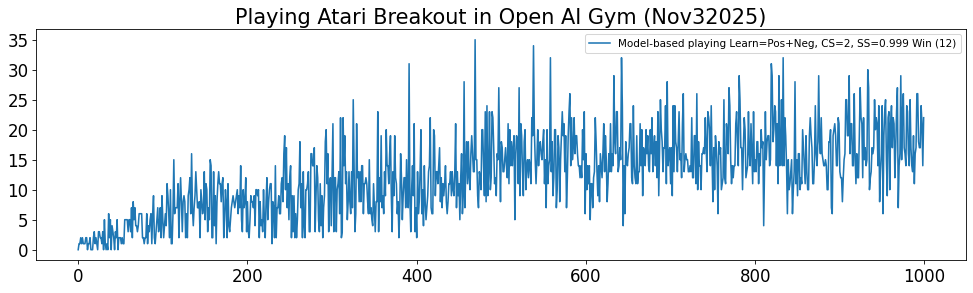

In [17]:
# Win RIGHT: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_SS0999_251117 -cs=2 -ss=0.999 -tu=0
rev="08c01d2292e373fdfa9e38b58a5a1bc8ee149352"; time="2025-11-18 00:49:27.404760"; max_games=1000; max_steps=18000
score_avg=12.5; steps_avg=2618.3; lives_avg=0.1; lapse_avg="0:00:36.759343"; time="8:34:32.244008"
scores = [0, 1.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 0, 1.0, 1.0, 2.0, 0, 0, 0, 2.0, 3.0, 1.0, 2.0, 1.0, 0, 3.0, 3.0, 2.0, 2.0, 1.0, 3.0, 0, 5.0, 1.0, 0, 1.0, 0, 6.0, 2.0, 5.0, 0, 4.0, 3.0, 2.0, 0, 3.0, 2.0, 5.0, 0, 2.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 5.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 3.0, 7.0, 2.0, 8.0, 5.0, 7.0, 4.0, 4.0, 3.0, 4.0, 6.0, 6.0, 6.0, 6.0, 2.0, 2.0, 1.0, 2.0, 2.0, 6.0, 1.0, 4.0, 3.0, 5.0, 6.0, 1.0, 6.0, 9.0, 2.0, 1.0, 3.0, 5.0, 7.0, 3.0, 4.0, 7.0, 2.0, 9.0, 5.0, 2.0, 4.0, 6.0, 4.0, 11.0, 9.0, 6.0, 2.0, 10.0, 1.0, 1.0, 6.0, 15.0, 6.0, 7.0, 7.0, 7.0, 11.0, 2.0, 8.0, 12.0, 8.0, 3.0, 8.0, 9.0, 8.0, 2.0, 6.0, 2.0, 9.0, 10.0, 12.0, 6.0, 16.0, 7.0, 4.0, 7.0, 9.0, 13.0, 10.0, 7.0, 7.0, 8.0, 2.0, 10.0, 8.0, 6.0, 7.0, 13.0, 5.0, 11.0, 10.0, 3.0, 7.0, 5.0, 15.0, 14.0, 2.0, 2.0, 13.0, 4.0, 9.0, 1.0, 8.0, 11.0, 13.0, 11.0, 11.0, 8.0, 11.0, 12.0, 2.0, 5.0, 10.0, 8.0, 2.0, 11.0, 4.0, 3.0, 5.0, 7.0, 8.0, 9.0, 8.0, 7.0, 8.0, 9.0, 10.0, 6.0, 9.0, 7.0, 14.0, 5.0, 3.0, 10.0, 7.0, 8.0, 12.0, 3.0, 8.0, 3.0, 2.0, 5.0, 9.0, 8.0, 8.0, 7.0, 9.0, 4.0, 10.0, 10.0, 9.0, 10.0, 2.0, 8.0, 4.0, 5.0, 3.0, 10.0, 5.0, 2.0, 8.0, 12.0, 5.0, 8.0, 10.0, 11.0, 11.0, 1.0, 8.0, 7.0, 2.0, 14.0, 2.0, 7.0, 7.0, 9.0, 6.0, 6.0, 11.0, 12.0, 8.0, 16.0, 19.0, 10.0, 17.0, 7.0, 11.0, 5.0, 12.0, 14.0, 2.0, 9.0, 3.0, 9.0, 2.0, 6.0, 2.0, 5.0, 10.0, 11.0, 18.0, 7.0, 11.0, 2.0, 13.0, 4.0, 2.0, 10.0, 10.0, 11.0, 13.0, 3.0, 3.0, 16.0, 16.0, 14.0, 14.0, 17.0, 3.0, 9.0, 14.0, 12.0, 5.0, 3.0, 11.0, 4.0, 9.0, 2.0, 7.0, 9.0, 18.0, 20.0, 11.0, 16.0, 3.0, 11.0, 12.0, 4.0, 12.0, 21.0, 3.0, 12.0, 12.0, 3.0, 10.0, 11.0, 13.0, 6.0, 22.0, 2.0, 3.0, 22.0, 14.0, 19.0, 11.0, 13.0, 5.0, 8.0, 13.0, 8.0, 6.0, 13.0, 7.0, 25.0, 14.0, 3.0, 6.0, 21.0, 12.0, 13.0, 8.0, 13.0, 8.0, 14.0, 14.0, 6.0, 11.0, 11.0, 12.0, 11.0, 8.0, 6.0, 15.0, 6.0, 7.0, 5.0, 4.0, 11.0, 7.0, 3.0, 8.0, 8.0, 23.0, 3.0, 12.0, 8.0, 19.0, 7.0, 9.0, 6.0, 13.0, 9.0, 20.0, 14.0, 14.0, 11.0, 16.0, 19.0, 9.0, 3.0, 13.0, 9.0, 19.0, 12.0, 11.0, 6.0, 8.0, 2.0, 7.0, 16.0, 12.0, 5.0, 9.0, 12.0, 12.0, 7.0, 15.0, 8.0, 7.0, 31.0, 8.0, 3.0, 10.0, 14.0, 9.0, 21.0, 3.0, 7.0, 2.0, 13.0, 6.0, 8.0, 13.0, 20.0, 6.0, 10.0, 4.0, 14.0, 8.0, 5.0, 7.0, 9.0, 13.0, 14.0, 22.0, 7.0, 6.0, 6.0, 20.0, 19.0, 9.0, 13.0, 13.0, 11.0, 14.0, 17.0, 8.0, 12.0, 7.0, 11.0, 9.0, 11.0, 14.0, 8.0, 6.0, 8.0, 11.0, 11.0, 13.0, 9.0, 13.0, 10.0, 9.0, 13.0, 21.0, 7.0, 13.0, 9.0, 11.0, 5.0, 12.0, 16.0, 6.0, 9.0, 28.0, 7.0, 14.0, 18.0, 11.0, 18.0, 12.0, 10.0, 16.0, 19.0, 16.0, 13.0, 13.0, 35.0, 15.0, 15.0, 9.0, 7.0, 13.0, 12.0, 10.0, 20.0, 20.0, 14.0, 9.0, 23.0, 8.0, 24.0, 9.0, 13.0, 23.0, 10.0, 12.0, 23.0, 22.0, 17.0, 11.0, 12.0, 9.0, 16.0, 15.0, 27.0, 16.0, 8.0, 18.0, 17.0, 13.0, 13.0, 15.0, 17.0, 14.0, 12.0, 21.0, 11.0, 20.0, 14.0, 18.0, 14.0, 17.0, 19.0, 5.0, 16.0, 19.0, 18.0, 11.0, 27.0, 9.0, 21.0, 19.0, 13.0, 9.0, 18.0, 20.0, 10.0, 14.0, 15.0, 12.0, 15.0, 14.0, 11.0, 22.0, 19.0, 34.0, 20.0, 15.0, 11.0, 15.0, 20.0, 14.0, 17.0, 18.0, 16.0, 15.0, 18.0, 20.0, 11.0, 15.0, 7.0, 20.0, 11.0, 14.0, 15.0, 32.0, 13.0, 18.0, 9.0, 12.0, 20.0, 20.0, 7.0, 10.0, 19.0, 17.0, 8.0, 15.0, 19.0, 23.0, 19.0, 21.0, 13.0, 19.0, 7.0, 12.0, 19.0, 23.0, 26.0, 14.0, 22.0, 15.0, 17.0, 22.0, 16.0, 19.0, 19.0, 16.0, 14.0, 14.0, 12.0, 14.0, 12.0, 20.0, 15.0, 23.0, 6.0, 16.0, 10.0, 14.0, 11.0, 14.0, 5.0, 11.0, 11.0, 7.0, 12.0, 13.0, 22.0, 18.0, 13.0, 9.0, 14.0, 8.0, 16.0, 14.0, 12.0, 16.0, 21.0, 13.0, 19.0, 15.0, 8.0, 11.0, 16.0, 13.0, 21.0, 13.0, 16.0, 14.0, 29.0, 18.0, 16.0, 23.0, 23.0, 13.0, 14.0, 17.0, 15.0, 32.0, 24.0, 4.0, 14.0, 6.0, 18.0, 15.0, 14.0, 16.0, 17.0, 21.0, 21.0, 12.0, 11.0, 24.0, 14.0, 12.0, 11.0, 19.0, 11.0, 13.0, 13.0, 21.0, 14.0, 20.0, 9.0, 17.0, 16.0, 14.0, 20.0, 16.0, 19.0, 14.0, 13.0, 20.0, 16.0, 22.0, 13.0, 17.0, 19.0, 14.0, 18.0, 12.0, 23.0, 9.0, 17.0, 25.0, 20.0, 18.0, 13.0, 17.0, 17.0, 24.0, 11.0, 28.0, 14.0, 16.0, 17.0, 11.0, 17.0, 9.0, 24.0, 13.0, 24.0, 18.0, 17.0, 13.0, 18.0, 23.0, 15.0, 16.0, 12.0, 21.0, 26.0, 13.0, 15.0, 16.0, 15.0, 15.0, 13.0, 13.0, 14.0, 13.0, 22.0, 12.0, 12.0, 19.0, 19.0, 11.0, 26.0, 10.0, 18.0, 14.0, 14.0, 10.0, 16.0, 16.0, 17.0, 16.0, 22.0, 17.0, 13.0, 23.0, 22.0, 20.0, 14.0, 24.0, 15.0, 8.0, 17.0, 10.0, 19.0, 17.0, 14.0, 6.0, 18.0, 16.0, 17.0, 10.0, 11.0, 12.0, 25.0, 12.0, 11.0, 21.0, 19.0, 16.0, 27.0, 24.0, 15.0, 11.0, 14.0, 12.0, 14.0, 14.0, 21.0, 23.0, 18.0, 14.0, 29.0, 25.0, 17.0, 17.0, 10.0, 17.0, 22.0, 20.0, 12.0, 13.0, 14.0, 23.0, 16.0, 14.0, 21.0, 16.0, 11.0, 23.0, 13.0, 15.0, 13.0, 18.0, 18.0, 11.0, 16.0, 14.0, 20.0, 17.0, 18.0, 4.0, 14.0, 23.0, 15.0, 18.0, 19.0, 19.0, 14.0, 15.0, 31.0, 29.0, 18.0, 20.0, 24.0, 23.0, 14.0, 21.0, 11.0, 29.0, 14.0, 16.0, 25.0, 14.0, 32.0, 14.0, 22.0, 19.0, 14.0, 6.0, 15.0, 10.0, 11.0, 13.0, 15.0, 6.0, 10.0, 13.0, 28.0, 11.0, 15.0, 9.0, 16.0, 16.0, 10.0, 12.0, 11.0, 20.0, 17.0, 14.0, 11.0, 19.0, 13.0, 10.0, 10.0, 19.0, 22.0, 19.0, 17.0, 11.0, 11.0, 15.0, 24.0, 16.0, 14.0, 18.0, 29.0, 18.0, 16.0, 22.0, 16.0, 15.0, 14.0, 14.0, 15.0, 14.0, 10.0, 10.0, 18.0, 18.0, 20.0, 7.0, 6.0, 19.0, 20.0, 21.0, 19.0, 14.0, 14.0, 22.0, 21.0, 13.0, 12.0, 12.0, 8.0, 12.0, 15.0, 16.0, 25.0, 25.0, 19.0, 19.0, 29.0, 16.0, 21.0, 21.0, 14.0, 14.0, 26.0, 16.0, 11.0, 16.0, 12.0, 12.0, 19.0, 27.0, 22.0, 21.0, 12.0, 22.0, 15.0, 17.0, 14.0, 15.0, 30.0, 27.0, 10.0, 12.0, 13.0, 17.0, 16.0, 17.0, 25.0, 20.0, 22.0, 21.0, 14.0, 24.0, 8.0, 13.0, 16.0, 24.0, 6.0, 19.0, 23.0, 25.0, 15.0, 9.0, 22.0, 23.0, 10.0, 21.0, 24.0, 17.0, 22.0, 21.0, 12.0, 17.0, 23.0, 27.0, 7.0, 14.0, 16.0, 29.0, 15.0, 23.0, 26.0, 17.0, 16.0, 14.0, 24.0, 23.0, 16.0, 14.0, 25.0, 17.0, 14.0, 13.0, 19.0, 11.0, 16.0, 17.0, 26.0, 26.0, 18.0, 17.0, 17.0, 24.0, 21.0, 14.0, 22.0]
stepss = [497, 615, 687, 788, 687, 804, 685, 605, 686, 875, 877, 492, 699, 609, 716, 503, 504, 510, 878, 1005, 610, 882, 613, 498, 989, 922, 886, 796, 676, 840, 488, 1247, 689, 506, 681, 495, 1323, 874, 1235, 495, 1179, 1094, 867, 492, 990, 875, 1205, 491, 802, 797, 808, 607, 797, 688, 685, 1143, 1140, 1237, 1207, 1065, 1199, 1203, 18000, 1687, 875, 1562, 1230, 1396, 1007, 1203, 992, 1129, 1323, 1315, 1409, 1250, 18000, 725, 683, 792, 736, 1339, 605, 1186, 1003, 1453, 1410, 682, 1242, 1827, 799, 606, 836, 1304, 1516, 919, 1050, 1426, 730, 1773, 18000, 720, 1106, 1255, 1116, 1734, 1858, 1255, 725, 2032, 604, 602, 18000, 2574, 1237, 1418, 1382, 1415, 1974, 723, 1472, 2087, 1598, 911, 1607, 1667, 1530, 795, 18000, 727, 1571, 1760, 1838, 1224, 2714, 1345, 1035, 1341, 1651, 2191, 1843, 1418, 1351, 18000, 721, 1810, 1535, 1342, 1616, 2186, 1307, 1943, 1833, 995, 1323, 1310, 2353, 2330, 789, 876, 1718, 1030, 1557, 607, 1507, 1946, 2041, 2025, 2023, 1440, 1905, 2083, 719, 1344, 2135, 1439, 812, 2372, 18000, 923, 1237, 1612, 1783, 1625, 18000, 1325, 1604, 1805, 18000, 1442, 1596, 1666, 2103, 1236, 923, 1742, 1321, 1515, 18000, 836, 1713, 921, 18000, 1244, 1557, 1665, 1820, 1342, 1882, 18000, 2056, 2044, 1596, 2171, 18000, 1440, 1036, 1230, 923, 2003, 1229, 18000, 1823, 2230, 1249, 1727, 2094, 2120, 1927, 607, 1772, 1633, 18000, 2186, 807, 1626, 1576, 1916, 1346, 1424, 2082, 2221, 1706, 2342, 2605, 1877, 3008, 18000, 2009, 1343, 2334, 2302, 18000, 1796, 923, 1846, 717, 1392, 18000, 1230, 2023, 2032, 3006, 1512, 2238, 713, 2290, 1114, 18000, 2039, 1918, 2051, 2262, 917, 917, 2238, 2493, 2598, 2035, 2537, 921, 1825, 2342, 2310, 1242, 917, 1762, 1043, 1909, 18000, 1657, 1761, 2946, 3042, 2099, 2211, 917, 2074, 2386, 1108, 1788, 2264, 917, 2281, 2206, 917, 1804, 1686, 2265, 1486, 3266, 805, 917, 3662, 2472, 2792, 2004, 2305, 1344, 1791, 2383, 1852, 1349, 2390, 1509, 3234, 2209, 920, 1430, 3091, 1828, 2392, 1794, 2395, 1786, 2477, 2691, 1431, 1772, 1886, 2144, 1768, 1847, 1390, 2706, 1479, 1592, 1310, 1117, 2164, 1624, 920, 1768, 1701, 2914, 917, 2265, 1764, 2953, 1481, 1818, 1459, 2380, 1786, 3182, 2630, 2598, 2181, 2893, 3057, 1819, 927, 2500, 1793, 3110, 2260, 2082, 1390, 1694, 18000, 1668, 2878, 1782, 1160, 2022, 2312, 2330, 18000, 2675, 1699, 1537, 4270, 1760, 917, 2017, 2066, 1838, 3029, 917, 18000, 18000, 1936, 1423, 1688, 2153, 3539, 1358, 2036, 1046, 2588, 1622, 18000, 1403, 1957, 2153, 2192, 3203, 1474, 1500, 1285, 2776, 2602, 1781, 2270, 2125, 2181, 2578, 2533, 1760, 2252, 1605, 2080, 1840, 2100, 1913, 1544, 1346, 1608, 18000, 2100, 2296, 1844, 2443, 1977, 1708, 2414, 3071, 1520, 2142, 1768, 2100, 1313, 1653, 2302, 1342, 1713, 3661, 1596, 1913, 2473, 1489, 2740, 2147, 1998, 2598, 2850, 2666, 2362, 2362, 3765, 2653, 2145, 1704, 18000, 2346, 2056, 2036, 3020, 2424, 2237, 1831, 2502, 1654, 3356, 1910, 2472, 3279, 2049, 2057, 2703, 3408, 2489, 1958, 2005, 1774, 2806, 2585, 3181, 2480, 1589, 2509, 2240, 2331, 2235, 2204, 2441, 2070, 2210, 3207, 18000, 2968, 2601, 2914, 2474, 2524, 2844, 1314, 2368, 3086, 2114, 1970, 3254, 1753, 2959, 2923, 2325, 1818, 2606, 3251, 1902, 2443, 2757, 1824, 2594, 1909, 1928, 3240, 2794, 3185, 3124, 2510, 2100, 2608, 2769, 1909, 2878, 2932, 2881, 2799, 2490, 3549, 2236, 2189, 1610, 2934, 2281, 1913, 2665, 3327, 2180, 2952, 1841, 1852, 2845, 2945, 1533, 2026, 2824, 2495, 1807, 2566, 2302, 3964, 2306, 3071, 2320, 2846, 1456, 2301, 2866, 2772, 3215, 2457, 3078, 2560, 2774, 3219, 2488, 3019, 3128, 2740, 1913, 2450, 1757, 1913, 2287, 2826, 2665, 3034, 1326, 2813, 1965, 2454, 2194, 2617, 1137, 2104, 1985, 1536, 2160, 2378, 3251, 3018, 2586, 1829, 2619, 1644, 2840, 1909, 2310, 2644, 3127, 2271, 2931, 2645, 1648, 2141, 2282, 1856, 2978, 2143, 2603, 2417, 3379, 2799, 2842, 2908, 2711, 2306, 2506, 3012, 2736, 3554, 2922, 1023, 2442, 1263, 2955, 2636, 1916, 2275, 2559, 2966, 3290, 2162, 2121, 3003, 1909, 2113, 2246, 3055, 2266, 2414, 2442, 2884, 2508, 2818, 1780, 2569, 2817, 1908, 2795, 2223, 2823, 2390, 2484, 2989, 2227, 3144, 2437, 2427, 2731, 1911, 2601, 2193, 2708, 1786, 2675, 3290, 3151, 2687, 2365, 2914, 2879, 3262, 2215, 3679, 1975, 2363, 2859, 2100, 2986, 1780, 3117, 2014, 3119, 2291, 2569, 2652, 2633, 2708, 2559, 2716, 2340, 2960, 3244, 1817, 2601, 2644, 2672, 2665, 1771, 1936, 2452, 2211, 3174, 2076, 2137, 2706, 2564, 1952, 3334, 1773, 2799, 1985, 2589, 1854, 2644, 2249, 2867, 2367, 3010, 2496, 2346, 3247, 3318, 2367, 2545, 3349, 2628, 1609, 2949, 1849, 2507, 2655, 2387, 1269, 3076, 2312, 2914, 1786, 2196, 2288, 3555, 1824, 1954, 3172, 2459, 2770, 3248, 3367, 2646, 2127, 2397, 2306, 2128, 2399, 3042, 3164, 2888, 1909, 3153, 3491, 2434, 2893, 18000, 2448, 3513, 2958, 2329, 1817, 1908, 3150, 2442, 2516, 2870, 1788, 1965, 2987, 1777, 2422, 2308, 2502, 2580, 2087, 2624, 1908, 2508, 2287, 3015, 18000, 1909, 2732, 2688, 3163, 2735, 2712, 1909, 2633, 3564, 3609, 2742, 2975, 3378, 3079, 2320, 2422, 2042, 3085, 1909, 2716, 3091, 1908, 3811, 1913, 2511, 2215, 2570, 1269, 2731, 1768, 2149, 2369, 2621, 1268, 2053, 2420, 3307, 2331, 1773, 1863, 2477, 2330, 1773, 2290, 1985, 2809, 2546, 2149, 1901, 2703, 2176, 1942, 18000, 3067, 3534, 2757, 3002, 2040, 2064, 2133, 2931, 2768, 2601, 2649, 3098, 2291, 2251, 2954, 2644, 2714, 1908, 2474, 2594, 2437, 1860, 1996, 2768, 2557, 2862, 1525, 1269, 3148, 2895, 2637, 2644, 2617, 2363, 2739, 3104, 18000, 2140, 2334, 1722, 2258, 2128, 2872, 2824, 2995, 2695, 2956, 3407, 2342, 2986, 2495, 1908, 1909, 3144, 2677, 1963, 2756, 2056, 2146, 2751, 3240, 2742, 2798, 2172, 3517, 2371, 2582, 1913, 2244, 3403, 3854, 1854, 1992, 2519, 1978, 2397, 2493, 3282, 2377, 3200, 3052, 2228, 3295, 1609, 2473, 2744, 3322, 1269, 2753, 3380, 2996, 2180, 1810, 2915, 2869, 1964, 3095, 3453, 2949, 3118, 2759, 2158, 2463, 2873, 3409, 1456, 1912, 2823, 3820, 2760, 3293, 3480, 2366, 2249, 2566, 3045, 3372, 2644, 2602, 3087, 2887, 2058, 2333, 2752, 1954, 2251, 2242, 3365, 3149, 2457, 2391, 2602, 3377, 3036, 1916, 3272]
livess = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses = [0, 0, 1, 1, 1, 2, 2, 1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 4, 6, 5, 7, 5, 4, 8, 7, 6, 5, 5, 6, 6, 10, 8, 6, 7, 5, 8, 7, 13, 7, 18, 21, 9, 5, 10, 9, 9, 9, 19, 13, 13, 11, 9, 10, 9, 12, 11, 11, 15, 12, 11, 9, 13, 32, 19, 27, 23, 25, 11, 21, 15, 25, 14, 20, 21, 16, 9, 15, 11, 13, 10, 16, 18, 18, 19, 31, 16, 18, 14, 21, 18, 10, 17, 17, 18, 20, 17, 47, 13, 25, 17, 19, 15, 14, 12, 21, 50, 15, 16, 21, 16, 14, 13, 29, 8, 19, 17, 22, 23, 5, 13, 10, 26, 24, 17, 11, 22, 4, 11, 8, 22, 24, 27, 8, 39, 14, 23, 12, 21, 68, 33, 19, 17, 33, 18, 30, 33, 30, 28, 24, 36, 17, 34, 11, 13, 16, 45, 35, 18, 18, 18, 10, 22, 11, 9, 20, 24, 56, 24, 26, 14, 26, 5, 36, 44, 13, 14, 40, 25, 3, 21, 54, 21, 28, 27, 21, 32, 38, 25, 26, 16, 65, 46, 28, 14, 17, 34, 20, 23, 10, 35, 18, 10, 22, 18, 32, 54, 27, 19, 31, 50, 39, 14, 38, 11, 21, 16, 11, 15, 32, 22, 8, 57, 30, 41, 56, 49, 42, 32, 7, 31, 25, 15, 29, 14, 15, 16, 57, 21, 45, 13, 41, 44, 43, 26, 37, 52, 25, 23, 24, 151, 36, 5, 19, 14, 35, 12, 37, 8, 20, 41, 35, 41, 14, 52, 7, 23, 16, 5, 61, 27, 23, 37, 8, 16, 35, 32, 37, 42, 44, 34, 39, 44, 57, 34, 14, 42, 29, 36, 13, 46, 45, 81, 35, 30, 33, 15, 11, 49, 40, 33, 45, 14, 61, 22, 32, 14, 28, 27, 29, 57, 14, 4, 97, 61, 43, 18, 36, 22, 33, 23, 58, 32, 37, 39, 59, 61, 38, 22, 25, 29, 43, 24, 33, 35, 43, 38, 38, 16, 39, 39, 16, 21, 40, 49, 28, 22, 38, 35, 21, 26, 30, 68, 18, 43, 12, 47, 21, 56, 22, 41, 25, 63, 25, 70, 62, 132, 32, 71, 50, 45, 22, 55, 22, 81, 41, 36, 17, 25, 16, 19, 60, 41, 10, 20, 31, 33, 45, 45, 32, 37, 100, 3, 4, 58, 49, 28, 41, 3, 33, 5, 29, 33, 40, 18, 59, 62, 34, 22, 41, 33, 6, 15, 36, 18, 62, 78, 40, 44, 5, 28, 37, 13, 31, 25, 31, 50, 58, 9, 22, 47, 32, 21, 17, 9, 20, 19, 26, 30, 12, 53, 49, 39, 43, 32, 46, 56, 16, 76, 48, 10, 58, 18, 61, 31, 54, 56, 14, 20, 23, 11, 40, 27, 45, 80, 40, 36, 26, 25, 79, 26, 30, 27, 23, 68, 17, 26, 64, 59, 37, 24, 35, 28, 116, 34, 31, 82, 17, 5, 52, 67, 37, 30, 76, 26, 33, 46, 38, 66, 22, 45, 56, 35, 16, 21, 48, 50, 29, 64, 37, 82, 69, 25, 49, 77, 59, 45, 43, 37, 23, 26, 46, 15, 44, 20, 29, 49, 48, 76, 23, 24, 23, 15, 33, 14, 10, 106, 49, 52, 63, 20, 11, 52, 33, 6, 78, 53, 121, 66, 29, 56, 47, 26, 36, 41, 27, 11, 27, 64, 18, 36, 34, 39, 58, 31, 39, 34, 24, 17, 21, 15, 29, 18, 19, 54, 40, 44, 23, 18, 45, 26, 64, 55, 65, 37, 40, 25, 54, 49, 39, 12, 32, 15, 14, 10, 24, 62, 8, 73, 43, 27, 24, 24, 26, 36, 20, 37, 22, 40, 24, 17, 59, 43, 45, 23, 47, 19, 63, 8, 32, 39, 60, 50, 8, 13, 53, 37, 28, 27, 38, 36, 53, 22, 72, 13, 24, 29, 20, 32, 98, 52, 49, 55, 73, 34, 42, 21, 18, 28, 15, 23, 27, 71, 66, 20, 36, 71, 15, 15, 12, 40, 28, 39, 39, 16, 51, 51, 35, 54, 68, 11, 48, 29, 52, 15, 55, 57, 16, 50, 22, 17, 43, 17, 29, 32, 13, 21, 29, 52, 92, 27, 44, 38, 19, 39, 34, 79, 34, 27, 27, 34, 34, 15, 84, 34, 81, 36, 29, 29, 29, 11, 6, 32, 36, 53, 56, 32, 19, 22, 43, 28, 33, 16, 25, 10, 37, 17, 40, 21, 14, 35, 65, 12, 23, 17, 22, 30, 26, 43, 15, 51, 24, 79, 45, 29, 38, 33, 34, 43, 36, 23, 26, 4, 24, 22, 48, 12, 65, 33, 30, 32, 19, 33, 30, 13, 21, 87, 25, 45, 56, 19, 44, 17, 31, 29, 63, 29, 59, 44, 58, 21, 61, 21, 29, 33, 55, 46, 35, 35, 30, 19, 14, 16, 43, 30, 45, 18, 13, 44, 12, 28, 12, 19, 28, 16, 31, 12, 45, 20, 52, 9, 4, 29, 64, 42, 32, 17, 9, 14, 56, 65, 49, 19, 47, 26, 41, 23, 26, 50, 12, 12, 10, 14, 95, 17, 21, 10, 33, 15, 63, 18, 16, 16, 40, 18, 50, 18, 33, 123, 20, 18, 51, 38, 7, 10, 14, 18, 50, 28, 12, 45, 19, 44, 14, 40, 48, 47, 62, 30, 31, 40, 19, 22, 29, 17, 38, 44, 75, 36, 15, 44, 29, 60, 29, 22, 6, 14, 38, 32, 18, 14, 8, 31, 16, 14, 37, 22, 24, 41, 25, 27, 10, 47, 45, 16, 30, 44, 35, 101, 37, 8, 64, 25, 34, 54, 13, 8, 26, 24, 33, 39, 18, 15, 29, 16, 46, 27, 31, 18, 35, 51, 14, 13, 80, 34, 6, 11, 27, 39, 31, 13, 28, 25, 26, 35, 44, 12, 30, 19, 45, 51, 22, 25, 51, 29, 26, 39, 8, 37, 43, 36, 33, 32, 25, 14, 27, 22, 39, 60, 36, 23, 47, 26, 25, 32, 36, 21, 51, 24, 27, 28, 28, 20, 10, 25, 21, 57, 33, 23, 11, 24, 23, 32, 45, 49, 36, 61, 33, 15, 37]
states = [331, 794, 1268, 1753, 2102, 2523, 2821, 3120, 3320, 3715, 3950, 4144, 4392, 4600, 4726, 4919, 5113, 5262, 5459, 5762, 5982, 6288, 6534, 6691, 7090, 7380, 7586, 7744, 7915, 8067, 8224, 8463, 8622, 8772, 8900, 9023, 9180, 9279, 9544, 9642, 9977, 10288, 10438, 10475, 10594, 10716, 10814, 10902, 11133, 11272, 11392, 11492, 11571, 11670, 11754, 11867, 11982, 12048, 12167, 12265, 12319, 12388, 12450, 12683, 12807, 13009, 13152, 13304, 13370, 13488, 13585, 13687, 13736, 13844, 13934, 13987, 14022, 14102, 14137, 14184, 14211, 14306, 14342, 14394, 14459, 14607, 14670, 14717, 14773, 14844, 14898, 14918, 14963, 15000, 15068, 15115, 15168, 15317, 15364, 15447, 15502, 15543, 15590, 15610, 15639, 15674, 15844, 15893, 15923, 15969, 16004, 16024, 16047, 16089, 16115, 16152, 16172, 16195, 16228, 16234, 16271, 16295, 16339, 16391, 16415, 16443, 16479, 16493, 16502, 16510, 16534, 16583, 16616, 16624, 16701, 16730, 16763, 16798, 16836, 16937, 16985, 17025, 17056, 17107, 17128, 17154, 17236, 17269, 17299, 17331, 17392, 17410, 17430, 17456, 17472, 17481, 17530, 17576, 17621, 17633, 17653, 17656, 17676, 17698, 17706, 17724, 17748, 17839, 17860, 17883, 17904, 17925, 17928, 17955, 18016, 18048, 18051, 18092, 18114, 18116, 18144, 18198, 18216, 18240, 18267, 18283, 18311, 18332, 18364, 18375, 18381, 18440, 18476, 18500, 18518, 18529, 18552, 18564, 18580, 18586, 18611, 18614, 18625, 18634, 18642, 18670, 18730, 18748, 18763, 18779, 18827, 18874, 18894, 18912, 18920, 18942, 18949, 18970, 18986, 19014, 19029, 19035, 19094, 19109, 19144, 19194, 19216, 19243, 19269, 19284, 19297, 19320, 19325, 19340, 19351, 19356, 19362, 19409, 19432, 19458, 19477, 19494, 19516, 19541, 19553, 19579, 19602, 19611, 19627, 19634, 19710, 19739, 19741, 19753, 19761, 19769, 19784, 19803, 19805, 19807, 19819, 19842, 19857, 19870, 19895, 19900, 19910, 19919, 19921, 19947, 19968, 19988, 19996, 20005, 20009, 20018, 20025, 20041, 20055, 20073, 20095, 20110, 20131, 20141, 20159, 20170, 20183, 20190, 20204, 20212, 20230, 20252, 20290, 20303, 20314, 20325, 20328, 20332, 20344, 20353, 20376, 20388, 20396, 20420, 20436, 20445, 20453, 20459, 20467, 20473, 20499, 20504, 20504, 20535, 20550, 20564, 20569, 20574, 20582, 20593, 20599, 20611, 20619, 20630, 20645, 20668, 20703, 20712, 20727, 20739, 20746, 20774, 20777, 20785, 20797, 20809, 20818, 20828, 20834, 20849, 20858, 20863, 20869, 20885, 20899, 20904, 20909, 20919, 20937, 20941, 20945, 20950, 20965, 20976, 20996, 21000, 21008, 21012, 21022, 21030, 21035, 21045, 21072, 21084, 21098, 21109, 21147, 21157, 21189, 21204, 21223, 21226, 21232, 21236, 21254, 21265, 21271, 21275, 21277, 21279, 21282, 21314, 21317, 21320, 21323, 21324, 21332, 21352, 21362, 21366, 21382, 21412, 21416, 21416, 21425, 21443, 21449, 21459, 21460, 21466, 21466, 21471, 21478, 21483, 21490, 21500, 21514, 21519, 21527, 21536, 21546, 21547, 21547, 21556, 21559, 21578, 21603, 21618, 21623, 21625, 21631, 21634, 21642, 21647, 21649, 21658, 21667, 21675, 21677, 21679, 21688, 21693, 21694, 21696, 21700, 21704, 21708, 21715, 21721, 21724, 21736, 21754, 21761, 21768, 21779, 21787, 21795, 21799, 21827, 21838, 21838, 21850, 21857, 21864, 21868, 21875, 21887, 21894, 21899, 21902, 21903, 21908, 21912, 21916, 21939, 21944, 21945, 21947, 21960, 21968, 21973, 21976, 21983, 21983, 21994, 21999, 22006, 22023, 22031, 22034, 22035, 22041, 22047, 22061, 22068, 22074, 22100, 22107, 22109, 22123, 22142, 22147, 22153, 22166, 22173, 22176, 22183, 22184, 22186, 22189, 22197, 22200, 22206, 22213, 22216, 22220, 22226, 22232, 22241, 22245, 22260, 22268, 22273, 22278, 22293, 22297, 22302, 22309, 22314, 22317, 22319, 22321, 22323, 22330, 22335, 22341, 22345, 22354, 22364, 22367, 22374, 22377, 22378, 22382, 22384, 22384, 22403, 22421, 22431, 22442, 22451, 22452, 22461, 22461, 22466, 22473, 22479, 22494, 22501, 22504, 22514, 22517, 22522, 22533, 22541, 22545, 22548, 22549, 22567, 22570, 22577, 22586, 22594, 22600, 22612, 22616, 22618, 22621, 22623, 22625, 22628, 22635, 22640, 22648, 22654, 22659, 22664, 22665, 22674, 22678, 22682, 22694, 22709, 22717, 22723, 22728, 22732, 22745, 22753, 22760, 22762, 22765, 22767, 22767, 22769, 22772, 22778, 22780, 22789, 22792, 22801, 22805, 22807, 22810, 22811, 22814, 22820, 22821, 22824, 22824, 22827, 22833, 22844, 22848, 22853, 22860, 22863, 22868, 22869, 22873, 22879, 22884, 22895, 22896, 22896, 22902, 22906, 22907, 22908, 22910, 22915, 22921, 22925, 22927, 22930, 22934, 22936, 22939, 22942, 22959, 22963, 22966, 22969, 22979, 22980, 22983, 22986, 22987, 22995, 22995, 22996, 22998, 23004, 23013, 23014, 23019, 23022, 23030, 23032, 23037, 23041, 23046, 23049, 23052, 23055, 23058, 23061, 23064, 23072, 23078, 23083, 23091, 23095, 23097, 23099, 23105, 23111, 23117, 23122, 23129, 23132, 23135, 23136, 23136, 23137, 23139, 23142, 23143, 23153, 23159, 23165, 23169, 23176, 23177, 23182, 23184, 23190, 23193, 23194, 23195, 23200, 23202, 23204, 23210, 23217, 23226, 23227, 23230, 23234, 23239, 23240, 23241, 23243, 23246, 23250, 23261, 23266, 23271, 23271, 23275, 23280, 23284, 23286, 23286, 23289, 23296, 23298, 23302, 23303, 23304, 23307, 23313, 23316, 23317, 23320, 23322, 23324, 23329, 23334, 23336, 23341, 23342, 23348, 23348, 23352, 23354, 23356, 23360, 23363, 23370, 23372, 23374, 23374, 23376, 23376, 23378, 23380, 23385, 23389, 23393, 23398, 23402, 23403, 23407, 23412, 23412, 23424, 23427, 23430, 23433, 23437, 23439, 23439, 23440, 23441, 23452, 23452, 23460, 23470, 23475, 23476, 23483, 23488, 23491, 23495, 23501, 23504, 23510, 23515, 23518, 23518, 23519, 23520, 23523, 23527, 23528, 23528, 23529, 23531, 23532, 23533, 23535, 23537, 23538, 23538, 23539, 23544, 23547, 23549, 23555, 23556, 23556, 23558, 23563, 23566, 23571, 23571, 23571, 23572, 23577, 23583, 23586, 23586, 23593, 23596, 23598, 23600, 23602, 23606, 23606, 23612, 23612, 23612, 23618, 23620, 23621, 23623, 23626, 23626, 23630, 23632, 23635, 23637, 23641, 23641, 23643, 23644, 23646, 23659, 23662, 23664, 23669, 23669, 23671, 23671, 23672, 23672, 23675, 23680, 23681, 23684, 23686, 23686, 23687, 23690, 23692, 23693, 23695, 23697, 23700, 23704, 23706, 23708, 23709, 23709, 23712, 23718, 23720, 23725, 23728, 23729, 23729, 23733, 23736, 23738, 23738, 23738, 23743, 23746, 23750, 23752, 23752, 23754, 23757, 23760, 23762, 23764, 23765, 23766, 23769, 23772, 23772, 23778, 23786, 23788, 23792, 23794, 23799, 23805, 23809, 23810, 23820, 23823, 23828, 23833, 23833, 23833, 23833, 23834, 23838, 23840, 23841, 23843, 23848, 23850, 23851, 23855, 23858, 23858, 23861, 23870, 23871, 23873, 23879, 23886, 23886, 23887, 23889, 23894, 23898, 23899, 23901, 23902, 23904, 23907, 23912, 23914, 23918, 23920, 23922, 23930, 23931, 23933, 23935, 23939, 23940, 23943, 23943, 23947, 23952, 23953, 23955, 23960, 23964, 23967, 23967, 23973, 23974, 23977, 23979, 23981, 23984, 23984, 23987, 23991, 23992, 23993, 23994, 23999, 24000, 24003, 24005, 24007, 24009, 24009, 24013, 24016, 24016, 24017, 24017, 24017, 24018, 24018, 24020, 24023, 24026, 24028, 24031, 24032, 24034]

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, SS=0.999 Win ({round(np.mean(scores))})': pd.Series(scores)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()



## Closed, see "gym_atari_breakout_experiential3.ipynb"